# Assignment 4

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTIONS 1 : Preps

### Flat Image : reference as "flat"

(np.float64(-0.5), np.float64(299.5), np.float64(299.5), np.float64(-0.5))

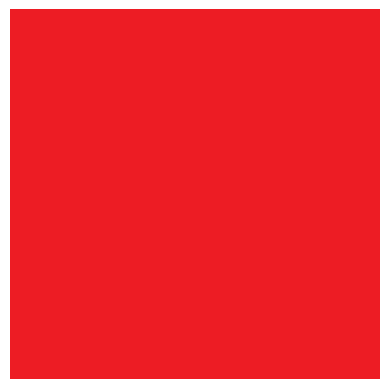

In [27]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image_f = """
iVBORw0KGgoAAAANSUhEUgAAASwAAAEsCAIAAAD2HxkiAAAACXBIWXMAAA7EAAAOxAGVKw4bAAAEvGlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSfvu78nIGlkPSdXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQnPz4KPHg6eG1wbWV0YSB4bWxuczp4PSdhZG9iZTpuczptZXRhLyc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpBdHRyaWI9J2h0dHA6Ly9ucy5hdHRyaWJ1dGlvbi5jb20vYWRzLzEuMC8nPgogIDxBdHRyaWI6QWRzPgogICA8cmRmOlNlcT4KICAgIDxyZGY6bGkgcmRmOnBhcnNlVHlwZT0nUmVzb3VyY2UnPgogICAgIDxBdHRyaWI6Q3JlYXRlZD4yMDI1LTEyLTExPC9BdHRyaWI6Q3JlYXRlZD4KICAgICA8QXR0cmliOkV4dElkPjdlMWY0Yjk3LTQwOGUtNDg3OS1iODkyLWEzOGZjZWJmY2Q3MTwvQXR0cmliOkV4dElkPgogICAgIDxBdHRyaWI6RmJJZD41MjUyNjU5MTQxNzk1ODA8L0F0dHJpYjpGYklkPgogICAgIDxBdHRyaWI6VG91Y2hUeXBlPjI8L0F0dHJpYjpUb3VjaFR5cGU+CiAgICA8L3JkZjpsaT4KICAgPC9yZGY6U2VxPgogIDwvQXR0cmliOkFkcz4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6ZGM9J2h0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvJz4KICA8ZGM6dGl0bGU+CiAgIDxyZGY6QWx0PgogICAgPHJkZjpsaSB4bWw6bGFuZz0neC1kZWZhdWx0Jz5VbnRpdGxlZCBkZXNpZ24gLSAxPC9yZGY6bGk+CiAgIDwvcmRmOkFsdD4KICA8L2RjOnRpdGxlPgogPC9yZGY6RGVzY3JpcHRpb24+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpwZGY9J2h0dHA6Ly9ucy5hZG9iZS5jb20vcGRmLzEuMy8nPgogIDxwZGY6QXV0aG9yPmtyaXNoamFpbjIzMjE8L3BkZjpBdXRob3I+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcD0naHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyc+CiAgPHhtcDpDcmVhdG9yVG9vbD5DYW52YSAoUmVuZGVyZXIpIGRvYz1EQUc2aDZOaWJFOCB1c2VyPVVBRnlwb09iWGlJIGJyYW5kPUJBRnlwbXlrMFQ0IHRlbXBsYXRlPTwveG1wOkNyZWF0b3JUb29sPgogPC9yZGY6RGVzY3JpcHRpb24+CjwvcmRmOlJERj4KPC94OnhtcG1ldGE+Cjw/eHBhY2tldCBlbmQ9J3InPz6k2MPRAAADWUlEQVR4nO3TIQEAIADAMCAHkv7N6ECMC7YEN593nwF0Vh0AvzMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCLEHe0QDhbL+L+0AAAAASUVORK5CYII=

"""

img_data_f = base64.b64decode(base64_image_f)
flat = np.array(Image.open(io.BytesIO(img_data_f)))

plt.imshow(flat)
plt.axis("off")

### Edge Image : reference as "edge"

(np.float64(-0.5), np.float64(299.5), np.float64(299.5), np.float64(-0.5))

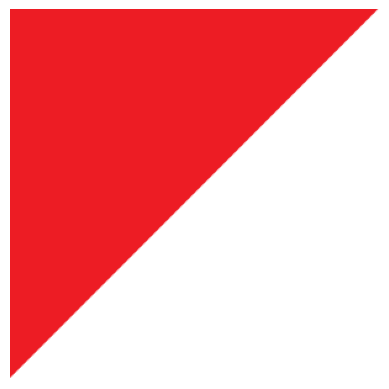

In [28]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image_e = """
iVBORw0KGgoAAAANSUhEUgAAASwAAAEsCAIAAAD2HxkiAAAACXBIWXMAAA7EAAAOxAGVKw4bAAAEvGlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSfvu78nIGlkPSdXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQnPz4KPHg6eG1wbWV0YSB4bWxuczp4PSdhZG9iZTpuczptZXRhLyc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpBdHRyaWI9J2h0dHA6Ly9ucy5hdHRyaWJ1dGlvbi5jb20vYWRzLzEuMC8nPgogIDxBdHRyaWI6QWRzPgogICA8cmRmOlNlcT4KICAgIDxyZGY6bGkgcmRmOnBhcnNlVHlwZT0nUmVzb3VyY2UnPgogICAgIDxBdHRyaWI6Q3JlYXRlZD4yMDI1LTEyLTExPC9BdHRyaWI6Q3JlYXRlZD4KICAgICA8QXR0cmliOkV4dElkPjc3YmYzYTY2LTc4N2YtNDY5MS1iYzVmLTM0ZmUzMTgzOWYwMDwvQXR0cmliOkV4dElkPgogICAgIDxBdHRyaWI6RmJJZD41MjUyNjU5MTQxNzk1ODA8L0F0dHJpYjpGYklkPgogICAgIDxBdHRyaWI6VG91Y2hUeXBlPjI8L0F0dHJpYjpUb3VjaFR5cGU+CiAgICA8L3JkZjpsaT4KICAgPC9yZGY6U2VxPgogIDwvQXR0cmliOkFkcz4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6ZGM9J2h0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvJz4KICA8ZGM6dGl0bGU+CiAgIDxyZGY6QWx0PgogICAgPHJkZjpsaSB4bWw6bGFuZz0neC1kZWZhdWx0Jz5VbnRpdGxlZCBkZXNpZ24gLSAxPC9yZGY6bGk+CiAgIDwvcmRmOkFsdD4KICA8L2RjOnRpdGxlPgogPC9yZGY6RGVzY3JpcHRpb24+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpwZGY9J2h0dHA6Ly9ucy5hZG9iZS5jb20vcGRmLzEuMy8nPgogIDxwZGY6QXV0aG9yPmtyaXNoamFpbjIzMjE8L3BkZjpBdXRob3I+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcD0naHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyc+CiAgPHhtcDpDcmVhdG9yVG9vbD5DYW52YSAoUmVuZGVyZXIpIGRvYz1EQUc2aDZOaWJFOCB1c2VyPVVBRnlwb09iWGlJIGJyYW5kPUJBRnlwbXlrMFQ0IHRlbXBsYXRlPTwveG1wOkNyZWF0b3JUb29sPgogPC9yZGY6RGVzY3JpcHRpb24+CjwvcmRmOlJERj4KPC94OnhtcG1ldGE+Cjw/eHBhY2tldCBlbmQ9J3InPz4ajv+YAAAJ4klEQVR4nO3T7Y9U5RnH8euc2d2ZObNnRHyARQG1amzStMbaWq2JMTFtjUZrGxqUivIsaJVWEAShQqUSjBUtkkgLWnZpu8vf1r+Bvphledp5OGfu+77uh+/n5WTOff3efLP/3fugAHAuv/++7sJcvnpVrr0ESNFSgSJChIBr1xcoRAg4lq9f152fXSpQiBBwKV+/rnv5Uj6z+oYftdYAqVm2QCFCwI1+BQoRAg4MKFCIELBtcIFChIBVQwsUIgTsydet7c7PDi5QiBCwJF+3trswl9+zZvg/HawBUjN6gUKEgHGVChQiBMyqWqAQIWBQjQKFCAFT8nvvqVGgECFgRL5mppyfrVGgECEwvnzNTHn5UmPd2pqfm10DpGbMAoUIgXGMX6AQIVCbkQKFCIF6TBUoRAjUYLBAIUKgqnxmdTk/a6pAIUKgknxmdbkw17hvvck3Db4FxM1GgUKEwIgsFShECIzCXoFChMBQVgsUIgQGs12gECEwQLbq7vK/F60WKEQI9JOturu7MNd44H7bh4gQWIazAoUIgVu5LFCIELiJ4wKFCIHruS9QiBBYolKgECHQk911V3d+1n2BQoSA9Aq8PNf43gMq14kQqdMtUIgQiVMvUIgQKfOhQCFCJMuTAoUIkSZ/ChQiRIKyO+/ozl/0pEAhQqQmu/OO7sJc46EHtYdcQ4RIiIcFChEiHX4WKESIRHhboBAhUuBzgUKEiJ7nBQoRIm7ZypXd+VmfCxQiRMSylSu7l+caDz+kPWQIIkScQilQiBBRCqhAIULEJ6wChQgRmeAKFCJETEIsUIgQ0chuXxFigUKEiEN2+4ruwqUQCxQiRAQWC3zkYe0hNREhwhZ6gUKECFoEBQoRIlxxFChEiEBFU6AQIUKUrbgtmgKFCBGcbMVt5cJcNAUKESIsvQInvv+I9hCTiBDBiLJAIUKEItYChQgRhIgLFCKE/+IuUIgQnsu63bgLFCKEz7Jut/zPv+IuUIgQ3los8Ic/0B5iHRHCR+kUKEQIDyVVoBAhfJNagUKE8EqCBQoRwh9ZWSZYoBAhPJGVZfnvbxMsUIgQPlgs8NEfaQ/RQYRQlniBQoTQRYFChFBEgT1ECB0UuIQIoYACr0eEcC2b7pRzFyhwCRHCqWy6U176buKxR7WHeIQI4Q4FLosI4QgF9kOEcIECByBCWEeBgxEh7KLAoYgQFmWdopy9QIGDESFsyTpFOXdh4vHHtIf4jghhxdUCf6w9JABECPMosBIihGEUWBURwiQKrIEIYQwF1kOEMKRoT188T4E1ECFMKNrlxfOTP31ce0eQiBBj6xX4xE+0d4SKCDEeChwbEWIMFGgCEaIuCjSECFELBZpDhKiu3Sq/+wcFmkKEqKhX4JNPaO+IBxGiil6BT/1Me0dUiBAjo0A7iBCjoUBriBAjoECbiBDDUKBlRIiBWs3y23MUaBURor9egT9/UntH5IgQffQKfPop7R3xI0IshwIdIkLcggLdIkLciAKdI0JchwI1ECGuak5RoAoihIiINKfK899QoAoixNUCn3lae0eiiDB5FKiNCNNGgR4gwoRRoB+IMFUU6A0iTNIUBXqECNMzNVX+8ywF+oMIE9Mr8NlntHfgGiJMCQV6iQiTQYG+IsI0UKDHiDABFOg3Iozd5CQFeo4IozY5OX3uawr0HBHGa3Jy+tzXU889q70DQxBhpCgwHEQYIwoMChFGhwJDQ4RxocAAEWFEJiYoMEREGIuJielv/k6BISLCKPQK/MVz2jtQBxGGjwIDR4SBo8DwEWHIKDAKRBgsCowFEYaJAiNChAGaaEyfPU2B0SDC0Ew0ps9+OfX8L7V3wBgiDAoFxogIw0GBkSLCQFBgvIgwBBQYNSL0HgXGjgj91mhMnzlNgXEjQo81Gp0zX0y98CvtHbCLCH3VaHTOfNF88XntHbCOCL1EgSkhQv9QYGKI0DMUmB4i9AkFJokIvZHnna8+p8AEEaEfegW+9IL2DiggQg/0Cnz5Re0d0EGE2igweUSoigJBhJooECJChGooEFcRoYY873z5GQWihwidy/PO6VPNX7+kvQO+IEK3egW+8rL2DniECB2iQCyHCF2hQPRBhE5QIPojQvsoEAMRoWVZ1vnbSQrEAERoU5Z1Pj/Z/O0r2jvgNSK0plfght9o74DviNAOCsTIiNACCkQVRGgaBaIiIjSKAlEdEZpEgaiBCI3pnDpBgaiBCM3onDrRfPV32isQJCI0gAIxDiIcFwViTEQ4FgrE+IiwPgqEEURYEwXCFCKso/j0OAXCFCKsrPj0eOv3r2qvQDyIsBoKhHFEWAEFwgYiHBUFwhIiHAkFwh4iHI4CYRURDlF88jEFwioiHKT45OPWG5u0VyByRNgXBcINIlweBcIZIlwGBcIlIrwZBcIxIrwBBcI9IrymOHaEAuEeES4qjh1pbd2svQIpIkIRCoQqIqRAKEs9QgqEuqQjpED4IN0IKRCeSDTC4ughCoQnUoywOHqotWOL9gpgUXIRUiB8k1aEFAgPJRQhBcJPqURIgfBWEhFSIHwWf4TFkYMUCJ9FHmFx+EBr5zbtFcAgMUdYHD7Qemu79gpgiGgjpECEIs4IKRABiTBCCkRYYouQAhGcqCJsH9pPgQhOPBG2D+5r796pvQKoLJII2wf3td/epb0CqCOGCCkQQQs+QgpE6MKOkAIRgYAjpEDEIdQI2x/8iQIRhyAjbO/b2/7Dbu0VgBnhRdjet7f93tvaKwBjAouQAhGfkCKkQEQpmAgpELEKI0IKRMQCiLC19x0KRMR8j7D17p7i/fe0VwAWeR1h6909xf4/aq8A7PI3QgpEIjyNkAKRDh8jpEAkxbsIKRCp8SvC1jtvUSBS41GErT07iwPva68AXPMlwtaencWH+7VXAAq8iJACkTL9CCkQiVOOkAIBzQgpEBDFCFu7d1AgIFoRtnZtKw59oHIa8I1ChK1d24qPDrq/C/jJdYQUCNzEaYQUCNzKXYQUCCzLUYQUCPTjIsLWjq0UCPRjPcLW9jeLox/avgKEy26Ere1vFn8+bPUEEDqLEVIgMApbEVIgMCIrEVIgMDrzEVIgUInhCJtb36BAoBKTETa3vN459pHBB4EUGIuwueX1zvGjpl4D0mEmQgoEajMQIQUC4xg3QgoExjRWhBQIjK9+hBQIGFEzwubm1ygQMKJOhM3Nr3VOHDM+BUhT5QgpEDCrWoQUCBhXIUIKBGwYNUIKBCwZKUIKBOwZHmFz00YKBOwZEmFz08bOyb+4mQKkaVCEFAg40DdCCgTcWD5CCgScWSZCCgRcujlCCgQcuyHC5sYNFAg4di3C5sYNnc/+qjgFSNNihBQIaMmFAgFVOQUCurIrV65obwCS9n9NRCNhe9hOWgAAAABJRU5ErkJggg==

"""

img_data_e = base64.b64decode(base64_image_e)
edge = np.array(Image.open(io.BytesIO(img_data_e)))

plt.imshow(edge)
plt.axis("off")


### Corner Image : reference as "corner"

(np.float64(-0.5), np.float64(299.5), np.float64(299.5), np.float64(-0.5))

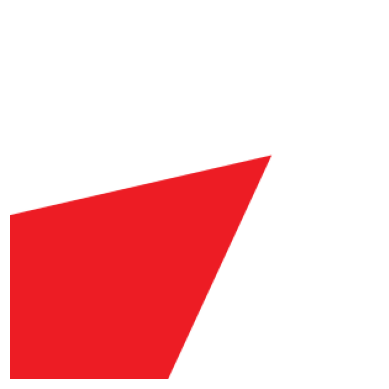

In [29]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image_c1 = """
iVBORw0KGgoAAAANSUhEUgAAASwAAAEsCAIAAAD2HxkiAAAACXBIWXMAAA7EAAAOxAGVKw4bAAAEvGlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSfvu78nIGlkPSdXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQnPz4KPHg6eG1wbWV0YSB4bWxuczp4PSdhZG9iZTpuczptZXRhLyc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpBdHRyaWI9J2h0dHA6Ly9ucy5hdHRyaWJ1dGlvbi5jb20vYWRzLzEuMC8nPgogIDxBdHRyaWI6QWRzPgogICA8cmRmOlNlcT4KICAgIDxyZGY6bGkgcmRmOnBhcnNlVHlwZT0nUmVzb3VyY2UnPgogICAgIDxBdHRyaWI6Q3JlYXRlZD4yMDI1LTEyLTExPC9BdHRyaWI6Q3JlYXRlZD4KICAgICA8QXR0cmliOkV4dElkPjhkYWIzZjdhLTU0NDMtNDIwMy1hNWQ0LWY2Zjg1YTcyNGZlZTwvQXR0cmliOkV4dElkPgogICAgIDxBdHRyaWI6RmJJZD41MjUyNjU5MTQxNzk1ODA8L0F0dHJpYjpGYklkPgogICAgIDxBdHRyaWI6VG91Y2hUeXBlPjI8L0F0dHJpYjpUb3VjaFR5cGU+CiAgICA8L3JkZjpsaT4KICAgPC9yZGY6U2VxPgogIDwvQXR0cmliOkFkcz4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6ZGM9J2h0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvJz4KICA8ZGM6dGl0bGU+CiAgIDxyZGY6QWx0PgogICAgPHJkZjpsaSB4bWw6bGFuZz0neC1kZWZhdWx0Jz5VbnRpdGxlZCBkZXNpZ24gLSAxPC9yZGY6bGk+CiAgIDwvcmRmOkFsdD4KICA8L2RjOnRpdGxlPgogPC9yZGY6RGVzY3JpcHRpb24+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpwZGY9J2h0dHA6Ly9ucy5hZG9iZS5jb20vcGRmLzEuMy8nPgogIDxwZGY6QXV0aG9yPmtyaXNoamFpbjIzMjE8L3BkZjpBdXRob3I+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcD0naHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyc+CiAgPHhtcDpDcmVhdG9yVG9vbD5DYW52YSAoUmVuZGVyZXIpIGRvYz1EQUc2aDZOaWJFOCB1c2VyPVVBRnlwb09iWGlJIGJyYW5kPUJBRnlwbXlrMFQ0IHRlbXBsYXRlPTwveG1wOkNyZWF0b3JUb29sPgogPC9yZGY6RGVzY3JpcHRpb24+CjwvcmRmOlJERj4KPC94OnhtcG1ldGE+Cjw/eHBhY2tldCBlbmQ9J3InPz7b9SPRAAAMEElEQVR4nO3d629UdR7H8XOd82taaIvA2houcjFKSQAlTYNazYIiCoQSKtY0BUpbWtz/bpN9tFl1N6vrdmYKIt6X9bIr3nZxFUXomZl9QEMBK51pZ+Zzzvm9X08V+onNu8e03864lUrFAaDjqQcAtiNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0IIlL/86sbv/1C5dk09JBEC9QBYoVIqld77IM4X4vxMnC+U//1F0Ls7d+h59a5EIEI0SuXq1bh4Ls4X43wxnjlXufrj7f+05XeTqmFJQ4Sop9Ln/4qnC3FhJs4XSu9/6JTLC/5r/tYt4dP9Td6WWESIZanEcenCxbnHXb5Y/vrrav6UOTvhuG6jt6WFW6lU1BuQMuXv/hcXinFhJp4uxOffdq79XNMf97rub3/jVTfgATCH/xCoQqVS+ucn8/+f+fElZxlfu6OxkxR4O56EWFjl+o34/NtxvhgXinG+WPnvlbr8tW5He8ebr7ltbXX527KBL0iYV/72P3PVTRfjC+84N27U/UNEwy9T4F14EtqtXC599HGcL87e/LbKJ5829sMZ0/HGq96a1Y39KGnDk9A6lZ9+imfOzz3xCucq33/ftA8dHRugwF8iQiuUv/wqni7MFopxvli6+J4Tx4IRnmcmRgUfN/GIMJt+eSamXuTknt/vP7hRvSKJiDA7Kj/8EBfOxYXibL4Yz5xzfvxJvegO5pUz6gkJRYTpVuWZmFywpy/Y3qNekVBEmDKV2dnSO+/WeiYm13J2Qj0huYgwBcpXvrv5E/M4X4zPv+38fF29qDb+tofD/ifUK5KLCBOprmdicmaKc+17IcKkqFy/Hp+/UPczMTlv/brcwQPqFYlGhErlb7699VOE+MJFZ3ZWvaj+DOfai+FsrbmafCam5nZ2drz1utvSoh6SaHyJajjhmZicOTlMgYviSdgQ5ctfxtOFm4+70rvvOaWSepGCMR1vve6tWqXekXQ8CesjgWdictHQIAVWgwiXLuFnYmK+b06fVI9IByKsTenTz25dq5Q+/CixZ2JyuYMH/A3r1SvSgQgXkdIzMTkzxZ1atYhwAeUrV+LCTHrPxOTCJx8Peh5Rr0gNInQc5/YzsWL890Lp0iWH7xkvA7+1VBN7I8zqmZicv31buKdPvSJN7IrQhjMxuZazZzjXrknWf1h/60xsuhBPF8qffa4elHHe+nXtf/mj6/GWezXI4JPQ5jMxOTNxmgJrlZEnYfmLy7euou09E1NzV9/X8carHIvWKq1PwvkzselCPF0sX76sXgTHnOBceynS9CTkTCzJ3NbW9jdf8zo71EPSJ+lPQs7E0iI6fowClyZxT8L5M7Hp/Gy+WPnmW/UiVMH32//6J/+BbvWOVErEk5AzsbTLHTlEgUsmirBSKf3j0q134eJMLN1cXlZ0WZoX4fyZ2HQ+LsxUrnzXtA+Nhgqf6vcf2qpekWKNjZAzMRtwrr1MdY6wUi6XP/hoNl+ICzOcidkg2LUj7OtVr0i3OkQ4fyY2XYiLM5Ufri7/70Ra8Mu7y7fECDkTg+M4/uZN4f596hWpV22ElTguvfv+re9nciYGx3HM+CnOtZfvXj+sv3kmNnvzPnPmvHPtWjOXIeHctWs63nzNzeXUQ1Lv7ichZ2Kokjl9ggLrwi1fv1565+LsdLFUKHImhiq5ba3tf/uz175SPSQLgis9j3ImhlpFw0MUWC8eBaJmYWhOjahHZAff2kLNooHDXneXekV2ECFq5Dpmalw9IlOIELUJ9+31t2xWr8gUIkRt+K2luiNC1CB4bFew+1H1iqwhQtTA8BhsACJEtfzNm3LP7FWvyCAiRLXM1DhvMtEIRIiqeF335wYOq1dkExGiKtGpEc61G4QIsTh35QozPKRekVlEiMVFI8Puijb1iswiQiwmDM0o59oNRIRYRDR41FuzWr0iy4gQ9+R5ZnJMPSLjiBD3Ej67139wo3pFxhEh7oVz7SYgQvyqoK832LVTvSL7iBC/isdgcxAhFuZvezh8ul+9wgpEiIWZ8VHOtZuDCLEAr7srd+SQeoUtiBALMBOjbpCIt1K3ARHibm5He3T8mHqFRYgQd4tODLttnGs3DxHiTsaYE8PqEXYhQtwhepFz7WYjQtzG88zEafUI6xAh5uWe3+9vWK9eYR0ixDzzyhn1BBsRIeYEe/qC7T3qFTYiQszhXFuFCOE4N8+1+59Qr7AUEcJxHMdMTXCurUKEcLz163IHD6hX2IsI4Zixk5xrCxGh7dzOzuilQfUKqxGh7czoiNvSol5hNSK0mzER59pqRGi1aGjQ6+xQr7AdEVrM980ZXl1bjwjtlTt4wH+gW70CRGgt1zFT3KklAhFaKux/Muh5RL0CjkOE1jJT4+oJmEOENgp27gj39KlXYA4R2shM8OraCUKE1vE2bghfeE69AvOI0DpmYtT1+LwnCJ8Mu7ir74uODahX4A5EaBfOtROICC3itrZGwy+rV+BuRGiR6OXjnGsnEBFaw/fN2En1CCyACG2RO3LI6+5Sr8ACiNAOLi8rmlxEaIXwqX7/oa3qFVgYEVqBN5lIMiLMvmDXjrCvV70Cv4oIs49f3k04Isw4f/OmcP8+9QrcCxFmnJka51w74fj0ZJm7dk1u4LB6BRZBhFlmxk65uZx6BRZBhJnltrWa4SH1CiyOCDMrGh5yV7SpV2BxRJhRYWjGTqlHoCpEmE3RwGHvN2vVK1AVIswiz+NlRVOECDMofOa3/pbN6hWoFhFmUMskj8E0IcKsCXp3B7sfVa9ADYgwa8yZ0+oJqA0RZoq/dUvumb3qFagNEWaKmRzjTSZShwizw+u6P3fkkHoFakaE2RGNneRcO42IMCPclSvM0HH1CiwFEWZENDLMuXZKEWEmhKEZHVGPwBIRYRZEg0e9NavVK7BERJh+nmcmx9QjsHREmHrhs3v9BzeqV2DpiDD1eJOJtCPCdAv6eoNdO9UrsCxEmG48BjOACFPM3/Zw+HS/egWWiwhTzExNcK6dAUSYVl53V+7gAfUK1AERppWZHHODQL0CdUCEqeR2tEcvDapXoD6IMJWiE8NuS4t6BeqDCFPIGM61s4QI0yd68ai3apV6BeqGCNPG980Er6eWKUSYMrkXnvM3rFevQD0RYcrwJhPZQ4RpEj75eLC9R70CdUaEacKra2cSEaaGv31b2P+EegXqjwhTo2VynHPtTCLCdPDWrwtfeE69Ag1BhOlgJk5zrp1VRJgCbmdn9OJR9Qo0ChGmgBkd4Vw7w4gw8YyJTgyrR6CBiDDpoqFBr7NDvQINRITJ5vvmDK+unXFEmGi5gwf8B7rVK9BYRJhgrmOmeFnR7CPC5Aqf6g96HlGvQMMRYXIZXl3bDkSYUMHOHWFfr3oFmoEIE8qc5dW1bUGESeRt3BDu36degSYhwiRqmRxzPT41tuAznTju6vtyg5xrW4QIE8eMjri5nHoFmocIk8Vta41GONe2CxEmSzR03GtfqV6BpiLCJAlDM3ZSPQLNRoQJEh055HV3qVeg2YgwMVzHTPJbSzYiwqQI9+31H9qqXgEBIkwKMzGqngANIkyE4LFdnGtbiwgTwUzyXkv2IkI9f/Om8Nm96hWQIUI9MzXOubbN+NyLuWvX5AYOq1dAiQjFzNgpzrUt938/QsaulMkBUwAAAABJRU5ErkJggg==

"""

img_data_c1 = base64.b64decode(base64_image_c1)
corner = np.array(Image.open(io.BytesIO(img_data_c1)))

plt.imshow(corner)
plt.axis("off")

### Multiple Coorners : reference as "corner2"

(np.float64(-0.5), np.float64(1499.5), np.float64(1121.5), np.float64(-0.5))

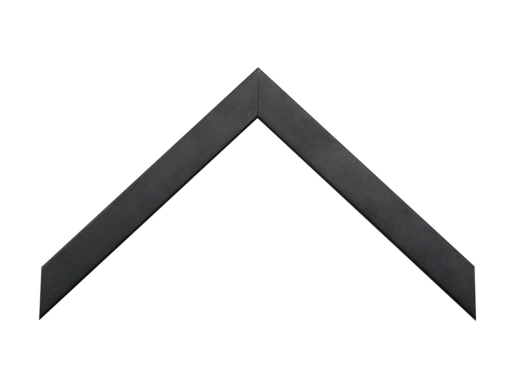

In [30]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image_c2 = """
/9j/4QxyRXhpZgAATU0AKgAAAAgADAEAAAMAAAABAlgAAAEBAAMAAAABAcEAAAECAAMAAAADAAAAngEGAAMAAAABAAIAAAESAAMAAAABAAEAAAEVAAMAAAABAAMAAAEaAAUAAAABAAAApAEbAAUAAAABAAAArAEoAAMAAAABAAIAAAExAAIAAAAgAAAAtAEyAAIAAAAUAAAA1IdpAAQAAAABAAAA6AAAASAACAAIAAgAG3dAAAAnEAAbd0AAACcQQWRvYmUgUGhvdG9zaG9wIDI1LjExIChXaW5kb3dzKQAyMDI0OjA3OjI4IDE5OjQ1OjQxAAAEkAAABwAAAAQwMjIxoAEAAwAAAAH//wAAoAIABAAAAAEAAAXcoAMABAAAAAEAAARiAAAAAAAAAAYBAwADAAAAAQAGAAABGgAFAAAAAQAAAW4BGwAFAAAAAQAAAXYBKAADAAAAAQACAAACAQAEAAAAAQAAAX4CAgAEAAAAAQAACuwAAAAAAAAASAAAAAEAAABIAAAAAf/Y/+0ADEFkb2JlX0NNAAL/7gAOQWRvYmUAZIAAAAAB/9sAhAAMCAgICQgMCQkMEQsKCxEVDwwMDxUYExMVExMYEQwMDAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMAQ0LCw0ODRAODhAUDg4OFBQODg4OFBEMDAwMDBERDAwMDAwMEQwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAz/wAARCAB4AKADASIAAhEBAxEB/90ABAAK/8QBPwAAAQUBAQEBAQEAAAAAAAAAAwABAgQFBgcICQoLAQABBQEBAQEBAQAAAAAAAAABAAIDBAUGBwgJCgsQAAEEAQMCBAIFBwYIBQMMMwEAAhEDBCESMQVBUWETInGBMgYUkaGxQiMkFVLBYjM0coLRQwclklPw4fFjczUWorKDJkSTVGRFwqN0NhfSVeJl8rOEw9N14/NGJ5SkhbSVxNTk9KW1xdXl9VZmdoaWprbG1ub2N0dXZ3eHl6e3x9fn9xEAAgIBAgQEAwQFBgcHBgU1AQACEQMhMRIEQVFhcSITBTKBkRShsUIjwVLR8DMkYuFygpJDUxVjczTxJQYWorKDByY1wtJEk1SjF2RFVTZ0ZeLys4TD03Xj80aUpIW0lcTU5PSltcXV5fVWZnaGlqa2xtbm9ic3R1dnd4eXp7fH/9oADAMBAAIRAxEAPwD1VJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJT//Q9VSSSSUpJJJJSkkkklKSSSSUpYf1n+tOJ0GgN0uz7gTj4wPbj1rv9Hjtd+d/hP5upA+tf1wxuhV/Z6A3I6nY2a6D9FgP+HytvubX+5V/O5H/AG5dV5bk5V+VfZlZVjr8m87rbncuPy9rWM/wdbP0daSn1f6rfWvF67R6T9tPUahN1HZw4+0Y8/Spd+7/ADlH83b/AIK23eXhWPfbj2V30WOpvpO6q1hhzXeLf9fevTvqj9cqustbhZu2nqbWzA0ZcAPdZR/Lb/haPzP+LSU9OkkkkpSSSSSlJJJJKUkkkkp//9H1VJJJJSkkkklKSSSSUpcp9cfrrX0cO6f08tt6o4DcTqyhrh7X3fvXOb/M4/8A1239Fs9at9cfryMF1nS+kPDs4e3IydHNo/kMn22Zf8j6FH+F/wBCvN3n3FziXPeS57nEuc5zjL3vc73Pe9303pKSWOsusffc91t1rt9trzLnOPLnuV7ofQM/r2b9lwxtrYR9qynCWUtP/nzJe3+Zx/8Arl2ylF+rH1czfrHlurqJowKHRl5oHB5+zY2722Zbvzv8Fifzl36T0qLfW+ndNwul4deFg1CnHqHtaNSSdXPe53usse76dj/e9JT4/wBd6B1DoGZ9lzBvqsJ+y5bRDLWjsf8AR5LG/wA7R/1yn9Es+ux1bmvYSyxhD2PaS1zXN1a9j2+5j2r3DqPTcLqmHZhZ1Qux7R7mnQgj6L2Ob7q7GfmWM97F5F9aPq1m/VzMbXaTfgXujEzYiTz9mydvtry/3f8ABZf85T7/AFaKkp7f6n/XhnUyzp3VXNr6jxVbo1l8f9GvJ/fq+hZ/OUf6GrsF4GGbh8wZB4I1EQvRfqd9djd6fS+s2fpzDMbMdoLOzacg/m5H+jt/7Uf+GP59Ke3SSSSUpJJJJSkkkklP/9L1VJJJJSkkkklKXA/XL6+bDZ0nodn6USzKzmH6HZ9GI786/wD0t/8A2n/wf6x/Rqf10+vjss2dK6JaW4olmTnMMGzs6nEeP8D/AKTJb/O/4D2fpVw7YaA1ggDQAaaJKSSGja0fBb31U+qGX9YrfXsc7H6Ux0WZA0dYQYfTif8AU25P+C+hV+m/mZ/U/wCpd/1gsbm5u6norDJIJa/JI/wVDh7q8T/TZLf53+axv9PX61TTVRUyihjaqamhldbAGta1o2sYxjfa1jWpKR4WDidPxKsLCqbRjUN21VMEAD/zL89356OkkkpSBnYOJ1DEtws2pt+Ne3bbU8SCP/MfpMd+YjpJKfIfrP8AVTM+rtvqNLsjpb3RTknV1ZOjKMv+V+bVkfQu/P8A0387iEggtIkHQg/xXu11NORS+i9jbabWlllbwHNc1w2uY9jva5rl5P8AW/6n5H1etdmYm67oth0cZc/GJ/wV7j7rMX/QZTv5v+Zyf9PalOx9UPr0aDX0zrVs0GG4+a86s7Nqy3n8z9zJd/1//Sr0NeBh7Tp2XXfVD68u6WK+m9VeX9OENpyDq7HH5tdn5z8T938/F/8AC39HSn05JRY9ljGvY4OY4BzXNMgg6hzSFJJSkkkklP8A/9P1VJJDyMijFosyMmxtNFTS+yx5DWtaPpOc5ySmVljK2OsscGMYC573GAANXOc4/Ra1eW/XL69WdW39N6U819M1bdeJDsgd2N/Orw/+nk/8R/PVfrl9druvvOFhF1PSGHgy1+QQdLL2/SZj/wChxv8AruR/oaeWc8NBc4gAckpKZF4aPAAfAABdl9SvqK7qza+rdWYWdNdDsfGdIdkD8220fSrw3f4Nn08v/wALf0k/1M/xfOyjX1Tr9RGOIfjdPsGrzy27NYf8F/o8R30/+1P+hXpiSmLGMYxrGNDWNADWgQABw1oUkkklKSSSSUpJJJJSlF7GWMdXY0PY8FrmuEgg6Oa5pUkklPlf10+otnRxZ1XpLTZ0xvuyMcS52OO9lf51mE38/wDPxP8Awv8AzHJMcHDTjkEGefNfQK8y+uf1BdgOs6r0KouwyS/JwGCTUTq+7DYP+0/+kxf8D/2n/R/oWJTU+p/1yt6E5uFml1vSXHgAufjk/wCEpb9J+P8A6XH/ADP5zH/0NvqlF9ORSy/HsbbTa0PrsYQ5rmnVrmOb9Jq8Aba0gEGQeCNQug+qn1wyvq/f6Tg7I6ZY6bsYfSYSfdfiT+f+dZR9C7/jvppT7GkgYOdidQxKszCtbfjXt3V2N4I4/sua72vY76D0dJT/AP/U9VXk3+MrrWdk9cu6O+zbgYXpObS3QPe9jL/Vv/0np7/0TPoM+n/OL1leJfXp7rPrn1JlbXWWPupqrrYC5z3+hjsZXWxvufY9/wBFjUlOE54aJJ0XpH1E+oL6TX1rr1UXiH4WA8fzXduTlN/7l/6Gj/tJ/wCG/wCjW/qT9QGdMNfVOstbZ1Ie6nH0czH85+jblf8AC/zdX+A/0z+3SUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU+efXn6gF3q9Z6DVN2r8vp7B/Od334bf+5P8ApMb/ALVf4L9Z/pPnddzXAOaQWnUFfQ64P67/AOL8Zzrer9EYGZzpfk4ghrbz+dbX+bXl/vfmZH+E/S/pElPP/wCL3q+bifWHH6fVZ+pdQc8X0HVu9tVlrL6/9Hd+hZW//S1fzn+B9P1xeH/U2xzPrd0trgWOZkOrexwLXNd6dzHMex3ua9rvpNXuCSn/1fVVgdL+qOFidfzvrDkkZPUMuxxocRDaKy1tW2pri79YtrZ+nyP3P0Neyv1fW30klKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJTzvVvqdh5nXcH6wYpGN1DEuY/IIHsvrHsIta3/ALUVVu/QX/8AWLv0fpeh0SSSSn//1vVUl8qpJKfqpJfKqSSn6qSXyqkkp+qkl8qpJKfqpJfKqSSn6qSXyqkkp+qkl8qpJKfqpJfKqSSn6qSXyqkkp+qkl8qpJKf/2f/tFSxQaG90b3Nob3AgMy4wADhCSU0EBAAAAAAADxwBWgADGyVHHAIAAAIAAAA4QklNBCUAAAAAABDNz/p9qMe+CQVwdq6vBcNOOEJJTQQ6AAAAAAGNAAAAEAAAAAEAAAAAAAtwcmludE91dHB1dAAAAAcAAAAAQ2xyU2VudW0AAAAAQ2xyUwAAAABSR0JDAAAAAE5tICBURVhUAAAAJwBTAEMALQBQADEAMAAwADAAMABfAFMAZQByAGkAZQBzACAAQwBvAGwAZABQAHIAZQBzAHMAQgByAGkAZwBoAHQAXwBNAEsAXwB2ADEAAAAAAABJbnRlZW51bQAAAABJbnRlAAAAAENscm0AAAAATXBCbGJvb2wBAAAAD3ByaW50U2l4dGVlbkJpdGJvb2wAAAAAC3ByaW50ZXJOYW1lVEVYVAAAABgAXABcAGcAYgBpADAAMQBwAGQAYwAwADEAXABHAEIASQAwADEAUABSAE4AMQAyAAAAAAAPcHJpbnRQcm9vZlNldHVwT2JqYwAAAAwAUAByAG8AbwBmACAAUwBlAHQAdQBwAAAAAAAKcHJvb2ZTZXR1cAAAAAEAAAAAQmx0bmVudW0AAAAMYnVpbHRpblByb29mAAAACXByb29mQ01ZSwA4QklNBDsAAAAAAi0AAAAQAAAAAQAAAAAAEnByaW50T3V0cHV0T3B0aW9ucwAAABcAAAAAQ3B0bmJvb2wAAAAAAENsYnJib29sAAAAAABSZ3NNYm9vbAAAAAAAQ3JuQ2Jvb2wAAAAAAENudENib29sAAAAAABMYmxzYm9vbAAAAAAATmd0dmJvb2wAAAAAAEVtbERib29sAAAAAABJbnRyYm9vbAAAAAAAQmNrZ09iamMAAAABAAAAAAAAUkdCQwAAAAMAAAAAUmQgIGRvdWJAb+AAAAAAAAAAAABHcm4gZG91YkBv4AAAAAAAAAAAAEJsICBkb3ViQG/gAAAAAAAAAAAAQnJkVFVudEYjUmx0AAAAAAAAAAAAAAAAQmxkIFVudEYjUmx0AAAAAAAAAAAAAAAAUnNsdFVudEYjUHhsQGaAAAAAAAAAAAAKdmVjdG9yRGF0YWJvb2wBAAAAAFBnUHNlbnVtAAAAAFBnUHMAAAAAUGdQQwAAAABMZWZ0VW50RiNSbHQAAAAAAAAAAAAAAABUb3AgVW50RiNSbHQAAAAAAAAAAAAAAABTY2wgVW50RiNQcmNAWQAAAAAAAAAAABBjcm9wV2hlblByaW50aW5nYm9vbAAAAAAOY3JvcFJlY3RCb3R0b21sb25nAAAAAAAAAAxjcm9wUmVjdExlZnRsb25nAAAAAAAAAA1jcm9wUmVjdFJpZ2h0bG9uZwAAAAAAAAALY3JvcFJlY3RUb3Bsb25nAAAAAAA4QklNA+0AAAAAABAAtAAAAAEAAQC0AAAAAQABOEJJTQQmAAAAAAAOAAAAAAAAAAAAAD+AAAA4QklNA/IAAAAAAAoAAP///////wAAOEJJTQQNAAAAAAAEAAAAWjhCSU0EGQAAAAAABAAAAB44QklNA/MAAAAAAAkAAAAAAAAAAAEAOEJJTScQAAAAAAAKAAEAAAAAAAAAAThCSU0D9QAAAAAASAAvZmYAAQBsZmYABgAAAAAAAQAvZmYAAQChmZoABgAAAAAAAQAyAAAAAQBaAAAABgAAAAAAAQA1AAAAAQAtAAAABgAAAAAAAThCSU0D+AAAAAAAcAAA/////////////////////////////wPoAAAAAP////////////////////////////8D6AAAAAD/////////////////////////////A+gAAAAA/////////////////////////////wPoAAA4QklNBAgAAAAAACkAAAABAAACQAAAAkAAAAAFAACGUQEAAF3AAAAAC0AAAACxAwAAAHxSAQA4QklNBEQAAAAAAD0AAAACAAACQAAAAkAAAAAFAACGUQEASoT/AABdwAAASoT/AAALQAAASoT/AACxAwAASoT/AAB8UgEASoT/ADhCSU0EHgAAAAAABAAAAAA4QklNBBoAAAAAA0kAAAAGAAAAAAAAAAAAAARiAAAF3AAAAAoARwAtADIAOQAwADUAIAAtACAAMQAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAF3AAABGIAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAQAAAAAAAG51bGwAAAACAAAABmJvdW5kc09iamMAAAABAAAAAAAAUmN0MQAAAAQAAAAAVG9wIGxvbmcAAAAAAAAAAExlZnRsb25nAAAAAAAAAABCdG9tbG9uZwAABGIAAAAAUmdodGxvbmcAAAXcAAAABnNsaWNlc1ZsTHMAAAABT2JqYwAAAAEAAAAAAAVzbGljZQAAABIAAAAHc2xpY2VJRGxvbmcAAAAAAAAAB2dyb3VwSURsb25nAAAAAAAAAAZvcmlnaW5lbnVtAAAADEVTbGljZU9yaWdpbgAAAA1hdXRvR2VuZXJhdGVkAAAAAFR5cGVlbnVtAAAACkVTbGljZVR5cGUAAAAASW1nIAAAAAZib3VuZHNPYmpjAAAAAQAAAAAAAFJjdDEAAAAEAAAAAFRvcCBsb25nAAAAAAAAAABMZWZ0bG9uZwAAAAAAAAAAQnRvbWxvbmcAAARiAAAAAFJnaHRsb25nAAAF3AAAAAN1cmxURVhUAAAAAQAAAAAAAG51bGxURVhUAAAAAQAAAAAAAE1zZ2VURVhUAAAAAQAAAAAABmFsdFRhZ1RFWFQAAAABAAAAAAAOY2VsbFRleHRJc0hUTUxib29sAQAAAAhjZWxsVGV4dFRFWFQAAAABAAAAAAAJaG9yekFsaWduZW51bQAAAA9FU2xpY2VIb3J6QWxpZ24AAAAHZGVmYXVsdAAAAAl2ZXJ0QWxpZ25lbnVtAAAAD0VTbGljZVZlcnRBbGlnbgAAAAdkZWZhdWx0AAAAC2JnQ29sb3JUeXBlZW51bQAAABFFU2xpY2VCR0NvbG9yVHlwZQAAAABOb25lAAAACXRvcE91dHNldGxvbmcAAAAAAAAACmxlZnRPdXRzZXRsb25nAAAAAAAAAAxib3R0b21PdXRzZXRsb25nAAAAAAAAAAtyaWdodE91dHNldGxvbmcAAAAAADhCSU0EKAAAAAAADAAAAAI/8AAAAAAAADhCSU0EEQAAAAAAAQEAOEJJTQQUAAAAAAAEAAAA4ThCSU0EDAAAAAALCAAAAAEAAACgAAAAeAAAAeAAAOEAAAAK7AAYAAH/2P/tAAxBZG9iZV9DTQAC/+4ADkFkb2JlAGSAAAAAAf/bAIQADAgICAkIDAkJDBELCgsRFQ8MDA8VGBMTFRMTGBEMDAwMDAwRDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAENCwsNDg0QDg4QFA4ODhQUDg4ODhQRDAwMDAwREQwMDAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwM/8AAEQgAeACgAwEiAAIRAQMRAf/dAAQACv/EAT8AAAEFAQEBAQEBAAAAAAAAAAMAAQIEBQYHCAkKCwEAAQUBAQEBAQEAAAAAAAAAAQACAwQFBgcICQoLEAABBAEDAgQCBQcGCAUDDDMBAAIRAwQhEjEFQVFhEyJxgTIGFJGhsUIjJBVSwWIzNHKC0UMHJZJT8OHxY3M1FqKygyZEk1RkRcKjdDYX0lXiZfKzhMPTdePzRieUpIW0lcTU5PSltcXV5fVWZnaGlqa2xtbm9jdHV2d3h5ent8fX5/cRAAICAQIEBAMEBQYHBwYFNQEAAhEDITESBEFRYXEiEwUygZEUobFCI8FS0fAzJGLhcoKSQ1MVY3M08SUGFqKygwcmNcLSRJNUoxdkRVU2dGXi8rOEw9N14/NGlKSFtJXE1OT0pbXF1eX1VmZ2hpamtsbW5vYnN0dXZ3eHl6e3x//aAAwDAQACEQMRAD8A9VSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU//0PVUkkklKSSSSUpJJJJSkkkklKWH9Z/rTidBoDdLs+4E4+MD249a7/R47Xfnf4T+bqQPrX9cMboVf2egNyOp2Nmug/RYD/h8rb7m1/uVfzuR/wBuXVeW5OVflX2ZWVY6/JvO6253Lj8va1jP8HWz9HWkp9X+q31rxeu0ek/bT1GoTdR2cOPtGPP0qXfu/wA5R/N2/wCCtt3l4Vj3249ld9Fjqb6TuqtYYc13i3/X3r076o/XKrrLW4Wbtp6m1swNGXAD3WUfy2/4Wj8z/i0lPTpJJJKUkkkkpSSSSSlJJJJKf//R9VSSSSUpJJJJSkkkklKXKfXH6619HDun9PLbeqOA3E6soa4e19371zm/zOP/ANdt/RbPWrfXH68jBdZ0vpDw7OHtyMnRzaP5DJ9tmX/I+hR/hf8AQrzd59xc4lz3kue5xLnOc4y973O9z3vd9N6SkljrLrH33Pdbda7fba8y5zjy57le6H0DP69m/ZcMba2EfaspwllLT/58yXt/mcf/AK5dspRfqx9XM36x5bq6iaMCh0ZeaBwefs2Nu9tmW787/BYn85d+k9Ki31vp3TcLpeHXhYNQpx6h7WjUknVz3ud7rLHu+nY/3vSU+P8AXegdQ6BmfZcwb6rCfsuW0Qy1o7H/AEeSxv8AO0f9cp/RLPrsdW5r2EssYQ9j2ktc1zdWvY9vuY9q9w6j03C6ph2YWdULse0e5p0II+i9jm+6uxn5ljPexeRfWj6tZv1czG12k34F7oxM2Ik8/Zsnb7a8v93/AAWX/OU+/wBWipKe3+p/14Z1Ms6d1Vza+o8VW6NZfH/Rryf36voWfzlH+hq7BeBhm4fMGQeCNREL0X6nfXY3en0vrNn6cwzGzHaCzs2nIP5uR/o7f+1H/hj+fSnt0kkklKSSSSUpJJJJT//S9VSSSSUpJJJJSlwP1y+vmw2dJ6HZ+lEsys5h+h2fRiO/Ov8A9Lf/ANp/8H+sf0an9dPr47LNnSuiWluKJZk5zDBs7OpxHj/A/wCkyW/zv+A9n6VcO2GgNYIA0AGmiSkkho2tHwW99VPqhl/WK317HOx+lMdFmQNHWEGH04n/AFNuT/gvoVfpv5mf1P8AqXf9YLG5ubup6KwySCWvySP8FQ4e6vE/02S3+d/msb/T1+tU01UVMooY2qmpoZXWwBrWtaNrGMY32tY1qSkeFg4nT8SrCwqm0Y1DdtVTBAA/8y/Pd+ejpJJKUgZ2DidQxLcLNqbfjXt221PEgj/zH6THfmI6SSnyH6z/AFUzPq7b6jS7I6W90U5J1dWToyjL/lfm1ZH0Lvz/ANN/O4hIILSJB0IP8V7tdTTkUvovY22m1pZZW8BzXNcNrmPY72ua5eT/AFv+p+R9XrXZmJuu6LYdHGXPxif8Fe4+6zF/0GU7+b/mcn/T2pTsfVD69Gg19M61bNBhuPmvOrOzast5/M/cyXf9f/0q9DXgYe06dl131Q+vLulivpvVXl/ThDacg6uxx+bXZ+c/E/d/Pxf/AAt/R0p9OSUWPZYxr2ODmOAc1zTIIOoc0hSSUpJJJJT/AP/T9VSSQ8jIoxaLMjJsbTRU0vsseQ1rWj6TnOckplZYytjrLHBjGAue9xgADVznOP0WtXlv1y+vVnVt/TelPNfTNW3XiQ7IHdjfzq8P/p5P/Efz1X65fXa7r7zhYRdT0hh4MtfkEHSy9v0mY/8Aocb/AK7kf6GnlnPDQXOIAHJKSmReGjwAHwAAXZfUr6iu6s2vq3VmFnTXQ7HxnSHZA/NttH0q8N3+DZ9PL/8AC39JP9TP8Xzso19U6/URjiH43T7Bq88tuzWH/Bf6PEd9P/tT/oV6YkpixjGMaxjQ1jQA1oEAAcNaFJJJJSkkkklKSSSSUpRexljHV2ND2PBa5rhIIOjmuaVJJJT5X9dPqLZ0cWdV6S02dMb7sjHEudjjvZX+dZhN/P8Az8T/AML/AMxyTHBw045BBnnzX0CvMvrn9QXYDrOq9CqLsMkvycBgk1E6vuw2D/tP/pMX/A/9p/0f6FiU1Pqf9crehObhZpdb0lx4ALn45P8AhKW/Sfj/AOlx/wAz+cx/9Db6pRfTkUsvx7G202tD67GEOa5p1a5jm/SavAG2tIBBkHgjULoPqp9cMr6v3+k4OyOmWOm7GH0mEn3X4k/n/nWUfQu/476aU+xpIGDnYnUMSrMwrW3417d1djeCOP7Lmu9r2O+g9HSU/wD/1PVV5N/jK61nZPXLujvs24GF6Tm0t0D3vYy/1b/9J6e/9Ez6DPp/zi9ZXiX16e6z659SZW11lj7qaq62Auc9/oY7GV1sb7n2Pf8ARY1JThOeGiSdF6R9RPqC+k19a69VF4h+FgPH813bk5Tf+5f+ho/7Sf8Ahv8Ao1v6k/UBnTDX1TrLW2dSHupx9HMx/Ofo25X/AAv83V/gP9M/t0lKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklPnn15+oBd6vWeg1Tdq/L6ewfznd9+G3/uT/AKTG/wC1X+C/Wf6T53Xc1wDmkFp1BX0OuD+u/wDi/Gc63q/RGBmc6X5OIIa28/nW1/m15f735mR/hP0v6RJTz/8Ai96vm4n1hx+n1WfqXUHPF9B1bvbVZay+v/R3foWVv/0tX85/gfT9cXh/1Nscz63dLa4FjmZDq3scC1zXencxzHsd7mva76TV7gkp/9X1VYHS/qjhYnX876w5JGT1DLscaHEQ2istbVtqa4u/WLa2fp8j9z9DXsr9X1t9JJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU871b6nYeZ13B+sGKRjdQxLmPyCB7L6x7CLWt/wC1FVbv0F//AFi79H6XodEkkkp//9b1VJfKqSSn6qSXyqkkp+qkl8qpJKfqpJfKqSSn6qSXyqkkp+qkl8qpJKfqpJfKqSSn6qSXyqkkp+qkl8qpJKfqpJfKqSSn/9k4QklNBCEAAAAAAFcAAAABAQAAAA8AQQBkAG8AYgBlACAAUABoAG8AdABvAHMAaABvAHAAAAAUAEEAZABvAGIAZQAgAFAAaABvAHQAbwBzAGgAbwBwACAAMgAwADIANAAAAAEAOEJJTQQGAAAAAAAHAAgAAAABAQD/4RowaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA5LjEtYzAwMiA3OS5hNmE2Mzk2LCAyMDI0LzAzLzEyLTA3OjQ4OjIzICAgICAgICAiPiA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIiB4bWxuczp4bXBNTT0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wL21tLyIgeG1sbnM6c3RFdnQ9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9zVHlwZS9SZXNvdXJjZUV2ZW50IyIgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIiB4bWxuczpwaG90b3Nob3A9Imh0dHA6Ly9ucy5hZG9iZS5jb20vcGhvdG9zaG9wLzEuMC8iIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1wTU06RG9jdW1lbnRJRD0iYWRvYmU6ZG9jaWQ6cGhvdG9zaG9wOjU1NDFjMWM1LTU0ZDEtNDA0Yy1hYjc3LTI1NDcwMjNhMTllMSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo3MGEyNzA5NC1lYmJmLTJlNDMtODc1NC1mZWI1YmFhYTJiZGQiIHhtcE1NOk9yaWdpbmFsRG9jdW1lbnRJRD0iQTRERjlENDM5NDZBRkRDRUYwQzBEQkI3QUIyMTM1NzEiIGRjOmZvcm1hdD0iaW1hZ2UvanBlZyIgcGhvdG9zaG9wOkxlZ2FjeUlQVENEaWdlc3Q9IkNEQ0ZGQTdEQThDN0JFMDkwNTcwNzZBRUFGMDVDMzRFIiBwaG90b3Nob3A6Q29sb3JNb2RlPSIzIiB4bXA6Q3JlYXRlRGF0ZT0iMjAxOS0wMi0yMFQxNDoyNjo0Ni0wNjowMCIgeG1wOk1vZGlmeURhdGU9IjIwMjQtMDctMjhUMTk6NDU6NDEtMDU6MDAiIHhtcDpNZXRhZGF0YURhdGU9IjIwMjQtMDctMjhUMTk6NDU6NDEtMDU6MDAiIHhtcDpDcmVhdG9yVG9vbD0iQWRvYmUgUGhvdG9zaG9wIENDIDIwMTcgKFdpbmRvd3MpIj4gPHhtcE1NOkhpc3Rvcnk+IDxyZGY6U2VxPiA8cmRmOmxpIHN0RXZ0OmFjdGlvbj0ic2F2ZWQiIHN0RXZ0Omluc3RhbmNlSUQ9InhtcC5paWQ6YTY2OTZhMzQtMjZmOS1hNjQzLWFjMWUtNjI4MmI5YmNhZGE1IiBzdEV2dDp3aGVuPSIyMDE5LTAyLTIwVDE0OjI5OjQ5LTA2OjAwIiBzdEV2dDpzb2Z0d2FyZUFnZW50PSJBZG9iZSBQaG90b3Nob3AgQ0MgMjAxNyAoV2luZG93cykiIHN0RXZ0OmNoYW5nZWQ9Ii8iLz4gPHJkZjpsaSBzdEV2dDphY3Rpb249InNhdmVkIiBzdEV2dDppbnN0YW5jZUlEPSJ4bXAuaWlkOjcwYTI3MDk0LWViYmYtMmU0My04NzU0LWZlYjViYWFhMmJkZCIgc3RFdnQ6d2hlbj0iMjAyNC0wNy0yOFQxOTo0NTo0MS0wNTowMCIgc3RFdnQ6c29mdHdhcmVBZ2VudD0iQWRvYmUgUGhvdG9zaG9wIDI1LjExIChXaW5kb3dzKSIgc3RFdnQ6Y2hhbmdlZD0iLyIvPiA8L3JkZjpTZXE+IDwveG1wTU06SGlzdG9yeT4gPHBob3Rvc2hvcDpEb2N1bWVudEFuY2VzdG9ycz4gPHJkZjpCYWc+IDxyZGY6bGk+MzM0MkI5RjgwRkQzN0FDOTk2QUU0M0NBNkU2QzIyQkY8L3JkZjpsaT4gPHJkZjpsaT4zM0EzRkZDMDkxMTI4RkNFN0I5MjFFODBGQ0FCQUJEOTwvcmRmOmxpPiA8cmRmOmxpPjM2QjhFNUQyRENEM0Q1QTBGNTMzRTA3OEI3QkUyNTNDPC9yZGY6bGk+IDxyZGY6bGk+NDYyNUU3NTc1RUI2MjIyOTM5NUUxMENEMjczQ0VCQUI8L3JkZjpsaT4gPHJkZjpsaT41MUY5QUU1RUMxOENEN0VCQkZBRUQ4MkY0QUJBMjU0RTwvcmRmOmxpPiA8cmRmOmxpPjZGN0E3ODUxMjMzNUQ4NjEyODhFMzVBNjgzMTgyNjNBPC9yZGY6bGk+IDxyZGY6bGk+ODAxNEIwOUQxRTA4NDQyNkZFOTdGQkUxRDM2QTc2QkU8L3JkZjpsaT4gPHJkZjpsaT44MTVEOUJCQjQyNTRFNjMwMzQxQkZCRUZBQjk0RDc0NTwvcmRmOmxpPiA8cmRmOmxpPjg0RTZFQTUzNDhDQzgwODM0QTY1Nzc0N0U5RkUxNkEwPC9yZGY6bGk+IDxyZGY6bGk+ODY5NTFDNUM0OTQxNzQwNjRBMTQ4RjM0NURFNzgxRDA8L3JkZjpsaT4gPHJkZjpsaT45MDRDQjUzNTc4MkU2MjA5NUJBRkM1QUFFREQ5NjVBOTwvcmRmOmxpPiA8cmRmOmxpPjkyQ0VCMDY0NzYyMjMyNTkzQkYwMDg1MTI4RjMxMUNDPC9yZGY6bGk+IDxyZGY6bGk+OTQwOUM1RjREMEQ3MkIzQUU2QkQyQkJDODczMEYyQTE8L3JkZjpsaT4gPHJkZjpsaT45Nzk4MTE2RjlCOUY4OEI5NzVFODVFMDVERUVCRTA3ODwvcmRmOmxpPiA8cmRmOmxpPjk3REIyOUMyOTY1RDM1MEFCOEIxMEZDQUY1Q0FGMDM0PC9yZGY6bGk+IDxyZGY6bGk+QTNFOTg1RDYwNDU0Mzk3RTlEMDVFNDM4QkNDODU2N0Y8L3JkZjpsaT4gPHJkZjpsaT5BQkU5QTFBMUYwRjAzNjZGRERCNEFERUVCNTE2OTcxNTwvcmRmOmxpPiA8cmRmOmxpPkJDMDIwMDQxNTZEMzEyQzA4RDY1RDgxOEQ3NzAzOTUzPC9yZGY6bGk+IDxyZGY6bGk+QkQ1QjZFNzAyNjhERjAxODRGQ0QwODM5MkRGOEU4QjE8L3JkZjpsaT4gPHJkZjpsaT5EMTNDQjk5NEQ2M0FFNzc2RkRGNkNFQzg4RkJGMDhFODwvcmRmOmxpPiA8cmRmOmxpPkQ2M0IzMzBFMTBBNTJGMTc1ODZGNjJFNkIxQzIzNDJEPC9yZGY6bGk+IDxyZGY6bGk+RTRCRjczMkYzMzdBMDU0NjFCRkY4RkUyNjAwOUM4NzM8L3JkZjpsaT4gPHJkZjpsaT5FNkNBMDY2NzRBQkI4NjA1NTNFOTlDQTAyNzgyMUNCNjwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6MDRjMmNjODUtNzUwZC1kNjQ2LWI4YjItNmI2MzY5MTdmYTdjPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDowNWEzMWJkYS05M2NkLWU1NDAtYjliZi0wZGE1YmQxM2E2NmE8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjBkNmZhZWM1LTYwYjAtMGU0NS1iY2JkLWU3NDViZmJkMDdjNTwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6MTI3NmQ2YzAtZGIwOC0zYzQwLWIzZDMtZDJiZGViZGVlNDc3PC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDoxNjI3NmNlNC03MzVhLWJhNDYtYTQzOC1lYThkZGQzYjM4YmE8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjFhZDk1YTQwLWY5YTItNDQ0OC1hM2M3LWY4MzYyOTI4NGNmYTwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6MjVjMjk5MWItMTRhNC02YzQ0LWE1NmUtMTYzOWJlOTE5MWNmPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDoyYTY4Yjk5Yi05MmIyLTYxNGUtYWY5Zi00ZDcwMjdjM2JiYzc8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjMxODVhM2EyLWVkMDgtM2Q0Mi1iZWIzLThhZDFlNjAwZWEwNjwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6NGJlMWM1MzAtOGY2NC1hNTQ1LWE0MjEtZDBlOWQ4MGMyNmFiPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDo2ZGU5YTg1ZS1iYzRlLWY4NDctYmViZS1mY2UyMmFhNTJmMmM8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjZlNGNkYWZiLTFjNjYtMzI0Mi1hYjRkLTUzNTIzMDE1YjRkMTwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6ODAxMjQzODAtMGYwNC0xYTQwLTkyYzgtZTExYjExYzNkZmUwPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDo4MjBiMjIxZC0wNTUwLTNlNDEtOWZjNy1mNjM5ZTYzYTZjM2Q8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjg2MmZiNTk5LWNhNzctNWQ0OS05MDM1LTYzZmYyNDQ1OWU5MTwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6ODY0NmQ0MmUtMjdkZi1kMjQ2LWE2NTMtNTMzZmNhOWYxYTJiPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDo4ZGRkNGNlNS00Mjg5LTdmNGItYmVjZC1hNGE5YWRmNWY5NGM8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjhlYzQ2MTYyLWFmZWEtZTg0Yi1iMGM5LTk0NjYwODNhMWI5OTwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6OTRkNzEzMTAtOGYyNi01ZDRlLWFjZDktYWQyYTE2Mzc2NjhiPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDo5NjBlYjQ3NS01M2MyLTExNDgtOGIzMy1lMGQ1MmQzNjliYmQ8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjk2NzIzOWZlLWNjZDAtODU0Zi05ZWRiLWM3YWVlZmZjODM3MzwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6OWI5N2RiNWYtY2VmZC03NTQ2LTgxMDYtOWFhOTFiNzE3ZTlhPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDo5ZDNjZjRkNi02NTk3LTU1NGUtOWIwNS04YzhiZjE3MzI4NTk8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOmEzNmMwNzNhLWNhY2MtYTk0Mi1hODMxLTEyNjFiNjRjYjI5MzwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6YWI0Y2NlMTAtNGE5My1kZDRkLTk0YTYtMGMxZjRmZjU5YjljPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDpiMzk0NmVkYy1iNWU1LWE1NDYtYjQ3Ni04NTA5MDM3NzAzNjM8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOmUxMGIxZjAyLTMwYmYtMGY0Zi05MmI2LTNiNGEzNDFiMWI5MzwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6ZWYxYTVhM2EtNzJkMi0zODQ1LWIyNzMtNDE2NDZlOTdkNWRjPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDpmMmUzZjRjMi04Mzg2LTA1NDctODFhMS03ODhiZTEyZjU4MDM8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOmZjZWU1YTEyLWIwNWYtOTA0My05NGNiLTYyNDQ0MTZlMzkzMTwvcmRmOmxpPiA8L3JkZjpCYWc+IDwvcGhvdG9zaG9wOkRvY3VtZW50QW5jZXN0b3JzPiA8L3JkZjpEZXNjcmlwdGlvbj4gPC9yZGY6UkRGPiA8L3g6eG1wbWV0YT4gICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICA8P3hwYWNrZXQgZW5kPSJ3Ij8+/+4ADkFkb2JlAGRAAAAAAf/bAIQAAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQIBAQEBAQECAgICAgICAgICAgICAgMDAwMDAwMDAwMDAwMDAwEBAQEBAQECAQECAwICAgMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMD/8AAEQgEYgXcAwERAAIRAQMRAf/dAAQAvP/EAaIAAAAGAgMBAAAAAAAAAAAAAAcIBgUECQMKAgEACwEAAAYDAQEBAAAAAAAAAAAABgUEAwcCCAEJAAoLEAACAQMEAQMDAgMDAwIGCXUBAgMEEQUSBiEHEyIACDEUQTIjFQlRQhZhJDMXUnGBGGKRJUOhsfAmNHIKGcHRNSfhUzaC8ZKiRFRzRUY3R2MoVVZXGrLC0uLyZIN0k4Rlo7PD0+MpOGbzdSo5OkhJSlhZWmdoaWp2d3h5eoWGh4iJipSVlpeYmZqkpaanqKmqtLW2t7i5usTFxsfIycrU1dbX2Nna5OXm5+jp6vT19vf4+foRAAIBAwIEBAMFBAQEBgYFbQECAxEEIRIFMQYAIhNBUQcyYRRxCEKBI5EVUqFiFjMJsSTB0UNy8BfhgjQlklMYY0TxorImNRlUNkVkJwpzg5NGdMLS4vJVZXVWN4SFo7PD0+PzKRqUpLTE1OT0laW1xdXl9ShHV2Y4doaWprbG1ub2Z3eHl6e3x9fn90hYaHiImKi4yNjo+DlJWWl5iZmpucnZ6fkqOkpaanqKmqq6ytrq+v/aAAwDAQACEQMRAD8A3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Df49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//V3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//Q3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9ff49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XF3SNHkkdY441Z3d2CoiKNTO7NwABySffuvdakH827+fBhaHd9T8Q/h/udKqnlranC969/YJXyNLg8VHJ9nmNq9dzUjL55nJanqcjC/LaoaVv1zKtjh8NDK/EcAfL5n5/4PP06SSzEuETh5n/J0pv5PP87TbGXyeI+GXylzB29lsJNDtrpTtXc5OMfcWEjfwbf27vx6xrRVjxaEpcgzaZG/amIfQ7Nyx1BlQ1GK/n1uO4rIYmFCOtrpWV1V0ZWRlDKykMrKwurKw4II+h9pulXXfv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdRa2uosZRVeRyVXS4/H0FNPW19fW1EVJRUVHSxGepq6uqnKpHFGis8kjsFVQSSAPfuvdaYH84P8AnbZnuCq3H8UvhdmMlTddrV1O2+0+38PJUY7K73JY0tZtzZdQAssOHblJ6xCslYOIytPqMqqIpENbfF/g+z5/Py+3qjDUAa4/w/7H+HrXEptl0eyqFMjPFDW5COZ56akUfdV8NUEWSkqJlW/pLCwP0WwAFj7ZlleQihx00o08Ojdb4xHV3cm1NvTbjw8WJ7wI+7XsLFyxY2SvyMNEitqWC0SxhPGhgZbAqzA3J9p4zJBUA9nkOnHRJWLNx9erv/5Sv85/cfUGR2p8RPnfnak4WqlgwHUHeWTqTkoKZI/8mpMBu7NAkz0hsPtq1wXgUhJi0YDIpIV18RP2dVV6HQ37etwSlqqWupaatoqmCso6yCGqpKulmjqKWqpaiMSwVNNPESjxuhDI6khgQQSD7a6e6z+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3TLuTcmA2fgMxurdWZxu3tt7fx1Vls3nMxVw0GMxWNoojPV1tdWVBVI40QEszH/effuvdaNX83X+dLuz5Tbgy/xx+M+QyG3fjZT1MuN3XvKgaal3B2zVU0l9UgQh6fBalBp6I2eq/zlQAmmIOgxiOoPd/qwP8AP+zpoliw9OqJtmU4wUkJRx5aaU1OGyNQrLPU11zJUQ5CqOoEItwTpJX6Xt7aJ1ZPn16ten/c+4VrWleaKkpci0ccT1NPEVmSnYeYxMIvTLEjDSsgNyD+Le76BStOPWgM0PS13XEVx+COOqmpdNNS18caLLHUkiIKPAzC0nl5DKDZRwOfdhherk+XSWZKHc23ZcZvvHx1TUbpU4zIUsjUmRwckBvTVtBGratblrSL9CL396qFFU/Z00QCMdXz/wAp/wDnIb1+Jeb2z8XfmBl8lufoPKy09B1d27VeasrdjpWNrp6KsYhpHxK6tMlOzGSmIMkIMRZPdn0yd8Yp6j06ujKFAr1uv4DP4TdWExW5NtZbH53b+coKbJ4fM4qqhrsbk8fWRCamrKKrpyySRupBVlPtnp3p39+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdIjsjsnYnUGx9ydk9mbpxGy9jbRxk+X3DuTOVSUmOx1FAOWd29TyOxEcMMatJLIyxxqzsqmyqXYKvE9aJAFT1oRfzYf5wfYnzs3DlOp+ojuLrr4rbbzCrRxiZ8buPszK4yp/yfPbyggY2pGYB6XGM5iiFml8k3K+YgVVfLFfX7Pl/h/l1oVOTj/J/s/wCDqm7C4iWgnmWiVbGSSbLJKjsI5pI7RQwTyaXbUTqYpwov9R7aPDrRFOHS1psi61stHSVENRTK6OJWiKiryLRgLAY1Gpgn6BpIBJBb3qo6qFz02VdPHF/GPLEKiKrpBDFTTA0U1NPC3lqkpoAVfyf6pi2jSCR9be3A2AD16tDjp6p81U19HTVsy1MzIIYcfFVmMRUCRRaEWgkiIEwlANioNj9QSfe9ZoR15q9dHI0dfJTy1dDRwwUNNf7p6WdqGsbUGkgjggurOxuGV3sTxxf22TqUjh1QccdSclWUm58XlNvZKkp6jEZd2qKOXHxmmix9VdUo5cGqsZIHgW4dFtb6AkH36NcjJ9P+L68FBNT1cj/K4/ms9jfy9M3guke+67J7++K+4chTw4fKx1EmWznXDVwHky+LEjs/j8hL1mOYqjLd4dEn6lAiJFAakf4Or6tFNXA9b0Wwt+7M7R2dt7sDr3cmJ3fszdeMpsxt7ceDq463GZTH1Sa4p4J4/wAjlXRgGRgUdVYEBrp3jkdK737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdBD3r3v1T8a+r90dx907wxeyNgbRomq8pmMlKA88xU/aYrFUa/uVdbUsPHTUsKs7t9BYMRZEZ20r17iaDr5+P8zP+al25/Mb3x/Adv1Ff158b9t5SrqdhdfLWrT1W5TRSGKm3juupDCCor3TUY43bw0isY4Qzl5XcJERKfz6qw/i6rBhx09NRu8DmlpZoUEzR+KVhNE3DSM4Ugu31YBTa9tXtk0z16vn0oY6qoNfjqly1UJ6YtJWVCmKGdok8Zp6OBFWR+BdQSNR+rW90xTr1cZ6mffNTsktHHDJTRQ1Mxop0hjaaqnvpbyuNbNGp1+GNzpIAJ/HurDPXqCvp1Fr3mpsdmadGgSNcVOkUzzJG7NLCZJZ5Hq+Ym5szKSf6ge3QvVad1R69ZsFTT0+NpYopHFHS4ygappqilVzBLJCGinMljPKGJ1ahpX6EXHHuh8+tPnj1yWd54KKGeCKISS1E1PJRuTFVQKxZklZxpQg/5wJzz+fp7oMmnVD1mp6h8hSVk0sLLUYabRU1NNGgcagGppJUcoJo7ekWXTb28ARnrY4V6VtFlcPPjM3is9j4auky2NkgngSOMPilMQkhlo57XEkrc2QAD6f4+3QxBBHVyoOD1Yd/LU/midr/AMtneeN2luiszvaXxO3hVUsua2/ItX97sirqnEU2awbZCyUdQgt5YtQhqFUByH0SL6RlddXBvT16ajDxto4r5eo+XW/V0r3X1j8hutttdtdQbtxm89i7rokq8XmMZMr+N9I+5x2Rp766erp2Oiop5QHRvqLEEtEEcelPQqe/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6/9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdFy+U3yq6X+HXUef7m7w3VS7c2zhoZUoKFXilz26sz4TJSbd2vi2ZXqqyciyqtlRbySMkaswvHGZGoMDzJ4DrR+WevnnfzA/5kndn8xHtxtx72qJ9m9ObYrKmDqjpvH1M9TjsNR1DmNM7nFXRFXZari0meqlQhR+3CqxLY3ZtHYnD/L/AKv2dWHbnz/wdERpaSoE8uMpnpaOjpnaqqGmenqBDTjkwRqnMovzKgWy/ke2Camp6qc5PT/SUMghqI6uFGFY62d6otB4gNaU8UR1QqJLakPk1L+FHvYHTePLqQ7xtJWSQpF41gVI6aQxVDU1UF8KLEYD+oD+2bX+p596p1sfPqVQ08lPHRT1VOzwVkcsQV4ryy+NtLvJFKpJMX9ucMb/AEBHvyip6tx6a9xCFMXlZsfQRy+DF15aSmLqjyTwEQslFK7iEj9SuSSSP0/n2+q4p1rhx6ZqKtrkw9FWPW1DVdNjMYlbW1ctSrVMMkIWOEUMBCjwgeqSQhfwAb+2iAOvFRXp2espjPj6WdBJFNZo4xULHplMXkiqKaYsbA2Jtwfxb21TqnXqaramqq6UQxZD7mOJqT7/AFuIGp/pCYJCw9dmFmIFufpYe3Bw+zrdBTp9x1U0tHLJHTUVVLVxk6Z5XjSMF/RS0LghtCcldStzwDa3vRJp1byx0qNu1UIgrjNT/eRZKB4KyjyGmTHmjH7E8MXrj8btxdXQk/UD36lSOtdHk+Cvzz7z/lrbzpd9bRp6/dfxt3PmqTHdm9XVVTVSY2kiZ/HDk8OWulLWopY09VEhNv251eI8KtIddJ4gVHVDKQwAH29b83xl+T/Tny56owXcPSe66Pcu2MxEkdZTrJEuY23l1jD1eA3Fj1ZmpquEmzI3pYWeNmQhinII49PAgio6MH711vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdE2+bvzm6K+BXT2R7Z7pzyRSyrPRbK2PjpYZN29gbiWLVT4Xb9Ax1ablTU1bjxU6HXI36VayoWqRwHXhk06+eZ81/nJ3r/MI7bk7Q7fqpKLb+LrXpetur8TVTSbW2Xg55bxw0VE1zNUOoVqqtlj8szgs+lAka7Z6DT5f6s/b1sHSPmeirfwR0qIZ/ujEJ5JEqjHMKiKnkPCIsRQFS1rlvp/Sw961V6oT5dcaMyTCSNKgw00dRIldHUrp0i+iNGpwpIWU248ja/rYfT3U+XXjjpWpH9hRS+SBHpoJKaZsX9rahq1Y2SWNZmPlkQ/pUgW/wAPfuHDqp418uo0csTRSulDJqkmWSDyxR000KM2o0r1NgpNv16HLKv9PeyDQ9e+XXKiyL0cX3hrGSYGWeh0u0tJ5NfhFOYmDiVJL/rYgEgWI596QkHrflTpEbryVQuDzUNFPFAk+LrIpaiUrKqTudcxlWI6y6EllRWAvxa3t8Gh69TppxUNRSYygyMlTHIExcVC71vgSRxOgEc7woAzMLHSgUhbi5PtOTmnW6+vSrj1rHTjxSTxVMKRVdZJD4niX6p44eC5C2YFTbgWF/r5cnrxHUyWDIiCWWnSCN5Io2aORHqauSOFlWGsijtEpLgfuSen68i3HvY+IgdUGDXrOvijp446SdxOJhqx1IYWkonYjTPUioCokbEkFfXo+oI+vvwGaHqwIGenpK4Sy0tfF4ElpIJFEryvChUsRHJHoYn0nhWWMAtwLgj3ZeHXqV4dKHGZM/aU9b/DnqSzSgxVCqfuajT45VnpJDwQpv5CwNze4+nu+KHrxHEdGT+Gfy/77/l89m0fcHSGVfK9f5Kujp+yumctW1DYzcOC8/lyEwoLst4QWanrKdjJTt6gWTXG3lRKGp8sdNgFGqnA9fQD+F3zb6P+dPUeN7W6az0c5EdPT7t2dXzQJufZObkiEkmLzNHGTdG5amq47xTp6ka4ZVbIp08CDkdG/wDeut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdV8fzCP5i/Sn8vrq2bde+66m3B2PnqSsj6z6poa6GDO7vysSaEqKpvUaLGQyMv3ddIhAvojWSZlQ2AHFsD/Vw619nXz3flZ8o+9Pmz29nO4u7M7PncvKk0O3dvwXo9sbJwJl89JhNvUUrBIqOAH6JI0k7Xmnd5CWDjEfZ8v9X8z1fCggdF++2qxR064+Mo5q0gqjSwhqhw36TSVcrMzIf7drWHF/z7YrQ16pXzPSiqKVo6OSKnrsXTs8K08hmKR19KkzhZKXxMmp3c+oulrf6o+9V9eqVPn1iP3VNFPQrBG+h6NJZpUaKmVkWyS+IAlpXX9PlDX/J93qKVPW656xRvVtXLSUtS81NM84L081O07SqmpaeuGrUo1fpXUI/e61A68TinUqWeaGRpqhpIdV1So8HnpfG6BHp4oZl0LLIRcOhJ03tpt78Rx6903VU87mNAXkoqRGnmmjdIdInk8ccUMSFLxhrCR2D3HF/r7rWmetZHDz6ZNw0UlBtjd1etX9xTQ4eqhpJ6hZLx1JkAklWKpv8Auw3Kxek8fQqbe7qx1U49eY4x014anqhRU3lqCJjjY6aOpeETis0wCWWKpmDMtxcA3bkm1wePbXV+nSGdaieno/JM8jCBZIW8iLCUDMViZChIXi6kA24Fzyd449e8ulHDA0T1FRFTQ49IZ4JKdnTzIFVNNQFN45oon5b9xipNifew1SOq8ePUuEU1XUzaqf1GE0gEMMJMiJJ5nlVQ/ltJcaZmVR9QAbe9nLf6vz61UeXXGnpYP4gYjTJJTWeT7mpk+1kQU0AdkgpH1yOifTXHp1Eaiv5HqimOrA1FenX9yk0PFFUVFO6q7tFI7LHTzEgsBcMHUWJJBuRz/T34GvW8Hp2pq+to1pJaQQPB93DTxxLAWSSFlJngleoVlRWFrlQuo8EE8+7EinWsVx0Ofxq+Qfdfwv7Spu/vjtmKnDT0NSF3hsZ5xV4HeOF+4EuRxeRxKlRNC12Z4kAeJv3ISji/v2uq6T+3rSoEJNeP+qvW/J/L5/mLdJ/zAurqfdmwshT4PsHDU1PH2F1hX1cZz22MiRokqqWN9L1WOlcH7erRLf2JAkgZRTq9erBvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//V3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VUn8zz+ap1F/Lw2EuPtTdh/Ijd9E4646gxlSstfplvCu7d3pTkyUmJp2Bb6CWpYeKEfrkjuqEjV5daJzp8z18//ALl737k+SHbG5O6+9Ny5beO/NxVclbU1mUXyY/b9JqaPGYjb2DpmMdNRwRsYqamiGlLMTqkMjvdiWAr5fsH+r+fVgQBT8+g7qkqJY/O9AKCMysgiSqLO8oiCrJNoKhjJ9CnB/F7D22SevY046k0yQ0sImmL0qhPBIkaCcq0bDyHVJqIH4dLm/wBFPts9Nnh69PWPoqfIUTUz08TU4MhhlZnhkhlV9SsY5SA1jYqA304NvdetZ65VlJM3onjMTQxKktfCHmppo4lLFQrXeS4PK6uPwQPewamnr16lOm4CB1qQszIs0USaYqcUbEpa6RRD1vyASxHA4v8An24MHr329Y2qUeN4Q0zwyT2jp1WR6llQaXmjDMTGy88k3P0APvdevdYKYvLU1LsGiXSsa1Lx8SRowKR2lALuLWVVP6vra3ujeo62RUdJXd1THLtPecgashEuDyeMjBH+U/eWUxRVL/UoyDSxVLKT9B9fekajV68OGep2B8cuNoaVWiihjiooJUvUm6x0SGfzsoU6NXpYt6rL+VPvVMdWOOHn1Lp4FglrIpY1lheIaKggQOsxlvDGVQDSJFvo1C541W497r6daJ9OnqrkggpoZIfKyeeOnqXZQapZpEYeOaglv4wrEXZ2sDawINh7Ix1qnXNEqIo3qmncSPKtNLLTNqq1kjjLkg0eh9C6hqCrwOAQfdqZ60R/Pp5hp3mVZImpZkxsH3LxVMg8+PikQwzVUyKNAUv+hFJfkEqOffiDWnXjgddxxSRmCnoMnDTVtYreDyQozwKGAm8cMo4UqbF24JII/r7rQqc9eByK9TqXyWMUPrM0c9NAXiCzSyBB5RLqLL5EZQFXkgHg2Fzc4PW656cKWqGOFRUCd2qA8EpjLmA6vHpimp6oALp1EBle4uP0+6nqw4Z6ETqjsvuPoHtDAfIT4+brrtrdnbaaGuyGFxcCxUO58SKkLkqHIQsRBOsyj/KacjRMtrKrhXXxY0xnr1fTrfF/lofzP+p/5gHXdLClVjdn987cxsZ7B6wnq1jq1npyKarzu24qgiSehaQetbF6dmCScaXbdMV631aT7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VKv817+b51z8CNrVnXWwpsXvv5P7lxb/3f2osi1mJ6+p62IpS7t36IGuqpfy0uO1CWotqbRDd/exQZbrVc0HWhD2R2L2B3Jvzc/cPbO6s3vvsndGTety28svUS1UzVFQjBkpQbJDSqrRpDTU6KkaKEjVVUAWaU8PLqlM46TsctRUQmWSSeWrWOmh8yzGodoFJRkZGLKI4rsUu1yTfg+/GmkdbDdtB08yxiakp55xTxUsNXJNJNUU+n/JT+2tGaFLMS4ADPZrm/q90rUdbB8unKSlgp0gmSqjWjqaNRWhYC9LEsj/txyz/qSZwA0YF9P0JI968vs6qfl1loKwMrpRSS0yxVE0VPJPHHIqNIwDzScOSmkDSWIC3/AB7rkZ69TrEI2gD+aed6h6mTygu8lRNqF1epYiwhYf5sKLn+vvQPV616b6mFlrNEq3iW6xVGtobPURen7dk9S/gMP7Jtce7ipwevADruGkgNU9ZWzzQOkVPeFZRIZYoASiFzp0SMbfuA3tz78MHHWqV6acipiq1jgEdVA6ySySCpBalgB1QQtEpsWRiAWFrgkn3rPA9b6ZdzyvU7RzKwxVFQKjEzUr01MGgWOpqAYgipN/nAoC+r9LHgA+6/P1611xwslFSUtJ91ZpxS0tNLUQa3p5hFF4paCcJYlyyg3VrE+n6X93J62a9OUetKikhZX+1rrlqaFGTxRrZtLyysyvED+L61Hp/HvRNRTqvHh1OWJY2qFlcvaolSim/dJq4hAqvNTtJcKRYGPV+L8G9x4Hrwwen6heOQSSCmiqFSFTBJDJHJI1Qkd5Zqi108obkrqIP+H193AoMda+zqeamtMhSVYm8cENRLR1KRyTRFWLROaq4gIIvpFifx/Q+9gHj1v59QZZqmaSWohmmxkslmklLqVluBMY1pHW6EgXvqKgG3upbhjrVPI9OdPPT1CXkqalRZHIoI5TIGVR58g0wiJKtYCX1sVHF7AD3tq9eIPWNtNJTikqKeWraV/HQ1cReanpqipcyQvNJITNJqF/SrgWNyL+6OKdeJPn01R5ulpKnxNRTBvIJNVG9RaWopIkv4YnclQreqRrXe2k8G3uma0A4deBNKHpZ7K3nvjrTfG3u6uk9zZXr3t7Z+TjzuPyGLyRoqaump6nU1LU+O0ayTQXjmgdGilRvHKGRj7cVwBQ/8V1vJI63mv5Sn84rrn+YDtWLrzf5oevfk7tekWHP7SqrY7H77hpYys+49mR1DFi/pJrMfcvC12jMkJV/d3Uo2k561HIJBUY6u6916c697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wv/8Azd/5zW2vh7i8z0L8da3E74+UeToZIctVwPTZPA9K0FTGFbK59AWjnzGl1alxzXERKy1I0gRSb1Kpzk+n+f5f4eqscY60Ytybp3V2Dufcu+d8ZnKbs3nvLNVuYz2685PLlcvlMhXP91JWVU1Ub+u4BX8AjSAulRQdx1evWhQUHWCWFDSpSpVFZI7ySU8esQPPHOgJELkm5JcrY8gmw/o4U9OvEdSKL1GSpamMlO/lTGxGKSnMlJFLqlnAiIHjUC30Jv8A4A+9U+XWjWleuSIYxULGdERlaWOCB1aZHq7kzrLyANQAufwCLcj3pM19OtZ4dTxTTaaoQAJSw2gpaRpmrGEzBUramRIRp9RKugPCD6D3qgJx14HqY1OKaKKmEVWyV4aieOGYSMI521zNMqixDOeXdrKOLWHvZB09WFK9Zp5Jo5UpW5+1giij8b/cMrIwWOJYhZXAJFpAbXHtsdW8qnqC4qaejp0qJoIoSZpWlqJIJpUDcTiVW0kFj6rj3cLTHW6gGg6ba1YlpoWmmWesKlo43TTB9shKpVTEH6sTxf6A392xq9eqFj9vTbj/AOG0cISV1q57STyRiG8ttNkjkjuBpB/Rc+pbubAe6kAYHXgT5npk3I4i2Ju6GsSKaQ4ypSGhaIULoS6TMUdfQZFYiMcn0klfr70MHr2fPrvF/aw4+CODzOEhkISYKkdA0SxlXp40+ou50tew1Aabkn36uKjq32dKKhMa0UTtNAnn1JIsEc50wai/3UUUgKLIrckWGq/1JHuuT1qhGes1KZftoxWu9fRwyreX7hKdoKozGZ4kqo7PE1iwJb9QB96GOtH06c6eqFKGocfTGpWxlHhgEhlp5ZSWeGWwckamjAI9Q5/w9vr6nr1OsERllo6778lZGqoqCmp6eSQspif/ACXwxsCVTTYMzEEG5PvzkHz638upcFMqS1hkWOGRZpQoeeRzGI4hHNLTuTxwy31g3tdePdBg9eNKY6d3cvJTiaXRFRxSIKeaJwxeqjLNaUaXije1wEZub/UW93I8+qUznpvkqJleljCyGJNXhWqaWocToSnlkdpF8cei+mRwz3AsB7oxyOvE56asuXYPU000MMdKF89TQkV8kqu66YVgqH0Mqc62UlyTyQfo2fQdaU9eSYeWvIaVHVVgihlSYGSmcBqmpidAqI+ki62vbgg296Boc9XBHSkxAzG2tx7d7G633ZX7I7V2bVUeS2znsfW1NHODjFWpoZXq6HReQNZImPKsxD3QkHdSTX061roKEdbsX8or+dHtn5dUuN+PXyNqaHYnyfwdJT0WOrq9qfG4Xt2CGEBKzFkkRRZZlGqWlQ6KgfuQclo1cBqK9X8utg73vrfXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691rJ/wA4j+dzi+iqTc3xo+I+4qLN9yutTg+xO1MPU0tdjep/JHorcRtyb1xVGeRGPkms0dCbXD1FlR1VX8XH0/z9VrU44daVuQyWR3BmKvK5iqyOT3BlKmqyOazWUrHqcrk8jWu0j109XUFpKh5ZJWdpJSS3LNc+2HHd1o9O8LyzNLNFTVVWIkmNSaWbwRwqmmKVtVrWX0K4t9QSPbigenWxjqPN4Bj2EUkiMtSsxLxNPVRun7CeKS/CadTKj8DXY/T27Svn1v7enulaSrmr6QTk1CQoY5NV/tKaePSacK4AVSC2t1Xkk/g+6nNetFaceuOOjhxLTRyTRk0sSQQwQSmZJBCwKSMDe5sbMzE3/wAPbYWg4dNEEnHUnFU6pU5OlilCzvEru0bsohSezLGPJyqgcF1t78FNfs63SmD1kGmFpqeZqd6iK6KKKVg1QsdnXyBP7Nv1C/qPtyhpw6sB6dcoKiGekk81RFF5i/jrWLCmAQG8EUarfVe6hi1hY+6lacOr0znpmqa+slQNVxfxKKmBlZVSHxKukx0tTd/VMklraR9Dyfe88PPr1KYBx03yGqylO71CinrjRPKsEwYHwwaQYa54uEIBDkLe4H9Pbb46oRT8+oCzK9XF5dMBTyI7kGORisBQRxzJ6i/ChQ/9m5I96AJx1YdQd1vQR7K3I+R8ZpqfbkzJRpWSxSNN4lipa+Qt6pXU21AH1i39D71wNfTrQ6xYqj/iNPG8xrfJURUMUbKypRTLFThZPuATqUOQmm9ufVf8GvV/n0qlZYK2oWGLkPCYpHcGOno2XVaAqPSkpHq4JIuvB59+A69nh1JnSmnerlpop3mqJY0khgpTreZ08ckxU2QrpXS2oEg2I5J93UZ6rUefWKlq1gjK01e1KW0UzSvGSzRFyqSRAWIdCBdABwb+7ggCnXqYp1MgrpJ55A9M9XKI4afISyx+CKaoiupnqfAbIliAWU6iBc8+2vs69w49OsU9O5pli0rDTVJ0VVkqYlkQemSumfh4k5RUDcj6+7LUnrZ65mafJT1skyT01D6HrACkkwh0mKKYpP8A5uMGxjCk/j8ce7tWmOHVDQceuFNSUs33TUxmkSGjFQKiOOxkqHQQkMV0tYkMTyeBe3Ptr4uqE+fURKVnESzo1KJpH/ymkZGSm8kep5qiGW0sqDSGjgVAfxq/HvTCo62Pl01RySx1oHgqhI9npajxGWrnj8ujzSxzFUiQm7An1AcHgW91ZdIx14D16U2MroqSeKpkpYnhSeUxxvZaamlF28jSx8lJCNJLcXYfg+9A0GOtnI67GHrKmrx+5sDVjbu6cLXU+VwW4aLIT0dbi8pRzLLTQrNEyugR1jdCjDSw1qRx7sCa0HWixHW4R/J0/naDutcJ8WvmXlcbtnvHHR0eI2J2VW1kUOG7Op1iEdDjs9WylY4swyqFSoOlKs/qCTGzqNHZrBqOro9cNx62dPdOr9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691xd0iR5JHWOONWeSR2CIiINTO7NwABySffuvdakv84T+eMadt2/FP4Ubmc1sSVuE7a+QWEqF+1xqxu1Jl9ndYZKIkSVC8xV2XiJ0XKUpJDS+3KaBU8f8AB/s9aJFKnh1qJPDBk2rPvYqlnkWSrrJEldp56uZyTVSVbXZnkkbyEE30kl7m3trU1fmeqmvl074+mqRU0zOqywpIJJA7KZY1VlVZkB9bpqHr/FhwPewKtXr2a9PYpZIDMZFko5g8UD1EUhfx00pa4npTbUqByrf1+rfQe3OHDr2QOm+rqRRl6fyxx/aJGVMC+CKzyHxPIT6ZXf8AUSbX/p7qW8+t4J/1fy64VlPVxQ09TEBSV2QZoqirqEEUnKiRdIYg+IJyBp5Pv1eIrnrxFMceuH3dLBHG8MkiSU9PAGkdRANTP6G0sPUW+oDfUDn+nv1Sfn1XSK/LqVVw1axw1EH+T5GuYx1NTPGVm9S+RAq/URBbkDTyfx78GIr69WoOHXdB45TphVUmp1VQZpBE7tHw5JtZQ9+LtfTwefbi5Xr1KfLrlGGofvKKfy1aS2nk8bsklJf1aKWN/SyE3C6Qeefd6AjrdBXpslramop6V4JkgnkmijpmkhIioovpJUM1rSIANJuODe3tuh9eqmlaU6hVeQjINP5pKempTH4pKaUTXaQGKWokaT1aGPOk3texBHto9w68FzjqBHB4YBPJTrVRxSSMY3eWSaVakCk8sMtgHdrkhCOQRYenmw/n1YdYN0yKmzc9SZBXq43wE4bHBoXyGOmGiWFKQuPQ0jDUqj9IYA8sQKH59eoOnHFGOeHG032Yp5JEVG8l9cqTQqEppIlIUurkHT9ebj820PXrZ6lfdZOlWSKSkcBZSzhzoQ64/JqMqkkXXUJY14HFrH3YDz60OPTk06VVPDWeBaWmnURvPFUyKJQdLQx0shN1fUxdQBwOSfr7vwHXsgY6zFPKjTnw09VFCI4FUhRkxUEEuVtcSQqAWdODzc+2zjrR+fUgIKeio6WKrl8rOs9TGI5Fl+4kXSz1YsBo08hhx9D9fdRXh148adOlS32iRLSU+inpmAhhLakqpZE1Nq/ssAb31gG/P1Pu0fp1oH16ixTvX0U3gjnJT9qoSaojFTUNq1BaaEW1hbWA+gHBt7s/p1o049ZKpnoaaGNKySJ4qg03jpwFhjK28tNKzcEhSbBj9bge2SeqdNz0cpJDyyz+uJ4J6WU0ra3uWeaWIDWG5bx8WvYe99bBFKHqKY7VEEMlRT5A+aaLTpCR6QoW4dmJVj+Y/oSOeeffmFePW/OvTvTxz/YMhii8skjrTySM0MZNPONNnF102u6qfqykAfT3Qnz63iuOlXIslE8yVtM1QaqGKYrC6rC0TEypPOhtysYMQjvc6fe/t6pjpL5KCgyjF3fJYPcGMp/4nRZ3Hlo58RWmcuKuKKD1eskMEbhFtzf24r0Ug+fWs162t/5PX87qulqtsfEb5wbgSm3DHBSYrqru7LSNHR57HgCnxOJ3hk6iysHGiOlyDNdTaKoNtMg2CSK0pn+XTqMxHd1tqRyRzRxzQyJLFKiyRSxsrxyRuupJI3W4KkEEEGxHvfV+ufv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UWurqLF0VZksnWUuOx2PpaiuyGQrqiGkoqGipIjPVVlZVVBWOKKJFZ5JHYKqgkkAe/de60xv5wP8AO1re3p9z/Ff4c7mrcZ1pE82H7N7qw881DVb+BBhq9r7HyMel4MUT+3VVikSVI9KaYCTJvUENRk/4OqPwz1q9SU1SkSwTCNkpFljk8bDx000ZLQoJL3k8pJErfn+v0901liSfPqopWnWWgdHWcaGEcgQiRCVWp+7/AM5ewLaSEMacXHHP9dCvVuPz6eMfVjxzTS1AignljghWnpCR44mKoEke7RhVDK44HN/rz7cBND1o8eodW1NK1NVwPUztTvI9QKWRvAqOwAZQSdSx2Gt2+p4+nvWrHWwaE16kwy0378qzyn7VZEigKCWGZXTUrSTMLEgkMF5tf3TgadbPkOsRkyJnkrg4yYSKBI5KkPJ9y7ga40Z/828X10gfQe7gkinWz1LhaN2lmaaYyxBwtOUE0c3lXWWklcclWOoA/Q+99aPCh6jPNUfcUtWahq2OncPkampdo3UMBHHGjvchwR6FHH9Pfl4gHq49OHUpayDKx1ApfDSQzP8AbR1rxyks8ZMhEpUBfrcFv9b24DTI61kHqMlSshhlq5ZgiK4eWrjdZY/t20xS0UC2kVgo9Eg4Zbi1z71rNc9bNOuVRVwU8n+TzO9II5Y4UWJj52lbWZTGbkqeSVNtJv8Aj3ViSaDrQAp0mah4qqeKTHS1CU0AlkeEwERzVDLxFGRdgAPUFPFx/T3VQK8evaeslJVTVNPKZ5nmijESyMIXihBqIvAnj8Z1Aq6lmBX6An6D3U4NOt0zTz6Yd71evZ+6p5IPuIf4fHjJpCDFIWhrQRWSWCkg3DoUtdbg8+9nh17j0rIifFSLHOyPRQ4+N/JHEiq/jjSIQSPcmLQ5UMTqDizHm40OHVTTPTiY2ARaieJ53TzrLpVIKwlG8yRxXZdV/q9/7IPJuPdwaDrXUSorpaqlajWpX76WfwzrKiU4lgvpj9TejhrStYchig491dxw61XqczyVM8L0gZK9Y42qjIIS81Mp0SfbLMQYgxVTpAubf090J9evdOUtW+TURVVa1VC8qzzT0VO0c8FQgIkSNxy6fQOpHB+h9+HDrR86dRDFL+/E5nysccyNFSTP9veVSGVyQbgBfSVII4v7cqFJ6qMdOmp4i0VRpYLCr0YSndFhj0l2pNEd2lLfp8yNb8n6e6k1x1vHA9dQSM3gd4GWgmkWpx7ft1NLFLfS8tZGwNwRe2t7gWvz7pTzr1r7Om9HkaWZWMUA/wArIjR3jhTUxeN5NVtUUyXYDkgj8Ai+xjrdDXHWanSmx8c7VKaFqIfGjeJlZ5IyBTSJIxJKSXC3Atc3ub+9UqOvD16fRUS4x4aGuEUUcpjrgA61UUkSETpTmlQFo5WkkDFx9LN9AOfHjTqwoRjrzVM0EFUtfWxsr1imFwfJFaRD5GRSNTOPIAWawAB/1vdTTV1qgPDqNUVkeOlyMsf3sFUssFOniXXkpWnjZFmlqJOHjC+NygGmxH9T731ogkZ6dYcbDuum/hW4amWiqAYkxVdTATZLFBXBlmoHBVYZn5cE+j0lCLH2pib+XVWDaaL5/wCqvWx//KY/nRbn6Dzu3/iJ84txLleunNPiuoe/pqhquLD0BPgoMLu+pa7mCMBUe+p6a911wiyuzItdcZ+0en+x1aMsFpJx9etyvH5Cgy1DR5TF1tJksZkaWCux+RoKiGsoa6iqohPS1dHV05aOWKRGV45EYqykEEg+0/TvUv37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3THubc23dl7ezW7N25vGbb2xt3G1eYzuezVbBjsVicXQxGerrq+tqWWOOONASzMf9597VSxCrknr3DJ60b/5uX85rcHy5yWf+OXxuy2T2t8aKCofH7x3TDJUYjc3ctRDMVjVlJSSn26XQGOkJWSp4kqQF0wrapQkDjmv+x/n68R69a8BgNKkqPM0UtKXXRJKz05FrztC6CxlK2P0txe/09sHiOtMa9ZYUpY41hp6isqFl0E1FWwLxKy+WOCaBrERuBpZx9DYm3PvQ49U0kmvWKJK2WVWj+1KxwSLohmAWd7mKdppbaUCfkL6ri4AHuwFM9WINMdSo4K1XSPGVSxuK9XnFQ5aEsyf5g8WcMv0C/i9/ezXHVSM9Z2pIIjMPWPv4GimQXihWSKQSBI3i5iRjcaLH63/PvVSM9aUVP2dcYZqOCIY+aoqIZZpJFp6Uh2lppw2po5WUWZiOB+bEX9688dbFT3dZZ4hNDKaeBgZ0EUEaiRTFPHJYjUpst/rK17/ge7KTUenWxWvUuXzCnpfKJI3WxnghiaSN3vpPiVWN1X0k3sSOPx7ueHVs1r1jlloqKiloJJJJqyeRoKmZv8nx9MzEGCaIXMjFV4P9Px70ONOtg4+XXEw+HzokyvTeGFRFF6MbEQNMksRhPke4uXLfX3bNOtg0WvXdZF9qlPUVUlVXyMqxhERZnd0QNDFBKrFgNI/w/wBf3unkOvVqfl1FyEsVHTrTNG0cxi+5mqyzPOEcjx0sbAkEgEH/ABPvRND1XJ4dY8e0VOgp4acQCKI1DPKxaGoE4F0gH51j/PNf0nhbD3RmA+XVlA8um56qnqK40cSJG8N5ZKdlljSRQBJKYJX9QeWNkVQx4AKpyR7bqSOtkGtese95af8A0d7plSQGb/Jph4vJUxQLDLGII5Ypy8jsx1RmULaw5P093/BnrWK9SUc1PjepxzLkKeCCoeGGSM0fjNIHEk0Z9ZQobMLCzabDi/uqmvl1UnPTnLLLVI8v25ZI0ElYjfa00zxRyj0U8EzegoQFGjlrEhT7tnrw4dYPvZfGClPJUrT00kq0p0yQ6Jns5eZSNbKTrUnk2IUG1vejTqhqR6dZVmWWFp6iWCpeSQsZSrPMjRnSsElRTlj/AIKCoP8AQX96pXj1sfPqQlTSwxxpDPUqqSxLFraOniSYxlrM9jqtbhSBq41WPvVaDr3HHXFBLJEKqEItFNC8U80bafDp5apjYsCJOfVwtx/UD3snPXhQ48+p8rNBLCJ5AjrRfaRJ5pFqpRNCRGEEIZQlrO0inngHj37Gadep1hxqVEUVIaiUJjZkdI5o7GGAmMM0sy3LSapAwDfUgXKj24FUjrw9eunqPHUywCNCgRYlkqpIpDUpIwZZUjBYqQ+lmBuALAKPdSKdex0301aKcTT1L1FfFUIKesX7sNU0kJclQmkWUawPEF4CAajcj3QkDh1ugOOnQ1HiFNUzwu8QkjqXllEMlVTTUkWpZF8bF/IraC6EWbkG+mw0M9WApjpxirJGqoYpclTmmlpSssCIrzwzVLFor1CDUsbG7P5B/ZsbAj3o19OtEAY6cUpV88NRPUGSJ6iaINOvippwI9UUEdQ5BCm14l06gQ1+D7uo61Spp1FlrMlI9PPHTpSSwRvR/ZOFkNZCsn3JZ21EEtYBnJPBv7uPl1sZ6di4y9FUYvNQyPt+YxVKR1EK12RpZ6oHwHEvCdcDwv8ARiPpY/4e/ajUH163kZ6vK/lJ/wA47fPw2yeB+Ofyiq8pu34xZDJridldkS1UuUynVM9XLenpquSUl3xrltUlGTqi9UkA5aNnRHVa1z6dNGTS2eHW8ntjc+3d67ew27No5vGbk2zuHH0+Vwedw1ZDkMXlMdVp5KeroqynLI6MPyDwbg2II9t9O9Pvv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690huyuy9h9PbG3L2V2bunEbL2NtHGVGX3DuPOVcdHj8fRUyamZ5H5d2NkiijDPI5CIrMQDsAk0HXutCz+bN/N07C+c+crurOs2yvXvxb2/XCbH7fesah3V2zWU0pFJuPfFLTN+3SgjzUWIdisa2km1T/wCbfWiL25J8/wDN1srTJ8uqOamVK6maLziuqasRRSUUdTHGi0kb69LOttJ+oBB5+h9sNUt1qhr1MqxPNVwy01bULW0dLGtNC5UoaGL0R0dRq9cYi/UwtZrfU+2qCvVaDrDBAzyFzHG0scE6Vc9mjg+3lYtIYA5Okubi9v8AYe9DrfDh1lxdVDT1UcXgqjReOeqLRwiSFpC1qeAq2hWjjYAtICeCQfd/KnWzx66mqamOkpqeC6mDIisipREogDeYNURzzqf92XIAvcLwB72BQ/b1Xga9SCYBMZkjmMLs4apcyQxapHIjESMQ4RD6vJa/4P19+fgOtHHTes0wmaGelgqtLGKnFIWeqn1k6C1QP7RsfVf/AF/d9IrXrePIcOnmhnLrTJCZYkqZXjqNDAGOT/jk5TUGYIpGr8kE39+oCOtkjgfLrIKuelkikhq1/aWaOWNT56mKmDnmoBA1AcatP9f8PfiMdaGR1DNRVSVtNDLj2jMPmnlqJmjMEZm/SHmhuW8i8oljzwfegCMnq4Hn04aKfH0ioVMmPqYo6lETTBUAyIdJldhqChgRo1ckEW497GetCgz014qPzVrQxLJKI1Il0jyvGsw/yZKiQ/5vSTYsLf7H3s4H2dbIHSenao8ssNRO5WZp6WiipU8jU80Q0tNI1yI1/Cam90YjrVK464QSrNJKKj7qaT0U7xwVS0ywxawDMk5fQLi/kQBtRa1v6tcfs6sARjp90x0ctSsRqmmllp42m8Kyhoo0MoWspVJULGdIDgB/xcC/vdMU61Xz6YuxshDF17uOOB3kielx8Mh8SQBmlrUE6wwWD6CbsFJGo83tx73mh6p8+nrH0clZCJQhEbUqUkiI06SSLAyLTPDH6bn8PH/aINjY87jFR/l6tx6e2jNFSJqFMxpnQR0+oFaOOVwqTySzkyCbXcMBwpNgFB9uAdePy6aJaKzGHwOoatYvBVskcutl87SIyOG1AAhZGDBRfVwQPdWXOOq0PXCRWqBSvTGVneplDxSldcaWKr5qr06HY+lSAQeGNjx7oQPLr2OnaCGgFL9lkYoaCEhp/u3VojN9sNbpKJUf9wseZV4b6W91PWq0PWCmdaWl8fkiWWSQPS1ojlDPEZQFhW6212AN40S30PvfWwM8OumqGmrpKeZjRmmLzTieTzvIF9TMahyWkWVSbhWuh40j3rz6seuVS4lyL1dJQ0sUDUQFPDBPMv3hdfGsi2PjEqeq7C5I+vu4OOqmg49dyq91lqHggqCdUlNJEwlggAURGIKAzDg+Q3F7f4+/Hr1MdMshlp9clMsLqJYmaqhZ5ZJonsZoYKckNM4AEkhPK/Rfp7qc5631lDtPUKYfFHDKrwQKs0kdQfISTM8UosAVH6hcEgAi5v711sHPTga3xRJETTySQRSSisLt4HjsY/BU6gCG1EqmrkH6Ee7UOevHh05QZMvTEpRK5llkrJ2qbKYiF8MiEMSSePSdVueL+90oM9arjp1L08ywSvBHST1YEDVcZlSieIxeMxxkiysoNyYrg/nn36tD1vh1Ap5shBVQxUlVX0kskNTHTSUFOZpPLFNoUzOpIbWnpUMeP9f34Vr149LnG5HC5jGZna28aSqbaDxRGekaFY69atYyv3lLoF2eOXSUYkkc6bfX28B21AqT69MspbJ6td/lc/zbOyf5fG7aXqvtLJ5btH4g5rJQQyyzGVs71lWVhVGy+3RVHS6rcGrogwSYAsNEwBO2C6B/F1uNZEYhjVfL1631esO0Ngdz7D212b1funE7z2Nu7GwZbAbhwtSlVRVtJOmoAlfVHKhuk0MgV43BV1DAj21070vffuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/V3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3QQ96979VfGzrHc3b/cu7cfs3Yu1aNqrIZKtYtPVTkEUmJw9BHeWrral7RU1LArSSOQALXI2ATw69w60Af5mn80zs3+YJvmXHI+Z2J8aNu5Grk6+6yp6n7atzhpYzDBvHf8kRKVFc73aKnsY6ZDojBfVI29SldK/wCr/Y60ONeqhp4ZzURFpUjqJqZ0jo4oTralUeuWmZ2urJ/YuNV/9f36vVwescQ/QimWKm80Ua1XiEFTNUNICqVFMeef6E3H1t7oSOq8TXqdLCgr6qk0tUGJmFc3gZmXzD/dM9x5FX6m1gD9fdOq/wAus0zNCyVDwR1/kgen+/SRlpaWInTBIsY4JFiWYi/492Az1sGvUeovPBFRx5COaODQ0sklO7OiyHU6wPOQFZ1tfS3050/n37r3XCGaKH7hoqiOKngihAqZGFPSQCuJWb7RyxKtpARg2q9z+D78Setfb1yjmKwvGql5jJCjTyFgzPI+gOrSkroIPp0i/PA+vvaCpznr2T05fbRQoJZIjEJZvFHT6/2gApBlmkhsV9RsADc/kfkO0J6t5VHWSXFvFTpNBOKangZKnVC7l2JAHilVBqVLA6yRz/X3vSAc9Up5nruetJqoikT0k1VExlYKKuKNIwvMQsbgj1Pc8C3597K5xjrdABUdQFrJaYVNUJItEU8keOgMjJJBpsZ65tfEiSfRUfkfj3Q44+fW8EV6hzyIZvJLNWKnkVlWezIVncl5YYhw4BJAAFv6c396GOthsdTajyJSSw0VdM8AgCSG7QtkGaS6RytHa5jX6Ata3190Lde65U1PNI0dJOIY4YEDQzwLIn3r+MeiSKG4ZwSFuxt/X3pj/PrxqCfOvWKKhrKaSSOqoYoqKMMsrtBDJKZNSimVRIRGtuQ8lxbhrj3WtevHAp1nlZleGnovtzCDLDHSpDBPLL5I7yMlXMwWQg34Rj/S/wBPeyBwPVSOkV2TTUybAzYqqYzQBcVH4EqKq5D5NCtfJAwa/ia3qADL+Bz72uDUdeAFR0sMdNTiOWgWsqpUT7fzoaeRKTJVcFOGSdRHpflSVEdhcC7er3ePAHV6enU6ONZlrat3pqiGOOKMRMVWsiCLqaIklgFv/mgiMxPDWPHu4Pn1o8KdR0Wnr6iGjkknMoq1nNMqkpVO8VxRxOgujL+qTWoHFjb3WvXqdcKaNpkr53OmfRYQxyJBFUIkhTyzxkhxYCzOBoP1I9tkefVTTqUrmi8qyVNaGnjjRHqKWFYncrdkWCwLax6VdbA2uSPdetHqNNSeWWCaGSUoySQT2LPCLJ5JVkjvrdvppNrr+Cfeq9bUeXUmjeepA/allMcZp1mmjVwsco0RXjkBBiPF5WCkfT3unVsddP8AZ0amOSuanjjMiVACVDJOBEIy1OjErAyOLWQ6GH4F+d56qcddzppkhElNPS+cQzUM888UCToFLTpPGD5VD2BQm4NrAG/utcU69SvTbWJMrSRR0jPNIgnW1O1NMbH1tQ+OysthqLnS5+re9A4r1s8OslNLLIwkjpoXWDW0FLUOqPWLUqBL5KixdipXUsjovPCkjn3sHPWgMZ6a6COBqktkhHLJSTv4oBLHDTwiYlqeIQEj7h1b9TcKpsRf6e78OtDGOnjFIjMVoqek0VTGOrnnqVLGSndnjlp0JGgfUOuktq5H19+qet/b0866n7eDTDU09JHLMkj0tQkssxlJ8TuF9PkU/pKA/wBCPevLr3nTp5p2FLAhpzJXSRv5QatY4VdNIaSZw+keSM8kD0k/m/vQyevcc9cFqpnWpqp5LpUJeOOrpJFqJXD+iOCSAhbC93ADAj8+3QcDrWPPpaIMBFAtBVxrUUuVow+SxVYhNAkkfoeQs9wVlW/iKfkci/u/AZ6dxQU6sP8A5d/8zjtz+W/v+OlmWu338WNz5Ghj3X16KuWok2195MIhm9vTOpSmq6eM3aT0xzC0U/8AZkTVAwJ8x/MdVdgorTrfu6F796p+S/WO3O3umt2Y/d+ytzUqzUtbRyKKqgqgoNViMzQk+SlrKdjomglAYHkXUqxp14GoqOhj9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690XH5UfKrpv4ddQbh7n7r3LFg9uYWCRcfjYNFRuHdeaMReh25tfFAh6qsqGFlRfSgvJIyRqzDYFTTr3Xz7fn7/MT7m/mC9jVO6uxXfa3Vm2shVS9RdPUeQl/gG26FoykGc3HNEy/d5yZAHmqHSyg+GFVjuXcchF0p+Z6byePHqv6pDVSUM0jww1NTDGaudoiq1buNEbxc6Y5bWazAArb2wDggdbBp03/YSfcsUjYMNNCDM1M0LTN6A0MZF5Ht6wdVgfpf3seXW6+vWJ6dIIBIWSWqhlYVsjgrNMsL6WYecKFJH6mb/WBHvRxw60TjpuaZJaiqMscMWOJR4ZU+4menhj4Mc7RelPI54jUkn8m3uoqT14cajrqOaCSSSqjp6mmdmlSnPoURgJpFSKIgiFb862JHvY9fTq9PTpsm11AWCq/ymWeSA071YvTuitzTAUxUXYXYuLHkfn3bzqOtU8unRxTrTQU8lLTk2nH2rStDW+VfUtb+5/ulB6I0kOpm+o91+3rR48enKBI1pqUzyhAhkm+3YLLIs5I0oKmEKbEgMEYnn62/NlNDXqoOcDrqGvFHTpQV1PDJkJqhxHACZF0zepfIiC6yhTzb/b+3ARTq9a8OHWSoLrUeUTS+OtDU8tNSRSL9v9svIqJn4SMsAVkPFx/T3stTgetjI49cIZKNYAwmRa9V1pFFCxjVpEMclS51CNpOLTaT6vqB9Pfq1Xr1BXHTfUVMEsDiYyySU1MQk+j1NIt1ZUla2oaiAqW5t/sfbZBPHqrD08+uboKinp6iKNBS1ccaTmeFWmp44B42DvGx8ZsbAW4Y/m/uxFBU9aFQeoj0FDVS08LS1Ek1TMopzHUPC2R+3kBjgZWsqeIfqJA1jj3TH29Xr0rDJDDTvAkElVd1kppIqdYooS8fgmpoif0BWUEtf/VC9yPdPxdVrU9JydJJEqZfJU1sKOixOoqYKeKcAeUJK5Ersgvb9sr+eT7sfTrY4dScbSPWrKxoayojptEkFZoSaU2a8hJpSvpiFzdw2o8ix968+vH59Inur7eXr7ccEOTD6pMHVTQUkf8AERLFHlY3llnhjMaxyhQXVlY/0tfj3dCA1W+f+DrXDNenGPKKYqe08UrSxwNJFOKqmklp10rTwIyBpAAP3F/cVS36vdA1KU68T+zqXHVBoaqoWf7Z5pWFdShmep8MYKGaTx3ZI7keUKSeeRf26KVoOvVz1PpUjq6OVqpKaSeJYIqf96Clo3lPqUq8Q8jIoA0sQxP1bT9Pej6dbr044ySX7eorKs0zmlh8E9ZFpnmoRJdFp4zNrS5/sOGKgH6A+22PXq+vWHH1TH/JKj7VoUik8EiI9VVQrfUkarOx8a/1BJF+be6VHWiMV9esq08qM7SxzSka5aKSn1pVurL+8ZlTTH4k/wB2AckfQe/VzTrXnTrC0ojo6aP7UVUwlNPTy0Pik8pl5SGSopwLqD+mJyP6sfds+fVif2dcS8hlRZF8NKtNeraSIPJqEmtaaR4VKRqzA+oFmv8Aj3alVrwPVOsL1zSzyvTwTxQlWmDNFM8PmVbomMVLu6KbhZODe/APts9WrXh1Glr62WlWad1qIVuxdJS32ZnYLK3krPVb6DSoNje97e/GgGet449TAqytDVVApqSdKiMSxtFKI6iFo9C1jrBdZ1ZeI1Rguo/Qe66jXrfz64TaZJXemnETI2miNTRoYpUB1GlkWEao5V/tPYsBf3ccetHHXCSjkSalxz/b0HiVn+9Rw1PD5jrVaI21SM9yC5AI/I92+3rVePThBTR0809IZIEqYIEmqvKjPPKFbVHNBKlo0Yj6FF/1x711bjjpXU5gKtUwtVELAKipSKcvVxA28VMKoellX6tGy8g8396ofLr1PMddwFK2OqgZf3JKgz0i0UkjToZFDeNpJRoERPqZUAsfdlavWqUz1MxK1KmWOOOjqK5VnZTd9DrImh/FS1AIWZP7LAlW+o9unHWwTTpUYHJVU6iiyLsaesY0VXSzU9OdYiUo0Fhc8r/bPIPHtsEE56qc9HC+EXzk7d/lo9kx746ur6zenTe78rDB2d09XTVr0ckCtoSroSfIIKmFCTDVRx6oz6JA0ZK+3Y1MpIJAPVAdIqfPrf4+J3y26Y+ZnUeE7g6W3HDl8NkYooszhZ3ij3DtLNeMNVYHcWOUloZ4zfS3KSLZ42ZSD7qQQaHp3ozXvXXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RN/m384ekvgj1Bke0+3cwJK6dJ6LYuwcXNA+7uwtxiPVTYTb9C5vp1FTU1cgENPHd5GHAOwK9aJp18935q/NrvD50drT9rdy5menhx9VPD1/1bhqmsXbfWeBZi8NPj6CUIs9UfT97XTrrqDckIgSNLM9RpUUA/1ft6rqxx/PonEWOlytSJKoy09FNPG0ksXjDtVVI0xSUwvpN2Fi3OgXFvdC9cDy6rUZHTnPE09Vrpljp8rAqQs7oZKSVIm8BqaaCG/k9F113HP0v7brnHW6/s6w1cf8OgqIoZae/kjmqDVS0zVU8sLakmfVrMQJIChf9jb3YHNOtE8OpcU01TV0ruKaAWeKZjEsiyS1K3aED9dh9WJ9J/HtwrU461XqAKVYIp3SN5pY9czKiB4JKoPaHHSF/StxyRGCQP6n3UpQdWBqeo88Cxwp4hIEYrVS08cQZxO4AkpZXHMiKeUXSLf6/ulMZ6v8+oNVi5py7zrUXqIXelV45opo3ibSRMkJ9d/qFH+292wOvdRqWm+4kjmjqY3rFJSp0iFlMKReLUiTBiqqeSSC4bni3vVD1o549S6WmjjlEtbUVApYKnVVPDTMaioM5vD9qzkKbEDXqH15964cevCvCnUh3pq6aqrBLFQeKJIRLNKktcrRt6qmHV6dT8BityPd1qB1sEVFePWREkeRZHlmgp6uN4ZJJG0yVKqNcTRxyMPIrN6rAADn3YVrU9XPEinDrHSLA+uXwTPBRq8s7MDBDVH9H26RqbcEDUR9Aefr72RTqhwOHTU+UpIqqE1MMYWaUuqxqzmiXQH/AGU+hKgj0kf7yT71UUp1sA9YvBJULNHFqWV5EJGpY5GZHDwiopT6RGV/TKtwW4I49+1A4HXsgV6eUSPXUTxypUypF/DwKmFQPED5HWKUWBl/slrA/i/I9ts2KAdVA08OnGnqIIENMZ3Kol2jjJVUd5BIpljduNJ1DUGufbdKnPWwP29QKRFmjlp2RVpqmpkqzVSPTfey65NKx1H3CixY8XIva2m/u9M9eOeotXKmPp66ojWeol1y0/8ADQizxa7cTIysqI4uedBsQCQfp7tpq1B1ryz0TPtruDEUbVmzaKpgrsrmK6ndqYxxtHTU+PZaioNdLBxdAvqcKEZuSl+fdp4XQ1+X+qnVFIap6EDYu88flsRSrBJHUU+oyTTzTOtJC8kRvRzyQsXYF7esiy8XH49tKhUUPWkrToTsZUPPTR0U7EPrkP3Jq6Rg4Y6hDHObMRGPSsgYFv6W9288dXpnp7d6LV91UPLJURN4RA0NMnl8aBf22jCeRRwVKaTf9R/Pv1C2OvAE46VNXUiSOGqZKd1gESmkWIRmN/FpeImgZjZ7gMS5/ofeqU4468OFR1lp5JZqm08SI9YscKUc06RyaoE1gxpSlERUFgEJ5HJJPuhBoOrU8+s+SqIql6fW80sqKTLB+zT0U1N+nxU9VGNJYHm7HyMBYE+/HjjHVQM1HTLLLSY6nbU1XUQSSkxTXJYlz+2KunkHkiVTwAGF1/1/dq5qOt5pXqfI1RE8ZVjJBDRu0lS0TyfbygajCYQzP4mv/rqPe89VPHpNwytKvmjQrBHqp4niZpVCTvaVprkuY2fhVYWH9fdSBXrw49ZaaapmqKiDIinEcbIzzVCFo46hbrG0IiAMaqtkC2sSbtce6sKDq2OniGvWn1RxNMJadFiEkMDyrHJUIfFAircPExBLAm3+pA96CmlOrU6j00sYaOR5amKWGYw1YhRDJK80ZYrICGZENrBiA34vbn25XJ699vWRlng+2eF5+YQNDsyzU9PI/wC+kpsxEbqbpMBYW+vPuwz1XJJp0oqGOkyNQ0lSauDE0mhdVI0ElfUSRqAvgMi6Ggv+tjY/W1/fjQDHVh1nqEX7meoopiYJ1+0o/FBJHI0sdmZJY473VkvcsVJ403F7VYEjrbU8usFO71ORWKlpaqnniKslLNYS1JqlAkVo4tToQw9LyAWHB/r78MdePCo6nUmUZWqqa9H5RKQKiOaMmnMilJ46goV0sOF5mJPH0vxcnHWunOET1kNNSz1eltf2yUdKsUeqmPqMKVF9Ter9xma5H0B90pQU60SKdLOhrBQ0FEkVOteI4quGJp5ZEqzGGu0cii7g67HXpNx9CR78OHVDnoxfxP8AlX3d8Dez8P3P0XmmqcJUMV7Q61rJZnw+58RG+uenrKWM2kiNyaeZIxNA/rTjUrP69SkHy68HqQD1vz/Bf549H/PjqDHdndSZmKLK09PSw742DXzxLubY+bliDTUGSpRZngZtX21Wi+OVeQQwKinz6c+XR2ffuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Df49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdV9fzCP5i3Sn8vrqyXdm/a6DPdiZ+mqoetOqsfWQx7g3flEXQlROvLUuNgkK/dVrrYXCRh5WVDZVr1r5Dr54Hyv8Alr3J8zO5tw9vd27gqtxbizCVWO2liqR6mk2rsfAyylqHb20sfOxSlhRbCaUDyO4MkrMxuPPTgOqmhHQE4KN9ckQmR56YCSojmqNRZlFhH9y7amLAEK3I/Pts0AoeqEmlOlBlamH1CmSgCwQl6AJK/iERblrRAX03Ot7W4sR7rQUoeqpXz6yoJYtModpohEs8wgq1ZrGKwC+MAJHY3VQxt9fr7959XHr1HrYglHMJRHVNkTCvkEMTRJqQmOmpp0XUXIHqDcfk+7Ke4V62fn1hp6OKto4UknWSlpaaVCkD62cobiM1CgEEWJYNwbW/p7UgivDqhxw6iU9ZQ1UlLTDVRfa/5REz1BjarA4MDSMNSqw4twf6e/YI6sCQc/LrJVSwy1AaCniWpAKQpK7RRAOto4aZ2N3INzd/Vce2SKVHV+HUSnnWTySQFGPjNNLM8jpPLNFJoZqfRcIyE2P9oi5Jt7r8x16p64yS06RrHdDLZwywMTFVPE95IGqGGssSVJAXmw9XvRr17y6dNNWYqBIpXnVT+xLURxrBqRNUkb3v6Rc8nm3+Puv+HrQNT9vTPkHoIKMB4xS6NcMEhkUtHLPMPJqAH6ZLWjS+r/Wv7eAx9nVgcU650kbxMHb7mWiKGOnglZx9pIIgXMmsM4U31aCQfd6itOtnjg8euhTVctXTwxVkElGvnESwJ4JqiW4cqhk4VVNtd/qLW+nvxrTrR09QchFHGukM8EVXHGtW9KIpWx9TE5FQaWSbnyX/AK8FTf2nNetqfTqPTVFbE1RJSOY49QWd9CSSyCVPEqTNOQAXHqsh/BIt71XSadeNeHU2crBTiWrmqF8oQxx0+iRtTcEVLtdWYqApW97c+9UHW61NOpUErU0ZrqmQUaHwMWraWV4pkQ6YxMFVvQAfSym17ce99a6w11ZFTyLOamCGCZrVUssrSFyf3IY1ikV18YUjkAW+lh73gdVOTnoi/wAg/kF/dxotp7Yqv9zQkZWpcesmmBpnKx1UU/qLA3uI7cn8E+3A4h1Fh3Hh6cP8PTTNqFVNB59bAP8AJb/4TPd0/KvZmU+XXy9zWY6Z25unbmWn6P2RmMX9zurfdfmaApjt8bxx9WqT43BkSFqeFSKqo4l0LEF8jLu9xCQjUNRRqen+Q8K9OIpQUI8v8Pr1RV8tfh/8o/5Ynf24emPkXsyTBUcuXrqnbG4oIpq3ZG89v/elqHPbUzWlInEkekPGSHQnTIt/b01f7QDtP+HqqKyDv6eto7xx+foWqcfWQ1c8jo8MdGpnajpWdS9HOGBNvoQoOsAn1aePbNaHuFOnKg9DLRZeaaGQySRwQyxsUmrJFqKiQRsF+3WKNSQv+pCk2H5+o9up15QAadKOjMpkhkpY5ft/253p2tTU5YC2mZCoJB/sKBweT/X3th16gHT9Q5OkRJra3qJ2EWTkkdpZY1VbokLaDdQD6jG+r+oPts5z1oHz6z1FY1SZIaDR4qlYqeKlgeSiWZRYXhU3LEgFvIQpH09+x5560M9ShJGFkCJK1Yz+P7Z2FRMkdOg0VEVRHp1eq9xf/b/T3o8a9a86dMrzw09WZpJJTCjeGp0ToK10nj0mJGh0l2vyQzFf9V/X34Cmet0pgdYKqWSk1S0s71NNTzxtCUAWox9NMvjaIMp1W51N9VJvY29+Oeq+Z6gTVT1cEFU8IkhUs6RtNGrVVFSOR5Xp+NBBIHrNz9Rfj3unVx1IgqDR0wcxKlRUP5YYKMyBIlc8y1FQ5L3FrAD+ht79gDrfUygkiMcj1S0kEtQVmkmLSQCtqXN49AvrZ1Um1/r9LD37Fc9a4cOs1TkKWoxFUqYvI1GYpso7zVCV4paKXBxqIvsGpdJYPr9YkVyCPSy/n3sDPHrYpTHWKjqTaSWihqaiSujUiWV/BVmWP0KI0QiwB/zbAfQfn37HXsDp5WsdIKirkqvG6yLTqv2sbB9ThZoWqAJWVwPXGVQf69r+/GlKHPViR59Z6x4zBULVGoilTUkFb56WCSp1RXo/LWwsAWH9rhS1raTb37BT060V8x1BrInhhSqSsURwxRtJIHp3tJKFhmrQoZS7NbSgt5PzYgc14fZ1qmc9SKOWMU7ZGCR62aq1GCadHhqFeFdAKO6pYDT+5qQci5I9+J8uvEDh06YzcWnyyTVcsKCL9f3Cy1Ir0BS7abI0I/BBtexF/dfPqhB8un6h3zV070lbVZGmrquJXhTwwNNBMhS8VLpiA0aQdLM2oMf6e7o2K9eCgYHQs/HT5L9u/E3trG99fHrM1G2tz4yaM7i2hAJJcRurb0solq8RkcW7LDOswGqSlNm+jxskgVg6NOfLpyuevoAfy5/5lPS38wnrCnz20aym2x2rgqGmHY3VGQq4v45t+sI8b5PGxOQ9VjZnBMNQq3Q/tyhZFIPmAB7cjrw4Z6sf91691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VVP8zv+ad1H/Lw2AtFJJjt8fIXeWNqm6y6mhrVSaVgviXdG75YbtRYqByDc2kqWHigBOt0tTtLHgOqs1OHHr59vyD+Qva3yh7S3X2x3Rvar3f2Vn55Iq2WvWSGh2vQ3M9Fg9uUEd4aajiAEMMERsoIa7OWY0Mh8sDqpPQL0YWQFo6VzUzyQhaefW+lNFlpahSNKqFs5P5HJt7ozMePWj6dSVC08NQHRYWEcomqZQweLxsJJKSGRAVLqqnw8/Q8H35cnqvE4HUj7yGVYI1P3FdWQrLRRJCfKXSyKtQY+QJV9TA2v/r+7UoadW00P+r/AFY6mRvJSytKwNPAKXxzwQostPBIXstPPCpupBNxa978+9Hj1sjy6n01NUrhpqYVAiR1Nb4INQji876dDSSDgcHXpHAuB7sor14kA46iRyVdOKmlppFrIqlgEhpSixTThbvCJJeEbQLjVxbj3ehwT1UivDrhSxjJT1Qq6NqannmpaUSSLpefQ6pHLBFELWVuJHNvyfp7vlePVqUB6eZ6YxotLLpSohKxwzII1hjWOQq6tHpBLXFi/JB4v71xHWxT9vUUVOMoIpYZaYBnDwVcwhLyNTu5BV9FlV2b+0OeAQfetPn14j9vTRC5SpkrVqnSneWnSAVcB009Oh0pLJoB1av0lib8A+/eGaY619nTxryEjVWqpjlpwFXRT6FSmdF1PKSouYz+Qv1/qfbQU8eveVevV1JS1McvkINRTxpUNTSvHGsckhUGWJ24Z/oBcCw9uKKdbFFz1AWGoeSCnjEbxSPI9Rq1wTzTpGDqlvzygtGw9LHm5sPdzTrZNePHrt6eaGKtkjMoq67VI8gkhlphQQkCGO54VwbFnBBPupI4Dr1cZ49RGqK2SOWM0UGqNpTj5I4H8X3Dx3aOUqwF2tyknJ/HugFePXh8uscX3EsM6+BFrgkS1ZpaaCFIXb1yaNXMqtbSWHIv9fdCKnGevVFc9SYlMq6FxRxZKzfb0zBqkl9AXXG78XQFpPULH8D36nn16vz6xZ/MJBhBR1GVfINTSUtNDQPLKaCCidh5JY4x6NQcBmQKLG/PvYioagcf8PW8k06IF3r8hqtaltibFi/i2560R4p4sbRyySw1dRIIUpqKJA4nlckIF0lmJFvbwjQprJ/1fPrTEaSDx62+P+E/3/Ca4Y7+6Hzh/mKbUav3JV1FBvDqL487mpRIMZIkiZDDby7QpJriSYMqT0WJddKel5wTZPaQqs7CTOn5+f8Asf4fs6cGlVHAn/B/s/4Pt4b3kMMVPFFBBFHBBBGkMMMKLHFDFGoSOKKNAAqqAAqgWA4Ht/qvRIPn3/L8+Pn8xTozOdK977YpK5Z6aql2fvOnpac7o2Hn5ISlLmsBXyKWQqxBkhJ0SLcMPbkbhGqQGHmD/q/Z03JGJFpUihqCOvlifzCP5cPyZ/lId71ewexcfV53q/MVNXP172diKadNubv28KoyRPI4OiLIKtkqIHbUrE2JFvdpFjZAUrjz+fp02GKsA3Eny9Og/wBo72ps/jcZXULiOAsXnjjaETUhY6jFUBwx9PBb083BA9sLUNT06fFK46GLCZiR5MhBf7qKeRtRkmbw+SROFRWIYNxcjm39kW9vkVFevEgDHSqpK+SMY+N6yCpeen1U1I8ccMEMiEskdmS3lZvo3At+efaZviPTeenXVHPRMwCJMzl0p3vDLFUBiJjTSKbAfXShNz/qiPeq463XOeuMGQhlp3ipYaWqx8ksIlWRpUyVXUtLZViYhft0iIJADeo/nn3qvVfPrnUvTUsVpX1ojLS00dTShiJZ5SJjLM9wxjX6KPr9R72Cv4urE5qOm9yiSSQUlXTzLeC8EkUkUvgiXyLL5dWnRawN+OLW597wMde456a41nNBNJEPJVJNJCv3UvhE1GnqSS2n8E+hCbcf63vZqTx6t59ZHSukFI1NNTzys0cVMLQ09UzyTaJIpFA1iwDSKWIuT/Q+9EdePHPUipiWGppaioaSrpVqAI5VeOMM2rU9TGI/rIljwLekXJ49+GOteeOpFDHVzTZD/J6eRVWKsWlWplSKnimvGtQYwRqLgayVb6/Ue91p5dXHDj13LJHFTSq0zVE6vqp6qCMGqMI5aOKNLeMICbsbk/X36gH2der59P8Aj4GjgR4qmn+2WAVCsQr1NOsnJupHk1E/6kG30tYk+6k+fWq6uOOm+qqmnkkEYIm8jaZI5mSaCeKQ6ZIoFT9qVgQdUlmHI91qeA68R6dchM0jov2sEy0xcwwojNWzz6wrL6GZmlUfuAJpNuST9B7Omo6rQ1r02pV1dLJTyw1NT9xSLU0zy1TRKPG0pElOBMCzlB6Dpu3PBIHv1K8OvedOPWCKSNZfAIJqqSrV5aWRJGMi6AGb9iQFQ8RWysSWe/0492AqKjreTkdP5krIqalCU0TzogqBOITBHSimcvrh03vrFwxewubAfT3sdbB9eslLXQ0lbQ1j1xJnd6qHHpEVSDSLPVzaOGLMdPrN+Rx7svHOOtjodOneze0eiey9r939A7jyOwewNoVcdVV/wxlkiz9PJMs9Zj66K4R0kRfFUQSK0cqnQy3swdUrU18x/qPTRBB48Ot9H+V//NY6s/mBbHiwmTNFsH5E7ZoFbe3WdXUpE+SjhGh9zbSWY6p6WTh5qcXkpybNdNLmrLQ9O9W1+69e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VLv8ANU/m79e/A/bVb1z13/CuxPlFuDGg4TZ6VEVRiOuaOviZaTeXYhjb9uNf10eOJElSQC2iG7Hx7RU9UdqYHHrQP7K7N7I7q7B3R2h27u/J9g9ib1qKvJ7i3vuJ5aiRqhDZKPBxKNFPBAo8ccMKLGEVVRQB707hsUwOqny+fSUjSL7XhXyqzRPKoqIfE9RMUBaoeRLFQpQAr/iefdPn1vPl1BrsmYaiKJYPPFWwj1K2mJ2Qai0POo2QaUjPJ/PA96GcdbpXz6bnwwBakAab7iWkqJhLNKsZqnXzxQeEE+oAEM304PtxTRs9aGD1OpxNS1Uk8lD42rIv+BMcj/c+SGZYSsEUX6LPbljwpPuxYNUDqxIOOnyKeF654xTineeRJTK8zuSw9APkQWf63fjT/sfdQAx49VPoOnfRUUNTBUswmWRDTJQrORBMqjSJGmSyeX6kXNgBa3txFAweq6RTPUFqhf8ALYVWVYINTGGSIl6iVo9aoZ0AKEn/ADdvqo593004Y60aL5V68lTNBDFBPOs09ZF/ls9M4V9JhvBSJA/pV4wAGZbX/wBf34+nXjjhx67plgrZvHGauskqfGEqHdtNOAbnzWIClWX8k3P5J92UU6uTQUPXeRNLVzJSJThIvKKYQanVax4rM0tS34Dn6kcji3193X59UORnh1jqCs8Ap/EkEVVIKKOnrWdZ0ZU8aVMoQDQUPCgm2kg/X3sgU60D1DeOWicrURCKOF4oYXpp3EEKxDRFKQvLoouztY/UDkA+07KAvTmOpVWWknWtpqUy6YBNW1NVISJ4/H445KKH9MkhJ/SDZhyB9bUIJFfPrYGKdTaKvpWpDRtDK0/iIaUtKzrCikvEFQ2RDx47NZCLe/VxTq3nU9Ql+xkjpzUIwaKr8BRkACQMphWodORbm5uOTze/vSipz1qprUdSzE9TSLJ5IpYIZGjeSksgaJFIhhCk6kcfqufrcfUe3KYr14D16afDVUcstHURa5leKup6xYhIv2zLqNNKzG5aO/qUcFvddCmoHWscemDMZbGYpaupqmyDpJHBAKhphTrTTItnaKFjYPIPqLc/Qe70UAA460ScdEE7f7ry++NzUnV3U+Fyuc3Tnq2mwuOpMTSz1uUyGQqZftqXG0VLSBpJZpHYKkaKTc8+/SyxrCWbAAqT6DrQLFygzXAp5n5dby3/AAn6/wCE2+G+NEO2PmZ88dsY3dHyFroqXPdadP5mKHK4bqPykVVJn90xSF4azPEaHjiYNHSH/VSC6o11S0YkhPT19Cf8g/b08F8MaGoW8zxp8h/n63PAAAABYDgAcAAfQAe3+tde9+691737r3RXPl98O+iPnB0xuPo/v7ZtBuna2cppxQVskEX8Z2xlmiKU2c2/Xka4J4jYnSdLgaWBH0srshqvVWVXFG6+Wp/NJ/lTfIn+Ul3NWR5Girt4fHjcmUqp+vu0KGimnw2ToJGLU2D3CsZ/ySvgT0OG+oGoEj26gaZqgcP5f7HTRrEBU1J6KvsnsLGZ/E0clNUtLVRUokqcdGv+UJMgvqZwOFJsAx5A91dmUU6eNCKjPQ847IpVNEkyczxJWTzyvBJTU6hQI4KPTaxjPBj1c3ub+0ppWp6bpTj0q4K2MJTpRzQTmGcK8MSWHjawkmqPPbhSfSb8fQH3quKdbGR1mSUY2euT7RKqoIbUIvAsTpI4ljqkZSQGRfopP+J96/yf6q9VbPn1yimqK6V4oaqnWjZGkTFyxyTuPGtpKipqGsAzGwZARYE292WgND1759cTDSTVpinjpKSJo4oZov3Ehq5QgEC00acqmtrHUSRb3f5+vTg4U6a56JZIomkNQY/u55cg1VKsQ1RSapKeMsfRpFijEcfnn37HW89Soa5GmNY1NB4zS1UEsIjaGRpYLOoikXg+lCEZTeTm30966qR5dRzWPS1NG08FIsLKgoYpQZYI/uiAsVa36jqFwTb62vb3bz62Ac9SI4KvXMZjNrjmWaihpXiUmOXmBtCn/Ng/pUn6ce/HhTy6t/l6ywzmHVVTUtJHVPJLNNWvMZEmqlXRAkkYtbyH0+n6ED3WlPz68eGOpNJNUVNq0wTxlJ4zLVI7R+JR64gpJDEfVQQCLe9fLr3n13H5KYSVUzPFLLJHWSrDZql64Sem8MYIZCDqL6SeLsOfbRIrQdWz1lmNKk0lOv8AllfXQPKyxSvT1sxa5eOMxaS/+LM/qBsLEW97BqMdVFOm/IypWyid2qIa+mFPHCJmjV6SCJAiUqrCraHIPEp1E29TD27UacdaOOsTwPHLKhZ45QlMv+elqmmCvdzJOBYsV+pIsBwOfbi/D16nmeslPVa6+On/AMuTySfcLLHLaaRKdbx+SMEqkLA8oeC17e609OvD1HTi81KsohrJYqGCYvTRrG6PIzGXyDIyS8hJWsyOq/S4496NRx6qPl040tWad0ljmdpwzKIw5ilK6l82QhlQ3YhGsEtckX+h96rnHXiOhh2JvbsHZO7tv9u9Mbmrtk9pbQq6fNYbK4eVqOoycNCQkMckw0jyWVlk1AqwurqUJHt1CKZyetZJ9Ot5H+U9/OB2P85dvU3Vnaj4zYPyb25AaSvwU08FLi+xoaGPTJntqgtpWpYKXqceCSvLw64/07ZSMjh1evkerv8A3TrfXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdUB/zbP5zG2/iJT5P4/wDx4qcZvb5M5KlaDcGUiMOS250lj6mMo+TzwQlKjMKCGgxt7Q3ElTYWjZ1Ixp1tw6ozGtB+3rRM3zuvc29d2bj3jvDcmX3tuveWVrc/uHeG46lqnJ7hrah2+6rMnNITIfrdFHpVVVUGkADcmQB1WgHHpix8yMIZaddcyzmneOSs9ZkJLSEK/DMVCBFH+t9T7TaT59bNBnqWuXtTPHTpFRnGK0kwqUby+OSW0kUpW4DsT6U+ij3rJ69WnTfIKasjaulpYGCSu1BO8oR4n06SFiQ2A/shz9bH34GpoOrVzp6mrURBTM0i0wRVvGyv5IYiumxmP0jZ76CTex49+ycdVxw6kQ/fJRPBTu/3ctS0qKWj0y2BbySKb6F59ZtzYn6+/DAofPrRxk9ToMrTTTRQw08UktLAJaqQCSUQ6UKfsvGBdeTpB/w9uAKOHl1vNK+nXa64NdK9Q9VHE8Uiu8RjxrCpN5FfyWEnpsJIgbi3B921HIr1ag9enRpaOONWo6pr64/u5FSRPGtMxtTxtKSeBcxsAQV9P093Y+Yz1SnUOqenyHkgpZKimrpnVZZEpgFWHXqLurn9drEMP6W9+CVbPXtPXCopa9Vkjgq6enCyw/cJNEbwRJIFSQSpy/l4KA/pNifbwXr1AOplbRmGMS/uLWUksbqhnjaWqo5YtKyVf9kIraw2g3F1PvVe7PWqA9YitRBFEsDvFI82uWrEwnGmSNkZ6hnB8aEkgHkcC3PvROM9aArg9QlFfB9lKFjqmgaSn8kcgaSsaRANEKN9E1akL/Qcgfj22zeXV/n1ihWFC8FY0MyJNBLBjQZKbyNFK8kS0tQf0R65GVWHJ/1h7r5AHqwp1jp4Y4jEqM9HA1PUPUw0ssqiBkdfJTVcjXB5sqX+vJPujfZ1skZ6leaNaiOFaFlragKJZvCnrCi0pd09ISwFj+T9Pz78vGnWuHXoXoaKtYU4p56mJ3cvO/8Ak0kbErEqyoeCDwS68j6e3qA8OvVJHSS3Zuugx5q1UsNMUMrLPNCpx3lj1VSxzM1igPqAPN+R7bZxGTXr1BXj0QHdvYHYffXYOE6N6ExG4t77l3Jl4dtYGh29i6iuzGXzOQf7cwUEEAaRmYkguRZVBa4F/d5aLb6qgnj9ny+35dJiJJp1SPz4eVfU/Iep6+hL/IU/4Tr7F+AuH2/8nflTisVv75gZqgTIYjD1ohy23OkIMhCHelxgmDJUZ0qSlVXciG5jh51OU4LOBqFB6f5/n8uA6VKgj86t5kcPy+Xz8+trP3frfXvfuvde9+691737r3XvfuvdAd8i/jj098rOpd19Kd5bMxW99g7vx1RQZDG5KnjklpJJYjHFksVVMC9PVQk64poyGUj+nHuysyMHXBHXuPXy9P5wH8mfvj+U52rPv/rs5nfnxg3Vk6h9r76FNLUpt6nmkM/9090R06ssE0KgCOSQhZOGU2JUKmZZ4ySACPIf4R/qx0lkDxJrU1p0QXYnY2M3ZSY/IU7UUM1PHDSVGOqjdIyxAYmnJChzcsjqDz+fx7QSK8fxDHr06kquA3CvQ6YyqpTHSGN2qKeR6mCamYx1LO8EnqFJL+sSKDqaJha/+t7aB869e1Y6VcpnpqeOVlPn9TQVCt/m42JijNYLWLKnodLWHHPu1PMdeBB/PrnT/cMoq41qI4qinCeTSkYjjJ0FWQ8SNL/q0+htf3YcOtgVz/h6nR+SWdW8LVKTyH061KqtKv7lpXIs62BjA+rA297635dNtWakyRSl6dqX75IDU1b6Y3ka5LeNgQ/HqI55+t7e/H063Xy67eCoENOsBMpinWorW4hppQrxxinWE/oZmb0PflT6be90AOevUHWKWJC9ZWQvUJVGRHSAKssEcQY+SKLUDbUCCjX+vHuw49bAxnrFSlZKWqq9Fa60sChw6im+zmll1ASi+prC1kA+hv8AW/vxoT8ut0x12tQFpZkMNTJURmaoMxpjDR+Jf3GkSN/UzRr9Vtxe/wBfdSOtHqTBDWJJRuapleWGF4yFEiMs3qjnlVTYKqEoI7Xvz718+vCvXqtZIqwxy1MSwqxWNxI0dPTVEQ9NSNHqZpAf0FuebfT22VrUDq/T2IlWeUfeQyOYYXnYBf3ikZF4nNxG/wBSWuDyb+6hTwHVeGesc9ZFIiwRSU4jSGOOQIw87iR/KtO0h/r9dTfX68+3hwoetCnA9NgqapvLTrEqwxuFRY1RgLfuTQGX9TLo4+lrH3YZFD14jqURHTSLCumQLDDFkKaGP1yxVE2tY1kXlfHqbTGb/wBfp7uFz1rj1ApqQRTgOsM6wxTQ08E8XjepEVRoZmU/7sAuSbi4HtthQ9aoeHTnAHp71FQk1RPHLJCstPoZFdiHaUIv0IT+0Ppx7aNa16tTNR0p6ZlgnNRJIrww0U9NBTNUO0sU08hIKQxFbKZLhh/av9bD24CetHj0q9sbkyWMzGK3XtncUexOxtlZOjrtobhwpq8XXx5GkbzQUk1ZTFSpVvWr/VRYE+3NRANet/LrdS/lF/zo8F8oqbEfHT5O5LF7O+SeLp0oMDnquWLH4jtiCmURRMvl0xw5ggXaNPRU/rjtJqQ0Uk469XrYh92631737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wsj/OB/ndY3pF9zfFn4ibnx+Q7ulpZcbv7tmiaPIYXq1Ji0Fbg9rTxa4qrcYQNqe5jojYnVPZY3EUfE2fl1VidPb1pT5TOZHOZDK1mUyVdkMvlK+szWbytbVVddl81PVsZcjkcvWVBZmqJJCXlRmOtvqT7eJqa+XWhWla9M9LTLWskqz1OqOM08LOkfljZXKAQU35LggBjfTcCw90b168R5dSDQU9XHTTy+WlpWyRip5oSkU09TEbM3jsGTS3pNh6j9PbNNWOPWqVOOpbT0wkCxePX4pIamQXSXSsgMcjtICrFWAJdxf/YW9tOCMDFeqrgmvWD7v7a0JoUngqTIKmtW8dKyA6lqYUC+lSfrbkkG1h7rTPXhXiePU4I9dBKfIiNKPDOzOy2VCGjmijfliFt4/rb3sVwevUNft6lUMkGOH3NZJWVDGAfZU6r4XcRN4qkV80x4DAfVfr7sc49er0NPSn+DrJSQqRT1FLOi+eeaaaKjKlnjkHEFdNIQ4CDhVQf0I93FRgdbXSKjp0jpXajknkqGMETtOtPGBPDEwIFUXSZgwcH6mxufp7uox9vHrfHy6mQNDBTfdGlcfcutLSR1bODAR6TWaCeLixUH/X924dUPGgHl006pIhVSQaXlnMeuV762iilAcQz8qxHBCj1hbk+3AK/PrQFMnp3WnMVVDUOjqaJPHSrTTrKFyFQ1zPIj8tGQRpRhb8+7GgGOvCtM56j3yJf7NaeKcVBeCZ1jiefWJ/KBKL20KL6rHSBx7ZYkdb6lPPRUMqIGgitNK01XTaZKaNA4khgZ5fST9QAAQGtYc+9FqY61Q8eoUcNQVRXWVJY5pF8U8tPDVFVJqGkEw40KmmRVUAEkf19+rjqwPUOOo+z1pNT5LyVZ0xLXRQNLSJPF9vFM6uSRJz5I+bWtxe3vdKdXFOPWSenWSmiq4GE89POYZXrZJfSjgNLVyUkQCfUXDuTb6D2yQeB60TmvTSaqGlCUwNS86NHJTyTuhFVRzAmn8rMRq0tfUQbDm/tup1V/n1qhB6R26d4fwxK2WqmpaSGkiJmJRTShmTVOTWJw7ADgA2Xgj29G4rkdVBFCT0RH/jNPzK7dwnQvxy2dmt77q3dl6fBYnD7ZpJKupydVUuIWeV4uVhHLz1cpVI0BZmCgn29OiRIHkwTTj6+QA8z0zqMzAHz4Dh+Z6+lL/Iv/AJBvVf8ALB2Lju1u1oMP2V8xN2YtJdwbukgircN1dTV8CtUbQ2AZ1JDobpV5M/uTNqCaIrKUtDIVZxTTwHpXzPqfn+zpUEWMkKdRP4qZPyHoPl+3rY493691737r3Xvfuvde9+691737r3Xvfuvde9+690Gvb3UHW/fPXW6OqO2dp4neuw944yoxOdwGZpY6mlqKeojMfli8gJjmjvqilSzIwBB97VirBhxHWiARQ+fXzKv50/8AIp7Y/lq7+yffXQdHmt9fFbO5RqqnraSOWryXXss05mh29uOliBvCP0QVX6W4HDcFVKVuYiFotBUj19dP+bpG9YSARUHAP8P2/wCfqpPrztKh3LTRQxRrS5Sjp3myULRvHJ4y2qWuEjEaDHf1utyfofZa8TRqDxHWg40kHy6MJga9QtNWCpUmqIR44leWOWknF4XQzFvUQCZG9IN+ebe9rTj0pU1FelK9QXlmh++NTTRmGOklgaOOnpZ2UPp87m3LWDKB9Ln3etM9XB6cVpoTTVdOYZWkdI3aKOdmhnK+uZYdN2UMVIV/xY/19+rjqmRnpudC33Ezxyy0cYjpCrvEuiNzY+BV4VyQFUkA6ePflK+fXlNePU6OEnHySRoaiO6PTBo39JZEFTT1KEjUCASrX9AAA/r7tUHPVl64SRPPAJY6hqJlgQCponQJJTeZi5aKU2BI4F/xwOT79UdX66qoKARTU9G4hq/RUPLU1nl87Snzg0sYtqDXst+AdSn6D3v5dez1CeYS1CeN180geSFZSZGaNoxBNDVxt+lV+tuCffiMdaPUmKKSmmoppdUtPJE0EsNMT4oKiLmni8/NtQNr/wCv703GnXq46lq7vFVtWRU8Hj0hoPti8E88RLx0koBJ8ka8ra3P559149eFeukp4qrW+OEtVO5j8lOVtAYHTyLL4RYaw1tQZuB/h73p63Q0641ETTxU8K0CvNVCL7tad4Hh+yp+IapXBsspchdLH9N7e9UpjquOucMMoiUTRxRhPIaZTVrTvWVVDpAhaVBwlrKbn8fm/v1OPW/LruORFeSGKWWFyI1RmkDkCpUSSeSSTmRgSRcH9A49vCgGOHXiDx6ySRTz1ctNJIojSWSbzRqr+inXxwiQmx1OLkNfm5HJI9tsKnrXz6mzRKqokMi0ckmlaldLOZptAEtRZWPq58ZQfj/W9t08+rDqRFSyz3nr4oKd0pw8FRRvHNLbx/tRzx3K2IHlXngG3193A8utV9Oo0VZSyMEmapM1IviLVLiOR31FmqJYT6wSCNbAEEWA+vv1evEkdPMeVqphja2qr2xm4NvVVNW7e3PiJZMbk6OtgqBNQtU1VOwcGFgpUAgkC/1F/elUD8+tEcT1uP8A8n3+ddH2Ou3/AIs/MvcNDh+0qSKjxHXnbWRqBDiN+0wAp8djty5GfSkdY40JT1sjATGyy2ezs5x4dbHCnW0QDfkcg8gj8+9db697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691xd0jR5JHWOONWd3dgqIijUzuzcAAckn37r3WpZ/OC/neyQ/3t+K/wAKN0lJ6Za7C9xfIfAzwzRYVIyafI7R6zmB/ekJ1wV2agJEZJjpSSDN7dC6MsPy6qTUVB61ApKo1EdXerq4ZJvuJa6qPlqZaueokM9RPJVSapXlkJ1M5J1Em592LGuetE9Y44xFMtNJIyGKA1MMS6pp5o2/QJn5XT9CdXF/x71/l63k9cIZaqjlhyJSj+08VSQpLylaqYkTTyGk/RIVsUBbSSAR71XNB14+XUN1aqiiSF1VvP8AdGqLvFPE9GwkjlWOQgRgfX1kamPAJsPevPrXDPU4VMkjmeMwhUdw8EBMsgMpPlkkq2ABfTxa2n/WPukmaD068QemyP7iOaRoKuYI72Vq4nxUySEkn7dbmwt+mxv7tTNerZJ6c6GtSb7eJnaKZJrSSqpV49bCb7qOA3Fn/SAWAF7W90Jxw60aj7OlFU/cTPUmpV5YvDF9ykojSaWMt5Impm5s5P8ATgC9/beOHWhw6yUjxpkqhooo46loIyyCSCRqmEoFH2xYWDKos0lvqb+3cHq5p+Lz9OpC0SVLyVFKHo6YyBQ9URVfaOgv9x41NpFJsjA83592X1HWyAc0689NWyzVVNUTQTVc7oaSDzCmpI00Kx+/drkKVB0sLAcL9QPdiSBTqtM46n0MwpZXDUpqfI7aQJft6aN0i0maC/pkdWt6uCy2B9+Q049VOcdcDCtVPaniSqgez10cjyUyq8x8bRLNfUpAsy/XTcj3c/DnrVTXrvxMI6uRZ0jqlgWWjUITC9OiNCoR4TckldJHJ/JsfbTcOt54dNFLTuI2iNYz076WUPAmqMugtK81RazwuLgfSxseT78QOrCnWX0ZSWaOniZmp/CVrQBGl+NFPTCQ3Yals4PHA/sn3ehxXrXn1DmyDu6S1clLNJO7yxLK5P70Q8BMumxPIBF+BYDge9sKdbx+fTXkJqxGeltI5FOHq72WTXrsWo5E5YvYMY29Cke0zDr3Qebr3LhKKjc11XG1IkbVn8QrahVlpCDpeCVgNLKoBUgMByBYflOQSwA60V6K511138ifn/3rtj4xfGbZu4t2Zrc+USkZKKlqKONMesohq89laqRfHRY6miIknqJ9IsOCSVBWgLBFrYVPlnJPoP8AKfLpkDWAlK/6uJ/ydfTv/k0fySuiv5VXV1LkPt8Z2D8m92Yakh7H7aqaNGNCGQSzbV2QkwLUlBG/Ekq2kqWGpyF0oG2Z5WEkvEcB5L9nz9T08saITpzXzPE9Xi+99W697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3XukrvfY+0eydp57Y2+9vYrdW0dz42pxOdwGao4a7G5LH1kRhnp6innBUggmx+oPIIPv3WmUMCrCoPXzeP55v8AIG7B+Dm6s98q/iDi8tuv475mtq63PbZoUlqMx1TWVzmWSKujiDefFFiQkxWwHocarFnwRImimR/P7Pn69JTbrENSkkenp8/sHVC3V3ajZg0lJJUUuNzsaU9NU080Hlx9eIV/djhDXKMzA6BYEe0SnNDjp6N00hR5DoxOKq6FaR/LI6RO8dR935kAWWqmaOPVToNQ8YAUcEfgnn3Ynq3EdLGNnhm8sdTAstQsaU1VIqR/uldImeNvSY1v6gTcc2/r7oePHPWiB05RV3kpzJkFpVjcxLPPEhlFW8Q9ElNI4U2Bu7ccA2B97Hz61Sh64nUft20mOb1S09PIXlRmi13DtdVcS/Qxgem493Ip1YY+zrA1PDJDS1FDppKqoE4ZKxCQzX1zpLTyCwYcIq2/x/x9+4Hq1a8esVTDLLTPK7wyCkRxjYvs/Cv2jjUtGWksyIrFv3mP1+nuy8ader1Dal+9SGcz64aeUyVkEQZpK0TxjTI1WCG/bIClRwbH+vvxrw618gesqyGHy00cWh3tPU0hme9RUEaI6tA3p0hf0cX/AK+9VzTr3HrhR+WNIUl0VSPUOkVXVSNqgZULeS0BuSv0Af8A1j7dUAfl1sA8epyJWRVKKGMTVUAqa5pVRIpKuKfhKXRYnULalJBt+SPdDk560aA9ZZNMuOdKGKnimyU/nq6ksPKGie7JHHwiWFiL8gXsLn3Qnr1Kceo4aHzPUvUIa2GJT9nLY4+sLuTKRAb6DHy4b+1xf6e/Vx1406mVNMrVcEsEZaRE1ExMuudnu9NMdXojSPUQtvoL/wCt7d1AAU638+shkraeFoQsUlNksZHBMC6f5xqh2pPEeWvwWINvpb6297w3XuPDriS0MZjx1KBMKeF0EzyqIEij1SLjo7kuG5u5J9X19tlSBnqv29R45ayVpKV8dVRvSzLOKSmWIJJIwCpJGGJIJUam18AXAH596638j1Iq5fI4qHMHlmhhpYq8TB5hIpKPCJ0stgQWHqIPP9APdCT1rqaaqnWDStCs1S0UUh8jMKqeFCI3aiite9ySzuOR9PdhTq3SiNXLUUsdEhOMqsa8dTic80kwyFHVIvlpjTVHDCNRbVwQSLce3FNSOtg+Y62mv5PH877I4Go2v8TPnBuRVPjo8R1d3XlahmQU7AQ47A7vrprmSm06Fp69zqg4jmJiAePdM461X162/wCnqIKuCGqpZoqmmqYo6inqKeRJoKiCZBJDNDNGSro6kMrKSCCCDb3XrfWX37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691Er6+hxVDWZPKVtJjcbjqWetyGQr6iGkoqGipYjPU1dZVVBWOOKNFLvI7BVAJJAHv3XutLn+cN/O1rO6E3X8YPh3uzIYPqaF/4L2V3jg1qY6/snzO1PW7Z68q4SjJiBYrU1oZWqxdUIpyfLYCmfTqrgkU9etYLyU8shWIV9VRoqU9NUXhpndZTpq2yCQ8jUy3Ktdvd6NSp49a8uuqmQislZQkVLTKiwylp7VSuPGyzxL/m2NrIPqRb37rVAT1iZ5FdYKCeSAsJRVUE6/wCVyRy/rSWV/SulRwWYDn3uoJ+3rY4Z6bK9qNQiVFPJBBTrC6RJUyVXkJYyJ5IqfnQD+C1r8hbc+68Ot9cPNoinrHp6haaYUkcUcF2qapwxepSWaZtDi5B9R4At+PdDjrXn1IWOq+1jUApSSzxQwMp1xtplGtbOQBItxqNzccgG/vScT14Z6eBBIIRPEpqJnnYSTRRiOaKJFsVgS30P6ix4NuBf3fHn1fNOsVAJqJxE9VCJpI5pC1VDbW/k1yQxlhYNGOAOb2Fhf3V1NKjrVKdO9Ia91pjUymqDMw8qMqpJFIpJiCgfrRbm7fjjj20AcVz1ogVp5HrhMYYHgr6OdjUM8kIqQEaoiSJQDAtItyyW4Cqbm/049uL2j5dWFAKAcesEeW8UlRU1EkcEKG8UkZMUcQEY9WmwB1c6r3Or62t7uKVp1eor041ktbPjqSalUPJPSy1sFXI8ZaKDX44Y5dP9PqsJ4/PvZOOm+sFOJlpaWjrKYyAI9SaapaZqiqmjYv58etwGRjyzH6fi/tteFD1X7OnCZlkSlJRVFTJetYNphqpDDZUqI25IH0Ko31+p9v1Grqtc16wEyExVCaaSWlSKhgSdy8dZPWSXQRQrzGQTzL9B/X22afs62BnPXdfSzTVEkM0VqhRUUjq7I1RFUqFkqXSjhJXQoJ0SSEktz9R7sR1Yn06ZarIUkVPLUfbWqKB7GIvOK5IiAogFMCFLByWZx+P629uDrRJ6Z8rXxZAtUU1VE0TN42SJA9SYDYOYSwJDFx6DpAsDe/vxHXq/y6DHeG+aPb1FV5Weq+0NPIVNZLPCkc8KRampzBAdJdG+lvSQbNY+2zHXieqlvPh0Efxe+N3yi/mj/I7bfRXxx2hV5mjGQoJs/XyRT47aO2tv09ctRV57eGTKstLRRqNTXBaVrRxKzsqljWkYNcscADif9geZ6utXOOH+r+fX1bP5fX8tXor4FbXymS2ltnbmQ7u7Bx+BHbPaNFhoaCpztZhsVFj4cPt+BtTUOJgKFoaVGu7FpZi0jcUii8NACakClerdWPe3evde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6900Z/AYTdWFym3NyYnH53A5uhqMbl8PlaWGtx2RoKuMw1NJWUlQGR0dSQysPfgSMjr3Xz2v58X/Cd3NdBV25/mB8G9s1WS6kerqNw9jdT4dZZspsGaVmmrMrg41DPJiixuVT1QXsQUsy+oK6vPz+f+z0meEAlkx1rHdW9txV8rYncHmpM7RUsVHSrMdU5j+4vPQSRuGYkH8PYnn6e2WVviA+35dXTypx/ydGoocqCQk0tLJEz1L1GhjLUrFMo1tTw3KrJ+PVYhSbce2AxNOrVrw6fFqEk8Lyzw1NNGjVP24AURJPJ9u8SWOo+T0EAn1fW4HtQuer4PDp1i1LLDBoEcjx0ki0jlZEBkk1Ira/0arBGCMrEeom3vdSeHXsefTn4nKV87gTPDO09NEsgmCv8A5usgpUj/AFoi/Um5P9kn3sZPXsHh1CmijyaPIrzaHvj69am8kSTIhnjlZTewb6BFHPFx/TYxnrRrx6gRiSOLH2jpXQGVJY4QwlLohKOkP6lAHLXPHvXr1rrpKb7qNzBJE8y0qRU8ksJQvY+sxzoTqCC/Oq/+x97Gc9eIHn1BR5IVp4L1MCqtTItqeR46wa7PS0oUHUB9dV7/AIPu+qmR177Op1HlZa2CNGp56WailKU0IjV30xnWTK0p+jf2vT/sfdMkfz631ziq4EjlWpg+4mnJqGiETGeJCx+qLYEF+B/hY+/UHl1456xFIxI9QHNLTNGYYRNDGlTSVLRtLOg1XZlYkFAw/Fhx7qSRnrdDXrNT1MDSRzrUtTZGmpAkDxi1M8MMY/draF7lVcf0+puR/T36uM9eAP29dzPJXQpJEmMRkdpqiRNNOGKxj1vLK11UgFwq8j+l/biMOJ695Z6lUFWaaEML+Mh5fPDIrTtTH/gQqWF/ryCPqPp9fd2Pb149NLGnx81XPSSu8FZNDLWVYe0kUVQRqiAn0nVGvLBbsQSPbRBHXgBw6zSTpCkNFM9OkHlZ6ZGp1ULJPxHM0RNghsCtidP1v7oerAEdS6Wf7FZJqqOQxvqgFRUSmKVqiWQBCZVsyx/QLGPr9WuD7sOqmtepi1hjrSgmjJkMn3FNqeOZpkjIp2ppZg6xm/6+Atjx/T3YE1rTqtTWvTm08NdTpRV8gpqEeulMkqCuo6mP9xq+mnjCtqUghVQkNe30v7sxqB6dbPHHWyR/J8/nY5/oiu2p8W/l3mKjMdPV7RYzrLtetlmqctsSNyftsVnFbXJNikFg6XMlLfVFriBjHjTAHW69brmIzGK3BisdnMFkqHMYXL0VNkcVlcZVQ12OyNBWRCelraKspmaOWKRGDI6MQQbg+9db6cffuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3TBurdW2tj7bze8N453FbY2rtrGVeZz+4M5XU+NxGHxdDCZ6uvyFdVMscccaAlmY/wCH19+691o0/wA3H+cpun5f1OU6G+N+UyW1vi3TZOuxG5twQTy4jc3yBNIPGyU7kxy0u3AwdlguHqQFef0EQ+9htBPVCajh1rzqKzKuggx9VRUtA0Rp1higFJRwK3gDNTxkh41XjWGJY829+BLZ8uvVr+fWSbE1wmqDIrT1TTyTRTxx6YqpaQ6YVZGKhiq8KpI/qP6e754daNOm+M1j1dZVfv1BlkRpaIzeG06gJDHTxxqdNhdnZ2LH6e/D59e+3rpGrZYpZaqOnbzTSwsBFZdIXSKeCWT9yWUC1w1wPrce/CgFT1c0J6aJU+yK08jLTwSzRSyNDIIZaedGusoZCb2AA0oT+Tb3onVnr32dOpqJQyUcUkz1KwziR40Waj+zlHl0tFJZnlc+qSY2sn0At7bPHHVWoOPUmGopoUiCoJKlPJC0qladWlJC6/HGNLWFrm5uOePz4GmeqAsTjritVWYx0xVNJJMBKaiWtJjRYI39bskg+kVzpUt/ifdgSRSnVwWrnj1Imjlrp44SKGaoo1NZF5JpF/QSop0bgN6rOv5JPP0HvZoR1sdcqOZqWphFR5oZnBBcSnRMrNZoEhvpV2JJC8engc+6MKEU6qeotRFLE7mGkNPST1EaU+qUvkFmibyShg5HiS5/blHIPH1491IPTgNKdZxJUUxNVM9PS0jqoCOY5K8VDt44atUlBYKxPIt6jyPrzsH060SePSgSL7mggbIUUiMag2KPMwh8MerS6qVMev0sdYAUtxx71qzQnpsmhr152iWGEpBUUBcCGOaSVir+MmwpptRRFjvZ3W6gn6H3teOOq4OepYhcY+l8cEcULTyyQ1jGWqaIwuHZJUYWbm5VlsTe/wBPbq11ZPXj025OqpWFZJW1KQeq0tORL9hVSRpaJlqogDGVFmaMcfQG591NSa9WFemZ8zI08VPDAt3ip44iiqhLOA4V6m7PJaysCxBN7G30LmoVzw6ufXpjr2gmp0pK+oaCSWKpq0qIVIjnM5IniydRKBYagTf6gWC293QefWmpTPQOb27CxezKKeqyFRT0NNTBFjkjlanE0aR6Q1Gl7uzXJDX4vb629vDI6SvIytReoXwj+C3yi/nA/ITF9PdJ4LI43rvB1sNVvjfeSp6qLaOwttz1dqzN53LKqq8si3NLQqTNO4CoLXYJZJADQnJ4D1/zDpyIFvy8/wDVxPX1Tv5cH8tT45/yzOisT070bgIp81UUtFN2L2dlKWnO8ex9wwQaJspmaxBeOnViwpKGNvFAhsAzFnZOiaasxqT5n/APQDpTgCi4HVhntzr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UerpKWvpamhrqaCsoqyCWlq6SqijnpqmmnQxzQVEEoKujqSrKwIINj7917rQ+/n2/wDCdCsxlRu35pfAvbsv28MlXujtLo/CUrSz0JjDVeS3LsSlgBkeP9Ty0acp/YBThX43gRWMoP5cPnX/AD9IpY5EbUh7B5DiD6j5fL9nWn3132zVU00m2d1w10WcoqgioRT9jkLBvDPHVU0qgtIn6CgUWP05J9t3FsqsHiHaetRXFe1xw8+jcYnMwjHtVQyQBVWKSAzwjVIZH0I1fQzXu5YfoDX41D2mFa56VJIGFelfFUSVYkqZGM/3QUrH5/to46tVCABAzD+p0NcL+Pr7tTq1f4epNQ0qmSCWeaSOOKL9DJFJAIQCkaIoART+lj+eTfk+/dWHTxRRGslo4WpYwYpzJKiS2pGZUEiNWVZsLjgWH1HpPvxPWj1Algd/uVqYqEtCsssM8HkpkaJH1O1MBa9jYBVJAH+HHugPn1SpHDrlFDAip9pIYYxJqqFljmleNFTUz48geOSSS/6ioCH3euKdbBNK9N0Rkkh8clUYVmkk8UtR6JoShOmNwlvSVGoqvqJ9+rTr3EDqHBWOiz0gaSOsYmSlrKkRQ09TRyC2pVY3LMRYRB+Qb8H3ZOND1unp1xlqKdaZqyn80dXNViOSN4nhWnnCeOpqRDflkH0uwFvwT795Y69THWdI/F4ZpZDVyQ0vEKIyxyqjtKyVEsnIFm5f624X3U8K9bAzTp1kjpSk8jwtFGUpGqZfuAKiOkZDKF5AYqpPA4/HupHAU6sNVOuKfbRTCSopJDQTRxF1bRNS30FddXKt2UkXuD+fUbD3cCg6qc5r1hjqYVoZ52annd5W0jzQPBDDDzTxxiAE3ULqUjUBYXP493yRUdapwp1CqvLXQLH4jJAo+6lViJwgmtHKZhqU6uBYE2tweeDo8a9WApx6ctFatIJZ8WK9p4kMFMHjj8iNYLqkKnR4wbrpINhyB7pT1695gDqKUcRiN44nNMjyxiVIqimWpaNXjlg03LkIrLckrf8AtAEA7IzTrR9Op9StLVqJTHKaiCKFZKWGRUE08tn/AMpDgRxqxOoqqlrcG/u68evL1IpFmWCpFTDIZRURwO87q0NFHAygKjMpRnsdahX02NuLc7Jrjr2KV6WcGRpMhTnGZiCPJUcsUlE1NIBDkIpUs0dZSMotDIBYh7gcce/BTp6rQUxx6vf/AJWX83jdnwa3NtzoPvfcOS7F+LO6KiKDbO4ZI5Zcz07XzuFqKWnlqGLzUiMS1TSPpDnVJTWe6SWKjRq6sK8T1vJ7M3ntTsTauC3vsbcGL3VtLc+Op8vgNwYWrjrcZlMdVJrhqaaoiJBH4ZTZlYFWAYECnW+lN7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690guz+0Ov+l9hbn7P7S3Xhtk7D2di6nM7i3JnauOix+OoaVC7s0khu7sbJFEgLyOQiKWIHv3HrxNM9aFX81n+bn2F87s5X9d9ZSZvYfxawNe4wW1HRqTcfcdbRyXh3RvOHgxUq6ddDi2JEanyy6p7CFsyVFF/1f7HTGvV8uqR21ZWUCeCOOMQBBQeuBImp/XBTsDZyjH8q3P8Aqfewc46v1Kx1YFpZKdYDRtAGSmqY1CPJM9zNTKiX8jC4+tyBwPbyU+HrRqPPqdLOkMtNVZGSYxxAIGJkQlXUCSdnTkk3GlNP+t7UaCxAPDrWeoreH7e0MkMSyiRKOeYOG+9djIK2IgBFKjgK5LX5t7qy6RQdbFa56j1aqTDHpQVTQpJd1mCSzAWeqGkFU1DliFBP1I9sdXHUVqOnLTKJYDLLSk1mhqhKeAFrQSI8y+hCAbsP9t78STw63npup6eCSNBUQyRLTu0q1EuiYyrYQaTICS7sP0OVtp/AF/daADqtPXPU+moftWgqkooKo+YPj6Z53limE1/MaqJCAdNroDY/j3Sua9bHGleo4qVrxItdFJLNXE0tInitQSx0zC0L00J1BozawY8/n3YUA62DSnU7zUtJUtHUzujwoipGdZgBUBfGY4yCrJ+r6k/T+nvYI4daJJHl1wEjFa5qhqdEmCiGN7hppwAYZDq5HHqT+hv701T1X5dRYqwLNrmnJeEWlEqBnlDSeQqLAhlZzrW4H9fpb36nb1sdPsVR55qaBqUFXjaraR0WsGNgDgNVufrIH5CgH0/ge/DHAderX4T07CsDxt9s9HT01TIhcztJLL9wgMDzMCLnUoBCk/hTcEe/BQT1T7esdRK8czyyNRwRU1OS8TVbST1upQpjhsdKM4sxC8MTzf3VR3dV+zrCk0XihaCNxKZ4ZPsjMKeip4pTaNCw4D35sgNj9fbo/iPXsnh0jspPPJVfbmugr5KaolhEkEJQ000hu0UrMCJWa4Bdl+g5t72wJB/Lp3JHSdqKymxkUlDppZYkimq1lBaExOy2qkrrOLsTcwMbWNxcC3vdKUJ8z17ga9Bj2Z2Tjtq4Smq8pXLFh0Qy06yMzTu6xhVioxG2tlkN1YXa35t9fby6Quempa0Gnpc/y2P5Xvye/nKd9jCbVo5tl9E7TydNWb97VyFBVf3Z2jhpJwTjaVbgVeWqIQRTUSPqv65GVAW9pluh4hSlW/wD1P8Ak9evRo8iaiaAGh/zD/P19Vb4Q/Bz4+fy/uitudCfHjZ1FtzbuJggnz+deCFty753EIBHW7n3Vk1GuoqZTcopbREhEcYCjmirQknJPE9KMDCig9B0cD3br3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691wkjSVHilRJI5EaOSORQ6SI40ujo3BBHBB+vv3XutMH+fV/wnZx3bkW5vmL8Gtt0+B7Qx9PWZ3szqDAU8VHS7wSJTPV7k2jDCB46xFDSTUSWEh9cY1alKlZPFVYmoKefD8j/n6TvCK6xigOPU9aOOzN87g2rnZOv99Y2oxeZxtfLQvR51ZqeakrqVzHLJVRVag+eMj02AIPP0+tpLYFQ4/PpOk6AgAVB6Npi9xTZGlmT7qkZItCr4LvNXsnArHVBZC3+qexb8WHtMYioqOlwz0rKHIR5IymacVCossNRJCplJq4x6V8rAMCnBaNFZSBe49tkEYPp1sfb1JhyMtPSETvRtR5BGqJZaR5Iz5FYRKZZWZVJcDVp0qwP4t7p5HrxzgdOMOSmmoa2mkNLEhgQLVQBGkrSHv4o53/ALQH69Nr/S/unlWvVBXjx6yUsxndwyxUU9BSCnpV0/ZVNU07f594qk+E2H1UPf8AI592HDrdCMceo8tJJLHHSV0kAg1AvUSRvBpdX1RS0KoPJLKDw9+LfXj3UVpnqvl1GMjRTLRTtGxmgeCnrQiCONjJqDTwSC0ZcekOBbngX9urw6suV6gVMdUZWpBUuqn1zCNY5Chk9Ni6W+lr88n6kj3s1OR1biOp7uPJAKFnR4qW8kksscv3MKjR4kMxsrv/AGWcEi/H496pUdeNKHqfLM6RSTkQQwGjikejbTJLqcmNl1nVfSp1AH6Hm3HvVMV631GeHyRLFHTVUtPRs8NMk07JF4ZIgZ6uoiFzLdmA1KOb/wBL+908h1U0OD1xpadwI6eRYbOY/LNWkO8dOJNMYikYgLEoATmM2BAA/IcStCD16h4Dp+pKaFqsxqslDEqq0hZZKKCKRrFZJiNJkXj0tY8+rn37jw6vk9R5pasVQq4Y46uqhMjimSaqgjpjJLeSqRhaJw1iQ59V+QAPemoKV6qc465rSTv45KWOCMpIXjkq9axGeoA+4oAiryq/VELsGY3BFwBpqVqetHj6dNMMYSKc1k321c0bp4VTwVGTEb6FgggJNmC3AdpgeNJB97Ioc9brmo6yU08slK1FJPLGy03hiMsdOHpzO33EZnWBo08tgNKgM31uBwfdhx60SD06Y2rUrKIZGkpJkp3qpqqExNVWXxoizA+sIRrIItf8/X25Xr1fTpXUmXpEgqsdWzHIU9fI8FZRGmlIqKQRgjmJUjJP4Yr6CL3vx7bbh1vq27+V/wDzUuz/AOXtubHbL3OuY7I+Im58zHFlcQlVJXT9e1tc4V8pturnASCqjHqqaeRljqgLOUlCSimpeA6oGC8et+DqXtvrzvLr/bnZ/Vm58bu7ZW6qCHIYjMY2UOjJIgaSlqoTZ4KiFiY54JVV43BVgCPe614dOA14dCP7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3QPd899dU/Gjq7dPcfc+78bsvYe0aGSsyWUyEoEtTMFJpcViaNf3autqXAjpqWBWkkcgKPrbYBJoOtE0FT18+r+Z3/ADRe1/5hW/Iscxquv/jrtTNLX9f9afxOWmqq4DVFj9578SmfwVuRkQl4KaQmGkvpiLSapXu9EQhfSnVWoR1VDNAWyDTxVINUTG0rDUKiSSRiIzVT28Z1IBzZrDgN+faRRU9McMdPFPHU0Tsq09N91JErVU7SmcUSwv6PsVY2QsP1EXsfdwK0HV18wT13jxR1uP8ANVmWKUVM2lRGVnMjv6XQWAaNjY+m39Pp7UoMV6cOOnYQRyTTFFMr01LppI6i9k1qoLeLkMTz6Dz+R7Uq2aDpsivUILLMA0oZGoWV/HV00ZWmlRwfJAFABc8aCb2/Nz70adbWvUGpqairll9cqq8nqqYdDz+SZLSSViuQePpdRY3+ntO4pgdOfZ02UxqZ0nZoqqBaaCYiONLRLSRSaXnlDA+RXHqBuW4t9L+6UAFeHVfl1xMssrR08MTSSKoMMkjwPURE808/p9Ghgx+i6hzz7oc563UdOMlCoiguEpIkYCZI2/fgcINEgLmxd2vb/Hm3uny6qKnjjpuqZpYnpVlvpM0kUiRQRAogN45UcG4F7GSQ/X6e7qVpTrYp9uOvVsj+qGoeOJadFanmWKJWR2YMhEq3D8f1PP197ND1YZ6hzQtHFR1SU80sEbytUJKCFbyEOGbWdQU34b+vFvdqAdepXrLTUYmYpCdTmWV0MnKXVRK8sb/rH5BWxFrW91b06qaDPWU19Mspp4ZUgqW8euFXaFmWS+gKVsDHq9QA/wBYge65Jp14Dz6kLI1PM9RKjRNTUumeKR4hLLJ9Fq44I9Q1/ThvVbm/txUNeNet6amnXKlgWupmkqIfvpoJ4zUo6CKWqjvrilgm4jeM3ClZNLKR7qwOrHVDx9Ops9bEWalqUjgtd4oKmZljp2U3FAJKZvGUY20tf/A+6njXz6qAekTlsjSq1SrVENM8U0s5o3kZtVW6BXmqUjsrx6fSHjN/wR7UIAR07gDHQCdj9pYnZOGeqzLxtWDyR41EJZ555V8kcTRMC0sYFihPpHu7ws5ATpO0oHlXo3f8pL+Tj8j/AOcH3RHvfdn8S69+Lu0cvSS727IqcfPDRTQxSLI+2NlU0wWKty06DSdB8cAPklIAAKORikngxAk/xeS/b6k+QH59XjjMgEkgwf5/Z8vU9fUy+L3xa6P+HPTe1OiPj9sfF7F6/wBpUUdPTUdBBEK7L12gCtz24cgqiSsr6pwZJ6iUkkmw0qFUeRFjFB58T5k/PpRjyFB6Downu/Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rU0/nvf8J5tofMPF535RfErB4/Z3yRw8NXmd3bMxUSY/EdtQQwmSd6eGn0rDlrC6lbLMeOHPL8c7rRTkfzHSKa1UkvHj1A8/9nr5+VBk969UbuznWvZuAyWB3Xg8m+HqaPIx1GMyGPrsVO0Eq1lFVhSWRgVfW344F/bknawDCnTMdx4beGwNW/l0a2gzC1NFExq5C7qkkdRHC0U880oBaUsANKJ9FYXv/Ue08gFejIcAw6WNJk6+oqHQpFWximNPM/lWJRMih0kihkA1G3DsQWJ/qPbJXt+3rTcOpySIsJkpJamKmKrDJSxiNZIp1F3mjeQBVvc+gXv+bce9U9etDqcHpXlxtIYkm8CsJY6dkaYJMnBFI5P7imzXBB/oPeqUHWyMZ6kCeSGnelNVUVMw5gmivHXh42t4phKbupHBXSD70MjqhAAr00rDTypJStRS1TSQvUVkExeKjEzteGSnrHYkSIeQOVB4sPewSetjptEAngppKSkkqZWqdE0YqWjlBiFvLJPMfWynljypHu4rTq+K9Ogpad42eYwmonqEjEEamZafUdTTCZ+FYkAoLEA/i3uwXHWqeY6wvqYKyQTiakldJVidGqKlnJEUtXTNcEA8MQb/AOpHuh69nicdONBS1VKIHkqks8Z+5LhoRHclalYZKg6/JHwQLhT+Offs+XWqdOJno0jpq+rm1aDHTUyVyvA8aKNCevRrVj9NAsedXPuynq449OcNRTLopqynqqcCSplhSpaOXzyzMG+68jF5JVAsdJYA/wBlb+3ARTPWzwr1JnKtTxyKVjjl8rgRSPN9xNoMbM4urIt7EcXufwPbZz5dVFfi49RGoEL00a0SLH4JxUVLET6iyXhDQ1JLPLEf0tC4sLEc+9ajkder5V6jTSRyvSx1KRTvC8U7zwxxjySQXhSAmqkLFgSGaFAzEXJIt7sSDTz60aV6bshRwwTIYqUzks5liqSKCBDKyoJvuJ2ZC7X9ERU6bX1An36tMdeBzTp4qKYmjn+yaJYMZLFHJCwSaAVD3UUqpUaPQT+opexNwCQPftXXifz6l4nT5JqulqqpZ41geODwiqXkhXoYHA5A5vE8g/2pf60JznrXS2WesoYq+GmooBjqpVp66ikncyVVE51VkD0asYoyLkIDEVvb3oYOOmwAR1Yb/L1/mPdt/wAuDflLkNuPmOw/jju6upTvvrCtyXlixUGsRy5bCO946LIQxcx1EaCObSIp0KWZHV7genFIA9Kdb/nxy+SPUHys6q273F0puyi3Xs/cNNG+qGSNMnhMh4w9Xg9wY4MXpa2nJ0ywyf4MpZGVjrqwNeHQ6+/db697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690W75VfK/pb4bdRZ3uXvDdNNt/buKRoMVjY2jm3Du/PSRk4/bO1cVqD1VbUMAqovpQXkkZI1ZhZULmg60TTr56/8w3+Yp3V/MJ7OXdu9jW7e6t29VVkPVfSdBWzHEbSp5SYVzO4ZoAors3Ux2E1VyEBMUAWMEu6KAYx1r7eq8XoagwIaqq89UYSWgkXUDIkl9JGsgxoo0mMqb8X9V7MPU9UY467hCSV0lPP+4hhjnRpEjiUWXySR1DIwBa4GmMfQce6gAivVR8s9TYaOorKiGHxwwL5nSaWWaOOnpkQaoxUSk6l1gG31uDxz73j8urL/AKv9jrur+yOQasVjVx0qRGIR60ofuhZJYtRv6UH6QBY3vf28hoBXq4GPQdcJKupoJHylOrzS5JRFFRR6GjjMZtGLn1CU8nj6D6j26r8a9eoDx69JNNFJHWTzGqkeBS8KyiZpKqVvC8TRgWUD+231W3u5YUp1UqRjrBJBQ0pVRMskMwgd1YP5jqa6yF7caSSn+sAT7bpk46ueGesdVlanHU/piU0sL+VEZniWb1FV8MKi7IAb/wCx910k5HVCVA6ZGj8Inyk1KIzLLBUVK0srIfFbyLGg5sUF2JFgL2PPvRQaetY6yq1FrlnjllRqmOMAVI9dRCy3iK6v825tcsRx+T7ThfM469xHUmSojEksLAvOkKAPBEHDiwZtRPH09RKkX/2Pu1KHrdRTGeo1QlNVaI0nkkkQsHp4dUoMUqBtUjvwG1fVf7PvxPW/LqOwqm1FkiqnRUiaEs8sc8aMBpeTUNJS4vpH1H197BJ6t1lkglaP9wRxnyIsKiVmtKeb07IdSC2pSPoPdSfLqppWnWBmjOlrQpW01qimjrV8cE8bHxapF/1S/wBWNiOf6e9qRXrY67qZ2Zo6mnpn+4kZfLRgkeaQca5KtLBIz9Uube3RxwevZHn1kaBwuTEUngklaCGZVqHFK0Y9cmiYEgkHgt/X6n21LUmo6bJz0ncjkKml80UcN6dYF81ICAIvE2r9ozX1q3Bc3B/I91AqOrAYr0XntntfAbGpfvJfNV19dHLFT41PUsNdIo1BIzchl4sxsvN7e1CNoH2dekqE6ss/krfyOO5P5rvZVJ3t3x/eHYvxN2tl4my2cqIJKeq3zNRTrJ/c7ZAqlC1DOg0VuQVTHADb1SEL7q08y9iUOrifT/Z/wdJ4oll7m4D8ix/yD/D19QvpbpXq/wCPHWO0enemtm4bYXXOx8VT4fbu2sFSR0tHS00CBWmmKANLPKR5J55CXkclmJPtlVCig6Wk16FL3brXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvda1f88X+QtsH+YNtLOd3dDY/FbG+VuBxE8iGmigx+G7UgpQahMXmzGoEeQNtMNWP84bLJzZvewxHHP+H8uk80Ak7hx6+cpkh2P8c+xNw9Ld14HM7S3ZtLIz4LKY3OQVFLW46uo6kwPEsVUoYx6lNpF4K2Iv7U+GXP2560JfD7Tmg6MDhtwUldS0slJMifuSVM04qHWSSQsLEFCTJrW9rgf049tyJpwcdPagygjpcUVUrzfdTSS09JU+QrU+gQsi8LFLBIWYOf7IAufdNIzTrYzx69IZUqJWjSKnpZPTDJCY5HqVIu4MkY1Iy/Usbc/n3RlKjHXsjPTuIxKY0iSR2qYldKrzMJDHGLN45TySx4IJuPx7aIx1XHHrsyRa1pZzV+cpKktCWMniVj+01UWA0ux51f0/x9+A62COHp1L+0jkU070y01UpR3KVCyKZAvpKkf5tGFg5PH+HtzJHWx/LqLLU08jTRyl53pwVTwiT7ecFNFQInA1nR/Vebjjj3Yjq3l1hop5YpI2ZBNDDN5aFpnU/seO0t5DpIcnhgbkD6e6mlOveXTxLlKivWNvBRfa0pc/ctNB55FmAQQIso1EK9rPe4+nP190U1OetDqaUD01GYKg1Eq+ZYpXXy6HK6JoqlCWDpe4AANuTb3dQTjq2OB6z4yqknhmWl8PmjqrTNOQZIWp19U+jgqLE6VA/px7uK0z148eoVJX5OSqMOOpTIojeomLL5pKlIWtJJCHtZyTZQL3A4PuhxnrVBTqU1c7nxLIHrBGWneUMGic8s1W36fIT6Y1Xm36uPdeq4Br1nSGolkdmtG1LC1UkMywo0KyrpvCFC8kk2KuSfp7rx618+ssdPJWxGlWVpZa6UxfbZGSSOavbSDT00Yk9WtSpVmktGPwbWHu58iOvAUHWKKOE1c4cU/kQ+GphHjpqVhcRNCtS5BdhbToT6EXB5t78QVyetCpHS1wzQpHUNUSQP9v41oHkphLVTBBoYBIV/bZFsis6/T1Frn3YgAVPXscepEaJRNHVY+aWonlrY4VasdmpKZZFIdHa4ZgwBF1Nri/1v7oQB1unl0+0kgpZTPRU0UmNcSxVNQ7tBTVErofOkOv1PY/2n5/AJ93WtevfLo0/wo+c3dP8ALn7Koeyuo8jUbj6yzVZTx9u9S5OokNDncf5S2qjgZ7pVRRlnpquOPyRfT1xFkO1UE0rx61qoMeXX0FPh18y+kPnB0/h+4ektyRZPHVccVPuHbtW8cO5Nm5zxhqnCbhxwOqORTfxygGOVbPGxH08RQ0PVwwYVHRrveut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RPfmp82+lPgx1LXdn9uZgNW1Inodj7ExksMm7N/7iWLXBh8DQub6AbNVVbgRU8d3kb6BrKpbrRNOvnv/Nf5rd1/OHuPIdn90ZZhTwCel606rxtWG2r1xt+Z/wBsYuidrT1J4arrZh5Zm9XpQJGrrOqrpj8v5/b01Uk1PREKyephlSrqmepjZ5IPNRRSNLKtv2mmeQkEfk8C3HuqkMp6cFK1r1zoBTRyQQ09QNQJqmglCmdAbmVnduGU/p0C1ib291K5FePWqDifz6foXZ1ieCCLxymYeKGN2laRY9fnAa4svFyTyfp7rSnVDjHUunehnjp4JqaKmaWUrOBJaSqlpQWCMSDpcfWzAD8C/uhr1bOrqFLhR43k+5lVIpZTkIi7J5/zEoRuQygW1Ko9uA4z1vhw6wz5KRqgCtpGo6SgjimanxqCJaeWaMRRyyOxLyK4sHI/r7cBrk8etnrmYKWliplqFFLRzu8wiiV44yHcFJniclmFxYnVyTf8e7igPWqny8uu5HhkqNVP9rBjXKCrlEdQCQRpaCGN78ggMzDi1z+PdhjquadNVdVS1NbCsrDmYLBIpQinpo11Qfbg8FhZiPqbXJ9+XB6ofU9Q5HlqAFMokZ55KepehkihpUpACZIYfJYtwus351A/j3pmHn17Pn03PEYakBagTrVNaJJwplmQGzN5V9MbKtkH9P8AG/thsjpzHXKeYLP4PPZfBqQqgjjCFiPHPqsSOOEX/X4vYVpUdayRjrFAkdVPKElZZxoi8URaJdNgWWR1sAW/Ut+SPeuGD05T16doVgVS9NMySKNbTSXe8mnlUJACD+yV/rzz7sM8OtU9emCSpqlIq2iKmSGRQ88Yu8Qk0uTFpvrA4Bva1jyb+9N1punNWpKmh8niEFPPUQ0yPOPu51OgnxRS34RjwdY491U0PWgaY6hx08EdLVUspp6gQRyrXaIZUloISbxxpIGs6j+23J/1PuzPShHXiemyUUMWOepXXKslKyxLBKz08VOvDs0BGoXtqsDf+vtskls9NE9FS7a7lxO0ad1pqupzGVngjXG0Skc1CGwkqFvrCj+v9OD7fKdtRw6uho2nj/q8+rvf5F38gHsr+Ynu3D/LH5e0+d2f8WKDIx1+Hwsglx+a7kqKSfU+EwEVQuunw6suipyQF3F0gu12VuSRmk0Q/D+I/wCQfP18h06FIy+fl/n6+l51715sfqfZW2uuettrYXZWxtn4mkwe2dr7eoYcdiMPi6KIRU9LSUsAAAAF2Y3ZmJZiWJJ9w630svfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdUJ/zm/5IPTv8y/r/J732jjsPsX5T7axM7bR3zFAlHR7tanjMlPt/eBp1vIHPohqmu0ZI1XX6PRzMlB5f6uHTMkKSHUePXzN+y9gdy/DztjcPRXfu0s3sjdmz8nLjJqCuglicyU85QT01ZOtpaeVfWJFYrpIK/19qLiNXSqGvn0xGdAzg+YPl0MGG3DQV1Gk1M0k5q9PiVZdcNO4QaJhDFe4J+jE8e0SYUlulgAA6EZpYado4K1itVKkIjqRrWmJeK5eV0+hc/2f9v7uTUAdbGcHrNCUvF9rFUx10SoftEkM638nqkjVzpicjkEH6e2mFOtHpwofHI9XVTSiOWSaRIlknAkofFxJI8xuXVz9Bzz7pShp1WlOnFqmSNK/0HxjxQsIomNRJJKofzQPJxIzflNXA+ntxhT8utD59RguiSjrZY6mSCNnmSSkmMPiq76ZhZL3UiwZbfW9j7rU9WzXqU32kop6MQtSVlVJPWBOJVliC38ejldd+L8HT78eFet+VeoMAFNMHqKwUXkgqXZFpfuCJJCUlkiJW4J+gW9vfkFSSOvVPHp5xyTUQpIRHLT0U8S+eSZtcFMXOqNhFbWHkAvqUi3I9ur69a/w16cmRRkaiWQSQq8KkTReKVqtojpUCST1amHDi309+Y57erD/AAdYomeGVJwWErVEiJGyFYkvb/J6WSPhQ3BfSPr+fbZUgdex1LP3kz+dqqONFaZTA8KmcShD44LsAZZSPq55Ufn3XAHHrXy6iQmWOppamvjhWNITGY3qql5ZJGuEfWuoIn9ABY/k+9VBz1rFelJHPU1CkwPFTwLIoiSohaSGdJFKPT06whWDD6HUbH6/6+xXj1vy67+2ZJqV6qAUBhMlMjLFSuY/H6v+A9mFw3IlHH9b2v7s1T1U8enumikpjBLMkkRjeYNKsuqoZKk6vIlOoLHTwzun4+th78xxjreBgZ6x1ZlhpHjDsvkk1yVrLFU39QsPKi30OLAE/T/A+9Yr1Yjpxo1lSdozFG5FNBJAlPVutGJi1jS08hJbyH9RQofzY+95FK9VPp0/QVJSmYtM8VSZ/HVLNSwyU1O17rFTvMTcWHIb6i97fT3tjQ9arnodfi78o+6/gf27iO7/AI+5qpigrHiXsXrip+6rNvbqwv3HlrKWtxdM3hkjnF3iNPpkpntIhVrqzZLFq9bWlft6+gP8Dfn70l8+epqDsDrLKwY/dNDSUqb+63rqynfcmy8tKmmWOeFDeajdw329Wi6WHpYJICouCDgdW6PP7317r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VfX8wj+Yp0v/L76sfdm+alNydkbihqKXrDqbF1Ua7i3ll1GiOoqB6jR4uByDV10q6QLpGHkIX3YDGo8B17r59nyy+Vfany/wC4q/unu7d6ZrfFck9BhNuQy1sGz+tNsGQzwbf2fj1ZorabByfXLJd5mdjxUsQfl1Q1r8uirGoP3RqRdUlOkVE1OqStHGoZIgjEamIP6bkDni491LeQ6pjrHUypVyzpHNIC0qJ4xqtUTSC1nRBYMtwDY3/r7cUAZ9etgA9cVpCjAxlf8nnkkqFhi1rqZgkgM68yWtYA2sSPpf3sgkdbY4ovU6kZ/DNTVmihlaVpqAgSxK0cn7j+eSI+lrG5UC1vp9PdTwr03Thnr0tYoiTwROY5YxBPoqRDUSeMaqeaWZ/Unq+rC5P5Itb3TUK56uDQU6y6K2WneSoFMksiqpllnju+lOIWcNz6R6TYX+v59uLXV1vz6iyStDA4hm1RlVNM7wRymokja0sVuWYLe0cY4/J93GB1bqc+t6VI0WH7GdlFWJY0meDxnS4adCdBsbD8A2+vuwIOT16p+zpqqcfRVMsULSVMkszq0TxzvAa9aeQaInVrCMRA2ZiBrHH593qPPqp+zrllFiWmlj0s/wBtLHVUsy0oWOm1qIJYKVByGuAVIJ+rf1HtstpPWqVz0yTp9xClOyM6o1njePwNCWXxiNCbAyfUkP8A1+vuhbHXgtMdMOgiSnSdpFo49aE6gpUKgQIxWxIBAuVPB+n9ffhUjPVqdZ0qYpUVYxd4JGeSYszxxgiyszv6rH6MRcKfx71Xy49eyOslLNGruZQ8CS6XkVRcxFSAXZwCG5AZWP0Xj3UmvXqnz6lVVdTMs0NPO0whA87kBLrKwARIn4JH5Ye7DPWxw67JkqImaWeemlRDGaefxmMU8ZChY/6yMPUzKePzx721NHXmrwPTfBm6OBLtGJJ5JmpyIwBGlNGNDzLVqAnkc/Swu3ttQSTTqorX7OmzKZiCkaeakZPEkagR64lQ1MA1vDLUEnWSDcagB+PdWBXrRrUU6Kt273Ou11fH4v7fJbqySoIaWmeaJqZKz0rOaeP0gi4W/wDtvfooy1XPDptQK54ny62PP5Dn/Cc7dvyjzu3vmn89MZksX029RTZjYfVeQppaDJ9ppC4nparKQVAWWmwVwL+kPVfpSyanNmlE0fhp8PmfX5L8vU+fl0p8PQ1W4jIH+f8AzdfRb23tvb+zsBhtq7Uw2N27trb2OpMRg8Fh6ODH4vE4uhhFPR0NBRUwVI4o0UKqqAPfgAooMDrZJJqenv3vrXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691Tb/ADcv5O/R380Dqetp8hR47Zffu3aCaTr7tKko4Uq2qYYiafCblkjUPPSOQFV2JaK/F14F0kKVpnpuVNa0GD18wfvb4996/wAvnvfcPR3yJ2pmMHmcBU1MOmWKf+E5+hcFaTMYGtsFngkWzIyNpvf8ggbkrUHyPVEBjBB6VO3N10kuMgrIqycY+6SLTyO1SjNMLMBq5Ji+pH0HtoMa06fDAgFehKlNjQGkcimOiZ8jSuH8kpIInlDXKhh6WF7f097OcderXFelPW1NNKTI1DHPWp43EtHAPtJV0emOFidLyAXN7fXj3o8anj1XHH/V9vUJWLSIoWWKmqCJUpZZp5KmGoB9NUQ3BAPBjHNv8Pdq66168ATX/VnqXTJoqKRaqskjUPULkxQ04hiiLHTEyHlSD9bD/e/dCPXrw4dPL00kEZlWjpqmNRGkNRHNJDIlO5tIXJ5EhBBsDc/jj3UY61X166qooY43oqeCeSbyIlQ8/kppGiABjZgv0cDi6/UAfn3det54jp6FVEoeOaptKlPBTsul3AR0DT21W1P9FDfW1z7sD1vTXh1mpaOlpoqozBamjL0+mGF1knhv6C1Pa7ggH1DjkW592IzTrdRw69UwpG0JopZamGQJ9i66b1siy+IPO0pAj0j03vcN7bYUXHXq4z1ymmokqoaWrE8xhkkda9mEskdXJ6ZqOSQ2Gtf0sxHA/J9tE+Q6rivU2iiSGWWjooociZYmkNWn7s1IIj+7CryDj/afx+Le/Vz1vPE9SIqoNWvRlWUwMrzSyJoncONSwon6Aben0/737uATQ9eI/wBX+XqRk6eewenmfySmQTTVBCrTKwtHTkS8IzWtza9+D7sfn1qvr1mocVVU9NBUxu9e7wF2pkkeGugmmI86B5zxGLAFgLgfX3WuadbqOpNLTs0khmmSO9PKahZiWx/iUWK08LEXZSAoN/rf/H3bPXiQcddQUytHTNMkLyRx1Mssz1GkzxKvkgWJdOiP/U+klr/T3simD14cKdTohW1EULVCkQqI5HSOmUx0rS/odai4ea4tci9v8PesDqtRWvSzSGmpJBQQSE5WoRKyuq0h+zgxVOUv4YZKk28sq8GwuP8AHj37hnrYIr0vejO4e2fiR2btnvb41bhqNu7xx1a7V+2RVE4rdOIMwOUxOUoHISqjmAvKk1g36ls4Vg1TS5K9eq1Ot+D+XD/Mx6h/mBddR1eIkp9ndy7co4l7B6tr6qP7+iqYwIqjNbeMhD1eNkkBs4GuE/tzAGzM6D1bz6sv97691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VV38zT+aV1N/L12EKV0h3/wB/broJn6+6oxs/lq1RgYl3XvA05L0eKgexJa0lQw8cI/U6WCgipNB1omnWgL8iPkN2j8hOztz90dxbtrt4dsblaWorYa9jNQ4DFu9sbgtt49SYKGlghbRDBEtkUXbUxZjtmLKFPAcOrk4pw6AMJPUVMdPkFaOmiIEFLFoqPIzx61ippgLtK7HT47Ef0t7YNa9NkdYUiinyJVppKt5irzUM7TwtTvALPSwqA6I6AfqUAEgj+vv3ljqhxx6lRy/Y1VGkiyqa2dnfjyCCIRhE8pj1ejj1Mukc/T28DWnWwRT7Os7yRQtV/wAJaeWrAARIgBFrLBpBC9xf02stvx/X3utK9aJr1Eqqt6iEVcS07PKYoq+FVZ/HEsoieomGoagTclVGonj6D3V6aeHHrWkk1PUqmpYoq+pFTMoj+3NLGywM8MhksUDRP+QOTbg/Qe2/kOt464CLVko6eGaN35kV2p3887wLpkH20t0JVblD9VHPu68R69bANK9Y5a9aiWopqM/Z0SmOJ6l3M09Q0DXlEAFtNr3Oj6+7E1FOrDh1iWBwjx2kUaoppWQMrSIs10D0wBUrpHpZTy3193UgLjiOtd1KdTI56sUswnDRzfSmlUF3aFruizlWvrJsNIW1v9b3YkdVoeA6YGmWWRXmmnRp0JhiSMqq+PhjUs3A5s3pFzx7a63Tj1IkSnqqKFlqGltK0zMzhhJJGdQM73BDBv7P9PeurdJAPPJUXqiVdJHWBUtJUJrbhgOVA/KauDx79WnW6E9dyormSWJjLPZZpoY4VMJWEhNcYuAXP6pF+l78e9UJNevUJ6VD0taSlN4aY1UVCz00sshjp/HMBI0NWw+jN9EJ/PHuhNOqnT1FkRosc7zx06zeF5TNVoPDTzK3qfTYHSo4BJs3vwY+fVdQHSY+7k+2ekSperqalQ7s0SvQ06T/AO66eTkxEL9XHH9faoGo4dW40r0zzZKShp3b7OkkkfVSLjYZW8Iih4SskncaGIPIZOfbYOnq60PRUu1u4JqCVNp7Wajye6q+QU/2VFB5QahjoXzCP6yj6Iv1Y+7kAkV6akcoO0VJNPU/l1tufyAv+E3lRumbafzk/mE7cyTx1NXBuXq3ofcsJRs7EtqjFbq7Ax9QNcdGWIlpMY4DOArSgKdPtjxXdiqUEVPzJ/yD/D04iGIBm+P09Pt+f+Drfro6Okx1JS0FBS09FQ0VPDSUdHSQx09LSUtPGIoKamp4QESNFAVEUAAAAC3vYFMDrZNTU9Sffuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691WB/M+/lYdA/wAzbpuv2R2Njafb3ZOIoKtuue1cdRxfx/bOTaMmCmq5VAeooHk0+anZuP1IQw9uI+ntbKk5H+rz6q4ZozGDSvXy5Plp8PPkt/LN7+zfSvemBrqagpKyd8Buf7OSbbm6MIZT9nmtu18g0TLLHYtHe4JIazAgamK8Rmv+rI6okZhFCag9ZtobppsvFRVtAzLQ1dQIKqGOSKQUyy8tDIim1/7QUcD6e2uHToIOR0IcNbElI1LS/cVAetl+8qGT7aHGvq000kUSkljb+wv191rnrVK9KBJJ6o0olnRRHEKikmqFsk7R/tSyzQxjyc24Unn24pzUDrw6caUPDFI1Y7Tosciy+MR/brJK2mGogj/VpKnSbcqefeyoI69QEdOsUdPjwsUIqaiOP91KGSZdTtouagK1/TGD6C35+vtojqn29ckNNIsVbGtbW+XW0MlcukK0rhfCNHJCWPqH+wNj73kdW+zrJUwySz46FrNUssnkaWNGNKsS6o49MXrYFSDrIv8A4+7BScnr2Os5pq4RJ9yYqIzqzpJTRq9RUNY6Kid0J4Yfqt9ByQD7eCkitOt1HDp3w8csaT0M9FHVImmKphqFQGSGVhJanSMkjSbOCD6vrx7qevHPUeop2jaelkgC1EFWZ6mKNU+2jiJ/anSpuxLqvqk5P+8e2SoJI49Vp6dcJdU2ivcz/wAORVheop7RwsgfxrICn0MjcH6G34v71oPl14evWZmFOkUtRCqMjJHM8E1qaGNm1x1tHfWzFOFkFifrbn3ahFOrj16cWroJKiVTGJ7Sipk1RyIKhyNCzIDZggsGXVZvza3Pv1RTPVTXp5s/gdFBKK9PLDomXXUS1HOqJZOWT8MxP1+o97IHVT6jj051kGQaeCJ44kqWXXUUskkFXSTQxi6huLjX9GIPJ9++R63UdYPG1PEldNRwQRT1lqyhQlZKeZVIidYifRFeyqlrG97297Na9ern5dTZVngiSaqAjhpkOmlADCNZJA37iIT+23C3Q/X6+9gAZ60fl1GjekrpcnLJMJqmpqlhp8fIZJCGVLxgSVFtUYsVVwbqbe7MRTrXy6doM3HGlbAEpqLKuFMortc1ZIAoSGOnqolC+k3N/wAW5J9s+det44dKHYG9uyem+ycH3R0buvJbE7W2LJS5CkztBk2pqPdGhhJU0+So2His6gxNGUKzLdXBB9+FaU/Z1sHFR1vXfyrv5t3WHz/2dHs/dE2L2F8ldq0xpt2bDmqI6Wn3WtFEoqN07LinbU8T/rqKLmSA3K6orMHWQrSvmK9WBr1cb7r1vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VMH81H+bj1/8FsBL1b1vPht/fKzdWN17f2eZBXYjrbGVkZVN99ix0zAxxRD9yjxxZZKggM2mH1O6sZK62wP8PVS34Rx60LO3O3t+dpdibp7C7H3pluwuxt6ZD7zPb2zU8k800lUCJPs6VG0pRAWjp4kCxxIAiKALe25CTTFPl1quKdA1L5l1BtFTVI5mjaORPLMLFVbkg3QAkC5svvVfLq1fPrj5KxGMCOLVIWSnrVjMa0skx/cVZiWcOV+gUAFv6e9Hrx4UPXGJ6qGKJNLxaGeKaVpzMzhJGvGNQCgte7KSTq+psfdeqU9epR1LQSpLKsdVWgiCBSTV64iCsRRDYK31NiAf9b3sAgjrdOFOodGBQz0tPHD5InE0+otrq1qUUCR5inC8sdCXueefe/l1vpxo0UTfazx1kUbVMcglgWF7oYyagSqOFOr/AB1D3ulV69x6neConnZ6fUaWGRoWWVxUVDTGP0yGVrKqEfpI5H459604r1qnr1zaaVJKc+QK/ilppfsY5HmgsPpHK/OjT9T+f8fe1Hp1sKPPqNrgoVX7YU8sEwMk0roRMWU6zaE8o4sVa1r/AIH593C4z1brF9+q/cypTz006oHWNnHl8Eh8jzh76lVhbSrDgAkD3aoHWifUceoVU8/kOmoEbOsc6LOfI08+nmNBay/05+vts+g6p59M1ZkqmQ2WKWoepfwBkVRrCP8Av6Yfqmg/m/8Are6ivl1YD1641X+Tt6UjiWUhZEcX8ilPSyqDdmP1ZuP8fd6463T16wo2pmjMelpJUjDxQnVM2i4jkkW9uOEt9Pyfe6dbNPLrnSjzrVRfaSR01tSVU8pQUqM1nokZLljcGz+9cRTj14/PqXSrHCzVVTR1U1DPAsaSCZ2JjhbVGsjObMFcX5+q/wCPtg5PVGPD16bq3L1NHIprZK1xkZDCaJoVnRUA8kcKo110SL+gE/Xk+9qCa08uqDJ6SNdWzUDSVPlpXpRHULWwUieGohV11rTO7HSJdIs6Di3tUmePn07+Gvy6J/v3tjM7gy9PsPrWkr8/ujJyihoMdj0nqjS1NXKKeCClp4gXeocsFWNASxNgL+7URWOo8OJ8uqLKxIVV+I48z+zrd1/kB/8ACbrF9XU21vmb8/dnUeb7Nr5cfuzqvpHcNMKul2hKQtZj93b+o6kES5AkrLS4+QFYOHlBeyqkkLTS61NEpw/i+Z+XoP29KMIM5evH0+Q+fz63cURI0SONFjjjVUjjRQiIiDSqIq8AAcAD3fpvrl7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917ohv8AMG/l49AfzF+kMz1D3Vt2kkyApKqTZG+6alhO5Nk5x4j9tX46rI1tDr0manJ0uP6Hn3dJGjJK+Yoa+nTckfiLQGh9evln/P7+X98kf5V3feR657LwmSqtnZOrqJtkb+oIpJNs7vwMc14K6kqreNJQulZYSdaMbN+CfTCPtCGtf5fI/wCfpnuiJ9P8Pz6D/Zu+8ful6apo/OFMUcH2qeNUjaOyzsUTkzhuQebj2wVK/F09G4cHoaEySSMsEUY8FQ0cnlqH1VYCx6EcSrbTY3AQ8f193QVPV8V+zrM0MtolBepKI6RtE9lazmRkGk6Q/wCWUH6c+3ft6twx09B5p/tI544KaYIqTyrIkhrKdh6Q0sX6UX/dqXvfj8+6sARnqhrnpzp6rTUwjwNPRwa4ZoKZfHAIrl2qJGY6rhr2ReOOfdNJrTrXUuajWeCOagr6sSTVCfcxCZaeoiQuTErNJzrIsRHcD+v59uDtGOt1FK06cYI4/vWFSENdWRqsQ9YoGfx3jnptN41eS1pUPH4F/dywIA8utfPqVIKiBRSMkQeaVEchVSYszXjU1TEeIlTp0MwA/Nvp7bPd1biK9SV0LIx8vhkpGcrC8xqRWU2nSGDP6bXurMQF/p72ATwFOt09euCxtpnanWWWnhWKKWGa1NEfuYzI0dGW4Z0b9A0njm9/divEDqvEUPXKgNFWPTmSu1uojj8EDBBBCpIlekkZdA0GwkQnUx/w59tt8utZpUdPVEDQmXWiNUNKHgrchoaSob6RLDT2AsUOkIS1ib/091B8z1skE9cZREIpDJDUmaYeKonAWdqEs93NMnpAjLH1Xuf6Wt79UcOtZ8ustJVzFGj8fm/Yhenr4W0ofHdKcxDlQQ3Js3qPFvegfPrRFOpyQPT1LUjRkPEvjyctV/llXV1ikN57r6RqB0qosBz/AE92BH7OvfMdYquSVJGqcPJNkxTyxDIVtRTSRU6PULcUiwm40i2hSfT+Rz78eAx141GPXqU1THQUrrTVVJVVWTlEk1FOEnqBIbNItJMBeOFebAGxN729+1kinDrQPWBa+TH07TzQ08pnlMM6Q6C82m/2/gD3MeiwBXjUeRe/vR+fW6CvWelrQTUvkHRI2ijtTxwNKZF08tTwpdllXgljdR70Bnr3ljp5xOZ3jt7du2Oz+sdyydb9q7EMOaxm58c8mMyNZUYttdDFJV0ulWn0W02ve5DgqSPd/FopViSPL5dbrjPHrdg/lFfzmNnfNTC4jpLvPIYPZXyjw+NjiWL7iCiwvasNGvilym345SoiyJ066igHDm7wXF0Wte6nV+r8Pe+vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdUE/zaP5xu3/idS5r48/HKuxO8PlFkse8GayyhMntno+hrE0HK7hEWpJ8yqEvS4xuIzpepsLRu6iqo1ycPT1/2Om2ccBx60Wt7b+z25N9Zndm4N0ZPfm994VFbV7x3VuXK1s2dz9bWapJsnW1d2Oh3/sXsAAFUAAe3idaVOOq/wCHoN2o4jDEEqIKaporCaSKPxm8765adZZTqEXPF76v8D7afPTg+fXdNVNEX0yIsyxMGq5qOLyAsSkUcMbAlgR/ZBH+JHtumet4/wBX+ry6cTEJljd4JoBTRBuEMNQZNP8Am5JY+PH+VW1v6H3sLTNOq1rw6zDWiqrRLNEV8ximm0sqMAqTs/5Yn6r9eP8AW90p5DrdacOsPjR/IQrs8cpkmkMyskZAHiIUAWsSOAbkfg+9HHWvl1jeNqnWAkLTRNErgahI+lvI4BhIPH41c/19+pj7eteeOpdQ9G9O2SVSZPuYdSyPIJJVCiCSWFYyNYSy2f8Arew97Va9b+XXFZ4lE1NC08qJ/lFTQTTAQVkMq2WqkHDawbFUBIA5PtymOrHrIMlDK6v9zLkmZFC1UrK9o4V9NJDLDpUeL9IDDn6n6e/ACuevGvUfzLJEKiZGjAgM0k0bxu8xe/iQKo+hvYm9h+Dfn3c+g691Fk8bCRoHhiEqKJGMhlGllBViG9RIH0AuL8e2+Ar1U5OemzyR6hYTyC4jiqJJfQ8iWDeYN+lhb8W90bPy60KU64y1cUKNMs8gkkaESTLoRoSX9ZRAObr9dP1+ov7rWnXvxdYp3PlCsfJC0Vl0jSrU7ODHIzudSFyD6m/wH54t8ur8MDrGlRFCytJMKaGFj5ZJgzSiocD7caF4MXJu1+SR+B73q691j1RM0sdHMalayb7y0UypGHjN5pWgv6WaQeiMkccj3XUetauuAaUVKLJLLTyRNoSGWZREshPkSEg3R42/UXA4/wBh7pkinVfy49I3cO5ZI9cUVfHJTMsxKQktU0rGQKX8nICfXRKbH8e7xUBoeqfCadFL3lvndnYm68d0901hs5uTdO5cpQYuJMNRS5iuq8xk5ftaelxlLSBneaQuFCi7XPA9uvpELSuaAft/1fZ1cGQnQor/AKv8nW/1/IN/4TobT+HOM218r/mNgqLePyZyVPTZnZPX+YSnymF6ZSpj8sdfkUbXHV7gcMGd21JR/wCbjvIHcpUBfuNQD5evzP8Am6dUKi0p3V4+nyH+U9bdft7rXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RSfmf8Kehfnf0ruDpLvvaVHn8FlaadsNmRBEM/tLMNEUps3gMgw1xSobalB0yLdXBB97UgMCRXrRVW+IdfLd/mdfysfkX/Kj7uqKDL0WQ3R1BuPJVtT1z2FjI5Rh85iI5Lrj62pA00tbHCQs0TnULHSWFj7UERsopwP8ALpKFeNzTNOivbA7Ex2epYUg+3FYkRDwyRyGILJICwkqbklohfi3A9XtgoUanl0ojfWtR+zoeMPn0kjkiI8sLRygU6NCqRtIh0SRA8qxCkhjzbgjn36tD1fHSghgp5VZnlEUJjWjo6amca/uZiKjyyNyGDi+nTfSfr79Wo69WvHpS09DHFBBrqA0cUB8MrEQz1OmQuyBR9VC3AuPX7vSoz1qmOsVHCJzMtW2gVMgho8kYTIs4eM/bRziOwVo9JuTzpJv78V63w6ezja5oXqJqmjqIIniEkNLMirUxxnQZk+nhRbWeQci1vz7p8utVAyOpOMqpap6umE3hpgWdy9P9yKqYtqW0qcelSGU8qLkk+/AV60KdSJxkJK4xGNllo5FI100FQFhkQGFZ5pCEcKfUY+Tc/wCt7cWg4deNCK+vXAVkPnWmeQRVFTL93VxTU6BZSH8cZpqdmunP6ShAT829+LCvW6GnXM/fDX9ykcMNTLLH6TBT1UssC66emmkkGmJWH+cZv84vCkn21WpPWgAenFJRLSVE9VTRSSwBpo6fFoYQVSOxk8zajEUYWBBJP1AF/dKUz59aNPLqDSvEtBTTyRSjIKWnjgqKyeWGHzMCZath6naxAjBP6vqPeuvAGnT5UVsCOqo8UuNMKCemgjBleo06kjpYgLftk/p4swuP6e/Ajr1MY6aq2OuqYJRSLLVilq4PNNVNoSUtF5GSVkILNBchlDfm3I97HWhTrHHm4UnhSnqqlDVq5eSkpgtHI8J0wrWwyMbWY6i5OkC3P9PcOt9O1VTuYFmdQJKueVJFplFDPNVRsI4o4jYoiMTcWFm5+t/eg3W6AZ6wtTzRJGs9JTwQSyR+dKacxyNob9x6hh63ZbXutv6D6+7gny6r09o1HT1MwjNZUFowUhjqPtlTzLenK1DXY6rXKNwRwffiQG615V68axqZEqYWjBhkjjFMjPV1CySr+6IIwGDfktpuo/JHulMdVr1JpqOGfLYnd+2K2v2t2JturgyuA3Fgqg0FTDUUkwmo4xUUbI6EShWLIwdTyPd1BB6shNc8OtxH+UP/ADq6Dv8AbG/GH5bV1NtDv/BpSYXbG+8tLDj8N2oVXxUtNVTTeNY8owCqk1hHVtx6Zzpk2wANB08QPLrZK96611737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wsv/N5/nYr03Puf4sfDPOY3M91pSVND2Z3HTT0tZt3p2nfVT1mG23OxaGt3Ja6kqWSiP4ep4hvTSAzeZ4dMTPRaKaVxXrS1qc5UVuWrsnW5WorM5mK6qyG7c9kaytnyuZydfKZKivy9bUhp2kZmLlixa5JJ59uE6jU+XW1GBjpt+5oiPNEk7mGOWkqPOiBQjveCqkls3H5juSeefdq1HW8jppWOJjJJVuKiGoiaxBOgJEdCNNK6a3sSTpH0+gt7oSDjq3EY6yx0kXnpI5JW8a1DSU0gdmMkkiAehJfqv40E/09+C5FOtkUyOnCph8MnjOi9/2jNMyzGSP0s/jPP04C8hfx72TQ9V6a5Vj9UURZJYjdVLySJJax0zfnjk3/ANt7bbhjq2Tx6lQ081UY5FMUNO7CWa8hWOIgENII5Lal08Wvqv8A1J96pTqvyHUSpV6apWJyFaWSRUEETESRr6mcsnLBxxpv9frz7qR5Hr3DqSpjSk9D6mkUpBMF83gRj5JUWn0FSw4spF/wbHn3VTQ460K+XUmtBmhhyD5GmKU9OlIaaSBYRNErhhBESC6zt9F/pySRYXeBx1eo6bYnWKGtItRx6gnhMkVWhi1+QhCo1LoII8gcXH+PHvROeqk5px6bRXiMzy1ShcfJGsUKeQpM0cS/qCMCShIFrn6+9kjJ63XqE8tS6pIGp6aOKNpTDErSSSpNL6JIS4tqH+2Htsk+WOtV66jgga0Ukc7EyO0J8g8o8g1pqdfqDY+o/S5B91qTx68OFT1GlvJoeRWmkkDw0k1OCGT6jQ7INNlty3JAuT7rTNevUHWHyxOIms00x8csqDTI0xglMQUAEa0jKhgByRzx7tX06tX59dJU1SsZqxw07GrjSGlIlSKRzdXKFLkqW1sr8KLAfS/uwANOvVHDqLJWfaR1BgrKejmpKZz5YIVlpnmWwJqXUXu4OpW5tzb+nuuonh02x8x0nNw5zG4+gpddUzPS00jT1tGfNTU4J1SyNHfUFNwXY3IHKi3uvn1ZGHn0UyFu1vkR2Vh+kfj3tjMbu3NvTN023sbjdr0MuRy+6szWuYVx9DBTA+lQdbSFhHGgLuQoJFioUam/1f7PVXBkeiCv+rj9nX0hP5Ff/Cf/AK3/AJdG0MH3h33jMLv/AOXOextPVvPUQwZLC9QLWQ65sRt2WQMs+Us3jq8mBxYxwWXUz1AZjqfh5D0+f2/4OlHaoonHzPr/ALHWzN7c6r1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdF9+Tnxf6X+X3UG6Oku9tm43eWyN0UM9NLBWQRmtxNZJEY6fMYWtI109VCSGjljINxY3HHuyOyMGXy6pIiyIUbgevl8fzav5N/f38rTteXcG3YcpvX4553JyT7B7FoaSaen8Iczrt/d8cA009fEv7ekkLIo1qSpIVSWikYFAc+XGh/wA3+DphI5I6keWBnj/s9EC2D2TTZ6npZIkh81VII6yiilV6uKrabQJqhH4VAwFh/sBxz7SMCrEHpUDUA9GDwueMi6hGsGRjFTBU0X26tJjtJLJJHGfS3lsWZr8A8W+nv1fPr3S8xktOkMNXUSIszSqy1YplqIKlpYtKtDSzsD5S/wBOAR+Rb24tAM8evdOUb1FPI6ywxy0CQx1ccksiRo88rFHqVih/VIWJQAfp+lgOfd8U60adONS9O0TiGn8M9VR09Mkd3jppgG1SPUMAb6iAxXi5+vHthiD1Qny650QeiEsEMjP50EkkMVGHRIy1mliqZCFAA+sdrEfQ/T3tGK463QcOuFVX08Jgq6hFqoyxgqXeeRo/VEU1SyhiVYEDS1uDYWFvd606sB1Ghr/KlQsVO6TWWOnVilRG8DsA0ks0yMGDD6lSn+w90Jz1rNKdOUDtItRLGhI1QU8VWjf7vjOiSOnhCsWNvSdTf6wI91GDTqlaGh6dFFLFDSS0FVVrWrLIaqM0sH2DpyYoII3bVct/nVe1j+ke70JPy63TplaYU+RgCTKI5I5RXzBzG8kdQvmqI4acEiyuAFKj+tz7b6sOpxWqRZKgSRPRG0UiI3gePW/7EsbvdS1ja6f1P0PPvXn1uo6mUzn72Cnp2hhp3QweGYzmeXJSQqyrDE6XBW4uxFzfn8H37hjqvUsR1EtZVNWsyrCiRrIlDCYnKOiRwyvCx1X9TAO17i5K+9Vxjrf2ddv4fuFShlGUqmVGo1jqWtG0PqqXqQxK6gOEVTyfoffgc569k1PWWWqpY0rMfIvjZVFUyQMG8iadUUdHBUEISjavIAAVFyPp7t1TI6hJLU1lPDWK1I9YEMslM9THj9FIo8eiSSJvJ4rAM0hPJtpBv71XrRI8uuwFgmd6b92MxfdoZKkL4geJpZJbGbR/qBGAP6/n3ZQWanVdXTvDW0+unMs/kqJ4jM0zSmlojHD6mpxDYfukAKHBAb/A+1Ont62vHqFWYuHc9ZRyUdfXUWcwUq5vH5CGlbHVlNLFN5KemhqwWnkmQ2IQOVNr8Wv7YfBr06D1tkfyjf52a1+R258QvmxuKLF7xp4KDEdXd0Z6uUU25KUqtNi8BvvJT2Czt6Y6bKTFQzWjqTqKzNvSSupeHXtS6tPW1erK6q6MrIyhlZSGVlYXVlYcEEfQ+69W679+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XFmVFZ3ZURFLO7EKqqouzMx4AA5JPv3XutTD+bv/ADuWmn3V8UvhPusDwfeYPub5G4GrQ0WIRWNHktmdW5aMPHNU6tUNdloWso1R0jXDTq4BoajDP+D/AGf8HVTRhxwf5/7HWozUZqGOGrpqRxPDPkGq8w87yvma+seUmSpdCdJ8rc+kjSP6fX21JXUOmiqnpN+PJSGQJVBRIwlqFEkYMqrJeOOSVCWdrEW/csfoSbW92So6sBTqUKd6iqVi0cMiq0l50CojQ+uYEt/accL+fx7cr1vrjWTRxvTxwa5BEVli+6aOJqhBz9rGsP6bG7DVwf6+9gcT1b7eoqGWphkqCpURa3Sa4JVFlsFOni9+Db+n9fe/Op63WnU2laRyHq2WSoXSz1BSJDIhFkVnI508Dg3/ACefdSetHORjqYYVqAHaDVIzEM8UrRFggvCUMn1CH08nke/UPE9eGOuFU9R9uJ5IxTQKojaKEIzmVRzpjbkoeNRH1P8AifdqZz1UtQdN0IqJI0mnlkaX1LDrAkiCSAeh1/xuCW4t+efemFOPVftx1GMsbIGaCmLpIYj47gTiIaY5DeyLdrBWtf6fW/tqmanq4+XXCV2qBpPpmDO4V3t4pXsFJaS+o8WVvp9b+91x1vHD+fUCqNSZfEpv5tUYdYgfSh8s0YddKr/tAA4/2PuuSetcPLrzGlrNP2auY1Ef+UVp0SSBV9UTAGwsQSoNvfuOeqE0Hz6ZcjM8MyNJUSTqsBhRmgJRmNjEI4o7AKv0BH+P19+4462vWWY/5PCknnju+mmeOyiSRRpqBIRY6QpuOb39+AoOr6R1CimlX7ho5JZYlkQJUah5HaH9sxqisNGq/pYfX6k+6GnDrdB1jraeCikR5FZZYql6aOKmIVY4mU+KSerBDesnQpsTwfqLe9daPy6gfxZTNHpDx0avThopQ8dFS1NO4sUqxdpr2e5BJIH09uYAHXtPp0iNy7uGNpHqHmaCapaZ6zxJE0lSiMJaVgwOiMMDrGogixIHuuB8XVGSvQJbC667r+cHdm1eg/jnsrN7s3RuvJRYempNuUzxzVLTvpqJ6qqjCxwUlPGC9XV1DKiRgszAL7UpJFEniNmvAf5umfDkZ6L61+X5/Lr6bX8lX+Rl0z/K368od47np8P2N8r9z4aOHd/Yr0qz4/ZFJWRrLV7M67WoGqCBW9NXkLLNVFedEQWP2kCkt4j8fIen+z0rFFFF8+PV+Xtzr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdBV3X0l1h8iOtN0dR9wbRxW9dh7vx0+OzGFytOk0ZSWMpHV0cpGqCoiJ1wzxkOjAEH3ZWZDVTQ9e+3r5mP85n+SJ25/LS37ku4OnosxvP40bgyUzbe3NQUxkye0vuWNR/dneS0qaVaIDTBVEBJFGoWe6jbUZCa59P83VApFc8P5/8AFdU/9fdnrlpY4mc0WRpkEVfErvV1ciJaaV1kFro1rE/1/Nr+26EAMfPryyByV8x0ZnDbhMxp6ylFMWZ4pooKhBJTzhGUyKUla3ldWLIw/pa/vwbq5HS4XKxSkU8UkczzPOEgeLXHRpIVZ1bxG4luCUX8fS59uBvLr3Hh0qKatpqFfuYVNbraOK0iCSTxk+Odatj6muVuip+luSfr7aJA4dNaes1DJBTmBEeamjed1VGiWtf7J7sapvGCA6twpZQFBAuR79w6sBTqZFFIArU8i1VGtLPeU0ixvIJpNcgqoiNOsN+rUNNhe/vdet5qadcFDQiaX9yarQRoGkaOlgq/Imlqang5UKosdaXsPpY+9Z60epOkU9KJZRGrpK6w00lLUVUsc0MOuepNZHbQqr9f6m30PvVDx6oTQ0PTNHVAtIYlSBqsfcBap6gAi/kLq66tMT8agwvf26vGvVxx6lw0sFRaSTWml3lmk1aaOTSBUCljLNqVQ3DPpsCQQLk+/ac9b+zrP4MfVNLVR02kUBf+HpNUxiOV3C/cKkET3HH6S4/Va6kH3oL3U69XPXTNBRgmqqRAsBp51aokZJp9Y0tGdfqV11KrxgD9PHq91pk9aGTTrLLWaqaJMlHNKYxKDFB9wkCrP6FrYUpx6h9PohJF9ZA9148OtjrLV1ccJoo6djNI1SacTrBC008qwgkqigNHCTe9hcEHkkH3oUPW+Bx1zqWghkSU4qSeEeB46eiaOJqaqnuWkmLsylZCPVdhwOB9R78eqMM564NLHGkvne/3MVPHJUNHEXLJNeKnDQKiSkNyFIsB9OfdeqH06m03knjqyY5KBPDHDNUy2llrnjl1GzMQTYWCCNVtzqJ9vxk16p9vUqonjamq2paKrNBMIKimo5Kumdqpx6J2migJFmYXQOC4P6f8FGqvVkFDk9RKCorqyogDNNTMklLTJApmDwCBvJFBT2fyyFretWH0uCLe2HyOnDjPSiyeHpN0088WQo6ujzbVNOtNMXeCXETpIfs6zEykyMA7nX4S+gHgLzf3oEoTQ4p1UgVz1sgfylP51mZ6bzWH+H3zm3IZNv0VRR7e6w7lyklTLPh6cosNDid2Vc+ry44XVIqjyNJTfQhqcAxXYAgMvn04pNKNx63GaKto8lR0mQx1XTV9BX00FZQ11FPFVUdZR1UQnpqqkqYCySRyIyujoxVlIIJB9t9W6k+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UPIZCgxNBW5TKVtLjsbjqWeuyGQrp4qWjoqOliM1TVVVTMVSOONFLO7EAAEk29+691phfzcf519f3pUbi+MXxA3lVbZ6VjefEdpd6YWd4cp2bS3eiyu1dgVMBWanwzG8VRkI2WWsBPjKUvqqXSpiOfi/wAH+z16lePn1rFV9WVo6nHY6eegoqOef+GmldwrQooE9TLNe0jORpDFQ+m5Zueas1G6oaL0nNcqSIgjdwf3GmUxVFRGWYKxaoBBYfjxsef8fbfHJ60PU9SjUhAYW1qhLR07arGLycpIqR3sLgkrf/be3AB5de8q9conqJxLTrURzpJINQjcyRzzhbl0Z7hHKi5B/wBt711v7OpNRJS1KASz+RZEWNNCiQKYbIYpTHa9jb1Ne17W/HvYIpnr3DqNFBLUGOmhstPCSWjjTVT0r3uf2mA4b9RKi9/6+71z1vy6eKenmmWdZYVFWqgR0ijWRHGdXlCuAgFgD/Xm319+618uuE1SlTGiOZcfCS8bN5dTgxreWOOMXAuR9WI/w924561T9vUeYvUo08QLIKcCKKP1/sqAzTRg8vc/S30v70SFOOtU6biRIsniSV4Y6ZiyIF0ibkqULqQEIvq1G+rj8e9HPXqZz001VVCxLxwprjVA7KGhj8cdkWaUfpJDc3PF+bf0p1YYyeuSyRuqMx4AS87trZNXp1yKePra3J/1vdTWnXjU9cVSWOnmKO9mdhNGiq6RLbQsyO/N2/USQLD3occ9Vr00+aXWVljjBZP8okeNRCyodMUllPHp5uo+v197p1anTXU1En3cQOgUqut55jcKZDpgkUodLlBexA4/PuwWo68PTrJ5kSCSodXkaiqJJo5AHSnJDlPKzScAn66h7ox6sKV6jpUPFV09VA0mibytrkiSt8mtPrE7DSLkghSv4Fj+PbZ62ePUJnnegqZ5Ka5nn81PJR1gqnM0QEUq1AI9Qtw3jHDfi1vdsHh1roP90bhx+DoJ6nIM1PSxLFLOuuOWjpPQ16emZL3Z1+nC6SSG/r7scsFHW8DPQb/Gn42/IX+Y735g/jx8fNq5XPVu5Mok9XNQU86YnEYiIhJtwZ/LN+zRY2nj1NUTyOOPSupiFLUtVAIFT6ef+r/B1UAyNp4DzPp/q8uvqV/yjf5PHQ38rLqGixe36PG72793LiaaPs/uGqoEFdWTtaom21tL7gGSiw8EhISMEPOwEs3OlE2iFe5zU/yH+rzPn04TQaF4f4fn1cP7c6r1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690iexuuNjdubI3J1x2TtjEbx2Ru7FVeF3FtzOUkdbjsljq2IwzwyxSg2NjdHWzK1mUhgD791sGhqOvm4fzvf5CO/8A4HbrzfyQ+M+Pzu9fjLncnNXV1Jjaeat3D1RJVSGR8PnRBczUJJ00tZptpGh7P+p1maXAGfQf5OmiulzIPPj1QD152V41eKstT5WgqYXnpqpjJGPD6Y5Y1Yj6LqJA/rext7TgitB5dO18j0bXD5igqlpqyir6syTovkijghAeGRlqJfM9WbNZxayD6Wt7tnrRz0uKauolqqcNMtNUys8ZM0zyxtUVJJkaOM2Ut4xyNICnm/vWK0615Z6eEnlqqicO1Q4kWJIKxpvFKIKePxGK8QKsVF5LN6SOSOPds162enqSooHjgppamdagCOpaphMyIisPFIaoKLvGoHIBNyeFHvYBPHqtD04McQDNlaanqKijNE8QhRw33TQgrLWhHBaJlNyAhHH6j7tpxT59UNRjrFDaVI6pHnqqFqRgKdVmprAjQ+kTXD3B+l+bX+vujCgPy6oeNPPrBPL5Xpg9RStEtQaakk8TQJEqL40krVQWjtyFZf8AkL+vvYqOnBw6yh2VjQq9HUSV8ZljAYOWSE6o3pdQRVZmUsH+pHJ1ce3tPr1uoHWNoYlmjqSDNkITE4mi8FOI/IutbabI7KBdnN725Huhrq+XXvWvUqVKeMNSVdNTUa60hkqBPGZkmqf3RPS1QjSMwvwHVHuDYC/190xWp69TyHUWdapr0ReGSkgVayNaWR6ed55JPEKWtqoreVpFUXViP8OfdSKE9ez1GpZspIPBT2DxyRqZfObRyB/JMsEPKKALodQBLc3IJPuvl1bpQLNS61opXepZg1VMJ7jIVYBLGBX/AEsV4KpqsP7IJ491I6qR59MdJI01qIN+uUTO7JURzKss10WFKhWs4FldNdgLkH6e9gVbpvPTvE0MdTUUE8XmqYJklNPIrQNTSxsNbCWovzbSR/Uce3CaMet08+pEjChhrxUSUqQ6J546qGOKKOikdg8aAsz35uSAA1+VA9+UkYPVqHrFLW0kuNp5V8+TFW63qKVJ/wBmWK19c8iyEFf1ubgEfUe3FHGnW6cB09UNQx8U0UMsbtVNFD5LRGvjpApqZj+orGACw9A0tyPrYWPD7etgCvT3UUdHuWhqcNkKekqUqwJ6DJU5da+IwVAcVMSojyUxU6gswA/LBR78CVI+XTZzWvV5X8pT+cVvT4f5TB/Gf5dZ+u3b8dspk4sN1p2W7T5TL9XVM7ARYSq0hpqjEqCWkpxdoBeSnFi0Del0k6l/MdXQ0XPW7nt7cOC3Zg8TubbGYxu4Nu56gpcrhc3iKyDIYzKY2tiE9JW0NbTM0ckciEMrKxBHtnq/Tx7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdMG6d1bb2PtzN7v3hncVtna228bV5jPbgzdbT43E4jF0MJqKyur66qZY4o40UszMwHvYBOB17rRp/m1/zkdy/MSr3F0R8fc9lth/ErG1VRit0buo5JsZuv5AVEJKzU9OyDy0e3AR6ab0yVf66jTGPCVcQjQYyx/l9n+f9nVD3CtcenWu1mc27NiqKmaKmx1BAkcOOpIhBUzxavLFU07fQxkcz6gVJ+ov9GiDqLevXiaDrBDXTeKOH7eMxaKqSSOSUuZXkJKmJhYKeVsBxe1zx7ZYkmvXq16n07geFfDDA8ccZbzrIyU+tuLMh9eliAQVP+v/AE1xPXs9ZVgMFqxlLyJ5CIYHAhdbEPICvouOSbkW+lvdhgdaAxQ9NrOWiaGCX7eFpBMBKqEyzAftnkJxf6XFrf1+vulTSvVvmOsojifVPNPLC7iZljeHXfTYEC1lAJ/TqHJ/PvYPn1rNKdTFR5XgUI5kiZWiWUWmmUrqP7YYD0j1aWIA9ujr3y6yQVEXjEf3OibVIYpw7m1jd42kUktYHn/bD6e/Ka9bz1LpqhZldoYI5B44UcNILzRnhXkuPRY3LE8n3Y0rnrVesFVLHRmIo1OJGDRJIGYhY2IDLGqFuV4K2tzzb3Rj1r4umOarXQoSGyOp1BZWXTYkj68XLC5vx79knrZFB0laisirZRSgK41NNIIS4aRQQNMYUCxB/Ufp+fewpr17FeuoeS1PLNOzQM8khteKRGAHMlhYrbn8G17+9FM9V4dKeGoHiAMsXpi0M7IqxHTxGrBb8gA3a/IPvVM9e+Y6xSKk7IIYArxlQ4iGtUSQalZXPJ5vcWII4974E9ePr0zNTldVp4wZmkaGUwPSrLTR82jR1KIyn9T/AOw92UngOthj1GEc0tOlPT01LG05DwU0kriaCJULzaqkEakc+tgbFhx7TPWvp17HSdrakk+LVC7xKxT7F5qOKkiiBIK1zfRnYjXEpBAHHutPPrZ4V6C/dm9YMZi6mpyeUWkXHu4aCJwsxjDaiwnhtoaS4GrkMLD6+7YA6vwNep3ww+E/yX/mq/IXB9N9I7Wrf4D91TVe6twVpraba20ttw1FqncO6coF0xwR3IjgF5ZJLRxhr29+8URthaseH+f5fPpsK0hzgD/V+3r6o/8ALJ/le/Hj+WH0hQ9Z9RYalym+MxR0UvZ/a9dQwR7m3xmIF1tEJQC1LjIJGYUdBG2lR631yEt70iFSWY1Y+f8AkHy6fZgcKKD/AFcerKvbnVOve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917pj3Ntnb+89v5jam68Njtw7b3Bj6rE5vCZalircbk8dWxGGqo6ylnBV0dSQQR/iOffuvA0yOvnffz4P+E/G5/jFmc58t/hvgMluHo+SSTKbw2JjoZsjnOr8i8pb+IQRIGaoxI1cSkfsgFZOLE1WMAUHkPM8fl/m6ZkfwlJc0UeZ9a+fy61i+tOya6ac0GarZfvzJ5ZI3pEMNVLGrRByxAMbq36VUAf159+JNfs63G5cZ49G+x26ErKKmzMU0syRSQIYhSx1EiSaPDq0INSoG1a7AhhYk296r5jp3hx6WdPlaWZ1nWpq/OySTKGkUw+R4tMkFOsACgLcHVISR9AD7uKevWhk16npJJi1hnNjJTCT7upZZZ4p5qr9yFHhVmD6QeDoAU/j3YHNOtnpS0dTXStoVEljeMaSIXgWaJl8sohmiIQSAcmIkFrc+/McFQOm3B66JyFbBTa5Xngp6hzTtLTEP9xbitp3iIHC8PG36fqOfbbVFQem/PrBCZphTUU8MT1FRPIRI7vUtJNI9rz1bDTDE6gXB/T9Qtz7uBUVPVq+fUoVCzWWRKuOeGslgEsdPFXzUwBEcUFNJMq3QNypUggG5tb2qAxXryny6zy1NVTpjY5287wyyp4Y1MRmkjZnNh6gGUEtI6sVN7Ee05wT1cefUxtNPBLOkLQGuZT5ZGZ0mdFZ1RooxbSLehUUEfpuD7pXz68MdN0NYsM80jzVTQEFx4TLHUOsykvHHTVDJGkKgFl0gEAnUfeq1brWeozsorqeuYpLV+KUSy17MslDE1KBSmFQQrIBayNFYn83sfdft62CQOuTVr1dNSDSIZKKUvWVSGonEkhk9VWIECFmS5QpGNVjw3vQFePWuPTokdQuOdxMlZ43NSqRECWpkEn7iVSRorNDH+rTI5N/6sPbgUg/LrdMU65u889ZSVVXJVVjzSq0p0Sxfe2T0xGKoYPJEoA0u5v+CCLe9NUGvXh6dS6mtWd5IzTUkUEkqloIaszR0TJ6EeZqUDQRe5iZrG9+Pr718+t0PWWnyNPSyQ08NRLTLTRzNUNSkKamBrkfayQ3lS5+g9Skg3sfd6mlOt0HXqfI1ENXMY6uepgkHkinZ3aGJprSSK8YYkPZjqe34N1Pu2ry60cdSabzU+Tq5JZaPwViwuld9kyI6Rx+MNT6dCiMA3MYKg8tpPvxbh1r06fUix+TiqaPM0v8Uxz1jQVNzU0kCzSQhIXdtDklwoMYAJB9Vx9TTVmvXqU6tp/lWfzbuyvgJufGdPdy1+V7K+JO5M8KKkqFvU53qivyVRdsjt8ynSaVWJaqxzSBZR64/HPcSvyaGGsYI60lRitet8fr3sPZPa+zNu9h9c7nxG8dlbrxsGW2/uPBVcdbjclQ1C3V4pY/0upuksTgPG4ZHVXUqGOnOll7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3SF7M7N2D03sTc3ZvaG68NsnYmzsXU5nce5c9WR0WNxtBSpqd5JZD6nY2SKJAXkchEVmIB2AWNB14mnWhD/NS/m7bv+fG4qnrvY9Vl+vvh9trLVJpdqrVy43d3c9ZjJiKTcO9lp9X29EWj8tBi2LKgKyTa5yohUKsaV86cT6/Z8v8AD9nTRLHgM+Xy/wBnqkfJZarzstPUfaLR0X3MVPBSQwRGnNO1hDSS08DFQkfDGQBWLA6/r70riur162Bjj011JjqKgwNSh6tWCVgicGnEH6ETyP8AQ2F2CkWJAHuhNCaefWz5ddhCGZodK1KnwRQoBG6rEA2ux9JPHJIPtmtD1UY49SJK8BolRFZf2/ujAZS3kW6wuviAstzyW/P0I9+rQ9Wz69cWd11wvN+2gZpYI2YqjPdpJytwz/QAj+vuwPW6dRI1+5ellmRJgt2aJmu5EB/bUEDUS3AH4tx7r1r5Dp5q1aaJZoKZlaSoT7laeQ6g17SQCKTiwX/Gw/1/fvs68KHqHPLUvWLjoDakplZnNOQTVs3JjE55JX+0b+3K+Q62Oo0gSD/N6IInMUZXyGWb0GxMocEBSx4Yc3/w96WoOOvUz1leOakSGSN1p5ZVaIiQsRpCAiTggk25+nJ/w92rTqtPPqDUVjwxRMkPkj1xvoksPSx0vJp4LHngH/Y+98etgZweostRGZXiSRJRVK6iBSUYBWAs6sbKSfSADf3cilOvE0HUajqYWkqQ8LBqcujztCgWaVAP24/yungP/qvd+HWiPQ9epiKpKZ1k0CqMojjjIPphbkSaOAL88f0t7o/Vf8PU+miiq1+3aaON3DKxKKjPICP1iPk/6q4H1ufbBOetV6k6XpEqAumGKB0aqDKZk0hfrLfga7fVRf8Axv7uK9W+zpP5apWGOaLQyukXndZ/LGkv3BDRz01M4ICW4KsbH6kA2931Hh1uhJ6R75KVpGJLOPtj9zOjTQwwNFdl8jSF5IyF+mkm9+Bb2kavXvKp6DPfu+8ZhcE0tZPTVFE6xu1OHNMlTWxqXSeomvfxqOPp62tfn3fR2E+Y603CvQqfy5/5cHyc/m5d54TYfXFDkML1jhquKq7A7Hy9BVQ7P2TtkVOqorcnU6R9xUSD04+gicyzSWFlQMwaYsB2CpwKV/nXyA/nw6tFV1q+B/q4evX1TPgF/L5+PH8uXovDdI9BbbSmjSOCr3pvnJwwSbw7D3IIQlVndxZBBexbUKakQ+KnQ6EBOp2cUEZJqfXq+PLA6PJ7t17r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3XuoWRxuPzFBW4rLUVLksZkaaair8fXU8VVR1tJUxmKopqqmmDI8bqSrKwIINj79xwetEAih4daE38+T/AITtT7DO8/mP8GNtVVRtVzUZ7s3pjDI7T7P0XqK3cOyqSnXVJQuSWmpxdoPqNUf6bVQJ6Efz6qF0kBRjh9g61Fuv+x8zgpocJno1jyNIZaSeSVno8gkdO+j7eqjsW9J4a4BP0Htsqa4wR1fUAKk49ejcbZ3FR5Kmlgxk0EkySCphQIqy1NWFvUapiQwQAHQG4P097U+XWhQ5HQl0EkuVikqJqk006xM06eC5km0AFo6f9On63Cj6m5v72etnHDpwgyTU1B5Z6ikE6zCmif75hKYJF1PKkKWvIvC6QPpxz9Pda16oQDnqRT5SGGSWOfK1ImFO5pj9pI5QVA/bimCnUNf1jBC2/wAR7qQOqha9ZqaNI4nmFfHMZZo3FbKo8UyiPR4alrLYC/KsoF/p72P+K6oeNOpNOsOP8Uw1UtPLCzEzzl08zsYGqYJyjM7SBiUiIFuLEAX9qVcFRXqwqfy64GapknhEdT5dciMyziS5p4/THI7gLoZv7PjsLgg/197YAjq44dZ8q9VIyxSzRzVYmeVa2kLidqelAvRMRdWLhjaNGDkC5+ntggE9bFOHUdoXlhMUCRwhXFZ5oXIlhpTFdEkjcOCbXZ00knkcAX9+49e+fWCWSlPlpmejnqPDEaQVUbwVUExYqaudrvJOqKSqxWCWIIt72AC1etkV+XTdFJPC0yyTCRoVcQVRjnklmjdf2mjZbQpFp1C5BI+n19+I7gB1XFMdPLVNTT0Zpk1wRUGhqSGnpUl1GdBIXJJL2uSVUOR+SvuxORTrYBPTYkMYSd3nmNfOjMY9aROZH59Xm0MSv1HiSxuQ3Hts9eHz6k45cg4jqCsrxVEckdHOqQUwEyeiXzU0LaLEenWAp44X8+69e+Xn08xGGSpcMKiJKWlfxtWzpDUVlKRpMNBJFEg/zlyPLqYD6N7sD17FesyvRVMHkLzLUSxTNKzO8uuMx+IiGoiX9z9IvdWseLe9VzXrRrXrlCA2PhkqHX1CGmnhikhEomNzS6Uiukjt/ZkcCxBU/ge/E9V49PUZbHrQxxpJko/EJK2nUmGpWRSNJMR9bnSx9TWPBANuPe+PVq466mgSpgkpkCLjp6jz1NBWwxLBHTLqj+8R6pbBlk0hYjdvqxP0PvxpTr1QD1Zx/Lf/AJnfbn8uDetNt3L1mT7T+Le4Mgg3XtiOeSeTbtbUMqy5najVRvBWxrfWL+GpVQspVtEiaqoWo63q635eju8+rfkd1ntrtzp3d2M3nsbdVFHV47K42dJGglKj7jG5KmvrpqunYmOenlAdGFiPoTsEEVHVuhb97691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3QOd99+9T/GXqzdPcvdW8MbsrYO0aF6vJZXISDzVM5BFJicRRL+7V1tU9oqWlgVpJHIAH1IsqljQdaJp18+v+Zv8AzRe1P5g+95hl1yXX3xo2ZXzV3WnS33cbpuqanY/w/e/ZElIStXkmW0lPRcwUt9Mepw0rX+HCnj/P/Y63248+qiMrWV2YrVrGyC0j0q07CiMCQwEX0xS1M0S+m6D9tFv/AK/N/bTHNeqnB65TPOyU1OKpCGp2qZIZAGlmdpdLeHxAKmm2oFmuSeR72rde6yw08cazvBK0kaoDIH8TSwTOlpPIkQ1OObaSbW5vx78anr1M9d0U8UMb1FQ1RIbK1NEkbLJdH0SQzTMRpDLzxY/4H3Q/4evUPWSoCSH7tJAqsylSpGue/MkckvpKiJRYFRz7959ex5dYwX8iVCvHMksUhLOiujU/CBrsCSOQQvAub+7CgOevfLp1EdLUyRwL4KeOKBpFCMIAsiWUCaViNSn/AFJ5v72B14eo6zuhhpjHE7zJJJ6HEoj8Tx+p4hB/nBGb31MOfwfp78K+fXgPPqLUNHFCdETpUBhL5ICzpa1zJz+gj83/AOK+7hetjHTasyiUlpQzIzJHBp1BvRpSV5Tx9TcJzY/097Jp1o+vUCplYfu1MrTyavGTf9xxYKCS/wCkD+g/2PvXHqpyOm+SRw8kDRgwtGDAZm9QeTlSyxtqFgPov+ufexjy6tUkV6xpGjU61MgU6SAqaY0OuQaVjEim5sRdGIv+D7uGJ49aJHAdZIqeNIpKmRkBuqQya3eRahl1aUgJ9Zb8k/TgH3bPl1unp1njiMIMalWkkvJeQCPQs0elqhUQA6V/PIt/j70R02wJPUM1cVE6JK/hUxmCaaC8zNKx/bkpIUFwWsLsSfbTDBx14A+Q6kTCsNbFTy1KUcM1P56qOcvMhRn8g9TAjVcA8j0+71FSPTq1RTpK5bIU4FTDNNLNQPdZ6dFkWpcK3jaGKUFSI5GtpIXgf7f3U5wenBjPQG737Gh25Qlq16GSkpqwrPQxTOtcTEloaWrW1ypH9r20+GqeqO4jI1Ho3H8rH+Ux8i/5uneg+wxuR2B8etq5Klm3/wBk5DHy/wB3sJjPN5Ri8TqKpXZaoiutPRxmy38spSMEnTOjroU1biflXrwQOQ7/AA/4fl/s9fVF+IHw86I+DnSW2Ohfj7s+j2rs7b1OjVlUESXObozLIBXbi3Nk7B6mrna7FmOlBZI1VAB70q6R6n16cJrgYA4D06ND7t1rr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rHNDFURSwTxRzwTxvDNDMiyRTRSKUkiljcEMrAkMpFiOD7917rSa/ny/8ACdmHese6fl98FNs02M3VB97uHtDpvDxfbU+V0I1TX7l2hS04/wA4AGaaiQcfrjBF1ClXWUhXw3DV/n/z9MPG9SUNFI+H5jzHzP8APrSL2buzKbRzlXt7cGPmosvjg+Nlx2dpauOdq+ElKiGpBKmNxb0OfbbUU0bqkRdRQ/6q9HMwG4cdXYik8E/hmRVFLLWOoU1M6+vwMOPFq9N29tHHSrpU0slTNNUR1kNHVvFD5UaNoftmaMiOVI5H4LkcsyqT72ADXHVTTh0q4hVDzJIF/eSnZYYoaaqmhVF4p2Fi50jnyEcD6e6acdV8us9ZJTVTiBTrlpoTM8NRMgkhnhNxUfaxMDItufGSLW5HvVD5cf5deI9OssM7T07VMtVSvNDTf5S9Sj0tPV1Ov0QUgYMVLR/4WUf4+3U7RTrwAHXvFJMGgpWnhhq4ZfDFWyB6RpRplkkpnDKYgp4Vubn/AB4921VP7et/Dnrs11LR0MlPIKj7uXSYXhAcSVEMg8gHjjK2PP7wUH8uT9fbZPdQ9WyT1xETy0uQmuieYqDWFy0xdbA/eSalP0JVHAFrcG3vdPLrfUSAUrI1JNFJFDBDK/h1mSsVdRKTfeEBymrlFZjf8k8+7DjQjr2eoU2QgoXYNFMI5xFegUsJqgKoIlaRyQHY2st+eePfqUOOvAGtR0501RDMjyxxJDThVimUPqR0azuat73V1ayxaLG/1HvWNVeq0Iyes8tO4lp6unSeVSDTz0TASTUev/O1IE1wjkHllB44sDz78wHl1uhz1EjqJCYYo6iFRGXShmSGovJIremPU2hi4PDu5sB9PbZ/l1U/PrMtZW41kogDViUyQR0ICyS/cytqnYmfgjn0+oL/AEN/dfPrXz6coYzGksdPTUs1LIPF92bQpHVAnyxRx244J1AE8i3IN/dhjrY6y0ka1MdJLqeT7OWVZn8VPFXq0DXilW5CyQH6Fr6lIFgBf3s/PqxHn1OnqWgWnrNZllaogqfup5IpjCqERtDIzWAjIJCqrXBP1v70eqnrnNmJBHPOxlC0k7PRRvBSzIn3Z5QrGLqpIszE/kG319+61nqVt/IJGaiARVf28kNU+RIWGrjZJGKmlgSfjSP916F9P5v7pXqpOej0fy9P5j/bv8uzsN9xbWmyG8OiNx5OnTf3VtfM4pqij1+N8jjNQvRVtMtxT1Sxlf8AdcoaIjTYYGOnM4A6+gt8YvlD098uup8D3D0tuaDP7bzMEQraKQpBnNtZUxCSqwO48bcvTVUJNiG9LizxsyEMbAg8OrceHRhfe+vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Ravlf8ALTpL4YdP57unvTddNt3bWKRqfFY2No5txbvz0kZag2xtTElg9XW1DAKqJ6UF3kZEUsLohc4wBkn0HWiwH59fPX/mE/zGe3/n92V/fztSSs2v1PtmapfqLoPE5B6jG7ehkcrBl91CIrFWZuojt5qlwQqlooFSO+vRY00rw/w/b/m8uvUpXPHqr/KZiqyWRqZcnHHHCVWakoAHUssg8IjjkjIuik20X4P6j7bGSAOtcKddUiPBQlZ3kUU3lTRLKpjpxH6kn8FOB9ASqq97/W5Hu2nPy618+nWiqImp1eIIYnme/iBjZVjTyN51IP6idRP1/A97pQ9b66doEqE4kjLyyGSYOjLErAGOojRfwwsLMf6cX9+NR1s46nsFkqEMk8AWphN7sC7iE6nqXcG6kj6Afngj3Q9VPWRvDA7whC0UoGrw+lYRq9PiuPox5J555Jt72BjPXsdd084ieaneSKSKGMwwTRW8sksqWZUP5RTbUx5Jtbj3sU6110qzxQQT1VJG8TzinbWVlZZm5WodSQxYWGkD+nN/bmmhp1YYwOo0lVPNJL44mkqyVjNQWERmCt6AtvUQvPpt/gSbe/db4DPXCKbzVMsMjHXULGHLKhQtGocqzMfqeAVP/Gvd+I6rmny6iswqGdZPHH62V4x+xAqC7R3b8G44IP8AsPdTSvW+mCrH3E0ktMGLReLSIG8kbNfRIzvKeQPwoHP4PvXl16nWKSNSgTXZpA9pgGVYaiI6vCkym6SEfXm1vfga9bwOudHTB1SZkBVpB5ZvIWJhAuupOL2bgsCf8fd1NMdaxWnU0V0LQwtNG1oJZBA8cIdIiotZFH5Jtyfp7v5deqeHWVylXUU3i8ipLA6yJUELLNKov4VCX1AfQA2B9669ilemmpRKyhnxwiSnq4I1VJhTPBUUcaSGSUzB7C7Dn03NvyPfqUzx6159J+udKJY6iCYZKAU3io5VqSZkSFrzeN5dIV3a91YE29tkdxqM9bA6L52L2jSbfx+XaaeKSeSM0tFQQrIKzXNbX45iTqN7qdJBU/T3pe4VHAdXLAYPVk/8mz+Sv3l/Nk7JpewOwIs31t8WNoZaOm3jvieieCbNpSMsj7Y2U9SNNZkJV/blm9UVOCWclgFLDhmbB/1f6vLpkwrIwkfgvAev+x19R345/HDpr4n9Q7R6N6H2Ti9h9c7Lx8VDisRjol81VMqBarL5muI8lXXVLDyVNVMS7sfwoVRtVCig6eJr0OPu3Wuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rogEEEAgixB5BB+oI9+691qI/wA9/wD4T1YD5NY/cXyq+G+28dt3vTHxT5nfPW2LjTHYzsSOnjaWoymBhg0xxZO12eHTpmPK2YkF1PCYaZMHyPp9o6bcEZUf6v8AY60G8duXenWW5K3ZG9sfksRm9v1U+GrKPO0UtLW4uupZWp58dU4+oQMhjYMAdNwfr7qRXPTgNR8ujZ7V3PSTU2PV3p4544QKef1yUmhjd7yaiSzElXFuDb3qtBQ+fXjUdC3S1EhLVFHAIrp4pPEYlkjv+pnWYgg/2lcXYfS3uvaf8vTfDpvrbCT7hZPu6F2YJUwRotZUVB/4ECSQrcH/AFwQfxb3YADq616yyR008ZRP8iSpsaShElRClZpGo106sTpdP06WOlj+Le/Acet4H29PZkeqloo4546RoKdb1FYVMDshDKCBxYkWCIBY88390HGvVSAMjrBLVN93LNjQfMZlhqVgnKgTliZqiOR1K+v6GNQLfSxPvw+Lrxz1FNU1DUVr1LKtKZoYZKR5pZWiRhqgEU0d9UjH66r6Twf6e3gPTr1QepNZGtNW0NQl6WsnAjaEMIVnp35hEt9UbMpsPSBx7swxqHWwdXHqNUxM9Y8zJC88TQzTyJKkhFVC94UpS9hpB/VcMR+APbZ9et06mVU0VS61EePM00bI7NBeCNKiVtN3pRw8pP6XAt+SPdVrXrXyPWWfJSgiCBZIqqlq1CGKD7maEyJpkeSqJ0FQCbgjk8W96Jr17yx05VmPSpFEKX1smuF6ktJAyMUJd0p7c3HJVrn/AGHumOHVSPI9NKyxOKanaUrl4EklFfkVCU88dOSgjgd+JDpt6eSPwAffjx60a067NTPjg1D93KJKktVzB4hJCOLs05IKBWXi6i9rXsfe6Y6tTHTtA7S0r1C0lOVnhlnpKeGOeKOIRC0jRRte1/8AUjlzzce7ZPVvt6mXhl+1fxQV1HS09ZLUwNHJAMeZUDu2QBPqYMLqxBt79QDqhxU9Q3raCBI615khV2gjVqeAKzwy+hYWAPrKtYF7er88e6nANetUz1yjy/qqqc0lQAZjI8UpVGaZk5qYI04RQPwpsf6X96Hp17zx1EhyM7tpqkmSI001JkKRkfVO07/5PTRO55YD1HULFfr79Qde6OF8Kvm93l/L+7cpuyuosrWZDYrrSUHY3VtdJUy4LP4qOTVL9zREnQVUsYKqAF4n5S66kavA160NWr5dfQm+FXzc6S+dHUeN7R6hzsElSkNLBvLZVXVUzbm2Pm5oRJJjMzSQsTobk09So8cycqbhlVwEHh070cP3vr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdEy+cPzo6R+BfT2R7V7eyr1NfOlRR7E68wskE28+xdxrFqp8Jt3Hub6blTVVcgENPHd5G+itYLX7OvfIdfPB+dPzq7s+bnbFf213tk1poqOOph6x6px08k20Or8PNIVp6HF00lxU18gKmsrZFEkz3JsgVF8xU0C+R/1E9UAOeiHU2Vr5/M1RUeaczJG81QItMNVMCixeNLapV+gYCyj6n22T6cOt8c9ZlnEUSxAh3IETVJhiMkDxnXKkdwQtxctY8/X3ZVqa9ayesKPEv3CQaXLoksk4ZEDpq1RK7t6QPxz/AI+3hnr3lTpyFmhD0toI57SNHFGHUTkXdZD+b8EEG39L3t7q2B17y6hlHpzEnE8IBSpeQIl0Y6tAtchh9P8AWHula9er1no0+8hneMiGKTRBFVGPUAsBvoBAAt+Db/X+p9+AoOt+fWSWRJQQEqW0wCIvIWjWKSOTQh0t9FI5/wAQR78a060ccOsyvNE4SWaKnqlDxrN49SyJ4vQFlZdVwCePx+CfdRjqoz1HjEMtP4pYGijVGqFVnc+Q6tPnWM2KO39CBzzz7t1bHWSnZ5HppZAftxGI4o5YoyCgJ8Whze54OprXuSPdxih62TU9Qp54plWSwhjgMjtGp9GgNpMpla7AEi3HvdetZ6xvDZVaVDIs0qTN+4Bqi0+kwIPowv8AUj3o8OrA9RJ6NvG7U8zBkVnWxZlqSGACBgRcpfm5t791rH59QKgyKsYdolSP0JGkghXWU1EvHETdvrf63HHv1aGvW+NT13C3GoBnb1B7sqHxr6lQI1jYn6fXgj34cetDrNN9xokksiaVjdZClirGxkhEY9LMP6fj29QYB6qePXFchPGJqieanhkp4/CksAUtMHNmEgW4Ja4AC/48+9+fXqhanpkqsjDCclDPXQO5i81TWyyzPCjvHqp6KjckOEsLTOvIPA491r16o6LN2X2imJpYmp53nqGYR02HsTMWHHlSKMD9rVxGSdVuT7ZuCEFfXprxtKnHVzf8k/8AkIdu/wAyTfeJ7++Q0eW2H8T8FkVqKuvKNS5fsSohm8r7V2PrABsRprsoVKQAlI9cpsuklGii/n05EGI8Rjk+XX03+oeoetuhuuNp9S9RbQw2xevdk4mmwu29tYKkjpKGho6aMIGYILySyEa5ppCXkclnYkk+6AAYHTpNehJ97691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdaxf88H+QTsH50YLM/IL46YbE7L+T2EoayuymMooY8fiO24IacyPR1qQ6UiyradMNTYeQnS5vY+3klATQw4cD6V4/aOmmQ8U/MevXzsami7D+P++891d2btzK7Q3Dt3JVeJyGEz1NPjslR1lHKY5aKdqoDQARfyAXI92lQED16smqhDf6vt6MNszeYr4VV0M2r99JI6kxR0csfqikE1Qf0j6fT1H2nC6T1elM9DHT109QLTvFDW1Q8v3EckborKONSJwGb82Av+fdqmp691md2aMXlhlRWaninYiSaCeRS0tMyryTbldI+p49+ND140HDruWVZKajollkpqmnCyzUmlWhkg1aEWEOGcm5uxHOr3QAnHVcn7Osjy08VPUxPSoKVJzJIxjeOoM0C3/bMbDXbi+og3+vtxAQa9boa9S8MYnoYVWGNlkqKiV5midDJDo8koAkJJfSQqt9L829uDjnrVCepEcMxqYoiJDRS+RkUMDLRlVvEYp/UWKn9R/obfT348K9WHqeuVTQPDHG3kpqlKtStLKDoQ07cu80n+6ijA6j+T9Rb3Q1GevV64xyQ/aiX7iKjWeMUFHVwF2mNQGtIkjP6S9uFdf7P49tVpnrWepJhWF1ORldcZKVQzUaKS82i3jaUggqx/2F/z7pXHWuPXCWWkpotK6ohKNEPimead2LWCsWIKFRbg/wC8j3v1p1416hVrxTVGOOSc1dPD5VnRafWKSokGiGSNl9CMF4JY/wCJ9+PDrX2dZyIkjhjliWOklZ5TDVOJi8bIYzqqI+UAAuQCR+ffhw63X16eafI/bafsNE0lLHHFF5VmailjkjPKyD1LGq8Bl+pHPt1RnrYPr1zMzyo7wyPSz3WSaFFVoswHOmahiknFmkP4Vvrb3qhr1qpqOsNRTwzkVUcMcEKKKJVdS1JTMEvUCoNrhz9Lg2DC3uqitfTrZFeHUeCUVWgwwNLAkiVlU4C07T0lG4jKCdzcEfVXXi3Fvz73TIHVOnKqqIMjUo1PHFQvJWhklqGbyGEj9mSSl/S39AxOo29+AHDrY446lnL1SmnWNzG1PM0DSzRQvUV007+OOpaIG7KlvRrFtPFveuHHrVKnoc/jP8nu8PhV3HQ90fH3NV2Mz1KYIN7bKMcbbd3viYJfuKvFZHEoQksEqlmFgHRjriKv9aVII6sBmvX0Ef5eX8x3pH+YV1XDu3YFdFgOxMFTU0PZHVmSqFGe2rk2QLLVUiSaWq8bLJf7erReP83KEkFjcGvDq3VhnvfXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Vef8AMP8A5jvSP8vLqw7r39VruXsvcsFVT9W9RYeoRtz71yqDxrVTQpqekxcEhH3dfIukcpGHk9IsFxrOAP8AVTrRNMDr543y2+YHcvy17czneHeO4nz+/awVNNgtvQTSxbQ6n2sZdWO27tfFhiIbA2mksZJXvJKSx4szClAPy9OtjgQOPr0TKWvqaypimhkhrCjxyzxzOBXUcrKSZYix9SH8W/P09sV9eqY4dc5SJViMFIIWKN5o1mgneS0t3eVW9Rcjnxjke3AOt56kKUaKorIgVpPLo1TvHFKrhdIaRr/t/wBD+Lf193Hz68eocPnLCmmkdIFMaIqRhY5YtRZv3GFnsOLoTYfQe/eeOtcMdPUcEmmNvIyxGUWihiDmUIf2zpAtpW/APNuL+6tU8Ovfz6d7wrAYJJJVle6SvIVSKF7gxsisS1xc3/1/eqderjrt4mCyAVCtTgKIoYwEpI3PpJRUIJDclifdxXrwIp1GapdJJL0+hTRnXHrMgDp6lMpfgahc3/s2AH496PDr3lnrF5KpeFaACNS0ks7ktVEgLIKdGF/TwDc3t9PegAevBem16hoPBNUGRvKHNOkbRsiRB/X5Fc2axPp/offip09eOAKdcR5I9cEUxjEYNXNJK30DPcNGv+sePqL8n3ZQOPVdQ6yhoZdP2lUKsM6PMZKdoohCPo4jUaixN/TfS39OfdmHVwfPqbNVCMwiadmjKkIPHHdE4ZSyr9Be62vwPz7br69ayD1Dq6gOBJFJGBFGGiiSJgoZidUbgAXUn8fS/vdetjIz0zzNAEEknklMiJeRysMa6idK2JNlU29RFh/sPe+PW89RnXzSrqZzJ4GkYKfEsqH9tYoZU4AJPDG9z79WnHrx6wNkqamo6eikgqmBtLTxT3lKzpIbLKOLsj8ubWI92Dg9eIHTHXZp6OnrfuagBZBEyGJYyImd7OJGK8pzcWAsOPp7vqAoD59NE+XRX+z+2aXEB8XQxLlK+ofVj6aAPIYZJTbyKo4k1GxOnhT70ASadNajw62KP5D3/Ce7fXzd3HhPl38z8ZlttfGyir48jtDaFT58fnO4WpysscdB+l6fBhgUqK22qosY4PTeT2kc+KaKceZ/yD/P0qVRQMwyPL/L19JPZuzNp9d7U2/sbYu3cRtLZ+1cVSYTbm28DQwY3EYbFUMQhpaGgoqYKiIqj8C5N2JLEk2AAFB1vpTe99e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rX1/nT/AMjjrD+Y9sfJ9ldZ0OF2L8qNu46efDbgFPHS4jsT7anP2+C3h4QLzG2mnrSCymwfUvt1HqVSQ9o/l14YJI4nr5qPYnXXcXxL7L3F1T3jtTM7O3bs3JVGH3BhMzSyJPTVFOStPM7udMsLqRJC8RKMCpBIIPty5UIdKkGnmOB+zprWVBZuA6GLaG+qfKxY+Ouhd5CHlSWnZI5Z4ioWCJ2/Sh5Hpvq/PtMQQtT59X1VHQ4UE33k0bUsFRFNThVkp5WEkPlX9pWilhABlIN734/rf3WtaderXPT0oeOCcmmgRoqj7yjrUqGrMgkkY8clNTyD0lr3bwsRz7dC0p1v7OotOMtU00ywSet4ZK9IKqCIChRTrebIXuwd1DaVBOphb3cYz17HWSYQmjkqI2YR0rx+Oqv9vMTUqrJH9m1xcmxD/gEe6Fs9eqK9SqarmpyYESujniQAxhkEGicX89QzfQk8WFrjn24uRQ9e+3rLjnSOoqKSuhBilkjkakgkV/KYL38AFyAwN3b+1+Df34+vXjw6z1sFNJJJEJpaqCCgXwmq8VMfHIxeLwIv6poxwxsDpHPthloc9VNfPpveVYaWlMZMki+N1eeWRoWplN43ipm9N9f9RY+29JGevVNevVsoqpPNVyx+ek/faVIFiQwyprqGoBFzIyC2sMP9b3Zagdb4DHU+GrkU0K3M0U9NKgpofS+UM7WgqvHJyykcMxXgi3vdcdaPy64TR/bel3NbLTSoTimRi8oILNGs0VrqgIJQi1vz7qCQMda6csY9VT05qJKeKcVFOVjTyRrNj1aYsq2a37Sm1iVv+Pdgacet58+vO1Mq+crXU5igdhOjLMkci3JqamNyQSbmzAcH8+9rx691jx8s4/ceSaYyHywrPHqSrjCeUVMETaUWwDawVOu59ugUNet44eXUP+HrVRSSS1c70Es/3EL0kIR4ahG1xU8a3voYAqUt9Pp72BmtPy60T0/Y+GP7mDKS1FJBHKWmpKiRjNTQyRgRLA8aD/PBvrGAfbeKkHrY4dcxGKxWrg3jmhrylfXqPGKuBW/canWQAh/6/QAfT3phjHXvKvUTHmY1tPXU+OM4pauSKCrlmkSeop5H/beaVGsfG1tH5P0vb23ny69Ujh0KnUHeHcfxd7cwnfHROarNq7723U/e5AUkrx0G5qBmC1mOqsa7eOeGRQY6mnlBSVTc2YKw2OJPXgfL163+/wCWH/NP6n/mG9dww/5FsXvrbdGqb76wq6oJLUvTxqKncm0DUEPVY92OplAMkBOmS4Ac+DVNOr08+rWfdutde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdVV/zNf5pnU/8AL52KcXCcf2D8jd34uql606gpq0CoPoMabs3q1MTJQ4enf1MxAkqCPFBzqdHY4i+TgdUZwDp8z189r5G98do9/dsbi7r7w37lN9dp71naauyDVbLjNrwxXbG7b2lQC0VBRUkZ8MFLEAqgXN2LMX5ApQU/4r/V59UGqpU8PX/V/Loq0v39UkNbPSzmd6p45lknWOskhSQr5Jl/Jta5b6g8+0zqKE9OnB6my08LPLJBSJS1CQBoYxaGcuwAIlkXg3A1ARnj8+2V41PVKevWaJ0jmMQhqQ7IJpvHpkR5tHrmWobm55vx9fz7eXq44Z6wM0EDEmPzpJrSDW4uTMf3FKr6lN+eRf8AoefeqgGnXiOnCBGCRyytEkAsW1s0kf6OFip7Brt/aJ/P1PveaU6r0oKTxRzQzQzO+pEtHEouC3pVZQw4CixsCSBxc+9daOeHUnTJrUOY3jEkppioRG8jcyLK5vdfrwfqfexxz1sV4gdYkCoiwwxNCgZ7w3hdo3PHJf66jzb8fjn3vhw690zVT+aqjpki80hniZWi0GOZ1Nkh1yA8Mf8AOA8j8fn3sA062B1GNXXvUF2CuKKollNI1NHH545G0SLFci/q9AII1AX93Apjr2a9YWalkEpp6dZTUNKZ0mDx+CodvQiRS8Lpt9VPNvfjgU49ap1jqZ1x5kppvs6pwQPu5ZPLJ45Irh4z9CBcgAH/AAtb20CQetaa5640bq8U01GzIuiMMQxDqqNpmMgFhyL6VC/7H34kjrYoes/kjCvEhSQlkLLIUYkKfQwNrWH1W/8Ah7oM9brTrFGp0uPXLKwcLCttEbN6hU+ZrBkU2AFj/T3YenXqYr15KWeRJpWMbiBLvJUTJKI2clZUrKVSS4LngAf48e99W4cem2eakhLUkrCnijpARUst2qp9JdpYXBPihU6SBxwb+6saY6qMjpGZTMS0hWrr1pa/xQlKapikkXxoEstQRANQ1t+jShuttRsfbdTWvWyPXou/YXbFRj3qMfiB99uTJwRwU1LSkTiCVQD59A4IsfUSPT9CL+61JXVTrxUaajj1tKfyCv8AhOXne98htX5s/P3blbRdY+ej3F1X05mIpqLI9haJfuKXNbmopAr0+BchXjpyFes/IEBJe6liCD59Nxow7n4+nX0NsPh8Vt/FY7BYLG0OHwuHoqbG4rE4ylhocdjsfRxCCkoqKjplWOKKNFCIiKAAAAPewABQdO9OPvfXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3XuqVf5vn8mrpX+Zv1lWV6UOL2X8i9s42ZtjdjwU0dOcs0ERam23vB4V1T0jt6Ypmu8BN1upZS4jqtVcalP5H8j03JHrGMHr5iPyA6G7z+DHc26ulu6tl5HaW8Nu1slFJFkI3SjmpIZCaLL4aoW8c1PUraSOoBOscD8+3WUqofiD/AKv29MiQDA4jj8uhH2P2Dj81SwRGsmSnrXgNa9HqpoI50ku9Trkv+orYqvFvp7ZEdM9PoRIAVz0L1HKyD7RqxZY28gKSylNEsrHxMyry2tLgkC/AJ49uAdXrjpxmPgepMdXVTVFPLBqgMY1/aqguyFbxlSD/AGjfngc+9keXVa9O2PnFdSycU9XNNE9WkVNJNTUwhhGloHRwHYowGuw5IP0HuhB1V68aV6mwVNTXU1LF5IYI5S0taadA8M8TABJcabg61/TLEWNrE29uqQFr16h6lq0VNNdo59NHrEDQiKFrSOQzh2X9IYAqhH5uD7o1T1vyxjri00uQFNcwVVVAks1FCsDJoXy2njRrhS4PJsD+ST+PbdAft69TrEwFLLLUQxxSLUyHXTystS4kpob1MdLBJb6AnQAL3/1vd9NOtDB6gRQs8LQUKs8MLyyeZ3m8sMATyyJTq4/H+7yefwB7qy4z1qpA6xJjqanq4IZ2ghjVFqKeWjNRUzTSTDWszK/6RGedDkG/0HtpgD14ntr10pXziSQ3ZWdaOWJ5TO6uoMrU5+qpf9ZN7Hj6D3UA9ar6dOFLO8cIRkjlEjNTvL5Z51qI5PWYak1Nm8mknTH9bC4t7uq1OetmpPU+J5aedabTTSUrRtNFHJfy1IA9EHl5sGH6Rf8AH0Pt5UA4dVrQVHWStpnkieUxSvO9KzY/ISTJ9tT2ZJDDT+L1IEUFVa1r6gfr7v59e8qDrpyJ8YkuRSaneSpiqfvaSkeBnrons9M9RIxGgR6b2Xk8/n3QcetmvDrMlNR1DxwQRVdVBUpVmWkoZTTzLPqLwT0ayAFDfUHKt6hYfX3sChJ63WmB1kWaKljWIQSDXFI6vIz1ENOsK6Giqh+JdQvYkXb8n3UiuOr8Ou6eqR1p/GlStVXy+KWljiUMYY4tYenP0QsBdr/Xm3PtsqScdaPy6yNLeSNqipSCJZYUlln1mWoPP2y0lM17BT6Wb/b8e96ada6UWwOyewevexMB250/ueu6z7R2JloMhicjg5pKOKpejNia8g2KTC6OlijBtDqyn218+vV+fW+Z/Kc/m87F+eO06frnsxsV198odr0iwZ7actTBR0W/IKWP1bk2lBI9xI6jy1WP5aO5eLVFfx7B8j1emKjq7H3brXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691/9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VKX813+b/sD4G7fn6s6yjx/Zfyw3TjlOB2ZBIlZhussfkU0U29+yXia0SKG8tDjCwlqSA76IPVI4ig5bh/h6q1QKjrQV7c7X3dvrfe4O0+0d8ZzsjtffORrcxvLd+fkmnyVbJUORFj8POLJS0dMCqRUsKqkaAKqAD2/rrXyHl02gZ6Ejh0A9aJJZzXvVmWWojZknSkE7xyy/tiICb0kkcIf6i5PulT0/mnXDH0FRKsBmnqnmgSSESXJZY51tadyQrFRyTqPPAv7ZY1wOqn06dI/DE8h88kwHiiV5SHEZkXxu0c/K8Na4YXH4F/dPkeqgZ66alDI88iholmaKV4kPkbSgkvEyi4uAbf7H6W97BoerUHDrjDHTkeRoQ9HdjTxSLZvH9ZJDMPUbDgG/J9+I68fXruRopFkSnvAwNisS/5qFjqDM73Fxxz9bC3593UdV+XUyKrMay08E0SyKyIp0kvdgCOX+oIBJPH+w9+IoR17zz1Ohqf3QJWeNBpJZSshVibLIABwCfqo+nv1M9VpmnXq54IV/YqZZCoLMqIpDSD9y7m/BPBB+v8Arj3s9WrnpjNLLUDwTwvUGugIoI6eoCSIQbztO6kHUwvpsL/4/n3sGg6sB69N9E+mNo4y7U0GpiUicpO6JaKGpaQsw0soDgGxI497LDy68cY6jrJLMsTT07sI6eaWoRP007OdaA1H6gG4KEfT3UkEgDr3nnrEIEnpUVmkRpWLCElTMsbm0Rct9AW+l7XHPvwArXrYoB11Ewp2ipURwbWC1BvGJtHqmLL9U1CwHNvr7q9K06qR1z1zNK7gQF1N1jiKrHI7k6pEYnkccjSbDj34Ch69TrjMkro8UeqlkEerzMfLyJbyin03UhbFnIsbG3uw9Ot9RaiopcRT1ANFN5BUtUwH7rywzujlFD1S6iWkGpQrKPqB731vpHT54SGSuXIinjPheqoHgiJi83rQzCazkxqdPiUc3A59tOM46rXz6LL2X2jU1GSpcHs2lq8luaZ2x1PCsJYQ+YskckngYglC2mJCmkBrfUC2lQkVbh5dNs3cKfn1uaf8J/P+E35p/wC6fzg/mDbTmqMxXrQ7m6o6G3LCxL+QisoN39k4qceiM+iWhw8i3PEtUB6YhphqoPL09elIIXI4/wCD/Z63u4IIKWCGmpoYqampoo4KengjSGCCCFBHFDDFGAqoqgKqqAABYce7dU6y+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuqsv5of8qfob+Zn1FW7X3tRU21e2MNRTN152xjaGnbNYatRC0GLzDadVXjZX9MsDm6X1xkMOXoZRGaONSniP8x8j03JGHXGD/q4/Lr5dXy7+HnyI/l0d/Z7prunbVTiKzHVVQMLl4oJqjbm4MJUu38Nz2CrJFEM0LoWYMvKkMrAMrAPgApqGAfzp0xEdMnhk0alaefzP2dNGw99TV8tNJUV+ukgFOJjFLFV1yKH8C1EROkkNwGUX0p9TY+2+B6U6geB6G/FZmppaiVYhEaapjqoPFVFtX7Y1xV4nAMkjfRrEkFeLmwPvYp1TBOOlXSVsstaocUbVJghZaemiiUyzTosszCeNvrccng/n6391bBr1YdOlVk4qqAoYlqI0DyRwS2gvOF0PHTzaF0kWChzcMbk3PuhbHW6DqQmUSZqalqlGRkeNIVpb/bsaiUFHeo1FdToAFViwL2BBsfdeP59bHy651tSsaLTtHJ9zBHqiZqoBo0hbQlNUNIdJUKSzKp/p9T7cUevXs0oOssMsKSLWxoEkgpmj0S1NPLUTzVXoWelqEF0BX9A0cf1t7dNMdVFTXprqUpY6tTLTV00w8UjiOpJ1TEaYlkMZKI631SMpGpb3HtknNOvUNeskdUtQ/wBk7VDVNqnVUwoopJJYhqkSiqrCUhVFhrsTzY+/Bamg6qRTqU9dDRzIswWmQU0sHihChpFEQljNOE1BgRq8wsCSOOR79oJ4daNSPl1mHjmYJPFEI6tmnkd5xC0AuGT7ulcJYEAHUh1AH/Ye9KGrnHXge3HXFpFVneCOPQrSQxTSuzJPPCugtVF7eNTf9sgi/wBfxb29Q1691jhb1tFFLE0QihYUtTUSIZ4Hbyq0RaykEo3I9LagLW90Px56uMjpzUwzeEyJLU60MqUjzpDCtanD3sCQikkNYj6cn6e9D5de8sdR56g5St+ySVPHkFmMxi/yeKkSnsTIKtSZFYEegL+pubnn24KUPVM9cp84MdFHQpI7xsKd0qp6Qoj3b9qBnVSZmB5JNm1W1e6dvTnE165U2Qp56uKGuYx1yH/KzTmTQixveJFWIDXwb2T0qfrc+6inHrdDTHUdK9IpqaWlgmqBI0k4eGOJ4fS7IplL30g29TKeDwR703W6EjqfWS1jVlPk8dPQiZKMM9NU6o6KSV4y3nlaT9MgUG5+l+APp7aIyR1rgK9OGH3TuLa26cDvzZGZrNjb+wVRisxgNzYKunoK5MxR1AkpJpaqIrIlrDQwtoBJN/p70orUHrWB1vHfyk/50m1flkuK+OvyMrMbsj5OYuhgpsRkamelpMD23FBCB5MdKpEUWY0gs9OpCVIBkgAcNELEU6tUHh1sG+9de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wvz/Ny/nP7Z+IkOX+Ovx1rsZvL5R5bF1UeZzEP2+U2x0bRyxaDktxAFo580FJkpsY1xDYSVI5SGS6incRX/V59aOccOtErsLsjce681urO5nNZrePYW7svUbn3jvzcWRbIZfcFdVTfvZCtmkLSA6tJjQHSBZdIVbe6hjxOevE1+zoIa6pmvA0dQX8siy1cPmM1NEov55WYXZ25DELbj6C492D1+3rw4U4dZ44JzIwdi0MUJZIUUEvUSD1zanN3DLz6uP6i/vTEdbNOPTjInkSJpHqIFfUKcxSK0biNbJeNBqtY6WQXv/T3Wo49VrXrHdFaWnqTIUdkfwQELAsicW1LZlINg1/p/h9PeuvUoOoNVUNUPqqZpYnUxwR6G0wlfJoQFgByQQbt/X6292UVNR14Z6f6NNQqYwh1FCsLOyssYRdLBQ3H05JHHtwinXj1BWnRQI43SR9K+YJICzrG3pj0m9yLAj+p+pt7uB5dUoa9YqgkuTZQ5QxgxgKZfVZhJf6X4BP4P096Za562RivU2CN/wCHT2m8M0y/swJI0s6zROAysF+ge/Gr68e6Ht61ivUdYNMI/bP3Cuj+CZvXNZrhwtrWVrn683FuPrqhNetih65zRzOacMRTUsrKTAo13eABZAKkc2a19I+o+v496Ap055dRYpA88rU8vgaF2kg/ydhRQxs+l5mjNmva/JBI/I978s9V+fUZkmUVrlYIkUx+QJNzPE7a9Sq12KH9QU2+vv2B1qvmeokqiVzLT/u+ZY3VYSPGSg/bkjQ/S/8AaDf7D3fT5jqwI4dRmc/bnSFlnimYKzebRqPDM0hFrC5B/s/4+9MtOvGh64QyapvPTxo81C5KGXWIXUgJIPGxBBIuAFPNzb6GzZqevefXKaQUhW0hczU0pFPFGZvuJCAU801TcKgsRpWxIAYtY297yB8+vU6SVflY0oDBKixVU9QxmKyeaJPCU0V0zq41qCfQCQvFrMQALrSmet5p0UHde9s/n8/idkbCiyG5d4ZfIxYugXE0VRWZOtqq1xSUFJT0NKrGQySPaCONS7OQApNvepBQ6uAp1SOpOM9b7v8AIK/4TkYfoGg2h8wvnbtWm3B3pVx0m4uuuoc9ClXR9ema1bR7h31SSXjqMxqIlp8fIGSjNml11AAhbEjSKKig62q6SSfPrc0ACgKoAAAAAFgAOAAB791brv37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdV8/wAxT+XB0D/Mf6WyXV/b+Egpdx0dJWSbA7HoKaIbn2TmZo/2p6SrFnkpXcJ9zSM2lwLizhWFlYqfl6dNvGrkNwYcD5jr5aX8wT+Xb8j/AOWb3jVdb9l7fqJcZ99PVbP3pSyVcu2t4bfLEQZjDZRgvkaVLJNA9mie6MLj2rlCMBLHhT86mvmPXqjIUAcZPQM7G7Lpalh94Wrkrp3WseYTCRtKBaQrKVIU3BMoNjxx9faZmKNwwetIwPHowNLl0WFY0kx9LBPB9wzRhneURoSfs2U+S7rZtJIVLMfqbe3ADTp6ua9PT5PyLNPaqrpI6cN556gqtSlKPIzwxABf29SiNkUlj+r1G3to9W8sdTKOd5ahKx6YmEaIUSpR4aymeQkmkby2unpBDAXU3B+pHvQx1qlOHSilro5GporxJPSTSCmg8Cz2aazN4pmtGx+qoVXj9JJPHt0ca9Vz59TphQ1dYKb70TSxlasMY5cfNFGi8CeSIaibcHShUjk/097brYNOsCVi1FKphZVpp46mCRbo7TU8XrWDWiesqwAQyBSL829s17uvZrnpskr6ipHmXHrT1OiCBGqKnyyLL5tKFtDyXdB619RI+hHt1OPVCCT1MV5xK33Kw4+GCoWVY6iJichUMgSPQy8xzEXYXte9xwfd656oQenCYPPMsRqFFTWUjh6im8EzT1NMTJqrPI2qPTEVvpVSONFz9ajjTraila8OsNVFEsEEs7zSRy01PEa2lrpXVGhJWanlZ9ZjZyNIJIFwbC442xANOrIAOpVNT0ZgZ1qRprpFZioaKpp2LCaJTUzpYo4ChtdiQAwsp5bJNerjr0kkkjzvVQyRpQtKPGZJUkaKoCxrUUxjQsY1IX1OSxHB492FBjrZGOs8uOevxpWkkx1OIiZpZqmHxLHTELO9Il9V6j1DSjkH6n8e3KgeXTXnnpvkjipvsYKaq8VPBWNUpWVjyMIKhwIXlakl1eiUgKLk/UcC/uhIp1cdPcQR5JjCw8jQCoFZTwiKiT1HVBWsXurMATpUBfp/aPugPADq4p1CgqlppzDiqeSKSWjmhooKaBJ0qHc+WrZ3kHp1fqUPwQfezxoevA+vUumimShirRCsCrTVBkpZY5UoZQJPTPIrEhplcHWEXgCygDn3Qf2lOqVzQ9RTKKmjOUjkhhUzpBOI6pHMTovEtLrUEKU1B1vZSQCfdglCerDhTrnSxZWhr8TnMHV12G3Rt6eWsw2ToqlabJYyqoKlamiliqIGSSOMuQ7OpDJbUpGn3Umh6qTjrc1/k/8A876j7eqsL8T/AJmZen2t3dj4aLFbF7MzE0NHhOyYjCiUeKzWRkYRJk+RFFVlgtUw0yaZ7GVoEDB6tqHWz97t1vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wsd/N/wD53EfTg3T8W/hduPG5LuhY6nDdod4Uwjym2elkdvtshgNrVCaoK3dQQvqa7RY8g311dlgfWMJmXiRUD/Kf83VC2aD/AFf6vXrSd3Fu3yZHI0dNUZSsrMrUzZDdG7MjUSVm5N0Z2plM9dX5euqXkmfz6mlaXUWYkEksx90ZiF0DhXq2K46D8UyGP7elgri4qy8ctG0YLvKukP8AdL6mjK3cKf7eq44HtnFevE9ZHSmirFgljUyEq7/bqsdNGwAQs8nGlr8kqCPx7sK8etddxaTUtctDAHLSTRsZ0Lxi3ilVgbaja9+Qfofej1anr1Nd/OsCPFpWIq06aRpd7ftx3ADEpbk3+n19149apjqPO0R/clLKhYRIXRWaLUbLoVfqbmx5P0v7tTqp4dR5Skl4pZCEiVndECaJVVgtOI7afM7EWJBFhfg/my0GT177Op9LUh4zVNI6ytwssxjLMjNfQtNHwkZ/xHP19uCj4XrRA4dZApDaFRAZidQiIRSD9bTH9N/rz+PbvW+okYdRF54DLo8qKdR0ANfSRr5sT+T9bf4+/Z4dVJNcdcY6mJHNwVnmDNEZnZY45Il1rK7KNLAFbAW/x9tuvmeqHrlU1khMlRPVQJIzDwxU6l42Mh16tQ+pPOkC9l496GBTq4JpSnUtZrrS07yp4NRnlBGgyzINaFJT+kMbatP9B78VxXrYPr1DkpgPPMxqTVMV8mhz4oaa9vNpF9JYcPb/AF/e9JI6sadYKh4wCmhTHC3h+4CuUXWFb11KN6v8Q3449+YZqOtNx6iyP9uGJh+6eTyRlIonWBYgLrItgfSn6mI/1uR7dWh4dN6qdQY0jq/sBHVrpqACzy+ZVgmRgG1LHwqMCv0sTfkA+7Mhp1dGr1G8sonejakdHVqqOOZnZ3llLFI0ppEABIQFHJdRzcDg+07ADj04OkvuvJpi4RSZB08kJKwz1UkTxIYolkE7XtIBExbVGnLAqACLn3riMdePr0V2rzW+e3t34zqTqTBZ7eO9N45CiwWOwuApKzLZXKZTKSJj6LH42jpA8jS1LMqQwi5L6bcn2yW0EFvLqhJYUj49fRG/kL/8J4tn/BnG7f8AlP8ALTCYjeXy3zFBT5Dbe0qpaXKbb6LinQyQyC2uGt3OI20TVql4qK7Q0jM+uoe7nxTVhjiB1ZV0Y8+trb3rrfXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdE/wDmz8IOhvnt0pnulO9tsU2Vx1dT1Em29z09NTf3m2RnHi0U+c27XzKxjYEL5oSfHMg0OP0srkchjaoyPMevWiAcEV6+Wp/M7/lXfIn+WX3jU7Z3dQVWX6zzdXXy9ddlYqGZNs7vwaSBIGMpRhSV8aMv3NIWBjfkErZioZFk/VjHb6cSPt+Xoei9o3jGT60+zolGw92LU+VKp0qSsGipjnkBZUiUprjkBW6rqLMqtd73Nrge6Bx8PT0NWPRncfkaWqiStKIsctJTGQwVDCemZ47QxTwSLa6IokSRhyG5Itf20eFR0r8qdO0VZUTutRD4ImeljslVDIz0mtmiMKwxs/6jZxIBpu3pZVtap4deI6WUVTHIwhSqgeR0WSNpEK0j0kimN0YxKWjYt+vkXJBP9fbinHVa1HUfHuxiSRparWnnaqx0tKlRMrCUraOSq1aoY15Ug3P0X6e9v5g9aHThVYmwpqqjcaZJ4pYlllkkYRfq+2DW9DuPVqYEheLC3toDNetjjXp0qEMviqpUmgq2aXUlFNKpWRmCmooEbgIqAixcFmNwAb3uvHPVTSnTU0lOamP7bQ8kNXNJE/kulS8R+5ajlaoLs0ha7L4yQG1KQfr72DViOqefU4K8NTJUxJHFVP8AaTszRvHPUSA8wZCJ0kJBVRGjcKC1wo/Gxk9bxx6kwRzKqfcySwh6sSfw6CD7YwwtGIFcFTaXyPqLhi1iSBx78/WxjqRUigcVR8TapKqSEU+uXIU8Yp6dYo4hEul00yAcAXuQtwBb20enB8+uq2Tw4+hjkqaKdJpmn0RSCoWkcVI8YnkkGu1kHDrbXYjgAmwNBTrVa/LqDTR1dSyDGs9cyyaPHVCKNZRqaZ5PGxOlUMgRdADEMATa9nKkDPVaClepsWPhepjki10zGdI5IqiNZhIIZNQhEAAZkRybseP0n8X9tFu6nWwfXrPGsy1mWmM2JgqYJpIPLUwNoWYepoi0ZcSK3FyQ1hbk+91zjq3Xc0E9F/DcstJTSxVFi1fTSyrSQyzftpSKaezqJGGlUcXBsbAH34kaqdar1KqamXS1LR09QWf0z+RGieinmPqSkhNwGPKu7E3P0/Pvar3dVwM9NNRIzxUyOlP5ISz5GlqIad6aCkT0CWc04Gp5ioKD6GxDEE39u069q6d6iKgLU4hgjculHkYXWO5mqYtcBhlaQMohCHTJrY2+vPNqMvl17PDrBkcQ1U9F9282JyUDQVeHzCSwx5PFmSRYyUMPKoeP2yvpW9vrf2wY6kV69QN+XW2B/J3/AJ4E9PU7f+I3zb3EtHVUENLg+sO9dw5GMU9XDCUoqHb2+srVsPIhZkipMqzEpwlUdFpxuhHHpwZ626opY5o45oZElhlRJYpYnWSOSORdSSRutwysCCCDYj3rr3XP37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691xd0jRpJGVERWd3dgqIii7MzHgADkk+/de61Hv5v8A/O9FbUbv+JXws30uGhgNVtzuf5MYacPFiy/+T5PY/UVdH6ZqprmnrM3CxVGLQ0hLq86KYqREORqI4Dy/1f4OqMC+K0Hr1p6bjzqiOqw+NaaHy6Kla2ereZ6qvM5eqes5JaYjWWdySG1Bj9D79IdTazx68q04dJikpfuvJVRU501VxTOaSWGNzHKbNBKxJGv0WJYAge2SAeHVzjqZQVDiSpcQFNDhlCM/jBCGDzmZOFBJYEH+vuhU56r1JnIeOpXWkM7CCORpYNVOsxtMopnVdYJXg24tcm3vx4deJ6kCopQi00Mc1TJUVAZIYY/t4VkjH71TrHOhifzz/Q+60r1uvr1IchAsiu4bVKRVAXMQsGZRGDeS4FiL8/7D3ZRQ9e+3pgralZNFTA3n8LrG2lVpIY2f8g/q4+rMePx731qoHXWiQxzTrJHJUMkbRwy/uwrFTGxnMdwDyeLN9effuqmnDh1gWnaRUPlZmlnUtDKrJoSMh30k6VZCCSF1Gx4sfw5Hx69QDqerI1Ek0TqsUVS8sup9QZVupMjvyCBeynj8gG3DooBXh1skdY6xtYDxypKJ4Q0U1MwZbDlHhDGzN/W9re7jHWsHFem7S0dIsqqJljkI+5ZmeN3bizxg8n6rYcf4+6uK8OqlfPqDTzAzQKIpPCtQ6PKzqq01M6arMCeL2va/B4PuunHWvM9OcsigH7upSMGKWOiCIWcrceKCRkuPV9SbXFvr7uQNND1avl1FLVSsA8kiVEkQhqFDNHTz06LrVnla5UtewJH1/wAfdOOOtgE9OSTCKJoauVEoo3EktJ6iAiRalClVBk/BDf1vc+9MBTPWuB6j1FQtKtK8tRNUwSsPtNUsLFZ2i1CKZUA0xEEctcj29GopU9N8OmaqEMdPNBTGICqYEWaFKkOoMc1XQTUQuvjLaXd0tIBpfgAh1qaetrx6DvM5qho4q1Erafw0NMJEpUrpW1yqfCKm7qAkkh9SsPp/T6+0r5bpQMCvQHYPA9q/KTsXa/R/ROytyb57A3rmKPbWCw2FoPv8zka6pmFJTpD9nGFYBHHmd/TGis8kiorEeZCi1J49Muxk7VHX0qv5Gv8AIO6v/lobNxXcnclHg+xvmVufExy5jcTRx5LA9QU+QpQKvauxZptQmrQpMNfmrB3GqCl0U5kaoS8cnpxVCLQdbHnvfVuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xui5fKj4p9J/Mnp7cnSPe+0KHdmz9wU8gheaKNcrt7KiMrR57b2QIL01XATqR0NmF1cMpI93R2jNVNOtEAih6+X5/Nq/k9d2fyx+2p6vxV26Oh9z11VN1z2xj8c38PlolqBUrtvcbU4ZqTKxghQjNZipkTVH784qAyfs8+k8aiJvDY5p5+eeH29Vt7O3+7xGGSSphqqQzQwQ+VVp4JjJ45G1Mb6H9UaxNcObktzY1WrDpSKDj0YfF5talTPJ4ccyUhlU6dFZWwyBYngigZrGJTYqWLWIAU392pQ9e6fKKtimpxOk8sJDCOscRS/YUzyHwmZ0ksObKNDkgMb2UD3vAPVWwen+hipqeqQxU9NNkYXVxk3DyVpg5VE8Gofp+motpBN/pY+9F+PVAc9OVE0zQSmStjoqgnxyyS2M/8AnTK0NUkpFQZNPpV2bSAbKSPdakg9W6dYZoYqaeVJZpqpNDQU1EzTM0cim7Csl4KrzwygA8MzX9uoK9aYEdRGFfWlXmmiZY5WqVeWkdo4JqmLUfEOFYnRZ9MekNc83t78oox6bUHj1MZJCrxItPNenCoDC0CtKiGa6ObFg0gJBZQG+l+LHdRXq5HWGGdoAk612jwRsYqhyFqIPKwR6dkkUiVbEqI7cADi4PujNqx1rqY1JRU4hj1vDUftLHTqJVqTKZfIRVMLGVI9RsjaWsx+gKr7b8urA+XXOOrEklRTLNJKnpWru0UiVyzr4lVEfS2hWuyKXtcfQGw9ueXVj1IShpYPDXfd0BHmVGcieNKeGJh5JaunpxHYrEVSyyC7XBDH6OE0Feq0zTrhITTGWWLK0suioCU9ZD960eQ9Z1IICP2lEfBFrkc2+ntmoLY63ivU2Gqp8qrxSwhp6VYi0VC8gaPXqfzywsqpII/pb9QAsG/HvxqM9erQ9exkdfEGaOTy0c9S1qem8jCOGMfvMIKmxGoXYEWKn8Xt7rXur1VjTqIUSsg8aK7PSNUVtLJNrDyOsp8ZWEC8oUcuHta1ub+1S9NFq9ZRpp6ZaWFooJD5ZlojTTl5xMg8iGQtpAa50qjHT/Qcj3aor1scOpFNA4V8ePvoMcVYJWTMxp1eaK601MqkMXsiDUSFF72HPvdM/PrYJ8+udLU1kKpJlIoqoCNw5jCGoqGQsoCSSKxLSSHXLccWKji3tpgK9XHy6wypR7ijoYMzSyxUkFStdT5BTE9XRShfXLSRwjUFNmSCNxptckXPKd8mh69WnWyr/J//AJ1m5uiK3a/xT+Z+YmyXU88kGG6p7hrqqfI5LZFFJKIMRhdz1DBpKjFqGSNWGqSiUC2unGmLdBTtP7erI1RnrdPx2Rx+XoKLK4qupMnjMlS09djsjQVENZQ11FVxCelrKOrpy0ckUiMrpIjFWBBBIPvXV+pnv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UPI5GgxFBW5XK1tJjcZjaWorshka+oipKKhoqWIz1NXV1U5VI440Uu7uwCgEk29+Argde60s/5u/8AO1yvfJ3t8Y/hvu+s2p0tjXqMB2l39i5jR5LsipDPT5DZnXk7aJIcQwUrU5KJhJVr6YtNO2qZ1AqsAeJ/l02WatKdasm4N1QyU1LgcJTCnpqNI4FgREnlqIWIElWkLAAOHZZTa5uX+l7e3cDj1skkZ6R1HJrp0hloVhkm+4DqSaqKCIepy8r8pqPpYD66jyeT7aPGp62D69OkUnhkqIqapWCCon9TmeRoKeE/5mOKmcgDVYBQv6bkEg8e9inXicdc4xJHECJDFTRtPCHQLFLKr+hRUgkg3IPj5v8An3s060DjrMtHJOTTCYD7mOctOwHko42QafJ/qmNrC45vb20a9aBI6hUL1baUuaeOmUwwO+hFkYGzmUWPNuTzYX/w91456t1mEM0TEUziMtUrczStLKzWJYVBIsI2/sBRcj/D3rrZz5dQ5okieVoxJKpjAqo1C6bK+shUZroD/qeT7sK+fVeu5YwipTO6ijEquhkVmqXeRNfMsf0QfpCji/vWPLrx416yCoEammikCousAGxlMA9UkoL8iwuLA/UcD3ZDU468AD03CWBF8UaRjFTTi1UsUrRvK4DF3kJAuDwVYD/W59uMSAKdUetcdd1E0YR3akkqbGWExMjQ0K0z8CeMx8gJbV6OT9Pp7cVh5Y60PXrHBUt+40Smk8ESfay1KNIjHyfXxuPoOGvp/wBf3euM9e8+ucUi20uFaodr1DoiL6CfJMaaA3Gpj6lJ4I96r59bA6lRyQ+ArBInidZKqnXxhJ6tQ134NyjJ/avZfeiSOHVh1GlLyoJfuFSeOSmmkmUsWEBIASYuGHqIK2A+ov8AT3UkDqwHXaRa1nqg70jrPIk0EAglmlQqWR2WTjSTy11H14I+nvQzw61QcOm2XJIZZKeBZZXEjfdwyNAiQaFVJEm0RsG13sv6ib2LAWs9UKvWlXzHSLzG6Xwc1SYY5cVU0lI8KySVDpNGmkzfdU61IKlVWysmm5vexv7o01RjqwjAyegg6j6r76+ePd22Pj38cNm5bd+8d5Vy4qKDGKxEEcX7tbkspWkBKamiiDTVNVUMkcSjUSg490kUoA7dbIJFB19Pv+TF/JH6Q/lXdY0uarabFdh/KXduKQdg9q1FMKmPb61sKGu2f161WuumoQyhKmqAWWrK3bRFpiDBZ2NXNf8AJ1uij4erzveuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3QP979DdU/Jbq7dPTndGz8XvbYO76CShymIycCSGJyp+3yONqCC9PV07Wkp6iIh0YAg/UGyO0bh14jqrKrijCo6+ZD/OX/ki9wfy29/T9h7FhyXYHxh3Lkpv7sb4psa1XV4KeaZ54Nr77jpkP29XFHxBUkiGe2qMKwMaKEXxA8i8Rkj/ACj5D+XTMrFSAcVOP2cD8/TqnjYe/KaEUbVsyUs9GyyGnhgvKIniNM1PKZC4IsUazD6gkBSblkyKafPq0RPA9GIpsljzSxLBVU7aXEtRCK0GSppK19fikjZWYSIwDFwQBaxPujk0p04fTpYU2UghirfBXVMv3MnnqoJy9QrSQ8ERQKAyKyAK8iseACGN/bXz6qK8OnunkMjGWOSmWr8GmiqI2kEM3kGqqjmY6SrICoUaAb8lvdwOrUNOnugigiglRHlrAqslTUw+ON3jsFaRgx0Moe/POv8AHJ5eDU6q3WXGTwzVDxRz+BIPGI5alATFEVMUq1K29Y5GhWuP6+9j59VGOudWKyi8lPHoqpCsktRC9UJxIzm8VQZEsEDEjTcWtxwRqNSMcerA+nUgvDJHNojkaoEUSTRtUP8AaMsbJoMrQgksCrnkgENa9vbK+nWqdN9XUfxFiFhZXcTQQEL4pHlhXS4XT9OVBAHJDEg2+rhGetggGnXKGssksJWJJqWCAJUzRKY44mUa56aM6QSOV1sWJb+zf3scerDjnqbS00cMMs9U8dRG+rxia4hq6RZVHmkopBaNB+k83vyf6+7EkinWz08SVLBaeBaimkx8ZiqainSNz4mDc1cEiWCvoICgXBH45v78i0GeqDHl1watSaZJaFp9DNLTS01JaIzRuSsBnd/Te3qIRiAP6nj3sivWzTrOmTp3qftsmpp6mjZRFPTI09CaaeM3M1UvLOSPUh5HtsAA9UYE4HTZW1EtOuinooozPJDHj3Opi9PO2tnkmXSLNyQ31HtQCKdNEZp1Ljx1SKUSDQqq6vNLTSxuyNBfxRxCQtYEFiDb9XHPv3njq4Hr05S1cyRCvQPOJalFXHMBJUQpKoWaarB40sFChgLjkfkj3uvXqGtOk4JKiuylSnlljjdWRXVUWChq0iCQLT2sUHjDXt9Wvci/tpySa+XVhgdZpKyOGWQyxKZakkWmeSnaNkpx9rVR6zZQQodl/Fw34Ptg/FXrRwMdSNSTU64qrekrYGmqRAESVaqnSkW8jUNcTe68hJF5b9I5A97oQOtgeY6vl/lD/wA5Tenwxyu3fjt8mM1kt7fGLMNHBszecpnr871XUVNTaSlijfVI+NjL6qihZ7qP3KRb6opNcc9PVxw63sNpbu2xv3bWE3lszO4vc21tx46my2Cz2FrIa/GZTHVcYlp6qkqqcsrKwP4PBuDYgj3vr3Si9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690wbp3TtvY+3M3u/eOdxW2NrbbxtXmM/uDOV1PjcRiMXQxGerrshXVTLHHHGgJZmb/efewCTQde60W/5t/wDOc3D8x8huH4/fHzLZDY3xPxFfUYzeG6pWrMTuP5ASU4YNTReArPR7eDpqjpWAerBV6kLGVhN2rF8GT6j/AAD/ACnr1DxPWt3lN1vkETBmomTEeOSCnx6IC1LTDVMtRKCLaw17MpJItfj3rFa9VpnpPR08bTRWilpZTTN41qG1x1KkgU5jlQ6opGK6mBsCLf092rXPXqZ6kxpVK8KSeFNKmQtG5Mk0zE2AANyFvYf7H3TgePXuGOss6WWUK8cLeVmjp5ULuzyv+60chGkqG9emwI1c/T34GvWs9c40ijlpxNEUknC00Gh43EjKNaspFwgF/SfqP6+79a+3qc9TNjpZGhphJVsiPOQzOkXjaxSEE29X1ctf34AHr3lnrmgEwhRoJ/NIGWSO4fwpKNbMuiy2YkXcngfj3ph1scTXy64Vks8cUVOXJWBwbh10p4ba0ZxcNcCwtxbge6AenWwfXqOAk6Fi1RHA8TyTyROpnmjeQraAOBYpYWvwfdh1vHUfT9stpf3WsrU0EiOdS/pDmxIPpBLD+v09+oOFOqmnUd3l8SzKsUfkErzRyBo1kp0HJMqXMYa9iWGn/Yn3pQPPrWeHXH11PmWpd4YLrUSUcUZkhTxR6IY42UANfghh/r/X3Z8inVcg565oZYoY5W1MFjMsTst5BBcpYJY6uOCG/wBe3vycM9eB8j1xNnnpY6HzSkMCsodbPGy/vxMj3BI5/Itbn29qx1sjrHp+3eaWFmSATvdpIkaebWxCRu/9lRYsQnP496L46959YZAKOGSoEQnFVFoBSeRJCjWEjDi4ZLgFb8/0P190LcKdXGeuIqQ/gSmiqDTxFRIqARVaWP7LFJwYkuOTI5NuAR7tjr2em2d4I6c0v3RgaWe9NVuLu6AmUJXJpcWBF3JBU/2LX97OM9aqDXpEZLcdNQY3JSvWGpagWd5qp54KShuB5BJVJIGsxB/bja1wAPepKgA9WSmTXpKfGH4w/I/+Zd8hNufHv447fyefrs1UmTL5hhNTYTA4amdUyW4M9mlXx0WPplb9+YtzdY4wzsqFhZCg1AVPVRV2ArQevX1Nv5TX8onoD+Vd0tRbU2VRY/eXde4sfTv2t3PWYyCHL5+vdUlqMDtoOvlocJTyKBBTBtcxUTVBaQqsfizMdTGpPTlTTT5dW2e9da697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917pCdmdZbB7k2JuXrPs/auH3rsXd+MqMRuHbedpI63HZCiqU0srxyC6uhs8UqEPG4DoysAfewSMjr3XzZv53H8hff3wP3Rk+9/j/TZPeHxfzuVnq5a9YZazO9Z1NbIWjwW6RSIdVHELinr9P7igI2mQcuOsckashowwR6/Mf5R0wEdWJY1BOPl9vVA2yN/Pi5nx1XEolh1wzS08yLPVw67CHyzoxaGUE3AkBv9Bb2mr6jh1YNnS3RlcJmEnlFfA7VM9IqEUcGgQ0tMYgYqeeVf1oqj0jTyf7XA92ADdOYOOlXSZukrCKipqhTIs9iKITQgaVJgWNJBwz865NJP1A+vu1KdeHT22Rl0EY8pVRNKaZan0qIk1B1VgrXGluCxA/23vw+fVT8+uUNVA1XHLNPEHh8v3LVE8hhmeS+gNHELB7Ahm02PHN+fdq0B8utHhjPUmasjkiWog8tDaExNqcslZCH0QpLJG11UA2UhbfT6m/vzEkA9e6axVt4pV1tBVSrG1RomqI7MBaMV0tPzqItwAABze1/dQDx69kHHWQVLuywqopxInmTxSEhZXXSktLK1mKObp5Dwfp/j7cUV69Tz69QVqRoaKaAz1IlNPTOGZ0pZ5XHimqNZ80gY3Qqr2vcnn36majq3nXpwo6qngR6KeNfFLGYHjghnjRrjzVCU8ETgiJGI1M2omwOkW9+HWxU8elpjKvy00UklLHBGYdFNS013k82gpJ95G/0souEAB41ave69ePCnUCorIjWz0LuJFjSC7eIRMuldaxwMD9Twpsf8OfexUjqtOuIkqKWWrkSGCKmrZIS5kdal6CUKF/cprjxkp+SSB701eqnjXPXP7xKapkUiadZFQMYHWNXjVrJNKtrJGDwzLb+g97zx6r9vUrzVjRiqdmpljdo6n7aTTDUyxv+hw4syi40aebn+vu9RSvWxWnXFatGmFXAYVyVKjiqni9Sz05N4qeMSWMdQCDywsR715V60O09RKphFTvU0YWqtF5yaaQ+KOWSS0710igBtBP61Jt/T3XTVc56tTzPTRNUCeWOE1iGpqYnjipAjyCTHiKz1CyyA/S5BIIP0vx71pyW9OvAUxTqYL1VQmiUFI6Mu7ohphC8b6fLGHNhcesMpJuCLEn36gI6tpoOuqU0srVdFlKtq2lrpJGmoXtTGrjqJFtkYtZ/ZkNgRzwvI/HuhWmerj06ua/lWfzcewP5eG56PrTs6szHYfxM3FlAldSTVbVub64r6upCS5nbEczGwAYGek1KlUBqGib1s2Sa4z1quTXrf16s7U6+7s2Dtrs/q3dWJ3psXd2NgymB3BhqlKmkq6aZdRjfT6opozdJoJAskbgo6hgR7tx630IPv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3SD7O7P2B0xsLc/Z/aO68NsnYezsXUZjce5c9WR0WOxtDTLqZnlkPqdzZIokBeRyqIrMQDsKWNFz1okAVPWgn/NS/m1b8/mDbhy3X+zchkesfhrtutkbB7Ynmmx26O6snQVGil3RvmGAh46AOokoMXcqnDzBpiBHZmMXahrqweq11CtPs6ohzOVlysjUtRTfZ4SONZKQIGhq6qLWY3ekMfCMQLsjc/X8+76adWqft6TqxRU1y6yTRP4ZhSPMk8lJEP2np0mJGtWut/wChFvdOAoOvYoeucimNzEHiNnQ+WTU8asq+VY3aP+zwFAIHulevYHHqQ0LQolYxp3nR/LEKdXDSMRctoBDJY8gEe7db/LqbEJfHLLFNNLJLM1yVj+2jYoD44g4+ouRb6H/H3rAx1Q066iiFSikwM0ySCRpr/tyoj38KBf6N+rTb6/T34E9apXHTjURrAZpyixyshURIo8a+nUVfWSbL9Tb6/wCt7uD5dV6aEFTFJO0cizJ4YmLSRC0iSC8y/UBWH9BwPfi1ePVqV4dRqhnddSsJKa6K3B8cayWZkhHOksPSR+bfUfmgrXq2Tx650tI86NeSCeMxlNI1owkDXSmRXtZk5Gr6G/u468R5+XXKplnhppDIpmIjtDBAskUvoP8Am/SSE0jUNX0vYnj3XV6de6Z0DTwsy1QWdtP3FVBFJKYltc01Zq9Okj9YH0/V78WA49Nk5r1FaraZoYwz07RTKHjZKgSLHGfVIsj+kjm/1vY8e9E17utZp0/LJFPG7iWampjHJOl30RxaLxCMSSfUlze9ubkfi/vYyOtjptheoaOMxl5njWSSRpYUheGFCJTESDeQG1wPqFJvf3sk0631Gnn1pqXyeKaZjpRlUKZF1Bo9YAHBa1vqePe+Iz1uleHU+khlFNVRT+eoYwwTR1jyRRTwQatWoKx40twQgJt+Df3unDq9DinUOeRTHolp2FNU0/l8crmlNJJG1xWTADWPKeNINzwRb3cZwOtEgdBJuLelJtrH1MlVUUMjymT7s09aHpgWfSlPJKdStqsCFJBB+vtzTqFB0nMoT4uHSs+EXwU+SX81/wCQGM6Z6L2jVU+14quGp39vmpFVS7L2dthalYqzP7lyYDABAWEFOpaaoktHEpJuE8jAinn5dKEUEaq8evql/wAtL+WP8df5YnReN6l6WwkGQ3RkKWjm7L7VydDTR7t7CzkKXeasnjBNPQQuWFDjon8cS8nXKzyMyq045PVsDA4dWN+7de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6T27dpbZ35trObN3ngsZubau5cbVYfPYDM0kNdi8rjK2Iw1VHWUs4KujKSPpcHkEEA+/de6+d1/PO/4T+bk+KWW3J8pPiLgcpuPoDJ19RlN3bSxwnrs31PLWyAzTNEup5sUrE+GZFvEPTLYWb24VWXIFG/49/mPRfKssTniyNw9VP+brV22hu+ox1QlFlKjRFSVMrRPKzRRO9M+ho6yMXbU55RLgX+vtphpbpxGNQD0a7A7kp66kRA0NNFTUzyeaaPWYZphoj5XllbVYjkj6qePewRxr0s+fDpygrv4dDVIlFElZMY4zUQlJJYp2USPPFBKdL+MXJj4JHNveix1Z60cnPl1Lpq6OpkqVqA8cvgiQPDELyPK2paqWV/2ghN9QUDknn3tCSKDqp+XT5BNTpHCxMfnp0iMlNKswinDSEI0hmP7is51Kb6Lfp/Ht9VqK9VrQ0Oes6ZaImamBkeaeZWhpo49boainKsKqMBrEHUFYG2ng8+9FCBqHXjWlTjriWpjracQoKFD4pIarzJUAIC6UyjS6sQLaSumxYix97QMMN1b09OodwulWijhDtE3jWQm0beuBaOU+p2LFVdRc34FiOLUNadb6cIampkRJVqol8bGOdoz9xVIFl8bpLTVJ02DKzMbFgCBf6WZr1amK9KCtrvKFnlWoShhZY5J10pxq8SSF0AILni39Pp/X36hI618+oU1YsKRS1EaqyMkcrwT6aeKNmDx11HfW7FOFkFifqBz73kDr1PPqdT19PUVNdE84SKYfdVck8Ln7nQAiCmEgJRG/UPIAf8OPdS1RSvTZGesElSkgljpJUxsYCRZJJ57x1SO+tBA03psBw2lrH8AEe/Vr17STgdP7VBpqaJaepdqJagiKKogLmCY8pdrnTFa+jVbkD3auKdaI9T1HrY6ipjjjejpZ/uKhSk+k08sOseqpmlfhkB5H9Pd0BHWwVHz6ih1aOWiRVqJFHikjjkkhhrfR+9JRsSEBVArMqfqHP193GOHXuJz1HkWkxqxJHAGlaD7uG8cwr4aKT9upjo1n+txdrfT834968v8AD1vzz1ML4+F4aeGoQmaSE0dTIyiKRY2DNBKq2Z5h6gyr6QRzf3Ra06vX16i5COHyPUwqKzwp4JyqlpKPUFjg8aR2D6QvJY2U2tf3Y0p16p66iqVOR+xk8c9DVUJWVMppkhZp4wJn8JFml06irk2UG1gR7YKefWqVNadWi/yy/wCaV3D/AC5d/rRJLW9h/F/cOQjn33sGStqJpMC01oXy+2TU3FNVwiziThJh+3KLaXStDx6utK92BTr6Fvx6+Q/Uvyj6r213H0tuyg3dsrc9HHPT1VJKn3mMrNANXhs3RAl6Wsp2JSaCQAgi4upBO+tdDb7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690DPf3yB6j+MHVe6e5+7t5YzZGwNo0MlZksrkZV81VMFJpcTh6FT5autqWAjpqWFS7seBYEjaqWNB1omgqevn9/zOf5mXbH8wXeEFfm6yo6++Ku28pUVPWXS0FQZqvd0tO/+4zfHYZpiBUVrj1w0/MNKDaMM95DdpFCaY+PmfX5fZ1qo4EZ6qAzedOVyVNVTPLTQAKtHTLc0KyQ8UyJNpAMZFxoIH9b390CEEdeIFM9J2uppKjwSyQLADI0bsKhBTUfJdqeAJdiHJ1NIf68fT2ooOB6rXGOojUza1EcNMsoiKM5kK08Q/46RSH6kDm1/UefbTjq3HqRTU4jWPUq2mjYBwFEdRM1tSuOQQbEqX/tcfQ+2aU63QDrEIo9MpVv24I5ooqgoCDpYW1MB6tRJVbfT6+7062TjqQ1TUB4KRhFokjaPxyOGWBUQsgUR2F3ufr9Pdqfz6bNDnqBB46f7KnXzU6yJKY7SErHIzlwzJ9bMfwDcfU+9lcdbpXqZTpDLeUVAklLOWEj/TxggSKx/VcDSR78BkdbNOJ67MlOICpRGvZo1UNMkjC0jxhieCwvew96YU6qesIa7NVQQSL4G1xxSKFiMZIJ1oxGoqp/2J/w96Xj8+reVR025QVtM1oJiJpgkkKRuipaVuDUMeFa1wT9LWv7dVainn1pmpj18uo80kyqtNU1LkFAasOQNSSAE8L/AG9QI1kXtb3R06rWvWNGpoZdU04hOvxx0Zt4yj+ppGC8ykgWIsLC1vbRXHVKHrMTTTy1TTyu0U7IlXA4eGKKSOxSPxW5BA1WB492CE063TrkahYBPFL46ankJSGyhpm1ajTs7TghlLC4I/2Pu1D59bA6xyl4oTO8T2niRA0OmR5ZksFZfHwHK2JC2A+h9244PWxw69Q0ceozJKJykwiWB3MiOKgkPJUQLystuEI4v7cCkjr1R5HpiyE5pqiaidUSjo4nZVmu0lcZQGA+6VisKxcNp/4n34+fy6tWg6Cffm8oMZTSivqHh8ccbCopJFutIyakgaOf9Tu4uG1f61vdFlRePl1ogtw6HH+Wx/LB+Sv83zvhNmdfUM22enNtZWhqeze2MlQ1Cba2ti0kDSLNLGqJVZGSO60lBGTI7WZisYLh3x0WPAqx4fLpsxEtQGg9f83X1Yvgn8Dfj3/Lx6I2/wBDfHza0OKxOPhp6jdO662GB92dgbkWLRV7k3Vko1Bkldi3ggUiKBD44lA1FkhyanienwKAAeXRz/fut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UDK4rGZzG1+GzNBR5XE5SkqKDJY3IU8VXQ19FVRGGppKumnDJJG6EqyMCCDY+/de60Hf58H/CeCt64/vV8tvhHtmoyHXTGtznZnT2JpHrMnslnY1FZnNpUsQLzYwklpYbM9P+Lx2ItR5X45P+qn59I5EkR9XFP5j/ADjrUHwu463BVCYvM0kkVTS00SQyQzlVSQtbwVYc2EqWswA4H19sgGtCKevVhKVGk56MBjM/FklonadKHyCoDPBH92S9gviqAxKsD9El4Pv2Tk9XEgbh0uKFEr4VU3ljUTo0EyBEnqI1siyL+kqo5JQj6n3dCRw6uDXI6cJWkepWolZXIigohSSxMJ6anCBYpVcD9xNXCKnIX639qozgjrwHU8VjLUK0E9PTyGGOOlhPkWaKkUA6pHYAiNiWRhY2Jvwfe24Y60c9YgyNK5hqUpYKGvjkKI8aUSUlQ/lh0VdO5kN1uT67Wteze6qRX063Tto3+r8usdQlPDUeCo+5gkZ51RlqppoKlqlyiVKFFYyhAdOgEm/BPHFS2errgYNelBAkNOkYppRUSUsEklMtN+yKlZF03aMqNcqaQEZCVNhcEaiWxnHV/t64muYxxyzI3+WgRCIySL4ZI0EckVQiII1YelwRwovY+7LTh1puFOpMCCT7aarqHVNEKRxRlYzHEYzK0tDqXSUHGr/Vn8+9njjpon/Ueu0bwiaGSGaommlXw1Ty6a2Zy2mJqaCMfQIeUJbi9+PdCCw682T13HDU+Fo9EjpF+28ySxJIZFXyN9nHZtKqAfqvJFr8+/BTw4/YeqmgPDqdFVnyQipnd0nh0l3/AFMSORVabDyrwxW2mxFiTb26i/Lrxp6dZaWeOJagyz1L00kqLLJIfIktG7aPCVexX1eqx5I4v+PbwGMCnWic4H+z13XKKhIYkq4ZhDUSPTvQq1LGYxCq1CSaLkBVGgOLXBAPumaHq3E5HUmedpKynhSGnyFR9vM8VRFLM80cMw1tSeef6KhBFkH+HvQwKdbAPE9cHq0geUeSjpP4hUxPTU81Mkk9TNEgjlTGTooVXYWPqA1m5/HvVKJXranup1wemycMrOsehWlLQBNMTyRxL4y+SQAFtJ4texH+Htsnq1ainUSOmoHijMVR9pWUSrST5CdjUvE0zGWXVEvGhrkKbkgcWNvdetjrFT5WPHLIySLUU1XK0dUEhtBLTFbBVimAJfm9iLKCPxz78FFOtgdWD/y//wCYj3N/Lr7TO+uspMhuDpHMVFFR9k9TZqsleiy8MTBamtpaePUKarRWJoq1Bf8AsOGjNhsJU9ex19Ef4lfLrpT5o9RYTuHpPc1PmMPkIYYs5gp5YU3Hs7NmESVWA3LjkYtDPGT6H/RKtnjYg8U4deOOjO+/da697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690Wn5YfLTpL4XdO7g7r713VBt7bGHjaHGY2IpUbi3fnpIycftjaeIBElXW1LWVET0oLvIyICwuiNIaL1VmCip6+fL8/v5iXb/zy7Sj7G7aln2j13tuqmfo/oOKvWbbW2aOfVHDuHd6LZchl6mIj7mpkXSn+bhCRj1WlUqTGh7f9WT/AJB5fb1qNtQ1EZ6q7z2fra6uesyFTRrPSMIKWkLKmN8YvIjRCIEGNSSqlQP6e9UUAAefW8cPXpNQ1VZVRQCqMUbESuISW8Glm1QqrHhSv+paxP49+OD14mnU4xytAKm7RsobVFFH5GndbMs5ifiwvbRf/H3bV5nqvn1jkMbGnkjWLiFpzT+NljieTjySl+dfB4Xjkc+2y4JPWwaddVFQ0kehIn0K8blJ3SOWSWAC0ei/CG4Fj9fz7qKHq2CeulmQrBKsmkkmWOBuKenluUdFUfUAg8kW/Ptw8OtHrJHLTQTtamMxXR+63qeZHPCsjfQgkkH3scOmzwr59YjcJLJHKvjilEYVgGmjkf0gKTezc2LDj3vB6tinXKN/t3KMojACNFG6oiqw4dWI5A5v/iffmx16p6jNF9rD9xIRpIZ1SNLTeOQkLpY/Xn8/Um4+l/dTk9ewc9YlYAiSqqHmanMbiEExCXUbDyML6+PoL/X68e9rQcOrZpjpvrPIkq1DeV45Xkm02DOx8YYpJHfhQLcH8293B8uq5A6bVLGQlwyRp5HVWXzvV3TiWVVP0X6PYnn6e7kYp17FOuJImhhnhELVHjkDlwFjgKm6RqgGsWJB1E3/AAePdWUda45HXJ66QpMrgPUyOkZBuULQL6HnEnJJa/6ebfk+6gUzXreSaDrpy87q0mpWiBRpJEJDwst/2o2/sarji309+OeHVqV6x0/3VUPLJLIlPH59Qx0wih8cakCeON/qR9GQgE8+7U9Om/Lpqr8tDC0KASRQJokkr5A0cpLx6SHMR9UY+oVbkX4593bC161mv2dBDu/eGB25SzVFRkKibHyI0zY6Ookpv3wD40DPdtLtyQbkjj6+07SJpNOHW4+40HR4f5TP8nv5B/zee5YsnNS1+wPjBtLI0o7E7QqaOeOhjpUkE/8Ad/bCz2Wuys6XWKBSVhH7sxVQAyYAOB5EdKKaTUdfVB+JXxH6J+EnSW0+gfjzsqg2XsLatKiaYUSTL7hyroPv9x7myhAkrK+qe7zTyk/XSoVAqh3qvRlvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691imhhqYZqeohiqKeoikhngmjSWGaGVDHLDNFICrKykhlIIINj7917rSQ/nxf8J5Ic7Sbu+XHwd2tDBWxJkNwdn9IYaiQIXa9Vkd27Do4Be49UlTQIDbl4RwULq/qsFPxcAf8/SVoAmp1OMkj5/LrR3w+Uy+yMtJjs7HXUdRRVH208dRE8LRTwuUIqVb/AFH5QgH3WZdHa3EdNo4daoePp0YfbW62yEbaa1JnlgEMMstaqLKkzcgwGxjUnm6+r+vtgVBp0pXhnpdNVk0bR1qPDEoYzTSyEK7pEVR5pNQZYgCdJQ/S1+bD2+DSrdbNPi6w0NaGqWamDEyxQwzRKNbhJz5DWwwL+8EfQFkDMGvchuffleq160OHU2mklgh8FHT00kbCaJqCJPJSlFnDRSxRlBpI0/ur5NXrudVre7L69WoOn6ikEEimrqJa8wUI1l9VFEktOpMzSxpxE0ZNw6KOR/S/ujfF1uuOshFKFpo4GXzJBAVqKx53jiaWE+ZzX099IJKk3H0soHN/dPOg6vXqRl50Na9PNWIwhgMC1tKkErvF6FtTMt1L3X1NcH6XJA9uA/w9VJBHoes9FHVOZKkwGpx7RtNUPdDPSiRjIoi/VISLq5B4GqygXNrnhnqjY6d46YEPJDJ4jDEam2lWqIVWLVK/kjKhXt6lQm9rWub+9IakjqvUGlqa2aX7eOCIirWGpepmkWOFI2iKSNT6ruhbTqMbcsTqHu5QUr59Vag869TYq4IjyM0siP8AtY8VS09MY5U/RFUTEoCuoCysl7gEG1/e0UDzr9vWyaAHqKa2IMuqrWVjICXLxAzSKv7qVC8BljbUyGMMfTxzx7vXOetjOes9Ix0xPH9zHJK5PhnMf29ZHDIpJjDlWAaMRi7D6khvbWojq9MdT5K/7P7qOJvCyurtBTxIk1QZoh+yJR6woBuQDx+R72OtN00rNTUbV0uVhaGLyxfa0zpJoIKgVNRUzMG0sBcRqpFx9LHj3c8OtAZ6jyS5KrqZKU+lIqVauOXHzedIaR/3aNNLgu5YWFmJ0XN/bBOCadXHThjKqQxVlRV0cNNC63IDqsokYiJagzQDyuLEgEW+v+HuvAdW4dY6hpqcLDRrUNAs6o9RUaJk+6qYwqKtJDeQr6Qignk8sAeDvrePPj1NpslLj5UpjPJ55lVmWGlkmYLGNf28jN6Rf9NmuV/Huy4690cX4cfNDur4Fdv47uPoPLP/AAmtkp4eyusMjVVM+3N2Y9pg0+IrKFDpQW1NBUKPJBIdSH6qzmhWFDx6qSQa9fQ++Bvz86N/mAdQ0fZXU2WWkz1BHDSb/wCusnPCu6di57SFqKLIUoIMtMz3+2rY18cq25DXUJvMj0630eP37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdEv+cnzs6N+A3TuQ7W7jzBlrqlaih2F15iJYZd5djblWHXT4Pb1A1yEBKmrrZF8NPGdbkkoj7ANC3kOmZpkhUFuJwB69fPa+bHzZ7j+bfZ+S7n+QOR8lTRCb/RT1HjKueLZvU+3ppL0ePxFBIxFZXTgKa3JSKZZGuSVTSiuRPJQDgD/AKs9JvE1vU8P8Hy6r4ym45MhWmryEDs5Uqon8dRI9XKpTRZODGoHCfi1/buC1T0oB0r0wCVRPVU7x0dT93RxCln5WOSZX1ePw/UKLemT8Hj35/L163qzXrhEGqZLySMsE0chdqiIiDXFaN4o1UWYfj+trHg+0zHNB1etes8kqhRT/aVNPrDtRojK8MVOfS0qv/QnlSx490JPn14ivUt3ujJptHLBHDEdS6xEnL6pALG9jY8fX3rPVfPqMxm1NUTxUyxyFkU+mSpIC6v8ndjZrf2mb6X493BpXrwJp1xSXWYm8Ahd9TeZRxHCiXkjkVjqP9Ax+vP193JJ63qrjrq88iM6NTLDIhTwGQmWDxtcGWWw0qQbpbg/S/u9MUHXqY64SRtrliMkgeYCJ/QiwXVQQqLfgkfkck8+/MtCD69VbGOuLTrCQzVKxpGzxxnSJ51kt6fKn9sX4C/8U92x1qtOPWKR2ijPnSaoWNpGEdwl5ZDqV5XbkKCfSOAD7r9nVxXrlHq8KoY9Skgkn1+J2YADj9Wr9N7j35R1unXVSyTGUg2dh4Y9SjXTlRZphfgk2sb/AFHuy149e8ukxOI5S2l2p0LR0jNHdlSaU3kdSpBufqVHHt0HqpyOsoplganp4jLUSuZAUdQsOpSNX3YuG1C4IIN/8OPdCanrVB1zkcQ1d6tXelhVklqYD5DJIg1sJAvIH4uPp9PdQPPqwr59Y4vFkJvFSgrIqiomacTlIqVQZY7xsVW9x6W1fXgc+65rjpweh6Z6vL0kvlayzpfVRTiR6PVKOJfPDKFC+rhgbm3+v7cyOPTZA/PovPYnY0GHjkikqaqGGKSSnamiRZBPK51aIitiFDWI4+n091dhp+XTVDqPVs38mL+SF3d/Nd7OpO0+zxm+u/h3sfN0abg3pUUzxVPYE9A4nn2psFagBZ52H7dXV6WhpgbEtLZAiWpIPEZr1aEAgkdfUb6E6C6j+MXVG0Ok+jtkYbr/AK22RjYsbgtvYWmSCJQqj7ivrplGuoq6h7y1NTKS8jkkn6AOABRQdP8AQw+99e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de66ZVZSrAMrAqysAVZSLEEH6g+/de61Cf563/CfLC/IHF7q+U/w023RYPtynjqs92N1TiKaKmoN/wAdPC01XmNqUkemOHJmxaanQATnlLOSC9HodfCai+jf5D0xJqjXVEurPDh+Y6+f4w3F17uCv2pvTHTYjJYOqnxs+OzFFLT1ePyFNMYaijq4XCsjxstnDC4IN/dJItOCKEdUDE56HnC7p/iASOKrp2yFTApJppNdI0bRFHY07BlCBb30DVf20cGnHpxcjp7ppaiedKioniOpYYneeklaeoggJhKEEuQRo0i4BY/0vb3tO0Z6uoI6djNK8Sl2WMpNd6mJDDUQrPcNIkYuAQ6rf8r9CAASbBwBx62cZ6dqeQzn7WSo1LXSBZoaYkGqWltIs5g0lkaPliwYagLEjm1SdXWuniM0cUzNBVlJFWWScweSOniidwQiRKdKySElvIDYsxsFBB9+Az1YZH+rHU2mqVroIw0uiFbtSioSnqEo54SYmlmsq/rZh5GKMeOT9D7eWla9eOT05pSUtEZYRk8dRCald4qx/vJ0aY2npqWmVAlm0A6iytpLfVbgDbGgz1T7esZq5aIxaKiA+SMtLQs9TMiRl/2Kj7mRSGNtTDi31t+B7qvHrQpwHXFXpKpTkkLxx1DHzT08s5pYXjkPjhSJx6GDAEMBp4+g93LUFD1U8aU6lqUllqauWGWZqerjrYp4Y3XITLLLeVLlyNIYekf2idSkD67VqnPXuAp1lqQ61QjjWnrI5AxRm+1gqoKSrkPnFUCpZAfqZFudI5t7qWyR04KUx1I+6pCiJTD7dJYZRRzSWqYqeR1IniM6qfHG97tGCwNyLkm/vQbrdB104qKJaeKqBLzRiWuAIjiFPGqxrU0zwqNCNG+kKZASfqbA+7g560QPLrNVR4xxBkG+5qqymUwJTmR2xsKAaGNSyAsZlkAD6WYWtyAb+9sTSnVAPLj01U7Rz1zTLDV1aokiwmNkpvs0he0+pV0kq1z4r/VlsCfbRbGOnB04JVSGlmqI4XdqaokWILBUidYHP1ybVPD2/UWUEX/pb3oCpPW/l0mYsnOKqWRJNElKCrFkjVZIKiIgXhddQKn9JhHq+t+Peq468DQUPTkKyOmqTUeaeVpaXwQ0irdvJAAks0zRyOVcgi5uLcki3Hu463jy6fMZlKqJZqCmlXJR6hNPpUU01nfSjLLJ9XjbhY7Xb6n3aoC06q1Kk8OjN/Gz5Id4/D7tSi7x+O+5JMHvXGmjTM4ivk0YHd2L84fKYPLYpyI5YJ1UiVGHB9SFXAPtMSQaenWhUCvX0Iv5bn8zPpr+Yh1hFm9sywbQ7e25R069ldT5CrRsrg6ziKTL4NpLPW4maQHw1KrqQkRzBXsW2pqK9X6sr97691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Vd38xP8AmQ9J/wAvHq5Nz76qBuntHdkNXS9UdPYeoRtz71y0S6BW1EKanpMTTSFfvMhImkf5uIPKQocSMvk8BxPVSwHXz7vlP8o+9Pk72ruHvn5E7tXcHZOQVqTZ+zqCRRtXrbbTztUUOE21h9bpDFErfuawZZH1SSs8jX90uKSMI0FF/wBXH5npDKNYrWp6ILX5vJZCofJtJJJ5ZpTRvIAlRIImtNqVzqSNTfQqi39fapBoXSePXgKU6xxxGOlqsjNNR04jlBp1qJtStPL/AJxEt6mZhzxwP6+6k06UddUrO9IJTFC0cYEbUkAMtbDHJJ6ZRNp9RdjxY+gfUe2pH7tPXgT59STpjiWRCrNTL40lkYsaeeZ7FGk4H6b2sLk+2Qat04OGepU1mq4VlrohJGuos66vEQg8ACgafrcFWAuOT7c09bofLqHNVRS1Ig8VpSHR5YXIbWBdBHG9lXV9R+B+PfmSor17qCjpLGqVLzyOk3jj/RI7pptJUOAf83GPqVsCefr7qVoOmz1mpB5DO9Ks9QaaAosj6jLGurT52aQesEEALf8A3n26ARTrYx1LgnJaoinXyxvTJDIBACYDEtmksnJI/wBc/wDE+3erVNKjrEBFPEkUCPFH5R9vVSm0jJGunXGX59R4IPurEEdVrnPUeN428kJSnp57X8kYLTTzAn9rSwupP1LsLD8e6Anr1AOPUIipj0RO70npKrfVMsnlN9Lsf1An8W4+vu6jrfHqeja3keOJg8MS6oS1lWMDltQNmvY2v73w6tw6j1JtEruqrHJb9vXqEbggRyqV/sEcG/0+vvQqT1rqOI6MVDszaooIWeVHcxny6dShjGLtzYow/wBv73XrY6hyO0M/kWZFhmhDGoVonZ52HpvpF9QNhY8/Qe/A9VIxnqFSs6RzJIzfdU8bPIYislW7VI/yd2pgSqWP6y/JH097IB63UDj001GXkjnjkqGjWkmpWaunoa0BYauJSUeKKxaSO45U+kG/vRQ8R1ZWFQOi+9gdjUOHgWWSV6mpq3nhpqdgZXrIANQgBSx8rN+lxa39OPbUrhFp1Rzpo3V4/wDIw/kBdm/zIN4Yb5NfJ+kzmxPiHg8rHW0FNP8AcUm4O4pqWcs23NqyS2aKgjZPFX5axHJjp9Ut3iZEjkaFpQ8T/kH+rHVYVPxH/i+vpw9ZdY9f9M7C2t1f1ZtLB7F2BsrEUmC2vtXblBBjcRh8XRRCKCnpaWnAH0F3c3Z2JZiWJPvYAGB0/wBLv3vr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wr5/PA/kF7Q+amG3B8ivi/hMJtL5NUFLNXbh2zHDBj9u9upDFZ5JvGoWmzSqP2qkALPYLLZtMgfEmuPwZDgcD6fb6jph4AX1qaH08j186Pdexd79D783N1p2Vg8htzce08vVYjK0GUp3WekzFHUGCvoap3VHjZGX+p1fQ8e6SQvHTV9vyI+XWoGDAjgQc9CVtncFNlIqky1iQmaOIMkfgp1hEY8YWIR3ALg+tx67k3uPbDfPpRXz6XsUtQtRAkMX3dHFOfHJ5GjeOKFW8qqW5K6gFHF7X4bghvyx1UkUp04pWw0zCWnilmWheV6mGRzNNDLJGokSlpUBVldgxU3JAJAH1s6i1FOtAA9dKzyzrKqaJaeeCacEEqqSf5tpYz+vV6Tz6SzEf4+70yadX+Q6eY6v7ymjMbR0LztKHeWATVclQn+ap2AtpAIuQqWXgsTa3txcZ68P2npRU0EFP9rFOIPO0huKiQVJpKgorPFFNItw5HBCg/Xi9vfjUjHVGHl06PXfvSVFbNDVQRRSU9C6RurDSdUFIzuQGiUf2rXB+ha4HtwCnAdVAzTqKGqGlmFEzVET6amBJJTTY2FgNLg6rPZiSBdefz7qwr17z4dQo3pq/9+J6ukyEq+JoTD9uJKoyiN0oZACNJKr6/o1h7bU6cdbpX7OnellTEozwxJRJR0SwyJcSPE/MMYpxUXuZGujXXSL8kXHvznNetdZDVx1DR0ovAI6eFJVhlSgrFSmjMMl4Jh4hbUbM1l+rC91JrUE9OV69lFDTiSCikqcfUEpSQTaWZ9VgPuIIXZhGQt0IIBseeT7cBqadVPz6w0KRTGSsirEjqI4LzUcsLiKqdrhxLKwNlUHQOAARc/Ue9vUDrxp5dT6enpJ/uJI9ImejdBJTP4xJIU9EMcETcoxGl2e1jcm4PtgE5+3rYr0zyimpoaWnqTlY6mnkEk8UFYrrTK72mgmR9RIsbspIP9OPewercR1GyGOlhqzU0uQiqsTNGJInVzFDTqp9NHPFHdtcn6kMZsrAgm3vytUmo6111joUg8rVNLHSTxGGKmdKgyVMjTi4DKi6lD3sfISCPybWF654dbrjp8gpWxOSZBPG9Y1QkkyGmjlaIgqx8GhiGABH4BHBA9+JouOtVHHpQz1FVRzM0zq8lfUxLCUlVliYzeSnq3ie5jK/Ug3DfTj2z1ry6GbqbtntvoPs7bPeHQ+6qvZfaG1q5a1q3EvLDQ5mkpxarpcnQu3ikSeO8U8EitFIrEEHgjQqAVPVwTSvW/n/K2/mx9VfzBdlxbYzNRiNifJXa2Lgl3x1o9YqLmoooQJ91bMSoIkmpXPqqKU3lpiedcWmQ3BHDz6rUHh1bx731vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VU/8zn+ab1Z/L32LFiKSCl7J+Se96KVOrumsfVa6p3lBiTd29mpSZKDC0zAuztpkqSpig/tyR2AHFv+L+zqjtpU060Ae/vkT2R3P2Zubuvujcrdld37vkeSs3Nk5KgYLa9AjH7TbG1sHJ+3RUdGtoaeCmVV4uQxJYvRyMRkUUcB/l6T0Y9rmvz6KXlarI1NTU5WuljqKuuqIpq6ujgdGonqVCLJe+oEABY4bXPNvbJesmOFevFRx+zpOx09SWaseJ5mSOaKmcsBLDMDc/qvpSQ+tlF/aoEHh15lAPXGljWYRR1MUdXSl45EYR6oKqtdv3qfQTqI/K2IAt706jAI6svr1LilqaFZJaXz0sVXV+QUVROsCU8cDFGlV7avGxA/Qbfg+0Tkhz5dbAya8OsslAjzwzJUCKmaJp0jHKtVz8u0jqbM5b6Nbgfj35ePTg4dRmigihlaMFBoWmkE0gM/37vqiJBtqV/xza3Jt7eHHq5rTHWWSpikUwIwmXRH5FCh7zg6Q0bg6rD9JC2H+wv7vjqjE8B1FCSiNSoaOaNhpT9uCR4ySIjORq9Cj0mx/wB69+x1XPXKWOQxS6omDwMJZpVlLQKZGvE5VbEqtyGPH9QPdSetgddPJWNAjRxlSiskUbyeBZ0X9c9LKvOsfgt+OAfdsU9Ott6DrG1T5Y2mSLWsjrFrcOrBgupmjRb/AEa2ot9Tz7b1VNOq06xSvKs8ZqpjM0Z9QBvLK1+Q7oBa17i5Pu4Hn148OuJDqZ1ZWSV2RtDyGVo1IuXQC4Fzz/h738+rCnE9ZPvI0Bpwis0Lx61jkus44IMshsqkfkm/v1et0z11LLrDRrJHqWZmWaQWh0uBqjiBNtQHHPBHPvy9e4dRYah4aiSVIHIXSyzBElUBSYiXWQAAEXFv+R+909et1rnqUY8fItNNU1M+PUM2qBo4WpkMz3jkmW4HNuUJ4H0N/fiadeoSOkhlMljFrakRyLHTxzCmkyMMT001aE9SR1QqCCySWtEVXShFz7sD1U1rXounZfZ+OxsCpTUs7ZSWoaGDFK4KIzrpSnAHBia139Sgtfj3cd2PTpvUSdY62Sv5Bv8Awnb3j8vsxtj5kfN3E5fbPx2oa2DL9e9aZCnbH5fuUxTLVw1j08yiSi26GCq1SAJa0ArCVhvK6B11Mytkf6v9X+Dq8asO5sfLr6Qu1trbb2RtzCbQ2fgsVtna228ZSYbAbfwdFT43E4fFUEIp6Ogx9DSqsccUaKFVVX/efewABQcOnen73vr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691rz/AM6f+Rv1v/MN2bme2eoqDE7F+VeDxjyUmWhiiocT2jTUUZeHAbrMYVRWWGijyDAspskhKWKvo6sBFKceR9P84+XTZQKTIgqx/n/q9evmidsdS9q/HDsvdXVvaW2Mzs3c2y87Pt/ObfztLPT1sWUpzqdXibgKQVaCQEqykMrEEXSyKyuVP5fPprU7AOQRXpVbb3g8h8aFCDohMPmeeXyPEDUJPrAfgcrGDwCSOB7qqmtOtq1TnoQqQR1czHyt5ICGWASRyRzKy6otFRGOFY3ZVNiGubH2qpQdPqCeHTvUUkMlJeSudKiYJHEomamgd2YFKV44QjkqB6QCF/B9+Az1s9SPNHOn2r0miZFE9VWVUHmpZ6JZBHqpoYdJ1I4urzXJP59+AoaenXh8un2jyUDJB5KY1M1NPHURQss7Kkk50aqhgxQN4/UBosFA5On3YcPt69xz0IdO2uPTLoWoZlkZ4F89HTxJc04iZze5/tNqsf8AU8cbqem2zk+WOmqklirRqMXndDNHGmnwySrISplmsf0pbgkce90PWuHDr1PFPTxQUM320UcKSNBUJoqzVRfWJEqTxwbjSF1D6/Xn203GvWhj1/b1gFV+08CQSSPE0roZZR9rGQ2qoiBYEmXTcqn4/wBf3QjyOP8AL1utepU8qRNCJqcIJVDwqXcyzySMvgUXXXoC6bxsdIHAsbX0Bnq464U51RStV019Q8dZ4oxEp0t44PDJAfGHAJK3B/xsQfboOevcT04GbGSXEFJla+jqoZYGipKoQlKt1ExnrJqdAhWNlVYw97gcEce9OwA6rwyesVXR1MM1KFjqvuXpvuPuxV07GaKVwTAYYwYwVA0lfqOD9PbQU5r59WHWRvuq3H/vqqVOp4GikqKf+ICdnbxyR1CD6Wv+2wsfoLH3U1Xr3nnqHPQQ4+mq4om1iCngpmp6lZBMr1LamIktZiGHBYG97A2F/dErWvr1Qk16x1DL9q7VSBJVmEMhNMWHjABjWlRhqYA2JDsAT/QD29nrQY16mY+UrJSrGUB1rGJlqIPKq6LxiZFvpC83BHFwGP09+1AY6cycdSDNK7x0VVUO089NMKNIEAqIpRN6WQIt2T/XIsf6j3TJ4dVrnp+Seu8NE7zw1MkckgZqZZKeKYRuAdE6kKZP7LQk2PJ9+UfLrVTXj0qNpb03v1zv7bnaHVm6MhsTtDZ+Up8zgtzYmsnocurUX70BeSnsrlRdPGdSMpKlSpIOvPrVSD1vkfyiv5yex/nVt2l6j7enx+xflFtinSgr8dUKmKw3Z/2lOGnzO00mIVazSC9Vj0J/MkF49SRuZABPn06GDcOr3Pfut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//1t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VLH81z+brsj4I7efqrquLE9lfLjeOO/wB+tsku9ZgeuKOvjK0u9ezHormGMAmWhxhZZanTrcxU9nkuqrxfA/1fy6ozUwOPWhn293ZvbeG9N49hb63Tlux+6N9Zeoq9576z9Q9bkK+rrFYSUFFS090o6WnUKlHFTaIo4VEaxhRb36VtWknyGOmiKgn8+iw5CuSKrnWVqqonyMlMslQ8yx+uJtKrL5dTKrcl3Hqt9Pp7vqOFp8+tmtafLptqFgWcTGSRpSFWCFZ5RR+eVrOTckyFCAImIsQbi3toGjGnWsGlepFVDkhVRT5WmEJQqTHHeTzMqERy+On4CMv9sggfnn2/G4pUdOEAgdNU5ZpoIVmkjx1TUX8gEVHI8lyZBSxyFdKqRbyXDfUjj3dj1oABcddW8FStYs8tbQiGWOKimVKoxzuNLrTCRuFc2Bdj/rfX2mkXPDreOp0bzGDSFjGQgeHwRiPR4hbXLIkJ4uFIU35te3vYBB62COsrQQkmSpc6RYVUTxBI5PypHkBYjm9/rbg+9hjx63XHUSWJoVVI2phC8oDhIgkgjB1JJCYhquv1vcH/AA931Y6oa164FVjlaYL5vDIWSFZDTw6AL+UMx9Za3qH+x9+anWxWvWNgVNQ1dOjgQNHDGYn0Bm5RwYRf03tqIsOPwfdD8+rdYYWjaOQq/nVSIJEqLhzb9EMUsX0FuR9Ln3snHVT8uuQLrHrm8cCa2CRQODovxqIP5+lze/vVBWvXs9RnaV4wsJLTJIYpjGuv9puQSx/3n8/0Pu3XvLrM5jtHGulEjiDFxr11DNcktfll/AFx798+vdeo5IaguZ0WOFCPJHUIAhVCBrZBYlR9QoN/e+PDrwOeusm/jniWohRxVpphjp+Ii6C8ShCdWki39kj+vuwArjrx6ho1TTaZFj1Qxl2roli80DkHTG0MbAF/yGVBwoJ92oeHVQfXpsrM0gSGMLTVASM1MKTOtLSGpCtMq+Nm0sukBY2kBIPpAN/fguOr6geHRUN99q5GnlaCCNpc5XPW0y01JDHXMwI8carwSqIv6WTgi9iT7T6zpx1Uk0Onj1tw/wAgL/hOFke1J9ofNr+YPtOf+5DtQbm6k6O3LRzU1dvIaRVY3cu+cZUhXgxVyskFFKBJV2VpQsFll1rOmgwfM+vWoVYDPX0Gcfj6DEUFFi8VRUuNxmOpYKHH4+hp4qWioqOliENNSUlNAFSOONFCoiAAAAAW916e6me/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917qkf+cB/Jl6f/mXddV24MPS4rYnyZ21iahNl9iR0qRQbjjhiLQbW3p4gDLA5ASnrCDLTk8Ex3X2oilAUwyiqN8sj5jpqSIMdY4itM4P29fMC+R/xz7v+GPc+5+pO5Nm5HZ259tZOairaLK0ErJMIpLU9ZQ18RCy09XGFkinikYFDcMQSPbkkHhHFGGKMPT/AD+o6ZiJPxYPp1j2xu5a9wJq2UM6QSx0tJpWhpxGtvDVltLsvHDNcm4X6+07Ekk9LKY6FsTU1bUMKWSUSzU8sdAgpyhhMqBmilM1lRdQPiKoS301cc6ViDXr1PIcelPSRxY+nSaXS5eKOIh9TyQ6WsizumjSCbtotY/0I92JHWwB1njnloaqKud/BRS+Zo6aBVqI3kjiADTVFQTJG0jX4VQgvYf4WFem2anHqVFNV1FYzSU8qpZzre3jjIXVp8EZTyW40qD+b88X1Q9UU1PUqDJtFPErsC4VjNPTqiGUaDTGlLTPqL8hjFGGb8m1re9k8OtmnDpQo1K9GscoV1pD4aalkQxTMLanmknP5INwFa/4v7bY1PTYyadNN4amaLXUtDjD55qSgEheup5dNiypJpcsD6lv9Bw1/dT69XCtx6z1VTOaqKGWpWdpIo1hkaEhpIS2lIxKpN3J4ex/A+g9+9K9ep8+uM0toUp8lFNIYfKrQQCojiiEvoFUkUAudPF7ISedRA92FPLq68Mft6fUqIKc0cUZlnEs5pWkijRZKmZY1fymGMC0dx+VuCCObH3oqGFK9eIr1MCVMElRUU1NOz1JZfFJUiUQvUnUlVa6qrkg2sfp+q9vd6fn17IOeoDfcR1D1ASOm+9RtSsdVVJPSixWKq4VmF7vpXj3RhXr3EY65zTxJFUOahpaX1xSvJTTPVR00g0FTJUGzMkh1L47kf2be6oKDpl+Gemqvolmkx/2tXX/AGccEkSKBK1VO62YPKGIQX/tLywv9fbjY4dVQ+XU2jp3KwfbJ5vHOI5Kd3SjSJGbSfJJCAziwGo/4H2yBXJ6dBxXpQ0zR1ImlaqaRxNGs7w0ciT00i38bQ/btq0gXBZhzwfbiKAKnqwFeoOPDLPMGldcezs1MlQsQp56h7qNdigvwwEn6r8Hkj24VBp1o4FD1LnqhUU9LJXJK0kZb7SsplUy0kYkEcUDLGLkEWGpvUQCLW9tMhP7eq0zQdOFBl9w4DcmC3xtzK5La++NvVNDkNs7hw2QkoMrR5elk+6xstFNTFDCAbSCTiQAnSbA+/GugdbBIz1vE/yev52uF+UFNgvjX8qq2n2X8ksZS0mL21u/K+DF4HuTxR+KGOOVyscWacLfSAsVafVDaYmI1B9enhkV62QPe+tde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691r9fzb/5zeE+JNNmfj38Z5cTv35Q1sEdJuXLrJBkdrdC4/Ipp/i+5ANcdRmgjeSjxT+mM6ZaoadMMr0UYbuY46ZldlFEFT1o4b77HzVbuXeGcye7snvnfnYOSnyu9t+Z/IGuz+UyGWlNRkJMjUTnzljIGLq4GlfSCF492ko5BPl0kgMjVaQUzgdALWZHU2T/AERzvPUTSqkpNSpiQCrqYkguFXSVbn6mwFh7ZkFT0ozp6ZquKRHipxTLQU0kccZnknIgVpv3/FVNKhuHtdTYXv8Ai/u4BrQDA62a564o9DkNNNDDCZoXkWJxOiRmFEAE1REwUsrMbKA30HA/PvVGqxJ8utj59TRIKaSSmhnkZI7QrIQ/iLH6p42KkDV9Bqt9Pr71GcAHzz1cDyPTDNNXtPXColpjL/k7mGST7iKOnsQHhCAIrj8hDz/j7s0gHHj1o0HDp1hgjgiSNWR5np5Pt3kWMNrRgSGC21E/VVte3197ZgetZz1CMrTPFLGixO8iiqkC3arsdNyQ2pQD9QDcfT3RiQQetg/LpwEcjp4FKSuhaOKaYsQosWYyAX9J5AvyDYnj20ST59WB869NsJaGZaqquj+JUjSKRJxJFGfUwH+6yR6Rf/XHuwPWjnrLLGq+hdADVI+3OuS0cK8wQVDEjUOfovLDk+7VxjrY6iLU2FQKj/OuPGrszCDSSF8cpAuSbBSDaw596B9OvE9QSxiEarABC+pNK1DDxvGeWUWuwX6i/wDsffga8eq9TqWoWojEQMvjurF3SySK3+cVUA4JtcMTf3dfn17rDN4mJLI1K82sqxb1eluboDpv+Fv7t16vUeQP4XLOJVYpAjMxaGEKdcZdo+Sf+DH/AA92AIGOtHj12sv3E8FNVMlx5AWjfTaqAtHphPoLMD6Twfxf34ihqOtgg8evVbSuz4/zI9TDCJXqGpRTyPERpV/JLqRJFtp1A+ocke9aqDUOr46TuTzs+EenqZ6xaj+HFVXTqT7dam4jMVTEVuzGxYlbfgEW9uVBGek7GjAdFZ7F7JyOVzUW3dt42fJZ3JzqseJx1OJWnrJZPEjt4WZzKSR6VX6n68+6668OHWwAWp1u5fyAv+E20G1W2f8AN3+YXtSPL71mOM3V090FuKkZqXb8hUV2N3j2TjKrh6hSVkx+HlQLEQJqpTLpjiTlw/AUHl0+opnreajijhjjhhjSKKJFjiijRY4440XSkcaLYBQBYACwHvXVuufv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuqnv5qX8pvo/wDma9S1eE3JT0Wze6dvY+p/0cdsUlDG9dj6sRs1PhNyCLTJWYuWS3kiLaoz64ze6s9FMY6qcqeI/wAv2jrVACWoCaUqevlx/L/4ad7/AAR7x3X0z3Ns+t2rmMNUyIlSbvjM7hkdvsM7t/IpoiqaGpiHmheMn1WVrMrAPmGh1oQynhT/AAH0PTZckAkU/wBj06QO1N6xTwor+SqpFpooJtIljmgjVS8EU7O2lrkaitwrWvYtz7aZR1dXr0MmLztYuNllTSRMixCKTHuBVqeUErwXsir6imkn/X90A6dxTp7RMtXEvPNjoIKR6ULqcrDMsn73piYXDKBb6X9vCnl00y+vWeasZXd5gsck8bzIYtUVPGmsoHj8v+cZr3BAH5BH5GnNMdVQefXFpHLRy+WNCpZoI5Vi/ZeRDeNVgA0vcnnWb8C5+ntk5ycdXK9ONNXftzR/dRzfcaRFNUu3kqytjqojUGz6GAVpAeCCLWAHv2kV6bKgV6mCfTJHqnmRo1TVUReplaZSdNS2lrpYFXZfp/QX970569QZx1njoZ6wDyaVppZkjR5ZJY0WWZSfHJp5TWBdSPxyx9+NBg9aBpkddxvVVKyUjRxRw0splMNI8sJao1LCtLPWIB5fKq3K6iP6G590AAyP8PThAHDqdQTZRl8FOVDxyRgy+Y2jkV/JOsEXKKALodQBLc3Nyfdhw6sPUnpXRVdMGWhkkkqXZXqpfLdclV/VmhR+FLL9VTVYD9IJ4GsdbK0FT00006zBKPQhVW87RyRTxB1lkP7QjnBs7AgOCxta4v8AT3rJNAem6mnWGpVGvSqaunkp6hknpyh4Rm5aCSQKQyHSSx4Uccj3ulCCeq8T9vWWOuDNHd3RoWuZ1VQ9RUxPzFDGAdOom+sfU3sPejnrXhgY6irBXCVWnE1MFddDyKY3jDPeJQz2IaQk88t/Wwt78EINetgGnT89TU01MsGOR6TxM1VLWeenLzubrJKJdJsqgkeO4va1j9fdzkdOKKjPWaGATSLWLIs6xRESx+GVSK1bQU1TKkpBtKzakC2GkG597BI62QescVHU1aok1GlMz1M8U7x5FY6oNTtoFRE7kKsPqtpALW9IPvQBrQdN06eKSeimExMTGaljiE0Yhj83kiLQxCNQGDMR6gFYFfyQPegtRn160Osj4+uqajDvTVEuNzdG7VOF3FR5NknoqnGMs9MoqomuiQtpbhrqw9IHv3hjq9aDrcF/k1/zzY+wW2t8Svm7uWhw/atPFR4HrnuLL1sUGP326N9pQbf3jWy6UjyDKEWnyMhCzk6KgrNaSbTIVz1YcM8etrYEEAg3B5BHIIP0IPunXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdayv8ANw/nZUvVNXur4pfDPcVFmO56eKpxPa/c2ManyeB6UimjME+IwMys0VVuIltJe5ioT+rVUDTE4EKkFh1qoPWlJuTdLzZLO01LkKzI5vLV1TnNyZrOVtXkc/mctLIZq3OZavm1SPJWSM0gKSNpJ1G/5UKAtSOm5Mig6COpjP8AxcXFPTstQ9RTzD/KaqrRmMdU58gB9ahVCk6gCTYX91OeOeq0FesaeGkp3qGp66tqJqqV0hiXSJoZjd4jHJYlEQXAWxsCw/A91pmh6sBXrLHkZqlZqhqiKIVB8bpKlRUyQmbiMOsgurXFyeSABfge7DjjrR4GnTfLU1D06UqIB4XP3EzRwzTNoa8jw1EbAoPpqDcqCbfW3vRAJPXgMV9eu6idqgQQTq6gSJTMsYmqA8cD+dhC6hSym/qZif6j2yy0YenTnWSpGp5DFGsb+UQwKacySU8C2dpGiPBCA+kkXPtrqpHWDxN55CsTNTJJaOpmI8jVD+rXRq3KWHHIAH092OetHj1iMCRPPLrAjLeVOXYq7kWUyRiwYkEG/HvZBIA69k46zQ1s7q1PGkcKxeVNSuYR+3d5Yi35Yj66jc+9Fc462vXKMrDT+SML5JUtEhs8EEbfts0z8agTzqNtN78292oOvHpqWN4UZZSskSufuPWDKukkqYJhwbG2g/Ui9+Le90xQdeyOuMtUzeJxE0kam8RkUCVZbXQzoBZz+Bf36mOtHrIXZmiZysK6f3JzILLb9UTah/X6gW9+0kZ69QjqLNPOXgmJcxXZAi3CA2JWSpUAABvwAfdwAOvZ6hipNpB4ZIvNUQq9Q0JHgYtqdBAp9RYfS3Hu/DreadTI6uKQTeValqYNUQxxsECzpeyyIqquki+pgb2/F/dhx60ATx64Go8MMojWirZIIFow8FJLUeMst/KwYhHvcKzAgg/Sx9+IGT14HgD01VG4pMc+Nra6Sm8ME0T5SmdXjqKimolOqkQxG8SSD0F0OoD+17TzYA+fW65p0WDd++twb73dRbG6yw1ZuXc27svBisRtvEw1FfVrX5SqWnx+MxsECmaacuyxxLGNTGwtc86DOEz5/wAuk7KXaoP2db+X8gn/AITk4X4tUu2/mH85Nu0O6vkjlo6fP7A6ozdPR5HGdNpUqtRSZTc4AaOr3BwrrCS0dCbD1VAJirqNKcOlEaaF7snrcRAtwOAOAB+PfunOve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuq7v5jX8tboH+ZD05W9d9sYeDG7yxVHWSdcdoY6mRdzbKy80ZMeioSzVFBI9vuaKRijC7KFfn25FIY2rxHWiKih6+WZ89f5dXyC/l0d6Zzq/tTE1FPDTNNWbY3DTJN/d3fGAlqWEO4MNXt+3IGUDyIp1xtdHVSLe1M0EhtzdRgmKtK+h9D6HpmOq9rGh/l0WzZ274JmSniq4lmSVallWaeQElgqftzE3ePllJbTa4I/PtFGa9vTqyKcA8Oh2o5BVNk6VamOWSM080nm1GGt+4szRq04uzp9bIumxsP6+1JOKnrxPU2olqhNLDPJWP4mSES+MmKSlWPU9At+NMX4ckke22bJHW16fxHBeOOolqGoVMBNUZFmpameSMyQLKltaIn6FYWufdfl1fgeuVXTY2KOmjZnE6P4m8sAJhSNvItNdWKppJvEyKpPF78+3QPPpp38uPWWkyvlkpY1WplllL+Oj0LA9RH5CBK30szXMjp9CLce9tgmnTZqenRxBRr5YoKinnkYwRyVFTPJHTqpLzrYBnYtYiJCCFbg2HuleqivDqTTV0YqHlL1a0wjTQiokNZIjxHVriJjjKgAnV9fqSR7r50p07qqPl1nkS9TBXMyy1TxtHLLWswloomiVaYU6qVUqBaymP/Yn6+9eeerqTTHUxpDLDHG5linopCWqAvkjnlIL/AHTRRsCq/wBnUvIB+vvYFetn06zQTTfaCJhPUyCYy3SErFUSs941qJIgC8A+o8jckC9zz72Kg/LrVKgjrJWrWVcyT/cy1czM6SVEPIkeSMp4gJWJKqBZXc3FiCOB7qa16qMdSqRzUU8qT0LrPS3USwyQr9syrxPNK55AsLAcEe/L14nz6nmCoq46Y1GQjnD3nqSVePySQwkrB9xpJsOCAosSbD28KAdaGDjqNDS0jrK95oXq0o1npI54oo6SNzZ5IISPST+q7Hnm9vdWFOrg9ZJo44lqqeprmc1KnX42Lo8Ub8amh5jYLp0kECxP9feytOtn08+skr0t9QElTPUIkKRTUwkjWEoHKwuQhjUkLpkVr3H596pnqvWNZ3oqwk0n3UUqwmomnl0qFa5Y1LRkGQoV/IAufUT9PbgFQeqk8D06GpoqFKmBAreWYvT0Ks8MTtM5niaRrhCFBIfwsoBPq5PveknI69X16n17UOaho4VWp/ilNIlfi6ylMZqqCp1BtdNUREkAKvjMZLHk6j+PbbAjh04KUz1tJfydv55lfsuv238RPnLulmx3mpMB1T3VnKhpKzERPpgxe1uwqxh66UXSKkyTsWgFo6g+LTIicinW6enW5JTVNPW08FZRzw1VJVQx1FNU08qTU9RTzIJIZ4JoyVdGUhlZSQQbj37rXWf37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XF3SNHkkdY441Z3d2CoiKNTO7NwABySffuvdajv83z+dxV5SXenxR+EG8aagix61mC7m+SFBW+Gjo2GqmyewupMrAf3q1vVDV5eAkRnVFSsZA00byAIwLCp9OmywYUHn1p+Zfc0PgrcZg/NSY7VULXzys9Rk8vWyqZaqWurJpP3XD3czM91ufqfewHbL8T1sCgx0i4Jq9YIJDpUeuOnpo1imlksv7lVVOjjSdIuuiT6WPu/VSSemkyQCkdZZauFGXRS+enjqKjxzSejQOWZDYMAxvbkn+u8dV4jpwFNVTOr088M80siyJUmIIYKhIdEiab6SB9W9XH0sfr7b1Z6sDjrlHUSKs1PH4ACurVDCishW0TVszKvLtb0C5Fxc/n3sGp63XHHpgx8UtLU1pdqhmqmRan/IS9OIv+UlqaofVcKLNLIbcmwFh7scjPXuHTyom8kETyiSBA5Rwi+Rxa6BZuNH+DAC449smvVusEr/czt5ahnf7ZvNKr+NkIOlFja4DkDjULkfn3Snn1rqNUi6RN5A6Jqb0uTJHpFtNTo4J545/x9uKoNCOtdNszgrUDWZncRCXRI0RTxi7CNE40sOCptz+fbmnrxHl1hHlqXSX7eWyHWVikWOOEohaPzL/ab6Cxsf639tnjTqw9OpS1klVCiTD7eIqUUTp+6bWRUnCem9zqIIta3vRHp16g49YHiVw3jd2OoXjFjGdDFUd3Y/S9za1/p7cA61XrBFMglF9IfULmQ+RAouWRXa4Gr8D6+9kdeJFOszzymVxFE1SY2kk0zurrCs31knjW4b/ab/7b22aVr1U9NNRVLTq1LMKmZp5h5Kgnx0oh/svG0IA16jpRT+OOfelbIPXvs66SYwzl5BJN4ZEEDVDvC9VM3CtOL2Cg2te1/wA393JrgdepmvXUtXDDQx08YrqfLGWolrXCwzUfk161jUy38Yt9Cn1+p/HvYDVr1uuek5lc+2MFHUoz6H/cqIHewkaR9F5EXUNAIBdjxb6+9k6ePV1Grh0AUTdj96dk4np3pvb2V3xv3d+dpdv4LAbWoZshXZCpyVQtNDS0tJSgli0jX0qqgAFjYAn22zIR3+X+HpK+rxNKefX0dv5EX/Cerr3+X5hcB8k/kvicR2B8w8vQR12JpKxafK7e6Mjr4Ly02D1BoqjPsrGOpyYBFOC0VKR65Xb1FuIp0oVAvW0b711fr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6JZ86Pgb0F/MC6XzHT/eO2aWt8lNVSbQ3lTUtOdz7FzssVqfMYOtkF7BwhmpnPjmUaXF7EWDEDT+EkEipoaevVWUMM9fLO/md/wArj5B/y0u56raW/MW+T2llslW5DYfZmLo5YNqb0wUcmuGZKo+iKpRdK1FG1njfggqQxckijX9WA1XFRwI9ft+3pENUbBHw3r6/Z/m6JpsbfjTLBS5G4aEiBYEKpPC3j8kgqmBGpHJsLG4/Fh7YJdgAOlJrQdD7hqzFvR1bCo8s9Sl6iD7oCCnm0eON5U039d/WCCCB/sfdqmtD06ucHp9p2oVhhExaNJGjgqK3zxs00FHyKSLSpADE6UUAkj8/T3YUpXq329MQndqg/aUciSVaB5DkCjQ1cdPM0AkjdPVrQWS7c/09vKRSnTTKdXT9HoNY0aVYajKwwip8NlhqDAzSRzTgFy1x9QLqBdT9btM1BXqpNSOp88ELtQCOoqY2h/ZY+orLOsQklNXMAZRyrW0AKb8sbm2uI6tpr59TQzVCNFQ0jU5po2qap9QjejkVVjWDxSWLgsX1ggGwH1B92PW6VPT6KcukSmpgmi+yllqInSQBmWRRF4qkkBiAfyxItpsfp7pU+XV6ivUKnoIRD558gab7Qyiukjk1geV/2YJghIh12uWJI4/B93jJLfb14nz6m0dPGitJFFJpcxrHErSl6k6yuoMb2cAhtNyLc2v7seJp14mv5dKGtenWjjSJgmRgCrJRSf5PHKpFkDg2ZdAufr6vqQDyG6Gh6oB6dN0b1MJZoqf7xalZJEMaiSKKMECaFgT+5p/U1/7P49uqDx68QeHXqpXp6ekVXssyyNHAlQtRSogfQjROSDqvyUH6fr+Pez59eFDWnl1Dhp1T7mqZoakpDElfD5ZXrJ9bhVjggiX9wKT/ALs/wsT78R14H165zS1VD5KkmWjo51l8lRVr5laGNgJsU6Am/pAvwNJtz7tpx1oMK06mtXTRxIUhq3o5XEUOiJRDRTNbww+EBj6T+bfQf0HOqefVqjqTRq9MQ0v7tTPPPTTxysKin1yxfvyUUUYBUleLsCL2Ok+7AZ49VPDHWGrrIzTxxRxT1eMpWniFPIIHqfPUhY5WhhcBvFb0ySXBP0W1ubD06bY9c6etipw+NoDA7cVD1cLLDFSMg0tJHLLdyb2iMYFv6e6stcnqyN06O9PlqCKCvp5aqukIASOSJK3GaQ32c0cmlXXURyQQzcBhp9tlAOnC3r1sTfyd/wCdvur4xVu3PjB8yd0vufoqdosXsHtWpkmq8x1YXlEdLiM276panDoGCupHlpLFow8IKJWRBWqD8v8AL1pGx3nP+r/VXreSwecw25sNi9w7dyuPzmBzdDTZPD5jFVcFdjcnjq2IT0lbQ1lMzRyxSIwZHRiCD7Z6v06+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UPI5HH4igrcrla6kxmMxtLPXZDI19RFSUVDR0sZmqaurqpyqRxxoCzu7AAAkm3v3HA691pWfzhP53Gc7sk3P8Yvh7uWr2r0lTVFXhu1O/qOc0VV2hS0ymHNbT65rIyJIcSbmKevQrJV2KxFYCWkUxBQc/F/g/2em2BbBwOtWbJ7iglohhMGGodsY9tdElRUraprYlBkNgp5f9Vmvf+oHtp3pIKeXVQFU1HDpHT1lEauWN4nY/blJoIZhK4mWPzpcEWkEnA06QV+n09uBq16ufXrjI8LypK0SNRQTQzUtNGrxTeVY7SwSOukLpBPpsQf68e9Mcfb1UgU6zTioanpq2nkp6aE1TLPSy2llijX9pZkI/oD+m1/bJZq46rXOfPr0csUKU6iN0tJNNC6nUhjX1S6wx+jfkN/sPdga5PXs8OudWlKD95TvUh9DRho3DvB6dTxyQxix9XIB/HA9uLx61WmOu0rQaaSPUHm8NmqHiLVDrIAZkCL6VW30uB7sTXHTgPp1FnDsjyqszCOLx0MUb3gq6sj1rO97iyi6WuAePdABw6tTptaUKi/bo9RUqukxzQ+Ro78GNgLabc+sfX3vTjHVTwx11rlhgBVddo/IqRRLJ5GV73+pB/pzz/X35So6oSeo8EVNLOQIaekkcfcVUMssgiSW9wJGk/Vx/ZHFz7crjqwqTU9Z5msHETxh5GQ+SOPQpIPJlUfUW/QSL+2mGajpzHDrnLC11kIT9mMt6Jl1JLL9AQ9geP1Wv79xPVTxx00RL6nQRM0DyPLoRPQz24MZ/rfk/j26OqV6zGRRG6rTQ+pF/bZC+nVw3kvYFx+oc3HFvfj8urZ6xosCJO65F/JAYQBHMyPcCxl4tcAcX+q/m59tkZ6qTmnWBoPuHWreO1lMlMkLrrq5pH1pKTITpUWNzbg/X6+9BKcevKfl1AqZaeniqlf8Aymrq2eSQ2FPCyxgFBLZjqJ5BIa5/HHtxVz1Y009JvPZc0EgqFqqKKEN+4sCs1NFUyU40tI1Rc+JU4BBHNz72RTPTSuC3QPbI2V3N8uu3NsdBfGvZ+Z3n2DvjLw4WnxO3YqmveSqEgg1/cniKmRSZZpZGWONQWdgB7bFCCzHp/VU6Rw6+mx/JH/kOdN/yv9i4zsvf9Bg+xfmJurCwf3w340UeQxPXorIA1dtTr16hbqQWMdbkwBJOQUjKwcOxUkUPl1vSoNRx62FPfut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690WT5b/ABE6O+bPS+5eje+toUO6NqZ6mlNDWSU8BzW18z4ilFuHblfIpanqoGIIK8OLo4Km3vR60VUkFhWhqPt6+XJ/Nu/lDd6fyy+25xkqXI7s6U3RkqubrvtTF0MhxNZQA6o8fn2jBFNkYlsJYGsD+qMsp4ejWg7TWnH5eXVGU0Ga9VtbI31FLajrWUSxKsdWZQhlmRU0QrIzuC1zyrAAj6W90YUavW0IboxGNyiSywRQpJLHS0gm8UbEskTD1VEkTLr0D8A2ufzb34D16uaDJ6ktVEw09M32pp2dpaauHkAeomcotLpU6YrtdtTem/Ht3gcYHr1XiR5dSXnZY5vJTVsckcsEIkWGOSHzUqBRNKo5UMGC6he4ve/torn7eqlaH8+vSGZq/wC5Hk+qStRVCj7eDwqY5pOP1ByRZFJH9QPp7coKenV/LpQ0s1VVCkpo1SKd5HghkWFY0menUa2WQckH6MB9D9foPbZrSnXsdKTGw1NVVzVCNTxYyKJRHrkBpHgpgWngkElm1+Qfn1HgEkH23qNOtV9eofBWSqSCCOOpZpJVYsKeqp3IMa1EX5jZhZdPIPNvqfdg2lq9a+XT3G/3Kp5mmhr6fTSmi1F5GD3EQWQAAqyE3b6iwAH5LtfLrfDy67ip62IzqSfuYpldoh4ZxNDCPUiVBYtJrvp8agWP6j70CRlevYP2dc4XaNoZse0tGgqI1KvZyHlYmUtcerSB6l02FvqfbgPr1vj1inpYJJpsgkiRRwNUSSSidwk0YjKytDFGCob8ED639+rx60R59cMbTzy0zyUs8FJTrBaaY64a2UMBYHT6yyXADD8fj36vVPn1wgo5KM11SlaY6RylPVRPMtTF5XIeqcJICRcWOvj/AFifbnljqvA9chlq6pyjrMrwM80zUcsUJpV0QJbXVxMLNqAuhj0j8nn3qhp1cAefUesjWldp6T7mmyEs4nMjwSzSzO0fIo4lNo4xyNbXNwT70tK062agdTaV8j4qqaYEzNGqU1ZUKRTMSxeQROALLcaZA3+va/Hu4+XTTcOsMWQpYFpmkhgnmYtTVcRMjRN4yESVIYyWLAkn9QNufp72fXrS8MdOJyBd6nHMsMUyMX+4id/376ft3p3FtRA4Csfrf3QkD9vVx6jqHVRhJ1pamKmyVNVXPjESkmolQACWZWLrIpBZZLki1vdSSDXrdK46va/lGfzmN+fBPcWH6F+QuTym+fivuDKrSYHKanr8x1NVVkv71Vh3lYFqBGN6rG/nmSn0vqSRhhnHT2BUHrfm2Fv7ZnaOz9v9gde7lxG79mbqxtPl9v7jwVbDX4vKY+qTXFPTVMBIP9GU2ZWBVgCCPdetdK737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdJ7dm7Ns7E2znd57zz2K2vtTbOMq81uDcOcrYMdiMPiqCIz1ddX1tSVSONFBJLH/AXJA97AJNB17hk9aJf83T+c/mPmS+b6T6My25NhfEGhrJ6LM7uoXlxe5fkLWUEpWWmkjS1TR7b1KDHAQGq+HmtHaMu0MTaaVYEefDqh7hXy611twblnzk9BiaWmosdgcXTRAUEDBKahiv44Zz5NRYnVcgcl/rx7qzaQacT/g6858j0kzPSY+lejgqqZ1iqJiPuob1KyIbLEJEBCI5+gB+v59pyTXGetcBTruCSOSrQLEn3dQFlitAn3UBiXU1NNLITrEg1N5G/Svpv9Pb0bkmh69XPXIyK6TTVLRxvHOkpSNwYY4SCuhp0vdj9FUfn6+9s1TQdVxx6w1ZjqtCpMVlalKvqYKqQGUMkcoj/ALQt/W/4J9tkGuevefUeCZ5SHo7traVmZlDNqUWmID3sRYcDi1vbqVrnh175dcJauVCI6eFQFiEk0CRaIZ2tdCSxuCt73J559uBaDHWqCuOpxkSO6yiNaZSk7TAO95wtiwKkkKn15v8A0t71Sgp1Zeo6KJ1FQlQoDSEx1McTgCYcLH4DbSWBvwP8B78DTh1byr1jRJjKVkkjgiYyyeeBpJtZQfuTXAuAPo6MePeiaY60eosr/Y1Hkgknmp1dZmVAgQLKn7kRP1VH/wAL2/2Pug+fWqdRmCSxNaRJoqgvLIiOoMCn1xxFANTAf04+nt0GnXqnh1JhaJ1hdQgR4ikjoP3aSwvr0NY8/wC1c/096J6tXz66juBJ+7rjjIkh8cWkPpNhPobl1b6Ov49+8+vEjrAHLnx2GuTTLLFGyKFjLelrEcJ/Qm9vz7v1rrDWakYsJFmaWTTCXjSSKMIPUxaG+thwBqA/w96zw60T00yZemAZpooIYY4fFUVM6OI/JGdMMcKj1GORjYjgg8/T3dRirdNsxrjqDU+GKJ2arRYiKdTPEzyUginX92KnmPqYBuHAsb3H092wOHXlPHy6RW48hR4mlLVMqKJI2loSWeOiuyFQ0bN+kFedLk/096LaTnq1CVrXHSU+PvQ/yL+fnde1/jR8bdqZTeu49zZSKlnq6GOSLFY6hpWtW53P1/MNHR0sRL1NTIwRVHF2IUtuVUAtmvTMcbF69fUo/k7fyXOhP5VPVNO2MocXvr5JbvxVOvaPcVRRh6nyyIJKjauy/uQXo8VC5KkraSoI1ynkIqUV8+lgAHDq6r3vrfXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3QI/If47dRfKfqfdPS3d2z8bvTYe7KKSlrcfXwo1RQ1Ok/aZfEVZBemrKZ7SQTxkFWHN1JBujtG2pDQ9aIDCh6+Yb/Od/kmdvfy3+yane+0KfJb2+OG68g/8Ac/f1FQE/wiRi0owG8jBcU1XEOFdiFlHrjPOkWkCynWgz5j/CR8uk6K8ZIfh5H/P9nVOOwt4T44mmyNetDUSlDS1DGY615Ro55WN/GfoNR5/HuyJUVPHrfilcDoylBWxxwzx0PgDVFJBNOiR+VJwzeRzUa72OoekCw/2PvbVHHp1TqFenOGSGtx9bPSP9zJVBp3gZZvuo5gPCrCNDwAfTzwPrb6e2zX9nViOGenYwSyNK6vSSLSQQy0dJ6vHTSSIIZzR1LG0xbkOGNwebce/CpHHrRBr1JpVmDmSmyMMsmorRRM3lERL3klhZbaGLAg3Nrix497K14efW6Dqdj62RajJiqp4pEyLkTUUzR08MdRAlqZ4hyLyMdUhW6k+6EDFOtUB6epmqaWShkaAVFPLHqkDkCGCeG327gR/qUXKkL/sfdQKtjj1r5dSBLjqdrioSGmedjXSnyStRtLHpJj+pYsx0rb6W+vt9RU1683DPUTSVhkmhmeFI6iFE1kCeFY5P23kMxPBvwqi4vz7sVFQeqg+nWYSyv4KuNo6ZZXkVJZUVJIWuVaebgqLjj6/T/H3QA1I6tq65vFN4J1+8Sll8ZSSIKDFpR/TUwovDMfyPoQQfdmB68TX/AGOsw8la8c9HUwRU0NKjO8TOK6tnjPoBjbguCLH/AA9+IyOq5GeuNQJHdnmGuSg0S0jFyiuKmOzxzSoLSv8Aghv0/jn3euOq6Rx64/c1FZV+OZ18L0umrTyk1s8tMpkEMZayIv1XSTdvz70erjrJDLPUUlPHkaF4hI/hMdRW+KogMkpkp0lMJu34ub6frf37CtnrwBIp1OyGQlhWKjhydLFFPUCljqam4SnqDGVqPLG4IH5s/wBDwfeyc9VINK9JpMdBBr+2rIZp1AC+a0NHONRWeoeYG7MPSfIPzwQR78Sa9aU9TBSVJMtWfXVTRxtKaQRzxxFCRALvwr6uQCLc8m3tpiwB9erGgFT1kp3yGP8ABbwGR5JZaqVzF9xHCTedYYjeMMg+njH+N/bYkoBX8+vA4HTezQ1M/wBtXQytQTylT97qmlhov1rUytKvBkP6HsLH/D3RnqTTrZNRjq5f+Vp/Nt7O/lybqpdpbpmzHZPxM3PmVbcuzFm+8y3Xk9ZIEqNzbRkkOlHH65aVbR1Iv+mWznS1GD1dfTr6EnTPc/WfyC622t231Du3Fb22DvHHQ5LCZ3EzrLE6SoGlo6yH9cFTCT46inlCvGwIYD3brfQoe/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3SB7Q7R6+6W2DuftDtPdmG2RsLZuKqczuPc2eq46PHY2hpk1MzyPy8jmyRQxhnkcqiKzEA7ALGg60SAKnrQY/mt/zcN6fPTMZLZ20a7N9afDfbc33G39rVEsuI3R3ZlKKc/b7o3ZSr6mo1sHosYx8cYOuUPN+hSsYXCmp6aDqzAtw6oEzW4nzVbeNZsbRz00gooViIiZ4FtFFTAEuW08sQAP8L+6aSppxPVw2oY6bxLI0EVRHNFFBNHDSVkkcc8sVEkSl/PUsV8kjMbgg2sfz7SE560zCtOowkWqEePmog8dSyMtfFJH9sKYPfWYCLhz9bE6j71QnA61q6yxpBQidUlpKioQSRwVB1SVkySE6VjQ2BVRwAORbn3vh9vVaUbrhWiBqWmjqxMksl7ExWeoEQuA6R2UgHkcX/HvYJJz1vzp1iqJowkVNLUfaxeYPrQjzgrF5fG7/gtwgDce3wpJr1brFSSqvgaCmljY1DSSvodUid2NwIpLArbh2HB+vu6jNR023oOuTVMckM+oiSOOYjXHGWLBgW1zMRpdUb6BbH8H24cDrY446lRyUscZdZZRFUqkdTJPCxK6V1KYYj9C1/wL+2i3Vxg9Y9KrEYjG4mSSyUas0siKBeKraY/o0k6tR5H096X59W6iwSny1DvKsjeJopnWQwLLLIfHpRj6Q3+qt+o+9UNetYrjr00SCEwOrOQkf+UayqxoDxAXH1AH1Nufe9PHrWa9doXUK5NMVCyI4hAZSWAWNlnXgn+g/B+vvwp14imOoUJqY56iOSPxAxM8qyPF41cGyxlhy1hyAPz798+vHPWSJnUxl2cLOqxvUSKIw0YNgsam9h/Q/n3sDPXqDj16ZKaRmeOd4TTABS6hLC+i0j83/wAB/j7uTTr2R0zy1IayUr+No5rVEAJMhZxoEkbt/qTzpFhbkH3qvDqpB8+HTfS5ejpJHQ0tZJTQ1ToaqcwlpJZovHKPFIGH7bepZPwD7drpHTYU1A/1f6h0hM9u3HY+ikjMcFH9rT1Yip0e00c8kheOZWk413GsyW5uQPbZlXVpHHqzDSDqNep/xE+InyX/AJn/AH3gPj18ctp5DKxSzQvu3dNWk0W1dn4jz+PJbo3Rl7GOnpYwTp0nXK3oiRmNvbMjnUK5PTigtGCOvqpfyrf5T/x4/lZdIUOwOsMXRbi7Sz2PoX7Z7lrsdBDuPeuXiQPJR0TWL0eJgkv9pRI3P+dlLyG61JqanqyqFFOrTfeurde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Qdds9S9dd59e7n6r7X2niN7bD3hjKjFZ/b2bpIqujq6aojKa1EgJjlS+qKVLMjWKke9qxU1U0PXvl180r+d3/ACHOyPgLuHN94dKQ5zf/AMZs1mBU4mvpqKTIZrrmapnLx7Z3Z4QbUy3001aRpkAAa0nBXRMsiMeDDy9fn/sdJmhCR69VSD6eXWv1tfetbj44qKrZqKqp2BeMgslSdfrpZpHPAW/4P+9e9EYz1pZCvDow+KzsbimWkkjoSqKk9HHqIrY6kl5HjrPqrITf+hNvbJAPSgEHpTyj/LIsUqTQU5SCunj0u/kWO5SVL/RgT63H0J596AFK9bPEV6e6maBKfGwVBp9c4crFSKpMqvIE8NTItiukf2W+v1Huprjqxx1OqklpZo3qaAJQxuDSyzzRzT42NBZXjCeuQW4Cf48+908uqn16d4cjJNPRNFRO4ZahY51VjAr2tJL9bxo3GvULf0+nvQFAD17h1MKWkpHlpmpYqoGVKakH3DVNTG2uSCQNwIgo1al5v7cU0X59VOT/AIeo2Rq45iJoZpleoBdbw/5DTUyHS0LykcM54u3P9PdmOK9UoK0r59ZGM+iQ0kiVixKZVhMqinDAAtTWf0lbE8tz7brXNOrU9OnOKNZDM7yiFI0WZIolFQnjWHVrj1DkobgHm4497DClet0OW9OsVH9paKqqa5YraRRwSUbrLU1MqlpLxix0qP1P78Tig4deFesq1tMzyeVZRLTIY/FNFppa6YqWBp1P0ZOGLD34HNPLrxGOoEcaMVyVU0dQ0BUTU6Nbyyc+NJgeGax9Vzce3MDPVD68OlBQKKsz09SEpNbMrmoJRZY5k1QCBvU17enUf62HvxWp6sOHXA46lTGeOKijjnQyQQmtcSLBIPpoFy8rAcMTcKPrb37T3V6bZqrTpOwokEpSraITs2uSSARvCY34NO8A+mn63T6fn3qleHVQTivr08DTiJaWnnljgpJdUk9VFUJWUNPHMumCnMkHLu44ufzx+PbDrVTXy6d86jqBDCtWlfXU1fWCUz6UpJxFDLFFH+kRQvdtN9NiLj+vHHtMadap6dZI1mq8PG1XK5Ek00EqzPE9XG/9pjGQA/PKAD/W9+oOvKAAR5dSUbIRgUtO9MlPrhinhrIXjM8DLpWSoRrAta4Gn9J59uA+vTo4dWV/y4P5nHcX8tfsKLI7dmrd+/H/AHLmIE7Q6ieukkpaahZvG24tuSTEpSZOEElJxYSgCKYFSCtSDXUOtggY8v8AV/qp19En4yfJ7pv5d9R7c7o6P3ZSbp2fuGnQyIrLFl9v5RYw1bt/ceMJMlJW07HRLDIOf1IWQhjYEHh17owPvfXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdA1378gOo/jD1ZufuXu7eWL2PsHadIajIZXIyDz1lU4IosLhaBP3ayvq3HipaSBWkkY8AAMRsCvWiQoqevn3/wAy7+ab2t/MB3fNW5RK3YXxm2pl5puruno6mSOszUlKdNLvnsNoyqVeUf8AVDQ2aKlQ6Y9TlpGfSSFG0KakcT/m6TMzSAqcen+z1SvuHdOT3lX0VLUxVkz46WRadJ4o46KmhS8kscyWCi686R9Bzf2orU6uqaaAJ6dJiWqVXqa+n0oNCpRUqTzf5P4mtJDj5mUraQfqI/H09tsPXp1WCjqZDO0Dy1CU9UktciN9siv9nM2kHxysT+2q/qbXy3tI8ba+PHrZ49ZomeOO70chqK3yqscw00ayq1xPA9wwa3IB/HA+vugQhqHr2Sfs6hVHiMUDaEkETtFDVRxsrRTPz4gxJZUL/q/J92YGnVustN5qgLUVLTK0hkQxRFwI3A8aJCz3AUC51E3Ptuhp17HXAwaDU6RSvGGWQmqUyMkgX0y8/hgLBV4X6/n2+hp1enl1FyFQkiQVjRyx6mNMkbMBLDL+kuI0+im3AYWtzf2+rClOm2GOvSsyIsSB3qItZk4MohbTq1SKnHpXk3497qOtDh1kp4IayVKsytLOHjQvHM/kLRuFjUq3oGr8N9PbZ41HV6jrueWNa2RZgaKMa3Msk+qVtJ1NH5V/J+vqFvdcV63XNT1wk8wB1SahJAHjWXQY/ADdGmcC4ZuLso5/HtwcOtDPTfFPHIdMq/bxVMboUmusVPJHwZI1W5JP4B5Ye/MPPra0OepMIkpYzDGA3mbRG91VHcDUiLE/6Fb+n1B9sda6xBmaEST+OOFHZrEhpi8h0ug18sb/AKRb6e7Ajz69Xr1RUGCnaVPLKUa5WZGKRiNf80jH+v6rk2Hu9QBXqwFemQZJqmEPQqZTUnxxmFbVMd7mokCj0MgP1B5tyPfq56sK0r025GrSPSaZKRqOSRKStLswhnnj5bwkHUCVuOeAfe8VHWiCR0Ge+92YrEUSiBqeFZVMlShcoKUEFYw84JF3I4T6n3qRxSi9JpCUH29DH/Lx/lz/ACV/my98UfU3TWMq8fsPGS0tR2V2plKepj2tsTBGe0tbkqlbeWR0DLSUUT+WZ7BbKGdWRQHpuPVK9T5H/Jx+3r6tH8uj+XB8df5aHQmG6S6H2/F92YKWp372JkqamO7+xNxpCFqMvnK2MXWINqFLRofFAnpUE6mbRySelqgKukdH/wDfut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690mN6bL2p2LtXPbH3zt/F7p2lufG1WIz2381SRV2NymOrIjFUU1VTTAqQQeD9QbEEEA+/AkZHXuvnOfz0v5AG7PiNlNzfJf4u4nKbu+N+Wr5cpuDbdLTS5LL9RSy3lmSuRLvLjSxIirAPQLLLYjUTBpxcd1ArAZ+dPP/P0kaFlbtyD/LrV62znauhywpslJLCsEBI1SeMtHH+mFUl+hP4/N/p7TFjUenW4yQK9GO25lxmEhlhpJXnMTQzs1fJ928EtzFDHrPCagDJwLHj3cAaanp8GpFOhLoUigq4qh6akMq0pDtUSI4kdV0PTBW4LRtyj/Qf19tOQOPViaDqa1HTSNaCSagWeWNIpql/uJKepkt+9Ohv+yxHBNh+PegetgVz1nlpq+hK+LI05hlE0VfYFIZ5JG0CSZ0/En4jU+7fh62TnPWappnqJaV0H2lVTGKJXXz08IjiN3fltKxuOFP5tb8+7L8NeqNlq9OUrVELrlYpqSsjrp5KWaimRo4WRP2/vJqYfo5/Sw44v7ueHVAAem6jjZJMg1WFdY0SIfbOhirNUv7cqyLxeBeCLXI+vtmuO7pw4Fep1SzSGOmVWimjQwwxCoEAaMDU04k+hNubfn+numsAUPVcDqbSRpBRy+OEVBoDGXnmkkkrArm5EUrm5DH9SfUj6e7lxXHWx9vU+SRNdKVSnlnjUSrOEb7VPID5Fs9yunhR/j78p6vTqJUVdOiwmqijm+4DxzRUjCLwkLy8zabavoWcXIFwAefboqeqMKGvUyDVJPT0skP2wkgqalJGWRa00qR2pvtYxYcMP2yxsT+L8e36cK9N+dR10s1QZysuPqK3yswhqP2IChEVmZUFyrJ+qZGA1f191PCnVSAePUGuSOdxWwQx+MxOjrDR8zlE8Mk8MjDQuq5BMbgfn3T1B8+tKKU6k0eKpI4T9y9P5IUGRjp4ojItZNENH2jMDwI9QJ9PDfX/FlxQUPTxOKDqPUynQ9SzRNHjtSrClI5knhqGs1OrDmSzcMB9PaTNcdapmh6eDKwM0cElPVQzU1PJHKJIzPG2n9qlRlBeOJD+oNzx9fewMZ63QDPTNPVQQyQGKoskzySVEcympgkrNFkpYJJ7kAH1GxPtxVNKnqw+fT1DBNTxtBVtTyOIIq/VVxrCsySf5mRo4fRJbkeNzbgXHveitS3WqDNOjnfAz5/dzfy7O4qfsvqOrqcn13uAQjs3qfLZCslwW8cdHMPup1o9TLDWqLmlrIVDw8A6o7ofac16tnr6L/wAMfmv0Z86en8V290luKOtp5I6am3ZtCvlgj3XsLcEkAmnwO5cdGxKMOTBUKDFOnrjb9SrrrZHRuPfutde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690Wr5YfLLpb4YdN7j7s7w3LHg9tYSCWPGYqlC1W5d454wtJQbW2lh1IkrK6pYaUjQaUF5JGSNWYbAqetVA6+eH/ML/mQdt/PrtaPe/cCz7X6w2jkKms6V6QoshVfwDblBL6IM5upU0pW5uVLeaokTgnxwiOMAG5ICnTw8+q8c+nVV24NwV2ay/wB3V6569TLJDFAzLHjoj6RM9O/CkLwzEX/p7TlQD29MDiemZaXxExuJZ3gXzFoZGZ5TVctJNoIMJUXs172+vswDUWnn1bTnqPaNkT7KaWWhrR5YqqRo5r/by2emxtPELjSwOppeG9+4nrdKcOpNRNR1awwo6jy1n+WK8s5McVroghWwDuR+7Y2A4A90PxAnNOrUBOOsU9QZfA41zRipeFFLtcto0AQJICdKAeggf4e2ywDEjrWQcdRp3WIiNqbS/wDnZ4WmLPUKjWRlCk3a3IBPB901VB6rWueu/u1JkolqnSCcxS08UnkkaU2u51caAP0sOP8AefbfEU62CT1P85mo0UrCJ1kLM/kkVEjlPjjEp+hUC1wDx/X3ZTjpxSaZ6Z5UEMkxo65JJIJImkp50BWWWQ6DMagfVAOCB/h/T3sNQU60TjHWOdq+JKiJGtJFSiERQozlQs2uQPHbm6khSWuf9b26p8umyxHUqIBGSWlKokcPnvKHtrK+mFph6QdV7qR/re7Hj1YY67mSoq0jaoj8aTrqSPTFqhk/Lh25t/aF/qPp7rTPWyeuCyT08XNKFhDJDLOlUsr1ELnSdIfhbn8/j+nuw69TqMtSVeVBDG2iUGKkc/RwNMet25kH5uDYe/Eg9bqa9Z44o5FSWdnjk/d8Hla32zt+q5/taj+liOPbZGevGp4dQIlqQxMZkmnqHTS6wmYwPG3BmT8gj/Yf19+JAwetZ6gvWzyPk4FbRG0KOYZzy7RyFSkESehQ5J+nH4Pu+OrCtK/6sdNE2RaClpD5ftKBoZFqJoqc+WoW5QamitZ1eylLA2/w930g9e1evQN7z3muBo6+OqZIUHg0soPknk+hmRTwVCfj+vupp5deZ9AOodHH/lc/yofkn/N570h2/tLFZHZXx/2jk8dXdodx5qjnTAYPFyS6zi8XcKmRytRErfa0UZut/JKUjF2SMNRNOmVQy5J/4r5fPr6tPws+Evx9+A/Ru2+hPjtsyj2vtbCwQyZfKtFDJuPeee8QSs3LurKKoepqpmuRc6I1IjjVUFvdgKdKAAMAU6Nt731vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917pszOGxO4sTksDnsbQ5nC5iiqMdlcVkqaKsx+RoKuIw1NHWUs4ZJI5EJVlYEEe/de6+fj/Pl/4Tw1nTj7p+WPw12/kcr1FPV1e4exOr8RTyV2W62mYmeXJ7ep4wZJsNqJJRfVS/Q3isUUqWuHCYBpjyqR5faek050LqA4nJ9OtRLb246/C5BcXlTCro0a1NVT647PET4oquU86gRZ7A/4+9Sao+xsEcetI2dPRqMRnxm0JhaikqYqMSwSNG0D08akJVU7qCdUdjcFfr9fbDHU1OnhnoQJ5ZvBSVUk6VUFLT08MVPA0cs5gHq0ZBowCUU+tdQuB7sOnBTy8+pMpEtK6yqTR1a2qJYnJhsQQtVAV4ZuRewB93U+Q8+vHh1BV3NMmOSpnlEUawQSyKiz1NOj6oIqZXN3BP5/2/u49OqtStT1Nhq6URzSAxnJUSK60dTUt4nduPBWEr+qQ8AIfT78a9exjrxyORlp66GkwkdBHqiNYvlX7alrZv0RQyP6mPFyq8W5PuhyDinVj69doszM1XG/+VmIxu1RGZSKpfSjUlM5BCN/aciwH090III+fVRQ06lmqqKd6ClI0TSSNO8E2uaWSqVb+WDxcNCw4DMOPwfdQCPLqwHp06SSfZxRXIpTXAu8lbBIY5Gmb9+jp/ESQ6LcrY2H9fdh8+rA46iz/ZJEqMkUMdYSlMyiRnaJDpdZ1jH5tq1MQAeDf29Ug16oSOuEgq6ONUWiZ4aySJFXXefwlvXPEkknoRjxbgj6gH3bWRx6oAPLqTNAJdcrTzQt4FjjpENRqeSnYGSlqJ3uwLC9pFJDC4sL396rVgOvDj1wMclHUmd6g/ZCF3aATQRUkEUgsI6eliZ1jaP6pob18g29urxPVWI4ddzzMJYY4quGleeZ444yfM/ieAa3gkkNo3LaS0R+rXBPupVTx68GHpXrPVVEdNplhf0RUwnpalFm+5mSRik0lTHTECP9wMLNYfS5HB9pSg8urKa48x02F6g1cE0FOwhlgRZKk2JSSuuRIEgeQF+CCCf9gOfetPr1sEEZ49ejhpS8bS1pSrpklWClmp/HT10v9iU+TQquR+g8H/A+3QtF9KdbLdOdNW0lDGtNSamdYxVVTVSzTOryGzww6Cw4P6Ufg/X3sLXHXqjiePThDX1UAFKDRxPMYwjVPjmqCJ7v4VBHDkfRdQH496Ioerjh0ZX4f/Lbvf4M9t0XdvQGd/h2VgqRS742JkJq3+62/wDbgmElTicxh1cxyCwJjm4liezRlSOUzr3A8KdbBpUdfRc/l8/zEejv5hfUdNv7rLJJid54elooeyOr8nUxf3m2RmJoh5BJCCDUUEsmoUtbGNDD0vokBX3sEHrRHn0fz3vrXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RM/m/wDOjo34FdQV3anceYaavqxU0HX/AF1hXhn3r2VudIddPgNtY1jfSCUNXWyAQU0Z1yNcoj2VS5oOtE0FevnffO/53d0fNfuWftDu/My09TjlkTrjqjEVVS2zOqsPUMWiosRSqW89do0tkK6RGmlfklVCoqgqAmkefTBGp9X7Oq4JcvUZqeSavYxVivUPT1j0okpZoFktIS836GY8rfTz+fbZVdJQcOrGnUJIJXq46mGupZFd2WvdUYQ1XhH7GhZwXUg2DliVP4Ptto6kV6qo8x1kmygipFeCfTUTNJBOq0/qhcE+VaiXiKRXXhFuTb6H24o0ig6dHz6a5oPsnmpqGpWKGpooq2iRTJJGJVOvTPGwvGpN9KhyB+fbgYgU68RX8+uFCsyUTypSvAiB6hIVkSbx1Mr2mljkjCyNr5IDAAe6Met48upsjUyCNqlmDaYxR0sEhAaQ8+StlPN73IC8kcX9tmurHWiK9RKinppVp4gFiWMyyzMjXNZIpv44nbmIE8tbkH34Cg6ZYeXUdlglalRYrr5S6rK/iNOxHqMjDlhf8kj3UiletD59QvvJqN3kBVaBvJGbgs8QJKmKmP6XFrkEDgf4+7UoAKdOjHUuBz9yyxVcM8qKFozKsaLHT1I5i1oNLMOCb3IPvarnrZoOs88kUzmH7sl44mEso8yzCphuLeVwPSPoNX14I49uUpjqmD1EebyaPI7JIHUhYNDPUyEehpo/oCPrf/Y+9efVtPb1I0yFJ1Cm1UQ01TMzawVNki0qT61P4tp5/p73jqrY6xyQ+SC8kslPLICy00+iNZRH6SdCDkn6qQf9f34cKdWGeo8kqCKMxfawT65VWod9VUVC6WDDlV1fj6W/1/ftIPXuB67WoWd31+F5RTxx/aIrTO6RG/leoewUN+Tfj3ormvWx69Qq2SspaSpqBWzUtSzFI2o5kaRVdNJpWC+kAfm34/x91YHrwrTpMV1a32MCvUQw1VIV81O0cqrIJDcVMhP+cKn6nUAD79qAIr1v8PQLb03pS4WKollq2hkiqPuYKWBlMfk02MokudRY/p0cj6W968UD/J022KZ/Lqzr+T1/Jj77/m49u0e8twpmev8A4obPzUH+kDsrI0zxy1ppJBNNtHZEFQvjq8nUrw7i8VKp1ynVpjfWvGnzHT1K/F19UH4zfGPpX4g9ObR6I6C2Ti9i9d7OoUpqHHUES/d5GsZQa7OZ2vI8tZX1T3lqamZizMfwoADYFOt9D77317r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6j1dJS19LUUVbTwVlHVwS01VSVMST09TTzoY5oJ4ZQVdHUlWVgQQbH37r3WjR/Pj/4TvRrTbr+Wvwd2c89D5K7cPZ/SO34As+JaUmpye69iUUAvJTfqkqccgLR8vCCt0DoJlOg0r6+v2/5+qSEadTeXWk1i83mNp5mPGZxMhHTU0ngKpKI6h5Iz41patpOVUMNLJxf829t6CspRuIx0ykq01D4SOjI7e3RS1UckkiCCZJoy7UM6zU9Wsi2UVsTWusZstlPP597KEfl0+pBpTpYhZpDTQz/cQxGWWd4TIYYjIo1sTpOhVHFkBtb68+91oOtsaDOOnSH7aaeOWVIjDNDNNTsZWFQJIlsUhqbACJQLkCx9vKSB16nl/q/b042hqYESQfciVBqngkVadoS15J6c2uGXgFma/v1aE9bC14dZIatjNDU0k+l8dPNDNG8TsrwaNIniiYadQ+gaT6nn3pQOtHyp06TwLUI1Y2MlrJTHDVO82taqOnV9KGeH6gX+irwR9B72a1oM9a8qjHUVmlirjNSxNLVLGZ6iB5NdTO8n1Widjp0otgUXgfQi/ujKePl04Dx8ussMoyEgqaaaFoaJm+8oJbSTUkkq3BuCQvI/QOQffgKDqtaDHUZUmeeKcTXeqkdEhBjZbAhWh/cIAdgSb3vxzzb25igp1pia16nCEzOzVlPAs8M0TLTAeKSphoojZBM+pCNPq08/n639+8xTpoYPXETeNIYlpHRQ5UeZR54Vq00xaYmDFGAPpKkD6EW97UVOOr0z1Hmw8NGwjEc1ZS6ifuU1VvmpqaYOzQNLKS58hCtqYWPFrW9uKDXHVaZr10A1LM328YgWurFpaiWdkrtF3Gov4QVikZBrVgQf7Nmtq96avVeJoOpK1DNXL5BFDRpal10zzt50qiEjORp4yyxWmYmwvq/tgAH20Rnq3AdQpnjqlSKFkXIQOtG7UMReneFo/LF51lK6yEZReI3U3vzwNNUGo6sCfPriMbkYpJY515i0U7y1IghppwlOs8wR11DSuq6n0i1gfUTe2ry60RUDp1NOlFH9zVVKt4WKxCEGKBkTiYMfp6foUWwJ+pv7r516t8uoF4RI7xvVz0oVJDLDTRqglk/DrIGCyWNltq45v70amvWwaUr09x1RRI1mfyOtRTqphiRo5WK64jJWuLq68eRAQD9LD2neo61WmOhu+PfyM7p+J3b2C766A3bNtXfuEyayV2FjldMbunEkhcjitwYyQ+OrpahQUkp5PSw5GlgrCnHI60CQcdfQ8/lkfzTOmP5jPW61OFnotm94bWoYB2T1RVVYNVRzr+zLuDa0kxDVuKlkBs63kgY+KbnS8lwwJp06QOK8OrS/e+q9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdV2fzGP5knSn8uzqg7s3zJ/e/tPdFNW0/UnS2ErIF3Zv/ADECFRO6HUaLE072Nbkpk0ILpGJJSE9+qBljQdaJpw6+eT8uvmL3J8pO4sz3Z3huaq3f2LndOP2ztugNRR7N6u23Mxq49q7Op5naKlhp0OieUK0s0mqWVnkcsXI5arUYA63TGk+fRJq+rrqlpjFUSU9RGrVFLHOtNKNU8vqgasmZmAa5Opzb/Ae7V1CnTRAOfTpgkqamJfsJ5RS1DU0lYkNSTLRSJGxVx9ygRnJJ9IS4P5v78NIPHqhIrnqQiLFSQVtvObQwxzzUmhkqWWyxypEbjm4L6jx/j7epnPXqkD8+m54w60YpFV2esllliIbwSzRjyLSRwITrQH6SyghTxb22xouOnD1xq0aqZ3o0ipWR4PuKcP8AeWaQ6ZzTzIOQt/VotY+9dx62ccOpckMb+hlkMlOFpk8U8iQTITpKiSS5Or6Ac3P5HvxA68PL5dYpnEikzCONFlSEgkLUDwjiKGkHqNhwW/1/r79Tq1R1GtM4jWOIu7l42iTQmmMt6vKW1EsB/rf4297+3qjAHqFXVcJaakdnVLtMy0lvK7qAimKZLgWHDK3191YknHTZNKdQo2doY4JWghlZ/DSxBHkeBF9SfcSMqqSb3v8A1PB96rVurA06zHU5+2WJ6eKknSedIYknDzsOf8qDEq5/1JHH+PtzFMdVLVwepq1cHnYNT3kMDmKCSARaAxtLIxXhj9Pr9f6e/Uz1YUI66jgvDpRKh0lkDwzCNdTaBZoVdQNJBNlDAH/X90bGT055dZ5H0GBWmNNMkcqs5AiECoeHcSfU/wCrAH1/PvWqgz1Ujz6izyHy1A1JKzQRA1IKsXBFw9PKASv+JI496qevAdQjDNUVOPM0TrFIkiyGAgzTva6eXVZQBbgm5J9uLk068V8+m+rnhx01YkuRMQP+fRqB2r5EYehojGDGrL9CASD+be7FR5deBFOsUlcoQ1a1EUSUayRU5eFVE0s0QbQscqnzzP8A7s18p9R7bc4J69Sgz0CO+N+4fG0zzVFWYqh0khEHiE08cwWwSBGNm1N9FHA+vtO5oSfLpynl1cZ/JM/kQdvfzSewKDvHvGDN9b/Dza+Ugkrs21O1Fl+ya2kn1VO19iLOBydOmtygBjp7lI9c/EflIbLDPVDHU6m6+oZ0v0r1d8eOs9p9PdM7LwmwOutk4uDE7e21gKOOjoqSnhQB5pdA1SzzNeSeolLSSOS7sWJPvYFOr9Cl7317r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3XuuLKrqyOqujqVdGAZWVhZlZTwQRwQffuvdabX897/hPNi+46Ldvyw+FW1aXH9gRxVmd7N6XwlNBR0+7BrNZktx7GiSyQ1rHVLVUKraU3eGzkozsbJq7+Pkfn8+mJkYqAgBHp1oMSVGf633DNtvP0uQxtbjnnoZ6CtjmppaGupqjxslTG/rOhgUKlQdQ5Ht2oz1TuioDg9Dxit5iujpZlrYpo4DGI6YKIxHUTWeSXyzBisYPFyv19sPUCo6UEgjoUJcpQtKFimnhM1Esy/xCNDA1dKNLllguRGv9m1lb6t7spBWvXjwrXh1KWWKlp6WNKxnjqQtO8DQxxU0dYU1kQJAJFC25B+h/qPdmI635cOnKlydo6ilxskjyrQstbUOgmbSr/uSKGKqAf02N7f092SpI60Tw6l4/JyK5go6gRTsFaqyECeVlQD0U6CQ3DD+3pXj8W93UCoPTbNinWSpzv3OSppYvtpvt38dpKeVIZp9Og1NNMwFgzcMuk3P193K1XrXi5p8uu0qDEZlMdDHVSeZqmKLxsZKp21eHyhVCEj6FR/g1/bZUU6dDddxV8IkWmrWFRJVypKtAyIfBTxCxqBUQAAkv6ZAEB45uL+9ZAFOvE93U3N1skbT6aZYaZIlQU4VJadSoEb5KKWnPka97FARp/P191rQjqlAOm+Soi8vn8s/jWBEqDMjqk/iAkUSxwXkEDtY6nNh9Ln26ldQJ69Xz6c0qoZFhpwSiqI5j9uytPE7KZAtOBZ1jVv0qpIP9D9Pb1M168CDw4dNVVUQ+csa6CqDVFTDVJJG9MgpHQCKSOIMzs5N21OhIcNYc+2QO89aBHUxzE6yENTyEUsIdZXieV4F+qyyPGAQEbXcJcErYk+9Dj175dcoKynKwRI9TBSQyPNNdWmqaSe9jMRGA5SXhdVyedVube6ORTHVjwx5ddx1lYEKmB6ZXmkqJY6Zoy9PE7/blq1JQUAVbWkAOok8KVsWi3Xh6jpxqJY6unpEZIacUvk+xSOhkggrnUNNI1QyuyKCrFQy+oseV5PvZJoOt06ZhJMNNFTsscb1BkinMk/21O3IZZIiFNwwIBFibGwsCfeqnV1okdP0dbW0s0Rkp5pIF8KE00MTUNQCpEzx1HAZgT61Okqfqze07Vqa9VJ1DqSKyOrgeWsjpmp6aYpURLBVyvHRoOBRVUZ8RlvwY5CP8D71nz62v29LTqntvszoTtnbfbHRG86zY3Ymz6ynzNFkqSsmxUVZHGNceNqYVKwTJIhKVEUqyJIpKOpB59Qkj16dFRnr6Dn8p3+b11t/MF2ZBsfe0mF68+U+08fGu8uvfvI4qLd0VNCPPuzYonOqSJrF6vH3MtMTqGuEh1dz5jrZoT29XQe/da697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VUn8zn+an1P/L22THhKRKDsj5L71xlTJ1d01S16xyte9PHu/fdRAdWOwlPJyWbTLVMDDTi+uSJxYyyl/IdNvKiYJz189z5HfJntfvPtLc3eHc27Knsbufckpiy+XqJ0bA7XpvI38L2ptTHwgJQ0VKh8VPSU6hABctqJJakHiLUig4fb01G7FtVeii1FacrWtXV0kJVfIailpZ6uaWr1jWs80paMrqN1a2v+lzx7rWi0GOntVRXqPCiMr1T0xkjpnDrEk0sKrTP9FeWoIMdj9AW9X9PbiuQteqt01CqV46eYQJk6eoE8cRmkSmq4qqF7tpDhyyR8JdeD9dPvYk8z0wcHrNFUzskNTNTyiljgngqbVMc0koL2keBUCsjL+nXEbH+in26slQGPDqwGOouPZaGomjjmgkWNnqBAtOrfaRlLh6mUMOeRdb6ifr70WBNOnKmlAelFFJKgQwKjugaoR40dBqcazM4ZrKAt/QBYfXk+7eXVhnj1Dk8sipLJrFmeqQS6ljqAg9DRzkD6E3W31P1HvfW+HTVBVaZaiOYtUMTL+7MoVtAXWgLW4IPBYKPd8dVrmvWJRDD5KhpalaiRY41qY31tG1QdKPASbMh+jKfrb6+9NSnXuIp1nhpKyGWR0hjecvAZnRmMZWM8Osb2AY8t/Qnge2GOeq064VjCtngMf8AlTKpjSJ1aB5ERuVdlF9dr/Tge2q1OOtDPUZfFFK7OXhmujiOlCpEsUbfvK8knBb8FrA/4e1ANR1s08+swgDAyFGU3QQTqAi1Gt/LHHAjE8r9GJNuOPfq5oOvEgdZ6dXJ8sxRqd2lRvW8Sh4wCJ2iHqYX/AC/4e6k9WrinXkkXUrKZ5IbyK1Q6eYyPp/zTQyDUI7fnUf8PdM0p1406g/c6YpxJCsESmwp0BSRZkGpE9RN1J5IB/xPtxRXj1ZfXqGamtkQUD1FNLcqZEKaapo5FLqyTyMFCp9LAaj7dUCvVWJBoek/WZZqfwsjUcqKn2tHjlnlSWmmDETVVVJYvLFIOSh/PHI92alK168teHQHb837DijFW+eeqqmFRR0uLSM+QCT0ThogRZ2PK8Xtbi3tI7Ch61K2mg8+tg/+RT/wny7A/mD7jwfyp+XeFzWxviTisjBW7X25WxVGK3R3VPQTiU02HLaHp8IXUJU5IAGYAx01/VKjCAkVPV01AZP/ABXX0wtg7B2X1bszbfXnXW2MNs3ZG0MRR4LbO2Nv0MGNw+GxNBCIKWioqOmCqqqoH4uTckkkn271fpX+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rVQ/nmfyANsfLfEbk+TXxO23h9vfIfG0VTk917ApKSno8P2tHFeoqq7FRR6I6fP6QTG3CVLWDWkIYqkuKp4UuQOB9P9jpPcK2kyICzAcK8adfOozuL3l09vTLbW3Xhsrt7Mbdy9bicpiczRS0uQx2QppTTVFNlqKsAKkMrKUe2k/Ue6yxsO1sH/VkdViLUGoUJ8vn6HoW8BuV8pTw1iV/20NGzCoeAooRJiEc1BqLkpcheAePp7oF0qQOn6ClB0KWLy1FQxOrSUlWtVTPMJp7xhJYW/chZrG8djeJQoN/x70CSafLr1c56eoo3ilnq3VJmlpo3pZJKYx1FNGRrSQQlgrMPwxBv+QPblKZ63nj1Nhmqp6eLKmeLXTQvdqcRJWEFrN5YlH7moc/g3/r7dXJ6bYVHU81ldk46SRKWKlEKq7TTy6nILcSqYLtHcfUkKFPu/EdUbBr13LHTThqjyNTmJ3lHjDGol8UgC1FEW/zq82kYAk/Ue2ya9O1xTrOafiMyGlFSkYqqnXHd3LuREYJkOuVXFl0W+v15HtskgY63g8OoEFXUstTSQU1BLUQSKEijMsEkXkbytTrZbO6m99PJ+h459tliWp1rjjrtVkjppPWsT5ClWGtrzH57XmvOtXHELlFFrCwa/JJ9uq2anqh9ePUqjVaeGUiGB5qb9oOvkEZp1FpJEliS2qRStkB1cEfS/tWT14HrlTOZKpopYWjYQh1fxo0MIaMgq0Cg6S6kMxOokC/19s5GerUAHWV5oX8i1ClWZZFSCqSOnWWBIyh8YFgmlfUqgFgOSdJ4aLnyPV6iny65PT1aozBLutPEYKqWnj0IC0bSK8pdVVlVkJvqBH44sGQxbj1rrJkaualKRwt5KWFY5TGpT7ho4VV4wJGUWAB5OkLa4twdVuPWgKHPUWOVlMtfJUxCOaOCSRy0sAgZSP2KUjl2+ihIxYH+qk+/ZJ6tWuOsEmUqcjT6IaalDK7vFWSQRxw1EmsR6KqVFLNYljcgAsb/T3b4cjj1Uihr07x1EckiPU1EPn+2ijmaWX7WnaBBqaVIQmjycEAqASALjn2m0lhXqgz05LOQ00sc0XgKQU1HJFHG0ElTISsWh4BHrtz5VZbg/j8+9qhJ+zpwDND1xd/2BHWNKZik9OXSnKQQSKt3jnilP6HIuAqk/4g29uxoQa9bIFenXYe4t37A3dtbsfYu5K3ZnZWxKqlzO1d2YXIVFDkcXW08vnpZaaaJvKAwFnDOAQSrKVJHu1AVoeHW/xV631/5PX86/aPzVx+M+PvyEqsXsT5YYOhWnpXlEWM253NS0cXqym2SzeKLLaB5KrGK3r5lpwV1RRsnBp5dW45HWwh791rr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691Sd/Nb/m/wCwvgpih091aMZ2N8tN44xpMJtYeSu2z1NiayIiHf8A2vPRXNPCq3kocYSJ6ogMQkHra4UBDI+FH7T8h02ziukcetAvuXvXd/ZO7N4707B3dmOy+3OwMzNkt69gZvXUZiuGsRNS48LqFLi4FslJQU6qiqAojAFvdI1leXxCaKOA/wBX8+qNGpIatSB+3osD5Oumq5T5pqmommlhgP3RSOanjH0qRJGrREEcmynkKD9Pap0JXPWlHkOm9mrUoqpadadJZJHcPPJBHVRyu4hqceZWZtcbE3Mt+LDng+0rLpz05Sg6mqWgSmoZZ6FJvD+0sqF3jCkeYSQ00j3f+0lQwsw+nNvdPKnW+stPjqWHzJNS0Hgs0qVtMKmapeGQXMMlI5bRrPBZHS5+v5B102yg9NN8hBBBKiUsMUmTFPSTzVC0sRp9FmTTTqVll4IJUJxwbnn3ov6dNCqmnTs8ruJKJdTmlZ4XjjlaWM08gsUvUAF1H4a5Y/g+3EJxXp4cOuS3ikhi1NaeJoVhkZY1m0j0wyg/p4HGkg+3wfXq449drJUVcs6yrJGFKa2mqTC7NF+qlQQkKtgPT+T7tWhp1ojqBekcFvKYhI4XHiWxLSa/3bgoSVI+obUR9R73qznqtPTr1bTQytJKkUZeKcRlKWVXUqU0kBCARHxcgge6lqCp6sRTz6409RSM8iS1NQsk1IsdKCpjpVMa+oh2It9foSLD6e2z3VI69Trzyyw080cdSrNPoi8sfiWFBE1xFFrLOADxqBF/r7rSgz1Wg8usLUolmT7dpFMkoD69UhaoSPU9gePwPUTb6n3vURQda65N44RTzyw/diV1ihcLZaIcjXJGxuwU3FlH+I49+HWjwx1glraWBw0BImMDODLrEJJJUetPSgI4F7k/Tj26E69qp1BqZ6s02uSpijiX9/RcS1GteGSGI/RCONLEi/093VBXquuoz1haSphET0y1M1RIbMGkik+1jlAYxmF7ozFeAC3Hup+XTvAA9NOV/h1HTSTTXmknlMcIZiKgRIeWJ5EZv6CCbW+h9uA46bkOKdF/7H7OpsfIYMekM2RZBTJj1hh8jVRXxwLKVOtlUcghgL+6NID/ALHVUlzp8+tpv+Qv/wAJxNzfJjLbS+a38wDb1fiemQ1Lnut+lMxBUY/L9pyRSLUY/NbkpyVen28LApGQJa4enimuZWHIJoBTp8R51vkn+XX0VcHg8NtnDYvb23cVj8HgcJQUuLw+HxVJBQY3GY6ihFPSUNDRUyrHFFGihURFAAFgPdenOnX37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wt1/O4/kQde/zANr5vu/ozE4fZvyowmNqKmaKFIMZhO3oqeIMmPzzxqFjyoVdNLXMLSG0c5tpdXPFYpobIHDqpRWOevmqdm9c9ifHve+4+vOxtv5TaW5NrZjIYPNYDcePqsbncdX0EvjqYq+lmUOq6h+0bWZbFbgg+7S1UA+oHTTHQ2ehA2Ru5ZxTrUz0ru9Ivh8aR1kTwzpZ43qai7BwbHSykr/X20j91CeOOrUpQnoV6Dcix+WOrMFUzQr4/DSa9FNE2pfI2oAIbWJBv/h7eDDC16sMCvU41SLTQSa1WTJNPVzRX8EzRy/oWCQKyhdA9LfqvwRf3aucdepjrCMjG0w+7oqyGnZhBBVRStTCpgiXXLBIRpv8AQByzEkm3HvevGeqMAc9OKSUEUaVDCRaakjMlEKqCTWn3a6ZASpV0KKLRhtY5vx9ffgcde+3rjjqeaupKVKNdcUNTJLriAkqFjMZbXJrACt/Rr2B+pHtuQmmOtE4r+zrFW158uqF4pGhniMiiOWqaWo1BWqaiqQaSSAFChQDb6+6Jk1Pn1YVBr13UZGeKtSWVZKh10rLjYNMRAdgUqap3b1Kv6vHybfn27pPDqppwHTnKHmkMkzvGTVTQw1qqf4e1UqCQ+VYho1EW1M30AAuSfb4IA68Php16KsqIxG1OsaM88kUtTRuxppInQWl1S65IrH9JZCoH4t7qWBGOrA049S6+mppYqYPJT1BqWlSoDGbymURhtIWPnWy/pk1ci5ABNvbXEEDq4p1OlqKeKninZJmx0lgKeeN5IpXLalZHBbRKvpABUFluSykD3VVI+zr2ePUKUKhCslZVsrO9XDGDPI0E11h0Sqqr6NTaTcqENzyT7uwqeqk8COm2keaaOrrYlKoI1NSs7oY8eKZhCkrSxHxBfoTH5ODzYj3Uihp1bgaDqRDVvUUc7RRUxrJUkmkeOaFxX1nlGgxzN4rxlF9SotrkH8396Irx68R6dS5YqiTxOXp2nipxK0VOqvFDGU1O9Q0Z1BWN1XUB/gfz78FUfl1qgGepf388xvSBbwQJUtTFH8Pli/alCQx2XU3APqNweb/X3ZQK4601AMdPHieKnpaiQNXtUxyVMissqpjzKbPTxwaNULJYtfXpYfQj24vAjqhOePTfIsLs1ZRVMFRWR0sU0EyXmjlpYWLSUyQzoobggoPI2nm1h7bIx69ODj1MxNXX4zO4/cWDz+V2lubG1sGZ21vHGvXUVXg8jRFalHFXA6yQSrIF8YhZWBGpSfp7Z49XGet4X+Td/PYxPyGG3fi98v8AMUO2++KQU+A2P2jX1FJSYHt16eIR01Fm5gVSkzkigFHdUjrSfTpnur1oRk8OrsAcqKdbQXv3VOve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvda9f8AN0/nR4T4ox5r42/F+swu9flTkce0e49wyNBkNm9A4utj0tm9zOCYqrNiNvJRYi58Z0y1ShNEUr8UWrubh0y8wDaBk9aGXZvY82Yy26szk90bj3hv7fGUrdwb+31ma+bMbm3Tma1zUVWWyVbVFiCXuVCjiPSAoUAB0hagtwHWuxaovE8ft6L5Ekk9NGFy1bClXOJYq544lWlkVgXlmiVDIdYYaNX5vpNx70T8uvKCBx6bJFqKisjrqhaY1NNlWikk0zOtYtNBaF1mVgXFgC6FSqkk3DfTbHHV1FTXpQCGMsjRSrBQlqSYmOeOspIwGPlKiRX8agjUquVJYki/B9smhOerkGlPLrM0uOpsjLUy1M4Ik8FG0VOkT5CuEYZis7MQtjYaw5UcjTfj2ywJOB1Xges0dcaysqXqAkcSUrvUVc0LfawVDemnipXluJYmtqJKXUnj221QK9VJ8uoySR/Y0tROkcU2qSFpIVd6cK/7rSxeVjqaT8PoB/wPutCWz03U16kyxk/aqrRx0ywtCs9UVjid7+gKxOpgD/aIH+29vr6dXUmmOsYq5Imq4pFiAQXEpkBqGC8NMsQuqqx5HI/r79WhHVjxx1wjqRZw7rqkKRGFCWjjZvUs08sYYk/69/8AXHt0fPrRqepBpap6iKSBI5poRHDKRKhXhtQESgkITwQ3Df4+7n18utH59ZJZZ28U7rUVCpUyQ1FS0aRhVmUlYgCQH1N6WJIH9D7o7UHXuOB1gijep00rOYnSFm8E6ogjIe+iFjdmXiwL83+nHuopTq/lXqBJBL5lkEL1kMMiPJHpC1EQ1lTFJ9Fs36mJJv8Aj340K9aNaV66+4eOqKI4Vo2msys5ji12BjS/0upsVBN/z7oAetfLqRM7IlooVWOKMa4ZnEcgaUAgSlOL35X8f1HtxAKV60RivTLKUkUU7xvMrCSWSHWhPlADBUkX0/Tkg8e3B02QR02vWmSRjT1EcThGGqalbxSxSERhSgtzfkDgX59uClMdUxWnWCvraWgx0tRQzpIqW++gYokcchJVvPIuoBje6lSCB7ZkJp0p7dNOi5b37AMEFPi8KlTks3X1CQ0sVEsrymRpQjweC5dkBI0sRdj9L+6lnCs37Ok7kFqDrc7/AJBv/CbR8vVbV+cH8xDaXmjqJ6PdfTnx53BSEGtjkVazF7z7Px9SNaQm6yUeGk/zgtJUqFIiZgEkCvT0UQXuPE/6v29b6lPT09HTwUlJBDS0tLDFT01NTxJBT09PAgihgghiAVERQFVVAAAAAt7t091m9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdUP/zlP5JfUX8ynYOV3xs7H4TYfyp2/h5E23vdKWGkot/QUURko9pb7kiA8illCUle4LwE6WJiJCuq406JBUfzH2f5um3jDMG8+vmK98dF9x/E3s/dvU3auzs9sXe2ya+pxWYw+ZoJaWeGZZjFHVoWOiaCcWkgljJjZSpViOfad0KsD69UI0rny657Q3ma4U5y0kU7rRBYYqKFfVNG2mJapBdizH9QA+nJPuxUqcdaDVFOhgpqs1LeFo10rqrY2SqEAWogUPLRq7qSIwPrGPr+L+/Kx4HpwEnA6zpNC7yywNBUiOpRqrFzRNTUzFlDf5Lqu2oHSSbeojnj2oTrXl05CtqpqmijrYqZGEdXLUVQm/ygUpQGD7ml06EIsLG51D8+78MdVNa16yQ1EhT7WihndqviRHl+xiuG1QFlAAVifUgUgcckj20ysRX0HWjqx10lLXq1XDG0Aro41aSeV1+3MqyWR0hkABkRWP6RwbMDb6bjBCivVq+fUStieVzLBRiNqJfPk/v5D5yJo7NUwOLqUUgMrMSp4vwD7eHoOmSSc9cYpqgVOOhaohaji0HxQPN4XhkF/POV9IbVdSBGNdiQ3vR+GnV0z0pIZ2lqa9UWT7CUeOaqpV/YgtHaCSSGO/oXnSoYk8hufdAT1cCuDx6gA0kU0onSH7sxSutWYqgv9vF+hoI4ToAlAsV1cHn/AA9+TPVgfLy6cKXJTz08Yql8M6RsBqjDJLHIbQxLOfq6i3Btbn6H24FBNOt18+sT1ktPPT0iVjfcTLNN4kip6ZllRNUBWRg6sj8iRHkXm4FufdmUcT14GvWOU01RLQnVJQTvLG8tO00FNE0AVhOv26swk1t6QfUq8Ake6vQ0r17TQ46xVCtj5UlmrjBFMxRJIljlb9lRFHShKcyFY4wfWQhQ3PItf23SnHrwp5dPvjTG0ixRRPKieP7qaJlp6mSAgkCXyizSD+yBYm3AvyPdbJA446kQyqKieaFUaMKkzVNNIqxpHGgCyVq1QIjsotIokUH6lv67TqhyOpMFZVOLPBBWpXkzO4kEQnLEs9MY1sY1ZEDAHgj+tx7doSOm+2tCepNNNhoqZJaySmi8UMkrk+SJEQSiQCQQj0FeIwoHqB4I4Hto5PTopSvXdXTNXL5RD5I1LVVGKifw/bam1oCgIDRpwigXYE3JB90C8T6dOLw9T1hU0c1TStWxVWKrvuBNjsvTs0ddjMlBaogqJquEJpGtVs/kDji5tz795EU63WnW4p/Jn/nrz1TbT+Jfzq3MlLmXNFt3qT5AZyriSg3BIWFLjNo7/wAi50rUMNEVFlHOmQ2iqG1lJXZICD5dbHd9v+H/AGetviOSOWNJYnSSKRFkjkjYPHJG41I6OtwQQbgj6+/dV65+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdawH84P8AnZzdWNur4qfCbOUOY7dipqzHdu96UElPX7Y6ToSjQV+F21WLrgrNzEErcao6H9TBpwqq4FUZfz4Dz6YldvhT/V9nWj1uneM7VeVjpM/V5qpyVU+a3Dnczk6yXM7j3DXzNUV2Vqq6YGRppZWMpkdnZnOpifakMAmlcjpMIyG1HoOKujZvH91TOpotVRU5F6iKWpqKyQ64kkIAaVpLhGkDEqOCLce0wao/M9Oqfy6ZwuUqJ6iamjimjklgaECaVwk0Y11onEYUk+MAMmoqpX9N7+3gc/LpwDJ6nQYrzTJLLC08a1atUVcBgikajkH+RK9M3DGOQlpPo2kfT8e9E5oOnVp1hiVXr8hSrTt/FXqZqKSMSIsEtGg8kgkpHRV1SellZbfgqbD3o8etjgeupdH3PjDmtLa088jpNI3jcLBFQzAiHyawFmc3sAP66veqCuRx60SOp9WsFXNWrUa0WOmilMbnXPTvGo8FNOSSPzxDEb6TyxPtuUrpAUdNtTA6bQgrJKhGqKiSdYopaZKkmJqaYL/lA/Vbw8L473/pYj22AeJ6qF6yhY3hlp52CVZYQmW2qJ2FpWiZl+tvwF+nu49er1p9vUilYINNRKhdAyl4WDQlGPoUiS5KkcBmPB9+Hl8uq16ytFLTwwO6eSJGadVpgiaqcG7NPJxa9rEE+3cdWp5ny6jrMs0cbUpWGCTxU76kASEzXkWTyR2JZVFxb/D8e71PAdbAqR03hTWvN4Ja0w0Mc6iraSY0x1v+7VSBR4xIbNpNio44ufdGBK9e00OOnWRqWOE1kFU0slNTiORamVXrNLsEWcIAAbgmxuT9Tbj20QaU8+t5p1yeYIzJqldKuKUB4wqSIALGmlkuNKgeq5Bt/hf3o1pTrWR1ABe0TSJGkiQ+ONroWVFGpI40H6m0+ppP9h70BXI698j0yh6w+aVozqMhQTTrpSZXX9qyMRqN+Q1wCOPbypjrTGnUSaW1kaJUptfkW8xjlqGjJEyRmHmMA24sePoPboHkOmC34R0yV+TEMNRSNUqrRwllZnjkkanZS/hkqCBqVCeAFufqTx7sCKdeFGJp0Xjcm567L5mi2XtGmrtx7oz9VS4/HYPBwGtklrKuUQUcccMCsZpSxVEQAtcgC59+TQxqxFB1tgSDTrfX/kBf8Jw8f0fFtH5p/PjbNPuHuyuipdx9ZdKbipoa3H9emVRPi9z77opw0c2XRCHpscwKUps0oMwColdy3b5dOxxlR3ZP8ut0wAAAAAAAAACwAHAAA906e679+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VPv82P+UJ0l/Mz6yqJK6jxuzPkJtbFVMfXXakFIqzTFIWan2tvLwDXV4yVzYFryQE64za6m6uRg8OqSJrUgcevlxfKX4jfIL4O9zbq6k7k2tlNqbu2/Wvqjq4ETHZHHIxK5bAViemqppY7PBNESrof6gj28wB+HI9ekDB427uk5srelBllkE0kUEqpohrYYrzCjSMGSn8c/Ikc39RFx+PbCoVYU4dKInDDPS9jzNJV0hWjpmFHUSrFFLUNOpiaMAIkcwLNKFJuzW+p+tvaqtMdODP2dPFMkE0S1tZP4QtNJ/kokZ0nWnuhQufrF9WAN9LKSL+6mlaDrdKZ6kU9Zk6doJ3f7tAY6WnkfRPopVIdTTMNIYwxklZORb6i/vdKjrWPPqZXV7yzmmiykFUaSojNGvhjRJNTsCmQq5VBumlWMZJBBtfi3ugwKdWP9HqR91DWFJJXeKaoDRzRoimmq5QfEDHFe/hPq0KbRr9Rf25XpgjNT1mKyQPI9VJRwpNPASKcX0wCK/ngB9KwkrbSfUDz+be/EdOAHgesJataaWGMPR0M0cp1xztGJLsQWaF+FJUXVr2F/bJOfs6vT16kNI1NSxNjqmWGSGn8NnipnM8rt/naedyFJAva3+ufbkdAM5615dOKUVNE1NU08rieipUeGWVQ8QeblqdogdJeRiSOCB9b+3FIp14mmCOoyQzVU1XPBCY61VC1FLqZ1mEgLXhsNJ5uGFv6W96YkivTg4auo0ayrKrGKVQiu0o8rNJPAR5UjqAyqviDW/bVrAi/ulSRUdaIzXp1tNUJNIIY1nfSBPjg6vSQwlXjlJVjaOSxILkg24A+nvRwetAEccfPpQRp9pQ1hlkDfezkvSS009RI80EXklqZKiCwRUBvpIIJ+lj7rTFemyaHPScgMKys8cMcTVEasI6wykNCl3RQ5VysB/wBSRcfi3twCpA6sBnPTnTQu8TG7l2VllqXkk8Lca/tYQSuiMAgN6bhrEHm3t2lR02wHl1PoaKGkfx09QI1qiIjKQ0kKLqH7USScludJI/Avb6XoQK9XBoKHpSfd1P2iUNVTxzPBFWUsNTFdqlpYkDz01LIQBIF1B9QDH/Hi3uhxXq1fPpgpasyR4xshA6loalXgA4jdyB462ZltrsLej6E8+6Uyet16j0+HpMpDVYyT7qioZb1lNVSSErTvG1z/AAwsbqUb0lQwB/x9svUdbJxQ9bT38m3+ezlum6raXxU+be55Ml1VVPR7e6n71y1TLU5DY7C1NQbc7Eq5tTPi29KU1bI5em+khaH1R1ClVr5deD1IB4n/AFf6vXrdvx+QoMtQUeUxdbS5HG5GlgraDIUNRFVUVbR1MYmp6qlqYCySRyIQyOpIIIINve+rdTPfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdcJJI4Y5JZZEiiiRpJZZGVI440XU8kjtYAAAkkmwHv3XutQ7+cF/PHGVbefxP8Ag/veOCKhkq9vd2/Irb9UjDHojmlzGw+pa9TplrCNcNbmIWZYvVHTEyBpEdClSCf+K/2etUr1p4Z7dyPBBgtuUlUtCpkbI1JrWaaqq6iVhPV5IOA9TI9y8jyFmuSST9feqDUZGOemylGqc9BVPLJHV1eOhmpnFXFpkMjyyKtIjc1CSBQpJK2Hq/H1t7qhoKV62QD1jiiKmVhJLWrUMKKOJZARTyNpMcsEzAst+GjZ/wAgi596K5oOmyK9dVM5SdjPMrVJlKmvikWmkFR4UVqWrpoFQtwx8ktgD/Z+t/dlDVJzTrVKV6iUddUyw1VRU0yitEiRxtPJ9jFHRISklUhchSU5aS51CwNz9PbwWhoeHV9RpXrLUmBpkqo6eKSFhCfK0SjJiJQiCIQSvd3JOlXcr9eLj3agBB68GNOp1JC1TGXNDSLNBUtFiKIWWpSjH/A2WqQ2B0LqN0Wx/B/HursoNT1oE0r1yrkRqqRGN4aqqjmp6upkaGOoLQhUMRjKh5gF1iM/U3B96YBhQdayTTrgVpdcSeNtSyGnmngCxPUnRdJluWF1JuRcAA2t7o65x1bIyOuMULARAJJ9ysUxlYzArZH0qk+kEKCv14uf6+6EFeqNXrDG7vEqMiiKmncl1PgElKr6nQul2dgfqhFiOfdjSgr14VPUib90DUb071KSUwcF1eOXl4W0kAWA/bUXH+F/fq06fXrr+HvOKXwGVKj72qqGoig1KKezhJGsDrMYugHGngW592LA/Z1egApx6xyLVSNXvS1U1PE88FWs7IsNPHC0ZRo6ZJLqW1csDcXX3osQKjqjcOuomQFI70ksrReanlD+VaqVfVK/rudQX9I4X/W90J1LU+fVTnHUepEdVKtSZDTzAoUidpFhd39L+QMPo5FlI/1zx7qa04de+Q6iVMUyTNZQ8VHIFWSmYHxyScGCeRv1KCQtrc/j26vDq4HUKdfuKICrV4vuE0QP52ZIGp9TKwmPBcFfWLWH0vf26OqMKjpGVOeoaBaiWWaBvLBBoVH8qGribQZqZnb0aibG4IY3/A97x0mZTXA6A6rrt7dnb3xPWHVG387vLfW787R4bb+GwVBNkMrW1tfMKanxtFSUqszSNMQOB9Afxz7akJIwetrqrpHX0W/5Cv8AwnX2d8HsXt75U/LzCYfe3y1zNLDl9tbQqo4Mntvo1KtBMjBZA0dVuGx9dRylH+iG82qRWTTpSiBc+fW2L791fr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuqx/5m38rboD+Zf1HNtHsfE0eD7N29R1knWXalJSj+M7ZyckTGKgyTwaZKrFzSW+4pWb0/rjs49TkchjNaVHmD59UeNZPi6+WN85vgr8iP5eveGd6n7m2fVYeux9ZJPhszRxu23N4YQVJWiz2AyDDRUwypYmRW1LfS4DAj26GBrQY6SGN46Yx0COyd00sMMVRMwStgSfxLKVjoaSCZiKoSxyG6sD+kDk8W49+1UyR08houroT4a77jTHFPIsES0uinciUQNLGWNfrsS8Lkiwa3J596HxY6cIJH5dSP8urJoTSxwNGjS+SrqalqWjpppv8lnpo4yCB5LHQbWuP8Pdx69UzWnl0/wAccOuOGWn+1MHLQQlrSLJHqhqJ43LB+bAuL6SeOD702KV6vmnUtoUkhighEdNVRQgTossgSemjv+1BKw9OnUbL+Lah78eq08j1Mo6fJQGd0hhe1KkLQTRxVCNSrNplEmoBtIYAsVYHTz7qzUUkdXAoenfwTlmklWDwyQTaUS00ZSJdEj0snqYG5YKrtc2HuivUE062DmnUSrihq1x6DHMqS6hGwmVYYTTRXE0+uyqWHAW/J9vKcfZ1ok165y1VRCY/DOiwTCFQHi8LQPDHo0LcWcrYjUDp55596J8x1avr1MlrUED6WhV5TFLFJRMzVaxxnUHaI3CEkeof7E+7kE56rjiOsAnnqPtppahoqit8tJOyIwWtkLmR1VQLKfGOfoC3AsD7bPV6jpyhalijb7WklqloZGaYUUjI0eqNgJqmm/bQfUkcErcgi9vfia46pXHp0608TSQxVStUVVE9Iw+3VZqa1xok0rNdZLg/QHki/wBffiKA/Lps+nn1hnbytTK9RStEtR9tSSeJ4Y4lRfGklcqD9sDkKyj/AIN/X3bINOtjGepcWpGNCr0VQ9dGZYwGDlkhOqJ6XUqKjMylg/1tydXHt4DGevH16lhY0fzaVqK5VXU4SnijVZ4ybFRZJGVRcyfU2/Hun4vl1Qrg16xtBPClNLK4oDjnkWGoodMiu1RbSrQsbaJSNLkMTc/WwB90NGJ6vTGepMkTqVIrZaWnjWSSeKSlSaWpLkCUpS8EMASbD8fW559tgkt1bIPUM0aiKOioRUzieZmpa2X9uNYWTRIlNIb/ALo+qg8X49+PHh1Y08+nGpqY6rTRV8STY2aERTRsIBK9RSp4o6iSYWRZR9dQ4J5Iv7Tv29o6p5jrYb/lA/zqt4/DPLbX+Nvygy2R3v8AFzL1MGN2Z2F558tmemaytkCw4yUyXmnwqatU1PyaYXeC8d4xQE1r04pqO7/V9vW+HtbdO298bcwm79n5zF7m2tuTG0uXwOfwtZBkMVlsZWxCalraGspiySRupuCD/gbEEe3OOet8On/37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdRMhkKDE0NZlMpW0mNxuOpaiuyGQr6iGkoaGipYjPVVdZVVBWOKKNFZ5JHYKqgkkAe/de60sf5vn86XPfIKk3n8c/h1uis210BQCtwPaHe+Naoocr25OkxosltLrSqQxyx4QWeOryMRElUDaMpDzJdgqALXv8AT0Hz6Ry3ADBF8+tT/eW7aaBKigwNHPR7eoYIqaKipIy7xxRgaK2IkKR6r+S5JPFvbmk/Ex49KEJ0ipz0g6bV9pHM9PItK1cHXITVdq6RxDrdIpHNzouG0Otj9CfbZAOCeHWycY67Mayq0zzwSQSxST1UbOUlbxara4yBpV2I1BLC3+HtxAKVHWtRoMdR1WUVE0VMshqZYKctW0zkUhjQXiiMLXBYqOAOFHN+fdwPPqtcUA6baeoileselhkUoEWeSRtYmOtRIsnm9QVhYkgg2C6effq9NmlOPUxqAVOiSARZCNIXkaJ9M0VPK76XErzHlSouQLtfj6+9A93VyQRTrjFkI6umqEDU1K1LUQ6JDThI/LMCss85kBY6TdI+DY+7GtOqnh04ZGZWqKSvgpawQTkUR8VQYq6VI14nkilFgnkuLrYMCT+Le00kmcdaLeXWCqkm+wp3rMZNUyUs8rU8yDy0lG0cxWWoC3/zqq5VXJ55sPeklJoD1ZaGhPXqhDTBEKpKyCRoQJ1RqYTAmGJyfTIrAF2sdSkj88e3iQfPz6dPDA65tVxLTJFGglFTOHiHmkjmepjBFS7lhwAQSWJsR9B7rLjPTJNT1FSsWSVaKnYmpmQA0oRgsKB9bVjki7ox4Lf0/Htpj59XUdSa1Vgpon0u6wxOzxNJPHHDKr6F+3C/2Q5UtybD3cjzA6doB13LMjVFMIKoy5erjsWglenMcohvUzxK3JVAbIx4bkDj3tR14sScdNyRNPWfbNIj1yJI7LUvppKZIZCJammmNlkkkHLp+lb2PPupYhQQOmyx4dYJ6mBXFZBC8panqo0QyIjJWkCCmo6eGwsjklyx+i3/ABz78dQShHn1U8KnqJTVExmletM1MNMlNUB9LvGaT0hXve5ckaSvq08e6ENxHXsjrAHnHjhtJ4tMdRN4iyT1KOzJJMsScLpGlmLi4C3+p9qVGB1etFp5dIPO5eppMaWnl8VPTS1EUdT5bSSAOwFO4PHrVgVa31JufdZCQCevZC9Bfs7anaXyS7P2h0f0TszNbx7B3dkqfb23sHt6glyORqqyqqAojWKAEFFLGSSZyEjQFmZVW/tLrYtjpsEP8P2dfTC/kX/yBesf5ae0MX3V3XS4bsn5lbnxiT5bcUsceRwXU8ddGXn2/skzgq1bpbxVuVUBmIKQ6Y+Xv9vTwRVNfPrZM976t1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690Qn+YV/Lt+P8A/Me6PyvT/dmBhXJQQ1FXsHsKgpoP71bB3CYiKbJ4qrcXeEtYVNI58cq3BANmF0cp9h4jr3XyvP5jP8tP5C/y2u7cr1t2xipmwdVPNWbJ37RQTVO1d+7fiqD4M5iqtlsjhQq1FLIfJDJdGFtLF7T2+IMjh9h+zpNp0Ak8eiYbb3pEnib7mWKYKlNWxvI0C1EOq7lzIDruL6FH5I/oPbJND17xAR0POIyM+WVYaSRaWSOiaFUca4k8JL6yHvqGk+hmt6jce3g1RU9aFS2MdTCK+pVIcpBVx0SwQUwnoY/LVTqCdCQo1mMbsgZzewsOfe26fThXyHSgo8hDAaeiqKlKqeKoBleQvYhoiop0cAa3KtYyC4Ug3vb3Qmmet/Zx6k42OphrGqHqZRDU0xNNDDKBDEjLeoWR5v1Pa3pUXve3190fK9aPmSenqB/MyU0tUlQ6SGM0cLeCrC1bFolkZQFRwinUxva4ufdUAr+zqvdXrvTRCopSKN4mlXwiGTXMYQsg9MzfpZWPqLA34BPtSPhPXq5qepcsUcckfkeUx4yonhgfxmWAwyWGlmOpVAN9AKlj78F8+tHGepNPJSU6hYKeOKMEvNOhd30Scs00D3cs3/HMfQf4e7hQOqFqZr1jqDHGppZochPEJ1an84NOGM5/ySZGhDEENbSBZf6n3oip6sGanUynq4FanQyiaOQM0jshjaKoFRolhqpVut73cIGIsfbFKNUHq2TjpyyNRUVkdMGkjdElknpYQgZ45TcJWQSIbfpFij3A/ULn3cjHVDxI6ZoDJMjU9XEiypHJWGWfVUvUNLKIwyVMllEbD9QBASxvY+3APXr1T05UCSVMa/ezRUtUuqaKdR93HHErpFJDR1lQApEbMCPUtrldTWuHQ1cV62AepYq5RFjCJDVJGWdUjjaESXZpI2s9yrAEszE2a9iv49skZPVwOJ6nNTzTQSyxQ1cetDKJIYopFaJfW0UnkART9SmkX5seQPdBXr1PXqcppzAft1ldmMlUtRBVRvXUc+izane/7Ln9a35/w9+rnPW6Vx02VAqIaVZY6hjrZarxSROiU8yxH7hWP0EPNzpA5IIvf3o5PVqY6irCrQ007xSBGjCyU8cjPEaU8sYtYDBmc6Wvzz7YlALdVNPz6mpHSBpVraBpcO0mgQNUyeeGWRQBpRj/ALBSo/xPuij9o62OGPz6u6/lNfzh99fy7szi+re2shnOwfh7uHOJTzUEsz5LcvUlZlpfLNuTavnOuSkjY6q/GKdLreSHTNw+yp1ah5+X+rz6uKUA/wBX/FdfQL6x7P6/7m2Htns7q3dmF3vsPeGLp8xtzc2ArIq7G5KhqU1o8csZ9LryskTgOjAq6hgR731oinS89+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Se3ZuzbOxNs53eW889itr7U2zjKvNbg3DnK2DG4jD4qgiM9XX5CuqWVI40UElmP+AuSB78ASaDr3Wi1/Nm/nI7v+Ztdk+mPj/uCv69+H+OydVjsvuWCaWg3X8kq7H8NRzpHpmx22S41RQMQ9ZZXnshWP24pA7Uy38h02x9etbTdG/K7dFZRUFPXS0eMxT6Mdj6FYIo8TTRsBJDJTLYPG7ixVeTf1En254SKCQKk8fn0mIUtq6Q0tTLFkK6VbVM0lQHoRJeGmNRbQDOzXuG5tALaT7sRqHTyUoesM0kVQJFiponY00jzCQmDW0sgjmppJQDpJNzEFGojg+2GTJ68TjHTO0S+R4qv7tI6epdKJ54npgzOglajSVbgppvqV7/0/PvcQqCeHWtWB1nmr2pp4qDGVUn2heKpmVabTOtKF0GKmktYozXQ6iDbn+nt37evE+nWJqarehldPLGprlZxTQSDyQQFh4fIwGtdSh2I4FgL+9LnNemm6a61oEp6akpIxTy6YqqSMNI0VMQwtPFPCRctZgYnH9T7twyet1qaDpwFZ4KqoqJqeC+vRLk8oI0MnmjDxR/bL6Y6fXrkUn1fQD2xK5rjpymOsf8AlDiOpMM0ss7vTOZ0qIooaKnGimqJACFdyXJCqRxY29p8nrwr1nFdVQRU1BOqIZzDBL5PJLTSRt640hljuSzL9S30H19+Bp1dccepUUis89RLDOyo/jx8MUkU6Caxjmk1KLWVLEqRcH/Y+7VJNOrUqOsTvR1DRx0X2k0FMypXVmqQPS1DC3gpnN7/AJLMR6jwOPd21E16rprnrFL4lkIYVXkSJ1pslJMCyIHGhpPCLgWvYfRR9fdsBs8AOvUoQes8BWo0T1lRNNSiGohoqdjCfuac+pVZweAZATf9ViPr7c1AgZ8+nCfPpmnrlpZYqsxSGrRHAUSIGpBoEcQQEeS3N7P9f6e9rWlT021eIz16oMv+TFaepmqKtp6VljhjFJJKyWEMkkx0oHe5fn8e7AY9Oqitcf7HTVJV5KJ1pauOKaUq0U0kcISU1k0f7E0sR+rRhSojH1HP596I9OrEGnXCXLClCzgStXSypG0EiCRWip4BH59H0LyMbaf1A/X3qg/n1SvSdrtw09CmT+5qZqVBCtU0VTrimZDH4vsWZOTeQnUv1t9ePdA9GoeHTeunHpE9OdQ93fNDu3afQXxo2bnux987zyqY+lo6ameSDGCVtNVlKqrH7NLQ0qappqmoYLGgJY3sDtxUHreWoBU/4P8AiuvqH/yXf5H3SX8q7rOl3DloMR2R8rd34qMdh9sz0SSpgVqkElVtDYP3IL01GjempqV0yVTC7WjAX2nVKGp49KEQIOr2vd+r9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RSPmj8J+hfnj0puDpDvvalNm8Jk6eeTA7gp4oY9zbKzjRFKXcG2cmwLwzRtbXHfxyqCkgIPG6kAgHj1V0V10t18sz+a/8Aynu+/wCWP3TUYfcWNr9ydW5matq+s+y8VQvJhN14yNrQwVE8ilKfJU6ENVUkhDKRrXUnPu6IxQNIQacfX9nSOYrG2muSMdVs7T3fUM01PUeZGSNFqI4pDG1ZDTWcQNVLYB5H444A9uGijj5deiPcK9GPx+bp5IPuKYVc80cMULLVSGUUMcwUU0STJwGKmwLm1wfd6BqU6UigXqXDFUwmnlmo6eOCRnZ5KmoFTU0sEto45kDW5aQDQE/xvb3phQYx1YHz6cKSsTI0k6Kk6QUtQdbIminq2glKyTUzR3MLMbh/wbWH19tthcdaHAjj09w+NiaeGoojX04WQ1jxiVo6KZ7TGcyabuv0Zj/UG3usZrmmeteees0EtQatqqOCeSXyskaUj+TlY9MrzIbot+FuOPagcKdazq6lQ1dVXJDULFUxQBpkYXBeFl9MiVgh5Zrg+JlUgfn3YEA168ATx68Wl1TRfe0VXJGfGwYmMid/3I/JWKb61T0gWI/HvdQeHVGXPXfmrJ4poXrWSnWKR41nElPJDTUtnaKI8s6yNcK45HFvr7bJz1YA06imi8aiphhGur01Ekd5PJJALrMkVOborGO4FwPUAfyfaWo19epnp7hdI4gsUy08qmIrFrTzRQ1YIhd3uFUN9GVSACP6e1AYNw61/Pr1IQuU+zeR5SohqEkfXBUpUxroqNR0yRohvzZQGtqF7+3AKCnXgFPHpxcUySSRPGksUD1Eky0qokgIvI7xkKSdas1/UFcD/C3vYb16dAHToZPvY6qYP5Xhp4o6RW0eOeJwBB5nGldUQ5A0jX9VYH22xrkde4dZTV5M42aGv58XIihbwwaYABHM1TNwALG6tyQL8AD3Xy62TQ9YqxaImpKSfbLS0KVP2gYQxTkpwqiK3kRj+FP9T9fda0GOtFs9Nr188gcySVDpVQhJoRGwio3qIlUrE8YJ+3RVBLt9OBb3qp6vitOnOGpip/BWSVEscdFTkGZh93LJTltf28MfCzayNIuAVHvTLq8+qHjnpmkr4katkpPPEktTGKetqFlekov7UurUCyMNVlC3v/sPdglOPWgQBQevUqOeHHDRVumZoG8gYyun28dMRpaqELg6yWICopBY/X34pTq4Pp1a/wDyuP5qvbH8tXe9Ji0qM32P8VNz133fYPUlRO09dtJJ5Vjqd67GlnJFNWLfW9Mp8VQBpkAbTIrLCmRx6sKDB4dfRP6D7+6k+TnVm1+5ekt5YvfGwN20aVWOyuNlUzUlQEBq8PmKInyUldTMfHU0swDo34KlWPhnrxFOhk9+611737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/Q3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690l9770211zs/c+/d5ZSHCbT2dgsnuTceXqFkaHG4bD0j12QrJEiDMQkaM1lUk/QD3ZEaRwi8TjqrMEUs3AdfP6/mq/wA3ze3z2z1dszaZzfXPw62nkJ6rbuyp5JqHcXe9Xj6nxUW7Ow4Kch4qDUBNjsM11RWWScNKfQ7GCK/OufsP+WnTMjoSM4GeqHN056vys4yyFYcWlJIkeNoVabxxNKYlrYETToVlNkQD0AXbn3taKKdWY16D4RKz4+njjFFA88kiysySVMkd/Go89v2QCxZySdRF+PdtVcdN1FBQU6m1NLLOgipv8pkjkSpKKonZjC3pqXp4gBIWsbFTz9Sfezwx1ceo6jS0Mkhm0vTGtrKuKo88ZeCnVQplW0YYDWbaRF9V5N+fbLKCtfTrRGMZ67WDI5CGRWBgjinjqJYI5PKslaosSssl/HEB69II/ofbceY261Q0r5dRGSUxh6etgSGcATSvIUCxOT50pVkU/wCUBrEP/T9I93oSnHy60WYLU9eNBGLeIZJ4paeQCpkkMiCBjop5UN7MuriRgQebWJ93RCAK9JzxHTT4NDSSLTPUzyiOmyFNWRsIDTK40tE4OoFD6o1HqPIIt7uRg9OqQTjqS1Oa2KpNXFJL9pSqstPUmKFKyhmlOmSJP1hYzb0yG/P+I9pZBnVXpynl1lqKBnVWq56Z9FMppqKZ5qZJlYhDDSwQm10T0gm+k3Y8W9tDhnqw9T0noZWqjT0ZqPDi5qtSYoWlmkjqwSBTyTqQI9T8BjyQPfgKdeQ+vT6KV5TDGjNJBHJJ91DBI1PM0kCl0mjWwVlkJ0EKfwQfz72Pn04MdYKeFKaSdXjFLTU7+XIrAsQNVDVA/bqTH6Qym1nHPFifboViMderTqMYKqokhCSO9OTPAizL4o6sRrrl8lRF6iw4JQnki/PvzDSK9UBJNesiSKkIjkZYNUaxxJS0geBH1afuJI7eTUT+qT+x9fp7a1+Q60WoeuMH3K0qRyI8siTyUqVNUKdpJQZLxM1Qf3JUceofT6C3t5HbCgdbBJx0zzs5QU8EogRpH86zWNPjystzPEqsWOu2oi2ofn+vt3WRx6sQAM9MdRlKin+6lEstdXUtSkipAS1XUNMDaspfJYOFUXI+ijix597DVz02zYqekhn9zyU9P5qkRLNS6phOSoaL7sB5C0kR0qzkgso9Xp4sPdSw49NFhXI4dOvxZ+LfyK/mN9/7f+Onx02tlNz5rNVUc2XzwE0WB2/iIZQlduXc2WsUpKKnQ3kmc3JsiB5GVSzwfr0ah+716+qN/KQ/k/8Ax/8A5VPS9JtnZtFQby7w3Nj6Z+1+567HxJmM/kCvlmwm3/IGkosPTyFhBTK2qQ/uTFnPHvPpYoCig6t59+631737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3ReflF8WulPmJ07ujo7vnZ1BvDZG56WSNo6iNFyeEyPjK0ed2/kbGSlrKdjrimjI/wBSwKkg+BINR5dUkjSVdLio6+XZ/OA/ku92fy0u0WyNLHkd6fHvc2QlbrztKhx7fasFLSxbc3PFSjRR5KOIESK50zACSE2LKr7gNGrqaknuHpny+XSVoWQhUrT16qS2dv8AniZqWpjMdRLVU8E9OVZJmp4ZPGsjI3EmnhtJ4H1B93U+Z62jkjT0NmKylLKss7Sq08KztHHNOZqeoS1vtRoFo1JCm/1U/S/uzcOnlIbPT3ja6OgKwyJNTxVugmloJzOqSMokaOCELrMsV7HVwfqefbTkBdPTlAK9OZsXmjZ58hHWkTSVbU8bilgVAzxzi4LOAFZlBtfg+20YDqoIUdPGKlhKzytkJEWZVgMciyRVGSjjFl+2+g0oLMrDgnixt7d1Dh01WvSgocsKapkp6elFTNLEaanqdSKpjKak1v8A2ZGFy9wP6t73UZp04p6aKoUUMBkTVE6zqDEqMaWonqDoaEg/qlHNmWw/HuwB62aE164yVSj7akeGepkgleOBal4w/jlXUUkqIRp0xH6HV/gbe9Fc9aBFOPWOOtllpcksk0kr01TKQIhEvniYBHEEMZs6oSL+rnkr9fadoqN1qnoeuNI0MuNpkdKemlnjmhpPI07rVy06kiarZ/WFUnSEubf09vItFp69Mk9tOlSuUgq6dopYBJXQmCKCeKXwUzhYz9xBNUDl0BLMWdb3IH0Ht0Dqusah1wooaaqpnbxVVLDOzU9OXS/mgaYCOWAWDNErKysCOOT9Pe6YHTiv1PpqgapZqMIYBHEkVQ9O8C/cuPBUzJfgiMn1DgA/j3Ujtx05Wrfs6nS1FFUeFqzIrBLEk9FVBYJfDVk2Anpo5AVcng3IsLEXNx7rwGOt5LdZZ5TE9OUhj+0pIQBUxnywTLGAgEat6Q1zraMmx/HtpmNK9WAoeu9CzllpYZmSdXJjM8iu7NzK9luI0b+yhuB9B72p1CvVq+XURYNdNEhoXYUltLOAlWlVJLpELyynQ2kX0D8j/H24AKZ6pXzHUPJUFbRs4h8CzUxJWQI1vDKP3BUU8n0YXKFwDp+ov7vTpkuc049OOO8Tx09ODQRUsStSTVkU33TR6pCzgwsukxMWCGRjcfXg+6mhx04r59eocxrcY5bHv91LC8a09JAxiiFJr8YDO/MiX4sCRzce2XXpwnj1Zr/LF/mEfIX4Dd4YXIda1D7v6e7A3VgMV2t0hVVMrYiXGZGvXHvn8DUMbQZSiEjSRVCpqZR4pdUZNkjt4cbOPwgn7aeXVY2YuqHIYgfZ9nX028dWJkaChyEaNHHXUlNVpG9taJUwiZUe35ANj7dBqAenSKGnUz3vrXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RPf5gmUTC/CL5TZOQIUpekOwGIkRZEJk2/NEoaNiAblgLH27D/AGo6ZuP7Fvs6+VPm9yV+XH3lY08NTFUGRkkRaaBEjhVEhpYEBAlNgTqOkjj3dMjI4dMGPR2+XSMq66vlrKlWlraeeShiEFNBGtNSpTSWepkdowfGrfRip5/w+ntnUa0+fV+Bz6dczPCmNP2tCJIKSNaWpEZdJTTySah4WnUEa7/T9RH+Hu6M2oimOrUFMdY46ZmWWsoXkpPtQ0bxFp4WUTABVedbrEVF7Alh/UW9u9WFBjr2TEdVNImMRfu6VI4ZKyUQGOpbxehgI/QkqsbrYkn6i17e0zsuig6bJHDrjSUuWZaJpgzxIrxNW/ePDMqhTHLUyxjl0LGxQktwAfbQc6SvXq1x1hmkoaSoqSFrKuOkporSCmKLFXsxCPHEC5ZyOEY20/S359qkKlBX060aEZ67x9U8gnp6iGWJIZ1KU8zKymIoJvu6xb6VCEft6WJJ549u9NaQTTqI1VSLWVBkE6VRc6RFCk1NWMSFNRFHzICTZ3kVyT9OBz7qxGnp1QBnrhWU0bU0k1WtWGmTTNSCsIWEqoMYeQqA63AaxIA/rce0pFV1dOcOsDVDSUM0NcqK0bQU7gVRaePzG8UhaVGKw2F2eO4P0Y290pj59aJFOssDvFUJFLVQQUyeWpaoSIXiqpFKLJUOFt/hqVCW/BA97I/n1VWHDqLEKXJVn+XVl6uKYw001NAiPPoXzQRUsdS2gKrXOpf6ljf3YV4dPBsdYfBHVV0E9Msn3UqTJJFG5yLvJCbSLN4zof6XES2H9PaimPTqrHHUGUTpAYY3meeWqcTUqmeiNNEzaomY1j/k8tYAgcAH3psjT1RTxJ69M5xtVJM9VU1VO8bRTyxs33dKksHjmpo3NisZP0459pjxx1vzr5dN/hUpShVqaqlshonaRUeiCt5R5ybyFGHA0j6ccD3ZS1QQOvfZ00ZXKPD9xQB6SVpK5alqsais6xodMKPwsagW1C3JHIPu5Zqk9aLnzPQb5rcsGOEsMcy0YjR3E0siyt5Jh/lXnnUC2rkRgWsDb/D3qpGR1QnAr0K/wN+BfyU/mjd/4voz467cqpMDFV09bv8A31ko6mHaexNtPP4a7ce68qoCxx6dS01NGXnqJB44lI1MtCTg9XEYIp59fV0/lj/yvPjn/K66HxvUnS2Hiym7MlTUlT2d2zlqOnG7+xM/El5J6ypUFqeghYstDj438cS8nXIXdt08zx6fVAgx1ZP731br3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917oKe7ekervkV1lurqDuPaGJ3vsHeONnxuZwmWp0mjKyoViraKVhrgqYGIkgqIiHjcAqfewSpqPLrRAYUPXzFP51v8AIy7Y/l17+n7L66TL7++L26M07bV3vFSGbJbPnqXMsGzN9SUy6YHUeimrGAjnA4IkJT2p8USNUilfIdJjGynHAefVE+1tysmRpaGrQ0RDWZHcapSSVjejdvTcf0YEW+nvRr1aNxXSehxxuWpQKSQ17Q1jK9PVkPEBPFD/AMB4Wa4ZHIUamBtb6+2JCWwOnG00pX/UOlBS5KIDwoFakCz1FOMbVVEk8NV+p4hLJ6Sj2NyxK/0PvWmgBPVAGp8unijlWspqaYwDG0E0heopq6RYZUOkpGpniVv2w3q0Agk/4e9awO4+vVc8en2il/hsa0iiCeRXNT5qRYJ46qQ/2JJGJRbcKGdgP8b+3Y31VPVx6DPWAxJEhNWHWSpllhY0+l5aeqX1xyo6OwIS/r0vZLccn2oX5dafrJV0oqammRKyR4qYRlJKLyPUU9R+iSWskmKgxS/UCQjn6X97oOmy/kOoj1EFDVzVEbY772o0QConjDgOH8JhkCEqqAerSgBv/j7rQdW1HpzMMkyyUQnVSfF4ZY0LUqa/XJJQVc1/C7EfoYjVzY+/Yp1ohiKUz1HSvnWqqaeGWCjiePVC8KSTB6tUEctFFSsulS36mIe3H9Pfvn0zpNB05a6+pqIYxSU9QqxrFUyQNOVhnliAkpg0jFBrQEt6it+QV92r1ZQQBXqTBPDUK6QSZCpp43pyIBLpdGjfRI9OwTn+jXJuLnjj3okaenxlgeuVNkZRUVBhnSH7piadtKSCnjhYxzRo0hJBJsrem/0YD20xx9vTgU1Nen+OrkVft0lM3mj1LRPGsYEi+l5q5+V0Af4Xvzb3QgMuPPrfrXqJBPlJ5ap4KaKqZKaOCVo3/aZEfVE6hAGjcHn08n62sfbqjtr02xoaddzZaaSljpJZY1njEcwWqUsHn1esSSxAx6+PSf1f63u4oOmi1cdYIJfuaWo8mQapaoQGOaZjC6spI+3k1klVvca2FiP6e/En9nVwPLp4oqW5epo46fzNTpanpY3SUBF/caR5RoLswsIxe/B4v7br6dXC+RPTfVU+QqnqWZKyOsFOiBaCaI+FpL2iqRKLHTcMVuLcc8e/DOOvGvHz6feta2swnYOz6mFqqmqU3HgDTVCSvBA1S2TjMssmu0YQGyPqLcWPtiaKsLhhgq1f2dVh/t0r/EP8PX14dmTPUbP2rUSlTJPtzCTSFGDIXlxsTsVYcEXPB9tR5Raeg6UvhyPmelL7v1Xr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691Xf8AzZMtFhf5c3y5rZiwQ9PbipPTYuTWqlKFQEi5OqwF/wDW59uQ/wBoOqSfAevlmVRmNZDTq6SJqMM9XFC0dNS1Pj1wTRK11ZwLK+u4DfW3twVFB5Dps8c9Y6pZ1p5oqgPr1eFJ3H20k8tUART1CW4X+1pU2vza3uiodZHWiM16hfYyS3iaelpkQC5apaY+WKwcUUSS6WJHLXuSOBb26M5PXiRSnXKqZ8ZHJDRyiGkq6mnSOrna1JWygh/G8Z1tEgP6tHIP6j7o9VUnrzN86dZyzyTgCKOliRnU0hUR0tU1xIcjV6ywfQTeOTQePx7Qnj1Ukfy6yJNWVa/awSCca6moral5qaoiqUphrWWiYaCVT6siBRb6397X062ooR1hldUaClhaOZMnE9XTySrBA0sem0hRJNShZLEMoclfqDf2sjUAH5dewe3rC0sZjeGILXzU1Okkr/dSx09K7EoiQyajqXSPH6yST9Tbj3djjps0rQ9N6pM1U2SakqYkWGCExUbRSFMhK+hWWUaY44yv+cYIfpyAefad2BQUNerilajrEwqfvi8GQSeiVXUyyV88lPDNTvfzRrOGkn5uGQWJPC8e6rXgetg91OuDVFTWCoemp0jqf81JUrKkbtE7WH2zHVput9aSoLfn8e7FDx6qakHPWOqan8MmqRI5Gmp3HmlljUwsNFQWpix0xOB6dJYux4AX3rTmh6bGD1hrrV88RpBFOI3hpNdLHEkdKAtzpkn0BSg4Y2Yg8W5v7uCBhuPTit5A9cUhi+/aVK37RaPRRuoAC/dOCIvFHEQDKfrckC/uzmpp16nmOsFV5m/4uD/ctUt4oamQhKh5IT6Y6yJVEiWPOrWzH8Nbj3RAxI68PTpqq6ieWoWoWmklqo2jpft6ZpKerqWJtMJ4qkAtARYsdOr+h92VccOt/ir0yZLJR416gTUyQz00k8sa0Ubx0kJkj0SBfKeFta+kG5+vHuyigz1ok5HQZZ7dNJR0ckbzpSxSU8jTyPLHIUUt5YtGhV0eocj83+o91fB1dN5qejUfyz/5Y/yS/m3d60mwersRVbf6kwlfST9rdt5Wlnj29s7BSPqklkkWyVNZUIrCix8Ll5X5YpEHkVonGjz6d8NiKf6h/s9fV1+Av8v747fy5uh8D0V8fNqwYyhpYaWp3fvGtgp5N3dhbkjplgqdxbpycaq0kjWIggW0UEdo4lVRzsYHSkY6O9791vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6Q/ZPW2w+4Njbm617N2rht67F3jiavCbk2zn6KHIYvK42tiMM8FRTzAi9jdHFmVrMpBAPvakqQw4jr3XzTf56v8gfefwQ3JlvkR8e8Znd8/FjM5RJYjS/c124+ma+rl0RYLcphDPPQSM3jo8mw0gWjnAk0vKpU+IpZjVvT5fL/L0maMJmvWthjMzVUx/hmVhFJLTmMytIWWZYCbvICv+cv9AeD+Pp7rSg6qxINB0PmDytHXxwM8M0VGVVTBBZFkSM380CIwurWGtme4P49tS/Lq6kkZ6X5qce9GmQieP7iKo0Tw0lVLM0iBdBYPJqcsoNrBR/W/tkZ6qWIFes+Iq0WBoI6OSSiWWWSb7Bx9wlPEPIwqSW0SpqsWOgW/2r2qiXBr15XIFB06U8iVy09VFVVUxkqWGhBEKaTyCziaOMAoyD6NcMfoBbj2oXh007HiOntpqUNFVY6aJlSVoz93BpkljEXjm1xDUbseFBtb6jn3vHVPxV6aa+GklqKiqo4ZQZ4U8aY8JVSwzoNctPWf2vXbU1yFAA490JxXpQM/5OoFLV0NTTLTUcdVLUKk61U1ZUyRUM8V9SweSK0dw36Ywfr+kE+61x06Bk9TPs5ESlgqJ0R1iOkq3hdZXJKRrCFXxsb2VXWzDm497pnrWnrJTVrUxF46l2hEVPMyCPwrGjaniVNQsxAsw5QC4Nh78WI60FHUuKs0eOYtTGhYSuoQXokctZIzC4McjMDYCwJPF/ei/l59XAp0oPvXyVLTmRqYyxszUVHJHDSzlI2EczimDrYgW0MWFvx/iy1D1YZ6cI5qinDUSlkMaimnnVpKySCCT9x5KhHZy7WPpkKtb6+6fhI695V6wuRT6YaEVCTNRiWFKMmB1jRyj1KzxmJmDD1SOV4+gHt1CdPz6bOcDrDTJJBG88cjRVSDXT6VmgEzE3EsayOxZhz5GLKD/Q+3a+fTek16l0mh4qiqgjmjllVI6ousV646vKy4+STSQQfxypP4PurGoz0+BTJ6m1kNJNEzSxTGR9Ei6JKmmrEhkF1lMUeksQQVf/D639tE9W05p1yx9PVRSwtFOlbQaHIm8soZ6MIX8YAtYpyWRlP092U060TjPT1i5qBazA12RNJPXQ5bHSwVcTmGClo6asjlSWRYb31AKSFABP159uN8Bp6H/B1RQBIpPkR/h6+tr0/WfxHqbrDIatX33X2zavV/X7nbtNNf/efaJBRAPkOn3y5PzPQi+7dV697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdVTfzuMouJ/lh/KqdpFjFRsuioAzSNENVfuCkpUUOisbksALD25F8f7f8HTcpoh6+YXWGcxS0cMc6lY5RNVLNpopp5h5rvCW1EyEaQV5H9F9uH4uPTIbHUSWYxTzuKTyzpBQzwUrzpNFEJABVu8VSf7NgFkcfmw/p70Ctfn1c9Y6eKeopIo6SRU/yvzxQwalIFRJryDfuKrKYwLekjn6Aj24T1Q8KdTaCpheQR1Esg8pqStF6Y3lCcIX1o0MZewuzAav8Dz7rIKqeqE1FfMdRKqsmnemEyssaTHzSoIWggmHoip6ZTd5VVf86yXX8C3tBpya9b05FPLqXFM88NcuMiWALM0dXO0LFEh/SpoVa+nU36I9YU3+nu6xseHVqZ6YhVGqaLGvaGnWWZmLotLJBJBF43skeox6zbUSRrP0JHtSgIJrx6sucjrBU1BdKemV0ggQDzQQ+bzSJELRzvBNbXKD6rg3Hu3EEdbAz04TVcX2cq0rTvE0EVqysqJKfzQwvqlEVCR6CLEkBL/WzX9sMnbWteqmlOodZIZYaeSJY3Z1VkamaaOYyyJrlWLxLr8bJbWSbg/Q396owxXqvn1AKpLPGBG5pjS+d/BH4aeGeMaYzKUGpz9dacv+ST7fAJHHy6rU0p1kjLJRPKaOjIgCR10AKvPGTJqgkc1IH+c+pIPpFvTbj34qNQr02fMdSGklx6zVMVZHUzvef7OoiWakogwA9BQhDawu6RBSfdQgNfkerItemisqJWWGpoZokqZUj1mWVEvUSNaT7XzLxe9xI4NvoD7tpzUjp0aRg9RaxZainEFZNXiRLokckz+VL+qQtNHpUNIwtqN7D8j3VE08OrU6g1k8tMHqJ3aBzQxwzzwyRVU0ZP6V8qs/IH1CAn3cfD1RsZPQN7v3lDjaioElcKmjp41d5WjEkbxNFdNetYwzluGItf8AxPv1CzaR027dw8+rA/5Tv8oT5Gfzfu5Kelo6bJbB+NOz6+j/ANKfctXRiHHUFD/wIj25tSB0C1+Ynj9MNNcpCGE05CaVkanTuCg8OtxI7sW4f5P8/X1X/h58OOg/gt0btP4/fHbZVFs7Y21qOJJpUVZ85ubL+JY67cm6csw8tZXVLDVLNIeOEQKiqobAA6WgUFOjR+99b697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917ph3Rtfbu9dvZnaW7sJjNx7Z3DjqrE5zBZmjgyGLyuNrYjDVUVbR1IZJI3UkFWHv3Dh17r51/8+L/AITybh+NOQ3N8p/iLhMpur49ZKqnyG9NjUn3Vdn+lpKmTyyVNKYtUtRt4sTpm/XSGwlJjs4cR1VDqP8Aq/2Ok8sbE6getTbA5HIYGtGPyU01Iyq0dFU1aJZoYWP7b0wGo2IIufqfqb+6OdXcOqBtIocHoe9tZ2GpqjUVdNTzMKYearpU+3jjaRdMVRUySAAFOAY9R/wPvygAUOemS1ehCgkldIZkq4kp4VgrKoY6KH7mthLeMJF4vRb8vYrY82J59qU+GvTi0K06eKyqglhldZUvC+s0vhelyExKhmEegaXaxv5GYL/Un3sNivW2UkAnPWNGMiiGGeGWtrBIiAySTPHEYw4OSjJXSlhbVfTf6avewwOeq6TUHrrxxtQymlWOSshilhkoi16eNdQBl8yCAIAfUXIcabDk+9Vrw6dFT1znRqaqp5KOKkcNTRVczNK1PHEIotIEK09nGr9KyMo+p/rf3oUp1fNcddgUcsb1TVDQVCu0VVDUT1Bnp9dv3EecNwB6AVAQj6Pf3fHVl+fXGJENa81NTxSRxMsDSyKi1DQtCZJpxDSAnx2HFidI5Yn6e6uDTryla9TvvpqrFS1DUssVPQzJUJO2kwUVOo8MiKtSFAdlOvUVbj9IX20xAz1Yn06nmaI06SR1001VKjU9PJEqThwvrjlSOQxqoYWALKSfwb+6B+4V6pwOOnGkoKiaZqfGv+9NATIq1AiFyl6yK4ICuOeSQF/C+6k8R1ZcZ6zxUcjrJTRysdKLE8vippqjGwREFYjNII9bMeQ4UIw40k+7aiB8+r065yT0y0yUuQp5SAD++zNMk2t9Jnd4VUrew9PNvfvFrw6bI6cjWU6RU0YpAxdIIIPuFaqSIg3JpifqY/qrljz+PddRJoerY651E0WOWf7cVsawhSWMk2vRJINVTLNKulhr5WMNqP8AS3u9K8OrYrU9cEkmqK0UEY8tRBOz1dQzGCGohaPyxhXufFIy3LpZlNvqL+3QD6daJ6xSLQtUotDA0lO9bSzGWQ/vEpaeKggjUKoTUt1kXk/Tk+9saA/YeqA9w9K9fW2+N1acj8e+jq9hpNX1J15OVNzpMm1KRitzzx9PaNPgH2dPP8Z+3oavduq9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691TV/PzyqYv+V/36ZNAWvqNjY4lxMQon3lRuWHgIYEBbgj6WuePb9v8RPop/wdMzkiPHqOvmnDwkVktU0VRop3qo6SZpxSVMKkaTrgI1ODyqpcn6sPr73IWBr5dJQxA+fTJSy1v3sC0bSlGU1EjwRytWAliJVqqgqVWNb8rIdP+v7YDaQT69OjhXp2jjKxhGby1X3CyRyUlakVMgmfWVSpKj/BmYFhf029qENUB6cIxnqJLX01fXPHVp41Q6ITWQQJLK6m33MhS/mQ8nUxPH9Pd+OOmmFCK9RaGUiXxHGmNZjPEupZaincElY3p5owTErXDDQp/wAbj21oXVUjqwwB1hpoWeSop2eWOOjWYTKKpTTVcojJRHp1C3MfGm6Ek/S3twAVr14mmOosUKxpTq0szLkbO6Irz1bkrqU1NIVvFosArWIP+9Vwetp3Up1DpfLUVRpJIRU1TB46c1EjRVwS/lUytKhWQ8XTUAGsLf1964ZJ6cpQdONa08rxKwhRoZY6Up4NMk3ncczzodEegj1pGqxsf1E+23NV49VYA4HWKBQwZ6nR9yctI1IsY0SU9JCvDSQwDTocAkhbnj6jg+66Cw1A/wCr/L1Wnr1xmmYmeop4y7OFFNPFGsZSVLl2SQSF5mIFmjc6go5+nL4U48+qEDqLpSogqndafXVQU6zTNqaCOSTlpqkyyo+pv7DhdNuBY+90JI6boK8KdNlPIWkmgc04hpQY0jZKiSOIxixhRUcALIfxJqsT+Bz79TPXgcU6bGp4G/iEDxyx0TwrPT0kscn2mM8rWmSSaNgHLEXA1qLfn34inV0IPTW1djoYjBXVf3ZooDP+28sFMwljskEM0QcA/gakDH9JYjn3TzrXp2gpWvDoHtyb2pcbQSv5NMMrNIIo4GhlkOn9sPDOdReP6GQMwI/w497qAvSdnCnPmerdv5MP8jzu7+bL2JQdhdgwZvrH4d7QycI3b2DJSPBV7xqqGpElTszYcNWBFVVkqemoqlVoKQG7ky6Ymb1leHE9OIhY4/b/AJB19Tj49/Hnp74s9S7Q6Q6J2Rh9gdcbJxsOOw2DxFOsfkKIBUZLKVRHkqqyoYGSpqp2aSRySx+gDfSsAAUHQ0+/db697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6h5DH0GWoKzF5SipcjjcjSz0WQx9dTxVVFW0dVEYamlq6acMkkciEq6MCCCQRb37r3WhR/Pl/wCE7smwl3r8w/hBtWau2LKlfne0+lsPFLLW7FSV/usluXY1FTo8k+Kvrlnolu1JyYwYPTHpVpQLw6YmRmyKUA/PrS0w2Tqtv5I4nI/crIlQPtRIahXaQv47Robeo2BZGVR/Q349uAFcN0hQ14efQ74bPCOklpqiqUVCTyXk8hiq6d9F5I4GQP5lP0JOkn6X9vVAFOlKcM9LulrKk/bVaTU0zyQaqOOomEU8yePRUU9VSgSgqR+CwB/17+6H4D59PUoo65QVdLA4iaGOnet1x09PH4zInH+USJCwMfjVrAMXJH0Ufj3WHJ6pQAjruBIImqJaln8BSGnlDIdDMzXapEjG7JewYKEI5sPz7sCKE149XWh6c6BqqgjfUq1EUsPjWaZJ54EqIpLxwwSTyNZTH+llOkf0/Pvw+XTpHE9dTiAulQzUf3EbOsrTMskrDSAKSkSQnU5XlCdIv/U+3Q2a9VK04dR9PimSjQ0ASaRHpZlmdTCzqUuzppBdTfWsgbk6fdXbrXw0p08TO2TxVOs09qIOq1RkqYRVSRUUmkLG4Wypcajp4H0t7Ss2rqlajrJKFNMZ6SonjnZ0jghhiMKqIyCJlejjawUcu5PPFrX92SlQevV6dEioHLq9WJoy0dW1dEZaUyaIbvGWidCwYnmSVjc/2R7swFSenV6kY2urJY4IZTLTGWCeGiqqZIjMFka0cssZRvOqji6k2+tx7owz1bPSjIpoadEqG1iOONahlIaoeqR9IYzq7ONZNyJJCB/qQfbdOtcT1iSrqBSLEsYnoqiaWVv8qhCK9PHrsInClmP9pLi9r3PvYrWo6rjj03fcLPBJI0wraTIWk8Th2VcsqlooZHmI/So/WtyBwCfateGOtn5dN8gmqpp5fE/7MSSTCjhM0AdbBDNOzAsLcLGoU/g3v7dz02SK9PJaolxdRUVMtQDJHTzyBoo6QQ0+r/J3gBu4V9N0W5f6/Qe2pCafy62DQV8+vrMfEWuGT+LPx2r1XQKrpfreXRpC6L7TpbrpBNrf0ufaVBRAPTpRIauT8+jE+7dU697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdUVf8KLq96T+WT2BTxO6SZXsPrTHJoD6mLZw1TIGQ3W4iPq5t9be1FvXUaeh6YuPg/Pr5uVQ8paSn/YeBakVEU8bOlVjHdGg8NSXIDOQw0qALcsVv7u4BOekwqeo0sjUUkyRxIYJkWnqWFcwglEZvNLTSTEaZuL6JCEJ/J9suBjFf8HTyn5dPX8OqPtQZa2kX/N1NPT1MBqXq3C2iixvg9OpV9UoY6bg8EcmqvwHT4pTh01RJRtUyVwnjeKpMkKS1K1MVRLPFHoHghhN2DfQJoUW+p59vqc9VZRSvXOYNQxRwP45oqeK328BEUbvM1pZav7Uq0ZUW4kcA/km1vewKkjpsr5HpshqZ3etmqJaiJIi/iqIZYjFMjJampXSNRYNwLA3P5NvfvPqo4Z6lmqoa37NKuWWGoRQjw1MNRTSU80ZF1UKGjWnYX0Pf68kWPuhIr04tARXHUWrqElaRUp08iSRtPJINRgCgtTLoqjaQOOWRAVt9COPes8Or8MdZJanIMaFW9CNEH+3WNRaGWpEAljkcoCQrXSJiLjgsfp70U7T1ogVA6lSVQZmMFXDHURztS1Uv7xnrqlyEWmhSnVokjPp51WX+h9uBcdUrnprVZI56kyUrJLDIziIVBlnnlcaWkhlRFY3Fyz6R9AL2v7t1qnTfkESrpiihJzTzMxCO8pWnVxeeOaUAs4PAUAqD/Xi3umCuem2uqUqUFF4HV4XVoZJ0kjj/cNzUtPCynSFuF1fqP14497p1404enTDXZRqNlgqpKWISF/PUyaopJYnUrBBNRgr5GiHqFiF/qb8e6uaY61Hxr0DG9N3UVJTRvBVySpRr9qjM8fkrp9RDoV9Am1E39ROjgAn2l1EtXp6uer9v5F/8gLsv+ZVu/E/JD5MUWc68+G23slFPTL4pMTuHuWuoZiJ9tbJ8ihoaFWXx5HMEFUuYqfXPdorMw+EdbWIOasP9n/Y6+nd1d1b130p1/tTqvqfZ2B2D15sfDUeA2ptLbVBDjcPhsVQxCKCmpqaEC5NtUkjkvI5Z3ZnYsadKgKYHS+9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdcJI45o5IZo0lilRo5YpFV45I3XS8ciNcFSCQQRYj37r3Wk5/Pp/4Tq4/e1Fuz5f/BPZ8FBuKmTIbk7e6K2/DJDHloERqrKbs6zxdMNAqD6pazFIoB5lpgDqj93Qa3AdqD59JZYiO5Bw8utCwVuc2hUNh8lSz4xaGrqMVOayJqSSnq4J7VFO0bKJPJ9Q7yva4I+vuzDtpg9MjUpocdDtjMxjKrG42nDtVTRow+7jZlSVmfWsQqLKHK/6ljYgfU+7qtBk16VBqqOlvRZCI0SVFXSu9O6VVAkplSSdz9fEhRdfP4Icqv0AB96CqAaDr1B1HlyMLo9OY/LQ1EP+VQRwrAiLF/mJVklJbWH+jLyeSb+6KAEp69WVRSvXOKGXGQgqYa2HyFayJKlo0I8euSKCTUyGQgDyOVa4Avb6e9AAHj1bA6fpZYZJqPIuBFUq7pU0K8ytTlNEQyRaNI2IPMbBvWLcX49vDqpb9vUmKJ5aZEp6SmkUyyOr1zRxlokAn1+NANAL3jZSAbiwAtcpZWOunVD8XWPF1dBHjzEVMy1kZTUImlvHWSkR0sAFgpjcADkKVFrsePbXy6aFPy6zV801K8EVToZ4JKaUCieojp54xYJSSVgGhZTe0xcDi2n6392UHj1enT/APDVa5KVqXI1150EU8CmnLRkCmkEYMbxkDWLnXbk3v7VgZ6cUkGvXdHV1NNV+aMJW0BeQ05lhhlqUjUaKoFVkAEYe+q9h9OL8e6lT059vThDJLB5LvM0+paoTQERsyy3S5L2UlAeNVx+V9sstPLqprxp1MqY6eVoIDNPKJI2d28/i8cousVUjqpWQi1g6oPzqa3ugJDdNE5r02ORA0VJKZqmpZ1JhKLDDJLG2lGJW6oGH+pIU/Xgm3tYpOa9V1A449dz5CkaZ40hrJIoYoqg/aRyLIk4k0upeEktNHYMfIQGX9IH193qaZ6uADQDpwSqk9DSl48O9M8EVZVSiasx88rlxKkDAsEPAOp2YfRWHupPn1ahAr8uvq8fArIRZX4W/F3IQSiaGo6O66aOYXtKqbap4hJ6gDzpvyPaRPhHT701GnRtvduq9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691ru/8Kb8u2N/lvxUaySxNme8OvqFHhF5VkSjyNVEyKOTZkBsPqPam2NGYn0/yjpieukAeZ6+dzqWrWUyQitlaKGWpqER45mSkdUEtdK3Al8jFVIa5/PI9uGnTCg1z1zip4auIw1Ek08KiOWtx0k4f+HTKSv7hVv0C4eO/Jt/sPbTGh/Lp5RT59ZUIkpaqrjrJainAUQVDII6ippgfDVQQwC7p+FWWyq4Frfn2njoaHrwbFR1zFJVp4qo+TGMkckPjZkrKcxvwsqp6iuuO+kq3pIsB7VABePThJI6gpTx4+kcCeiejkieWCeTU2tpZbL5YW/UPwAWKX+vPvRan29e01Ar1ilo54qiDIs1TPImuSCloUS1GHjEbKVkKhw9wdekqljb6X908Tuz1Qr5nrO8UgqdEz1NTLTReYROaeRlWUKreR51l1OSw41abfS340HUmo60BmvUcZCNIquaoanlZj9hGkUgURNA93afyMUUFdQugBJ1lW4A9vAAHPWycfPqU6LLHFTT1SrG1G9FQeCFzUQJJediHkbXJFdQvrF2UnRYixtpp1osNQp6dNVSxTEUkVKErIKdgIYY0dJRcqv280LFGkkJ1FOBz+eR7oT59a8uodZItaiS0kDxN4iqJO5pI5qM6o1dZWbVqB1rYgi5C8/X3osMdeArw6SgyIppcg5lmjZJRJRqKpzEwMd4ldrk3W1glyPyD73UVoOmjwPl0z1OSSsNT/Eo5aZjTiVJ2LJFTqWBZqeJdN4iRdHkJIYEWII93Geq5PDoE95b8jgjRyfuCZHSE0kcSVdR5HtDPPFIWPP0Ymx/p7TSSCuevaQMV62e/5B//AAnT3V8z8ztf5jfNrCZnbfxjpKyPL7E60ycFXiM53VVUdTriqPt5WEtHtzWlpqtQr1ljHTkJrlDNCTXpQiM2W4fz6+k7tXau2tjbbweztm4HE7X2ptnF0eE29t3BUNPjMPhcTj4RT0WOxtBSKscUUSKFVEUAe7dKOn/37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691qMfz3f+E8+3PlDid4/KX4b7VxuF70WkrMz2F1JjIoMdg+2JIkM9TndvUyBYafOmxaSIAJVn6ATn9zxZzRQcdMzKz0K+X+Dr52Wax+7OqNxZLaO6aXNYGu2/Wz4zKYnJRSUlbhq2hkMVdRV1JOAy+JwVaFgDweeLe35tULBT02rUWvQmbf3OmQpKNomieSmqFlpqoEhkjNmaf8AUqtFb8MOBew90EgI6uhByOhFkrKauVdAcziqnk1PJGyTp6fHpZmZVRTfxBgOTzcW9+UDTTp0U6fAtPBLQmCnZJRqqKKZlNPI5CkuH1AA2fSRpCnULcj3cKOPVXPmOPUgZNK+pSOo8sUrpJLQy6StVLGHVFSR4wyFm51GUaSFuh96kYqMefTDN5dS4/tQXmWaKnjhilvB5ahaw1ugq0SxygxguGL3BIAYE2N/aRiWyetjJ6yU0ENNJTB2hqpZ6adUQPNCxDENBEzwAaC49RlBZb3AAN/dSDnqmkDHUgr4KeFIPDFUmmWOqx8sf3L5KaORYggV3OpyvIcKDZR/sLgmnTgXhTpxxzykzRmYqKaZomjqaiGT1afQhViAjqGGkC5b6W49vxFq0PVxg06daeWBjItNN/lpaZJXkprgGRfGVljjUCYSFfUmnUvDAj2+tGFet1opPUeWnmcx1h80FMscMckFTUkRUzabFqZmVmKsbi31B4vf3bSBjqhcgEnp1jjpngrvKUjmplMdJUsup1pIwJTGlj4ybkkhQP8AYn3QqCa9Ns2K9QJmohHWK956eeKn8ylZnqjCE1yV5lCjRc20+MMQ31B/GwDT/VTqnDrqNKqaWGmSASUooYo3KSReJHkmKpLK8QWR9S6Qzm9mv/sNNWnT6nNR59PFoY4NGlUlWtYPLIGZYVplPjh1H0FY31NqPqN+fbDN5fy6s7E16+p//LCrxlP5e/w/rwiJ9z0PsCTRHI0qLfCx8JI3JH9D7ovDp9uPR7ve+tde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691/9ff49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3WsZ/wqlzaYv4L9OUki61ynyY23GyGUwqUptgbgnJZ09XDaLW/JHt+H8R+z/D0xOcD7etA2GnTV4C9bTR0RWpp4VKVlMEmrBJElRpAdyzlzINfpWxFrWNic16bAAzw67CYxZa2nOiKqjkgklkhYyVCkm8MBiJu4eMWKsTZR9QfaR2YvXrZPHqZPTnyoI6iCOd2hRY5VRULfWOOzsNMZBBVgQRyOT7otR03XHHpskSomK0lJBXwrSLPDNVszU9O8lruqQox4DHSH1NqHIHtSrkmnTyNXj1Bpqp7Uzx01GTHHNTxrKXUIxe8zupW/pN2UfT+n9femPGo6c1inUmpElNViniqZXqZFhfSwaRoI1BMkcLqNKCS5IV7C1wR7aLDjTqupQOowRZ6OX7YTwCGepd6TWayrkgik/adVU+Qxtf0mw0m3Nre3IiPLrQKny67glp4lkp6agp5oaWSIyRSY5mK1FTEEnq5hMfUis5EbR6m/tEC3tUKV6o1TjrjLGaidq6GoJSnEkdcF+4QNC6ilFcNY8phEraQwcWY8Dj3skCo6rpNeoNWrxVGPV1kiqKkyK8KPLSuFp1VqetaaVgzB40Rhe1gOeT7RyPUmnVzjpoqakWdvvZ2pI/M4rKowHwsJDMsFodTyLcMEHBLMSAAOW/s60CAeklPk6MKxikVStXKFqSuuqgC80ghpwNIBPr9QuLnm3tQrgUr6dUJFCOgO3zvmOkVsdFP99kKgpHFQpITJG0koYSsTqJVmubAm30H19714p69UFa1HD163Cf5AH/CbvJ9uVOzvm/8AzB9rVFL1009Furp74/5uimx9ZvvQRU4rdnYONnCywYdvRLTY+QLJVgB5AsJAkYp3E9KI4aNrIp19CmgoKHFUNFi8XRUmNxuNpKegx2OoKeGjoaCho4RT0lFRUlOFjiiijVUjjRQqqAqgAAe99KOpfv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de61iv5538gjY/zz21uH5BfG7D4fZfyrxVBU12aw9PT0tFgO7IKeAu9LkVAWOnzpVQsFdcLUGyT+q0nu4Ksf1CaU6bdaoQoFT180rfOyN9dC733LsLsTbWd2zufbOVnweY2tlaCXH5bCZKgkNJUU1RS1iq6qhH7gewK8g2IPtO3aft4dJFc1+YP7OlntjcktZTJ4nVkaIzmnYRGhm0i7oYibBgw1abnSD9Db26rUbPDpQrV4dCUuVpakRVcbmRoEUN47xHxVFN4pwKgnT43YWYCzKOQB9fb+oHIPXmNR05yVFXBTuoQU7zHVGZlSOCmhRQ33UejmQnRYKDb/AGFvdXoSKdMEU/Pp8pVWWFTHkxXeIqYppccFpkrTGqAylP1lFZb2/PJ1G/tOwoadbBBNa9ZVrKeBJPBFMP4hTyyrLNTk1JdAFkVpW9aRhGdVjC2BP0+nup6tjqSJZpsfTxTlKZVnYvXTuy1upn+3WmnkQAksP2gdBK83FwT7sAdJbq4JI6daQY9J6mGVDTfbOkpleKaoRQBa8djZ24sJrFRb/Ye1C/4OrrWvTodFVIcbBSwJ4gjGeeraJYVVPVL9zExvNJ+oyMSouFCg+3I2xUdUcgjp3iqEhhqFqqZjTwy0qxtJVXMEs5AaQMQxkOoBQQLA39vV6Zfh1GqK3S8k7RR1CiBC6yxCCmhkRiAH18WH0ZwSWuBb3onj1ocMDqNPLNGprVKwvWCjEIMKSyU0Pqkljip47oRIQPECBfm55t7r1YAE16hGro/NSa451WKt8cUkrCnNNPJG/pkWO4aEi50EXB1cen3sjHVyArAdZcrkf8pRXYwUMK1lVJJFEyNrWJg0gjay6pLEg/XSb8H226dvDjTq2oFqDr6l38oiqNZ/LP8AhZM2jV/oE2NC3jYugMGMWEhXPJ/T9fab/Z6Unj+z/B1Y5791rr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdapn/CsGqd/ix8Z8LGFLZHvrJVbsxCmCLHbDrVapVm+jL5rKbGxPt6M0Rj9nTExyo+3rRIM08NNWstXLTxqlWZGkeOWWRactCGvEbANPCq/8GZbfn34ijcePWiPIdS2pVpaOLyVC1lfVS01NV1sRikMNNKA8KFEIaNlU8ub8XB/r7aZADUdVApnrFUQww09hFBTpRu1JLWGXyJTrE5MMVJIbhirEMSbgEEX9tnrwWg6b6mavldYTJJNH4QahI5oaaGpnc6ZqikNtIBFtY/P9ke69WApUdYHpsgvjdUWCeWpV2p2cK606f8BpvV6UYEEFQSSp9uNSuOqsDXqVTiaSWajaSWniaaOrqFjmWErM0oJm+9b9bysdAuCFU2NvbZx1UvQ9dMJKSOfJBWjyra4YPUiGXVKKeVmihJL2chHN9JFmt7dj7K9eDHTXppStydRUzxVov+7JJJKiu6SV/hSGMxR8FQB6YhwGYkfj2oViwqenVznrJHLUM5p7VUQERWBwYvMsNFMZ8jHkuf8AdehRptzbjke6u3aT1YKKZ6ZZ5fHUspkp6iUVMdM7EyTNP9xEEUU80j/5oqSrc3W9he1gnINadUanEcekblczFi2MjxxnwH7YFUIhmakA8MtMxJKLqJW55ve/HvZHVAK/b0Am8N11tRkafFYGmqMjm8pWJS0NDj3eqqautqQIIkaKAXkZrqqqFuSQAOfe1oBVunFSq9bzn/CfD/hNem0ztD50fzENpJkN5Viwbl6a+Oe5aKOaiwcVQq1WK3v2niatSGqQNM2OwsgtHdZqpdQWH37VWpHDqyoMGnDgOt6yOOOKNIokSOKNFjjjjUJHHGg0oiItgAALAD6e/dO9c/fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvda+H86z+Rf1d/Ml2Tlu0Or6LBdf/Lfb2HmXC7o8EVBh+zqSli1RbU3xNCt1lcKI6TJ2LxE6JdUR9FSqk1PTboGGOPXzBO8+mO3fi92zuvqvtLY2d2LvDZOXrsVuLamcopKGfHVNJIYPMjMR5I5764ZYyUkQqysykE7YiuM9JAGVvTqZtbdlLJAwrqeQw0wi8cdO4+1e6GUx1EXLHWqgLpNufdA1R0+BXoVMbkVrCIMlBOZqchlp1dGp4oax1niimX6gkFVOk+mx49Xu4qWFetMvU+Tywc0ksUctK6tElNK0ULU7G0tHCt/85azRn8FefbiLWvy6a08adP8U1SUmicRRSNkIcg9TVCNoRFKuuKjEwJLPZ2aVdICWN7m3urR4x04o9enRqSmSeoWgikm1oa1XRxLRE+S48MrEkJGqswV/wBTc/Qg+6rUYPn04BQY69FkPIXhnpxNWPNcS69UMdOT5XWenj4sU/sGwA5vf3fWAuOvEimOnenyTySLClO4eqkdaaqpTTmJ6dAwBjRgVSVT6vCD+fd4yKH5dNlj69ZZJkpFenCrKlN4yYpopJJgpQu59BJJRyXPNzfj29UgZ6qVqOsDTB4oWfVNCInZYpncqzyJqcUqrYlQwDN9eR9RYj22ZAp69oHmOnGigWsoqoIEpp4j5ZNRkkFXSw/v1MkiLcMkZAFlIswBH5HuviCgHToAGTx6Y6m1XNLIsiiJ6Q1EUMMiiSSWIKBVzswujyA+lQLrqNvz7fDA9VYY6yVg/cbUJI1emmp6aOZhPHTRJGVqaabXxyDZH+ovcX97JFOm1AqSevqL/wAluuWv/le/DeRYvD9v1Ji6Awhg6xNj6yejMcb83VdFlJN7Wvz7RVqSfmf8PS3yH2D/AAdWh+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdagv/Cs/MqnV/wARtviH7iWo3z2DmI4TKyKz0eDo6CIso+oD1Ck/1+gHPtREtYm+0f5ek0/xL+fWkRUxpVpWVzwQ0SU4NLGEd4psg0Y1+J6MjTFZnjLN+SNX1N/bLip48OqgYp1xijSqlgV0SOSoLRRhRojiuuuWKplj/wA6heyIz2Ivxx78UJyT5dW48euppUgIx8HmNPTSyEyCld4jWcGWCJYyeAwte1m+v1v7qUqK168OpIeCklaKHzfaxssoqgsjRQxzkxzwJC4JWS54/AH05910UBJ6t+XXVHWxkwQSRTQRNC9ChmaRphO7F1dkkBLOUuVcmwH197k8utNnB6hffLDLDPBSrErfcxSTTRB5mggQI0h8h0FzyeBbUOPem0ihHTLAg56iCWOokrIkqInaKoll+5MeiY0yxAqtDCPUZ1J/cAOn68X91J695U6xzSGFJ0qXNToQTSFGdZXqKVvOkdTUQcqIW06PqS7X49uoTQjy6dUgDpmpa+llq66ORQqpqmnqU1xyzSJKtQzhzxpOsqAfq97jST7cZhQ9OKwIJ6R+XzMOPLQ1ggqI4IpUo0igWSneOGUGFmIILhXDkMpF7H20zZqOmifLoCcpmM9uTM43Y2x8VVbk3duHKUWGwW3sFS1eVrKzMZKcUtFFQ0cCvLLNPJIiJCqkl+ACT7a8T16bTjTr6EX/AAn9/wCE3uH+LVJtf5i/PDbOL3V8k60U+4OuOpMrFT5TBdMrMizUGb3JBIGiqtyBbFYjqioTwNc4Lo7Wo6Wjhnrcl9+631737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691SZ/OL/kw9M/zROsZstSwYvYXyc2bi5D112jHSJHFnFo0aak2V2B4F11WNlf0Qzm8tKW1JqTVGd4oRStem3TVkcR18sz5M/Gru34Wd3bp6b7k2Pk9n7w2hmWpc3t/Ixzxw1NMSzUuQw9aw8VZQVEdnpKqndkdOQRYgUWMj7OmiCjU6Tm0N20dW0VJUVaS0ZJ1RVShFiVbxzSs7cnQEAVS17Wt9B7cIoa9XqGFOhXxdTja+mqCY5GLzQGqhhkjeOnhCLBDJpaxFlVWshLLclvr7djyD9vVW0jI6e0mhWnZGp5KegaFXlq38pkonmi8yVFVUTEs7km/6eVtzY+7kAdUB8wOn2lqaedaWOsHhpqOjjanKeSKOeJZjHpngj41lB5UT+n1PtPJg06cBPDp1kpIIcajyNqDpPO8Sq/nc6w8AkkjsfSDfSTY/Q8e29VB1thWnWdtNFMsP8OkkMcZlpIzCqtHNOoaorI1BsrG/KrcheePahPPHVaVpTrHMZpjSy1dVHaGR5ZJVQxeSmks48YQ+tzbxoL8/wCv7saKOrgCuenOnradXel80dclLEqq8EUmiJZT9yju1h4lUtpDLfkEHk+2HNG/LqzD06wSZIymWFoZ6f8Ah4pvBHFIZEpauVWfxvHFZnR1byMtyB/a9tHy6brU0HTf93NHFJLH42aXRMUkjVlmmWTUqBhawTSeSbAnSfr7VKfIdVaoHXdJW3UCoMstPNSRPWNEkbqxliMMnhqJDpBK31n6qAtvdZZCuF8+qgUNOvp3fyI6+PIfyrfii0MsU0VHtbP4uKSJg6tHjN319EhJH9qyDV/jf2ytaZ9T/h6VDgPsHVu/u3W+ve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691pYf8K08xTR7h+GWFngmmBwfc2ZvHJIhgelrtu00E8Wn0+VZHUrq/Go/j2oiAMTf6vXpNP8ajrTdi1zQ1Ukk8ZmqY2L1EyvUwRpQO0rpBGCSxd/Q0p5W4v+PaQ5z8+qKcdYsdO8bPPSKaJ5KlEmTwmWEx1FOGhqD5BaOMWAVbXJb+vt4BtNerA9ZYobD7GBqGConVZ56oVJE00rfuUrVUpNlQksuhLX4J92AbAPVx69Nkc+lJqMmpj8NcYJY2nnWSedkDS1WsmzxqwBQ83/HvVO01635VHXdRPS/arGpqbRztJX1s41anElmpxBH6o/wQwPq+ntktUADrxpXqFV1M0tHNHJBLPTVMihKhg5LDya2SijHqZmIFwOVP5sfeimB1QgcPXpoqKkJWR+PwVPgSmSggrFvFHG6A1VljI1MCx1H8EfX3ojrRT067klZKclAsksAkLwmYxRmGecKSiqdTM5VRc/6nj25GtT1TgtOkNn8xVU2O0PVU8hhqpFq4YplFWwqbqryKbGRLfqN+DyOfd3UA1PVS1BQdBLR0m/e2OwNvdT9P7bzfYO/t31+O2htXbe3sZU5bIV+RrplggxuPo6NWlllMjDUwFh+skKrH21QFSerIte48P59fSV/kG/8ACeLZn8vfB4b5N/Kigw3YnzL3DQRV+IxtSkGX210DS18AeTH4F5A0dTuAq2isyi3WDmKkP65pNKo4sM9KUSmTx62pPd+nOve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917qqD+av/KX6G/mhdPVO2940lFs7urbOOrD1R3LQ0EcuX25XyIXTDZ9E0vX4eoey1FI7XS/lgKSAEuxzMgKcVbiP9Xn1VkDGvmOvlO/Nf4PfIP4Cd4bq6a702jktubj25Uy1UNVTU9TUba3dhJmK0G4Np5R0EdVS1AHlhmQgi5jkVJEZRYiq1HSMhlrXFP2dBPtXdVNWQPL9ylMKRI2kjl8hdjOyU9RFY+pRIUU3b9IDEfUe7DHVwwPHobY84K8tT0uqUI8HkqJ4zHQzAgLGktM5vJ41t+5YC1hY+91rjrwqKU4dOkUzVNNU04hkgqKaSOoiIWQ655byyU7Syf7qIkc6j/gAPbMhwOt1oadKKObFmLXUVtblUpY6OTzo8K1EkiR3qoXU2DMT6BaxAF/bZGO4dOg14dYkz1HKhlqJ5aiZXemjaGHyzU1Mq+OnEyNpsFjI1MP1nn2oAIPWmp1nSrkMkU7iGD7OnjppSGSUyRMx8U6wxghNQ+lvowNz78RinVl+Y6nUkiFFpK6qjvJHPUU6UisTUyUoMkaz1Edg0BBAswHPA9p5VyKDrVB59ZI5IPuGZzUwwCOmq3qISkEpSrVtaRMQdClv16vVp4H+FWWhAPVTQE9RMlU4p6iSlmEZjnnNRRNGkq0sywSIk9piPVE45NzbgEfT3ZxRj59aYjrNNLH5BBTRQgNIxrmB840EgkRRqPQWjsXQ2B+qn22ST14cc9fTE/4T6V7ZH+VJ8bpmaFhFU9o0kYgCqkcFH2nmKaCLSgABVFUEWv8A193AoOlA4Dq6P3vr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdaMv/CtrKSyd1/EDEwVNWr0XW/ZldJTQxIaaSOt3HikK1c0gsgb7f02I1FSDx7fjFYyP9XDpPKQHHWphTxfbQqIailp6F0+8MRZXn+2khLVMsoN2jRiifp4bSwPJ9pxGxWvTQFPs64qKpIWSKaGphrGJkqLPc0LIKl4TG7Ah2JOiNbkf19vDEZ6cUYxnptpHvT1qVVJpijaXmGHSJDqCUYqok9Suq31AcWPuwYAU6uVHBupMFPSS+SPXT6KSigd4/HLNJjywIYQTM2thJ9QoBIHBsPbNT4ZPqevYI6T6yxQT1D1CVSJHTtDC8Ei+Wq1MbmpikuHRfqUB1fTk+2ePDqoIJ6h08dTW0qipniEOMimqYJKCpfztEjXZZYtQKyNwFRTe/wBb+3jUrp6sFBz025CrhpoqVohOI5glLI0H/AmSMrenQkAEaLlnEfLc3PPurA6QPl1ojFK9IfMZWixFZK0krzoJKuGijS/20SmRXklkDl7lTZUIa6m/9PbsdAoPSZiAc8ekFsLZXbXyj7W2z0N0FsTM9j9pb8zMGF29hNu0jVdbU1dTNpmlqHjtGkESEyz1EzLHDGrSOyqpYaY6qnpzwx58D5evX09f5GP8g3qb+V7sfH9s9p02B7M+aG7sNEN0b6MC12G6wpa+BWrNm9cvVLqU86K/KhVlqSCqCOCyFoCg6UImkZ4/6sdbGXu3TnXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdV3/zIP5avx+/mWdHZPqruDDw47dNBSVs/WvaWMpIDurr/AD8sR+3qaWdgDUULyafu8fKxjlUXGmQK42rFTUdaIqCPXr5Sv8wr+XJ8hv5bnfGY6o7owFRGQ8tbsreVFFK21u0dsfcNDBuLb+RRdDLG3iWrp5SJqZ2CyLZkZndYYYFOkJTw3AborGzN3wSRyRu1NPU0jymVpJpCz1VxAqIH9QESlwVY6eL/AFt7qrEnPTwyBToWIMn5IRFHWeOdxMxWNqj7KOCMrLI4We7H0hQmrj6n+ntzFa9UAPAHpSUk3kp6pap9EVMY5Z6ZdDJJJp0wQoYrKeP1Kn0PN+fdhpbq4pXp9Sa7IItMjVFKRSU4gR5KuKQBv3GQqSqaShVrWsRz739nV/KnXp38dKklPRQM3hZquAytAtFTRyfpp1kY6xrN1F9QNwOPdK0wevHHDz6lk1cdJGlGXnqYB9wUkjEM0dHNZGApVBWW6kkNIwta59syFS4B8v8AD1vJHWSkkneSojkRY9VbTq0fmQidY4S8SyNIAFk5MiIDwDb8j3o5cdNt9nU6GSGsmanzCsiU2nxJJOxWmlmj8qx1siqPHIAupY47gggcWPt1gK1P2deIwa9dw1dqDIQUxDq8jKyqrLAsc0oZqiadQWZmREKqTqH0AAHtvQM9eGBXr6Tf/CcusNV/Kp6WjZrvRbw7bpXGlk0u3YVdWMAj2IBMtxf+vvTChp0p8sdXn+9de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/1N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdaE//CrnJVtb8uvjzi4MslFTYXpfK1M9LMkbU9T/ABLcrftSM5FnbxDxj+tz/X2piHZXpBdNRwB6daqEb0EDzyVCpULKs7iHy+KohCgGWGavZiFjF2sgNvrYX59+8zTHTYeg+fXPH1BpYFeilqakJPFJVxSpTinoopnIpaoPOW1qnGgvZj71+DPShJKqCOuWVqJoZDFNVIVrJ5HLQxSeVKeRjNLV1KRXZnuFcSITpB02A9tmoI+fSg9RDUWjFbAK2sjSKcIIo/sg0jxiIz1DzLdiw5VS/qH1t79o7R0y5qOm6q/UtHUTrNEsfm0GaOBYZBFqEpVNT+kcHxAD8G/uhRg9AM9UXBp0mJXrapfJ9pHJ4tUslK07U0kAQCM5ASxg+QOliFtqHu1BnHTqAkkdI/N5qipYxUwVkJqJPuE1sQstHDygUuACzE3u7AH8KPbTUFAOtErSlemzoboXv/5x95bV+OHxo2Vlt99h7tr/ALGKKjjEdHiqBZR/E8vmsiFMNFj6SMiarrp2CqAB+tlVto5K06bVVJB4/L1+f2dfU8/kvfyQOhv5T3VsWQEWM7J+Um9MXAO0O5auhRnovMiyz7M2AtSDJRYmB/S8g0zVbKJJrDRGnulYFM9Xme99b697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6JZ87vgZ8f/AOYX0Vnuje+9swZGiqopqvaO76OCnXdnX25hCUotybYyMqkxyITpnga8VREWhmRkYj37qjorijdfKs/mg/yoPkX/AC0u763Y2+cVJl9i5Wapr+tu2cLipl2xvzBxAFz528n2tZErCOqoqiUtG/ILRlHa6BjnqgRgufLz6rt2rvirpJZKVquGGv8AMjVNNUwqrr4xpjWFiSmvkgafSbfTj3Z6q1VxXphSBjoZ8bkKiSc1DygzaP26VKUFIZZXAkeEteSSS/Mn+9297iqQa9ODyY9K6PISvPPDBXQzVkM9MIvNSRpKaIv65I6lhp0CS4MbNx/T27gD06uQK16dqeraWunqq6tpa9RKv3UcTaKesMBAVKWAlRE0f01am1fiwNvbZFV68cGh/wBX2dclrZlTJ1MUoEExRJY4qWSad5VbRDTSI5VlW1r6zpP4HtKfi62R69PELU61DVMSvVw1IiiE8Renp0ljAWdhFUMxVla0Y0nlRZdI93jbvqemzTh1zEyr91SNIJDFVtLVRFBTzvO6jVU1CyhiII0IYyBrmxA5PtQakEenVFaop1CrpUpqRqKgqWrZJ61DE0YWikUqNKxotR+uGSwZQW1D6Hn3TQakdWqaU416+kH/AMJqKszfyvNkUT1QrZcR2h2ZQSVIkEokc5GCsb1j66TKV554sfdH+LpQvwjq/r3Xq3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xz1v8AhUllhW/zB9oYhwskWF6D2lVakkCS0k1XmcjUI0xlDp45ApAVVDFrX4HtTFTR0X3P9r+XWszT0wWjaCsjgqGlqXr6CeaKVJI6eqP7stdVRgj7S1hp1XL8Ace/eeeq6SFoepYSiJNEioaGIyVQeNZmpIKiBeS9QT6lYWEcBNxy3HvYqc+XTgK0p1Bg8RSlkJeQyrVPTiIjwBE/cip0ub2ZrLKeLL+D7ak1A0Hn08r1Wnr1CiqJDFRRqWp5jJKaynpatmUSuS5RVUMXi+gTWDyOSAPe2J0g9UJrTpPVMTRMY6wRosUzSr5T5noo6i5lBWJCjvIedAaw/BHv1eB49aU0Y16RuX3HjqABWmJ8MgV38qosaiMpqjK2MbaT6kuVv9fr7ozUB86/y6cUqGPT58RviD8jv5knyE258d/jNtCqz+Xy1Rq3DuZ46mm2zsvb0UwTIbs3jlgDFSUcCm5LXaV7RQJJKyoWXAJp506roYn5/wAvz6+rR/KV/lA/HX+VF0rFtDrugpN390bsoqKbuHu/JY6KPcW8MrFGHbE4jXrfH4SlkLfZ4+OQ/mWZpJ3dztRpFOlCqF+Z6tu926t1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdFn+WvxH6P+a/Su6uie+9o0m6Nnbmop4oagpHFmtt5R4WjpNwbbydjJS1lOx1JIhseVcMpIOwSDUdaIqKevXywv5un8mbu3+WF2xLBXQZHeHRW6a/IVXV/cFBQP/C8jTg64dv7skjXRQ5amTiWnuqSr+7DqXUqXIMncPLPSV4wiih8+qh9ubvrcZMKOb7mOtgmYSCKUmMeU3QvJbTKCOWXjSOPfh256sGpx6HZsk+X+2qmloJxGFk/h858lPHK50xyQpHpk8gFyLlx/X29xA6sD59KQPDWVAq6uSlEVHEY1jQ2mp447BXkkiJj/Vc8fmwtf22RQZ8uttWtenfHSSzNVmeVoTIPK1YCr1NckdlDCGYFGDKeT9f8PaUgeXVdVTx49PFNkIImkSKlWGuEjyVE9RPE0Dwx28JeCQ6FNhdWCpzdTce9gkEdapUGvT9NJkcgaOreWnq6cVKw/wARpPUJo7CWRat4gpYHgCN9XA9P09vhmLU60tPLj0zVNNFpmbTPHG8s1d45ElD1Mqj7dJ5QzErp/SNIsBbUL8+3Kkfn17r6Jn/CXrJvkf5aBV1CtRd79lU5GlFe702OqC0gjRBc678D/Y+2G+I9KF+EdbGfvXVuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69184r/AIU9Zeif+Znn6eeJq04rpHqGAU8KNJLBNKlfXLOzIwKqPKlwBfn6ge1UVAmekcwBk616pHr8rRJBFVU1FWwTFZaCxalmYMssTTrcBGZLhANQB+nPu3TekkU6lVdXj4ce9CI6dZB5I1Z/KlPFPMLtTEKBKH/5ugk24vbj37rzKCKeXTHkUgipJsXHKtN979s9RUJOlTTNPGnoMDWuAPpe6lvo39fdW62KhOmCarSALJEAEoadmNBSQLrllHpkmNgHCW5e502vpv7ZkfAp1sZ4dB9uHdkGNjeotDTY4JIuujkf164reOOSp1SDSxvpYEf4/j23XHTiBanoaf5fn8vT5K/zWe/8R0f0Hgq6m2xQSUtZ2l2jlYJY9mdd7bafRUZvP10K6ZJ3W6UlGhM1TINMaqA7ptieA62gqevq/fy1f5Y/xr/lfdDYzpnoXbsUuarYaSt7M7Sy1LTHe3Z254odM+XztfGt46dGLLRY+IiGnjOlAWLu+ulAFOrFffut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690DffvQHUfye6r3V0v3fsvEb8693hQvRZbC5anSTxyfqpcnjKm3kpqyme0tNUwsrxuAVPuysyHUpoeqsquNLCo6+YD/Os/kT9sfy5d81vYOwYsx2L8ZN1ZaT+6O/IqZnrtrz1DNJDtTfUlMvipqmNbLTzlFiqQLoRJdBtpATU4r01JGo7l6oQ2tnWjqBjqx5YX8sYeeoaTWoifljUHUVBtZSgsP8Pd1J+EdMA0PQ60GYiqKSapvHHJM8lABUusaSUr/odo1GpiLX8q2J+lwfdWIz08rahjpSUkuPK0kUdGKWnmi/yGaQPG7VMY0TVEMihj4yeCWBt+OfbKrqany68VpnpRxGJKhaWrekjkplBqjFGXJo0HkcR1pLMoF7hX06ubr72oIBp16h4Hh05feidI0o544cezPHHGhangpnc3MsMdOCTMy83LaRzx+PdtRDVHXitOosyvU1sKyxvT07QTLTSwusqN9vYHwRgXF73uyW1ck+384PXlHy6+hz/wlpqo5f5em76VCy/b/IHekpgeRJHi+42/ik1OVJ5cxlz/AIk+05+Ij06UAdo62VPfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691/9ff49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XzSf8AhRzuWCt/mq9uhpFH8D2T1fiiI4TKzCLbccki1LMClgXugINv6e1SfAK9IpTSXqi2SWKRqesjapq1KyNDVSUz6ol1EfbSxw6Syxn16wQn4t7c889bBxXqFJkKlMmXWYVUdP5Css5jlilQRgrWLGqapFv6dDXt+GPv3DqvHpK1tVPEpLeOSSRKlqQUio0EayPrlL0lkZeP1E69I90bhUdVrRanoLN4bonoyKiqq4FEEMKOBVytSwxREGOkjcAuysLmzBueLge0khAA68GPR1/5Xn8qv5Jfzde9v7odb0Nbs3oramUo6ntnujL0dR/dzbGPdxIaGgdNK1mUqIgwosdCwJ/zkpjjBb3UVwB0/EgwadfVx+C3wP8Ajp/Lw6G290B8cNmUm29uYyOKr3HuCaKGXdW/tzNCI67dW78sqh6ipmIOhL+OFLRRKqDm3SgADh0cr37rfXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3SF7M6y2D3JsPdHWPaG1MNvfYW88TVYTcu2M/RxV2LyuNrIzHLDNDKOGH6o5EIdGAdGVgCPde6+aX/ADx/5AW+PgluLKd8dC0+499/FbcOXcQ1dLTyZbcXUdTXuWptv7xWFNUlEHPjosmRaQWWYpKPWoU68+fSWZAgDDh59a1WIz1bgqxaCrcx1VDTvBAT5ahaoyyWYeIkhCPydX+uPbLjFR03G3kehuxucSvo4Vp2MVS0weVwS9MGhju1NdP3EDHgFWC3P0t7qgANfl0q016XmPysYoxSVlPTxNIXWqd41ipopFUtF5NALyMvHC3INubce3CSQKdW0Dh1O+9qUoKKopAvOmGpaqVvsqlFbTHLwNSyWJBCeu1vT+fdSDUsBXrRAHHqTO1Lj3qdX3iywKEMcDq0cyOok0yzENoZCRYC3Fr3Pu5DaQR03w6+gF/wlXyaV/wj7chjminWm70rpDIgbya6nbNHrjqiwB8ilNLC3HAFx7ZFa1PT44dbQHvfXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Df49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xy3/5/W4qqr/mofKN11eCg3Ls/DgrKqrNJQbWpY1gkRVd9ILXZgOAPasYRei+SplNPXqoCpq2pJZo6iCKQTvdagTO6QVDJ5BIjx/2GS+mNQPVywHu2qh4dXAoCOmquqoaJKeJ6iM0pilnSORANHmNolKxpqBYg6nKkf191dgB1YADoG9zbjgwtDW1PmEFRKVaZ1lkdmp2uDDEzjQtxwSoBtxz7aLaqgdaZajA6sw/k8/yXe/P5vPa9NmqpMx1l8Stl5WFOye26mmlNPkY6eVZH2dsaCfTHW5adODoJipwfJORwrJmVi9fLraxsWqMfP/N19WH4s/Fboz4ZdKbP6A+POxsZsPrnZdBHS0VBRRI2Qy1d4wtduDceT0iStyNW48lTVTEsx4GlFVVsAAKDpUqhRQdGH97631737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdMO6Nr7c3tt3NbR3dhMXuXbG48dVYjO4HNUcGQxWWxlbEYaqirqOpDJJG6kghh/iOQD79wyOvdfOt/ny/8J5Mz8Zqjcvyj+IeAym4vj7k6yryG+NlYyOsyW4+o5K2YzeeFVLyT4USNohmUA09wk110yF0trGBn/D0mEOl6jIJ61IcLn8hgq/8AgtUHppVkCSzxraR44jZRIpupcW5Frg/X+vtquk56UHtwehtosqcgVSGpXXOsdqhDrmWVOWaBJOPL+WuSB+Afe9VRxz1sUr69LKjLokNRMzVMTVDQx1wiZqapZRebTCpGqRBwZFUc/pHt0V046bfhU9PBn8EUn3EkMVI9R+/VVAhlapVo/JSCoSIBQ5IsQq6gLXBPtw8KHposPLrfP/4SW5L7j4r/ACWx5mEz0Pd+IkYhVi0iq2dDMqeHSrCwIszct9fad/i6fX4a9bZHuvVuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6918pH+drm6qt/mkfNKrYBvte38li6eldEkjmOJx1PSJIf7S6guluLW5J49rOCL5Y6L2/tWPz/1fs6qpyuXgjhgFTTtRzUzK8X2hDiGWdQogCg+okkjUebG/ujtSg6eXgR0Eu8N14zHUJlEmisp2kTySMWm8ZbXLSQib6svF+LD8e2nbBHVZMZHHq6D+Sf/ACGu4/5qm/cZ3J3BBn+sPhVtXMpJmd0SwtR5jtCoo5hJUbN6+WXiR5B6K3KaWipUNhrmKR+2I2qD9vVol1Cp/b/m6+pN0d0b1P8AG3qzZ3SvSGx8F131nsLE0+G2ztbb1HHSUNHSwIA88xX1z1MzXlqamZmllkLPIzMSfd+PSkAAUHQse/db697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917qHkcdQZegrcVlaKkyWMyVLUUOQx1fTw1lDXUVVEYKqkrKWoDJJFIjMjxupVgSCCD7917rQa/n1/8J0JtmPu75ffCDbElVsQ/eZ7sjpvEU889fsFpbzZPcWzaOmBkqcUSWlmpvVLTc2LRC405Bq79NlWrg4P+rHWldjcxlNoVpxW4jUkQEqs1VCsc8ccbaUE8cq3AH1BFiB/X35CCAw8+mvF8MivQrYnJU8/2hlajqKJ1MlPV+SR6eGVpPIamqhBOgM/pFhybfj2+jEDPWiRTpYVcslTJBoaSWWapSYLBCslJDGw8cgKDSGdfovNgTb6+7swrnqtRx63vv8AhIvV6ujfl1QpGI4IO2NlTwlnV55vJswRPNUleBISgBX8W9sMamvStfh62/vdet9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691/9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XyMf5ue8ZMl/Mr+c9UtXIyj5F9hvJP4Y0igoIcu1MKSCta7HUqhXVR6eL+36nR8+i9mAkNPXqpffm96Kj/AHqapu8qgfYHS7TuyhFdVQm5QelCOT9fdGrk9W1ajRDU/wAvz9OtiL+RL/wnv7L/AJjm58B8p/l5Qbi2J8OcJk0rNvYCtE+M3V3pVUE92x23w6q9NgwyaKzKEXl5ip9R1OlK1HT6oWAqft+fX05Ov+vtkdU7J2x1x1ttbCbJ2HsvDUW39q7U25QQYzC4PD4+IQ0tDQ0dOAqqoF2Y3Z2JdyzszHXTwAAoOlh791vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rHLFFPFJBPHHNDNG8U0MqLJFLFIpSSOSNwQysCQQRYjg+/de60jv5+X/CdKh3zR7w+Xnwe2ZAM4oq9x9sdG4ZGp46vxqajI7w6+oqdT6gNctbi0FvrJALakFCoA7fz6TTwlzUCtcH/P1oTy/x3Y2SrMDlUqKQY+pekqIaiM0s9FNDIYKiCdZQGLfgB19JH0v7ujfwnHTXw9nl0L+G3PBJjWghgMyGQRJVmR3qqX7dRUpMI49JdD/aKjk3v7q1a/Z1cGtBx63w/wDhIRkfP1z8zqELGBHv3rjIu0a+MGWu29VQH9gfo9MA9H4/2Pvy8OlQpTHW5X7t1vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xxa/5mXZMdZ85/l/lBPPPU5D5DdqPQokiymRl3RU00kMtOwItrUsGH1+h9qWUqM9F2jU7H5/s6v7/kB/8ACcXcnywrdofNP567Xr9vfHuGops91b07laefF53uUwTCppM5uOkkCzUe3i4uFOl64CyBYSXKfUadPRQAeoH+H/Y6+kFgMBg9q4TE7a21iMbgNvYHH0mJwuEw9HT47FYrGUMIp6Kgx9DSqscUMUaqiRooAAsB710r6d/fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdahX8+H/hO/tb5PY7dvyr+He1sfge74aapzPY3VWHpKaixvaKU6GepzG14F0RU2aADPJCAEqvoNMlruxsq1Ujj/h6Zkj1EMOvnWZ/C7l6x3JW7T3ZS1WIq8HW1lDX01VTVEeaxM1JOYarG11POqurIyMjh1BDAqebj35TrUnpOaqet9P/AIRr7jgzu2/nZFDOlR9rn+kKp3i0iInIYrPJcIOQSYCDf+ntkCmOlaEEY63dfe+r9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//1N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdaMf8pz/AITmz9u/KTt/+YP/ADEdmVMW2cv332TvPof457mpzDVZ+k/v1W1eE392njmPoopBomoMM9zMNM1R+2yxlRM5rprWnmOqBB6dbytLS0tDS01DQ01PR0VHTw0tHR0sMdPS0tLTxiGnpqanhARI0QBURQAoAAAA9p+r9Z/fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3WsB/PL/kC7L+dO3s78hPjPh8Nsz5RYfH1lfmcDSUtLj8H3OkMJlEFcUCpDmeLQVLemc2SX1aX9urJRdJ4dNvGHIJPDoi//CO/rHKdRyfzHNg7123mNodpbQ3j0Vt7e+3s5T1NDkMf9mN5pjhUUFSFZHLrVAtpGrSPrb2jjlZ5nX8IAp9pLV/wDq0YURBhxJP+Sn+Xrdn9v9W697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//V3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690GG2emesdmdldj9vbV2dhcD2H27jdl4vsjcmMpI6Ss3fB182T/ALpz5nwgLNPSrl62MTsNbIyqxIRbaoAdQ4nrdTTT6f5f+K6E/wB7611737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//Q3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9ff49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Df49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//2Q==

"""

img_data_c2 = base64.b64decode(base64_image_c2)
corner2 = np.array(Image.open(io.BytesIO(img_data_c2)))

plt.imshow(corner2)
plt.axis("off")

### Bonus Question Image 1 : reference as "ball"

(np.float64(-0.5), np.float64(625.5), np.float64(416.5), np.float64(-0.5))

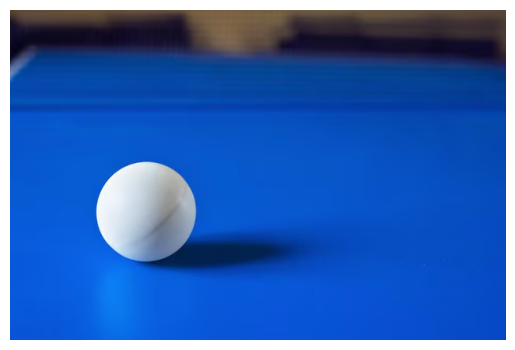

In [31]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """
AAAAHGZ0eXBhdmlmAAAAAGF2aWZtaWYxbWlhZgAAAOptZXRhAAAAAAAAACFoZGxyAAAAAAAAAABwaWN0AAAAAAAAAAAAAAAAAAAAAA5waXRtAAAAAAABAAAAImlsb2MAAAAAREAAAQABAAAAAAEOAAEAAAAAAAALGwAAACNpaW5mAAAAAAABAAAAFWluZmUCAAAAAAEAAGF2MDEAAAAAamlwcnAAAABLaXBjbwAAABNjb2xybmNseAABAA0ABoAAAAAMYXYxQ4EBDAAAAAAUaXNwZQAAAAAAAAJyAAABoQAAABBwaXhpAAAAAAMICAgAAAAXaXBtYQAAAAAAAAABAAEEAYIDBAAACyNtZGF0EgAKChhmJx0DBAQ0GhAyihZEUABBBBBQ2WfBwhFFZS9/yvOSDUcKgNFwLnyonvtFi+5a/QZ2a5dK1fpgl/G4ZJu3yEa+X3UKKp4o53grMlT0TC2PvqbIqilwYa64APino8Q2cPzUSPn32BMu6bOBRvDbxgSHVq8sVxHinxnLumOMj1kJ+GpSMN441qnggvE3uFj1F7m/9XBC4wm+gLlBX2wFSr8aX16EXHbaKrh64QXYB3rK04pOFDRTpokReMNDq0jAFhVfQKRBTLqt364ntR59dLVEWSyBfVOnOqSR1aas4M/o2j1fZl9IAhnsd8EjiALsMY88/1PHxTbjwdFCC4XIMzBI2u9CCFDVjSTMWgzAYcVuiuR3dOhSDsJK2gvaXKEoJj0YOnbilz/DTBgaCKrcn0FPm8O9gXLw+Ir/wnsj8udOP//fpjmHjvUgLEiVoMITYzJjeJAhOJoyixrIbj2232UkGdjxeLfvYo4HuCwJl6qhDXGVcNL4+Eqdads3rzFVde+oRvuGJiseeoIEqYjipnFSiQendMRB4E7GB0y4pOkWQrRVCbtbNYh56VYkOHwcNrWDB5h5RWPwcaX5cTbLx4OhQ0biUbcWZ5ubupVvGzqI5qYkEMiFdm1m82uFnhlhECdoqNLuEzoF8raVM7LK5Lxevnu4ncYZthlmTk+5rp/Hl1t77jnXAK+pIBVfSaUP8seaBW/H+0He3MweC6Ctg+BS6EEeLq+J+Fy2TkCM0ozrhwOT47R94/XHajq2IYHNDUpdxYGew+pwvyz8QB/1w1sG2MOhFP5zm9Wr+HGSuyTrfcvT5a7QxCd1wygOXd3vrtFSMRIQTBsFxpUmCiN1hfE1il1iQPxYYba/HX80A6NxHaF1arZ2qIZHx14g96ECdzgFIbBx/qX5njyKqotbdPZBNCkK34/wkYJLP/ezexoc6tC/Z2LwClkgv3qmfkrDC1+ZQ7CaIlufQlhZlhqCpik3iXD8vItqAsDL5CfnF+MhPYVMkX/qy2bfAxe1eoGqiYXZEeKA3wIF888EKsR8stS5VctCwkpXe1WT2BfEsnsPRwDaBdbpIo/HlkRVOcJXoTna1EW1REoHnnE9c3tai8McAzebyYzqPX9ryEoXr0FQZMkxcq0jyVksWvmTfjB+EeZDELQ3LFRqe3iix5vTbf3fnsg6VbBMkgS+ww6zzu6gDY4Qaqu/bjIhi1WwkMQnI8iJjILpMlb+M7jLPpT+XncSAlfUwoi1ItpRPZoPibkmUYhN20BYzJXUJOc/ywJUtJJTqtHf3aGrVdgHaIA8DiEjrYGyjzyB/0pDhLUFY51LWY6sIg0Oy1hPPJTBeAe7Xk4btlpgfolZwKB12yliLHMBTWdlOQxY4tca2NzLJI1hmo3QOu/cCC2UEHtwok5OeiUmar3Wgijh7QZvwUcJEQ/0pVVZeRMpqVJ6ZoMkL5WtgtKwWCeAkpCPlz+E773jqavowiylITsUQHcP6Yx1WGqDNdr8UgATeI11ur5N81VVjme3cYPgUzGUwx+GIJb2K4R1uPbLB8OJ7M79tSz8USntyYT4i3K3novfd3PAN4LKAH1tiQXSdnSX3fK61779BrDUePPnEuq9epHIovQieO+cpcvOxET1loFpjTjSkCcwjCZMJqQO0F/+xQvmlqMcihNlidNYvNREH1CZJh/A8WSHzIA3erDFcjeA52JNKH79Pu2ntCsPW0B9HwSL7bgqJ34WHaxmXMEOvFiCpfqn5Ddi3J9ugCBIPMXVrOuGJFEuEvRWsmd4ytF2nchc5WwoQRk5Xw+1mLJy6zBo+4zM0bD/RSXMGNkMEBUPgrM8gvpPqveNOzwoF2hHbZwO5k5P2IIok0XtlXZ92w7uI25+NlTsafpmUYfaUCNahk5pI6FCSmEKgA2jyjYZZY9XCQBh+xDdLP6CsA14cqY5Sdi2ihhbiNNXtHlB8MHh9rjGt+HCKt1ek+CF4hgAvBhvKxaxA5XpXfaxLKoeAGo5ASLO0J3IIcea1zQmGmjf/kHR3SD1QjBSn0aNhsIihAOzL6Tr2flzEwQFt57RUKWrKEycr3yZn8ynz3lt+zr2YN4yPru80l1aOQZd+Kkk4OClzrrJl/Gua5FeMF34w3fMbNfFHyk0VRmn5rQYzFCi7nBFvZqbaRzzC0KfXrFNCcl8isWmaJ4/kOPqPmi5JGksnwj3b4OgBcsznlCfjRPVCyJRfRKhNUOq3RRybSWh1MeSFbjObIsa4qaPiG1chUCFySyMXn3/n+5Mk40XGX/vZM3hsPIY+peh+CdNFt06SuUx+hWhmGQjJ8TY4BShkbABmQ2WMVNMnRPTwA3OQ+1Lmk8LyOeiKRXFOBT7mYRbjEYP0g596YjBZAlq8UHfLbutmxcl+fSaj8NNdbVRud7WqigUiM0cMqPVPeLacteyLj8kjNdBSnV5ovVsXEx8mjh5rPV6/tdtppKz4uWUIe583UttU1PdSyksdbNk12FsXHtFx1YwDDuvGZOR7u5aY3jQ3hxedv/DqA+vWuRdFNhi40EDZK9+6xvv9G7CpINIZ2bkhpz8Yh/pdKTqnWoY/etaD/mrSWnW83nMl0OMHuNrh8jczL/XOQiFhxZBEU4ImhC0e/0MVwidZ+BjTQWK3ZHajjPtkNZd5gqeHxcLgY3f1QKwgq5L6WkuH2t1ykmVKrdCCw6vRZLsQop38beZpolim9n5zs2PNNAC+zDQ06gVEvIvlmf7PFwXTd8RAgdeYdrukXeJaO+7UD20bSj+3AIwNIiB0vEtTgApi8in4efm6glWv8Wv4bAg/T/CXZXc26+iGveSa8nx1ujsfPo6odJErJsavCzImRS+RaZoqSsjprT1tPQWMQsadQ3S+OsGsnRHUGJJt7uWQy6t+EW1H1F187lBcFq/Jq0hAALauvBpoM+h57Xo6WHFhUuAsAAqRWErM/1HhzinDYfH1lSjwmn145nNBKf6Tt38i05ZcX/JpJHmX4nCh8/tIgaN/V99hgRKK4JcyE6nn6IXkEqtSZNlwN7qB9QFG1vA7SvdlNkeUk9p2U4hBxrH5S7CFORXlY9J5CalOrX4c3PhkRjDcNGCuU28g0oqDLfRQRaS6svm7nPycb/jqqx0DI7I+P1mRkrdFQCB5VrXhFsgq+vFVUe7/IIUAKyn9YLiW3rFvt5GwxGaj72WsRwSZeJPNOGQ+mRmLHyTOir5MQKNd9suBig6ZFZo5o9J7cBDaoNybTAUmWj5dmRhoKP/+ctfn37MNoHKy1WItJl8j1jV0uhJIQP0iguKh3Cy4rvsSunwCvLdRiuVF+w478DI+1t5s6FyJE9WhF3zLsMOzaBerNuzIuvRjHGAWBmDSE5Cx+RtOzkHiKYIZZIislfc6JX49OQ22T83pdNOGgOeLkxTS0lIh14fbWLpbgQJSe0mjXynXvMhLuOoiAGuCeM8yN/p1OY2/YRHn3pQ6UO8Qy59liqK/Feitgurv+wUK/N40/Xryd2EOMUWEE2Gp/Sd3/2I21R1SMTGtCmP4YJhqIy9fEyH6foHlB9bjVuQ44ERzQ2T+/YXLhMOCCfPUVgqK0MvwsFte2NBtHT5MLFmIlJyP2zXm2OxmHP8LBAlUocZPDcB/7QObXwEWbAGgvz+qSzheBzlyzg/INEWghMnG4C+inavW6tCie26WkVSJdtVRYiVS2/SiblNwezK8jcUcQ31ENEf5OjKGmxO5tE4c/w0jHatDsoSpObks1W6FmdFf13rHNabC2DbIdjD+jEipnZhhHFVRv/U+gKonx0PDkTMSJs=

"""

img_data = base64.b64decode(base64_image)
ball = np.array(Image.open(io.BytesIO(img_data)))

plt.imshow(ball)
plt.axis("off")

### Bonus Question Image 2 : reference as "ball2"

(np.float64(-0.5), np.float64(642.5), np.float64(359.5), np.float64(-0.5))

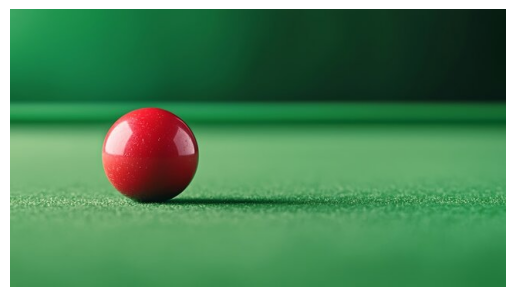

In [32]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """
/9j/4AAQSkZJRgABAQEBLAEsAAD/4QBWRXhpZgAATU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAAITAAMAAAABAAEAAAAAAAAAAAEsAAAAAQAAASwAAAAB/+0ALFBob3Rvc2hvcCAzLjAAOEJJTQQEAAAAAAAPHAFaAAMbJUccAQAAAgAEAP/hDW9odHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0n77u/JyBpZD0nVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkJz8+Cjx4OnhtcG1ldGEgeG1sbnM6eD0nYWRvYmU6bnM6bWV0YS8nIHg6eG1wdGs9J0ltYWdlOjpFeGlmVG9vbCAxMS44OCc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczp0aWZmPSdodHRwOi8vbnMuYWRvYmUuY29tL3RpZmYvMS4wLyc+CiAgPHRpZmY6UmVzb2x1dGlvblVuaXQ+MjwvdGlmZjpSZXNvbHV0aW9uVW5pdD4KICA8dGlmZjpYUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpYUmVzb2x1dGlvbj4KICA8dGlmZjpZUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpZUmVzb2x1dGlvbj4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6eG1wPSdodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvJz4KICA8eG1wOkNyZWF0b3JUb29sPkFkb2JlIFN0b2NrIFBsYXRmb3JtPC94bXA6Q3JlYXRvclRvb2w+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcE1NPSdodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvbW0vJz4KICA8eG1wTU06RG9jdW1lbnRJRD54bXAuaWlkOmMwNDBjMzFiLTljODItNDM0Yy05ZWM3LWVjYzBhZjdiN2RmMzwveG1wTU06RG9jdW1lbnRJRD4KICA8eG1wTU06SW5zdGFuY2VJRD5hZG9iZTpkb2NpZDpzdG9jazoxMGFlZDBjMC1iNGNlLTQzMGUtYTBmYy04YTAzMzM1ZTZhNmY8L3htcE1NOkluc3RhbmNlSUQ+CiAgPHhtcE1NOk9yaWdpbmFsRG9jdW1lbnRJRD5hZG9iZTpkb2NpZDpzdG9jazoxNTcyMjU1NTMwPC94bXBNTTpPcmlnaW5hbERvY3VtZW50SUQ+CiA8L3JkZjpEZXNjcmlwdGlvbj4KPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4KICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKPD94cGFja2V0IGVuZD0ndyc/Pv/bAEMABQMEBAQDBQQEBAUFBQYHDAgHBwcHDwsLCQwRDxISEQ8RERMWHBcTFBoVEREYIRgaHR0fHx8TFyIkIh4kHB4fHv/bAEMBBQUFBwYHDggIDh4UERQeHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHv/AABEIAWgCgwMBIgACEQEDEQH/xAAcAAACAwEBAQEAAAAAAAAAAAABAgADBAYFBwj/xAA8EAACAgEDAQcCBAUDBAICAwAAAQIDEQQSITEFExRBUVJhFSIGMmJxByOBkaFCscEk0eHwCBYzcpKi8f/EABwBAQEBAQEBAQEBAAAAAAAAAAABAgMFBAYHCP/EADMRAQACAgEDAgMGBQQDAAAAAAABEQISAwQTIQUxFEFRBiIyUnGRFUJhgcEHofDxJGKx/9oADAMBAAIRAxEAPwCuRVJjSkVtnjP5lZZMrk+BpMqmysSSRXJjSZXJhkkmVtjSEbDMg2IwtisIArCxWzSlZW/MdsrYUsmVyHbK5MsNYlYrCxWV0grEYzFfmWG4VyFbGkI+hpuCgyFihuEIAgapCEIKWkAwsBVKxQsVhYBiSYwkvMNYkbKpeZZIql0LEO0EYkh2Vs06YkkyuTHl5lbNOkFYjGfmIw64lbEyFisrpCZBkAMinSBJFijBRIAmQyIM8EyQEFbFbGYjDZWwZIxTSjkmQECjkmQeZAoisIGFgrYA+QpYbgBQsU1CowMDIAMisIrLDeKZJkAGGoTIrYRWIUsmI2NLqxPI1DUADJGAAMBAEEIDJAP1I2VyYHISUuDyn4C0lIplIMpFUpBi0kytskmVtlpEb6iNhbEbCBkVsjYrKQjYjYWKwoMST8gtiNliFiCsRhbEZWogGxQtilpuIQrYzYjLDcFZWx2VtlhuAbFIDJXSEyQgMkao2QZFyDJVNkGRWyZAjyBkyK2GkZXLoO+hW2IbxgkiuQ0mIzUOkEYjGYjZqHTFXIrY8mVsrrjBX0EYzEbDrBJdBQvoKyukIKwsUNwKCgECwYgEEIhCECQViMdiMNQSQoZCs01CBAQNIEBAD5A8iepAFYjGYr8zUOkFFY3kKyqAoWDyKQDfAoWAOkIBk6IDI1CMVhFZoJIUZisrQYFY3kKwFYGFgIAQhAtP005FcpCOYjkeU/nlmcityFlIrcixCGbK2yNiNlhKFsXIGxXItKORcgbFbLRQtiNkbFYpUYjCxWy0sQVsRjNlbZadMYBgbIKw3CMRhbFbKsFl0K5DSfIj6ldMYBihYrYdITIuQNgyFHJAAyVYgckyDIGw1ECAGRcimohJMRsjYkmGoCTK2xmJJm4hvGCvoVy6DsrkyusK5MRsaT6lcmHXGCtiNhkxGyw6xAZAQAbxgGDAWDJW4RBAgkBXQIpEASAJkoDFYWxJMLBWKF+YCtQgAMGStRBshQqYUQoQEA2IIB+YoRWahuCsUZilUAeRAMrWJSIhA2DAw+YMiFKB9AsWXQpBGBhFK0DFYwrCgxWEBEAgSBp+jHMRzK3MRyPMp/OljkK2VuQrkWiljkK5FbkDJaWjZA2LkGSg5BkDYMlpRyLkgrYWIBsRjNivzK1EFYjGbEbFNwDFbCxGwsIxJMLYjZW4gsmK+gX1FYdIgrFYWBlbgoMkbFzwIWIHIMgyTIbiByDIu4GQ1QtgbBkVsrUI2I2FsRlhYgGxGFsVmm4gGUyZZJ8FMmHSIKyuTHbKpMO2MEkxchbFK64wgCEK3EAQhAqIICCAUyAICkyBsjYjZVFsRsjYrYWIRgIAQ1EAAjYDTZkEVDIgiAwgYhIBisIrLDZWKwsDNQAK+gz6CNhrEA+QEQNgAmQMQqCSYzfBW2ahYAVjPoK+gagGKMABWALAREIQgW333eBzKNxNy9Tz6fz6lu4G4q3A3CiljkTcypyBuKuq3IMle75JkGqzJNxXkmSxC0ZgbFyDJViByK2RyEbCwjYuSZFbDUQDYjCK2KagGxGxhGWm4gGKw5EZW4BithbEbFNxAPoI2FsRsrcQLYMi5JkU1ECTIuQZCmbFyBsGRCxCNitkYjeStwgjC2JJlbgsmVtjSZWw6YwWTKZMebKmyw74wGQEIWnWIQBCFWAJkBApgAJkA5BkGRWwC2K2DIMhYhMgyBsBYhuIHIM8AAVqITJCECogpgRAg5B1IQLCMRhFZVAULAygMRjPzFEN4p5CsIBDSCthEbKsI2KRkK0ArGFYWAYAgADFGYCIBAkC0+27vkm75M+/5JvPhfhNV+/5BuKd4N4WMV+4G4pcybxRS7cFSKVL5DuLSUu3B3FKkTcDVa5C5E3AyKWIO2LlC5F3Foo2RWwNgbFNUjYuQNgbKsQjYjZHIRsrcQjYrYGxWw3EI2I2RsrlIrcQLYjkByEchTpEGyTJXuBu+RTUQfJMleSZC0fIGxNwMlaiDNi5BkVyDUQLZXJkcsiNhvGAbEk+oWyuTDrjBZPqVsZsTJqHbGEB5kYCtiBkyLkKIMgbJkA5A2DIMgHIrZMi5LELECLkmRclpuITIMkIGkRAZJktKIMkyAEGIDJMigQNkbFbECNitkbAFADZBWVqIBshAZDaMBBSiNiBbFyWG4QBCFEyKwgCwUhCEAYBgYIgEIQD66pfJNxQphUz4n43VduJuZVuBuBqu3Mm5lO75JkGq5SwMplCYykE1XqZNxQmFSFM6rtwN3yVbibimq3d8g3FW4m75LS6rNwrl8le4VyKsYrHIVsrcxdwajE7kK5CbhHItNRCxyEchHISUytRiZyK5SFciuUg6Y4mchHIVyEcg7Y4n3E3Fe4G4NRit3EyVbibguq3cByKtwMhYxO5CuQjYHINxiZsRsVyFchTcYjKRW2RsVs1EOmOKNi5A2LkrpEDkGQZBkUpsgyLkGS0GBkXKBuFLRmwZF3Aci01GJsiti5BktNRA5ILkGfkNRBsgyLkGQpskyLkhQyZMiZJkUHTJkXJMigcgyDIMgFi5I2DIWIQVsjYobgWLkmQNlWEbFbI2KyxDUQjIQBaVOgCMDCwjB5EAFQhAZAIAEFJQogCEofUts/aybZ+xnbfRIehPokPQ+DaH4vdxSjZ7WFRn7Wdr9Eh6E+iQ9qG0G7isT9rJtn7Wdr9Eh6In0SHoibQbuL2z9sv7BSn7Wdl9Fh6f4J9Gh7UXaE3cdiftZMT9rOw+jQ9AfRoe1DaDdyGJ+1gxP2s6/6PD2gfZEPQu0JvDkcT9rA1P2s676TD0FfZMPQsZQvcci1P2sXE/azrn2TH0FfZUfRf2LtB3Ici1P2sVqftZ1r7Kj6ID7Lj6IbQvdhyLU/axXGz2s619lx9qEfZkPRF2hY5ock42e1iONntZ1r7Ogv9KEegq9ENmo549qck4We1iOFntf8AY6/6fX7f8EXZtbeFEbw775xFzjNfo4112e1i93Z7Wdt9Jg/9CJ9Ij7EN4SOrxcR3dntYO7s9rO3+kR9iB9Ij7EN4WOsxcTss9jJsn7Wdq+yIexA+kQ9iG0LHWYuK2T9rBtn7Wdp9Ih7ED6RD2obQsdZi4rZP2sVwn6M7Z9jw9iF+kQ9iG8NR1uLiXCz2sXu5+1nbvsiHsQv0iHsRYzhqOuwcQ67Paxe7s9rO4fZEPYgfSIewdyGo6/Bwzrs9rFddntZ3X0mHsB9Jh7P8DuQ18fg4V12e1g7qz2s7r6TD2IX6RD2Ivdajr8HD91Z7WL3VvtZ3P0mHsJ9Ih7EO7Cx1+Dhe6t9rB3VvtZ3X0iHsRPpMPYO7DXx+DhO5t9rB3NvsZ3n0mHsB9Jr9g70Edfg4PuLfYwdxb7Gd79Jr9hPpNfsQ70L/ABDBwPcW+xk7i72s736VX7ED6TX7ETvwv8QwcH4e72MHh7fYzvfpVftQPpVfsQ70L8fg4Pw9vsZO4t9rO7+lV+xA+lV+xDvwfHYOF7i32sHcW+07r6VX7UD6VXj8qHfhfjsHDdxb7Sdxb7Wdw+yq/agPsqv2ovfhY63BxHcW+1g7i32s7b6VX7UT6VX7UO/C/G4OH7i32sHcW+1nb/Sq/agPsmHtQ78LHW4OH7i30YO4t9rO3+kw9qB9Jh7UO/DUdbg4juLfawOiz2s7j6TD2oX6TD2l+IhY67Bw/h7fRg7i3H5TuH2TD2g+kQ9o+Ihr47BxHcW+0HcW+1nb/SIeiA+yIe0vxEHx2DiO4s9oO4s9p2/0mHt/wL9Ih7R8RCx12Die4t9GDuLPaztvpMPRA+kw9qL8RC/G4uK7mz2sXuLPadr9Jj6IH0mHtHxEHxuLi+4s9rJ3Fvodn9Jj7SfSY+g+Ig+NxcZ3FvoQ7NdlR9EQd+F+NwfaldH4Iro+qOY+pr3/AOQ/VI+88x+M2y+jp++iTvYHMLtRe4n1Ne4G+TqO+h8A76Pqcx9UXuJ9TXuRTfJ03fQ9Qd7D1Oa+pr3E+pr3A2ydI7oA76Hqc39TXuB9SXvBtk6N2w9RXbH1Oe+pL3/5B9SXu/yVLy+joHbH4FdsTwPqS93+SfUV7ha3k912x+BXZE8L6gvcgPXr3Fs+89t2xK5XR9TxXrv1GvsTSa7tnVdxo4vEf/yWNfbBfPz8C68y+npek6jq+WOHhxnLKfaIaZXptRjy3wklyzbR2XqrYqd77iD6JrM3/Q6fsj8O0aGnMIOdjXNs1mUv+y/Y0vs2e9Rnc6J7koyk3iPXLbXTnBwy5s5/BD+y/Z7/AEz6bDGOX1TO5/Lj7f3n3n+37uRlpNLU1GEHdLOPvec/06Ga/UbJ7ILZHP8ApSR7XakNTTRXqbI2TjF93BxXEXjhZXnz06nNam6vDteoza3lwcG3/V9D5cpzn8Uv7L6R6F6V0eH/AI3Bjj+kXP8Aeav91GrtlY5tSntXLTeeDy725y2JvPlmWMGnV6mU2t0m4dPtWOPQ8+21KWcuOOU11+Cw9jlx49anGFPjtdpvuq1FiWfyy5X+TVpPxXKuW3XaZOPvq/7M87U3RzKScrJTi97sin9z6tf18+p5tzy3z1Pp48pfgvWvsp6R6jE93hiMvrHif3j/AC+iaDXaLXU97pboWR88dV+68i/Mfg+Yadzp1Eb6NRZp7PKyH/Pqvg6nSdr6iuNUO0Y1wVvFWpreabX6Z/0y+GfTFzD+I/aX7C9T6ZE83TTvxx+8fr9f1j9nTZiD7Pg8rxmOG8A8avcTZ/P/ALz1cR+CfZ8HleOXuB46PuG0n3nqNRFxD4PM8dH3A8dH3DZPvPTxD4FxD4PN8bH3A8bH3DZayeliIuIHn+Nj7geNj7kNpKyehiIuImDxscfmB4yPuGy1k34iDETB4yPuB4yHuGyxGTfiIMR+DD4yHqDxkPVDaViMm7ESYR5/jYepPGw9SbStZN/AODB42PuQPGx9UW5Wsm/EQfaYPGw9yB42HuQuVrJve0H2mDxsPcDxsPcTysRk3NIGEYfGw9wHrYe4vldcm7gHBg8bD3E8ZHH5kPK1LfwDETB4yHuB4yPqTy1ES3NIVpGLxkPUHi4e4vlaltwgYRj8ZH1B4yOOoqWvLZhAwjH4yPqTxcX5ipPLXhEwjH4uPqDxcfUayvlswiYRj8XH3E8XH1QqSLa8IGFgyeKj6g8XD3DWTy14QMIy+Kh7geLj6jWV8teEDCMvio+4Hio+4up5acImEZfFQ9xPFQ9RrK+WnC9AYRm8VD1B4qHuRalblp2r4JtXoZvFQ9wPFQ9RrJctW1ehDL4qPqiCpLl6/wBNu9WT6bd6s7/6Ovb/AIJ9H/T/AIOdunYcB9Ou9WT6dd5tnffSP0/4B9I/R/gWz2HBfTrvWRPp13rI7z6R+n/APpP6RZ2HCfT7vVh+n3erO5+k/pQPpP6RZ2HDfT7vkngLf1Hc/Sv0oH0r9Is7Dh/AW/JPAW+rO3+lfpB9KftFnZcR4C35CtBb8nbfS/0k+lv2/wCC2dlxS7Ptz5jR7Ps88nZvszC/KVS7OlKahCG6cmoxS82xa4dPtNRHl4HYf4e1PavaEdLU3CHDtsx+SP8A3fkj79/D/wDAv/TV0afbp9BHhyxzJ+fP+p+rKP4UfgurVSipr/pqmp32LjvJei/2Xoj7Rtp02mjXXVCmEI4jGK/KvQ1xcfd+9l7fJ/V/Tej4/QOCOPCInnyj70/l/wDWP8/9PG0v4f7H0OndFelhZNxxvnyz5R+MtLfo+0LqZuvuoS37XGX3L4eOvCPsN9s3JuLaXycN/Evspazsyetpjuuqa3LHMo85/sduXCNfHye/6J1WePUR3Mr2+v1fDu3b5zubvrkpZaaraz8L/Bzuv2dxO+mFrhOKjKUqkoqfDaTX9H/xye32u57puy5TjLc+HnGfn+i/Y5nW3ODnXVNqLXKy+eOVjp8nlZR5f1ngmsIpi1uK5KEZNtQTnuwvu6tL18jA5yy9jal5Y+eOf7l+qeFGMoxXOXJL7nkwXWRUfsb5X3Zfnzx+3TqIxceflqKV3ySrcGmpKX+DJJ5yNOx+pSnnGeF5vB9GEPH5uQ8IvGUs+XoaNNqNTonZCOyyqxYuosW6uxekl/z19DPT+ZNcc+fkfTOw/wANaXtL8O1aTWxlG9wVldvnBSz9vz5cP+h9PHjbx+r5scI8+zi9JqK/s7uc/C2SUId48yom+lcn5p/6ZefR8noS0tnyYfxB2Frfw52hKjWUuenujjC/LfX54fqv7p4Pd/CVi11Nmjun3mo06TU31trf5Z/v5P5XyTLGn8c+132d4+DL4zpo+5PvH0n6/pLy3p7vkV6e75Owl2avaI+zV7TETD8L2ocj3F3yDw93ydb9NXtA+zV7RcHacl3F3yTw93ydZ9N+AfTf0luDtuT7i75B4e75Os+m/pJ9NXtFnbhyfh7vkHh7vk6z6b+kH039Is0hyfh7vknhrvk6z6b+kn039LLsukOS8Nd8g8Nd8nW/Tf0k+m/pJsaQ5Hwt3yB6W75Ov+nfpB9N/QNl1ch4W75J4W75Ou+m/pJ9N/SNjWHIeEu+QPSWnX/TV7SfTf0jY1hyHg7vUHg7jsPpv6SfTf0jY1hx/g7geDuOx+m/pB9NXtLtKxjDjvBXE8Hdg7H6d+kn079JNpNYcd4K35B4K35Ox+nL2k+nL2jaSocd4K71ZPBXep2P05e0n05e0bSVDjvBXeoPB3erOy+nL2g+nfpG8lOO8FdjqweCu+Tsvpy9v+CfTl7RvJTjPBXfJPBXfJ2X079JPp36S7ytQ43wV3yDwV3ydl9O/ST6b+kbyU43wV3yTwV3ydj9NXtJ9OXtG8lON8Hb8g8Hd8nZfTl7QPs5e0blOO8Jd8g8Jb8nY/Tl7QfTV6F3Kcd4S35J4W35OwfZq9Bfpq9ButQ5DwtvoweFs+Tr/pq9AfTV7RuU5HwtnyDwtnydc+zV7Rfpq9o3Ihyfhrfkh1n034IN1qH3H6evRE+nR9p7ndondr0Plt6fbeC+zo+0V9nR9p7/AHa9Ad2vQbJ23gfT4+0H09eh73dr0B3SGydt4H06PoD6evQ9/ukDuV8CztvAfZ0cdAfT16HQdyhXSvQtp24c/wDT16AfZ69D3nUs9Ad0vQWduHg/T/hE8AvRHu90vQndIbJo56zQpRfBOx+zJ3a2LrhuslNVVL1k+v8Aj/c9rUVLa+DqP4YdmK78R1Wzgtmjo76WffJ8f7/4LjE5zGP1foPsx0+E9ZPPnFxxROX9/bH/AHfQuwezq+xOxqNBXjfGKdjisZk+obrEs56s06uzls8rVW4UpJeeEep4xiofpcIy5c5zy8zLPqrXhSf9jhf4mdvS7P0T0GnnFX6iK7xtv7Y8+nJ1PaWsho9Lbq7mnCEd0uP7I+EfivXz1XaN2sv1E3bZL7ZR4xjpj19D5ebOofrfQfT45uXfL2j/AOuZ/Edqsh3tM3CuL/l1yTy1lptL0TXOTltbbGM493JvEVlv180e12xlJwhZXZKuLX8uSeyK65f9f6N9Wzxb9Vjse/RtwxbdXem/zfbGccZ+d3T4PgnzL+hxyaYeGC+6MqZKUFnlppvOX5ft5nl3S5Zddb9sl92f34x5mK2Wc8/55N4w+Dm5asbIzjJKcXHdFTWVjMXymvhoqTzl87M9Mg1V8r752yjXFzedtcFGK/aK4S+EJCzbLrx5r1O2MPKz5b93t/hrQeN7ShXNNVx+6b+P/J9U0GpcrIxjw28PC4Pmf4L7Qjp9VPTSx/Oxh/qXl+x3vZ9u2WcrldH0yfXxR4eF1uc5ZeXX6jsnS/iLsazsvXwUlNbqbU/urnjhp+fp+3qfGIeL/Cf4mjHV17Z6OeZpdLKJfmx6rGJL9j7L2NdNaqi6Fv8AL/L3aXm31/8ABz3/AMg+yIW6Hs/8T6eqO2vbpdRtXDi87W//AO0f7G88bh4/LjjzYZcHJ+HKKe6tHXZXGytqUJJSjJdGn0YHoF7UYv4Q636n+BtNCct1uinLSzfm1H8r/wD4tHWPTr0PNm8Zp/I+fpp4eXLjn3iac69AvaD6evadD4degPDr0Js4dtz3gF7QfT17TofDL0J4deg2Ttud+nr0J9PXov7HQ+H+BfDouxo576evRE+nr2o6Dw6B4dDZNHP+AXoD6evQ9/w69AdwNjR4HgF6E8AvQ97uCdx8DZNHg+AXoDwC9p73c/BO5+BsaPB8B8E8B8Hvdz8A7n4LsaPC8AvQHgF6Hu90vQndL0GyaPC8B8A8B8Hu90vQndIbGjwnoF6A8AvQ93ul6A7peg2XR4fgPgngF6Hud0vQHcr0GyaPD8CvQngV7T3O5RO5Q2TR4XgV7SeBXoe53SJ3S9BsaPD8D8A8CvQ93ul6A7pDZdHh+B+AeB+D3O5XoTuUNjR4fgfgngV6Ht90id0vQbGjw/A/APA/B7vdL0B3K9BsaPC8D8Ingfg9zuV6EdKGyavB8F8A8F+k93uUDuV6Fs1eF4L4B4L9J7vcIXuF6CzV4Xgv0gejXtPddK9BXSvQWmrw3o17QPRr2nuOlegvcoWmrw/Br0FejXoe46V6A7legsp4fg16EPa7lehC2tPpu4m4p3E3HB6qzcTcVbgby0lrcg3FO8G8Iu3ImUU7ybwWuygOSKt4HIFnchcibgbgizJMor3A3BAtW9qC/wBTwfQf4Z91v7VsisTdkIZ/Sk8Hz7TNPW0J9O9j/udFRq7Oy9VO7Q2qKbTmpPif7m+LOMM4mX7H7KdN3+Dnxj3nX/MvoOsniLfqzxtbbhNeX+5z1342coqGr0i5fEk+Mnma38baBJ74WPDxuXR/J9mXPhPzfq+n9I6mJ84Mv8Te2PD9nV6SH3Susxj9j432xqFfTZhxg6IuS38b1lLbFf3/ALM6v8b9taTtLtCqcbMVKtxgmsRc3nLl5qKWc45fCXqcD2rdCyKrhfKco947ZvdtxlbWljK4z/U+Lkz2l+89K6eOn4YxmKl42uvUZWxrlKELMJxT4aznHzjj+x5WrsjvahLjjDxtL9ZLO7bnGeE+p5eqmnZLa5OPRbuuDnjD7+Xlj2V6ixSm+Ix8vt6L5MNs0m8PKXR+pbK2UJScXhtNf34Zkskd8YeN1HNSTlhtJp/KJXNrdh9Vh/sUuTIpHbGKeXPNct+mtlXYpRk4zi00fS+xtXG/T03Rf54p/wBfM+VVt+vl5nWfhvtnTaTQwr1DluhJ4ws8ZOvHlUvl6iNsX1X8N2b7VKctyhN7cLG1/wDrOi/Gei+qfw47e0n53XoZXQyuVKDUuP6Jny7QfjTQaeW5K2T46LH+5s7Q/ijbLsfW9m6PQVpaqmdMp2NtpSWHhfsdd8Yj3eTnxZzNxCf/ABw1TnDtvSN/b/JvivnmL/4PrTXJ8i/gHWqO2NfCPR6RZ/pJH1ts83km8n839ciI67kr/ngSYFyDJh5JngHGBWwZAYAuQZCC8CkbFyGUeAEFzwEFgBkGQhuAC5JkA5AK2DIQzwDImSZLAfKBkTIAHygNoXJMgHgHBAAHgnAuSZKgk4AQCcEIBkEJkBCg8AIQIgMkwAA5QAEAgCAYhEYuSMBbZsGAOAMIArwFsUFo8A4wRisqWnBAECW7ncTcVbgbjlT0rW7hXIr3A3FLWbibirJM/IFm4G8ryTPyC1m4G4TJMgPuBuEyDcEWbgZE3E3ANVPZfXP2zi/8nodq3Oq2Sb4l0PLlzkPa9kpuFiaxOMeW+E3xz6cnDmmqfvv9P+SJ5+Xhn5xE/t/2w6/Vbls54X9jwu0dZBwrcFiceZNLHOf/APC/Uzm7r4z3KyEW8OWOV/75fBz+qcpUK6VqqhJNKby+V6peTfmzlGUv7Jw8eGMKu0bpXWNSxnOyaWM5y8cdepzXaVrnZN2L7nLl/PmX6u92Sk5ySk3ltr1fXg8u/UdzdKLcZxjuj54a88eaydMfLfJlOMUxauUrI2SUPtj90tq4jnj+nkjytVNTm3tiuEsJYRp1Fn2NZec888MwatwjbZGuzvIJtRntcdy9cPofThDy+blUXS3cNvC6Iy2Nf2LdRJRslGMlKKfVdGZJy6neIeJ1HMDwGOCrcybvI6U87veWiLRdCx8mNSGjMlO2OdvQrt5L+9j/AKenHVHmQtx5l1VmWZpjlnw+wfwJrctX2jqPJURjn95f+D6g+pw38D9E9P8AhS7WTjh6m7C/aK/7s7hs4Ze7+R+p8kcnV8mUfUABFb4MvgQgmQpgMKTIMoCChbBlBAAyNithlGADkvUGQyJAZIUQGA5FyREwDAcgyUTAME3EyAMADkjYgAgMgAJCEKkIQiCggYIEmAoJEwRBCBjBMBIAMA2jEATaDBYTAFWBWi1oViEVYJgfAMFZI0K0O2KEJgGBmAMkwKy0RpFQmCBwQFusyTIqZGzm9AcgyK2LuBazd8k3FWSJgtbuAmJkKlkFmyHcVthT4BZssAjmkCMk88gPkORcitgWLkXXpWdk2xec18pryT/8/wC4sZYDGxJtS5hJOMl6p9TnyY7Q9j0D1L+G9fx88+3tP6T/AMtxXbcNTVRKd7ctrUfzKW3Hk1nKxk5vX6yUq3Q5tQhmUFjOW+ccevqdR+JdLDTu6uU7nCMf5bcFKLTfrlOPl68nEa62TrS3t7Ivam+nOf8AufLjF+z/AEf03Pjy8UZRNsWqtblhNLOMPODzNZJblGqcrHtTl9uEpeePj5LtVOHdb+8e/KW1x8sdcnnam1uTkscPqlx8ceh9XHi+bqOVnvucopOXCWFx5ZMNs/kt1M8zb3J55fGDFdPl9T6cYeF1PPEFsl1M85BnPyKZSO2MPz/Uc/kzkBSKnIG46U+KObyvUvkKkZt4VMmrvjz00KZv7Gps1etroqi5TnJRil5tnj94z61/AL8Ny1Wtl+INVD/p9K8U5X57PL+3UxnWONvP9U9Rjp+nyyj3+X6vsXYOgj2R2FouzI4/6epRljzl1k/7tmrJXOeW+Rd/HU+R/M5m5uVuV6gb4M7tGhPISzsGSuyeEKp5QS124GSlzDuWAlrGxdxW5iOQS1rkK5FSlkDngM2tImCEsoDlgsKfJMixe4E3tRQzkLkRTTDGcWyMrEJNjOSS4KJz56gk6YyZVW8pj5KQYGQZyiuU8PkC0AneL1JvCHIiRfBMoCBTEkxHNrgJa3JCtTygbxRa4iZXCW5cBziWAWsIDdwVynyC1oMmaVjWeo1cm1nIpLX54ApIrlPgpdopNmptCNpFCsk1lEUpSbRaS16aaFf7lKk45RN7bBZ31FyOsbSuSy+AhWyZEaaYJSwGbWZEyLGxNdRJzx0eSpazJCnvGQqW6yuT5zhBWOeSvbByce9juQ8a69r227pLqkcnpFlJNPAiUvIiUot5i8BVilNVxi8v1CBulEVzfXBba1U8XdfJebKJa6vbKmdEoWfK8gT491kJOQXJReGLCdMaXKOXLzK2pahZr6Y5+ALe9hjqL3jedqyiiGlfd2SVvMfJ+Y+jdkoxioPLeOfMEK7p2Zxhoap2OGUmjddTbTZCN9WHPoVaiEoT2R/N6BdaU12PLyWRnl8FUYyqsav+3PqXRhumo14ba/oEiFcpSzwgJtvDHs/k2LdiX7FN18XalBcebB7Ku2NF47QSpSTsSahl44fVZ/8AcHyrtuC02obhBQX3NRklKK8v/ep9arthZc4RsX9Txvxf+FF2lS9RpZqNyWXCKX3fK+TlOHm4fv8A7Lfayekwjpepn7vyn6f0/R8Y1s47pNJRXonnH/J5Vtjy8PB7HbGjvo1Eq7qp1yTw1OLWMcHhaiTg201w/wB0+f7H0ceL93y+qYZ43jLNbPqZbJ8Me2XV9PUy2ySWD6cMHg9V6hE/MJzKZS6iznjJTOw7Y4PG5eqiVrkI7EUSs6lbsR0jB8/xVNPeA7wzd6j3fwR+Fe2vxh2qtF2RR/LjJd/qZrFVC9ZP1+FyxOMRFyxn18YRcy1fgP8ADmv/ABZ+IKuzNFFqKxK+5r7aoer/AOD9Rdndn6XsPsnT9l6GChRRBRil1b82/lnmfhH8NdnfgzsaHZnZUHZJ4lqdTJffdPzb9F6LyPV1k5qEbHxnyPO5eTefHs/K+oddl1Wdz7R7B3rU8S8y5x+3dngyyUpqEpJqOfzYEsc7JTrrsW2HOTk866WWqWftGrk0V1WYlBWJpNdSyKjZKShJYj5lhIgttyzgisQKlXbL+XJPbwLbFTUoRajjzYDuyCXLK5WNLpw/Mpulpa493K3+YWWLfpoyrmsfLDJoXJ8NoNjaXC4KVS1bFuWF5iaq1Rti3NKtPl5B8vK6E9r+7gucMxz5FFu1x/M35przKtRfZVpVZXmSbxgURNNcXGt8yJqZ1qGU+pllNONCnFxlLqXW6RzmoxeXLpyVfl4NVJqG7yEna558hNR/J/lqWWuvJTKVi2p7UpdBTM+GiMZJPJUozy5rOPQujZCzbXXJZXUz2a2NdstPFxf6kCaNZZNLgonObfPXPQtpvqpthC+abn0RXrbKp6v7ZqCXVFYn2tt08G4cy5Dj7uTHVqN90lC3dGMei9RatRZOqX5sy6MNbQ3Qsip7ZcE1FEpQ7yCyvgxaZzvhJWrCj1kGjtTbTKjTKVzXXCyKWJj5r6K+9TxlYC1tTjL+55+n1GslZmEHFt9GjffKx6eKnU4WTlti10YZiYmBe5RUvID5j1M9l1lGmnDcpW1P7olD7Y08K4pJ+km0Gdoj3anNxltb+Ro2KUsFK1dV2tjsjyo5aaNGpt2umctO2pfa5QBE+EfL2oNai7NknhmaWrphqLK5P+ZBcIrusnKHeOGJZ6oJtDZau4sSzlMjnw2zzO9vlb3invwvyI2T1Ku08ZV0ygotKzKxgJGVrdNqYubT6Auvj3n28/sJre7025RrbystmS6+iuFc6rIynLrHPQE5U9C+Oa8xf3PyKa7LIRacRZQsuhCzT2pzazKLfBW9VOmMlqMKT/K2gky0d7KXDKrYSi8rLTKY9oRurlFKMeOpv02t0kKVOUvuSw8lSJifmohYoQe7hj02twzFZKbqbLLY6lOPcWdGxNRqJ6dJ017lH8wTavdoducqUWpIEcxTbM3jZy0stRKibk+FhcElO+2O3ZhSWcik3X9/CKct3QTxkWvtabK6qp1wnK+Gak+eR76NO/59FcoKS4ivMJcnqu38y4EsthKeE8mOFk51N1wlLD+5LyNEp6R0zdNU+8iuM+bCRlYSi2/sy3noPZCyuH8yOF5My6W6WosrjCSrm35npW0XyhOu6yG6HkUx8xbErfggPsj9rlyiBLl0Wqts7mq36co23S2KEG3LK6vHoboTro0910FQm6uISb3p5XK/uupe512xq0HZd0pwjUoOceJYjyouXtzz0/7mWFz7Ov1c5KnUaiWIQujLDxLrFJ5UVn9+i4OPl62tfNX3muurTVU1OVHfxlLCrUfVevR8fDH7Ru1MI10aVqdKipS1Mo7Iyfx/sPPV3S7EyqfDK2xUyjBua5WJTjnO1/3T54NFPaHZUu2a1HRSxU1GzUPMpKSWFJRfRv1/tgpGMe1vNslZJaa+U532zt7twjDCjLyW7pynk3dpabVQ1FWpu0E22vy9Wop43NLoueG+vkedPU6VWeF0+klq7I25pssnKDg10cufu4zxleeeodbq9Roa66dRKMtRdZCyFMpfy8LKw1zhdPtWFwn5IJFVNvVcYX0apafUUVSoo72NSjuss+7DSXpjl+iMVfdaTRVWz1Depv3SUZR2QSXl8vHJp7Xs7nS3t9oOx9oURtc6nGM6vu++P2JJ544a6dTPoe09E+2dRrtVPvIzgu8g39nomljG7HOEksvAbmItRDS6q7tCHZk04aqce9i+V9uMpY6Yaw8/JdGGpqVctRBYWVHY8uTTxlF2l7TdD7zTO6+Fq/lw8W33TfHVNPbjrHnPwUd73mrohGyENPC7FtlW7vK1lbpOWW3lJPC6MJrjXuGn1Ou1eltlddQ7JT7uuuE91lbz5obS6LW6edt+sc8VpRbn9rjKTxHr6kjbXqIa+WjgoXrULvNQ04znBybSTWI5b5bxn+w1mnrs1ds4a67TaW1QnOyUpWzVijztT5f3Z6vqIWMf7jZPV13XVarRudta+7p9qxnJKVLurbVVY5Vwxcm1Fwb5S5836Fa1846/W6rw/faeFbjGd1LdlrWNqbUlxx/TlFnZna/Ztup0+m1mlohS5Sg651NwhHLacW23nLw884S5ELEYzPuqzPSUSjdpra7ZNLE1lqT6JvyRfRVTdq3DUTjRZPMHGFbahJf6W/Jvko1eo0V86tT2t2TPuXclc6ZPdCEeI7fKOfTlfsHtKWqop1WtphTLdZTZVDvMJespY5lJ4TfX4fUGqT7MdObbtLbTZhyjKeFHCfqi6GnnPw1bsUbrZ4i4JtP4/wAos1Wuuvq11up1OonJwhvdMI91KC89rw1148/t5z5ZKJaOM5T0VEroSom665Sadbw8OMpNrc393PmwumMT4eb27+GNL2p2d2hf2jG7Qzpfdyti28vOMNLqj5D+L/wNrtBS9RpFHV6bftlZXLft4zyuq/yvk++aPV6p6++1K6jQ1QlCKcluuWOFNS4ynnLWM/Bz1kdRGdVOqjGXZrh3NM61962uTbsrjH7svhPpznHHOsJp9PF1nNwRXHl4fmbtCEtPJqzGUsNxecf2PIutiptN/s0z9Fdvfw57H7QdtEnDTyt7uUJ2XuyyL53ycVFbM8cPOMeZyms/ghddfpFX2rB12pwcnu2w2p/GUsYw2uX5YPt4+bCPxPpw9SymPvPi87085fUplbnzPrtf8FIqjT6jU9syrr1FjVW2hycoRly0njyysY8uOpjv/hRVRZqKr79XFeV0Y4hB78JfdjdHC65Tz8de8dRxQZeoYfOXypz+Q1Qstltrg5v4Pqmj/gx2rdDUX9/TChQbq7ya3teqinl/HkVz/hR2xRGbc4urbGVdkJpxsT88+X9n1NfE8X1c8uuxq4l4f4Q/C/4e41v4t7bVdUXxoNG91tn/AO1n5YL9sv8AY+vaP8e/hPs3sqHZ3YOgWj0lcMKuEcKP6s+bfq+Tgbf4V/iPTODlQ1KyKUIbsd4+M7V1wsrL88Mqu/hr2/XXbbRW7qa3sk1ZGUoyS5zFcr9j5uTLDk/Fk+Hm5Z5PfL/Z9Fs/iToXXKqOohD7E+VzJjR/iV2S9LKGoipXxScZKXD+D5rV/D/tadEpuOIxi3ZZLKjGXtX6v39S63+GvbNShG2W2ycN6jtcmsdV9vGeVxycu3xfV88Rj+Z9Cu/ijoLtNGiNbio5UpP0+DFp/wAddmae5tap2wfLSWM+iOH0v8O+3dRqo6PCjqHFyrhnbKzHkk+r/wB+Q6r+HXbWn0teoyp1Ss7pvCi1PPKcW8+o04vqk4Yz5nJ9Cs/iF2ba42R1cKo1RaVbWXOXlz5IyP8AH2jnCzbcq3JZcfRnz/8A+kdordKd8E4xcmlW+evGcYzxx/6wS/BPasZVfmlCzGyzKxJcZx8oRhxfVJxwn+Z9D0n4001MKktVGqqWXOTXKw/L18irUfjjSLbJ2Scmt0ecOSfR4OBj+DtXK22Fd3eOKkkpxa48pcen9v3H1n4H7R0V0e8uU3OClxLpno8r48i6cf1TTCvxPo1f460NkIaiuuh7eJqUuW/2JpvxpoZXKy6KjFPPdpvC+T5p/wDTtZHUSg9StseN6ksZx8/8Er/Czaju1mohJxbT25jx5eo04/qmuH5n1jUfj3sF1/YrLJRuxJxe1OHrz/Uqo/EvYteplVK1Xq+T7tqWVHh4WfVvB8w1P4Q19GHdTqqK+7T9dz6cvyy/Ien8Jal6K65amUJVxWYyfM+eWvjoiaYfUmMZ/mfRtN+Mez6YPF0oQdbk1JbsSXl+xp7P/GGjs7x3Nd3t319PLrn0/wDB8zo/C+pslsjrYSjt3qMnLDfTHQMvwzqYxXe6ideHtctmcvyXBNMPqxERH8z6TqPxXpb5d7Rq6YVuKcY55Xk/2/8AKKrPxVpLHXfLWWQkoNQUFu5+fQ4B/hzV6Gyi2vU7e/Ta2vLis4xjP+/I/wD9e11DdTmt0U22/wD3oNcfqkxH5nfaP8RVT1dNV7ko7sSWfNrK/cMfxHC2U7owr+2xQhGcuhwlXYuq25nfdJS56YjnBZp+wO1lFucHGqKUpKNnM030b8njKJrizX9XbLXafWu3df8ASnTGXeKx57yS8o/4Eo7ao003Rtc9RY1GMZwy4P0z5s5R9i9p1ZcHXKXP2uxP7flea8g6TQdpztmo6yvLjtjBt4TeMv8AfjHyTWEqPq7nS9o6eWhS1eprrud2KJ3wxVx1i5eXGHwY9H2r2dF23auycXuT2QxLcn7cZ9Gc3borqrqlqJ23xqeyahY8zg3+bnKT8ugq0soy08aJ3RsX3WQhLrNdMZ+P+SVCzX1dbLtqnR26qiThWmt1cn1lmOYr1T9V6m6zWdp6SqPjZ6emO+EeXlvck1t93XDx0w8nGW9kzUdO9LqbFKEd03KMUt/Xhrr5LJNRpb/DVx1V2pulKblCUpZjBv8ANnnzf+PkawkTXzdhXr4Waacd26xz2UwhFp2t556GfT/iKzSXd3p6K5Ss2pfdhQ4z93pnl8niaejV26+Hh9bY6tr4U5Ven258lnlYK+6teprsulVK2jE5bo47yectyx1zjp0wWkuvMS9+Ha3aWq7SUN0aKbG9imsRzzyn5rKJPtTV3U1yptnOdO3EUsfmWc8+XDWemUc7B2WxmlNWOU1OyPSOE22orouv/g36PVa6NUqtDpLKYyrnXe024zi22o88Rwm8bcdWZpImJ95e/o9XSrN99dkL7HLdu92E0k3w+Gs88ZXqjDRq5397eqId3Gae2zjnOHjH9P7o8q/SyunRcpVznCCbzXnc10Tfl0xx0XQOqSu1Fk5woqhKTkty3Sc31bxiPP8AYUzlMT7Olv7ejp7bqar6ZRm064QranJ8JxeVwuqXrjoXarX62eqWl0WnUlBwrcZzScJybW15/wBWcrC9DwtHo4xr8RZCq+cXmdm5OUm8Z4x14WH/ALmOOi0lteqlTdOqcZZgnY8pt84XGf6imt/6vXur1K7RjTbUoWWWKMmpqWW8c/CefP8A7iau99xS1qXU3vx3i2VyUcflcsZfwuTz4uD7Q72qV9VaW2KprTlSsPo315fn5Nm3WU9/pqrLI95PY97sbkrLcvEnF8Lh4whTFY1L1tFrqdPp/Fz1Wlc6p7LIQUnhtPEm8Y+MLOWUrtXX6i/UdlLwydlkXJxkpSaccrbjq/PGMnldm16/XzlTC+UfC03KyOWlOM22157v6+iKtN2cqdJqb4b67K+77qS4shzmTWP6EpdvEU9d6/VRrjW9bRbLDhVFNfzOcPOeY/Gef2L9Q+y413KcaKdU2klVmcalJvDbWVJYT6Pk8t/T6pRs0Vj0+oqUpqzu1YpzklnLkspZXHkn0wHsjfCyGpjqIx1Oe8cpSe7cm22mumcvgURlifvrdH2cpaiXc3T3Qdc1iax+nqly+X6M2aeKdGn0OpjZZqHe91bfOeiWemPPr5syuNENFXVfRKUq5uzTT3tQrTbcsx/1S3c5bbGtlf2horXdq4eHhY2obtrk354xh88+oiGbxj2enol2XDSXRVsaKVY6lfY1OLmuVnHKT45xzkwajT6d9nVTplfdcl/MVabjGSzldOnz/bPJ5t3cXw7nv7ozhXh4m1HOU0/Xqlwa9LqaVqoTu0Glsrsi43Lw+XPjh5bz154axlstEZ4T4ld2nqtUtNdprkq5aWiMrK/yyhl84j1fC6+Wc9A6+On0c/B1PtDU32VxsqjCUJRlFxy19rbysPj4z5gjrq9Rr5a19l6buYS3WLu3FS8nlRazn0+EVz7S0U4XRq00K9NfFKahTGDTi2000srPGcYzjnJKSZw8+Xo6XUbdHpJTbpVkoqNlklJOOUnnbnastLPqZ6FbHtG+u7T3QrxiDshOK5b2ybxjGU8dM+WSpa3TvQ06bSPT6JxrcF3UZRVuZbvuinh/uU6HtCfeXae/T0X6SxJPSXRbqWMvcs8ppvKS48hFreHi5elGF6ld2fW7O8nlutYk20s448/LHrwV0+Lr1Vdbu09mlppja7d/EIyTag11cuMYWcHnX4uhSp2d3rKqlGp19JNJ9ZLDzzhN54wvIrldctLpKp6iyy3T7mlVJxUc84z5/Oev7cFpnbGGrS9oPs/XXVwq22zr3uuyf+l85H0mtou1kadXqO70s4N99V933cpYz8h0M1fG1aWUKbLIKUndSpzjJdVF+1rhpJcGTTVz0V+ntp0cFKLaxvc1BN8qKl0bfL58yeUuI+bdpVdodRC2WndmY4rjLC75qSjJdcxabxl+fBNDKT1Wq0usjPN0HCEk+Kp5eIt+vH9hbNdqtHbbcq9NVe7dy7uOYKDeWorpy/VN46M86axrt9EKXR9trhtUU5xeUnnrz59RS7YYx4e/VXitJ6uNLXDrnXlxfpldSHl00dnX1q67bRZPmVdUYRhH4S8kQnk2xdppoW1WWwlqIxh+nhoz106aW+mxycX1mNLTZk5uf7/JXv7uWH0Zh6czTTXCjY6abrJwWH90ujJqp1+JjZXtrm2tzXmzPXJ17n6g8NG/78tPy5KsSv7RjGqTv/O3h4XmJp5abVXKdtEXDHKa5AoNNQnysh1UVXDdXHkQq+251wnDTxTjJYw49BXCCdUlTBShzJ4TUjLC2ydfHDGrdzWJttA2tKKqNPqp2U7IKfVJcIvrnFanv925KOIxijHdXJdOvmXaT+VuTfXowYz5Hx+os1Eo7UoY6Y8/UNl9sdkliU/Lngob/nNpvBZtbxL0YXaSX166W53TzVJ52Jg1UGtLCmD2bnzjqHVaubmoJ49X6lq/mQU31QFPeaiOlsojBzrklzJ5yzL3LreYRcZ7k3h8NemDbqLpRwkPlKvOOQe7JbqralY51/ZN/lfRGrVRs1HZFctLBLEU5ZfmV2OOoi01jyLqb3TpnSlxgqworSp09TU8TS+7Ms5Zs017clsxGMk1JZ4Z5MqZTcm5PH7j6eFkLE90mshIypssousc4uMbLZP8+eiEuqrjp4R1Fs1fCf2uLxx6FzlKMt8Zc4MUoTtvc7G28hZpq18JK6u/RuFT6bZPKX7LyyLtp2ui2iiasSU8xyuueCx11zitzSRjvk1Zti8Y8xCT48vR1dNc6lm+NaUVFLGcJdF8GaVN+qru0z1MXTt21Rz0KLap21KUm3FCJWQjivhAsdFXqdBa4anU1ampV7IKUdzhF+Sz0JGUNNTfp6FBwtmpyk45b+Bu8jBJcuXmWVRos5sjz1KkPJ1cH3SpjpKbqt26MbFwmb076tH3cW+8nLc9jxh4wab1FwahFL+hVRPGHJPK4FpGNPP1Wm1l+2epocXFKKkpcvD656lWh006O1HZKXe1yeVGyW7DfU9vUd9al3jSinwZLEqbN0VnHPQWk4+Vc9NS9U+7q8O7H96j0l/Qz6rS9xrKpQ0lUnBYjLaenKXexVm1Jj726uYfcha6xLwNT2XN12bZxjbNtycYpdfJmB9mvTJOvNjz0lHzOhqrulZOT4JKDUXLlltznCGKrsqrU6SU7dNCU2uZdOTDquzNNBV3rSKcaltccv7j3K5ah1tpYigO7ja4JoWThDxOztPGSuuxODnJpwb4aMN/ZyVu3URk4Z+2KWDrFVGKUlFceg8aKrpbprn1Fp27cz2V2XTfObdDUor7c+ZRHsyu7VOq1qlQ6JPOTrJUwqy61jHkjNCiErnOS5ZbTtxHh41+i0mhrgqqI3W+UpLODNo9LjT3xnTlyfH29Tq7dFp5x3JJNGeNKhNPqsi0njc+9BqNTGutU7IRS34XBR3MtNqVVKt7IvOeuTsJXKFTrjFY/YqlVTbW3KKTFpPFDmNJoNPrtdOd0JRrXEUmXrs2VFdq0sUo543dUezp6q60+EOpVxbivPqIlIwinNabRVLTyn3cpXyeORXpqKaY93Q+9i+Gl19cnRyhXGEpKKyzLXtjNtx4+C2zODx6aYQri5qak+iwWOFfewqUHs28pvzPe08qX+eC+GV2aOiyxTSimS07bw1opvWQqnGUKc9V/ua56XT6DVSxB312L/Uj29VGHh1GEVn1MlmnlY4uS6Be3TzJ6Ts6vF1UFCeOIvoLVpbLrNsrn3Oc4Swj0r9NW21hZRroUI6ZLEVhFtNPLxrqKITlGtyhDHp5mi7SaXUdjwp2vdGWc4LXXGdze0vsUYU5S4+RaRh7vP7K7Pblt393THqvUtt0+mquyoRlJP7eDRGxRhxwVXSW5ShjcEqIhR2lbfXpZQ2RgrH1ivIqstndoVXVBykvM02Xd63CxcMFWKuINYYc5i2Siq7T0uOPvs46FVOj1dVU5OWFJ4f7G3VWTk8xl0Nuh1SlQ4WRT9XgJGNvJscX9kUlFYzhdRNPprPE2Sr3ZksJ+ht1zrTxHbn4RZpre7glHG5LrgrOqvU1qOnjp74NqLzuDdRTGncpxjF/lJK2y9yUmG7SylTjJBm0d6hNwsrhYmvzbeR742xi5KcY4WIY9C2mquCw1yiyca5R5iIZph0i1tUlOLTjL82ejLsVafN1sIyUukV0Nk7aYUbFFcIxTsrvjtkuFwglUsjqtPKEnCiuClw3jlFOonptUtq+1xXDRoVOnjDbFLDQktPXBfy1z5AmJpX2Slp7HZc1OC9fIfVT08p2XVRUk+cItpoU65Rl0Gcaqa+7i0s9QazTxZX26rVLbilR4TRttVircFqsxXV+pfTp9PiT4fOVgzaipKLUY4z6EhiYlllbCtbfzcl6ojODsSWevUmm0SfMzRVS4S2xeRBq8uUtXGTSohhEPbWUsYRBS6ughZP1yhZKUpZBVLCYXYkcnq2tUvtwwxm4LgzSs6kjPgLEtDscpZG3uSw+EUQfI+5epWokYNRk8Isjc1wZ21yxVIETTXbPdH0K08LHVFSlxyRSZDZqqjF88DtLGOMGWFjQe8DUSqurzPJfVNqvAjfHXkEH5MJErJQU1yPsxDqV7sAdvyGroUsPoN0znoVu4rlN+oTaDtLlLgaMlGPOGZ3MWU2ys7NffOfHArnGP7mVSfqCTbBuvncn1fQzylmWcAcfMEYsrMzMtdN/2bGsoPfLo0kjKk0LJMLvK6bjvzFrAI2fe+MFOAp8BNmyrUcNMfvK+jRhglkeWcZQajNsnbFJrOclLw15GXLfVsdSaQN18ZxikscIaV0cGTexWwm7RK3ngkZ7upnyGLwE2lsVkY1tIpxl5KlnJYn9oXaxlPHCIpPHUTAM4CWtUmuBZSx0Qu5iyy2WCyzseeHgkJNeeSbUFRSCWdzjseVkyueG0uhbPphFG3kqTKyD4bwJCObcsZcLBE8BBlFY6lbgn0Q7JFoIrlHHkRPlfBa8NCpIAxm8cvJbC2Mq8eZmk8cErk8lLWWJyefMkE9vIf2CgK3xngosUpLG5tGi3Elgr2pRwGJZ5tvOBa65Lls0xik+QtIOdM9iSeXySuMW8tcFjiRLj5CUbZDH5UDbGKaiMunIsseZYGWyve22uB3iNfC/qWp9UkJZJflDFJpoqP3Yzk1ysWzK8jHW1FDzf2vkETSmUm5ZbHlPMBYpMWSwGVVybXUSuqW3MC9RyuSytYTxgJSuquWDVhQipNiLG0HVNN5ELEH7xJSkuMmeUdzzyNLOMDQeEAdNGOGibYpvJN2HwK5eYRa5JRS4K7Es5iwKazyByWQo4b8iB3ogSnsqWANgAc33iuQxeBSJgWbgp5K85CmFhY3wJ5gyTIU6kNF8YZUmFSIRKxsXPyJuBkpa3cFPBTkKkQta5cFbfIu4VyBazcK5cCZA2Es+UQrzkZFLNngCYGTILPkiYmSZBazPArF3AcgWbABdwHIFrEHdwU7gqQLWcEyImFAtCEyDIRAoTOWRMotTGTKcjRkKFmQNi5BkUtmyTIoGwh8oDYm5CuQBmyvKQJSK8lZmVjmhVMqckJuFM2078gyZ1JjqfAotapB3cFG4ikypa1hTK1IKYW10ZLAdxVkDlwCzuQknyLkDkGZkdxN5XkmQys3cATE3CuWHwxCWuckkI5FTmDJWVmWivltgbBuCC3gG94wK5IGSIsjLCA5FeQOQhFsJcseM10M0ZdRlIo0ZIpFO4KmA7fJM48ytyFc+AL9y8xJSKN4sp/IRY5g7z5KdwrkBo7z5IUbiBHTbibincRSOb7rXZJlFe4G4UWuUg7uCncTcFtduRNxTuBuBa1yF3FbkBSTBa5SJuK8kyFtapE3FOSKXyEtZuBuK3IXcC124GSncRS+QlrkwqRSpDKQW1jZExFImUKLWZJuK8g3Ci1m4VyE3C7glrc/JCtSDuLBZyJibibgLUyJle4MWSltZkGRM/JMlLODIu4G75BZ8kzgTcHIgs24ikLkGQWs3Cti7hXIFmyI5CuRW5hnY24WUuCtyFcis2ZsVsXcDIZs+4m4ryDItFu4ikVZImWBepDqaMykFTBbRuBvKd69RXNAtocxdxR3i9Qd58gtfkDmUbxXMMrXPryDcUb+BXMqL95N5mdgFMI0uYN5ncwKYS16lyFMoUvkbcSkWtisTcTcWAyYcle4m4CxyDGZQ5A346AXSmI5lLsK3MC9z+RHZwUuZXKbCNLsF7z5M+/5ApApp3/JDPvIEp1KmMpmdSCpHN9dtKmHcZ1IKkVbX5JkpUg7wWtyLkTcTcCz5JkrcibgWs3E3cFW8jkC1u4GSncDcC1zkK5lTkK5BLXbyKZRuBuCW0qY6kjKpjRmFtoUshyURn8h3hbXZJkp3g3fILWuSBuKtxMhFykRSRVkm4FrtwMlO4m4Fr9xFIo3E3/IW2hSJu+TPv+Sb/kJa/d8k3FG8G8FtGQqRnUwqYLX7gbvkq3iuYW1zl8iOZU5CuZUtZKXyVuQjkLkjNn3C5FyDJUHJMiZJkBsg3CZA2IQ+4m4ryByKLN5N/wAlO4G7gItcwd4UuQu4ULt5N5RuBuA0OYu8p3C7glrnMVz+SpyF3CBY5A3Fe4GSou3gUirJNwSl6kMpFEZDbgi7dwTeU7gOQFzmBzKdwHIC3eK5/JS5CuQFrmI5lbkK5AO5CuQjYuQLNxFIqyFMC3JCvJAOn3E3FeSZMO9rlIO8pyTcC1ymHeUKRNwLX7w70UbibgWu3E3FO4m4pa7cLuEyDILPuA5C5BkhZmxci7gbgWfJNxXu+RXIIu3L1CpGfcTf8lS2lSDufqZlMZTItr9zDuZQpjbira3cRSKlIm4ha7cTcU7ibgWtcgbivcByBazcDf8AJU5C7glrt3yTcUOfyDf8gaNwd5l3hUwW0qfyHcZlMZT+QWv3kcs+ZQph3BbWZBkTcDcEs7YMiOQrkWg+4G4r3ETCWsyDcV7gOQLM5AyJkm4qG3CtgyK2AcgyDIGwWjYuSZAVEyDJAAHIMgyDIoHIGyZAEQmQZAA2QJgyTIQyY2SsOQHyLkXJMgHIGxcgyAWxWwNitgFsRsDYMhByDIuQZAbIUxMkyBZkgmSAdNkG4hDnDsmSbiEKJuBuIQCbiKRCBBUgqRCAgVImSECpkDkQgSy7hckIAu4DkQhQMg3EIEFMKkyEBBlIKkQhAdwdxCAtFIm4hAsBuA5EICy7uou4hAFcgZIQqBkKbIQoKYVIhCBtwVJkIUTLJuZCEgDIM8EIAuSZIQpAZA2QgAbBkhAgZIQgAAQgAAyEBBckyQgAyAhAIBkILQAEIVBwTBCAAhCAQBCAKwMhAFYrIQBGBkIAvJCECIRIhACQhAP/2Q==

"""

img_data = base64.b64decode(base64_image)
ball2 = np.array(Image.open(io.BytesIO(img_data)))

plt.imshow(ball2)
plt.axis("off")

## SECTION 2 : Questions

### Part A - Corner Detection

Pick images of your choice which you feel should give a good output. Use above ones if you cannot find any else.
Create or pick 3 images : one flat, one edge, one corner image. Examples shown above, you are free to you them too.
Use the sobel kernels to find Ix and Iy ( or Gx and Gy whatever you call it ) and plot them. Then, create a scatter plot for Iy vs Ix. If you threshold, mention clearly that you have along with the threshold value too. Ideally make a function that takes the image and prints the graphs, also make the function return the Iy and Ix values for further questions.
Hint: use grayscale only.

In [33]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

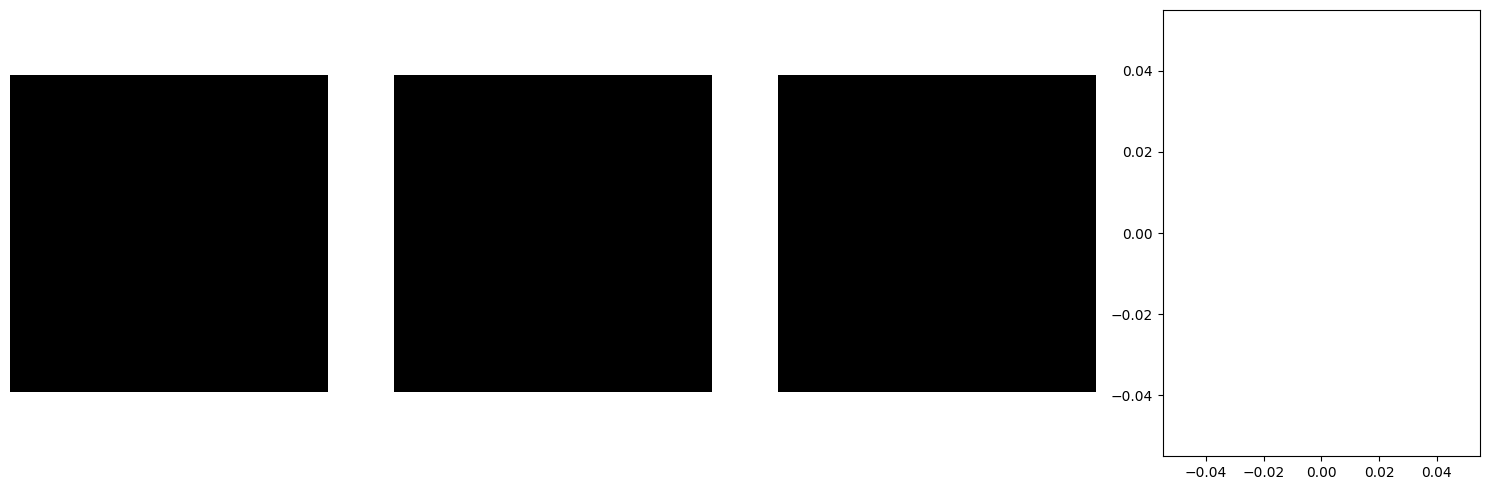

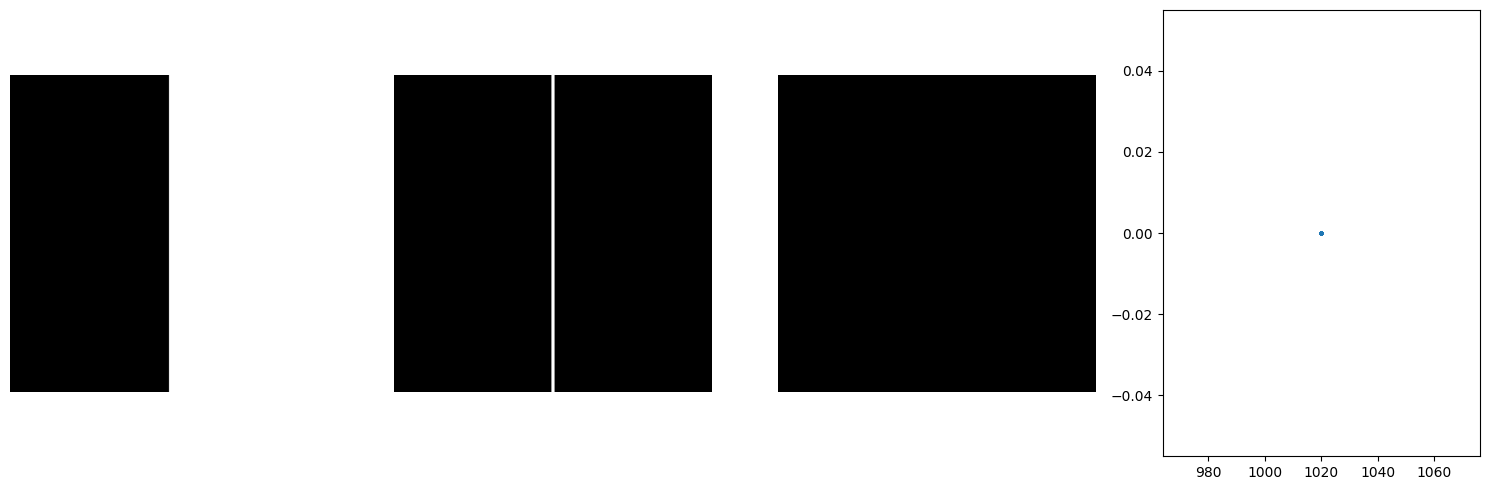

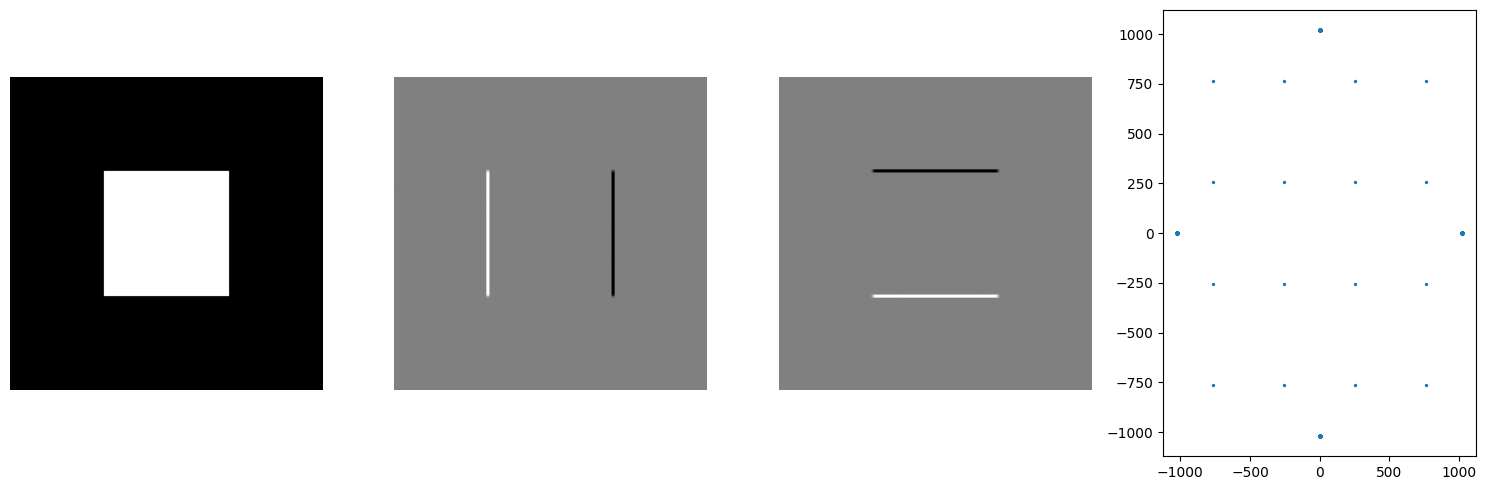

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def make_images():
    h, w = 200, 200

    flat_img = np.full((h, w), 130, dtype=np.uint8)

    edge_img = np.zeros((h, w), dtype=np.uint8)
    edge_img[:, w//2:] = 255

    corner_img = np.zeros((h, w), dtype=np.uint8)
    corner_img[60:140, 60:140] = 255

    return flat_img, edge_img, corner_img


def sobel_corner_analysis(img, threshold=15):
    img = img.astype(np.float32)

    kx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)
    ky = np.array([[1,2,1],[0,0,0],[-1,-2,-1]], dtype=np.float32)

    Ix = cv2.filter2D(img, -1, kx)
    Iy = cv2.filter2D(img, -1, ky)

    mask = (np.abs(Ix) + np.abs(Iy)) > threshold

    plt.figure(figsize=(15,5))
    plt.subplot(1,4,1); plt.imshow(img, cmap='gray'); plt.axis('off')
    plt.subplot(1,4,2); plt.imshow(Ix, cmap='gray'); plt.axis('off')
    plt.subplot(1,4,3); plt.imshow(Iy, cmap='gray'); plt.axis('off')
    plt.subplot(1,4,4); plt.scatter(Ix[mask], Iy[mask], s=2)
    plt.tight_layout(); plt.show()

    return Ix, Iy


flat_img, edge_img, coner_img = make_images()

Ix_flat, Iy_flat     = sobel_corner_analysis(flat_img, threshold=15)
Ix_edge, Iy_edge     = sobel_corner_analysis(edge_img, threshold=15)
Ix_corner, Iy_corner = sobel_corner_analysis(coner_img, threshold=15)

### Part B - Ellipse Fitting and R Maps for Corner Detection

Now, use the above functions ( basically Ix and Iy ) and the formulas in the pre-session videos to find values of a,b and c ( the second moments ) and calculate the eigenvalues lambda1 and lambda2. Then use those to create an R map for the entire image. Display the R map. Do it for the 3 images of part A. So, you might want to create a function that takes the image, loops over the pixels with a window, fits the ellipse over the window, calculates the lambdas, and value of R, essentially finding R values for all the pixels and returning an R-map ( a 2d image with only one channel where the value of a pixel is the r-value of that pixel in the original grayscale image ). Now, display these R maps. Notice how the corners are clearly visible in white.

In [35]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

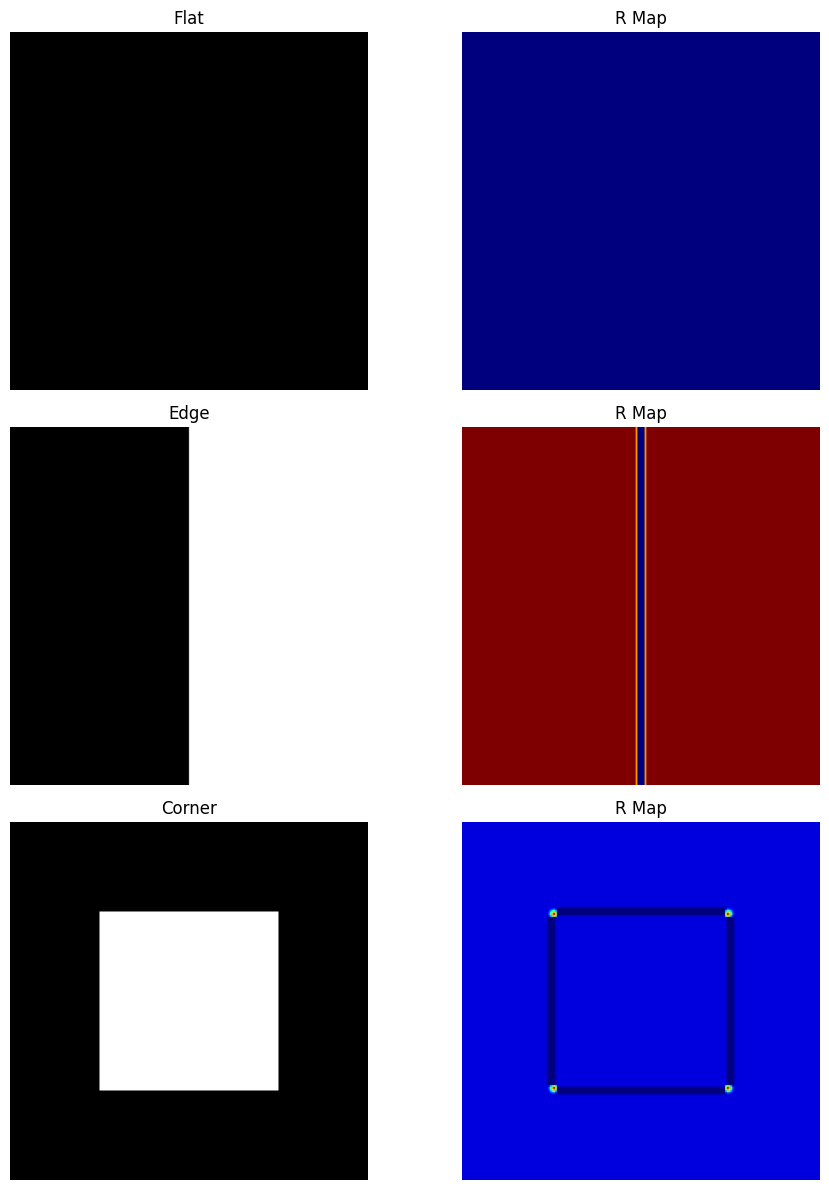

In [36]:
def make_test_images():
    h, w = 200, 200

    img_flat = np.full((h, w), 128, np.float32)

    img_edge = np.zeros((h, w), np.float32)
    img_edge[:, w//2:] = 255

    img_corner = np.zeros((h, w), np.float32)
    img_corner[50:150, 50:150] = 255

    return [("Flat", img_flat), ("Edge", img_edge), ("Corner", img_corner)]


def compute_R_map(img, k=0.04, win=5):
    Ix = cv2.Sobel(img, cv2.CV_64F, 1, 0, 3)
    Iy = cv2.Sobel(img, cv2.CV_64F, 0, 1, 3)

    Ixx = Ix * Ix
    Iyy = Iy * Iy
    Ixy = Ix * Iy

    kernel = np.ones((win, win), np.float32)

    a = cv2.filter2D(Ixx, -1, kernel)
    c = cv2.filter2D(Iyy, -1, kernel)
    b = cv2.filter2D(Ixy, -1, kernel)

    det = a * c - b * b
    trace = a + c

    R = det - k * (trace ** 2)
    return R


images = make_test_images()

plt.figure(figsize=(10, 12))

for i, (name, img) in enumerate(images):
    R = compute_R_map(img)

    plt.subplot(len(images), 2, 2*i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(name)
    plt.axis('off')

    plt.subplot(len(images), 2, 2*i + 2)
    plt.imshow(R, cmap='jet')
    plt.title("R Map")
    plt.axis('off')

plt.tight_layout()
plt.show()



### Part C - Hough Transforms

Again, import an image, create a function that takes the image, finds the canny edge map, then loops through it to find the equivalent line of each pixel, checks whether the slope and intercept are within acceptable limits of the accumulator size ( if not, discard ), does the voting procedure and creates the accumulator. Now, choose an accurate threshold for the accumulator to get the slope and intercept for a good number of lines in the image. One thing you can do is normalise the accumulator and use a 90 percent threshold ( just an example, im not telling if 90p is a good one or not ), then, mark the lines in the image using cv2 and display the final output. For the slope and intercept, choose the limit as per your image to get a good output. Please dont make it super large so it take hours to run and give the output.

Now, you can do the same but with rho theta method. Do this in a separate code cell from slope-intercept method and notice how fast this is

In [37]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [38]:
import base64
with open("img.png", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

iVBORw0KGgoAAAANSUhEUgAAAcYAAAJeCAYAAAAuv6WaAAAMSWlDQ1BJQ0MgUHJvZmlsZQAASImVVwdYU8kWnltSIQQIREBK6E0QkRJASggtgPQiiEpIAoQSY0JQsaOLCq5dRLCiqyCKHRCxYVcWxe5aFgsqK+tiwa68CQF02Ve+d75v7v3vP2f+OefcuWUAoLfzpdIcVBOAXEmeLCbYnzUuKZlF6gQUYAgQ2Ez5ArmUExUVDqANnP9u725CT2jXHJRa/+z/r6YlFMkFACBREKcJ5YJciA8CgDcJpLI8AIhSyJtPzZMq8WqIdWQwQIirlDhDhZuUOE2Fr/T5xMVwIX4CAFmdz5dlAKDRDXlWviAD6tBhtsBJIhRLIPaD2Cc3d7IQ4rkQ20AfOCddqc9O+0En42+aaYOafH7GIFbl0mfkALFcmsOf/n+W439bbo5iYA5r2NQzZSExypxh3Z5kTw5TYnWIP0jSIiIh1gYAxcXCPn8lZmYqQuJV/qiNQM6FNQNMiMfIc2J5/XyMkB8QBrEhxOmSnIjwfp/CdHGQ0gfWDy0T5/HiINaDuEokD4zt9zkhmxwzMO/NdBmX088/58v6YlDqf1Nkx3NU+ph2pojXr485FmTGJUJMhTggX5wQAbEGxBHy7Niwfp+UgkxuxICPTBGjzMUCYplIEuyv0sdK02VBMf3+O3PlA7ljJzLFvIh+fDUvMy5EVSvsiYDfFz/MBesWSTjxAzoi+bjwgVyEooBAVe44WSSJj1XxuJ40zz9GNRa3k+ZE9fvj/qKcYCVvBnGcPD92YGx+HlycKn28SJoXFaeKEy/P4odGqeLB94JwwAUBgAUUsKWBySALiFu76rvglaonCPCBDGQAEXDoZwZGJPb1SOAxFhSAPyESAfngOP++XhHIh/zXIaySEw9yqqMDSO/vU6pkg6cQ54IwkAOvFX1KksEIEsATyIj/EREfNgHMIQc2Zf+/5wfY7wwHMuH9jGJgRhZ9wJMY

(np.float64(-0.5), np.float64(431.5), np.float64(601.5), np.float64(-0.5))

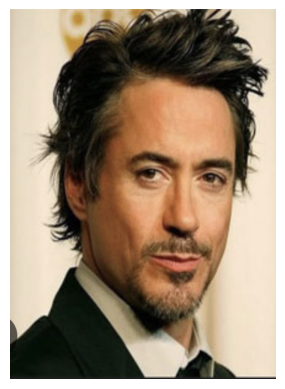

In [39]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """iVBORw0KGgoAAAANSUhEUgAAAbAAAAJaCAYAAABOeRJTAAAMSWlDQ1BJQ0MgUHJvZmlsZQAASImVVwdYU8kWnltSIQQIREBK6E0QkRJASggtgPQiiEpIAoQSY0JQsaOLCq5dRLCiqyCKHRCxYVcWxe5aFgsqK+tiwa68CQF02Ve+d75v7v3vP2f+OefcuWUAoLfzpdIcVBOAXEmeLCbYnzUuKZlF6gQUYAgQ2Ez5ArmUExUVDqANnP9u725CT2jXHJRa/+z/r6YlFMkFACBREKcJ5YJciA8CgDcJpLI8AIhSyJtPzZMq8WqIdWQwQIirlDhDhZuUOE2Fr/T5xMVwIX4CAFmdz5dlAKDRDXlWviAD6tBhtsBJIhRLIPaD2Cc3d7IQ4rkQ20AfOCddqc9O+0En42+aaYOafH7GIFbl0mfkALFcmsOf/n+W439bbo5iYA5r2NQzZSExypxh3Z5kTw5TYnWIP0jSIiIh1gYAxcXCPn8lZmYqQuJV/qiNQM6FNQNMiMfIc2J5/XyMkB8QBrEhxOmSnIjwfp/CdHGQ0gfWDy0T5/HiINaDuEokD4zt9zkhmxwzMO/NdBmX088/58v6YlDqf1Nkx3NU+ph2pojXr485FmTGJUJMhTggX5wQAbEGxBHy7Niwfp+UgkxuxICPTBGjzMUCYplIEuyv0sdK02VBMf3+O3PlA7ljJzLFvIh+fDUvMy5EVSvsiYDfFz/MBesWSTjxAzoi+bjwgVyEooBAVe44WSSJj1XxuJ40zz9GNRa3k+ZE9fvj/qKcYCVvBnGcPD92YGx+HlycKn28SJoXFaeKEy/P4odGqeLB94JwwAUBgAUUsKWBySALiFu76rvglaonCPCBDGQAEXDoZwZGJPb1SOAxFhSAPyESAfngOP++XhHIh/zXIaySEw9yqqMDSO/vU6pkg6cQ54IwkAOvFX1KksEIEsATyIj/EREfNgHMIQc2Zf+/5wfY7wwHMuH9jGJgRhZ9wJMYSAwghhCDiLa4Ae6De+Hh8OgHmzPOxj0G8vjuT3hKaCM8ItwgtBPuTBIXyoZEORa0Q/2g/vqk/Vgf3ApquuL+uDdUh8o4EzcADrgLnIeD+8KZXSHL7Y9bWRXWEO2/ZfDDHer3ozhRUMowih/FZuhIDTsN10EVZa1/rI8q1rTBenMHe4bOz/2h+kJ4DhvqiS3CDmDnsJPYBawJqwcs7DjWgLVgR5V4cMU96VtxA7PF9MWTDXWGrpnvd1ZZSblTjVOn0xdVX55oWp7yYeROlk6XiTMy81gc+MUQsXgSgeMIlrOTsysAyu+P6vX2Jrrvu4IwW75z838HwPt4b2/vke9c6HEA9rnDV8Lh75wNG35a1AA4f1igkOWrOFx5IMA3Bx0+ffrAGJgDG5iPM3ADXsAPBIJQEAniQBKYCKPPhOtcBqaCmWAeKAIlYDlYA8rBJrAVVIHdYD+oB03gJDgLLoEr4Aa4C1dPB3gBusE78BlBEBJCQxiIPmKCWCL2iDPCRnyQQCQciUGSkFQkA5EgCmQmMh8pQVYi5cgWpBrZhxxGTiIXkDbkDvIQ6UReI59QDFVHdVAj1AodibJRDhqGxqET0Ax0ClqALkCXomVoJboLrUNPopfQG2g7+gLtwQCmhjExU8wBY2NcLBJLxtIxGTYbK8ZKsUqsFmuE9/ka1o51YR9xIs7AWbgDXMEheDwuwKfgs/EleDlehdfhp/Fr+EO8G/9GoBEMCfYETwKPMI6QQZhKKCKUErYTDhHOwGepg/COSCQyidZEd/gsJhGziDOIS4gbiHuIJ4htxMfEHhKJpE+yJ3mTIkl8Uh6piLSOtIt0nHSV1EH6QFYjm5CdyUHkZLKEXEguJe8kHyNfJT8jf6ZoUiwpnpRIipAynbKMso3SSLlM6aB8pmpRrane1DhqFnUetYxaSz1DvUd9o6amZqbmoRatJlabq1amtlftvNpDtY/q2up26lz1FHWF+lL1Heon1O+ov6HRaFY0P1oyLY+2lFZNO0V7QPugwdBw1OBpCDXmaFRo1Glc1XhJp9At6Rz6RHoBvZR+gH6Z3qVJ0bTS5GryNWdrVmge1ryl2aPF0BqlFamVq7VEa6fWBa3n2iRtK+1AbaH2Au2t2qe0HzMwhjmDyxAw5jO2Mc4wOnSIOtY6PJ0snRKd3TqtOt262rouugm603QrdI/qtjMxphWTx8xhLmPuZ95kfhpmNIwzTDRs8bDaYVeHvdcbruenJ9Ir1tujd0Pvkz5LP1A/W3+Ffr3+fQPcwM4g2mCqwUaDMwZdw3WGew0XDC8evn/4b4aooZ1hjOEMw62GLYY9RsZGwUZSo3VGp4y6jJnGfsZZxquNjxl3mjBMfEzEJqtNjpv8wdJlcVg5rDLWaVa3qaFpiKnCdItpq+lnM2uzeLNCsz1m982p5mzzdPPV5s3m3RYmFmMtZlrUWPxmSbFkW2ZarrU8Z/neytoq0WqhVb3Vc2s9a551gXWN9T0bmo2vzRSbSpvrtkRbtm227QbbK3aonatdpl2F3WV71N7NXmy/wb5tBGGExwjJiMoRtxzUHTgO+Q41Dg8dmY7hjoWO9Y4vR1qMTB65YuS5kd+cXJ1ynLY53R2lPSp0VOGoxlGvne2cBc4VztdH00YHjZ4zumH0Kxd7F5HLRpfbrgzXsa4LXZtdv7q5u8ncat063S3cU93Xu99i67Cj2EvY5z0IHv4eczyaPD56unnmee73/MvLwSvba6fX8zHWY0Rjto157G3mzffe4t3uw/JJ9dns0+5r6sv3rfR95GfuJ/Tb7veMY8vJ4uzivPR38pf5H/J/z/XkzuKeCMACggOKA1oDtQPjA8sDHwSZBWUE1QR1B7sGzwg+EUIICQtZEXKLZ8QT8Kp53aHuobNCT4eph8WGlYc9CrcLl4U3jkXHho5dNfZehGWEJKI+EkTyIldF3o+yjpoSdSSaGB0VXRH9NGZUzMyYc7GM2EmxO2PfxfnHLYu7G28Tr4hvTqAnpCRUJ7xPDEhcmdg+buS4WeMuJRkkiZMakknJCcnbk3vGB45fM74jxTWlKOXmBOsJ0yZcmGgwMWfi0Un0SfxJB1IJqYmpO1O/8CP5lfyeNF7a+rRuAVewVvBC6CdcLewUeYtWip6le6evTH+e4Z2xKqMz0zezNLNLzBWXi19lhWRtynqfHZm9I7s3JzFnTy45NzX3sERbki05Pdl48rTJbVJ7aZG0fYrnlDVTumVhsu1yRD5B3pCnA3/0WxQ2ip8UD/N98ivyP0xNmHpgmtY0ybSW6XbTF09/VhBU8MsMfIZgRvNM05nzZj6cxZm1ZTYyO2128xzzOQvmdMwNnls1jzove96vhU6FKwvfzk+c37jAaMHcBY9/Cv6ppkijSFZ0a6HXwk2L8EXiRa2LRy9et/hbsbD4YolTSWnJlyWCJRd/HvVz2c+9S9OXti5zW7ZxOXG5ZPnNFb4rqlZqrSxY+XjV2FV1q1mri1e/XTNpzYVSl9JNa6lrFWvby8LLGtZZrFu+7kt5ZvmNCv+KPesN1y9e/36DcMPVjX4bazcZbSrZ9GmzePPtLcFb6iqtKku3Erfmb326LWHbuV/Yv1RvN9hesv3rDsmO9qqYqtPV7tXVOw13LqtBaxQ1nbtSdl3ZHbC7odahdsse5p6SvWCvYu8f+1L33dwftr/5APtA7UHLg+sPMQ4V1yF10+u66zPr2xuSGtoOhx5ubvRqPHTE8ciOJtOmiqO6R5cdox5bcKz3eMHxnhPSE10nM04+bp7UfPfUuFPXT0efbj0Tdub82aCzp85xzh0/732+6YLnhcMX2RfrL7ldqmtxbTn0q+uvh1rdWusuu19uuOJxpbFtTNuxq75XT14LuHb2Ou/6pRsRN9puxt+8fSvlVvtt4e3nd3LuvPot/7fPd+feI9wrvq95v/SB4YPK321/39Pu1n70YcDDlkexj+4+Fjx+8UT+5EvHgqe0p6XPTJ5VP3d+3tQZ1Hnlj/F/dLyQvvjcVfSn1p/rX9q8PPiX318t3eO6O17JXvW+XvJG/82Oty5vm3uieh68y333+X3xB/0PVR/ZH899Svz07PPUL6QvZV9tvzZ+C/t2rze3t1fKl/H7fgUwoNzapAPwegcAtCQAGHDfSB2v2h/2GaLa0/Yh8J+wag/ZZ24A1MJ/+ugu+HdzC4C92wCwgvr0FACiaADEeQB09OjBNrCX69t3Ko0I9wabY76m5aaBf2OqPekPcQ89A6WqCxh6/hfDOIMZ6k5U+AAAAIplWElmTU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAIdpAAQAAAABAAAATgAAAAAAAACQAAAAAQAAAJAAAAABAAOShgAHAAAAEgAAAHigAgAEAAAAAQAAAbCgAwAEAAAAAQAAAloAAAAAQVNDSUkAAABTY3JlZW5zaG90uv0r3QAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAAdZpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYuMC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6ZXhpZj0iaHR0cDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iPgogICAgICAgICA8ZXhpZjpQaXhlbFlEaW1lbnNpb24+NjAyPC9leGlmOlBpeGVsWURpbWVuc2lvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjQzMjwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlVzZXJDb21tZW50PlNjcmVlbnNob3Q8L2V4aWY6VXNlckNvbW1lbnQ+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgoKuAMAAAAAHGlET1QAAAACAAAAAAAAAS0AAAAoAAABLQAAAS0AA13RerTZxAAAQABJREFUeAHMvemTXjl2n4nc9yQzue9rVXVXdXW3ZDmska35Is+fOxO2v014FA5PjNQhjWyrpe7qWkkWdzLJZO77Ms/zw8X7vplFljSK7om5mfe9Gy5wcACcH87BAe7QF7/6j8dDQ4VtqAxxUvfhMjw0XIaGuS71yAMDEcx7Ho99pds4qf8fuDb8QPDughhObKbt9k8eCTOccIZum7S385PH4yR0OrWTYaSuvX86fLvuH49KOToqR4cH5WB/rxzu75Sjg51yfLRX+GE/zPG4+CdRZn6E+EfK8DCUj4yW4+FRMjFSRkbGeOoz+Hzc7UZxRBxHB4nzmGM53mfnmr8yxLNh7nlu+bgfE1/OR7g7Qpjhcszu8ajjiwXtG8fliHgPoP8weTg84PxoH7Kl+5D4KtXDlj/0ZpfjMihxjpKdKZKTdm4lUiiD5uPD/cR1uL9dDg62yv7BJvzZLodH8OhwtxybD3gnIeZ7GD7IlyGOw6NjZWxiqoyOjhP/GPTDJ1MgnZGRCdhFGGjw9YMD0jo65n2uKZh98kDkXMNTaPa+KZiQdXlsjHe5f8Q7x5SRPDiC1tB1AH2H7Psb5WBns+zvbpTD3U3YvV+GCQsnySPvkebhrnyDAOjwT54Oj8Aj4ofI0HtI3gwyQn6mpuagc6hsrO+U9dUtjptl9+CoHJKfHdi9tblTDg+OyfNkmZqeKWfPLJbxyVl4IY/hr/GSF0qqDI0Ol9FxeUb5Qs/U+FQ5u7hYJicnyWcp42PjZXp2lnimuDdVxuDjEWVyAMMOKFuLaRQejskf/vb398vW1iZ1mDJh29nZKavr76BzvaxvrJGHgzI5MVEmxiegabxMeD4xXia5HhubhJZxjuPQXuu1vD2gHA7I3xFp2o5HyMeI5WY55fl+efv2XXnw6HHZ3tsti+R3dn4OPs2UtbW18uVX35Tf/e7r8pvffVGW3iynzGdn58uFixfTVlYJs762XrbY93b3rMmUAcST1iF53ac9ciflPTk5UWZnppOHUcqGilL29/bg7VCZmpssMzPjZW56vFxYnCt3rpwrVy4tlItn5+HrSDnY3S8He7ZvKyr5pUxGx+bI82RZXdsp3z56Wr579H159P2D8vb167K9tU70B/BqtFy8dLH89Kcfl49+8km5/9H9cvH8xTI6MUY5DqcsIJp6Rb2hXlon5dE4vDQ/7+DNxvZG+DdJW1g8v1imKMsj5YrZJHxtcPU698j74DEX/BxTR9zacVCuWnf/qW0w/GDYvClbuvjbs5qaV/2z9mzw6NO2D95v55afm3Sf3nOfcoRBPIOGL371HzxY/qlwEaQwVuIDYj6AaSG6Y1QuvJGbedt4T17zrHvce9auI5TaRX3a+z3NtPdd+2oTsr6YwjgRX7uojEjknDbG5Do/NVx+2yvt4anwtaxyE8ZReWCgAvDgoAEYwnkQwEytK2BEKPxkR/C404LKMY16iEY1jJAOgBnGv0MIseAUOMR3LLCwF3fA5RhRJoANDbcKLOFUagDMeHIOIBB59vROKLeAl1Eb3Php7Ao3QbgCGODIuWk03tqBsYGl0ZhGyp+joDM8wTUClvgCYFYo4pPWQ4EBUNjfr+B1IIgdAmCAmMB5TFgbMbGHL4JYQEoAQyiPICCHR8YJMEow0xtDSE4ATKYLSFCBD+UP+ZCvlse+gMaf4OWeeiNxhFHgjw0I2WPymLwDpocHlBvgJW0BMIBrHxA72EUgIQyHSGeI+JNHAWzfd7lutANeto/jbvdcDir4LHdB7OhgqGxtH5QdhOL+Njt5PyBP2wh6AeyAOIfKKAJyskwDYhMTMwg8AAOhPjU3W8anyLsCWKAcsXQspuMA1uz8PLwZBaCOSGu4zPjO1DTvAGCAn+/JI354y433of9wb7/sbG6XlbWVsr1j/hHuuztlc3OjbO1sBcwMLQhMjI+xj5dxAYzrcWgbpzwmAK9xBLq0jkGDPE/R8iN/befyXvBKx41rBfHqylp59PhpWd/eKtMT08Q5mX1ldaN8+92D8uXXXwNiX5U3bwEwynxmdq6cO3+BOjFSVlfX6ARsQDudI8DokPgi5FLU1AvrL3SYd+memiJuQVY+kB/ru3yampso8/PTZeHMTLlybr7cunqhXDo3V87MTJVxeCx/DgPE8K5Qz4cBEY4HhyNlaXkFAPu+fP/4WXn58nlZX1+Fp4fwYgTAnCqXr1wqH//ko3L33t1y69atsrCwSFW2PVIv7NlACZBO27dsarl42FzfKi9fvyybG1ukNwSwz5arl66WmfmZhDMM1Zk2bL3vF2k/jhoXCYQnHt2aHBoMF5lZH//o7+A7LWBSEUTeu9X7H3raXvH5h8LYctxSrsqqgT33BwHst3/9v9kXCDcktgIYdwbO4WYYGsLDOaJpvOJYT7sbua43uzummUDtupJXw9SHP/w9zbhKW43B356QlZ6Brb3XbrXCO319Olx7fvrY3rfi9Fhuo6EiNgBT+zpSEAZkqKA8r2Flvu/JX3lYe8/RLmhgQwCANTGal1wEm+wlNk3m+LADMLWaY84RuEljCLFuewjnzX/TvogzICYgVABDAkS4UqAdiBFemsxDAzCEtHmJpsc9AxAc0kiBeFqdMB/JjpqR2pcNUBrMpHnuxbeLUN4C3Nn32Dk/PNyCZ/SYyYNCRP6JptHAAkw0aUBrDIE2OjYFZk2QtgAGz9BERtBQRtVIBCzSVAibrA1dQNsP+ApW8hng6OqF9HpvbEALULgeHkGj/FUr5LzA3yPoPUT72gPA9rbXAbJtbqNVk5a9zSHSifbF0TajZjGG8LZzsLOPZsZxBGEpvG3vHZYdevDbmwAWiHWEdj0C38bIF4HKHlrZFkJSYbWzs0vv2zKw6RIHAD4DkC3Qc7+OADx/4UKZBMjU9HbRlg7QDA+IX96rUaldbWxvkodSpgGwCYT2GMJbLczrKbQQtTLD7wLK22iBK+/elbdLb8urVy8BlFXuC6R2PmpHQPaNoU3MAIZqXaOcjwFiApmAoFY2gYZgWlMAkPQKcPKEQko88kpgtB4JPiMIccF2C+B8+vJleftuNUB5SDiBfg0Ae/zkSfn24aPyFZrY2+V3xAcIqZkCAsb77h2AuwXgwm+1vT14oSUhG8DT0lArtNMicI2xe53ODXGMk5ep2YmyeO5MuQlwXbtyvtxgX5hB07LeWz/USi0zNOUjOoc7e8dldWMP7XGtfP/0efn6u+/Ky1evoGWTMENozvPl3Lmz5fKlC+X6jWvl7v075eq1a+WcGvL0NMBqpwtNGH6oGEygHXu0Eu/RsdnY2iivX70uDx48KOubm2Uanl64fLF8dP8jtM8L0GzdH4rWbC0RhGunQLZANFs90B5sGL2tyaD+cx+lbXMcDNl7xee5qL+enkiDl9KhS5jBnxpbL87eyWAYI6vpfuix+XMbBK52nvvw0DZpNod+81f/K+2Pqq2AbUcaZz0fvE+qCItkyZ+2e5Kb7eA7JnPqfv/yg0zzrd4mLV7k2MVZI859+0UtmfZO3sjNdocjmWwMyV150wvTOxl4YfDUwJWR9ZhLbjThXzWwYxr/YQc29tZ9nhJO2qYhPxWsAhgN3EaOEFBLCs0mo93JQhFAEMZHCnuBC+Ea0xuC9giN7EhzIlHa8Vd428gSv8CVHp0Vnd10EJhIjhq4AVl4SKrSRnqCSXY1I4HFHiw1w2CpAwKCDa17TwFrepr3aroc0mA6AEOgRPtCAzvYQwvbwxynJoYGFi3MPAUw5RMxCJDZ0RbQQMbGZ9jRwkYRuGphghvHUa5jbu3RItMqjVbuaiKrADaSMHka2mzoaiJ2ygxbAWwPAVg7HuHv0RZCERqhV5p30UT20BCOADDphYvhWcwmJg3fo9kh0NW+dtHODgRkBPEeZbm5vVc2t/bKliZHwEqT24T75DT5GS1aptQa1coUxAr7/R0ADdA8UEWD3oVz58rtO/fKtevXyyJmqUnAfY+wgrVam+Ag62MKRCNRExVUNO0p4AScKa4FTUFd89oqpsGVtyvlzetXZWnpDQJ5qexs74Q3gszEhCCryVZwVotRe6kmQHk4rlbHPTsEajjT5EetcWaOHbCb5HqE960m8rpqrBXEfF/A3wN8lgCipdfL5cXLF2gwm6mvm9vb5fXSUnny5Fk0sWXCWDcmAOK5+TPU1+OyvLISeunD0eE4CKAfWoepTAJ8wFaNi/yPcm2ZexTE1BLdZ6YnAcTZcunSYrl180q5fvl8ubh4pkyjQR3t084AL7VsCoF3MfUCXm+Xt8qLV2/L48cvALCn7I/RVtcpk/GyuHiWMrparl+9yvFSuXbtKuB1tSwunA3tmoPVvA6hX3O3MmCSMjlCw9sErJZXlsurl6/K02fPyvePHsUcfvnSpXLn7p3y6WeflsuXLwfAbDB71kfK2Y5AzOTkzxZp+8zRqul1/8erk1sLyzEV6OTTeuWzbqtnA+n8WNztJSvmwHbiKhH24x8IVsnm1/ANtNpRWnP/NIBZ204AmBns7Z3w9bqlFHnGlTdys/ekyrnEZ+AapgVpoZKZEzlqEQ8c82r3fpgpTfW5B8+7y9yU3h/bZMLg9k+Fb2Hbe+3ofQVFFcIIa4TCsYIwAOa4lP3vsLmLQroU0vIRYaywplcpgAUYCBptwl6kABIgoZJimhS8Donb3fgPA2CYtYi/mskoiGNFq3ETr7sCX+1ouI4jeW6P386HQpFANbzcs0EFTEyXnrdpA2CcJFirA/UdU+Ud3qcJ1jx57UZ494x/QecBY177gNdBwACtxrEwQExza8baIrBNhx5zB14K9REa9QRjDYLY6Ng0YFDH2YY1HyL8R8kTzCNv1IUOU62VVmsFjlyvloOOLkljN8wIQsyspxqEXrWwnbK7I2ChJTru1UyenRZ2wJhQeuLwSN3WXKfeEKmglJihX5BFoqBAC2SA185eWV5lrAuUGgWMJzEJTs+Qp5FJWN7xT+HKPgogOM40g4akBuT4kKazpeVl8jhaLl25Uq7duFFu3r5Hb/485rpJaGAsj3QCYBGKangdSACg9uzDE+7Z619D0C69WmJM6Q372/Jm6TXjNm9iLrQuT2NuPH8eDeTcQjkLUEwy3iVt8s5OjVqZY45ulY9wlHQFhgm0ixnen52ZBcRmyxxHx7PGMDXacVBwHwG2B8Qj8wWxQ3iwvXcEILwuv2Ws6+3btxHqe6SxiXb2CmB9hInuHZqhdU5AniFe8+K9XQDXjoQa6z4dIjsAjtcNQY9jSQLwKONcpjUKDYLWuDv33RfOzpXr19Bu1b7Qcs4tzpf5aeoYvbo9zKeH5jWZl9bh8m51uzx5+qo8ePgMzeshZkPMfIx5TU4OlytXLpfbt2+iKd0DDG+USxfPwcfFMq/pl7KyjhiV2nnaD3VXS8IYdXprbQuwfkJeH5avv/m6PAPA3lBGc5iFf/Hzz8vnn/+sfPbZZ2jg52U9ZXwIgGEpocwsH+s60fM/cCSc6bXfnL7nJ++85/6JW1ZxttPx13v81oS8PLWdfNC7aifGK+0f2AJThG3A1TuaYLtve+d86B//LzUw44PMCEGPNnaPkj5wbkC3tOT6Tq57tBiR/6ePhKq3Epx0fyTzCfKBeFq8eQx9XdgcpHfwun9uRn+Y4IfDtzfbe+3Yu6/mQoM51HwBgNmDF2B0sqjV1apqorXSRvQhjLR5V40CIYOgUQo38Iq5MNoJFZS4jqKx6FhQNRe1mmhkCgLiThl1BUFTrdekMdI5QGiOG6L3qPAvCn4AAimRNOu70ELGBLBoXgEwzhuAmVnZLVPZzU0aoDezk6ZhiKO+U82QFXABsF3HKBAGATFMcuaD3u0BecxYG+klJmi23jnONUaDnxTAJiqIjYxh+4f2YTUzzYoDAMYouGRV+iCOEpEaa2vozQX3bQw1HZ+YD2/aybD8djBhdSZDAQxaj6I5CmjSTgdCUxKCU/eMWu0TG8JUgcIdeUoeUEswC+KUEXPQfllH+zpGUM3NLWBCmoN+hdkIfHCMBkHLuNaEjhGOmyDw58/Ocv8YB4o1tJDX9MZfMha1A5hPYpq6AIDdLRevXM/5JJrOMSCgkqD24aYjgIBheanZaWZb39jAMWK9vELbevL0WYBiZ2snY1479PzVRBXuczhRXMRJ4jwa3zxODAKqHS7z6xiTaezBBwW7/Dvc3c0YlHU342GAlY4GM4CZY3KzOJLM4Xgxzn3rSsYsfZe6Iqg4rrnLWO/jJ8/L3/zd35bnL16gIdkeoB1QescY2ePHTziuVJMb76iFCaSrOJjsI8RHLXziizZKPnw2MjYSc6bjX5Z8LSn6iryv48k05s4ZOhJXAJn7d64HwBYx+83TeRhHYyODdGgcuzWvx2Ub7XmTMcoXr3U6eZ5xu0ffPwW8NtA6R6LB3b93t7h/9BGaMprS3JlZtFK0XoBUHh5aSFAyBJ+tK7Yjx0f3d9BC6UR8/fXX7F8CYN9w/TpgfAMg/PP/+c/LH//yl+Xe/bvlDOZJOwBVKyQCS4G8e0zcZtTc5tg75KlP2tY97i7blXF8aKtx2m760df38vtjrybKGqAXrJ34MuVXY+qn3R7XNmrx1nz2jubIf+/DV1nwLwQwkqaxWYeSs97B+/6fPtZgCc5pCM2PL35ge288Ld6aak3f9ztmtARMP1uXCId6Npgo77RgXejTh9QR3mzH9lzmxVFBwNHkEMDRZn7QCbnaeKTLMwWW5ryqHalBoCEJYDwTCI+jkTAWwzha1VAQ9pi0AloIWceSFP6aEKumhACO6VCKjF8AQ4AhBDSzqa0IXBlH0hSnw4UCItqCwKM5TQBDCAtcDcT0crTBRcAnaqPPiZwzL6k0Vj7ylEeErTRpGgSgpBdngP09nCEABMfAqoaDYEADk28CWEytxmw8AgD7OCA1SU97fBKBP45zApqYtEf7UiMDkNXAkrCemBAQgA1t4TRn9XEr71p2hqtPbBwx08LLfTRFe9z7OG5knA4+H7NnTBN+H2quiYatuU6+AGLyjP1QZxt4HicNaNpF8G4hlFYArn20s5FoXQhzAGwIzWsHrWwX8FJAT6AFnF2Yi7nrGJ5PMiYzP4f5bYqyo6pso2EsvX1TljH1vV1WCxnFTHWhXLl6A8eAj/BMuwgv0A6Ia3ebegM9Y53WZJnq6fiSsa1nz58DXM8xT70s7xhPkgnnLpwrZ8+exVmBMSsEvfnSHDWBENdcGG0F+sYyxoWTxmTV6NRyFOz7eMqtrkPXi1c4pmxGC6uOGtWTTk1zfm4u5s85gEwPyXiVUs7DjkmRFpYzxnwOylffPiz/53/9r+Uxmsc46enRqLltHScNx8IcA9PcSJYCCGpgG5hKpXkKbV0Tmpqhjht2YaR5HjAWwPYoP508Dtg1KTumtHDmTID69vXL5Sf3bwaAZrg/Tlu082AHcZ8OyDYA7djkW5w1njx7XZ48Z3/6Es1wmU7BNmNyE+XO7Qvl7p0b5eOP7xU1sGtXr5azaF1Ws3T8YyWwbjv2B19Jhydll3FRzaBPvn9WHj18XL4BuL5/+LA8xSy5u7sNWJ0pn3760/Lv/5e/KD/72c+g9zw8nODZbvI7TedF68uOnSvabavX7Zg2QUpu8q3+cLS6ep2tf1avE7J7NnioL9Hau/fre6ffHnzjB+ddAzydQmu3g+FbGNto/nm3B16eD96nDhh1xsCkLoIELvSPnrfr2rOT8Iy7tBxQ6HXjRu7VI2/lun/0xS4Ip3mrvdrFMHhoUflGaPChtOTYxdPFd5oRp69lwODWrk+HGwwzeN7Ct6PPbEAx6XUAVoVyB2CNLsJJcfrtHcAIIMOCF9qQgGOBHGUQGnASvKLJaS6kkerWrTagA4Tai2bEAFgHMgrQcKRrJACAbuY6OwzTYEYZL1Fz0QynAEWiVk0BGgJ2cfywdyyAGae7veQBADOzbHT2uW9eatmZrwxAeycA5hgO9JGH/QBY57wBiO2h2cScKKgJYOTXdHQMrzEK6GpgDcAQ7FNn0MJwWR7TnVwAY1wHbaxpYGb7OAAGaNlyW90ItfLFrav8OdY77df8Vk0RsFXIpYOAhiuAJR+eA16dBuZYiy70muxsNZUXdkjsMIzjDn9c1ta3y5pjWLvoF+PT5Sxa0+T0GcoE8MLh4u27Nca7MP8ifNRWzqnpTKKNwHf7FjOA1xwebHNnpgERNDX4tKIAfYKTBaYmNdQL56/g3fYp7t7Xyjjajm11D2CsJrSjCO0txpHe4n6uaerly9flzfJbtDHGuIjzDGnevH4jJql5wEUT4B55zJQE+cSfm2NeunBPMVak84emqh0E6DbmvfWNdcbQ3pRXL57jjLGe/FgE1sVRgGAKus7Mzce93+MkDiTxXARwptCwpwC4o6PhsrK5V774+pvyl//5L/Hmexxzm276mki3trbQQJ+XZRxNduGZY0dqmGozOrxI5jRCXbCVYtgQQJ9EwxLApNexpW3GMPfghw49s4zTXcBMegtz7N1b18pHd6/jdXgGENeUX9uBgGf8Kysb6UA8ff6qPHz4pDx7gcn13TqdlENAfgqz4QVA5lb5+KObRfC6fOlyWeiAU4BXPlSnlWoRsZOTsVHA6936Wnny+AVell+Wb7/6lrx/X17TwVgFtCcZc7xx83r5o1/8ovzFv/+L8pNPPsYDk3YMGDYAm4V/gwAm3yHfX37y60XdrK7daVdEcit3fMftlHisN7vfwXdq+C7+mtqJsO+/aDXq/U/fdzf02sZ4qMwd3CW2d38QwCzAPnAhENEj6r3B+5zDyGwecjrAnpZbjsnmiWMNnyA1hj5n23V3jEA6dd5oGQwqQ1shnC6Udt0S6RdSo7fFdIKidnPgWMM38GrxxAkAretQIefOueM/CvPhTjOtBhjjV/tSa6gCr6eFcU+wqHFUsAoIHGLaAbgCXrqfa4YTwBSsai8UXEAj7vZES+u1XBwY1mPKAfQRtJVRBNCwQh8QGxpB2AFseg5KSwSvjh78BbR6ICaAaf9Xm6mbVaZdeawcsYZYTwBgwuvuH9Ob4JWxLzQawCvaV9zSdxCuPEOb0RwlWOrpZa9X6RMAw0VZ542pGYTe1Dw9VjUwtS6dAujFa04ELDTDydLiNAJ5zWm/fjSqLXn+ugJrjcB8WWmkoc7d08NQ04zaY9W8HK/TKcdxvJgQMVc1AIvqJVvCQzoF8FNnlrWtXcZz3gFe+/AZjz/mNl28fANSx8sbPO1ev3kXh4VdtAnHh2YAqlnmIOkEMcZYzeioprUj5iRNoCGdLedxCtB7TfPYcwDsJc4Ob5bXEHAz5c7t++XS1euM45yL1gQxZWtjs7zGGUOt6+WzV+U5jhEv0ZB24LfmvEsXL5Xbt28jeK9mnEsNZRfN07Ekveicj6VzgBqOmx57gqwOII4pOcduZXUFQGVsjjG0d4DiOo4HB3uMRQHI1kE7TzpQ6MI/h0PHLOA1PYmWh3Y5zr0ZgOzM3Fk8/xbTyVoH7H/35bflf//P/0ccF9Seqpv+JCbOXcD3FWkC+tJFnTcd694+IGApyzs98zI3DTATJNX2BFw7SXpZbmFCFZR0OJknfR0j7uIYcQeQuH31XDnPWJjTANQg1Wa20O6WKa8X8O77J08xGT5hf8ZUgw3KegRwXMDD8Ea5d+9G+fQnNxnzuox7/3nKDQcj6YPOXdKzPsq/cfinV6q1dHf3oLxV8wKYv/3mQfmHf/xtefTgIfViCaDdTqflIt6GH3/yUfnlH/2i/Ns/+1PK7GbyaL21o2E9HsNMaudRkLQ6u7X67/HHtsHn7by1kdPvteftfruObOdmu27Pcww9trx/zvbhcI2m1m4Hj8bsdcv/kG70SgQJqvvgufdqBc3AuW83JkX7ktSOaTnwk//TxxosQYyDLYw4ndMuQD10cUhXjdTfvNkEV243evKsPm+3agGfTKQx570F0Iujf9LCt6NPBLB9NaYegAksDcDkpmyKlPWMf0xkAljnHegArKE03R2idSk0M9lX8GLPuZNqdS6IBoYwFSRNQwCLDYt8qRrJHxpX1b7QwgCqkczNoYeNCU5tIJOOAQIFauhQc3BsCdoEMBLleFIDa7Wwca+Bl8f8yWQYLOBFcyQP+wJvN/alA0cFMO4zllPHwBhbaADGewKggqkCgvOgcPsGwCZOAdiw+RGMOwBL2SHwicB/WABFqachiVilS8or9Z7bi3ezDxYNWtMU/BxCk3N6QsYcBV35jWA+DN/RbuxRdxpYeB+eO41gAlMhpkPsYatr2+XFEhNQ0b7GmLg8Pb9YFhYvFiyKDMy/4pnefu/gz2GcORxjErhmMfvNo3FNTuEdR36cWKs33GW84q5fv452MIEDwRoegyvlOWasw8Phcv7ilZgT586iPSD0zcsaYZ48d04Sruk4RLxD29tYX6cujAKG58o1xlR0x756HTPX/FnyqzPEm4y3bQpgaCq7aHKZBAyvNEnrXKImI9u29JTDnKcZ8i0gtr6xWg54R8uDYdSOBCBd6ecZr5mdnQFMcFpB85C+UYTu9NRsOYNX3mXAdBxPxY3to/Ilgvy//Je/ZDLw44RtAKbZMOmglThtIONI1jc26fHMctQDcBZzpVpKJm4DaI6xaYp7B9DuqH1Rv6YA4Tk0l8uM8929c7fcvnmFeV/nyiJa0ygAozOIIPIWk+3T5y8w5z2Hpid0BF4F0KzzThi/eu06Y1LM77p7o2hCvHjxbEyT4wB+pgzQnvWGVYO1o6Lp0Gq4hUfqMhOwnz9/Wb7BbPrgwcPyHbtAuba6CoAWxh8Xy+3bt8rPPv9Z+fnPPyu/+Pxz6gFz38i35eWUD9tOpnGQ/3Qa5Al7rf+1XbY2Ia9+sBmezZD+97baNHqX7VkviGnkaXfkWgnWj6RGULs/3D4dX8IO/jTwOhkwV/zkaXe07Q7uxl2vsYJxHgCrjR/iwgzF2iCIdefWmI4BNTe83bZ+TpOnxqD+kYC+3sJz1j/v3cxJvV8D5zzMa9ft2MWXAL7WO6ln7TJMSLTdzwDNudMCDoYZPK/hZZhbd6BRMh7QAZgalIIwjgnRwGxclZeClO7WFcAwI6AlVfOhPBY3NGUh9BGWMWMd4EiA1nUAeKl5xYsPDcbJtplwS7oSoQfYEI2u8pdfACyTomkw9vhGAC3BaxQhMjyOXX50BlIEMLQGgNSxMt2D0zh6AFZBjMwkjWpK5DQ5D9RwxjEsM2U0IcK6+kAd+xJ4oVmNS60xzhuOL2EGZWA8PXx4ZSPkBTgjgLHReqsTRwdgDP4HwDQhopGpPQrIapUjoV8N0jyTfyKQPuuteQl9oakBmM+SHdhWm1fmzpgJC1Ne4syht6fgq+OGq3Ac4I14LK1qvgpQev0BMTUUXjsASHaPmM+0e4hJaAvzIStYbOwCZtAVz8kJHDjGceTYZdzkLZoEK0cgINVwNOWlfsCDeSaoXr9+uVzAlDUzowkRQJudzPykKxcuYk5EC6WctgGXt0trHDU3Ur7EHUGNprHO3KnllXdx/HD8RjOaZq4RAGhUbRxhqnv7WTwM9WI8d/4c94Zx7lhm4uw67v5tHlo3ZgTICiD2+DU9rhNmFUeQ1bXVaHqu1qEmTYVnVwtgQjUAoZfgwsJCVsyYx5NR5w6dPtaZjuCKFtIzx4RktcExAGwLAHMy8K/+6ldoJU9Dp44P42hRelRuaAJEE9uHFgFMoRb5BEApuWw7prEAKM4AmGp/lr8gLOCqgTnOehanknlo04HjAk4qN69j9rtxpdy/dYm5W6ySQl3QZPkKLbe67z9i/O1Z3Pkdt5SeRd67cetmuXnrBlrXrXKJDsbCWbVNO4Jon1Qya5+a0RhtXODW+WafMc9VtMC3SyuYITFHYi788uvvmHv3mvzvZBWUTbRnJ1vfpJPxycf3MR/+vHzy04+ZAH0Ts+Q8LKbupe4CYtRJgVYQc1zRjnAPvEIDVNR/qDm1pX3kMQ/64Wr7PhW2hqg3u7z5jnm0QQW8uvhqIH5tT2w9EMvVB35sejak7P0wiaE9646D4BU53O5TB7wGwP7DgBciRNqTFcAUEiG+Y9KHAKzmqkdFzZfveqvPqO60C1eZkSC9NwdP+u+3eE4eu6h7EdT4KocH4+nOk2nPOTmxfeC9U+Fr2dSbxtAATFBxDCsARkWzwYRNECIfA2AKevchvZLqOFVNlUZJD7aOc3XC/2CdawGAY8aOEKhoBXHgECjp3ZmH4R6AcQljdB+uAAZI0hPOmBHmphFAYGRiPqbEMiyIVbNXJgzbADRjQvegFsYFSVg5qtBIGZIfRb1b5aB5Q6sknBOTDzRv6ibv3pkOm/ehruh7jH8dIBCdgCsQBMCcjG31kE8AsMCq2VMT4gRajJ6ImhDVHqsGJoDpxKEpljzrTQE1qcTwoI7J4VwRbVK6eE78FdiUefDNcBE4pNdzghGA1T6q9iWAOR+sapVqYDqkkMeMNQnymHMohq39Oo6zzNjIOuC1DXjt7bNz1EV8kxU3NgCwNcxSjh8JXnqSVfp0wik4O1QAu4TZ8OxZQGaeMTBWiFhEsJ6jR672dA5NzhVIVtDytnAg2Mb0ts5Y1BpjKYKDK3nsZOUMTGVodBcvMh5zZqFM4xQihzYZP9slD4KASzZdxYw4OTUOOAFeeNMpSHcQ4I797JJPAWDXOWw4aKxhOlPrcoknBe2uZizyL99jRODoahWaJOc6x42rl6/EEWEUbUhz3wpmsy06MFarKdztF9FknC6xsX1YnmIe/fU//BqB/qoCroIf7dQ6rSlOz8cKYGj5pKWpb0LXdMrV+tQ8KAVtNUZNeBV4WbKLsboJ4ruC1iWITQKOiwDsDTTb29fQwK6dA9hxZad+vnmzgsnwWXn06Cmu8oxJoTELXpokL+Mmr9nw7t3bTGe4wjjaBbw2nVtHqx6BF/yPUB/VusbZBS/lp9MH1nAEefXqTXnxfCmanVrdd0zStkNgPm23tj3pun//XvnpJx+Xn3/+Wdzxz+Lar+v/PnVRWNCTUnO9HYh4XFInqvlWWdPtpMzpe7bT909fv+eV3GrhOLYgtiHPTydkexvYfhTIwjbDn3zH12s0tmuf1vbdQMybp+/3AUwSw4iuRyGQKSgEM4nNOSk0wjN+YZK+57Ed+pk+cb8frIaFwAG25F590L+fdI23S7Mdk6RpdunWl1u69WrwtzFl8F7//IfvnQ7frttRIaS3nWY9Jz1WENA2j1AmYunsAZjztAAKVqqDn50GlpwjDDULYHrTbBWta3+deDvvvZ01tAHAyzElPRADlGgtCJBhCFF+CythgmWjGzCNR+EggI24dhvjSMN48+mOXkbnKMNuXhUmRNfJawBmb7oHYvasOyFlBXKr4FVTq+UvAODBxuPjY13jpa8CWNMcnVeV8TC0GkHAdd7UVl22yvSccwPZ8ASNSv6gFdprnaC33DQw86FGY57UxpoXYq0HFWA1UblVzapOaPZeX+My/lpRLBMdJHRiOUKDsrvIG5RjZ8ZFC3NOX1bmANgd49lD+O6gpWwDHs7BcdrBrqsy7KHF4HH47t0GpkO1uNEI5XerWzEprgMsewh38yfPgNQAuAJIvk5oLkWAzs1OIfCnEWIzANY8Zi7GwBbO4HBxplxifOXGtZu4bM8iuA4iEN8tr2OKeoH28h3AucHYz2TmYM0CegtnFzBFKWDtAIwF3J5jWnyOM8cSrvQKzXt37mHKm4NeAAIQUAtbx4wYcExHQ+0LTzy0rw3ua+LaBIR3Abjq9YZ8sM/BLi/UrOW9Y196N15Ew5rHk07tyMnWa8SvKW+/M63ppQj8Qfteef36LU4SDwPGmiE153mUX5ahjiyC6oGdLOq8k6BnZ8gbYdRGlGZqojHJp4irwLOtWN9mGZu6DmALYM4HEyju3L7DxGU6BmenKOdKw1PMvA/wCHTqgjSpgU5TDy8xefzevdvlFqa9a9cul0XyN46jxeiYslGN0JbByh7UKV3ns1IMGp1ejCt0bF69eROQfo4TyGs8GF8x3vWCstAsOoXWOIfXok4n1wDUn3z8STwa79+7Ew3cthGNi07KELyYZJUQvUbd5IUdBzsFVdYob+qeALW659QfacwxB35OPc/D9/z03+u/QLGztTja/SonWhQ98Dp5uz3m2OTKqQDdpflza8A1eGz30/oJ1zMh+qAyQcAaADGBDObkuVzNSZcBL7vTHldyXW/6uLf1wnEH+nx24vlAwJqcBeLNHx5Pv9yR98EYeww7xa8Pv9c42Xsz1DXGZtFQBF3c5wWWmMUQzAKY+STi2k8RuLrd8S93emnJO40yq2w0AMN8eACAOZl2n3X4YsrqQEBnAk0mdKPzrgA20mlKIcxE7RLTsHWdH0HYj3ba1wggNjIOePUADOACwOwpRjsRAKK1AGIBL4/kP5Wog7AwCiHclQeRUYTY930VAKsAANhqAo0GJvD2AcwxML2zmhOH6Y1EA4NPApj7AICNo4GNqoEJYJgNzZMANuKcNsEu/IU2aG/mJTUw6Y6WZ36kn3BOlLbn7qagi8s09B8COC6ya6+2ThjX85PeLp0K3A+z78P3HbUUtA8H+BXWrkGIElRW0Lbere8y6XgVcxcaHGvkbbLe4fI7hD4eiRuAm3OoXAXDMSCXG9ILcwOBZBzOd3NS7Si9+GlMUWpfF9DEbl69xHGR8ZkZTFWXMSXdZp7YLKYjwBJHDsHoBRrLi1cviP84zh7O31rQPR4niSnGg+KqDmC8w4vxEQChQ8IL51pR5vc/+ija3dAQ2g11V01rC01B13XNnC5rpMao959zyfTmE7wc27HdxrsOPpqfOC0Q1tbieJzgJIg5H6wuJOzUgmo+1hHEVqGmdMAcq/V18sN8LydXy1fNhzogpSNCuRmn9OlgkknU1L1p4nXCtfnbRMPSM6/XWeG5GonNINWUunEGrVCvwzOYpZ3HJwDdBcDPs+bh2AgaMutAai50Pppu8u8AnQPKxqWrLuHwceMGS0IBYNeuXo5jzQTlpMNPKr5tIv+ssgI9elgiKeEh4MXUh+d4MD5lGsPTJ6x4ghPPGqbmVTTaFbRZMlnO4Khz6TJp4FBy5/btOhGa9C6xpNUMYGjneI/O6w71xfQm6ezoEKP516p96PJk9CAbcLWj9VzSTm59Gep9H8vff2qr8Zx8t/fODxPpPcqJRLJ9KJ1awgnS++leqW3Xd7lxejdw7hFzJu9XJw4zLbZKbAdeMLkyxWLxfuWKWlk40I71LeOt93OoYeobeZJnvWty5XnvugvSP/SZdpqJPb6diqDR14/j5FkE2slbufqx9ypDu4JoBcJRJ46DLPFUNTBNiqggcHbQhKjQlKf2muoeDUwQU33KuBnjIo69OA6m8FcD05Sl+bDbDxlDcrWPABhpIzeigbVFZtPbkSk+ABwDYHo/Mfal+XB06mwAbCgAhllJ5w3HUBTsvieANeCK4FcbM1bz7U4Y9tiZOaMi8OMahXg18viYNQSzTBRAfIQJVMcN81E1MbUvdgTgHsLmgN50c+JwOqtRKbDUiAJgCAE1MFdjHwHA9D4UwFwb0FXAo4GF7lpHJSBLSHG0HB0rcDWLzG3LPQQavWNNcGZjlHddpWGYMjg4dKV26VcDUzN0bAENDEB2/Ms1EtW+tjTTaT7D1OaYjunsMQa2sjdU3qxs91ysnde0vaMre4mG5nyfunArxYLQGUcjske9htB0tfYxzKOWgV8ZsGOtG/3F82cQuFfxljsfganTgWM2o+R/Gdf4F2gKjx8/xTnkoCxeYLyJFRrO4bkmcE3g8q4A19ypuW8Zr0HHWp7gIPGSCbIrrGChi/u9e/eYgzYPr2rdFVS3NXWizWXcCfOk4ywxKQJiajLmI7WAvNsZ0EvRtRa9qVamWVG5oDbk2IzHOOdQUxSy7jFJUyYKHdd91Oy6RbrOeTOeScyLjtm1WueCtZoQNfGp6QluZ9FKdW5xe/7sabRDtTM3OyeueyhtGZfi3jnGx+7euh0N7Bht0Hlg9+7eQ4sbY+xwCY2IFeW/e5xOwerKJnGMAe6XMBteAbyux9x6EW3tLIvqOuVBh58D2qN5GUZbJJNWIO6bNp6daK0uz/UMTe4hpsinT1+g0eH0Angd0FlyEvs2/HT9yItXLpY7d+/EacOJ0NeuX0mZq5XbsRmig5e6iQlR6whFmzKIZSE9SaVyk9FVPjdZZrvqb31Z6j0fyeN/7lbjOhlH/90TCfVvdyl8OJ365PTbsDJbk9WnwevEfdIw/NBv/wovRApAQmWJhSEjrIA59phk3N5PQGqMoXOr3u+d15P+M6/r5j1p9JjnHcH1afdr2r1Tztr1D45SP/gm7524HnxmPfthYknpR94xhvrayZ6AglKtI/OyIjAdR3IMrDOLycOAF72laGAKUBtANSGGC/Ty4/kW8GoAVp03etpXp4FlMi0aWMbYoEkzIgkGfMxVcmZ5qYHZk3VBXD0Q1cLw6BvBjBgAiyeiE0AFMHpz4Slv00ACkhztGVVhoxZDWqkH5qMyqqZnLxBtiHvVCQIhZz50PlGjxPQpcO1x3GVR3D2EVE8DQ/g6lpd5YMhvvSfVBkfRVFxhYpKBfhf01RHF+WxOZHYpIQFMry7egI8AE7yEUsYI0IDhhZNVndCq27QAJm2CYx3sBqy9Ni12pxEcHwtg5lazoON4XXnq0IGQ2mGMSBdzB/ilHbwlBuIgHce4XqFlvXiD9x/CSi1MgSx4OdapsBLAdBAQMKu791i8496icajR6JASIU+9GWZKAEoaJsAZTIaXy1WWN7qC4LzAONiZM2dJtWQFCldid8FbXcVv3r6NRyK9dQDf1eBVjwUvNTw/OeI4jq7oL9AC9OjTDOhqFk64nUZLyzqQavW0Y9cr3MZ8WDWuOh52gBnNzoFjdwJQ2+RBvA4BZEGjakDUDiqLbaxeywdCZrcjB595prZsB8P1H7e3MPMB5G4Cuc4SalZm1tQCdAFX6hV3dJd3/OzatWtJQ83SeWK1rO27AV4CGDSpEWnWO7e4QIfgJgCEswYayxxmO/Ov1rv85hnmvOdM9n5Bp4KFkKlPc3iPXrt6kwnjjHVdwMkDN3vnwrk6vR0NF4BWK0+a6RRZMmy1UTDeuAHPGe/Ci/EJmt0rVtqwvHYZNNUj1Anpdprm6UDcunMLbfgeS0X9lGWtrmWOnl6VdnmtC7rLj5Ku42xkSXYmoVhJCKW50vptJzTAxbGN8RqylpmttiuHTl7bpm03devo767eeyCIcfh/cjt54+RVDdlSqQw6+fYHrxp9Hrs6Jb2R3+1ed21e6hhYy+QAM2rl6zLvff8CXv3MhHFQ0o6NqNPX3icKiGghGj9+mG3D+bR/HDwffBaJ0o+w904NM/CA04GEuwc9GmVKu+fxFEkpcARkv3HCTASk4FVXzajjIgEwYqoVSiFrRFXwc5dzBaemMhs0QkHBqRkSR5ADelkR/jpsYDY4ZHkjP+eRtfkQpq72wYXd3Whf0itddXFQrcHyF6FOV35UQYAGlonMOHIUvRAFsDhEqNUwlgSAjdJgRwFVG7zaneM8apJqKQKCPXPjjamRhmJTsFHshxfWBt4lj44t2KgcbHbCshOE9+g17/FNo+0tHA3QBIx7XycINEnXrIvZjh6mg98KeFeBcMxBl+jZWScxK9zll4Cv1sScKYSvn56pHlmailwlHG0HwSvvHeT2uOM1QjerPmiWBBiNBxEHk+xEsJNHPfmsZHUeG2BDidjjlQdrfB7jNXOq1tBaHA8S9FxM1pUqBIpleuvfPWPhVdbHcz2/ZUxheggeAlxqiZqhNumNm/YFvQln4Tt81rX96ZMnjDvR2wdEHYOEffDS+rQfU+KF8wv0/C/i6n2NMRImQcfrDHd1eDXv5zWuMJfrPA4IMwAb+dgEYHXEEBTVljTVbXKta/0Sayq+xtyo9rWJOdBS08xnXHvUK6uoY1WWsc801al9CVxtVXnrQBYaJl41UEFIOTCKw0g+7RLtrNZ7NXcByraSz5eE39QvInHVEGmTn3Wv9VbQahqb2p18quWiQ4ZA5yRuHUCYR4YGpQnR6QgujSVQa441Hy5eTMnyR56oU7MzeA9iMrzCONYcY4jm2Y7EDB6QAtHqyhKdDjwr4ZWdnIXFC2hfrIsIcM2w9Jft1/p+QPvUsUUrgueZNE4+DrSgkE9NqjYUNVE1LacxCKx+Mkae64koTEudICavL2I6/MlnnxbneV1Cg3Z5K7tSZCb1wHYhmE3D4+lpPwnDFAXatfS7yS8XVJbH1YJBrqWFyqSZ2K2a0i0X0ua+ddhNOqUn8knG/VMbYT4c6uSTk1c1YuvP6bN250PHvEN++A+PA17wx2uZbefGuuZ9AMwPWkLk4C7J/g/egxMt031Cu3AtfCiq9zzth8sDi8j065Zgp0PwqDGspZ1bBu4YmaORsOtI0tukz4t27D34wElLezCOk+83hskoe5attxkTFQCWxWux0wto7lZCeWQvPbzijsYXhb89vGi3CtqYBzS9acbhiPDXdJhJy5jgjvicx6GeiIwjHQXAEMqEU1NSC5OuOKJzrPNCSIFKKoCNYZ4Yc0A5GhgmQwGMFS0CYKMVwJwDNooZTbCyMTiGJ8ho3rPxmIDjD1QTBIPCTQATdk2XDSGuTiMsy0UdM9RUdhlPidMDABwXbQTEGu7XfrvJMHUeSwcWTN618ets4GrmZxFOc+zzDLi7Yns+lEiDzaro0KCQMY+1MsvfMeJTyMEbGr69ZMtgV5MTgqf2yNt7AI9gSBkoSgTFrGyPsJR+wat6lqodIPzxnNPs5kRYAc/PYfjhRWnZAJjsZf/uwQOWQHoekFhnDMnVNo7xbKwTVzHloV3Mz2ESvHUbYTSJcFvDnfoNpq9neMjxCQ7iVfOQTlkuiPk9KZ06LgJiNzAlzjBwv4UmCLmM58yiGVwqH91jbbyFcwjGIbwQFZjLFaCgYY86Yt1w8q+L4gpcyzzX6y3ea9Akz63HaqqwE60Xsy306QovbzUdenRel7RJmYDmOJWAosYrwRXAKA/qjNqXHaEKYNBARRGYqmeomrEClTTR6nTKsNwo/TwXWFKu3oEf1cRrx6IDMADVTToV9DqIGI/OEBvk2c0ydEzO+mhpTgJg8stPnCwAYtN0kDQr2smxzqttb2yuEM9u2uQ0Wv8FnE/OUMaTjDfmA6TOjyN+XfLlXfhH3jVnWt/y3TESFJDcBH/HENWS4/SClilY1E6TIELahHV9yAt8HufOnTuZcjDFteW/49xDANICHGeO4CTtwgnv82iNC3xw03dc7UNPTj8uWpeNo75ZiGyWaTRZ8m6tzmdmuKccqnmn/kuncgwewfS896M/VaDmvR8N14Uw/vdtyo669c/anfcdE4of5Y91MW2+u5Z0O9i2cY+/ZwAjC10u3peZRliITtBToQYYJuMDAh594cTRmNj/PwYwGRkQQ1DGgcNe2GkAg9pB2m2oCk0rMjWJZwKYzHfcRS0MJwgaUp0424EYpsMjNTDMcGphR2g2dVwGYUEFNPcuJOvK5vaI3TIGgMB3KZ4AGGNIw+ysOUQrE8TQYJgP5tJSah+u7K7Zzcaj4Fc7SuPkXIGeikO84TQ/B+TdHr/mmRG1B7wQ7ZE74L+JoF9fZaAabcuBccd51hGeCm1NcQrWZmLK+JpjgDRS3a8FKufxZH0+BM4MA+4KKecSubq5E1TVVFyp3M3wVhMFRl3glMnIUIljGGWDoHVgXw2Mhq3J0Ll3WVrLtSHJt1qcjdevVQtI9mopjWhyuqWvsMqELup+s0o3Z0HICboO7LuU0pMnz5jP87h89Yilmljh3W83OXAvgNlZ0ZNOAPYjjJcuMd/o3l14e1B+84+/YQmhxwg4xsAQ4qZt50EB7tqICiuFlpjhRxH9ttQZNK4ZVuc4y0K/LoN07vxixnWsQ2+ZW6ZTx/K7ZejF3BmvRzsHmhLpUKBZbFAuK2oCOmKgnTlhV/CWXzb+qpX4Ucq6grtlrRanxhQggYeOfSqIfb+BmDMQ7CipiTlPzrIdQwPyqIZC9BGadtg0oxqf42gVxBTqjAmSpu0kC+d2glbQUyNU2FtP7EQJqLa5OOColVAOamBOOnb8rFo8INz6SXxj7K6m72rwCn9XAFFz1lxufdPZxK7Ynp1DgMiO0Th1bBrvRuvKHh6lG2hOa41v0Wy1kthe4S+0qO1NsEak45qCUvIp76IxbgekzS8kESf1kPwI0taNfOEabUoXfemxDOzYOdXE7q6ehhM4a/hZGz/7Mst0iGtobPc/ustcsZt84PJSnSIBX8lS0jYhvRJha/gqT2ybtmF5Es0MGrwvTUoQW1OAgeN7NyNnq7/vDTFw88fDkmS39c/6MQ/eq8Fyhx/bZeSQRHfXOXJtBydjr/9yDUzu1QQDMbms97rbjereMYT1rnx9ICQMG7gK42W+pZT7J47GxP77ArAwJ0l11NU0K72ViQ3xZZq99cwTwqxnDzSL4dIYbMDS3HZzKHgpLNMTU3goFPhzAnBbiirzvFy6SE9ENTC/BkwDqxpZNSu60K+L/pJwKqHAKIDZuOVRBTAXDWWOiibEzhGiOImZScCFJY6GRgQwxpICYJqwpI9cEocglsVMBTIFBnQarxVIAWSFt4Er2JxDtc+qE5ubDP4ziXYVV+t1tBaBa3PTVSAQmuyOIZm3aKdJyqWzoJ/zYU0+gIcfQ9SsNcfSQy57pMARxBywz3JE3HO5H3lpD1NvNYXvjt6O8oSy4Ien5AFBGzd98iRAqG0o7DNxm3xnTK0DMHmnFqbzgMCXNf4YK3JJph08/nSX9hMhZ9F2JkhfwHS18C+++Iq5PN+XJ53pUG3H8S4B1nQELj++eB5T1CLzuBbIh3Oh/uHv/x7PtOcIQhdlreshyn/nVinIDKfZiB4N+XXSr671rFzBpFnnHp3HM1GB5jsC5mtW/vDjjmpZutPrkaf7t3VWoBBwttAWBS9BQFOWckDQiVCzDDgXRPUMdE1A31UIW+bet64qFdWYNKMJYHZY7DJlcVpo0WQ4DP8VvERHHeo6VJa3pcJlPiFjHaIiaV7VTKgmYTpqK4Ke5jX5oIBvWqL3TTPjcKQhTS4ZZVm8Y7xJsNGE7WYZCsxeu06iAOYnauRpOl3QamdFT0abows5+46dnGquHgmPNAP6fTIncO/AZ7+eYJ3tOVERf0yRTDgXwFLHUvtqp0q+S7dtxrZvWQtwqb/Qn8naXYfBcT01MEjDcqAzF1YW5Qj5GMZKI5DNUg+u4gX52U9/ks7QTbwW59Eqa7xVu5KP8shytWOgxhW5YIGbMvetN+7+eVcP1vo0QU7+EM6t/p589P6rHw/fT6ednY653a+x54ofKTRvVtwcpDiXHYBx81+ogUFAR0OP9Nyq97tH780r6WfrvddChbntojJdxlu6hm3nhqhFQEy/JwCTOeGMcXeFZyp1q0zsARiBrfh18V3MJVZWhSj3jEP1XZoDAImjAljGYazM9i75yziQGpgecBkDE8DQtmJKrNpXQCzXdRxMk2XAktZhSllUVtpNj8YxQmON+Q0niDHGv6KBoX3hisjuyu5oM4zRxAtRAcVf1PAAgL04FzPFlEFebPTpCSc/0t01RI5buIi/fc03ppbqt6VWEdB+nsOv+jovzngU1ALXCNqWgs05M2qc2wgF+aeqYS/UOU4KFeczZSkhBKljYAKly/GojenI4Bp6ri9nuWgC2tp1fErPTdOTj5i20Iit6Zq+8mFH8qAQQToi/Ozxu3ahwK9ZS/MdgIMgVQtwjT+dHd6xm2/nAC2g9ZwBkBSYr5nD8x3fgvoff//r8vjp07IKD7YY13N+U7QLykTwunL1GmsOXsFF+mrK2UVvMxfr+TO0pI0IPxdkddUKhcxr5mep4QTAEGaWr3PVNHupcd28zqKzuMirpVpW62gG7xp+Sf8AAEAASURBVDDL6oKuW7YTdnXxD0h1glNhtieosjshWPp5NZv1WxATvBRobtadOr6ipxy8hK6Yu7syt4pFS1DDwEym8BumfGw3ATCimVT778yIxmnT9D0BLGVgWvDeOlvLB2cX6HWStGNjejXmK8/wwLYjDT53Nz+Onfq+41tqYK4KL1DH8QNCBFgTCzgShyZEPfpiNhQ4Uicm0imhTwO//MQPwE5cegfKqziXUD+rqVSeQbyZ4EdO6VihOXgKDW+CsSnTks44pxCPpk0BV7ryWtoObYxoNN15T7PqGawL1pHr1BU/nTLDeJ1m9lWsGEtvMI3SEZQ+O2UC3MUL55nozHw0vs6tw4fz2fQoreOXdtJq50DgygdIqb+D8koQkE438xFATdl6dWrr6sR7npwKOHhZQ3/oncoLw7ezfvh2p/+sx3JC8xTarWeeVzDz1j8DwJIPflLhPVLhG4hwFk70CW7X7TiYuR8778dgKfSuuvN+ejK9Sz/RmW32PwCAmTGSYmvUVMZF8wozuaYxZRUOx7AQngqdHoD5MnuEA5W1Nt4qRAWvaGAEsULZq4sJEceHgFgATKGMFhYNrNPC9PCjp16/GabGZ/7V5CqUG689SQd2XUA039OKCZHephoY3odqX67EoQOHLutqbMlnagcCi1bmwO8OPUEFqoO+6YXT2ltP3M+h7yDg1pjr9OoVH1589TbODq6nJ0DpNeXqB0QdHrmwcT59ztEVOByv2lhHyyT+2PARWs7Lymrd5MGJqgoINR7H81wL0PEZvzG1yCRdJ38qsIaG7DQA8ri9K0A17zhputcLR2BVt2zymoYKkGH2hBHhGfZUgKw6dygstzAZCSTrAILCcgZnEr3dzjgBFj4sM67x7dfflq++/F35zRdf4LixhCs95i+cNjIXhfR0dV9A87p+/QYu0mpfixn/+0dWmnj+/Gm81xSiZxjHWGRZpwu4yDsO9eDBdxlnmQX8FM4V9IcD7m3lCM2rE/DD3r0L6fqNL8fitliBQw3LsZcAGEI4wlSBjxAVWM2PtYUaCd9q3UzNtu1EEABG8KCngcHPjN34BverhsIbhFVAC2Bqm3YEBDI7LI6bZiIvWnWktQlSn6oQNU207a5DRISJV+Gvo5CajukpjDXvqUEIroKu99NOOpCwLHWTFyDW8QI1f3Hnpz3sOhbKtWNhOj3M00lQ+KuRyfem3antW1e3AAg7a/LUJatcr9AJyDtM8tPhpLKK9KBdekzXBYSd46b5cAQTuPKngaxA2AMw6JDj+SO/NjHLRbZoDtcZ5fq168xJu8OK859wPRsz/Nul1+X77x+yMshrrBfrqQsTaHl+8fkWmpdfErh27Wq5YOcKc7t5yVgjeVSoW14xl3bXJhjBr6wxfa6jhZk5wqQ+QFN/M0/579/KGTdPbOZkcKvP+6HaWQ3XD93OToZvd6XWLb/8SHv972SwGfA5x5qfD2lgZDB/puM5u4XYlWqencyoz/xvx6Tzz/ghvJsM9ZBfL40nsfWO3usxPAGtJDVD9TWfe9aO9e6Hf1tqMsdQLa72/uDzPgPDPBuWoAOAHdOAq3kBECOiClwCGI05+fBIl08gQNBFq+G+JgaFuqbIfNpD7SVzqSqAVa9EgAwwiymRSbZqNvxQsaWVeMmrIBYhDSgpRMdx3tAN3XUQRxz7wnQYABtyUrBCmx060iHpSKQ2QEcdB4vHFedUb8KgpSDAzYeYqdBUQ3nH5yY2Vln/b4VPa+jKjNnDj+7ZqPxkh9+3UiNysBupEi1pl/G8LYBOc+M+40WjmE+c0Oo4jZ8EsQycy6RmInBM6TkGD11k1rGuPOedeUxtZ/DOm51DMI0joANgOBc4/wwAtiysq3VcB3MKIKgQ1onGMpBffuJknCkG+4DQBi7UK64l+PoN2RzO5OFzeA4KmOZ/dYOPKzKX6te//nX56mu+mvu0rk7uQr4KccP4iZAFAGsRje38+YsZt1CYLC29Kr/++/+OqW+ZMb0Z3LrPZjD+Eu7vF1iodYcxtS9+xxeJ0f4ylmJ5op1GEEH3DOZTJymreVpeh8yfcq6WZeQYwC751UvPsaDtThgrRBXwbQymths7OJS5dZLNxm9nRa1GLSOmYYSzTUAToR0M+a3J1iWhmpAUUExLR4w9KkQABsHt+JeCXdd124dxmo90+uS38QDO5tGyIAQ0+H2x+vkSaYo2QRg7TRJiPpqQ8nm0Rp6pmWeNQb54LchZzoZzDCnzxQBGzYazmKLVlPTUq+NKaE2E1WxnffVbZppvq+bl0lkCmYDWAEy6O8cPwNc44hmIxi54+XV056DJg7prZlWbU4O1Q0v7gR+jaP61g1ZBXPod1/XzLlfRwj7+6ON4l2pyf730sjx+xPSAt2+IC1MzfBDAFmhTV1ii6+YNlsG6y8Rq3vPr2fN2eigfy5biyjhfK6sUoPc6oLJcrAuOe8NNhgQENN8a3JB59X/gZpODA7dy2t6tz3uhlHmDW5dGC51KZiJsgyEHn+ecH+tJ/a/y1zz5rNWxdB7fOwYGEan4JCE9OYcR9cKEvZn/ENIufni/e/zeQ0e+aQ0+b9eDx+5cOkJDsvGHAjCTaBR5lHkd02SguxU35jIECYI6AGal5VkPwAL4Vhb55q6tHUFCpfbaz6pb0fUuVJNw/b1MpnVCM0AWLcxxMZ04oqFxT6eRDsBoXsSNwJM3CGbHEEYwFTYNLF6IXLuW4BAL+Q6hfQW81MCg45j5JZIlvQqb+l0s81J7veY5god47VBu0VPVNfs1q6rrBg7ZcRV3qSF7va6mfY5GdY5lkBQqWVFfQIFX2vZdr09T1waAoHbgyhpZkQETmA4Iu0YILdNokPYs7aWqFahBKGh0SZa/9q4dHzp/Aa80Jv/amwbVUyZqw5oXDaewVHDEmy7ALWi7wyfGBCdYoWSTyccvMPG5YsUWaxfqBXn//kfMv2L9QfK9glB59OgRX8v9tvzui9/mG1uOZ7m47gFOLARKXtUQzwN6Z/R4Q3Baoc2vPenH3z9EKG5j9vFjiueZZ4R5EddpV2bf4HtaX37xu0x+jbZCx0RhLHDrDq32qfPIOELQehd39oA59QxBLQDlkygIXoHF7425kobCv/b4dVSpnRA7IgKYfR+BPqaudDLQkmnbmm8tc4V45tbBVecK6jWn0FUwSpvjQqazrbYHgFh31HBmATCBjBv8u3dthTKVBuf5GYdlIPhaJ+KVSpoE6Z6pFQiwgqMAZtlaD+10WL+JhzgagDnmp6nbTQDTxKrJ0LEpF+/N52q8hn4X+804HdfGvUOZCNbNzBpzMPGpSdnJGbWeELcA4XuuS5idc0oCLRQ+JQ8dgEGr2tienVI6ZhRi5R9lKP/kv8d2HlMi477OS5uc5ptytI0VPlHzihVWXGVE8NIk63ioWvtltC7XZPzoHl9+vuZncfDapZMXb11Mm8YnkKkp2qYtK+WYn5IRiN28rgBmi6HTSoEr4fobV/W/u1Wf9sO0M8q2/9JAHPXlmhrlaJgErKEH3/FRi81zt/Y8sXMxeAzYWkENZ1sgfycAzEw3gPDY20km5wipljvutNNE2C5+eL97/N6DcdQs1N8WVWLJM+83OgybcHnHjPzhAExKki4pdiwL0wJeMo8GoNZ0hAmoAZigdtKJo6roiBoiY++Ep0Aj+FC9Ugh6MdYJzQKYO1pXTImAV87VzAA4GovamulIU+WG9HEW7Q7TCx5Vjn3pxFFXbxe4BLDOdBizGT1tGqcAhksjbyvQaHiYDmOC6/isAKomm4n0Kv0go/NuXKDU1cU1Q+5hevGz75aF2pef0pgHXGwv25ho6qRPQBchZxqOi+klWCf4SiNCjcanRrbB3KtlnBJ0+1ZQZ9yL+U46MGha0p15vQtj//HcIh8vnGPxXxamdb6MwkqTpY4dTbNQaIxnCSp40/WEHV8bBcD0yHy7vBHT4DpajAvgXr7it57uM9F3Fnq2WU3hYT55/+133+L1xqRUAE2zkwL0IGNoTL5mrErnEwfWXWsQ0R3nFcMLXOO4RyrYNa8uAGKOaWlCHMNJRGeXRziEOG9IrSkgRt4FGrWiTDYnD9YX6573NWkq0K1SjlVqAlMQ7wTANIG5MDH1014HZZkvdPsOu9c2fM2umtwU5ImTOhnNhDLXHJkpFJwrwNUW7JBklQzumf8AGA4UCmzrvFrODIBRx8DUlqtgtKlWJxoFK50NwvkkHSbTJg+Ci/VMYSRtajMCUQMv22EclKBFAa0wNn+aEAUfr+t7TAEhPTs9Cn0dIDQbSpNHASzODfBFjV7PWDtGml7VKHXEUaI0RyXHUP0ScoCPtKPJhEYBy/l2jJ95tC6kE6uDSjUjEix8dfUQ+ZrJ9LR/gbyBicMAWjmkTVEdywc0aQ63TeqRqtk4Dj2M5zkOduPG9fLJRx+hjV0uM/N+QsYxPvNJu+/A0fjke8rf+AE0aW9bk2tqtAnIA9Orm/dOXfMgz420beRvEML6T+rLLbXfJ4BRKUiTzWPKoQOwL3rzwKrADZ38NODI0QZTH9Q8d5mphFeijZtQpxjg3Q9splFZczJA7nOrOzY62nUlwKz8PgEsrJE3lSKzkTxWCmVdBS+SDfMQEPEaBFQ6E6Kakc9aRyDv00LTlDnW3j9Clgply3XOUAqC91y2KKZEtTA+rBjtC5OhC8u6TJMu9BW8KhiYTuVDBTDjy7gWnna60Sug1caGA14OijuuUJ0YPBr+COeKfNWYuAQXvaAUBKOWNX9ypIohFq1lwPw5a+mtY25DhiE4BQrMMDT+DRwKFDgzuPvOMtnUT0wgodAIWA5LuhGylpWc4M00coXmGPQ51jWlxsK2hVanR51r46kBOKaSBW1ZXX0Kt/JDhJYa3JLmFca7xplHNsm8KT9DYtiZWYQNYGgaTQAq6P1I5li+6kwj53xC7zfGwJD3AJjmwSfkaYilfG7xvSfclAEx2MCXcp/gcfhF+du/+79x2nhMfjW5IbzoQCDm+FeoI0AA13xMMfHy5WL4KNAJYGqml10tA9OoHR2/W3UD848OGfuYoBzLepmxN8eB1FqI2qJVtNEpgVBoQbBzz2cKvyzCnM4kwh565JVOBwJZVnBXA6M8HcexnLNiQwRnNTMJEHlHC4Ll3QnAmOJIJCuPwGupEMDMm55zhpMWvR0FMAW+daACGF6FCFyBTHCy9ggcgqY017oPz2hT1h3rvXVCjcoxT5taW31eUPRxtK7IHcFc85vac20zprvNupOCRy1r9An4Z5oCTgUutCiuHWtTS4vHoOnzbr4KoBYaTVR+8b5p0ilzRRBBJ3PjBEMAoc0xM2+OW1qvBTDrgtpk7QTQtgEp+eZ1zPrdUb4JurVjYecX4dvKAX5Kj5XOPJuepk756bl50DPXrxPcvMaXpD/ig6as1KIjkJ6ypmcnUDOz0z0yLsY71idlkAAW0JTlbPJefqdcPHFn6/16K3fq3Zx3YQaBqZZhDdgL/55wCZHyTtXuxVxjP3EZCeEd5W39/8ARnlt3o4F98df/qU5kTmWpwit08NPAI+Ml3vSe2av/JNU78ax3nfN6I3fz0zGwd6PF1bvRneQ+592x0dCuPVZW/H4BrF8g5tuc5UdCuvRIlYKwLPIZlJj89CBk/CYgVAHM0BW8jEexbTw2XhogDcRKXnuiPuOve1eA0lRYl/ipWpfAVj/VIhBoPqTB0ojMv+lIqGfHCjsaqV9dHlVY6zLuZ0j0OERYO/fJ5ZNy5JoTTPQIRoU9FSHakdokFcNKat6N14atuezN0pu4jm+ydt0ZPoi4B80vX7zkO1dMUqZHrhnPbxpNMridHiXx6KasqcpUSK4KActUdtiwocNeY3r3Xc9UYatLt5uAFRMr/HZ8xEF5V6u3ke8CjsuY53aZL6dmY0OfxQzj/B8H7scANnmUMRx7poJYgIYGjqlrA+H35PkbxvBw80fQz8yyiO6Nu4xhXSCOOcykb8vf//f/Ub748kucLB6wAOsKPFUgQz8MMq6paVb6R6sI8ECjZarmEqcKNDpNiPaQXRbKOV6OX/phRU2twwicNUyparTx4KQjYL0StOylAx3QX8ErmhnCiGLKPTtI5k3winmWOhGhTFkJXAr3jH8ZHmLVwKqwqlqOz+3tu5NE+G8PXlOZQkFTrZqEvXZNsJaPmo+b4KfpUY1ZR464zFPWWTkCjSeT4ClvJws7XmRZRvMzL2SweutBGOlq6rKuqF2bl7j7K8zJg+1HemJytK50skn6fA47LF3yTT0LANQ2IYBOUAcitK1nlJXzv0zLOhQNTL6RD3kXISg50OtyZZrf493HeeooeY5VgtRsEbxImpoZMdUCYI1/Lud1Bg1+DlOy9ctOBqHhsWNtdRFfP0tje3E1FjsBlrflVleSAfTJo+ZPPTHV2qXVdgPn0racUuGnau7evcPUikuYu3HgILzlIUDr2XiWMdaL1mE6UyZgXZGHmhflWLRcmWd+eMZ/3boT2333z/1ccaiBjCGb17KC+P1rUfwgXBfc1LKZYbb6m2RyPfjTnhlv/f/AkTrXB7BfdQAGYQ0sehlp97oKJJEJ00v1ZIZbbpKp+ighG2E96r1rXO2FXnztfv/YaKrh6/3KhloQ/Velzat27D95/1kC8wh2WRgdg/vvt3j64RpTYzbEHFYnIAss3TgYjDVPlQx+U3G8ovgFLkFEYUAPyWfhS4STPTDAkIZRvRurRtYADBUMMumh6xRBI0YUJK++H/BC8B3Z28VMNuyEXRw1Al6YoQSKClzaxt0xH0KSsQTAyLfOJAJGHXdQSGgmwZyEk4EfS3zB14AfPHocU6JOCvvQ/PTJM7515SoRrsTtZGRMGhzHxq3qCBbMM36xV0FhSioNgk8tTwHMcIgF0rex1nEK3JzxALQhqyXU5ZFYLYHnLsfkV3Wn0V4O0TjeLb1gDInxNAUxfHHNONM/g2kl5iISzCRVBQK9U5ci0rlFYb3CN7K+efQ00wEWF5ljdf5SuXiJLyAz6XuDuW2P0L7+29/9N0D7IUKHFRsol+p5ZhnWVSFm+by8wlkPRvnluaa8FcygCijzqiOBK8u7DJBlp5OD83r26QC8wRlGAGsajyBj5yYLD8MX+S84NoBModWalY5G6kpArGvMNAdBToGrNlGrM+VNXQuvKXQBRJAVBNQoFXCOfenJp6AzLcfSrBuOwbUPYlrP0skhn/X9Wj/iTNQB2ASdBj3+7MxYlmqdgl81D7qyfAVXO0XmVS0n5i74pAapN6Ljb9IvH5xiIQBaN9xS6wEeJ2lLj2tJRiPs5moZxs+cmLZal4JfeeD78SCkbnjMTZlDGfg8PDev1hO0wXivwgvrprQ0xyDbn0MHmvg0P+qCr4ZqfT13ji9oX7vOOCirZeCE5BJi8tgV6F0p5TXOPH6N2YV+HUPVbKmWrQZnOSiMBX87YlPyJel3oEm61iPHTa9dr56LOgHNsGKL7WuFMWnbUL52feky3zu7gSm/LoVl+dqJqxKpyjjrgJXDekz2u42z/A8cw4F6XUvAG1x3mwDWVTIf5L8XrgVqYT1aaPXHk/duCZIngbDEn2R8L//d0bIgH9Iw9MXvBcBqBky7l8X+rY6kHPp5gBmdqO8edIfc57w7/v8BwMxTZW6tBKcBzOvqXCGASXqXs4CUd2hQVCTQJYKOVmPLSZw2NN1/61edMVMhLHVGyELBCn8WEVVA6+ZuMw6Q+SaCIjSZBnEfC1aaCQExjwrULB4saJm+v5x7lEh0L2RitcOr1enNZ29Qgaxnmx81fItJ79nTF/m0uqtOCFyLTOzV+871/xRErhBx/jwOHHjh+Sn5sQnTcn6Qn+QgLrwPY0qk8avhycnWsFyhwrRs0DZ4G4RxjqOh2BNtwst3FFYZa8FMoqkQgxY016/abgGkW4CZY2BzePvNog26RJW9excI1mQ3w4cyBXfTeUO+Hj5+mfK4c+c+vdYrjGWdYfAc8Hr0rHzzQMeNb1ik9214NeyqIQhoi1AwVujPA2BKAVfB0CxmOubj5cuXCFkcQhBscwgeJ9PqSTbGyzFpIai24ctrTIyr9sZ5x/fNawN1NRvnJgko1h3B0I5CtDPSVLDqpWaHozZwyWzio9YrxxlDvPVDrpOG8QWAeE9Ashwct4umRDiFW4Qr6TnRWAAzfU1ceoOqtamFWRbuKS+SGYN250i1sT47Eo4LqkWZthqdJkI1EtNQ8KupWNZqENtoKeuu+A/wJ07imqTs1NAN4+Z7xqPAl6YxvGvNo6ZTnZsSip8IbI62K9+VJuPJWBaAKmhGUyRPHtWm7VSm60l4203ldU1X0MpOun4/zSXXbCfmx3pwDi/Ra9eu4/xzP1MvFs5doJzH4i36Bu9Svzb99MnzLCGmedyPhDr2FhMxOUmntJYQHRyBX5O3Fc12UgHYRYnVvO7du5d0LrBKi/1gtfcHDx9Gy3O+4hUcQj7Bq3GR9mjeT0hYq0OKrAJjlavcy8bD/A8cuR8pxq1wgrri5q9l+ocAMOM37ropa732mJOcG6Cajf8AAFaz2KXPxYlrboe4/HARIX86RLvfP/6hAKyBZ2NQXwOTtEpXPRKyI9Mw2RUAjiEANnrv1TURFSba/7uY85IvVhOfFba6r9O7s1H6nBpaTRPGC6SosdBQWq/PxWWFGkGrE0Ncy0CpJjxRNA1MABMg/d6Yc54cjK6NpMJXAKzRlliNQxIQiORHLy5d2t8htF07z29E+R0jF03VuaKuqO0iqXwMkYRXcGPWIeImnlGXWXxWE4djVZr0BFo1L8cJjNeFfhXKVjxI8D+mHQWiSzHtAmL167vmvZqQHMAWsCwDBa+C3vdt5NO62zPm5vqHu5jqXJR1eWkJ4bYXxw5Nd9UTDQcLgQTzirvDQm9YgmgFb8plxvUmMf3cvf0xWtsCNA4xv2u5/Pa3X5WH3z/NxwcVjpNqEpMINUDMz+Dogq3G4iohdgh0ehCA7HW7fJMrwGsaWmROWNbgI7Pmw961gkBea1Z6g+OGaxmqado+BSc3+aQJ0PESOdXcz9WQIpzlhwAWJ4yqbcnPjDNRlg0EjbPDmAibaHRqUKTn+5ZRBDx5UYAbXnDSoUFAc16a2qo9XUHGFTPaWosGNrxVWBOdmqUamNrPKHzSjOvHGgWOmB1JM96NpO97mvNcecUK6Hih5kMXJZY224T5rHFZj82dE4EFztrzdiUYx3IdR7ZDYr2QFkPawUjEdGZGAa/qOl9NpK7yEc1ODY36KYDrXAIZ+cik5ajGKK/Nu820B2C2edqmGpj1wvwIxE60v8jyTrdv3WbyO1/DRgOzDFZY6muJOvns2QvWbfRDmUuA11o6Ak5qVha42RmRKcoBxwNdPkywtc3bqfFL0n4V+vNPP83q9S4n5fjXPtNrnj97Xv6BeYZOA5ln9Zqbt26Wz3/+edzzzYNtJx6hXVl1kil8gsQcQ4Rn+R848iDhuSUUdv8JLr/+UABmAsbvpoRqMtebkVge4Y0dqJT771MDI5v9rea5f81ZCGvUwdzG0BOBcp873dFCCJAM3K8xdRW197LhvGjH3oP3niROnjQGeRzceukOxNfCqHEdIkDqQrydxkQFD4AZTaOVd9Vx7KlHwNiFD9B4TwYBKx2IVddjens0kjo/DMFGRVfQmF9jMnvJIudHfJsoayoSd0AswEX89P6yaC1pVf4KYLwH6LgEofGY1QMqgXQpHzT32QMWBF7Q4N4wWdb1DZf9MB8L1wpYF1kaSTDQccGV1p+/YlwIbe/mresZYJ5y8jGAolmD2BGKloMJOgYGFxAamnYyGC/9CB6Fg73yCAkacubVcC1YCUxZysdOQsJW06Y98CkE44VFQIkVDCYwWeoS/fb1S8IDSghSPfxswGpeTiied3wCQbOBEP72u0cAyG6Z4f7C2XP0Vi/BDyYrv13HceNF+c1vvwaEXiOsyUPiwOzI2F6+4QbPBTBNUWpc9t4VVgo+NRcXl333bpX882kU0lQIy9vmqacW7bXCbx1N12WoFPBWGU1ZakkVYDSYoR0gRDO/qjPFGa9ll3GYTgOLJmRJI+zSSYIeN2nymUc7AGovmomz3BSROKZXP7SJoDM8YQI28FqAcUxHE6Dv6eHoBy+zpmVXb82TdXe8A2fHP+P5B28CYGhglrfTI+SNea6mVp7DuzPMsxOQ3qCVGLeLKKtlCSoCa93RejmXP1V7pzpB7PGRnogKsVp/DWNagpedIgWb9U8N0GkXmis99ziNZjlOWAGMiMJPv5Bs3TCvGfcj/2qg5k/A0kIhV9XmBEQ7AJa17ykTjNe1O5276Ict5XnWoQSwlhn7Sv7ggTy2XtphEMAEATsHdf7aEPUZb0NMhWphZI7ytyMxwyTmm+WPfvnLcocvQy+wKo3yYHX9bfnu22/K3/zqb8rrN0ukPx8N7X/6038TMNX5RgBM/YIe5Zm8jVwjBgtdWVC3XFiLuvsc2dr1CQBLAVCnoD3M60L6aq15uXHiRwlWk2rpnXj8g4sWSsBq8tn3vc4/aVsfbC9DP3Di6GXSzJIJGkR1ufQ8N6S1bjmp4brs9u7XMIbvwnZUNSKMvD3qBzINw9f3DFGBpN7rPTMXvb0G95323Ci65Ppp9BPLCzUs4WBG23mQLZQRwDDJs3fDO8NyismigheVEoEk6GSVDCpdrRT91L0jUFBrOaghCWJqFhy5Tx0LjfIlpkSEur2yOGxQSEmQZ438HC1ANTMBwggUft2RFph79Q0bOOUnOeIV73lufv1asBXAc3u/rpSu4H765Glc2R3/WkOwvEH7slFfZmkkF9elDeKNuF1eLel9OMKKEjQ4Glldk05BiRmIxBSQmmjM7kjcmqtHVybGCm6k63pvCm7zRA645ohw0Yzq6h6uBm8PPR+TVAjDZ81MmqwWSPMs5kI/yY74xZzyNubI2htHQJOGZqrzLMOk9uWK8q608S3LQe2T9s07t8vcwnnS1p3dD1Ni7nnChwgxIa7ibamDhiaiaJWAIhyDgWFiBTAG/B030Vzk+I4eha6hJ9/M0zwahpqEq+NHqyRNBVV68Gg5O+xxhLCsyYH1zLKIR5pUIejqUlsAJecKzaqBCEjVlGYjRizxthvlnArbCXzKNsCFo0PAS+0LOu0MEBDwBeQx1dm+TdexJcN77rJeriqiBqW5zNU3FMiafDOmRkFl3lHK19VX6sKzjoVqLlUDjhCGqqwSQpk5zmW6xi3w6xmqlqlW4gR3zXPSafrJjWlQzs1sGh7xQKDWeWMHN36y2Glqmv0ABHi0jReodSCaFw4dasHNIURA0M1+jDqm0ZACIc06z1A6TV+N1/CCuAJfr0Mbv2Y91+3Mp0+gIaAMsGdpLd6zzKGuAyU+xEkHxbUo1bbtpLlJo6Zx09Ab2Q6Gpkg9POfm6hcZNBe68r6Zc5HnOTSyG1g5fv6zzxkHuyQLeQerA+bDr7/9qvz1X/91Fhe4xMouP/n0k/Lv/uzflju3b0O/2qvWFds5eWWzzJpVQ3ljvtyIMmVz4sjdXPvLf2qZiXfbSQ2svt+evffYlWt7VlNuV+87KpuksMooL/KOR04CYJwAYO1zKhWoKkrbGMwTRwSBF8lOTlsmKgm56n6asK+X3TsdG0JKpSCEtFh6pHOjpdGd5VFtlAN3Bl7sneaEt7tjjbPS13tz4Fk95Xn+Owb5kq8MxNXyk0cd4+ReAAZhqglRTUxzIh/wgqs0UnronCQyozuCh+5qXsdUVE18meODc0VArMkf36iv1ZMebTzwmZG585MKCdCp4WjGQFJaO9HEIJ7yMpgmI+/pFCBf4wdigcfuWONQsCpY1LQeYzZ7xmKzrkjhGnsKl000laz8QEMXeCTPBrfNpN/1Nc0pJEdDjHZFWnZ0aDOhixQIjYDlWsHhJ9EVbHE5RzjM0ZN1pQTnuQg2aml6EroKuyZCuAYYrGPKe1W/y0UPVjNjBDAN0mlscwLUxXOJ1563YKH3X11RXe8tP4K4EDd767FA7UC6Y2O37t/NgrRLTGJ++fIdeV/CrX6dPONWzSoKfjzTeTwR8uRBzUstTGCuZilWOoG3Cn01FD+jodCSn5avLs2OpQgMCkHNTgKA5ec7e2gQOnN4L0BE0aXNwUMBS69OTUnyToGst6fzt+Sr8kgwU5grbJsWWIV/LX/Hh9RoLEeFtOfVW5F6Qxr1kxwIXfioY4U8s0Oj84Yakp+3UQA6qXbbVSsAMgWuZaUQHIaubNQN6XVyuavoC1yWs+AnGPvpGMvNiuE33dRUrJtLLEashi1/NTc7/cCpHDsAmcCiUFfQq4UmPTt8bIK3gKD2I8MCiNBiZyFeoKRnG9bpR/DKc+hLJ5z67/s28XHKkWIlbcfl7BzUDqF1WRloF1F+GF4+qGXpqp6J5dBkenrjZrzYie20pWjhrHfph0Etb7Vd33ezrhiPMsWjS6VZbpajK8/cQrvS7Kx238ym49RBO1AXcJy6ffs29XgCByS+YUYa1imnd/zd3/5tzPSf/OTj8vPPPyv/+l//K5Yzu0p6pJOcUsSk4eRq4xVAzWNkGLmUF/LxvcfufYO0LeHaxQ+OH3qqLOhvJ6/69/tnVXoo9JR7XqVue8HmoQdgbSWO9NTNNEy1sGV078h5zaTHmkyayQl6fcdnMqOGq0dvskuMj0NEJUTS6jYYviVR7/m8H18XvBd/dz1QAC1Elxgv5+0cfSY1devoCXO806ell48E9qcyUCZmp0JQMwNgBzElbrGihg1Pc5GmCXvVtWet8eGICnvMuFQPwOi1+z0ux1DqBjfhed3690ItSUmZbKus605oPDbAOq7GM7QDTYr5yCBRKWx8Lx6I0iCgIdQEMPNwhNBSaAhWusQ/+PZRefGCjzMi0F0ySnOPqwooKFyw9oj4Fbiavfwk/N4u4w/7tYFLd0AM4aaAl8k2ECsZZ3nmuJHCOGDG+azmHHqJCtIxxk3oV8ez6spllmRi6ZxZQEyPzHxNGO3GgW9dphW0gsQRu0DiIri6PqtRqOHoEKA5yq8oS5NC1Z6vZiDpcZ+mt3vpytUssPro8XO0Lz4vj0a5wVeCnd+VdRMRUPLWOJIf6BsGwBQwmtYmWbJriDEYTUB6EvbNRAoK3cid31TX7VOYxdsQmt1SfVKFNNtVUKv8U+NQWGrCEgQQevBS4WhP3zG+CGIIsi4IkHYIbLMpI4CKYu/VFcdaNEm6AnxN1/RImDjVihVo0mL88tVSmEKzVHN1JX6YhoZUP0haTcN0RuxsCBgAne1Enju+59eOA2IcNZ26CSiCOjWTPKEJocE4v0oT7vNnr6l/e+ms2BHTOcKy0+lHZXdMj0L4bGdDt/RahpjcMs8NEAP0/NyNwCJYCnJqmHozCgwubaa5sGeyg54K6PXzL5o7FfJVMEphravWVzsMgm/TeAWcOARBu+Du5G7z47vVCYkPuFK2dpBWcRAyz/I0WgrpKoEsq8hUrjUhSrN5cruI9vQzNCzXvHTCvqDnOKS7eVcLu4iHo++/xevQCfAuhfWKsbWvv/4S2sbKn/zxL8sf/fEvADE0tUvnLRhSVUMnj1SKA6Y++L5txnSpKeS51otISMrSY2RfflJNQt/gWXcjB175F201VV/tnw1GlLv8hL7uWMuphrfu/78CMHPVmJ/MUOHcunx2aXeZr2yowTjvOJJWlbdMvUd4jacLnDfzSv1JvJVJ4a53u23gWtq8O8D0mo43u/jfE6ZjT8KEpBaW2GpU/WPCEkgmZh8AsKqB+b0utDDNZ53XoK3Q1Ks+RoWhAquF0fKpwFTOzMuyApsXc8BuDy3X3f1Qx30iok1la4U6rCaVFGh6AKZ7vApp1NGaDU0YSTXYEOY+EuDPnnm1vb9Da/ADi4+/5+vCrAjxCk/DDcxgrhgfbYeXfT0L6yooEV4KSmXu4YHxOW8JoYtQj6CQflGVBG28rWfr0UaZa18mM6M8d9K0gKAAO2YawRTjKGpg5xjfcp9mlQ2aH+GJD8FrD32VHuguZjobqPftLSvo4gGJUFAQ2TuNUwCgZ5oKJGly0rRjDHOYHV1NfQU35wcPn+Cswmdg0LxcoFcAOxSYMFOp0QqM5ttyVwMji8nrBBOx4wXXje/ofq62Q7AAivOvPLcjkEF/OgWChJ2A2rloZV2dPCq4u/yVY191jpRjGNIuyKn52jGK+UkiTAdBpElMgV3LRT4TnnJT6xK4qps25S8gk70AXIRXFWHWkYTHJKeQncNJx/EfNTGdFvymm+ORpi2v67gZwI5WE00CUlwFRVdvta84rkCfGrGanfQ4EdrltkzbqQN+smQDj095Y4dHDcw0XKXF99z0RO0BmFoY9BuXfDZvaSuUi8AlTxTM1jFNncoq52R5rwciZp7NchS4NHvqFRqeUEcOWFXDDoKgW707KX8IlmbfDOhoVnbyPfxRw/blpnVbP+04aaaON2VSM71ad0xXfglc7uZNLdPIr+I9+Cf/6k8yxvzs6dN4qerFKnjpaq8mNguI2eF1Qex3OAA9e/aUNTRfZ21RXez/7M/+TfnjX/y8qIm5dqJmeOuOtUzaBFgbc7RZ8k1kSbtypTsnP1X+1DzXLNQQXXZ6h/ff7T3+0RNY2m39s3bHY+7y02RdPeZXhvpPudjRoE32NTBIh8E9EyIZbBqYBXUiYx31Fn5/I0SuB8NyIzc5mrCBTT1bO3LRxdNPw/fa7d5JF2zgWejy/bxZo+W3puNlTZM3+mEqkcTV0eOx/4IB+/moL9Z4pL/togKVPh6DMSGigQlgmhEDYJp6ag/Hzu8RaR65mGwAzF49PUYArA2613xTqcyHwgmBpFCqCr4NIIQkY5JqA/WLvtKtM8QBwl8A44q4KUN34rEBOtitkMpHKHlHDUxPs1V6i69x0Hjw4GF5+OARq2A/ZnLwMoJEIVJ7j0mHXqBjQXrjCVQZT0n2rStORNXMhjBQoCFMZK95sHdsvqL1IFjiZYhwUKDqsl/HEKuwcPxjl6WnBDRX5nbdwAvnF9IQZ5nvYm/ZMTadCDacPA3PhykD54NtIzQUSK5AME0PX2Fmw3Wl9m0G5jcYX1ELsb1qFrtxi89XoIFtsuq46zo+eszivKuanTCRkh+gFSHG2A3aAdnMWIhC1jiH0EIFaM1Ho0wSV6vVOSHAJM+sF+RZflt2PldIayZUgKitZcmiSEU0GXhkb1iBJgjUMSlls+VFVG4UsmWrULVM1c6ijVD2al6a2GS6wr2OdQHgpNnGuzy3nqgxVdMYYcmLS25ZNtJbV5XXacB5dKx8j9bDwwhLP9eSb5gR0s6KHY5a1nZcSJ9y12lDTddjtC8SdE6c8bdvrs0wJqg2//z5C7Q61vvEAUMgN19OCdBbNfMG4brAbbzSEXOkGhg8l5ebmAidzmGnynGklAVh5aH8V1O1CPzwpfFYZ7yvVixf5Zn50JFDAKtaKPWTOuXcrhq+8to2SEFm82Ba8ihrVAJiPtPzNN6TPI+3Zj7zohnZNkx74L7FbT7tIAjwjm1mLC7tZoyVNS6Vn332WYDedqgpfM6FerFO2J7CQ3hhPjbRvN7g0fj94wdxtJqiXd67c6f8+b/70/Kzzz/Ngr9z/w9798Fux5GcCfqQ8CAIEoYGoG2299L0ame09kfv7l+YGUk7q51VO6nJbjabHiC8t/u9X1Sdcy8AtqQePbOa59m6t065rMzIyMhwGZmVut+LJYturH2Ib3X+XADZetgCXzNXu5QBTtdjqPTKnbm//PZGfxak7G78s852b+/O9mbQu/kph37WsX3iCQEG8AqvVGwrxKLhuK8ac5iK9dzdXT13aaRV4f77kSh7Ch3A+ptbyzFPbVL11yvz8va4PNnz3GlT7TtKtytnQUBvNuc9aZebPfwLCLCsVfg4K0+YeDzjYKKTdi6rEWAIJlZLhNfzrC+TjhF4CKxE02PSpJPUTaTzSF/MDA5XjOkYggeC0jIX2qPyCDDo3ivA7oVRCzs+kkm6xt8exxcufPuzjEF89PEniWR6P+vxfbj5KBOVTcJtRFTyNxjPPdPFXHOOcWnBGYfCUMOiA2M1yTAQ56sl1pUqaPHp7DR1WweTARwAJ5ghn7CItkybvJLV2oUCG0I8ftznJrIKe1YVOPXyi7WsXsjHA49HYw2/CZOmSeqYM/huZQMwrQzveMZiaJmsCgPoVj8gYIzdYAqv5+OA4LuaKLIvMk3gk0wwvRUcHT0eqyxCKZ6WBggY/6O9E97eZcmxFFljmACcPohy0LGpCgkiK395hjF37Cm4xnRUG/FzS5kjBjYOnhFew3yNBaID1kjHYypc4LgoKxVg0lyLGCF8Ks8YKIVBGcolxJRNSTFWRGEAWV1YmBY4Ur6pDffRTMb7bE4xZkKe9TWRoBmTiqIjOlTgwwivEWCmS7AaCSzjdSejFIzwGouRwAaXicHGvqzPKcDikwiw68G9Sf0sKZGjxtcIEMAdPJR8Uz95oT/uTMyeANKOXITGDxsMlPuUJ4LFBtdwbCNk4ahBFmk71g58V2kIXLX+CbTUA86Vz/rj+iPUBEFUUGvr4A9uwaAN9D11M6Y47sLQZBqKouKaJShdcZ73tY12IJC74HPckGhUWL8vDrwU4X4qY7UUTnPH7kaQHkm0r0n74wq1NNzzsS7Tb+Mx+ezzT7N/HPie37ybsbMf/eD7m//hL//t5tvf+maCb04GXwkeSmSusS/1xs/hohpZmzsKVu6tevHcKvWWBovA1trP0Md6b3ssUW+v/lknQcey7c7WO469m59/tgAbIRaGumgqXFGrAEsb5r8/2zrtr5u0ih9E7NK7mT0VHsAWoMMMmtwr3XI1/zm2pB49mnTrQ9dLWU+kazbPqHhRsidt85tM88p/oQCzXmHW5iPAfJwyF6mqfcLqG+2XMhrIoTOkE8zahFaHnwH4VXGoxobJJI0Okp/AF8FRxG4Bzm2uu2icwSntWDBJI+RCobUU8hYmq0MYM2ApHckSSemu/XTJ57E8fvPhHzYf/Pb3XbCW2+JivjZ8P1YHLVrots+xY0wHudACi9ZTlwqfMAmdlWaHKWgRnVaLssIwHvPFrGzAItKej7jkwCW9+uRdiwGLMrySUONLCac2OG2sCjN/KQwRUzyRlTWEyx+P5XH4SPASmuzyUUENYcbK4vZhS2B8FtfFPGDrdiw7YxI0ZAyD68eXnsOKNpfiKr2YydgXI8S42k7E8jAB/NadMKEwSt+FkqdoNOBiQGgFw0wPqQB/EAFh4F7dCS6MTxuyhrgNRculmrk3wso5WLs8FCgwxMXyYg1IjInS1oOINj+hIQKOgGbtwq32kDeEEmCutcEqwAgP37a6F2ksL3jHTNc042IMs04ZaARdcNERYCdfTPBG4GXpEC4jWMy/ixUcxgiPYDLuZeemQydWGBFmLjBohDZhn7QRMuiZlXczrl8fDrWGpj5A2BIwd9N/0BM8H860CPVUHkvFMk2UpGC3OJ0PYEYgBVb0BR/wVosv+Q0u0g3DvFlEAiq0z7g+B1cs9kPZWWiUE5ZK8Z5+xLFa4ZJ+oK21ay3qlKG9jIXpW6sbXv6EnjZmIaqPdiD85MPbYtMv0Z+vdDfAJ3kYJxVsIlCDwCK4jEFzldsIt3OZW4amu3B2lL2P4zq8+NWF4PJa8npp86PM++I6/DcZ/3rrrfNdFYf9b54gvKCbrkCPCOzZ0LV9uWx/1F80wPy5yJZrlIVuZps3vNttm8F64596XGTBDoJ9Lzbb/DTVs46p11MuRA1gX03MHv+rCbAgaP4XJKY+gcW2/Z2TuQarP/f2pPu6im+bqu/NO8trufgTBFiIMZx8XIhxxRBgj1hgOZ9weto7Bj/atIYAG42HYOqKGc/5QjIrzDWr1zEdLESfnpKEGD3yca2iQ0pFAOCThgCxnFV+0xEVwF0V4ZnOy8B9HO36YawA7q6jx/jFH2++ipX1299/vPlPP/91wnB/t/n44482V9MxLEp8Ih3lfNwZr2Z1jX4hOIIEk3kQ06gRcMkT80I8AkAwdUIUw7xpXowxpzBv7ipzYnR22jHmJU3hSp0wtRfy/EgYH2ZFyFaIZRI1QWo8BHM8lgnEJ2J99btOGRvqZNnAZFWMI7keF1Dwkn+MOAgLyiB5dkzR2n4sGho7ASca7E4YDQvsehjqrazvaB7d8UwENfZl+Z9+LkUvDY4xMXCzErTCNmgiebCm7kbQsc5W9xSGNwKMezSCLXlgILWUAiicERysIO2KwWzHYpKeO40QVw9MnHCwxiNBweLBGBESZomoMGyMFawER62vCE9jRVx2ign6C4fj2mapKqRVsfB+3WKxlI7HOqCtX0/gjPl1XNTJOmWP8FIeDd8EW+5Mq26sR/Wo2xCjJ1iCMIL8RtrA5HhHXz2mMFAiWGD3YgmWtgIocj/cCdGCFxYBFiaOuevvBJJgGe8dCqzm4rHQCBDfqeM2FeqOEhrMEyu60xhSzwmI0UmMA4WW4DLwIpWww9SZoCekhsaNfaJdfYwLf5SQwBShQ4GE/wpIY3KhM9u0O1eoukyfpjjU+ku/Ibh8WfyFfGm8btIoWvITNu/7YNzhn2fR7H4zL20nZP+N828EpuezHNWXCeD4qh4F41uWNnv7nTc2f/Gzf7P5cQI3fpCxr1dezQociDR8QH2cHk75qWXrlsbJs/CE3Gd4wxMESLc95mq9RiJFkOO6IaJsusefvAGjpU9eT+bTu2uaZx0DwzMF2NZ1GCw8KcA09FqZnu8ul/I1slMIyEn//biZHSF4vCBgzcOtJfmS1mVf9rt9uD1fbyWD/emWBnlGhZcnu7xkvwUAgcq0P00zj5J7C/Ujzd49zUeAxQKY9RDT0aPx+LryrBqPCfG9E2LGIFgn89eqEVzPxyLymZP0Wlo7JtKoN8fstNb8BFBklHPALDCzZawm3yWtUkZ0yHTQEGlgEqk3845gJ3llt27coUTN3Yh//qNM1v3FP7y/+Y//98+z1t+HsVAutS6nsn7auXxz6JtxSfh0Qz+LkiJvZwypEYARTjBE+Piki6gx1kSAqgvPRGgau5XKdfhaX+k8cGu+k7lcHVujnYb5HY/b5OSJl/oJFi4ZYyBXMwn4s08zDyvuxPthnpjJcYv0ZmLyDOoTKLR/YyRhqmEyx8MADsbdg2HQfOuiCwNR7n34IDhzvoYta0fW1ZXM/bqdZ/q0z9AcPnq8gRuX89mY22GyDXpIG7AwCSKuQgjgwoNZQRXGs+RPcIwgmbakbWNwypJ2xrpGE8fc5OcPE6iWromTtpGbxWnqFobX+VTGlsLgCDDKQ0kyyVO1brUQ3M0/y47AAKuxGa5VdScs4EfZlvXqneTlJdGo1oy0ugMh5jtYLNbrCfDpkkeBshZLhSemLGgm0wQiKDotgmIQYcOSaUBP8EV4UVDU86u4hylNF2NlCw7SqL6FR4hpr/wGjlRmEWBjcY6g7tha3L5c0as3QTSnNjua/Lkn7dydn3/xeV2MmL5cuZZNb0CjcMC9vX4LS1t1ObJqfRE2vEHBH3cit5x6jDU9Vi0cb8e/Uu9p/4xpFtdjgWuMujCDTwIVruGXAOMCpfiAzXfuXojgrYsxcCiYhWnFeZ8psnrH5dC/1UkoK2ejTKKjL6PYCVChXJzIKjTnz7+Wj2G+l8jDP9t85zvf2rz1xrm2YZegC7/pnM/kXeUJbMmDIPOHKoncoKV0497859hbc40sV57jtBtk/hduMKNOT29zr7/50Y7z/8Qx7+pj7V/7gjgw0wivrSW2WmBBxK6SKXbq+UTdvAekvWkhws3sCvV4AXy97da81t8l65z3fz1KNM/3pt8HUx5M/o77K7w8mZJk2X3NDzLk2p+mmaJ29WmORZq09jTBKsBqgVmVI5oXCywuxUeP8gkUAiwCzlqGXUneO+2sKSff5Tpw4GRwPevB1fJifYVhssAItAqwtAeyS8LCNTgIow753Y+bkmVkwvOBdMDDFWAZ+4gQ4TYKq0+nE2Lse2BZ8fvhgSyVdHnzy5//avO3sb7+089/sfksncW7Z/N9qm99893Nt7/x7ua9BDm8nLEnGtzdCK+b0XhphqvLEIy0+Dt38snz/K0aKWZ5NwxK9J/vNKUCYVS0UiH30cJj8bAKpIMJ3wLrOoURZD7MJwybe9I43OWsBGK1eULtaKww0YjHjwsQwHSJb9w70VkRZMKafU7lSBg9xmYJLKH+mLmyDfi3fSllBFL2O4HvcgI3RBoaDzsQBmN8kGDDbAmmBj0kLZx31fBFgLE20MAqIDAtjLgMLwzpQNy1GCSmN3RWNhB4Q0WBT3oW28MwGXRFsMwWRpoT8+FqfYSpEZZCwVlg7imDkJN3x2FynPKN/RgTjOsw7Q82YzECOCrgStDSsvC4yRbXqPyCA5byy1nhgaAgkDH+GyydtFWjIsPQxyUWhhh4fatK1CEBw7IhANAES0MwDWviWNpTPn+IQnLhQpYni8vWvCh41k4mctsaBFRBElhzjdQJw9UCE85vuSf0x4onrPSXF+LqNLamTTH7z2K5ENyCJDBrzB7drYxyOyySOmPqM3UDBAKfUl7qUSuTkhAYCMwyyaQg1AlleLJr73WuF2GvDVaFWBtTXkQicvNWWBLowQtrsVZjLd0EgaRdwKzeBLE8RGKCnbUlD5a7OoisVVf5vPnmuc0PfvS9zQ++/53NtyO8fPHAh1SN6z0IH6IwUzoIrCIbneWv9Q7+VdD4p3aQZMdHQbK7XimzifrEC//lG/oLkIHqWdtyPw979jXHaZ/U68mJzCO8UiWdMEhowwSxjmv11gCM3NqzSeNSupz034+b2VeAtbA7wY4n/Z2Tfde9tZa5FLQk61vyXdMsuQxCnlFhqOi2550ly9xGqJ4uaZLrPNsdJ410s4e68x8NmwWWMa91MnNXkvfxSQKs1hgrjDCLoMHoyrSEIwtJN1F0OiChxVdurEqIfX4WBCEhiJodGQLuYVyT95Ov6EOLCBNph+NSAw9XlwALUY6HfHn4yIthbgfjMrufkPFPNn/z13+7+fmv/mHzwR8+qmAS8fdWOsT3vvetzTfeejNh5qc2R8KwfDzyZrRwq0twJdEoaX86ZSdAJ2CFtnwiq3MI84U9LpzbCRe/G2ajk5dZZ8DdeIwJrTr9fDAxDDx1JCSMc1h37/RLp8MYD5fp3MynRi5dvBAGmBUxnmddWgWBG41w11Z5P3XH6FgmRxMgYJxAh+SmwrgIJ0wdzBiaZxgA/N7Ps6uxwHLo98HAQXzcDnO8lDGzu0LKMTKKRN6r5VJmOBaT8Y9bdaFGUAeeMooANlYYq40FwarWfsmi5aOZXgYWQiw4Wm7QiW1cWhj60Vg4cNG1+3IU0LBaX1VOki8Lt+NtwTm8s26NAxlngmN14f5l4Zd+AmjHvlh46dfwzjKEH99lYxnIj+Dy3bU7wSMGzpXbsP7Uh1UIDhGTVpvvXKpcg19bg/NEpihQKEwCZ5X/4eOM2WRcp67D4K3ut6Q1dhg7p+M/8k8GySXPE5zDAlIG5cQYkXYjDC0ozG13IKt4vBh64Q0gQIyLsVCEsbN2wCJghCBBLniXPk5QWUtT2x7KPYKXUEdHvq01LtrAEjhYUX0nuCa8WaesJrDoA3DM9U1J0r7lj6WBcS82uCNtAsfG6YTFwzkXtnwa6RngwO99ZbD2KQjyvpD6XI8ga/BQIKJ4mSfmq8zf+da3Nj/5s6yN+K33soDwuUwOP5HygR2aSvtGLWl+2sXyYXXd526tyNSfFd3xzzz3ole3x1yt125/3TaU3ZRfl+SP3J/+2M61J9X0AneXs+BFG/R6PSb9yoeL9yeXkqobMUhcj60YOFvRnCwwt9Ptg3/H8IuCJvUjUXbAABZE2UaANdFcr7/rrT2Ibfo+f+LniTR9ulZ0zxEKtg20fWfNa5DUNL21px5Ab4Wl2e3lROnVfAL2AABAAElEQVTcdSESYnEfzgcuuREJEF9VjuCKcPM15S49FcJijXV8IyHbByPADmRFbeHmOgWmh7l2fCzXeRB39Sq4HAEDOQSYcakIlUycljd4TE0kzGr9xEVz6JDxJYEUJ9MhHmfw99Lm57/+3ebf//u/6edC7kYAcEW8+eb5uB9ez5eCzydwwhpsYYQZIP4qVhA30p0IpDvR2gUs0M4tj6Mly2Dj2uLPF6moA4IP0yQwphtgHMa/ZgFb41FcQP0YYupBqHgu6o3Wvlobaso1O6sz5AOfcXsR0tyH5hodiLWps9KeiY/iBr6SH6vjQTK2fiMrDMwVZLlmjcA1wXXLUkSBkmbNdUso3Y6Q6oTkMEkkM3N48NbUOOOHGAGZI9LtrvbMX11TyVN9y8T0nTI9AnDqr47y0ITKB7fIUcwPs7XRmI3LsCB8UmPWFWRFh/GERrgavY9+KDy+XaUTYYAsE5YtoQDHZfa5R2CNBWa8dOrR0Oq8b1qENhv8s3DzmZog5nICfBqqnvpZqJeV1dX0g/uJDKQYhQlHYQIbmFxLZ4KvNnTzdnB4LfTzxYWLVSrysbriWyCQ6EiTmOHJt9IIRXPOWA65VQavnVlflBubMTnLdKmrJbxeyjJg2t54kd1SXpQ3G5zuBFAA7D1tFYEZGCk9XIj8G+iV0AQD9yGB0/YJHdngiMBhnWpjioIdvlnmmo+gZ+94V3qC0+LHrEZtxUtRRS/5oAPtjoY8E9hBsFBM0IuytOPFKHAUPhtjAo7ffPPNzZ//7GcZ7/re5hvfeHtz7tzrCeRI1GEsYn2f4AK+uhg/1eidnhA4bJQZVnKt/gjvvOC/7bXvmLuDtfmVZN+W2+TDn7yhxelg+7LI7WXTs7LlxxkaXW/Mff177u/7nEqFViq5NbejmSDG/oF3AXpAT1b76pBUvZ70njmbmzkqsED1V9/Lo76wZNMXpFje23vs7T6Zs8mrbxc+jyavXTlT+X1vbtOudx0hYo5zd089poAlzSBskIlqMTO+boQcoVUhlmME1sMHBJgBcALNdQRNLBYWknfiaU9nstgpS4zwElZPgIVJ5bxjYBhymfMiyHquy2GKKfdx8hftGMLlRiR4dAIadT8WmYm2Bw+9kPGdk3GL3c3nQT7Z/Oef//3mr/7m7yqcTp46vnn9tTObd7IYr+8Lncq6gs9nsdqbN7ISRyIDr+U7WHVDRfjokJjb3TAen1mxic7TWTtArQ7pNBgS2NVDB+pcnVxjKDqlsHYCQnABC4yLEaPBMjBHTBBDswYcTZR1eyduzC70yoWSTqdcYzC+/YSGDEqrM6uv4yrwkxwJHzAbzyLIUFPv58wYjOlxlAQuGrRjtXNwNfghZdUFiTtlvlJezNt5v+M2LNAwINZ0+gfhS8CsG1pCiqv1VeHXzjbuJDiToXlY2gvz0+8IKPU3FuXI2tH90BnXoW+kOSJWDOh5lkYeV3iFqRNkd1NX89KMg7HKCGWQ23X41kJZwV8jTMMU1YtQZbFro68SJUgAsioxzVpabWvBG6JZBeYELaFBGFX341FkGh5eqy4h3MGf716ZKC94426QbW1JbN7qLqYfaHeuuWNxDbOABB9ha6wQLtMRXnFHRoihn8ux4liGhAf384snT7e9ZzHgKFqxPrnZ5AvnNu2w8hj3MPZjUbi4QK2gD/51hRH0xAJmpWmf1VW7ThNp1C86jpsczgkhng7WuTa01bqK5YgeKWr6DfoiMCkI+gW3LPyA1zNreaIhAlE+6s/KNOGbJwFd6Fv62RtvvpFow59l7OtbnQ5yNpP+O80gz8EsAOakoKe0B0GNKgl1gTh5nPrCR1o2iJlxv4U+Fjx5ngdNN6ndeHobmlnTPf38H7uj1NJjaXKXelrN9Zz5HX67n0d7bRvEsa5Gv1d4qeAaxNEKtVJqubdayaU1XgGAFOcqtqZ1dDN7Si1YSs9lJbjHfX17su96l48sJmWT56cVc9uNwudktinH+ZS5L82SD+JtOsfdC3lnTz3mxckH/MuOqdB2aMOY0MMIpweJRKwV1rGwmxkTI8RoYRE0PTc+FoETi0m95ovJGDWGn2OYw1hgNKQM+IdJ1QLDjCvtCa+QZOCfwBDCMNZXYOA2aCQXQZY0XJEHDhrMzrymR0eyovz1zd/+3fub//yL325+HStMB3nzzdNxP5xN4MYrCZ3O4qFhSOpw81YmrqZzQUrri4eH4Ss7bKh/BIWJkdxUltLR0drhMVrabRgZDVqUoc5EIbof5kqAWTPwbjrU89GiWT7TCiNaaPS0YMzbKueaCo7b6cOYhRLPuMDzCf7IID4rIrjDKK4nQAVzI5QKa8KsfFOL6yr8pLjVztWcU59IgEzlmo5PGyTAaOOdBLwIA4KKgNQXjG1pN8xJPqQLjRtzKZy5iZlViSD4kqadLOfyt62RZ859eVs7IjHjPVyHJmIbCxThV+smdNZ5eWl2wkSou01uD1Oo1TdGWGGoY9kQZOrA+kIOYMC87dZoVE6VgESxmeLA8ieYucMICGOQXMRcXNrOlArWINmpbTD05BxhdzP1flS32MtZtsl6fSbeGqO6GgXImpOEF6vWOGQkWC1fQT4VJqnLWm/MtIFHKeNIxzxZX77hZirHsbS/KEOBDelTyUv/OHz0RATBw4Sd58sJUXJ4COBeWvKrY5LBkbaBMDgjwFiJwv0TA5VNW65WX4RErDJpRvmYKSJckgQNxo8eCHkCDM1Rcoz9rW5EigD84CHGsjBp9ElpmfujcGife1FmCbR1uStptfW0n3qMosjyGxrLJP+sI2lh33OZy/hqFvaF92MZH34hSoBIxlNZfYQyeuZMvtQQ1yvXPssWwaJdSKAM6FOhoOy5kdtQBFEVbOu54zzp2d4f6Ssf+uLeJ/+0c6h/lgDzdpul2QxnAHv+c9/PPHV4hgCj0U4ltsKMNrJWzLEZ+5VR9n0V8K4E0uWk/37czA4Qj5WeyynDDZt0/d+ez931/np0dyldPs1rgWsKl81SzpoyxxX2PWmkKjyOA5gXsu2ph8yWHFfhNYJz2HkFGMsngulBVoheBdiD+4kWepA1ze5ljwBzFOQhSpEFpuxOYmZ1pWOvGhYtdbXA5jtfERxhyGmYvDFHdaGpySucJwIlhB+Gcy8MnouLFihoo8LrQT6sd/u5zQe/v7D5q//0682vf5MFez/zGZRNxrtOJUT3VFdrPx7///1YigaAWZLQhBnRkGmZBJgQ87DgPMu9e4IY4q7KGAeBJGSZkIEqYecYpAi1YxFiJhazxoTScwnSzFlLB2jruW+jDGAmFdGBDfO24rwjOjFgi8FhjpiscgxaW4XAWJAVL64FlntdodxYD1ci91AEbY4YGsvQNALjcbldLZ5i0IAKwiv7Kmho8RgtCy4QRFaNhVLc5hp+RIGCw6Y9KjDyXoVYGUTKTcErvUhKu6ewlPaifKSKZeLGe4x3YWamMrB08nIZTcc48zILlQCUn85PDbKYLIFOcK9CSng+JqXOYKn13HthpsmDJYCZdj5dmDUGiflfz/erLCNmLT6M7GTGbAgRLs2Gx6csgobFZfzu9t0bPTfR1vjZy/kenDpy512OEPzKZ0RYTGHKLN5OXA4cAmhCnJkGYWxvBEbxmfwJSG3KojNeBCcEKYFBgBEeGOcjk8hjGd9O0I0xu1roKYcSpc621QKGryrk6CmEP8EwabogyNqWtW5Ls6FbSkIFGIVtfQ/Np2b6QPKGa/SBNiqIEp0Lx/oeAWa8i4XsOYQor27cwLS+bwjA4gYEI5chuBQhH3UUvbzWoUMLC19ex9J8OsV4GHrptINYlC/Gc2El+zczHPCaL0NnIYCTCY7iXqwyEnyysks/8jecEThsOGiFlwYMIA4FyPEZmxTcy8XLM57/Y7fS/KXhAPDMpOvdcuhcOLYfLekdvlaA7RVeU6kF0FYsVWvtFLEWs8IgnXPVm3RzdDN7Su0bSs/lswXYvDe5LL+9Nffz262ly8duexbS+yg/Tzxb8xi0eBly5ugXcNt6NLGfQSAktkPkmj0SVhLmGYKOq+s+C2wRYg8IrgcZgHW8S4iNALNq/YxZ8bunnBA6oh9NPoRMgBFAYRK1JCq8xoWIvedh60NTexjG5ftSOv3jdCjWCUZ/MCt8PM4Y24OHhFfCb7+K+/CDLzb/4W9+ufntR/Gr3xNFdmBz/pUjIfQXM+crH148EVdmNLKDWeKddno42nmjC3OXsLlv8d4s3HuXUOD+iQDL7boTb9zKytiEAgGQHU4wdHhqmHvG2QgzndS3sKyMcYewC+NUH+m5BlNs6sJtRQMOxjGi5JG+G2EWxrCkJ8gwEe4++DNvCYPgKuRCE4DRPUyZ3mnFE60lcMNYHNcNAebrzJiIydDGI4zN2LQF5k+Dhk+BDZbh0vlptEcT8BBeljrEIqS4VGixEpOH+i/5aN+xArRxsw5+0A+hqJ1EjoqwtATTMG0WmLFFzIFVjbY6nyflUQJQIkVBzR5Hs79PIERx4S5Ew3a1yKHntShZC8GlZ8b7Xkq0ISbdEPkgVwAMi/xiIgUpJMLqtf2ZM5lK0cCDCLu8bJV/IfiYHgbrszmEzXy/KusCplQWtq9Yd2X+uCG1833ITvsciCCihDUSMQhkYXdeXmDhQkTytUK5kCPQCWtCyM46NJ7GAhJMQSm5dCXCNkpUrZbSxEQDSl/GGphr1QTn2qFCG16DM/inm/dDnFHUuCzVpeUGHnVhWdUa0q7whyjy5n5hxAKeCF1lsajQad3EKYuy4ly77yy3dJzAeCgRppS9Cq9c21hydfmlEeuWTpHgCDhVcgm8VQgTfHgoF2gOgT1BHpkK83rmcZ7L2ojaxXSYs6fP5vxshgte73hio1dRkCGN0Gu3vL/l9W4kQ7Smvs/alCeisXh+VoJ/5B5Mfp0F5lXPbaHyXjh+rQD71X/837LQg4YZbVcD1RJbpH6vQdz/OU7uzXaqmNsSzGFP5dd3+gQQfbN5Qf68sB7mum83o+U+2Jr9mu9UcCrUYpvp+t7yapEw5/md/6Xw5eBhABqQBlFLRjmsZbozuawInDcw1mHUOlAXAq0AQ8xciVwa+dQ8AXYvx2irD+9lj9XU1TpoQGHaxXuIlzWGODsOFqKvCzHtQIiF2gNjulyvA0vSPw4zfhDGFAqMwMmz5Ec4TOc01pCw+bgOL11+uPnw4yubX2b862//n99sPr94LXOmTuQ7WpmwfPbI5tUzJ7L0zMtxN1jqJ+6PCA9Cp2sPpoOkr1fLvRMBdieL3d4iIDIGdudetM8IMRaPsG2dLKK8zA0TJxAsjIqZGOMQem7FCS4eGj4XYi1LNJbasUy6NFGkmEnKuV3GVACCAVos5t5VyZMnoWrQHmM5VI3XIHjgiYDC1Gjm872o5JvxEizLqhTCzGtZpV4sMswek2dRaF90P8xntGXWV8f4KBVpCxYpGGh/t7LWHCEw2vjUGf5RZ/tS8sKEBQ6sNKQ+8MOSOZJAFJ/HMMZDiBFcrCxjXSiO66d7cIZOG8SRvAlw3357PlaUYBX4ZwkoMxXoEa8dF1fgqnALLMEh167ltJDSzQgb7UHD5wLmOuyYS5QolteZZcUI1pcyzfsrs067ol0TaVnBrC+M+3YEnGjAr766lKCN0H3ahuwqTCnDdAUryrD2WCvFZfImtCgthCproVMGwthttbyTDwFmDhlB4MvXAkC+vHg193gLQkHBD2ED92PNzL1aonkn6ApuI4jTJoQgVB0JzKYpdDoA4ZX6oFdK2Fhy6VNpA5GPFARNixeWPtJC8CpAyNqJ6oQmCCxWUt1+9a6MO1LaTiFJepb681USzc2c+Yt6gfdH4aAkjCdD/Sko6rF1bQbGoD9pWNdjgUtH+TuRvnY6lpevo5+OhXb27Jm4FF/dvPH6GxkueKPf7jv1Yiy3F8CYMigOwUMVrSJ8fkq/QRI6BBe8roKbwumJ/lAe7pU9m3ee3vbfxUO/ToAhmdkW3hxkwIc2Xu64mOscn/v7v/rfQZf/gtVGbgVwER0iR3/zP0cFlKEnSw+24C2VLgDLzfXdJu2DvrItb721ZrKm7+trflv4vJsnS4V6MoANFFtACu5S0LaEOYENm3y6LdfL1fbwxO3dpTMoWxg2ARZC57PuXDBuOGNeEWAPIrzu37u6eXjnas6jQVqtw/ywRYCtxSMObirjLDOPaHU7RIBFW8Xsdf4qE+1kNETaPgYUBheNarTiCJa7tExujFOJAHuw+btf/WHzq7gOf/v7TzY3w3BfTNj8a6++vHnv/OnNa/GVW+XaWEOtpDC5cUWlc6RT0NytO1d3YSLAbtKquQ4jxK4nLN99Lixr5bVXkbnoJjgmFOCJJsmqG1cKxgxWLi6MZQIFWJHO6zJMellM5wiuyxhGsNA6WSuY49VYC8a3pl2IwYwJRTN3z0oaLDJWFxpO8obVj+VGuNKoZZ2OhDOhiXRmDIyGOi5dTBVzXRkb4TGrLwzjWi0bnQktgGSOKKtMIRU5iM5ydG86YHASPB1JnY1d+PAl3Ldtk0Y68MiT4GAdsUanT4ZOAqPxUkspzfJMBJHJyBQgrihrNM4afRiva8zb/KxOVE4aLiwCWKg5AdgxzEgbbWS1iBl/yvyrMGQWH2Wp1khg0d7gfSVjpwQi996tMFnfjbuepcCEzrvH40z4S2v8jmVLcHUemvoEXe6zfCq0oriUSWuHwEiwaidRr7Mg9Sgp96OI+CJ4pzukneGlmIX/olo/gcJp12mXsWi0iUSsWROxjTdygR6JBQYgi0pbvJilibHbquAEjjUgBlxohjCHE7hvlGtoSR3Rp7lihJiyWOYUjBGCQ3c8BxS1WlTBMcqZJcakiyBOBdCe+9qGQqge0sMnOkWL96MQc6t71nHj0ColiGXZ4JqM9/mC85ms/sEie+v8W5tvfPO9TJt5vXM/X3pZvzeOHIVBJwlddEwwaGIhw2ut7tA12rC1r4cnGUpIT+297Q/0ZlsOy8W+q7kXeNFuCpvr5Xd3NT3Fc/fUr+24TbB7/tzf//X/wSNSpFWIBXn7BFivl+dAW+Bpht7LtgNxnu+u5+Fc77krmXz79t4fD/w/cVxgavqcq1WroEKTVIbNaPu73l+y39V999Kk3Vv+nDft7ufpBHofoZG9mmYYhRXWhX7PWBd3YiyE+xFcd69EqFxZBJhBaAKM/3ntYAEdQYQYOtYS91/ng0VohfOlophzNsCGcDEk1zoFYnvuea60nAeWB2HgmbKVY4IynjuT8a7bm7/+v97Pihufbb6KxXIgHfX1t17dvHn+7Obdc6c3Z16yIkAIOERPQ0bDND4rsVc4pfNxGVobEGOiRbJgbkeAXbuZY9KJqKr7LaB2jCedJyCOYKi2hmFHUKUDWFF+FUwdr0uHp4HXuvB+2hCPwQgwszKn1FFru0+Y6HBJ0TDtCqkykTCG3BMsIESfEDPWQoA1nD7MxWogLDRWWK2AMOxVgCmnrhmdP5aNnUCwr4xstPGJpGQRjDsQ2S10XGJKy7RTtsXIxEWQab78pY6OBPqxWLwvCJIIE1XOKtjhxQYXGCUBJnDBRnhJK1DmcKw2SoCJ4951nzsac8Q0hZxjviLcTPglmKSh+HB93k0QiblsJs0SlNyjItoIVBFs2ktwh6WYOhUheTZYIbhkeQkiIGguZ0xTsMb1WF1o5k7yBq82NBZqPIurlNWJXh9S9FIv5M/qPBm3F+uHZm89T5jDoLnTCS7zEO/HfX3w4NHAHsuRIpXJ6jdSb3AFnd2CrpQxl3MLh5j2cF0FKTTFbSk45aVYvgIdfIZH8MbD9EljuVcTfautZx1ELub0cnvqLXc41kYsL14PgslzLTQC2xhmVtoJbtCI9iOIvY40Ckvpm9I2/Vm6urFzrDKURMrp+yy89nURihFggd17lOZxcfLEwE9oVScBSJALx6x5LnYKycnU9bXXXtu89943+vHMd945n2CQLBv3yuni4XBc5DiLlTxCphXysVdLKzKVPyGvTJiICA6NSrln0wDZ5tfJE9d9Ongoz2hfWW7mIF/btNv+4wiwNcWaLkXss8BSYDukY5BRBrL3HtBW6FK47NbLyXKe77vXW3N/0izvyHe9sT1Ouj7Z894Wpm26QUIv92adPG2793u5RUwpaEmh8Ek9afb+Fk27n72Peu67WwQYoaGzYiCYgGCOR3Elij7kRiTAHt5Lh7gzAuzBEo2osxicR2RDcOkYUVkJp4M0mwgvJjqhtm1jdcMAQ7wIWxSgOT3PH+QSAYtOFsF2n0sobpZ7xze///jG5j/89T9sPv4sax2GmM9Ea/7OD7+dSKb4x19M5FLcWGNlhdmHQd24meWcssAt6+b6jQirCqgJaKD1El6YP8FwN4WZLFwtNB1GUEAFWMewwK0nGd/SsccCqwAL/BVUgdjYB0aJ2SFX7awT1p0UwdZxgOQxGljyyjNjDDTRVLywN2w8uMAkumRVmJroQ2Mv0Mt6Fcxh5YdGTYYhG2CnPRJgmAPUEgq0ZwLFoHdpXyvTsNO2GNEs07RMkE1baa8tbSYTDEA9VreLczUDd/e0gTqJMjxxnDUZQRmhqX7G3NCRDYNaNV50hU7QdEkgZYL1aJgSq7zh2mEqHk4a9KFdWMAsXNbAWJLuz0TzMN5Y7/czfkIIgFyotyWOXowAo8UTgrUe8tzHQdeVIBo8w+UZXGHel+J6vJZlmyzQK6gEbWp0zLZrVibfWtj6TGiCEIMmsIpwPJvxGc+vZeJ8Fw4ujY8FZr7YtWtxx0cxs6JMBdq1ZUUXeEHwFYywNrjXp+3uO+o/cL/SlPE9ltfpRPRx3XYMOe8aC72bACZfnyZMtAF3n3ZHL3Kzr3ShPLRv3E+fILBYXVyIhM8otkv/gBPQBA64rlcirnrwoa/iTPulTAoTeqB8GC+sxap/pd3BZJihfZ1Vpv7LJmf5dc9P+1HgQMsUH0JXUAyX77lzEWTffLsTob/73W9t3j7/ZlzGpzfH0las0KjAm8N5Z1U6cHo4RNf3ooDr2geyHJ5xsO2GOLPNr5Mnrvt0frTJP1eAaUhYbIMueRWrv44LcW8n3J5DNiAgdt2Bt0I4uS1ZOeyerUm2t56qzKTdpmsue99fny/HbflT3K7onO3Le30PODnfu8HadtuTbntvd7JNue+dPc8rwJj1NJ2QU4hthNh+AfboQdyGcSE+yH7/7rUcCbUw0AygzgB9BE+YKyuLFfZ8PjpJq9l+ZiUILAiqsuwUC/dqRYQZPHdAJ04nyM1HCR1/8OhwBM+hCKHDm99+eGXzV//nP2wuXL69eeHlU5vzWSbq+z/+/ub8ay9vDj/HWrxVrdkqGdZJvHo1nzfJShRXwzQIM+NImMaEo+/RJMGlk6b+mOAwrfTPMOeG/IaudbJ2+bRDP12RjkeQCVDQGVgnq7ByrdPqDzobjd18o7qUktPgeZg7a030orlAUMdiZFkRxPOp+QibCILOCav1SrsmwIwXsBojKNL54RsDJPhSZDVbFogxImMTnmFQxrm4cZyvu/rW2olwJIy1iXppI3mlMUaIhU5cGgfDmGix6mQe0gsZf5mlsTDCwBbrtsI0L6hjtfhkBi8avOUoI4VYmPhoYNWlZ0UIdQotpVxIDEQhf21hPFMAzbh/MGPLLllqixtxmEjKSzqa+rp7n+XVcHGCLEKMK5HgtOQUywqsmDcLjDWkDbQHRq59unpH2tGxlkGUvXK+1AUuwGUO1Nm4tig6Fy5+GdjyNYLSAdhZYARYgoRCgwSYtrom6jAeAG3atFAihzBoVDcYgobQ2fIMTdV6Z/HGenyRRZKdIjG0R/nJKh/xoNyLC0NEKp5HiHDRoa3hJ8Vs3gFfgpKCk+sZ9xNpqb14MVjvmozyRzmY4CZ0wToObvKufsDCAy/lSF00rTTaQrtqK1M+Oj8s13Xz6ScBRV3XcduGs8sJ3nJ0XUsdjMqJoldajnBGOxVi+eTK66+/EiH2zuanP/rx5rvf/fbmvbffyVy+rMZCKQ7dWqmk+MPrsoNvBNhYfM/HU8Rj1G3B83JoOYDZXU+y9Y76UQ6KqPVRjimpm+fz/+zjmlL65/5lBNgO2i3Q6y01V1B/1595uLs317t06/PlmDwqRJfXW9HdTzKfnJDXfsTN/bXCa+lrovXp7v7urNm7RI1PbJjzY1YPbbIElQYJEfcjjSywCIaZzHwt51yJmZTYcTDry8W9GN81a+1xmEAFWPLIxJ4y1Q6OphIhn1AjyOev9cp1LeMklwLRpguUEZWoY8U9fHQ00YcHM5P/0eb9CLC//bsPN9duPdycPZ+B3Hfe2bz33fc2Lx47uLlx5fMsFfVVNVxMwVp1viZL4637MGMN4R/JP0z0YfINGpxXwKbz6YCRAeNCiTYvyCT/FWIldoER+RPBVoGV3qBj0dp0DEEw7WjpZJhz0+Y+q4xbsZN5U4ZnSm6Eo06aS8yZZUVoY3J17+QeoUVr7b4IscdwEtg9w5AwI8y4brG4Ybpav/GoMDaf7jAeiMkQjHWnYs5bt1eghPPkNxZygWn91LECXNu054/QwbyrcacutYRStwroMHYabq27CEhlzcrvYTphYnVjRvCob5newvz0Ax9yPBS3GybAAjOOJcqN1m/zvvGu2XdjJsavjFUR5ITXUHYswliC5hixTpSF4VWAxVUKPteEI+tCOpaC73Jdz3jRtbggMfn7mHDuW6iZAjCu2FFaMEQKm6g3fcY4zqlTpxMKfioC8aW0yYPN51/OKuwYtjqaHqFtr8QjIADHl5AJMF9zVo8RYHCDPjD1EmvPA0Zxri45DT4EJ5lCwEWaJZ1SD2OTVj4Bi75FeLHATPUgdLwLv3sFmD63KgZolADjciTMuWnVudMScs31yZrBpwuH9kt7Et7owW7DN5Sztt3qjZAnvFBu9A1KiP7FGqxQzHsjtKbv4ENoheWuX8mHKkOZQrCUbHmgb0oF79Err5zJeorf2/zw+z/Y/OSH+Rjmm2/GpZoo0ChYFMziMTAql4dFeWByrPBS4LLtztzI1fyvj3O9S9E+lDrrv3u39Up95//Zxz7Mi9LvBFgbRwMtewB2ruDe63Nv7ABpDiBYbm2fbK9zMv+7REv6SbJN6O6azZz1vXl5LX/NqxXd/TydXmZ/dFvy/aNpVjQl0VOIDvIjOFgGwU47t04uauxBBncfZw7YTF6+HsKJAEsAx317ohHvN9ReoEcGX8McCDBykIK6joXJs/kGwW3MRQtap4Jh6iUgBBVBoQPoKBkJCVzHNlduPBe34Z3NBx9e3vzi14I3ntu89ubbm1fPnducOfdK3s3KBl/+YXPtSpb5SUdbLTBuwtu3CQAa0kIg1bJoWjRIHYP1YydEIkAIAYVrSmhdOibcjLsojM3bGHng1pnbOQLtWGDGbpIidUFa3JA6GCaD0evo3u86ktphkqYjgTEds1ScPGmukagd60qnNw7GcuxqCXCTdCBBS5iyCdjcc7YJcsi8sriURoOekHDuNuMimAjYSoc5wcQCad/109bKZQV0hKH20flb15zUhbpHgHVNQQwheKumTduOUHGN8WBChB1BNKHYYcA5rxaf8uD9UdpwHZczDwqjxQS1kfocC7OGQ/lAG2a7ukBXawnqwKre5hUJPuA2LEyBxznFqN4B+YZBGx/DdFle1upjhRmPTcOXLgge0YQYfFcT0dihhS5sXSHzqG7a1xLW/dJLpxrEYWz18y8iwFgzURZgFCzarwIscBzOWK363cjcMtMlVoZPIGjZUXC8OcKrE79Zg6Et+Ad7BVisPnh5Pkhxn+sUbd2K67BLl0WIoV1rOSbb4q0WUgSQdsbNtSvXI0Vo1is0odt36Ma9zb1PwItgLM0lvXYkQNApOlJGC0gK/UdeGLo2trF2pKFwqUPrmeLr6Un67ZYOIB2vgHxNOSkW3Et+tcpzhBfjoaOgxUKMpWmVFdGJVvb42U9/uvluFgZ+M4quxbyN02q6QOKn/XLwnHwD82r59eGTP4HDNr9O9l8TYOjq6wSYctBmKuZ/rvYc3enj/IwA0zTKyA8kIGqdlNTtvb3PvdnETnbbDti5twVZFqqyTbCcPpHHnsfJYNKv7zk2+d53poYLAE+m38H17LM1/bOf7r07qModmFy2oD8MMcwvRFJmhpFmrwAjmAipjIM9zlwwAuxRJjZzI967Y4VsAo2Qi3ZGu41GhbsSYiPAWtspSQMil60ACwwYY/CQrlnipKWWxLgKMufpweNj+VDjw7gPr8YCu7R5/3cXNrfuP7859eq5zfFMgHwuhEl43r7+VT4GGXdMGB/mZ14VDVffMELEwojuGqB03JSlDXTidpBiICLIeFjqEDx08wph1C2wtqMN3src5aQzJgkdsKHzYRSsLlu6dduZ0DIO05URcp7+P8+TDPPQ4YeJwUc6WhgD9w3mTbDNquypIyFmDCdMwORXzzF0DHg+njkL0Jof1WisMBedi2AgvAgGYz+qkVdbNgY0vv/cSPG1ZEobY2liiqMBc505H4Y6qzxwIbJK4ipKnTEewqJupMAkP88wq6Zb0tZyy3mZW8piEd68HQYZDX+08dBeNONAmPesBjGraMgDaOrbaNG0FcZfhkmia4/gjgAzNoLJEuzSNpIwNM2dLR8woDt0Di/XMvH5phD+0A1L3PSCg8HjTJlgiYzw0KaImwDL2ykjX8YOHZ47dz7rA75YBU704udffFEXYgmg/TzTJdJ2vAIEpLE8gmRdD7HCWj8IrmyN7E1lK7AC7xr9qA3gFPwCIF7M4tMWGz6Wa7DAhXGvy/msECEmOAKNHYmLF12hB33cggMhoOKTsJQOztG/Hsu9yu2Jsbsn0ETbtmvgpfJY2hXzHutMYIa+JfCKK56wklZfyw4P+QcHZU66VZkikLXHKtCMh2lrieTFoi+Ocis55jcwwgulJsoFAcy1bVz69QR3/OSHP9z89Mc/3PwkH8h8841zjdIMCFEI4xlI+4Gr2ahQyq2MSK5PbWDONr9OnrjOra8TYN5Thdl2wkt6D3DDSTCp/G4FmBKLuBQ4QizV3iPA+nx+8itx/9fS5ri9lxPbev1UJZSxJGjCJ362r08Gu/LWDJO+dZiKrAXt0j2R31OXT5a/5vNUwt7YPl1Owi5C+BjGEHfxGuKj0fcLyQ3kuBkhFSH2UJTXKsCsbxbhlt1nVx6n8yOyuhEnuxLbVF9zaUT6Tgruyg85pr96/lwYshUoCB3uuwPRfB9mlfs79w5vPs/k5V//5sLmg4++2vz+k6ubW1FqT5w6E+F1ONF7cfeEAQk2ERHGVQEGpci5rrEKKj76EVyeoFtHaaQeDSodGPx9O1CinXa8JsxP3sAAcra1vvI8XSHVSGRTOi9NvVZWm7Y1TufQaVOndV/y1IlYKJhorYjgHDyYsA5tEjhaF2RinEfQiU+kVDhj2MkHo6WV+uQ68u4n79Oph9mPcGANTZSZ9omrJqXosMrHMGuFKiv3TfxdtWU0PcJpYAerem/rEeHi/dmTOMASAHXRJTdljKaOYcojgoPwyF7NXXnBtzlXV65dDoxZTy9wpPm71VqrpWfl/uAjDwhHZQzDTBmBaXA0tDuBB5lInRU33CfAZl3BHWMeAWpeIGY/VqllnTpGFsIgWLkr+8mRjI9xL5fBUbxoZtmNrdTiEXkYAfbKq693nFMQjknKn3+RD5kG74QMijFWyYIhxIaxL0E7wv57b/Cl3fArgpywhLejoSmrwBCmxUlxHlrLNQvkhQhs8wqTcYXmtWtZPSQCDE3ApcAaaeWtblsFKZSrv1AcbiXqEmOnaHmehCk/bZpdGoohYYNW4VWd1jZVn34sdHFV5mHz0ogtL2VqJ0KmVm/H7pZo1eUd7l50hR5qyUSL0Na+yWeupTVH9WuKGctrBA749K2Zc0fhVne4eC/fAfzxD76/+bd/8d/HIvtmVugR1BGL3DJ5eF3aEn1XEDs2pyd/5sHu2ZPXk34nwNb3g4A923pVbhDkPUuANU1+/uUE2MCqhltQerZc7+7mce61sffd3L7Wk3mU3/7vPzbBWoM19b50+/N66motf9+DFW37bm4v9j4dk104qU4Uis/DWmBhdp0PFgvscZZmGgFmUif3IeEVCyxW2KOszrGh2VSAhUEmyooQ09/xolSlWwWDBiQgVitMgnQKNIV/11qi/R59IeMQhzeXk/XHWfvwl//w2eZ3v/9q88mXcfNk0vGhY1kUNTnfCIETtOn2Za5KZGzpXIgTcU8bhimkbAzc2JHO4ByjsLFm4KS4yFnPtQHcLgKnCZOH+ujeGJgOqgphBQ3uwBwbrEFqqan8wxSRjR1c+c+OAQwTUIYcaOSYhbIxEXlXiKUsndpYmMF0ggwztMxSrcgWFesrjE7UIZebTkJoYeDGx+p+Sb7d8gzTsSnbgLrpByvj5Prz13oF2K3AAm/SNzpTPVJ/+G2dcg5wYxOlI8/hP8fiMGWpD1cYJgxk1gKtnsVwPZ+cwVhq8dSaWAXjlKGc4iDpCTBaufbFcOGOe45VsYbXq38j31J36bnBtDHrDCO3ERyCQAgd5+ghmda6sTo+pt85X7lXxSsMfpbCMk/JHKnDtYBEOp7IWFoKiKVyo5GMX2btRH3odCZQ55DPiVysEGMtVBCH/sBFgLJwJIJHbeh53dVBEgWC8GZpscK0FQs/ILUexvEwbFbYgwiiC/nS8RUfkMyKMjogQY4mIVz9zccai/Z44eWtuBGL8dq1Ky335QQ+UALQGgEyfGD6TRVD/Saw1g2JFtKWGr6u91hwO+UlNMx6rhsyNJLywfpiXJ6ns0SUCcknEgqvzrWcAtfUbfqUehu7vphgmEsXL2c5r0uF70zWqHwx7mQ0pU2NgfIqBGUV3l98/nnXPhXY8u47b2/+4i9+tvlprDFuxbNZpYeViv/ciyCzdUWY3Gt/CM3s3yCt/8vtJ6/ndgWYPrX3/T3na676hbT2nLraHWWV+1sBpoG1soqO9oSxAYCoGQKY8yWdDNbNu9mkW/575dw2h+ViuTGd1L0VXA+e3PK8/+sxzwtojnsq/DRc8n3WtpS11mlJsoNgd/ast9d7OufDrCVWBKKEAFnCDTOl1Tzq+BYLLAEdDy3Pk8mRcR3aCTHLSz02qTnpDMpiYu21OmVzm5KmAVk4/sJAVQvfyymPkQCFxwm7fxzX4ebAsc31O89l6ag7mw8/u7r5h/c/jyDLmnRXw/AiwJ6PCybBXGU+YD0U5tVJu5hqmMsICsfBHatiXE3jWmRxcpmMqyrCr5rvCLHaYNrDq9on/6UhsOJxgR5t1BpJub7xxY4zkE7b3SvAZqA/gKokrU+VtVfyqt/dsYxlor3KSFOf0lM6sVXDR0hxJ3I1ijyMyy2CibADDUHSSbRhcJgCZo85crusnxIpo0g5KbRtI9JMu4OhAixBBZiRjtwOlvqAte5Dr6WMCq/Ci3GNcHK/DFfipWNOfQiqJLYFlfBfoV88j0AwJsW9x4V3J1Y8/FgKqkJDeXkf+ldBz9LEKFcXJdgrEJKzSd/aX+AK3HVCc3CgPugDaPCCecNBtXv4MQYVBtixlbxXizFtyPparSHtDVfaULDOofCRRl5GOLwUhlyloQrXo82VrHF4JRbY9QQPabdTL5+uMPjkk09rORub43rTfiYPNwCl7Qg+9ZlIwgDdeoPHPC/f3zItgitT/dp2wc9Yk7HYc+7jrxe/upg6ZdGBuDgJEME83L2EOXyuwTA+RAkvxotFSxJi8P7qK6+WhvsZngg3NCZdqV47VoCNENO0cFp4giMKgDG/jn2mrAk2iTJaGsnXv0OfXLuvvPJKFt9+Y3M6E5KN41lBpC720Ma0tT50KFbhjQ28ffn5hc2lrIhyKArF24kuhFOTmy2xZi3SW7HglXk9iy5/ng+BXrl0aXM7isTJCP1vR3D95Pvfy2db/qwC7eVYy/iDie9wqFxlVvDu5cEqZ0OADv118sR1bnmtww7L+6GU2ZZr2LOV77mXvQcdow921yPAUkj/HNe9WksKX6+lAItrmQxczrrNZX77P0cP9t6flO5NOX1YmFaQ1xTrcX9+k9f6bDlu4Vnhemaq3Usw0XeW9MuTHQS7s91L+88IEz53CA5rCnJ1EMRKgEWrMr6VSMTNw3VOmBB6q3IQYLHIEEOWliLo+LB9DsW7FhgFfWWixsr1WAJtyjaf9oHBsJ/ZMx/j3oMDm+tZgePipQivTy9vfp/9D59cjvBKh38QzYu7MU477Hs6WHhSrgWCHDBWIU8WXjfEwZ7IX8b5OjgeYkdOFWokZ8o/EKGJGds8Jey2GlXyWwXhdhA5CAI7TdFbXUjVNfdGOgQrZVoO41tzJRR2cLnrGkMrY83VuBLBFOYdJtAPg4aJcfPVYsk4GHeUcHMuHTlgPFxVJtn6aKLqc/lIw/2CWWPGFSjtrJjNEn0VRnDIah3qn/JKS9C37OrWc3XKvRFi6rcTYGhlxg7HiuAipG3LrwIktEBYEYwVSsnT/QmwEKwhzDt5Y+Ada0KD0+EJDXjGjJUNe23PvN/8BrjcNLYVV1vqz1LgSiKYCNdaHYFnteLAyvLgWrR6B5olbOqeWyyGutFSlrX5lKcYQRzHMt/JhOVjiZo0cftE1jo0BeDQkeO1jL+I61DwkPetOWkc6UYmK38Wy8D2+uvnCseFry5UueABaD3SjquFqr+ov/aCD/O7fH9rPkuzuBgXnLVOqc+dtLMFsCtA9I4w6Y5T5n0bGqCkUXCORElwTngKXvG5GRGk3JGvRIDB94WsAUmIjfWOvqkf4+4GL5k2uKVkza4/sahX2tJeqzKHdljXJlpbSeONc29sXsv3v1579UyE2stdAksgFUFigwuRj59GgF348kIF1fHA/p1vfydjXBn/jmDWF02V6XqLgckYuC8/f5Z3PvztB/n6+rVMsD+8ee8b72z+8t/9282PY4m9++7bdcfeIOQzf9UHQXlYKqQh/Vmbxs82v072X3ttrwCTdmqRkzxcc+2Z69zYnku8XMPrToClEA2x3QOkc4Vv7wFp/ndHGXbb+yzn2ba/c7KvQs27qfJTiFew15uOa57rce8zjwNbk00BvZqkS8K5vxSwRUxfyZvr0yXxnufPgmVNNci0jBMEgrECLHOw6koKozNgPStyzDjYQ0EcVuWI0LonjJ4b8Y7FSddADu9EvOj4gWIHVwhfy6YcHaCbNklnf/xcPpWQLy3fS4j7tVuPNl9dubf59Mvr+dLyxc2nX1zZXLiUcPi7ySuuLlaaISC0PjCzDsLgyuix3OQP7phLtSgIr4i7WkMlLYwUZGHk6di2583cx8ADbS2wAJo3+gznXic5VqgBPs916TLW1jB5pioYoWzk1aMciwC4sBUBk3PwgzkO4xK0ETdnKrU0Q9Imo3AzjIIwE4GIoWC8t8J0CG90x+XDChgNfSYSs77W8R0CApOZ+g3O4MW7xneMO1ktpQKzcOsjAzcszUZgByJ7froHLkdt4btY4K7WHXgaGQfmwDguvASPlOkuWEg9wcUVqL28N8yORj8watu0ZMqE58AZATd1GG2fMgJfKP9gFjPu2pJJR7CbjKxcgsQcPEtPwSPhX4svR9Zfra+UQ8h1BZe4r8eqxNQiZAufYA2CKwIgkW7H4zo8Zp3D7NZ/ZK09nzEcLq/PPvsiwvxhLLNTKS/TOyK8roXJXopbTzu98cYbrd+nn38W6+dasQsj426lGBDUuZF9dR8a/7L6BBfiWLVTf/iBD67DG7H6uPspM6vggkd9AI1pRdYXC5CVh3asAnL58uWe+26dYBTPtZMxvMEhpU/bo/ZQQ8lhenVdkgtdoV3wEF7tc+376pW2WxQT371DF50vd/ZsV9J4+823Nq++lu/3nUqkYGDvGKE2zXvXEzjyZeDwJYAbac8TL75UAXYu0ccnTpwsziZqNH0YDaY9fSj0808+3vz9r34d601k8uWupfjf/ezPN//mpz/Z/OinP9ycyZQH467mx3EFq1eKLPxBUzdNsNtyNf97bu1JkXqXLwxytmn0dHBVWPW0F70u31rSQ2lpPdf/QgJsD8CoINv2d4F7OfQZioRw9wDTrSfbq+VmUvR/PS63HZb3HXu5/k5SCXpn9zN5+13feDKFtDsIdme7POZsEDyaIJzuBFjO08hdKqrCyZqIcRl2cV8dJgEc2R/kW0qzPmKuCbswM0IvLxaCLROUdwllOkKaK9WN1pWO/ujA0UTZPbe5evNBhNXtfvPr4y+udtWNCxkIu57Fd4XVH42L6ECYTD+Lko5FlmDOBocdK5TSAQ3yW4AXk6t21Kqy2VJqOhttG3NctcXC0sYZaKvlJ7UajDAaQdI6pdAyj7QVJmObTjs41oQYO2Yz42SpZ4JWtM+00TAU4xy0SLQzwnesAOX5tlgkdV0/xhswEUwHc+Zm7Cr0xhkj447GLfZCtNOx4lgNE6VHGzZAT6tVxt5tLdOYi7Ej7Y6Cy0ADO8YDV/Cg0drhciePSqJ7s1NrmAXMjKdh7rP6xyq8CItaOgBufg7woP7Thq13zpWtjSR17n4FcAVYEgTYmVM0q4lg/i9kTJSQ6bhXBNcIpgiBMEVrHPYLzSl3Vpa3YPAEg5hAr1EOW+EjQsykZWXb1Fk5LldhRYARXocDy+FYDP1YacqIVKgA+/LLr5LfgTDn82mHjN/+4dNYD4nUTV6sw1cy0Vm7f/rZpxVg6qgt0ApWSmdxVOd+/UCEoSCNjmUZ6UULI/zBZzyMEnY3rtC82nQEGPWLNSaUHo678HHckKcyJgdPM+51vfhAe8aHuCnREJr5MlaP5daUhfaqWIUUSkcB2lHfBac0xlvRyihKKKloTRqoMTZpSkcs0iCT244wPn3mzObdt9+OUM8SUFnB5OixQ42W7WTnEFUDYoI7nxYyj+94Pqfyzjvvdh3E48dPRumgrLCQg7PUAZ3fz8IKly5e2nzy0e83H374u83vPng/dPZw8+5bb21+8uMfbP7yL//d5s23zmvdAki4er9DHzq7DfC7w5zl3nK7z+Zn7sBv+4eM9mzNLrc8t/W4XO9N76lr+5+0lBQwIHoL4gJpmyHny+U833e9vOOeBnWZbcBdT7ZXuTEvN90UuLyz3l+Pcsm2TdM3ns5/W9L+5/Py7ncHwe5s93RF8DCT0GAQmW7CAktyTCZSqwJpnQtmVfoHVuWI8OJefBAL7MFty0vlmA7fJahoriGcioC9xWaC87godUW9lyswmtfjwxFeDzdfXLxe4fXpF9dzfnNzMW7Dawk7vJ0V41lq3DXcMjqUjqXRdZquvh1iXDuT6KUu3Jk0aliGWDSN9VVhl0cEbt046hkMS+cN2Gj+vYcxj68fUrZuxDyb+wIwCHrPIiwwobRdNc9YFo7DqEoBSzsSCnDtmPdSJqGKgRjXIEg810EJrg6cp87qTYh19QkcMrkR3sZ+CA+uogoN77UtxgpNwu2GVjEesMNllYjki3WC1bMhPfjN/cLH0sEopg7gxYjVWeL1u2+1JJLvBFdEKw5jYzX2g4hws9S+dJU8xuqbuytTBMPWIoM7BUOGrW2o7cc6UldlHs8HIeWC6cEBhJvf1+kEES6sKsEvxqe4DWnM8oBP7wtrr/u5NAkHA5uyuUS5DI+GEZssfDgrpR+Iy804DBeVidj30mdMc+D2Opgvk5995fUw3Qeb9z/4XdyZtwJH1m+MFWWxaTRnpQ5jPFpeGRSeDK+lmrmOUNI2lABjWF3dP0K4wiptzrvQOgYdtRbVIzgmaBupmLqaFsN6pMhJQ8ERbGLlEU3WFUcIhigWLMhXzp4prripjR9+lXEkbugRDKJcuQbR2wgvEbrdkpf7M98tlmxotzSU53oS+mFZWSXfhGKvedN9ltj5uBLPn89ScK+ZQ3csD+Q6iSgXnZt3yzQIiy6f2Jx/43wW7n2lrlBKR/tO3sFT2qapM4v0TqzLzz/5ZPOLX/w/GT+72DZ87xtvb/6X//V/3nzzW+/V3a6f6ZdI3PJe7detFBCmfvP7jOs1XY5ABkd+9twt5+tDbWzrUTJ/e9J7OvUgwP6ExXwHqYO0lpSfLfj7bs/FPJNyvU5j7VqmWWyr0pP1ak3fJHuQtN5fj7LOucNTv72xoMS5vPemmud7f9fSJ+3eJ+u5FFh2fodfpTEJmtzwY3yMZfUwFpbPqLDCrEZvTCxriT0U0HHLIr8EW67tuZ+TvJ8MV2gJxgowwRL2CAXCK27D65mcfOHSrc3vPuIyzBdwE7xx3UK+m3wVN+/c1IECSz8amepiPghO9pGBWTEhN8MBdOwGOqQT0kyhkTDAEDAJuHK0Y746OYZQ/p2n6euxCAN68i3kqT4i70C091umctUg0Ie5YfghvexhigliUV+fmFjHMBzl0eJBACagOM/OSmQRYBYY3WpN6pBreD12MKnHKlvDmjGcMrt8Wl4aGjeBsQZplC6928ZUdphzGCRhCQ63NbN2Vx9Rj6uQ8hoEt2Tw54H5Xq7LLDDS7KYqHArc3KfD5JQTfCRTsEgjPF9BmKmTwVNOk26sPWXnPLljLJ33FIFB0YCfrpbetsJEKS1wKq+0WeokgIOFJypNfUwn4Dbs3Kzc8Lmaa1lpQ/AEdyc8FMakVS/WFwygK3BgxI3wSz7GvAivrsAR2qbQCaMX3v5SBJJ6Xw+zt5YmXFio9+iRF8J8b28+/N1HEZj3IzhOFSZ534vSJ9Dijukpyaur86d0TKxu1sBj8rToQlYRATbBKlFowpzRbD0Head0DYd519hzXXiBDb0ZB6u1Y3w0uGDJmV9okrEl1tDWhLWPcEUPVkIR2AKP2hg96ieCPVj+vAKFM3RB+FOu0P30qdAWWAK/IwUHP0D/XQSZBRaYWEQEnujKM7HCfPfrxZNZkPjlfBopq5lY/kz7oUnlchPejhLLFfxa5n+ePn02HxzNSitoLuWwnsxzbF8JDljJr2csj4Lw61/+PFbYB7GE/5Dgj5Ob//F/+neb7333u5szGXuzdmVJPPRBNpdVBafbDUKyza+TJ677FDVO27UzLfcccAIP4WdOezHX2qs357hfgKUgRanc7CHWdDwAbO95eUknce+7t93c7H/ubE9ytpwrPac295JVz1ZgXXULoLtt3l1ey4vN7euPawHJYN7Zvrlkub+0J5+u5e6FYL23/wjVBFj+ktgahDSaIVaPIsCyP0oU4sMsJfXIwr4EmYhE8ypyfv9GPt3eCc/RgAk1LkduxBDxtmFpSfny7ONHrAurbHBdHejSUJ9+dWvz6YVMAP3yaoI3Mm5wM3NLEsyxOZgPFCaLmz51goGFyjS2PLVZ11mMe+7RcyypWB9JQys3X8q8MvyS5so6Geap5sF7GAkhVG021Kuz2NLXiuw8Iqu6advwqGmDKbrELqk8TZ7ExOAPAwSb+2NJEGRTHk2/eSU/DMZ5rZ+8Uw02N6yph4Fj3MkuuOTaVY7B+7y03OMiY4mx/DBN2ihGUwadZ6s2CQ5Ultf6vrk4hSMwy7cu1uJBipSzAFiGlPLq2gKrOoBXoryont4lQMF1IFaOBBPNJZG8x0oi1CoYco+Qtu0sMG0YmECZMgZnIzzWiDtMeULdBXyEprIROJg67T45tK1p7HcTSISBskiPHR+mjR58mNKYDrxRTghx6YaGUn7bMLXLM/g/EgaK4YsA7AoqsbjKeE3aDzxUFm5Fny+BlcuJeqNJvZwIOS7ZG1k8+vLlaxnDuZCUz8VF92qFRT/5kvlZFvrV5uMlIJT1ucGLcVUrhBwPI8ZkWYAsFsJNdOEWd6Wf1CVvB3W5H4UidRXAxF3nsyqEH/ejlUxY2w20iDLIUkSEJy25xbqLVcla9kXo+eTLTDsQFSr61dw2StN4PgLLQgO1YFN43YOBG32gE5u+ReC69Hzm/6E7is18jZrV1fG3E0c3p8+ezcb9tAAAQABJREFUyoTwc8WVcH5KyUSpovX4aYIHc+64g48maMYGJkqbwBlE7nt9r8RNyjUZUk8QyMcRYL/Z/PIXvyhcP8nk5u9877ubdxPYYdkvsLQfREluJ2mue36WyixV2lVuTxLv6fvNaM/9haX0fp5ma6rddQp2fxVejmOBpdAhzDnqGBrLvdnzlnN5etTjcu18ubn//iTcpVqAaXpvNPUK4nJ3DvPE+ZqH07X8OYLLvSVV026v5qTPvvZHK/yR7Y8/TSM+J5hBYyIwzJ2Q2XUqX15+zLKK8FrHwR5miamHjzJDPpYXAfYorsXHjwmvLCAquMNcC8Jv21AYHI06HdJHKh9nlfAHzydY4+bmP2eJqM/iMhRd+CBC7V7KT5Ts5naWgfI5lOtxCdQ9FKatE/LjYyzHMjD9OJbXrQjP+2Fe/eR7tMK9lkA1wtBAcQwRW3w6STuG0dLePSoDd3tJM03i3dzLtkVzEk+TsWZYANN5CRQboUV4bDXTXNe1krT57+Z976IkA8o6E2bsnr1WQlKyIAUAgK/uwVgQXQOREMk7WNiBLEYqeMC8JmmmAlPn1js5E4ryqfBOZgReFZMcCSJ4qKAJYNKWCca9VGGaHDHQji1WIA3TVSc4IUwxNbgGezmqfJN2XLQpa3k+8MDfwCePEVws5VE05GMDD0t6FJN12sMiZGIZGVey3Y6bidAm1FgVDaxIHsoXzCLEetyL086D34UmglkinpXtPUIDY2eBoQ95NNItR22mTRtpmXIIObi7GsYvNP3td94Nnh5v3n///c2XFy6EUT9oGp/+0I6CJnyji0vVWE9xA4ERfm3vFMB12Hlfxb0gDZ//sXwba0Ybco1OlCeBVaEeBa5fAo8QYTEK+iB8WYnqIYADpdy5lXUmWegRCO6Zp3YogvhWxrF9pVpgB6uqCwAUpvTD9L+rVipZJntrE83DAoZHY27cg9y+rrWz/sQb0nmkaZegrHijrOhbaK18IVUXRu9DtK++9mq+7fXm5rXXX+841wvH87HS4APeRAtCPoWOULMk2lcXMy80EYdX+smYB3XPmvt17tyr+bTSy2lHtPvc5srFi5tf/fqXdSv6KOa7meT8owR0vJpAEm2nvYqcHJ65pVzb/O4/64PQiCZEK09u/xQhpt+s+NgKsNEyQ6DBXDtMgFg7TM4KTQHq6Z7rQrBeP/vYJIE1xe5gTtLttq3M+v76ZL1+4rjCtiZbULXCOV15+/CpkyJpW+ZTj//RGwRA4tuSbhFg9EsCjLWkioiNBRbLasbBCLEIL59ZeRRBJZT+5kQlPmZ9xdX4wJwxk5ujhU2wAlQRihFajzDbgw3auHnrQQI1rm9+/psvNxeu3IkrMAIpwul+rMDb6WQ3YnmxvvrxyYwxVMMMTDoLF4QJnLEH4sLhz095EQQYcwFf8DpCqdjUYnnkt/2hNOEac3aUtnSy0M3aBl5se/fN+VmfeedQmB8mqEPYaLTsCk25ClCCYIRYErif9yocci7EfzpTmEceHxSCnTzRMYuA68fGguACI8CswO5DnWCzmjYL5BYmE6a2HaPoW4El+YjIw+DBA0cTHEJope5t48VSAleYJKaBybEI4Kbu2TCzsRrG8mIlyUtQCeurUZnJv30ucGF2W6s5sBS/eT54HvwMEwwjjIYNHwRE2yTvVgCmbeRNyE8gSPDDStL+0cYhk5CCB66n1QXr3YnGDNOOSxlewCPdli8UJopErJbkiembm2S8CjwsDJYSTd+74NMeyhj3sVaPYhZl74W4vs6F+RKUP//5zzP28lWDJ1gNGKc6CY7wpWfWDsFcS5lyHWtjdd/K+0Qtr3Gfgt20gIdREtYACFZVmin1BlcE20GLE8+cMQETJvISZL6hpU1YrGjGtAqKjukZhP/LpxItGSZvIWNCjCtOgJT5h8FK8O4r2fleXlyw3IvciCxRec44JSsYTlwTaCzsoRWCUL9ace6+PgNubaZ9CHJtOfPDzmY8LIt0n8+3vWKJnUxEJMVQBCpcc0dfu57vtQnsyOdqLgaXn3z6aT88Ch6rz7/9zpv5enOUj1yfimvy/OuvBYbwmAR1UAJYdeffPL/52Z//bPN6wvhHiUOoBRtgT2+Ft1326We5k7f3/jyVZuXPK/9Y5cb2GCV0+skeC+z/CwGmnq3MtkI5yc2l/tuLlfFtj2nRMk3vdZs31uf/tQQYQcAC8/lZrr0nBRjh9CjjXmOFEWDGwLJHmD3OONiDrKhwT4CHOWOxxAg87sQuT0TLSbTh85mgfD/h8tdvZAHefBblswshxMt3N5duZhwsPMjitbfi/rseTfE6wRWGeScd13JK89VT3SqMUKcMcZvpjwELi+VixCTstq3CsuDXvfX5Lo2bnozgmXfSEfWyZV/xPynWFiagsi0Pg7FcEISsqNwmfKid2eS5WmIE22j/ec61mY6pmAqwdOhqv3kHw2nnDUMQ4l1rIIyfpWO87F7qiiHfzbmiD2XcBbMZLTkuxORRza64QF+pE5wlrwqwJGC8ES4V+ilbRmhuhOwIvLogA2DdrRUoEZ4Enva0AT5lbC2Judt7ii6+m2+SBn51V75Fkon83C0OWQ9wpK6ytJHNmE8Fe4UX+oTfRcCm7ccSidXescdxFdfjkvcbnReBz10lPJsAxigW8mgZfozrCY2vpULAh67WTdsNzWj9aa9VgLnPfWXl9tdePx/BJ0Dj4eZSAiB+97vfRUG7k3GXl/tRTQJRe1348stag1a6oDTASa3O1EW52/rlvnMKW12NdbmxzrIqfwRcFYeURWF57sDjlGG8T7i9oI+shSkNH1pwaI4XlI71kjG85H0sY6brivMY6a1E71XYR4ARcMFw4GPx+AhoPghr4nWOxjNtI7ys4JI+nfyC7dQFLnki4Gw/ntukJZnpn+hJe3R9xaTV7lbpeDUrdLyedSXffuvNBp3AP5xaWZ/gv3jh4oT314qMMpf2hbcTqT/LlTXoixHmpJ7OONl3v/3NunnvZqmsfg06ZZ7NdwT/7Kd/XkuvfVGFSqtOnr0tJPnMh0u18qxnT6Up35D/8rzH9dox9f9XI8BA/2Q1dpXPWf+fOKaRyji3VZ83EIL/hUdunz55siLo6ZKfTPns6wquuCBWATZCbAh43IghRq5A/vdVgHEf1sKyCn386ca/sirH7SzK6hthm8c0OZ0vGmI1MdCFWUeARaHMN73ubL5IsMYnn17cXM28r83hzM2IYPM5iytZ8PSS1Qzq7gjDDrH73EgZYJhNWV+Q4qjvaPyObSydC84gzgFeyxFdtGF0oJyWi815k+fhJJ22oACxErotgmgu9v8qRcddRnbK6DXYWBjKkX7JO/kMA/cOAcG6wgBo8WNt0DJtNG3MYF18ti6xMriFERFe0eLVG6M/mAngNOetlqwTZ596qhPhEWGYfNWtgivvlaGXqY/gXYVXmZKK6VzqEGsvyZxQc1rPYex5qJx51PKGeS33cr+0HVzKs8Eji3BP7p5mz9s5QLcxMkd4a5RjFAIwzligUuCS28qairPU01hClocaYTNjRePCspIMdxkmWEG94ESp3VKYCcr9ntlinapXgxNSd1ar9lEH8CuL0iSgQDrurOMZb3vr7W+EkR6KgPoiyzldyBJIwuk3WdnilUYAogcTyzHgfjUareZe65H81sWbCd0JeuFtiPDONXwmaeAUDTljcmBRT5YnQfVyAiCsPPFiGPlMeEY7aauUUyUgaeHA8mME8AsJDoE/1/ejHFjGq9MzCKn011V43c8A9ARFGbMDy6poUKwIsInk63h3KIOF2j6nSeEsbT2fHEprt13RDn6yE2BVLJIvy5O1ejofo+RytSwYxcgOF7fCD7hf4dxGUUEvIi+N8XEBE/aCyAxdnD1zavOjBGy8knlmvuEHD+YBnsrY1/e//8N+u20E2EINsaJnQ2d/fHsqReD/um3lz2uP6DHJt8cKsFxp50YhQlyIvG6ChfhQwNqRclZkFtye7rkuFOv1s49NsgeAPa9s67BWJzns2Z6d3w6uNem8tcI5HX199vRxRRCU/CnbsKRFgIX7dhys7sPA0XEwlaUxEmARTA2fnxB6QRybuBLtjxLMYQHR+32ejpBxMBoSARayDwOxpM3BzeWr3IZXMhfmSoTY5c2tBGscfSlhx3lu0uJX+Srupfi1DcxWeGF86eR1L4VIdWadIFSavMP4c15GHDC3uCwKB49P4wSxzF0dci6KxT3voyHvr8ecbhtif746wZEyvzDQcnuda/KfqDAdVv46/9ClvMciitssDDT9sAypnTNJMQbBIcqv2yqdm/DBULkHMTka/Z3sXIfp4x1v4b4qo1HaUsniJMAXf/IMcMAsQ3eSjmMDE82acFVDr4OfG61CaUkDJnUhIAfvo+En+ZSZ+87Rb5lMyhtLjgDLuxhPnk8++fV8qtoyW1bwhbkO8yXcFxjz7uCDgB83K1xxdSoPvWHEcGMscOo478p84JoyV9hYM+ZzAa3CQ1sloecrzuBQ2ykLo60giVtX27G8Xnr5bN2oLC+rQWDKxscsm8SyE5rukySXQ9tdODdlyJvLkvCy7iL+2bGxBFnoR/IAM/ryjTOWl70CO/C0FdJ2BLAovxNxHbLAWKVHUif9Q7CIsPL2wyghgo06zpeJ7zrSzQgFi0M/yjl3dL/PFVxH1g09xQvSQIkc4aaKXfogOhlcjMXsq+yQNrRW9DUtBe1QaLZ4TBlo0l7aCV/oGoo5rsFK3ufmJry8ow2VJSiH27Sft+FFCAy2CRoKnaRsd1jTR0w4jxX6WuaWffO9b2SsK+N8yVOU5u1YrFbxePvddxNBerKkjzq2HheZ2gLj123bJ0+fPPOVUl/SDvUtx/XakQCDl+D/X40Ae7omIbf5L+F4XhJ0L422Nvy8l5t7nk9TzZNn/a4Igpo/ZRsBFgG1kMGE0CO2wGGXb4h/xsGMdZjQbHHfcROyyp4TkRgr7F6El2+ImVDYjpPjTBJMiHdW0rh+/VEiwm5tfv/x5Qxyp0NfjZBLROKhE2ciwLJ8VDr/pSxvcyWd3WAzziYCz1d7uQowV3CWsUXLeoh5hxn00y3FI2YI5sEhQtyLld5NunVbBRgiUs9tW2Cq0mVPkdm8M+/1N/eGhYT4aYGBj/Wyy8dLYQg0X3DiCIGlWQY+MHZMSgfPLrwYs70bRkHYYQ46FR/91v2HgSUqjPuUBSVghSuKe+yeVertYVa01XYIYIMy+fQv8GHCNvJA+LZ8bF3XcX2euuvZyi5DTznys8GJ/OQLsytDGjyq8aRrea0noRWBKG8sZoqfvJJHGrQ4GbjGCsWUtm5DZQcOMkWxmDVaYAVhbDYuOKtLAJEbrEIgOAH7KBTTrs0g6dUBLdXCDWzaLXwvZURooumU13GXpGn0Z0tRfphr2spcPcy087o6+Tfu27jcTZL+6KOPamERWpjuKWNMeY/7yy6YhDCBL4Koq6unPvCjLcZlGOGbdmRhjVIhXdoeTQQm+LSrP0udBXI8AvxYyhQZ2eCbwzwoxgDTJ5eoR/VnOR6OsOt30FKeycq3Y9HcS53RhP4O1xQGn/jxGRXjbBWA8AJXFUij7FSp0t9MYsuWIvxq2cJK2BtLBbd72rUWWOoP3+qoLPfrGo/whgd9Co6MFYrMZZXB5UtxyQqyMWdPKayzvKDIWqKmHpw8cXxzNu5DH7g8lzGwU3FNNpIzaUWBUgLOvvpahH7WgwRuttLoAL9QcG4iqCe27Z1nPHsi6fayZeTFtW/0uF47wkXq7PivVIAFu/O/trDLbMv9IG6YzFrn9ek839Pn1wT7jiuCoOhP2QiEkG92SBzBtR4LYxsrpUTLmnkrVp6fKMNxK2YtNdGJscJEqd3PM5848SkWLhArhd/JpM7LV8zwv9aJyp/FfXj1OiaT5aPS+fMhjc2NuC+uXL3aOSjCoQ2z+BCfvR+WDDo0NEY/lsEEMyDgfqQwzFAHw/C7lTCGyZYYg+cyYAx1S6yloKAu9cup+xWAPSadNkoH1SL9bZMk/x6nGMx3wtNHw5QHOGSok04HjfWKQJtdcspjfn/L63AjcX9Ia40+TBejjAeoWnhu9z2auvk8ZdbJiFC5HybNxXPrpjGMGRMw2F/rRX2AmLRDX1Pv3E5Z02mUuTJJnbgw+w1TqWaY56MdopFdfsWjymRvB9wj5AaHIywxosGFiis4+7LVNde2mBu1lpIPbbzMTdmY0/wXR5g1LRwTwhQxgxXHHR9kgUVrr1vKu9ngAKgrHrSXdwk+DNgj8xYfcTfGGqDds7AIGHVRv9UCVBfCaT4mKTjjbMrfhK4vdxV6wQ4Anvlbx2vtmLd1NfOu5uvRXOthutnAgMEDwKdkMON6jnKdUkMjERKBFZ46VSNEg/mTFxgyS6tCNDTxYqzAI6EnCBZ5d6QCLG63zDe761NDEcwHQ2snYnWwDJ8PfYHjVgQ+K+xq6OdeVsfmkkt1q3SiJ/Ow7tT6moYb4QWV4FKHxRpb5uzpI9PHCLjAGJoFK8VTOz2IYqHcYeLTN5WX2rbNKCDaDt6bPu1BIJ+M28/Xp63l2EAdHpkIcG2HJl6OkOrzWFen8gHL18wvy/FkrkUrd1ws+KUg6HfHk54w1wbWUIVrZa7bUE6uALds27M999Znf+xYzLWOk8PUXZ17c/rPfxsCrJRZpLfCC8IgrvsWC4NIxOBfv/9j24ogKPlTNojcL8C0m44LDjvywtCi0VarNa4VIbZYYBn8ijWWMbAIMdrv/XQYGmRXsg+xWj39UtYyNOb14UcXMtfrWtc6vHMvneDA8Wh/CXWNZnQ9A8U3MvnwXjQ/JK5zWIEaoQJF1Jx5MDTr1TWHeWCKJnLWvZEOuOKyjDUJVuvBfczL7nytW0kpBOSOzpeHk0ZaqXKtw84rhNqyLScOa5nFVd4Du/QrIwbvKsAIL0zIvBydi7XFjUVgGGhO1dv5cyN4DC7iJiW4D6bTdsmoMNAyhCQkwEzgNMBurwstAgwzxxCVaUuNWi+wulO5kGeewwcmw72HUY+SoL2TUhrvBI8uuyWTFY+EntsUlQqbPNuLZwyxbsPl1RGDeR9E8JsdQjtuRTGRT2FoqQPskifGw1VYIRbGj7FLy820Cu8Kv9AcvMtBG7QfKX85hzvtw8ri3qK4CVFnsYAdvRFSLDQb+pEfGmD1sAi4/lhYAg9YKp98/EUsLCtrhKEGNhOoK5xyh4JxPdbXLP+10sHQlPwExXAZwnvbIfc6DQMsi6DYCbYIr8BVq6suw+WDlr4mkLL1uediDR2KAOOluHPbuqVx8+eeBZ9fTrg6C4wIpejczjPrNV66GkGVeSudz5j+ZBwMTo07oSWBXdqKogan42lIOwZFBBV4ahEHAdNfIsAK5zINI/e1LRc5AZYstumqcCZTVhj6Xae0KENaNATfMy9vsXwT8WmVEpakcb8zmX93OuspEmKiD0+dOrk5mUCVw8EDEnuUfiQ/tGCZNnxFv2PNH1QJlQLUk9uW6IcU+3jPvSeTP+t65c/Tk+QTZPR/OaKvwFb+8K9lDGx/RQY57UgrniAsW39zvmOA27tFtgQI849tK4L2oPiPJX/qGYSOABuECgmuANumzP1inLlOiMUSi9BqWH00V67ExxFe97P7pEPnCsX0x5QIl2uZI/OHjy9sPvz9F5vf/PazuhDv3M9E5seZy3LwhUxYfrj56sbVRB0KhcdIogmmEyOwLj8TRoVRE17VrnOOPYEKflgqmTy2ZYrtEJ4tjAdhSEI4cR3piPA92F/rRgB6SZo8TxpMtkfCC5/VTgqcZHPMr/w7l0Rls8m/AizvsKZmUeERJtt2Tja0v3FJpZ7RYD3TyW2sg7xYAca1Isqu4y2LBQZYUZnwMVbKLJyLQcyHL2nUhB/339Q0BTTvXm3PB15M0VbLNvjHsCGNZmobYVaQmg3hsVoxUKKta6kFJm+0nsXbHpzJJ3+9Eyuh1kXGsbQ3V1GtpiUf4K15tN2C02GUy0TvME25eYcAMcbEdbpu3gVIj1IGLvXZlp/n2gk9BIDgKdFsucYolbMk7zvavm1F4YhwWndFKN/cqUuXE4WbNlqXfTLO5HnH49omw7hX+PRp1FJBK0CmImXKgduiHRALvkYYzOocdV/GjcZKJCwJt4eUvtSfCzSUkTogPtF7iZhK7iz9Y6EdAuxg3IyUxDtJS2DcyFjz5WvmWQ4tUWLMXxP8YreZPwgv6Fp+26kUAZTgQsfwpy1XOlCPRr0GEepJ0eBhYGm3j0RwyBP8+6Z9JH1Q13yqqCLgbNoA7kV2njv/RkLtX8uSXa9sTmfO3kwdiMs2wSwmRh+PkjFz4NKvgsOH4Svag/eillsu8Biu6MLdEp78mXL33t3eadvsffL15+UKeXHhWHNcrx2T139jAiyYnP+ptQZbGm250UObMemQzB/bVgRB0Z+yDWJHA5CDtqkQ22aG6XgSJhziW+eECat3/jBanC8iP8h+zzhYrTCD6LSprCx/6ermg99+snk/+we//TRBGlnN4Pl8DuG5rH32/NF0pLgXM4/MN3rWeT4skpW5A0PYuE4zXyMOrMFLcZhOMgLMONgw41pLeTx1US85DDNDrDoWavZXxuZZUrvt/qRJurgW5jy38960kUTrNpgjpFbfviej4Q8TWomTEBtAlD0AgaNWRZgLdxA3oryU0E6V8wcYSfBDC8ZsaaG0RnByE4pEpGxYiUOFCTCBHJgqjb9CIQRSqP0o2pFwSR42DITbCXxjwWBCfbTgZM69W1wmaWEPPKwYQm7G04KPvOivOcPxsi85bMt3n/WmnpSR+2GoM95Wau57ylgVDkfWUrXmMB44hltMkfVEaGO8dV+1TPWbUqcNdrC56xEYlD9bViaPwmQCMEY5wQVjjWLaLDIh7LO2ImUj398Kfq/G5c1KuZe1OjFj4elcXvJmPUgDRrDZMX/vEjBpvrTPYhlY7DltMDhBO+gvyYNzMFp3EY28mOAL7ktBG4SDch6FNu75OgErMnTGW1I5E6uLAFBWLZi8y7UZzSEw36r70PiXVfSv3/SdOX2WECS40irADQxoVN0ngjVcIDzAGDeLpkrMIsDgcRuUEZoF2wio6WcUjHsZWmg7pU7ckWgePgg9bdr0OSI/Qo9Chya9k+xqoZq7NhOezyVQ45VYXXGLRoCezLJer8R1SICR35b/8vHLuueTD9weyzPtLH/llb5S/ton1eFZm6ZYN+92e/pkfbLvWIpOWv3C1uN67Zi6//8CrLgZBO3D3j/hYt4qJstMMCn3IBorwtx7p2buCLCxwmKNRYA9IqgivGixwmnvJ/LJfCSTIk3C/PyLSxFcf9h88OGnm99++EW0vbg0DryQsnziO+Nf6WS3E/xxPxMyaXAl1BA2zQ7zUPp9+YYREGRcie61h4cIR4Cl4+YmplcBJpMnNnd0KgX0cdLLp/XL7XrU84AFhmmM+8txGJ18dehufddPYOnBESEO8zbHSxnu6eizK802BAuzgjcEgHS17nSswrckIxR0XEIIY9HhrCpOaMic6wkDAtexo8fL9GjUwrU7dhFtl/ADg7Km5B7y/k6AudOngRPTILzySjd16LN5fbmHwcLJtM9UdG9dp32UqT7rPjn6XfEwmRdvmFTKdu4xoagNytBDBzMWtGjsKRdc1epZmCzyAI1RjDgCbK5zA2NonfbkrUKFKakc0RhlydJLBJS61dLHzJM3Jj1CI4IjbitwEZoWmjVZ+V5CzY8G/10QOGnVQZvZCRDH1jEw1H2W/AkF7eY5oYN4R2DnWfIQnNG5gIRD2purmbVFEDWARb9Ifp0QHfeY8TvjPIRVHmWbfkQxYbVg3N49lPqhqasJRxfAcT0Tm7n4rXpzlys6isAa1ap9WV4V3ugucMHnTI8Zi0ZwCYGtPvBs1XgLCpjeoR2VTShxhbK84I2S2i14gGt9xiRr9C09/MKTfXA4/cdz7WStRGsoEsbGseaL1FlCahFsL72ULz2n/iei7J1JKP2J1DvFFH/mi3VyfuoSpMdxU/Ey9CzRs7bl9t6nKwVvk6Pbr9n+mxBgU3dVfFZFcr//Tx6XGufltUPNHfl4ZdJPp5wnz/pdEfTssp/1xrPv6WT+6gJIkmFDa1r1opXtrDBhqa4rwFhhETK5UQK2dtq1LD9zJb7/zz+7EAGWNcn+8Nnmo4+/SoRhiDtjX5aS0nHqHsxKICHj1HgsIfM2MC94Zb3QCmli0nYFidx/XCacNIHsucBBgA2znGMxuBClNE04P7lI7Zam6vv5WUNpCbAyzhC5IIStQEt56+vDaOUx+ciKkMIcbIq1V3C5oaNs72Guk25lMC9k3TsMiuswyYLLMF47pkcjDhO0CeTogsbBD02Y5aGg49H8ae2EPAHWL+pGuHkXjDo/ADC9Vltdlm2tCxgJr0kwD4s+cBf49d5OKGE2fdbX8nJpaNL5nfaQopk0b3Q1eJvj9h2v56+pU7C8a3mFiVtfsO2StpGnbSzf0B+FZtA5oKsHvAV/cMS9uZa3wlO4S1+s11gYx4YRN/otee8VPu6ZZ0QAEHDyYsGYz2VsK6x389KLcc2F2QsS8K52QLMdh1zaGkye2VgBYJCX6qCD1eIksDrOVyE2brs1ShR9lDbzjvx4OVQ+X3aJoBuvhXz0y2TfcoToHwt9dRmx5M3lejlwX02kL/f+bUIrMkUQhzFYdEedq3cg9SXAjPtRKghcAqxffE5bwAm6JdwIHAorq5MiBdfwVSEWuCtwcx+OtA3422fUAwChSQLKe+h2TVPvRSDiEVmtYYoEHKLMzuOLIDtNgJ0/H4ssSkZaxdjY+bgZLSt1NPX38dGX802xWmH6UdqV0oQ05UuYPmtrT1me7U+xXqFjb/bnqSxKmgttT6pelNb/X+ru81uz4zoP/IvQjdCIjZwIgCBARcv2WvPF+qdnzVqWNGOPlm1ZcqBIihkESIDIGd1EaIRG8PN7dtV7bwOgSEoa0lP3nvecU6dq1061d6VTRxY68PvtgYWO0xX0y4Q0wTHNTlvyw5grziW/Mcf0J6bmS7xpxGbQl8v96vRfjp3y5B/ndXIuzD7G6VG4GsFUkHFgiaPUhrISF61Miy5zApbD552uN15/8/BSPgn+7HMvHV586fVc/7KfR8mUcnoQqUyZu9KTuOpqPYwMwzBaIRjNhkLAqzFa58s5W53o6Lh5lJ5uXRPcNhXoEzd8zu9SvhO6l8JFcQImipu0+ZkXLpM+CMxqK+dxYIyYNP7kqkFkOAvD2dDKOBvKuIvskA74iQAXbYLWqMDYMFhePrX1D0OhIlm8wZCAbxhWSxuujIqxe4Z9z4Ex+TUwyWeYxhAiB6Y1DSd8kR5HajTgnbse8Id8Zbsic5IJDaUY7oD4kXYH8U04EZJIU1rXdU9+pGsY3YLHPkRzvrvnrBgwpoc3va624uu8xoGVAqgkLTjobg9uwW3rPQa1i0ISt8N2iuDp6ZCzHoR5Jb3mPdwHW3Vhz9fMsv2Z5zFMxnnpTXCeDPRNGcaCc/eiTPywKXil7Nm1BKxxYJ7RK3MxcCBTiy4Yb3gxzNOY6ZhAHbANARh+zhhuMzqhgZV3xDKndfO5WULf+Z08VxfpK1gOZVi8QFfej4O5cJEDe6/4GkL8KL1IjaR+JSCyuLYviXPqVhHOMngtRA7M19vxpUOT4Ru8BTzvIozIAq1osUqSAzT8K84qw+3gyuuU2W3RUqHDyoZxaqkfuW+doxvzKHyNLHPfBojIpFGHDLEaxbD7xg3pFV6ddHa5f+jBzJXlpei77jp/uDMLPW49n9WM+RimLciula51nRyudGBT3io1p1ZbipnQ33XdiOAw+rgIaOTJz7bPU+t22lNnetb6F+n8XhZxhCLKu4kpV4/4ezg3u7L/6vPONBl2umXz9sMvnTeDriz3S8n+kYiFYFKUkRHHdmTt1tCShMRKUCXqMusoMSemtnJqn2p1ZvWhYYmL+QbP69mNwG7cL2SF1jPPv5hdN97o977e+yD5siNHBmdScVIp0sO6Jg7smmyJ03dGopD9PERWPfbjmCmH8uc/ecZ5qcbpq9UpYP01Ge83hFJjXGznp8Y0CY7ioWyn0olHfc/56dxDlJnDqhMzJMPYnHZgzR98SvdS2lQqvBsDOENGo7CVTiuKigaWwADAA35akP1gYoY8+o5LKpVJ9i6CCXiGoTuNhAGMPAdmBaN5QPsiosCuCmAx2ByYFXEMBZw876KQnNsj2Q5s8yFn0nXqpRyBzZHCmeOtLtKAlWfzufxNehlc10HI7BCavtBL70SNvoyDGP6V7ylnDBNYc11DzajnaC9ylU8fBHF0T89mdCR62Nb9DEHh3WlcOXKGtQ4ihr1DdYx8nBg4Gl8cRSAH9shrnMws7NDjMbf4Qea9GFPDUVb3WVCh/HfynhdnqoyA6KhBFddNQp3sMlYcNOfHgTrqaGLo99C5HBox5sm6qpcDi96Qi3xo0Ls6l97jzTfFScQJ4rdAbh2KjJ54ly3ERHbBJz92uHnjrQt1YF5S9h6hA9/C9aS3eMpiGSMC6x2u8LlSVBdTXzXM9BpnKfr0JMv/1eiCuwUT9Jnzpxtk9IEtqcK/6aGmnoRnULbTDt7g7+ycEr3Og+pe8tKLqF/LxpOtx+JCap7bvWY3BNMoSb29PV8KePD++/LBzPsODz/wwOGe7H3otQcvMFtBajXmHqa16nOr7EjqC7/KIMP+7zNOF62giogcXxGqqR5DNqHnfe+cfP+bOrAhFNK5mt8rGLAZsc9NNOn6O/G/WweGvYuhGG5czrm/EUUdWFIwDJQvR7CMA7Fr9UcZNrxwuHghKwrfyY4ab719eO31t+LAXj789GfPHl546Y0sn8+QxScxDNfdHKjXZicJCyDijrKVlc0DugFptFELigHnEDu5n3IogirWg7alzKtU0FxG/YPmODoKcdpoNWl+RsdOPwsIDylRcBAYLZWlRiQGRst198JmiAEcMDjUOVt6bIIb/HkPLsa0zldlh3VcbYeIxhm6Z1hRkxJraLQaLSC4LSuqGL/pgaFphm1sgdMWMn4rLwZPrfUyMxraAwssaazI8z4SR9bhoDznjFNFy+vin+vTfMJD9wEPvVZmODOCDC02cTjwBtO1gCdtJbsOPni19zmMdkza5GEc8UyugJoCnIWCYkDGYUx5rsGbITQ8kYwR5KTNCYLH0RVg8PEcDfnpedNX8HkGV/jVaXRRhl3a19BYYOrlGgKrEc0QFqfpvaPOOyYfo2vI0PZN+KC30x5GDLXhTc996TjM6ZAjeswHGeqUtnoUHuEFhwRxDojj8kwjqQ48lKgTXcBQp6WpptdmuHOcrwUd9v6b4T29N/z1SoU50avqUD3XsImAoifpxeewUtJWbS+/+nocmO/3cQZ0Wa0Kf6Lvel1emJ9FIokNvB7qRoWXPCmrTcjQncflN/3a9Qc98nOy8pIb+7B7qOJaz6TjKNMQgIeeLf62J5c8ZIxP1TF5Uuc5cXPhGtGja60KsQHDI1/MviULVnz/647ztx0ezMbA3/j61/Ml5gcO92azZR/11Og4E/6gVS+W7chPSlIcSnqxfnOX/690YEkbJKc+0L2vCCignKOh67zvnZuf/FL+U//zL9bI0mJ8OI5ZRQpi+wB08PoSwgv7nCbByVmexAkbgbmbMta1Zw0b/gnAuVowTuDucjaAPmlZ47xWmfvxsYCJ2AwqUrvgY9rTFxuxkzgxoBMO8/IpI7MF0UmlgVpnVaIRHlHo8kfhVDL5GRi7SLx1IZttcmBpib6WocNnfvGLwzPPvZgl9C/m/a8L+c5Xlu5GV64+axWiHbKBS+W5Oi8sxiafTYUzjFhnlOGKy4bBDFsoU0mpjOa+HLEauXWgIYAYV/jHYIzjwEK8zF/OIHSV3KKPGGoAE995EnxIpIrFIDHeNSwxoo1Te2WCS44pK1GJZ4RyVSNWI5tKZqhlz0GxQHBoZUlKvNt8tuKS47bCzDeKVPpOpCdNSquxNBxoYYGKjY7uEBEclTm9irUoIAzVi7Drw6Ua2pE5WuB+Ui7Iw5N9ha6wzqlktscYw6t3JIIO1IGVv5FGMtbgukgYHnF24Xd4UjkwxDE08pX3Sk1yafJb+uYH7+Owokfg9D2oOs4xkOLgjrectF7OOLCRbctc9MBl0zA812ONTAOvc0ihibz2Aa7Pc/Rl4vCPgdQ4Madlaya9s7C8Pa93syu8Hhjc5efADKExvnpunuGbRR/oIS960pZ+ZECv8IKjJH/OdGhedBR3+hjdyYFOUpJfL90u9Z2Li77oPap3V2f0IU2n1N2Zf6PDlvF74dv3vMwf+tim+dJ38pHNt7Mq+LXX3+j7X6NhS374H1rUQU67vXbqk8doMWSop6hhE2EG/6lvmIPP1ZfWGcOg5BhdSHYNHrrLwc+wa+q7slKvwMPna+h80plb1EvT+Opq5jgqsqhOyBN6yfbTDt+G7vCauZhmLWQzORHavdjsY6P2h7wnS+0fzSdUHn7ka4eHH3o4eyTeebghu3Vw/rOyMgBCzygNkOopvU99Sbxj9FeDaeRU+1AauM3pWR8bdY3xg3ph1StKlMOvso7nXNSWJO6qp7/1l2PnVkHbc0/By6mBm6PgpQMw59Nh7vI7/xLs/7me4tdvH+Vncm04vTsVd/p+Uua3//ss5wk+zNMXYYpqIMUVrnBgp8rbz684n8q3IcDlah+FzDPGQcXS+u0wToTkvsurc4adP3HeO/HyrCGFazJ84ds/Fm2Yf3k3rbyfPfPc4b//z78//DyfVfdxv3etSvworU9OKyqXUuqAlHUms9CxK1VU+HYFXhyACsygNAQXOJEplQ0a9CDBD6cyTqGKNA+SXlqHtCdpGpGf/dwzQcUCX2X0bFrN7jkzRnBgKY/hczRfalFS9RoeHAEDpKegNd2yF/wAPpFrymVcb6gxvKHDG90XDz75b2kqUMphDO2j195Z4jgxBkCrWW80iDcPI6qnYDGHT6ULI89xYO7Lx+BR9uALHk9Sj1vw1JnBVXUrSjtN8w6fJPas2QpwrsFrw6MOj2wSv/OfJGGDytfdCxk+Dy8lGz7Tz/BVI2XxHSj82XjSS6G41uilB7l6FD4OqaUPNjzGSQ1OHNcHeQeRkepee+Ep5wAfsOtwwlMGlWF1ryECtiE0vOzy8ahCwLdBoffG6HLaWNIecM50o4tyUlc80/iQ7qprRo86opF0nEepSR1Q1nVxCJbOM8xW3ZmzEfDDLiK+vXdV6rBeBT3w9Qb7h57LooXr8pLzZ3kR+Z2sOnzxpVezofDb0Y+8c5lhQ7iXi0GyLf/wBo/qWFNuSmid0KCwsIRDd9YbpNPqvFGaa1N/4Tl1ZvSS4zHnpQ7UCYVWIwX46p686C7KrUQ2v41+Ts4QbZ0ZHU7+OozUwfYKuaukH93igs2dG1qFq+FVc5r5JM46fBzTLvdfe+ihwxNPPH548MEH8+LzHYfrz1mdqA6o84sPwUVj7wYvhodmcv04K6w5VbuIVJYxVN6rw6MbQo9GtGFeKxrBq2Qk3IG+tf5UMynBVINWiKkSdFrsVU///V9m0CWZ/UMuSJwgua4BbpKVbqffBR7P+/mO+OL9jneeZ+tqPfhi+l91v+NzTtj4M4mnwC6YQ/DiQOOq+mqzkCxl4Nxd8XuSbhIfs0QBKajK1a55HrT3EcEQrl3OtaAY0Rr4xGmhaFntXeA/ywIMQ1cX8l6M7/VcTEv1qZ/+7PCf/+a/ZQXiL7qvoXdlkqW9LjBVNBXbVkpnVwWAUx0AQ5XE/XTHEnSVI4pGSfMTrRinOw4j4qcYp5WD/E8pUp8lj78kTPk4HTgtMz+5B3v0xu26T4W2KpKSb0NUlQwIhrDo5af5Cm4Mugo271UxMoNrC1tlpITe4j0HfmOMjw8Z7mEtBkElKr1JaWjLEMuH3vnxwmrgSHuN+a/wsU4s6fTW3ssKM8bWEBFytZqlxwM0o6VwE4cAr0OMTgUAtBYduWpIkjnLK4//nnORGgfuMeRyeFzQBdvn4jecnucGHDuqj+OKQdfrW8Dwd/fgWsnhuoEcC4TOiezgJkmdTAyNd5hM2nNKQTrwTr2fpTfHSOUL4myFb2QZnmOc4NWhrziurq6LYbWyUIArXeColGd4Tphe+zgf7PEQnxltQUOhDniljxia//PUnzwFKjD1yC2XT6MpEUYk7IN4Y/C6uavvZkWf+WHGni58mldQfErkhszt6M1wWIbXDQV+musPM6f69tsXDy+++GqH+H2x3OKgkSEDHhkWv4nroga6x4FFNrap0gi42VZOwQOdcuClXT6uPYNG2OOLoXeLNsaBDc/SSA1e9h/EN/WCA5f+4zij9zL0aYVx7U1sDVvSnlgavUZ5wJxdSVJusuEhIcMfrtedzcvawbPbsqVsDQCy0Uu2EtJQ8INZofiHf/hHh68/+vXMi93fD2CW6GARKtuQ0MMzfXA2c38+BfV+6tGlOP5L2dFEKnXUu5hWNeJDHVgaj6Y5OLDaj6QMYn4b6Gudbc5slfvyOmdh31f+vx8HFmQXvidoQ23iT+J+1f2On5Qqo//fnQNT8ZQ9PTCYtwUYB8M4Uay+KKryJs4zLSkTvHJ5o//9bAH1Vr42+3qGDV970+ck3j48/fNnDt/61nc6B+a7QvTVC9J0r/X3lAOLDkb4hElNUsnTc2iLW+IVKKujfElc2yx5Tjl2F/xEGYLqSj+UJQPFcWx4wZ6etUw/ua8Cyhd8dv4xQKPgWszyTFjKWACBM2q5H+asbZhQeoNjcNUI2DgAM5PUoT2KbRdtLUcVjoFQ+RhS1xyZISpzCIa7ukAjRqAt07zEfDZb6vggojI8u5QXmZ1rKILfbh1DZ9M1erYYAEl0HGkrdkdeeVC+7eSoTUTjjtl6p4Q+8zNp5izxTg+PgWl4iAMLjVECDaQa9SLCQE4vt0b/2Pho1iOqylBQ5QROG15j2Opk0iKnr3sYUqvafEwXEoSHZK1Fjd8dkoNHkFBmhyzX0Jel3noICtaAq8ONbChEbXHQgL8gL2rb80iGNkQCk+5MIzDn0M0wfx6LbPgP3ZysBSH9onKMpdV1eHN2GVbOjBO8rGdjfji4MYrtfYXO66M/N9106+HWO86nPXO2u2z4wsNLL+UzL6mTFvf4QOV+16s6kHLhgq78N5D2/o4YvbQ7vN3ubd/UXn8IGfw5PwIYPpqjauMIMYjVnahMyRfPzGWGX+F7X42Jc/JFhffjiDkyTq1DsXFgMw8W2gJdHaA8ZKYHKz8ZqCt1rOe8S5nFNKGfruu1tVe0Ghzy333X3YdvPvHE4fFvPn54/BtP9HMr00A3vIr/mdO8JasTk1bP8pf5csDLL72UhTn52nxwuyk8uOfeuw53ZLn+uSzVvyH1jvzUJyuCq9vBdfOw9+Jz9HnkVFsV3agNWM+G4fiUvP9yDgy0gt6nQe0keh5O6U27kv/qeBgmHNMd7wdolanP5/734cCMQ8OQEjiHxx1WNNygR0TIHZY5s8bIg+q7mbh+5bXX877Xa1lp+FLmuuLA3njj8NwLLx5+/JOfZjXi20N16NXSAdPBchgG0+LZPGkLNaqgLEKu1jbtlTyquuQ5AyFdnZ30OZo8EKsQ8xM4EwbmkkGeKVc2cIQa91Tmndfz3YvHkw739Pmkl7dlDpDQt41W4vGwfAQ/R2hqj4wC50/phh9qOzIMqyVpfsMQ4gx9xSDF8JpPYCzbc4jhmqXIhmZmpaLNjq8/d3ONA6Og4jPQ7R3HQNSIYl/4PUY3dGgGLNymJbwMLu7BNei7HCrdlBM9lVSUJtHmpxspdkBd8yfxpFlOrRAXLPQnQxeL1PGMUQTjKNfwqs4r8AtnIUROJ2EQ5Ri0wDt/EabOu2PjJBgaAQ8NadU41mDqPcT43ZRFC3EAAvo63xdH0flMBlNPcBmeyi0NvnKxwqPXg49aM6q0dDN5pB8Hpl6N42uPIjgxlkZ/P78q8k8vXKv+XHop5rpc94vKKaPvKIZ3n69e18cx8N7H2rDbi0/6m6IHN2eRwq2333G4HELMdb348iuH5557qZsNGwWhh59l/9HJC4dQMgsVEzcMdmZ/9KrMKXmHyqsGnCuHWrkFr851Jc1VwV89mfk8Rj1yDWGVQWime0BXd8Ig9dUCJI7mw+jrpTgMu+yQj8U0H5m/Dd+rs8nPsZP/x9FrMqGzGnd24bjRS9pxst7lwztlvB+bNMOX4/A4eYs3zIV984k/OPzxn/xRltfflyHXkbn9RFF+Jg0Zu8JczCK0t7OK+rVXX25d8h7dXdkR/6GH8sXnO24bPlSn5MItHHGs4BK9/dkObOimWyc9MvkT2KLk+RdyYCAtuHNavxO/Hp168hvErwp3zHvF/c4/TymW/9+VA8Nmra0Jg0O0sUqi0jrs9UeZvB9yTT53j9vifW/o9dfeOjyV3tYvnnvu8Epbem+kslxI5cl7X6+8mmGvDzoMwfgjbCq7Sq3iMCyt9q35DNfuTVUDitTGaTAcndiGUfocydc/2puAh1WI+cHOBk97nfh9Bk9+YfdOjFPs53OeZ+PEEtPIZslP0qZclYqx1draAc96p4xUIg0E52mZLh6k4vv4IGOmouoFMHDOdukYB8Zo6JGMUeW8vHT6YTaB5QRv4MCSnnFWwbViXRt27EKS4MZR6InM8mjGJRAXXpWx4S105KjT6LTYpgXNQ3Q5Ix3KnUMzAxEKc2zG5JwETeW8wZQxZBPtJoMc9MAQKny4dmDQWRzongMABzT8LVwKLj/tfYUP7UFlKMnfRiUl9BqObfnXgMN1dFqDwfZD+GfecvN4en+YEH60oMFNvh0m3l3KoMYptCfnzQrRLSu9wngKjYj29iJjcrb8/ewNehPZCSTOokecEWd3VXCGd9+1TCPSVky2jLJpr7z2XuSA8cTw5+1xXGfjaDQUL2YzAY3IV159LfuP5rt7GY6bj9XiX8pN43F29ncmh9EvrOU46V1XPYY/fUcxxp5+klNN9pKdobu+xxYnYgEIPkpBxiFiyTP1Inz32oe6Rn6q3OcZxvRV8fczD2lbNA5N48IwObnrsVmGjyfyeC5eY8Vw5O233d6NeT/NEDAe44WFXxcvXqjjkQf/5DO6cXfeCXvssccO/+ZP/+zwta89lJ6U3e29FH02Db4PD2+9kVd/3nj18MorLx/ezRcEvH+n13l/Vi/em0+z3Hvf3dmeKt9Si05YxNIpjsqX1Efgx99c1Ib3eXSoeiTfl4+V9V/CgaXUwWCfWnwjvzLe48mzHq/0oieGMNf/evar7q9M/7tyYKonIUN3qh/1NMw3Cs1gTcsxxvQa2z99nvmVS12o8daFtw/Pv/DS4Sc/fjoO7IUMHb7Zj/a9m61q3nFkDPnjtKS6jDiGaiq8ysJghUIKHjFblk8xa/xbaYdV21BVEWFV4TvNtVRwHae375xVICfnzVfxQgn12+cLrLumnXy9XT9KaK6m19pdVqoKKv0o6ijp9GjU28nXra9yOYaYQV5gwUzmMb7mOmLQUvkt6rjmaOimhzpzEuEZoxC4jKxteyzbZgg699Fxe63TKcDcgZ5Y5y8zJGuYWCu6uyNkTqMOI5lVwq7sO+00auRTDj43lFul3+04Mef8pTwrLslmsTYpRofyuGHADIzSHFo7lBZe6l1oyOBjV7YFnp7kdiBT4QeONPJvmYI7Q7xxXmByhBZUF1bgccqQCJ3bOYNUHKJ7hsP12hhreer8w7cOU5WPCMiD4Inz5SyGB+ZwGf3uJrQXUt0eR0VXlIUGeGqkWIjAaTrXgQXnszdkHicOorKpk0hpDO9yVua7vGdJpmgKRnUmjDIDTwOvO3vD4ZYsWCAbS+XfyGYCL77ySvYivZiGjiFTQ8nwmiFVS8ivz2KFs2c5VPVfL9PQ3PS6OsejF6gRFfmcDe7tMaKppQwfr7k2dOWwmvba9Io4vfa86GoO7DrOZZJDI0Ke+PywD5cyHPpBaO07bxpn0VvpZiSCA4ujTvkagOoXnnJqN+elZFKxJyUHqIGpB2cnILI8LuMPTHy6LRsB64X92Z/9m8Ojjz6a98LOH67LqAc83snL3S+8+Pzh1VdfPVyIHVPH7K94d94de+ihBw535QOZt2b7Ko6/L5brwS8tiBaX1hI1qoA51RlnCkIPq8v7nDLRMn8yha5/3hBiCqIZCes0N+6+Mn49Xs+vyAPphONvLk6ez82X7yeGevj/XTkwxp8BwkiOCsMju8TpfaXiJe66DBna641ivpuVcK++8vrhxbTunn322cPPfv6Lw1M/S+8rcbN4IOPXKlsE7HPl4O7hqpRU5TPhDG4njwk3imlSeYxVIvAueOzD/TwbBZ4Uk6bPWopE7hIWc+U/ddvrPhwWn7rHdWmVmRNrBWbop5T+3DeNvHle+aQym1w2YdxhV3mbBe+mx6UiTA8nUMDq87lWcQTFcVJdvRZjoZV+HG5KGZz97pGJh48hEhXXsOR12YuP8wOfY2Ic9TZMhnNiHIJl0D43odU+LekZluy7Y2m1MiR1soz+kj3rs53YYDo8Kqsgvmg9OrBESbEDju0wvAst4RfZd86rK1GTJ8nKl5RtaGmWkUdbVmOmUPJTp7f0Alx8ELf55rrx8gX345Dt4jN9YAi11PWCHGB0vjBzufMVaAtzFrUtK5ImgwBmhE6CuOk1KgcByqfbNlfmFNsjjOxkox+Me1evkYH5zcjMHNKnn+eLeKl6hug4NQ0673RdSgPFQg0DJPJfnzyFmzR1fsmvV3dVXkm5OiMj5pnezRzpq3pdmfuy3+FH6X3kYXBLnqTxCZJbbplhsPLTKyiHfFU983DoNsdlDs7Q3LmkPZOe1WztpiFLdmCNnPHTKuTL+bwSY94GQXDkXPSepJreduQNV7SFFt8InEZCXilIb9J7js4zN6YXxlHP3JfFH1ZScqI2rp56NYtA2JUP8tHN1954vatuwef48E49uSmvpsCJM8Nr+yc+lNWI/+pP/7Q9sfvzcrPwUnpcr2S06PXw7f2sSFUX7zh/++GRh7+W3td92fX+fIYn07ONXCya6c44QdCcJDmwi/SbdlR3QqTrhl7kPuc2osKnnoNne9dJtFP/kx1Y5DC1yKmlnv4ZaX05Xpp5tq5Wpi+m/03vp4RtJH93DkxrlxLH3EQYytf4DH/LdENUZ661B1xezEzr5q3X384S+WcPT//sqcNPf/J0tol6PnNfb2Z1U77lZRhAy4T2pd4yUqPknBP3ZR4tBidjzc7bcn2SfdjGeI7Y5Tl9VMBBSBoKIpXnYBS+mMlaOpYgBr6b47NcD5tPkqCY4VNm/qA1QZVMWWVErxrd7NKiLzXZS9wME6VXaeqUkxKufVGUc04DoS3Pxsdg5dk4CRVxUGpP4pTzAruGorwIz1KGLac4H5XGUIsXlvHcKkSVOUlrJBgQfOLA+j5NGhRajrdYhr0cmLTkzlhc0kLfDoyc8Dr5e6A/+KbjfQx1TMmPF62EcTy5aPk7UW4TpNhh+IzXNYSG+sK7gaGIGIfgM631caIDo6KprLe8yXwH8NogCixh8BldwefeF1D4GRnhg16FFjlHptdxKYuQzBke9Su4K6LlnaJhaV6eMeZ0ZcqcoSRc0XiYRU7tuZAVhQo8ZzK0DJ0T6VxncIk2xGn77Il50MALrl0ZGZl8mHf6vFICZhd3xCBbobjnofDLF9QP+ar5J+lhfZghRiuAX83wvWXzs9o3eCY/58WYG2o0H2QXEXhlmVZ0+MPolEbOfBnBakO9uxuCa+eo8SJHTTReRkfwwDNAPuH88idOo0DvTpm2piIfjhVsDavkDl3eCUsjN/XC3JcNhS3imLAdgTs6g6sq5VTMOrA4ZcvaPw7974fOt95+O7r+YeUlFzkqj65zpBwPvOzCcd899x6+/o1vzI7299yV3p/cLtgAAEAASURBVNTlw7O/eLZfg9dYsLL3nvS2HsiqxUcfeSSLP+4sHGL8KPLo4pniOrasPX/1Po2x2qY49DnjDF4Fn57d5S/8+6IDg3MA/BN7YGVQpQPGV4Rf9WziZbgy3xfT/6b3A4W4/P+uHFjYORU3zN2GPNUtKERiV2nV24Lm08xlXcr4cIYMn3/h8OSPnzw8+fRTh589/fN8qPKtKKB5F4IZoYHJkFseTVgfp9WiVR0fGIVKSzTDJYxDSk7ZSW3VYS1kAKTkKi255MCLyn8Z/UmR6ORv6ydp9BL8HUPv112jr3g6D1aaVg8K2LJyxzCdAAqGyZuyMcIfdJI4BiFnOORaS4xR0QtSqdu7TPzREST/vCQ+lYth6YuqNdgpIUYKoZ2sr2GElb8hP6cY23kXiHNSyeqgUqH0HuYzMya9GZUYqTzPZecDVEpDT+K9x2M+A9/ArgPLsw9jDLqAJ7wKmUsucNV7JNfpUfJiMD3F6d4tk5PrcidncAAbeI1AT5Ait2s5rpzxCUTlTM9rrvFNduAYTroyh56bMsjIOYmSoH+BXcOhMLriWZClf4IGQmFEcHjBsNFFxu5jBlEPYOVro0V+ZSR//5xzKAscn7W3Etc1Xu/gvr27lMFhtVcoXxJxUJ6RH3m2B5Rl6KkhkcV62VcjMEZVuWDpdfXLy3EqHAsHCNZerccZmAIy1/x25n4M23sHED+7jVT4E7ISlD89wBvtnh9nIljHcO7cVTmyzD36cVMcnDlBDn43ogwT9t3M8EgPpL3C5OWELTw6d7OeWpbvR25w47DwalYNpvCwso4sZRpp6Y71WSzRebHQesmQYdL7Vtl1mUfjANVDDdsP0ptiezTYZmh55GDUxgrpfrcsMNtYoTdkGH2trFJuwCZkd5Q4szuzi/35LMY4f/v59MbsiXhDG4BvZBEaGd6TzX8NF3790UfjwO47nM8cm/pmhIET3CMN6j741Rl4R074K87RhlBLhYD/QQQqO03PwTfZMKfl/9N6YM1MLb8qJHY9uPL5r4oHY56dpP/CPU5Nqp5P0u/4Sf+7c2DYO3/4bILXcIRl2an2MW757lHe7XrltdcyZPhcnNazh58+nTmv7LLxclY4vZuKc81VeYHSEEYFOUYIGyiyIQYTpIylXouhLMMCkura11jRcd4NAsk4RmH4IGoLnWIIrSQB0BZrFF1FmLx9XCjyJGOvj+d5XHiFm58av8AaY0KRRpmOXkylaGK4TdDYb+VOoumFzVJ1Y/Z6A851EoGlBLiooGhV0fDCUYMZ3JGl4pVORWw61YsVVJLOS6Qiah0zwgw/B2b/SRUcyVr6loXjZudMAt+8CceqB9fhNjpYnKbiX+aYSqdouMLx1LEc2TbsSwqlPTkWhs5LhklQehNVOawUNWJa5HgcPB1g1pmH5q6Qq/GZDBFt0+Ble20rj6dI2AHdxSKwXA1+tPdUCLDqTYTHcbkW4Lnn27gSvJ/8hRj8kihpliYln8ZKnF/4yRnBTSjfwidhhn/pweCtJDpNZnVg0X86QndoCAdmXqU9ZnIkr8Al5zqvvN+lN2ELJDDx7PKS+6XUv/ff9W2yfN5FTyRDy6qS0RQvCncT35CS4uvAOswXRwY+3K/PIpKbzl2d4basNkwP3QvAel74bU4SP9uwqk6Mo+fAyJADMEx3c76GbGRAQ7I6HR7Sb9+zG33PaAT9wus4m3FE9D+Up/HQFbPJo0GDL5whY8E+vJ/FJ91ZJi83c1Zt6Kbs5o1DJeUzGWIkT3Db2PQ85beXp+GccvHPZ1huCi87hJxy4KyHzsYZnXg8PbPHHnvs8NjXH82c1x3hQ4Z0IyOLQHYP+UwbQGRg+b3FJrM/pfKV0z/nHA3rvO5Gl3Kz0zVN8ub/n9EDA2CKO/UL4txe+exXxe+s8/wkz6l7WCacPFt3TbKf9SZimfPENlt/yoiTn6lsmztJfEWlPcl2Kt0k3lmwEkYYqjJzYGcz5+VM6S5cvNgFGk899fPDD3/4k8x5PZM3+l/ubvMmhzmeazOBbIgCeRTW6jdGkAHSe7PbAYEbwlEBDSFCqNv3pIy4rOIA3RoZtS15W72XMlA0SltBM4KBtY0HA+R5HwKy8qCn143zM4ozz9d14pSv3H3UsPS+WdbP4ljwmuGjMcBo1JfsuUZqVhLWuMVgqZTwotCGfLaxHGVPZihmGEjF16JTaTunkvv2UhbOygSTE/JiphalhoA8dkBh/DgCcAK1cHOTax845OwZ3hgtDAwu0pRevG5PKCnDwxqewGEMemycAweLcQux/vBJGM6otEAzYrlO2cP/Jlk/SZ/yI72eO9yatJ17kj7XgPjbelCjFhzH4Y2MAKvOBBy56902b2A0BK82gmCJ3hXmkq4JyZfyanBLm7LnSX+hCk5gtDQ0Bw89t85DcUYxgh7XAZNbehNbFzWIOMo6jKRlLM0v6X1p1Y9+RDfKc689eHmXDGenD0OGt2RrMU7suvSG6HrrgIZF6hQn4mOa78RxvfXmxeyA8/6s3gu29sq0LRQeONOTlq1XFbwY9w4npozZROBy8MrKvsx97Vc3MMNXJvCJzpQXZBf26b8bRTEvdF2Wr19jSkAvLfzzjpk5cHrMNmiU0CNxPuVCPzhWuOHtJ7nnIExPdAupXIND1+iPIe73QycnN3s3ElLyhQbP2IEb45TIRY9P0FBI5jbqxKkj9oW8NRv86lmO0zESpAfp/bYs1sh7Yo88+sjhgQfvz/ZTd3a+TH2xCwrZXX99Dq+5BI4FUXqkH13+oLzEE1pyVB8ErHvxdP708+N10km58/0L98BSzPxDYYWTCEh8ZZhaUoT7/Hj/VfCk2PEDsaTmshVnHl1RTIk9+Yl6JRw5IN9Xh5N0k3hnOZ1dnLFcCzZsR/NetlB5Kb0s73P96EdPHn7wwx9n1eGLXaJLGSlNl9ZHwDXUQURlnvfGZkzbbvOjWFHc5XS0/rR2zc8wPPJq2WJVDU4FPvyooSfoKsVguFvwlJeidg7C88VrNcDtHkooRyZreDXPqI40OwzfU0GVXQOYs+stg6LjWXjMMCwjyTnYDT+3DSZ0Oem2JGNI9EKZQfiPAzMsx+HCN8BSyV1ORV8t3FQ6rWz8qiEObPDx6LoYCztLGO6xlBiN72VhjUUdllfXAWZI0JAtwFjEWO6J+L3kH7wa2BgT75LZSsjEuhd9ycvijtkZPK1eCFbJyAgycx5Z4fM0ftBEntMKD39zXeJ2bZA31/jrLDBU/ewInjQiv0kHdntd4d/wIHGe+5EwZ3yt0w2QlhmjQn5NX97h/UJhakruJsCTI6jjExU+XRlAT27yzhk+ZMmRzBDkXKPPvK/ergMeAhz01PD+eGi8hd+GD3cPqA44Y4CGEDkvMmYwa1jTUGFwhe20yEY5dlyxWwXHdfFCdl55P0vsUzbd607rgWGVr7IMO86RxRWBz4HhLSfZ5fMxxL4G0VWQca6MNhGpywSEp53jRXtgzsbCVjPGmKcH52XsMjrpzKVaIUv2hlg9gJf3vSyPJ29DhHUyecbhc26X8krIe9mGzoKONvICkl2gQvTQEPc0OOhadGblw2cvMOPbR+lJkQcekxd+4hUHqbFl3k+83iu88OSmfCDz9rycbI9EQ4h3nrdj/U15NzB1LPzxDtzNub/5xvSC89kai280YDj1YBIoGoMaXEFqBToniOl10h7Djsx5bBA75Cpp/0mrEAMcUaeKWGUlZv6vuHfz5bQ7yTw5Pl+IH2NzcXy2suxCNgY9J1Erz1ekR2ipnZ9/tgPDOgrRCppe11WZ9yIWS+FfzsvJP/v5s4fvfu+Hhyd/8lSGEH/RZbkUzNCErWr2MCEjptU9LSMT4jMnQzhTMadSUziOp2PYDHWec4TiU3hKvpJDFe0J0SF+nsN3WMEQjUM4nTNga9wotOwr1zGPcj2YZztnSs9l6kIrbXtAcPLYeRmzoYGhZJAytGf5dp4DKUxLPQYuxmQ7Z/ypA+t4PcM5hk6F7lZTvR1eaTEKNXYMRuDA9LMYBxVRJVIZDeFwQuYCwFOhDJt8kCFFk83kwdHaCNa7PZwXC9LecIix9LnOLfBwyIIQQ5GGJQ3tdKVY8rR+kJuGRs49FstMXWpAbOOCrzMUiO/5C12VafDYf2LKVGlL1+qtIbqBs8BvfE15SwbQPwrNZXkeGHnQHl9gqTd0sgeBpYStH81yOt+SQRtPoa0Bi2ClsF3ePMlvcKp+qCfHyKQdQ4Y/HBzH1R5P+LpXG6KjPaiUiT+uG8gju7vL04UT6RHUwHMiob/1hEwiT05Lz8s7fj6F4oVd+5F+uuaQ8dLcHN2wiKSvr0R32vuOQ2OwldPGVwiAE8f50YfvB5WsZo3z0sPnPOvEIjMczKkyoGvIHtwZ7oQY7s8Y77CvvbsYEy8D4wXH0l5qUtLRS3Gy9FTjDs85Uj0rDeXufRiaNJw0Krp4TM9T2tiHRKTcOKWwzXMObBaMSRsnmbph0QudxTcNBLpNd9gf+kH/5LFMX+CAbVzsi9oag4ZDDaHelM1+b88rCXelV3Z3ltrfcd4XoL0vFt7G+ep53pi9FA3v+gTU4fPpqQ4/+lv4/aGbuaCjIaDX/XXrL3HV31z/ThzYF9A7QZQ453/F/br7nWwgYq7Qcy6rKgNiJZwTZpQL85Oqtu9zbj4RXw4n6Qph5R7GquAUznJ5QLyT8dprbx6e/OnThx/+6MdxYD84PJP5Lx+p9OlxY84dw49iqeyXs2+YitBWbZTFUAqhHJ0MDwlyDRI6GfvkjOET+t7I8VmjSqMKKRD05s96OvEUIgZgDFSgAo0JCVs5aoh2bBJ4Ojwc5Wn6xmtHCfBWGZN24eRe5O6ZebZ7R7b7MY/AKASdwkD3OLlxYK5RoPK2JZlK1Fam+1S4y5msZs/AhO/usar8hjEYI5jrYXkOHsN4ww2zGADeDD7jpLX5Xr4GYMWU1qeW9o15SZYRCwI9xoHNUMssKU+jJXAtP9azNsl+NCRoiTHoApW0qKf3NHTWkASmjVg7x5GzuDpTvMAQmONdDNAMOc49DUc0x6csZ2GnKf8Y0DSqAqKBrAtzkh7jawBSluj2Fhjp4Kxc6fF46xpAjKOy4Qr2OLvT5QQWVikvOloymlHyZFj4KLClJh18GUy9p54Zx8itDiO4FI/IZg8T41F1LLAium4MbGcJvSANuqBevaYL3VkljYo2LFI30cPw69HQ/TNdRh9+JtO16aHfkIaNYUMOLGxP2asXRZdyMO6cEpws2Vd3lQd376NxZOPAjC4sXc9ZGnzs/ouRGT1S/z/LqwBTN8LDMAdt3jm7PoaeDpOLpfNGCeDeV0ESqUHHIRsi1AubERN4pSyNgeTtEUdmSoO4puc1w9t6pdOLRsP0tDirAKje25UfjzsqQcdy9DpyEPQCDaWa/mjPOnxRr2ycfD7L6L3AfM+9d6dXlkUf6YW1xxaabsnHMm+NrJxbB9N7vTZOfPQ8TMKrlhBUch6dDa+D13ZW4uHp3PqSq///OTAakXDlLwao3nOeZ03WnyHcZa/+2Q5MBaBIKs1NN97cSn0hBpDD+p//49uH7/7D9zt06NtehiQ4r3PZ+QGGVjt9mAUan2Q3bCt06kgCr8Yo6G1jVKEtA0W0W9An5+nBtFaVyvwkvXw7DD82N9JTSaWclv4YNSmrNjtJ7kdxFoTEU2bK1UB5Cj+5YnzkdT8qNckYpcEx9zEESkBTh7acwzPj4WdzdMNfips8ypjWeOhSQXKAJTCaHZ5LZVJ5Dbd+lFWcUGH4BEaru/wHjrh5P2je22I0BJVPhfLiM5y1+O1ZB9B76T1/mFbt5ciGoTruYJ68DLLhRVxgSPSG0UR2dvfQ0tcTS7Kyqj2KVGqOTqNFpApHZ2oMku5yZMGBoQ1+2xDhF/6NMyLjMczidjDk1FWQOZdDwQXvhs/T46PqDGWKCXmM5ujFhnNaT4pvcK3xjtAY3JnMH7yU3KHnlFZeiuBcczDC1QOloQM9yktxUD6myc0uu/SmDM/M7U6veXpiaBgnZS5IQ0XDZQysZ9vh9f2w4NzVd4Hd3e2TrgYveOih15FpWIBBhuU3xxSjawcMDjswzevclB0mzvricGQrraF6jR9c1EzDZ3g5DId16LAyjj4HRkOZPfOndMviK/M+FpvoLXHE5UGSfx4Hpqw6gzpH8sNPPE7DKLqu4Uu/pjGBp2Q4dQ4tGhF13nV409Nqr345syRpvdHAsmrx49QbzqwNk/RgNeA4H/KDG/j0G985zq5iTL1S7MgkuKERN2x+jOg8MwRrsZQl95bQ39FVi9meK87q5pvPZQXjbR1uvPVWGxvfmKHFbHJ8q3lNjbvRo83bKg24Qgr+ovNqdH7++Q4M+vMPZsLp+5K2o+ZZ0xDAqRBlEFbqXPw299i+cueiFTn5j3F9NuX19+RnObB5hnHCmLiJg9HWyTIwjDx5wk8wqFHUGMSbbripivZGtlT54U+ePPzN3/xte18/z8vK72Qn9Bs6Dnwu53OtQL+0eCBj1599NuP3Y7hU+qKxKvkoqULFo4rif/Eo7kdE5R+BD6Qrf+toAqxGZhmYpgj54E/xCvQ/dy038P35n2e5DC4cknMVaSGPlYMjyMklTwSjYkq/W2zmA86k9ZX6OxUDrB6MmHRxYO0ReFcrZQQ+I6TFqcfzYYaAPrhkBaGtnqy+igHrHFYMXQyD95YsVdZqngoHG701QySco4q4XkDNnAn8PsxOKXpgelIpsUuxrZ7ilTiwEFoYVjaiUf62hoMX48kx4YWS4K81z9iiA98YJDQwRgwkdzgr0EYmR6Of+Ol54cPM/XBOlV8NsMn9fIQzjtzQD0WNCSgN41jHIASRY6g0yfwYE5QYIkxJ2Ptr1oAmEh3jOJYDSzo9/qZfQEbOwRU/AkM0HLc+5LLxdXDhl79GSBf4jCjVHXlMY6X6kufgOYTyFKw8JLftwCww4PjIFD9n5wyNCLDhnQZb+EM2ypI/P4Wpp9N32iIbNHNg5zIEVmMepPRMDK0ZFcEntUOvqg2EnDmNm2Os++rFwtFO7ONo9JaSJvIHm+5YoGXBEMfA6VwV/Y/9r27rJVXnI2M4UqHRq2nsdC6LzoQu/G1AR5z/zNVN75Pjak9rO6kknZ6XOpPvruXAD+5YdvN4erocj7CX3KeQOrNZ3Yl3cfh5Ts75LT1w7LJNPA5e8LfIRu/q7nxL7NasTrR441zirr8x3xrL0OK9d98bx3ZrG/K3ZwPg22+/NY1/uA8daKkuxBnWWSoiNIwt6kXpbz3Ig/kLRv+kObDFhK0QWzmrHrizwhfvGw0rYaU7pv6t7glBxU3uI4B1ear8llNic9ViV9m5peAqUBU791d8mDJAMVbQypaWo2mZURwlUZiuPswLyxYE+IryDzLv9Z/+y992Aceb+boyo6WFeMYEbAREMd/LXMtHaZFRglZ4+OWotE7TA9XQosz+Bdemr/awW2NIT/NBi6sC3zDd9Xryokc5QFPkHSbP3BWX/QB//OHpuvZIRd5DKozwwAS1yYp3b9a9StuVlKkw7ZWEhVmvGfnhIcBTRr8Wm7QdemNcVPaUVQcWo6JFrTJqUX7wQYxL7Lc92eBWY4M3ORhyxsgQIBkzJHWeHQ4KXGUGb3H9xHviTaprhX700aU8ykuccIZaru2vZ6Dn2vDc9kB44p0hPYMZ1ox+5DnjyYjhRHuQYMSZ0RVDWV3gEYNW/qMrV2NwR7+SLZBHv1yhrbuFg5Gy6sQNi+FDjupg4JBHa4Pr0Da9MU7NdeAteqvHDOFgO9G5k5tBFIiTHjH61VGRlQ99G1jqXUDnPj+nArpKXH5G75zBZHzn3CS5JzyT+GQ9+G9Y6iUdiGHLszopRi10tLzAgcdVV6UHFUdEhuomJ6EX7ExP2iMPAVCkB5wUXSIfPLLzB/jgMuR65nRUQLuePrz1SDoknTRsAiyl9Z0xPVZbVynXikDzreiGJx3E1/IhDOW0xaO3y/TDSvyqw89zsilbIJCGGakMzzi1PM9RG9Wz6xyBKf84PDRrTM2wYM+uc7ROp2yjAeoFm6Thh3ewkH/0Mw5r6Rk+1jklH91uoyMIwilRpQXO4LMF5iLPxynZ/9B8l7qEh/ai1Jj0MrR9Ee/NhsB3ZY7s9ptvy+jH2EV7Wt7stYebMreWIX78noBDCfuE1vI4vKwCBo9/qgMjyVH8rzpPuaU0l4QuFI+FzOSf+KYovN/83sogjLwyDJAdvcuLakwy3N+BtiQhRyC2ytCrqdCUU4IZesiQRNJXAaPQyRXFQU8U9XDmcCHzXE/lBeVv/8P3Dv/1v/5d3lJ/PozGZBVnvWAYw+Hdrveyg4GlrNHiKkMVN3gV51MEuW9FVXEJK6EvRsaQU0gVD+4yVg5NkTR5duWxjcfQPkVMBSnMxZMquTLW/QJXmjEa7YPTXPdzMiKUV04UkaSBV65rD90lBFdKPk7EkAtnEEPSqhEQ0oAfOjkx6WrYVDCt1SQwkbwr6scfq3ChKzJghABoDyiVyY3yZx5lHFhbeXEChnTaE4wMp0eY58rKghLy/jwrIw33gOHbUnVgMWZX9RgndqZ6x6gw9GNY4Be7UifDwar45iPInwF0b6XYNqpBsMuoPR8HSEbkhhEpHbwMgaFNz10PiQNrS7pDQTHSoTUolA5w6gQqo+Ej426ICC/JbuBqMY+R9U2qlHIst7SkXMNX0NC77bkKRuYkOXUud0ioPmy826NTSAKpj5NctIR/TZdYMlNuJBb+jLMir8p+8bbyCu16W3sjZc/BwC+4pekSHMYBiWcwazTrwMapwEk9MZzHMLrW0MEPcDUyQFJ+da5EJSbw9JzEm+OSf7+krCzvDN6SxQtGEhh+Q8gdcqUn5RF+gTz0D6eoeJ5GH/DVKsPdaAaTg2q6I5/Dw9BZuUQX9KamwZSeWfLaUWNeSuYoNGjSA8ycmZEdz+3osUd3tpM2KtC5ujaq99DhNAzRMaMI9JBjTOsw1NDBoFf41R2KH9LonHTy0D29UUvufQjTl9KxUq/OF7k5P4unDCXaHPiuvFt2e7bmujXTKuduyeKPW249nL/ztsPtyX9T7s0pVieGhcEjITjQzco/N13BCI//zxzYEuAXcCgiRUjhvfAzN7/N/W/jwBRKPRpIQ1CTUuBpByaVpxStE/hJUGWgEK10UfQITsboT42WvsQrL792+PZ3vnP41t9/9/D3Od7IZwXMefnWEAdGkd7v8t138oJhPrEeA0wB8lPhQkeZVfp17n3KaU+QNiRobXUYIDQY0kiGpJhnxbyk5WpVCGeHsM+96c8YqNPPdprFoQX5BLfilwyKLv8WV8VrcTLWehx7KGuMXgvrT/Ml75nQc128A0e2HXjtmlSJq3OO4eVcArR58VAjoxPPWUH26SeQSJkpT0XS2rOBKxoov4ona1PlBx+nUjBemfvK1kTSkCub0Y9Cts0yzutchyCTMY7zM8YhcwKfxfgFieLntQkvritbpXJoAfcF01y35BrkmYfzfTgOjBFA1/V2c0+vnHjIdc9NYilYnBUYPh+Pj21pxyiJbw8jeAlg4Du9nIbOScOufEz8ODd8XA4X1ekBwZ1RYDuLQ/WFrkg5/K2vcI1JhbB4um7Ig1y6uXTyVVXD/zpV+ZbugpjiVkj6DqKmlOJHjtGd9BA0PIxWaPC0jrScwZsOwHPmXzifcc4jgxmadc34wktahg7czn1GBzRI1XkjAeoOA9zeUcrBP3zEN8OA0zObrcimdxaHEriuraijU5VpYEzPgGGlZznyrPqPl2HoOJ/BzRzu+4Yoowt0cA7DoYbM0yALXhwamBq7etvycFTw5bhsI7V7ybteoFdZ6qN6CO4MY0c/ws9N29RLZURn4R74RotCXGif3i4e7PxgGqKFxx7pIBs25+jUcm3eeVYi3nmwZ6LVhx9kdMpO929m70V5vY9pruz2bM119513JN192cHjnsP92cXjzrvPp2ebodksvd8NUGVTyNKV+g4voVvNRda/sQMb40OpsTd/Lvsz94lq/JXnJj/+BJUrwkAT1cx+V/j19ycGfOdxvjLfsTxMSLjiPnHQJ2zxrYQrhTgCF7SS2oXPWahRTa1mo2Z7o8+6eOM//+e/PXz7779z+PGTP82E7cdtadySloUXJA0vXMjnUi5EkL+MA/ONoRIbRR/B5DaC2QZW+XOMwJbMllIz0sEjkSf8mkpSQQdHMGuckq4KsOLgv8P+HHp5Ir0H+7wSFT5ccg8fDDuWGQO4AwNJ8fFs5jRUxsFdNvhO5cLL9Jqig9fHgSVJTOkY0OILYAtL3rRuS2MSwRUdYFROgfHZZ2MgpGGA2gK2MixlwUflC4iG3C7ezr1WtcUbhirA0xOwlLplJpPJZe+y+OxFhHx0YHY395mOGsBrObDoSPAa5zXDeh9neFNrGa8QM85nFqEwSMrDm+uM/8dQSwN/z9Dn3rXl34yDYeoUNDwM3G3ALMOXtsaPccpRgx/6K8twNlSHF0nFoNKXoEQW4WTx2A6hw1Mpe2Q0aeRNDZE5cAYmuKsaeEIIxXHLRRQ92fpQxyllBMBRTqBrrlfDoek5L8cY3MpO/VsIw28ck7NDdnKHxXYOMehB7qTlPqVAuHppUUVhDo6cPjj4KR9I5Nqhy/JzhhbpSvEh65RliA1aFp9weGgv3yo7sMNndaH8DvMTRj/SK4wD0iuxG8V7WUWocTxzepnP65A3mGvlYHTgcpwXxyXP3roLLHrRTb9DQFmUMuCArXCCr+3PNLL6agAlSMA2RO9eHTic6F5p6PFpGcyQYza5Th7vqWmcwaVlVTfkGJuAPeaelWvO676sRtQTU+qlrAV47fXX0ht7p408i15uSgPynrvvOjz69UdzPHx49JGH4sTuyccvz7cXZk6NTowdiyzTC6VbcBI+SU8THl9yYJQuXCgjZJhjoemR3OIXAb0/Xk+CK5/JcBLKxNxOvh2/8/3m9/CirMIJrC/CWUKTiLY67V/CzzU4VN2Y8kpS2kcBR0E72b5qLkOgcvsEeV9AzLJcn0b5i7/6q8N3vvv97LjxSvJfk2/nPHq4NZ8iwKv30wrxra+38ykVn/PQqoJHMVAoWgK3la+KXw4megyPIpkjAuvEfbKogEP/KORUbDScHMnS+9Nn18Lngd0zTPp/6pwHJzLcPD05Y/vkHghbTzixbgtl8QEHEkNQfUoylWWOKF14mVG74C9/iw8KXFmCuOrf0kHEJ64OLPnwoHXVLHgCo0PJjy3DpCU7759UhsDlb4FpHobMJHuHicMvjqub2/J48YCGD32t9jpOLVhdpaLEYXgnjLYQBkMCD7zQe+JwxkCZm/KAw9iOA67NOfJQTJzj7jEx7h1eDB3mfxgV7yxxZB0uK6zwoOXiY+jNDb6Xz3gdAqvLS/6MjpCiWg4+wXXwoO/wzzm4MsrHkQbOYnKdOofGwJMe7a5RVIklbpdFH6vHS+7wwS4Q64RcJX1Q6dF3q+LMq8vNg18LBv0OTdNzHtpKQMrWcPwkoxjqAgfUocMMIYKNHx0qDrzyF64poy36GMQ6+uCV6MqC7sBb/PRaplyoV2rBYeNUStAbXdCTo5OlUeIVgn3jlO1POdMg8WFVC5A4gnlnEP+UabEOOjEl4CtfvXn5jhtGe5D0lV+Ly3XOu+TiUn7NsnYLTfACfuqM+kHWtQ+BBa+pSxziOEVkTI9t9El+9/LUicZ5Fa/WZSMRKSsOy5ZTvgGmXlm5ySGaR9YjsyLRu2JWjV7K/P9LL7+cz7BcyGjJ5cP57Jry+BPfODz++DcO33z8scPDDz+Y7ajuOtx+fvZcNA+t7Da0MvogkBOih/+nHBjkEdtWHOa7Ph7rWUFIePpe5Ir70rkZfoOfnX8n/fX3cIuq7KJXxi/eTzSxN5DaDr12nzwqVn7HhAYu2BQqzyj4aQem3LAxRwQSZbzw1sXD937w/cO///f/d5fOv/PO+xlvP3f42sOPZGXTzVHAy+l1vdNv5lx852JbMQRMH0cnc6E8FSXntuAU4Tp/VeyFIwXkBDymWOiHMwO6Ba0Sl5qA3eck73PnHT5PeTsMW5IaE8oJZ7h81Rlqwav4nYKbtDUEDI/W9BrCGPynUrbFxyin8l+bXk/BK0JQ2I4AO/jN0Yel5XSPIWJpUIkqo/SMMJSxMfxbgwVGUiVq8Xeoc8/gSwc/vcYuoQ5L4KaO6IVdh44kRivfZk4MjXU4dS4xQCmf8fdRwA7zxPAwCGVleRgcYpj03PGNsffHgUCOY5Fe61ZPzDASYw+WedRELTo56vAxulNDlLz4Iz0a6I9QPUim6kHLGB4oa3R30sQHLCc2DrGOLOXmv7irXUUQvYkTX13rxUo0BfoFvPDhwXjjkzD04mvybK54vo/gftT58mtkha4xoOa58C6wAoPzMNdjz0CLJsQxZgwn+vbqTzJVBn4IeFQnJZ4HTVnzZOkMvQ3uHfrLU06dgadbwjikcqQNjA4VBzaYpXnR2+IGcPmmfE7We2l6XpyYxgodiPld5ZHR4GNhThsoS87kD5zn5evihYaWIstlFymHjukx7rkueLXOpTyNK9fUpBQtvQKhcg0vAeSE5BOc6zByzZnOzidxhnV4+JaGYIbab81I07333F0nFkFnt/v38tHeV0t3hxTzfbB+hiU4cmCvv/bK4eJbb3T/yEcefST7KX798MQTj2VD4EcO9z2QnT0yR+aL32gR6E5lkXOJLvemHk0PLIj3z7mt0JxdHw/5mgK9R6aVeS1iIqWY/33uw9/g54vpf/09fFo1J+kq44v5TopeOlVBN7aa9hXPgUArIeZMAR0z4dqoZIoxyQSyDTOfy0cpv/3tfzj8h//w192Bg3PjuO68+56Os/u+kKHDN954M++AvT9wA4GStnIvPI7OK5Vuh9KYyuYM/zHUxvBnEpoCxaWdTNhG29vSLcyhuL/rZ4pykzJCH7jCjl+oNM7PPKYHvVtnuRmgQjnyp63wBWAUn2GNA4gTCNFRwnG+5iZc69moJjUm4CuktOO9Mp21oj3LTyoG/TV3U0O2hjDt0p6HNTi5ODomzgkeQI+zUjHdRZ7lk73tsqVOJvftojA7dBwybGNrHasQ49hySGPBynZkJAEKvNFnMQCy99xUv9u0Wqhk7BDqaHNWEdsQidwm3gasvkOWlalJa/4Hf7eRKEuxhqyT11ApXjNW6ENTHX2AkezQFn6EX80rsibKQ5UeDzkvacYwjBOY9B1ahkHoK9wKYHoG9G/qQ0EBfEXAF6F45LdOVGEJY3zhu2Uqso+K52yC25R1XOasrJjDX7rACXT4LY1GDixMrAxqcMuL6Y1aYdd3sNJ7xkdGGy8Ugl+c4ryfZ7hOoyD4OTa+SWvBkDlVvZbZuUJvd3gNBn5ZCYo0DbWZ72Irwtsl85mfGh7rKXJaXa2Yho78285iFqksFCuTwslP0SpLUt+i5yMPTJOJ/owTC3JSjT5acJJhNjQCwNHO3BmnOUOE6gO1JBMNMLS1QaVeoi/pfHqFvI82QgEnCAUWfPRor+47Xk+kF9Xd6PMys+26fvrTJw+vvfpKXhz/IJ+iufXwh998okOLtsd66803Ds///Ong9WEWfeQzLA8+cPjGNx49PProQ4eHvvZgP4h5U94fs8ck3rYWp2wNRXUFXvCkPycOrAaD4oqds+s5ROW6OeSTpv+h6nhxKv70c5T/uvDF9L/+Hj5sG1x72r+TtXcbQ4IW5tcFBTiJOcajADi01tgN7KMDa1bqpiV99eGNvKj8g+y68a3Mff3t3/zd4eVXX+/ijXP56um5TFZqTV3IZ7Yv/vJiD5OgxqQ5oDqwCKQGoUXi6ipfOSuOoKY1q4KM8RNnGWwrYGDUKEYjW2lC266UR7pyAev5L+TmVZ4w6ea3EVf8bJx26jxMtuH9ZFYeHLZDBpXidXFBjEuZutIwKFXAFIfF5Fh+r/O+Ls1JMIoKosAgOA/NdJgjAYPhBkLl1GOqYU9KOevA4kidRdTIZ77MUNMMf2QIJAturCq7nFYy48BhcV6GInsNWfwP/tp4lndrIfrWFAPQFWF6TDVg6SHk3HmLyNyQl0AfGGI9hqQs3uhTKd9//1J5yGDX2VWOsE+o8Vw9tUymw99ejOipUUsSJWw5lL5EOE/86JmbpsnF9MAmTR1Zy8t9GIQeZbYhEUNlIUceL1iuA2/8ctNBsUE8OTvoQ3hQvcvD6SVOz9xK08IMD8ApPAUkoL094syB4K9GApgcgJVyH2TxgxV2DK+XkfUA1IW+NsE55RjnPjphkUJHPKof09u2wtVBF8iTg6mji+Nqby5nu7NwXrvBVfsXfpMXVD9GW87wq44Gd3iSpaMw8T9He1XBY883oVT9oLBtaEQv6DV4RSp4tV5AMGnmmhkPTZWQhDMXp+zWzCRVZ/Rc0U83yIDTN8SKPnD0zsgXrurONBBSo5LWsfVxltFPI6u0wwP9OdONUJ7D+ZB3um47fOOxrx8efeSRfFrlwRLywvPPHV588YUscHsp9eiaPHu46wKsVPwwjfpfPPtUHN17eZ/u5vTe7syUy4M5Hjg8+OD9XaV4jgPLO2rm1eSnfGwmG4pnu9Hwz3RgiCkN6zT3m6Hr0ST4R393vp3o199j6rAveTDVCRbzf4zrAz+jHfgwwX1vdhVLNCFtGAyW6ySSjMDbaqWQuY6Opvf14uHv/va/H7717e8evv/9H6ZH9t7h/B13d+kzQ2DlDgf2bua9PshXX1VslZIibIVpK3VhNaWlMCFpS2OER6koDjy2kmlpii+cGNx+nZlhDH5wHdL2eVGRyInBpEWropT3j4RhbzlzkiplCJ65apmJ07oUQcdVEDhiY5+3osZwe548w2JXCes0lykLfklQAx0Y5kuOicB2F09SA+IRmDlL1tvwgXVUrhWrHdtPetW9wy/JoGdl0tlednpgHNUnWXBztXmwODzLpa+PA1M2I8sQMKK5SfysbLOakdGgE/kvjs4dVowR7E4dqXSMmvkD94wkAlRClXM7MBWUQUETI9Ojsp9rRsgcChl3uyCt5/JFuchdjoOOpozRLejiRf97DU2miRNrniA8jQ9pcW+YSIchKj2a5jyGm5gnRpoJowPSTvkcGGNDc+iBOcc930VBgECLQHbo7guty8HQHzDRvV8W1wAQr3Wu8WFVmz35LA/HT/CkryPBbytIkwcudIpzVLbGXlfzmbtMGoZevqFpZCN97xG/gjgYf7r4NGnQHDxT9jgvOMxinrI+z4Y365z8C3J4sPVGGZEzea+jsFOe4k83Cujvmer+8LQ6ndyRTOlXZuGTQ2jaNgFs+kavwBsHNsN0dJPcpOF0OyebMxwcGhYdwcg16J+nAd+ee/hqvu2O87d1ReGjDz98uCPveWlI/DIjTz97+umejcTclaHEbzz2WOzj9YcLb75y+DQ8t9kvB2gLqrvvzebAcWa3Z+3AjeagNWK6+CYNjuCsIVC8gmcbAMHjX8SBIaksy0WvS+S67rNf9zMZB84XYDXrl5+rFP4ZspOyd7p97sNWlF4d9TAXrntaCpQsBbkEdkxaWiaNbjaFsOTUi7RPPfXM4T/+9X86fOc73z3YecOnyO++K8tHs12KOYz3031+127RadWrgDRxtxyq0FGQMRzH0hZOg7eiKVxblBEg/OSjgJ0Di7JRTsNqdWDBr8oaQfeP5ifIc/rca8B69NFX/kjR8KWLwFsoV8GTyO2maT06Kv8AWXxeuBxLP8JeqWROXJ/HOKvMrdRLLp4YNeRs8LIOrKzh5KMPMgaG92EYrfI8MOYL0OFl4DTdgqFi2X/vxjgxu2x8HsMT29C4OrDs2VgnHPPAEJqAjxL0hWatfnvAcWBD1uBLK5HBIfXDmdELPQG7IdgUVcueEYK/nhyd8pkPc17tHWwHFnwYfPJGt1Z9v6cUuEO3Z2NgkqD8rz5EJ04brsXy8tRPcUu+MYpLt5NHOgfn1OvA3NftKSTyijQKTcDy+XGx8AiO/jhIgaONhEpzPycfvgf5KShn9NSBxfBV5okrLhplYEW3tx4btvO5lH4YMi/AGgLWs/BcA8E2UF1Uo+HgYMQDA44MqyBOa97OLpyXlcL4G4TqaK1202uEoqD8Ms4NeQTfyjll4nnnEFMGGO1pqZd4qi4OC+Q8ymuBDUh/A5pNO+3AwqzmSQnBnyMHc+bAfdKFbdAoqKMHAx5ozV/DOk0JyKefKbmyGL1mW8z3aZjJi/f4SNedR7841eRb8kLPZ3Hgs8AorAieVvRafWiuy3zYXXfeFRgfH57LNxANGdrZ5OZMrTz69UfjoG7JoqiPDzekMWH3jtvj/O69967Ofd12PttP+URN6iPn1YZn4E9jJnVKwwwCSzBX/ezv/xKWg2iQhPDxPtcqvKjG0YD+/6rzpMM8WX7zsOHtHL/+vvCLGDXa6b943vBOdK8xW6Ei4CqmyNK56U/6MEmy8iPnsG0pKmPzYb7k+t7hhz/+yeH/+av/ePiH7//g8Oorr7dFe+edd6cyXd/JWu/++PBbVxLVuWgN5aAYgdkyvqDgiW5QdnSpFa4VW4WhRMsgTAtES2pXlJx7HbxzJuMKWgUpvfssfhXyj57Ci/38eLEjcgYj8RRrdENU/tDj4XpeKM1/Aq90B0dplghPAT5m7TMV+rSRlhAbDPcZAtQydN3dG9gVTAvcGfqJQQqxDJFhJs4KFlgpT/5Lo8rng4TeT4sFGgeWynUmzsunWOS72pL6OB2VPUJMBbSAY16S3UN+oHE2ba0qJNd43ZZq8nBi5iMMz/jitsLh5fklm8zG+A0/xwGCtZ0XojyfyfiUXz5shzA8wtc6sBi6Gu1d2cvn4Bb6Cj9nEKIlLVv54/imFzH4Tt0I2mOcmybpUkbA9eg4IIEEmdqJDZ9O0EHpqovJszNJG95ckx4UZ70NdodDVx080iGTI/GnHVzTplCOzHuWnYeKLPQiLmXF7wfhpUUT+D10pW6sYVxl0zl0dC4y8pxVjBku7LwS/FZPhT6UhuHPaDZ9ohvZxLsrRme1YJ1W5MOJ4N/QMGfXZVJwpst69OipbckznGqScixlLj4UUeUvHAozCaF1JvRW73OujsiWdA10MDA4I7QoR94ZzpzGz/X5KgYc8Iezf//9d6tbTRsgdfgp2X3xDPT2rMOvkJdr9S+jEOl9pZg2FHLq+3Y+dHl3elt6u1Ye2p5NQwJ+plBuzarEu+86f7j/nrsO9z94f5fP358dPGwv5cvWs+H2zJ9vvUBdql9OSlm6GZriwP6q1rSIhjNFdiE9zmvHFUS5lJhfc24Zv8XPhrez/Ab3SbrxiIh+BT4b3j4n3Q4VwihmoxbNI6wwqGoTsISfBFvhtZ59EO+lzHf9w/d+dPh///qv+92vt9/+ZR3YrXlB79q8f2G7I46ry5PXhL0WDuNFaTYmFNex7zd6IrR6VE6trNleRSoKfxJaWcTFaFVJYzBqZBbgnlCAiAT3p89z94XfFPMlfK5IcvK0ehMenQ5TYSdm8/P0WUXgyOEk6352AmOQJN8OI8JGEYlONWwew38zr8JhxODkUCF9qkXS4ce0VsXrZc3wyeYrYx6wwcVyXT2wcWCZ4wqHCz+wuiNHnJj3fjix0ps814Tf6gf5QOiE53DWc4pxDlwH5BlQBoT+XE4vjx5A1Mue8jK4hp/QmGTRG0ZtGJTiyq8udzfPJkGe4Q/a2mNhRRJ2K3z3wJo28TVmi0fFN3EbZ2mmdb+M+ilnZdhmni8cUi7j1RG0lL9ljS+7jPKIYBFIYuSGiBXwhAO7OgawuCftpBz8ledItvJbmvY20Oo4wl4OOffKMLzkA5dW+nWuRGMj8ehEX1EYNhU2+A662BefJQAo8CprCtI0ZCdlHiWue0emB0gCXVaecttIrXFPuvk/ll2YpTB0BjajrD7TE89A9rt5OSU1+/pZz4tBZBkY5mdnWL1YhY9gRz/JONcaB3TTkKxGi8atXpXeKfquX0Pf9EXvy0gRncRr4TT/K8nkETcNIxhOGYYP5Zgh2Bll0nO65ebsOm9UI/IyTG+ZPVrfzQpFoyd3pBf24P33Hr6RZfSPfv1rh4cfeiA9sPPdMeXsdXAfJwwXAW/C+TQuMyeae40Ntu+qn337r5YuhgFlQtANsuO8MASq4n6bc8ucn8BqoBi/Mmz4O8FvcJ+kG6+arK/Eb8OTeOEhCio5MKWVJbdDLyWYdJRelZvKEoYlA6OgtfbGGxcOP82Q4fe/9/3D3/33/3F4OttIXbj4fp5l7iRC65xIMtP5I9WxY+2qZ7iC0oTVWNo0OTW05BXvaStuFL0T01EsClrjDxcVXKVcedHyqw5Jmm4n/uL9scwF7NeeimlTnRbr4F+pDHEjofL++Kz8ZaAyjJZQvmOGtDk13enfRIob/COTFKhJEf2uvuJRHX16Yns4sMMd4Y8g78RnbqmVM/kTmXpVGDEjmc/yVYEMQwXo56nkemEWcpgL846YocQz2a+NE+uqxMA5EyA1FIU5DsfqODpCDiqOXiGD67p8ys+mIxIc+XboK8Y3reDd4NnzN9up9L4T8Qxsyer5CqcRPNDaXnj0oj195/IrfGYQDMXAN7i3NQ2f8Kl1wBBV7/F4inFuPciFNBajuC8KaFIePZQ+B74OTmQ5cnG/jzyda8LLu0/lS2DU6cIjvNv827Rx0NvQK5ujAcccIC+KN3AI4DZaZtHGGLckTMoZZufcmjYwTmjIU93whA4BGh0BC2XRydZ9j12Hb3ChS7kJHpF5+NshyugM2GDImn+U9owx7gVxfulhDTRZ7JBHeCh37dI6V5cauxImXR1g5mBJvPxKWvwSX+cKz+i07a+8pwV3dHkZ+b0soMALr7rsvST17Ls4JkShEY57pEip+FC9ybXy8E8a/36GUj3DcaxwiVBbX+yLeF96V0984/HsTHT94a3sEfuO92F/eSGrE285/Mmf/vHhj/7wm3kf7LH0yO7pfogcINYAv23aZqI6pXRDiWhaDmyQudKBhT0RHFzK+N/qjDBh4M51fkdCx9uTi1X+MeI3uE/ajVer7lfitwAiounXvVMnIVdFz20NadJhfhnU5trES65yY5qW3cvZOuoHP37y8P0f/LiLN5577vlsl2KuayqXitktYQKrwk7xVaK4RMqzHRi4eFJ1ULb7nHtyGSmetDwtr5Z8DI4J6Klskz5Pyt4KvNdTEcpyBfxjYQr+x1J8xbNkCtxWsAUf79pCRT86wF3PFpWLPJGxABxEebVoH4m2rEFpwRvOhHuBEmOaLG3FNVcSkp3emFZthwoZyKQFw6FSWjwjHZ5xTNfYyip19drEXZ+KzoFdF35/mqE9TuzzONirsl9gl9PHcZ3NxqNdFZdMhi6vS90wjMMp1MCmJLC7nD4GoXwP7DqwPNsrEWsIgpRl43jkfTWhy+85wMDQyjWHyrBwYp17i4OjN5Yug1Hakn+2VBs+gUMeek3bMVU+SYzP8o0Tp8+jR7shNAZ8GXc9LLAKj7GYHto41OTLA+8RorH6VmLD6+BzhQ7UCYwuiC/eOXuJXt/YqB6etWcZmktv6hiY0hbfyE5ecdLiRSIiv+m5fpjXDxjVMgTeSQcdh0h/WurTQ0AzTcxfeNLeSmQpDP3DE7BaPue2bWDKpNt0Cf37y9t1XHCPnE7KLcjjDxzm3zl8CP1Ab35JWHSL2fBUQyQU98EiJakCCUrhjVWY7tmkFrzgosm8qv0EbQR9c3pC9BZf7DB/4eLFLm3npn39eb4wbSGRZfOGR2d3mvZiM/3BQYvv0GvybP7lMnxY/Mq1xhzHc4MPg3bhkx3qs0lvPlPz0IMPHP7kj/44Gzvcmu/uvdvViT/+wfe6jvFP/+xPD//qT/748Md/8gdNd/Otls9ng+7AdsziqHAAwiuQ34wMpI5PD2wxuMI6YfK/lAMLxCUgFyOqjcycV/nHyN/gPmm3YrQ6N8vOt88S5bppezr5+TUOzNAfrCkZGIRo+x4Vwc7z3/7ODw4/yudTns03wF7JcOKFi+9EOB/EiWWIMCRemyW+8mkRongPP4FTaUiUJ+6LYdJWoRMrNE/iGMg9VCaeWqvoe3xfXJL59ZMAZn7zM8fAmmfze5I8V5O5DyZ+wzmd49R18cf5pEs5lLjI5nYbnFl4MHAoG8PD8UzLDU+j8LHbUbf8wNxFUlZJUZ4YxiJnMFXKqeyVdOLwdwxbgJd0vS5Lbs+m4k7lxtcyoka7LefcasGLP3s2RoATy50Vhb7/dTaIfWIz3/bAOK9UysA7e30qZhZrXB1HxnnC20co7Exv1aCXoK8zJxJYGjhk80k+uNmWPhSCo93rsY48NUI+upxPxcfoaQnLt1/KlUblZKgv57mhUMvAzaeSp3d89PDLl1OyC5AUhNtz3tfyCDiM8dXnXLYhVMNr0cE4TWVRSzl65IfBqhNN2jHWjIp0cWAFih8jJzjtOZfKdD1X+shPunFcH2W04vSO/m3Zpyx4DcpVhmBC9sqgB/sc2YcHnIhdbvA7JSddEqB04V1j22uOb3oOxWPpVHkYGapVHRpbVrINnhhR20oRNv21CGsPM34W3Ds1YFgYz3sMz5Sd//kJKqG4NHd4b/GpBJZWdWHJTBZw5M1v65VLMDAgh1N/lNH887zJPBQfGHpfdoe/Lav57kmv5uas1OSAOLA333ijX8QwpG2Vn92COLEtH7A+SE/twttvH375y6ygjsNh84oDZBaGw2Z1e+qzHqUFTRzmHXkXrJ9Vyftf57Jn5J133Hl4JLts3H7bHXVyzz7zzOE//OVfZCrmwuEP/+AP4rz+8PCv/9WfHh7JUKJ5MEOPXkxvL5DtSKktOWUdhzCHGcuBYY5EaqZrx9FoyCx+zpNv0ksrnH6+kja+sOaqvxXOyc+pJ7lcsEQW6hH2xMztlNeYRFDXpl64Hcs+nXddN+n+qaBz0/PcVHXADA+iA1VQydtiTbzqZEHGu7989/Dciy9l4caPD09m6PD5517MNlFvRNjvpnt+qbuOE6ohjoCJQePApmVzUrkTU6Vn2EdA7QGG58cWcuIF9/3MyKI2pqNGzVyKcnY4kokcka0MyunlTtZz087PFfFzU2ZuIF/xfOQ9Cn0C2z2DoPIbluHEMC1t0xjq5bwWTng8aU7Alwuhx5+wnReegVUnzoi1HC3hGIag2vTJQjPA5MT2M3GclfPma51GdgGpA4Nnnp1NHos49MY4L59QyaO0ZNOajdPSmu0XnutstEbjwFL4dek9cWB2Ou+keNL7VH0bGJFfexehaTc4yGI7sE8+8Umd9KhqdKchUFmFZ32JmcHNc86DcecYUaOHObuMxJk2Lxkvg4e/jpS5GwtVAAxIXqfW8erEwK6z5XBTXsuF94gg5XNgk67PpYOPNNHH9mLAXLKvXMOc6kbigClNOQsjiXHQH8X5dMg0tNVJt+c1sKTdzl/5C53wXYMhPenIC9x+Fy1G2TtbpS9lsgq7XBdzHX7U2fBH4QLFkTb62h5yDIlyJjXdHLk7y49e80Md9QgP2voH20Nhn+fuGFVs8KP1giMzbBeYSf9ZcJ7GX3ALgLEHAK3rDRSqJJf/4pwLvKET5Nx4j+QENz8aa5zJbdlX8L6sCjQvT2/Mdb2ZFYE2V9BAuiGvH9yT3eNvitOB29Sn2Lnw9K233srX5N/uMR/j1ADAownBsnIm681SjtB7XlYhPvTgQznn22D5CvP5O27PtR02bk9Ztx6e/8Wzh7/4v/7PwyuvvNRVi4//wROH/+Pf/tu+zGxFon0QNSQ5qx3QR0bihm4xobs9sAoTInOUUesacpuBfe5O3v4M4/p7Ol0hN9cxHe4Sz6kfd18IgxRp9GqXkfOC1vTwqME/JpR+ZxqQC9IRfstedwQdGxUSxjDCrV9IjoDaek/m6YExlFrdxl2vOvjq8gsf4XIkAABAAElEQVQvvHj4xfMvHZ597uXDM888l6X0T0cQr853vtJK7vDNKowyqfjKG8PO6AZ4NMVJC4MBobyMv+HCMzGkgjkR+duqXUZO/FZ6ALbS77PnAv4Ip+NdC/Msz69IQywL6abKT29Py2yyVAeS93gOLZVFcKyDDp9CyjHULuRu4uClIuc0KE46ZYX3NVVobuHgGOYbGeFfj2Qu6ipTYIxjYqBynzhmEz6GE+Wf/QunOK34zmHFOxm5i31KWenNJd11kbOy0jFrmq5yTFl8VuEkjfJwpAYiBsFkM5w4lG5hlHMbHMUiaYOPBsoegkNmebVgIZ5Ytpw4V40SxkkDheP7LIZ+jCs8gk8cant91/h6cJALAM8NJfWQJ/mPBg4vg3eHEEOwxlDLTVnm7OxqPgsRxom11xccNl7FPQtHvDoCH4avDk7Z4XMbYEm8NCVx08hwNlRIItKzRepGD04QfT3DG/4MYhorBBM65aE76iFHZ+hdPbT4gJ71ReO00otP0uDb8BFa9HM1fCJA1+gJMuUVfl0GnJ7EIe4RDvkkKzXVR3DVufBUrDLKvfwER2EakTs2jA6982hwqPMiN7oRnjnDE/6VUa7h0yNg2jNW6LEkz5U0oRjgd9KyBfR+eq1wcKT88IdO2s3ijmzLdIsd3jMXxd7oVXlp3srDc1mu/tBDD/V59WPppQVo7+fdVWk5sndWHu/LwR0+yleOYUPB+5NWHd6SIcO7ssu8XTnuzyKNB+67P3Ngd2fHjWzUG+d007lbDm+89tLhv/3tfzl42Rkgu2/8+Z//u8MT33w8DvDWDnn2dZHQ19GcwN80olAe985HB6ZyRMtH+DTefxXB5el7d+sesIZ9/9XnJknJw3x3RaPRX/mjXA+uOK+4RG+Dmccr7HL3/ZXnIVrclIv5n2YnaxOCXd0XZlzOkA4ltSJNSSqV1G3tJZ22gI9UPvnkU4dfPPdSdt14O+cXDz99+qdxYLNlihYhng3zRrlVUqEtHAqyeOcDiuVIkGGIOkdDBip9KvfpvfFasShr0lJ0ofICIffiKZZQliy+NabPWtIVzzlkWbZi9OGv+Rl9WA4k3HE/rW7Oa/jmftM4VRxNyOK8c2ZMkgJ/e3GqTP3clTvntPGbR6+OMZqzOGbG5xSktULTmUHECxvvSo+fnBUHhlDPwFDJ9KyuvSa9YiqfZ433LLDsf+gl5jq6IDw4pwDyWsh5ZlWjsX66iGYNnTZADPEFvnih8mr5qMaH6T0ynGNY1YqRHxzrvJajGCc0fEI3PBnAfpQwPT+Vu0Y7+ZUjPT7sxSTRjD6vnMJ3BqdflA4OeiSclQZUl/Znzu2jXB/zxlh36DBwvZ9mGHN6aYx5WNpGXc4pszpY447G0I12z+ly7j9JXbOq8pNVZo1u8tVoBz79VU00KK+OfMA4SZ/5qzgvc4vq4o1Zgo2eD7MxgHkbYfc4x6ZtvZwGD5nQPd1FzsbiodKlwPBBz/qMzXTDV3A5BQ0BLf1PpA1+6CtdSV+p5qz+BGjgFQM/CXRhzupxkrXs6m7g14GFBgHf4TG8Cw/wTx0fgOXxAN9lpLTwSZmjSXOvsQJnz4pVaEBH/ju0fVPek7MC0Iv6gmHEviMXfhpa/NrXvpZhxNurW1pzHR7NPLBhRGn1vj7Mawmzj+PEmXc0RwuT0WMOLO9PRr/MJeuF3ZlhRL2/h7/20OHBBx7McX97YL5v9+6Ftw4/ffIHh5dfeTE71V863JMPXf75v/vzw2PZE9FXIsjMe3loMp9XuUQm+OO6Op/7MO9/QweG+Tj9xXNidzwTxhD0XlpX89+7L/5U4Cc/YcByYMmE6RFbKz54nVSP8qkc0amUkwnOxBuvf/WVN/Lu148OP3/2hWzOe+Hw/EsvZw7s2cPr2Wl+utlhaPCqsyrcMBuQhFainDFfBdEaMv+h22282o4Cntn4VxeeghMWQyyMwk+lp8F1YEGYwstXokJPsqQwPxPmWR7LdCrIArU+PxXvUvapBAV2xf0Y3eGXvHUyqbXbwM6LlWM0VGbpNyxncmLAzF+0N5l7FX23AHM5FX/jsWgSLzvHoNyuYsx9DbK48FOa7roRB9Iv7DJeSeuZip5U42TyEuiZtYiDLumBWZCh4nBgFm7ogfVdG/LMNePfnT/QmoLGMcZ6YWTxGgerdyZtW47BS5lH1jed3l+GJTPsqLw8LYyhiaPQyxl8t2xAGeOnBT+teBPw9AxPdpB+G8EatQjYnyTSVTcrDzJJQyLPuxtFNsZl1Lx0fdnrHxzGwqP4hHf0n9zqBFIOB6PXdHRC9HAjorDlwJSusXg5aeMH4xgWjMAb+jiNYVFNcPBi2G0KYGELJ7uHLX0b7eYMSaHJhxItCa9OpYxdvwYFHBMX/iyc+IUa+4VnG1ThP1k4ageCN4dV58Vhfx4n47WF0Lv9EuHjwV4EU57jr3KS/6jrLRfTIzsKk8MScLohRCVPZIVzgTny83Q4SbVc73Pv5qZw3XvoTzo4jLMeG0MMHSGIkzbfxZGOfiR1+Gq+6oEHHsi80+0dQQDaO1vdMT8OTLg+PTdDekYYrGJ87bXX8r3DN/NljYt1ckPv1NnWn5Qlvc2wzYU9GPiPZBupxx9/rC83m2/+4MNLh7fSC3vn3YvRtY8zjHnP4V//m399ePChB44Oi40kQ0OfbEt77JiWUD5psP7+HRiWnwrrFuLzf+qcZDt+emC9W5l3ulOwTl0uPUhMrypq77IoziFeSwjc+d5MWn1xYGkwRgHOdLjBJPqL2Un5e1k6/2R24PjFC69lNeKrFehFK3si3NR5+trKQHGiTTUSSiAEG6VOhdfC+6RG9rYoj92cKZMu+quvvtqJU0KiEP2ic/IzMCaSVULPdoWFdwWaNKUlZWw+5cFQfDzvRCgeR9C8w5Y8HPxHKbfjATeQ/YOdQx4KFuJW3DgwNNaAx3CoqO6bR+YV5MWDWZIdq5JHU7+lnWupd45e56cdIOccUwkpMx6NMYbLzFvZpSGVKBPBetPiOTAtxKYPTnVOemCGEgOwvS287sGRcUAc2DRwGLd+tTnPOzQJ0urxFZdymYEKrMAv7Um7e2FwrlQCb3RsObAYzuFPAILJMJJv+MNZAFvnGX4Wh/JznGONbhy1/MI6JQtdzpG8eH0MYaC0rTvwCEzwOUuf9+G06NgHH862Sr5rpg5oaDDoY/xHn8juo+Q73YMYPZrn3RA4um+ebFYbcgzjwOY89HEMODO6WBveOsd5fqh8DjVldYQh6Qyd3pzhMNne+eU7cWAfph6Es/jSPy2mobj0c1r5Mwfb+/yUJ6U/fOS42uAIfwMDNu0Bh16OnY6jcfBcnAwP20vDk1X3ysjE98+5OFTofQQnUW3MpezSDJfgJwHcJuH6/eK9x8Kp+N6noOoYkIAoZwoP7OBXwNPInFdAsvhHvRx33J0x7ssHJe+8684uaT9z5vrQnIZD5vrtDEOPOC77hPokihGmN9JYfzVO7OVMm7ydRRgfeQE/PFJf1BujEjfEienx2YneYo4HHrz/8I1Hv3649757MoSY+bbI5INL47zQcVc+ufLEN5/IXNn5yqe6FGI1ar0niaTL6RW2544JeId5OX5/Q4iL0RXEqR+yGEn4JZF1buzctxIm/6Q9nd71l8OJ3HuVBOBMVz7aPcIvw7SW8jmLxGmNqlhnslxX69G2UL94/vl+cfn7P/xRViD+/PDSK6+1m22VznFuoNAZiGlpdagsuO7dAloZw3iV4MZ0l+/J+LDVQsaovbX+/AsvdJd71FEek7EkOC9nZsnw7rkgM4IceJsuSTdfcGcqR34XjTKhPWkWfrsSVv/7KM88j/LkNEF2MFaoIWQ4jglWuYljCGa4NPmlSR6wiyfDzPEltkM2eV6DUvRGIZu4RUU5k5Ks50gujnHYGt01hDhKHjAN0wKcXTX0bMeBBfMYmw43hecqmnwx3XE4cYCBachQz7vDh8t5oUPPTHpDghwYGXJg3QEEjMBjcf2V0uDK0XRYtbwp9aVjeJZniYfntWmhtvVfmhjexavoWnkQDOXRk2tDIM52pSh8TrovS6N80X+UUvAqX/MIpX3MgflDv56AxlUEQz81jPR2PorzMtFP1z7I2VzIbGob/tVYK4yRtyfd9I7IszoUvEcXkyB4K40EkXM5jcVP6GrYdRwa5AA9bFojIg7DjDZste2W3UqkQUMlPcY0IxXouJR5nFm8UZTKqw2rdAVHtBn6ZIgb8DhyHUeSoulq5SUuZQRHdMKBvrie+hEkBkAbobsB1V7uBu15GA2OP/9lfn5WkgWh0tgibtz8TJ55urOezrmTDmC8VhZdciYHJdU2hq5p8Aw0+qO+7Z1r6KcGoVGfe7IH4QP3359NdL92uCuOzOa6kLtoBWJ6uRezlyse3HhjVjIGzkcff5CFHRl9eiHTKJk66ehTFoUIyjYCbEspc2BeTL4pNu58Vhbek4UdhhQfevDBlHtj9kG8lHJSH4O/rzDf98B9sXU3dqiyva/AoqPoQysHpnGR6LJWWcLvyYEpeRApFl/6mYdbEZZKJMMgXSHleu5k3um/BKgRVYOTnySnsJlMzVOGkMBqdAoprcbEmQ+Q7rqzN6QifXb4ZZaT/uyZZw7/7X986/Ddf/h+dqF/Kl3ptwofg2d4ZbXWAA5+iW6lpGAMZJ1GIjuUk4pjy5V70wIyFi28kzJeevHFvmxoeHH2e7uhZNsY2CceTLiPssKd0VDDp5IMP054UfogsZ4r41jBooyC4ZAi6gZPc1TBy6N5pGLvIzFNs4fKjsZB9hr8McaUj6EQdoVnUDqUl/i+YBnllH8/p9Asngoz7eFUisDskTx6OOVdCVVZ13M457m5LasJb8iy9hsyjNHKHZjmFOd9Fr00OClnNu3t0vvIxl6J1yV/e2PhjZ5ZRDRl5+Jaw45xYOiuQwsUOOKLUL7CJ/AXeomd5+5VfsbyDDpSni9A16gEpkq8n0tbfV9y4EgdhZlneMM4XZfdXpxPwuCREhWb0KtjPhcBWdi9kCzH9CbGiX2UnlgbStE1n3exd+N8imOczYZIZy6nTsyCj5FpRwLINzD7zmTPyzHl2vChhiCHxInpWUnXutN4zks8XOIcc9Rplsva7EY2IqMu+c6IRJytRuPoD8yGcygHkxE0nzcNSzqLj+F5+E5ywVTSLmrBF5ypA0v57YX9L/be9Fmv4srX3BqPZiGEBjQgCSEGMWODDeWpuBEd0R864kZ39F/aUbfKLrtsl41tzGAwGJDQhOZ5lo4GJPXz/Fbmft9zELeqIirC5b69z9lv7p3DypUrV+bKXLkydxPMwa/VceIYNQR2kOBdbwEhFIAVvETMD1EqUlVMfgOSAON7lctzB0SEpEto/STI+ITJB/Ynfe3cPiu0IJXtRZ6qtVjKzXPWfuHxGKUBzjKqnnPwvBFLxK1bt0WduJW1Ko07nFVpyHH27HlmZLPwfX3Wxr7nMrPf4yyfnDx1Mv3VNYzbxM22fQ8tkgLsaU7YeBzLw5XMxFawBreSetPicffu3RiWrKN9tT2WDMRW8O2vdVhKiudN1jatu/B8+L6Ec2ZgKbNtvW4z/RsSYGIr63FRgDCKz7kqjN+HXvMZyPSsnhQjZSRfumJ9rSAr9w63M4lly1bRkJk6I6w+37d/+O07vxs+/vOnwwH2f13hSCn18uL1tcKFNFm/gMECK4wWdGGAtpEWP5lpJaMQ92B46KWdovstHPVcunQJ1YgWPYzSga3u2rIqvFSpZDGdfCJQaPg1CmysrmPG/eI98VpTSFDKnjYwp4GEnjTydKQ0gIxSgSNIYdhgeoMVhJ2nadLMiFRgYazMFIQzQcSu4gEdkrja+ZluEdZ0ESbCNhfgm5sdYdaXeLauM1gBll24MNMRkYfqv8yOYPKo/NKpYw6P6tCNkDGLJ76qFGnmvhJhF/ODA+sb9v8KuTLcqNnVUuGZH+hHcBIn5vl2fgi4nGAA/gspiyXMzbvlDw0thWWiA3CdwU7FsAg96nmpI2GFlp2Jggy/xcz6xSPqLDLuQkthmNmsAIQLLDdA29BVkVruXj/SLnHIe/6V5OJnQGhS+FkXnY/ssDziSnXiLWdi8ltT46lCLFWaAEhLFo7vTC9f2GbSeRGv9nbV7EchdUehRDxnbRFcPoPJA2aB7DhIe4lxCHCy1kU8/snFONQ6dLdEwtKVPyF9BnIKp7Q3cUga8ZNOCs7CWVWgJDFdZtCotwKPw54dUDkgkjL6Sd8MsvB3Nhj66M/t1V1jg1p8pJ8BYgcXhMi68oKvXjo9re8mEXa/wjetjhOenypvIvtOuHCM29ujhlPyuzzS+y37LtupkW2j8pWaHM8X9AsWGl0Yd5YZrO3C9mQf44Zj1Yl79jyFYccOnrcwWJjJ0VyqFFUxO7hxrd+BtmtgroWdPn2Swc7NCFINa86yBOJXAvbufZbjobZnFrZsued93h8eYf1y586dqBUfG9awP2wZA02/hK5R0nKsSy3fLMLSetB4w7aaWXTqUo1YlUl/6RKadzN6K1jmrkZIBP+JaNyQbnz3rYUDsK7+/nA3ccg9VdLrraJ2APPcb8IRl/CMMYNXsGjpevx5YNprspz8gEdYMEwvtzuyt1MASgkIOgkZ2FOzZ2ZWDtdRHx49dpIvLn8y/PrX72B5eGC4fI1DKpkN2cmoglGl4T6xcdFXenIVo9r52uH7fj963bVMq92Zvpbps5V0HmbQXFUmMY6MFhUTnZyI2VgjvKJWaQLMSiRuOqFWvk5e8y5/fPQsEoFDdXrmEe9OS/y7gIgbalTSglPCx2fL0e8GuuqENMU/5kekdnU8upu0oQdxBJAf4Nqyea7uBGYlYhdgpfqr9zTMGGHQ+dNInd0q8JfROXUBplAyH9eq/Hx5CTBnbda1xh8Y7CAEXbMKDDyXCos2kDiEJ39d/CKwgangNHwh9FMNYyl7O8lL6oSOkHqqWUmNiOtoH2Z6NMwlqA/zPS/yjLDSBbYqT/NxpqBQk2fSLlOQRif5kjgzyxB+uNP0S/78jJQnXZ7zI13rkiez0To8AA+Bs37yrrzsLN/ZmLMvzecjJBBwxklcym1V8ToRXKSRR2sQhwss18nKVTiWei6CDF67z9qygioWkKSNsQb4KCjF1JNs3Ky8kLo1H9WKCjj51jiBA3xVfRGu4mZdQDMvh0P6K3zFWTqqcvVDj8a7zT48DyYIad3QxlUzt17OKl/nY9N4WW43H7ds4pEwA7wazeWJPOvOuWoAEFoa3bCkMT7PDY44e/k7xjFe4hqt9pYu5eQL2SCCF17X2MvBhEJM4ezA2cGOajvPLXQdUb7UUOweNC0BDjz8VnFa/BZmYM7GnsCgYs0aznUFuH2Gl+v2rpNeu35tOHv+YgbbV/nKvPy4AXWh51Ae+HI/vHU7xhsaZezc8cTwKLMrWDrGahsefYy1rkeGx7BUXIEQs9/1Nh9LK795zYC3dEm/R3+c8kAIhXWRyX6PMv6vKMBsEKW+kDmKud3M6qWqqbp2p96a184MFzDS+OKL/cMfP/gQAfab4RQbl9et30AntDRrYNkvwQzNUwHggzSWfLgSLk/HYEsln2p898JQWv6sYtTj6Md1BxdH3Z/hZYUqwBQkSQmzRuAAPDAsgCH6c2dkzvvI9PgZVo5x6wrzA9OrGlA1iC64qiPWL8mJVTDKLfjC9L3u8Fh+7NRNWNAJbfHKJbrBk9DgCkSBJbLpxpsHcaqBhR2PQqMEbAmXJoSkEx2ce1EUXvm2FyrEmahKyI3M77v4Syd334bBu+kVdisQIktQC/oedSF5Jr+4CDj8bVMRnHZ+xFXYxKgCXDW/V4C1goI8L/7jX/u5bGBVJgWNm6FV96g6dWE6H2AED2OIQ8prPmnMLrYjoHi3Tqyy6riqbqJGBbeqyhYeGgmn1kSMkz/SegWvQpC6d1Zaa1fyuuzkoD0dPoInMy7aga4CKDMk3HSSRDRuhhkkdMQvbe04Ywii0KNjdA3ZdbVbrpVxq4b3I5BZ5wKz+wiTO6SPACOtwqksDosrLP9CLS2pX4IKHrDNQzz9HpV5Z7+c75YNuM5sq8N1/a2EZrWP4qmFC5mB8JfP3NAxJhk/0kDcrLOilYQL4SV+ovUw6elxZAb3Nqdfv5KSNKaz3ibXBL758S+I+p0TzZCpcGDII+EBeZC2kBk8bgQQiNkv9C0Cqd8mnBVgrq+vZk+Yrm1FvrLAthc3OYuiX5d3dqX2Rw+FnYYbhru5eP2jG7I+5rLGtetXh4N8JsVvHYq2X1V+4fnno3X4+E8fYtx2nHq6kxPpX+aEjV27dgybMOZQlajQUb2/AZgrmBU64Og83ulp+WzXXvIVpUs+xhN3ae4MW43O344Aswj8K6clcCrT51wVJjEfdoUdJj+QA0Els/K3gNGXnYem03KUBDOjxWwUVX3haswpjDU+wPrwj+++P/zmd7+jAm8OTz79NCamKzIKOcfxLJqXKoAy0qPx2UH5nCkwDaxGiTIZumcYx82Ffk3WClGAXebjb1o6OvqO+jA6Z/Cko8lnHkQ6VVnMnbc0OBsFdytPGpTv4z1pCNUAinYENzpWJ26Y9I2/+QDPF//6VWHJmZ/yD8xeHy39JO/CI1XX4tgQvWxwwugwq4ugLvCFJLmljerVxTZY6qd39GnAzqLwqw9PlvCKEKOBWpd27p6oYefqLIzWJRrA9egoj9opQRc//cHFvBUpTLKYAZUAs4MQD89OjFDgXTwWgTiGjOkkQ/MpOvVCBTa4q8Zxjc1N6u4f85BV1TOWqZcfsJWPgovbNPJP0Rf8yFPcq8HzTkJJ2elvmMIrdEq6olcKTZlSl6TxL6rcCDA7gaoj69vbduFMrGYvusz8w7+q5Ow4EBa44h3ehq6Okr9mxubgr+/ZmkXYdFP4W+SVNTPguoFYow4U9HmuMx/JB4AKMIWerBd+VBgj6AwLXARj/5wMARGkCrAM7iiX7VW1rHTgJzUS3Onoit8khHnXSF+4nVdlR8eZlqvqU+IW/SV095deAiaIn3oW6pyL+Na96eLySMwAL3q390TpMYww/yJ90GhttPFD8SPlJDADUcrnnjWNlQKfwtjPyK+q4jSFrxmYPIemQpUhxhV+YPIJZkjLOQbtMjOpCwzC7ccu0RdlME1ZTauWaD1xH+HDkz7f4HNSh48eYb1qNu97nto9vPXm32VA+BEC7PPPPxuOIuBc//rOd14bXnrxBY6Meo64KxGU19K+1q9jBtYM1IoaoVDq3fYt/0t0Z/SGW2ZpYd1YRg3tfP4bEmCUwxJwWXFpuHnzx1rO/+gz/VDMo08RiWKjX88gJESqThM/Wo4Ec4OzRwMpvG6yDnDkyNHhXYTXH9//gDMQ/5SGuee551K5VriWOOc4osUNfuqbXeNy9uaVjqB1FiE4uNspZwSOaznsCNzTokrDS8s4Z2BiG39wqpJXuUEw8WzpwqwbpuWZlyk/n6vUpgjN0tHBDHYOrYGmMRJeRz5VY+8NI0gku2pMUtlqmNytkQej6gRrNOgoufI3qOLbyRYj+h7MepyqmpSTft3+p9R7CjA7JjxtfDJ3wiLAHGiUAUaMMJjRKLxUDyqI/FRKBJcjNfJzNqWazk+kLEMFp9l8BINxbSTcyKk2EyuBYV4RHJYZoJQ+aZyhWQRHlNLNSzrGjJ5ENjjL2hujxgOOKlULq0ZczCkehqu68Qoe4t4EWKwPWx4ib16BRxmy/oefaQwomogv5aFM1dhJQ9zpdkJtJC/5PKdLpKPr9a2wsv7sDHF57gKrBBjlhD/lVVVUUefJ1zzfHYVYqR8dBN654+wLl3CtCfsMTEMN4d/CzeyO8Kw3gZkwtXyM9aFCE3Q9c9E9V2lH5mue+FtWS2P+6bQlhbxhnUJDBb1tPEIWWDVTczBoecEBwlGiCEHfiYJ/CbEQibSp7TQOBZg0KwFuxtJW2kvf+Vf5dP/WBpPeNlHtMXXa03Y3OfpT9S3stBfK4rP8S+Ey0Op5ZrbVyuezGfR6Nq1neTrj9yxP24/162kZO7ZuG57e89Tw8suvsE61ngHCHdb0r8ay8DTbhU5gYahW6OLFC2iZbgUPZ3AafUiHC5wov5jBmPvIXnjhxeHvf/JDTORXDfs+/8vwCYP99z94j7r5eniJGdgb3/3O8HdvvoW5/vrhMhaM8pHCTEFKk8nloMqr87TUk+bWl1cXaHdYp7UMtkmvv5IAkwN6BQeP8aehRbj/+SlXZNu7hZxumC2yoQ+9ZPRwe/0QHYaEEeIt10IoOzAbUlnAaAywKg3qAtNkP5fyzjt/HD765JPhwMHDEXJbWaBcQGd0FgF2gUq+QjxHolpJKbwsHmDT8GxEWQ8hQzubrKNQAVET0WmJt41IBgwT4hNdPX61v8y1NsoMQ/bOqje+zrCBT4ZdaJRLY03hQ6HgFKElnHTeTfjIRZBBxiwcxLc3BGktycy76C7Cdty6VQ+WQD/Tm2eVN6TF39CCYYMsGMV/ha9pE6e5oDcKAhk3wkucuYVjB40NSM3OoJ9CSfP2WtOioTMyzgkbusAswWU8BQS3AqwJO/FRdRjBZVzgm8ay6m//Vbc8UpdpIvzwsbyW2zD9M2N0rQV8YvDR8BbnrG2Rv+tdNVOA6yQSqYOHcVJeB0Ckt7A2FbPlJx2a/AOyS+zIDO/+eS8aCauEV9HLaEZsTtUTnZ4GIakv6joqmbjWoe8KquLLCBjfcxNOx1RrT6RHoKjK0wouloO8a/3nQFCh5azKcw9VH2rMoWB0bexmVI0lCKWevK0Au8kasEIsa3Ckd1CnIIPE4U8FmUxQvFBqQlncO4My4KTsuLXvUoGpGhPhSvuMClJ40EvFlHxuJ+lpI1aFeRUwCQssuEGvTpMyksBDGhsOLkVf/NolrnU1UZJ2MdU2DUz61EjKo1e9Fby0N+JUOa3XejbenEvmBH/brXUoP9mO9ZMO8lnaBgNi8bSPWs++q73PPDu8+vJLw/feeAMT+m30BwzWb3DYLwPxEydPDV99dWQ4TF/35YEvY214jZmTALSctu+4jsHGCqwVd+7YMbz44vPDm99/iw3RawaF32cc9vD7373DgP7m8Bz5fO+N14f/9vbbOVrqMnvH/NqDsy83NUs/L3lRsvV3K9x25Sy5LyXYr2hcpBthTtq/ngAL2q0C8yz29QBaeZ7jJrj8e0c6Sd3jd0Bz3fDT5MeeJgvExkoHRMVb4b2hLkJPvnz5SqbIt4cTJ04Pn36xjwr5I2b0hzkp41rMixfQCWnafhGrwRvs3+onNs+wqCrTZaSoVGgNwHURrzB8mJGjXtr03s4q+vyoSMqIQzWSnYif4naUORlZw7DhWZnUSsbxLw8+6V3vuja84owib3VsUq41dJlAJpqCU7CC7NhwZHDrw5GvjcUOrI+aiFmX+XU8GjzhCj7lTl4gH4SgxxgGNoTltoO34dlRS6ekwTUH0Qa++1mWZw0LQUA81X35AKXpAKoAc3ii/1Li2oBVG+oqDBVkyK/2zIyMMpk+MCwj+dhtuVhfuJs5yOaqzdOumYpbhDU4+RwBhWTts6yaNRZ9pZ3oSwf5wzoPTeJHfviljp2BgY9pU1fFNpW1cUHOzkwBGivO0LbqZkJj8iJOvZt08mx5rCLr0JFw55ESTnZ+0521fOR7pUlcPGpbgnxaA67MguDvzNSIrPl7jDbwK1fNBoKEtLpuUnZfpda95guydLRLIsA0mJq9iRk/gsy1NGdpESriba2Aj2UIP1pRvnhLXVxnXd1PwYiYbgKM2SDwbmtoZSEZZCrAaqbpDK2EqfEfcHKIAlUu8LYNKVyzNpgZIHHAuWiMa57mz5W2IwwQJReRzo94x6/5B34lNEK7rCfRL4GV+pNXLCfw5ZHpSx5yViS/mZECTDWugvoeMxX7j1QoYfKMZXPt08N2X2Pm9d3XXh3eeP111Ijb0Ui4PsV+V77MfP78JdaxTg4HEF4ff/QRg/YDOe/Vb4Y5a7JI7hNUvbiNGdiuJ3cNzz/37LCedX1VvSdOHBs++vBDtjrMDrt37Rxee/WV4e2330ZQbs0pHKo6c+INfG6ZLLO85GWZvUK9Rjv9bA8RYMA3rrT3+isLsOAw9wdkg9p8F9/un+ZKAaoIKYb1O/U+F2SjA555gidhBIgns5feuFpoZh1E0QJsKSrEywirLxmFfMLJ83949wPOPzzD6H0pDe/OcB7Bpd74Ol8YdVRQRCYd03UvBZrZqVKUWR0Z2QA0r/ZIIhdD3a3uWpiVqFWQ5495XIuNxbK5/qCQtJHLpI7ieymjumoFa6Uiv95oqgHVjMpnMSKlNAqdbOg2FhoFjSWeFWXOb0Z9NiaYJ+opkeLdxWJHsukEgT1ptJNnIo6wzDPvLW8JAwZjtobLj51RLafrXunUrSpxLQiB6WdQIsAUSITZwPuaVQmwJrzA249RLkd4zeBm1mRc6O8s2FnMjDMxwg2LICSHCC8GNMEzeImvD+KIcCSdJxtYgJpBWRZhOgtsAixqZBunmCfp6Nr4cqxQSE8c3nunJWxpLQ3kk/B6gSjuhd6Wdwk8alzhT9+Fo9jqP5WxAb7ipL4oX2bRrf7kkfCLLvxmp+17bxNSw/EYGr0MqGLZea++UTbGJ52wS5Nhp087SOeP4NLlNuzWrbuM4OF1BJn5WM+LaSfyvYLtJmssN9p5ewqdCLDG+6CXS07P0V4KfOguDTLjItQ4OQ0EF1kUwapRgett2U8JwPvog+/TAZRqkraZTr+EpbSQ8gpMuUFB4IBUwZD1Pt7v2XmE9tYx0ULfRjPpJhDhjGHGqbY4jZ++01fVpbzf61X4YCMqUxcowNtLWNtaFcMg41BZKY+zYQcV4qpqUOvl1JEiDHp72O4Lzz6Tb3S99NLLww5mUc6eXNawrNexsL548TyzsK84Ou8zDt09Nlymv7PNx+gM9zwqRGmioYcqyG3btmCosTHnIF7DmvrTT/+cGdgWNjS/+Pze4Sc//nHOXcwRcNDGdoqiN32LxSoBZjsqekq+Ti+LJj2kab4IYOFph0b5ryfAxBuMq96n3fZMcI3KO+MkAWny78s3rkYL/POU33vWtzGnGS0edi40Cowo3Pv16adfDB+ycfn9D/40XOKTKY9xbpemnoeYYp/F9N09EM6eFDBZv2AkaaemlZMjavXCWgIpjDTW0NLHjsfNfo9yVpjTeSvGPRVO0x0hesKAU+oyZ26HWjLdtqEbt98pqDiHWHnLo15dlWAHYRGrtkPaalQKCJmlNRSByCh1+Vx3hBj4Tl8yW93VCVYe1XklLyIXrIIZsgbvQoMsoZX5S/6EBkez1888nWVFkBFPNaLrYJZfuHgxm2qCCI9xVmU6bk3hVSc649LaUKtEBZVhZmT8ZYS5bqaAc2/WTPIAJwWXt43EMXrwIU/wES8RFK8uPPoMLJ0MkYMrsPsZjabvFRRY/AinBBX0SZkava0DaYBf3cABVwVWOijCpJeNfDEdcE7iIMy4EXjGE0L9N25PkU2Zh2r2Pls+68kc+11xYRmKT2cc3mn8E6AdsB2hwks+NS4dJ51Z0gA37/grsBRiCi9nXl2I3b2jsUatl2kwoupPAxeF23WEl2pE15NvGYe2lhmTC5DgoFC1E3Njqyh51JrrxQoxCBH6kHUEmK5DQVWI5qfwyjl/qjg9YBicMrMCyTpxRNxN4yVNMpSJUCj1owM3hALxVY8qWKudFN2kbQl8aWbuomTdybdFO6FSzJTDssy/Ct4kTVVParXqkzTV/mkDlNuDenMogHxlW3GgCy0coCnAPJDXMruXy8pSfe1Xkh/FjH0bJ3A89RT7vrbvGDZyItBazOj92oF16aehLl+5yNfnz0dw+emVVeSlqf0VTuj4bP9+NjMfx/gMM3oKZT/miR67dz8Zw6nPWAu7gbXietbMnnl6z/DWW29GUAY/SUGfKS3kXXkxqllK6HvxpOjKg9ZGpxPv0rj/ET4lwIRaiUei8eCz5JvjZ9b1D/DxwViTV9NaO0koDmY7dfE+uRKzXtvjBFaH2eAZC5iOvDvsJGn5tOQT0Dwlp8lP3hmTjHGErFCE68NcdFe8L0YXfHp49733+PLy58PBQ4f5ZMrssIYKUb1xiE8BXOB7OTYMCW1HYwOaAssntFdQsevxXpRKV9UoM2mF6PdxNm7cMDz22EYY7c7w1ZGvshcsI0TVc3YKNhbge2mCbWenv8IplThFwl7pusXgxJDmtBajdXJ3sqVRTTWuIh+UKGLGTecqbShWKhZIdibCLDxwYb7OaLr9qnyqzip/fv3nFp4CKrjKoBWUhiAZu+BS0FQHXkIsJIZHI7A82glAwrIBZfbU3KU0XgXWMhqjAkxXlUUEAQgq4GZm+szLsFIvaphRXRYNA6S8+Wm0kA7Spwsw8Qf1Rl8eE55OhADpK14CMJ4/8th4UxjpG5gtk0QXjvHgmRivRBgCI8CIAQF5oyzFo/oLIw0feIYlP7Pmkt785yH8IIMKA1BBq6VpSCZu0kQQyUMFowMNnzH6jaAHVgk511/kS/nBNPIHAoy0JSQQYsyu5B3vLji6ULDfWcrasXndzMnnnMkYAVaHAyQPsA0upDfdrB8EpQDLOJHEY7lUuTeCV8Eyeyq1metx7q+8fYfT1BFirq/dVrAihKI6VIBxi5t444QOztAEpn8EV2Zwd7KEMAsAZ2/3G7HFjaSt/NIMD1MTnjsvhZohFZcH4vmenIxLXRq/p0+yBkOsQgvwMbwE2MpYtGogFE0JceUFnx1kWu67CC/393mpbZCv5HVPAPJ0jI3MnDxGag2fMvFzNe4VA0TamcJwFcLOb3v5fTGtGT2J44t9n2MbcGg4doyv0TM7c8a3jr7REzicGZ49fYrjojyVY82gGf2rr76GwcfmGuDJrxSa3/C6ZVHlafn6gE5c9befSR8TKunrVeWXcqMA64STUUei57lVAtnx6otPoXh3BWlQ82zPviZGQsYfgbRK0y2gFToXxlQeLXHCSQ9tuXq4jy0fYVdI3P4jg1T581SPNEI9qwx2Rq7tlBm9IysnuIcRKv/yy1+hCz4MEzAqYTTjIaKXuC+yb0KVn8QNkWHmLBbD5I7CV8IcfotnC6MSR0KHDh2KoYcd01oq1SNbNm3azL0hm6D/wlT9xIkTPLOehtAqJi7VhcUaPyvQOpZ0GFWcXsyie6NBCpxyjMHjQ4+Sem4NZroujdhrzn1PoTW/6azJH17lrsY+oWtHRreekzKZ9bAGCT8ZNQhLdOLbCSusnA1lGwHPmVXQ1IUTwcKD8RTm6t9ttBEyLgAzKl+I6/rXMoTbSjq1FX5JWddZFgLNWZazsjoWSkHm+pgNWmFYg6ISnqoCFRBCt7FQZu40GHIsFV7NjPDMZTGl2bTar7ejzHSJ0IWXvYPxDPcyXf1XHIVTOpnMQsXDSIkV0gqn1GY1Mw4YhECHEbh6VkDysKmJf+ErvSu48va3cLE4dhz50zWJPwU8sIQf1XPeKlzBlRlFi2+KEgbV6caAw5k78cI/aWt0sO474uonzmh6P8shvRoU5PtTYFKChXYGz4mLAmmWNmUeffbVtQmiGRUs9eylkHHz7U3WYzx49jYduQKQSSBCrNSCxrGItvvcCjL52wygawQYwk4NiibkqjhnZ93rJl+QhmgKu6+hiz2KHGtak4d28g4esYotkEoHn4gn/1sX0FQepO5NmeUGCGj61Dd86qUmR9yU3i5PrMKQwlnYcpYjLISH8DrbikEH77KAAk2+Vqhl4GoOlFmayf/SfgVr/i5pONNyWWPDhkeHTaj/XB/bwjmFGzevZy/ZmszQbt/G2OPMheEUX6Y/gprxyOEjw6GDB7P84fmHj6xdHQOPtbgbPJEe9eLTT++O1un+AzRTlHsZ25Tk8WrZRR/L3duEZbVOqu1Z70UL6eGf/Bq3b2T+NwUYlAiT2y74q//ump3Xv+/dmFWxYxK9uHr6Kbd8E9rDS4B9S/xK2uKXIyNR2v5TYCLAmlcaf/vKKyMxralcYD5w4NDwi1/8cjh+/NSwgtPib1y7ORw6fDjfBZP5c9gnBFWAOe1WR6wK0Gmy5qYbPImZRU4Z/4svvkC3fC3MsdEvlmLF+Bi6aL9/oxXjnzE9dUrut3dkPpnOy6m1l+pJL8OSHw3CCp5/ybApYA8Y6ZGA5mtCbut0vHuCiZsaL4DxtM4isCPAECnV9hJW0WSsjpTPyWIMH5nTyNyJCZDqkBVeCBmETYSKHbwxIuDc0GBDrFGhwlzVkaPubCiVuRnBKcCWMLRTgK1awV4XBFhmYJisqzIUdr7jBWytDiO08M86mvDhAwcfGmjMdDN3ypy6teMgn3Q04F4zPnAEp9ApZa1ypdz68iDMzJASsWKmrdGZhEChTsGIgEtn0wRYF+KCTTzT8wzgEmC+2Yy9fC6YE5WVHValNLzXjGn0NszQSZxqJkIs3tKdpErk5KQAZt2peRhlTJNnInGZ0vR23lqT9dkDr8zOFkQVp4rLywGJgxpVeZ4y7x4jT8P3itCjfZney3Y3SzzZL0cOtbZiGSWzbceTTxKXeG6W9qScWdqmxkfZME2g7dwzT21jgg5e/GSGaH5mRydr+VSBusn3OnBu3LiFqlOVJLARBFpYKhAtU8zzQaK3hJRfABFG8I+NRuKn/nvdBFXqFEHDQMsOPu0cuLZ1L4WyFFX4lgBTK8NJ8Qgwv2ThN7gst0sUNzlQQW2PA+doBBykwefWc68PaemsSd72WozhWqnU2dzM8sbmzZuG7ewR2/PM7mEb3/TauJmDftetxjq7fREcFews/eGZc2c5feMASywfYIF4KhyxFny2b69vgG3mW19btnDW4pY6F/Eu66aWb/kij0Jjq5Ft15JJI6/m1CMv+Nd+PWdijR+NKw25/v0zsDA7ifI/3w0swfX/5vHwdwODsMhWlHnxezrcijInHB6d856GlCQ9HcGtgBIgNJn8VJ5tBpZGBUnd+0WrJC5MwMzq4sWrHBmF+fzvf8cXRC/AIOuGqxyh8vnnX7BedZGjcFwEVrVQ1j5i6qzIqbqjKL/x1Q/KNM7hw4fTUBRo27dtH/xGznI6WU/xOHbsOGttn7Kf7Fw1QImSRmnnCQO3CnMUIlM6+0lxOhnmuyLTrnpsHt2/04Q4ju7TgaV+5Z+CXDTl13D+9O+NUSutB/dt2AJs8RvsSTc5EWCmr/57jES6eva3z76ceTm7ciamYLKxqy5dwMGfzpIUbBpPiG9vePk4JQxRJ8t7BM0ChNbiYTW7/FdxBttynldkrUuDDQw6UG+ovkTBEsFlXsKTp7TqWwIPOACZWerMh1jgoComHQeNPsInccG74W4ZhNFvyxa6Wm5hGwb+/FacSmgifOL4m3ilGqwRc9GhpSdGvyIQ4TFhd/pbC4EG/sHD/AwvwvekieVLLCzjK055yI9wUqPhkarbCp3EkwYesyb8xG/8JJvmws1jBaad2E2lreFHv5w7e8M4d1EizGSfkutSCAMEjhZszoySB4BzsC+uZVdo3GBQ6ETE9WU7/gBpv5lx6Ed4zPkRXLPMmjTkSPux8xaOsyr8FGQaV6lGFKfgoKCAvy2nNLQomR0iWK8jwK5c09CkvqE2y2B3lnW126S9S0SFmH0JicFf3LwIkE7ws/1Gum3ol7pq9BdvhYinj8gztjdpkPVmUrik0Nu/SRTeWiGuQXg9xkZjP3tifp4I5N7U6/RXfblBDOTlrK/bptqf/j7L66Ehebqmprm8+7Y8JX4DA+4NzMDWb+Re/9iwmZM3tmzcnJPmpZsH+37w3gfDQQTZ2XNnGIguGXbtpI9Ddbhr5xN8kXkT6sdVWDDWMVaWTctfW6F0zewKnMjat/j51K8uuHof1CIm3l9XgDUMW/1Bv3qSoPXf33tRyr+zRIuUCujxA6LB6akscNEmv5WMDlIGyUiExFbgAkYhMuwVLAuPMevat//L4aOPP2Gh8ioVsC7uJ7yf48vMS5hu0w5gZkY6MJbMJ1s6qlEd6VFSHpCpGtGGcfLkiag7XDTdsWNnvlQqVke/Osas7uCwb98+dMmXGTnSIBktzblscDIwcMwLnkkZLHOuVqz29lCnSDJJUMwCGEmqd6dZhxX/amA9j1BRWiq4HjjCNWG7jC+Vk94fOvv4CdqOoMFqfsbo/qo3VNkpWGLqblzKS+vLTXBmRTZu6SrDa7Xp6NS1rnwOhVmVz8sRPCuZea1qAmwlaVzvMo57v5yFRWiBn1SOMEhTKgFmWODRiYi/eTkwsQ5tSBFGli13pa9OqMo3Pls+/hI/hOBZH58pT6lQe5pJXAdSqigVpqaVrwIz8OrH95GeoTf+Xi2ffC6lpesCLPmSf8Uzv6mEppu6qp7Lo+pJ0OKqHy74iVc8iGAc+UnX3xrY5IVn3+uuwWImI9C0CSv4Wdh2bgugvbMhBYpqdOvXMOFqSSf67p1UveZ3yxRg8ouzk8KtegafhSULubYiLFWVdzijzzYUXInkTEuhdhcBlOOumGVroOG7J4II31l+3/SftTQE53XM/K8gxG7i3mSd5ya4XGPN7gbpcnQW+d5XIFCXzoCcxeXSn8GQ6uhaAlAgizPtGz/7IPlba8DxQ47QQLVhCV8EO5ab0cpQiMkxUauz/rSWNSzVfwq5s5wOdAlLwasYXNxmHcw6yAVtHCRJNwnh7FQhmS0Z4Y/icfcw5gxFBNkaljzWcgrHI5wiv0GhtnnLsIsvOW9h+WPNmnXM9q6zgfkL9owdYC3/SKA8tWvnsAe1YU6lx0DEw4QdoMI6tLvibx7BoQR655FUThCd/EC2hn84M3inDqHbX02AiagkTSHEtTiwveOb/wod45Sn7b9dU/F8BIZ/7T9xWrVVofVJRepr/vwlQumtFy5QeCzh7MNLfPL6wLCfRcoDBw/FtHcNM7BL7CL/8MOP2IV+ien0ujDh+QvuVL855l1lUsXDNBl98rpmZegGQaf7zz23d9jBqGQTIxhN5q10Z2dfYdV47dr1LIDK9J7uYHmc+ntlQ6fWU44MqVHbRwqqM5YjL9/6UySWmr3c0szoE5p1esXbEGnKHf+xzgylYY81YWhLOdIXL/yqA7ejr45YBg4X6wBBOnXLPZ/tvI1jjg4JnIk5wnZtTAGmash9SKqE7tM5+V2sGVSGmV0x23LGtYpjmtYyu11Jp+iJG34mZUYYTdiZhw3Hcqk+FA+9bMTZE0Z8cSKIaA5yHJXXnimLjHfobxV0+mQARIJ6b3ESs+IIzHx6OAWdSlv+wqhbfDpehIFc8vTX//HmIWTH9dIBhqPwojfPdpCN9oHSoraESfawn1abwVG4XWCKfyHQUhHRuD1+tacJRN+rc2quce3IGQTlpA86T8sXIyU6fE3AY1jR6G1+tlNnYBbQ9qBKKXvIgO1sub6AIF4NkaBIOuLZOTvou4vgsWOvWaD8b/7OwDRyIFzBRXjtFXN9yxlYF2AOZsqcPsIQgXWDjv86rgZd15jdXWbN7ipu/FgvZ3ksx2VJe/eMye3SSHrITwohy4VP8ReaG+vHNT3VqQ5+FWReCuEYoVCGbqWsILTs9ik5pJdnv26xbdvWnOxuPI+4O3ToUAbG0tgTOTx/1Zmaxzx5yo9an1usmwnLmZOqedGK8Qcn9ouh/ZGCdQa8VmI2r2HGRgbm21gj2/HETtrcDMdPXR7OcOTeUYzbHJDu3v0kx0c9zRmJe/lk1AYEJloF4GRwBi6q8FNdxSAZHIY4KfHcH2veMHERuSSJSx958IN/sqesRtKYsxoZfvo3ZsizWeZ/vhvI/HT///l7QoNNofTt6YDHVb8+1JPsUFfPr/BMOcS5Bze3ZzWSgBbkyFpi2GFAABoIrzx7BuKZs+eHPzHTOkDlnz3j93C+HpZTcRcvXBr+hAC7xqxrI6pAR03Hjh2PGtBnABUdhcyzakS/dmqF+mE492w8w/6LzXxEzrUvZ2+HD2vJc5yvnJ7KwnVOcCC+TG4nZMP20gqqzn2zAs2oStnLlopNTH7i2V9wi0z10Lw7LaRWAzWVoD8aNiZucAVuJ6kAa4LNDMNg5U5hFsEgjOoA6VgRUqk/+1XoHaMKhEWEF/Fy0jdCCx4P3WT8bDym43LdRzgKsNsMGiBSGoYzry7AVqKjX43qcBUqKVWIzrqWCUOze+ipeX3xsgKynrsQ0zKr9oORF2ksh7S2bu3sQjNxBHechKds8SuBE3qRrmhAXElpuLd/ecaLckStiPswwWW6MQ3PGQgIy3QtrIDr2a8OX8El/Jqd8CAKIx6JzXvngZ663IJfcYTX8Gh4mqd+pg2bWeVEdlJeHt1JpIAJDX1KAhybimpo3p3VimvWQwDsbCPrP0Qy3PxKEPHCs1Z0ejvT0VWtLP0mqjo821WzZ7QWCItYGTahKFzPQLVO7zE7MywCjLzdZK3wsr0Vbgovaens0DMZiYPwugUs95WpRryKNuDS9Vk0Nze5UTGyz+2GcDDD9GTV+5T1fp+FFfdHmFpAip4ZmcsMllNBoiWgFoKq8qS1glfDDPebfh01KOtW8OAKLDcdIPvxVtNWf7OB2eyyCOMLF85nfcqzDe1L3NKzAatDDS3WIYRuomnat29/tu+spn9b9wgzLD7v5KzzCkZq7nHNhnMEnbNPBbwDadvjKk6S97MoTzAT84vyVob7x87wORUHm7ue3JlTOF555fl83NI1Za0TnYVFiJGg9x7SwbrMD+WdcxFgy+txErPFt8wLDn740/BeGobUsrK4a+Rcz3rHP9wrHxlv2u1Zdv//+XtCR4x9+7Z0+FcoUeo5nV98W4hJxdk/o+R5jJCHSVZFqGJs1H7ErzMLXVB2Kmvyhaj7znLu4fuDZyC6L8VPT6jac4f6X/7yFyrxwbAbQSTaX+7/EoF3BgZzw6A7xAtDdc+Odlzz0srnOrMrR1Yab8icmvR6qoejJD+loimqC9eWpV8ynSMfVSFaZHWhZsY2Lu9e8z7OvbpHg4dTTxP4iT/6z01db42mLaWZVT5S25mhZZWm4lFu/yRKQyx8FF6yA/SGvnF5dkRWBhv6iZ84V6O2kUTtRyPuakXDHHl6goQGG1nHAo6CyRM3NJdfhQBTcK1BgK1YzhqBKsQILwWi+RfWnV9SEmgeS0Rwc3Ozsy9xM6407usWYpf6oehWU93SqLWXKQpLDaJwt1/iJL4+4GunHaHOs/VcQkyqFjzpaUohSGXhFJ+br29cBPRYvnolzA4d+DUTAyLweclteJ4TufNIkpo6//4Iv2A1NzgWDg8YYKRTIfcOoVxTceWlPbdX+abH9eHBuBGTCOCkarAElYKjDRZa2pqx0AiIF9UX5bMNCq+vGc4pF/5ewsv6UQYgqIBt4CYCNent5XqX6jyFU47Aop0pwBRUqhhrQ3QJW2dNWjQ6kLwLbI/ImkVQ3WAW5gzsMkYNF6+yCRj38vVbqBVRM2JurwWm3EpF8A/zUDfRsIBIjE3IP98tw7XelmDc4BmGDtiqDOKH6tENyvQxC+V1tAzuvdq2fVusAy2/AllVo4ZgroN5vJ19iydowGExk9+2bVssozWsuIJg+8Mf/jBcZfa0le9/7dr15PD83ucQTmvSH126xPcJWaP3Y75X+eqypw6dPnOW9US+g8hJ1svA0RmgFoyuxWlccgOh5yeNtpPPnqc9a/GlwfWwR1Fvrlq7AqG7AiENLdhHmJEMdZCaAP/iGH7roeqKCgtfQO/UeFwSNbcJMFJIX4DIJLoZ1TS/gA7c/AB/visreHX/evu294TKSOEm3XnppguT0ApPQY3erx6v4TzBq0coN1n5SKG9MqKGGeCVOQIs5rpEOXr0+PA7jo76ipmR43RHjDL4BVSIBw8eNNGwBwEmNK0LT3HwpSb1jpTKNNSGcS+Lqzv4OJwjIy2DZEgNO+xQrsMQfldHwabbNzGLf5nPEQAAQABJREFUIsVJHdg4tUqy4TndN8wRqB2T8NMgrVYRyTU+dI/mTtOXZ67UdQsdU00AtZBEtHZyJV7i6ENtMPTpfmEuJS3hFR+Xhz4QUiCEr3AVJK419dlXOnIgaqyh4UbWxNTBI7xtDI7azElBopGMe5CWNqGkvzMnT9dYTrwVTYCtJp1m9DHgWIJgABfvzkPiIp7+OgOL4ILemYGJo/gSbuPxL7Ru7aElTPkCR1hEDsRGQ9N56SccI1Q5iw4xt1coNMHgOo60igAzfhE2rhCKjg2e+TWYY1Qe7PwSI46dZcGXX1LfCfcZsBXV5LkaRJNz+8afLu+64tnLqgDrfy156+j7m0C8mktZOjX0sj0x/uBHHHs+NShzBmY9J2Oj8FcCRpVvqQwtj21VmIXTBDe8xit1Z/2RmfWXP94rDZQGjoPZPhiM8QZCSeF1N4KqZoEJD++V0UdUkeSiWtOBr0LsKuthl6/NDhc8xYIDD85dvjZcusqMjAHwbFMpevqHBhrVduRH6puBseWKBsdyw6GgFXpbENmotEXgQrjt3pmMW3G0FNy1a2dmTUs5Ud4wP4tyAaF1AsMKhZf9jPvAoB4D59UZUDuo3vHEVuJeHv6AkVqdWfjM8PKLL+fcwkfXPzZcQVhdZLvQFdb/LzHQvkyZznAS0SG2Fp3DUOPWrN8u5BuIlF3eXMFyiScYeZSVKk1nZ9uxXnxuz55h567t2ff6GEYg6xBkK1fxXTLIYD/Q/6ptQIj6t+ipXwkwLcDSriRKC/+vJ8AgBmXgmvfLa+98KrjF6/HjVumTUi7wsrXo5NeHYmRHZvoqqO1ykU8wgGaq99AbHxl+9a/vhAmW8UFLuCkLtRpZnDp1Oh3DFkY+LvgeOPglasazVCR7wmAwVQDm72xsNQuqWhuuXLkqO+L7LMoGoPpBs1xN7B0hafaq2kJmiOkrws5OQ+yFVWctevIAmwz58zQQ82t1mbLw8y1Xp0sokwbc6WuC3tlOJ36Y39xwREeIKoMZAqYNmaJ/dRRRz8Golkk1oWVSyGvl50ynd8ymt8YoftR8WduirO7jqnVAykoDlUZaHK7AMEOhZf2azs3Lqgs1m19BulVtD9hyBKFrZJq980/dWNv85bl4SBxyrBQN0HWyqCrxIwqxG4190a8SUtTiq+oMG+I4oQF0CCkaPYRfaRUowqiO22eFtTxYMwlwTK4dzjS+4mNa2HEKD2PksnBehnU3+fTOvU8bK04itSQjDN6TGhjTeVQZzbvupK2dqObEBVUJm1z9ebrFCrz8Jd191Gv5lBE8EJqSWH5WRSXvZdaIn8/OuGO4QHo1IcLJF68B1Nu1oEO9nofImNY4cX3mTgoiQ/dYChqPqwa1CiR5rPgsggqcIkARVPKea2a+i59522d48r5WiFdvcDYqs68LV68PZy9eGc5dujqc56vtCjeixELRj3RWvtKYeoc/daVp+FO8uFx7LXx9K15TteqX2T0IYQPCwJMvduzclUNyH123Hg3PsszCjh07Mbz/3vtZW3dd3cMTpJ+qRY3RNmNU8cS2reB9a/iC/aeeRvPG698Z3vze94a3vv99YG+OBaN78TLDdEaHIDzN0soRvkT/1bEjaKm+oi88iVA7y+D8Vgak8o54ax3pGts6Ptq7icMatvCl5ye2b2W2+Dg4b2Pv62MYt60mzjLKXTwvDcIHqUfLDA28qbNoQXrdxU1A1WSpEMlauln5AuSuRuaraPle4Tr1gsNf+9eX69/3nqjhvMZ+AT4NL7kIrV0Ft6pWr57PxJ2L3yRmALTOZpKlDCFhZE4ZBYh0qj47ojhw4ODw85//ipM4ziCE1hK2GFXizeh43chs6hVs0pMxPC/sAoYcCiObU3TywoJhXIh1yu40Wx23ezQ8esUFUnGxIdhITKsANE06Mhp1qUooH8ipozeexXbvhz22G6tNbzkaFXl++EUyrvYbx596N/EIoQEqp+iS0KkMQmfTeAcuP2Eq3xQOBdl4dtAKLDvpOoqpOut8zoRGo5rQVCVUSnWokFN1qADLMU8M1SKoxJLyauWpBmJZBCCJ8XNBWBWi6dzAvJy0GnMYZzm0XIoAy5eWSSdnhG8bnjgZCWfvl3EZ3UaoGMCVDtAH8kgDSwcjbapTqfZhuCUnPjwUeoRARaHEITwzotZQM6MBmVgbNhqlEQsqgATGc8unN3Bh2T6TvuVZPZ+JCgefxKfytWOw4L2DsCCA7mkT2fhJFLfy6IJvGlbBz0yvCNlSC7PCmgfOnAiE897zoFwRYHjEyg9/yZX2SP1KNWklyD77UWCZPgNEAuR9BR4M0XgoiVJmI4anG5PWIMQ6k4e4xcN6pJ3KC+ZnfFVwUQ8irJzN+G7+WZeLUKuB5P0HWk665cY2zKCXeHdYZrjJvrArCLFLCLDTqN8UYGfYjnM562JYQSLsHG49IG3yD40sKzdl0gK6aypCkBSp6pHH9AFqcuRRNxpvRQjt3PkkB+puyZ7SVavWkH5J1tR/+9vfZn3LbTqqPYW/lFNLVnKSht/0epQZHMTDMO0is6X1ww9/8Nbwvde/O7zy6it8iNKvK9dhyhrbOKi3r3NrkQP4k6f53MrJo8PRYwgzZmQagtxg/e8WgqwsHmmTCGpVjG6O3oTZ/ZM7dw67sUp89plnMvvbuJFTPVhHC49SB+OAiWf/Ja51Ih3Sy1mX5YOrd4XVDIyOxj+gFUBd/eLV/Iwh4PxUHvk1TkD6Uy//1nuii48IPhReQZgPxyZRV8+nucDInwnkBp38Jod6oiPoWdIrhH8UGB7MKy2WULkutnrUzL59Xw7/9LNfMAM7FcueRQuXsph5k8pBtUAahZE7+i/DHKfPnM7pHBEw5NRPBrDTsPIeZcHU6bUdjuamp1nk9LicfC6F+PURQBeN1QnToTGDGzt7SpFukkbSx5o06zwr1EqF2Ar6H3agEPmFSXraEGiKZoR2NWWPUi6NvsWdjh3y82OVOpqM8MrMq9aUsq4EHVzkdaakYLITsgsxfkzYmQGpJlUY+Z51K/uaDpfY9j1L0cEvph75z+xKIeV6V9SOCK6lpPWeIWEJtwYrvNJLIwGAA0APx10GXl2AuZZXI2ALym2hTCsiUi0EIP/AM6zBtIPsaXH1Dm+SRxfolKCB08+yNSE/jZtZCjIwegMvoVJwGLlDv8TCMQ//xdZLvOJrBsKl0wyuPIsVrJ74ws+V+PoZl5tygl2aU0/X80g+gDVugOjoOecyQr8Is10GNn5kqQrRNuLsWvjSTF5TMImRZRRmjb5rFqSP7SPxmwCrmRgpzAI40tKr113qyfwsZwasCjxK4igIAWZC85MPneHYJ9SzaYRkGINI/G3jX9Nf+Gy++kfA0Uhd5/L7Zzcx4HD96yIzrzMMds/S6V+4wnoUZveuld1GiOUUQIygbNvJrwlK24v8p5Dut21Bf/FXW3P12lWLSr+0mpnX4znLUIvmFRhhZC0K9Z0C5T33ZR08yOCaPauUTS2Q4X5IVd52n52DZC0Kn376yeGHb31/eB6Lwe3bHs/+rjoFpQbMbjhxW4Frgwop1+pv3LoRVaKflzpymButlWrLc+Q9y0C9BlnhGIxG1g179jzFhy35NhhC8sknd2B+v5yZJOpTCWy96fqmR+hun9cu8G1VMQbr42BkIsAAIqCRWfOs15RfyyCZBnZl+B99T9IpjL6ZvnxGf3HjqkLyIE56NP8RR2MQMKYzDlejB26RxGS2a5nHTcsy6tKlta9L4fLF5wiwf/45e8FOZgbm+sQsIysZfxlCSUY+x8jlPFY+GmG4fqUAEroMN4M+2g/I+ekBj3tRJ+wip6cOeFyUVow2RBFTLZEGQeOxHFFfMRNIWdOJWJpeIhqSDReGr5ljJ6Kl5JpEq/fxd8IA8TLZnPWrMWKBaHRNJ0B+yUUieRnGY3vrVTAG2e9kNMWDMxkXbLOWR3lLgNUMy83GCjBnMgrlrIkhvHJSBg3L2Rn/XFKdjsuqFR4P9j3McbMWZph+sTZk5iXcfEKF/Fn6yh1hhoAzf/v84p5WAsqlkFzKyFUBZv7i7Wwv5W8Dn5DEHwvoRTpfw3ti2Lz1nzMLI6r52QlNBFhF7nyrvzOxglV8nhigqGt6w2qU2uHAI+LCXeEiVZ0xTuInNflWPlMCDFjyamYivV6TSBikEib4ZNYHreMGIQFXnPvWDXD80zOweOp8kWPrK2rh0srX05itcP02m3l5tFEJg95GKyO5T0ERAQQ86Ri6mxf+tuGEdfoQ7jWpv0naCEPW2MLRxiNfgZneJQWFp0JM3FKulA/c+DMfZyK2fQew7ktzXTxClwSgnxM5PID4xs07WCUixDDoUIhduHwdVeK1UYhlJsaeU5IzgBWOeVf7V/1mH2K/oQWySwaq2r1KgF0LrstRv23kpJ+du3YxY9qAibsnW3gvzlq9xmXHjh+P5bR1so5zDJ15Kchuo+05jbBRgDz77B6+C/YiqsPvDruf3Inh2TLaLFbZrjVDoxmWUDw02k3fD7Jm6Zms1vcD+jE+gMnnpjR2O/Dll8NhhFg/ud5N1+bj0XhrVq8cnkKAvfrKy8MPf/h3mNjvpG+0/ctjlqwxlY+5oKtIh/LlM8aw8q0vw3D/6wswEeYqtuQhTFWu/gnVL/4y5MPIQcQQJKybBiDhVBfcYoHTPSEzS1gEhWqqCvd9fmD42b/8kinyCQjNGWPkfpPRzzKE3KbHN4W4JzDcOHP2dD7BrYm8sysZ2lGNR7tsQPfrbEy1oaOp2tD8db6zo4mquvNqFLWWVZ1MdXQ1yvdZIVANnBYJ45Yevo9SbWj9KjIVrVLxY5gVbZ2PHklimUev/hA6GlxwTNPvMXJl1Oje6V9YSFPLMemsESLQo1SIWlWVUNM0frlqPVzB2UDd46XwUG1oGg0zMr2i3GAaRlcA+bkS18AGzlRTvWaYDUG1obMvzz0UrsbWdSPEyFchpsAMfoJOywlhgEf903HkjgADKrSW3lFdWTwZMAWsMoN5cLfz7XU30l16klaes/NLOJ1BVxeSvUG5uuokI1bwMMxfs+vPkqLyK/yjigRezzeusasCAle/QnAqHrxkPqoPnYGJQ/CY/CSNaUtQlLCczkfgCqsuAMW1hhiTMgUBS9ALCbwuFINXlSZ5jDMq+VuBQKJ0TOJH+pqBNR4WoLgRJk8ZQTWfg6AIXAJSr6aL0DOs0gbv5FHCIv5BFPyJU1+oLnh6ZyBJHn1GF+GGoHHtufaL1YZiq9m8HFj6Uczb4OMxV30mdgEhdg7hdY71c4XYZdSLN1H/f82e03sIBMsX4UkaVajhB/kcfvZ2vcv+w/pQ6+L3Ae03/NLFGpYxPGt1Hetaanns9DVl98vKzrwukec18pRga9c8Mqx/jFM0OH9VNZ8Cx2Oh3vjuq8Prr7/GzOhVDDw20Kbsj9ha4NFs5On3DeVGD0B2mWX5Mk6sZxnDk0ykiXvorrFZ+iQHnx8/dhKV4uHh3OlzGIhgxMIReWfZHuQsewfHUr300gsIsB8Mns5BM049ytf+z7msv8YH0/49GsGGpt7+iwuwKpyNua56t9HMKbcNxNtGU0E9QVwLLO9LlvHC4s0OSoY0kftQXMC9ziLsvv0Hhl/+629zSobrXwq2W2xaXLN6Laahe1iDXcRC5lH0wMejE3YN7FqEEidDwBSPYcXz5JNPpuKcVpvPJo5j0T3JeWEKPD+3Yt5fwwBWhg3GRuhsAM4JIzvzs9OGxxnxeYYbjY80wqlOg7heKXN7jkdvtOVWIzYXAIUOxrXh6ja/BiMdTANlvlkDykMAT+hr/MST9oYpZKoeugBTsER44doILUs2RSJIsMGIoMmMVeFDQ40AQ5CpQiWKxQJsVg2SB2QpIRABRr2phwI381mBAOqnz2f2Rl27SsG5HaViFBfwk5diAcgoU7wdxXcB5hdiawZGBw+tpfNEgDWEmhOBA4Zjx2znKbrSCphxQ2t+zDd1W/VqyeauoRletzCKl51lFo5C7rRNWMOBzAM3fvKNwpQ/PFO2/OiXdwVZ5f8AQo5CbKzbIEvu5k88eZA7aUlfs7DK2Jg1dEj05DsKMeF5hbfqUTxqTUu8xAM41ITwNWLwPQJHuvnXYPgc//gKU0FTHZ917uVRa8bvs1thEjGdawkxEgQeeTQBZp3mUzDEFJPkg5/xrXPxUbBqbGQbNLkm7LY9Z2F3GPje5nbty7w1MnFAqgDTTyF2i3juEbt0/TYqxGvDaSyYz15EiLE2dtWT9u/z2ZJGC/Pss7qUL22DGVgGdGwjoU0UHuRBv6Ghi2Vxe846TsjwkN0VK1ZFsF3CeETDjVk2J6tN8nBf02qB6CxsI/vA7rDOf/jQoWE1a/Nvvvk6xhsIMATZ44+vp5ysxX+NoQpnFkoHNz+Lk99wU4CtWL6KT9+grZJH6LOc8blPVuvH82cvDqfo786fRyuFCvUc5yQeP36MZvp1DEc8leO73/nusGXbZuiuInXSZ6QmrAyvVBl1Yc2k7sp78qt/1dvfvgCDyCl3XJiXl/6eAstgPuSnBJg+3QqxNyY781n021eY7nv6xu9+/y4GGsdZ63Lh9i6WgncQTBtY5HwNleDS4eCRQwixY1EJqka8gnGGcJ2iP4H56IuYpNp5/4XPa2th6FlljpxUIbp2pvmtJuF3YSbTKcC6RZIzkhwpBcNYGJnbo5M8BUBmr0JaypS0Xvuz0FqBU8mWf7wbGQivctuRFnGkon7psBos8Ro7AZ7rMp7p6zZzn4Vs+t4RZ/ao0Gi3jN4FGPIJ1V4dA6V61c+Le9SMwsOyK8SNg5NbRg/mlD0dv0JtIXTARcIkz8zAaOia0We2RRqNOyLAdCPAAENrdO1oMRLUslLACEVnXy46azxiGUYBFnqTP3GrnJaVUutF2XsnHzd0K/o7g+skM50CwDjC1t/jhCR+pxnQ67nRU9glxOcKL/29QgceU2esbxUe8n/BSdnGZ4WGN2F28DxDZNCwUy/+aIxAmIWrcgVfceYWXgkx0ceMnYjKKPH2d3osZPn4j7+hhVPLv8EXhjh1ATbyKCkljRDkzfmdWAQMoRnoESEzsPaeWRPl8tJy17h2vlU2eR0VIW3QOq8AxbB0IBfjttvyLmqnpUsv06lSK/UhggueuwXYDD1N48CSTvoelpWq2mLUQb5aJvphzvOY059mRnSagxDOco7qRY06GH9hc0w+7n9D6DErususx/Zm/i4/eBKHt2pWNTFetU5nOTTqUsMBz7Lx2UMSrATN5m9wSo2C6zZ9lssTmTkhdNwg7YzK/W5XmJ2t56T417+j6fyrw/dRIe54YhPwoAmzsLv3bluraEb4ThvC2Q+QatAxgxZqkTMweM46tO6dOUsf18eust7nyUQapl1FWJ8+fYJZ2l2WYlYOj/MJqV1P7mLztQYkJcAyWJLfuMMnhFSVFV92/uStAnANl43ixgoxjbMBAFA1Cl1hTr2brP5J7jX1buTyGX+Ty+StnioauZu9XtPp6r37xG3hxZb41H/S9fA5rkRNnPgCsArcWkUKHYaECb1q35YncTzAgIPTpmE2v/31h3ffY8+DG5n9QmyNZjZxBtibb76Z41T2HzjAfrGjLJieyTqYQsxG+CibC5/gC6cuiEo7D/91dKJFotZA7hm7ysZA25AqAY98ySyAEZ8WjDZombpMx2EhIrqgOgsDySRVa1R4hFsvY4rCT1X62BmAj2T23as5eQ6Rpvwks52ROPc6mcBL6jFdq5KKxkulq87Y9BkN4y5CgqgKtLPpgkxXk3ZPjVdgaeiy0k3H6PTTYBU0xpcnydH+yIYkwaLmsQOKBYACgI6Hd+OucK0ReB4fpcrQvWKLKHCEGIA01LDJhdbAXMIRU+JSeWjwoQpTM3pUneAcGpqnFRWi4xg5TuHmazp34ketZwQ9yTc07yxuGuIYt3K0/1QYK0JMwp/huRVyBcYZmNckrGAI3xmBaAUm5dCCLbMc0wCHl8w0TRv/JsDiTwYP4B+FTmYjdODmmNyStvBJmRQy1gl8WQdeJ1brfkwlGuVXroWu98Ccgide4uNlZ5jOyzrAL/ROSP1AwTzYoffLOKkPXGkkHXIyO881A1OQN/it7iAzkApGCTA8FBJiHVQrb78UHBwCW/7zXNQ+O9QqEZUhA8isgwH0DnWpOUiEF2ndYJxN0Qgx+5JobexTFBYIFM3qT3MQgqf8nKOTv3iLtg8qqglFw8FpbgbR0s22oMHFCtbOMwOjHixJF7LOwhROzkDdDL1y5erQUwMLDy6+ieB04HvfcIScn3dawkd6Q0Nnm+D1CIcA78ag4rXXXhz+29s/GPbs3sEAzraqQPdoqxKmDhI881FaLl6MEQhtxRkYpAIfcQI1LuN9jbBy8GA7U6Bd4qOYGr7kgGAG9+seW4caUrVkzeHl+QyuqLfUnPwBXOss9WE9klH9kYmZ6uQXSv2nCDCREKCZz7vm+vDWPETOK68t3Rg38BrMRKqQNH4e58YTSI87CaSpV8RkUxTuhZYJ1N9KGCPZ8IyRY2IQFIcOfsUp9O8O+w8cRGfNLnSm5I5stmzdOvzoRz9hNLFq2L9/P7OpU9l5fo4p81FmY8J9nD0Pm9hgqMrQhnmerzrfYB3MMHfHnz/PzngqdqGLuIyiHHkZpoqtFm9n0giDo40CRr0HszljrE7P0TxMRnw7mFR1ilcVbrp+y0S9zERM9Uw6EOPrO/cCNFdRuJ4bsxB3EtaYlmjp1BqphZ2ZF8yoW7MoZzgaSiiMXIdCWMRYo8xsy8BlWYSYakStD41n0eyLFDo53cMOn7Ldc1Mqt2obVRN2IMJczRrASmZxy2isWSMjbAFxFALOZGJGb9GAIS6xclwqPi4ml8VjHSjMMx2XOHiZZ0bntl7omRmq5eTutIzru3/kxX/RXfpCZMP1i9uei/hVBz1MYZR1MjzC66Qly1wl1BUmjsQRYAxmbEMxkqEMZY4OziJgbnYICq3QUiFhWCsTcR4QTsnGQZGq3XTYDozMgXILyxMypE8+cmje4CNX5RMXFVMvcCHP/PvT8tYNHvglUNf05J1yGa/8bK7GqVfcxNPPq+hU9cCzuAkgMCqG6VLEBi+8bxRoVDelDT2dYUieUBgwBU+YPCWvwqMPH4Rhf+Esy5v2ZTxoYR/i4FJDDGFrWJWbGYmzMD/B4jzmBjOhy6yFnUeFeAoBdhphduoKg2KE3WIGXdLY7vwWsK6yhuXSgnWhIZgH9C6nXcQqlvxiPILrGqYCTMOOzLA4mk7iaZRW5yZ6eDHChPW25Zx+oerQtiau0k5eL35fwOkbzwz/13//P4YXXngGIcfgkgZTR67Zzu17qr6tq/AZPGUdUrzQxUFQ+lPx4tmKkd9CE8oCaao/oN07o4tq1voipner9Hr2ncs01ocwfBFqPHXyWPX5nyfAKFyQMaNvvRrWhBdiPMSr/Mf0gTUNr8LDcvXYcujputu9eeeq3+aHY8H9kWlLgFVYSI6/jOOXYA8eODz8+rfv5HMqzpZkKoXQ1q3bhp/8/duZTdUJHGcQQOy+Zw2sBNgDDq7cnNM21E/b2Sh0/MryNeEwE/Nrpk6vteyxE/Yw0FGA0fnW+WfsvYDRMupro5mohEQf3GWk2m9WgtfaTfOzcZFfjQrxgfEsc+jATx/t6Gv55Y1chM2n1VgvLUp3yDrpamSsoKKh20lxK7RUz9nZOvPyIF7HqW7HXojKUH9VeRpseMKGqliPxLGh5mbUGVWfnWnwJb3lBV8NNopndEuQST/LqjBazUf9Vqp2oTNw9nWPzoDWnn4xs0DgpWsGnjNAD/ddgrm9R3U521VwZJZG4/Td204uHZsdB4MImUfaW0Zd/6bp67uNkd/JRYT+njSG45H+GlxSn8Q2TKFZRjvkgZ986m36CGJwdqAjHgow3cxoFWAOaFDrhHANDzOq+lGACUF8+cNfK0Jh+zVwnAiphawDu67hFVUb8X2X15ayFiIs4woDLgvulr/8TFVlU5L02Vv4lvz8q0ITH36NAsnEpiI8LvUyPje/BPAjnbqlonztQMR8k5Kf7vb4ukljutwNXxNxRYAhdPtM2DhBLKH1Ez8eE4c807Z6mwJX25DnEzoQtUxVXwgW/O+2mdg98phlFnSNTcGa1p8/d2E4zkzsyNnLwxXWlTyJQ5XcQnjf74p5vNxN+gQFobMwP2viYbkOwuz/FB3moxrTdXT7FvEQhiVzW5BGJgpay+jeL9fu/fKy6kaPepJWa5gNOQC8eOnCoFHF//1//vfhlRf35hNP7qGcgf89l1StD62MZ3nTQQ6MY93AT9Ijs0AFO/jYLiVjeBm+Mf8MykwzXtK5yiIeD7ssh3Hks2k3LwQVne3raBv/aTOwMOnD0Jn2s+D1XgzDc7zKvwVJAbzD8i1xhf+7BFhj/BHWVPYjYSi4ha/MrQgaFEzgCChGHOwD+8Wvfj18efBgGMRPMWjEsXXb9uFHP/4x0/WVw+effY4RB0dIIdhc/zrLgqWd+jr2fam/tmJVD+TzBjCKKsZYKzILc9HTvO0U++kcmQXAYM7C7AAUXrXYTMugTDKCFAndKJwdXecLYliryb8aGZVLeUqApdRhqtCUhicMGY4ogq4rJG4veW7+5BlWKjDxNH1P64jMTs6ONMwaAeZMwU4CxiefBcyYvBVozpZUHbrmFaGlAMs2A9bAoJeWgrK7Xa23DRaUg4PCzCvfsnIYLXeDiPvKVqGKNL0zLVovI83b6mgjAG38qgUVZIKKAGN66BFVEWDibzi4RYjwHssviRO6Qk9gWW6FdAS2YV6gICZ54yc0TkD9BE0fzbvdDiSqSVfnahrhfpsAMwPTiLd4mZeWYl5R74X+mDeDfzAhrjxkxHTUCq/c+kNVnBJgtbYjWd0Aaz12ASb/CMBBmLw5EWDiTPr8VdmLBlLBd8upAGsu+UUokWcQShzTy4f6iVICk6a/dz/fpXtu6qK7SdwAVGoBGbsu43W88sxL0sbfjKV6JajwysfUlbYEXoRX8Kz0htt36GUb6kYV5Z8sYbuagWWGQk3f4f06a93XGAhfYHPz8bMXhi+Onh7OYzCmoF9MfzGDQFEt55qZsygNMBw8RZWIIIuFLe1kFcfSid9VrJ4z20JgxSAMYaZ6M/0acGyXHlu3bcs2LKA35PxVT/E4e+ZceO9xjcrg6aNHj7A+/+jwv/9vb7NP6wVM89dlMOjh2BpauD3I9VrrI31Q6hPeAu+iQfU1JcCofUgqdxs3/UH4oAZF0kghZ8K079BV37lXvPkJlafcom7RP/0cdPjbFmCd8WXE/Hd3LkH6W6dXGJnGECZ2JkRiVSJ+yvwqo6RPWbf62c9/zkbAw/FXty1zbNm6bXjrrb/LVPzPnFZ/4sTxfNbDU+X92jIsH+FmxTkyU4A9gpWQnUEMPZiBuaO9NiFTES74wnjiU+sMqmu0L62wVDa4aTVXa3X4B+9ekl6y8k+5wKGEF4wFXF7rkjQyH38yRs3ACJxDt2/SL8kDJj+BFcaK8INJ03nKrHSS6YTlbYWBnSeUVXhBGYYJdNBtBoYAW6EAyyysXPX9M3TOkI7iWyNdeAEruAfV+FvtxqvG4mZL1gBYnHYmZtoHNMyvqcsHzGJ9t/n00+6z/kZH79FTzrK6ACsB0QQYws160E8BZkfiTE/66pfO1YYJ3E6LEEac8pe3/CDDyyW+CEujGknrTWpgCq8Lr3KJC7mtv6rDyjdCVgGWjKErbnUUDiDwjwDrhGl4KkyImDUynk00CjDK5UDJvBRgWteWipIaI8y44lPqbWYJmYEVzvI6yer2ob1LAe9pASYc/uPvb9WuNTy5jO8V2k65+oWvoUWpBUnF81TGxjDa5Epw+ZnWq9qSuOelXB7BzOB2VdmSH+U3Teg/B37N2jLzcBDo7MNOmct0Ns+sgTFhR26RcmE2OXseoqpElyKOY6336WGOYUKV6GyJ6XME2ALWqO6Sb9biiafxmNhJf9WIqxg4r8Xi0GqMAEPIqSZ0K5ACL5+ASb2pXZhhGWPzsHfv3uwTs9Ldr3r82DHay5Lhuac5jJy2+cXnnzOQXDr84M3vDS+/9NywC3P39fRZDiRpSAhf9rdGgNE2wj/WEQjAF5JSPpFGpYIteobHCZdfrc/El0BcXYBJmXFwV0Hjr3BzCdeHKdfXaheV79+uAKsW0dgPYue/uxbz4ZcECaNZ0SSyYcsR0IiFSna6I8D+/JfPhn/86U8RYIc4fNNFVj9+dx9T0C3D62+8kUr5kJ3uX2HE4ebkzKIIF4eMYMHNCrVz8fs6MrtfR3VPmIYcMj2h8I9TdEb2/NlRRBikE7YDASH4ZBEj53RSdk4gmYaDMFVtYUWSZa5UNE9pfPhHiFmoHtDoI9n0qobJQ/Of6wZkJQ0If2zc+vsD3WRMcQY/CNL8DVJ1UbMcgsGfT54QRdXgjDpwhJejSTdRuuYV83nXvpr60LSlejRtpVPoRG1nLtC1d30RSsB13WsZ6Z1BKbzuM2r8WuOYKQHm7Cv7wxRaIKaO3/iLMdzI4IFwZytRI+pPZx4BlqLTWKC5V4SBZRc5iSZdEpI3fco/LvVTfVs6dAljXSZl6qZSAq1wQEB0XARaDTUIEIM45Bu8gJODjwEUeODtOkrqAtwjBIgrRqoLa0ZUfFSdDwM2eg95JOovslBwhf9oDyaV/cxTP40A7ETl0WygB7lRgBVTNN4o7hBA/qxMcKtODJ+8W3vcFis0IkpwrZf+3F352avzddSH4tbol1CeJ7Vg5CQZ/QqG/NsD2rNwJBP4eI15CI/OfVqDkQj8WC7XYaM6RICZl9QgAfMVaYqLH008alL3evnuLOwWvOl3zE5fuDLsZwZ2/MwF1sauxtJ5IQOwhagB0QVm/UxjjPQV8J20UI2rpsIvWTjwcrnjDuq9bvwRdWKspT2SjjZIvW3ZsnV49dVXB89JvMbhwg6i3WjshuYffP9N2tzi4eOPPwL3e8MrL+wdXuR+6YXncvSTan8NW+5iTi8flsan6pXiWGKLXDTurtSBlKU69LnuTruiVSKH4kX1MXTOg3nksi58mHKrXTQBdojPqdiwwjAtw56xyEyeiWO29V/A+3tP13y/3ZkkDjOJWbzmwRVe/jqkCk/Tf1j8jsfo9nQPd83bGYiUsROmN8odFSI64k8+/Xz4f/7HP0aAqVu2EcqYjmheee07YZD33n2XfWJHM4KyI5BOFqeMLaqBJB9GL64nKKhcQHXztJZDZi+j9al3BJhqQUb/1cUVbiPjAN98ctCoemkFmPm2MqekVdPUNQ3JCufuF2QDYGL7QMdmWKf7lGu8qSvsE1jykGkqnfgWb0A/LvMzzMZsP1UzHTtGT97gBBMai4LLzZMKrcy+cJ0BOYNyQZm+V8yA66zJ2Zq3nTp4WwDxsGfA9d39Ys7aHFEK23zvMfNVgOkqzDxzVlmjAMuRUsRTgC0iIPvNAr/NvIjjKLOr5boAs7IUnF6iEcEdnOyILffk6nU3+oirL8BWeDg7zSW8llY6Ws+lwpQOxAFsNVQeGozgBu61zihIYXo7+xU2LuWp2Yx13PJSiMhbuSEy8O9DY9tA1rrIIkYcqQPiEd9SCVtjo24ZK14RYOBTAizcEVyLT3hMnq2+zFf85BXSFq7yC/lXDkWLqV/jeHVX+nYaTz8vUCrkv4XTzsR5/lUkNmQCR3oGZgUmSY9XeQArSXo6oxR0SsHMyq01DJJiqWd5jN/oST9hvWXlF0uLCDNmPx415UcuHQj77bAjpy4NRzXo4IR3rRSNjznhsAhB5qyt1IL2FSVIZQkHEcuYWenWRnTyIS8HtR4OrgbpBhbTrp/LrRs3bhpe2PtiLKP9eO4ljEhOYwX9COe7fp+BuO3u4z9/TFu5Nex5ahcqxOeG77FPa+uWTRRJk34FmMsdqv6LxywnRUkZiyLWphe//lvf3H321UOL/sab0LHS6ffwKzH5obaSrLulPuwC7KOfqVEw59wdga4qqfcKt/Laf8uxvTekA6eFPNyp+IYVA/EQrwanJxJe/kaPxEvn8LD4Dalv4tfTz3XDpI3R0i3R0DSquAMjqFf+7C/7hn/4H/8w7DtwiHxrhkG9wRCbhxdffjkqwPfe/SMqxJPVIYGvHZzCKN8RouPMM0zuZ1YUNDG6SA/tMS3EQyeuMDKeraU6IPBwBmaHRDn7SMYX4btRsj6LrvCyOu0ci3ZjCVuFd/ryaoxGZ9284Ziu0nYYLYRIQDZhPRXzxGPib9zOKx1m4UPzo7V5HI3rUQqv/rFJT5ZXcK3kEM9Vqzi7jdmpI/9idlEUeZtyGVpkhgQ9JFvUOdTPPRqqyEUoIRSXM/PKkTs8Oyq/56K2hgk0YnrnUh+CrDi5MD3DgCQngNDEawYn/BIsmeG0Tr43wMj54CVBiprCssMPKUU5tOCHEtidjVcnYqsj6WWdmkKDhE5kZ1HioBCrAUuiBHCtwSiwTQtde1wI0IVh6gH+LQEGfOL0OkGi1LMzNOFDA8MUYJktQCPrrWb5CFHiROCAc/IULnXk7btFqk6MDiQlH4uRt/AQ8aQFgJrgKqFbM8EKk2bCEub8a9ovfJy48p6p8kLdBpHCpwmQvFSMijb1LDErvenIN8n1K+EjLUoQzUkkqSqPKjiBCiraL4PIUq3ppZ+DUwcENTjVyvMeUkY1olWdb4JRF7bYG3fuDxeu3xlOsBZ22K047A+7iWZGhfci9mstUOtDxm41AL30H9HaTPEMzMBkjcEbbUgVZrb7aEKPAYiqR/sYTec9/X3jho35WKWU9hthHnW3k60+ftH8wP59aS87t2/hcyrP51Df7du2oHHQuIx+jPZoVcqXVf8lNEOORqr0Hzwb7g1qvshBOrmq6qR3wFXcCqrfuRErjb/WU/2M7kMEGLn0TM2YOwIMTIKUgfnvbuXZPCuO6br3t7qV3uAwkzzzMLiBNQ2v0v1nCbCgByVlWnXOIuEagIygHtnDfP/hn36W05xLr6yAWYR5/Obh+RdeyrT93d//gdHM6eyGd0QknRzNahXk7f4u1YuqDb1WoL+2oyVi0vupAhlN4SYZqgNRhdU6EBu/Cfmx0v0KsfpyNwXagEKdIktFChQTpM7n0Fe/SfyWSBpz55oDR59itImbpwLcwqLCIZ0dsnB6P+mzAkchkRkPasNagK5NxhpvaHDhF2BnED7OKmzWaal2JpaN3kXhp4l4qfKsK9SuLlRz85KOXHWkAlG65pthCnnobjxnagt5V1yIj65rZM7+VGeap36Z8doZNMGwGHxSF5Sj1UDiFqWKYSXbKMCA0S/L3tOEWEafugxXOFSFWuaKIA0z6yMssyTjkc42kpktrj4KLOkVwW4ZLEBQEq6CRkHhGqqpuYGTHJJvCSLXygy3U3D0Ll1FI2WG96JKBI/gykCq/M3LDqyyM748KAwx4ydPjcuSbyIn36JnzcB4Fgi3MPifcxkkjOlrFFp4js8mdgDnzXP85Z05EDucyqXSGlfo1D2ufml/wMnWDAMresofElKjhI55GcFOPWvI+JuLQlANi+3f03IAlzIaWtaIJcCiL4GmdxBs1+4+QJV4OXtNT3IA7lVmYX7BGZUEDEs/Ab1r8Ez+dFHCjgk9/ZN5+7dI1TltyZJfd/NyWxNTregszLpexQkcHh/11O7dOU7Ko5+oyajw3fB84thXFOBeZl2vvPD88Pc/+VFOi+8CLAShkOFbipVyNxqlrqxj/K3TsB1v8k7zMiDPwina16u+LeUkSovZIyYbflKvU+7/8gIsqhyIbCO8jbpJhlOAWQkeCXPg0OHhn3/xL5yi8UUsB51Vef7X45w7pgBz78U7v3knAsxRjh+sdI+FDUJze0/euIYqUuGlMLNz0hrRAzplQkdJmuYLxzSpzHSg1YFUJwdbWmlwr42sr32pgtQ/KrzimKp2PduVp/Ed6Pmf6yaqGSf3uU0fjuGay3CdiQwxTCRMbgc3UQ8V8yq8lnDWoTMvv/vlzGslC8WektFP3dDkPbNSmR1Y2dflaI+y2r1GgEG3RcBJFwLd7jPqjQAjvpaHCi4Fos+en2harQ9VHfpsugipuLX3pa+VqcSSfNVBO4BxBsStMMGlVLKDv/wRz59cEqeFjX74ECGdfos/xjW6YyQQScMGqMlqDaf89O8CNAIsMVIDkKZobccvbhFi4KcQM134R5gIMNWHC6VDkCUX/DM8I52bT51FxdiDoEKrOvDgapnNw3jC4jl1mzxbHYOXAxXzrI5sim8EyDVRIRIRPDLAcbYoDsAEKLEK7ySY92MUizz/Ch26Z6MJerfgEgHT/YwDjFB5hCUvT25SjQJMzUZmubiJE8pYlw1Q8pQ/K71p+1/lQ/XSRrPtJap9BI24UE5nUBp0KMQ8oSPDTvy/Zl1sFiF2gfX2o2hxTmJa7ydYPD+REwiZiTlzsxDSHeMa3FzAsi8wr1uo/YziDMxBThlxMItjlpabGVhtUh8QYI8Pr6A52rZle9qLm40vITwvcBj5RW5Z5vHNnDKEAHv77R9jyLGdtFjxUq6ig6WuklvvXqUlkk4h1OgmkJ/ybnh3T0XtQ+rW4IJS+SS69eUDP3macv9NAZbZFxjMaZTmoF+g+yt4XP/1H8MS4Vt+Kr6BYcgRRIPTUwVWz0vPCqc622N3WwLiV6x5/um+DCmiJxI/MkTp85kxoeaTAfyMt52ACqyjLHT+hn1gH2PMceL4iUzPZxBQj7MounfvC8ysbg6//uVv8mmUtWsfiXBaxX4NG7y6Zvd8XcK0XiHmicwKLk/ocDHc7/lotXgVhlVvLebBhw6pOlMrXea3YcGENjCY0hGYrv5emdLbUUnDqmIfvvEeKhZZzCj56SZZpUiiuYwFy8yJ0JipxVf9IoTgLt7SX9jcOX2DjlLh5fe4ZthT4gcmI8AQNgow18Oy3wsIxTcApFx2RAsor+A8Sd5OvTpq8nfEj2BSgJuvQsuzC5d6dJQCDDwUWqoPVbe4b6wEGHhSGG9hxdRenMU/aNO58t6NN7oQsxYKNztfG6y5cnXCJG15+WtchUtPUyGWi7uxn+3JTIXkb0EUfqWN4HSmU4n5ndSDvK9acyJozcsYAquZUta/VPWRTwQJEVJL0DFGHggn04uj1C7UxLHwN10JMOCl8zRuxe91LHK2XduMtzDq4jmYEwH4oYNuy6/eoSp+Xmn/uPo/7Orh3whrGY4qwC5Ywj+FjJQN3OAqhCacxJn4Ip0WICxu86q7xTNJQFkmnyeur7lSlz4RBt95LJwm9WmnxHfGqsByQKzw8pxVtZ6uV3oGIjvAhkvMgE7yMdwz5y7mvMTLfHLFkztuGZ/ICkBGJPCV9Vt1Yr3YBmZvz+KSA3i4LplzVeV/nhUy+Qgugk5DkEc5A/H5vc/z3bDtzMLWBt9LnM3oV5c9iNfNy5v5yORLe58bnIHt2rkdkrlNgzZkOfPUaRSKpBy97hIDvP5DV+vHHpamkV7Kph7muOJC+ap/hM6HXAMLE00xnYwXXpvyC1OQujNclYP3YkJhVFEfhlL3M3I9h0GFEa/yb0ECxHsaXoXbiL8Rv+FTaXu4cOcRdIpgNkrrxY7Ozx+IxlJMWN3I+YCwUyysvv+nPw1//uTT4TNM6i+pN+akh82bHx+efvbZHDf161/+KguwngStqbx7LtwrY6N2BubpHH5Mzq8te/7YJs4BkxnOs+nZsxDVWXsmWYRWOlA7npTQ9hI1hWb2zhKtsKLXSLAp6qR6G1F1pt55CxWLOJIutNXxsn3kEux0uvnvhFbU/lsdgJ2aDUh6GsFBgeXRSsq9XgowP5uwgq8jr0TVF9N5j4wijoLGfV3ptIFjfag6tPBaIdZ6lMYgVVfV4cC40MJ869tdCC7Vh3TaCicC6UBoeDZsGp9CK3vH7NwI07BEtWOMOMzPYgNLvMXZzl2VpSLEMH+7cElZ8bN+pRXJcvPCRbxm1JF4BnolKvVBmp6X3rYVa7rnMsmDsoJL+RtTclRaOy7X/aLiM73585d/OrcIGl1mvxVonSjIyIkylQCrjtD8oWRgpzjkg1f4z44y6sjQvWCkbRMhccjQYkV4yTNVZT4JpQDxJB+YIDydtIWr0YzZL2E/7Aq/E9Dd6XimkFUCSwGWsjBK6ICDRmK1SAoDyys8eQGawg8m6DQMLCKYX50+0QeLJjJD7vpJuYoYVTf5UriDqwywqj+RjveZablEkQN+MaMvmjF0ok7uQZ9rnpOIYcUZziX0oF9Prr/CKT3X+e7gbfoG/ukHpDt1z+BDXndjsrTQOlDrZwfgbpxWYDpoUUBnLc58URe6jDFDGs9iffQRPqnCyR5+F0xVup88uX79atrOpg2PDHuffWb40Q/eQoW4DRaibwodrUdJ0EZhkoHLT6vUwzz/8h1/Qza4fe41N83csCJ36qN++G11UE+hYzeWmwiwxmRzmHW+nyUpjFouZK1Xjzcfk2+8T9KHMRtjdCbqoGWO+usAKt03BVj5T6czhd1D8GrJzSbXlBBzBG5nqOGGkWUMG7lKp3OXLg5fHjiIhc6nwx/f/yAfiPPATDcE7ty1i0q/Pvzh938cLnAwpx+sdFSTNS6Ywv1DHhnlmYcKKlVeqhf9vIoN6AxnJ16+fJUpvyMoOlU7FzrP7POCUWldNsfglhkXOEor75QztOmVnKqd1EWr4Fba0Rnpow/p+zVXgHVfXfObfu/JKq1dWEzdgdUFsDR0JqMQcD2qZmCoEF0DQ4jFgAP6LGMWxoAv61TOkiI0aMwRfviLnnVjZ21frCCzIdnJp6AgptDTIMOZl0YJEWD4KbDc4Jt1tNBLIUZjkYbcCgfxWkJjF74Qc5N2MapK66LW3BAk4CAPluCocipga7GfMNOb2As3dBBXkQ3UhNjTt4fmEMcY5hAe58X2k7VA0pagNMbk8k2hKuwxH/ySvwIqQkdXgimAFFxA9126RL1Ysy87VhN2AVa5VH6mq5mXo37SyY/JB1jCa7fpo9qmaPKJXKibq8dLvqYBBn79qnhGNqx8hduv9AvtZfq5x+mua1hmahzrRHxGJAAXXEPpjh8lTjwSwgve8nEEf7L3p7U7wpzl2ElWHq0Ilq1Sif54aXKv0UStg8F/ZCHNRVHLQ9fF/CBkWXCSK3ReAN86eL7IMXV+9PIks7Bz9AsX2dx8jVPsXQ/zdvYmC6myU4OjJsg1d/dnOOuqfsSZmKpjNTeynLMw0qLh8dg6ed8P9nrAwkoG4mqDHt+0lX5pcbRFttHNGx9DgD3Fd8G+NzyBEYe8noMILGfqEMfyc1u+DKopG08j2aWfV/0SP29ThJoOwXs6JFHbT9LzI1/Vf7kdcq3dShfqcJyBNeQ6kryOCI9+ZtlzTS7kOB1vGouHPk/ShzmFEa/y57cuccnf6JF4NKl58fs78URYJ782mv4cj5F0CohiymJOKzwjHA+plAFI6CbBs2fOD5+wye/X//rbfBhuMTM0P1uwgR3sMsX+L75kE/NsvrGzjAM3o7Yi/RI66RtsQjx27GiYw3WHZajNXAPTQkm9c46LYcHVd5nRUXU/RUHrtFScaDcaV0XaSMuznBYLzxatCjr/txLFd068EKqoNSbpr3MijqEjQY1mB2+HKu7OXuwYdTW88DQRBYVGHLFGRFr4bEPJgbmkyWyC9GVVV7Mg+QwvwhBSwud5vFuFVrgbkckLYdnVf5mpiarraDJ2u6u+S4BlLxh4JU9gWw6JbGftid9+ayxlkZegQfKipApZhaaXDbfS4BQAHP6I3GdSY4AJpuifdlSxk9R0xo1gopPQnfyZ2KsLUvExLvFwoxZt765v9Q6sJDNwiRfB1sIcJJVwouYsHvSxmoOD5W3PNaOuuGlTCSKWeXYceQ6XynsA6UI9mCZe4VnqwybAjEseNYMlX+OZJ+78qwuu7vY4hUPF70YYxqkjpjRGMYcqU9IQ1VzMOeU1bpCwD3CWXjQt+C0e9ZvtLczkdSd0CmgRzoPqQAuUtNCy0iD0FHzmk3xrM3M/mcP1MGklXRah+la7chW14bmcznFuOMn+MNfFPLXjLkelZO8YsyiFnwcpSH8tCLP5Hn41l+wDQ5DpipL7VsWxC7BbHuqLIAvfUmxqJrOxZ55+JsdJXeejlCvQjuzcsWV47rmnMaP/zrCFbx5WO9KEnjTwZdZO5U9gS8My75c+5iopcOsx7/2naDsdTiRgTAYOPebEDZiAy88U7IRkjdHy/H9IgIVTw5BFhm8KMP1HwtjJYSKaC6ZQcLnfRaZzVnQL9ZanOe/b/+Xw03/+l+Hw4cNwBiN+RjErOVX+Doutp0+eCdM+un49TDXDVP42I7Biej/7ffr06Zy6oXDzXESn/075L6MucDf+LExl5ddnU3ojt4HbQdqwquO0w/KywtJIXAuSaVph4iTGt/wQt0XFrXTNJx1ZNUcZyvT1NkLqr/MygY8jPHKQLHRRiKWTjzCrGVjt7bLj1yTe+Khpabj6R5CpDlEAkXEEIUB9jjqP+ETn3Zta0bXp6W98w8BJ1w3FChdnYYanY1d40cXa0voMTEGm4FK4Fgxr20tB2QQYYd2wRBo764lRx0MEmDgVAOFUw+5CrDdaoYtPXSQgkWGWpZK3d/3ALQImsEhBssJPII0ePY4BwA3tEFAxcXcEDp6ZVVMeiVGGG824I/Qpf4HbeXpVRzLmFPzq2CnSg1dhT7g4clvPPstD0kh5rpu7wYtAzqBGGC2+cRO/IFrPwp+mlfgIZ9r1eTpenvGz/iMo7Mhos2VNWWml1yRNiAVc25V46hRfWAprouNQ5RGWba2s/Zy9WFb/cwFOGEyMeLDehECMpKl0CinbsVEUdH6ORDN618Mi7OHZxajVDfeYuvOshx87xZ4wzOnPRYCR94LFfFdM4wy34vg1ilqr9zDcfK0ZwygHb9aj1smqEhVaCzM70yKa/BRs9DNu2bkDDPehenr/OpY7nnpqz7AGA7TZ2RuoFVcPe59+ik9A7R2++9pLzMY8Zor81GbYliijA3jz81IFazkss4SRHr3eDJfiUz++5ao4EhKatfpvQXMcYxTJBZwc4raf/1+AObpw2i+hbfy0dN4VXi6gur/Dhrp0OHD40PDTf/xnTqU/EEaU8BpPuMnwKt8Ns8NxgVS1mMLlGmtfZ86c4Uuo7OtAjahgdOZlB+/Ofa0SNezwtGj11kRIh5nZF69pQDCMHYUCT+Fmh0oLCzNqfXQHQelCcW90vebDNMU13StcIDMIt9+dIdL4DSShaavB89BgkOX4LOPIpHVpDMGH7TSeoMO3jP8ve2/2bdlx5OdtADUPGGrGRGIgCAIgAAJEy91qWeZa9qJs6W+VVj9YL7bbT1puudVks9Uc0JgKQFVhqgJqvrdGwN/3+2Wec24BaImLeHAP+9599t6ZkRGRkZEROe3cUxnlO8qOorvjvNvRTOflS8ldVs9wIvnKbhx6NXBL27T2qJwf89p3tCgf+LDn5FUYDYZzDneokF4JimPKjhrEWcU0KG7oG9xWQJj3DP7hwHRoxpsxnYdy9rMUrma0XI37VgemMBjCiUhyrxGEPyhXjlzBkENQbwbvZsQ/3FXyk7xDPysMgVmVQ5AXRfJk+pw6BcKJ9zmLLuA5PTBk3MUbpLBcdG7kSx13eNyy4oekGFodGLzvdGDSFz+nAh+50Mx7KBdf/pbH6s8wZODxWfg4YsovPT55II3haFCMnnBii5MDj7juPWrodoZWLpVBUmhAwbVa3DQadtJRvsEb/BNP4U1jevsvXoXPP+HGJV/UzX7xQJ69N84KqsiE0XmaWntgHkWk46vT0BbowHwtx3kwfEYaxjoYz9B8gF9Eg/axmOMG20tdWD6+wFwYO2Zcu8l8GfPx7mbvRzGvEX+N0R6HKZ2iyMv/cWDthYlT23Vn8C99YeMs4VHH5aiRi/CdLO8AAEAASURBVEw83J3+KLtz2LB2LvrRUyeWP3r9J8tPX3uV7x2+vJw8dpReGyNErOi9w3ZSylLHqU4oj5SztYN8Q3LIJrmqLKDZchfSPPZIb9YEHqkHvb33NxDiNeXGdWL6g4YQU1hQlIjM5ZebKFieN38KsQrZeFQRJhIVbvwXFCL9mykbj6qs4QYjK7pJM+CtgDMpV3nNEZIqIsqLciUtlQ1pUjC2qhirRhFUbb978/4HZ5Y///P/e3nv9HtRJj8+ucWqwi1WD7npr62SY8ePM/+1Hxz3Zc7rw/c/yApEVwLZUvJDc2bVlYmuPnRRhwo1Dc1cTTiHqOQzlTs7IGjMNfK24mhpkc6l93Fg9yrALJhAj5/kFzWAgXkqDCukp4cyGGIdiQzMf+WjXDk1loElWseV96kwnCpZUAgDT5nTQqbZtmk4sO6ogVPG+OkgHF48oHMGLmlNx43P3XmDq3NShPNP6chPDY7wDtdOBxYjjhHpR/+AH7Ca6TiyccVeYGwsV3qLiZkGnHD0ReeVIVCNvUYJ+Zhf3wuzbEzrsZIjeKPDXOVuymdehU2KRgeX8gE5PKrdxiuzOjKvcx5M/nqQ2PQcE294M4Bw+YsDg+euQCTH4InxULYYQXepXzkwdYk0GpK5hVTLFHohOTgDJuFce3gtr3Fg5KMrYqdeVS7iNo8Z0ZhyFAen6jadg7TU+8hjUBgM8CTOVeDqRn485dDD8kmvh3oWJ8N1OhlBAs9NHTGw/uk8LFfSo5pcfeaBs+Wqw5lwHR5zPlX84k6dST7MS7houXgLEh2GddO6Px2f5t7eWkdPdGDi4WRkIcpK+Tjn9THL2j0/zReb2VEeLXUpvU7sxs07LAxj30Psjw0PeTZfaTxq6yxr5KmjdKjR134ypAhdG8/SvpFFY4w6AaPOuMjKIXMXH7lo418x9/VHb7y+vPLqSziwY3VgvMyc13ZIZP0sPcogZaGWKkGzrhzNaY/pvJRwCI7wTZhEjfDNS/AZIM57rnnkx3JQhpb/7zcHJuNS7j+oVjfi9ml9APtNh6EylsrvTVDkZ51+0FljaHyUdx1Y+AgTrpJGfEPFJ/0hiKncikUUKzQDDjBiVAS75Uyg0lr58MNzy1/91V/xWeyzCfNT3Z/xPS8/n/I5q4Z8N+yJJ55YHuTDcBbaFTbLPAOs1/Wy5V1ZyNF5L75UOsajpeNhpbJr7jtN4sv7TISriBoJiksoTiuCK4vo1ltw5nOViUTnp5DjOXnyp8owZe5TWpAgUME9+h6WMchHJODW3hrvPJ37pjmJHCeVdPAPXiuUbNjbyvAgLcP2vnS+9o4al2XzwKj89oT2ca9DE/90EPa00vvS0QGj04iUrPA2LNKybX6sPpa0w5gx/sLKCLA2Tlx9GP4J29GD4zmGa/Ad2uYxPcYa1VRQUDV9eY5zIa16ksObeU94hv/gPwYcCurjhEutIb8xwKPcKYBEz7DKQFlIb+gwENPgim3CFq/PnOBL74o8ZCgRudn70XmlF5RwDZWviajfOpO22NuaXmdDixq+Qeyfksq//EiHUwcm4RiQGJEwOURhHomWB3Fs6GjFhXZxY3h4VcAbYlzdT7kmo/6Ia/CTJ0NMKL46GvkZTDRVWDdND+nmRO6mJSsbB7gIn/F1dDWQXzHVEBrUOeM9LDpvU4TiJcy4OCafczbMXphOK9/1y6pi4YBRhvCAti5bzHF9wYjNJ8yFnfsE+4KduY4TWu7zReWDyH439ohNfulFXeFzTL607AdudZjajD1+bdnvgTk6xJyZw5L5TBP1JQvTpI/d6CIT8qP9gGtf7PeDmc8+8/Typ3/6Jwwfvrb8mGHEk8ePwTz5dT7PxiKOzI0Z1J2D9N5sFGmbZj4BjjyUTYop8jD/tV1kd4Rv6MQsmsCYUizjUD4JWF/zOKIjP/kD7vd3YComf+N/oLz38vfHzwIPlwG9B37QIHQcjU+1XgcmTsVenZq7gk6JKcWQqQPrvShSIWAkwgBCIfsCp0ZaB7ZNF/rjc5+wM/1v8uHK7a2b9KwuLp98+gkn727w9rxDfN9/6mm+bPqwFox3Kq4tZ8/x3hgKpmKJz7w6ZHgZxcuKIcalFbzGwEPl1nj5XSx3kHbo0HjfJ3OVkZvIyrX8Gq4SzvQph2CZP80fAAnoL7c85378RK0cAsGQ2OsIbviIjCI/K7nywMFRKeRpL0OGmT+Sb/Do8DJPgJJrh9orc5d53vPCiW32wLBnbfECJw2fnf/aizFMzwcj2/0Jh9PC2MeRJRdWJIyAsqAyWWk1jrstK3DMRRd1OvDt0DD5jRODHqjSk8u8F/f8cyIP+DdNFn8gg/TMyJt5Nj/CGd90dWLRGdNPwY6r4Z6WafjwObz3J0/izTnlZymAy3Sc6ZGQnziypC+OlBx0fCqNTcyEg7PL3nFgOOE4LXtdNjZ0XuRtNqa6RF7n45BWZaku1dDAl3Q5pRaKISX+kTd7TTow4jPEFkVQHaZAkirJxZMTaI9A8CNsHFj0zn7yjFQ3fBhH7i2poOtveOuzMSnH8G8ees7kzcd8EvcGDAJA9c1u8IaKxAkPnFfrAzqSuTWuPCTOFMIow1wpxmlQa0sIF4jfxtvIc09B64sNMXSZ2C8hPk/nuq44F4aNeJ8piPPsUn8Ze4Ow+XguO8PjNFy2vqUN4v2ti8yjX2ao0caw5awDO+AXmbl3wYdOzPe/tGM2EOXDr0nHgaUeYUNYpOJoyX5WV3//e08ub9D7eo0hxFdefpkXnh8dIyxaXGwOabdvXEueDuzFgYFTu6Wj9xD/6lCoPCdkyMz7ilpdn42kkSaX1oWmieT8UYK5jp+BE9kZExqU4++1ChHmqpSw0/8V3ztv/v54GU2mvQnoPfDSyd/E2vjpwHhKZryqhevKolbmfybMVTJRwFzzFKORgqUgXB0kRievXW5qBVPZzn9xgS8vv5MXmz9lJ+fPz/PmOvNbn3F/7qNPshfZ0888m3fANKw6KXtgbqi5h3e/3N1DzNOBbRPePdRqhOXdwlYhfIcsDoJ7cTln5vd7OmQgb6iSvFIRPDSW91bSRKyUx6ehSIkYPzAkT2QvhsnelT1AZSs7NbIomuDKksD2wPxWFwaMZ1vu+U4Q84XyZK/B96sOsNvGQba28aoTc85LBxKVwwjE6VGBDMs7Yr7QTLq+iNyFIOGBn6aDf42IlU5HToVQXlYCP1zpqwfywyV8ag7teVnpMkTsM6dOKL0w+JTXGCz45jayTy9Q56EcCKsT6lU5J+2Qj7lRMMnWxq9y+roDG3BRS+6lbQUGQ/W/5Wra2QObOJr/NRXvhPPccRimHCwbZPJAnBjzXXFiXeHaeTDKGTh5QETpzatnMQTRmUFrRWPS6nX2wDKRD2h6YMi2/5aTWjUkM/NbptfsBtw8I2f4FefqaPJgWIUhKXldH4NHAlKGEF/xvxMwSaasNmEmn3GdlsdA3ncQeTAf6EZkMx2YPZHISkNbmvZhZA7Q8DAbwl49/JWucrIOZ47KURXwOIfjuIXL6alUy22et+hhfc7irw9ZzOFQ4kUWeglz8OBDODD2R8SZ3WZuzDl0X8PxFR7nxbRT9rb34OR0Zo6sWLfDL+nVafPs6zx+BDU9J3uVYbz5OXrkkeW5555bXnnppQwj/uAHz7K6mg0a+EbZHl6BuY/0nXsfoz9mMHps+ewoIJXU2Miml+H41SsCov/CzFZgkstHZTb1afM6YiJTf/5ROLDkeAgrFRvx5BHBegwxNtMG2Brw6oHQhVX4KoAKZZwi3sXijSw/RrkuqVAfnl0++OCD5fT7Hy7naR1dZSHGhQuf8ymVM1r75amnnsryeof2LvLelxv8uq3Lfrr0zpGp0HVgV5cbvPvVvdJaYNLTYegg7LGpbObFnoatq7mqsT0jlEXlV/E4TNd853H1kzyOn+bJKBVmygQ85l2XpXHGkDgslD9hCFM2cBGcsB/j6rtdGnrjVH4dmM6Fx85r4bCyUe8BXlimt5ZeWPIDgLKn0rjE2J6Uw40HgfeTKn4l1qEMhwKbH8oG7qLf0Fm1gKFluXnowPyESveNhFeYQhw5HRDVeUkzV3DYI3NRSOazuArbOa7hwGJQR++PyDhF1Eg6Ojydi1q1ljcwEai5Jzw/Ix28BI50G7GEjfTgTPjIS5NCQx6kwzl7feJJPD9imzgSOH+kt+HA1r2wMYRoHPqV731ZtpxKUQMXowsfMfDBJ40wGnqhKgvyTLi8Zb6FsB0ODFz3GjLRJH2qYx5CwZqmEYsuga/HOt40m4eLq3K06FdRrk71CO8zD0OmU24r4E04eFWPkk0BRjnleaTPqyxD9zJ0rSPDTlgPc4pPPkFVx4YseZhyNI+JA1+GFUmfHpg4tTfWY9LnfTDmXu9C/AZhvsh8hsUcn+KcfCfsBu+B7c2Qne+ouuyekSFGc1zFfJFemtvR+ZyeFrbGHhg/KWMKqnKm/G1w6oDsSVln47zA5UI269cBGp0nmMt/5pmn2XLqx8sPf/AcUyOP5rMqD/viM++eaW+svzdusHM+eXD+zHL0aEmMkiMvswQNj15YH8fxzw4M6URAahzH/M3jFN4Q7JAZUlwLMMJGsWZrPkIGkPIkzMLQIGjYd+fzBJ/z+e8PP/yQHTl+t3zCsKGOSgf2Los1bFW5P6I7bfjGu137T3ByfnH5IJto6pRclu/CC7/G6r6IndzVMGNY4TeriuIcnKMYTgpFccFGJlBV+lmx5HtkxSzOihqVqSBWWY5WjTDh5pneBUrtRqDpedlyB05FmyhSSaWbiovjgJYKWwerAa6D0KA53+X8nYs6dFq+5+XpXJ6OSthMuFNZZF4aDi8espdGunyqQ8NIuLsj9DtMTSN8y0l65c9876I16i70WQBDQvOk0cdf5qrjSkVFjl/R6iUjZAGXTUYzZwbs6kVsEBquk1JGwcWzspnOq4tJImWFHucVYw7X0Sd59xzpTbtZJsYJMcugz03TmJkWXqQLT4iu8DOdGMDv6RHDMJ7jwCjT7Ljh3pEal9EDa8+MMtaRxegEcfRcHCsnFqzG+S8N5WHgoCktZOSkfw/rkPo4rkMQ5WvgCK4BvnHJHNmqByZ+IyfeeW2COLDghs7AIUShJu3GhLZxRTige7G+TV4NCQ5+0iuezwEFp84q+q/DweCjR0kffSwfg6XIoDKkTPhb1VWfhnxtdPpZktQnnFJ7YMArT+rKXXtXyPGLa2yuiwP7CAf2GaeLO77K3CXliQNL7wp9vuliMubDnKqIXcEmubtHnBdl3CFj6rdlDg0bjX5I1xGdlQODP7XUoXNX4Fonj9AT+x7DiU+xF6IftnTH+qe4njx1LB/S1E5cZecOe5R74MsveKR+Rm4Kkfwo+yl/9cO4eRXE5w2QAtSorWRqYP57zYNoTMsPpRPZiv0f6BCiEhjCMFPjIRVvhlugHijdvUcUi0LwsIBNLpiLJLq8XceyO87HeSt7Vb9hX8SPuLp/4Wcs4jh9+oM4pIfZSkoD4tdO3XnjC8ao0X/Grh9EOfakJ7WN43Ll4nzZ0Mqh87Owd+PkVu+CwY/zSr7XMZcHy2v+vFqCKUWu5nOV1+R8BHIZB9GpzDE8yMPKmt6EzigGTuelnKh4yMMK3nueGSO38sqPhLLrBcY1w1AsIdd0q/z77G3hTHRgzoPptDr/RSNARwCcfKr8Gr8s4ABuH+cetpqSvrhcEi89W3mqqE5vZth43/tJfikv5632mofhfOOYKAPpTZrJj0bDYU4mz4MDHjK3Jl8gS9F73Tg1fhnOo0J7nfA6yKlf7ZnJN1hTKLDMMdPGKAJPCH/+9qfp+SWgMYSTfkKafjoweQpNeM0fz4HLNRKT4JCJw3E9naNyl4eVE9OIKac4DGFMQ5mbeY7Zg4i4DVjxJtzgzOtI1/TAkSB/Gw5sJQuRJa0XcQRtrsFPmD1F9dKYQASusCto1ZFDdPceSsAj9eObAIibtIX5ZgcGbViQarkAp3UgDSCdVxtxWTw0FnNINgY0xCf9EQYducpvUOnQxIEDI709l+AkLqM+ypR68CWOwB7ZJaYYfBfsk/MXcWKf850wnA62xKX4zofpcsyLu3PcwIldZwjRaQvfE8Mvwpd13LJmdALbkzrOcx0Yoz84MOtY8gg2G49+XshGpu+ouk/osWNH2DPxUd4Te2Z57pln+U7Ys8uTTzy+HD1+hEbjXuDY2QMenIOW1g77ijDV21n2imgWnmk2D+WeI8G10bnlZ8pvXg3xmPH/NBxYsvzNP1FoClJZ20tS0e2GO8l5U4OHpFxqqna7iugCX0797e/eZH7rTPY3dCXimbMf570vFzg43KciOT7t6iDHq921QyPicKJhNzkdRtAA2ErTQVnYvouhomlUoujOe2l4UfpZ5hakPM/nmatUd/XFAHDl6u8IM19xXjHEKDbX+Zxl1yo7ScXtp+V1rKFhz2tUOFtYpssegvBpL8zjK15ydPjR/Q1dgKLz0nGRPQy/vSSNfx1KemOkbe9sT7aBMs5eUP5oVTo+n+17rGDShAYgwSdOn5Mf5MRjKqFheTnZVqQOkWsWdhjv8Ai4dMS0SsxkeUMmfcesjmtTVtORxYGRiTgvr+RFJ1nKXLnP8CW4Ui7S45Cfyhi5yyeMWirhV4BxY0gqOkGtlMOJkUDnKI70wqTpmTyLszIoKqiJr4Ep1zgxy4ByyQutXjlb5r3GAaGfCSftdGCzFyHuHtIzD14hBB/5y31JW3YaQ3Wm6b1PjoIi2Z3pCTGphy+fl74Sm+EjsplKeKlwC87KKdCJy5xVokpv0g2vgVj/pIzE4RkHpbzNFzDJl5TMRBACRz2wLnC2Yed952CLq+UWrsA5UILB+8GPT4nrsP+d6cDAGVsjbulTPl9RD7+kzK9vM7qDHfmU1YifMg92iR7ZDfZQvBkZd5cgCjMLNbbZaMEe2BVWLOrAXG7vvonmTLuzi7l8F6TZyNRp2gNzCNH8hGHgjHM5vbZmi92HEAXvrfoNMfZ8/eFzfILl6fTGHnv01HL8yNHlwUcOZysqR1zEMbKKMOqAlHh0MDezPHmYMlklEE4gjojrnx1YdF2lHP8Vzrf8VpHrTFYODCPnjtK3dB4Itd1vexS7mNu6tLz7zrvMe324nP3o43xG5WM+Rudy+fmCsvcqib0ve1QHDz0I9ftQsuvp7vsFV50WiMOVSmMPIt/EwrhbtjqR26wesnc2Cz21jLjMOXDdUIvVQ8KGdZj3Xq3MGkPzkt6KBo1nQfMeGtg0pFbY9PhQ7nJnixXjj3bdjzBcybaXHpZOQnmodToGbGVWHRqnsTdr9rgcetNp6VDybhfpbN3pBPM5E3sJvCCZoRpo62g63+fkcvNu76NDd7ExybcVLL0HhOXQoHmUzl7kJ+44UfjIPJjWCFz27LwqTyejrTh1QPAgwtaggb+9njgQHRe4V86MhNPpGG9+lW/qZH6GvAkzPoaReyl4bh4pl8SZnkKd6YGUpzqv9gDFNR2r6ZL/gSz0uU8+4C/GA+eQoUR4zxZTOjDnQ1I+5VkDZ6OJBJDWSNfwxvjKjjj9E6c04aG0ycnME1kUUtgMzYGjxr1hxibv4bkS4LbpyWOGWRMgpEdhdl5nWCFGUQVHQ6Su+HptmNE70xnfBiG8wad4AiFvJJrQmv+Whw5LWBtA03k5QmGNKL1cffJf/N8QrjxnDywLOXRanPbEHOkBY5yXLT6d2DaLNC7itL5gN47PcGKXeNf0Go1jN/blG5jQgFPgnF6w93UV2Kvu6oMzuwXOOjHzT2MyIzuts/J307kyG+fmH7qUQBoR1h/Dt7BToj986EB6YC++8KPl6ae+z56Jxxc3LH8Ix3YUJ/bY46eWwwcOpc6ScXBFBPwoAWlXV8ZDLjvhmgawEeelaRPDD1IJ0nkdFAzNraVgnvz7xzuEaGa/9VBAqIPGgsqsYFyl43xVylfFRsJOfFvRr/GOxjl6XKdPn17e5AumZ85+xHtgl/OtsMt8jsD3wxyT1glk9wy62k6+qqhXeIHZ9zccPvQ5tQX8GZ4Cty87a6SsKPIwd9oIIAqVymhFsEJZYPdUTkDC/2ZWDQMwsDF+GDF7S9LRGHlYoahDMeZiUCmMEb40pBU7nJZcFlzghMRjRfdzC/Zk8v7a6HlJVwemcc+cWJxWe0Y6UNPq1Ezvd7tciu0Rw0DDwWvKBUQ6rw7bWdmk55VswaTz99lKCgZ1jNl3ETmmp0c6NwvOKkTL2IqVk0RWOMNIl9WIXJWp/94lnDDllN4XvObqs7IjTh7q1JCn6VORzIU47DUCpxMRdsAncvUD/o040+fgKnbTSD/64f1wPMErbsI2D9c4JMw4jJu0SRzjtHJghM+yT29sODB1fDowewXyosFVHpbk5MV6EsMUGUCP52l/BNYotifHU+TRPM38yHLY5qe4DBh8JzM87Djms9dgCfwaxMR9WslvHZm7KafwI0/mDf2aDqx5LA/CpvyTEt6BKyxX6nR7YugnOPhJXUkOfeYIDa+c9/bAnP+K00LXe29PySkEHBjpbUg6F6Zj8l2vK8x7XaZndeEyO9ProLbYwUe7YA9LWVCH7JVdY07dRRyO+rjt3Q33TKQR7orqNFgZQtSJOUIkz3n/1NEIjkgUJ5dDXnBgt9mgwXchH+adVpfVv/Lyj3Fkjy2HDx6g8Wpjhy/SHz2+/OiF59MbSz0qhinKPI1iqU6O+HnZlBmq1yOB6BxH471yl/9eR8wq/p8dWEShwaJcqIxWPt9eVx81tAQiTorZik9lv0HhXuQNeVcj/te//VuuH/JZlMvLeebCXFJv70sFEaHL4Wf33ZeR7eKb3k+nZAwcIg7D7dHgppVURXL40gUijkXrCKMIqVgtvhh3udJQEQmrq2NWrITNCPNmes4aRHthGDbzS0r5UVHSEubZe2nW0ZmOOjUMaXo5owfmwgnQENf3uTqURnodA6eSE94Vif2kiisNNfblJ0Yf53mXlyNt4dZ4kJ6KHmcz+IiDAZcVJQVjvHEgclm7blDa0rAH5nJ8hzDTc8PDOYemM/U03cQhn/LQBSkdzjVuGjDzbLxyqBMbzmSET3m6Y4j3s7LJauMq8/RaDDNidVSu/K7zrdJ5cBE28pC/Ifs6UB2QMjRlgGC56XY6MKRP4YS2ZY3uZqiY69qB6RQdCh6LhsCj/uvANLTthakh6ln1JU4P+tP5qEPhE6gYb9LmCq5eZdK8zPyM60iXCDOcY6eE1qGRhlhCS9DkfoB3BMFQaXrtIU0hNw95ikPyiuPweTT6wW15D/7Alapvfkbvq8PQOqGODigf/9ZH6RuyPkcYuhbZctV52WiUdl5uNiy4qnn2wPzw5XU+pXLZBWFXtuiBMcfF1MN19l69SVq/hOe7pTfJgxuJ2wNzgwS3mnKeXSfmp1ssu9ogbUwXWnT+y+kAdQvdxsEpJ6crHFq8zZZS1rlDfJz3cebAXnzx+eUxvuS8h4VZNlTJCJ+TOrG88Rqb/T52qo3EKQRt0rzfvLYwVnGRmrLniJy9yaM8j1ueI9+N64gpKOH/NBzYlBCK8vVDgxUxRCg6FlcJWfBuzOscVhWPIArBQvbt9o8ZPvzN7367vPfu6eUMm/l+xLtgH3/ycXpZ6Fcqgy/maiBcPaVT9J2wtH6iwG2NuWzeZfYaXw2LlSI9QJyXi0SsNNJdHSq6BU+Yhm3GJWzEpWJNOEBzgCJGL8ZXw0YFGHjNPYg2HJgOAvjAaLQ18nV6VgKHOrPRLbh0FHv32EsBgwplRcUB62xWDgyH59BiF3ZAW96QgQ4kxgGDoGKaH0iFtjCjOudZfMLWuREH78rL3tAe7h3iy0vWOhvuO1eFDQdvnBd47Y0Ff2RSHuKgaG06txR+oMtNxGrcdB46OR2Zz52zqwztDUkvK/JQr1S4SHOUDwSngVemPQzzrleNsY8pw4T60JvJg5/Q6A4m8lAHNpCs0iVbINbJaBUcKsSLw5u9sTHXda8Dcw4MHdR4S99z5cBiZOFDVsTHKS51YdOBxYkBU9HNshVXw2ZmzHPKbaNXGuQrqYmkIf7O20oniSspbyOx3BSOW+nNY8rXZ2l6zPztcGBx1jI69B3ZKfOIkGt0FZvgMLq7ruf1D2xAhtXR4RBVqXK09GUjZ9EGxjq5HkLUYbX+W/e4S72Xf2vNV5S1u9ZfZ9sovwnm8OFFzks4s+vMcW07T6wEmNeypt6it6ZtuUTD+jKN5Guk2QLuJjZHST3AVnjOganD6vhN4nRCvjKzhx3t9+87SLnuSu/rDs4r75w6xIjtefjhw4vDh8fZqNx9Xv0Ukl9+dmXin/zJH6eHlgVTylh5SRE98T7HPYUyQltmI07wwvr7T86BkechrAoHIVaKEaYVecdBAc5DJVPV3LFBNVKeWX1or4d0fq4gBctzuvwq5Dh9C/6dd9/jfHd56+33ltPslXjuo3P0wK4FphVV86nTa6/OXaIds3boYg4naHQPskeivTAPe1w6sHzVlVZUJlrDpT+tIGYvvQOUTucirlk5NfCpLKswxAO8PzGkKtnGaZRHHJqtKw7noyIX4Oq8arwdEl3PXbnyiPkt0uzba2/HOtF5Aiu5zscekD0u57pctJEVloTFGSlTzm6kXIdhBROPjtD04YE85z4te+ev7J3ZucDIxFHR8wJnekk8Z/EGBj58g0t8OfnZbRqeNVAaJuUpO+lpQ025WbFDl9+0UNGDtlThTf48sW5xtiDTmbRXCaKNY9VAkJbniPOap4SP+4TJjnndeQg76bUnOBwYPIjXY5Z9MmNYTp1XnexqqTpGLHNi5Ck9M401MH59QX6LyyFljS2nOhR5GCOc8JsOzLDqiKnVzsmLOp4zSP3hACiypyzqEJtqpPSyOnKbH2FHYiWXh51h9jw3kq5wTPnMq7ytnFfyNp6pnx7J3yhv8yWv6kh7YDow6ha67TxRelA6eNKVpeZl8uE1Jz+hK+3htNLrkr7PhFNrgFV2wtaB2QPbwoFdYUjwMr2vSwwl2gNzOf11VybLL+Wps7O6XgfuEh/bvXT5Kp9lwdHhxLQ3X7I6xLl9HZhlba/zVl7hcTNgRy3204A+hF6z+tG8xTnbE+MjmcC50fbx40eZ9zqcRVoHDx7MjvXPPvPM8sf/4o0sr/cTLK5Mrvw2yxYmOcx/DgSVojTMgBGOyHsksPa58cJxl/9eR8qRXnen3CK95R/oHNjIfLRIZVJICpHwIZkdQhMcxYmAvOWeLgPPXEmkMLJCkLR+MkUceeEYhaNOAqdiu0poeznPu2DvvHd6+etf/S2fW3mH736dpRt/GSDxgJYf0/jphDsuDEE5VsOHwccSVBTETX7t0WRoweFDHJj7pfkV5s5DtJDE12zpUJyc1Ym4X+Ma1go6DY/w84hclE3kQ2gE1FiL30cV0MNKatKG6YTsZfiyMUOBtMD28a6b/CaeZfR+sdVGgA5Mo6XD0YE4rKdxt+eVHTa4j1EgHmAMgS3E7t4RvkiT/EmcconjEpf8mRXDANAx6nQcp3fbKThJmENs+aAlV3tgOel22ULMAhLDSSsPBPWAVmQG7mnczLx0hIujpLxzBWccI3jiVEKnPT6fN4/pwMyXyEJOmQrEs7in04iSJDixzSvPKRfzBrMZ6jHPcSA0XEzPKa5WYBFzBAW8mEF54qoDi+NCZzKM6EIO4sKjV8PJY/CBQp2N7lJGcUKR+3Bg9v7gwfSRI85IXryPviE7+XHUInxxb3HnkF1uJu1JTxM+QdY3Ag+5zcSkbhqvRVltW5NoqEkLMK+GT35S3hjyPMtnbSbiMh8zn+VVYeQlX+AdDWkvjJGRoS9EFhAF9bbyLz8+Jvv8RJ4jzdqBGW5vjLoDTF/UpjwpHx3YDXfbYLTnKg7pEg7qynVOnNJ1ls27Y8d92A7f+fryzn2EEceqxcs0oK9kvmw782EU4RhCdA6/qxDdms66mtEDnJvbT7m4Jw1PxGZ9NQd3cWKqUN/r7OsxD/O5lRN8B/Hpp55aXnzhBXpgT9A7O8Jw4/7oaBp20afKv0KpPEA6xdNiVjiGzaqTxxZGbvlBKkk8rxPTjP9H4cDMTMSlws/TASwChxgjKH+a8eHAojQaLj8T0DkgZep8lSk12kSkV6YimNZ4ry7EcEHGe+99sPznv/zF8uvf/i4vOV9ilaIAVuBMznLln5aNLVsmSemBOTRo70Pm7IEdYKzZBSLOfTkG3c8ftFKvKpnKD3GrtIroggl7bea3m/2Od0ugkZ6QFS+cSmbIRWOWezIwDmHiJOFFI2kG27osgAqsY8gcFm/h510vvwSLEeuB7L7kpUhWEtq6U94qcRwXefJap6LxxTiYCBoaA4crvE+4vM3CUtjwpQMjOAayBns6LxwR9DMkqdFBvtOI2iPUceq86nhpiMTREA6BOqTKQ9zKt61O5VajJk+yEgMtfk9C1k4MB6ZTh0aGLqmwDiH656FjMC9xCob13yw1nkhxNh5ZqCD8G+aR38D6A6x8k1+dsA0XTxsbm8bZdElC4nCvVRCfdEhHAngcDgz5pJ6Iw3CGEeNUoGO4eBBB5DEdUfgIrHjudWDII3SbsMYazZpOIozJIUdYGnmXP+rdXMBTgAEkKLwkQSJIY2J5HM9ewuuK5xKacrn3alnHeVlHNnmjwZk/ELfMLW0pkwfqHYmabjixzIW5chZ8nnLhX44yl6fE8BO60v77HJi6J0XX01M+DiHeYLmhzuqKPS+G/S7rwHBU1xweBB7ly6KPL+/ev2xjN/x4rnNhV7jaC+tnV2ggjh6YjU7zfwN8LtaQVW3cvv2HEKsrGm8lzFEWdZ0ClHn0g11ACHMRx3E2930Kp/X4408spx47uTzBsvonTj26PPQw77qiF+qmvTnlOI/KaD71GmlFdsg5RoHwBFr3x62yM3DjOmIKSvg/eAeW3I4fFXZ1bjqwKUwERp4pE4S0ce/WRtTNOBErSFpZCjeStSA4xUEhu6w9H6zEEVlRPzhzbvmLv/gvy6//9nfL+x++nx04TBpnlUpicvoQhHUnDt+cv56hRA1dFIguuAbEYcO74NW5xVlJk3RzqCG9m6ShR8Oc0n5bTjzb1df5dWHIrJwa47L+ta49eM1Vqh1AbjDqMXsR0wEaplx0FDpa3/HK6ftqGMUML/mNoK9YtOIwLHJVca0orgZ06NB7HdSqxwA9x9bdUNRdrR2eyRCcFcZDpsHjUw03ztOeFpXDCWTzIr58hRnnKM/5PAq5mWniWIBxy6v0vOCJRzQiJiJOVBM1Sc75iJVBgoeJqwbN4h+ORHqe5kkaOmjyGNmRKIYQxGs9NFNi87cFElzA2Nr30KiY70ljVTqCc1QO0JEu9HyxXnqTRoBKYuQQdNI0g+NMLyyOCuejA4K25LM4SYfGuXKKRMTowpd6qN4lZ8oAut/mwOTD4kuaGOumrVzDJXSlWVl6jQ5Cx2vzbbywZqhy7H2eiiRxvZUzN8IdohrxwEqIY169n+UbJ6YzUu7gIkeVR+ANGQd5WDsw82Ldqp6ro5GRJnTcJ9VILD85+QkcgvnvdWBKwjb0TRzYFvZAh3WNocOLbOB7md6TDu0G9f1Ly0nbErukw2OTBGCuOtzoog6GE93M14ZLVkTjyMzDNlvg6azcU9R9Wh986Agy38Vy/GtpYKeuUAbW2fb+78uS+hMnjrM7xxPLD5/7wXLixFF04YHlKJuXP/3kE8sjRx6KjcguPTjF6NIUozo07hFG7vI77lveQ2COhM1bZWfKjWulOn4Jj+YEP1JbbeaLAGflyFVFJzOrcxUPpRkest/yM5TpW2JTwDMuSowSrJRI/PkbEDxXvwvhL/kIvPxNfoQuhMrpUw9hp8KpWCqiYjCtBklgHYFwwcBz5MzVSh4HhsOwB2YrznfBfvHLX9MD+y2b/b6VraVsteYMEnmq6TTMnaF9X8N3wTxsWduTssCtUDovnZG8GebRVrAVjkKi0sdB4ET28/kD+XZRiWPW8iYOlbT8mx345tQIxmjpBIZkdLKhiRMhOq0nZa1DKx6G75DJPmi158VYN3NZholTOboABqngxDqnZS9i7saxn55axsbNRGRdIxAHRh5dZan8syiCdBPG4krlcYEIziE9Le412llS7xUelF3CwO0Qo+lEIw9WvCx6QISd+0KexiOZXIUz0xzKevNUeMYY7Rkn5hW64Uu68gMP7WFWJuKKrIFrD0tpKqeWRnDyvIqb9OMgmjYwI3wWojjNj445eU6+dUIt05ZtGE0SqeUUjzDwCVHO6bgoP57nmVWN04EJZzoQ6IiqB+aMg/AYpsD23p6nvE1ZznSVp7rYumByeZr5k0QKqwkaOWC4rOHArd6GthE5HK70poZRLcxjIwMreg9lNI/wFJ0fephykXdrxBrOJGJMuaGffrm4w+PNT6imwVYYIGAFDjjDB+m95kywcEBFnuDynjrnykNHO9KAMv3g4Su+rcLC4CzO2GK05po2Awfm7hw6sMtct6k/dNLivO6/fy84acgy9H8DZ3eVeIcRHU7cpgdHllPW9o7MkyucM00BDldKP/zIMeTkDkJXsEs3UyyqQdQmwvsSB3YwLzU/9fRTywvP/3A5Rc/LBvQRFnmcolf24IMH4sCk4Z6m6lQPmfRuI3/JqzIpRIpI8SOXzaPJhkwBns/C9F7LLR7jpgNTiCIDayrjuGo4U2GILEGLvPepCJuUv/FepN90DMaIKkTp517aSTKuPCPX8JbLjBNowsrcyF0ExOPkk1JMijiwYbwNcHLTo4YfBSOFhtGWi0LNhy1BZv7FqeG/cRMloYXjnojvfXB2+e2bby2//Otf5nMrLtrwSHpoWgHCCzhv0yK6TgtJp2NrTr5n1zvLXGHej9Wp5DEW8DJbbhoT85Id4e2BTQeGUruzfT4TrrZyRCTQ8yo3LUuehwMzD+npcVUeKpyrC02pI3R+yniHKg8fPsRO2Psz/6Vi6ywd9tEQY8c5oUBFNG+K32XzfkrlEPyZN/MZfOC0NgmjwzE/9zOHRqci5aoiyq94dQxOIOusXZihkezKROIBUjbuZchgRXKYdCA2LvhVaPJFdgljmJJrdwPBCQBkPkyZQ5FhEdeaKH8tw+KSnmnUC3pA8uM5HJi9QQ24Kbx2VWLD5EtZqwCWXZyg5SK8NPif9ar0gUoehPbwV8zmTcddHlIfR1gdOfQsDMA17qaIJoDMxS5mOHvkCeA/vGeoR17ikMawj3VEBjjkr42nPOZHZ2IPzHxkAYj6hFxGksAkXyO996tnY+t5AuePuQxJmG1vr3QTp8wH/6seJxHFWfgYMHCYX49y3rvVvXLmSE9S2UTu6/I2LwSGvnAp62QIvJRd6gM6HPswcQlvWKxFsK/wTmGEAvTSCABeuu2d6risfzghHVh0r2WifKkVNGKxMdoKhxB59eYqPatLfsWdun6VHth1pxqkT89p126+/0VNcOphi4bxNRyYKxGvC8dLy9mdg5WKYR383beQqRLwOwLkZ1qU1VU2LPedTIfeKxJ4xK7c4nNS++mpnTp1MqsOn/3BD3Bizy8vvPDScurEEeq/C0Kq9+5Nuptl+cowR4jOch5h5jfyiIZuFlrTqBAe1N9ZrjKfNAlXssYjW3+M47E9MLMiHQowFUsF8j5KGnVLvHf5T7wVUozfxTHwTvxhRlINh9KgP2jJm6ePMjFy5iWKmuANGMM9USCVyYcp7DwT56FTtqIaf5uX/oyTjof317ev80mVz5dPOc/xTbA333o3DuzDM2cZY7Z3Re8BQ65jUBklZZirELdQsOnADK/RY9iNno6HG/5Op2J+O8TV3pWZ14G5+MMejs9uDGyPzp6bzk4+U/HVQu5TcWE9LU3zYH2l9+g+i3WK9gRxFDscGPSoII6HP8QLje5SvZf9ClUZnbfDrvZCMkSnvkHXlp10dWBxYvCncfADelYEhyw0NRr+6BTJ4lxwgPaMLC8lbLw9NxeMZPGH8ITDLD/C2DtFDjGkI6+EBicIjLdnKHxgdWDA2xOzcmb7KPiUlqdLunIl3epIgfU5IuNHvnQWOqg4MZ7lwaE9aVuNNLQ2RNQdJ8k9bAiYN2HqhOgJEa7spRwDavrQJIT7/HH12AxPvqExdbH4fKmcXiDlY7h8TCfmLuc6Gp2XucnJvTTVowwH0vqOYyKMG6B6SrenXPQQLgtCgI1ToWVgNgerAWo21rLM3fpnB8zIqWoVeaTHNuQQeUnHMuM6G8qTr7w7JY/Js5jGAa3VvTlWzByR4+SDq3JKTvmJzFYNz5aTjT0bnxmeR3etW7JmGnFl6J2rEjci+EOJnwiEcpj5MiGHdLy15+U8lLbB+u1Kyjm0q9a6iMMP6caB8eX2qzikS15xSteo71s0gF0U9hUvIe/adYiKxH6t4MpcGPZF5yWMDuwac2ful2i8fOUzUY6b8Oz7pw+yV6tMXWb+/i7z0vv2OURNQ1XnhfO8gfNEVZajLKV/9NFHl+898b3llVdeWf71v/6fcGiPU/Wv0+CzQWs5MaKkXqlvZpm8eUz9iuz+XgemMiWJwuJo+qAC4SxD5eh/HZi3lEOGEE0tAjKaisQ1hoGKMCtWQQpnWA3jIPoHXwbewcdUy1yJ0qCP/1IafO4gm4wTAug8cgtsDgUxIqKIGHOylwptazRzQEJMIJOZzxEXxWK7lQufX2DH+QvLB3zs8p3T7y9/96Z7JJ7LclZ7Ya4u9CVB721xWRm63ZS7cdBb2eBBGbYHZsvIt+QxhmoNR+bkUPgMIcKH4Q6r2f03J36ixSGBGEqeZ8WPYYRKepzgMTzlSpiV0V7RdMxVPugBk5al2se5BwU/yJYyDiFq/MlJemC2PNMDopJniE5OlCNK7ISveckLvuCwZ+hcl/nVENmjCm/ETQc2jYD5tYdkr6ZDh+196TpjDeBbPJbX2qF0DgrVl31znPP+wOpU7LV0KLE9GHVWOE/uyar3Ow7zHzxciNRxyLsOzN6h39qKMyPcT7NI18MKbN6Nm3mcLfCUC7AxxiSYBs+yF8F8nvVMlOViGFq5HXwI4yHOXRgvHdgudkmQZg36TBugGEidWsxB8mPLXXidVx1YUOYnkrREVYEiktignzTQUSbhQwGaxKP2Jrdmy2PymvRDTo3hV/zUizouHqknKzkMGpEXBejwrXKSKfVWOJNXI4pxEz2d+52Hmcn/xhUI9cUonYqHZTjzJo0ukmoDEjDVwRSjnkBk8iwSj/DZW4PaUGlK080wt4uzzvrCcQwx+RW7+XHlsttGOYR4lQajPTCHD6/hmK7SI7pB+C2dqhbx/v1g9ftfyw4H5spE3wfb5uVnd+zoO6jqDOVtuePE9u8/sBxheyh5vHDhfBzY4cMH0Cf2WZQOn0xxaynlcZhvgj3y8ENs8nt8efnlV5b/9d/8nH0Sn2UzbkdhRrYpdBdR1YG1AJRXztDkAT5TdsO5JbLi4ldE40GRkUMPb5vGxP73+t90YFaQVKihrFZ4y6c/Xv7/48DM4DzKIr9h1tyPTA+A5Alha1jtiZhPHYKtPFsecTgDX5SZcHspGn6d0DW2bfns/GfMgX26vPf+meUDHNfZc2d5wdmvNPdTK4fGZ1QcIvAdEunMzx/Y/Q8PlhZ0YtyiwGMZP+EaGLm21+Z8m/caKB1YDBaGVKe27e4eozdl9qzwwpkXj8jFvJBH/xIGLh2jirAuw8KrzMLZcncIcW7Q62okFcrhQ1dt2pPJS4wkmxO+6ZHAX4yO2OE7y+Whb6WYix7Mr0bLAZNdrMLQiCgHuVPe6dnZizG/PPNPPHwBptMzfeKQgT1HnYjy8awJAAZ408lb+RQvuAgUJ8FW/ziwJE1aUKwO8VWFmkYdoIJSLubT/CRcHCKTFpV0t/OEXOXPQyPloUzrTHUYdVgk4V4470qvkMVHYMsvEGAYsja9h2mzHJqFHbvpsTq0abnbop+Gvff6iRpPSTm8/cDKgUUKkYe0VztbDHYspUEN3PIg/+QdHlasWzDfcETHKwbSFIuEvEsKrW4cGPyGP3msHrTV3vIKHuS9SicsacVRE1eEg0I42bxfidZ0xnJdXQC0kdc6pmxaf6KjwK2HEE0rb2orf9STzI3ZwzYfhKUch25N/JsOLGHAWW+Dl5GMvqYDPuTkKsQ4MOLdDipzYDiSa74PNhzYNeap7FE5tXGHwv3qKxuy2Cb4cnGHr/j4Xlg2D8fRuS3VTd4pM43OmKymDO2JHebrzUePHIld++yzT+HrDs98+RmPtL3FHBoLzrYZbVKWjsIcwOEdYGu8H/3oheXnP/83y6s/fmE5cvRgvumnnfOwvgkfaTQoZW95GpM4ywFGlONKL5IaIQjgkbR/gAOLgkpUnDI1Tyn03wgUGZhJtKT/gN+Je+MKtmSboKhwo0pj8ORDWm+BHfxSkRVa4hQWAp4CM2+2JK0s7nwOSgxTXybOB99QzgQSnoIA3vkY8WnA/cCln1Q5/eGZ5e13P8hXma+y1+Fn5y8sZ3FmrgZyjqrL46usOiLntxyT1nlEhuGjhjCMQs2e2nQe1rPbKKwOVdoaTnFqSD0cBnB7Kp2jh2WU1r9lgrH2mMuZ8xCihIE4FYtrh2asCM2rGRa/jsE8eyIqUsoDvEE6p84AYJ2Qw2jdbaPzVlLO15ORrYaBOk3Py7gafnnRsDtPRWeG+BKH/cBaPjoxHVOcxAg3S31uuMNg7oGow15NtFM+ZBrHhJMFPo4WPFliD84sr+caJ6Y8kLeZl/b60FB5NLz6Uvn7/llkLH9kzJJQL9s7+roDU87KW5g6Qluok9ioV8TBRY7E8OM1YTPCWMNJm9Ln6p94M3lOeT2A88ywIHxtDhtqBuxhxByYngLVEa97X6EaAiU3GBgUJDzrP4lX9wlTNwA3jx7z6r3xO65V24RpSJNB66VJ+TGtt6YqPct53hcXUUMuhQ+akjYqx4T0mih+EsY1FAwc/Noq8m+HA7P+KEPgMoebMrQc5aVIbcxmtAI9nmkloi6WWEmsHdjgheQ6a/U/Q4ngzjAiYdxGHanWODYap9iMazgwHZIOLPNfOjBGXHRGt+666MqGtasR7+cLGvTagBPe4UNXIYrrJj2wLZ+xP46I3M/Q4779vJTM8OFR3uPSdtogt54++uiJOLDLl77IzvT2xLQHh+iBaQt8P/XJ731/+RlDiD/5yY+XZ55+fHnk8OHkxzo45Rp5I4herdfqkNpKiHmljipPiU4Ya9LqwbhqbMowumGC/PeqC5zPO4YQp/KkxQX2PsvAOMUtK4lToRPwHfyIMJjX11LKs9kf/6UlPwaQC5XCwyf5TC8EgXmkhZXMA2Mc3egoGulmC9mKbwHczCIFjW6sdpRMfE54Tsfx+UV24nj7neVd3gM7feaj5fwXX+T9is/ZE/HDM2ezweZuenQaCjtPrmx0kvU2wwLZzBclSEWHWY2a+Sr/GDr5w9A7GSrfLpPXgak8fnzS+Rf5sdelMvrG/ezRmafpwMTrkVWV4Il0lAFp1RzpCWEa47rYRIPdvDqPlXmSKJgQjnPr6DXglj1hKKEfn/RdKx22C0Hkz2beXfiaw5GuoLM357CifFlh7Jm5WMKOpo7GQ9a8XfXoCGivRedhT6qOx95N8gotx9xNYzn2Myw4cx0YuXLxRlYjknYPaaTvt8fiSHlWd7pLvXKRgx69HU6MhzgedMnyz/Ch9DcdGHzakFP2m0OI4lk1FCAQPOjEdGDRXiv1ijY30jPd4MWy8vB3DabOeICBiPb89tILw4GpH7Y44FHE4jGt5R2c8kqcvKaXLv2BWbiRa5KGO3BU39bP8ti4OG1HnlOmOhTS8+Pf5hH8k3lhjBdknKP9MgKaMvSkk1OSE0HjJy3z9Y30ADOFcJTySDTTzlwOXoivo2l9iKG1/pDY8JwhuCqV5FPHpY7HgQEeXq0vg1dl0fo36MsPZ5xf8OLECOk8t1fhaZji1HU8N+LAmMdiXv0yw3nOhdkD0xHZA8MvAecmCDYjWYlIom3qnc7KObBb2Ju7dO28utGvX212/p3SZ4rjwTgwP17pSNR5hhCt10/wCZVdVJwvvriQV37IXBqnfpHZhpJz+O5G/+orr3K+vLz+2gtZiah9c2GKDWatTbRKmUTkoxwJre4r1+/KgbX0v76MfhSEZVElmsrEVbbyz51w1Yvv4HeNd+IX6aSnUMb/oEUMQVEPFcyDAPmdHt8gY3QG87D6r5SM2MQBZIvoJhOZonI5qLRc4SesBlhDobI5VPiLv/4Fw4cfLJeu8Ka8e5Bx6sDOneP7YCyVTyXAOCAgiLsYg0JD4awMKnXnxeTJAqDIUVrpdGiMYSroq+h+mkWG0iOCB52KOFzsoTPMECPxcXwYpQxfYVznIS3xxGGasY0jcsKYGawCCqMjdx5r/z5WEUKrsoFPdtxw2Gxu6tkvJuPAGMvXMfhCtunk3zQ6MB2Vhj3pIj9lYV77UrfVbk8m6VuOiBsZYEQ8ue/QX3s+zp1l/sk86kgAcvgsDlh8VJ5s88NVGrRJ4xg7HGkPGueVvIGHnsoeKqP0XFyyHgKqcAy3XHKVF2gp39KFPjzHgREWXnUI8FIHhoOSR8tdLAqXUx1OGQErz+KOHoIg5WBI/6FswtUPUtr57KO4AoPeiC9bBqkfLuYwb+qAjgw4UeXkXlqps8R5r37Km2x69DJ4saFn/EgnrjApoxz5MCl7YcpLHEl0DRwjzwNlYPtjXVvHB4djnHJQlAN28Bm6DWr8JhC1BlxxzJFvORvQA88MQ/6DmeZzkzPrn3w1bOY1shE/upX6A7FpQ4T3UI/VH3lILmQyrTGfgCLNqgE5SJpW+Bh7YQCVdD6rkvDpwDoPdo2VgdfYif7yNkvjXWGIPdAJ3dSBoRh377ICEQem03M+zT0QnSPb5vSDl+y5EQfmp1Y8fZHZRokOzAUcD7G7hs7kcx0YupgNesnD55+fzyIOv7T+IFtJHT9+gtda9rAo5BqNtD2sQDy1/PjHP1p+9j/+aRZzmB8bpTamzdBKbyKploMyTcdAGXxHDqzlhvxX74FFaXYq0Gah5t7i8n/CDib/8MvAO/FHLSTV8FT73q5JqTTj6F0rg7y1cho5Yap6Ncq9V9jRrShRW/GC+8KoV5e6eujQdHBbrAZ6//33l//3P//l8tHHnwC4L60Sd6P/jGX15/kUuB+Yc0xYJ/YAnwCXF8e9+Qelw120sFR837nyD8WTC/PZORaHCdsj9COY8pH3qujh2KvTWG9Dw/m4fDkavBoxDafXOf8SrBqV0EbbrSkelpt/GmbgVYLsSs+1w3K8+8XmnZMHHcJ9zIrv5jP1DhVquO7iuGy5Odfk8Jz82UtU0u1h4fjFhzHVeRinoTNNKj58OXSoA7N3pYyMN71OAdNLPnRi04EVT17mBcA8hhY0bAxkUQpycYWkdMWhA+zQYYck48DopWQRzODnmxwYOQjuXMEzeZOmjktHFnmD315ewikXHXV6rcJsOjBFnnyZR9OaX66E2gvKvMHMD3ArnRzpGoT+jDgv0k/PhbJValnabw+dLq29xPkJFQAj0CyjH+UOcavG0AMlLXdoIOpRDZE/Yb7uwCKZAZfhWR0Y+dFY14mJpydIB75BwfBBZxKLDKSff/ngkPZ8btQI72X+ym9ommQGblxn2HReRk1HVbDmVp7kx6ekkX5gDW7jrwYXmCThB5jqsfrchOFZeZM6+VQvU/+Kg4jQaA+sDcbMfRGqA8p8Oahd+OXzTRyQKxFdyOHuGu6JeBX74zTETXSdjhVwfEiXoUSHFHVYOjEXeNh78z49MMJ9R8wFXzoxbdAB9kA8xNCf20PpfM4zhCjXvqRsfbx8+SL5uoujO5B5Mlcguu/hdXa8dwpE/XvuuWeXf/vz/zkfvFSuOnvXEHiv/s96Y749lOnKgeHoIkplPQvKZuvHwlZOAABAAElEQVS8T2Q0PnArnSK85UXZe5cCQSv/wTqwSEYhqHTkfgpgCGz2hIw36yq8+35l8nQop+ksEA97WMJZyG2pUkGHhK8yqfnJxx8vb73z9vLLX/ySjTavLydPPU5r505eZHZezA19/SaYCqVxclNg5xq6zF06zr2heBRgK8VQZGimt4IRmgZSxXKZvIc9HHuB5sMVRddZSNINOy1p8A7nJQ71QGsXpTKPMS4JEBXgzW+MMMb2KypM5tFA5a4b2XmDZf3Gy4OKfT+LLXRELm93+NDPLlhzsV/pgcVwI+I44+GkqAfwvN6RQ7Zm40GZ62D24AFmfjN0SBrFLazPGscMQcbRaSzroFOe0E8LdyVLB1Lg1bTihgGyV8fCc+bqMPC76aU49BgnY3mPSkDSccwb9CD8wMeQmXjt3cxe2dyiSmffOco2IuqM4QZU8pQy8nfgiex1YiM/XiGVMktlTYrCcxs8szxlqg6cFJSt6aLn8JA5UhyYu8xnODG9MXtbCALeAwy8Wm4ZdB5MPmucm3PCge1Qe3tqrT9jSFIg4IWxUZP5VtNHzxonvhwhKYc9ZniugEznIi/mi//wlceZyOsaxWboush2hK7Bk2ywMmmvE2kKk5nkXxQBnfA+kY84SXTahmDhFSUy49lGrSoUOvJOOfoUyBh00yntHu1xtQcWvDQMNeWzgQtKnJKjQS7kYFNf6vqV6cDcKoqeWHpSOIrbOK47X+2m18Vwo0OG2ByndG+bFuelA9PJ3WYhhyufnRNzMwVXjLgLxyE2533kkYeoQ7eXT/iahu94PvSQc13Mp0HThp6LOo4fP86LzI+x5+HB1O8tFopcunhpeZLPrfzbf/fz5fnnnkP3XXSGXtELM1+pL8hIe5cjQhq2FB61K8qo9rkgqfWznIGplrZMLLupMykD4v9RODDzOY1CKqn5RljJrAK0JYBSaSCQV5yGziQv/yJEx7CN19BqFDIerdKidKYxXIG5VYvvfr13+j32QDzN+R44vlxOPv5k9h37Nd8HO/fRR3yugJU/dvFRPBV5L4oCAZwOBQZ9VzO6cWfma5xDmgUmNPR0ErbyrdA6OTfftCXsKiB7MSqHw4euhLwFHU22+Y5BM68DYQuc3hfwuSc/0veYPS/TtJc1HBi47GnqwFReccWBYWVcmaRiu0UT0qFS9K39/QzHOUwnvzqnLFCxFwQdldp5sSydB1eyCh+ymHkb0mUIkau8ZFEERjE9EvkULqfOR6NthRBLcaWnlzI0b8N5UcymtzdkGsSZdDpBHZj8+06bsswS+MjEnyEc7nKvsCAVavzUgVWfsvehvBBeB1Y5zuFb8yLzpp3X4Bl8r51Wezgdmmwa85TyMqknuLy2PNtKl24aLNKIRZRj+YUnZJ7eGOWXT6XEkXGPDlnuwkAhBhO0hLeci39KAbzJn864zm/qlaZYwy086oZeCCMmeezPpiQNn2mTDwM8AA68FjusG1tYWFylSeA3/CS/I1wReIxLH8TZu+APPZ9DdDPC6MGxPAVE3mYYNoN6qj2YZWBqy9Bn515RvZEHriqslInTKRm/6cCUv1QSDt7b4rZEwBE0ZAa/g2OqA3Mo8CoLtbKpL72wqzgwd5vfpgGJSUkPbPsWjo6Rmi6t16npxKijeZ/Mq0Ps44pHM2uWuzblEfYxdCTIVYh5aZmRF+u5XB4+fDDf/jp18iRDhifosT2YxqoL1j784AxL6o8s/9vP/5fl+R89102+0b3Oe5sT6wdn9Efb0IZWHD/0v3MHdvpX/4fuELoo747ToDITRTTOAgrogIXd7+YYeCd+rxyTXqpyQRI+VCz8xYAjLI8oGi0jDwWoslnhLTmdgpvmuljDPcHsKZl2vw6CAnDIUBjfrdKR7GMuSIfnJ1RcKv/WW3+3fHrhQvYtdCx5194DfJX50vLr3/wGJfgMEnTnHYemq64iOpelwuT7Xlx1YNYSYXQEGfKJ0rdSaHzSi4J3ldzelsbEITrzYBfdz4JvMZygEyYV+ddBt6WcKgh+DbrOS+LKYzqyyMTytLVOGo2n6uaCEOWs87I3FSNMcoc7tHu799QpaKys0MrOoYbDB9wyiuFOMqvyOg8lzexGj7PYx2KWGDlwpYpSqXVCOhDnzuaqwCzQgBcdT1tv5syzPSp5UBusWOL31DDUgJgDW33K0B5bnV17YD7juOBVR9tFHA5H4sDUCzBKJ3LzV9wcoeNVuuJVZpz2NnJNOLi5KisbAl7TYBI2aYWXgn8DF3fBtYLv0KPlIcwOQwmelAPX6rT8kVee7e1Ft6UEyw6jKt+8aCzu4cDaE8OBoXcrB0YeCw9+6aI/wa9YwQKBlQPrMCLP8iAFYfipXsAHxq6NiiS858d0DepVvGsQe/6oEgjFPGCB567pZuKZJMzlJ0kss/4VYJDqA2A+G+9/aXhp+jxLCxqTjFHKd8qiCRtmueQESLzKXrjqX6iU7xb8wGG8+CwbiXlpWYrLd8Fu8UXzvuJQ+YrdotSB6YB8OdmXl13AcYWej47M98FsUG8Tf+vOAyzY6DfBnP+yGWcvTCdmAzsft+SqLRKvrLQMGR2hcfkwPS715hJDhq54tkedIXYapkePPsInU55cTp44mffFXLWoPbzKp1v+7q23eEf04PKzf/WncWDOp/mlik4RIA8IKVsbsdaGyl0XgxDIWxwdlJWHQT0Q3rxPMcEsh7ctE+7y3yuSXeM9/av/syUThCKdZyuvSh7iECAmhFYwIfNd/Ay8E//IzaSnKRj/IWbGPORDxxD+DFBAlhbgGpQ4MIyL8M6VuHGu80eet1AGh1oOsWWSS71v68AGjPgsZFs3H3/80XL2zNnl/Q8+5N2rreWhw3S9eW/jCz4kd+6Tz9Iju0i3Goqkv0s33/ezKEQUXecxe2DTocmDpeFGm4DAKsWM4dWQTQdWJXfZK0rF3JMwboKrA3No0cojvenAYss0CijP5nBH5AEPVaKWp4bLSjgd2F1aZjO/xpmGf644MB79phciJEzcvit3ByfABC/bTMWBOXwBPzoyHYmOySXufhi0ztDao+IZrwNzpw2MN3CuEJy9kDoCjTyOAfmkWpPO1Y7lyeswMoRNxwyLMY62Beypdf6rvbosIoGODrO9rw736WQzJEhakIJ+ahT0vOUHdMjFU54oAXBrhPNMXOnZg1SeOjBLiXj+LM8MN6buNMy4tQNrmjpvlUDjRd44NWrCKTtpzQpsvM8OFbp1T3QFWBtdsp+ek2VreSHf6BOyjgPTmUqDvGpY5aj1xrrR8k625V6ek5+mCQ+k6FAXsFhBUK0cWHKtnPjLkfveGpRQC5VjwqQnp7UtK40TFsSePebVJ2Dz37KS1yywMJBjBdnHwK7K1bBRvutypixSnuUo+JQ/cHE6Eeja4Vguyk461h3JRu7IIqiJCN9cfRbParGC/JknTqBTT9zl5+ZdXqtBn8GYBR1Z8MXjXJQxVyJeZyHHFXfjwIFdp0fmfNZ1hgZv3ObzTjdcZXgD28BCCjCZds6huR+ijnBwDe86ExvQbbgfOOBUgfbpZnh9gHsbefvZDu4Un07xZeVTfJH5MMONB9iR3vfA/PL87958M/X7jdd/kg1+j588zvZxbGsFbhu4ygXNiQObvVUJR9LKBRj5QIEjT+58WBeicVGMoIwsU26Em5vQ8S5IwHv6b3BgHkN5phKpc1VmCfng/7hO2CT8Ln7uwS8djklPgYz/NbHBg+P1U+mbQZUCcBTNcI2BmbXrems4KFfk+BkCBfwgXWmdlXNBGdcGNvAow5VLF/lcytksNbXwXIV2jN2Zr13bXv7mb37D+2Bn2Yn+YnpFdtV1ViqYjgwLhmK0NyXz7s6hzKWDmYK2PHImH8PZej8quzwo/wwfgmgbJbb346ILWOPQwHBinDzaE9KwQ9S0EuAQzzxjGIcDy/xF+MOxAOsXVzWavnyNminuGCkNvws5nPuyUloNXaF0yB4YuObQl+Gm70IJhyJ9TwssGgbSCSf92QPLUB+860hMl0USxIdHcJHATJGc9DHS4ilf5isawo+OpLoKHp95aK/LK44Lgy+/5sMeYZwG9NY7aczKIFbkpmzvdWCrcoKA9AAJXfDUgVFupEtZGmd+dCJeLVPCzJLPcdSUm/eZO4NHFUH9NK86isiA9OJL2Y1wn82D+9rtcGCgj9NBnvfbAwNnHKgOjPxLy2ezVgcGjyxWch5MY6FeGhedQn7qlfil52HcvQ7MhRzmM3k2j4IW3CRfO6ZeK42VAyvRwJp+4hKRZbo6gEuDBU6Uh/d1YGt9COzEt9J5QpM58mgujPcZYnVg6zzaMwhO4zlm3lsmlZE8tpGnA1MfR91qAn59lgT8UWYNNmPckTjhpLtNQ/AGDsx8lI61x9609gGnQh3XgV2nvrurhrtr2BPbwoH5ntcW6+hZUxEHlmkLbMqc+/Lqbh46MHf2cBxDG2l5y5svN1uPH7i/u+q4UbeNSee3HWZ3wcZjzHG98spLy2N8MiULsWyQ8gL0VWzgu++8B677eKn5ueWZZ55ennzyyeVhGvWWq3nOZt1Q3YO9U+/Ms4QVQW9bFlO+yig1SgAPBfH7O7AKeSqQ11S8KLOsjfh5JT6w0vpOjnvwJ7uWe8MRb5SA33FIn9vBpwbg3qP8NZ1C1EDYw3IOyk9xX+QdLvN45NixrLDrS8HO+XSDzOtMnJ7//DM+WHkGh3WdZcruTrGPHZoPL5+y4vA//cVfLh8wHuyQ4DbzVcI4yepz3k5nSFFHo5JaQG794+HqQR2YCpM8EBZekfU0cDE45g0F8JTvrXwOgeFN4PziKvXNlChTVzfqfFMJJUq2g4MbVdj8z5azFdC4EAdUg6bBc/f5SQsCcSgq7569tjhdvn8DPO6FiDNA0fe7dRS0y4VG21YX8BjQDNNJxwxakTlt2fosjM6rjkSnoyGsQTGeW5yBgtNAUNloDNQBkuFmLfKKwwM4aUc672VJ3M6xyf8+ynPd+7IyN023vpH7yicZ4R7yOQCLiMxhel959if/GUJUXnFgAq94qwNzKC+yJo7YxIc2PD1go4u08qC+eaifecVC2csj4epFy07H1h6Yy+az0suypaztEUOa8qrj6kpEykyZgsMv+Fq+MbwwktWrpLUHpmGLepJeHOYsuijPGw5s6rH0NPLmRyMWJwBsnJ0qZeF5UOTq3UBagREcOZoaPBlGLNEkAY3UQ9/8h0h+ChQHZjoYrgnsbxKv8Aya6vs41V3vw4vXecivvKdH5VBbZSxsyA+botxDM+HVX5mz3ujUiSzqwYgk5kiIQeJKZpJteCfdHRzYTU5dXBp54BNVFnAwr2VDO5v60mjcxuFs0UtyWyl33+lWUXeYE3Oloqv/fIe1Du8m6bKcHhvkhzFtR8uA817uwEFWqMe+1Gwj+xYN911ZvNEFWnVo+9k+7vs4pZ++8fryKBv5alM81NnrbC919tw5m844rsfyZeZnn316Ofrw0cjSvN3gBWhlko0GeHE60lEoHkM2uY9ccsePhTHuA6pkAh7Zz/IrLtVrlC/X0QMjtf9kdp4qUStu1KrxAdqAGzT/8MugP/GP3EjZ/685MHnzj7jBmGDcam4Swk9CIoVMxlIQcR4Yep2Nq288TtHK2Ee3WQemMzjItik3aPm4LP5TJjg/Bk6Z2p3eTU/tOu99nf7gg+W//NXfLB8xhGgal89/zPZSV69dVaRAy4cGpkrp8IAGJmFiS+VpRSEwDCt3jUyMPy2e6WjE5ntfKo8LJRx6VB9URJfd2pOKIbMF6UlkOBgORFgVIEMj0sBwajyFMc6KKK197iCC/DrEiRMgX1344OITnDSTyOLYyyZocVIg0FlovMQZp6TDG8ayRlYiGjzbgcACJ2wcDbxo7+SDLKS4KjXuNTozP/ZMuA//8Cts5KSDwECLa+UMvQfAObA4X3jxG2V7GN+XP+mpEPKwB8NV49HKYIyHvKo6rQejJAejJm8c8pH/5GU4aoXJoWQzLEo5lSYhJiQ6jslygXYcd2SFXgCQHhj5zBwVz87LWv8yfAVuw7NIZTgwLZ4G1IaLQvRl98yj0rhw9MHMtheGw0NOcZSEtWegPtIDS6nELMBgMs2v9crT0uihcZ0OJD18ghUJ2Y8M1IE4MwM5xKhOmmf+cyiD4BYt9eJeByaQMMEV+j4AF1um4yxOr8EqKbu988gtP/4LK9y45l5HJKxh4y8ozATHrDvCGm4DKeHKeeCZ5ads0iMlTr0MPYAB6z1hxgeXmTKOSxscljHTGbxfKaGOlFgu7dXdxPHMd7q2mG7YpreV3ebphdlAdhhxa/sO82K+vEz5Q9Qe2zYLu3yZ2cUfOj8/jJnednpflL9fmoeJvAyNQ7x9Z5uG3a7lGPNd+1nAQS7RWz6LxGrjp5/63vIv/+WfLI8yB3adFdj2qrKnK73AS8yDKYejRx9ennzi8eWHz/+QrzMfRzcdRYAPRorMtw7Mxp0ygXD+W/Bhw8CNA1lXTGs4Yk0a2UawPhdPyiNujGQdQlSS/Ks4/qn841lmfahSG8sxn73PIcy8H9cwfk+YjxMu8WFpBBXH5GEFCq2oknzM5KHPg/kxcyZFgLPiFbTwxrvaZg4RWoGvXrrKfobnguDxxx5fDj3ohCaKizI7V7XNpOnHn3yyfHHhC15WvoQx3LM8SrdapTx79uzyzrunl9/+9u3lAgs8NA46xHNnPsq3eJotGeqYs2ly8JyWKhUj8k2m2vILbeIdHnJvxiyowLiZHw1Xdt5g6CBdf/gzD/nmT+baQEQeVZ4u7VUebSma3qMyoIbwqPFMOPfRC3DpEFw1qRGyx+PhsIKnjkAHZg9MdO6R6Bv792cYwjkvKodGmbjZA2uvBHIVRq72OM2/MOk1SbwFOK6yRxmUKXQdw5ATfrgGll8dhHLaz9xgNw/GIVLx4sTivOAZGes87IXtw6DPxR3iF486vRs56ICGiFb4yUbCEodoo/9JRwSH+VR+cWBclZ21IrwT751h3blDGuovocCKq0OOGvye9oQ8LNsYPfMKjeAFfvZ6vIqji31wUDGQ7TXIlENE6uL9OjCNL7C+E2YvTBouGpJmioRy6PAh+JF3wgaPplvLRWlIyjrUq2XiETmYN/MBmAY/epVYdQu86r7lOQ9lZ+Y4GudNHvtjvHyP0yoSauERfMFpEutqxNTk0hh0gs6fESbsihepCMoIyHTE5dn8DacDiByaLw/Dg45fy7Hlsq7bq2FHeQN+0lqFGzZOw1LOwN5xj9GIovKw7B2WdIjPpe8OIfr9r22ck8OIvgeW3eZxYls4qKs3WCHNakSSYNt0YN2FIxv54sx0YBnmZOn8AziTfcxhWeY3817YNnS28mrMKeawHsT+udOODs0NvL///ceXP3rjjeUEy+gdNrwBbe3LDRyY8/3W0Yf5JtiTTzy5vPTjF5cTx06Y8TSw88Fa7rM7vQ0p7lcHt2mIGtBsr6JSoD61xRKZ5dH0nMEyrrNBYehOBwZWdAfkU4m8bcVLq30VXur5NUxK/vYGgj4Pot6OYwWX53WBB34kb+9gJ6T8RJ0GfZMLoULcwTl5OLFty7eOzBDVray4Qs7VO9nOiRJ3buscjgh0FAJfFj12lMK0i41zo4d1mVbGRWCcIJU3ez0HeLHvGu96vfX2O+mBffjR+bz7ZZrrTLB+8fkl0l5nQtWekdVO6jigjQLMp0jAlW84gViH4ydRrMz5fASGxsUP0tPQmT+/35NWuXmxAtDr6mpJW341HERFwTIPBowlsrmq0Uolnx6pmGQ8m7cOAaUXg1NI74wwg+NsmfvSOGlGLC3hujMJhBnDz4vM9F7l1VWS4nYrKp2aPGjUw+Sgn56PecP6WJHroMqbO3wQmMohScvGMtfkzude27s6uH8PKx3Lc3p/Oqxx6syymAPfsAdEBEOz+bJAgxseYnx1vsmkvI688xz5cZWmcnYY02M6JHOoQ1JfZ5hoWl+KuysXe6/szL80q6O9Dw4ZGgekRn6HAaU8Lb8wYZw0PSPbsJwGkcNE9vJ1nHMOLPPAyR/hlq/DidDXWCjVOqbqkeRtWNnA0RnFIZWKxRL9KXyFJN/Jt7wk3eQLRGEXjZFvHa0BCZRKD6NyCJv4PjZv3M/yAr95D4bVD/FJT7hx4xRDJSkvhTHlKt40AfDGfFe2jR98BC9gRRQZTfZStik/ZSdb4EY4XsvgwJ846irh1jsgci9q+WEGYLkDgcTjGJKecO3GLRxYtp5j5OGGPRocmHscXsS2XBsb9m7TcN2+6x6IrFgkTYcRncrohy2dJ7sBHocWnQfrF5gfiX44R+9K5q2rW/S29rADx6N5iflh1gI8+NAB3hE7wKjUcRZxPMdKxYPLFlMpLnqDveUKjXn3fPXL6sfYDPiZp59ZXv3JKzi6E3m1Rzubhgn51CYMEXKtbphP38VNfiNHAL/hUE45lO833AdP9Ap7saMHJsn8VwFWlUUFRemjqJbsKN0wyP28TlqlukF8RHwdDpgNJo2fDuxeWN1RSROTyCqH38eRz3zW2taw/MDrPECf8V7nqeLAaNVcjgM7g3LdXU4wznv0kaP0wnwz/Usc0ed8mpuXhWltyNtuDLI5dAn+J59+uvzud3/H51M+Wr7AmfkBOR2MKw+vXLnOwhAUw3kwWkSThxZAf3WwrirsRwjbYnFVoQZCu2JLeS5n19AY7rtfVgJ7LuZlOmF0O3m1RchNYFJZgJXfOrBIlOLgT2QcsyGy+p4SINLW4Md4+Rz5Cg0RiPpsL0daWWrv/N2XjKHTE3MvRHm9jZJ7PchrCcKEHmlF5b1DNBo9F8zIX4ZsCLMS6xx0vtwQY0vXCjCGGsd1GnpQsDDDyWZai/aukKlytde1V/68h2GHEumA8cEJHC9psps9eOWnP4QlbRs+EDcmF/HZy4uxJ7gVZsgCftTFDAjDTA05YeN+1pnoqzIFl3jCp2lTj+pAJmyGW4GtYwuH5UV2LHQN7eDNsizEuEJXPHVg8Czfnsgi35rSIXGqW3FiDh3Ch8txpoENDfBLv/NlXhEeeCUfOIxmrgZw6LxC1zTeB5xr/uBStvsD+6ZJwJRycCSoP/wWr+n7P68r0KIY8O2pawOk1VPIKVNYzzH5mHksjL86Hnu9zZcMl4Mk60/wjmfZUc4iVi4wab5Mb1qEE0BhPMqTDewxv0YKXRmSS+PxjmVAuhp99R4U1AcdmA6pex7iwJD7Nea/Pqcn5FeXs+M8YTfYRuoWzim7bujEOB2VyWpFbJBDijdwYA4v7t6zf3kYh6MOuGv9Ng3uras3qD972JDhBC8sH1mO8OLyMYYFHRp87PGTi8OIBw7ujQPT9qnDF9gn8e0338Kh3WCBx2N5kfm1n/4kPTAXxtmINR+pq6klPHBYpuqI8nI1eCQ99KcQO38jyfVPy2XzmXtXcCrjb3ZgFEL+4CbDXTxPBxYFCZvhrHeBLxOh4+0gOJ/NmAW/vuYOJkblNDogpT0VxWQeK37AEUCYt4di70RYDf9qeKxJkkGdlO92OQHqAgsVrj2wM3TNt/KWuS/q+T6DebvKXJNwVvIO6e3L8Nl5Ppfioo0333qTua/zrACyV8dS1eHArtKi8UVDu+gqkzVaI7bKnUNo4Mymr1hW5ZoelisLUUgPU5CZtF50FlZOe2jyLG8aEFcJit5Dg6OzmHFxFBYqcXOoQ3FZBilsrjHKBKYCSk480LR8ueQ0fZxXoQjTeekU6sC6VH3skYjcQx85G3/AuTTyqdIre9O2omMy4S2GFexWVsPlOcaFspRT+clcj/LXkYBThyLf06nFWeE893KWJ4cLGX4daVzKr9PajcwBybL8zbxFJvyY5xh10g2Fjew03uJNpUN48mdewl/KVZyk5zTvwsWIG8azYQn3Kt/gm2fqEXAtpZmWeOCm/pp286h8hoFNfQlTMqYSDB7sgem8vIILeawcmDJ0hIIwjVhe8SAf0QvLIHfyKj+kJT0PnJCgWNKzp5xcZKAOeiS/0Da/q/yTvpybMNh7IZ2y60OSh2KC+sNv8RorlsgANMWX1ANF8SQcGsqmZ/FO2SvCsjrjvYLPCGmhG9OBzXqzZoE40UmqaBVz5ZybITsQtuEFVPI48UsbHMhMB5YvMI9yE58fHL1LeZjkS5bUp35D6a47Z2BTpgO7SVrf6XJT3+nAfBfsOjZni4EnpsviEgFLubic3k+wdBgR+4Qz1EY5/3X4Ib7ATNk63eG7qndYAOLrQw4fHjrEJ1NwVsdwZE899eTy7FPfX37w3NN8kX1fplt0TNqZz85/uvzqr3+V13meefqp5aUXXlhee/219MBu4Bit8y077Yg1pMeqPJGJc73KRl5WAANuXiLz9c+qLGZpkPy/w4FRULPQLPSdDmyS4iqcjwLPQwoc/W3ghJlXK7/xqooZ8phxM8PCzIhV3KBXFWvaGiId2IAnkTh1AJn/wiHdZOVNh/boCjNEePbMB8sX9MRc4ec+f0fohe1hlaHKFEdDT8H5MA3ZZVo/p0+/v5x+j504Tp9mdSK70Pu9HfD6IUq77tdZWu81732pmZGH/Hj6zD/8xRhjXevAGA5EOSZfKiKM1yigMB5xunisyElFNU+gU2Qx6ra2oZX8EhjlgJh02qIP9f7IA4ZJ2jWg8oTBInyKTpcr8CwdwzPEaAsenDp1HcS+3ToPaSRryaVDh75HQhDj5jeyvYw8ymxWEsp0ePcZOnkmgMM05QO83Cj3zmVhdKEZZwau6cT2+N4KnU/5EdaVkc5r2fNyaFMbDItxXg/YeOA+xpZrigaK5j2OynzI2Djk2fAYuyFT9cIyAG3CdzEhnrzzUyOuHKO5oZXeDES9zk2AlaO4hbIM4Shp4txG3nQu4gnywU/kJx88W76ZR6iyEAI26TiEaFr4vp9FK7kOZ6Ujc0jHRo3DjOa7n10x12IdOMyL/KVcqyPRK1r6OnBJ2uhqisqheSe9eac8zJ28I3K5TRGn0JPhBBqRoBS/2PK/EUd08CmHeQwY+RFe/OHeR8M4Cl5emkz65WEnjLGG0ycyX+YJ/iYMd4OnYvFXTpSztqaE2qC0IUZCBbMChgOxR8d9vzTz2Ex1pAcLlA7sK3rCpmhDzrpAAyEOzE0WsCvU+TgwZH8dB/YFQ4hXWInsqM9VelfXmOPSgcFUenQkx9k5F2ZjffO8Bcju5SCNdGu1u2m4a9B99OCsS/0Qrfry1XLy5LHlxRefX1780fN5D+wgju3q5Svh0Q0ffCf2//lPf8Ho1Nby/AvPL6+89NLyE94Hcw7MnYN0YGaq/mLIShbzlyiyOYZMkcG3HZHk+idy2viJuP/bPTCVMLpYhfhWByYXwo7riqmhVC3shk6Ysu6vxhhOVbKRMIprhquNCZ3pNB6hRUDDEkCl02Bh8AmMwlLTplK2C48Sja6rlfjq5avLB++fXs59fC67aIjz5MlHlyMPP8Jc18E4tKz2A6EO7gJbSb311tu8E/bh8gm7blymUF3e6mof57x8F2MbJdN52ZvSyaSFIUNhNGznPuVGmGZAoxjDOGRlOidLBbRH6dV4HVwq2JCSytp5MR1VDW0raqUYBYoRijlJqlk5I1+ZQHlrQEMmhlmuoh3jKlgcBg5hOgrpOdl7cPUJcpqC8K8RtkXncnx53mL3amUeowmJGkDyS16ML1P2LDXi0hm0eIgj0lFCK45r3K8MPdZrt5sMA6tzc6GJw4o6PJ2XTkyn1d4XeCd+yllaKQiu04GJd5aTsRplwyo9s7cuJ5Or7UrPnmJkLV7kuXZghEMoz4bLj9ecxWAZqncZ3gM2jpR4e0imM24es2znVWMXJ0ZxFxROp/Pieh8NjPTAQhuHJc7QrhMDOEOI0RYQJA8jPnDkfTZypBnDiyGVpqqaMMuQo45adTLPPiub8r7OgZBJ6E2OOoziSlQUYsaCRxz+m8FBM1YiTFO/vOZ+I02EkWThU4DKbBNm3jdOXZy6KaxH0tyDXH7kJadKxL15iAMynQ7MqzD8yauNNPdedZ4+O/3wnHAFRWPvK8oqc6uGc95hxaFD8U4TZF9DcN7i3MLhXGRk6ApzV1doKF+hoXyZMMDTUFHwX9KgyiIQhgz9DpirEW1Q23tzuuAA3/Wi6qUxfptwvw2GlpBby9R59lssmz++vPHT19ht/gWGB3/AnJhzYLwviz64M/25M+eW/+vP/3y5ToP+x6+8yIctX11+8tqrWeyRkSdXK8Kv4rHBFGcPBcuKf4szN0gNnnz45kPYJOjPxm1iIua1A9vciSOFROJZUCmnFtrv7cAGb+VTRA2wcHuoQPLpNTcJhvSaPrdleSZvWn9TYQafs3KKIPMp4FMhVM47MT6dY1H57FX5aYCzZ84sp98/ne97uZXKyZOPLScfPcn1JIXN5pUUhJOXfi7lU5zW6ffezxyYLZgrLvQY810qm47rFkqj85oNsmbTGp3srK8ySQFa/eXVYRkrQkLllVaUh0NBSQRgHJuLHARTQFxdyOGhEU6FMc/8KZsaFcIxnMam2ugEk6LxMXI2mUmgGucIjXDGY3uCGlYdRByYQ3Mo5l52dj/E0lsV1Z6WsnaIIS8x43hd7n+NVwp0YPbKNMhWdMujy8WhAb9mxfmfDk+6mlFDrhNaOy8Nf8K4xqlAVIf0TQ6saevAdF67qDnCZsk6mUwPyAxDWNrqjQ7Qq6skFQbB3NfhePUDmTHg8F4Dp4wJF4Yz9/CkPqYkTOMZnMQKpzO0LGYYqUDXtMQ1jzqX6WjE1OLmEroxqpYxJwJPrDAeWawB7gxBIjsNTnpRwYdDMww5Z2hRowl251+ceYn+hEfT2VMTjjQWLuHCSlMZlDb36FJXuKkj0EK2BTePzXPkWPbG79Q+Hs1DVECcI38r7Sy4cu3/cAYr+iOedDP/E251BZfUpsyaQvji7HPzo07WZni9N51YPEaekAf/KdPIBvg0OK2/FmhAV1xF37PgimHC6cCsy/bA7rOBSlmEUXuBnDow9zl1yuM2ZexnU26T7y2WG17Gebkr/RV6YpcYAry0jd1hEYcNRAuA9gU0PF1W362k/D6YPba7eIt9vB5kmV2+ciW2ajcNfkoLuja6u0HCqZMPLa+/8ZPl5ZdeWJ599qnlCMOOxrvAze+CnaEB/7//x/+YXtzr9Lxef/W15eVXX15OsIzeqQ43BbZhrZytw9OBtTAqH22TR8onVjCPO34i9fVPYDd+ojMbDuyevRBTWODbKKxU5CjqKMhNcsL5bMl6yW8ZnOGbMYW28sBhlFJY75vY+KAa+IJOuIF3XspTDY2GIZWXtFVaHIHOgAK7TQG0B4NgURy3MvJdhQs4pXffe5cdNf7rcoUe1dFjx5cnnnhieebZZxn7Pch8FgrDMvlP/VzKhfPZ0Nf5sTs4q0sY50/plV3GkTnEl3kp/EmcFwy6L+LM0kqOqdgGU5DkzYpuhXG4QOVVcvIeXrmuJamx02jQ9U6oFVoayIQbxTSfCc4RY2UrPKWhA6ssWkF1HMThWNI7auGABL6UWSoihgk9czWf74LphKYTU9YOOxxgFaBzWu5QLW86ugwvYjQdFnWnE52VTq0OzDww/k1edXgybRm2h1X80nAlYcKgozHt6j2dETLjtAwBWfZRb+1x6RykvZf8zue5mW+GIsmf8MEzcYgn96RXTtBRVARVYiMuMAoXZq0wCly5KzIdb/gJLg14+YvsvU95a9y9l0bDQgv9SNmBacbF0WPQLBPpSmOWa8u6tNPzGvQBC6yMxxFpNKDVe66URe7BW0fTvIr3dvLFTdLWccWBIix7b8oeZAKEj5l3k2VIDL1XnyrHoOl98l3+AU0+vDY3vesj+SG9cpj524gl3SgMAzdgSJFn5eMZ/jev3Mtj+B1XL0Kv5MVTepNAykNHa9B9ylh+mrZ0TFlWyo/5HZSDI/VS76FemDZETKRP09HTq8KBuSjDup2RE8uIUQyHfZMH6x114/YOB8b0Ajh1YtcZ7XH48BLOyy9hXMIpTQdm+aqRrjaUDd2HX3V2AccWvS8XdUA2KxEdjbLx7bz9AwwrwgVlbCJo48SOHX2Iea3nl+d+8Mzyve89vhznEytuE/Ug2+25RuD9904vf/Znf5YOwB//yf+wvPH6T5cXX3pxOX7kWJyuQ4huFGHZzWX02gj+OWvjbABHNoZrC7/hUIyjEBP7tWcCVg7sWz+nYlLLjAJpRbViyJqB+TfS21wHeOn6sHHsSNMUwCVXG3yGzeKceMFhqAquFFaKLk8U3OSrQznwZ7ow1HQqkKsU2/oHB3EaO3sNrjZ8Dwf2SyYlL1z4nLmbA6y+eXx56cUXmfB8kHmyq8x1nc+3v75gu6ibTJ5mH0UK6aJzaB99vFxkKFKlTCsuH/hRmTyhr73LXXmK7OQNLbeF62o8DbnLWnViHZ4hBenSSrNwU746IG6hEzlwb0a+Sm3JQ38k6gEN5Z2XWH2AhzhA5Qc9caj0cWBcebAdlsoLIPAhGoNvK8q39V06ryOLwyONjsYXHsXnC872uIybDsee1zaVzNabDozSGs5r5EEe4Mvyaw+v+F2I0WFAHEvKWMfACVee9qYsX4cJnfPaGwfWHk7S4YzidHVqJIT1zqdxby9vOpnoiVyRl/SOQDrLJ7KT9jiVIEJLWaYXotEOL0CaTrhRL+Kkkg6ZGgb+GT/jbDwYFtUgV9KZTjhbRI10kvWYOp+rBp/yCX3kbVofihO85LsOa96395UeGrCTtkNKsbkSMDyOU57BKV7kqKEJn/Ab1YoM0A6u6nuG5FGVsBAeZEVc0ul90PtDmpFhn3IAgv6QH6Ki1wP/iA4u85bDuJwDFo6k5REeN66GBV9vwnsgzec4G1VdLN6J3/mZb+HHTO04Wq/ywr31ZuhFZVZY64dDiHVg9nRIo5OUD5Qz8nYUBONuY8/G8S3mrxzVwSKkR8W7ymwhVQfmUvpLl6/hwLYZQnRen3oLT5K3d+XKUpQAx+dXmuvA/J6YI0O7sDc6uev04nzPDK1rI4yhClfoOoz40IMHl+898RivFj22fO/Jx5cnnnxseZyNHh458hCvrOxb3n777eXf//v/gM3aXn72s58t/+KPfspc2Q+ziju7HNFw9WrZ5LNFOqvI0x4mZQZ76rgyqgOS+68fJEm68ZMy3PhJGX3NgbVwW7lSVsrCP4XtOSpp4/4/4t70WbPjuNM7DfR6e9+wbw0CIEGCO6mxZzzSyI6w5fCMwn+p59s4PB88EROUPLZsDYcSF5MAAQINNtD7cm/vi5/n96t63/c2AEm2Q8Nz73nPObVkZWVmZVZW1akzwiwoAaadxXkDQYzzUCKM7X+CzCPMXcdIZlhjZnyFq0oY5sst8qr4bKyzLFPbQLNFkL1IGx4wfevdXpBeTgV7T7wrP+T2ER+o/MXPf5kdNxSc02dPL9/mc9kn2RrFYcbr7Db/2eefsXyVLy3D8PsYPhd0XLxyefmEb4Bd5x6+gIP1gVmMK3MXFVODQ1TwQgFHMZnO3tB+lpsfDj4OSfrJbxkvfuY3j0OJKouqbuHwR92lg09zop0HcvhDTsrYPFQQOYCTu3ENPwf9NAw5hG1z4CpZpW/3EOSzKHhcEcjQtQpbgyVN7/mSI7iuFDTA7DA4lm+hemVi5bsj1i8eAs81YDWGpsnuHsDMAgzq4hyWBksgqlBvxdWrLyhvMYzpvFfKpd5z+FBDloUcpDFdPTrgUSnJo9JP/YEUb4nAdIZylfqSsmlSnveEhQPSjzPEnLCEQ17/ikuNUjyeYTSFlzQbZVuTlO81OFsXz9kGR6mjTMudZQNmlNVyV0ZLPMwvA73GAyvMyEeMJ+jbNoh/MoaQg59xI2+HGgcc8EvtKb/DiEgJijC4EJFYfnKlWK9i5dFfbpBD//xPPD8zLuTsT8iajMm7O1HrDwjTknJVhsR46pi4zeDJz3k1v+1owirI4thyjJu5v3htZ7O6KJ1XXRwyiIllSGsPYemR2ImeCzP0wGLA6IDlvb1pwGj/ekZdhYjOIq9esh5YDBgjHdfwnq7RsdaA3WQFx12nLWIgO6T7mE60MGnBWWLvUnrnzFzJaMdEA2aHWQPmLj5uD7U/H3p1rtlNCvbxHtgh5rROLa+9/sryzltvZaHGmdOn0E8P0JW/WP71//Svo6v+u//+z5Y/+qMfLW++eW45eewk8Fxn4AbCX2XAOrSY74dBn38EA6bAIhYALyPCjT4nzLinw/rM7+qIUED8iBnXSiXXZG4yS5hlrTJu3IT9Mz0wZq9PYdEwiGBcUdKo1FOmYSpdds3IcAz3lu2nCzKROnoHDvfdRQDcYePzC58zD/YRxuiT5XO2hdpPL+MdVuCcPHEiY9G3cNv1vu7DdHsw5vuM7aU+5wvMnzG06BZSaUo0fidF9+xxXBucMGgxuGm4VAzcCI7Ssd6u1DtBGeJ37fr1zLPNXeYdxvHQKEi+2Ws2LD1fBMWMmedQ4RgBHTrkk6cojDQUe3uD9OEq6WrkTDfSmh940rG+HosfwNHl/houv+vlkKFGxjJkizmluUKrodJg7YIoz2i0HsELPNxNxHKsXz1m4qBbhxA1ZAwjqshRghouZ2pquKSw9y3X8g+CyxaNLQYsdbIcen3mp0fpKsl4j1yzOpHwzH+RdyqxaTx8nvNTMUDC4y/lJf1GncFDHkhUyJp0yT/gxhAKDzrFg6PcxgNxpCETsOWbcSMd6aVDDSmKrYkpYX1I78g5QYAIvJUx1vhYFjSoEarnRaWBqVxaVhBIPioMwZTVWpzEWRvSrGGs84iFZUem50iA4IKJsR7lk4IufjnaVJO3uEM1/kObkQ6wG/Ez44A9AW2kCeV5nlHFfZ1v0ihX60NU61VaJ4D8MTwWvnGYJ6dhT8eNMHNkGByvKZ1U9U9kojgFn5SrHlh7YDVi6C/LIP6JvEFH2eEGQIxCPDAWX9j2NWC2mHvokOy8wYjGNd49vcp0h0OIN9mJ3g/quohMo6FxsmPyDF+C9+p8mPHbeGD93Aph8E4D6bSHH7tU3txZR8PlfqHuSK836LfCvvbmG2zo+97yzxgqPMMK7Su8A/azn/5s+Z//zb+JjP35n//L5Uc//lGmXY4d8dtiGjDwAHdpbnuOjqYeobX6hXrPL97/4xowMJD1lCf3d9/7PE+ie5iQuiudIiyTxpkgfzaOQFSAU8BGBLeBlDIbXoHp2LECIzGELwwuUZ6mlBlul6Nx0IjFQyCB+3h5ulLwvi/48e5XXn4m/w7DX5cvXc4S+b/5T38TT+sFXmzeYsNecbP3dI88NlwXKfjV5Y8+/og5sctMjtqzUcSsh0rHIZcaMMPIEhqY18OqIlfguYfv6RxZzjLnZh2uXL2Sr5zqifkBuniWJG4+laHw2/isdz019A+KOvQjbZQzDcEyLM10j+xlpWFBK2BkKbppVFocGfsHN6g5GqA56/XEI4rxUrAd3hvbRYkLqeSBgmpD04jZUMMM4ox/+rSB2zsLfA0YjVcjpRHJAg55R5iGM8aLOPw7deEwZKWfz54ariM0OocceWz9iNB7ixGkd5tdORxm5Ox7YdJSOFw9/ZNgQFivEjTO8KDatDygynOvfFuXzK+u+No4YSev6YXBVVqvjUzLbonS0TTjBI85BLvywkAhDPX69KHgjzZlfVIneQsNY8CiHDFcKEiVZA1YKh9ICeclVgodkIUxbq08+MeQDfoYE+MlH+1AUnbKGlki7AOfGRRwFf3IxkofkE6aqNyURKtSozETF4IU6r/dly/XJ0W5v7NcYYnfyCznQp/UJ/ctM0qVdClnZLac/AeGgcVpPk7YKuvMfXlVDjxJJCahv3f8Kyv5TJMdPb2TpCe5kJFVeZ3V0zFgDL9hcPzahO0We0R6lsoD168zu5nvNTZLuHrjBos5MGAMK7o60dEbX1bOjj/qIeb4+eGZfQ8J98Vn3wVz+DJeIG3W4UV1jXLq5r0Hmc8+RHty8+w7O7cwYEeXbzIX9kc/+tHyX/+LP05n+7e/+WD5j//pp8tP/v2/z76pf/4//qvlh8yBnT1zJqNJ0cvUbz2EyBwbfA5vqYfxPv/nM2AUFuaGF2VIGouhxnEOPsnpslo++gdDV3M6iYxoNFGzkXfAH0ISIP4IN5deva+ylbEoXIThMcS3Iek+u/JF4ni4VY7LuDVkgQPzo2SJjzBhcO7yQnOMyJbLSvmgG57Yb379/vKTn/wF7zlcCHPcj3B6eBV0ldOzTICy/P7j38Vrqj9BoTZ2TlJADpUFSsFn6qHgh4EIqBQIyVAQR48ezcfi9Eb8HIsfzdSQuQ+airzwrFE4kEaht2Its+oJ0jgnZT2EbMlT4VimW1Tp8XTYFMxQlC5e0YitPbwubmkaoICj+MUAYKzd0srl8s6BOec1vS+xEgdXXsZ4rXgNdpSt/ptGQA6GBtBZj8znGC/qmNWHkEncNMD1vLiSKMYNYHMYMfNhhpPOOA3XYebgxNXyxLsrGTtsGAMMQNNlJ3rLI6H0EgnNXnaEN6M4q0ySpngZLOJSP0YG2icvie1EPXLOwjqRZhoo4+VD6yMPC9N4EcwFsB6BK0wVjvVPWodxLEcZMv04k0E8QXQcypLy7JHygVHDVXjxzpGtPeEbV+OHTJonQ4sYsBo8QzhEEMy8tm2Pe8LCQ35sC+E5KVOG+UArrVsl7sM4hJbHET87OaaQTs5VWk6MwkgzsuYijYoOV+MpP+Ws4AlJdFNS7pMuhZp1nX8XLUlpzhgeK7Yrf0qwsFVZBdw8CR908AXkrF603oS5WMEyS+eBjoZJ45UTIzJkRs5lQA0a2GFVvz3EyNSDqbLXj+lSeraqI84XlJ0Du3odDwyv6iZzYLdYpOEiKocEXUYPU+CpBgyYyFYWczA1ogG747L7LLKAh5bHQI78dzsp57MPHWKPVRZy3Lx5jdeJji3f/fZ7y3/BEOGf/smfMFx/cPnpz366/Pxnf7v8/Be/YNeOk8u//Ff/w/Kd7343y+udH6uhqlcqR1ztLT2U09gCrvLhP88QorynMP/6v76G38aNczI4VxkvP/2DSP4ZwG+uTWv1PGZ479e/KVIEVjiYMopDYigMMExXWGPkxrv3ea/BpacS0R6nh4ZOGBlWxE0+zB5fB/ayIzPFa+SOnDiedDcRiF/86lfLv/tf/93ywQcfpJcSg0heE4t7mMONO8JfwvtybDmfrUDRWwbSQoMwYY1XetEqEOKE1R47ngp/KrojeGDubr+fN+SF6QaZ7nzvHmUqNPPZzD0sWz6oMBqGYlc5M7SHnKJQNFSkSR5KAM+1AauS0xjvw5PSeAWOafRmoZHvqEhbK6ARzA70GjAEe+191VAUn3pfrpiKMgNWhVeTrpEx7UhvnDxD4bvmRBSzYICr6aySNkWaaJjmqsFpxDRq3fVdhddTha1HtaVnBQBxNq8GzGfxz8cyufcDfc6DaRi6KISEpgU/FQdYUm9oJwzS1PhI7SpWaWrahFsIdchQCXXq7gp2HqyXhotTPqVexcv7GrAUO37kouHtFMw08qg4fIkBowyKXh+2KXCwLpsGLN6WZVK3PfDQqzyPASNcPJUPBcdl3HpiVmB2fqyBTPLP/zCsN5VhMqdtcBWmh7wP0ABeY2l2e1zKfP7txCVNigxdQ+cZ73XjEFfP1REwyvf6NC7pgmNTWl5yjXq0blansIwPym0aradZV/C9H2VwOzEwX/6JqwemARt14po1VZQ5+S1I22UNGJ6Vc/Gks9Nj0Row6ZuOMuEPMDR6L9EXJDCNw4D3aDvuvOHLzNd5decaQ4jX0BPXdjA2eGWultYDgyE5M6+JByaPHzEn5rJ6X2x2uuMuVzteoRBp3Pw57Z0O/wE+m/SY/U23b91gyPDE8oPvf2f58fe/t/yYYUJp/lf/23/glaMP2Ibv+vLSKy8u/+2f/RnTLe/guflhW79YIdmgEp1naW29wl/LG7yXnf+Iizja6Co40tbiJbL/T12N24iXWTmsgDfjGoEdgtEEAxapZORMt7omLz8WN8pQIIQZxuJXq5wfwVAN1m0WEGgAbtMj8XtZ7rah56FBu33Hz4+w0zoK7DDelp/JPsLQoN/18q3y40d5xwHAV/mk9q9/8+vlL37yl8tH7LaRXkoEqThaBxV1XljGXb/tqjvy7aXXkne1wC+Civ6GT+CNYkQx7KOHqyHTeJnf4UhhkTzG9MzpM4w9H4qH6IvRF3jL/RZLz4kmDUoIBSGJojAI1RDnS7zCRjHr9iuzef+C7lQ9qTY8DdK6vCprhVUYlu8hrhmqoK4xRAiaStjFFBove2VZfUgv3nC5EAGlQbmqyQ1HnQgWSXGs4Cqg9QLiG1KGKxFt3Cpn69X6mY6TB43dvPe6DwRrrLin3Awrcs3iDq4aIg3SIQ2YeBkGrYxf76Cvx4kBG0ZOw6YHJr2Uq10GLDyRvk0j3VNbw6HTNCyWQWVT1ygl5VCaAS9GZFWXGrEYcWASzQHEXL23zuKgAYNWIBXjB3znQzQM4uAhrvNIW1o/cFf8gi/p7U33vvIXAxYPzGc7U1Y+7AIBZMswT3WdZRJfo2SZnLmMe0uTz4PX8nziFpmwhRKWc+BozhwG+2djG2mkrzUMnZO3aUaOhAf+QMNwcuenMlhZNCgkGnRalSkEwgz2XciJq0AiqwITHfMLhCNBhoHnLCOhA7a4N411sb3RnmnXpjWuHbRRJlBNXQOGrkpHkTzqAtLSLKJDRFC5ekJ7fUCn2GF581iQBs5FHO7G4RCi20O5eOM6uuIq29Zd2WZBGUOJWVVIG7ZjaHfKfBoxd994gpHyXg/MxWdZLAY8OA7f3WmIqQFkxM8NHdgPHtTp7u1thgVPYcB4SZmd5r/5zXeXu5Tzl3/xk+X3n17g9ZmDedXoj//FP1/eOHcuozN2xjxKCzFQnqCFuKgbqLdx8kGZ9yAk4Xl46odqhwbjR3LsfiZgvQrxr/8tdZTwCvC6MUpc//r/1NW4XfGzKEsaBwjvKpj0HsI0ZiUkI10rbwpykTYEsGGOfBJC4YvnYB744OKKW4zZuoO83+m6yftZvnjsFlGXeM8r39BCeLYwFGfOnmGZ6HGU88HlAF8TdhNaN929yrZQv/vk/PKrX/4yCzayAwa00J3PmDEG0Y2AhWUPSSOggUKLIhzWRW+G8eV4JOKuB6ARYE9A04BrFB5Dna6ItDoOzx1jaxeX7mvo9Lx+z7L8W7dukr4KZQ71ZVKUTLrkWQ2I55WJVwyYS+nvINRu+KtB17hLPxuBRkyKT3ynAdHQyQUn96Vp8kEjJ29jCBgyPIiRtwyNWefkiFYIFUYVdwykhr18tKw5RLgaAh38sqGrHPdr0FGywhAvmxriljIJbtlcNUo5NUiePHvu55zDgA4/HRyelcrfunUBB0aA8HhiLuagYXpv+how6930e7MTAQhAcHkibkkHrh7rBmdejA1wTZcJduiV+QxoklZi/tBUIyKeXIGnDJtppglgfgxP+abjXgMSj5ByVnnMy5F2Ma7z3pgYPWGPsrxO4xfDhIwqQ8pgl9EPJaPqQEafKMOmoV7KszjUSIuzJdsF6dVfy/bUiHldtUvuiS2euR/ZCQ0YoonlJyoLAiZ54lT6jRvX5Gn50mz8E2p8f0wfXFT0HCGTdBj0apjP0kiaQF8ApXTbhTJs1mYfAHgkUJ2ikYmxLWbBU5gtf5atLqoHFmADlvWVL0kPPNuh8+22/4x0EOY4jKjb97OC0tyREHfHMJ14wCB2rGcOHnxiwNJZf8A3wDRgt5YrDCVeusk9Kwy30UvOZ9WAmQf4DJL7vbdnMFLP0O7cMchXf/y6RrxAyn3G98Dge0Yr6OhpwGyTjxhGfP65M8sPWMDx9XfeZln9K5R5ffkPf/GXfI3j1nLu3Lnl3W9+Y/nhj3+cnexXdPQmdbJWyjjtnTJJrAAAQABJREFUyKDQW0lCZixXY0eCyNGQMCmxeQTM+qdgN5+5Xxuwn2LAhgCkEeSeMrz6Jza5f+q6EbZZeNnXkJQ5IhMeYATIXM4yywTcb6azhvlv+cZFwEae5COBE56uDPSjay5732aS8+Y2n0LBKH3O5rsS3u9YKchbWxgLlL/CYt2ehbGuztH7ucSKwk/PfxpD5UvMphMBDZirA91t3p6Oyl+DY29XlvhZBOVNRd7JVzFFESAYrmj0as30cNYGBiWNMXKxie63XpgG6CIrG62DjcfORBQPeLpkWVrozTk358fn/DL0oS0+Qkdj23bnfAxs4IOv49vS06OKtMpJ0ourdOe2Ao9wuZejRsk89Vo0vl2ZpAemYjVOgz530SjvMPIaMg0nDUhBjWJGYSq8wgzPuBq+z/deRriI+O7J9KY0ehoPdCnGizkunsUlHhhGTOMVT2ykS7xpODVMOb2P0TOc9Jw1YDRS7kMLlZln4IAnlBDHyAPlx0CCo/SRgt6VhsIGMWkY4w3dHLodea2f9O11nScKNHG2pPIEsNyTRh4Pg2U6aZAd5cEvwCzMgzJCx9wWhjHFFUjkzY4rwIqyhl8asBileSXOjpVwA8srcVnMAZ3byeEKTrvKBoeqnolHFTxPKddrMAJHYoKrYQPzxg78TWnZNKJkYiewXJM1ceYceUOz8bwmQwJMnzo0I+hKTf5moeOacGizaVDMVw/HVmkuC+x1wkznL0rXgorD6maUqaznS9i2G8IMnsXvKo+2OA2Yncu0G4DapCddLV294hJ69UTxAyx4xYAhZ7fRc7cZ/rvlUnqMyFX03EUM2DU8sVvoJefAUBipU9YJMHSYvTFdkc1O9C7a0PC5E70Lz2SBCz2yjB+xcKTiIO3T9rfwPthL7FD/Q3baeP2Vl+NxXeGd2b/92c8iHz/8wQ/YRuq95W2GD/2KRw3UilAhlbSQ/qUNcf6jqwzKSAB1lgODnJPIG1e7GxyT3rlf/SR4ZcD6ORUiZSTnbIQ2hl3CYbwwnr4aNtmXBKunxJh+8/BJRrYnVOWRcoQ704J9ekKki0vf6hQf0xhvT8MKcuqlzBeN7zOM6HDiTRh2k/Fcew0uh7+TuSZ21uCTKL6NrhDVM2IyFCPgy8waLIcZ3UpKD00h13j5ArNlTBffoaP0wGfFgk/pnUYKjvY0yqzWRS8FjIO3CkMvzHksPROH+1wgoiHTKEhOlVuHhUo/yzSfRq/Gr3sOTgMW4acBWCdposHL0ne8QSHM8MkP7Vy8CbbRkp4kY8WexgsPjOFD5wn1+DRg8krcFP7gB7y9z4A3NNEDdE7S/ptp9WBV+goszCNljZVsU2z9OrYT3nvdyxCl3WHKNp4YMdL5ReXubTi8MWQxXhbGURxdoutLzM6PKadWMJ9L4ToNWrw2WqSNM3QAJw1cZJyrCn7KG9mgF40eeBrV/gmzCtA420Ul2w4Jy5HhmbyOEbKtGOsPd6a1zOkRNS9EJv081BXaC8sIDOsDz+Sx+YRj6sjTKutGfm5Tdcvm9OXjGKTUDeUEjbKEPvDshGjACpeIKDwKjjG3fpE3rqHJqq5FucpdTg58iI+XR7kqolQb2S7GFEM9lXX5X/y9cip0kQvS2PsziTTpP9B7DDIGl1LWJPxtpNV7m6lL9z4lGADJJyCJNA/LszCOsIIoDU7TFr4dFDuN0U/I/fTGhJKTwsTD13MybE+dglfigbQqj3DibHfKi/DUaRMDsXCpPCUMr6yjS06BaBT2YIQ0Rra524S5G8ctpi+uoieu3Ly9XOJzKBowt5i6Sycy1Ie/SDD46NVZN1YRMxL0CFr7KRa/J3abduzqxhg4ZANxoT3xWgpt3Y7fHtrnq3y897/8Jz/mS8snmZ+/kk0fLrET/Zkzp5c//pN/vrz3zffYpeM5vuRxJHVfsULarh9C5Dyuf6j1+thMug4dd8qLt9Bonb055N1TBoxa+K9gjjOGTOb6nMi1UKyfny52wFkFP/3cCBGIQI90s0yvOWRsGD4EiWdjki6NW68HJsAwlZkCpAeisERoXOCBV7LNeK4b917DE7t+9SovJV9cPvnkPPNe19NrcSGIp264CynMfwhPzX3DDmrAwNPhvfRwwE2jqdJXqDx1x3uAXWmbPCG5dRyxSG4ELFeAxgOgx5R3nxAcy3EuK0ttgWt9rGt7/y4UcUIXI0GvSeMV44Ii15t0y6b5FVSNpEbYkvXgXPHTTYFZkks9FQlheug1mfYRQ5vy8wBbt7vi8FCMl8tq/TK0vTQmgjVUzDdKBw0p6hLjsS9ep59nMF7jlWFOhy0sIpU3rXzyQVoN48q9O8XvY5jvAAZcOtj7m16YHpbL3w8CUy8sCzS4ZqspDKTvgfmeV4xNBEMSaSirr8hOPmWDMwZM41BjJF2foVyV/VQ21l/RU+Yj95rjeQ9QjUyKMZE1gc4aMA8npTWaHv2tUpxeTRb0GCGTwTFkkb/cpUzxorOjgZaGMaR2XoiM1JM2WS1gHgDZIx+AG+MljtQ13wHLVb45RETnRWbofe0yYDwbR5nxSMUhZWvkpIUItzbKouWvruJgPDxLBw3eNnVqlnrVMumBI3HJr+Xg3vaiEg/+4BVxMN/uOqZe/lCvYjGyBdYsJ1wTm/VB4sYaxMPMTFGbx0AB2pTn1tekcucJ7SK6R6PDGZwJN14w8sd4O516VfVACt00wrTgSa96VYVpmEdqDBIqYVslUJivghzAdTGHRlQDpiG1jd7m3HHVIa8AXdkwYM6FubDjjtMTlqkccT5hp3l3tkeilgN8iZmWEcN1i864Ruwe7dUOTtoC+GRVL6M6emGOgLz68kvLP/nR9+nMH2bP2I8YpboOzIfL63wj7E//mz9d3nn7bTbzZqSKtv5Vx+RD6TpSzcCvyhTKDB6SVq1pkHzxf9xx0YsllHP398Bk5Dj/MQ2YDWCKzPSigh8orio8EFzFjwRkFf8YE4VpP56CeeZcjpVSEDQ0emUaMYf/3FX5BnNMrqLR7XZC092dfVH5KsvYnQvzXTF3oRc/ez8+V0E792WPtg1cQ5eejL2lgWdFXCKPA9prMLJrQRgAlvkX2x55bw3BUdlpkG0UMcTgHqaRwTkK8fHQGGlYVeQSweE736z3LXkPaWWYOInrNJDSWuNoeDwq6GdPrwbfIb4OH+rdaMA0Xk7W+plxYYqT4+d6Wj3Aifo9YJuAO3i34u683z6UpjgSOxq+w7VQJkpuXLl3ebzDgp23msZoGB16gRqvQxj2emEYIRU0FHGYLUYMemmgNBxphJCHR+qhsdEQOoRI83UeDFppADV26W0TH8+IMlT+kUPze5f8lrW+39UeRu2VjdCO5xgd8gFixd++V4Yx0kBo/IyEjutDaYGA/CrD8cJiTDQopq8Ba0bzBvpGdhtAX0tIXcj7LJrHTku+yGwnQnnVSCmzoZ7D2SpWHwkjrfiZX+MZQxsiWn5pIIamt1Oo7Hjk2QrBg4mfj5pbj9YrmXjSgPUESGEIAMB7MF5eC7Z5zS+EwJOR3Psv6InDxEOKD6oHX9OtofCgEM5jM05YCVceLcuzxYiM5Wi4pvGq0W0OkkXGxMG2uvKqzNeKzBJbAtmSBn20NuaUT9ou6KAjpCGjPchi9ZbL6acBIyod5bsYsG09MDqRVxlRujyGEPXE9MDuOEIkAZAbO0NP8Lg0YLQCOruHIPMzSbOtzsOAuQDLDlxoRJkHaLvHGXU6wuI2v3T+Epuav8cQ4QHeEbvw6Sd0kO9k5fQ7b725/LP/6p8ur776GlmRk5Q5uCAdrXWuylDvE8RPKejT33NIS5Pw87QBGzGDfqX5MGBksOCNU/mxh7XZyIsw4UHc61NHsN4MF8jm80hPOhutRydNK9yblRR2K1K0IyAGEBEBQNAc9nBeyLT3UdBZhopxUcEgOdlNY5v5Mffr8yNufrNGb+UObvQ2K2t8KdDl69euXMe48SIxitqGrEex49wawuEQnYs95nJky/ZZoTG9+GfcGhx6iA0HwpcVR+CjbJe2VVCJpvemh+SKSD0Xa2tvzdWOjxiesA7tXatg2jPXuDo/JZmzcSbl67mlkRH4ZQbMbassO++FgaseGKQJvfTg5IK8VtlrMKbx2mKhi4rNOt6ljEwA05BUsDJGB0Sv7h6NwobmvJ4GWSMmBXxPRiJoeCJLvOVvVo2ONtlhwhgw6qZ3xGOGMPLuFnB8zyv34OBQoYWaN56VBok8GqoYrVyrXDJXxrMveseIkd98NXbygdP0lDFlO2FgLZ3q1VWBb7YHMYjcWysYqgEzJMp/GKkJpzt7lGeBQUrxDwwSadCVo/lsW4hxpU5pc6RJB3IYMmFY1jyiDGFA85MXemiMNF4xYNTtWXZkiBemsQI+1AsGyqLPMLweGPnk6TRiMYgb5dmUxLVnMRBzOvnAKUWCGT+9EptCEArzIQPim3vDc5JX8jmOLz7zCAxgrmAHIklG+SAjHuax5NJ2VXAVsrCCv9cJuMWsisqNP8IwudB4Fl/PeGFcaSgaNMNXBpq0pqlnZdseeWzwSSrcZPHXrJzVEcGdsIzk0AFxKA8zuOGBIVcxYNKQcgCpB3YXWXMpvR6UQ4iXMGCfX2MTBq4xYHpgpl8ZMPQDmygqVweYA+MOL40NttV7wHDuH4YHTxQNafYtJ9iw9/jRw8vxI1tsJXVmOcdWUnYkr1y+GN3g0nk9rx/kA5Zn0SelTfkgqPKhtISBky0tRdL08GZF8xm4jjIhVPOH/0HTPCRUYvqUNig993y4+TkVGbk6qxBmgypCA8mJ7Gb55PPo74yY6efzuFrGSPm0AUv+gcMq10B6liDiCoGNzW9QWSUXW+RTBGM5qkJzF2O1w8KI27jZOyyrVxiE4bJSJzWvMmx4iZ04NFQxepSrJ+G+iNf57IBzY8Y5zCjRNFxzL7G814FgOQ6uBwJKHKWfdwrfuvdFDLA1jpnj4N5FDt4f1NOhDgRFKTrXJExhRSkRl541aU1fA4Rxxqjk5cf0BDUOGCb+NFQi65CSxmRlwMDdRRjFjTktGoRIZyEEyl5xdr5IzysnBkycHTp0HtCVmG5FIy7C1/vSiPpCszvQ7OOdtgwF2uu3UVoW9aCm4Gx7Udn3tMwDhDkMWCOjUatB852SQyjgDGWCT/CTdhCU7DEwMXjDKGUIjHAbK9WIIUh51N/yhG+cYRoFNEPk5hlg7zJgxMV40dhjPOQAYTm9528eGjB5CyTKKHxBx5hSprzwNO888qIrzwknMI2Tq7i1nJZnSQQUB2A4RGkew3JA6ypWZEQhS/J2NOPxUa8MH+sJY8Ta8dKIyeF0J7gAD/pM76341uDGE5tlAZwSEBNaGOWKtVdvXSWn1yBWOf3xPlcpk5yk55r8ZrSlctUoTAPWbOMXKqeqox0JLHm8kDPtTDiWA/7+pTx+yLeikYEJXwMnS8NyU3hNUhjK6cRzzoNN42V44kcR4mKbdz535lEfWdc1rSywhZF8hJumspMt7pAhP5syPTBlyt04LHcaMNvcXdqS82C3fJkZnXTx+vZy4er2comNfW/wClGGEC0DmrilnSR/SPtEiujgH6Lez3R3evThHEJEOERQJZVVxyfZXOE4X2c+gRE7dfL48gL7IboK+R7Dlid4sfndb30DA/bWcu7NN0hzgraP7qMDsqL/U/QOOfMzaWLdLdA8YOYIQTMbmGNEk8LK+K/s+F+6DQAGbRqwpz6nAtDNBpXGbEGGKxX5n9dR8kCE0N3HV4WbirgyeyJnIKjtyjMgzgtx/pnPHrD3ztMoPM553UXRet5nKajCoLd1Oyt1WIHjUBcGzAZ9lyWrFzFeVxw6ZPHGHdL5jlXelRoGLHsUYrzmAg4r7jti+SS3RhKh8mVWN93NhKLt1UP8JTpnDZj1U2eg7DRgwLfHbCN2eNBFHDEKwFfpW575YuwwFhpUPZsqIupOPtPp/egdZek8YSqh9OziGWgwyIsScyGGdHpAL02aZeiCHqZDrKLqsGGUPEib9jCrGw85Hs4wog0yw6/SFcPqEIf4Wz9XTTmk6K4oHgeGAVOhYyMI1+jXwwMVytCY2EHQKOHtoXA0Tp4Ow3nV43J+S5ycVM57XNAthglo6qg5FDg9rTQG6qGcSlaSl9Y8iEvqFkNAo4lyhEWE5yRxZB36xPgM+YrMU1bbAQC9z29/ylsqmbJqwCzX1YB2MOrFcCXMtBJMBRhDSl0bboSNuekKOUEWHH4qA3ZuYvRIJwHUmWqorPKEH1AaKByWT9kaZnmkzOzlxf3OhXVoKS99WbiwoHMMOLSoAfM6jJjxAJ0iPapAUO4q29atxaY+IiDodBDEJ7FVXmawzUazCqVopw0k6epn8ANAhWUhbT8rXWGdATUNWLKC7kCCi/UzdF6fvhekuIwzBcEHHgUco0UZXnOOdPKvkKp/7GTa3jx8UT9tPXxZ41tUmnOFP/D03jRg9ynnIXnDUuqQqQ87loFLAFXNl5k1YLRXt4W6xojS59duLecvsnoaQ3aTkaLb8cAoF749w9y09J0GzI6lnZf7GEINnSsZnb91bCQMJvFBFpOdYL7rGOdRNvM9gSE7zUYPR48czBD8S6+8sHz/e99d3sR4nWQXjkMOS2K8wsdJ5tBxkF6alDAlMwWFloZS/7RZO7ojj0lXB/HNK4zy2pAVz0hovJ1Iw/Z85edURIwCdp1DKAhdy8dTiK8Q+arwgUB6kSPxhLfKO5BLRQg0Po0NmCoBlbDK25rYWIWlgp1L6jVcCskDtk/RcG3fxoDhbqvEbaxuy3KB73ldvnKNfQj5VAp50yOwAaNg9Lh88U9jYukaD42BQ4sOKQrzDsvz9ejSW4PQOk0lfBlAFco0bziqHFDU4Nt7wzp0I41lhkOg98DRYy/zGM5BxYCpkDg9Vi9aUz/rqCGy8UAYuZpGIK1iFMDZfMK2Tm67FSOGMKdelO9uFXMIz6GEwwjwQca+xVN89EL1wFy0YrvSMFolDajeHijEcGiIzZPVbDTKfP8HvNCPnNJQnYlB0WhrwEA3y+E1aOSztzeNl4YsLyqT3knlGDDSW0UN2ObwIUHIKHHjqrrwud5e58w0ZPGUABDjRPmRJwGSuAarV8xJZT7whG4SrtS5T97aizaiPDReGJYpb4Udo0OS2XDNG7whhJ0ZG6CHoP1pAyW95QQuhsg5RWiTBRbAtjzjn0R5aBzskICL9B4IKqsOIyqvGrAYQMJckbbHt5YBrqGTMXn/k/t6sTxz33fGghQF5T94bv6IudX3Kq5A5Ae6myjP3oiRAPilvbZ+5vCZZAEw6m1yjuYf9Bfw6jAPJwIYupE3Zcq/cYRHBVBA1pM4l6PP4EQkUFjFKXEDTxELnpRjWQn2OuKVrRykq8fV9NZvGrDMnVlBjtBm1MMgYZtubcDQUXpysCOLMoHjJg1Ukrx4ywRmA17a3m0a2jYd7xuMJH1+lS3tPrtBJxwPTF2EnqoElH8u4njMEJ8rQ7LQApl0xeNdvThGVFy1mM1/CbPduGXcEVY3H6bTeohVyBqyM6dO5IXm5587HcP1ne++x3tfL6Sz7UIR59qQnJJ00Fge9DS8lA25Qw1+JMKuo2nWQY3Pr/TaMGDhjQmBYfz/bwMW/DaQXCPhHYj1f3fweAoC0QDWc1R6xoFgkCM+wjrCZzoNmIKgFyKcLkqogr7rHmE7N6NwfbPd+Zmdu7wjxgKOW2wZdRt3WIW/g0K+eOVG9hW7xVChhiq9V70wFIyGyV0x9DAUpHgyvACtcGrA3I1Dg+k7HrNhtU7+gr8KRrzzw5U6huko76w4U2lAnygOlQnxCrYGQyNr23aJfbw14uO1oJAsy4Ul9T5hInnmPJzFJaOFkmefigxDoCI1XVY5KriUYRINTY2c3o/37ovG3BNzcnpiJjLPLV6adM4wq34IlR42Xocv432CrLpVA6axHHqW7HpfnbcCtCNWUfB90ZgvxJoHevuulpPIWQGJEZuGrN4Zw4qkE6ZkivGSlhCvRlfZseIc0CYVo0zDpK1lWa8MqXnlzJAdAKkGiSp7MT5kyt+8Eq3MzcO7PqnGlFFjarhisEjbxRs1BCmHFJFhcBNUDNjgifhmCI4IURdmZIl78dBoufFpOgUYJPkokKYhke1jnFGg5BfBdIr0vjj3YcDcH1Sj9gyvPci7VBxY9UB9FN9RD+N9FlBO6+jRms978aa0EUxqnpMiP62r0RNX8UMbjzoaQXqA6PUEThMTGABchDnum3wNaxqUL+BIwhUivS9O/AaehRRu8EqPc5YuIuvTDkLwzWWEg2nn9kwKr8Bjs37hhR0K2771tbRRD6+mnSMkjppkwRZGyXmweGB08DI6gs5RuJBW8kwDxpw7ebZp+37Y8rOrN5cPf8/2cxgyn7uIA/iaFIeKXcGoAeNZGbJT8gje3kNfOQemJ5addChbad6PrMV40e6d9zpx7Ojy4vNn822wN1h5+M7bX1u+waKOE3wXzA9fWpe9vghtZ60VlbJpn5En6mubUtZCg5HGS46QFDqtuT9jAo/oHpEZbqW3IebzT1oaxvn/zQOTMRbV/xa26/fviLNiAxGzrCoIsCA3GmXHmBF6BcWE+TFD9E4angrBhm4FM9nJwozrN/k8Ccvi74x5Lze73OZl5Ssso7/Bog1fFt4h3TY7Z9zBE+syeYe7qjR8Udmy9bI0Frr1Nvx9LBbx3h05VOyZuys6QU2ZNUxBlrAxJipI4cLoKDSVA/jnIB2PMZgy3R6hhkmDZH6NV8JJbM9evDxStgJuHutNevEqgSiLO/NVabUwG9X9h6xWpHdn70+aa6Q0cir4fHoEwXVjzy0MmHRVUJ33kpZ9jUDlZ0NkqAP6PNIDA5bPGhh7er7HFKMMRWK8CHdxSIf7Zn1diMEnZUh7gHK6NJ6yMdD2BLN8HiVvGj01F3B0EUbLUb3GOJFXuJOcVRoVagOJrsHQG4nxcmgNuhBRz4O85ge+vOn8V58JGnDX8C1nPimK7VyZl1Dg8B84Wc5OGWnAckUC8S/MacC8JkCgpvEkXU9DqDNyrQfmHK8rDOW3cjjT2kGYjVi5ayHWu/Xcy9CRyqsfLnW4Rg8+0hHi7AFm6CD+87TWwcmfjTPB+Wl4ogY1zEto6iPf82BAaaRabb3mtXHPaMD4S+suiYiwdoU3cWrqDfqYxn+t6K5j6AmxGVHCEK8VrNw3U17elzccNUwBujJMLjCpl0aC8FAa94hOwqB8YQiRdljPzLQtV1Z7b7i6IaMmubqIYxowykLWleFHzC1Jrxow2xptl/Z2B+Ozg95xyFAD9tvz15bPrrCqWgPmyAroZ9ZrGDAXosjv6gFGYWjr9zWC6EPXANyjI+uIktth2Y62aPuH6DTrgZ3l+19vvvHq8vab55avv/s2Htjry8ssrfcVnrv3/AK7HdPqtNB31HWzI6T8t21UbsMS6Q9WUt065ob71TH5RoBpckCT9b3h/JFXned1bcA2kCjD5f2a+bm3+PwTTqVHebOo9ZV8Hl+I3wgXqd2phlWVuZyr3qWMB9EIk0LFXwilkkgjL45WxsUXO24nhdK97dgwc1h+PsUNey+ymuYiu3P4Ict8pfQxQ4UwOYs/EIwwE4z0IhQalXeG3aLwGfbSA6OM7HqhF6OFogIqP69EgTMngjYFW5rN3RW6NLrpOn/h8nUXP9hDqjFSuOdy9xhmSpEWxjvX56FXaFkdyuuwo7SpuA6+gFMUHunTKIjXwLvqULqqQDPkJ/2EjcHoy8vugciYOTR28YaeZlYf0oAcYlVY9cR8h8wPVOZFTnGhvBjDGDCbDQJOWue89mPAsB/UVaPrqedFg6HsgzzoBephHqR+GjAXcBzA0LjaMAaMtDGA0hJ6qWw0YHpoWVkYKapcSJg0DIezSB/DNw0YZcQ7AW7eAwNGaOQV/MU3DY6rDPXXY/NqqHAtDTI2nvzhs7hZJnhNYyOo4ENK9ZiLLKyvvCPxCrj8TA28cgYe3mk8ZDoaGQKFtsp9qWvj7TmNWBqzIEkjfIegNYAZGueZko0kH/iKYwwY4MAjf+KTY159CMBcE520PrbO4hkCcUVNNTk18Zi/Ez/VkDgGTyLTbsxjmKmbIXn9EfYKfqKbJjBMsJkleQPFGI41Xms4wivcJNHoUzZBuXofXLzCXI1UOqNcafgmGid3xtGWYsjCh5GW+xow07Ys5X2ADrwYMPLqhW0aMMfJpdXjTQMGinYWNWB3ObfZpMEXki/geX3wydXlAqNIemC31V/iRG3UN0EVt06uRP/Qdt282Tm3bRdlOX+NPlCX2I6VzS1W/R7BQLkS8eUXX1i+8TZe19ffXt59953lFYzX8VNHacusH7jPl9bVBxjKePTWs5Vd8WzK02xP4cFIkws/pZBPPQJDTOTRCFulkVcc8zn6jrqoi2rARq4yG1FMowTQEKLVNWCmIGhZE7D7ZwR+IWpXuFXsIVIRYRAKAxUeEJvCEfmR4c71eIV4GfMXeWCq/Drur4JHuSIAfmTxHoTOvBhe1A3muT7jUymffPrp8hEfsPSTBGwKhQfROSVXFmrw9DQs23HnLmevh+EQ4qFDh6OYOgeF94EAgiS0GnRAMYi/+KV3Rw1lsMrEq7gSHSFOw2ASV310wPfAgGGYxkoBlyYqQZWUXo7EUhkpogqdCfTQPEwfwIOHa7e+wZlstmFhdKSzvGVACeXIHAll8J9hO78L5Ca+Dlk5PKunqvcqHWyUbr2F5uvCFer+WCMuczhiAGgkGowYL8I0OvkiMorS4cM9THq4fDx1xrAdoRw9MIVcD8kl/HkPDYXtHNhcZr9aNg8NNB2WKQyHB6Ubt6GtRPEvxEkY4SSM8ocHXn0W1xgS934z/wj7MgMmbI9ZRhtmS4BVjSN/2gdl52qZwrUceb7KD88It652TpQbASsTOZNS2IWn4lF2+h5bjZ5DQcI0X0YA9MJAJPdcLUvixEOVH65CdKgnMugcGGXCodCF+nutzuDqwcXy10dqTPisI3Hz3qv5OaaiMmtDqDc3tqUYMKBOw+PVNFCBX9tEeZZLa9AyiAs9C7A02kjb9JYuzv6U+94WCTL6P/AV7+JOvWlHzwxYSc+9chtcpSMylg6ztKU92zssJ1NS4tVHvtybOpJ+xQOSpI4pN9DzMz2wtnP5Vu/rPu3XOTBfZBa6+su6SJ+8z6Uu4tSA7cSA3cWA3Vze14BdvsEqRDrr6Ds/vWL+dJTJ6xxjDRgy40IgvCuHK2vAHLWxM4wnxpCiQ7mH6DyeOn4s20i9de715VusOvzG228tb3J/5rmT0Q3KbjtOZMh7FKN+oeW4/6qL9PcwLfdpezLIY3WBCLKpofm1Tr0BYQ6fQ3Po9gUDFsAhvMJtOVOIuA7IAS4CJODy1NHSvxjckHX4+k6yVwgQHCoXwREqmK7i8IhUqn6kUU/pIcNbfqTSeBWuw2t6Ms/Se9e1NVxj50KD+yzocEn85599tnzy8fnl/Q/eXy5c9IOUvF9hTwSYGjp3tPeqAdJoZKNa0LDRa8DcBNj7GDCMT7wPG4LKCoEJyuAc1xZBSRMlOAYFQsk36ydcNwIFwRgQX0xWuTo3ZbnJCnkM8wg8oVG2jWTOkbUHNBSAXPUgnzybR3qKNkJbIEcwjXLViKEUKUKl6vyTS+fd1km9mrkv5gDzqRrwUuXshcaucvJ1A+su/qkUceKaVZyWD47YpyjqvMeFocEekUoDVq9TY3V0GDAVg4bUMOe/bEjJh3LMIg9hewpbzlIfa+guG6E99bXKs9ryXskxTYwTeU3nMGw7GwNfytk0an+nAbMM6ZeyxILaQAcPy0g7ScMUR6SBsjpsXMTETW4Wj+IT4pM2Mh9Q/girxk0jpCzPzXYzZJNOApCAFxmHB/LC3nwMmcKTImed9eL0xDqE6BJrG3ZezxhDiBKOLOtjGKUGGDPqZyU27n2MrCVYfTDSBQHwS3qwpFo1YoqLWEs90yqNI8yqJ84SLGaWmQd/VvHCAMSAZUSgGLT7CIIDR9OYzMso95nM0TaLUQhWYErH9PDRA7m340eZSTNwV4k7/6txk/5JN/KL3jxCAkEPfCePvK48MPCgJdEQm07DaGXgEngwB8bzygND723zNeYLDB2+/8mV5feXGEK0o4kB07tSJKdecCcP/5QnDdheOqcu5MgiDvQe1coI0z1GWcx4AHl4nqHDt95ks9533l6+/d43lq997Y3llRdfXI6fPJI22Tl1uSduIRmIQx/xB3aum/eNWIePOPk75cWgMsbfynZp3Zg1zOowQ5Unae/q710e2BScCXzVOAEdZgyOKLj/YAM28xSf/I56UTHurLgX/3JflFeKmEcVd1xvh65QqPc1OCzOUAhUnA6vacQyLIYnoVcmmRUUXWV3qr9yjR4Lnyz5kE+mfPS788uHH39G2M0YDo2Sw4VxqRUEaaWgq0TS+FU/7mbR98A0pnue1ROgFBUYf6ZvdcrQyQzplPpZjwi8Q4z2ANlOCby3+E6Zis1Nh4VvXX3u6jHLTdGBrXHNCkvTyOycSfHUDwwWGQQz77cRG+8IuCrx1Ia4DPNpSBg+cO5LQ6HhFxdXH2YOEORTGnQAsdKGENMFA/KoXB1CLFyNlLtmdA6ry/SlHlDoFmow3UleA+ZQouYgw4XTgMlLYOIgJLyb+mrEQlEajq9PaOB5ti7yICeBQ/IjVz7ynHejKCdpuRooDvsOasA0FsTBo7/PgFlOy4KfwI4BE37khIDQu1dprHGcRixlEBUYxDmEJx4qeWVhHirX5DGNOCWtuNeD1AuvRy/VVFi2i85ruiggoxPAi0RStyx0UXnFE3MhB/VVockrVsfkdQ7xB4G2N2kpNvkpWuCQkEQ0PvCTaeQjLrjnSoRpE+9P27e1tB3MQxge4RXhk2eGlZ/gF4kyBHrzV/3Ag3rCQN28gumzYR6GBd88jTSth3F2suRiX+0uDIemha+eSTtdXcFcxDlbLYGT1rasEpXuyGQ63pv1M9k4zC6fp37z3s2A3YruHnl9DwzhEGpgUtXUHTTRCQwhqndIu0On3ZeZL1yuB/b7S/XAfEE5nhxg4qUnt3ytHGnA9rHC0IkP91N0CNFRJvXdPUZZXLTiZ4xefP7U8h0+ofLeu1/P0OFrr768nD11ajlynK31MICuUnaKRd6Jm/UC5fnjTR9zN34SPwOqG5txhnkdPADfcZvIVVYL2zj+XgOmAKWxQtQI06qAUVDiJc4G1NxORGb4088NrzzIUJ43YWwSA+CJ4irjZbpKU8I/ZFjwLmO5CkEVkw3ToSiUHwasjVyhcYjN74O5o7zbRl1fLnz2++W3H32y/OKXHy7nP+snV1wm3rkwGKvHAR42cuHoeVhRe0YuJZ/vaUUHRQ+JZemk2K2qMxSDVVK4QT3KN0OCaUC8f4FQ+HFLFVyHMOtVqhRdNJLhURS75adxjfIzX2fj9SDOQ6ZqsCoiNAV5HgKbBH4CpwoYXAnfAx1VkBov3/nawhM0Xo9V2vr+1z0Me/ueGC4rrIDlbMPFhmQoc58GDME2FqZAAzsWekluC6UXYC4NmJ4ZHxTlJwaM8ngED4wd6TIPRlx2k6dkF3JoVF0lpSHTC4sHxhUSBd8aEOlv4cSPX6+GxYBx44KFWX+H1DRgzjH9QwyY+ZSz0JGrsJ3IltnCb9FVgPJgGrB6Taphyxbn4gCwGK/AkUfyQxwJ74vL8Iq0PqcMKqssuqJQGRdODJhypQJkRECZ8D6r4MBv5cFlKBLDN1aNxUCC8zO8PqEBS7nKquVzWmDrMwhYBHjo84xLyvGzgpH6hTGFFXhmHDTz9illJA2mnHpLRkoEv1UBja841wjIgOSbuAYpyvXIPfG5+tOU/U2KGLAaMTBLeWYr/2rAoKWdSYyHRkqPy/jQZqaHZ8a5jdvagM00LWf+Vn8Vfu7JazluhnA/Hhj54MVMp0umzKi/1gbsSYYQXUX4+yu3lvc/vooHdoO9EFmUFgOGIQWMHphtAomBlEKBmsjNfkZYvsyAPSCv3uQzlPXSC34H7HvLd/hcyttvn8uWUr7cfPz4Ub4izwbn6KvKO/wMQ6DvoLd1Xd/OO+nRY3VH3b2XpoM1yZgc4OuxK3cyVqslkp/QCfp96RDiFOQw1kYUhgEy/+NKWBTHLGlCbqIVAhOzp5OJgENjHsKfiuUp1I1dwbLaGYpQcNJonZ+y4WukWI0HI+yBCst07Zm2VyqlVEDOcbmK8PyFz5df/t8fYsjOY9DwxHiZ+QbDjG4flfebUEKZbNerw5CYV3xbftAGouJQoQyWK5pUGQQxiC+j5rCkDSL1JoxdBmM4jh8/HoW0zapJ5+001JbnJ12yUpCrSsf6K/QO79lzUmGBZuhXhlaZee/pMXkXb0BlDY4OK4q3m8FqeBw6zO72XG2kGnoNuvNfeoQUbuoOc6hYyKM4OfnrnoZ5xQDj5a4fGrQn5GHgI/caqxiw6DQNZueuDnFzBHz2A9uZPI2UvbuDLLhwzsewZ2nYwpsvODvE6H0ViZWr0l/JzhAy6QQB2jkfPImiBlhlmjoAZx+rrf4hBiw0DJwh8yLFEQOmwqYOpasNEspw0cBI8xgd6KUx4T/pxIGb7GRhC5DfohyPSyPlSZ56aSQwjjLSmXLe0h4wwJDG5I3RQhF2KGvdrlSB8Sotn5dbM5nv8CRlZzUmtHbFpLgIv+25dRFFyzUOMN6M0/t5KBUmGTpCOoxTWIFr/qFEMyc2sqaz5b3EeuooHkLmCCJch0zPHchXuImcRQQT02/k4dbDakQmvI52Ybnuuu4OMuJvFZUr421jGi+nK+qJ1YAJxXKSnnIiifBOA2antB5YiBa0TWeesHfgP8uv54wHpAH7Mg8MMHAnMnaf5fD1wKYBu/dFA8aCM5fIq9BrwJAheZ2aAUsDxgiLGusmL0K7ChFVlPrlM0l4do/ZuePF508uP/rh99kH8evLG2+8wm4cZ5ejxw4tp06cWE4/d4p9EnmBGXypVmCX7oMH1Ncar3jmvYd179363nYyw7g2n1wY97lLMfmBig0ZmTKEC2E3DJg5ASMSG+dsdKtwwYz42RALeRYsjHk/YoT71CEj23BrWNJTSLJ12ilYhbaqQlhidfKiLFfz2ohdHditlRQq57Y6T+bwoIdzZJbr8OOly3yF+cNPlw9/9+ly/nyN2GW+eXOLl5fv3sUwoOSzl54LCvah2GmY4iv99Fo88kXWwYgIq3QhrgpNRUC6UU8NrIKeHh1hNiDH4N138ATCoUL1o5zZRopSbMRuAaVxyHAocC1bHFo3PEFWXNqgbUjFx8Y3jFiMlLZnKD6U/2xQNlAAhY59cdlPx/CRTwylwqmBl5Z6msJ7ghDYdCkKMaIshQL4+VAlBUtXva8s95bXwIhy4DZeGEaM4fUaL64uvjhIfQ+Dm7vNu9jDOvoRTY2UQ4W+haaB3ZuhSGhBHg2hHlnk03jgWwkvk/5D2sEX/KQzkaVBjZb3CaNcv2rtmH6G6QgnJrSc8GLsSGw5s8yEGSBNoEE8KvIa3x6lSrDpJ+3jhZE+HhXphJGhQ8pLszQD5UTxQBc7COKkTKRw8UIeHBHQ+xJny5X3/qk4lQv50Q4W8AZMsBcyYDRiykDl0uFXl+bvga6V2XWc1ROfUMNLbvnxTVsfKTvXSIUoDp5Ih3GuDBhpLVsg1jJ88Qp+gWLgxjHpW34SYVX8I71tUhr7XKQq000rtAKbsS2goaELNJLiiZc+wNIL83AEL/UmPPS0o4kBi/ybT3xb7ZF28JHwvszvqy/AFu48CtCsCTcu8Vw1YN3JxwUaGEuxglbmNo34RE7smIOLu8ff5bqNTtvhZWY9sF//7vLy6UU8MF8LYoTJNNYzHjZ83hsDFtSzNmA/X9iwa+lOHM79O3zpcLyjWnZGH957tDx35sTyvW9/a/kWKw/ffuvN5fkzZxih2cvuG8eWV197mZ05jqB/3HtV/iGTkSf4C21KntVNqAA6QcDLKr4xg1vGryITs+vHuMGzEHJESiNlPgbsg7/+X5ibrxDKpZVAkrj3ve6Km+kGWutLK1BkR2m57A5RCEXAQ0YJe3oGVjU91vQciRNZTv/ALr1mn92810PFKYgsC7U3xCoejYVbHd3Fm7jJF5vziQLyG5ahRPZB/ORzP69yefmMzXwv8pkVN/W9wVdL7/DZAsCj4FT+nXMQJ40kIChLVQdZeRan2VhBOnH2nKWbgmT6KJcMNdijkyOceop8OM4hxJMnTybtLZb/d+cPlD0K9gDGTYWQhR02NmlkbpDTA7uNkbGnuFJKDBVJUd/k77AHuIGLy+OF5+FQk4tfIPayFwV+iIUpR9nE0w9kqnA1jr6o7dxXlSJGUWIIWMWF4Pp5dAN0RCaf9Arkg55Uev1gqgHSV3uWeS8NmN4Wnf6kcYXhlrihjF2aq9flEno9LI2esDViDhnGoBHeOBUH5SojKl9pIn4c3hOcw7DV4hcy5EVmyokBM61hIOOiH41neCjOA1bfPRsNtBBDM2+V1yhaYCgKpb8xo3CvpBEf46R98lAHy4/8EB5vIvAII7xeWuPXi0CMszxg2B6SjkL5lyVV50ghtJZfoQV1WClTSKMyFLcpJ4UBjhBX+ahB1BhURiJkwZ0w6wiuPEZsvSFXcCVr6ZC01ll6te7cJJ9h1s2WG56AW3rwgLNOATxo7r2yEyMovuTyz3qFl8NAhM9zeAwYypyHdVZWvXqsOpqjzHyAknur4mEnK3SiLebZshMuq2vAnBtKGL9WDXSCj+mlo3WyzdiuxLNE8nfgUdE0ecpSb8VgkPbxE9oiZfsqD//p1FhIXjWhLGkhnIe84HUfneZu9Nt4TncwNOdZxPHzDy8s5y/xziuLOnZor/fw1GieyJttsPldaWkd3U5sP5+JskW6m4cemPRwlCqLUagD6mg5eezw8rVzbyzf+ubXlx/xQcsX+ObXw0f3eIH52PL2O1/DEzsOPu7VKsLyW/l2vITHVQcjjwTwL734CQ2jz5WlElLaGW/CXHo7MivZ4xhp5qM0Mm/oKOwvNWAW6T+JLa9X758611CbfuZbhX/5jTiJhEcrREVh5qyKwmFv0wZhzwvWJL1pHfay93CXhQYSMu9RAUdFr2J3Bw6Xh2rE3O5p5yZfLM7wIsaL5202wMwnCbhevMZuHHheDiHGA2OnZxdzCDcNycqX/KLawzD4F0+GEHHlh2ReCUijlU4+WC+JTYOwoWgEEwjhER7HlE+cPJGybqXssY0UXo3L6y1K3DNvxv1kqvVMOJIvTZw3cdGHuHaTzdLLRqwn55WmgLAyZMFSXPHcn4UbWzFg7vohP7L6kJ03vFpYOg7gDebAcBizE78awCwKwYggkpStEeqZhQOpo5v8YijJowHzA5QaIee3NGAHUHKHNGB6VpxziFBSarj2Uy+NWTw00quoNCxki1xE8XKfxRTWnDj+wVEBL72VJ/nokJk4xqtJWvA2TAPGGWWnPJIPEIG/X29HRWxdiIti5DoNQIxMIvMj1J65tKFadnvEGgsNgo0eOpLGXrhZVABJQ/1mW4jBixyN/NN4Eaahs6LxjLFOKg5hzU5L2hV4dqjHOhUz80ThgIN4SNwaMIckec6BnKicUrZGzbRt8yItfQ0TBxWsijI4C9PwJjCwMAkjsSiET8pTOoI8OydnXvEFTO5Tb2EFF/Lwl6F7cBKv8FPYMWB0QKCldTAkr9aQxo6BRw2YtCktVNbycNLYF8FjqOyQkUbaWH7KhqZzOfv0hlI38ac9Bw9owGMNmJ5MOrgtOymChzUX4gYeDk/GWx7L6DE8GrDHlC9ustf+JtUKXi7CusemC7cwPNt2yhnq+4RFHD/74HwM2M4dvhRB+D2AkDT1li+OXmRhCnj5MvuBQ0fwwJ7FW/PrEujHR3RSoQmIj/PJcuzwUd75enF5lyHEf/pHP1pe5LMqd+/v4IEdX77+jbf4AjOb+GLQ6oHZMVMW1AuACH25kRvynUP6rtqnMkz9iCxFyCSd+t8rUJovmVc/CVv9kF+Z+YMasE1kwl7wVwDW1hqlQ4WngM8Gas3t0drrcZNevQnzK+QOGbpC7y4GzEUeGhjnidxRwvTC2GGp/OUrl5drvAd2fdvPqbA68eqV5SbzX9nvD8MncTSAbvibJetIhQ08y/Q3eht6PwpwGj9IZIxfBoGR9x7GR7HISA206e3BgouLGtxE8xjbthh6k2+VZUsrnlSqLq+X2TVUGlUbgQLRRt1JewAKEVo5zg1kykEsSOufApM5E8qi6ZXp0NnhI4cv/ZTLFj0z04ifZTmU6a7+ES7L5LRVaSQ9bHwERonVA7MX5tyVQ4n0iBHeiDTprKO5XFHoy8l5v8srz24RFaNmHs4MEWqkiPNjlzFc4q/XRvkxYFxVV9Yr81rADp5c0yzIJ0WqtKyzJJQ+Gqt6MGlA1oeyNIL7GLqcyk5lBfeS3oUjhpOUMHmJHHATD1OlmQgCoEX47I8p/VcZqYjliw039zwbTrwplRHDfZ9PPDSWZhZ3r6QMjBrMgYvwUjZtA0JZ9zRkeB6lGBkjVGUq3wTFj7QRX41n6kReN/3NRw2RaeOtX4qO4i3uUfbk829UDJwHbsBVTcXAzfpxtYLWXeWWynJVLSm7UTzgVUVNuRIjB3m4b/aWZrD1Wxkw8RJBssSAIVm+QB8+mJa4WUbqHNgjTN0in/hLmdaVME/hS6vQWRwsgHiHEC0udSQsHQeeZ0dBwZBXmUNC18wOjmVYfo9eDUu7jU5ydx87snQpqdP9B+gbUaBs/2BxOgau5A0e8PZePDA2aXD3IM6PWbzx0/c/YUPfa3yXkOFFcL2PpyadI59UwfnpGjA6m8hYhxDxwO7YsUe3PbxLoaMdWy6ZjzMa8zLL5r/+zlvLj/HAXnzheVB4sJw4fYwl9eeWk+xKn1eASO/KVqlVnkpHOwKUi7cXeac+0k96Tb0eaqzka/DeapoxkdZg3DZxnp/+aZl2VqjjH8IDUwQjX1w9wmCY28ar3KtgaKT8TaUtIUwpcfRI7rIdVDft7btc7kCv9+SKQ4XKSvaUTy4bfYSR2F4+//xCls/XgPG15uvXsuIuQwE2esoQjvsn9tMmMhkFyw4V9qJDPHCJARMlBNnKqJCCYXhhw7H8MjBtbzA4w0FkY3eyGLAjCI3pHEK0XOni3JefWfHQqMSjBP9H9BqzEASA7qggttIyiinGFem3QSaisen1gJkrntoDxXigtLcOu3jDjXsdPvR9E3p30M7FJK5EDE+gh2gLI1tbgVu8QWLRowmXHypVF3HUyNSAOUQDNhi0xxk+dOm8u8vn5WbK2wdO8bKgaQ2YRlADppfNSVkqdYJ2GbA2UCSDOGm1PnxoIw6PJKoHwekpqrTBVdkyb/Cn7H2+DwZ/hSUEryp5PX3rY90N9zAuClw4nB7xDChL0ZFmQok3QrzyokZSKcagqdTNg3JRXkI3Fgo5lFk+Vd4FEzxJH4MjDODZJlx4Em8O3CwvCw6UR9sPzLLzEqalILEprPaWWx9XpD5Lvfeg2DSySUq+KOE8WT/KCVECIaGt16BH6IsCSd34lVajzqHNyGuKtEMgzKuKzzYlPA/rGjpblIfXQc8YHsoSN/MnIhTV8MpPM8xDipjRdC3vMWNjyWcYiS0LIkEvOrXQyyE0D8uPfPhAE7Jj4NXkFhFaAMIOXeAhQ+KWzjHXdBrMq+HZdRR3PSn1kh1qy/Wlft/Luo+BigeWUsTBsuwctBxHblzEscMQ4g6GzCHEj5n7+utf/2755OJVjBdzZJz3g9eoBwivDBh11cvfzxeU7VLeut3vIdrGpUP3QUWuKPjkMea6Xn6Jd8F4kfndd5fnXjidEZNTZ04ub77JTvSsRtTTlRa+JC/91a3iaJ2kVEY66OyWznUuKCZElG5NB57hv7wIx0qxJCRo0k+efclROH9IAwYB/JuHwmlPqMME1HUlTLsNmFWVeNarHhY9D3sTeF99wRihRPCsdoVRJY+AIDj3/RQBn8b2heaLLOK4jBd2lbkwvS/3PXQOLSv7wMMhtDuuSLQXxp/EdohOpdNJWwRfT8eCUg3w5KrRQo56Iv3ywzolYMUMmE82h8lcuLB1+EjIcJvVQflSKgKcF6fxkDxcUKGn6YrA1Hm66jZ+TpWx+KH6k97ikBJ+VA4iIE7mdc4Qw4Oicdn8ET5c5+INPRCPvJWPAcuXlzGkFRIFzvq3cZvOHUiEnCFEwlVC3tvziqfkPQmepVzrmPkvhwwxIHlZGeWpUdoHceppgfmIiwdHWt8PE5ZDISsjxoPvi9nrNqwGrNcpShNnr7ImBzAQmshNPAOVrGEYVmXJBqcHZJjPOamABqwemHUsm1eKFlxqwIZyDo1bXFKSQbrkpLwo6hY6EkFXeUG5blGmdy+NPeLxcg1fhWOdxRmlMA2YzyJl5y7KQ+OFEkn7Ce9tJ2Lin/UaxiV4EaYRpDOBNQQMV4i1Nl6CJn4qGAEo+ByzXZpBRSSdLWXSLIZRjw76mdZY24PJklYwhItPaQONeTYsmKYYEze9NDJzqOW1gHgm9RPlvfTnkvIssy1e/EoPZd+juBNPGuvqlxmy0pAiLGbyP3hY1kTcvPwZn+KFK0DCbO9OVXRHjgTCL2PWR3AHlkOb6o4HDOF771yXRWh4HqE8HLwWbvnGHWnkZ0aXsHC3MVI75L/NIrPffX5t+b9+9VsM2PUs7niALtKLky5wOjCce44HBhzb5j46qw/ZPcO9FPtNwzEXjiw5/O8X0M/wIvMbr722vPHqK8urr7y4nD59ghGaA8tzz53FA3sj3wmzPqHlkBvp7KkcGj6HxEMBqqGMUqvEScDpqVW+Nuk07pM+LGmARH/qUA5SJtev9MDARa77n8JF7gvnCrCJ/J/XVcRX3BSukaIno0IIkTUAMBogj4ms8cYVHwgCp220ei1+WFHlngacXKYjnjx6ae4osc1c2NUbV5fL7MJx6crVzn9hxJx7uo0BiwHMsCBEBpYfapT4q8ZPo09vCOOmIGZuC3xFV0GUTdSi9z5TdnHnwXp5mJBD39JFDd08dyt10VBZroy1R+68lOV3T0YNGD0dT5UVMGbvXmWmwlF0JVEbJQpMIoJdPEE9UBqavUPnmzRcx44fyXe/pLO4arT1OF3dKD3FtPiHHeGHtdXI2zt0SC6GZMiFXoy4aLxquDAOoKAxypwXRmoOIWqc9lM3VVAMFZlmXF5c1oAAF3AxYhq8LOYgYG4YrBxkGJEweR1cobM04982k2NQPmmUmQ7pETV6ktJRo+4ZRZw0lKOSF4coW2lQmdXQ1MOggJK4tMpDWR3aoZRyHeGpjPfm4XiMgsnqSzx7N96NvBOX+QWueW+PssQhhhc8nBduDxcOIEvyLYbLCs+2wz3ZOGuULU76ZLiNq4d0iPGijtbLQ1xzZ52HsYzhJSbimwTSr/XKqkdlXAjCDw2V3Q4hEWhOFJb5zWwBwrbtVmalbeWXkomzINNOXlLD5gsO67gaVLuBtrPCDl/klfilw6ZR18gCA9BzKNd0Gl/lfW6cK5zQWTR8AGRkCFzyTFDD254SD76lfz05s3kUj96DceqkTGqI7Ejb2VaJQ67UTsOD/eFeesmNUbjtnDzJR4I7DBHukH/nzsPlo8+uLn/1iw8wYNfw4OxUcmZEpsZL0XcBVThA2U4v7Du4FSN3g6kTP/Qr/9RHpnU1sp9Qeen551h9+LXlZXai972vY0f4xMrRLZbXP7987e03MwcGRuW3XlZyr/kl9umYyPvwMdVfpZceer5EVg7g1+ZBzXuE+CRbPa/uEhL5kDby50uHEEGgyJBepvJcBuchz4ZN5jaRv8bnfxb9ldcVSqloBUPEgnVgFFAJUSIJzDKcuLUhe0wX3nty8FPBUtHe4WXcazeuLdfwuC4x9+W3v3zf651FpRAAAEAASURBVBq70l+9zheZ2aXeHerz1WUEK96GissGlnI6t6NREbhlxSPCuGVDWwyoC0rsUdmOFNRerQ+4UJ82sERGYHzWXfel3UMor0PMQdmIXVVpXatQUQTUT2Ol8XVuzE+3+OyZgzwurc4iFpSVPNeD0yM1jfhDioGDBozdQ5CXfRiew4cPs/rxaIZFFSoNcuvVHUlsOPLXQ5aE6jyqNDWkGrAsQ4cPs5zQizQqSjr22QZKIz0XbLipbxdxQFPwcIBUA6cuVfllaJGMemHmiWEjMrt6kF6aZV9E4lUSYBNllaFmeS6tpT84+rfG3ydTV7mYPoaXhhgDJR05s2UTuAs7z4bxHDkHvuSY6YO0AmGgRB330ko8HqFs/M5TZINrOhGkKh1JT7YnTDoow3YmXIlZxa43ZO9cj99FJxgYaGG5lmWavMjMfb5ODJ9U0HLBPMGPUqxfDL35wIffUQ9ueA491KADbnhoGuuMTHl2daZ0FSXyWDkgTQPWhQjtpK1wA2fnb8UlZUgLcLT+HhN+6iptSafsa8iCJOmitDFA685o8xbEbE/SxO/cQW+MgUfpJ5807l2J7PCqHpg8LD3L33R8004G/uYnTegUaOs6G5bK8GN51VHch7a0/YyIjPoJgwyePUq31om04ONm3RoPyW8u1mSgP3zPUqVvLgKsv7hTj7Q5gnC84oE5h/XhhSvL//Hz97OS+iGrATVej55Ac8sGAqAxYIEownSGMGB8hFJjef0We77ShjM8DgYaeReT+f2vc6+9unybl5i9d7GXvD7KVMOLbO77ztf5nMrp46mD7DrI60WOStl229ERd4tT/1ZPTZnJFAey4ZGOtDjB9818ieSnlPQGZHc9r2LCg9L07zJgMgMAZUgFI0pBIhk34lOKKfM/rw39ql9RqSCYAiZ/yTOQOPydiBe2ofaO3TZKocuwn42Ye6usEvNlZBX/9et8dZkVhpcuX4rndf3mDTyMO3hdt5crGK+rGK/rLJ33K85ioZAf5H0JFySkPjYyT/6Md5gtiz2Ab7txWC/bUCEQzjFNRZVGD9oR+PnANUSnQTs8dcRFFMw/eaqofC/EmqpgVQD2JA1zhw69yHhgKEPnwUyXxo+ikQ7i6AfqfF3AukgT8/ePcslj4wFsltUfobflyiK9PA2bnle8UBp157hs0EPAVnzWU0MxQANWocRj6tCbsgBCIOUFfRtj4z6GGqLpgeVevuFOOcd1kEwOIZrJhpJViBtemmHC2mXAgKmBU/aiuLm6HN5naS99M7QLMg5jecRD4VleGKZiLux6KqjCNCY7RVnRBqwYMepvI/N0mEt65pl00rtmgTKI8/RZ4xkvPXIx5mbp7GjIqsSlVfFyBEbcfV1CeVvDrjeT1xI0YjZ0ypZQyriGVr4iCKmfMSojt1KrFzmMPbQWbxVgsOPetCoGRdJFA8ZwGSf1tK7gYjuYHqjtNJ0CM3GIj3N4ylToHcJWXjLEydya8uthPmUxbZ2C2vG0rsTzHOOFDFsv6ydPNYwxetCsCjCg+iMunNbEpeFq7BgQapJ5TOgUWUBO4+lQtjjKzxpW+SmfOnKjrMyjGIwngi075ZvEe/685t6wBGugNaDFKbSEPj2Kf+FIczo0GIt2uPuiv2AeUAd8EtgJXQMXeqkLaJcaF+urgbqHR7+DBXLZ/G9/f3n53/92GDDk17z4WZBD2dDzQrbsoIk1+eOBYcD01jRgdoZjwIhzVOfwoQOLH658+803lu9999vMhR1FL16BTg8wYEeWl15+Yfnmu99cnAtTD0l/59HXMlp+l4fyfRowQ9puxMEjQ66UG56PtmC4OM9jkBeybhixBIYLqVOGV4GzywOT+QqW155FIPcKh8UkyYifJc7w1XUV8aU34rLqYU1sZw02EE3QwKUVDgYoSPfv81PZMD8ueSsqY6KMWQrufNd1to66ep3vgF3liid2F+brnWxjFK5iuK6S5hppDHM13jEmMU+cPBWv5j6rEB1muOtQA/EKwjRgnRvjw5eOSWMo/eCju3xoxGjKinrPcWNdbTTdP4198Omlntg6kl0wVDwqqJRBvngUPJvV3loMGPDz4iMN0gZjc3EFWV90VjDYpxHvK4abuqk0aoCkl0JsQ9ZAs3SdHtUxFo6cZEmsxkDPS+OV97+oq41aWqtk4g06VCAjEDaXyuopCtO8DvcF3zSciAajlDQl0md/Q+Q6c2C06Rg0FTZ4u/pQA6YHJmwNSr/OXAOlkTOMf2CpnKqks3MH5ZpHwwQi0GAYMOoXhSqdgy6RHNZbJTDDpL3DkTWOA2fxB2iH6rxyUqjKOkodYxCPxs4F4aZjBUSQlxfKBsXG65IPbsF1L+/b+E01370bnZsgAWzLEgdwVxHkBWVgurRfeuaVBOTCd/VqlKiL/+Cponalp6oq84HAMb2GUMOj0bKDEK+Oe70R50JU3FIksggetpiBTvEhbWBrwKwvdLaM1s36qahrwEiaIdB4vMiLcFa0Mp8MI6+y5NZvwqCQ0DKGBPjWJXkwYNLDw3QaJBV92stQYIlsivCz+fw+Hsqb9OYzLHDEDVz9IoVwNOAxYOKl8acs0+d1E5g2yw4GoGmc9fEn9zLWsHH2PsiMMOWtbSZD+VadvBp4DXJOU5Dfzk3aeWiJTiCpZqYelHIqXPJZf/SaV22svpQfPdnBXbu5fWd5//eXlr/6m99kCBFTGBgaMNuoh0bsWcpWE+ULECy42EdHmb7Uco3Ou+95QgXwBD/od3gLL+t5DNhb55YffO87y0mGD6/Q6be9H8eYvcJLzN957zvL2bNnRmdMukF9ysvrTrYHyw0Re58A60NgF5nVK1/X3xQjbfKJ9/oIKXwUx1wla0NDS9s5NN3z2/Eis5WXmUEi1943zHsbQMNM1OdZIEXnf15n+JdfRSPDEgMhU+2GR7yJBEdZKlQbq+V6KKz2Wq2A74Op3FVSzofdZvXgDT5qee3KNXobvJiMQt9m9aGLNdykNl4NCzquE3aLt9iNt1GdYtPK06dPL6fPnM2Kup3b21mRd5M5Mg2fPQeNmZ7dQ3pCqFU8oweZQ3MLqjt4ScIGueC4Ijq9ozABabVhuerpAMrJXs4WE/jWRcaksZFzGjDrE4PJvoQKnD23acTU7JlroBeqgoPHKEl6laTzK9Q2/vRIJRdwaBq57kchHj3Kvmbsb3YMIVU5+82vHWhmPW30HjF+KjGUSydlrQO9J+onjakJilcvmDTMeaQsM4qICoN4jVMXaTgP5jL6fvMr3x0D9gHiHVSQpQ4X2iOMJ4GS0Vub3kQNmPGc4fs0YFWouzwwFIQGK8gKmP/MwYi8ZY38wqaYNJ/GyDalW6VqPiN5Ip38qEdSr6QLFGiMGBKNl56vxjSbo6JwNFb3MFq34YWvYigz9xxyVilRmOVF1qmPsISfM8qAezyY9G6hqysk4wmBd9oB13gtIJ/hVPijYXUOQ08+i0FA35VlbstlJ8BOk8qqHpUsUh5UloMmVhdatZ1VIWUIERiSIumRJ42VR+hE+idZhEA48Gedauz1wMhIqfJCpW29hS8+e8G1Iww1YMq/8uYxvRQ9j9BL45GjuM7b0k0DNjt+KmppZArqRr7Mi5ufesr3eBwbBswpAKGn7uaSHv6rMEdxCQJGOtvSjQD/mq5lmd6jBrQ4hL7RSdJGeM1j/aSHnYoYOPI9xhVnxBnDMHAgvYbjMXKTK2k0co/oMLmM/joG6P3zF5e/0gNjFWINGDNeTiOQbu2BOcKghKJT0JUOIdYDc6cdd9Og/UgfzsNb+/iIJUOIbB/1HT6jcvTooeU6rxdZTzu6b7z+Op7ZdxlKfBFZZegWmNF13MlzD9uZh7ogPCXc9iSPIls8myIdE2lq4kE7qGey4GrwPJpGNCSO//kJPZ22ka4YsH+bnTiU1jLTKyD48Zqw3H9J/CxplE6KL0VklWzcBDHuy1iegK+RsqwAME5kOUIGKj89sNkAjdMb0EN5AEM0Dm5Ce4OdJG7hXemB+a0bobhkNMaK3svte7cZZmPIjDCHKmzYRzEmzz//YlbbnDpxKp6Hu7G7M4dfcr7uPBlK3g9k7lDGQyThMYbp9ljZaNrbGA6Z2t55mZoa+MNpzeSXjeEAyunk0WNRPDLUxpqhFhJ2uXr6RzFaGmjnwFYGDAUZejH8p4dk27BRPAAnPUKHCi0vhpBCLQ+xIcuTKLkTjG87hKghsfFpwHcw5Hn/i/xToWS/PLwvx7nli7wSB42k8GLA2GZGTzjzMoSqqezR0fLsD9LpYLgUZDRIvud1yJenHTrFmO0DR5uCui6KLcocxUzabOZLhIrwWRTljI8BI51iIt08NnvVykYaSGLEUlJQ0DjkTV5q5qpBlEuz4a3knLjIIYXEC9UQ4Nlkr0fo3eE8FIo9XwpwSEXeuehH43WX53ssedbQ3+H0mq17NGDgPHRZ5isiFfBFBZ7hNWjkll6uDNWr8jM38jGeGYohhk7aEZZdTLjWi2NVKQbMl8Ktk18GOHBQT0pClX56vlU20EOSKIxES8u0W4Jsa1MBpVziTBsFbnrTSB8L4VQmHPKLIhEKONqeYkx4TrwKGxjS1I5DOkTUQV6EH5PegIyMxXhVjie9LFc8V1fpxf6OVqNykAIsMWniGYbWVeCRI/GCHpVl20wlo/y0jjwrP2mkgKE88ZkyFUOdihBHMcZZMdtQjWfl1Ywq3Bgf4moQW5Z5YpzxzmwjUlTDo4eVjhDxGqDHrBh+RDtTp1kjvatHvPjtbhzXWIz2GwzY//lzF3EMA5YhRAxEGCNr7EC2bVlf2/DKgKEDY8DUVdDIL0QcpDN67MhBhhFPMQ/2ynLk8AF03XZkMCsQz725fO8H319ef/0NtpM6ng5dXweQ99IS+QdnaZVNFaC1X2iPLrQCHoOBoWnoJv0qUxGmyOE6XWhrPpNJqVzzQxRyF9pqwH6KARM4p9eccq9B67AZ53XGW0COkf4L4TP+S67AmZUhdyprAxIPD+M8xCdzEElvT6XDaI7d6gG5UEMDpfFwxd42S+NvbLM0HoOjR2GDMV6Dtu2KQ15mdqjRolzCfIKPuOl5nX3hheX0qdPLYZS7isu5pFuuXLx2ZbnGEKTzaRpHFf4dt29hyymVvgZO78WtnbLEHK/IKoh9agDtrdGKrjxrwI5uHY4icpiwxkkxRthQQjJekVcxZv6LISnTiHdWQAJvL4oORBF2jBfdN8MfclWILCtGRTyi6BFmLMphXlw+zVJZP51i70yYGn07Ae6BqBc4hwSEIR1WBgy4eqF6gzYpDdhBlKTfSVPZemToA5g2zmwjRR00Uhqwg9R5i/RuHrylQYC/xslbFUwMyrjqHXV1ogpVxUe8cdQ3n1Ehj/LBBVpVZqMiILi9/shVsKwMmZCsXFB8A4aw5IvzU4qaOMx4gIKZsGtY5vJwDY3h+jQPH/l5HedSkENlER7ZifCdnXvwwqFEXzDNN+k0cJxzRZ7t1hVUekEqqfBLmmC4XJmad9M0TsOoO5wXb1gjxH2+l+YVHmhoDuLRy1uHR7UtGrjDfJVBvridkMOsvrIhHNieNKpZ6deOI3W1vvz57FkP3hAOCaTS5aj35A1B/Kmo121V/uBhkd+/8EF+kHzKUzxr5GqPuMgDeUIhps9iKNu3tBoGvx61+QtjGgskOnBbtvgVn9V1VeYsmxKGrIASdDd9w0iadlSDWfkRXzGPAaON2dkNHVI3bofcNEy6WI9UhCA7pY4KbRgwyzSc+jUvdKPcJ3hWGSLUoIoY0uXcUwwYNGD6K2ke05ncvvc4c/fTgPkic+bQMGB6aaEi6e23zFN6OYKwf6xCvB4DxigKMqtsPMNnoQ4yRHJki1GhE4ezH6IjK/fRC8rTaaZU3njjjeXb3/42ntg55sGeIy0Lz2ikcxWw9cmHb6mfbURZnQZstkeQywFqrTdlx/gn1MYZ7HNtShOaxvSlvdRpmAbMODj4BzFgUwjApz2oCoBCrOBYQ5EW4U2jZloVvp6GW0Y5R/UA46QnpvL1/Qa3jtrhW2HOQaigrbBL5T/jBeYs2CCNwqYXcuLUybxt7rDhSYYQD/FtLnvaGcNHcuYc1E2W2/s9MfPv8L7WNa4XeRfj0mWW5bMkXwPmNlUS1SE1G6bKSQIr9yqNNNw0Vuco8EZMR3iX71fYxctd6ONZUfv0bDDSGo58Rsa6Uyfp4kuoroSy3tn/kSHENHYihaPQ2qAULr0v37Xy22O+6+GXlx+yykgD3+XzDnfdCS9qsGwMKrgOn8kTYUtPhyh9h+pgvC8N2IEoUcvJpLOLPBBkjZOGyGHEGjA9sL1MGGPAaBh6YL4KqVJBT8dQ1ePSePV5GrE5fDjjrVcaT0SFH+nRi+wedK/8qB2rPJGk1T3GkLp5tCc35A+62eExTxpeUvDDM5lDdzsM7l93J0O2yiOyKF047UC4+vABY0LyxXSu+JrhbczKPMPDKCzTqOhUMioL+eI7ehop6a+AiLuy48dG7dxosFQwvhiuYdIQG2fHQIPlQJLzX1uHD8XrtWuh9+vncva6wAKaW514yNJZI2n1SDfPdCiAG89wFQ4+8ktCk08ZQMKjdKNIRJc4vbB4roEmL0ibg3KlL2cMF3TucGzzJXnaS+V+04hJi8lD24Z4QObAFh2LEAcNQD0iUoi/J8ljUE3oAe6IZ/MDxzRCyFAnMlwjMnAiZi4oyWINCpI2lj8KTbk+CmcW8bQBK98pA/g1YOgllTLHEzwrVyEqD+oMPTAXcNg+bU8CfYKsPkYvbTMHdpnt737z8cXlr/MeWJfRI4rAQD5Ja4cwIxby1vqDm216P1+U19g5h3aXIW4qHDbuZTXs4UOMCGG8jh45kHs3IbiLntOEuzbg7NnnlzfffGt55dXX2B/xeXamP7OcOXMmUxFbB/0gLx5iZBmDmzrAZ2TQYxddpZNEsi3JhHHAhZAU6RnXklcaR8ZIK1x+BtlLq5T1hzNgIAs6s2fT3phVMFxcbSDyj2cQl7nT65rG6xEK3XA9E5XxXd4y32bz3r7nUK/EeaSrLJ//9JPzLN7YaWNHkZ86fZIhw+eYvOSLowyrbdFDcay4PWIUCi6wqNiQtu/sMCbMisVbenE7fILl4vLBbz9ZPv30QvZQvIlnlh4I+NqLti4rwSe/DHIM3l5tToVMfqgMwU8mW00VV3b8gPmpr/WyZ49Am0Yvsx4YmUmrCGi85pJ+2kd72JQTA6b0Qp8YCNIf5uXlUxhtF2D4JdZ4rhpFjKTDlCSNElShin/wJq2N0ziF1EUyCvb+A517sb4KZXrM9pzZacCeXRYSoBl79SVmtq9CgW6x4kkP7AB53IlD2DY4LmlsvuCpQl0ZLxU1ASrqKiIbpkodSSF/pWQ2DDJy2NFJw+FehSM/VNQxYGAfZQhPqFLlz3Q0Qs80PMBodPSYAov6aOgyzwUv7rMbQgwYHpdGSE/MTY5Nr2L1dKNWcchmrVzNSzQHOHPNqlHo5VyN+Gm85L0GTOPsi+fS1AU40sj5rRow79mIOd6XtKtHb74DGl8ookE7igE75EIQ6n+Ab58dRoFpyKSh9M3L4kxUKicxKvJC2kCVKMDIK/BX4bbFnggVf1UqymlrZc3KT+VH49ejV+NCd+PkhYaIehnWpPIOuNI89NK4M8yWF/CBTVoNo8pSRCAdqSnPbBzSOnNLaQQa5qaNnJAoCpB0XkVZo8F/6m4NMkRIXo1NIFOex6od0/Y84oGCsPURUOByG9kMMg2LB4a31eHM6jl1S3jKdQ8dAOvxhKFQNUTlgzAPZMyOuelNwxjy8gQDdgu5u4Qe+s0nny//8VcfZhHHPTpLcym+Xqm8lOdzY2xR8puG+9kL0fWDN30PjE7oY5wAa+iXmE/xxeXXXnmOzXr58jLe2GM27N1hFOsBnXLtzBajRc9huM6ceWF5/uxzyxneF3uOd8XOYsROneGDl3pkyF7oCh9gTPhlVdIOqUeMDeW3AyLpmk4yKnm95sHbHOFEaFxZC60JhMLRj4H5hzJgioCItJG2h6XgK9CiaMNopREu7u2NOMdwn6E95xX0SkynwhHGjt+xYhskV9M5HmujVznsEHb56uXlwvkLSf8Cm1W+wHChY7suCz15DI+EVTiWbRnOj1luVvjZ4GkIGggXgtxgUchN3h/73cfnl5/+7S+Xjz76OAYsZdKibBD7UEIxYMDSuGiAQBMl3GGgDO1ZH+rgi5TWQ0alZ433dYCedHo0NCYNlh6SQ4ne25jSqMnxhPrZ2CL49N4yPOUwBMBsXFFMKiHo6RyKvXPfqj/OkKnK3B6WBkwF3Tkc38yXnl3uamdBSPbexEdDEM/B+qC89iH4WYWIgbMC1vOR79KRTwXpkFXnaVyUoRfmJ1E6lLWFgj2EMjpIHbJQAtjcRhnZsM0v3q6a1HOs8SeNdSHOtNYB9OgESD1uyRTZISx0kR+GkyfzedShshV0+dGQwAfqLyDlyEZoJ8J8eUUCmucKr+Jlaej1/B0ehDyZt4AHMVxk0uQ/Fi4gHZrMECPdY72yDHkAt9raDoGvThAH3ayTW4fFCGGIbBnOfcofl4N7ZEEHuEVOoL0esLQhaxfIkE8ZQ4gZUtybF1Pda1PaHWI48Qjw3cAZCmYByCHola29SCtM6z3pa2fBTo5XFaK8sBzP/miMe06lYorkJ73Ga7Zlw5OPcqV/TtLsgdZ2KBpp+AA+eBJ5pw05RCnHYhTJo1x7r5700KCoDO1IKHvmk37Kceo15EQ+p1MMfP7hlfJT+ROOBsw0lQeizGf4CHOuzyPfVbOO5udI/SlPfdM6NExPa86Dpd3ybNuN3gJfq26GemDKC3hRVuixYcCs6xMNGPW5hdBdxIC9//HnbCXFB3kZBbqrAaMNuJIR7KizBsw251V84SXtrQbMraRYdew2fEyl2IVzvuv1115k9eE3l9defZGpDTrP6KRrLKO/yQpt35N10dpBPK2traOs0j6d/VsPs5r5LDr03Lk3lrO86Oxye1dUq0uks3JmOyrNueGIRw+/5Kc0mfU1rfWOpOSa5CO//Pp/a8AGJ7yshI6HXfcpQ6JxzEJnvoZ+9a+w+AO1CowSNeDbCKx4FDUMrwVXsEgrYzFiCqm9kwxbEZ7l8zR2Fxg4d5XGT8N3vspvfG2zovAehukwK+/ePHduefGlF+ltnFy2ePZdqBg7YMbgZI6HHgyNvl6MmwfjeTDHdQ1P7iLe1/u//RAD9qsYMufGuhWVChNFiEKwYYi/3puKzwpFEcA85yH0vB4xxKmRsF4e4uAKLTfxVZkaaj31eLI4wwYwGhPs/H+Y+8+uS7LssPO7ZbLSu/KuvQe6YdgYgAbikGuNtGYkzYjUkJqvKvMNRkOCIGG6q7tsuspK711Vlv6/fW48mQXDF+BwLcXzxI17wxyz/d5nnxMjLDEx5KJ75UwIZcqrHZW3KQfJAEfqjzDT8bxPaLpvzEuqbhVh0iG86nDROe2Hb54oQeC7jqz2xoDDHIjS/TFQZfGIjYNRQEeD6xH1xkUzxyuOnaWkgo8kjmOV6b1g086uUZCY2ticzEO/xwujwCgy/Zl79K17VaI9ewW2Qoq1RXvqD+UxwqXfrm19cG767Om+eJ7BMQo/ITEGS/Cc7MHm1QkjW72b4rIIKnxQYI9blscSQKs8lNz39qXEVko9oUTJaaLzrg/wY9haNLQ9r7epLZN5yAujwLqNYpslxIIrmOv7JvBZ10fygB07PTQl+YOnKmUenIVqDxRY5cI9L28Tboe7VxmHX1kTqQ+MhAr0nWctFGnv59QD4tpmQ4E1bIwAAH0hAUpAEaCbAltHnE5A7R/s2fGmNgU2pbm8XV80xoOhlGZOVPcM7vcKrLv3Cqz6og88AF7eVeUZYQjZmQwSdSnbPTV6jy/40KauASB6Hz5ackaTPAdd4xHmBQ8tOV84b651EdYn5IigMryeKW314Ff8v5QWxYWnRmh3+4ogAGwKo/YxghaVqDPlx8DVF/XUl6fh4U5JHFeuLQ/s33/wSROZbxQ5ycuPwL6MFiPeMTzWmqJ7mZO+mGXewrN77hWlut/+MAUmU1jG4U9/8oPdv/yXf7r72U++n0HfSyuD49XrX+xuNof2+vWU5AwvJAsOHc0APjMyUxblibKZ33/3/RLgGoIpj+CEcf2UpbT5gU1d2gyC5bmiEXBb8gVOakJdDA4O8zGf8zsg9o+Pocj3+TLfR9717YWP/vz/87eTOPZlQPzfvavsWUXPV/zs7GrD3/WpA9s25ffDOWWyIjUU8xIaFBJFQBgT8svyXh1+WEr7jeZ5uQ+xbkwukePc+fPjeckcPNxbld9tkcr33n2vNb7e3506K5OGhUDwIjAhOsySoBjmjeEbFEeQkwVY+U9yuz+/8sXuN7/69e7XH324++3H53ZfXLk2c6hk9RBqlC3LHpw363762kegHDzpw8wHE4cewZQnVd+FBoVVvEblEEETIVBYkkPGCyMsZic6ILOqvrEvBA9DDXDrS3Xiw6NHXxnP61iepkw1nqbEDXVqjw2hzFjNCEwtQvgxRFYVuKobrkYoVD9jYoQChNeOGcxnpcZ8BJ5EA4kb1ljjERxkzVWWNzJ7H5hXqoxgmiPchv/K83ynpu2uE6hr3wttgjohNX8Boeq7v4f2zME70Jfx4rum3VNg3XJOg0fY9E1PZ9zG2GfjEfrs1RT3GiugsIxhzfy6GS+M+Y2tstZbi2+8rWEwZQ4YBieE4RO4IiSnMxk1hFDtGEHV7YnBwQOFuIRu51KgXn8zYVl80D0Sg1xHowwaClHwmGEwCiz8gQ14OxIQzvOgZtL44HCFbk3fWBNQC0EGw6PwkmJbc+OWMuBt+X0shehlhpNlWl3KRSqOumQumh7POE10HDr211Ic3Qi+aGsLuXEQQAn8XXs5WMPtoKPzFTvl+Zxkh/qs7FnyyDNVCjd2cGGg9NRkYeKHJ73NfBKigpfGqFdbFTuKleKx97fawdhYG90R90/bRmDO6fo3beqHB+bJPivT/Y9bJHjGT/d8OXzX/YMDbe0+MsWY8aPkFOOa0T0yLKU18wprYycaz97X1fOgioe+jjcZV+PdV9bX4dPrVK5kMEvi+Pd//dnus8/LtJbxmhc2AxWVezhep8B6X9PgibycNks6ypN6mBc3GbM9h07MAfvFL35n93/7H//73R/8we/uXm/F+a+fPk62fV606fokxlHC2vFKS56dOnlGCxv3vzlySX94X6/39uY3yiUwNna0xSAoav1fHvGibfgYnoT09gHrlPYM1Puf6xrecsK9HvHLfz/QiN9/vwILmJCt83/nXrkbfufb3L9Vv12Z6ufks2/7BuwFopRfz89q6Z2z6eR0PiRCPGCMgsJIAUwHCN8HhcFulkDBk+FJsaYopJtlBn527tyE/ABNduEPf/DD3Xvvv7977Y3Xskyb1NcgqV08eNYPrA5lUx6Y1uuz1TMZhilBE34vXry0+09/+R93Hxc6vHjl+iRzWLX+Qd4dovDyueA6BK4fmIHgH8D3G89jWib50wgJlIQUMYRV53kPr1T3K1nhQpHCTiZKG59icSiLTVbBSpuDr9q57etk52JPQp63InT4qnG+iLUuTn+1WQgTzODXBubg7eg8YTErffRd3QSBcRh1DEMmUNemEXW8fSYyN461Ur0ThIWtJKxQYs5h7CPalKaiwFS9lBhBnLKqgfHVOl/7XScQea6eJ6iXt7XguhTSvg/7fjg3q18Es4GPRtbEoSv46KQyFe560rE2SCrgPZeBGnPfbr7NLHqKCfee9KOsaJY+4fnlV3lg023tWO2thvk+9QcLac0vskhTTC+0+035qVQghRGw3jYQ7dQulr0knkMZXBOKrr9ogwJb3tgKaRJwL1d+4Bq+gONldYMh+IW7gRt4tme9C+lSXizko4VyeWDH+i18Lit2FGD8xYiYKQ8JQvMUjzbA7zle8Eqxd6yd7UFwjDFeX9UtRdF5OF4KpHvqwxBdN4ATo6yro8A2uuv04NnRXfgGDVJeeH/gq0/2+gImohKUIvi6/xEFRsHnGShjy6L0sPrCcHWkwBiY3aEVpA3eHHw5Vz9mn/N9zBZtdfQ5f/VNHx7VNsfx0MLHFuqURg4+DOHBr6zlMUIbT6p8xsErL/KE95GN+vRisH2xsPA8Vy3zIspoYxvb/qo6n0b3d5IDmwL7s78+nwdGgUUb5EneFVgfidfHOH8h+RKC0AN6+zJP7cnseYWyZVNmnIWTjYv/oz/8xe7f/Jt/1StUmsTceNjT3hX2xecXyye4q+PTR/RpOOFE7wxTnsS4e7ebP3rv9hgKZ06daUjmtd3bLTtFoTFSAJqnRgYbh4NveB0vdA/dDcbrCDPz2HyQYcqAo28cB0/o4r+GAquR39iqbDVLy9b3EcQhiMIQwnCWgpjwjAHG7sN0M2jdEWIJVM9RXCYr32iyMiI2iXPGq7JmjINdvnx5d7PMwLspHYz3VuNdbxl0LJPmVK8DOBJTase9h5IYjNmMSoiIeBsYfKWA8lRYvbdClIWAJYdcuHBh99e/+tXu4qXLJXY83t1scvQXLQ58uzDlTFYlz6f/mCXk1V6Ch2dGmUAgguprIYKURESn7Swz7zHDUKxvKfJ2cKDAeAGjwODRw1gpmMS3U8c2AI1BFqutZnRLRN0gbIkTZ/M6j3ZECRjrcR6g/q1n3L8Mgxl8rr1wQgiBCULX9tnDA49YSNURneorsUAkLAVWPzBTMOWBjaUfPJXDch8FRlDWNmWOpUw4dW4Eo3ZXZi2asv+mF0aQvSALpuuBeDYCY27WiuBA+a8wA3TXm6QegcOjWdbynk5HoC3hVo979oXmCj5pMrwXoTIcgnH1sNCVwxKVIn+vxelGiOpzLaBUtRMstIx1DviU10w6D46ARfhO/R3RnuiBcp7ULlCcsbh5hkGWt1GB+kGJaf98T4l+NQPsDDuCb3mmaMs+eNem2lKzuo7uVvjakbI61gvZzMsz7ibUaIxNcghFCGfHSqu2TuNJocjCz8YvJ+tR+fUDnvsWPuFvCd9RXH1X78LpatvQKsC0wY1+9mSfneu8S+hgQQ6+9JMCC/IUkmcqFHwZssoQmocX8LK82syVpFTAvbLARD1DA2iEtoPrhP1QaveIuinaGfiFG3XOsQtauj6UpJ8+o/+uMWZmnKsbCOThweoe9pyaKzOFSrF+GT0Nr/T8oWBuCaZDrY5hRSFyjQIbuZMSG89MtRR4hhLZgTK+Cm+3M3IvN8H4wwtf7P78g0u7C1/cLrwtTIkuKwdum6ryUuVFMcObI288n8Kqye3JpJTew9pkXPzsmZO7X/7y93f/j//5X+1++Y9+3hDD4e55uLtS1vaDlt2TEASWPH9rrx5pQjSZQCaLjl0vO9t8W/hjDJ09fXamIgmFv9Lwg35t4+g1YxQYGA/gnei5b2zPwT2MDPwHE3s8wYffi7fD5N8XQpxiIezv2/e1rurd96wxW5M2AlgNmM9puMrHyu/GEeAhyxqDxql4RZ43v+iVwmmHY54JG9QxVr/5Xca0HJV/vAwYitB8Kenuly5/XoIC5UVon9196zvfyq19Y+bJACTmmAH5BDBlSCiJo7N8V3gl5EQI+m0chKVxO7fd0lMXL17YffjbD0ufv9bq0E/zwKrv0qUGOlvFIsIg3AjARe4LWQQUZpyxgdo5wtd9vJ+IjnDjDs992pLwGCHWeeVJzx9mHcRVtK22LQaNIIfIWYCYHWt2GaN3D0FWV1ow+PDuTK8DJ4hGOATvL/MYJ4mEF1XZYKjPyiAgJtyRMNoMCZ6ieoV1JvU+xQqHq1+Y22UqoD70XXjCWMxSXln8Mct4YNWzKTArdIxQmLbqE0G7jsrbVhJYgsv5vaDsomsEWE2tYnUTnPMQsh/aoChAZPoU0/B+hDQOLGfPul6rqy3BJBLgFTYZJ+GUIjsov/4AKBgJqVgVXFJRIg9YBg6D275rj7YR3JNMEC4ZJJN5p77qYF1vST6zDFiwrLk60h79EcD1adqvlp4ZvHSP5CQ0LrEgSIzSGuU19VVnZQz8em7BkRLbw65+mCieHJ1MUgtKH6bIorsZK+Wd9ftYtGKA/0TZjMcTRiagH07JSfYAsa+jd1AbwRttzJjT1KvudvVVj/EQ9Dhs0f0D8kp44eu80v39jvZOzx0THhoFllqBALvL8B5clLEpD+d8f8g7DrdTvvLcF8yGPxLwwnFPe3kkowGcc6BhTk/mbwye6hH6jUz2PLCuUUqaNu2s184+qfBRln3XvlE4PWt4QMWajFe+LKEML7ltRTQYhMGxchhdw6sJefAHX8bFrDqEn9tHVlb50xj5ZjLyYks8fVQI8T99+HlRIIZzCqy+UWD6/EphXwqxM8g1/u28fnZdM55+2bqKRX8sYK4db7xxZvff/PIPd//Lv/3Xu9/7/Z/NuOjjFBcF9iRP7GRL3h0qdEgWVcGM8ZOtx5LNY+CX1s9Tk3CE3qXVy1o8Kgu270e6lwwZIyagUOTwO6iGc3CdzwHRfIDv+gdL/9vvZ8cxhCrvhY8bA8M0GxGt4yrxm+ee3bMqrdp9zQux6/fWGPdU3UEDNkLczrkEsTPIGUNuoUIEyvMSylvaW4hxDWo/aFziRq9EATjAYY2xfqyy8UWeF2+JtXM4gf32G28Xl31tBhdN8lSu+mbMISCO+JvGQHJMS4ERNIAdPAhn6fgU5fVCkle+uFL6/KXduXMXdtfM/Rrr41bzy/LGynQkdMzu54lhGkSsDHF5BDSeYu11HmF/VZgKAI0xIfYJE/Zl3pTbfWL+eOHhhEa097kNIdVOkhpBjJVWmWAM/iPwIyZeQbq5cY5XUmCt/BFM5wV/wxyYe43vIIaliITSIvZ+K9e2FBjmqp39TUyft2xgtzoJNFY9YdV/AmspMKGrV+rHkazKWf+w+yg1HpjQ4WTBdUTDS+AtxaUdo8Scr+3d8o3rc6+HzEOqnUPI0+elXDAZ/I3A9LDvAY+C58UwBhgu0tsJrUpv756OjA84vJshdbNsU6GfaukyeAeb+jOhoe6XvrzGPFWRJ6StYL6qrM6YtN9WymCkCA1TYoTY0ElChBGxwpN7PqiNrhEWlCmZoU3T/nDtt+/6IGKhP/pHYY3yV9/Ar6M2D/yWMtmSYBg+Lzb354UXWODRZcrKLlNxlvmqvY4mnVNcpxvkP54wOpn3zlsztqYhX2XcgRxhJptRuaM4O/dSvICnhi4iQPRfs4F5joyNKD9YBS80ULvhzNWF06Aer+JXv3V6LrtFISoeQI9oG+/1YZEOk8UDU6V0T2VTWhPaz+Owes6XKTC8aYpDamV51d0fR0498ClUJvmGRzweoALbVK0f+qgx6YPVp87D9RhLPTvKt3K02e4PzaIfCTG8F7232rzn9IOcO5L3IvHJVBNrfkZSUwG4zcLLPXujIZPzX1zefVgW4l98lAK72ktw9WloZsHxEAU2zmcGRkceNdzUgsrr2P6w6NGNFA/D/Z0yCf/4j//R7n/5N/969/Nf/KR7i4Y1bejqlcu176tZYu9wXldVTHv0neKjmJyY8Gj8MkMg9Z9c4n3JIRDtWmPoKf1gMd5tcAUXynbpjYrZb6oA1MHqHMHx+d/zY3+dBA8VH/+HvQJDSDVu/ha21m/nnt+7Y/+/qp1n4HQhdp187nOQWCM6anifB0cCnuIab6COQbTYv1AGQPhNQI0iSOhwVa1RqAEyXpR5uzcZ3yrd0+tShGKM87xaquc7b7/T8v9nYkJZfStM9ygil7xA8FKSmKfGjOCZ8GGIIWBsBPiDlMe95n1duXZld/78heLCl/O+rk5mzrUbd5pUeHPS6IWaDvV6AYR/r+we79TSZnFx5WBmY2oYeub3JLiE8PSD1xfwRpETloNYlBcRe+X4ozzSyRAE9DbwA2vK28aSJ5xZoeCx8Oc6wRWxpVCOJHwoMGnUiHJi0HGgtknTRlj6Tckf9J9wHNisMCLh5T4rdsjufJwARULGMIWWCDZWvqVpKDL7pM4nRVmVhyt/vIQECw9M+HDmgXWfdm4W+9zTw8tjWNeUNffUbzTRf00jLLSA8Fkwmb5jfnh1X3VPLL7bNwU2UzF4MAm0zarsZj0dg8E45r3o7GYhxFFgA/Dqjx7HM64vaw7TwhshtLxOuOu+VfW0D55GkCe0DhH+YyQVAgv2JpMK5/AG59Ur4ZFHpn3G2GacbUJD6L+d0ujIIjfnTGYkb2HjK/Uuz4sS28Ov+imygW1woeQoDe+Pr5Tus6JKwijD5lhGzoQUo0cTzi0vdIIX1juhTrc7eu0GISx8+FUwVJ/x5AkpTV2VH6zHIMwwI5gpVHBYoryLKFSbmv+E3hgEcOvPPSPkouc1/kUhdRZdc4PaNlwbM1IZGgCPB9ExD4ygHUMk6UZZPbpvhZ74LR59zGgQQuv+R/HBSrRRZrDVJ8dgKsyszAlTBW8bkptW6ic6Rwd9195Ngc332juN3D8zPFgfXy5JaIzB4K0rspAnPFrBlA4je+ZIBk+h95cyXBYtxSg9HzBHgX2WEf2bzy7t/urDy7tL14r8RCOxcW2vdbULL45o6BGibMZGyTVJM8H8pfb7pdJfLQFNP957963dP/6TX+7+7b/9V604/+PaJrfgbnLt8vT5jeZ9UUZ1M7iurqGnWVqt48AruIvKkCegBf/e9G6FGFGvDU5wNUq7e8YzB9TnNs8O+KYU38HWqflYx7lnzkxjUmD/b9TR/yK0voYpvx0cn9uhcH9dOQf1u2dO7I8HV55VNI1zz55IJF5gSsJ0MWHlhahZzy3IK29CfQF7TfbdK7iEgDYB1q27rYhx6fNCiveHCU42wPjG22+2/EkpnaXIH80CoLxs0liFGb1x2GY8yGtNKAkgsm2xfD9ZYuLXdwolfZ7V89FHHzfe9Xke2f3ivjd3Fz6/0jJSNyfJA9MczdUmYG4IPdUeVv5YkDGj7K/TrQDPCl6MZLxvpbBL2FAv5hn1M1SbSOzctKFJhUJfEGnrW7BB3FGn3wPDGF8/umehZ+GpIiJYCmx5YEKIQxQosX2EenhYAqIyg/9Ya8F3cFL5mEKsnAcBZ7fv3G75rpbjKh6vQgp4wkgJK17X5oFROrw/K8+v94JtCiyl3X0W8zXJueIX3And7l0ZdBieIN4L3e5bwln5GqXqIBGOCB6MsTb9bq9QO0abJYt6gHBhCKAlyz49oMAgTl+ThJQKehSOeZBwuZ3hIgN1mG7KJGwJh9pIkAutDG1RYJR2nmd9mbFOiKhdSl7wE9rZK7Dot5PfCDmz3ln/j1JgTzJuhIVmOaqOwosyXCfMGE1NHyiwhNaaPM1Q2hslwWFoI2AshR8MOrOUGFi7Cj7RWsqrIZgxLsbjih9mqS8eWULwcEuoHM0LO5VBeCIBxhM7MsblHie1Ga6OZrgxXsAd16qLR2blD7RBSNrG0Oh4gB/CdG8wMTich88Z6wtPDL3lgQXK4Q04Ji/qY7RCUHMqFs6EECkwymd5JEL6Ehx40w/uWoR77U9k7QXH+wldYUBc54/oxYN4jlDGV0s5wWXtnj/tD6bRgYhEp0ZGgb97143uRNML3owGRiHj1XOz609tKEYYn1sUwBzNY4XrgnUwFq05FH8Luc/KQCmvF6rvVh7Yp5cu7j747OLuL397afc5BUZ5RbuoUNteCm9jFITfodXoleI89JJ5git5RBr95YxxuPnW++/s/vEf/9Huf/43/9Pud376w2gpOBXRunb98vTBGrHaNu/5Cg6L1+pTz4qmTCSo/pLVxvwY7jVkeGNWhkl5Dm7rs8332ebnOrdODPQOPrbLYWHJov2JgyfAsB/PKbBFRFNBlahnkDbfn11b9c/FQdRWuQdW09a1g/NbjetiDVxWjmwuRDJ1jBDrW0AhdBAyb4qwf1hiBqJ2XkbckeYxIeK7vdvrRkkUN695b83TljU53XJQra5RwsapEycHgMobIcdCqD5AVq/QmlgtSwHAESwPxjYWakdEbVxORuP58xHNBx/kfV0e4rdG4qXLV1te6lbhS2NxMXvKE/MYFzMvbLzK6o0rslJTIK0CT8A/ynsR/jGICgHG+GTADZgAV5s7EKoyMw0Wj4elTd20KZZpZzcuq8aFdcNGIIoiTEeBVceZs4UQ9wqshwYuK+yhp3DtYzGdskf41xblYEBWNtiZ2MgD+zKLyzPCkq4RWkJ/dbGWr3qLUI0Xtl6tEsFj5gqcVTj6TsFhdMzAa8DkMqgm/ZsVOkrMM3uh2b3ao3wdprQJ/g0G0w83tLPuJ/U65rWhNSFTXriwkpU0xoAaGGawhKfZk0M8aEYRmoFbCqdK94Kh9mVdHg+fkymorykE43nTn/pFiYe0nuzY4/o3Hv4o+7VU2F69Tdnwivz0hXAleCks4ejHlFneFnoZ48ectBHA3Zugxyf6NXMKe16VCGU81SofQeoYLP2NdwoeCTg2EAvd2It3Qhn34oVZ5SPwz9F5Y2EnE2K8NLgc4yIYw7mwF0MQ3i3PtcJLhR8LOxLylKZG4TGwQFeDm/2UBbS1aJaRUZhv+rJ4FTzGu6k/o8T2R+h4ae+B4bnHPUeZjwILj4/C7YMUlQW2795pb/WJe+33U2IiH6PAWm+QsqLC7ON9VT5aWvs0e30EU4YAuvIn+oHukRrcENxgvvq3p9uhQTLN/fW5fg5PKaN7X4DwdgpMxEnk6GQyyfy948HtcLBkzB8eQ6DQc8b4rWThp5cu7H7z6aXdX350aXc5BWZu1ygwQgNsw9vskf3iqWWAHno5A8qeIntAgV3+YvD4nW+/v/uTP/mj3f/9X/9fdz/98fejoxR+QzHXbl5Jib64e7MV6EW7Nq8WrMCAjJgxbR5Wf+SneaDbOCTjZELIwQoNIstaODD0Y6QOmD23Hfzan/d7PLZ+z7Xnzm9lvPBxq9GjPkT0zV1dkLaOGrwIrVLn3udqPvi67j/4Obfqnu3ZNcQ4DEeQ9gexrAQbIWmcxcK7hI3NWMrhkDvzY7pXKPFqi+xiaIKBhXD2TOHC1jc0NrZetcIyYb1mmQFsArfqhph4DLwizDWWecRvcJ9Ax+j6qY0GOi+XFPLJJ5/ufvVXv8qtvjrXpKBfz9OSqTavIYnRvLIbM91pzOzBPjV/+piQscTP6VJLZWxZwkl6thXKIUWfWDGsJwRIWKJFngXPa8IilCxA9AAC8g+qg08ya06NqB1Yu6Y46JvVphNMpwshzgr0SiAY2pVDuLpxExAKGwszS3ALJ44QBPdg6LU0D1NgLGRMLSyJ0ewTtqyZE0as8HTSeFk8sBF8mLm6hA6lca+QFkW2mPyZAov4ZWRRaF0jMJdHEeNo7tSh35TSMkBW+6dLgyPGi3CsVUg8wQhAB/qwJiKjD7syKA40QKkllEZ5FBLp2oQha8Mqr2Nt4YFZV3LGaatne5eZZXlmzKEGVuMgBn3Dw+ZtmKyO1sF4lc1vAX+0uNqzhRB5EcKK3imGZtAV3rgX3d9tv19fzFHjteGbbToIQldm0BrhgZ7HKNnzcNXsvjSGqF3hgcd1oMCiFeOWnRpD4phlqKKFY628YDrErMACBsGEAMNH44Fvv8s8O1pUQUhMeHKEV3iSKagd+o6uXswbWMe9AnMPHMWvoiUU81j08TDjw7bR6IizjAa8UARtr3wYIcKDzZ1M2d/Li757r8SuW15g2yuVGj83iZcCs8jyKL3apAzKSxW+q0nmJwxq7+x7aO7PTrtN20FtVgXSTo+QY+TRJLr0fZR35wf+aKiblkERfigvfYvPGW3C/LyvSZhJKYC1RAme7OEUyKEU250Spz69eKEkjs93f/3J52Uk3q3P+h/tWAtRq4ML3k/kBGNtWobhprwcH6XIrzYUwtP7/ve+MyHE/+l//B92P/rB96K3FvduNaObt67Fey/t3nz7rRRYqfXVgTfgAC3PC4XDo21kaDjjaIzX3DlG53h+I2dJivUsQ0YZNuf+5raudLZ75vt4yc//3s6Dfn39zyswxe8Bv0fA9vtv1n5QsUfapnHPE8A6cfDYEEudGcushyGfwhnhnoC810Ai74gyMhF51giMcaSWCu3cblknVHO65f1PlB5/8sSJCRkSDDrP26K8Jo09LAPaIrDFQAQ3onMe4Am37R6EBinCh+cvnN999OGHu1998MGsSo8pHzef4nahxDuFmW41BsdS/rp6JQYIUc66iGF7BErMshTYsUkcfhwRGjN7mMBhhW9TBSaEW5ssEVWTxjqcWHxe2HhgewAfwLkv4XaUrnbbw9QzJglfFRXDFMKkwIKRwfohsOAc1Q8zPYtRpwi0OVggPEYBZtzKdpQAIytzxr+CDwVEAVNeM26pzixKrGTngR0KlkvYRdB93xTYvPOrBmrjmvuF4Hliz3lg/Wbdj2c3ZVcg5uxA7CPgafOeKcBtwacbqms8+spwDt1M+DChT0HNSwSTWp4fhUYJ9B2jPun8jDuqbpTNAHJgy6IWGrPkF4OAENd/40Yz1pfkf6bEtHDfIn3vXta71VpebBBwBHgAGNxzh+pcXakN9miQV6jdlFUCmeUMB3ejoZt5iHeiNW/hds7i1ZTZvAerfkRcAWMoYrU7gbKMUAHPDMXq+DraAH/jWpI4hBCNh1m38uWmKchWNBZG0B3vPGNlxijBYJ5rrKNreFTffZ9EhIxIcw/NLxtirkaCmnFoUH8UeM/MyvXT/2VAoT0ruvCQjKngSecm9X2BcYobvFfeGrdyDI/Rg8SLB+GWArvTcknW/aO47szRi1tTYHlm49Hi+YCtXeChLFX4Dihwsowm3/dwHA5zeQlnD4zcqBx0oV8U24yvBzvP4Zse67sdT1ZeVVgwlwIzDuZZ9APOJ3r+WLA5FrxPZBQbejiabDuUQXA/PH968eLu4wuf7379aePxN71BoraPF7ZHeY0yxWQUWDiaKMzwEFoVRjw8NHOzVYUYGT/84fd2//i/+eXu//x/+T/ufvDd7wT75FOhyju9AJgB+XrLRB1vYvLQY8Bh1FFgssT1RfiUDF9y5TnlpK89D99jJNfrTdENLQRf8Pi7tkF1H8M7c6zib/yeH3P971dgSt4DfRBYZc8fBwv72itubduXfbuev3+RQMifchZx6NBMDmVFRrQW6TVONUsSVSIGl+UEANz6ReAUDWZYGT1HQsKEsTBRDLNS5fdrycUMEzLseZ7ZTMqtXM+PddfRhsgoT0dIcRTKuF66/Mcffzwe2Md5YeaCUaaEym2T+FJiFgi+xzpOABpYt3oDC3qIkyAJwYcLEZ5mRdX3JwkdzPmw86xHHsKEVELomE4dklspsL1HMPct5hoVNbDto6JZppQbOGozGGs/eI3XEhNRKF574iWWlO9aMSP4VQdCpIDgyZjisnyfDCN68SXiQ2wD9+Bh7hevlJVcM6cO1rdQ7EriqD+R1Six2lPXlvKqPeOBVQ/888CECVcoikDgja0wIQU22Yquzz3LC3O9x2YfUd8zqHrSo+vLqIqOtmVB96VnBp9dpZDGu0djvg9qOh98NwUmhGjskbdLiVCA5kdhxGEm9Y+gioF5KrzPhJYj4WOy9qRCU2LBdixwDZp21xZh0XaC7qUUw+C++pS/+GLvjfSKDQJ0zIAaYuKpLC+C93HH2xl4IgDC17wy83EmeYjxlIcxiqw+gk2FDF0sJQmGi87kwKbfFh6D87S/vjJyBjfdFipGGVNoeGuFieHJcxYNNmcsONh5pXkQJ/Ikjpa1xguDv4hTE2Z7ufEZhugItWAwxkG8MZjsJinnX9bHeaN1/eRZjlWPj2ZzJ9yE9+AixD58Ug1SouDV+OXdYHKL0rLuX/C4e1/yVvB7EPwqk8E572qLpoe+lWevjGlrOB7vPViNEVRvV82DygXPoT/dY4buIwjBb8Y69S3eU9bwZt83ZGKCAABAAElEQVTQLloc5a38FFcIGrlDyTB68JCFro8H6+PJmVN5+WdPny6ylPHZhGMe9/nG/D9uHqqXWl5NgU0Sx9ByPFwf9IIXJoLhaJwNzuc9XfsJ1Lz6exneXmr705/8qCzEX+7+T//dv9h9rylHjx+XhFaU6H6L+eLtV1tZw0Ln2xixKJP+Mm4ZRJvHRYY8H6UbeeTc0HZ0UP8pOw6Faww5NP93bYMDTQfB+a+D3/i9na8tf68HpuTK/4YSqsLtt2vbVnFr2754zpnn7tfp1cklxCggAtPkY2ERVibBOGG3HmXZzirKMQdBMJZ2BCrUR7FZAmesHUKh3xOiGaHRuJaxoxQhL8wYmBAdKwLj2AB96upoA9ABVt+1Ux3Gv74oeeM3v/nt7vy5c6XRX50y1YkAbpRmfTthLiR1J4HiRXN3e2ayw2qnejNw8xR6kWThkjOjwBrXynuclx1STN0zEgSDRNzgVWfHGnRt9u4btxtE/RNAtghphPcosFpfH1wHB4oB/MaCTNp7ueGpFBgviXEgBs/rMV7BylIvJbUE/KNhslOnylqsr9v5mfuVAvNGaudGyXg+xqPAhKL6jyiJXd2KKcMbT2uFD7uveuwU+ba+4TzTfUvx6n7Xatu81LJyp/x+zxiO8iu7x0cBdxhl32GPvyU0NjJ0I3j5PQqsvvNWHvLACMBgJ5HDVA5KbEKGwQ8OPCPbEKOS2AQDGkHDlBBvZSmtBDvrufus/WgViwmpptCWh6Wg8NturFNS0UwIPkyhOa+NFJfr9r53JHBeaLfBs5DtjAsn4O+Fg1uFqu+UTINOH+SN3c2gMm73IM9jVobJC7HyAn6asU7aCp0psLoy2kfRg5h6CU8KisIWEj3AZwDnaS+DYylgJHOopYqco7xkzx3PImfRm/hMkc0SVG4cmAFpcEuoUnSyMfHkTEvY93EZleGBAksWzBJuKR8LRK+wU832VznCrfDHY5ZROGOB1UPx3Ym/LFjL+3rAUDSG2JgiRSaBw9ii8UQvo+XpTfgwXpvjtHYPF7gYvMHP1KwrA7+RY4OrxYuDt2A203/gXd96Br0swzg+bxuPxPX6QLHwvlx3p7Hq4Zfwf6J7ThU+PF3oztCIBRgO54mJ2lwo+eJTb8NoMvPVmxmTGcuR7+zgJFSLhA/l4dfE6jA+V937DETZiObCyS0wifmnP/3J7o//6A93//Jf/GmL+r438LYs1+Oum6N7uvqlwxNVE24P7qBAzkwfwQRuKaSBmd4sZeXo3KLxzpNp8SBZtYz2ocbu+ubmOYWMTJ5jlX/j9/yY66PANGCr5ABZlR0Ovnl+mO3ggn5UcIWt+ubow2kPz988s84O4vdluOdBSuZWiRCAuQTwEmQjdLL8x0MIiBNyiRkQlMIJ6JlX02+ExzrnXalzvIiYlhLStucBS6AQ2rZtguHUO2fWB0sM8wgfXshd/+DXv2oc7EqK6sG08eVi/ITG1V4mR2GZo3EnwXHpytUyEEu9jmlmIDpkNU4+c6BOlKl1pjGww9rLko4Q79dGzLei8LpFcIXkyiMqCVcK7GA+io53jSBw94RVRonxwCB0CVdMsrwYSj0MZIUdaTmgU+NRrTR+RUyKK0qvTDBgKW4KDJwoMMJbX0Z5aXcKjHCJEpewC5bqso+AigknZFH7hQpnwmxlTWYhHFUxlnetR6Z9vmOE9XzN2Z9fCpJQCGc9Ox6l/kzv+6i9iNqJdagf/Xx+d5Ey2PpnRROGEkGwKay6fiAM5+H6NPRXmygwQgmMCBrBJjiaCdolNFgvkPLihQmhjQLomfFWCOqeRX8vJDRGKXWNcFsrrXQeEDS4bfFfR/eEF2nXY73WftskI9XnMShSZjwJoWgZr9b7vNPSV7ejP6/78ftuiszrhdyzJq1vnvq+SnABzOqve8F/86jRj33haBIOXO+mwTUFXWz4lZetjdfEVZ5XwvZUYzUSN044BpsZGyPIg9d4193LgFpG5+Jpfd0wCkeiIpNgw1BKCaG3efNEfAJPIz8GHozMF8JhwwkJRG+feBxseCi3U+4MSlGRZai0bmGhDskwK5MzhZYyu9/4mLrIjyX4g0/fo6qFEvj3BzjrW5/rIvhYs5KAH8OqNpFNsxpLOIVrz6EX+OLl2Ty3jeN/nZE9CiyFg594tELu3kVgia/TGdxn49nXWozB+PXRvqPbi1980RqI31RgvLA1mVkfWuEo3B2O5+HwYC3JBjDiotrZsADF32Tl11qd56c/+/Hul3/4+7s//Wd/kgJ7fx/alBhUJCbaPXH8eEakRRUosJoaHuLy6Z8+4k2GCENYv21kiX4zSnA8GkDLA8sKGH6cgvbEP089+5izU898VJ+K/W+/nx1f+PjfrTcy/00lBluDOoj8m3sN6uRiAPVW3je2/bPumWenpD0BdiNCEXOmCG6nwMx1Aggx8RkA7X4CA9Pwmgx8b6EqmnsIIeYgaHhTA8iAzNJ8zHqIEQAQUbGMAQ/QFhMugcQy2QCt7SwFm5CFLMJrV67sPvvss8a+ft3YV/HgBNRLhXYqZEI2V6/cHG/LUkE3CyN+cu587+q5OQqMpcxqLmLSnI5XdicLqfDADlfH06w/ySn3EqYPaycFAZcjzLquL/TRKK/aIkQyjAXGXdvauRIxEEPg9/xcXtcR0ygVeKDA8hZOnzo5IUTeKcVmnTsDrcNgERz46DuhAb5CiMId2sfLlDkpfGUcCaTAdcZ6ajMCrWmBBoxjxr7P2FflHCG0OkrkkJDh2bVTdsa/PNf56dt0ccpz71j9tWF5YUuoDj3V1pWEouMVYnPoJ9iNr9TRtaXAFlMxaqYvCa5JEujm7ToBgDGXV8BDWbA0sVzZDAl36Ous9l6obZZYQpsx8IHHmACzVNCsZ9m1lwrbrDUWMfqi8bW8FPqF6yUVVnPVuVcU6A0e81CWFauT8M3YsEcbcEOJ5YlNuCzldVfCQgrMYsRem2HOz0w+z/uw8gqaV6c/dEPIOAoXjKIJIepF70CrvgFsn9pPWUvkONobSb07apYKi5ZmrhjllRcmEWGFV/FtQrtnvD2aMWCnxGd5rb0BVbcWjQ+tyR6USNBYTMqINzmRlNoRdEZQEvdPWlHCmPOEVnnWKYL78dXteJfyuodW4TTvVrh4m2PHcKHAHt1jBCzemrE0MK0hFNp0uf7Ohob8AUOb72TUmhZBXi38rKtBaoy47gqPHtk8MN/nuYwe14TyrRO4hDMlZn3LYFr5QohnUxyvelt8L9o9UxjxaPzL8L3UShznMqg/PAgh8kBFESjiDOLKsZSU1Xciy6lnGtIEZgqs1o+c/CqZ+2oK7Gc/+dHu93//F5PI8d08MDwdq9aeoBx+eNgiBDxenq/vCGPg0I1oZXgGsbQztMgrshgnktF4DA3jcRDsau2i4PZA7ezz25ztw33r/7+SAqstyv9bm2auTm7HOeP2OU+QiNtbOupRloCOWMAUMADG71FgdXpW5w6hM24AWIC2ASQAL6AsBhAemzXKcpExqWuspFdMIuw4AiMAa7XvLCBeB4BjMp3xdmeZdhebbyH78Ne/+lWW7Z3GkFgijQkR8jHHndsWD81qKlxy/dbtVqj/eHe5zB7ZhQQLq06C6ZGyfk7Ut9PFkSmwr6sPId5tZ1HJMiSQIHksUvcEqAMPrOtbCIV3tikwSQmIxOKkI9T31xZs1rn4pHK9Pfm5JI76LLzIaq7G6QslpgxHSorCP9HA8Siw2jhjdsK8410yDFJghZqEncCY1zV7AKTENu+L4jpYib5+bd6WibDGCJGy5+d8hSq329o7106B8Wy0Y8bLEqCsS6HZZwpsT4PBYeimspfCR5ndq8A2/LQs/D3cE2TuwKTuEx5Z8GWkhAMPdRTmg49RNNpXGzD58QTxvJU6A4tQ197xUHpmaC6cj7XdtagQK0NG/wSA8u0Yec/wU+OCx/S/OtZYIIFPkS0hELimnzN4Hr7MN1yhxejSGJn5To0DGfN5sB8H8o47y2MZX1pjgSVKlC695lopbyk2NGDu0PBa/dOOpfAGGtN3qfGvZJm98nJ01ZFhKcHDggFeojmv7IknLD1lHtlKwMojy1PlTY8BCl6UOwk7/akNwR/f8Lju8aDyKO8XmTG2NzyK1rWvZyQUFLypv5I2kiHxCAODN3Y75Xc3Gn4ALpDe/TwHMMKbkl0eP8pDaCJdjlt46Xv879alwOBjT1MoA38NhTjuv6NDfUCbm1wZukPXVbaH46bE4BkE0QcP1HkykBEymjH496PJy2TGbkKIr8V/rxe+GwXWMnDHMii99ftymdCjwC6UxHHDGFjeVPtkrFJg7cYaj5Y16ohOVofwQe3uLQp1N/553CulTu9++KMf7H7xuz/d/XHLSX33O++XbSr5ZuF+yZXotPtN8NevmUsWTA8UV3RpQycrq1JP6yvDq/6iW8/hTbvC5rub/O7abL7vt/nmVlCbfwz//O/tfDTx8b//fzVuvUdOhW3fFazs1Qnft71a5oKGzf9W73PH9ezc99zZrQMsKlYhhjK2pU6ZTPNaga2DUZFB7zVRliUb88f4S2CutmzemHLXHIQYeggjYHaOsOcGC+nw5ICKlzHCsx8ARIAEjmFWAtzyUTeu3WjJqHO7Tz/9ZPfRxx/F/E96edtrldEs9hhqPBHjCw0kfB3DX7l6c/dXv/lNc8OupZQay1NHRGUg/1j1So+lwCQvCCHyYpYHtpQDBhpLpf4aJ9HQLzs3Y2DByhFTuYAoNHgsGETT96AxfR14gFHwtFEmlISMMCtx8BgwDWXAA3PXNqYFv4iQkkKcFJgj4bGFEAkY98CF8Z4hzphuD8n6QHk1voZR23kqlpHy3q9XahePb0/ugwONH2Fd3eu48NBtlS0EuRQYQUHpjlfZeYr3xb2iApZhCDAJSATSHAcwi050dM6F68lEzMCZNwcoZ89go8D6jRb7qNQ2YbTqplnRypB954zpEd6SYg5n1CwFhtbC37STcMvzH1wKDsFXuzZWx0oy2c5TpEtxwYF+U5oTahwlBs76gf41qrvRA1xEZ8a41qrli5YJMpl2Qoc8jRlT2nucm7IzPvz4UfPcEvjwOePLSXOKXx0jeMIbXhtrGpDbwN+4n9AhBWayM8PP3DEG0QkTcY2BdTyWAjc2huZMgHbkfY0BSvjHS/qoz1BF8PKSeMgWsLYCDkXGm+RlMtjqeqhpSbhg+fCxUH/9jN9EXB6nBO7XH8prkqnCcQ5Y96fwetTcucdFP4x/WVZqhoZWkauP4Kqf0a9DX8ZwWT/2dNS5dSn6QMvoI/kCZiIbaGhWEOkmMJyoikfsaLpzZAijasmdGtA1BoRGek0OPjEGJmLzWmH81/PAzp49szuRMnsUvi+2dN1nzeH6eMbAWoOQ8pp9yYuJsNSutSp9tKtsHWOFjSVWQ/BsQDzT2Np3vv2t3Y9//IPd7//e7+y+8633x5NmhEzUKxpeRsZSYmhQXsIhq3rEFys6gDc0H989ZwiJpuGFPX+5PnwajAbCA2ywAZy27bev89txYUJ7t3PbWWV5ZhQY4D5TUM+YxblNYahIXX2uSufHqnzfBNWuzb1zn/vVw6PSQcxCgdS0qX/rzCrSwxo69ca0lA8r1nwE52zKsQGMtk2j9uVPHTrbb9cI9CX4FuMoewAdwW9ex1rmn4VhwNfL3lrIsvd+ffLJJ7uLTWD+ou/a8f777w0D+v2grKaXElwsu7tZdBcvfbH76w9+u7v4+dXJQmTl6sgr1X88xjU+cKa0dNOVHxVuJEAehmyDz8KJm/Ac4YfAIxRKTVYcD014a7bOj0eByWIYAmwEcZfRiTXoKM0FkxXKk4JuweNXX20x3yzlL7O8KAuhAW181HgfxQS+44FlVBA0xswIGN7mUtiWnEo5RbgEtaWhqrLyMkK0JUaxxt4orwTvZOR1z4QPK/tQzMO/lhhF0am8ZtSfRWObIvN7hHiFb3PAMMJ4YHVyU2JVMWUQvqOc0Fcwe/a36GXuQh8UXvfqa3KyHTb2sOobD2vCaX3XNqs9EELjNXTUJhtWqjkJouiTYg1GGNrK28YKtHW90M/am+qxoss+0UBb28fTK6RW79U8+J4xI8phXybLnieEftWsj9o+SQ0ZFV4J/xUlhX6iI+U+zUqePqIL14cPeh7/1Ad0RmmZE/k4vEsBH0+/8kQFGCsUCTgsvq+FwBH+eMmEGetcCDGHajwx8JnJzymrTYEdpcBSWla7kVovCWDWUexZY3uj3Cmv+qbMsLPwUpv1xxJe98vwpcDudBzvMaTBdV0agf0oD8p0COOaD+oH7+R+7ed5PaS84plhm+ZH9Vh9LtoiOsJoJn/qz3StT9/s+rxoD8wisABP2gxFzP0p9PkNI5uM6zvaCm5gN0IcLbmlIqp+aIlxLtRmXIpcChIDV/S6amEYxpfdczQ68tZyc0dfP5sCe+3VsgHfbJzvye6Tz87vPikT8dNLLaRQ4o6Q6BjlVTjDDvVfuylK9Bnah760vGaN4RORdMvTGd96K8P82++/v/vRj77XslJvt+DCiTUlyXhmcuPESQsgFK2pXeTT7MmZSeIgg9s32Qw3dtsyuFZf53oX9pe6p+/P37weOfic+/Yf2zPPX8QzWxmtxPH/7J567D8kfSPzZi9cpgFzy/6+uTnIbM8dlL6Q3V2rU5VnUxnhuPagWI0TCnru+ii1uZswprwCUkRuEjOEq0o5w6gVQIEpXQen/KTFgKh7tJcwJ+zGQkKMNs9PGYTYGmMT4rBZBf9+r1h5tnTUR6PIDCZjSApMuz6/eHlWiD969FRM87RlpW7tPj13cfdXv/5tHtiVmE3ZKMWbcRsEjZEtx3OmSdYCSQ9KTx2lUGsngyqGQnj6QdCMQmU1dkJYRKYUIYPFAIGAJFUM1lIcFihFmLo4yQ49ixEpah4YL4YCe633gUmRfpKixijSnBXJEya4CHCCkLdFgZ1uZRPeh6QHK03zXGwYA06McYEnhagdrMj0awI4zyQBR4FRXmbz830z2AuR1M52j2qv+xfNIXT7UhRLmTFS1vmFx5RJ8JnvnX+pwggdgmoMo/oLt4sitLSrQNYpdDFjicGR0n+S5/z4K1MECKp1/XkhVImdr46EziSRUCr1xTllTfuTPxQcBebljCIIM0ZapdAfKNvBh9LMSu67SbZjgNWuFxL8hCRlgc55xMJL81qTfps7OO8F4+nWyOVx62stCBdfNdZrPb1RRv02H8zA+1e8LUoquqkZwTSa0sbwQYmBCR7imQmpgp17vfWApzMKMRgRqpTXJHEoJ3jOWB9YDH7DaWNgxrhmDcXo6XiePg/saGEoCozSWun5S4FNJCRFz/t6IUU2YThtCm9PeoXHeMfDhxmTvC8KzHvZpMDvvUi89aSsQoIbb0idH+VVfx5SZgR6feq2+lZn63A/l3IPD7zVoRJslDKp+lHOjCU4ngzSYIX2F7zQUW0MV7xn0w/wJuCSWeA3obNNeXU0DgXPffYXvtB5dSlvvNt49JCx0aBK6bmf54ZvyQyG75HqPFEiBw9MKvvrb76dsn68++2nn+4+aR7YhZLIruelTpKLNuzpbsYLa94Ku+8Nv+rFS0PjwevrFCED2CTpN147u3u3ycrf+c57uzerx6obayX5Vl9JZp2p/pOl8R9JhliBZqZA1L56NO3FswdKbGRC9Qy1uMU9w+T9aAvPQDfH9cWvv7U9uzTf/vb1Ts/4YeX976rAnq9ON3TAkVwhICfkgZo6sSmlrTPL+vUIoUXxAH47gdzvVdAqZxU9NQwBIZZvPB/QEOM2ID9tmHYEwOfvnSZKdI+IYlqTp2+00rwXV3788cfzQkxpp1769mpWEPBfbVV6zHP0WFlBMdXnKa2PPj2/+8tffZACK9W+a1+JF0fc2mAVg1NCeM3pYGs+bJ0xYRIhDxMpl9VL+NbF7ufZTZik34TfrIlX20ZwIZru4cFMEsoonW5sQ6BcekJmoN414haDItSzs5hvSRlZuMYtTmVpgasQIoWqHbNqSYKA5XZSFmJCeTwWlnrX1eTcJNwgnvY1EJ3Ak7yRdjI+ZOyKhybUlqMyY4EyMg8UWOUsHqilXR981/6Fd/1od35owe/ogTLpofHAusaCjJCCw9pXqAuG9lv3DNF03AycsZAJwJr76Ms8JAPbADT3hIOEif6OUArGFOkkD1HGeRLjXXXO/RbE1d7F0GCeMKrsWapo73EJMXdTe9dr+wjCGkiJfH1QbzgK3kcTDsZqKUl1EqQWyl0rwK/JoBTA0XCJYp+ENyvCE3w85PtNMBd2k4VoorlpIoSZ/oAK2jKefDwBpT7GCrjoDEXmzd+yb3k/Mw/TpegTLBwRKHxomxVHJHAcMsk5BcYwmonQZR/yuuybAuOBmfTqtS3LK9h7qvVtQoghGtwlX+EL0Qlz2yxXdk86fP2531jeTP5PSW+ZhLPEVogUocAjD6JPymzmV4Zf/DQ8lfZY/OAT4HU5zqC8oin98ebwgW3wYdhNWyfkKQGM4s9a6V4UN6qd0UQZ1u6ZbF07tvmVXRlj6ZG1GXmG8EBJdX68+hQUj90LLYH14SjuDMT6TREy+CYBigJr2OG1M6/uXqPA3npjFPSHjct/2jywz6+1jB7vFExGPtS28IkGeT9Dt+EZ7yycpZTR7siMeD1cWzrs7TffbOHzt2ZNxNMljUjlH2OyW71Z+XSG79kzZ3uL/ZndmVNndyfJkWQUI8E22ZfVhxfQLj7YXqGzvLDov23C3uSF58LBuncu/a0PKBo8rY+/fX1wu+j3f38FttUekQSDIZY4ZZhlvJ99BwAJ84zimevzM+BvgizgB5gVkllCRnEHfYKLnuM+L7c9Ju3yWJwxq3DOALXy5rHq3YQcJAIuQrZ5HtPeagkVC/ZeunBxd+6z82UUPsilLgMoS2QmAVeGECPL6+UyC62xdu5Cq0N//GkvuvxNi/5eG0tbKEfbWFInYghzY87kklsZfgshimcjbEpqBKaGdD+Gcfw6xlvhp5RdQmjCJ7V3PEp9zxYEO+BkKY8wrd/GXcY33SswYD6aYDnbgC0hbODe0fvBELc0bEpsXigaE5kES7BY2YTAGc+stgpJEYTCqZN0Uf+MQ6l8EjhSXlXfdZZsXlhlrzlfnat9VtemwEaJgTm5PigI39MvTMDzXseKmPPOjUKD066tcDL4EiVwTk3788v5vtgGtV0dWK3Q80Ffws+DJwnuYLzRyGZgEfrwQRhQlmPJBq8Ziz2gqdpPlFW46yqDc2GqWe5pvKBwg5l7xtuYX3BfNIcGjW8eZL5FA9pAgMKHDqB5IV6hG54Zrwzcj/f79Onm5dSeF8Jjd6f01F02XtGDh43PWkXBUmtCww9KgvDGcMLK2DAv7MTQsgWk9wZiZfFJJDc8LKHKvExe3QicaHMUYG00bQMt8RAms7AXYh5OgY0CqH1ozGr1XmkvVE2hUQaSPkYRd25TYEKIh0r6GAUWDLVNWrf373l9kNd9PJSMQYEVJpNROfPdjOnxNoOz6IfxvhlPT3HhkTEIB7bAiAAgfx33ojWU9Q2cixRo+6a4zFszbifaYhFwWXyvxOOHKLL6AI8IVuhRCJLB+zQcMOyM3RmLNLHa+elPfaHArJKPd7wpGpwBMYqubUU3eu7+45JV4I5B0v2uMIcospMpsFcLIb7aG+Vfa41Xk68//uzT3bnS6C9dv5288rb2yq7O0DOyAPnrI9iiJzjTx+P1izfs3Jd5uSYyw9G33n9v9+333tu9997bTZxuzcNwQUboAwP8REMJJ5MVZ1Okp1trVnuOHD2eiFI2/lmQnboqm1ydKN7UvX7XpCV7yWC01G9y2pNrc+bZNr+efcyFb9xB7oVnMva/ngJTLWLZt2u1Z1U6p7pmW+NhI3rmXsSFoQFkBv07LmWDHEm8eawHIUy4TiiNB7a3EGN0QmUNomPxbu3aKAkAJHTbFMMqVheEefvojWutMt9imZfKQPwiIrG92er2QjsEvTKs+sELYl1fj4g+/OTc7rcffVK6fS+6LPlD2KLbpn1CbZTXqVKLR4HV6Cd5eSxdc1aEEMFlqd6+hHzWHkud9Whw1ly5LYyIMAmBkVymAdSvKQBk9oRDGcxf/US8dhbxmVJmDaRrnD6cytpCfFbWuN+KDvonJRlDEqCzlFQEr1z9xozqmhCI+iofswW+zsUw/Yim21NyjtWLEZNzc6TA/KbAOrX7ioczyq+yasdSXAyWpfim3Poyxz5mDMw1hF8BcK9B2jcFdm7A0Ye/oT2wcLP79zTAEGAY3C8TLfAu2qokHu4InxFEU8LgGfMbj5rpHFm0K414lTfjap5LgE4mYAJpxlk6V8sAJnw2vaP2W7ppxigqHz6Fu4R/eEqUBbyhU2VR2Ev4pwDClT4rUSj4jdff2J1tUrq5VidTaMfz7M3FotSMf75QWTyzBw9bp7MXsV69cnV3s7fm3uktArxsXgdhbX27o3ljxxNaPDLjtl4fdL8IATrQHwJVsshkfNYnbaQEhYiNAR7KC5PAYprGpM3XBtmGBCXh6J1R3g31TIHlSeJP8Ew4CyHaxlNJYRmDnvHhlOms+pICu3Wnl9eaGpDhKJvSQssEf//hC12mvOrzFoYH8yEadLEQP3Q7cmbZW+EkGcMoaDcdBI7NizTBerzJvENrPx4RTgvmlNqhPF+JDdvY2Ch4sKY8guu0S7g95QDOMwaZsCabrHpv7UWKxnlj3+ao6c/dhyagt6JKcsFzL0YD1TK4PJUHRGGcffX13WtvvNFY35cpsM+aB3Z5d6FpPBTYhCrDzYq3ROj6jO77hma0UxLN2RI2THFAT94kceP61Umy+fEPfrizHuK333933uAxnnu4AH/0aEjjMI86OjnRguUnSyY53bjYKROcw+1SWIvPRnEFdzw336PjmaQ/rRk0TJk1rTPa6dt+q65tm2/PPurFds866q222f/BCowlshoxn1Pys4oOvg0wXdzaul1ZAK5TAXga4x4dj9lnDxAs/SWA1hGw5nf3jteEIFJghI+NcJ33U2UtsVi5qRW+hFf3Lq296pv7I3bKDtJu92qWq622cSHvS6LGTXO/YtZ33n1nlKnEDtubvQCOcrxZaOPipSu73+Z9ffjR2q+3Ej2xPriIWY503+kEzOkI53Qe2KEE9mPEOqm+0vBZ33uGC0JL6K1QhS6NAovYTLh0LwXHou1QHRTYEnz1vJbBw/pbvwickaEJk6NZcU2GTJkG0imD4Ov2BJZU5Zgo71MoEUNS0PPqjBiWMoOf8cA6jnHRc+NVVdEonAMFps48CHu9WZYka5LNGT6rkNIDIEQowkbRjbEC7xSUsnzvPIHZ1/al4LRlU2CzwkBFac/gWbF29LT/7rz26bRzFPGM//BYhPkSgHAF1pP8kGAhyEexVe5MKE64jTGEngL8lA0ePUQgEaDmV40C60HWufI03Bykpz0joixTToiLByFLTujHdx5OXa3fjKm+9TDPgLIiWOGLdc9LphjeTJDJHjveIrtjHDU+cbY5QmczSNCaicTGc55aVfx2q4pf+yJhdS1j69rgWLiREBZKPF6SAENGiE94C47vMrCqS0hrLUlV6Dg4hdLKhR880zFbSLiYwDelYuYFprx4ZxI9eGGEJTpCf+h2Gz95sX6NAhvaWgqMB0l5zR5sZn6beaLjga2EjlkOapR+8I54eMkrtL5wD+YzFQWDBNUxWuAkPBmHHNqILylsS4G9rI21xby9WZg5WaB/o9C6fjglKx19FhJPSVtQAU3hD7QIX+AydIVuwqfVPtCFunhF/ddWuA/fDIv6xHidJa5SEnfjvXsP7pZ5SYG1SED4X3yT9yP0f/rsjEO9muHCm/vk/IVCiJ/vzn9+fXcrj5vx+2yPw4KBTZuEhhkhcPF6QyCzrmIygId9/dqVpj0c2/38d39n9+Mf/GD3rW+9O9efUMDhQSh5hZ8rDP9G/xLqLBN2onlpJlgfm0xlDkPwaMebz+YtBpueG46f4zRr4IHelTnHvoLRbJixbT73H8+uhbj95tx/uQJTvUY81xDlP6vw4NvBfa5/o9EIsF1j5lplLeG1lNimrLYOC3sQciNQQwxCGY+qx91LmE1KswHi7nNuOkpw2aeuRci+u18Sh3CL1Zk/7y2kn0ccN2/emCwoCHurGDFL+/NLl4Zxv/e970ckL+0+LUPx408+232YAvvk0wu7zxpYvdWAc5JresniO5r1craxJpMST2fFSeJ4NCG7kkViWO8iM7dM2BAEoGgsqX4Qgiy1WesuphVqRJysZ/366qmV+imw+nmgwDqVpwNe3bKUQEwmfPBqsWxKSxbUsqIt7Gvx4bWSAwXGI6BYwGXGujB0TKtxiBms1b29VdkY1xqbosjU17OUag/M0jjdu0KJjJGE3r6lE/rsPgWPklGOPZxN+wgJe89PP/q+PLC9AhseXUk4ntFenYbT8cYDHniige263+oj8KQeex8YmG5W/KzoHrxnQnMwnCyr6IjyYkUiUcqJoqK0ZkXznh8B2kXH/tsJzuBl7wslKVwsy0+yAUOEB8ECRyPgSZieOnFqlBYvmfI6Ed2AyeOMnVt5Ut6KQMlKxuHt5MpnrO3yxBJyjVe+1WD7G6+f3b0lYy3BIqGCEfEkQXT/3q15q/hNiixvzPiSdsoOPJUwEi4+HI0ANstbKJFHTolZkFqHxpjoujYxMswxeqXlioTWKYCXJ5wYfoK5TEp9orQoL97kK0Kh3YeHhbeE4Ckb/CmxSMhwlFdC2jQAtMjQu5OXYTK23WLGlP8YGbW/Vi0cx48iF8s7WoqLJ4tmeUYyD4Uat3E/UYyjjWt76aLvxgaN6zB+bUtJRTv1gzGxkjmWnMIDQrpCscYtJfFQZuCCToYbO07UKKKkZCkmi3wLz5rXdj9P917053Uvd/LA8OCDpjVQLBFSPLSiFvBzuiEMYeNT4ddE7c+SOxTYZxevtZTdg2h/GcBgUcMHBkOrKa+h1cbYeMJvvG5C9Km8rpaF6hqaMqzwh7//e6XR/2hW4bA24rPs5hRxMpYRY2zcHEOJUJTl4UN58NGcF10aLzwSjteatHncXQMPdO1v2jVQXR+bLF/Xn12oy2ur8fO9j/23vjxTXm5yfeR69/6DPLCRFjXOUUN8nYbtP1WxGjGfXVz3TZe6cbumEYTOSAelRQSLEDpOuW5293p+hFpjPIiINSN7x4a5JtwY4HheBNpmiXh+6okJN8FJcBDeyjsUwO9HRJc/7/UErX3I+7qX1Sc9XBbYqaxb9VmZw5jE937w/WGEv/yrX+8++O1Hu48/Pbc7X2bi5SvXs6YaiI2IwJvVKqb+uvhxxH4qJn6p9kriMDZxj3CobcIWiHCUV12dWDaQ1OcthDhMmOBDoBY3Bpqvvqqu/kbQ7gmXS7PwAGLBZdH0zMt5rfj1iZh2rKUEkEIwuAnlrHteGCZfrj+YEv7BEwP3x4oFMwWLz3tr7KyZFwy7bRQWpfVifUS2DTGkvIKvMrqfF4a5tWuN3fGUur977PC+FFgCcn7vca6p/V4rtRCee8vXyhH1Y5hlOrpIRRuVP1SjzHa0gE6dc41ieRR+ZvInQZeQNr5gbIWlTri/YEFd44lDbwsX42UVJrrfvRSQibLTIwjpWz9HySlfmHJTXsZnxvsKhrP4bNqtquYZ7WdYWG3B1IVZTzBBIkyDrr2BnOIR1mbViwBYIf7JwztVFo3WNyHEUym9V6PVN8LzW02ZeCO6O+UtynkOXyeI7jU5nxd29WoeWZECayZWQQvFnhhlSSDLDsRTTwrh8QjQBq8ioA0/jhKr1UKcrxxJuNeOCbFSXixwuKbc+s2z4YEd5cWMAsszxJvogCKL7ygwZQshUmAEpUw7IVZRBxmys8JIyuthU1eMkfHM8IXxSwTOyJywJEFe2UKJm+KaxKRwRXEtOeOWBLB2ZVQeTgBTqn7P60HC+UzqRpnhsluH9mpk5RqqEBIsxJuSPnasZ+JFXgcldqT+MC4p7Vf6rq89PfQgkYNBICmFUrbgtzlr94Lt8F5j7Vv/Jbr1UKHgVtDJAJYBeDwlJnTHc/usBLPPSuL47OLVokYPpu8a6nUqNXaULUKf0GX18qaMp77x+muzGo+wn2SRu4WUXy8D8Q//4A9mQd/338sDiwaWshgzesoY2q29PEcyl/GAn3jtQouiOscbE0NHR4OncLGo1uiFOB6/DeMhdxJgWGXx9vDOnMeZ+9v6Si6s/3VMqz8rYn+je8j1f7ACW1XuG1KrVoOnHeujwueePSW4PvsSYUNQmxbdqGWIO4LYlJe+rnoQE4ucxZWwD8kPc3UJqxGyPTOCLaLZ6nmuJdNRdSDiqXOE3L4HMeOdlMrnrXt4JSV1NSYXZsEU4xbHmJ4l3Fkc77zzdqtw3Nv9f//sz3a/KnX+fJ7X5SvXWgex0GCIftoabTMHJURTYCxjCuxEVtsLWT4PS6M3BvYohrBcEQZCeGtQP8KrWVrGghtBGwMaqDV/h7iUnAIuX6bARlHwEggGQpoVdrAtIhTjMLH01b0Cw2xVG3EmqBIU2jIv2IxAeSM8KnCmtB03YlyKQctSTtV1tHKWAlvKa3sHmADogfIKthQYIass4RawHAXTUVnaAmebMmLBj7LqWdc6zPGZclteuMQRCwLD/4G3XYmbR4T6hmbARd0VtKpfNPBVhYMvL35esRHuTIzlHYXq2phQCJ4Ew8zHCwcPhP1kyPkeoii6Dfa6Q3jyHLxQcUsqoKeM1jFWeNzq8yqXr1sRYRi6dgnxbMrLeCWFdjoLV595YPd6C8LtXiRKWHz3O99J2fVS1y9TLnlKj7r+JOHIs38pmoKXVxsje++t13fvlL329huvjbB9SlhWzrVe0GpptOs3W4O0Pk84LcHrbQU8EmEytPFwJhAntFJm8JVNPXTXj3gtAXY0/EfThyZs2BHe4hXKjdHDs5nxpMZxWOk8sBVe4i21i0GGG0jZkjhmjlrAp9BkGZrCYeHi+ymvWWWkJA40C294h8ejHvgXeaCoJhHEWFmCW8aijcwQvpw3aXfk2RwW0mdUxj948FDrlTIkCf7lTdcwBtnQTYqr6SJb6raw3JcpHUYdeDAiJfkcO3ysRIgEeV6xyA66WwtF5znWpgnL9gyPfFL+Uwj3U9gzzk0mJNO+rM+mQjCAKUGh3qN558eihwfde/7i55PEce5SHtidjJDgQC4suZEEGBk4zRpPizKnwHjuDFgRqsk6Tea9/tpruz/6wz9oNY7vRydvNM51tO6koCtTeBj9kSIrSrFoF3z02YZWGCdWqxdORJ//WQWGD/0N7jD2FLM+KnNK7WO+fePIvG9b1c4XTRge/4fMA1Pz9EFD/kaDtjZNXRrly7T1uYZX9SiTCHFrrHs2BTaCp7JnU8BWT8Q03gpFEPIpIwJ2woYR4RLiq5+uTYcPGrTasoTn0uibMrtVCvLFS+cnceNaCoyCFFpBmObHaIpJfcYMjp88NivT/6//27/f/dUHzf3KGrp243aWYkSaAFxhpizEGFAK/TtZPhTYUYoQsWb5SBmenL7pzwpbsNgRB0Kk0FZY0XpvKZqIkBIDM/3XB6/+tmG+lXEk1KWzq9/jLU3Sb6HMFNhrhZdY2Sxlm/GXsXhjGGNfwqhARiAoZ5iz4jCR3wOrKXtTYBRTArx7Zswrj0gg1O/G9kegzUoaMcF4xyrVtPo4uNHUTvheMYM7DGN8ZRQepVc5btOtZ5mIew9ssh4p9JR3z1GQbjxop+L7re0DF4W0rbqnwpgzxRLcKRu4s3IF5TSTXmUVMoZDCIt/xqxSYFZlMVG2ebRBd19v5cCNSeUzFaHrhCzxaayYsPWdApuU54RtEGpfhgLBbyUL4cN5t1iCwBwcuDImYeqDcA4v+ic//enu7bdei+bjocJDd1Nsd240oN8SQw+jra/D5dEEyxu9gfvdN1/ffasx3FctBlvY8WllyD7jgV0vTC5FndAEZEIdnXjLg00mI4FLicAZoSa0pZ/weuSY0Fs7JUZhhTdz5hYOMyijS57NvJCRAktBUPbjDZdG3o/qXQhGa3gCnRO4myIbfAgfZhTM9ITgarxxMnc1Ev3FD7aVBUourEQPngLBLlHEm7PHY0jYohf8MlmF1T/Zih2dI6y/zPhgTNooL94k48o0ETCAK7z3yEomhVu31f6JZhmax1LYVuYXVmMsagNepKTXvLtoJAPhQXT3KA/a1AGK6VFjlowjIVxGg4nqwq3HUmBHKMW8c8ruQvLmfNN1Lly6Hv4KBes7Q4wsrR9b9Kme1zdyIgUWHl4tDZ53j6Z41bd7o71xsT/+o182ifkHuzdTZjIveWfjYaf03DvGYWUNb+nLEi/VugwZhgHP85XoZrzPDJOJigQrf93e1vNtc8Z55D/X5/S6Z8pdhW864dmxXk5Bq7T1leyomP8iBaZJW2OmYX470VbpKtga8fx9c3kvyNwzGxrpJghADApe3Xb1WT2UHEFPUHjUUj7bqgWuTZ0Qt77Ms4rbtslG6kmneBmY5lZC4PyF8ymjC7srzevChN/61rc6vpx39cW06b0EAQuFVXeht6L+u//w57vf/PajVt+4kkCQuYUYeTVCU4vRTGJ+t5CPMbDenrH7Oubyum5C6Wl1kGP6oD/LstTu+h9zv8yCizkptPESxvI0btIz3f+0yYh1dxSOuWrjiQxDErpCHSm8iFENPLDXs8RZYIQNnPAUhARmUjVB1W9AIch4K5O00X2Dj8pd2zI8eFiWhzpQYN0nQSUZNmFDocNZx7B7eFPwMogh1Gv7fN8XSaG47J4Z/4ppCEihv4qZNrlOeIxwDCYUG+t4vLb6o+8EmXa710OjI3xzYp2cfg+9OVUdzs8EUIonOph3uvXOKC9EfNSEdPP8rHgOnzMfj1fQuUch5WF46ucIsBlvIaDqG/xUcB7GXkDDYWeEDimvlTWrfcYgU44JE/AgLPRPsygFCo2HyZjSX+fQ4O81ZvG9lv85c6bxzGBwr3U4791OgeVZ3eslhXfan+a1sJ3PhO/3oz+rLRBgsgWNaa2xpTuzhuf15j2aAwb3+Oh4SQsEpxC6tn2FLmrnZoTgK7g9WgiNh3XInqA2H2yEff1g9KAzITYe5SuFlbwJeBRHtCQ0+3X7dKy+odNRYNU3tE6J9Z2x8GhChzyqlMBeeaHvLWUdvMGfpzNjY+ELd49nlcI60ljbyxkG3gBNwFNOFCRverw1uG5i9BqrkolZpKP+og9e1fHCsDM5u/6eSAGc7LcxMGtRfZVCmXcYypBM+XxVWXVmJqHPclqUWd40OCxPLvqPTmYBA4ZT3s6E6JIHlsSaeXh5vrw143ZoehRYGaOHCyt7g8X5FNjFks0uXmKAPMtCZDjrN5mB5sdQiO4oJGFD6x6e0JZwzGuXlGadxX/6T/7x7ic/+dHu7bx1E5hz/Ybv4G88ajTJS01RzXhw5fO8wGYU+9SZrA62dm0eJaoN/eGxkeSO245FnttGBfSx6Yq/fSQzPDAf8zmGKNnxD1VgKH4Vp42rsVsDtRtTur5VtDrSfaRSFyiPuaZdbVPC9FdHl6s5Akxh619FUzSLhiDwewaQeSEJMfVPvdU9oaQq6szc56DeVaeWsYyWtXczC/bc+XNNYL6w+7wUVSGPH//kJ4OoT1pSCkJ++MPvj1C5noD49Nz53V/89V+XwPFZhHR5LNp579AIuBgpJnoas52M4N/LNTeJ+VD9fZqV+ahkCVamiayy8Ai9sToxLwFYuzD4oRTJshK1U6aWBICsw/o94bwEjO6u5YsQG88ppRghD5PEEBNPT5Adi+neeOP1/YLEhvaXAjOegGlY2dqgn8Ifjn6rZ8Opo+ckElRLY2CFGaqfcepojCtjdSm2+maM7GBSJNBvOJk+bqGZStQ52FBW9WKaCV/0vf/Z0MEouL4sRe2BIFXlI/hH+LMW29HOPADDPdi/DxgfAvCpsv15MAtkCc4s4gTZPTBJiXkl/aO8MnjlkUnaGCMjvD7MI7tXqPhheF6wW+MsahgLP4aHjxozFjLr+AmFMPhLWFb5V08pieg4jwmt1oX6W//qsz5RDvpPAPHKToTDb6W4jFl8//vfGQ/rUDh4WOjwgXBf873uU2RXruzuUGZ9b/RrEjzetNrCO29Osgb4wgWL/3bh7MsMsDw34022V2TbVTFlgH7sQLUpMID02hhjQLIiKTBZh7yxma+WMpt5YmOZGyeSfcjzydBMsc36kAm5pylJ8IGr4efodTLgqm/GwAh0CsycsAytCe0Gb4sEUF4SP3gS6HG8aBEKlkLUaSzv8CtChCmv+IjiMuZ5P0PtXp7lJIRE98bXvHZG6J+hwkgRqqQM0BkP0itiRoml2E+nRM6cliBjbDFFXdsRj5Dfl3g7xfNEJKM+uHY0xXWiiI1UfNmY8EixBP68MPycYVSjZwyw5xkS95o2IBpitRHja0dmrK55qJVxNzicK4HjUvNNL39xaxTYKO0MqpoRampP5S+e3TNPCkmYjwLj1VNmvLzPG/N/Lbr45//sT3e/87u8+jdTcCXWRLETQsRLiDFeQcuHxqBKxnQOjQtLuj6yqMo3WT6yu2c2JRblTHtgZljO5/p3araaPqxJvqz/v3l8psAO7g2I/v5BCoxgGGARBLDRb199DPA0qM2V6djc47LrC7AU2Dw7D04JPvy7UYlzP2D6fbBpeDuLSXnGvp7X+u5bnRxwHDw25/fPzg0VuQn6m70G5dwFCuxi2V6XI9DSS3/xiyyOF3cffPCbqednP/vJuMjnz53bfZYC++R8+2eltJ67sLt67dYwwYyhJOwsV8Ps9kbV91NgpymFFM/XhXy+zDqe1P/AwLvShomTi6v3HEI0RvByTD8WT0wP1piUdTohKGXFAKAipOi+GQvoO4UwIceYwPw2gp4V+GYz+Y1zEGC2sXATnjLS1uBsE127xuIzLjID35UFT3CBIH0fRRccy+KexYkPQoZdPxpBe3vvluCBifG4Dc7shPUoHxfmd4DqHBQT4Gv1eTiliLq1Z11TjzbwUhYd9UzXtXU8l5hqaGFjvO6dh7V+K6Qvnh36CZbDAMHMjYE3AcoCX2NdDx90TKCtFR86stT3Au5+iu1mHtq9zrHAvTpHFcK5su5WYkFCun5NqDZjgNU/3mf1GzuTBq6+yTwLJJPVl2Ig5FZyhNBt8O9ZiuF0uPv2t97f/eL3fj7HUwlUY1HWRjT3SyDa0lK8sOtXLu8uRZfGW/GPZczeaj4jISYLTTLSoRSVuY9Xr16Z8bA7hRZlvBJIduNg4GS1FWVIxBnjoHrg6ECB1bY16TpllcDXVkqL8J/QYorMCuaiGWu8kOcVfQ1yo4/ohRLi7Y0Cq7/4QdYmr8a6o8azDhRYsKbAvoyXhO/A3iTribikFL2+5pBEghRXk71mvPFuvHCtN0pca9zvavChwNKDEzWZl4KGRyw7y30xPrsGoUKis9JIfTpcXJx3eqa3UsjWMy0GTk6WLXqqJAbz3gLcGKgzr7LxRuOO+sebNvXhREk2s0BAtDrjStHgQ+HIaONR/bFIwh3TWeAhGIismIt2KHn0Yn26XeayNPrPSxi7fr1M5rsrcrIZvkOF4aqOt7fFr3CobTIOvVKJLKD4r/ReMUbtf/vP/w+73/vd3511EL30doyomG2Uc0XhCzzDA1sygCxgSC6+GgVWHf3Pfe4hk+xL1ldIF+FHW/Y3TlnK9Ru4fcy3v/NYI7bzbn2urH+wAhvpsepV/WwE3TQKDG0qnQYuBu9iTLAurhCfTndfH9sj89z8DkiOBJmb9h04sNj359fj6t0EW2f25fXIbBvgVscDhq37jSt495A5X6O8YvzrV69PVtbv/O7PhmF/9etfD7B/7+e/OwL+gw8+KJX1wu6LQi/nSq3/8MNPsobKQIwpZpykUAdL0HjB6QjvvdLwvV31hcIEXydsnsaMPL+nEcEM7EeoFA5BhxCNuWj/ZGrF+LyKGhAhpbS7ToEQLsYzbAiFhSQOTUDoI2Egq0n/xO6PF0p6i4UVgRL2NnWasGoe2Mz/qkwC+PiMvawU+xWKrDOaVHsRK2UnVf5ojHk4IqZYhAwtHXWMAovpx/vqe7cMHBQAFz5rXoVNF4eoxegxvquIfxQYBd7zI+PcnhJGNxhnmMPzgQVdiNcfrN7uuYSDlbLXWMtGj+u4mGtZjULQYOq+ShqhJVmDwjLGZUkwbzT2XXj1Po+MQO1oAefrKTgKzCRWnWMtG7ifMZ89s4OfRAm4ZWWP0QWOwo9JzCWUjWV6t1ZCMi/GOBiPRvjQeas9UAZnG4T/7ne+tfvFz3++e/+dt8bzAfuvg1+9Deb1u7Y+LJv05hdXdhc++3R3vVDTw7IJhWQpr9ON655OAFsm7PTZk7NG362yE2/fuTVRhLuFt++WIaufjCW8Np4vOIcM30NFRkqZk42XbB7YLNhbqNCkZenzrHwhJnRJeRnPXWFeXqXwYfRcm3nCDBB0JdXcLnQ9c+YyJCQXrdT5vQc2b4BAQ9HkWpUw2mGQAFV4jChkjxa/HQ/P+8Du5E3fKOnq8xTX1fh8FFieEg/Q+LJU9lA9WZEU3iKsxSPgnwivDjT6KCHe8k7122tjThaWtxzba8H01TIEjU+e3E9d+LIyb+cB37uXZ5uHHMqLgsg0bb5e91lRRUILg3DGweLFRyXlzPsRS67wShx9svDx0ca/jOF9HW3dCD8fnTuXAitUfKcoQcrdM8ZoyQzzDm1xS597oR+sjIGdgfPqlywkZHsjL/2NZNO//Od/uvv5z3+2e/etVuLIu8R36IUxaKNolc1IxpBomoyJ3GdbCkzkqMv9jTMRvvHaktsLP/q65G88V3nPrmtvT8//33fc9+W5+yaTvN//MAVWRzZPahq1+jKfGufPtgSWrq1trnXd5jnb3O3U/vxgTge7sgmcVd7S4oQ4RgJgbdgAM2V1/pk3hqCrJyE1g5lzZHXP6cp+qdBEhBZR3Lx2bTIQb9y+EdHdn1Wav//970/Zv/nNb8a7+YPf+/0B/H/8T39euPHizN+4ePGLVuD4TZlBX1SO9xexIqsgeBMuXonwjtBdBJQJv3uBQuEV1fen3UCJ88YQ4IQIYyge1hbPRiUYXlxbu+m2GQyO4Fd6c/VUjpfrSVfmhendKOYEkTCLxgiDvEmBZTlOeE1ZwZEC2yYwzws4E6JeZCmlGH4oSgIFjOFusryyZikwWZW8LctFUWCU1rF2L7A84nwETAZbWcD2lOTrXnj1j+QR/xoEJ5AoqZ6pDGMsS4EtzPfYCAFtoIBHmVW434SDsMYIyJ6dpJba4NzGJMplCMw9XdN36cvCL9qkifh0jISAnBEerHlJfQ83ljYyh+dOtIE+CMVbLa0hlAjX2mAOkRXlhY1Wpmf4rVDKD27H8Ahu6lPPvCW4ingdFLQBcGNUXkFCmZEflRD9ls0a/t5uLOv73/9er734ed7UW1PnpHxX9nhgwNz3pynMu1LmCzVdSZFdbzdJmII1H/B0ikxCz+tvvzG/4fZ+OL3dWNq1EjuuXS27zZzAhDBBN7CuaHirm0O7Fmm28jzBKHToOAkgKa5JpZ4+bMprWeMrAxEtp8DCx8QP4DU6wZ/LA0uJ1Qf7eGApGi+0nFfDpGUmwSKYMlqOH0cnlU1hUV7t0PEwJcfYuHv38e5GuLp2++7uugndva361uDOih/V0b3ul3jzcuHGEy2VdOxE44SNN1k6Smfx2KNWNDGP7l6y4auUjDojocLjGW7RmDElk8gtiPt+Xq6kmeP1/8v4/c7Npj9cvlTW8q1gWRZzcKLAzqb0TpQeT4bNgt2NZ5s+wDhCZ19mGIE2xXW89rzUON6XwelqY/W/aUjjiyI+jx69MPLGav2MShgCV0pG2/EGwmaE8Op5jaYE2eEUjHbIagAAQABJREFU31sH8U//6T/prcw/KomjhXy7R1h6xjRTWBMirAxy1hqtSExdaEaylSpmqKbfrmnz4jm8R8Npw/w/++ih+cM0trm+bvr7FVmIev4+/apO8vPgdSpaswSCo8Z1BIv9+Tmq8OB3F9sqo7L72G8H97lmd0PbNFqbe3627bzfylxn55m5rTOjwPbXXV5CdcVoJ7zWNUw2dehMv1l7zz/nmn1ZCqvjg5CIx2DmdcvtXCt9Pmv1XvPBtMSKzK+leFgbF/K2JDb89Hd+MgL8P6TALpU6b/D1Yusm/sVf/KqQ4qXdzay8e1nlPTJWqnUQpdS+K/svazQpmAIrbZk1VwefVv9kp0VgBKnxFSEqAs/8oU2JrQmaKbAIODR2X4yc0iP4AQudUDiWfsJMiI6wNDnSmmduIgBff/3V8a7GAwO3YCJEY4kh88xsQj8UmHABuI4HVofATjnKFZ+nTk/yFCJi42GWixqrPOY+RqB1pNgoMCEoz47i7JzNKTRDQS6LjnVWX7pMyUxG2yigsNE55zHdeFvBYXlinezfNkqN0ssLAQODzCz7Z8yELlJg+3uWArMSilAsw2gxIgNBV0eZpcAION9NnqW4rCt4O4F4O6F6N/ATguiFIJKBNh5Y1vW0ITq0jUcR00+qdMfljYXDPAdjYJIlbIQGBcbYMIZUw4b/KPSzLQP2ne98e/eD732vsdkfjbWPgQ24e+8cl//raMcq9V+nwB4mnG7ncdwqSmCC/t1CZw+k2QdDYeRXG/t44903W+HB8mKNEVW/uZA3Ggu+3BiaiMTdPAGJBGDP9iAIpXar1+R0ypDi4nEZM7ZiBc8LHXoXlcQNHth4zBEpnlvG2FJgY7LUHsuQKXuNL+aBRW8rK3R5F4yHeUkt3GhHuxVuTp6Q9dYoX78nMzHP+UFjZgxJ6eU3yrDkeV0pdHi9cSUr5xjftKQXz4yiG0Ml8B1tiaTX32oe1NmmHHh9SAqNZ/6kccL7eVG3UkRXv7iUUr/ftegzoIxJWbspOWtAvp5ier/Xkfzge9/dvRXPU3SPU36XP7/Ukl4lyjxo3l6wE06kRN4sgcIK75KNviwhBE/j/QcZlWBAlh0Ohsdq2wvx48NgfyWc/vbTT1qyLp59/EL9zYPMEJtxu66vuWDhC623o02w5VGZdC06IBOZcej1Ue++987uT0vi+NGPfzivbRGpYRAL/XqT/ER/8C7cRc+BbmQA3sVzNTF+6WxI8IcbJsy8FEe/ujSffWnz20P6drDNs/1SzPr4O45ofX/drZ5pHwX20f6FllvBBM0oIRV188H3fcUHle8bcdCU5xq1ndOlbZvSunDw/P7Cund7Yrv7WWdHTe7boo1DsR1HOHX7N+oIcEqaNkeAU+r+GZ3dOu46oSOBgcV5+WqLYxYORESWbjncOAE4UCzSia1S8O7b70QwD3Z/9au/3l27fDXC+Drr6vLuz/78L3YffXYhZjGbnjLNWqkdyj/bYO+7hX5OMtcSEC+mUF7eK7CvIpCnEQW4EGQT788CWwPKWYgx2cx1KYxQTKwXZ/IcrKJeqJHgnTDKUgxjMaVkLelD4AnL3W8CrPYnFyPeNSHb2N4KNVZWzGS5mJsJN4wjXCH1d3uRJUuLcrGNtVO71SvMY7Fer4iRtPF1Su3lyjocQR9PoJysLq9SkdgxJB/cx4rvOlwpcxRi1xftL0KcivoAdwoKk2ESSgtTiclPRmNHKKXNlQeXXqFOYYGDieHWuAOHYeLun1f3zHPdF11MxlntBh872kBx8frggqXP8+KF0SILP70ssfDcjV6fY+D//lxPeVYexXm0eiXAgJ/XYFiZQDRA9qFxxlsZCjezoG+0U4hfszwqewyraifcGBCs4LHME4z6JEz13nvv7n7605/tvvPdb89EZuMYL7SoJIiOckl5zfyh8Pm4NkroeNCY1qNWanjCc6xOayKiZaG9Y0Jfb7++O51RwxswIRXcKbkvrjYtpIiE9RMf1e5AX9OCU8L/yzwXRgfjRBYiBXakZy1+q79S8I/WNsJS9h8jkxDEqzU4XMFpoh9M9RlOukbIrgVxl0EjvCu0ZwoLDwydWIfwpbxbmYwUxqnDLSjbeaHyuymtO3lZN6Jl+Lk1vPgkT/nR7lZ9uNH1GxkewsHKKF2pUGk8xxjs3LG8obff62WOFqoVyegey0wJz3pjvHUDL5w/V0j54SyCbUrN4fomo/NO3q4QPFxIkni38O6bTV+QOHO8OXLefPzoUV7c3YyIoj0PWjbKmOHbb701Y1LqAfuv8sJWNmUwjhbQo2tHUmDkAOV7JcPi0wtlSvcC3Tv3JBgxKHjzjdem6B09B+4HQwoB78XoeOg02EukeSXGzebYfe97397903/2z2YljtfqOy8artAfmua1V9yUieeWEQKPfnQ6+C+lM5+d2p9fD61P9z63zbPb7+G7Kea5srYynz/umX3VNk8fyPIPtzcyR1QAqYK1a+NqkN9Ls+5/bw3Yrh8cDy78jS/bc9txu9zvtvW5nfs7jlO/1mibB7bnOs4/BnmunK4/68e6dzoco4zWrgiMJYwkjfhyTHupkIvN2ocEyZ2sNmENQgRznjl1ppjzvTIPP9zdbJzshRTMxTIW/7c/+48t6Hu+MEUKLILCqJiUB3Ymhn6n+TinkuYvpsBeKgRB2A/BZl3lKtTOlElMNG+hbS6ZJWcmxEGBaVDEOCnHER7yNG+EUBzuRUFtBL0QlDEU4QIJHvdrK2VR8xMmZUNlXVFghCxBLwNSnTdKYKGsZIkROua6IeJtXIzyocB4CisDsqy4PJlTvfPJfC9jcS8FV+EUYcVT9XneBaZd075NgdWQfrO0l0c3NDt91IvVk77AXXRIYenXrOzAc8JYzqesmCajvyG9Yofp6qh+vZwXI5S6FFh3JoGVV1MXjehPf7MifPCxhBRvlykM3kKpknBMh5BizwM2LvkwWrBCiyzUO17vEc4oOO1isfK+KJYzWfCzgrdwTO1Ab7yvm4XobuTtX+v5u+F4xoCqj/DmEfKojWFSALIQKU0T519/443dd7/97cI8P4k23x0rWuZft45yqYWNqxamrMyZ0Gz1+YT248a+JBGg03uFsGSdPUi58YjmbbvVc/LMyd411RJDjY9IoWYU3Wk8jAIzyG8CdZ2f8s154pFNckEw5S0amxsFlsISOrRm4CiwaGzS1+v/i2g8GAG+4yiznjeRfNZT7QjmoxyDqe8UmHX/5rVDwQUOjtQ+ZTJQLFr8cq8zsGIIo+Bmi2ibvymb2Bw3L8CUKyvEez/Bf7MVKyRx8LwOxwNfZmTevB8+i5iYB2fVeeNBx61+UntnUd/oeIyd6P72rZu7ixfOjyJ/K8XzausAnqJYoht13k5xghtcogGvLnonJfZa44ynykJ8pVfvPE5x3b1TO4Nr5LiSapraYPKvpB80OVEPXnV/AWvG5Q4HS17j7XB3pXGrC636czWevX67sbsEgraiHxO+TfFg5ILxSt2PA+vzYjKUguBKwCoD6/SZI7sf/fC7uz/5J/+keWB59YVQwVifyUaKzndydLaeW3wmmQMPKapPX9bH3PbNj55d//vTz/147rnt6/R7ipyPSt2OdWq7aattf98L/3+vwALgEj4hoO+DhgM4bADqjoNz9dB9z+2gd6DAEv7zvXMrgaMQYhbWF19cGcHx3vvvjwK63Gu7jRFhTLvVmA0qnzt3bgiW0Djfq1T+13/35wcKzAoMvCUKLLYt+/DI7u2ExOlibC/12oSXY4YjmcyU4tcxTebgtFPo0BppwlT3pPWK0Ud44/8klKPk7k2BRagEKQVGMOtzXDOExrIeJZZgce5hlve8niFiM04h9ZcCW6vMV2/P88CsysDKBWXMIOaOgIVGlqe0GMu4mpUIVClR4+TR6tOGBFw+32QkHk+QCy2OAgv+5ilhmOWBdVffCWoMZ0OTcEGZTqhhj7P4pj4tq3G8r+oZBebYPgkFCTEWoQZNam+/X0qBUuCsRzB+kbKrnIpd23bc1w2Ow/TBengxhaQdq11uxsDBPangxabCh6PAwtXjpArZoG/jgRmvSHj9/7i7E767quvO8xeEhAYGIQQSk0FAjIeku5N0KkMlVdXdb7m7ut5A1SeJY8d2eQQMmMkYkJBAQggx1O+79j2PHmGCY1dVOp8+0n3OvWfY49rrv9baa68tpqGJcpqUDQC1JYma6/K1tAXzSzOX1m/atvYgKDEDOfQjhkaIeiAz09cefyL3edtdPDFbywM58w+dyntpYNZqcRYAYDdpXcxQaS+0YyZcwPVepkRzSRb9W0jLWcOmmsyT5mV4pPFWI/Rwr3+70FWXA1yRQG5Wd1uyWFyrofTN3THBobfMhWv7kQDmEIAdKyqFejA9zdqk2nUAbOzKacH1Xc09xwgM4xBDAyMs1SYJYdq3zMon81daI1duGhht8NqlTIMJnxdbt0m7vNj3a4H3tGNCIcZvLF5rLF2p/O8GbEzzXOuZb9/LzPh+Y00keOTI28+iZ8LKrIcrP4IfIcpUAy2MUPRYQsT58+eb2z5XH92VttcceoDydqZX0f8FQtY+9wdcZx88nXNEy2gIM2nMHwVi7zQnRrM7m2VG2/MMPEbzqS1Ud+b0ESwgSXhVZzE0L6fpvfNuzmbxqXfTMt97P4GiethNQPuq93i81kfacGi4en2KJ/XDmHE2L8uD9Nz50y0NurD70//9T5tbfTpHFHOAaf+1wYwfQoKBaExWLunhqYBtBJLowLVDf/z6wtGb6//++qEft14+SOIWYHVz/m/nVYd9Zrc9/68MwDSVY2rXeVWYxK1PpzH3DeqprXFr0fVz/u6ve27/cfkwgGHMmKl5IsR3MRv15YgC8wBgnn311ddiMNfHc+tkjMlKfnsVvR2wMVd8EtN/9dXXd3/7D/9YRPrXx0wBwGyfQfWmb9yfeWUALBPi0U+u745l6z5RUa1TaYSNdqUOdtP9oMEncOnVQOx6LtroDhl+jlP1YXLKcJhmtLwVB8DKY020J4mVJi8wm9SV5JhWMEebTJqT4T4NvBA8d+c7YiQA2rwHt2KEbc6CG73zmLZivLSvtdwgL8q+G9AcNe6JgVnMTMtS17vL09zXvbXhie5PoF991juGwCa1YZAATA8j2HXux/R1Tw7grOeBF2Ywmtf2fc5Mi2uuU2XH5NjAM/fFjXs0scqwmRC1h+ec5s980XZiIjbgk9RJ/jSuAVIiU88Hvb2Qx2CmJmutRGy5FL2Iij790/P+CZc1prmY44rynqAQzZg7PVafjKt4qXEPJwR9WLszb40nZO1OK/Vdm6u/OUhzYUL9PJH2NVJ/YMYshDa13J021NyXkCnrRiB1M80LmNGKVxBexjJRNZqzSwsDDOjEPIu5LjH6rBF8oLmwczFlzgjqgWG/1dzN5feKYF+db+QoMOvVymfc6qOdpXVGc4dMiEyHYgwyJYrkLnSTRbAYrIZHs6OBxRiZxZawQKhJkBDFJrBRRv0C9IG/9ZAY/AlOD9Gl2osm8vYbv96988bbs+zl0js5nsTgrcmjYR4LvO7NYmKcCZpr/uvt+o0ZzvYgWfp37+fB9359atxxGCmz8l3euZw4zAVv1goLlq8G6ub4nniMMPFom0Ce7/7JMbsywxOAOc28W7tam4dmTzff+MTjjxSfsmC8tfNnaXvv5uksPXN4pxNu7bisDwAzfqV+Q6uN+Tuj4TuLYEKDR3fv9Hk77Zg2eSUA5kl5X/VU3nHLb7yPw0v9O96v1RdvqSmj0fhIieMJvBGfefbxTIfP5oH47VlfyMKEZgmxxtamfQ0PnUGjWEuDdm1/qTSnxEr9Jcd6bj/c1n3vOg69Nyn0Z7jBl57/VQLYqshB5baKrertK9jd/pNy55+H5/vhsyF6qz3Xj5723P7j2m0AVuNR93n8XGoO7L0G97UGKQAgXWEoL7304hDO2bxzTpH+Gjw8hQCeNTM3YvqvFIn+b//+e7sXXnp1917gA8DGbbjBELnkPp+tezSwVPrccE+kU51oEAOUMlsAVs0Q25Wke7vpvt+AMpfWmE5KLRHgNQCWyaSBPe72MT3tQFpjw1fP2ea9/EQnx9DFcwQ8K2ZgO/7GVEYLy0R4rOfYn5hPLieZWn/C2cAkOw2M9I+RajMAad5LhHJtxsHgeCBxb3Z04bHMVQEvc153x5hOdd/15SFWMTHlqlERZ3AOeEm3XzQvPYeAMbMZGHXnaGzlP8DUeQOxshoNbOihNh6z9tyvHBt41bajwTCzxQABLqYprZV+iZTvlKf2G+eB2pPkzZRojdYKL6R9KZicXTI31TcjbSe8WBNGuq+RplLT/kAsJgR8ONUs54bMqQGROIB3VR6Z8rAryZZRpEHuy2bgzhxQba3NSbnAyh5u53JvPp2bNsaizMpLs47bVw0OTYFBaZr3Al6U3uFY2r20vGPC3jyctPU9MzWA4qjhBQttz6cp8E4Ug9Ec6jsxWt65vBPtEcY1fJYMlK625GiDjpkQCXfM7BuASW/WmnV9mwdbbV4fkOoHwMDvdHxtHI0FYGhw2mHMaJmM69NjtR/T5LE+KgN0r2QyfOvVX+1+ndl/vCajYRpuDySopQVXh/sy8zEHztxRod7eaH8/QMaqcaOOBWLMi7z4mCqnrxtWrBzaWhr4AepkfWDRIAQKens+j8OHEi4AnPFncTRB8OLb7+5+VbBdLurX0+xYIs6l2T6cmVY4LxrzB7nXW8NmHaUlDefyLrWljZiS2/5o4/hS21oOYprhWnV7O+3r3TQ849VOzB8kRKnfaYJNdTZ+CAKEE4G5rwRyV5sG+TCNnPONvmpEZar9uPI/nOb1v7bW9bndhaefqYx5pAbYAPpoUwnmbtEKFRlt3/oYO9tvrf3bDgPttz+30cG/XgBTaXXdzvuqHzRA1x01zxzR0W3HMKx5d7XGpDZfNeiXNJBnt88+r2HGMSwT0r5rNHNaQkddSboyeOy+evbM2ZGSf/HSSwNY52MgtBbEREr+4PIH47lnwvvl9gH7L3/33d0Lv3i1wdFAaFDclcRE9T5SXvdHEI9kB3+AtvL5x7s2MmitVMw+Rvd5DAo4KSetCoCNh1vEyYRoTdLMkwx4mbPK2aNCz+aWDTIVAAYYmoP7K2bCTIhpWyBrwt0AZHJCnAbcrPNKMv48zQwzMNcHwOzIaz6OloYhkbD112hfaZ7mC82tAQca1j19TvaxZokmVo12x2NsnDkAmHVhfY0/KuuQ6LQ5zdc/fbz1s7vbfMimgQEtjHIDr9HCSq+xtYBrkwZr69F4K4uy0TC2BbUrPFOMobLwzlxpdy4NFKcctK8xWzX4nckGM3Z7YiJo0L640dOQYwzMvEKGATCWAYyv5JZZE831HZMeEKrN70lgOJ6H3t1p3HfUD/IQZupIbYwpC7XELCj01zCN3p95qmiESe70zJMklFQHGjAtY2lDebVWUJumomkOGqJmmB8ai0V1W0CvPjHhzNdoTduIwMLzltZyLTo+koXAWqYHMnk9WH4a4HImM4xYrMVrmT0/Ln2LpuUBetCYKDjH21hzAzCa1wp9xKGjuZ/qfKQ+Ga2rvNHTAFhn+6QNVfQHHX8CwPRB7T1ODD3DlLeC7pZOzPpmwAZM37vU9jAtXbFmU5Bj4GwOTX9PZHTu4m1Bwvz7fsB7sedfb776vYQPjhuC6YpFyITL4rEAzEhBYNWrNuKMA0DH5F3bERK4oj+eBvZwgZLNczFtEnqY4I2ji0x8geq7aWLvBf4cvUR4f2A0rQdG8JuYowkfR+9ME8rM+Gieiw/U5hMBBV/Y9792m/nXqEsZf5UJ2H6DAPd6Y/t6wrL2PQNI05zm2dpRzEiWAoHJLzU9cCXtkDZuS5UFYDd3jz/x6O7f/fu/ak3hN3NeeXTmvziqEZqE5qNpMZsbB2hm5sVqF+/PyKkrF0/u51ce+nz+f+VTGx0MV+7Hb54NSknMn4Ovnvufb0JEtPLezuvX/u+67ramOXxszG2ue3fe3xpkO3f3yxro0PN9nQoPaNUjNAoHJvFBk9S/TmL6ICDD3Ex82qn2WhPgr772Ws9+tjtf9Pl7Y0LyId2Im/hBUimT0i9axPxf/u4fFoCZewhLrCmZ+ZrY8+mY02MxhTPNFzV1PBrY3UlhvOY+a/ADMOWw546N+67EJHlUGVjAigEoGXukdQOe5M4MZcCPxNhAJB0iNOY2EiMAY6ufOSsAVrn9plWNFhYYmyuKXYwGBrzWJ5f7JC4gh3ECPIxHe90Q5mbmCho0aV5MhafK71TfBSye9WCVgSa21oSllfWM8FKN4mGgt4gScAGwBWLalfS475TpZ8Al78370Fm6zl1eYNEXz4xZI+YuasKKiQnAaELZ8oFo5diWVmCeo4mV1lDFPu9x3GjAfhaYcWHWvv1sHrK5qxgrDfmj2kn/08aW1qZqVboDhXNR1ykYnut+8mazrxf3ZaZE+a/5y8raNYxnNpSsbyad6GG0337QBCaNvVbHYWLeNwcaA/usDwiwiJjWJfCu/I/F6GnF04ZAew/cmlhbKBMgvJFGQUI3/ytYMOFNrDxeiTS7968Uay+z+rWcEz6MLmcuLCEHXUUUI1gQxO4OwMyB2ZqE1mWXZ8s2bDsPoAkVylDh+6xxTFihl6NbdKG9RniIKdMixnzdM8xqMz8UkKERETkup1kQJj5unHw0AbStm6rNB1iBau8oTx9GVoGArQP7deBid2fRVWg0lxu/VwNvAsl47yXV0BZFqJ961D/Ky5zK8mDeF9A8+cQTAZi4oo2j6IsHL42W+/7lNL13y+dic3LMieM0U7ufrB3OBGKsI0PTzYcdP/JpbR0gPv7oLGfAe8a9He3EEzjqWJgsBNb7gdYbOX+8F98Z+qvd7ii25KnMqg+cfXAtjwl4UKO1n7SvN5uffysvaeWwps98XlQxgvrXWhD/f/2ff7P71re+MfOs9+W8gj7RmP28jCm0r4MItSMgRpuuy6Mqre7s/NVHT67/X/mYNCV8i0fMj0O//8UBTBU7Dk5bRdaF/eX1QD8i7a8+9oQ/UDhJGQheJxU41t9phfm5Bsr2vEsDYBEis5tjA7C36uhr1nfUwUw/7Ox2pbWxpYNXIimabd51JkSRnD/MZPhyAPaf//bvx4T4fnuBCQ9k8eFdBWrlbXg6T72vPXRmd7bzAjAu5ys46+cNCFIT6dvarqsRqY95MIFG46WTHh2Kxxa5F/SSjLiBzzxBg93aLAwJMyc5YpYAi/blOmA20MxtACUS8p1J3OUwGhhvQwAGOKU50nQDjuOKyVzSPROi/aEsxpy5NuCVBncqIBToVBQIwwebAVrHu08zs16ml6btaV5b/+iBSjcg1te+9ZwO7aO86oIBG9DjhdiZhkkLO9DMGlj6MFFwtOMNrPTfgBdAA2B9aM/MowN4PT/UEtefvLrvYCrkPq89B8T6zdwnPNjE4ot5Ly+vpNyY4PUWM9PeqtykJ+0BsBgaLQW9AVTtPVpW3+W7AdjRwOJ4TPDeBAptTkAzf8dc5iCpM6cZ1GO2LR1a3Uzy1++h2LQ15ujdAbCa2D5cGI6lAwPe9cNaF7fOA/Lat3TNAV9KU7D+sY4e5g/E9PnVgOsq82Hu/6J7mLu7maaBFjD0mnE0Hks0MHxLT3wA1wBYguCYEQNn7Q+0pn87azHCWOQ27TdaeRcIEKMRVxbPDuBGh8sRpnnd2oSlgnm8KcA6DfDVRj713ZwrG0HMgml56KsP6jvgda3y8x69Gr1f/CBzXMA2c2D6rDINYNYX3NcB4ThN1UZojrPFucysF1qP9+CDzVudiuLr42uNe4uCBfR+v897WWiYE99tXu6Dynoz0zuBlov9hPEyRrPI3Hfijtbz3dccWQAWMFoCszQf2n3CW7zI2L+ewPJei7DfiB/RIDmi3MljOGch7519KO9JJkhCUOUkCPCMfPW1V3M4e7M1q2+mtX6YoFM/xC9pY08GYP/h//ib3XPf/HrzdPdnYVp9hQfaDmUArHbSPd65y9jZAGxP7/vu7IkvO2aE1Yfr3v70ZQ/ONfnI7F8HgKnZoWP96u/8P/i1f2Jd/50BrDxiW2h8CP1QdjMg3Dissbl/AGAYu9f60LzeLhivvcXM/TAZkAav5i2EADG/R/M64mJscz9redjcr+RWe71I0C83B/af/+47uda/1qR8pp0mrVbg0giwdM7EDC6cf3D3UBO2p+74dHf35y0MjfGYl7ojgjXJzAzDXMj70MCyxgjTtA6JVz6CpY0NgDnPJyAufdIqYB1NoAqNeS9mYuCPpql5GwwATd1IWCaej8Tcb1YeC3lHgixfUhuX8gGoBjGPOt+1sTxEc5AmZkobOlGIqntKU1gd23cci7AnIn3tyqQ44ZA08gDYKm+/Kk+XOgNhPaEvfOYos9EcMNgBLwAWePU5FuiOB2J5H3ghem7/rOf11/LSq74xIAyJqWtArAE4INP7iiXXuVd9AOG0Z20NpJiygBgAu15fMMvwFCQUoBzPfFA/Mbti5tIDGjQhpiZpATb5Ygo0lWEu+qw07tAXCRq2oNDGUy5pRBMiqmgVGyDyBC2Z6VcmLVK0Dimn2np5LI7AUqPSTpRlvMjUtXrPd3SW8ELD4sDAoYTZkUATt6seWRNi0lzk5au9P208cPoQ0cMGrPYG4113cz8Phg7QBceABWCB2F4DYzo0XkS0AGB3VWb0eGAi7kUtNvONtccAcmfu3oQIbvqaT3spN1C8s3KjGaY+7eLZEwIElz84tJjbkoGb9ZPQWUK6jTkSlsmr9G70jDnkunj3QaByqbkoQQwupWXyCtXX8p1NNisjfuGauTWC36NFsmF6u/DkUwFYc5LRI2Hng8x1TJTmqC6/175t5rGzppgOoLnS3Ak05oRHiGwM3n/v8daJncyT8UyLiZvjTOs1dlUbnamr/dJ4Il+rzS8FSL8MwAAuszYHmdPNWz2Y6/8jj7QAu/fH43XG/ec9f6nd4tspPv70apE7OJ2JEsPsh2c88cRju7/+69znn3s2Z5X7Ate2awnEWGhOHCvuYrTMyoD2ZnxlisVH0D4acxinaOA3ji9c/LJHvviOeqs8+vvyc3luD61HD5777zMhVtgp4KGzsvxmobsy/9ed2+7vK/xFEFvNVENNgrcD0oBTg3ZyX0l76lYdXZsy3bqJyRssBp/v/rH/X3z33UwIN8d0SNIjYX7QIuD3mijmRfX4Y4/PIGJuuYzos7s7f5hU9FJEwonDOrAPMbnWpgzTr9RHyudMa6+eeeSh3cP3tsD1zph/tu8mEypbjCJ395mraSASOEmHbOnXrAVrAK5Yednpk8LFbLMJ4sw+VCUDDSFihiRQJhcHYOL5JuLEaJo9ixhJwJsZcTYtjKkVDL001xwaM4rJYfMrAIA5wxok5iwE/Fnek+NGnfaIKVv/xSFl1n3RJDCahl0scc2FxQRNYDOrzZxj5cMQHLQezhujReqFRbOr7/b3NxADMMDL3MaxOLbvo4HV9zOvVdk2Rwh2+gGq6juAvQGYulcnE+TaQv5l35EZrHsYhzoqB+12AKw2164cZiw6ZkYUyxAweX9pzGuRLcbv5YnbKWV9UVrykO7k3TvDsPe1PJJ5iKntrkydq/6lW1t5VpvrO0sczMu6Ppp17axfMBKRMAgN+pq2Azyt5RvNqHvjQVZb0UZpXMxRd5lr63sJTnueHImcyan65VRAwzLHJQ0RJ0RouR7Nf9wY4aI/sTUDbI4cymf+jYZLu6RBHoteMPq7BbYVlWMDsK5p5wo+eavPgEptuUBsrf06DGAoRb9qJ0DPtDdzwCNwEQCrf4wWENOfOSkwg1q4/WFlBnLMvtKniUUY48VrAbWxY9nK1UDsvZyxzBPRwqwds82J+5aLTNSZ2pS2x/mJ+/wTAZiAyubCynTanPZ18VIu7u8UYDcNbBa55+DFs1fkFuWRBmsITYwQ+cB9BTg4b7+2M7tzLXym3eknfbMBWJ1V31ju0HxlVp9fpknRwJTv7mjnbIEVzj/62O5rX2trnRzNOA0ZE0zzrEQvvfTy7sWXfrH7xQsv7q4EgMuJYwHYY0Xg+Iu//Det/3q6xds57uTAYQ2cjSkt5LadzgIw3q6NmX5TGEYJQLAdXw5gUf36P8/8c/9Miv35lwWwGtsg1ejbeX5+aam3is2T6/nDz5WGYwOxDby2R37DiUOeEePkvJKeR7eGkMFtAKZxIiAMCID5jHkg+/YHAZEJbnZzh/keOzRfCsBIz0+2A64JTosV3wu43o/Rmwe72vnFl1/Z/X1u9C+/+maSeoMozjwLN8srCkgDO7F75tGHdufvOxmARcCFpvms8DK8kWZiP4kHUzKgbd4nhhuHAVK/YLKingNGa7/6ubwSWxNWLRaAJQECMQwFXZGuLagdk40yaIdR/5VrgSsAYyJp9A+QINQBsCRRk/sIdtPCSIzAQNuxrW+SNwBjQrwnBizi/mhg5QXAhJVaGljAUT8x68ycRqV26BfSNV3GFQNO4Q3M9YQyrwGCEY8GRmvoc6CBDZNuUFWnkRCdG7wAjAcVIKBxjrks4KJ5YOYAkSu3ItAD/F6gUB1rLqDFpZr2JUYeALHUwLVx8+66l9GOoL8ipXPmoSmpQ01SurV1z9ASt8nvkeb371o7dDymfDJXZvlLe4CnsquLa+bkmMu8N0IOIOo9dUT3d1c/Ibto05jrOIEERCMdb55jtTGzD/Ohd48EWNZ9SVP9l3m2/GofpmERJ6yvIsCZH7uWY9NHMeBPqr+F0TeZEGPos1twNIfZYMiiNwCwcQKItmhgs+jYHBhzdrQmj5Hgyxjjo4HBeQAzAlhtY0PKTQOrCvMOAKNZbADWK6v8vX+swLvYqo6j4XyaBvpxoHEdGFV+48hcZoNhnGaY682JDZ2hg9qEE9P7nLKq3yya3vc9qwcgATzahaAgwgYTIvPhid4l0DHzWn91NZf2S1kwaF/ioYppCMBEljePKDr90EhtBkhOp4Gdf7hwUmdP7x7KIQSAMHvr/wH12sm4pTFebfy/e/HyRKE/0MACsDMPn58lFs88+3RhsB4eXjUAVv9aq/jSSy/tnn/hhd3zP/v5rJejLddawzceffTc7s/+7E/aifnZQuY9NA489+XEwwFGCDA6vvobE2M6HPAaEi+FdVTUoaPt9zqXw/p/++Xf8mvG/Yz/+TO01Z9D5wqyPVRa21c0+HtqYFtBv3j+p0p66Lke6dcqxP77vGVUHT7qiK01BsB6ax7RufOJCPfvbG9OxfZpLACTRHdLa+zsA14BDYmtQUtq/ShCM4gMMOfZ7G88nS4ljZzYXbhwYQbnlYjiShLbh80VXcm88l6a2Isvvbz7TguZf/n6Ww2GiKMCjMRX+p8Gjg+0yHMDsHubuL3r0wAs7c7arFNpZWN2CXAikwYCLScQA159rscgAZrFltx9RREw8O+ImanTDNok0mEA1ctgBVxAF1hpi2kPjQPsYxyYusHInHRnk+8i4jMhLgBraUADFoBtmsCaS0qCLaWJoF8+vh9V/gGwo4WUSvJuQN9dmYDXmBfLnxNHWDHlxFgxTuWefinfz30mtQVehAvPuKbLgNh4IJaWua8BsEBsu4Zpj8bVfQNXuTH/rfyzJqz6cmu3NY260AQmHl/mT9AJEJl8vSNvDFQk9DUHFo0kATOraiMeqCa2PcfkezOGC/BJ4Gjo857tZj25wGuWEQzgAPEAL9pSPnOL43Le2UJrgotar/LFZPRt7SVfzH7W5tTn05fTNqWv3IECYcS8iv4iXODOmM4c2rp6DbCre+BVgpO2/LblFceiA23ByxDDFi6JNiae4s00Ma75QGwArPrOOrPqIg3Cgl18lYOmtObCql+CG01sTIijgTGhosH6R/361FSVpTZnSSi9Nf+1fg+AVeaJGBI9W1tJa2eGNCczfUz3KhEmW1ohAJs5uupBWyR4zBxl2kMNNox4HKGAWnRwtHZjBRhtrT6g7Uzfd3+cpPRB6XJess7vTIu9zxRVZ4Lw1i8fN29I+65r4xnWcab9NX5HEC1vlhRLEGh4H9aW6KcqNP4Kt9ac+INFwnjggeJSlu69aXRjOSmf6T7jtT4FYNcAWBrVK81nXSo9NHh32u3D59MGn3pq9/VvfGO2StJWBwBWUOZXMh2+8PPndz/68Y/Hvd+4kT9N96GHH9x9+4++uXvm2WeaInkkIG2x9ZkcUwJGbvT4Edq3nGTW8fV75rDrMwKUo67oD9H78NGv9f/wxdu+H9DxoatzrT9oav3/4rlW2R7qve3r0PHvF4ljK+gXz4dKddvXQ8/ddn396O7+2L5NEbu23sMUVoPtGeCekF3c3thS8OZcO3TPtWGOXwCwmbBPyp4zAm4QfNigtR7LluvWlFy4cGEG5JXs5Vbt8xikkv/6V+/sfv7ii7vvfu+H7ZL6dsTWwPw8mbBBPfb4QPC+JmufaSPB83kb3dcYPvpZWkzza/Hh3an7mFka6DFQ3NqmibSu2c6j7zZSvJpJcYKQRsRW45MgTe6S1HAqA22FePI9A2MDgCciRo3gDj7q34c2hdkYvHdm+sEUMGEAdiVNdBaClgaiHQk9JukdjLTUasP1ORoAnAyQOXHcW1onkirtOH28co0DR+8ILcW8Y03RAFjfHcqOkc1C7PpolXExs9Eky2n13x7AyltZjsW0LQdQ9fF+i7EB5C09Zg/fR+sp/5kLq1wAilmOgwRJHtMt28rUfGTPS8M1VKMswGsYa99Jw+b/gAmHiqGTGMgnzEcxgnGvz6wjJNcnCRvmb2ahb/0pTqA5KIA0oFf/zHY1eSWOp6GKdKgzIJ6QQpVPmRzeUTZrEPXBcmsGPCs9pj/PyoeJ1fzbdLKx3rszCnoWPdJUt7mdERSwySwCTM00Qs/TWqwLBAZATPSNTzvToD9N0LNwX4R1+58BHbTAdDlR6AMv3oKjiQGyvh8/HjOMxiZ6RvWosKvfMcCpQ/UAYNHwCGOl+UmTvtpY2XnKmgNbZs8YKtrrvaVJR5ei0PfuhLhqnohX5oBtdRDNnUZFgx7XeCaw+qLHBwDAL+kKgI1Xb2dUt0Vzn/lUbd77opKo68nG1XLCQEMRUPfqvFoyjdzOBNHHjN/Kz8GHh7OwVrPj9Xjwikva0hPpNH1w8niBlQMygX1PJsyeyCWesLXaKXqsvJoCKAKwl9sB42J8h1MKB47Hnvja7qmnn919PU/ChwIg1pdp11pPBJXXXnstDez53X/9wQ8LKPzrSqlVq2WgdH9LAL725GO7p556os9TOao9Ns4gnNWONvbxI/RmBBs/QItVYPolWl39t4TZLk7azvOtjOT1ZYcUDh/bc3O9P/8/ALDD1dt/j2hnSHce6b3moU2QxPz+8mO14nZXAxmk5mNIt2Mi8n3PrNZkbXNQgZfFzddoWXlhnQrAnroQgAU04qEJBURavNKk7WuvvLb72c9f2H33Bz/avdlasoZzxIdhRfgNnhvNIVjs+3RzYI+cbi1IdrdjOXF8Xh7HuNHm2GHd1nj9VEPEP44beVPZHdbc19WkuEtNBl+1qV/UbDDelcaG8SBG5TcA7fa7ARiAGrNQ9zGHtYU98ymG1aT7MJvMTknJvBvtJ8RWf6XBZv4H0yXhDhjE+EYz6DwBcWvQYVzV9vgdLQtoQNo64lRAcay0LNIWpcPGlqTW9JraawHY6qdlQhpJvGcMhHjAAMcGtmXQ9cWoR9sCYDG/Y7wQ+7g2ABZwbg4QKIR2Y6Ap92gd1QNg2NyQKdSWM1M3A7DjMwBWPsMQe2+VpfKW/zJ5Dn+c3+PUEWCY+8K8ScHMTCJqmKi/nveotVk0aOGWzIdxuFBOzHCAsf6TP0Di7TrzSD032m6mWKZM5fW88hMalFlkDwCnf7W9OlozZi2QAT8bYOovdcAEalCfddRhAKy0AJk6uuO9z5qT9QqhwManQBhwDWDRaDKPEcTGs29+r/VnHwMy5sraaQAsOhoNjDBGOOpzfAAsJ6C+21jySOMAgI7gUv9UkN730daLjj9JYCMk0HrcnygetcuYD/u97cAu6oRIEfp8wDbz3wQyTrAUOLfKdD0Bo74YB6fyqRHKf3klLsDqmYoRntWW5a/dlIm2VhsBTfuy4QuXs7zQnsaUXR14CxLO+JQSGrD5SGHooWwDWubfFfh51nYGJgQD1ebZOFFK4gXHjzSGTmQKbjyaM9y2QxpBo/p5YTlxLBPiy68VxDdtztzeqfse2D397HO7Z577+u65554bV3r0NEflFz3lzZYHvRCAffd7/7h7q416x0xdUxDWZmPOBwPBxx5Ng3uuaZKnWsjecqGAET1O/5ScdXQbgI02W50JhmVRmy2LQ5f83x/rx63f2/V1HqqcP/0+9N52HV2u/188V5jtoV7dvnr+/xMT4u3VOtwAX7yz/12LHTYjAi5MdgBMazoinFvH7Q3pzm8AWIzV4NGQBg0zkPVfHDu4nTItWNQrlA9PKOYAoaU02qUmbF98/sXdj3/6/O77P/zR7q23L8UJTKLSjpKcYi7XA7x7I9QL7bv06Omif59I+mK6ikkcTfq9+1RaS9LzuFA3CCyOBWAEO+cbmahskilsjFX3JDwSork6GlasPwDLvFXZDbQDABvTVNJmBA2oSWykdfcB2CxUzqX3aJ5HAAx4cfcVbJZ2iaFrWwdQABKkdPEU/UY+d+bUcVfM4ng/xc87WbriItrQkvPGROKIadoLDOBjvA79NR8g030jQbdt4LX1oC51f9bM9Czti/fjNgcGCExaT1lrk22uaWOQo33VRhaVM6mKPmHRqfcM4FjWMO1ynwELNCrZMDJu7qs8e5pRvujEPm0YNw2Bg81HhIw0EnRDC/i4PjIvYm2ShDi2AH+AChDX/GK78+69O+vymQ+xvQZmPaaxGOSAnrJXVq7RNCwAhn639ksX2X1cH2gvOyVP/Uffrcxx0wGx7XnMvvptQsm0eZz307xQa4VJ9+PZDZhJbJm5xFCkfU3sQwLIAFh139d3AKw60ijGJFodlhcijYv5MMGMOYrQgF6joSkD+tG5tfUGYANilZkFwmJk82yQ1bok0Uu8i3qs1aKBrYgkgYZnm+caDSyAoK7cUZnQHNCdyB5De7USL7oYb7cnHendGU3PprIz5tbcJzMvoU9bsb6IvPPexXcT8q73Rmbe6qs/RMM/Zbz3b4SZSSNtvfQn0n6/r+esRUMXfg79G0MjeBlLeTAeu8tCZIAYWNZGhFmxDwkawFSgaM5bnDjEQHzpl6/PJrqifpx+8KHd//LHf1KA5z/cPf3MMxOUeeZSqztnJfOyvy6SyovPJ2D/wz8USf/1EbzwUHNwU5ZMJo80F/btP/rD3bPP/EFgVjT+e++P1pZwoK1YNe5qvVmVikfW/l2b+43N2Q3DBcO41lnH+nHr93Z9nXtaM67j0Hvb9d8PwL77nxI89owlwtkGyUhtZYXeNqYzZ9nviXAK2vfbzqt4B+Wcx/fv7J/8whPz9v7ardNtV8tjAGyf1yrPArBJ08Nbw0jitpfdq2n6YOokEZPwy5nDSyv6tVBStC8Ts7Y24TZP83r0kUeGwVwOkLgqOy61I+oLPwvAfvKzBWC53OcyNYPEHJgJW1sn0MCeapL28aJxnLu3nVwDMCbEIzGPY60jIeWRXqtdzC/G2ECOX4zkxYnAzr9Xsq1zpaWRDVFFgJg75gscZt4CwzHwIl5ldhbNwKA3FwDgMOZlYkzaC8BOFKnAAJ7oH5nBnBEpiVf7Shtj5ESwgDbCjyGPl2XMM5evXLnbmTlGI4gv0KJ52cxSSKmUpWEmNfi0/QHtaEDlj9b0kzEAMA66r2ueHQDruW3+61gANl6I5XELwADSnoGT8EsTnZh45iFn7osWswBsMzkCZ+C+j+vXc9pFYdDIArAFWsrmGA2q9tUmKy5kJt4AzAQ+ZwtaCQ1MeLHlzbfMRRw5jCMARrtVX556JtRpabwDT8Twtatj9itLO6OJEVJGeKj8AMzz2gQgmj9kUMaIAZj2mgbUjhFJv+a5tfatdumdoZl5n5YR7fTvk4SQm0ApDYPjBg2IYAQAPusaIEtKWqa5aBCtGRdAXD4Y8kna1pgNA67KCrRmPVjC3wKwtP3qqY2Voz/7oq4x6Yd2HcCpPWeuqGfMqXEAMbfDTDcA1hmgTT9lpvu48THr5arDKmtWBm0QgLBObJro0IV5tNpl5na0Q2mjQ9oTE7FxMs5S6lx7cju3ddF7ggTnhIFfoDUbjs7+Z93XJyN01r/c2ycEWc+gF+BDMDb2aG9MrYBD/3HBr0kCMYCwhBU0auz1QO+vconIY/y/1Xz7S6+8GoC9NzT30COP7f7Nn//b3Te+/e3xkj5ZRA+aZSUYukGD77zzdhrYi7vv/N3ftwHv6zNHa9zc07rDZZL+KAeOB3d/1Aapzz779daj5c3YmjBtxYoExI/kMKZM2tE8MDq2awVaAsryQ2tD2L95mjuH/xyM8cMXt+/6zfffOCPtOmndnKcPnuvLHS9+9/9JsImh1HADWr7PZ0/0812fbtcV+dZnKrDdm+T3efk+Oa3H5/19ddetbrq/WsClOdbPQ39Lu5Lt8+8Rec2pvxrbL/+7fvjwS/KIfRplz0j93q7rEAxrNna05oWG1X3mCqY1DObc2YcDhCOztoKHonyuXPxg98oLv9z9NA3se9//fnHWCtBZh88kcdIeddvq93t730LmJ8/ev7vQosVTmd0+vvRO5cnrsTkwRG11vjrMWqOIsCI1oBto4yhAE8uxpIHAnXu28Ki80dO8g5Fw/2VCdO1O0pX0GhRAmlQmeoRgtExjMwnevRMFD72/EDSNnoBLeBqaZ/Me5TVzeCUGrIEBRxZSIg1IrLt7M4EdCbhuXL2czJ8rfYBpx2nzYcJI3V0+ZEhbrGBVAyiH+sfgdijL1g8uzdWueV5/Ro4NoACs3+LuiYTAMcIgFGlj887D9GlVa23YohVMQhvQ0DY3cvNOHDs27XJMLqW9gQy6Uo6Zk+nLzBVpVGV13bU+wzzjehP9OwbD8QVdmLwHBpgqQWBMfr0/SXhPQtWL2Q3j8xntqfpwsBhQ6zvg1dZAjKmRm/+YFnsP41F/jDcIKb3AvOe1HloYi0Lfx1mkORWmU9qlfKcAnTFM/fJ5QsgnNxLaxgNvhaEyzzFmdQAW8/Zd5ZnqWCWsaaJJTrSRsgew+p9Z2rzXzDUGYAQzrt48CI/mln0k+iBU9OdQv0sbpKyyT7ulfdHu9N+x3hMVg8kcMdB0mPvUWeDpCfwL8CqP9p+5uQGy0hza00zaeDHjoQm56QvEVdnRv34fASMBkgXCPLixo7+Y65jjrk+UnX0orvqENWKWX3i39BRr0TXC7cWOiSwSH5GmZ+8psK+xZKyTV2qmqrXae0CtNNFrhDuADRDNgV9sOuP1Aoi/WLxVEUWU+WtPXtj95V//+4LxZj5s/8LjafX6fOpYmZiDB8Cef3H393/7d7vX3gjAKqcoPWebL0NfHzZHd2/zb1//+h/sLlx4ZnY9uKf4jyiVGfF4EYWWg1PUUlkIahplXVv13lP1qvD+L1L7qkO7HhwHP/Yp6Rs3O89p/6dWmrz3f+YZ9fFcAPZ/3wKwKm9w6PiRWvq+EFk/+74+/SrpPuzL/m/3JtvDee1LeHDfe+uYou4Lul1bifm7nptzX1d59lel5YVJE4Bt37e3XFiH3LeKjsSgzquJ3BhC5TZ8PbC5ltOFtSQGOGlPlAJS8IPt0grY38up46OIu2x37wdgv/xFc2A/fWH3vX/8xwDsrd0n3fikwWWvIeBD4r6nwff4g/fvnnrogd1z587s7gvArr/7qyTcG7ujACzbt80PmY8+5vZLigJgEYw0SIdkYgPqw5jIAJJB3g1N53kuu0yFBvkskI1pCBSrDiayaW+kwZ5YNa+cJOT78366s5GE2G3lcrWP9TEYhPQwZj0BtJgdzD8xPz7QlvQJkC1uXQB2qrRsYmlNGACzoFkUkjv3AAaEBpR0SWUeLVg/VI5O0z/6hCx3QEfdqxgxeZ/lgQjAJrpHZcZABsD6joEfaGG9tNEKxk16xPCtt8JsZy3YMPSlBaAYg95Hx2pTzAwQALJhdgrp6L72cGCm2mrmvYbpcbKhhXXN9foKYx1Qkag05v3O/ZbKGGomucCs/BfYxmyrw0jl1WuCA8f83BuA7hoQo82IRE6wYqbUbmuOrLRLE4Myf6uNltlXtubPYui9Q8v6DNhmMudFab4IjePEtKEFYrSs2qBrvHWvWV8VjdCQ0J22QBf3NAdGi7x7dmEGuGlgLAtMiGgnZw4ANt6zAKz31hhkkorAKwtniQX8gUf56w+xI+/aA9hYNWq3ma8yJtA/mvZeZb+Rue5GdG6htXk79YAjaGF2RdDHfVfF/kZ7geAewLS1Y+Y5M2MyyQuWbIzN+JkoJLVV/akr0dMIQglOI/CXov8HXawDenCALWETDaA9AZk5WDmOBFx3HWtkpwl/lnCpvoRlzlPaJ/l3aOyDhOiLWUZee+vddmJ+bXclIeJowsKFp5/d/c1f/4fdM888O6BIUCA0qAvaZfK8XBzLF37xi0yI39m9ngOIfhWg2JQIjd/6V3Tytce/FiA+tXuqz32NbTSvjtaEmZdVNmkufpDWuF2r74a3To1+tz/aahps/Tn4OnRx6+ah6zXIF66vsVlr3dLAMI2NiRjUvtdJdYg+Ocxcpsem11bnHdzb1+NWXvPNy+t97xw80z0UcduxT2//XG9NVhtTOni79Na1xXjmujykpbCO0j5I3ff5aIfV8BgVTUvHjKofI3KPNO/3lSIUqNfpJBxtwaljoh2UzuV3r+xeef7V3c9+9kImxB/kxPF2cwrZ5Xte/EJzJKI0nIxwH83j58LDZ3bfePTs7nRzXzfee7vB99HuyEkTuibpk55iRjyneLGVfIPHgErK1ESlG6xkXlya2KxXMXgbYBgJTYB2EPWOtkFiFcVePEUfNnMAxuPQJHXJNXiy4ye1mWMAJABcRIIPk/gm/9rGgHYwE80noueFZdHl3SHYZzfbMiJNzFwPJ46TAdjJysALkTu9uYiNXU1fqEvX5iPhfT/VG5Pn/O7a6le3MfYFYEyHxzPH3gZg1WFzMFkAtoBsMarerSwADLPhRDAei0mWm6VBQyywQOu1S78r4gDBSPgN2k2jUbYR6HpGuQgU1/fAxVy8nDx4KsZQY35ADENmptRPaA2vBgi+qzDNck+pk6byDohomv6hudEsuz5tsr82gK1OtLPRBpaZbebQegdwM7fOcon6hgChzDIDZtrM3OmNBLYbeccJjss5hZnLoe4LwJSZVhfNRkdXk/6Z2WkowB3N0hCZEJmRj0XL9gcDYOiaBrYAbGlg5qBC3KHnNTIBGHoHYJnbABBwjOljmqOBAeDMwDQ3Y8Gn1huAYiYEYKM1VT4gBmQ+rd3ttwXEtK9aEYI2utAUxsGnlSVOPYAuP3S5BJfO02dZYqqrOIcAQRsApZl/Hlop/RLTbwSJfkwb61v1WmlUxtIicN2feY45ezS1LDCN6F4x35bwUn8BBjQ2TlmEz0zU71eXy1lHftWUxcs5ZdDImP8vNGf1b//q3+V88cz06Yzn2hwdA0xlvV6/vvra67vv/+Afd6+/9sZYlIDot7753Iz/1375au1+Izf+B9tC6rHd1//g6+1G8NBBnXhHA15zXg48UQX1ufnMoenq+vsc89atPzPu/Bm6+NLrXwVg38uEWMEGvPbEPjbzOuRfHMAQQYfyHJz7upjadtUDCBLTWUQzd+br+j0v+zONsTXMYpQaiTciiYSNm/mQSSTakdEwDYNUPLOG8mxQqD0+bN2HTuR9c+nty7sXf/ry7mc/eX73w5/kxPHOO5klMh2WyABYxCe+oAW952L4FyoPwyIAAB0BSURBVB5+YPetx8/tHiyaxM33ezYAu1NkidxpTyW9Mit9lvSH6DE63kfLW0rlSdu91w1aFe8z2t2sWQlkxqavPRBbDPuOzhgs4PowW7hJYEwVEEoLgyPBY+pMNBaecvR4N/u6kDrSW55Zq/E27QaDM3/DhGghp2ja1oMBlxOlJ0L9qRiCubCJTl/RAViUvhh35Ve3IVL9238K/AI0v9dn9fX6iYmbS1sAloYX88WANxPOeDpWpwMzYv20lfeLADYAUVmHpnuOqRTzGAY0vzExxV1MxzkeOESEzjCH7YPJChKL8a+5VMBUu2Gq9ZHrH8cctOsAWPOZNE/9611tMvrnMDuZlL6yyU2mCtKPBUqA1h1tsuiTMwHnCCY7Uj3GSMjgUTjaXEyH2WqZlYwVY7n0uu85+1Fdby2jEFLMYwALo6oIw/hH++zatMUwxKKtZ2oGYAQ+jJ6ZyTzRrAMr/zXPaL60csVMNw3saJoUDaxOUoChwSrYvwVgkwd6Ll3mwwGwCjIbYg6AmataALZarUJqIiBT2azFAmJjRmSdSBDklQjEtOVsKdPzkVJNqi2qYueb+/FACBgXdA3eoen7PweBRCgpgGCOTHrm4DwKKLSpOTqChmujdQ2dR+vTtwO3Mzd4b4F3zelp60+zwHz6aTwgALO8Y0yvlUPezJbmm8yxzhx44Pnri1d2v2yaQozU4zlfXXjm2d1f/eW/KwrHhQE/C/VFRKl28Y1lwiZYvZ734Q++9/3dK7/8ZYus328d2+nd//bHfxzPOd5ehq9OwAYxEh9uC6lvPffNFlWfW2MJ/dRXaIL2j+5WfWn8HE2W2VUdf59j3rr1Z7V3v4c3fOn1/6EApsj1VqayOfdVBeezr82tMsw3D+zv9/DBM0q8v+8aanC67a/EEd/2/tycZ78KwKRxKOV5aRpblv1bzKb5I+bD5n5ITKQYDEA9gJotynnv8UbSkZ/mds28YcC989bF3U9//Pzupz/6+e4nP/vp7p0ment5THel1GAqukWSU97yu4eaYL3QPNi3nzy/e6h1YZ9du9QUWF5NzAjld5KXlgEQaA2Axd94vM28VSUf76kGG31otDCmnyFwzLHBUBtixmLObWYaE8c267PN+NLAGsw9Y15oJCoEmPmCp9fpdmIl2b6byeGD1r8JXMt8MppKbTFtr9UamExGs6dYi19PHU8j4tbePQF8T8ZUeSOeakDbZkUgX/fGIQCzqd0OCL4OIh9/XhmGBHRYdTygo+lv82fxvf4MSDJRAs7yAGA0qsPmw/le/bZrYzqsvDwvbRcyjhoSnKxIzWs+DEgCMvmjmSU5A5whlq773zOlvZwikj67x5xLUDh8qN8EBU4IIOyYO5p5pZ4b6b7+MufKEQQjG41M42sNDNWhnda3aXvzf1O+ri2Ncc9Y1L/6AbA1Rxn91serPuqk4PpPS08lJj3LIZjKPxJpI4cic6gYs3YFfjNyKtPMBaKvEfKKKpE3LJoeRl49SeI+44iU9mBB9Ir1t8yJFtseOHFUTuNjFvmjdf0eRa9lLbUJTSrGbd8ydKKtAd+K4tG7vTPghUZyLNBAC8Bq34QFzFp7WwZACwNoPCYB3OfjGogBrlZFAVU3/UcyyyFoCQ/udOwFY/2B5ifd0jGm5IuuCF7zu/NEuOiMJlbfxiPiJxV6+kCbWlJxKkGWpjUCYmX75JMPu5+3asBD+0K32pzG91Eb2pr7vhpgfRB/erso968WWZ5Th409n3r66d2f//nf7C5ceDpBoUg4QwM0uOql7mnOqvvm62/svvOd7+yef/HFiUr/QGGj/uIv/7zIGw+0g/SvZ1cNbXW66CLf/OY3cqV/ZPoQjyBOEdjUl1MHnuk8v6Ot28bzNNw//8/0xK0/mnXaFlUc/FiX9te/AsB+kQYWZVe47YNIEL7fG1MxFvwuVWcD4n8IgCl5h3RvnQ6+TT7dW0y0L+v/lGEr3yqPV/bl2p6RYMc0jrMenf+AgqmnT4QErBy2hcAUZcKB42Lus0yGJE1mA9KsNIDY2y1i/q8//FkA9rMJ12KBoQFKwvy0SPQfRWhiJ97Rs2cyuz350OndHz316O6hk0kvH13Z3ZHbcjcnTdHDzW9AKIzESvlZD1b58DagA3yYBc29cN1mNrQtxEjKlRgztnMtZk0LZGacrVnSAgfAei9qHDA8GIAROdu5besR5haZ2wDSNtP3vWMNVgVrwN0cBmfB7T3Nd9x/T1JfA9J+XwLL8kA8Uf73BC6AjOs7AEf4A2LT/l3YdyJi9Ws++myjNeWcPvxyABP82OZ/0yc9OyaYKafBtf/UZzQ1HlOzILaybQunpwTeKx0DdKN75ZqyVE5F3Y6hKmXywdwaG+4vrzPl7ok+G8gsoGKeDsCAVM/qV0wTaDErck+3lmuBJWCXzmqMmXeaAtR+5YX+DsCoMmAu6o7Jq+9oY82dDACp52q80Ty0rmQnbWeVCjw+idFfbxLf4mUMTHbeHzOignZBmZUVOPBq20yINDDPjzv2HsCYDtd2HNZPLYeOMSHGmI+0fEFbGx+EMfSsPGNmG1Pb0lhv5iRAygcatOKjdy8Tt9BsG4A5H6lP1WSC/vY8+tKeyjlAGDibm+SOb1kAM+MSDPXFEjiMG9uUcLoiPOrb6fzKVU9OG7peNWeMLTDv3e7rD+W3mN2xQL+xWTkGnGozx4CwcVAf8ag8UVxUPIR5memOCT5yWusy4wH4GauLOekbbSzII/lqfOSDfr+VBvbqgQZ2b/NYT+7++I//bPfkU0/PvJWlDBYgo5cDnlB6b77xxu5vc+J4/sUXArB3JwzWX/zlX+weLgjwtTTw95v/vJZp+GRa3dPPPN318zNNcKw2XjSN7+mvZZ1wDf05r7lsLfS7H/PWrT/Tzv4MR/jS618JYP9xrEuL8Ffn/UsA2L64B7WPJg4d69cBgEU5tVkEtL/eWXmH6Xlr+43C1v9Ja9qibwu8FmPSSCRgcdAMXhIWArYx33ROz1vvJZjv1Qa4AUJCmxBN5UPyeqvN9H7w/R/tfp4Tx4u/eGlW3NukMDteWlhbsmcO5Jbew7nS37X7Wl6If3Thsd25mP6dNz7YHcmEYCKXkwLGd4QRVwfGNIyLzQ4+wnkEZKCNGbGyMCGS/j8q7Zn7qsLMhxaRijZA4GSGWADGjNhgbjDwvMI8DgCsNmD+uDfbPNMjL0eeiLNDbQyAG77BKbai4+PaROtzqQdgp3NCOZkZkt4yGlhtZJ+wkwEHMBNSijwP/GpE9KnLpwuX6dBP/zokXB31g4E8faht+txmQmRuqax3lS+z4ZhDe3hbC0UaZpJRx3E8icH6bSPJYVKlN/nJpwG/Ma65NpmuwqAt2s4BjU2ZennVaNKgEaA//Tef6uz5Vd1lhhy6k+7+WOAWQ62TmcqGMWqb+n3eDRkw2wh22oBgs5w2yqN0MMC7oi/5eX47fNVXa9weZDZftOE8OmWLaQeiN/M+/KiQZhwfgIYKycdc0RxVYsravQ3AOHFw9uHQoV6bl+TxzOBoZEyIaRqbR6Jdgs3HiiS/WQbQ6cTWq1C3AViM2ho65leFIZDNZpj753tpxoA+M/dXy++BiRanrLUloOp95zEr5lRDGxnNrvEynpPRPM1hnJRqZ2NltXu5GiNT+VIf+qCFMIxEo/MxVnkQ7ulme7omw8yNyW1TUv1jDolGuqKTMNXbpiRv4/gOE+7n7dDecJy2oznLY6YIjNe0SuvArsVHLjdP+WbrwF553bZPN1o/eqo9Ch/b/cHXv9leYk+2CekD47CjXUcIGUsS0Llj90YA9p12y3jp5ZcnJNbZs2d2f/onf7o7l8kQD+RVKiweUH64hcxnHjiTt+S9o9HNFiqVa9EaAEPvjYs97Y2FYt8G02y/w59p51t/Vir9Hm7wpde/AsBe+v5/NHqGKObsex21aTgK3f8pvPPBs/+dGtg/p75K5b/Bu/7vz8okgSmbu/2rzHN1PTLJr7ZYBLhMQhFpF5fzBomvAdCTFswujy0MOQ0sLcfC5ffFPkwCcpis1nkA78033tr98Ps/2T3/8xfHvmwR8KziTwP7vCCjAIw5zgLQfDVaB3b/7g+ffmz3SEE8j9xs/VQhpeLBw5wxCg4PQrxgZI2viCsJvrIpM+3Lei3OFje7eb0BYG7lI9J8zztIuAvAckDpGlu5wKJX06Z8Z5IcAKv8wMpbNASAN/t+xRQqxWh2XOppYSRtbcoLkbmW1OjgwXSyDTrvu6eQONzZe0ZkAibEWQcGvCorRw4AXcnnPX+2/nFlmEL35u70oz6s9fuuX5m+SnqY6tESmniLgZFBehRwlg+G0iPDvLGbdS9tJMYHwCx6HXfnAGwSK93Jr3zuDAjks8ph8CjgAi7St75ec15yANPK7LNndBbHzjO0op4lqfbbQYveTCxLs1Qv7xKe0GCfg980A5rSXBhgixD6Jf8Aq3SVw20S9iYB99Iw7sknuuh2eZSKL0obHfByW8sEvJ7UDLzqR84JNwKwcXrommPy8X7pKo90WSoIeawU4vnxQiT4Vbxpa2281giuuTjmTAGGReLgLWduxrYg48ARkwRMs6i5eg2ABTxbHubAMFVlZ0k4amPYAKAftWsMnrBQWrRqbQOQxgyrvNLZg9h4J+6B13zQgNhoY8C65/oAMBqO8FSrqeqXbbzVdMOooUs5jVBZHg7XjR/9fdDWtTcAs+h5BJHqpl3sgGxM0kzHa7Zyo3ZROdSZu1fJjKepLmN+XHOnaZLop/pOGKnG8ZsFThBKCoAxIYpE//SFP9idLx7i/fYSKw9pmM8TkBf9q9ibeUf/oGU+b731Zu3zeU4aZ3d/+K0/LBbiWTWbtrFMwD2eydaIccs/JTaj9q8f1HM48JzR16Kx1SLd+j2OeffWn0rS0Z/hBtuPdWl//SsB7P/FG/WOP6uADZT/mQAmpyln53/q8Izy+A9U1v/t7FZlnUcW01mM4tD97sljGNQMSNKaJiLpZIKLSZPedDbbNFV5GFGE4775IzsvX8x9nmRnjyOdxzxnt9Mf//D53YsvvtQiwdcmisWnufmls1TYowFMThQtQOTSe3ealkgc3w7AHk1rOfrp9TZ//DRzWwy3sqyBCMT2BQZgldP8Ctaic2hfPq5xPDEX9nHfAZpnSV8m8qtA96zZEASY+TBGFdgBsGFTARFGi3mKoehsQE6w2wYcjW/mzQIxO8yWfAwpZlIbDZhgoDETXohiudmYz7YcJ2M0ItKfMHirE0OsujHCYLpD9N3TXwd90rf552J3RgCp7dez+rZ6NcCDhcwjewArjzEN1l/ubYMJk6aB0MAmbFQD2RmAmSeaOTAvqETtOASfsCHfoQ9FmDIAotKqnRY9bAO49q/gi7EvoWc8OstXe8ob7VSJSUklF4CVZfeUc92rxjHOssrZZj27aVxT441Oe1+zGIPSd9ZuAHtMOn2XPtphNsMQlW17R3ZdmOoyC3pfigCCqe5jc0WFNBP5AvN1Vx2mh3pv2qQKCzG1ACxNPnfyDwssTYPA8EjtBIbZQiWtXPQNws6J5mR8F5FjwIqm22eAqLqYawb0sejSSWOqTMpxG4BJ2xxYfbe8F6MkbQzA0myUFHhtADZgOybZBVBzvfu0yzErbtpY4CHMFAALr5Z2VXdMWwLB2sL3dQDZBU7mMTfBZTTz6HEEHP1TuVA1MPSdhWCWEVgbV7scK5LF8lxcSx0+riy8O5cFRh+hQVaXgCsnIGUrpQGwa6Jw5DwDwF5NaDZtcE97fz0UcD39bEF8Hzq3wAvAlz+HCxukAh51fzdXeYuZeVBziz8bcD311FNZT+4bmvEMgYSTyo0iyBAYzuSpaIsV+4QB4XWo5wL0+R3BDE3v7/6uJ7Q8BL3+HHzFDw5+HHoErXzx+tBoDXfHSz8IwJAwKq4xFUyjboCwMYnt7MF5fl4waL223pOE44sF3NJd780r68Hf+neVawbW+iqzeWv+bvliJPvvk9ehMgzTGcLcA1iV/riB+VHM3TGTqHU4skWLCBRQkKhsBPfWr9+aQWz7E4dIBG/k0vrTH73QlgW/3P3qV78aAON0YTuVjCsRY1pQBAHAjgYd5wHYhUc7Fzcu08HdudOfCsCsl5o5iJgaDWzMiJWvy72lO2+BFzd45ozRHiufmGtMgzQ1kRlmq/gYL8kSgJn8tUZMDMWRNnHgAbClTazFz+VQpUnKvMZMsjNjXI1Z2U6m4gcEImhnAtmvM8HJjwiFdbQAp8133ZO0bR3YqR6kgd1V2Y5UAR/mP3NoM9iBR/VZjGBINSBZ56GI6T/P9lzfRwOrP24BGLftxTSXxqOvvLnoFWOfjRpjerTppYEB55geM+Ke6ayXMIi9hD29qmilVFmB14BYA3bmvMqjpt4DGO1pK7v7W90wVzRYmqVjAGyMsNKVroIuRkdomjGmTF2e50pTWl6c3/pKvXpP2/VY1z2z6NMFGsyYy+ok2oNyea7Hy9Hh+ehC+3uxg5MEEyBz3Scz51QHl5X7cllPdcH/8iPkmEtiahTz0RYhG4ApF3PaOHFEHxM+KjqYUGXRxF17AFrAFYBFWzR+oKZ9hw6qw4BMAMYBY60vi6n33NLA9NuaW1YxGpiFtPpIOy3z4d6EGBDSwsYU2BiQPiCTpjxuWqcXAAzod5+wNtu3VE+AMt6iXWf10Nadaob1/cDUO624/kxf1D9jutV30TLgAF521R7NNNpDlzpOeaXzSc5gFbKx0dRESUlHnlO2fbmIFO6av367GKVvNRbfbC3Yx5XrvgIQPPr4E7tnnn1udyYAG4Fmnz4zsB269Q1L0aW2gHr99dea72xH5ubJzgRM9jWzAzNHHu2n0wmtwuMB8NM9cybHLqZJoDd0NXSOXheFTAtU90O/DrXMb/9a0w6N7f8gt/k6I2v7ceiRfyaAVaBKtMAocu7Hrc9qaLVddVB0JK/jtnduVehWGebbvDxp7as8Fd8aA6X8k4fEV06Tz/bc/t1b5bu9vNtjw2xK32BE3CNh9ZvUZyBjWKfqJMxn5iTqwBnsFYlEZT+ft9761UxiI0yEdj278etJQz/Jhf6VAvq++/Y7RXK3qy3TXgMg/aNxkqbWgIqIjsQEzhWN/ttPA7A8hlrMfDziPZnKdWd5cPtVPoxaTxo8Rg+TCU1haWANtm4DWcA24NUzwIvXoFfML5DceBDakgXxMx9+HJgCPa753h9zjHQaSNojbjJSsQ0WBb51H6N6J+nN+he8F4DdWyQBbusY2ueZQO86khYZE76/dSn3xrDuS/oWC3HAq7YeACuf0QAOtAD1i7l0faqrylPXdUF/jIQbWcnXZyJW0MDSWDgsWNw75sMYhvuozm8mMPdIwMvNHrMzX7bmwbhKH5j5qqO2mkJIYxjQoqEDQUgB+2w0pO1WwV3u3gHALZDBSJZpaaU7QOQdJex5n+nf2nx+Vx/nYSI9pd6Oya8OndyroPLURMOMfZl0PFj90bQ5qgFFl3p2yi+jnpXiaMCd0RiPQu79tDBmRMxd+055lHNfQWZEXzmhTPionDhoYDx2WSAWmC4Hk7WhZQJQJijamGUZs6h5NLBlPrylgdV39Yl+Rs0zJtEmAKtM4/RSxtpyNLA0AgBGsGJKZyoXm28cWxRxACGQAlQArI9rq89uARwnos3BwjMEQWNmlosADW0zaUgHv1gCgXouMFPWrstzPoCOVx763tNjdaLBAPLR/s3XDY0sGrLsZXknogh8pravFaYlShTIKoe5JuBagPuJhfp2vOWdvBDfbp3m5+VlF+bHn3xq9+zXv1UU+nOjpaL/6UN9WTnUH1CzIP0678X3MxO6ZuflRx7JUaOxjm6Un5Xien375pttCRVNiMZxpjBzDz78UEEW2rizQ9qzrcqeRuditIlGf5+jqg197f8sqtOuvt26efB1ONcXrq8+bjy8nAY2NUHAGuBLP2VYaafA7s+3Gk3zu769s6/NrbzmmwfWM/OeV7bEthf2z+1/3jqt5+R02ytThpXvSvtQB24P1mFSnYoOePV7T9wcFBC0jreNAUmXvXy5RS8mgaHYmfmttvK2nsq8C/X+w2zSr6eB/fjHP28txRtFq26Ty1yMr2Yy/CjvoU/bUiXaWWAWw7ijdB9uQ8tvXnhk9+gDxSCM8Z+MeO1gbNdmNnmjiSTXpSG8irkGefU0/zUmxG4PmFWnDcw+KiOaJE2MdDtROzJDfBhDsCj5o318RQuZaWFlU11JhKUxwWC7kDRLS7mb6ae2oMnxcryYW73wQQYdULCAGYO+UUT+z4qhd+SO1qTUJgvATgRgaWEBzJgOa/tNA+MCjz5IhasvAJiCNLBpYFs/VahbGo2+VdYGTmcu+RMBfEAsJ41+G0udvDVtN4tBNwAb0DIX1rMxlVn0G9hacIo5Ah8ARkiQz6Jj+fugvgUaI/gobcXVdnPHfe8Nc8KC/FwAKm3tK52lYXTTe5PuJBwNdqGvaM/wMV/mmLw7a4/JcK6u61OOaM/Zc95XfwMbQ/Y84FrgrzYrDUCkjdxfTDygSPKmgVk4TGgbDVma8u3w+PYBcMtTF4Bx/FgARpOQC4mfBsbBaTSwzisuormfQkHVDxw4DgCs530fjVTZS0f5J4hvc2C8HtWfye0WgHl+9Zm0BsD6zXFHmc0djRYHIHxmjBM39rSl7rXbmicDauu3bgBK6qId1qLzBWBTru5NWiW1+mRSnGaaMieYaidalzm7iLBxZKmHMjL7LjrokdInQO7rhkZ6MS4x71eLIZFbAGY+LP5R/pyq3skKdPH9a22mm1dz4/RsDhiPPPHk7skLz+7OPvhw7Ww9YMBJMKhN1GXmzqu3gOQiblyZNXxXx2Hk/PlzA2Daw5g098WZw3yZ/mW9sMHmg2l3pwp24ADEd02gcqXdH8bg9v13PA+l3foz9R+SXX9KbdHi9shvAbD/1KjoHYPMP+ff+Li/CHt7zuhbA9+r+3f2Fdky3goy7+zT94h8/NccSG2OGvw3j+25de7vOrb85qwcHfv0Ox0cUhwGOUS8pKrtGkocxtOgcAhsOvbnvYRMsvowzzsaFm9E48WEMHfi1/Lu+dGPnp8QLdzlOWx8EJFdb/3GzdDlkz6fpvlMZI0iBJxtv59vPHVu9+iZe3J2+HwA7FgAAsDi4RF00iwpM5BhrmHOmEGO6UcoPkBsfcd413fzW6LnM18y1QgCCqwA2PUAzKaYs6asETHROLq/eYGZdPNPR5BsueHz/DLxTBKkfXKfnvBalYP7vIFnYScAu+tImmRzUVsoKWbE8UDsIW71WlW0iYM5sK7JDRJMvrWn85hs5s6iIYMKcKk/8JqPNPtMQN+Yg6j0/Ry603bAfxY4A7AGMseNiYHY71kv1sCfUD3mOrtGqjeHRUcpmaEdp/2PYVLopqLG8GKyc9N9lLvKZqsJvz2H/se9vXSHeek37/bHWcIzRvo2de+sjo7RgnvGfQ9jmprDu84ujyaQsOKsjNM22WfdM4KUacyqEan2Nq4qWbQ1Ca06xEDNB1kOQQjBtGhANGTvA9zJr3fnSom7PxpY4PIRAKvvxXwcTaK8jsbYtkDJ1oEtU3NgNvNgK5ivSBqbF2KZlfjG2LXNAjDmM4CqbJV46nKbG/1e6LAGzJytRbbydphDvBlArEXQQKw0S3fVR2qq5by+d6P26Fc/gRnNa6Le0MCqLx4w5sQBQm9OI6/+kUrvjeZbWaWJT4hM4RiBa8BL66/DN+WRhw7jFWt83EGD6x761ddTjik7ByvTHIIRFCGnuezLAKxzRB6wPNxuzOfyGnyscHAPNud1z2zRY9sdJnZld6AH1pkraW4XL1/cXSzguLweSrO6L0eQWfzfWGClMI1h2xgOa0hMP545czagW/P+aJtrvfMcyl9av+8xbXPrz2qrfk8/fen1RZuecPi7xtbnu/8GAAD//0HJqSwAAEAASURBVOy9Z5Mlx5GmGyVPydaNbmiSIDmzs9r2x+9+v3Znds3uzHA4JEBCNDTQ3WhZXVre53k94pyqFuBQrO3SgKzKk5mhw8Pd3/CIyMi5T3/9P86ax9xcy5/XF0798z8N19o8TvPlPsInodaS4Oyn4vT0k5UxSW8cp+PmrIoyHitxc+Igfi79fn6e/OcsA8dzfjqN44w0PdvZaS9Xz+NcHEK0k9NTzpN2cnZCmnNtaWmp7R8etscPH7Xt3R38jtve/n7bevKkffHlV+3Xv/2wffvN3ba/d9B2tnfb1tPttrt31I6OWzs+mWunZ5yHx+3kYLdd25y0v3nndnv92nrbXJ5ra3Mnbfn0qC2S7yL1WJxfbMsLi+34+KTt7uy0YxOhbhLprJ+nueK2QJ0XFjjn2z7hdrZ3cm2kcQIhD49P297hEWU5oPzH7fDkLG6HpH1KvRYWF9sC8ecXpeppI3jyWlhcaovLk7Y8meT58Ogo5Tg+PoR2Z2Q7z+W0HR0etDlotLR42iZLc21labmtLy+29Um/kv6Esk0o7yLngg3Rae1tHVB87ozcOaH7adpdBoMviLtAvHlPnLxf4LrEdQm/pcUF6oBb/A1DPtRncWmhTajDMqdtt0iZFq0r4ReXl6nXcsIs4De/sARtF5Of3BD2GEUbJZRl4id3hMsoXsmI5TyjfYx3Ck08FuYtF3lzypvGTromwmFcfvt9ss79KTxnEuVDetDj7NTMK6Lx5N/TE8JxTQkgyAK0l0WMJw1CNxwgUegGeS0cacHTtP3J0SH8dUz7HbaDg/12sLdPXvAgfGcqZ/C3+ZregulRH+MewkuG398lDvx/cHDU60xbQPflCTSHvkuck9XltgL/rKyttQnn8soqtF9p89D8bA5OIDwJTysrP1n/Y/mUtI+Pj6Ra8l4i7hK8Zdw5ynhGvLn5JZKgTblOSEtaSC9l8+jkGLmDx7kPT0nXTkMrJflLr1FBHaD5KfUNbYh3gvDUPVfKdWJa0/jkZPk9bAvyOCE/jwUIbroJS7K2hUfFpS7dz7LNUYcJ9Vmi/eZIA6rH33Iq+4ZRHo8o1xE3uweH7Ql0f4p+ebSz105pk0tXrrbL12606zdvt80r19ra2mq7tHGpXbl2ua1OVpJv+IGwx5RxZ3evPX38uN3/7rvw0JVrV9rm2iZtQ5stLYZXpdfh/iG6bK/t7u+F/pcvXWkrq6up3yI8PaEtFpCb8HGnZSr6J/yEs2c/UIGDH9t++lBO3R2ijEDdXZpFHv6PABiNGuixrTuTUMQ6+nM9SCmYYvh15rCBZIb5SLCJJNgIde4pJJm597RDC1wj3DIq1FFhynSCmI2kElSJb21tte3tZ20PId7e3m6PHj9qX3z+dfvN+79vd+/ej/DtwmQFYIft6GgOJlQhzKM0EKy9Z+3KxnL75du32hvXNtqlCQA2j/I/O27L5CNDyxxLKFQFeGvrWTuEcVNG/M9gdsHrlHsK2eZQyJ4qy0MU0rNn2wAWwgTDglWUGcafAtgJgoASCogh0FBykfwWYVwVvBBycIDgw8B2BkiULDhNn3vpoJJRWI8PDkqoETy822QZYUT3gSVtBTBcAyw2lpfaBkCxSvqrBBLApm3XW6EEgJxVXqZN3tJdcC3BQwlT5xcAjLIo+IKVALYYECvlsUjdl8lzmboVgFE/ngPWlgP3pZVJBDbu0HsOYQwIJf8G7YorVIqWcZzhrP4sYuhveaWZSu9YRUndBK0lFKt8o/L3KCHL7TQ9kkoaBI+/aQzgMLzKRJkw/0EP89TPI7yvAhR/xR6C23SQOrSOP0GJQU+qt53gBXAdwsPyliB0fHSQyNKTqFHe5i3wmYaK+YxnQc84+wDeITxwZKfMcGS6CG2X4CPr7DmBxnYUVlfX2uoGIMZ1cbIGCC2LigGxMwmQHFVA1J1TABMkj5E3aWtnKQBGh2oenppLZ8NKwpu0m7w5gcaDLqd0qGwHZVcgGAAT+ksHaUO+0RkQyj8Kk7xPQiPi0A7W/wRZEbxsl+JL4hPelldHpcy2OeW2KtUBkNQAp+1mmB5OfzuLlmMA2MrShDiUgM6DbWR48z1SVwhg5H8sgHHaAd3aE8R22wM6yHZOl+kYXLl2vb325jvt0ubVyMnq+nq7ef16W9vYoE1KJmSXADRp7u3stsdPH6ctJ7TPGp2DNeIsIbPSTD2qjByhN548ekT+p219dQOQU2bsoKijKPciciMdrVjoSOH/hEP6hEj1M7390wDsX7DApCI/o3AvXvUnhAXPv2pJNvAhv90vCSUsrVZXfxPG9PMQ96SVO34MOqKOeBU4jDP8KgjpqBhN014RjiPqSG7mcq4M3fO8iwAWhoc1VUAyoL052dVGk+m2sYh2AImtna32+FH1ZD774vP2/vsfp1djr20fJtt+ttv29mBCsOQE8EIMUQoI/95O25wstHdvX223r2+2m1hjGxgAS1gyGGP0WFdQ+ACYzCQgAZYqDMsiKU7QKJY5PVCUyjzhclK+w6OTtvVMcKXnChMKYEf8CGj79qjsPVO+I4RR5qeSYchF4qrIzcNwx/jrpyYU5BR0LQqvNsOZgoUSVKFJ6wCYdYD8C9BOi2uVh3XSXYfp10h7ReVmOxE+7dN/vFgj/waAlaIxYLeskj9xiaw1oLUlGJqeym0BIRXAFnvvVyVcAIYyjRUEeAXABOIOYLHCrDcKEHqXFaaSthye5M8hcKqcBaE5znSSutvgK8OXskHh0WbWSP6xh6rVZxq2nQrEqzQsBWrtSw5CDvOlvWLFEU6lWABWOVWalIMEEp6flE0FCP3nvCbFCq9ClN5mOsd5RtufAApazYLXAb1refUI8DpNuaGvRDYKbRvLj3vTtLymE6stoCd4lVVeYFogZ0fInrx0F7wuAhhKEmVZAAazmBcyK6mtc9IRwBAaAexIAKMc1nt5ggWGNbcAT8UCs1zEHQBmhy9tQ2qmA+UCYspzOlx0umLdKhRmS320Um1X05dyideBK/JmW5B/rDF4nltT9ycH2fS20gFaQ6J5+MtDIDA9w0DIRinivtjre0yH1TztZEnzOfwDYMQ7VUZpDzubdg6U4UOu+8jsDjL+bJ+OLSC0T1nnAZHNy1fazTfeautrGynrBB2iZbXB8xh1SObh47m02zZ6QitVuV4RxAAww1rfuCG3guiTx08If0jHhM6Ieomwgl4BmJ3a4kduilGS0Ys/8tCrjk7OKV29iZv0M9K5APUMr5xzN1TxDnx+51f/ozpFkNNCRVheuBYDDNCpq43QD8N7a6XOHbMn09WDn5ljbi1YOc08wmwJbroVZxqmHqNcLvoZgeO5MhRHldeULglGQjhEkGQ+/mxMFZP525OXSPsIf1leD9u9b++3L7/8on3y+Wfto08/BcAe0Hs8wvw+QjFwPST+MUDI4KAaRkFQeUwWTtq19eV2+8Zme/eNG+0ygIbp1BbJdxUhlUHMT8bfT0+0wEIAPYSpFIooYoRFq2LOsqE09mD6ra3tgJBymhNpDWARbx/QEcQyHEjdBKQoBcBFwTtBwR7gr/JesHcFc9saxwjOAUpL5ayScOhOwQtgEGKBIVDgHesL5oeMy4DXCkNJ65xrnBOeF6FhAQ6Kg/soG/JRK4QBQ37uouTjEj6Q9jWEWJaYQ6zpkfcrF2ihBVb+pu0wYZQo+S5DH5Wq9MqJonN4cYkepMrVcKmrdKRu5ue1Mq/neYQUAkXZBST0N2MOmgh6UV7OAmArRZnQZtK0FBodIRTPAKbwM352vHJIcBu1p+MVspA2ik/68GzI0MI0jZdyWlZOnueo0zx0CDASep6OjqCVAqaQ8DTW+AlDwEdT8NprewwpHcEXWhwpA0krybZPSmeZ/KOMyoNDlyd0iA5RaoLZGUxWVogKnHboAKYlsmTbO4S4OmlaBcurAJggtLQCz0JvaU84KebogWWwrlo8h4IsAGYe8qnpLKOYlwJgyJQ0Mz/ScfRhYYFOCG0kPTxGewgCDp05mpHOKc/6GVc+iVUun2O+GjUks87QrDocvX6Ubfasm6fhS5kmW35C/9Gu1oz/0E1gSqOOuNCbY3RA5h26MC07hsgqRKCtemeT8u8Rdx9a72MpHtJCSBuQR4cL3nR49vLlqwF5O9x2nBzuk1aRFZ4zrAvP25ETIPf2dkPvRUBJWTZsaIlsKyeCurTfhT+0iMN7xI1ucniYeDWEmEr4008uzx/VJMVPz/v1Z8h08ZC+uozr8B3Pne5xlsy6cwbAdAwj0CARkBeu5V/MYhhjdIb31qLWf57GQ6/HS/x7sOllxK8Y5jMEs9Id/iN5y2D+z7k/91wEMU6Ra/psNOvYfSSEvTUFyV6KxxKCJjF93qH384i5sG+//bbduXOnffLpnfb7z+607x48QDnQw2UY7uhQa875ryUATAW4THr0pFAeC+0I66TFAvv5T95oV1dgKubS5hEyGcQe0TKKQLoKGlqGCooMfeicA8y8AOPKnDLbGecR5XMObAvrUCvKIQd7Is4T2LezR7iPQtjbP2gHCIlCLdqoxFUABAyAKfD2250nUiGcKTDkuc3cmkM6sDbDhYCT8xpcbRegry2cHnAtAFtawgJjTH2FMcVV6rFsT5e6qNSXKPMAIZshPX3o2pko9ZwyIwFskwwfGo90MmTIvfMtClnSDYBRDvMJoBEOYROollFSXs8DmEprGWEewyE1Dwa9TRM6pEdOQgJ4+MqreelGGO/laYudssogFESRi5LicSgB+cowWhNngoSHNKNcJT/SgJgDQPBOmrSxCtP0fA5/Gi9lsN6UJcThhxuHkWNRWH6ctJ1ViCQcZajVrOJy7qsAbCfzXiooLank0/NKm0oL/kgg+eufYbWkAYCRTvEm/oIJp/EWl6E39PUsAIMPVhhVCICtpSe/wDyYADZvx8LOlzwG79vB8/AqQB5iGWoFWL9SnAIY8Whnw9iZGAA2B4DZXqFPCGP1a2g3c0mkr1VzglzaKfCwPcfQsnKSjkt8iGvjenD17gw6BsR1l06knXbq/mkD24Eymf1o28QXvKSbcowOSEcm7ZMcbCzAHD4xXYCbgqo4oLdWGJ1Hrns878NzxwAHZmxbXFkj3jJpwRO4raxvYNlqQdkO1ktQl0eUlSXkcQWdshIAs9wHzIl7FdgKxIkDDykT0sVDAHPO8wja2Rueo5NoO0y0xtJpcMyaI/SWGV91SJD8vyrABfdQnp9QfjwQYtzO3KsddR9t8cMFMEnYGV+ms1ft0IOCpfAqnBJKId4HBJ5tPW13v73XPrnzcfv9x5+0Dz75sN27/10ssGMsL3vcxyfOQ6nWEVJ6TFoy+/u7jHcfMqx22m5d3WjvBcDwf/qkLZBXLAeAYUXhhgHhalVlMRX3mXMgHctYLcqQACGOKN8OzPaMCV4BB34rgVZZoIxsaq23HYaN9pi7OHQxBkzlIg0VuHWH9ykzCi8C4Pg28XAzPUH7hPRlbsft19dXKSMLISjjgpbXyX6bR8glocN5q9RhIngBHhOEOkCDp2AmCDlPFeXelYllISuqpeIuBWEdq+7EV9kYV0AibkCQZ62O9DLJM0BHOlnAAIgmLGFqoUeBmBPQ9vozHEL5M4Sj0OIei4m6FxBSPsJliIS8Ba1xppK9wJY14Ea5dLfj41FDUyqzPkcG7Q1rLXWzPqk/lU6daVMVWLmVcrT+KiQP3fmvMlrvHr974oE/bkUD0pea0PIMHvbUcsoiomNAwfZnMdEhfOxcVoYC9ee0DGZkG523wmJl4idfOwy5Txr2zAMGlHOe7GyH0Jx2F1gcdl/W+mI4ahUFm3ms8Bu8pYUviHHayipL87DYGTYLgAliKE+OpIXirI6VdCYWddbim7dziWXt3Fg6DtIqnCOuKseUGxoIYCmzde20VnlbBq1w6xsiJ0duvUp0CmXR0h7c2KEMPVJePTgMZ1Av5l/R0gZpd/JLG3BV2aaiPSoYxJy27Q/vWF87O/CLHQQ7zAeUf48yH9EmZ8sshGE+asJCjQXmE0/O4CPq7xCffG/S8vGE+kgLC+IiFxfXlKUKveELF2l4OCQYoOPeoUMBbEE6cDiPeGA7C6bEkefSDlptykt40LCpdOK8/Ef//L/c+znXkIWfGVAVoV50V55CydBUuv4wAUypCcd1SkIIiZUeEAw0hFTmkEgK1T4K/dv7ANiHH7f3P/pd++3vP2x3eXYI8YShmmOHa06cR9PUp2fEeehcFHNgIAGLGk7ba1c323vv3m5XWa21sMMQIgAmEzocpiJwaIz/KG4ZS8FwrsKJ5lNPGNsJVq2tA8q2A9A8Y+5tDAO6MMFhl3kUtb1Th0N3AFBXTzoUquA40a4QR4hIQ31pPgo0kagD9aVODjW5CEUgX0FYNljttELcDCVSu3kAbM5xfYauLPcKvcGlWEAwPYrGehg3KwcRLC1a81HiyDLc7d2wyCL0+DkMZryAkrQhrkC2RH3S21aJ9fmvktcCMoUyc2MCmWGNR3kEsEXoYkdhUSuMZ3v1CreKMPkkvBaZSlFQ6FYX5XC1JzVBHqtDE9DBTSWokFa5JV2BiXWUZ7Se9bOOukX4k4Z1BqjwjwBKCw6iJKxuHoljPPhCRStQhX6mIRk58QhN8OUW4VbRCl52wrQ86LScYNU4f3lIR+bIuSx4QetQJSWIBMBISmWWPKyUB+Ww/PKdC0D2iSdflGwQnrJlBS3lK9qqVOmtY4mvrmqBdQBT0WpFQG/pa30cKZCnR10HgDm0eaAy5y/DXCpX4kq70IqrFl8ADPvfjpqdk+qIWO4qe0CMsgcQBDHbgtMjbStN08akYRz/KVP+kkS5UYwo8mF9uVhklJkIFS+p8mM8m85OhKeClSvt0tt0BBUcjpMWg4LyAXU+pW0c8TgUwKCNQ4gngi3zWssbzG+xcGN5sk55zJfyy3/UwcO207Kq4WtqIZ2gd2QCGgn+sWwJK10HPUs+SwZMR/1yIM9IL+LYYXBuXvCyg/IjgEmllx6DGeSCYiaJ61/9j2uPrB9CPfPv7tPw9RxVMPsJf/mjgOQIs02fwmgyfwQ3fhXM3pwrt+7dv9t+D3B98LvftV9/8H779l4BWMBLEGMk4EQAwwrzPADAdlmCL4CtLZ4BYBvtp2/dbjc2EPDjfebAEFbyUzXO0aWt5csCBosgBBqYL8rOHmV6wggjoOJk7gErHXfoVW0928kwoQsxHFaZOBbOBPgCDO1yYJfFCmBaYdZ0gnJR0etX/ZmipZPjlqSGcwBseuuCp1SekJYA5rCEy6QXKes85XcpMD88O2eo0ABeXlWskE6FqJJbFkxUGAr9OLi1PAPAIvCWQHoQzrgK4HQYEaF19ZZ8kVWIAlZ1OBN+CmDkn6Xz5BfrAIEtEBPA+j1XBTMghjJTCaZ8JGivfgCYiqBOy129VIufoVrKIhcFpLgJv1LmUce4q8Q8iH4ewOw1pL76j2TVc6bYo4w4xkvcnrY8rw5D7VW9qad506IBMHnVYcMTV5cCXlk+z/PRgQDmPK2A5jBRAZhWgoygZVsyVfKn0pU3A2DEzzL6AJgD1OAR+dqpKAvMa82rOP91fgjROZdaxIHCtYNgo5GCSpzkU13LkEUMlM3hbmXQjka1n50xiISbV8FSS85FS3bSMqRIujWUKDEpnXxG2vL4AGqnBwSWMWw4eJ8IoWPajzSNGzAzDQ5pkPO8FaZ7eSfM9CcVMmXj6GoFKfcIwI33AqGWlhYYaoFhRNoHyzgrRZG5fdpmT5nHol3aYHn8levt6o3bzH2t04Gw/eFT6GM5zaZ4fwBT8Zq6w9P5XPnKzorHkpYa8RzezLMdAOnLIc9aLmnlvelL3+pEllwkYGgzrVWcLv5URb8vxPnwU1KFXvrEpX6lz9S9Wk3f0S4/WAusiIASp6EkRpg2zF/EcWitxq7VCzQsvdr79+633wFev/3gg/Yv7wNgd++iIFQUKIMOYMesQDw+5R0MTP0D/PZYAksgAKy1G5c3WMRxs926vNquLCCkKB0Vjst+ZWaHgWRGAWwVILLnE4anjAKXwyEqH1cnHfCu2Q6LR55sAWC8v+HyeTiRpa8uXyYuS5ipVCwvXwHYBcSELC0we1a1/BsqEGf0Rp2bUOAdenTJtMpLwZ6gNNZJcw3wE1gxchj+9H0wV1Y53CmjO3SnxSVoqVAJQ9wM95GHQBblUZIdBSBjDkYcgm59lY8AGHGcR4uACmDc206ZW2MOwWvpnB5GwKNwArSr1AJkCiB0FKQCVFGMuKkc8MtwEn4ZQkMhZh6MZ5XleSDLvQXjVHnJP3DOFIDDP/gNZZB6WRdOf7PwgjvjWVeYy7vhcO62u/c4M+tL+pl9Ka2IMs8L1lN3IQ0eOoFPtbhO4I0BYEeHpRy1wGJ9CWDwt0pN/rWsI58UZPxgjdvBMI5zKI5EKBPWKeCFgiwrtzoBWgG+C1YWmCsQWUavBQbNBS8agIYtABv08aoFFlAVKFHmAk21VQGjlkXKKB9pQcSKo63Mn3TLii5FbD0CxPCGZK55bcBAwCBdj1hoyPTF4doBXASAxgXm1tTmkk9LT4xyhwh6k0f554YH8+A+WXHNUdekhmCEpnb+CBcJp2NwyGpnVx9rgQlgu8jeKXVdZsXh+vXX2o3X3sgwoq/oxAITyKmreVsWrbDwho8+QxfdPD1sbw/nxyyHABYZhYbFm9LL4Vd4iDoMAFN+kw7hlIEc8uCoWrk892sZ8/+c+8sfkxQ/UDmk6z8+5XbmXu2n+6D5DxTAqpHDyAi8xEhPm4axx5IeksJNI8tsCphm9X2GDLW+fgt4/eo3H7S7WGCZrMXPeQV0AcN7gJcg1gFMwScyc2CNF5pX25u3rrXbWGKv827YGvzg3FT1khkLh3HQwRl3FjB8R0wAUdnVeL7DlQ4xMIRIHtsur2UV4g4vOe5xr0JdYpxcAFvbvJTekxPCB/Rsd1iF5EvaKgA59xhQNbzKoZbGOvzpRC51IQ9B2fkdmVwgXUUxrWmBAWC+pLxwcsA8iL00dZJDDefAS3/d8XQ1olfY/7zMJ+8pO0p/8lEAidqvggHxOBMfYfWqfwCM/OIHDQWNgFwATKWn5SZgeV/Ald5oF2jnALNKK/MppItQp8cKGKQMEWruI7TGJ4xgRz4CnIedgVjr0CD8Qw0SlzDcJEx+61bfuNVPF1TqXUKqglRWu3u5Jr0AKemZtieJ5z9Lh3mWXwNgDkmhFAUC5y7tzR/T7lnEcejCDZ4HgNHGWamnshLAaPikb+GqQLlGSQguyILWm3FGWBfV1LA3tO5W7FjEoaW+unEewJaz8AhCR85s7VJAZEPFVZq+MC9QCmACiy/a23bpZEhTDhVo2oG88SS5amPbJX7yiGG42p4errTNkB15xOqFfI4y2CH1+vwRGkti6d1pnTDn20f/tDPlhz7pBHN1YY71sTEDlt73thwX08pL/IxcyMtLlJWeQTvgHVMB7AiZE8BcPn+C3AlgGzdutZu33wLALtMGyhtDhumIomdSL8ubbEM7yx5+hj5ZjEaeCcfV+S7lSB2nRBbtBH0S4Bgd+tQDp+rYdLpSZ8NZK3n/fJ0SefpDxPqfunzfjemZ1vP8/6L7VGOEzpbxhwlgnbjVE6seqA1jw6qg0kNCWAWwzDtxrwV0797d9v4Hv+Ml5vfbrwNg96G64IZABMC4AiyCmFeH9dypA5QLWF1aW2m3eBfsjWssp7++kffDBDCVjXMVscIom8Mk61g7GXumPAqE4/mjx0xR2j7p73YA297Zzxv3zo1lhRIrBjd4k36CIkFss5zeocwjQEvBQ6QzBo8JFSUQywh2VtgFsPTCqJNCSHEQAqxCJoWz5B/BWUFjLlInByeU4wIUlUbdq1BjfUlT4ptGqQN+O6NaLnKIH94VbtoGCo7ChSB2t7RNT09LTEuvXngmL8oXgVXpjcUc0K1WW/UrhVO52c4qxmUsgwXnwqhACbtDMPgnXBdYFIDzNmW9mY4KmEpSIcuuAI2hMMWveEiQq9pOK2cFzx3SI4e0II3z5/DyanrjlBbeJ3OuGcbkKoDZomjP6fzXeQDTCnMVYqyvPnyoMrNH7tCdfG3+sVxIXSVf5SllnA4c4VzNV73yUmrSXKu65iqhDXQTwOwYrJ5bRu8Q4pxzYNDtTPrKMJY/wAId7RyaPnKghVfzubWAwPbLUK+MZc2Ja/vYHnN27tI20ruUsh0x23BYDeZD8nY1AlbTERX5HJlWtq2resCrbVjHoHu1gTQnqRwG877kiLgBMFBFi0kQS1pkmvSM0tOcPpfbqbJHOgLYWQcwX7lxMZYrEJ+5YAYAm7DzxqYA9vrbbWXzCuWGlNDF0RBpkZWWvR7Kq3PYllcaCHT1orV0QOJS9qqLdaA1oFfxq+0ffiVM0cJyWteixZCd4kFo+ly4Cj1+JVAlN1y+72qJw8L1Uw/j13ym7j8CWOcnqELDhHlpWA/oHTcvtrS9QC0veypZxMEY9TffftN+9z4A9tsP2q/f/wCL7DviFRMb5gjL6IihvYAYc2B5HwuQgatY2HDGThWL7SpW2BuA2M9uXWlXWVsvY50CLAEwwsnUWhCrKAJfzs3cDEVSyMvaA3xg0r3jOayu4yx338ICc9WgLyvL1Cu8f7MJ46+uswsCSteVlc92WG7PsGCsSgTaZWQKoYqHG+rpuLhpU2fz4l46CEAChcOI2TWEVUzuvEGfOj1//QQUskEYFByu0BYDKVfpKmh5zPWJAwUpk9ikEX9+EJOEt/4KiWk9D2IRJtIhe4awBKIK9zyARZlSrwKm3kvnuYSw6qyiFZCi8EhQpZhdSHo4FXOetcpwG0NV0hMPC6xYhYci8NEOlh2F0IWeSw69hlLQzbpGEcR9pkSld6yExCKM2fBT4DWuIVAAzJSieFBcAlitPkTxqfxigbm7Bb165r9cgeiwcIaiUd4BMHjPzpc1uQBg4ftSyFHyPDsCYXVCM8o0OhbSXj7KPImrEDl9J0necxj7PIAJYkU7KkZdlTHB1OE9LUdBxYUi8p6LZ14AMGmrwhW4BDB4MkNn8MKUpgGxamPdpLsdM3lbMO6kDecN+R8g5Evl0mIESkdk2pZpuORToQr0AloCSE8/lhcJSKvR/t57jKtAWlvWuVaZMtIuLhLTSnZuz/mvZ1i8J9RxwnZRm2wb9drrb7fVS1ehEW1AvdegrbxYdENeA14dRK0mmdumGWHhUVpbX8se+YS+6YBIz8ga11FgwowjndtUHWp2WpjGjxbYoFCuoVCYw0cJlR63Td6J128rVggJwaf+5dwD65ojrDj7Kdbsz7kYioYvJxtY9u1KlYa1we3h7DL8tvX4afvyq6+wwD5oH370cfvozmft0aMn5GWvp5afHmD201FFOWCFMYTII8qDHi7+rktcRVFuskrr9avr7RdvXsuQoi+g5p0ThzJRKKanRTMhrL1PhwA0+xWM9I4j9Fhg4KLDhs9g/G1PltO79Yy86x50Atg6K8EWABxBa4tVj3ss6FBBoDoQAhUECpz0pTfJUo9SKAO8pIa0jIUFw2eVIUJlPSbQZ1kriLJ68lgn9RnDhjhPwQvJzL1tJsWPrQ+nB9kDlAqIV5+5N12uBYpdGHUnjOmbdxZ1cK05EOuDUHLGOqBuNXYP/XI/GwK0d6qVq4LUojKc8aRFnR3sCCfACWSGUxkETFTanCkMdYliUEFYdmmRcqcmuOjPrz/cp26pKxXRBcUXC0AFmCD8WE89k460sByzU/dqGRNIImgUAIzTztCpw08BMAFLC2wv74BlK6huyRdw9I4KSQQIkpTAQvykZWeGckVBC3LQvFuttldk1HaCLtJUPxf8aPmv8NrFbA7s4hAiFZIgBWCWB+AaIwyZZ4MWadNugUl3j2nnwHaCD2sladFFuhKi08x2wp1nu6fKjTI647fefvhl0Qv1y1w0V8tlO1RyxYfTfKtRTDFtFvAKcBEh8Sq+xQhtUhx5NhF1TtzqKHa9QNRTLK99hhCd44aYANhZ2wqAYc2y7+Hl127HAlvFAnMRhxbYKouq5PMxYiIPzUCs6mBuw7Ka8ij5ycO+ajIAbFhhxZvy7ewYZddl3JNEaDQL9fydFc//8x4vfTY9+TgSNB7K6Tn30heVv3VECtyJw/gpHIROJV64ln9VwDDGkD3G8XyB/9DziDeuI3ylaD5hgE4FcrxIkJTP/J9zf+55RovcRdanhOpZm6OMLVN5ygRu/+JOAMbaR+k/efq0ff3N1+1TQOt3rD784qtv2BPxGcDmhqi14GGHSdg9xrD3scICYg4jCmA8CGALEHuC1bMKcNy6vNbee/1au3WFeQKWesNPCBnMSy/a4UbVkyLrir68v6Ti9C90gWkRyH3ePXMVosvdBbCnbmVlLxshdBhxgzkw90ZbZqhBwHjGEKJv4xvGlYMu5nA5eQ2J2VNFmBV0acDVMsg90geMQEEJGPa0sQ5h/lWESEtMC0x+cDm9YQVky66QpA2L9CRla+nmgBcdAxVkAKziEaXieyWhxCWNAkjyEWhsd9y0vgQwr9mNgjLVkInKVLcOYgBP5sIEqyjZGgJUYGveRkXHid94jlLETbqYFz+WmjKpKMuCKOug/FO9KA8KrkDZRpYLGnkf4MJ9WFamWXJkcNxRVtKB2+khHSXGUCxjOMhn7y2LxkKlzZU2KwBzCX0/sby0vpwHcwm9m/f6Un1W+wXEOkjZ1uQlfVVdpplh8wCYgOhJZoQz/+zgAH1Dld4e5wFMCywAhoINgDmEOF3EIb+RixmaJOkKXg6Nu/w/FhhDmgJD6goNXY1oe+awLSQO7SqAqciHZSxN65Tu0smAdpbIh7KbZqwGXQmbNCmDQB3wTD3tBFRbmE/ayXSnbcY98eXf0CTtRiK6cFFmjOdP+NKr8fuJT+KXpen8JKt8yfdEvSGAOTdA3fYpwxYd31OGuddv3mpXb73RrjMHtopM13tg6Cc6CtZhWFambRks/zE3AWzqbVkskof+0kDS2GFzIY509kwd5YARmPCzmImen/Ccd9D41QeJ1P+rg5zzoViSUCrm2n98es79RwCbEkjipK1o4PQ4EaIoVcEGhbbKCiqF6il7E95jteGnn37KLhyed9pDLK8slWf4xRVezi89ZdPfHVYD7rEa8EDg6vNgwwITwFyo7lDizc2V9t5t9jO7ssFQgO8mIXR9FRnd5wAemWdobhULynfCXFXncKICK1/ug4779NJcXbjLEOIWFtjO7gH7IAJQhHUnBLecWeV05C7vg7nbNKcVX7OHzJyF8wYy+WBuAayYtIBFGsnw6pAwPj/uc7iO8phYbgHDQNRNdeEyeJxKMHTvlpfcGBDojF8AhsLQgwPcqys3ikaUDOVSEdhTjJIkbnqPPE9cNELGURT65x7/YAzuuEmrAJiKjjNWRoS2Ww1USoVq2gkXq4yePWEC7Ph5lAJKqaoO1Du7pONPEUtxdBBKuSmLq/O8l67ScwCYSkeyBLQCXuU3hNc4JuolHRbCR8lwDYhzxacADEZIW9lmdHzOAgR2mLBoAK/sgwhoZRNfOi9uD1arEAEL+Mt3ClXslifAyJ2dOd200AJe07kdh27pUAFQgr21GMovQ7i4ucuFQ83LWGATAczXOQI0cL6r36QrtC6iCWDkw5hYrB/LQ7ldQKSStUx2AgQw058qzHiYjhYY7Up+sYzhjVLCth1l87nT342arVPxdbWnZZDmyrjKvk47ArqaPxmZl23hjUXgsbMpd+PAJXF6cMMZlZ+AF8HynNjGEVwcKrWDwZw09dVaPuB1GF9tgKjZQkoLjLHYtnnrzXbtdc7bbyLTm7QZGRAmHV/oIn95xNLi6rMy7HL46ojqKz9ZeoqKn4ejF+ctsHTO4nPxZ8STJv6rK3PYltM6XYxjfv3/eY+XPqcKSb7yGFR+0f1HABu0CVNJTYkkE7s329g/TSXpBpluMOrS+S+++KL9/qOP2leff9nuP7jPRPMJWytdoZFYSMFu8+7S8fDRQ4bzsHIEMDpSbsJ0zL6Ih4RVUKcAhoK+xpLEd1jE8RoAtrG5zuIIepMAGxoI/ELxMJx4CnMLBK76WxHAEGQXdXgVCGqDXt9POwQ498kbcGJX/G3uHQlZxIJccjUYigTuDrBpTQpgRG/rrhIjTBFCYQZ+4P4oW6WAU5Y3LNFTlprXqvmndcDBxR2xwAiDBu1xiEf4LKX3RvQMkXUvJUzoboF1YUgA05Dve75EUwGY/lDcWUFFYdzdww2EXcghgKl8VXLep7yEUbkGmAR+wes8gPU4hlHZZSm69QF0VLju+VZDq1SMclghUszVsmeYEUWu4rSKHkU3g/Qyk5/pD3p6Naxlsp6xOlBYdkb0k94eURjm1+uvtTcFil4nQl0AsFgN8HDtwkGaApmLg5xXcv6LhUTuCOOLwtmFg3wdws0wogqJvKW1h0CrkotCF7xgpgy9EUY6C2AObTvnle3NtMIBmtB6ABiys8yCJQEsO54QPgAmvVR8NlLyKQvMvFS2Jwx/jsUlUkOwzyrE0Fkm47CcxJ8CmEOatJ0yW6tpy39YYNJK0qbDkOg+W0dpb74F2K5ITD1LR5J5MkvzexdYo4zVjnSO7KDIP/qZQf4tdZ3VIdOxng2TTgxXAcY9DH3hHNRiCJHFK7xu42iN3Qn3QHyG2xzvfV194+12/Y232pXX3uQzNRts8mv9ajSkANt6c/b6W9bQkrTrCwvwI/QSoCxK1dsVkLanvKoVZptYk6pL1bGe5b24S4G0mZ1OizCLkwAXfixj/i+4vurB9Kb0Gw/l9Jz7jwAWgvSfNISKV4YaQxm1FxtKGqHb5h2rz7/8vH36yZ320Scfte/uPwzIuY/a6tol4pyyC/1TdnB+yL6I32Gtsd8cQi+TsUlUhhAPMcdOGVYcALYE47iZ7xuXJu0GQ4hXr1zmJWE/VQCjKFDMWWTYB8sOVZftm1ZQGlmRSJmW3QIHplOILbcLNHzJ2u9/CV47gJg70DvR7XCPS+pFIF8Q9X0w3xlTONcZXnSfMx/yqRY4Tt4ZICZdZGH5N8Als1N2Q/FGT1vBw30OAxwWPQBmHBW1vbvqgVai+svQCp5rFweAFUNWzvh35lWWkjc3KqYBUF5VtOa7gnJbZjg2AEaaDm26QWri9rwVTsFvWGEKaoEW5TZMT093hw6jmFHC2WYIWutuQVS4JeBdWUDb2haJ9CwoB7LNIX1IF4AUNDNcpuLiVIGGLsT1yIpS2kmlEAUYV/PqdciVezIwf+mQclJP83BULyTnJwAGaDkHVnsguijoHIBhpbsT/XgHLFYPZRXA0lPnapo2kmmp1N0GzWvK50Ac+akI3cnBfTvlx4CW4NUBzH0o5blswsvQ9ZK7wtjhghbckEBZSyGqNOlDiMmHZy2TyGEHE+vtXGV1FGAyG9fD9ugWWHZVMV3a0vC2gOGko5RKXvxSkzxLTxW7YJkFTaE/dcUtTColEi0UsdpxFxTKaq52dJf85Nn9RzgJlfYkvcgEdfQ66qifzwKYHQ4IzRAiHQ3aKPupktAAsIX1S+3GO++266+/zTwY74GtrPP6DPEpY+ZsO/NZ0gFg3puHnQKvARpoo+zwGHenPaSI0TMPDp9XbeXjamsc8Jem+HCaq7xgG1nXHwHMhp8eUCv//HCE+SRcOZ679gghquw54nX3556LqfTLXf1y66KJwVDDVwa20X0/xKETCtEePXiI5fVhhg2/+uIr5p0O2vWrV+h9rQAUrAB07onv7Dx+9KB99919FkrwMiLg5QLzk7nlANjBPswKk87T+PRDWb3X2iavYl1fnWs3Lq21Gzeu8V2f9by87DySAOakux+Xg2Pyba3R4/Wjl26LlB3AGQOXaVU0AqkvH/sBvG0AzM+sCA0OwSxiwbnk2s1Y3Y3DeTDjrbHAw3F061nvFCn80oYyKCTkbXlcMIHOjMLnFgqXNblMGIfwqgdnPHNMChEMx9dtRzxKCeJtewkoGmX5fpNCRCwPnGZn8lGAcCONUt4lhLpNAcz6AWJZAce97w4hp1Yp8QrwyjqoXnopOXv2GfYisfxRJv0DYijnbIzqjgXWwTARZOKqJOMWguTZsnmoHKIwuA/oongj+Naf9pG/fHb4jRtoglt3D40kHYdhRvl5Io/hNgMxQdxVo9O26sA1s8AKwGoIsVYgHrAXogDmvEssAIotkE036e3tlC2eOoiZvqfl81RhuxI1LyyjwH0pVktEJWi95NMAmPOrDH/5BQDnqfL1BDtdgJg8ab1CE5R7WV/CC8qTevg+mPxsGaWFaQbARsMa2zYIGFZ+xYO2gzShqNzlkHjVwl6ikKPICeErJeaXsETymhRCf+luOTnwU1cYVitN0FO4auicGDYWBznnmh/TQx5CP+KkrS0Y6aTN0D++h+nnbkiUZfQAN3PTvnt5RLA9ZHobneEuHLd/+rN27Y132mWW0i+ylZSbGAhgE7bUsoxZAEYcSsyP/F3lEWziCn+m45Ow1Nv2J2+nLCSP+sR2NbpVeB7AqmNg7fgjzfroKMH/r7HA/olFHF1IbIwSoHGVIBZ2PNd91TYk641moHKNg+HrZuoYl3LscS5epuFxNj9yTt7+xG9cjea9jdXvvYxjNODIymbMkRsZS56UKe2hyJAVopQC7jCX49NunfM1y+Y/+O1v21fffMMw4XZe5n0Tc17G+fYeVtfDh+3hwwfsVA+APXjAxroAmL1KAOyUnaPlz32WuqsU5mBexYkNJHgn7KxdWTpr1zfX2k0A7MrlTd77Yq6LABn6wVLaB2gc2nThgkK3SH3t1ftRuexe736KuFt6ko7AO7TpzvQOhx5ZUZjXITFZ3tVdzo8FGElzxWXOApiHtDzHxNJF+si2GWbAL4sjVOb4+QLzIoKpiEd5hNiKlWeBnWVLy1GOCLJ0RukqEAVg5GH6ROjRiVnxfRYXiu/qavsMIFuy/IBVbV81U6CCWYWRP6i7caibeQpGEUbBy7KN56QrgDm34zAiNEY5S+fp0FTqQuNwTa+UK56h2eA3Gcu28DkAhqL2vnrtRQMcUPbkzXWq3AZ9iOuBl78JU3f8RglZ5qpPxTcNeRkqqhhVhJzyz7C+cqXNj+nhH2LRC2ClwAhHPoLH+ExKrDIY1s6b4JE0UzZLU6dtrQXmO4Fu7OxwdnajB0zyYjO0y3ytAIb15S4cdgoCYNDb+S93OKcWasoAuPlGaZKHQFEApoKH/yBGFtcQV9oPpRlwIS2BLasiTdc2IeXQhDvbwgOK81P0lIfUG/r6AUppd/6ojkqFNW+P0hUDwCirtCEeoUIUrz1kruN+tG/ATzr2eNZVK8a2yKpj5IhKM4zo8C4dUfSHAPYMukxYNv/6e7+IBXbpxk3quoZsC7oAux0keHnaTpQ1ZUn9ig5WwTrJ95G7ZCVwa0V1C4y2S8fMuvb6cqm6JG4Siadllz+Kz4vehn3hKCIkjRf8XuKQtuInEjQeCDduZ+7VXrqHvtB17hMAzDqnwXpDex9hz3P56TYa1eqNZqvyWMn8G7gKPq7d42L4l9SiO1XdFVQcRho97/Lr7mmoi+nEf4TlOj06JYq5eeDfutgD9kVimcwFEgqo5/bedrvPzvN37txp//qb3wBMT9sVlqW/duNGu/36G+m1/v7Tz9qXX3zV7mF5PcRSe8jHLmtfQnqQ0plhRnkzXzyW6Yr2UYAT6H2JzX2vspDiNQDsKgB2aZ35KhUwzO07Ya4cGzsnaBHZHipVt5iqT03Q49U0SksUw1oPra+srFJo9KU+TtbvZ6jxIHNgAsjyhp97xxQkUBQu4RRwHRSKWKHcB8BQxg4PGc4QgvEc5ZyXgYgTlYSH8QXarBbk3rCmHyUwyoO75dLNANYreUKsIYzGqyE+00gqskLyj7VFHHe8H8vohwUWK0CLALo4hCmLmHqBnyDMGQChg4FiUyGav23uHnFaXg5JjY5CrDLTKQEhJQ4LTxx3A68esA51BGDw08LLYg0KHYVHJNs/5fGHI4pAmuQMBSoRfzvtrHPkjjRjCfaySBG3/eKnx6enpHKhd+2y+dkuHI4myE8oTfzcB9GFP9l9g2JYBhWpw9B+9cB7hzYFlVhI8J15mXdZWQAUIC+ArTH8LJhlKymtV2nItWgIgDGE6E7yWdUJiBHARp1aU7QS+cOvzPXYWXL8WGCwhx8FTzmk9Zi7rHf0sMakH+mcSQvnMlHksdBMHzqRUOevoqMcUBw6OMlkKy+VePknWn6sb2c5ydvpW7yZ4XV43/jmEr6yrRIOwOVaMkQaRLbtA9DQceRpXdU5BwCWbeOozJz1t9MJgO0ygb5Le21T/ZXL19ubP/8bLLC32+bVq1hgbExg/uSZVztcgAXNyHZ6WNfp0fmo+ClcQ5mqLLR++Dr8JaN5TC91o99wM5Pwam4M2wMn4os/3+97MXzKb/ojba8cL7qXEtW95AbavRzAYLQIi8JrWb3WaY2qcOeLaKDu86ormZ6PYQFffVR6sl7+R/4jQp57Q6WWHR1g7lHOXHv484SI4sTBWpTCp8eqtUGaHgrR9tazWF1f8OXlO5/ciftPf/aT9vqt2/nyqYsmPvzkk3bn08/5wOWX7Il4D0vsMSsRn2UOyi+quimsAKZi8MVj73NQRq2wdRZtXMaKunH1crt2ZZMXnNfyQchldxVHiA8ZExfE9sjLYUIPlcEAsBWGEDL/1OscWhGmxuoRHpWbf9TLZfcHpOmLzK5aVPctApjuRCGX1IvI1ebJCCFRiSiEAQOUgy9VRylLTAUO/wCZlCQ9oCC7CmRlU9qn+CRKwHKkPMQlrEmkHbhqGemiMlWhKaBaZVpJBZiD3waIF3BrrQ6Qy96HAKyrOQWgesdFISdp0vYSIKYeWmloPuZBnIuqDkuUL8u9tR7qg5haYDXHMzpyKXiSs23t+TO/Q3pTQaLOhnX+K3FQssbprVCVpl7WJm72ZFUmEKPCENwHDwmai2kRIyct3GUynjRi8qYt5FkZzDY7dt9DF2swDC1QqaMzVAkPZWSBoSp50lzle4fMBS7nUQNm3GeYkfRM35LY7gEmeEAauehojc5PAViBV3UspC90BLgcuhbkaxVizX/FAiMt6b3IByUtVz6cikVglU9ZxGQdMpRPOSgiYQug5gnvYhtpbsOehUkEMDhPN84aRcAvtUvJuZPi9adH8d2U4p3UhK3/xK2fChva4pB24mfER3sYJZ21pEt7DlAzN8NlI2TqM2SxrK8CMKcjrGu+Hpj2811SN99mPptxxG1M5LXLN9tbv/hbViG+1TbQE1q0dFPIzhwcog6DU4rnj3LvbPS856ge7qPer7pW1HDl7OeF9P5ch5G0rVKFi8v0duZeelBf6ev5gwSweuGzekiyg71OV2g5bLjNsvnHvPf18OF3besJ73qxRH7j0mb7+c/fazf4pIHKaQu3b+991+585nthH7bPALq7PD/mZWffDauNdVGS6vkoZQlu28jiDmqctRWYdh1T7AppX7u03q4DYpdZzLGmQCLQR4DXIfNg+7znlZc7iW/eWgcTFEisMEEFJh4WRhjSxu0NnOaGi11x5sIO5zt2UWDuxbbI8n13MkAnVrooluo9whgoNnf9iECiGAQEv/Nl/hFgQEaQHQCW/Amt9eX8lOG6CKU0VfewYYpo+ew8eBjWIxZJaDUAzPxQ4PipKPyp+qP8VKh4eJr3DMBYXECdBKmsXlQujUf0ABh5+QL3HMowS1G4pqymh6JcQvk6L5h3nTqA1bCS+XclyDX7D/p+k+CbwumNv/kFZMhDBavDucN6p3UUvg4QF2jjg0ePZ5ovBTCCJR4/GQq3g8PQt6tXs3GvAAaQqUDnBEk6ULF2ALTxORXp7TBd8X4BmJaB4FYABjBaFM4Ajh0DQctOFC/jDwATQAQvOyJ5zUNLVhoSRotB4HMRh3NW3wdg0sX5HBc3CGCWyzpOh35jLTtfA1DRXjCbnmn7SreGwmo+t+SsWr63m5UJ3erGdpoe3PqkT/3UTTWHQO6zh2X0Iu8WgBkvNLZTh+foSJqONJfGAhcxw/PVaUDXANBlgSFndkKUT6YA3KDbTQp20BLrV2+2t3/xd1lCv36F74HBc+7goQ6Z54vvPwLYDxTAFF63xhm7LgteeyxD32a3iq1nz1hZyAa5gJQrolRs169ea+/+5F1eDF5re9t72ZbpMQs4Pv38i/bP//jP7aOPP2nffHO3PXrylBeFUQKkzRgHjOuKJ3tj8rZCBVPzo+J3L8FVTLENhlqusIjjJt8Ku8r10hpKFIA58f0dQMzltfaco/BNQJBAadQH6zqAoZgFjoxlo/RGPl7h9LzY6DCiQ0X7DtkIYICgQ27G0drJvFCkGFETwDh9jHUigHGqTO1NBpkd4iHNhFHRcmcaAbAOqj05yuNfP3A0DS1FqBIA0TMWGOk5jKj+VhlGeRNKAApAkL5lrndYor8CYK7IyvAhilIA8wvRGS4komVQV2UucSg8lSCLbNCEs3Q7gDm/GAuCtGIdUpcZOAnMlGsoY8ozrCLzSWb8WH5/jEcieZZs1jc9x1hego58EVdv68FrEvByHsBMr8pSQUsh2tGo4T6XZbvysJ/08FWgMCA09azhuux4jvIcW0rJ4y4Acq9EO0p+307+VdGmh0sZbAvfGZQuWl1rA8AAtTHEZ9tnGB4AE+iWsMAyB0Z4O0quGhwAFovOToSbUsPbglaoIIBRHvNWPpM/6dphqLrLE/C8NHURA+2ee60vTjxDu9jcaRDcbI8QDLmQ5yQ4Duk4xUPP2ZEO2uwxZTj3WLeCCKdpJQnpS7ntKKQIuuKWIcTeKeOJ4AIatLbDbD3RQwtndAQFOeqbzy8JYCS9x3KvDXahf0cAe/2ttnaJLzDTecjqRdKfZ479RwD7oQKYChrGciWSQxh+pXaXvQL9dlY+2gdDeagU/bbR5c3L7ebNGzHeH9x/0FcbnmF5fdX+59//A9tL/Z6dOu6yY8dWlIFbMp0CYFG9CJ8SIxxkeC8KhT0PeWHZTuQEMLrMcN7Nq5fyYvN1GHXNYS6U0Qm9aK2wkygjhdsTpaSy0CJScFVyUXQIc5S++TrAgXwpXfh5delwPoapsKAuVSpZipvecyl8QoskUXYCmIo/Cxugg5P0JJU6ZPL5HIClpijXLDShbLV4IpmToEo7v6WkLU8viw4KvFeFvUBaUFRpqri8g0m5jjoKqFpXgphGjvEDnNDDie1aCUdZBCsqYB2mAGbZiBQAigKotgk9Ce+qOT/eqbK23untWxoBmUSyA0dozJAYaQn+seD0s15Wxcp6kK9uxvHqs17pjcMDeSDYBdpM4xLYJKy3aVuBnkfSMroKEl4o4Ae8XFVHByXLwwWxzLEIYIYlHNZYhggBKL+4rTWuMs1SeoBLvnc48Zg5mNogdgCItKZjAE2WM+/FPCz3a4LZpOYLY31R1gzxQbcMI2qBOYQImDn0zQ+AUzwr6NANSfl9L03AgjLQYgBYDYdaxwKuomEt4qD9bRvAc15rWvrCE7ZHTtqKSFKPf3g2hOdxkDxpEpSySNdBcm8IkgbJ1ftzR+g+ngGiU+QXwjLvVZ0D95/Mc+WYdJT3qQVGWOsZmtMekWVlzHSQJTsUfgB3j7bZ90sWc5Ns4vvuL/99XmReYWMCV3T+CGCQlnZQzjz/zCHEEjR5xCPMIt/ocOFavgnUf3qU807n7is+rFnpwJAy0DROntV8HOE21TVH76Em7LnwxZgGrUpHycBQrtbbZ65gj93cd3e38zVYk3FYLls40Xtc5mVfv2+0yVvwWmr37jNUyIvLjlXf+eyL9vf/8L/ykct7vPDsIo56f0YAE0RUcCg70ovOUp/A1AIAHEx92G0Da2gdYb9xGSuMYcSbjHVfWiVf5sLmUEoBLybmx8vNMrrzRKcR2hLAAIaGBPfQAABAAElEQVTKlHzSsyRlQcrhlAypKKicqKQCIMlKfJedZ69FlIDxCJWyZTGFwkV8dzqoT2foLwiTsmVH+bki0TbRXVXhe0ICz/lFHPCYqfJXh1fPvDjKlSxwMF9O0rPnqtsAwaSPwwzABCHLbTuRM2xgngJ65sAQci0wwTlgZVrU3fQEOk+VV/VgBTAOy02aDndNmNuq3SbGez7mUfSRRgJo2pT7WK88lxVWSUGeXtsqW/wMSzmkRehXRMmzsab00d3DeuViGnXGTXfOCC90ivUlL2TYrQBMSyBfYgaMBK1xuphA60orKx+2FKy6FeDKxICbijRzYWUFRUGQXwAMHnXY2iHWfJnA4URAJAteoIGdl3SgsrReC2wGYHkXrFutoT1hgaHIgos27CxJhZoDGx01LBrqWLRQ1knf+pOXK0YXANF52tyhWtuBXgmnV07C4QgNi2d5qLRILqAoPwTAHBInaVvguauus0O61xN3lhTwZeNdyo34Rh58ZcEORdrNoLgLYIKW9XPUQfAZAFYdNuoNgLmDStqG9tljGPEAADtcWOPdr9fbT3757zKEOGHzXjsAWqhICNV0CFu6vOwo91Hm50OkqnGUTv6/6loxO2l4mMV8Ps0/53mkrxxUFpXPi+6l53WPDEDTPw3AbCUrndP7cff9hBihKsbzT8O1p0ZSsl/+ZVzPESTPvfFSy6pYmHaEPRf+PCEilKRjL1DG8mvF+wzXOTegsGcnBpSgStI8ZUKVnkvOVQIu8LjH8vnPv7rPO2Ift1/986/ap5993p4wfOj8kgB1zNBIgAoQs7fvkIYCIqh5WIZYG+RPpll9qBV2nbmwW9cut6t8sXmd3u0KCz0W8He+yZWJgplDLuk1kw7ZlGByX/QpOpmHFleyQ5CpAILONcKdwHFTGWfOaChhywU4BWC5N02tGocPpYHvhcUCRGlm/usFACsQC4CltUoxhDHJ1nZIW/Tyda3Bk/VQ8xte8fQsELMMAa9+tR6CTT6nonInoGVz3msAWA0pFoAJXi5SEVwDaITVcp1nlahDUx4DiGK9YYVlKb29/NTZsCqMoaB95hwKWXcLQRiPEizrSU0tM+7WIX766+7/IER3y+NwJHzak2i5mnZ362SFbVSMpKZyVKnBJ7ly77VADD8UYvXuGdoWqOh4Zfgw1g5gAd2d88pHTANuFS4fPCV9y38ewFw+PwGcVqBPAExLHlpk9al0HQAGwCx0C0xaXbDAaAshTDBRoSsLeQdyWGAo9LJQulyHkaW/beiwJeC4QvvRSaFhidt52/aiDKUHvOIXgnUAC4uZF/xAuU2PIlQLPHfVdXaYx+zJjtbZqQBGWrSZMuOK4QzZkk6C6k7iAlgsYLqPkVvbhngZitcvlrMWGKNBAhiriA/5ksXx4lq7wjZSP/nl37GM/s16KZy6SReL6mYKPwLYnwVgMMusTeuut3KYRpnTdep2PnDFfCH+NEhFTg7ekkbO4Z9nmNYjjPfHAZjR4N0om6O+pNVNbmU0V1nl8+gOe3BkPkCBwu+Q+S037f36m3vtN7//uP3uw4/bx4DYXayvXRZbyIACl9s8xRKjbFMLLJJCPcj4zPkxFQ9pysCOGK4zpn+FZfU3+djlDYDMz65sAmJuAOyijtMjABYAO2Il4QHlOSS9Q+KbX5fC3h6ArsKDkIUqATAUKQonQKaQq1S52gv1xdSyKiSIPcsCMAXTMA5xOkkfZQ6xpQMFz84iAo3/tqMWmIoctRBdHh5IOQjA4W/uCJyrfsNDF55V/l49TdMWLt1NWUlbZapDAEwLy3qYJ9dYZZYV91pMYP1wH37WlzOrBKnPAnMw470iAS2WIzSqtq/5r7LUrE/VPzQAvFw0Mr9QO6IEvMKPlG1aN+sYqJryLjdFqF7n8vXBsFXtVDoug+f7lToY3yTyI620rmj7AFiUpBaA4KVS5Jr5MC0qeAWecYjQoUMtrFgFpFFzkTWc5fBVViPaQSKsynZYK7b/shaY4AUoTexcaZm7sGPQTPoKLlpHyhAA5hBizX85B+ZZABN6plNXHSIBQQBzCNEXfMfmurHSww8S1vanneRXFjOYfgBM2nC6oEZ+reFE7uV7zuLDIjLZkId50X7wvu2ZQ1rUTRrD9pgdPkn42WE5z7ScoLsWmHQXwPJpmpQXR/8jT9DXLeK4t1Pg8KxD+fG3cxrZxo1O6gEgtguAHbi4fgkdwAa+P3UI8fYb0Lpe27DtcjCykzrOinXuruoVfjnnOm6tUR3UK/+vulaohJ/9jMh/setIOjIxHkh93M7cp60EbeWXvySAdWpVUw+C9Dpe8NNtGqoHeP5S8WW//BP/LwlgGXKRcSCA/O9Q4g4AZK9WwHEIaYWdBBRcdwVw+fn20+32ZOtJe/pkq33++VftV//6fvuEIcQaOtwOYx6hVLTSjuxF0at12DDvClE9l9JH2QqMCBDJTsFiHoFYYshQq8uvNt+8zD6J3RLbZNupvIrcAUwrzAngPZSXghAh56oyo0XT6NXzU3AcSISZURwKu8KtkFNJFDCKHuWjUhLIoogVOGgRIafMhtH6ynyUhOJQQQpuZWWZZ7Um72ZPQayrjSmThdmIS5AKbHt2HoiQx4Mf0k2gXC25NFM/lQUVHuBeEFoG8C2X/gEp7ofllfkvyi6oZa6M61IHNuO6h1+sKK/QRAAvANNdi0KLk3vqrp9zOzVMGI7EnTAo0lgWg0fH1QLxX1VJxaw1btRYRati5RhVzYPP3hCvLpVGkurx4ue9p4FJoBZvaA0IXAKYZ1lkATBA6XCPOV5GFw5cXCSAwZcq0xCObOSVzAejPAU5txwb82CGC89CgyXnv5QLwMO5Ly2wzDkCJLFcpRu8LYgt4r/AUGxoRLiACu7ynSA2AMxKpxOXdlYhuciB/OHBWGDIUkYy5G0IULIJeHUAcxFHejkCFWUsALOteKb99IRaRdzQrOhm3W1bAuEwDgNw9EtUpTQu1/LgIc8CGIsvIDwVkH4DwBxRsR4GxF0/2iYWFxAp+AhSqbNWJcBWnY2a+3N4d4f2OUDi+fwywPV2+8nf/Pt24/bryKiLjuz8kodxrd+F8k8Lyk3Vi2q+9JjViQD5f9W1oledvZ/FfGnCf6LjSD/UHg8jN55n7mmVlOLPBjBYgCw6hS5eyr1oMqvSOWpW8LDWzP/CXUWW/fKv0HqOMHnuzJcKV8Vs0KHkzocfNJEQVlymOnIMmz+VlYzzjPkrLSwz9AVfF28oCAr8M8Dr3v377T4vLT9++Kh9+fXd9ruPP2vffnufl5y384mSzDEgcL4p75Yw9cY8qSHYlk7/pI1AI20FYHrAxEhA5rvcYd1ViDdYyPHGzasA2Xq74qpEefWYXebpVWenBZTUAaDlp1NUWGNYrxqV4cP4lYWX/T8g1WwIETpSLwXYFWUOjdaQGmXpwqjw2Vw116QCp7V1gF4qOylfbhVHH/ciRoUMlZG2GkwWmhMmh4HPtZ9Ky/xIuto399VOoxwFYMUDphFgHe/B+Uz5CoBmgDUsr6xYFIRRdm5vZZ1iiVHSGo5S8VpH/QQweYjw3Ccs7WW4vEBbJAiAuSIvw8OW30NlQr1iJYZWVgt6WR+9rbN05zRcVbn89M9dj2dYDy8Vz5u41LN+PpJ35rhUkuENrBeUqVZ9bSPFC7O8GuJnfrxmwQSdLI9YQ5aDe3lI0HAEIZYa8qAVpgI2Hzs4WVnovBcgNcHycisj77M6kWu2OeMqaGUnE4cPuQ+wEB+i2VCc0gg6Z5GTNLI0AqX3LwEweTygIM+5mITVjQIYZZlzFZQRadOAlu0kkHEtC4y8MvxIFgEMr2SYOAqVteOS3/N3agbFgd/8+1NutmmAi91Oc+XZTl9ZYGW1TofD7WAi21ntTN0GgAnOOfDPFwQMg5urhLfRN4cA2NzqJQDsrfazv/0P7TpzYQ7NSjuIQZG4wqOj/JXY+V8l9NXe1KAfpuP/q64VLOFnPyPyX+w6kg6FxwOpj9uZe/Gu7kO3/IlzYEOZUPF+zO50GAQZvuPaQ8U7ZBsez10r/v8uAMsQwFwxkYrJTW4zh8XwYL007DDVIlYVLxayCvDhdw/bZ7zzdZfPqjx49IhvgW1hjfkhyZo/22f4USstCiC9RxUXwkPafnZDsuf9GpgvFhktcMqLisqCQydhSph3EStslWGwayynF8BeY2n9NT69sqG1QY/PoUTPDEXA8O7cnVVOmnMKWASdvMlHP4cyzdsz8gtZk6eKFMVsj1oAU3FXyxQgEioWVuaW7DEjOPE3D07lSD9EqNKjCoqMVphtNsJG+I3DX5RBPPhRiXXlUUqiFGXFM1GtChIjnm6GrTL4hBvxs3N8L5vWYABM62qc5kEZA2DUbwkauhgl5U7Z9YOu0GAsRFCxqvhUhpWelpZAhkJJeW0zaANvaJGoLC1/lBr+BTamQTn5x4tThWM7V3mmAJaa8NMPwxAoT5VXPVaalV4S5Tb0MCQZZCgapZcdOOzd0zHL/JeKkA7ZHq9hHMCfB3xqJ+9Wha7QSctI0LVt4JeMHHQLTBDz44q6e1jPDBf2+a4CsLLAamWiAAaYCSyCWB8+HAAGwUzEgnNCX+WCeR5rW7ShTXkoABOMHcLUqqxy1SiDSfgOpADm6kbiC1wm4pU89B8ARiOGF0MzK9EBzOBGOqMcFXmEiI++/bBdlZ1q36Ew09a0KRJN+bkSxne4fA0hS/8Bo8ghtPPqwg2lMEOI1MfOcjoZVlzeIG5ZaXRK0R1aYIe84zW/xgYHr7/T3vvb/9iu80XmsijhMQvFcWrbdX6Jw4Uf2/XV3pVCQqTykViq/+I1yaSNzv2U41/wN+XhRz1xPp8X3YsfdR/t8WcBWCr80oqEGmHQl3sb89WxO1WLAU2Khso5EstzNVJVuCom007DGqaHP0+IVNy1xe54wWF4F3I8ZQn8DtbUPnMA7krgfMEOH4l8wm7z9+89aF998QXbRT3KXJfb8ezxtrzvbbiowh3en/HumIs4VBIursgwSXr+fI2WfGrHAxlZhSFmVemiyHUjHjNjfC+s5YXmW9cv87mVzaxOvMyqRK0w58PcBMkho0N62Sodhdwe32hQr+68oZ+WmIs58K13wRCYKCXq7NLm7DwRACtFkDS0BimvFkyUOFdpJGcN4fE5c1K4eojBZYFxn2dpXwpALVB/nTcJUG1U7VdKUqBCwSc1fkY5iWt60kjg8bCM3mpBCk4Cgn6+fzbAS/9YiJQ99dCC6HN5GWaET1B36aRkY2StBhUgEaNctcaSHnmgtGOZ2eNN/ubdAYxwUwDDb8wtBgQps+1ueT1SZ8pTAGZLz44KkUBxTFjvBq2IF0LEoW6lf+hEJ0vAqheYnT9isY8WFIrQHeh9OV/wOqCDpYK1UOlYdQAzGS0cLQAtNIe4nAvzvviK8ACEdBDotVSdF52wiMIFQGNp/ST85PDeADB2etECk6bQ9uw5AJvrAJZqwkDqY+uToUMtyHTOrJudNPiW0yHEAjA6XeSdUQVJg3U9gGtcK0FpVISUP6UcLlxoG06/wkDpQtDuo+/0sO1G+0Y2eK72tPWwwGhFLbxYsAGwAt3QTZnUsuIqePlnZzNTC1rJJJH9KwkjgB0zNOhUxjNGb47nAej1K3xG5e3283/3n9q167fIKyUlkhWpsluPlx8lK6/yDikS8Vzdc/v8c6We8LOfl2f5Z7iOpNUT1V5xmd7O3Etq9B3t8YMEMJfrekoYlUXGnpkD82XmXTbRfcoOHHfv3WsP+HzKQ4YMH7HP4eMnTwIKDi26COMZvVs/YaKFtsXHLN0LcYeXmxU2D3uDTjYraDKcexT63tkxq8LsUZ6eyHwoWHuP3Mn0Lkt3zeKac2G8NH2dLzc7H3aVfQtdWr9Kr9N9FOF8ylJgKQDEWqk2L4HDLTt6k16+zupzzurlGTRKGKWjFRahl10ioJQD/ywrR/mU5QOliJ8SQy9pZjEiJsQRwPRTmMGUErWUh3jjin8Opaqn4fMAMKkwVdyUO8OiRI7uJnwUNuFl3CQRS0vQEogKxApwyZ+C1VkAZphsLxXQ0xIjDhqzFnvYTlphglaBWM2DmSZuuqO4Qwczpu11W9QCw78EyZpIhKpDrhZcClnd+qn6dXe5hJoYsQ5vTT8X0zkXbwpg8SWW84Mc8FEUPbxwxNxobeLbAUwwomPmzjAHjBTkZXj22At4Uf9YLBLJ1KCplpxD33bI8qLt1AKT3r3OAgV1nkCPlZWaP837YXSCJr7ADL97usR9bCMFEcGSAWA2jHUjHQBsHI5CVNWRC/isFjgJXMgKAO3qSUdG7BQKmA4h1h6IPT3TRM4uWGChLUSU/8KDBVbVFrxSQoaCWD3bUiF4YnWWBXLk34tnpeXojRYY5SZwgErLCpqVbGuFVT0GgMW6xM1hQhepjN1R8toD8uwOG4cAWwBsgU/RbF5tN15/p/387wSw1ygH5YNp1BGW70cLrNrlhwtg7BkPCSJDWisKrhPde/RY3WX+iy/Y45ANfR9894DhRa2zHYRsrm1ubiL8iyz6YLwaBeGqRMHtPu+HuRt9AEUxQDkouCo71Y3urmjMbuBc6XRxoBgUcARaQYhKw2MZ5bwBiF3xBWc+eunLzdf49Mol9k5cVaFiPZ4csyoRQAx49WEh43vrxLeCo/Dl20cIxwHKQMV0gDLQTQVmj9p5MHvYkXLcvaovMwfEzbAQyaj7WV5KnqApdMrus6mUZUYAjgh37qQ0bjrHC7WhAiHOWFXlZ1sCjPhbJ3u1lt+yZMjMTDkyL0PCAZSAmJaYIMaVwFpcKR8FUj9rSY1FHYJUTtyWCZedI2hLh4vdEql2lRC4aigqaeKn1eQiGJW/ZdR6re9BzZSwZc1h5py1YMNrDSmm9Ppx5P08CNFj4GIcL+VvHt569TCtolse01RzgFeUJErPzsxRNvHVytL6csEGO2vIz3Sq9uloee+ijwJpykR9Yh2Rh0WXP7XasiuHacArse7xqzoXr0oLF22sYYFlR/qxOhEAW2beSwtM2gwAk89siLLAyFN+Fy76HFjqR3tWVVH6KmgKFN6lbtlLNHLjyICLdwQvQYx2oT1lkND6PIA539brJZGt3xwA4F86Qvgd05Y901xDadzlYY90Q3s5RnlIphKL7yGp2akjJnR1GbybKQ8Ak389BabUiYLYqbwAYIByXnmgMw1cI6Psw0on4mSBDbsvXcMCe6f94u/+MwB2k3BkjVz4+orlOIWm0/JbrgtH1aJoesEjD6lH7oqvUofcPv9ccave3s9ils9f5nekH308HkZuPM/c0yopxWiTHySAodZhfBlBYXGFIAyIwFbP84TPozxiyPDrLI9/BDg9ZY/DJ+yP6NyALzij8ekt+akUv7+1w5zY46xGdEHHAA/BqlgNZkLIVH6Ci/nYqzxxnJH2yIS2CjJDVDQVoJRViZRug17uDVckMheW98PY8HeNCfTlIIMKyaEIEiEpWC9XbsmnhhFTQ+59tneX5ff2sCmISlSF7TCQZSjmNLag4RxgAUKpWcKTj3lEmXOVcBlSNArHALAM95VY42oMA5Rg5DFSVUozSqqnK/AINolhmaGT/gO8BCzzVNGapsnoFmtIYKK8scbiThDrAekzhIjSdBgwQOZLznhMaI8xTKhSz/AY9MjVtHQTvPq9aaswjeOLuVptNRxoiWeHtLYSoZNhSaMAqcJlSIrglI42GPG48T608YJK0Wk8W3f9+2HvPXMnaX8BjJV7gpYrVbVWUKZ+FNVhw71ntSG0nTMVoAtZrBMVIX3KR9ppdfwcrnM0Ii/bcp9l4aE1/Gv9qY9g4YKNNTpT+azP9wCY87+VlxaYcZWFyhcTAiKoOge9rBz1ioVhicAF5PIoFiHlYtheIuQ1F9KtFY4AsenRkTlvgeFIWE9kIfJBGP+gZwEYq4C5h4umNOaGp4tHSkF7DmVZpSIMoHR2VgBmesqGw7a+TyfoS8eLAEYaCLudSodopxaYNA7I2akUwHjPVN0AgLkT/c0338UCA8CuvUY40iDtiwB2sbyzp6o7RXvpMa2HNc7/q64Vvejg/SzmSxP+Ex1H+lKpsqh8XnR/KYD9dz6n0hvSRuxnmDX3JUjD3TKWYBVTvNDq+legl3gVoeLdfRNWh/NHp7w55N9y6N/dfVL4ynEWcZSxylfuMp+Kr0gywvI8pwlU7jKdghsAgwm3eCnZFYb3+cryk0eC1xa7bABOMNjayhpCuUR/aQ63XTb1vRvw0gITzBQeFUANxQShSumhOAJg+J2Afn6l+Qwhzh9+NUmLwJGH5tkcDL3CKqtrDB/65ebb1xkT5/2wTTb81X2J91AWEKS0eK9j1Q6BgljWWxszefLjcIzWV5WL/h60VCmXBXYRwCTzDMAkM9QjDd0FFNuiwIs6kI94qpvt5Yk+MUTc6ja/OlI2W8JnUiVuFD5PwwJLSN3T5TRPwd+z6qRCSp48j3e6ssIwQKO1VWFNxziGyW77gg9hYq1hfWiB1afWuUJ/v20loGcosYNWXtBFWWcODEWpTNSQIooZS0ClnvaTJpzWbNRHxZrOSYCCguDvYdlVnPJJXeMckvicYHqPe8OWPvIuRylJevwZjiqFeAx4DStg7Id4gOW1A986D6ZlZQHHl5QHgPUko3gz7Ax/ZugOfpHWfjXZMlkf+cVTC2wVC2yCpTVhz0Mtr3zoksUVs0Ucfk7FDgCr56Ch9bVBMh9GTQRhGZVke/p1DX2gkYcK391vtAwdueAxbZD5OK09yhHwom0zDB45MkHaJYR02bk0JzHOwUv65yvkqVgo3cMn2+lPFUMeN42eiEk5GnF6QC1qSBZBDu0DYrGqinYCjos46nUW7tUz0DXzeunI2pm1XobhW34AmkOIc3z3a5OFG6+99V524rhy5WYBmDIhESyD/CNNX3Gk+lOOeTGQtdE7PFWBp/fn3aYxixjTxz/3JvmfT4T0p249rzzzE5889LoTb/AJFth/x4tGlLl6g2Z4hvsMbVnJ3Ptc91VtnlMAHctl/ObZOOcLOH2+4DpSmIU0E45qmko4Lt193FeZRijy6uVX2Xmkp0tjO0RlZXUd339Kb4heq4RRUQs4O8xlOWfgiq1nu88CXM5rPXzAd74YhnEIZnVto93ikypeXcb+9dfftF/96l/anU8/bQ+w2uzl2jNU8FwYYq8pvXaEWMGXgf0q8gkvl845BwaARY4p3RkWWA0tUdAICJ9aAFeyY/36cg0lYo1dcSiRubBVrMgVBShoQU0QAo8oVWhhhU3bT7t4ahk6D7fv0BJC49yYCtnl0SroEBw3P+gpCWPd4C+wmJyU9tSPf7lKLiqB8p6jsjV8QiScPdR6MjiCDg1MQbqH34xoOiPRkS4Z6JR2NoytRR0yNMq95RtltM5jaDBDhvoRI+WGPi7uqC2ztLQ8zV/gMpwA5/tuBWCWfcyNCWATLO5YEaQnjwl2fobGndZDN92JMyytTgpLqEfiEIRnD8usci2/7oSf7R/vCuc9eXWn8vA38iu4O2KgYndpPNfMfzmEhXJU0WcYkYVG8O0Ww9/yojIgbXzvTwCgwElXdwHRNKVtQEs3n6Nsq8OQ9+dos3r1gkUsrDbyfsI2a6aZJfXukOFcmO+MTXiP0rkqniEUFhi1od4OIdrcx8zHWT/Lomykwai9beyfw27KSxYj2enzhMczF2Y96EiOFbTK2KCpdA7YUr+MLNAGGUanLh6OdOhf5ZHGBXaDZzuJE9ZySh+Pfsk95i/CBYBRRttTC8wXkWP50gbSLnGkYc4qv+6mJ4jtM+Tr8OgpAO3+lfr5xYinTE3kS8zvvNducd5+5yd8DeNa6hDgTKe1aAlhqzx/7K+El/q5VuRzt7gPmR2uRYM/NptXhZ+m9uJN8b8RoVO8+cldHjpd440rYeY+/kcsMOuiwOTGaw0tRHlYGf1ztULnK6dHd6lbszZwha8nHWbhpm6zG3z7UeFUPnWMeK94Nh+8UrYwLOW2sLja2EMI0/A9nEwdRQrjECK9cF8M3mG5sUuO3YXe+212pX+GAtjdkdEcf59vqxvrfIDydnba3qF3+/Gdz9r/8/f/b/vk408yF6Zytgcq0/pitAIYIRYgOLTw4g7jLpwiOB3A3LH+NAAmiCUowODXmFmVuHDKjvUsrWd7Kb8ZJoBdYdjmKkp4VUvM3ifjdwEwrBuVgW1pewvih/QIHTJ01eMRSmPPIRmE7MjeXBQa1kQUQDFKXpQkLl5ReBmCg6a2iWfRm6sZyGSkbUwP/aT/qAIloQ7yAh6EtT1USB72nqPMCRMGNQ3CVFJciTPSM3y1Z6VhIBVhQAxeraFAra9+T4biumWxHmWhlSWl9bDAVwBsktSRXBxWm+5IwnMNH9YQospZAIuwECFWHEpXAEuvn/DS23Z38Yd1kRoFv9ykLWhf6CSfWucCMSs4zqo2TZS4IbTpEt3TI+AlvUlc6/QIBeq3vxwmFMDcMirDrgGxslr22KD68eMnmQMzDV8JWHEZOmWlkqaaesWio22Ggk3nj4wCYCjbYYUJNg6hZwupZT9rrwXm3pFsvwVd81FQ0vZdrWUAJgs6sMqcMw5fW3doKctkeJL6pz0oi8PdoZx19I/yRPkHXGuo7Yi5PkcQ5MaVAJh1oUMh/9qY0lPiQ/PMY9Ku3lsfrUqP7L5imxC2dNp5AOvUlsaEldam5+XCoewwBz1nZ498o08AMFduyt+WvcoyaKhVWyBlmg7n7wFgtbBGC7q+NuE+iM8AsMnla+3t9/62vf7uz5kHe6utrl+muypVSLcDGByX8l8o17/5gXoOxnppnPL/3iAvjfdvcww9Zz8vRBpe1rj+61qtUu0xOjp/lQAmZ9mrCofBiKWoVAwqc664SQSVjsw0JoZH+BIOhcIe3Zj7YlUh4LXF98Dc73AL4ZcP11Y2sitHJqUVfITH970ePtnmo5YftX/4h//JRy2/gplKEODoDEduA34CmEIsMzsEorJx1eIJSmaRSWwnloVG+nEFYPao4Jqqmsvqa4cOFiC2TYZsNpl3cAjxKos7XuP0g5i+n6OFgUowFeovP8Dq0ogKjC2t3B3f98Jc+i+Qug2Vwm0vunrAplFC4h3VCPhkbornUnd1JRrF5CdNoFBJbZNTKQw/bRCBpNwMo4J0btBDIBB4ko4ZJrHZNekkLd3MQgXbAQz3mpOZtX2sKdIbVpVlHIs6VHJZhYgizRwXwC/oq8MtgbuNuMNEQFVA5JSPtMxUsN5LkLgFAAVBNlOlDs5t1jzcSwDMuqssycOyS6XQKOUk56RbldSPPk3CeD+lo/ecMaehYXgXZXx0vAdP0RlBoZ9wTq2vzLHUayB7zMkOAFNZu1DFDXm1LIfFYtLKSXa8kMadzrqlwwGvBrxDc19HqHnTSVYhAlbdAlvq74Hl9QwtMAEsizrYEAD6QjwaBHpBM6lO8mn78B73joLYxrMDR9vbciin1DlflNaaJFBA89y+lVlWbx4co27W2XYzvHWJn6CGu24pAXEKyITFUDru+gq0s2P46QFNAFMtMfnbIUItsCmAUWb52ha3vWKdAWB2COSDAjCt57KWXXij3x7P23xLZZX5r3fYA/E2Fpj7IE7WNtM+tA6pelqWcyMYs0L+G++ky/cFLf/vDfJ90f+AX8g6+3kh9PCKxPAwrhA+YeUdeSV8+ddogVmLABNXWTYMCCOWcqiGlfgSwkpmv7hcJUUJ5ug15YuwCIgMfkiPdguh3wV8tMLc8PXS5cuM96+nd6kF8wxg80Xm+6xU/PCTT9o//dM/Z5n9ZcJpbRVQsWci8bXInFexV+YSe8HLbX0cA18AvASwYkmELBaYwqaA0ziUR3hbpMe1xBvCWltrDh0CWALYrct8P4z5MT8umI9NEmaebvo8plGUfYRFkLa+1loAYzgRILVc2p9DIdewI9nmgGoQT10gPaWvJVIcvRcYoHBojlPyMpr09kwb6FDJBFB0J2BoLHjKgFMAI48IZEy6Cpfw3OKVNCt6Max10XFYmiod2382pMh90iQMV0FIyyzbHmW4yrkwwmDZlpXGcBRtJIC5QCDgJVj1NAOyXcmp+BMGINCqGMu2tWh0z3JxBctqQC0BqsCPlkwb6FPlU5HrV0oWPoC4+lZs616Vj1LVgzYLz9OGUYgCWF+84dzLKZ+jz3yKc7kA2qHzX6yKFcAcFje9LNqhI5SdRXre1tNjWF3KwQCx3PtM3h7yie3mwp8V303EOq05MMHf98J4f0laCGDsnh4A01KFvoJXfU7FDoEcJRdZf/ImD8FYy9LSeFa55GX4BnlJp8tFKciQ4TIPtogFBt3zknWGwgcwFy3LCq76hfJJvADM+o62sJ3CQ6FFhU8pDDI9cMdf3+gTLDBHSSznADDn6soCK2vbUlg3wckFNjW3iOzRbo6E1EpPhhcFP+RCANvhq8x+yPKnvMB8+9332pXXbtMZ2MhrMI6OWETLKu1Sxmn5/pgbE/m+8OX/vUG+L/of8AtZZz8vhB5eaq36r6vS4WHTDaPkr9ICSwPaiCgajxDaln3JEQBTqUQwyyoJeqNQVATuoOGzwyuGzacmGJLxi6mOeywvr5IqVhfzVtsOyTx82u599137iiX2ftDyo08+CtO+/fY7gMkac2kClTt0+J6Whn/Ly8++T7adnT5kWMfQKVPaRRAbAKZgV530zBg7TMvGUwxzneUlZzAMa2zC+2H1Acx1QMwPDK4wJ0EVUMA0MnEcTsq8AfmU8kTQovwQMpUpQosmifUQAJN8OQVCaAtSWZKCVAtaACYo6B8FE2drWKpCcCvh4sby4xMLjKvPUVQdwMpa1kIjl8QzELcmF6qZ1riNYx4EMN0FLMuYP8tjeafXJJln83cHjuww3wGsFnoAYNILGvgS7qrDYPoHvAIbqcughfUSANzM1qvmW+bDuC8A0yLDBqaeVVrL5/BWDfU4YsB/6kBJAwYBsLQD3QPqZMxSrASzLpz+GTH7HsJPgkkWNpzswV/u/gB46U7nqlYgAl6s2DvwA60Mgz9kEZJDVealpSi4aJFKL+s+5iLNe8wxBrgsizLDmeEaC2+ZiKdVusoXvfNVcOe/OAvAAEetIvKYrK4zzMo9e4r6Xli+ykw8Ac6296vY1UooIxT8IUNqXl0cZJ3DZyGXw3/wrO+1CWCMkggEgo4W5RIglg9t5t0z8idtF2ik3BRZkoeG8orzX6Ez/r0+53WJ9+FraT49Ryl16u5ai1pgLKTSzbyqU6FsK9fUgfzMXEWrvB86XwnAeb8fAKvVnlQ6begGCnsHLuQ4y3fAfv4f/mu7BYBdAswWJ2sZ1aFFMqpgOWFAzj/1IL5JvPIo/+8N8sq4f9jDNknD1M8LEYa/PFn/dYWaCWvT/VUDWCkVh28kdJHZXysu83RNMSVM3GEUmdZhNXtwWkG1O4ZM6JCEgiUzVpiM/7PbhpvwulO3izy2t+jRsiLxW3aj/+jOp+3Lb77K98HcHeBn770HkKxjnT3JhzEdPnS4zNWN7vLx7bffZiVjKQUBxqGZXmbqEMsrgCxsUKCqTJbUI5JcUbiGwmsVsLq6zveC2HJqkxeeN7DI1h3ScYk4loXL8KPYEDTrmXkq0rNu6QWSvr3i6hEPK6GylZzRqfykJOSrUpnnxAsF0ZVLp3uEVT88VRSlALi3cjwXgFnRAWDWm/RM35OIpURSa+LUVeY1P+mQa7fQkp959XgJ3++nIJayVBjzH0OBdlIyZ2IdkH8WIwZItMBWUbzLUbCAzvmOkeUhvApTZW9bq4Sj7Hj2PlZALDDgnrpZcyJQP/wBRTtakL7c9fKPNFN3QI+bDmAKZmJP61cWGLSjHd330F57VhyeaMljtaDMBbUzAMwFHNlRHotrf5sX8p8+wwJ7mt1lLLtDpONL3Nm1hDrlQ6VcpbElT2dHGbG9aPviV6+zcgn047Mq+W6e4JEhWK+CFrRcZREH1peW2CJD3VlSnw6ElqrgJZhQd/MhP0HZ10IkknzHgEM6M3Y85Vk/0Jn32vZ2AgR+VdyOl5avlp7tMvZllMJut2YdJKf5GJYbUq52qO6YTtW2g58ISQgzt5XGMe76Vf0BIAlgtmHm6uJmp7HkumcVfrDNAmCAsPrAebxYYNaXzqn+u4DzPnNgR5jifgfsl//5v2URx/ql69Bukk6IHW03pZav8mLzKN4ffbV+3xep/L83yPdF/wN+4aTZzwuhh1ckiYdxheAJa5v+VQNYFIA0DvMpCDNSq0DCtVZV/+4XxSJDw2iuwrM3J8DIFCo+J/pVqBLPsAqsW0pts1Q+KxS5P9yHEQGzr775pv3Tv/6aVYjf8nzEKqFL7ac/+QlpTHih+R7L6fdRbA4dupfibnvw4GHmyZ7yLlml35WORaXoupXYduGBu1Tf6mxdBC4BrHqnJ1kC7gT6unNiLCy5BIBtsunvKvtNoUuY3kWhMeaet/ypq0rATFRO1itzN+mJq0w6jSiH+kRyBQigBV7kSVziB8Qoi2CQ3jF+HtLKciae4fnzeBWAlVVKffpqMBVA8rEciclPCFLMOtx6M87aMxSqCFPlQyDvk14vi+mXpQEAYXnUqeKmzTkFZJV4dlkPGBWAzUpD/UwTBSgIZDNZ2jYrWnHLog7iLbjYA9pA+V4L6CdojKHFuFb5rJOhSBaaAx6Uw9oqqFOgoFxFGwLZBPBqll+jAH1x+QQAc99DF1jEOgPEXMghf/qFcbdF8wX8R7HA2GcT8FDZW56FdHSq7tZJ+qQwlpGCleIvYMlmtLR/QBJPaSENXfSS98AELnhRqyuLOLoFtrS2ytAXO0qsMZSItbYg8EMj6UWF4UktiKqj8po5MOoQPqMMkUR41cVJKvgT5Y8VtPv7rAiWBsw/pSzUKwtLspikyiJgpaOqvJOWPD4sYekr7a2v4eocfGPLFJhbtjrGtT/ibplOjvYglEOeyqrAbweDNgqAFZ0kpqJn+R1C1BL2PTCnEbKYCuvZIX936Nlxyy+srxOmLa69/nb7m//y39rtt3/WJizggHDUvUaKnK8NgE3LN8r1x1yp0/PVuhC9/L83yIXwf9xD6D/7eSHy8EpL8TCuEQRC26Z/1QA2aiyBVRoqk2mDyLS46yeDqyA8AmBR4DWebi9IZislIgMboYgTACMdh2KeAWB+K0ww8nmPfeU+Y1/E//X//WOGEl2Fde0ak65vvSvvty+/+podOXYR5qUwqy9Af8duHt98c5e0nvU8VHOWsufJpXpUJACi1b2iUcq4XhImvC0n4BJXxeumqhsoh431CbvYT2KFrbI6bJEIcwgZEhWhihQlbnLE+kKRMfmuMlNJlsZX6CieipNixDoyeAdO0xjWTACslz8ARjCipbxcJGOVlTvD5tkak0Yt4igAEyjTRobJOYtruiRSaZp2zn7T008YnXzmsC7T9HgecWI10mstK8ThRJfNA2J2WggXhQwo+YJuLafXuq90bSfTDBgBWFn0wtJwVxwG6AUxAUxaqpw9Uo7qEMVaI4ypxRJIwirB/5+99+DS40bSdJOuvKW3EiVNG0339My55/723Xt/wd4zd3q2e7aNPCWSoi2yvKXb53kD+L5iiSW2pN4zo1ZnVX7pkEggEIgXEQgAVf6Cl+G9kiuigXFh2gNgFoZCF/7T/KSm8iLApcmtBicLLgJZB7BdAGxrg75axjM+fYoXIqCmuU+e7AB2SicWvm1DojdYzOfhrUxjAAj1RKuFRWKapJd0mqS1pOVC4IppknMbcWfUhnQwsh8MTezMDECGVhaQh8b29zqVGl+nTKi/xJsZWZT2fOQk+VXjl19shAXAyIOzi+yzgrpA8AztR5qpVdZM+Wh95NFdAS9QBYgJE+2ZcBI1FgnuWVZlUiyeST0obvMNdmOvcsl1+JFbbNF66YO0MdxpZlqlUcqih+VoMWtedKaUAJjaF+WjxiVw+QW9oLfwWkaJHl4x/ODCtXeGX/7m/x4u3rgJ3eah15kAGB+E//5rAJjU+UFbp9EbIknc/Fj36r+O1hA3X/3RA1gEQKvkCgZ5blT90rIaMyb5hbms5NVCysBCgUJqUHsCWDBfvBIjDKywtIYQCtmlG158GwDQPcyHH3/68fD///Z3mGjWmSn6wnDpwqXh4pVLqRxf0i9my9e4deR4zEz2TgK8jjARCJNKhIdySbBwU0wLWhZMPwpkqeJUuog/IyRAAUaBjZXfiVVn0LzUwDQjzjBZohP/anbUzdcJQ8lMhIRfS7+N/Ra0kMvxoBHOg2niGGAhbfXdEiq2jGP4scVumkwsKa/0KNh813c4SUZ4zNYBTGobVmHoY1v91fqt9/wu/9l9z7DGX/egRBJD/BKOzfJMRLnyx/BSrOLzTp3Xt+I0QtrTH0ZHYvUZFoBpMlQD15Rof5jOGnESMQLTIC3MN/QuDU5NAgBLosg7Al0zVsyy5ovwUsJ3FKYpbO/wTDOmTzUxQ5GEleieK+wCYHxVOkqTgLLCmPCaCBWGjht6xUBaVwUuvvY5vIoG5nyGmZ+TJYCeYj588mS1AEyzHtqSQOuCnCeYicbWv8I9QEle0mgx/X6Yzbid+kgAse64mZ/QivyrhQU8dIABzGpmf7UgzYg8o/9LPjsdIBPAAHloRYmQT3MI+BOfJaolRD61TE+Q3/BXq696WNqnq5ffAQDmmmU6sEgzNauAGOUmcKoha7YN9/AjG5kv77mZFznD92yEcBpae2zck3BhP88sEw/eqP/UqVc4cVi3AnxhSVJjOZEHd8PnFX6igRHeBrCrv+/qYMNEy07I7TyQtR4hJmHLYJahOtdvBsAuXH13OMm6YNIq/ZgC2GENrIop6f1uP8nst7xSz4+LHjLUNjrpN/7S47e/mKf8WL71X8cqCcuCM2ghjX+cThyH6dQqW3LFffIWRowQaZXSmzJVBkIqQAkDSxOwCspnz2nRyWhpbQpiYUKfa2+mhUhX2eMnK8Onn3yalZg/+fSzDAq+fOVyQGx5aXnYZ/HAL1h2ZQUPRQcMC3iaD/VsLBfbElpJPgIkn0/67VS2YBBkTS7bKk1OeJ6/XFelSIK4L2jYkp5iXNMcXmFzCI25KcbI0IGgFqbZkUwTZ4GYAvc07s5pqQpgChRbwHJqAKJIEoGmEDb7MgnxBMC4EZNTUpYEkxSe+7phTZNXEizpJX3e8xlhDKvW67MSnHy0PYvQbOcJYBxuhvU+kRSw5guUj7TgIXs/9m/Wi/z6Hi/HhEjFd2yQQDYJwtuP6KS+BEmadbmPOz3gXoOeBSCf8txv5324hnfUYM/0Jd1JQvpiEJw6MqRfMaBA3Bx5uTLAlxT+esyZJjv75Yaeb3PbTXd+0y9b7haLzFGtfvtLNBsqhBGgatjyquClhmY/GEdN3usM83iC9vWIgfjOwjGFxh2vwAhuYqavNJPo+hXyZ1rTuAnoFl00w8VhhHphvKaphgyggRHOoQlqpPJRwFEQgwY1iTX3sA5MaELUlMh+ivk9dXSxTgli9oU5aNx4A5A0uOT74jlOrIPybzOfdgA7CICpgemIIyCXadj+Ny0izgBC5qSu7AHdyRv5dtPbzy1j1ADhvknrvoWjeVHgkqeKzYrPcg79X6FRWVktv2qwGLQArLQxzgnsuTyvBpa+L8rGhmwALGmpRsIOjmOvoMeZhcW4z/8MJ45zV96BTNOkw3UJnWIORy75j3pcg3d7ir/rkbyOs/uGl+v5cUEgSejSft7w/g+71eOXnvVfRxgiEVsGP2oAC0PCfBJYoInqLqMo1FomrfqajqyYMqdCzkxnZo68WfeliIJE7SvxjMI1otn6wTvIcV1373w9/P4Pf8hEv+uYFm2Fnzt/bliYX2CsxtSwhenw1q2vmFrq4bDODPVOQaUDh5VG8w2SLsxc/Qq6k7cKYPpMiJ+0jDzmhnzW2Yij9/3xnhWHc0QhgnfIvIlz06czXsxZ65HPUKAqvzMzaJ/3DQWMHd5TeC/G7BOBxRNopbQ0ztc0ML9BYrzvrBy9Dyx9Y9yXrqbQ143fc3czEArzTrXwvUUZ9AYElbDykBc9rd23jZc/j8bVhXxpCHzDwHlMfJS7Ld+YmyAer+Q7pqLiFIjUnBCWlFfMhRmOwD0SbRpb1hFqAJvaBGEVzpmmiE+VABQAiZO4FPSn6ZeI6ZoPqmlllvR4KKqpKZzZu6CRHOwBMDQBaS04BHjNIGlIjk17Muad2gUvMgndSgtyDOErZ4Jg3V5NxGpyOncEvAJkrwJga6yo8PgJAPZ4NVOITWLKiwMKNBCYT7AenvSxzKvBIp3Ml8+hCg8FRx2dbNhpejPdRUfAn3qlBcC+tZpGqvqf1HSincJnOoz4XfvAzjhzCWAHEYiHb3EuPaStoKV51DJMkqgD3G6Dty1f8kceMzxADUwTYjQwgIjvSG/TrnOJ3o8ezUNmtoEmlpnptgzsgzXj6Q8EMLzXKJ2zMBCpiKjkYeen8C7p8EZ4mO+TsEo/8cnORtblUfU3VxmrPR44CJtGrZMlCGBbaGKOydQ1XhOinokn4J/p5fM4b7w//MM//cuwfOEqHpUsx8TM/dH2iN/6J7/+HcCKtj9KDaxa1FSGVLJmFkQwuqZOWqpyHVtaRzKXe+6Ex3zCPVt+1hLuyZSa20QP4+RaBoxwoALsbO3Rn7BG/9b94eM/f0Lf1yMYkooAM+k6r1A0jnUGQNsHZp+X4OWsG3bY+hFnDlAApBLC0GVKQ/glYeP0EVES2QVZiXATj5CrbCWN3k81Q5hNMAYs2hdamKZEx4s5o70aWBw5dN/F/OL7cXemn2Bm1k52hI6CXWFNQsg6cVeaAmJco8j5ZXbeJUAALMGqMpvvvGZY9lFOct/wAkTtXQiYjioT3zQyr+uecsDNsI0QLV2Sm3gUeATOdwijwIg5jmOEB/fq3QpjWLWmbmpSQNv/NUVf4YQDmompA2ycOaJNAGAKxUhRGsE6PUCjLtgVvKdOYo6L1OI5cZ6BlrpzR4AjGNNwIlzywo84ZHxltvW6p5OH5L1yy68nbubfHf7r4KUQE6wcQDucKABTIL/IGLCigzJ2G0vAKmMVH6+sDQ8eM8WZfWBq3DRcHLtWDbsGYHzbFn2fKkp+EHylifTUuULwEszMbgcwldMAGHTKjBwCv6DUAMz8Oy5SujjYWV7z2xbmCbSm09CqTKxwF8SxgRVeIsvyUUzPHKVH12KcccTFYx3QrLeldLMPLguO8pKa4JRjNr1HebnZBdABzGvHQMoT5kONHHLlGx76xifDX70ITFdvIFmOlsMrAYf6FTO4YoQ43QrALAtoBv181/JTa9RxzPGgu5gPdwBh+yZtOD+jPJ0Z5yQm1wW6Iy69+/7w3of/PCyeu4xM09wKv8Gp0VuJL80diVSfzHe/28/b3q3nx0UvfYpPc/bdPv0XhO7xj2WgRPfFlFaqxd+UBqZGIyBEs2ng0IWa+Y6AUogpeDhmAKomIMaiyAewGUQBkDgKjpIpg331GMJpY22dGecxBT52bkQEwip9X5oFtxlrs0uLUKDaQfuKw8bKCuuDbcVTyjRY6+3I19Riq1sG1otKc2FnEI/yf/FkSiqMz+0SdJ6EbetY5xYqFYhdDWx+ps3UQef5NKaamBrMGfSw1a4Xk0JIYWuln0FjnBTAOO8t1pLHVJCWFtMjoLibxlQg6ONRKqmZ8Z9n/R0eiYFhOO9pIgr9jSzhrdQ5NWg24w4o8SFKpyIkX0aS+PMDvXzET4DMC+4rJHpZV8f9OP7ESSIEDgWaebe1rulwCtCfiDeefMFOuA5gmbUjvMI3SdxJwkUoEs7MjgCMMKZdcDysgfl8BGBGkJxU2gsgIoLMXZ71n0xvlMDmm53yUrDbglcIZhZ6+FwAOwGAxUOP8Yk1gFYtTV4+yTCOZwEwta97LMYaJ46YjJ3WqRorzGWWvEkjyyeAQ/7UqARqaWYaIohNB7thM4AY9NJELc00KQtc0zpQ4Mzh8+SdZ9JFzcv+sQn64DTDmuPSltDIApbQh5tlQiwBVfxSDRV5vIOAoGWDUBAzz4YTGHUiqcZBaWABNdLhpuZmRm1YmH4bDtY80xAN2Y+nGKqc8lJKlbJ2y2PSIMhaJu6USfoUwqNGL4/5vvxo4xeetNw48gLX9N3RgNzFg1KZsYfMcNoox35ljUA06ee8fmaOZZMuXxsuvvve8M7Pfj3MMwbs4IW1DTrKj5ydTJykp4QFd77PxscOZ/cbUdTz44KEXOOfb7z9Q2/0qKF0o38d5W43SEpZFF/8KDWwqnAyYJE4DC6IUdHtdJZZnInAVo+d3m4KL4VHBBEtwMyaQCmW5lWMaWxqIm62tPYRBJtbu8MqwHUfs+DqUyZGFbBYosLxYK4Dtrq+NmxwroehZsbRDBx+j4o9MVFz5ikArHj2izkVFVWf3W9Vi8rqYp9EPt8QYFRQLT0EMFT2aIsUoleT9IHNaz5E+5oTwEC0spWTCb7r8vC2/kyDwlXAcjbxKSs/gqdarAUM4RjiNB3ZPc9eAkuNxda3oihimE94tCwqZQRmi9mRe1lzi4hSZgTofVce5c9s3DdrXXDVTZ/Xbvkm6zywfKIxCCZsafGSrxIwCFrC+to47gpvw0XhLYClv4s+yEkdNwBwtStLQ+CagjZed1ATJwU/nRJ810xKw9NqYBxNc54jqCO8CaMwLaCFR/kuiU6aAqQ8D48Rz2sV1AyyJ59mG0EVt2yEdgBMDcUdup1wKY8T3McLUceAmq0d4RmKnEJQPmfA/QaWgqfD1wDYDmGmMOWdwkQl3ysJX9kHaz9pGgSkt9E15jjSH3qFviWQqwwoT2kFA0zwboYhYMmwcTaNduexHGAanci7/W4ZaAz9bDgqeDxGWw2dCZvvmPoq5wKEKt9QSUCgfjsQWO3F8WAObLYcpmiI2f9WAIbJEkuHjYmR04YmV2K2oWaYFERobfzQ3KcG8NzL+uG3f99XSj7IVzm3HGhQ8FPv8p584IX8Z4NK4C+tzWtlkgvgMscqDd0957Ckv1KX+n1MixmzBk0nmc3n/LUbw8V33huuffAhw3POs8SK8VJXNcmaNjvj4QFnbmlJ5eS7bsRjtMdu9fy4ICHX+OfYWL7vgx71a/UjN8cApvwLT/4Yp5JSVBYPlqBJiw9qqYUJMDvOQkAf1ObOVlxWnaEgZgSEU03OehqmskPXcTM1pUuYDQaslnO+QIWx74sFLjEJOuvGk5WnmaljCzdYAWvNfi68C3fQwARLhbKeaFMIszn6xWZmmUcRwWEr0L4w+8U2MDMGwF4VgKUfDKbXHKhXmHVMQEhl4KjHZJf1hlIwuuU908t5AGwGl3oAaVZg0k0cQSnQEDCC0DFtSZ/CF8HioOdJNDWnAkpfGMLEVqRMEyDNt6yYpIloxnsBGJiZdMpEbrzqG/zV9jqAqeUkQAGNwplM9XcDfjz+NgCTHm4VFvEiSHAdwGpxmZQIGAN63o55x/DsAREyc+Yks/lDI0E8ghe6lhMHAAZ9khaTzK7Q1i3cBpAf7QAW7ZI4A2Dp/6JMzaffasAQN3qujSj3AnAkjGCmr9MgmTGM75sfTYc0yDLXoRq7QjPmQyrxK73XcKeH5xwb5RRnz3gWrZ7y3d19jvt8Adjd+yzz40oKATD67XjukjYv6APzm7FIJL1+uxoxHgXwXpo9ndLR+wIXbAa9DAeAIVydJDjTcQFOAQryprejwOEUUzpW+G4WUzUOTIjR5g7xncXVy1e6u1m+6bumwtrvtUteDtTA4GdNgLOYwiepb6bZhtholnrqurzsRNxuMRnyLcO5Fa+M6e93a7Ocag+BoELKiBdG7yg81IgB1So/60zVHRsY0cAIo0whB8glx48yvZwNXOZa3XU4AFHY2N4HzNL1QdqmlxdxnX83M3BcvvnzYWb+HDMCWS+wmMBfATDljMKbTIA5QAAAQABJREFU5Lp/v40Xv/Xden5ckF6vSMH3+/xb3urxW371X0dp6eZz6ezfic+ZjR7qU7Ct0FrhWYH7PU4JYqU037kgispefn0wuuNJxVV363r8fHTXW4dj6Rfjto/x9FDttcNvV0VrLV4YUzPEPvbxHVpp25vMKg+zbDL1zDOYvsx5VCrCaR60NbSNOcKO1RIChIEheRRG9bP7ML8DQh/jinyP/i9nNjAeO5HzvnEAlmoBVpDpGQYV04paXFwaFvFKtA9AD7At0qIr/RZxOdA0q97CwS4p8RLzAqUR2gYsyKAAEkFMjSkAoxKbIOih8HTT4cSESo8OYLO0PGcx1xSAKVx4xbK38tsSJZIIUV46RQt8AgCbwUssZpiML7FyG6csYsWxha4Gw3nu53FmSRDAShQkaMIRtO7xOqd5L1MzQfMRgJFmwSsDcJUIbL6nABBA8+fLbBEO0LaEBDdauISVHw3jH/GYt1yZX6+9yo/32Rp/K1z5H86Qt0kI5IwSzq4ejzqEr2PrylXZV+TjWnJHDcwy9tsK/VOnECgI0ACi1whPtXwqTas3fMf7vKO7trwqeAQYJGjLYyWu0jvKu3kg35lZAwHn0V2Toq+dAMB04ngRzzZb9wr3DmCnsRy8xJy9hQa2OtxhXbtNVlQgITSu0EwAG1vvz3XBh0rp15MgIa6poRxId8bMhVatTHxiGfHMQeCM2ACYPC8ASz+YAAJw9DJPHPTHZvyZTi/EZ9kYh7wniAn+uV+f5hukxeSwpfgCCGVd0X3eJYvUOAX3U3QB6F05Ac8HSAHRaWaoEUzjMEIMB5hY3Sy7DHMgD24lAD3JpZnzn+2QnGuFJB9Vi9/3fGcMYF3jb9EGXLR0xPSafvUapK2M0TqzhUxyIVwn086ECpShSxu9pP7NMZ706ns/wwvx/eEc40qnZhYDdCcagEEpGjE0ZqwTpLUnveXgLz+EiSzX4zae1P8bA4y+Ozp5Y7BvufnNF1+7k4uqE1biupRbx1tkAs9qRWZTmwpOgBSkhWlBVqG+DmZm3NzldxQpd8Zbj8M7nOeQ3/5T7/Zn/a7Hxruj+Pt3uJH/UVi5yq2lw7RSE8JoAllWIMZs5mJ+O8xBuMUUNM5QYOttbWt9WMERY21rIyYY1+jao5Lv2jkMwwsyLv64g/nQiXs3ASAHHwo4/RsvXmGSg0HlZzWu5eWzwwU6YK9eu8YS4OeHWdYM2+S7n312a7j/4GE0L5M8N8fM0qQvcyMCaNr1rRwRrOQhsoQ4LaD07wBU0VagtOYezZLmXO8wGVnqOu7LMWBqYDEhUhl04oiZT2a3teKRFwU0qlfSrhlnYUEtkX4KBEkGtipcCViDNDEbImxK3vKiEfB1v3mGtNZaYZQl53GX577PdPeNSDQ/3IhWwbmb7Gg0pikZyV3CGI6fxhk8M1zt9WY9D8hBh/Ck8SVZ0KpOIkDynnnOJ/gx1vB3HU3rBLumxPThKITVRhHAU+wBNIV43rFflPxB0wIuQQghDRCcRCibnpgSEeY2LixHgSoNBeL1nQAXZmv7XQrASkiadfPhJg+EHi0fJt7pwGIhoMGktmW+1PqAHwS4U0lpJofX4VV3SaqwOzjQE/GAhtfmcPvrx8OTVSaopsH0EoE/PT2X/pOdZztxHijwwCuSuHuRaEasAcqAOfkpz9Nq/JX7vP2FrO4MiAXAoI1DEwQvj07JVeE4CmjElwHTrXbrSDTL4Psz0ByiJNu1lAwCOhUgzJC6BdvC6wAYNEjXAEAQM6Q8QFjpX4B7Mo5Ji8yKo4OS2pjlruu9EWlStP6kLllpec/nbiXnGuelPIiT+wazHFIXPcpT4SscYAQnEmcd5RFxJCLSVvU2zjUOc+Daro09NMY9G7w0qB0LpsXGcWD7NDywDw0vaWAssIjlBx/+mhk43gPMzsOTs4Ab6bLe28/HR6oey9M/YAt5W37fGI0BOnXeGOBw1X1zgLfdlWhtG51xb3zuw3ZN3cj9Qw/7NQD2/0oiCrQK0pIYFWjO676FPxICLUy+32Nqicmhx9GoQOxHtvrGCKyOPO3US7pCyKLm0Xj8tMzlZljTpxAx/W4KgD0YZRcQ27aPCuZxNuvV1Sf0ad0bVjdwMd5lGpdobGhtaFOu87XnTitpk7kPndtwF2HgF2xJx8av6eQMwkSgoLWnufAcDHf+PIOamcdslmuF1RPcmD/6+GPc6h8DVLjSAxiOF9uFgW/dusXzJwEwK0EEX0u3aY8QtkBb/gxjvmxJmmNdbwMyXNDIRfPCnAKAueTKtIKEex3AUsNkAsJWpaPFjuZnehaXmG3fVmwX0AoQwuo0oPahGUiBz82WJtLKlUJdEKvWNkfoo2j1maGjsfHcV1MeHE23uwlJtnLhDcPkN+96lnwbDoFRj6A/gQogOPKX+y1szCqEL4HisdHODxkwaTE9leYOwPKMIGbf1yRaljNWxLQKoGtKVBvlwHelPbQgrODlQo2uNhwh6j2FacDKb1hXBDMBzN1npaFV+nluXtpufkkweWYn3dLf/HcAU9OyH1OiRWPBieMFAOaUUgpKPWIzUaz0BKRg+wDWytNtpj1bYSwYpu4NJpOlP2VympkdSM+WAIaAlS5YKxPHc9IgkJluAUwgCkARPvSCJhnsrYka7BF/TnsugDk0YcrxdTYECrgM65i60/STlccmtEHaqDE5CfUZ3om+D32dgNfzF4SNizjnksJydHB2xlFSh2zw2XAsbdfnmBJJn2bE+XmcIDDDGbdpt+ClD+RMOXlUOwqZKCPzHt4kXI3589rCsGwIa0BCpy5q0oU2VUbURcEJeoXfjDEvkgdONSG6/pcNVc8FYLsN9pA9OzaksfwcUH7SXwtnFk6iMbR88SoDmJnE98ZN1h5coKxdspaEhLdK++/1olLp7/fYWr6T1Te+zpP6f+PTH3qzkZVocla/nELdduvofQout+p+/75XP04ASwEoKsmXXElO5J8SHAiLVkARAprPqNGaFjOHGoJgUw3s6QoOGKv0cQFaaEI6a2zTwepyKU4X5b7Js037rGg9KZAELwdA2kk8idPELJ5ds4ycn0WrmoXh4rBBOE2UMqlu9SuPGNRMxZvCmcMJTp313KVYfv/73w/3mOA3nb1yffIyFsBeW7m62apXloTjJ9WQvAsUZ6htMwiNcqUXwBBAaGBW4QxmbjRy6fKYN9Dq7Di278sWa3WE442ogLbmEv6tAGba2BXcAtxIAyMvfFr+H5VDKgNhVP/ManKLdGjZrrpPIN9x93mvqBHo3uf9CH0rc/tuwia+Dlgl+ItWxu9D9kTchJXvciNp52h27eOKYHZCZBoBahIKV70VzYthpItAF00M4SiAnULoCFDe7+BlZooPidsGj2F5nvkn4Q2fxXHCdwgbXiXHpjWtawSeDRNNxPKGzgpO2hsTImF8F/WLZ6w3Zx9ZE5LyHK8i/E8h7Bn6gcb1ZG0bHns6PATAnq7hvs1SHaeY6uk5393XdbtZEFwnTk/F/cRHwwh6x+mJNI4ArNFIhwlnfnHGF+feFNSnQLIpzqcBphloaGNALVZT7GQHsDQ5bBBAR0Bvivk7HdRd45nIE/T1XIHt96PJWHzwieZmgShaDXU5XqeEss/bgd32YS4vLw3nzi0NSzTIZphWTTpnMw7etwqUd2ABWG8IyRzhLb5vWZiO/Hk+2nr5yE7GRfkIpJaR5cWf75hun5dXtENlNCXSDwdd9QLWiWtnTw2MhgcmXOsgIyCwhzA+FKegs5evDh/+8/81XLp+E/rMY/KcTOPiMIDZUPNDpu5wCkdJ/UtOyFvyfGxYYq7/Y0P8kAfSKcSqn9GpdBxdHAoCB7x2v3/beH7UAFZME3JAbwuFDKVwqoVrRiVKBFoqOEwFw+kF5FITG9vlObgLUDn9jkuhbG+wa2oEdPY5qpHZ+pUxXRLCCUwnBSNa63aMlwmO2QZgtpe0Lp2BY8d1mAAv1xVzDI6VaYoxHnKFgxhv3749/PZ3v2NaqvtJW+Im3akcVpC2W8ki/HjWAcxnyZfcyy5ACVaClv1famEzjGLW9IOcCMDF3Z18B7wUAFSc57wngM3Pz8elvkxGCGgqsLX9MICNhWwBhKJBwR4QIG8BL9Lo/dHO8yqLVi7Gy9aZNNmorOR+nvoO97ydfEqHagab1dKw+V7oQv4s88TIC1bstJAVKAo9rj3me4ZLBP6Qdi7UFk23f2paDmLWfDhFuWr28lrh7KzoNXN7AZhad2lgalSCfvWNdQAz7YlVoE2Dx3AFYF2oak7zXsyhCc9PK3MbGfZZpj8W85KD0NXEAm4IQ/Nr2bxAg8pyOeQ3/aTUcUml8faASWH3WBhR0HrwmLk4AbBHT7ewQOCxSDgeD/vky540o7QvZs8dsNQ7znvKf7KQBorm5TOAscAuWMwAWHNoWwKZQO+wDb1aZxmHOANPjUCM+iKIafY8LZ9IGWju9QTvO74OIvExdj/GM6lHElP+ZC3lJ99qhsts/AEFNc5yvhJE1LguX7qIBWSZ/ufFlGHxj7HRxJM2vpc6AEe0/Pm9MY8eOZdfwx+mIQnyt3jL8tGsSznIcxWi6q98V1qXjQzPa6ooAcx12XZwpd+jMa1r/QsaEPojs7oZ/ZIA2JXrwz8CYBfp/3JA9gkaSSlyeR5ekjxqpPwmX1Lre20938e+bN7zf2yIH/Kg6GkMOWv09aquU0D9Kbf+NgHM/FOwCov678c88IetmDWECSGKQE4plQ5UWm/2iWmekNk07blmlyulyi0ypzMcqLlpt1Y8zwBamaqGSmELMjMN0BI3LS69oteYM9g7VkwHEVvhMY0gNZza5/btL4fPvvhi+PPHnzJLwkqAyZQqlNMqlEvZOoj1owDmZhjTBlayKa4AMG45+4ZamCAmmOmgkNkSQhYEoZU3piYBjMpF3gSwOWazN09qlTEjHgUw4vGTxVTSz9xICQCMs9K+bDAUIHg/gsowfpsfn3l0qxJoJ7ngx2M9/nYAI6LQiATVjAQKDV+3nAUtjuaTvUDMhyn9UfymQa4x7X4y6SY+AWsSYRuvROio5nEa9OJQQhw6pL+MMOlPCXA5hs4ppNTIyDV5LMAlbsNzz+c+0yyXciNJflO+qIaBKWrJMw+UTVr2mr4QlPbn2uKPQDZvCkUA7dk+62IRdsQfxJGpyMjdMwEMT8S1zX0sDczIwV5mRBpq8Psuz/f5Po7oEZAOot2lwbanqUtNR4Ef4liG0IB8SW9pkiEYANncZPGc5kJBPysjoPnMOSenIAaYTUMXNVsbCNWPVvVVfqK6VAMCutgPZ0tBMAmNPFbRQYMCAT15w8PQo89K77X9louYDa9duzxcOH8OfqYxyT1pKHClvpCZ4gmJ5H9EomTP1kHMb/fz8K1PvceB1/jJb7ThDmChv8+M0/IhTDRD0hkNjHs6UDn42qEsOn9lInEMhzY80v9Fv+VLZMj5KzeGD/9FDexdZAwNXhpImV2INJTJVH5HNrFxJ+nKxXf96fk89j3LIf/HhvghD4qWxlD0PHxdd3zU6i03UlrjQKNPe6ucOCJcLDzvHCrEQ+dpLY6uFVgGZntDxKM4GhVayAqf3/qGwu7NW1EvrJPTfj0OncQTv8wfpjv0rZ6kkKBfmPa8XnFprtBEozaWpRwgmM4bak1e24dVJiOZiAlSATaZdZqJSW09x6GDuBVeFjV8GuZ9SWVxQcvVtVW0LV19TwGAuOOjld35+uvhT3/4E4tgfj58dffrzNYh07sp4KxsBVCWH6mntZWK5zm7+Rw9z1ualNCkKL9pWrMzCJaZABgaH0LTsWCZCaNVLgdXPqMimT+/qkPIDF5bM/SB6U4fD7LwgoLSikI/H1qIRU3VybWflY6aLgWBCDjT5c41YrppNmGlKhsFVkXi69nsCzF+svXa5l1vJv8e0+Ksb6acG40KwOSgigPIIqxCzusxgCUeniXa9uNbBWBmzD6u0q4maARMQRMdOtQ6pJ3P1MDS16MAVyCzOxWSmlhc8DGred/0JT9EG4cNnmfKIsplDGCVluQlqWp5k6rJr6ZD8gFICVYamCpSDvIDmogODXv7pYElry2e3rRw5e19TIibOwfw2O7weHUbAGNmeuZHXNc7F0elHYZx7FNiLm4aEyLf2gMk9hW4JNG4AmKmi/80VKC9dWISesyceRmeE0DUuGaZLmo+qyKwNp1AJh9qpYAu5QgCHcMDvR6SN64F+tRh6DyqyzZMDSupoEmAAd6tQd3VJWB/ktrw4tICwLU8XLp8KdqXK5RbVqk3kI5YiKOVS0hfnDzSnPwOW35NT3aT5p2e1kqKv5ZvNOA0esvc2u87GYKg1QHMcpS+zmNoI1gAcxyb478Iyc4zpqp7yaQKMN1wQQD7DRrYtRtg1xQOLfRn8r506hpYJlzILdN2vARNpo776fk87rnUqP9jQ/yQBymG8U+KOfGl8jRa8xxq5yIAZoD2vH/bKBqAeasKT2JVIR4+KmC9Lsaq5414hxLSIx7FcSwhKu7jyd8JePRYXzAf6fsy1aaJtCkgiulaKpL3/HAjiTR0++dIeM0S29ik7R9TWKiJ7dJ35cS+xjWFUJ+lY9jWouq/39RpQ8Z5SS1/rvsyIBiBA6PZSnLcl2NPnLXDJd1tfW0Aik/Qtr786qvhDwCYY8oeu/AlziVdwEKRlvDxgSRU/jw5tJmbFK7ClzMBTNd5NS+nkfIYp4QGYjxOSzYDvbW/A06aJnQ1dmVdnTjcNaFZzkhKBIBtQ0AqAobUhXl4iW+aGssuQs1z0md7UJoJYCa3jpWrtGZ9yQf5b/e5VUDFCZtBsvGZDmAkJKVXr/PeMQAmPUoDU8gcATDSnj8Jx5lfB1Ja9eeaPOsIkHFgmskAsIxxsk/QPAlgnPu8A1jN6t4BrMyINmzMRfiRcwFOAPN+npl/85ZMmhTPip6hCNdqDgpqy8qZNsy39JXP1cRe0MjSfCaAOUg/pkXjKQIZmgbXCQQmQ0UAqo0tF1TdGR6tbuKQxAKXzJG4ytRoq/aTYUNUQB6w78H/+0TD7cyK/pLvveC7lcJKq+VrWs7QaJo6wfRUmc0E8yFgNQdozTOoeN616dgXcCaagZ/SHwZvxuOTNMo3SaoxtzT3OmzZlrbKkXM+VfQiba/It31+RRd54mWsB2pe58+fzXykU3yzHGZCTWhDKEA5ZOZjRlcfJdq6yJ3DPyVDpPf4rjQwEnkyPEZ6Mric8jBS4xdYBE3lQfV9jY86cShb9DzUkqOH80vG4fF2NLBXOgSx6vKFK+8Mv/infx4uXr0OsE+SRmSUvMxHlC2mye9U0v52NLCQ1x836Zwjp57lQhq0TWL3U44A2H9/ZYWzJFJo/FiIR/c3a2BS1NjGkXplRHlfUtd/bo9/6vn3BjAikpnciCkCo4Nr3TuSolHy2gmVUxOOzh2bO4zLQGMSoLzOjPUIDoWDQkcTmx33cWMm8qynxLunUPtfYIrRvV6TgK2u0zDdPB6Irh32+Cmz0NPi3dLrkXFk9+8/HG4xU71eiV/fZ20wwMt+tuO2Tv/SuKTzoQrkuXRlfw3AELLdlBhPRNKtWUyho6Bz/MwBFchOZQHMVp1ed4KYrseOiUofGMJBQar4Unj7Hf7ZrErsXBRoHTryxPKMsPWYc9PY3u+R5JoK6TVpqHIcFdDIhNjzGw3Msh7FU1rqUQ1MZh8JGOmD8AqQtW9E8NQHSWkBmEcCVn4CYGiuCN0AFXZZQUu+91uea2a0f6xmm+BI2AAaICVfeN++sGjSAS3vwytq15SDPNo305q8c5S2psX0dhPhc4SdZWZ5SFP7zQSw8sZzfalWjmomvBdihkY0rmAOtbADPAR22dcxJWY6tCyxsjGsoJU9Atg26Cc70AqBQN4lHnw8opW5rMcL0qxnYIuZtPWUw3MI0QlmAzlNY+YMpr8pTddoPoLYAo5NdYSnaAgIYI4bc9zgqd744dz8Er0nHDkPeAFc0E0trwbiQ0vDWJbwbGYm4ShITdO41Gnj2g2GrSwvp9FhY0s6GG8aDLyn4wdkrM08uBsnEXtwq6z1DLZ01aM8PMxX0eyI0LKRd/q73tei43i8aGCUVZxOuB8HFAGMLgsdwg6QLy+ZyaQD2Ak0+NPTC2he7ww/+/CfhvOXriJoJqA9GnLKdgxgfrM2AL6n8bsepbf7se/xpP6PDfFDHnRKv8ZURJj7/FDaRfd2hAHyuaPvef2jBDA59LAwGDNS8abiUyaun+R9/GNN7ACGKi+AufjfBp6Jmgp10tBFfWODPiy0MWckt8JUy9BSxRUZl93F2bMIqlMZnKhjhn1feio6zsZW2FMmUnUCYJe1eMz8iF9jPrx95+7w5Zdf0S/BIoNoZtq3O1B5jOBLy9P08y3ro/UEprVyVCe0hge2CLYSCjWwtGtgtIijhXFEeMQsSFwBMEDZ/gOBU2cWPlh9GixBMTc/S0vacU3SkJYm34sbvRVdWnLP+zK2yYpg54GPrEq518570vOMn+SlHwkY8KMMfF6CnJPKVQAsVxHwCWAgb4X2AUgSeRyAdWHjOxV3HQNg3jMaBLwaWL4PHZJe8ilI2adjv43mRK+jfYVO9v8cBjCeC07pC/MZ4M979nuFVzqACWq8L4B5LL4VrEiJwqjnzbQ1YWcf13Nc5wvAFOICmBpYWQnkBfvHbGT19brUSEIivmHPqA0UglDWTO6rJgaIuTjrKry+gnPHvTW0sC36ZAiwA1huIVjtG9vjPXpuATAcC/hmd2+Xbil50nwSADvFemSuOUf1iLaq6XUGk6FamGMRBTS9E6cF/pS5qYKHyKc4Y39atH1ilf6aEgWdjCGDVjYMYsYlDdFr5VdpBdhOA5Tnzp4dLl48N1y+fBFPYCbKtjBJj3VFemV+T0pY7cdGQX89DSK5gPIOA/ga170YKp7O834SylJPBagCL2GH932Bnd80IOIpmTIRxGggCmB8N+sJcu0sIt53uMMz0vgS4HeWKE2Ip+jvmp5fHi6geb3/i18xC/1F0ke/GAl0kLMJjWZJ2YZnoGQ+zJPvtZHJyJ1jXy7ahKTHhvlhD8xVtuSvnXqQrPUzOnYAa49b4KL9IQCTkUx4y9yR4+samGEgohyQlIySU5H3d31e/3V/9FvfMIY3b/29o8cKbTpjE+ZyJJgOC4N8vwSU+ckms4U4zYMHwWKfkCbEdRb+e/j4QYT2wuICaWZmeec4BMScycPWsPnQ68jBlHoUnj97idb4FCYB3GPRavQ+NAkKNMOsMAZsnYUtN5yF48nT4cHDR8OjR48Asydxz6ehhhaF0CQd9qkoHM2T51AnlUVBpZDKGB/O09JOHsjRIQDTC9Gpoaap+DEhohnMEF/MiNEASDyJiwYG0OqkckDlstSsGFNoYAt4I9qqtY4IVLb2PeY6xVBlLDndy31ekWZqOfJYYeZV44yE85kBxvxT544LMmwHmcZIYwDzPQvM1rfnbMaVikeiCsB83ydNfI/K2LLmQa7rfMwnFc9JBAfFTBAFv0K1hEQADJrp0OLKzdJHd/p44gFupYGVSbAGN1eZZVokQGw0cLcBmH1hXSOrBgriWAImfR4QiC2dNhrSxwW/lXnQdKnRjQFMd3oFsrTTnObEsApG45EU3ZpiiBcA9Uum3dh3YDMgts1g/S2GizzG0/bB6s6wssGUazTSNrEibDDucRvT9w7It6cGB32eC2DEY9NFqhm/yXYQ70k0MIHMJ44Rkz7yW7xg9YTFrDgl4COonfWkYipaix3RsDipuly0F/yjARNP+iKpDzWWrLxqU0Z8S6vIleZ1aH3ViSQbZWl5Sl61OIGswAdth3xFKzcJ5OQVZlCy2TYZoU7HMjDBDNniqEZDvFshQvGOT2FRNT1kg/JE5zC7FArA/K5ABqhRpmmE8ky7y0u6zh3O4EDlMwxYXmQMqU4cNz74OU4p59P/VWUowaFP+KDJtJ7cluZK+Xf4Jb7Uo2NfgTD1f2yIv8aDUfJlKrb88hOq9mMepNAS5mg4AOy/lQkxCfanZe7wMRXo8H0I+Z8JYGg6ttYshK7Sl3An16bbXEZAVp4ljAJZIaYWI2PrAi3dVOufAjC3bt2KjfrCxfO0HCczyaaT+N69d5cO8Ee41+N2z+58hgKNg5ZnppjVgDhsadkx65LnjqdxPJnhFBYCm5P8bjANlXOhOaBRN2fbcQpHtbnqg6r1muwzMU9ZcoHwekXqweR3THcAjvLInHIUdVrAXAfAEBh6IrpYo9pXBzDd3a3YmaEEAKuZRpoGCNoIXLofeyRJUov/amkStVhZ4kvC5toKxS6tTRe3+24Q05mg/Hj0J4KKd/rRNPl3HID5mnnOT06Mp73PMX0kib2EiEGK8ft1bhhBvjECMO6YvTiRCI7QWtEcnkBbyPglwd9GBXQsb0QBzOumgXEugEbTQugqLDUhWnbp8+Ke/CmflHOO5wJRgZm8yYfZK22WjcLV8lH7qh0xRzoFL+kcDYzwhgFVcl9Hoj3csuMUgAD1gfSt8VRGD5+oJxEetkPrp18MoFqnD+whWtgTgMz+2TXm8lzHpL2B09G2YWhd7WqC5FNClCbJ6N+kR2HNHdIk3Yg41x3E4Dn7veRB+M/JkiFFzNymxPDu8hOPUoaWo5quDYA0Hnh/OnHQCPNIo0DX/FmcHJzHNF6HWAv0OFxYqKWMMj6TspFW4ZektniueMzGp+BWvOnxBdNxlelVhhhvyjV5gYTyb77lEeUG8oO9lxW3Oac82OOs0bQrwUoZU8sx2QAFvBjUbGMj06fxqRfk/Tl0scRsyE4yZdSFK9eGC5gQL914l0l8l9B81W81B/Oh8Ds8YP1JUtFluW0avtdGfPJJxfWmGHr+3/Tsr3tvlAUylHN+ctYuxs8hVNsOh2sAxpNkyIS3zB0+QrgIpcP3HLshCXpsPXaPPZzP6//wUwOEgAq9N2/9vaPHCh0hiHDgaQq4WtuVwQBr+36PO4wm88FYYQgenNLzhwjUqtSKPvnkY8bJbA1nl84Oc4tzCPMptLOd4Wu8BR/QZ/UQ7cl1wFYeP46G5TgNp8SRkcKwghhg5awfeiE6e4dgpfbkrB4uuWKfmSP+XZfJSUenmIdwlvkTM59b+p8w3ZBG++TW0f42AEEnDdYpRJkXbQAhaR6pjiRfDYllQSgfHTf0RHQmhDhx2Jpltz9HsLGgFH4OjNWEuEuLXOC1Qk6R12UHgKKJVSWp+4kfhIKcobVHTyJUETxe04//Ooj5nED9HcPnnJ/E3Y4FYKRKxu08ZFy90PoR4ZHH9WniKt4pAPP9CmgoT8ML3uJi9Kbf4FYHMYhXz41bQOCp/N37uTS7uqsVO7hbzSAa2SENrAAMYSeYwYt6xGlGzAKLvBPNCxBz2qnSwmhwWY8AsWTS9Jl400aZp4GBsHNgbi3uyDPSSRRJm7RLnggLBfijXxbp54D5ffrDfMcZKlIY5jU7gi6CENhgTSmHeezTJ7bJ2MangNcTTIrrANg6E1YHwJiVZpMG2BZhtjUp6v5NlDp6BMQU5PCMZWS6/FZMctzXpSDju+BP+13TjwivC1Rd+xLEXKXSvrA4dQS8iraZ+QPAiuaG9jZDfVCbm6WBZ7/aPHVlDkcjh3zMM3nAubPzaWi+xK1cXnD4gw0KmJy0arqDApDQZ6pauTbd0J/bgIpTUtlI8IpNvvJgI8Nz6O2fT0t+aEIsGRKelSZNngSkNBHaLcB3BS95LX1hAltMwoIffIZG+pK4D/iY4/B4hUl7l4Yr77w3XLp2Y1i+dC2zcAhgvdFgwsI7pEs2cHuFhpzE1eV3+zV/Lb9vftEP5v/Nj//Kd1MC/KSW9qPfaGXTnxdXt2y3cD9KABvRj0Jwy29rOcVLzfutgMx8GA5iFONZtdl47rUtI2eb/xgAe7L6NCCxvLg8XH/nnTg2OLP9Exwybt+5k36s+/ceEA4HjU3WA8NBI2sTIXiktcwrONjydeog7wk+ejbqRi9Tu7DlspN2Xr8+nOU4h5ejlUoThGHWcL93iimBcn1zI2Bmq1cNQABLvsjrCYUk2YwTB4JiDGAFXFM8143esWACmFXRCqcJKsMFADBde62UAphT8GTG8nxC7mgisEgZDSvk5lphmp1YNR0G6CCpQozXUzl6RSO4AaiA7pUWBUTX3iwDWTKHCmpwI7HgfFTHds/bacAEJr2Zt1tQA39zq28YTecBzptJqVrVAphmJzUwBWozXQFKp/E+iPkQ+pd3ooAlMJWZKv1gCG1Bzvnqej9YFojU2UctLLvlJRFI3+G8cSmAZVAyvKj2FVAgfQYLnXuefZethiDoWAS/YcIWwGrqIt26BUN/pQsloyC0sSmQwZeCUZZbAbw2mVxW4NqkD3cT8NqAJzZZikVNbIP7W9xz3SqHgWiCs8GT/iTi1lXdTd4UINzl4wnBHPqouUojwcqhHtG+bAzBMIKaZu+u3ar1qrnpUJTVFDyyz2MRmAe8lgCvBbSuRUyHswxj0ctxjn4vv+O4KOuFZnD5XO/ZAAomO9Oq84tEl6byjQ0KgffZC60aoMdrG/UEHo2p1zoWZiNrZDFg1QDMG9K4wIp+ScrNvuXSvqxn7Hku7arvK+uS8a3T8NdLvoH/cbw/9QCdXzw7vPsPv8D78MYwf+4SjdvZhIFyhCqeLgCrxoxJ/lsGMHLXcp2M1nnIULI7p/wY6kcJYGagC6WRZjhqORXjtbreMt8IIuNV6SfzCi8BbJUlUQSo+w/uZ+FKBye///4Hw6VLlwMwen45Ia+a2IMH7Ghjj5iKauXJCubH1cziQdRVyQEzJBaCcCrXrv+TdcIAJ12vnTPx6rVrw/sffJBJfxWWAop9bgLXw0cPAdTHWYNsh/63bvKcoEVqRdSOzgFzlnPxAQiIKuRstC/7HBwLlnWuFBBUaDUdhbN1kZqV9/3eNsJJAFNwajI9e3aJznEGaTcZS26kcgMkRWHFkZapgoD41bSszIKY31BUCGK9dZdvEkeuCeC7tojLJEZ8vNdBhVez5TucRXhwjDCvR0mDGfGZ4pOzER9YsinbFvboIc8sf3cFDNmLMIaeCptoBdCzO2pYLrrSK6jVwnQKyCS/usZzTfYjOB00Gw9ENTH2DFBWeBuGo1p6gVhpYKbZLaklUV5Vw6JmlnDx0TJrjstNOot98rp05oyXSgPLjBQ4fBygUbjulDzdVzBIqSnAFdrwZMAMoNGNW/DaFqQAwC1Aa5vvbjF2bIPzNaZRW2fNO0FsG197zeJ61sYpAf4Gy5hPkSSY9rAJiUIjECyc+1Ags5xNa8CLlQ/iwAGjcJsw1eAKfaGTdM1Eyg3AdCaaBbwW3PGOXQKsFufmcJxCC8NiMcd4sxme2WgQ4E/ZzwbtdTqSn63T9luXuVOKyy3SmjIhbcAwQO5sGGWmzUOfy1vEZ7g43JhYN/KbdQPhG5sG8o/tO+P3WwKYY7ykkbzUd+uqQ3RKM6PfkPhc3PMlfLZLBIKX3qILyISfMYnvBQBsZoFVLCZmADCbpjYN2aAjSctu3XH7Wwew5LH99LpSHJfiyI/3f7QARgmmRCPMWmspQq8VsM9T+IZzkzlzkClgMphXBquJNhlgiBnl9t07w7//+//M7PNXr1wZ3r15c/j5L3/BfIHLcdTYxINLLW2VMVyrWyzXDqDdusWkvPSVOaGqThJOHZWKQ2UWuHSfd1YOJwh22qb33vtgeOfdd4cb72DrxhSyy8h8Jwy+f/8ek/4WeG1iOtQ1X2Fb5in7VvAKA4A0GblNYk7R5KVgoFEXc2FpYbrOU1HIbLkuK0TIvi9RaRTaaonOVm7/3AjAzi0zpRSLHho2yGKrWfDxXQRP7vusKnm0OiOlEnrQoKugrfdLZHhflOrv2Lp1LakI4nqUPPbGSIJ73/1QOfL52upBvpO4233Ls4r59bJO4nnTu6NvENDyeYk59yiAKXQzYFmwojGgo4GzccSUyL1oYgjbmlmiNLCsxBwNrLQt052+Lt4V3Cw3QUwzYtJzKC/hSK7LPV4BCE8CJJaz9E0DgdQn2+QhmivCz/de0pFin0oJbIQkAJb32ySyCtG8KYD57QZiIqEaSi1rjxdiMxVuI8t38KPfRONaw9njKRNZC2IuxeJM6s+hVzQMtD5n7siAZ4V40MziEbCgAXvNMlLZTd8XPKCpWzzQhGZ/rZNPT0JjG0LS1f4vtTDNhg5GnhO8aFjNA2CL8OWCWhgANosDlaZuZ/yovmO0XmgS4KY+q8F6nq2zQ9JWdJNP7M969mIXECNc6GQh8Ia8bfmlDIvPpXXxF7/mlx+P3lcDi/aVfmVpVI0hv+E7WlWydArl6ntq4M61+Yr87hFon/0Z40kXWcXiQ8Z/Xbh2g3o9hwMig5ihY1Zd9vvWIcKaNvnC7e8AVjRuAAZR8u9PFaLEGu1WpsPXnsMUvmS5u4Ws+akrgnAvP/1phfGxTwjQ2je5A0+Mtrpf7/Y4+nEUKAxXldo+IeMz7X2LwKLQW7A86/kx6zE1wPAynS1W03Tv7r3hX//13zJHoW69ly5eHj789a+GG9ev4/m0FMG0ywBSQWeL/rHHK47t+gqNiYUu0WYymz2a1pYtW0yPKyyAefurO1n40uaqa4S9++5N3H8vZ90wK94eI/OfslbYvXv3CP8Y8GSJF+Iqb7YSimWeas4d9I9p+qhxRwUYIzd6kEwnjnSek0fnCBFQ3LNBDzIekN3GTKQHpfZ5O8fVwJyVw7gko30yBE6ZhbTEVyTuFVzaE8SKRaseuUR51rP+vXAI90N3Ans0zz4v7vF10mQhta3qpxGzWX6j51WSvZwjjojPNBlGYZKwSSfpQGgnbEWUT/g8n4rgRxtVq0C4qPHYso0wDVCpdQlgAq5ApEZdAOY0YgXCmsHUzJy5Q9Oh48DkQ3YktUJcjcyZ7X3mbnpGWe0npCkaGOWgwHPm9TJ3tfyTNrfMCiLtBCMGKtuf6nuWk+ZD+87yPnE4XsqcUjIIQShNmtS+Km1oILzneMA93qnpo/A8pENmB3m+Tf/XGu71j1kQcxUQ22I2DzUwZ5gpwETwktZd3t0nrXET571Kpg0qAQzNSFokC815g2RUY4A+Wpf+YTJsZ7BXrki3gBiAJoipgc25C2KA1yLgtch8h4ssEDuLdcRZP2Z53xlkZrjv+3ptWpblvck3+bgSJmVhmZgaaF4OFtLaMZ/VWAhfhN8br/Ky2pKRmAe3CkM+CZegxGVDSAeNePVqzZDu3udDhhPc7AvPyhE8UPtzCAAJHnYhmAPHn0PX5QtO4vsvaGDvsPI3i3MyrRSedfn+KAGkwbSocXomgPmtvvV01vXrVz3M6MhjefH4UAao743e+T94kmzwk9rZL/hePx3fr7pQ97nLCQDWBzJXplJoZu7ILuHqnjkx640AoUI984lbu1UXo3At/OhaZq+tksV5UjZ6LSepBiFmftrDSmt9x29XZUnaW4geVQ8zepETn8mQaYkpwEKJk1ld+YvPbwWUnDVDBrxw8dJw892bwz9++KvhwqVLESCwJwvNOfkvy60APnoXxgzILAcPWDrl3tf3MEneG+7eYezX7a9h4j0AcJ59IQOdTa9gZ/zWk32EycYGM3MAjJqB7NBeWlqKcNR8aXp1DnDTRV9h5VRDrrulgNUUg1yNA8c8FUTnjVNUIERdAxZBDEoQkcJaDWxLhxP2A8xPagl6Ic4wj5zj4HpfQoFYUTJaWVJQwBXAMk42y9F6pfkwrVfue8/HoyMX8o/PBbBocIQJ7VtYOcQwclDukwe1JNNc4VocAQhb77WrbTzThIPwNo8KTwFesPSGxasmmCM/0cAAMQWe9KyFItEEpCW0T4OBDCkYQ1voM8ncfjVtVGkN0kMgC/35lkCmttwXc4y5lH7Q3FcL43lpYQoe0kC+BJI4XrQ0el+eFBRKo3DckCshoLXghWc5WQ8FOPtcasJlrwUxhDcNMh11jFc6BsDIO8FH9BNc5F8H5jte0YUV6fpqO5NNPz/BHIq7w9c0yp6us/wQyKaQPUHeFJp+Q8ek3WgdajKaz2gMYXq0B86St59J7dOSrAYC5jMupK1a/uwMx1loiyZW/U3FFzrGSHM9QKdpVOm0IXgt0/e1vDg7nMWCschEAb4/eZr+ZLU4BL7lFScYaOr3XlKHSuOhTDHlF83Is7TluXSWJeSDNGAdWKw2xl3ro4xbbGgOarNf25d8J+UUWlt+Np5oCPNtj5ZNgaR9zEzZ5WTg3icazZxOPAxj4uUJ7bn3/MTEcI5Z6H/xK6eQuk43AzP98JyP8JSdzyYt/YQEZs5LhaaOHG4tmTlU4Lp/zG8P1157Qyie1P8bnv31b5lTs5pS6Rd168j9MYClDKERAPb/BOxNcS+0AqoSFv28A9go3Cgf9V4PN7p95CTPQ+n2HRi9kZ/qxHYo4eNXi4pjEGtPSOgovgQhphwrPL894GsF0T/hUX6U0VwwsGtgaiQbTLfz1e07w//64x+Gh5gIZczz588PH/7jP2XU/+I8s13Psrqs9jk+2yvBPlJAd3wHKt+6dXv44rOvALG7gNn9VPB5li2ZZroYO/R38Uh8SD+X87kpFGF9hAIz0xGfWtAS87udx03Yyq0rv9rFLH0ACgdBTmHtzATUVO4oNOxjwBmDFuwCHdx6Iga8yKdAI3hR34vGFLrLu2yS7x3isSWu99bCgkvCMJgZoaHgt39A05aC3y00bSCQuEkr/+EZSqMAjO9YVgorn5XWfvS8nqtRyG+pp+ahl2lrjAS0KJ8u6GVYN8OlhY8g1mFCYFd4OejcBoGZFNgUoOajv5eXi8lSZtEcoINl7nRD5kEAUxuVHrwaYRqPOoDDaYrUiu2EV1MTwJQzrnWlphVwS/8PfG0eSGfSoWei4Ebfh+mNNkRW4gCA8I/QM/8SjU2BmP4mGigZ/CqAEdckpjPjIepoWM9x3BCooikkPoFPUCwtwHckWYG1wlVQgxdMA/zifIppwAFOzn14gElSj0M1saeY0x8+XsNyUPMmItbJN4IXmpveAwBLr1qByzhqqIhz/FGT+YhArdnUHAmolkEBmNoXWhPmv5k5h5BIS0DZTJEGw8tbmm4FMB04luH7c/DmWeqExwWAzAmrmWGUsndtMQHM/i+iEDxCU9Nl49D+NQEMfs59gUoAkycFZACk3Vcj85lekm5qbiZIvjCcOyTkiJi1gQHP+T1uh8bV8Kh7TrJcjaMCemkvAeTVWUyiejruMF2dkym/Oj09nLtyY/j5r/6ZcWDXoJ0rVyczxky+rN+VHgV1doQXnw/N+GUbp7XSXHeP/03GEu+bw7zt+Zvf+r53paGE/DuAtdKzwGt7vSA6oVJyMKhMtoMJT5OdDBp2hUlWGYT8yWefD5/f+mL48otb0aCWMP8tA2SXLlzIceHs4jDPeI3Fxfm0vHdxlXeg8ieffAaI3Rke4vTx8OFKPBzt/7J1Hm804lcj0wFkFycN627ayjDqAnHduHEN55GLeCouxn5+m3kTbSVevnwlFXHl8QqCYz+mFmoOS74wDghz5nNMmyhiATDHzZQHotoOFYec6WhxorUeXTpDDWwb8FL7U9C6GKAzGsSRg4giWHstIW2HakuEUfC7yEv6C5QitDnvJsIxgLXnLZz18yiAhfoKPwni1xQUDcBKAyP9fo+faNyEU/gp1N1qPssmnPiA3oFpeVfBjt8lDeYmIIH2pRepph+3MwiWAJEABoLprKE7uC71DpZVAwq4ITgDXmRUjcuyLS/R5oLNPb99WjMimpOaxxne1zO1hJNCsVr/aUCRT7Mt+GeKIcyDal5qx2qIBWA6LZhX6KLwROB6Li3Mj2AWekX+eoe4KG95XFOpzxTKArvST8BPnxbhHCuGLx9aGAOemV5qHX5dxUtxi/4vTc0C2CTOE/KvwthhHmsM0rd/xzgdh7ZB//Ce9QhAjMgNX0Mfnlui0kMgkTcmNSEuAGIA2RnoY5hkwrIinROUg2ZEvQ7PY4m4aIMOL1kdOfQ+pA0BmjCZL0ztOEr5VzoYSbRawEEAk256hnpUWw3ohKeljkAu7QR+NXGsEVkkFB7iTycc09sBTBra6Ak7Sd62WY7Rwki335Y+IwDDxKq26nPLXV512jbNuTv2WcIfpybnAK53hg9oIJ9jQUuXbCLBZKWPm6tL6fx3AAtzUzqQB5q6/yQ1MLgSNd1lJxDkgIjzINqqtOXo2CydMezX+grw+OOf/xRnDVubCsWFxSXcXl31lbWHGDslsNkC3KXSP8aD8LPPv8Ah41Fc4l0Mc33dik6/FcLEaiMjWmEEHs1HEYqkhTpLP9Ty8N57NwErBkmTDicD/uLWrQjYq9ev2SAjTXcAnYOM27LKruN2v6X5kamwiDleW3N0FDuTgTNIqIGpfQledgRb+mMAc42i3VQuZzcIgNkPhtCugd98sIOX7xKXG3UxDiLWM2+lmnMS82CeI7jaMc8JaFjDlTDrAFaCvKQCcSWcb7DLoE0oFO183sMo8IiL8uqmqqzU27UPEigARXARh1sJUO+TMrLSJ1jNHJiUt/fSyQ7dYkLkfQFM8FLzmkLoWs6auFzHClnOOfGpgVF4MR8q8JJGnnuP8BnzhzahBuaYsQQgf/YbCi7yhlq+As533bQMKPj0MHSqKOmqBmba7f8sLatAl7eqQlO+/nVaSh8Fp/EI0IJZaSRdY9XxA+EarpFzMGsRzv4vx4Dt4ZG4w7s6+8icszMM90CbNB4tBy4NpBnzBKBq/JuY0aVpJgggD9Ytyy+NGK7LxIdmAsg5HGHpLB6FC/AcwJhGCPEaz3MaZ3wkDQc1sAsCGP2zl86dxXzIbDEAwAQ8+er5LrTHgQlALm1Pwks9nkGjmJO50sTrg/IilJ8Nw4/mN+iqNu+qzjbk9g7UKnWvxzzcGitpBPGag8YLwKSxUSSihBUYXwcv3efLpOs7btFKiVNnFafn2oH2r1hDcJK+9fNX32EKqV/TML5IsjTxEj1xkmr4on/KE0BMIPu7Bha6/6QBzH6SABj9WNtM97QG0Fg57auKFkJl3cKE8tXt28Pdr++y3x/WqLS29DWVPHsGQ8XWT6VGALkMi0uoPEDz2mKMmMJTAWWFUBAZxnpj5/405qh5+psWGDC9TAWNZxKVThC5eh0HD8yNvr8FAN7HbV+PuQtoZTuYbT75+LMIjivXrmWM18rKI8yMK8Pm2hNA6jmtVMbJYAZ0hvB40fFNBxsrFAQxSp6WNgNVSZOzMuiNZlU0z5o3ZnlfoZBWPpWohCIVNNVKUxCVnhfUwHwvOz8FYq1d67XhfJ5jveO54XXtj5cdF2lJEbdP6jk3DRQA4+uk2zBuCePH2byl8AmAEZ+d9woRt3yzhev3HJcVoEGIKNzVavX0dNFShY0gGQATdNTAAK84cmCW7as1F7CVCfEUBBDAXOhx7DYuFUgXvKW2ojanicvxTacQXN5DQeH7RS/7Y9Tc1YQObwrEaEfkSdOUwDPZlvHxHftJy8Rb+TW+olDFUlRWaNsnpOC1bwwaIwAdcG3orPQMT2o+hL3oC8OBA7B6Ql3YBbxAq7h5ax60T8ZVx/tQDnl6jenXbNQ5NMTxZWkAQjvDxUQGyDkzjQ0LzeOavQU+h4boEHP+8vJwHs/XZRqAalFmwHg3qYe7uPi/hD+dzcN+r4uA11XmPDzXpo2iaIYT0EYNTBpbVp03MulxtKpmuoR2Rj7ig8YXkjxakZPmMpbM6eB2kQU6VUk3+xxjLm6A8hwCKR/ku8aO4UsbCcZto0LQVKY49tOGhw2RcDZ0L829NHtLe49nzkC/eI6FOAGwd3724bCwdF7I4h0/Ivi7Exj+dlMTFuA0tFovDFabBPE/P/6+ZXtbuLc9f0v03/FxsmGWk29frox9837xu/cjN6D9T1cDgylksH0q1yaazgoT7mpOsqU0w0DCBbQrtaVtpoNaYSDzfVZPfoSDhuEePNJrcDUzfNdaP7SUqaz2T21ubdGSfBbBGtMIhdEFqkzskuyaHS9dOp/JSC9dvJDKonejrbNz9H1ZKV0dWiB8ytgwx+1M0wLXTPPFF19GQ7yEvVwt48njBmDrT4eTANgSAz6dUNU+BM1fLqd5yhpnS7AxvR33LmC4Q5r1qJQZXA9sxolYMSVOAn5hIu5TPdNHKKC5WZcEIDW7JgtSYTpgabL0viKlH32nt8StZAqgmBA570xrmNcBzCTwlLS+EcBIjuVT/R+WpQJrnEbjMg/pf+AsAEbZSn8zobefpmNNaTrgGE5R50DcAjDDApDQUHdvtQbd6QOCZCAaGM80O6oZZW5H4vWr8pB9TX4rfVfxRAQ4IUjaEIbhT7OWfac2dMzjYWGYa6lP/o3feASyAJuaU3NUMFxVaCJlCx1Jhc0Hn6jd2XjSBJbnpCF05j21A+fE3Eeayw8b9H09Zcb6fRI5OTkNzqOVAfICmA4+NWExaUBA7zK+0fFNJzVrIqCNy6WG5gAZgdIJADSVv4DGB6y5J585q8wGjTwXgr1y4zKrKGOOZyb5aQb3EwngxsBq+nwFse3tLfiZJVPgy3PUxesCGGbEGeigY80pyttxjvKqfZLSIDxIWi33Aqyqe0VboUEN3LDwi4DO+xMAleY61wXcxRRvQ9S+sJpVhcYJ2rYNHulHcmTJ2v0K/CaoCV7KEvvR5KXMwEOZlulQbZx4bMDwPTcbDPu8OzEzn36vi9ffG67c/Ac00mXMj8ZrCgUvG1VVpsU3pCWAys0UeqLjh/uGqx9/37Il8LeEe9vzt0T/HR+bFfPTZUFlrv2+dr94OFmX76XTT9OJQ1KReWq7wmZHk8hjZr9gho211Y20zjPNExrREkxlK99W1cYWS7MDYh9/8uXwr//2B/rHbmfOQxeJjNsw5R6iyni2zjUZUKn1vHKl2GnMczO0NpeokFeuXBwuM5v2OeZUVOg/XXN1ZrWwOSrD8+EJLvhrjB/TjKgmto426NRS9j3IzLM4k1h51tfLhLi3vQmovCS9c2hgeCKS5qzIbD4JpzDo0vMZBZ8lNARdhIbfEzTVwuYBV/sfwt1UMqpnARjvSzOFhNpTAAy+S2XhR+EfAeLzft6O3MrzAqgGgMRh5SQp2QyT55z457fysGpuC8TBgG55T4HE1xLPIaBrcUVwmW8CG7calKDieVbPpqHRV+RWUzFOHTkELcNmULPvsOtw4LX9bjV3X4sP4aSZKgBt2hF2aW0jsPzWGcpbc5SrGpAKBJR0bHSjKZ4+EwBELUkt0mENlqtpNF/+yKM6I3iv+iYBvPYXAdoEqaHdKi2WiIBJCSZutbHuUKFzg00bNAH4ehvNx2EfazTW1pl7096XGVzWT5BuQcrCc+C8+RB8BN9XWCE0ZaltkTm/isaiqZVZJPimpnndyy1jJyiWzzYxddtPrIZ/833m/cOq4GS8EziIyAeas9dYwWGDcZEbHPepl/Ktg5mvXLyY2WIWrEfSFlqkb5L6Zd2LmZlvlem4WEfygaXZugbmc+niXKJlUgXAoIT9X84rmQVt8fJVk/N56rX5pUwgc9Ip3SgMakbRVvragLLs9MZU+3J3y/AKQF5ZwGdDmyx1Q2TTdEdcvvH+cPmd9xgDdjNTSPnMtHbwMrnmIyszeyatzVQSkU/wU4GsN+2/Pzjm+LZwb3t+TLTf83aywk/VeSOpzH3zvnW5nlq3f7IAFps1rS5NULYaNXOsUmEePdIF/j4Dj9e4h1Dn2XlU/Dm8n6aoZJn4F2C59eXd4Xf/8clw5/Y9QIVlWGDg2OYR/Ao++B7iYoagdTgPILlqrJ6F8fLDC0sw0x14GRPiPBVYk9CjB4+oAAcMml5Ieu4/fIBpcI1WIctecHQKKycTlpFtVdvhrnlnD7PHgU4ctCCd+XsZDWoOANN7LqY6mKGbEHXkEMQEMNd+2qN1rWBRcCok9fRDLnQAAEAASURBVEA0rU7qq/wslgLAqJzSzNprqzXx9tYhNcagCioFrJoXsjpH72U3zOi59zS9GXa8+e54z6fDoOFlvpvNOPyakfVbnrNJ71QAziue3A0YmG4/JthNIEzU3MQ1tRlNWw5VsP8GiQQYIYgJV2AnmGG+E8QQmo4HS7+Wmhi0rvn+1AAsc1NWf9LSfh0dFE4j+DVxaTpUsAucVjzTb2izoYbUTW223hWWpxB46X8xP/DpGUxdXgtYbsqxLkDlPz1pU6GJU/pIg/SDkVFBUiBS07Mc7bezjA23C8g4JZrLrGwCYtvwhAwsgLnqdPqOKrHJ5yS8NY2r9wRziWpy7YI1Dkp40LlsjI0BLQimxwabmdVEt0mDbOXxI6I/OVy+egXtC49exnWlEUK67XtOgw3Lg2F30cIO4H8bYxdYtPIsdWXOxiBpmKEh4f0prrV0qAH5HeOygUXmQq8AGCQba2Ql7A0tPQUWQ9uI02lG86UOHWrHbsoINcpwK4Bt0blxmvIM7Qlrv7Y81Acupw+O99KICfgLPNVgUes9kDbLZ4d33v85IPbesHz5+jDB5OACmLxsFtyDt4SVd9L3ZYaSKbmnb5Wn3OHm+H5/fvRYgY4P97bnR+P7YdchKT+pv/2CKPvp+L6lVvflrfD7T1EDsxILGlZyW5YSSndq7fp37tLfxX7n7r2Y8KxsZzBbzNAHYfgsYEkri66LCAVNJC6rMU+Fn2BwZQkd4kdYOIj1HHZ+x3QtLc1l0l5b8NYC+yB0qrBPIm71jx6kQC7R0nRz8mD73Jzux+mqHFPmzB5WiC0cRu4CeOsAWlzdseG7xIUToS7NO1sBLX/zxl5gQkVI/SanAiDftc9jl7QHwDjKFk4qLNAKZKknuSujVJ+MIlMaGGfi5Zjeh/A7Vdxrn1ndc55qn3e45F5Vurj1Cyhcuxnna3urgjKotHK3jNyMwbD85LoYmcyQRoPmdh6Pn5s3N8tGAFIoGZPC13XcCjwEMAQgEXQAKw2sPBEzR6IgZmsaIHOpFfsYBRY1slG6OIvGhPDXA1GtRSkUE5O0B2wURibJfJgWhatAuq/TBoAi8XTn91lmiyDOmKG4lh91QDoBgEoV0x5gSiNDHa/nG4AWvAATgSGmR8KYR+OdAlj8vjPICGBP7HuiD0w2OSH4AhLhVaIr4XzAtcCGeR3HCxtmGMfSh6o57jSgppecjSs9J/VMVJuNhgXNrW+7WBOcxcbBv47fEmw6IJOopN3yfA4NHN6xD7/vMMG2vLZEX5jal2buGeg6R93KrBykxTqkA4hk1UR4UhMjeYwHpEXNJohbBuEXrgWg8ENoalloUtWkiyNHnLowfxJenk1cgjP58xuQMLT3ufmStu6WnWZpgUxriqZX+/cc6K5W7ya93R3EPHfu3PD+L3/FJL43MwfimYlZyqwEc9Uf+dG3SFvuU+apmNCKdOWRj22dcZE7Oebmt/xUoPH7R4O+7fnR8D/sGlKkPqSW94u6deS+3JlbVY4Uxk/ThIiwy0zUEEMTQZqzEG6TFt/KoycA2Nf0NX3BMiq4rFMZZQ0nvLWVaZ+Xgw3nZpYiBKyE9o/YEgyTUhEU9Ap9p8RZPo+rPR3bUwwwjvmFivqMzu9NTJU6UMjotjofP3mUCn2Vvi1b/7ryO5nvLvPSrQKsjx+txLNRgfQALfCjT7/A5LmavqQ4E1A/BC4BTCBDbEZTygwOnNes8bAIwkYNzCE7jgfLuDLyaDp0NliyVYyQ6E4WsouA36fdod6kUqWChTLKW6qOPM8P1MzzDmJ1j/tVJ1LJrJRJly8Zh+8RIC1dzusuX1ZaSE6OYW7D+pfwCBPThmCqfjKO/Ln5fOzVZ2w8kdn5hkJY85BajdEHAAQBhI9CwnRHC0Moqn1ZpmpaNcmvwEXf4gjA7BeD1vBAy0nyoBZi30oGUyO8FZaCSe0Kt5YehJF9ZV4/U2BrekJTUvBO0QdFZFzj5GG6SPvpDIwWWBBkEFoBWpPFlgOL+THvHqN1kSe16wK4/k3jKfOmmqieiNvp+3IGGJzpyd8JgFqPyYAl37VP13XH5HWHeixhkVjCe8482+erxjVBA89Wj0Jcmvp9QUonDZ2WXhFGLWwbU7emQZ0d0gdJXTD/psXyJ5KUp8BwQB+aTh965M0Rl85OeoTOkEb7eRcxLc5hybBRZ/+Tm3wk8Kr1ml7zYPlHU4LH+ywlMqTf40A4y4Fw8vlzGhI0EB3iosm1g5xr/+mAJW1tcKjxqmVlF5SgXRw4yJfl4jfjyIPpV/lgw0n2dL0w+6Bp/w4LeB3+7B9/g/nw3WF64SxpmCbeAkh9ETMRMmYTRUrXdP8OYCFj6nPq9E9RA5Mj5GsJIGPLlDKnLTAH924wo4ZLp6wDMluYQhQAMrvhZFhbsJN4ENmK7cs41MzWilAYDwGjyUlNRk9D+9DUlBQuCixnhN/kG/a9qQFotlinf8CKqGllCqa3D2EP8NqjVaxZQnPf2pON4WumnPrk8y+H//jzR0xl9RThipBFG3D6qFkEhV6IrqNkH5UamEDhsZsPFfbPEBhqYDqH6MbtemPa7xW6y8ssEAgYRxBAI14l31VZwzDcyCBe8mnl5yqCLOd+hyvPFRtqM3XuscIZ2LaoJkSfB2za0TB+kN/aoLffDMt6aFsBEbFYHpRNACyNBgIY3u8Tv0LRo1ul3fveQ7Ah5Hp5qg3bXyMYGjpgAYDFRCgYIeBG00kBWDEnei/gVl6IfsOUqx1p/pvE5HyacrCBpDhz1guXh1dY2/+iFtb5QZOhZit56xlpEMB8n9vFf/RTmWf5aAaHB+MUeA4Utr5nP5X0gXb5HlLQhpbDLTLAm2/7rXJAUYNkJ+1uagvbAIUOQvKFUxkJXjEZWxakRXOaPGq+lxjqsQyIzeOAYALtl1XoTtNIk66mv/qjqtF3lpWT1SZfEYcT7B7o+arnL/EJZGojBWCljWV1cwGQsHox6mSlpcK17eQX65F9X8s4Ky1hUjyLE4gNL+uxREj5WgaUb2licqKAjplVcCEdhqvGUh5RJ7vGS5YAQjWwHRqz0lWedIJilz+yoVI8Qx0SiDD5W2Y2OtIQ4hvSUxlg/KZBz8245JMmy11Q1ALyHPovX7wSANML8cw03punmAA8HAgPEsZ+sK6BSdNwZ/rA4FLLppLPrxW1+K+OowfHnCTwofePBnvb86Phf9i1rAvJQjePuei/r923JrWn0Cd1+icLYJRRjRcpomiiobZGaOgq79ImO7RMdxDw9k1pJkklSEUxqB3hChRaymyOIbEVCF8hHGrGAbUuW43cCkj4zH41taAdOsxt5e3SsnVgqBXmDJqdM3AIjHsIVVuoB3qpOQYFf2dnwf/TH/48/PGjT4Y/ffo5Ewvj0RUhqq39JH0DDcDUwKx4Cj2P7KUYlraivBPAYsqw5U9+BTEdOZaW0Sxp3RaAIRADAFVhBbIADlyWTmbyZd7MVwxAHrnoIKaIDEhxDICZjryLMCWsaTwKYF5nCyNzBqPWdb/BFbS3dS0rZ4Xi1uJN86GFTzoQGprzKs4q54AaQiBjsohBANTEplasGcrvCSAxE0Lb0Jd4oo2peSGQBLasHSbtEVKamEy131H7UvPSi08XczIewXWAoLNlLjCYEvvEupCzItqAMC0CAA8AGxyH4LUtpnXymYJZ7U8TnmWi15ygV9pOAZTxVb8UJiobPjxXGKsxlFeki01qCWieewhFNQcbbS6+qoCdkJ/5Vg3AxYRG3gX2fb7n2MKz9EUtYD50yjGFqiZ1680smpCNAuPrGtUM5r0LDP43bMBDUNLbj762jU0muGZYiFopEfBJ3iW/Aqkm9axgTL+UjRNZUHMtF9QH+JQ0LTKGTO/Es9SXGUC3+rhMevFsHeFE8mLhGI9hzIvX8YINr9ngpP6gJVnur+wLAzh30SwFKXn5TQCWuslgZPsWc05djXkYmlh+8qc0rynECkRttGSyZr73Cpqcu3yNWeh/M5y9ch2hId3tlzQs75NXbQzWM5KbapAzeM34X99+igAmTaDITxHAXENIk9lIIMO4ViCZx0pZHkV6Fmk3F7i0dduC48iuoLFVKq/11t8WAGTrThNHOvA5apuP9xnxqGnpnaYjh53oMZ8AjttUlB2cMGwtK6RcrM+BmX7Hlp0CYZ+lT3a2D5hX8c7wb7/998wScheHEwePyuBWRmRr5o5zzrj0gXFPgBAoFPWsaFG1wLRwTqM+AKYAdPyNtn/NHN2EqABwbjq9KXkxlVN6pXXJryYOn1iXqspx5EIh7itW/H4kqtw3nJtH03wUwHw3cfIc3vS3gPfQtXd7K9u0aBISFAJSvKSQShqJqAsRBVSl23RY1uzk1U7xeP7ZUHA8VgMw823jRDf6cuoAPMhMtDCEuCbeaLYCGNeWp3Qwbp+dQThNAGDRZPiy5lfL+xn9lGYrlBNY2QVYK6I8FfMSZW7Ln2zwzgGu51gA4D3NfvKajRuJJKCU80m54Pvt0I+EyK8OCVGDUUMwcWr3Np7SJ0MalYMCtiC3C3ir5asZOHOFMlgvOmk5oitpcNkd3d5nnJDWBCqrKUfnG5xBA9O8pRefwCsvuPrClStXM+muGpVehoKWdWUbJw3BVVpIJzUVG21OgL2JJ6QapExQDQWek2br7C5amzy/gHVjmf7aC5fPw/fl+ViUlQchcsrDrBdPyjfel/4ClfHJ4waNxzAWDJ9br6P5xfKiPlT1QBOijVzfF3SjgQXAKDcbm9CrTIcCqHwAXyADPPcjkSO8J78iIIbT9JlfuHZt+Idf/oZFLK8Oz05gpWE/QcPFRp+u/ScFsQZgicRaxXNX3JZnSC27W30jueFV/t+yVaDjw73t+Vui/46PzYmEtY6GwPUzOh3fr/weDv+TBjBbdHAIjCvzKlYRdFJHBpJ1c69ckTUNCGIKS4W+fRYyUTzMEBhWXAW8bvM6dSRu+YD4LQkrn8JqCu8vTRHGo1CzpefgSTu9jc9n1YpuTI+2trXOsiwPHw2ff/L58O//8/fDl7fvMt2PMwew5Irx4j7vcBUn8j2HCdCBzLZSA1zE6aS/J5VKHKkPCKoCMFv75kXtS8EgwMaJIxpYgZcd8WZAUHcPEBgPZ9roG6VCMqgoOdnbkWsrYyjLscIWedUKBbguYHIkhGHcqoJaCl74M954FVoaqwKn0qQwMlzSaF5JmwBW2kblwdgVKNHCEJrKYLUbgUBhqiZmHA4/sEWeuQ+lo+BF/H2pFctIYNPJYxKBX9og+YngogGDBnwGANOcWMLOhSExn8k/fsAy5l1NTIaR76rRVAOb9wEThaJOFXqhQu70JwWEAFaBxfJSSyk6Vb6kh9f259kgUsjyanhK4JuA9yaSXvIEfXSm2CHfDkLehxckG8QpukALgVCtoVJoGibhj8VYGAQkeXsKjW2aWWOm0LbkhpgGAWA/vACoXb12OQ5Qz2ggqVnt7qJhYd3YxdNQzV/BbuNRrX8Pa8Nj5hPd0ZVfECT+bu60wSDI7wEs9onNYG2QVy/jim+jsDeupIGb10kEv8ZTTh3S3LKDLyhTy6t4yXP5xwYq+bZ+kza1NfNuA+WUdOMoiQQq+yulX/q+oLfmxDILEz+8ZSPGxowfUCMV1G0weH4Kq8wk09BdvHZj+OCXv2Yw82WWV4HuAFh9h6+iCZ4UxEJVozGtxBcQ1YWf/CWPJMhUkvzUnhy9921bBeL3mO1tz4957XvelqYSdgxUuRNav37fMk3QUfifJIBlgkxLDwaJZkUlVUiEBWQUmqeCiJXZ+zJshAEXMtFzWl7OKmBrykqs0FAIWiGsiApPzSTen4BZZWQFp5+wgrjRHx9BlIG0aEDVAqdS2JKzU8GysuLQ4nr88Mnw+//1x+HPf/yIuRY/pZKvMncdFRoGtl+BWCNgBbCL55niyvni+F6qG6BDhOwCmZVRkxbOAcQvgKl1CGB6I6qpKBRGJkT716jsVg61y2phWnEKwHrlKs3LatSAi/Cj89xr9814CxMTIudp4ZMmBYlFUlzrJ6RWuzc6JkTCFoChcZEHXzTtvltmHPLLVqYhAYaWsPHzYznYkOCkBIvCB3Cx416zmd91Cq4pQGgEYLxn9AEwylITsWF0yukApvCIcIzmLYDJB3r5AUSU0RbCWzOiABbNC744SVh5JrzG+5p0t9G47BvV+zRaIfnTDDXDVE5qYNJLXtvGO8++uwJkvk48Wg8CXgpXQMm8aMayD8r149QWw9vSk0aPvOaAY6cWE6Z4HXpS1pwoaPUoVOimsUKdmKZxNgdYyc8vENg2eNS8NGuqccoVe/RZaTlwguRZwl4EYBxUr8OS46x0zDgAzJ7bABPUMNNb0hOE9btreNZqrTCflrHfkjdcMeA5fGpjz/Q4N6Ua2NWrl/j+DHmFsuQ3Oyxhg6ALeGl0xnF8gJC0sC9QELQuyCM8ZuNd3nkpEEEPGwkmzAHqKSPqYS8nZcYu/Y86QcX8LOBBS/MRxw203UkAVq1ZmpQGTv2BlqbvtMMAls4OF64zByIANr90MUvZoGdT1jSABaoGYEKVybN/sQAMDYxrG8DV786FIeTv+vH3LVsCf0u4tz1/S/Tf8bH5MVPfE8BqOZWxIJEMZoDfHDxa8etYaUuIEC1ka2EbCXuQOlZsFd+hc8NaMLBJbRTseOPDbhzCW8bfb5imPKv01Lni0vD5bWG/ed0JZTCZVmbS28mWZj7PA5nUSn5Y+5KZFYyGUQiqTdVkqAVGIT6VzwqnBiZz2eltpRPAagYD4MSWG2BlnnW8sMDUgPTykrmdsWCbSq4gjZsZuZdpv777YPj//sdvhz/96c/DV1/eZrmLLVZ1RYsjHtOP6AmALbBUwyXc9l34L+OsTDBxK5UEL2npUXzMFEIKBSqraVJoWtGdiWMaEI7mAoBpTpO1zHNVGit2BzDig5bhD+NOOfmsfYvraGChq+Vl2VnuissK47t5v8XDI0IoiDzWdvRoRMblZpqMMwDmtemkLEyz98xHtFoSGvAiP2o9mrvSMgYE1HbshwzdeVNwiikY4ZlBy7zDrQItNCc1L4FdM2PMxQFIwgAW6bDXdMQ9PdVcssY+pj1ATHNekkZkuqprOrPPrJxK8OBDA7EPyJlh7CNVe4vbPpqPs1XolCBoCYrP0dJsUFTjoYghnwqCcZu3oQQZ0vdFOqcQjAKm96zLjmNTELusz74Axn3YgTTCk81Mrhn7FWGkm3mdQvjHKYH0q/VrJpuC16bRvhxmYoNrB1BSo7NvSD66eOE8oDEZ8LKRcEBfsQDhtGcOHdCF/wU27ZMIfeuhDiXSKRpHKzOBKJoR+VbrlD8mJjC3o3ldYCabWQBULZkizZZuAL4RbVz+gFkEQjVjQTimQPKmBcBxYGrT4Tl45zkArFbvN71rOQt4aomRDcRlo2+XcJo8Y40hvCDld+K4QUPDFaYtV+n6zHov2PGeZTZJupeZnPvi9RvDjZs/Y1Lws4zLpGxpctr3aWOk5i01DVWfih5q7JQhW+WNyNvW64MVo9eX/uzNR0IdCnjolPt1Nb7Xz8bfe3Oc3+9uYuXnBwIYRINhLARz5qHO69iv+70Kcyis1PDSd+tQZ4fu5Um7ltcUwNks5b414nkZfuS6XmlHr/wf3ZfN2Np7OX/TNfdeI5RXMGlabIZnq/QRX4vLZOU54RQOmgjcFJpW/rTSJHvCmRuFJFWBayucoauFZ5zmpvporGmnGFfipoOIk4lKDQFsa2szpkXFvO7Tjuy//dW94bf/+rvhzx99lsHTq4zZQXwNL7JUu4KV1jHagMDlrN0O9JTNT1CpXhG/JkTXCPMYQaCQJy0ZswOAOqeds/JbVWypZ15EOuqt3AJCMoRW6bFMMwgFzoH5CLduMgztuW84BYL3bb2mL01h1AvH59DTMNIl7zfeM0zF047mo+0c6hlH019lwz0ClCA3RAtvPESmVmQZBEg9SgdeEMTVdG2YaMoNgCFgFFI1hAChp+mQ9+PAwTEen4I6ccQMBQBljA9gpODKYpfQTAEE1SLg1jER25eVRPJdeUhOeUkYBb5CLu+iHThkY4Wxf04h5iB1Ac5xVJr/5CW9Djd5pqDXFB0BKV/aEGHv9FAQ2HhSkPui/Ow3PPrMwdwzuKCTWfqkcKrQvBkzmI0UNEGut5gqyn4owcsBw84mM6kGx/tqoGqDanQ22qYAr7M4/9jYWnPoB2Y+QWwSALvMenpqI+lXArDs59M0NgFtFc423FzF3H64A2a+jxs+ABbnDtLvEAR5rtc1skCG2LU6AEgL9LNpQpwjDc5yb5nLfzr3pH+TBl6WSeGepj0nyTbNVjnrquDq+mM666iBqR36rssVyQfTmpIxl6RxAi3kHYcNZBIByssGygvy4+rJ0RgDiAKRcsmmpZYOZ74hbvKqGXmGGThuvPcB02ndGM5duAwA49GZPjD7+aBw6oT8EQlIDJaal8RLWs2/ZW6DOFvocfj00I26/Y1f4zOehAxR33CeMEfigo5/7S0x8pNc9gs+0k/H9yu/h+9jQlQDg9gUQECBzJQA95gc5Oj56/ctIG/6/xcciaqH68WS5PTUdKo0YlaYt8VrIY/j5bRt/b1+Xcf+KSt6FhL0RoL2eLxusRDmNbNErn1PctbRimIUxpfzhGkFUVEnvp7v8VGzHKYAXnvxkn4MKqNLruvFqIuxJj0nX92mxfp0ZWP44vM79H39Yfjss1usUbbCrAkICd47yYSys3Rgz2hTp+LMIlScwVswUwMLgNFStDPYSqrAKPOIAKbQw3xGZbUy6r6sF9ppWsJOeeWM+7Yi1dCkA9GZU2NIXgvAAGgrdSq2z9msVGaMzXc6gCkMir94kIyXaarzXGlHCFq5xG8RRfskRwGxthz5kXc63X1S/OmxviP/yNMKKeM2HQEyW9MITx0WpHEHcQHM81FeeG6ay8tTb0MBTDAT2BQkJUxqiiU1MWgOvZzzzk72mAMBhw3m/9PlXU1cAWQLXAFon5O5UlMTZG3h79Dn5WB6PV/lswm86/rCprqTaz7bon/IUpjGCUATldqWwkwBT84jaHkcYLCxooYgvQNgPLfxZZoXmHIsXoOAlYsu7gIuagk85js4j2DKs+zNl2A5r1ZPnm24OTPJHFpPQJS0O0ZykbFhlsdTZrRxgVcHZc8wy8ZF5ju0n0zvQTU949QxYQYtVppKbzU+p7LaA8TMzz5Atksfs5rxMxthxEvSqyzgccvaWTMsX+Oex6Xe9exmSKd90jUoGa2IvNlATP8UGqFOVbMAnRqYGqKNJ8dqajVRu9R1XS/JrJXGu2poTopt3ZqkXlju8pENCGkk6KpdW5vSp0n8CSMPWgVAX20NzrohgDmJtvNOzp09h/PGh/QP3sB8iFMM2rUNWsNmphaOcSrjW94z+8or+UftXx6P6dzC+h6bSauNDOb/6PHo81THumli/spbYuQn0rRf8I1+Or5f+a37uTv81wMwiSOHsgmRbyZwv9+Bp1/nNX6OXtf9EUEohGMBrEVh2AAYgsEK5F7g1QldBJS7Kiy/7bwo35IhM4/SU+nS++3lS1tbxonrPeBl/4pi2SltHNtjy/jRypPhy6/uDp9+9MXwH//xEZrY1wxq3hw2MU+6pPs0i1deu8Ls9Zj97O+S3bW6C16OmxG4XlAhTyBAe58Tj0hnfcfWoH17Cg6FpsJV12875Z3M2P6CDmBWRXPe9w5gJfARxJW1emw4aOG9AAc08BgtyZt8Xw3MwCPAIYxg800A85uWaAcxqClNjYctZcK32oeldNjHMAYxXNJA5RfAFDB+Rw3J/CoIdKAZaWACnJEQZwewmBQR2vYrxqSkoGKP5kR8jvcSvGIqBsDMWUyHAg6ajFCVsXV8X41Pem+G3vT9QGNzpuaxw7g/hb+Kk3NxOkRDLcb37aNUM4JjCE2eEKhdkMmb3rN1LqhIDvtgBbwd+Mjnms7U2AQgQck5N/WSU+uT31yZQMAQxBXO2wCltNEFXueNWUBK+gmKmlcX4blaQ242fKKyYJ7X15i/Ew3M77h45XlMfIKDz2Iul8egr4uvqtmZf2t6NaQKvKSB84A684yOHqbf/kadUFwPjKLNN0QJvyGYOjOIJstoPlYledwGGvVEs6uNNct+1jGOJHYPertNQUcdQjSBWraudP4CcHxG+cijGc9Jfs1DzMXQWLq4fJIrCexAOyB2OI32p5Ym7yi3bBxxOzTXXO/s8wd4T+0DyAvnzg8///WvhytXATCGHzju04UsA2CESWkCsjCvUYQfUsbycr5BbSC+zvPm47tsxlkbic3/0ePrz/tVGGt08dc7SXr4iSTtF0TfT8f3xwAmPUzPfxqAVVJMZZJ5hBpF0G8CGMEUXobOsQNYXee2P1UqFS7XjRie873Ku2xXW8Un14+317SvAI1k9I36TchE0K6N15vjn0rja+k1gK1g+xoQoolXez+V2lrNUXOEDiJPmZX77t17w0cffz588hH7J1+wSOYThAsCh1YqBsTBRTXfv3kzwuQAYfWcVuszjoKVy7Hr6WdlpFmbyugnMp6GRGbmbFvECiyEy44aCJVCs1VN6utMIzVANJ3FKScYppqWMSFKMUGp75xWy7OIQE4FMSqdO8I/IEYlDBhSkROV7xjH/2bvTJzsOq77fLHNjhnsO7iIpCgpdvyHp5JKuRJnc6XK5SSOLVOWFNGUuIgUSRAEsQ8wWAdAvu93uu9972FAk6AUUVW5M+8ufXs5fbr7/Pp0n+6Le/yGQzh67bzkmjC6xT9giDD1wYo8W1aGTGhOCpOKu4b9QoMABiMUEg6xqbkIYK5n0tLU0QjrnT4Mr9YRi0PSi3WigIXw1V1jEAHcoUOFq0YCamCWqx0CtQj5alorDNkZt8OJOwIEwOIQsdZqyNpoQVoOKsgFRvciFDjMo0N5rhcUcBXCxmOcnJJZaVii3FyIrkYieGwzzHwX7U8A1Z/fejOsw6Ve1bIVhnZQHNbLEF7AzDlROlBo5KSQ7cXUbOzMWD7O15qW809HWNDsQmKBUw3OtZMubHbHDWmQFtc1ypuY9RO2NEUEPsXnUOZq9kKUZwy1MRcmkKtl3mAo1d3ruzaqUY1bnZkP64r8sMUJzO6nKLAJ3mrGVZfsoJSBjvzLXDEA7lCo/HK40rqj/xinMH+8QvnZtRHEHgNQGnqodauF5esO8EDeFYC5+S8dP8rTYc6DaHJqf7YJO6bPOhABQtSqAJhDibt4OMIOHD/6878YTp+7EODUunS/5vGEhm3IByKEVgvXIs4PWtMZy1Bwc8wb7r/lYXx1kE7+F6/9PVcbnEfaf93+vs+hh1MkaH8wSROac/+eANjIgBcypRi6J4AZGKYqmBB5rQBajI3Zvmn/eRFGeNfS81nhVb3ZeGknq588g1H4tYLbw5/t5fe4qlhb4Rar6xwPnEZajDEUxc0UtAKkrUYgOT5vQ3MBZYY7mOS+yQbBX7J5728//nR47733h4/YeUNDjm3M6YGCaEmHsDg8wQT566+/NqwjuG7fuoG5PR+2ZA5CADvGpsD2cEEw5kPobSKkbBIKXvOm1ZSCS6FoL1yB6lCXwxQKhC3mNLLoOkM46ABc5YzZSrMiDnMf3MUxQgMXhX5nhP58VPDZMy4AUxMjDoBaOlKOPOtHvwEcr53RsrLFg3OOgIyCnDCz4GV8lXily+uKz7QBoNrTjvR5LgBEWCBUymTdBcPQhMAxnId5yzow/PdrrA/RlhVk5sfMuOO4mpIamB0AeXoPIa7Qvo8GYZzyVOo0WnDOyXkfO+kalEiDBgEKPrUkv9ycb8ThP+uzKCs1CIFXYSeBAo+HWkHWh9GLV8CvYg0oIN/46lqG8/JtOjjoEJv5F1wM756CnVaNCx4wpBY+dE0sQFrrFgUwtRP5ogYmD1w87LDhSQBKmm8zN3eXbaIEMY2C1DTVjlxo7DyTwNnX3DlMaH23TghufpLFeg0zcS8wFwgFMofoBD21Roe0l5zfJX07VdGQyb9Dom5OLP/zZWyBhHJx/tahSw0/bFuW1yqaloY2WVAMjdZreej8scOJmus7uuCHNaVohTmwAjDKl7K1yDU68TtyanF+hdqKcihWhxoGqfkhMxguTIHDG5etPOBEn1XU5lto54Yf/au/GE6yRi5GMWhb+/apcbU5sFbjrcWpyamPra1YDvmzNr3cMYUk4vwvXl8u3pcNFXo4fVsAUz7/UTSwZLRTvWeui6H/MoARGOHgQYg6V1AcyiXOniLc6smkzXxaSznNnft7/XQQM3zcq0qlCj2XhrH0dBbSD5XNTcFlpVZgBrQQKu4Rd/fedr6FdJUPVF66dImvL7sn4yd8e4yNfdnW6jFjEcsIKoHFhnyUbX3OnzuPVlXfBfNbSw9ZJGoP+RTv1mnUtKSAl2tbNOJQkJtvhw4VMoJzBzABTX5qyLHFHJjCxSYkSNTu3Dai4nUHFfOlW0CBm/5cfMA/+fS9wiMgpuA3DiVVONrC4wnn8NVr+OVz42e9w0E3ERDBYLxVjlU2pilddXhv3A1cybc0dBDrcwlGb/79WGgBmKGkgyQ4FfBBe7uP0KUT4NBSeKk/esVL8MzhV+dV1GQFikz0y1PS1RBDXrs1me7uh+fWTfxXB4lKoXl9FswiYOWNdGkQYVmZZzsfNeQGzQhY8+bQl1qJxgmrpKGgd07rCh9WdePc+wzDSZNgYxmZzwxpUn+0gDT/0mHeNbxw3lUz/QKN+pqCmo3ap/zmBeUHLaRzmDSPoIE5h+eeiK7f0pq1A5jhjrNhrYunBXU7Ta5fc443yz9IO0Ni8G8/c8LO+xiXZvju0an26jo4aYmBBMCkxmSYWIJ6b32iLvjxSeu9Vpu+VxtymM20BDABNBsJQLMA5hIYjTX82KaAqGa2ZrsyPus8HQbBbE2tDy1ZwDYtAS+bDbt+jt0AHjk3hUbulyfsWDlsmXksAMw+n1qVbT1zntB7iOHO0+fPsQPHnzG8epZ8WY/t1FnmQqapVy2uK+1CvvOzvPWbyllOnL/9ATntMNIWnXHrmsTGJLrHP+g19HBKK+4PpNhvJ3dlRrl32fynD2DmyEL10kojBdFccilW1C1nGVOCrxgyvmg3xTjYxk0YRQiFjwFlpvErDFqRzwRPSL197SGA+auhK8b7AZ5r164OV659OXx5+YvsRO/nVa7yMcvrbOqrqfMurcDPta/yvaXqObv5LiDGXJUN9ebVqwirncx7uZD51Al3KADA7GUiOFx4GhAiHz3vXXg6bKUGJj26CVybGnFwtScr4Dl05FVBah2XBwViBVo1bKMGVs9hQHhGGDzPAZhxGFfnFO8L+IqjFXe5tVId/fZhxzRuIzYND170cHnUyfiNG39qOgVgpT358VCfJc6PSt5FsMaM3jgT1nD8OPkTdO3xa1JtWHvrWU+mX9ycT8Jj+GfHQMtO1325gBWPKSvr0A5DvL67j3RT4/U7c+ZAk3Q/vyIQESCCWxAUcNQ2FJCChsLZ8hYI1AKPUE6H0bbzNQTocpsyd7K4ctmvFWCtClgq4J2vkhk1x1af+tGs3rQtc9cESpfGFO4LaR1RM3Go0Hqm1mX+U77wSFErYNjZMf4sxCa8ZvSu47JOCWDH+JqyWo/1Rg3vLkAXUKY+qvlZatYYtTh3AXEHf+nMPLBAD1A7HPl0RiWXD+4zqnFFtHHLl1CCnHORWke6ds6jb3astaOdDre3cgi4L1buXyRXy3SrrAwZW5fgsfE7v7yJtpo9KKkuGnhIk0OQGuM8pWJowOEyA+tSdjBR+/LfviPMrY+GAvzw8TCAfvrCxeEHb73NRt8n4bOUW8fUwgQz6abmUiaWjXHKO+WN97rq7t3LHok3gYml/iuqxsdK57ul8W1oCz2ckrP+QAT9dnL/kwUwcpPCa0yV0Z3Z4ZSF6/9CgbyAizKmhPiih4lBvik/CvxF5lalIrU9jzDeNwacOfLECZFm/c5qfteL3WT47zo733/JJ1W++OLScPUqloZYc7keyF0ZtJhyeMlhBq0EHYN3xwOHSBzW8NMTNwE7hz1shEcQOg7tbNBgnmlGDDA5D6AFYoYCoUv+SY8CZAIw1xYxL4AQOYyVmtZl9nilVgBTcC4CGC8RPwg0iqCEm71JXSmPMK54qvALiNk7TjFNAKZ3i9fyG6+68evdhA52uhmtsSp4c+BI8hU28YzOcSsAq/QVtg6HrbCw1R61fLDHf0cNzKGtpFppS8sIzLzx/iCdJbeYWsmQEeEVLMSp8JQeyyrAhNBVcKmN6UdwEsDUvhTO95FuarzO+Zimc0zuhemckKmrfbhdlMOQdJ8ifBXcgpYasUJUQX2Mb0q5qe0GZa6Qcw9EP7NzjTpUXxd2vZYCv+J1K6dYIjYA7qWgZZ2GFm5d5RyYdd9wLlzOUgHBgWd/S4KNzJEy8wdPai4Pa0KNTaiPao1qi2poNc/FRr/UocxrRUurOUfrNQxK5yw7jTBvZmlaFg/QnrJDCkBvcha3PBRkVhlCj1l/6NBdOuxkFMhrYi8/BMns1mJ+ADA/wWJnxrlhLRldz2lOMkyqRpfUKRHiU/Oyg+hXzuWD8fsB1Ifk79G92nljP0OMMeihLKyTGto4JOyHTR1KfPiQegANDwVE5jVPXTg/nLnwynD+tdfpJB5DWzNUjQwIYs6F+ZwOM3eRc6lfJM7/NPVRMg8v3/rozSYBG//kQRJIMpVWueXFH/QUejhNQFUUPu9eskR366e/PxENrPGvM5vrdwUwcp8G8VzJUHE9ioXFKB9G375oJft1BdzDm04/cscpHzckkqzQp5HGPJqeqZ9PuX79Whq5u8Q7lONwRKwEXdxqzw/h4q4Ot7HS8jMs7i/nfoq3b9yIpuV6mC0a3DEa3qqNCuCytxnwQhDQApI5hU5ADF4qdF1A6tZUNih7+a6tcU4luzeQ0QCYwyXhvQ3LXJEZ/r0VJAqk7E8LReZ25n0ADABAADsE5WT5LCgZRy/TAI5x4DgBWEuTKG3c9my99jDxa7yEyc/4WpwBIYSWaSvUFIArbR7LZ4fPtlk4LKBIdUISiUBs/JpMmJfSwghPGHcwV8CrpTgUJz8Fq/uUWc0taijD0JwCijjU0KCWssBIgnK4zy8b/OLHKiKwCqhqIvq3cap5CIZZi0fomgNzuI18kpZ7Ex5nt3c/gqqVIx4xf6cu3OYL3hhxqC1EsyHtfMiT9GNWT/gldrJQk7e222nRgEKwFPxi0ANP7HA4tyQQqY0IZH7WRM3KHUgcLrtDOh5+mFUubfshSgBK2h1S1Toww6vky3k8hzQ1wHCOUHCR14LOEuAtyPvlafnk9/kyhOgQKnHZ6bCT0H+uzctwIu4ezgk6TCkv7TCoEcnTHPKLstQ4xjxYlo8eY2gi2NAJNJ9rzq1xhXD4SDuh3HRzKN7daTYBH5IPoNrmHmIxan6XAdJo37y0PjrsK4C5g8cTRk20VvSr1w95t8G88itvvDmce+XV4cTZC4DwOnXP9kgdIx8uYnb+0xo3ARgtwHxLGylmTZuZSp50+/aHdM8dMocDLnmauc75+oM9hB5OkbH9gdT67eRubS337zmAQSVMTfGMzJX0xuAUXtitIwc+vwXjO2MaiyoKzpP7xKi8pPLlXffJw4JLfzNeIWcKMwaeQj0hD/YabdRpfDQc5w7uAGL2PDNsYu+UfxuBX4l2EatDQHdY7Ox6Iec4bt64zgcvrw832QTVXuU6PW0npDVzXkVAOekuiBWA0TjJi7QVgCGaoUNB4p54mZuBDoWe4JUfwkpgKgCDL32oroqiBEa7d85AYRDBbxoSz3+lV++cb6j3BWB5F7/SpKCh3L3yp78AWItfv0QX4V5frvXJMIatdBI2z+az4so8FiDjuilBwgXJbn4cWsirIOPXiNVEE78hSbz+jJdyo6ykp+cvk/8CoabbDP/BtADhXToezo1YgwQGQc04s64HImE/8yaABduRVe87RRJ3tZHStEs4S4M5VsiqvSATEfSCET/oXsey8RgfS7WzIciotWzf2mbtGfsMkh/jsgOigFXwmx+JURg6RyTNVrECWuoAYVwkXyb7CHEOgcthuVXngahbWvsdRvC66bRavV8xVws7hqA3rpt0pBwmtabbEXJezmUGgoo8dP5I60y3wtKaNtob/HP3fsHLOV55ZGdth46aC/vV5qJ9El/lxZyoIaoNl1FLjJKILwYi5pGyERQsb4GpzzWZnt8CVLvthiCOWgjKapVPBSAAzN3gNbk/c/J4tqwqAGNok/JVA3vIkLuVbhXrRYdi7ZTajlKHBDDKZ/eRyx8AO/Zt24X/WydPDm+8/XYAbJMvvS/BGwHM/GZJhhrYCGBhP0mQV+lvdUFrSg+HrXV/mYPkFg6Iz//idcHbH+gx9HCKdOwPpNVvJ/dJLn//AUxmUXgpIq55LC5XoVqwcfWEr7kCGF/sedMZ01g0+pnci1G+iNvoo27CPFqrf52yOS+NMC97hddVd7caql5jWZ8JaI7ZR7ARv8/2xO7TWG7evhmNyzH77JWHxnCVdWKXP/+cYccvhqtfXk7vVoMOe81bCBiF3QHpBCSdl8hQCs/SVdviNABDgMfgAD9pgDTybB1EPE5uCwD2tomgckQEBTY+Vg4TJ43MIbZoPLzSTUETv9zFHUc1GcQI7lNYi7jAqkBHv5Z+DTdWXEQXzpmkik0lXXGYGP/5pa0bH5FGK1SIOcekMObnLhDqHvUOU3I1l7sIJYdJicFf5c8rkaYsCnAFMBPexapNAOzggTSJRnWHcpndmslhRGtTCVOHiLA0I4X7CCLLXzDhEuEnACmATVvLQmmVDwp+DRHMXNYlAVbrdDA0olDDca5SQe3wld+yU2jaAbKMXYDbNRFBS0s98+SclXVPPipELfcCsNsZulbTd6ja9K0LCnMXMzuXdhSNb2tzK52jL69cCc1HAVLju8pQuNqVWq5CWbqKiVzIq8NtDgveYNhc03vnfQShZYb2VvnGnkLdjGYtGsORt7DIdchVbUvjC3+1DMJttlifBagKStZP63Ath6DTRizmW6MONU3rMMUIzRhhUHZllYiVIXkTvNZItzpq8Jl8LJHvw3xb7yygowYmr61XDiG6HdYDOpV2MFbxo6b5uA0JZ/6QxN3PUAAThB+jie0njWOnzwxv/dlPMJ+/yAcsWX5gODUw8msH56AAxs96P2pgvqXACqwoM9uhPuCHIPYyR2sxM0HJWP4XrzNe/oC3oYdTpGJ/IL1+O7nLq3L/3gFYiIU4WDhzFEMVbHMMtkBHN71/cwDr6XTB2xOb3KvH3N33uhaATf7maW4hlBIce70zLeApPVd3vzAvDkfZ0J2LMH5jr0LSzJ3eKOt5/OyKVlMOrdy6dZevNH81fPrJJ8MXl77gS9JXYgWmpaGWVDbKFa6Ix2yLo3aXLXJonNYMG7cNXw0sOwvQ89SIQ/NuG7r77jlE5dyKFl8agDgHJmXJE4238lac894GrtC0J+u9DS9Xc+iz/NAPsRxgzVt1Tmbc45/S9kpA47KJGq4O0uKfDq6XFCHZ9S6vC3q4bWkFoBSa8NahvoAXAss14wfohfv+IAtIBTCNWDSLThMhfQVGBIexAyAlOKpnjYSDH6ynws8aAsz1X/JR4Lq9zbAufLRUlU0OdRJZhKjCVKElF3fQAOygZMgQL/beBS+HM+Ws654U1gKA+XLhPckVgFG2WwDKBjs4qAEqyOWqczo7d3Yy9CztapzSViAJ7dYLgI9XqUd+Zy5CnZMApgGHC5FdKJ/NjcmPTNZoRWMOFwxvAZiHWf91lO2Q1IyuYmyk9uPCaEHxGhtN2wlzDkoAMy3LSC3N/LjBr0DrF8gV7hZW9lRUAwPE1MBAqGiTzuHd4Jt3amzG0wFQ4LBbYHlqIKKmZx0W5LNpMkDmsKNl4Le8fG8HQoDNejT8WZ8dBta60A6fFrt2TixXO01+9XmLj9GeZqnKUSw4XciMc83vUXZabO6jjbgl1z7it/OTHeqd06Tcrbm7aF621WeAWea/zl8Y3vzJj4fjfnXdvS2hTbrjO+BFe2Wem25X6ob12jSTd0/kWR57CMrfFcBsNcaaMzdp0XPXvJw7GcajwtX9dz0nTk4TUFUqz7undeLPOlXy8XsxB1bkTmyYmBNuUhnqOsvglGdOMvObAdiYTkm9McHJXdEid8ZXe97I6JGBe/pojiN9M550C/PpTVHTM4nta4SchwIlAMY7r+WGcKPB2eiswM5vfHn5ar7OfOmzz2LBuMPch5PntIgYTxhbGeQSn8CUiXMarkKJw8/T2/vtAOa8jUM62c6Hhu7hWqQtjDkcQnLILADmO4cRzQf/MisX7kwz6SJgBIcAUPyl5OLXvAfA2Mcx/UejwU/Cem3AEQAj5v5OIZ5/wkcPZN4g3Gk8IvIx/tDDyTgOIQztvReAAV7khX1gh4NshpchTwSVQ30BMHiQRaTSIXBIO6k4hFfrrgrAAnzE4YbM0Wjwa7ndoxOQDzIiQAtkC1IVcC4y1u9BBKFguM0QmhpX0iGfmZw3Q/zkgT8XtytU800sxjz7AmqH8w4TX+aiuNcyMsOVCF+NOIyrQBsASzlX/AKYmp2aqWApqFh60voItHXuyjk0DTEctnaIMEOlAMUWew4KYlr/CUKu8RJ0b2BB61ytfJUGP5livAEw6LKtqE3o5vzTppob2sr1q1cYtnVfRxK3owKdy8yDCWICn2G0vr1+kyFJ/Ml/45J2DfeeuJlwAzDL1soo+NvZ0xhF4yetQSnEAJ8dBcFCQBHozJd8dZ7LjpqamHObvABEyxDqOPuKnuDrDpts14YCx0iGZvnM3RHeTo/hl+GF+yC6ua+dgPCVjoFjim6G7Cdi9gPKh9k+6szFi8Prb741bLE/JBWBgtYgRxLJP22xg5etCI6lMlgD0wa40S3zody7qe93AbA0GyM3fv7qf/Fa7/sZUueOFnzO7WUeEi8ny9f/dhpvJ/eSS3oZ5e8fYy/EZLIRmsvoUCyZGFMM3QvA5hlO7SqvXBfjSORjCiNXJufRKZWGkp1omvE0e/sc7bxsbrPecr9Ij8/WHnrU9uyzrRSBM/+hc35Fg2dFoIAhbfYgbTzXmWf43aefD5cvXR6uMISjMUdyzXt3EdhlmOMeX3t+gtZFxJkDy4JOer7OiRmln2kRwKwSChfngWyAGnLkcxgx3bYXuhmhZ8OOwBPI+LOtF6+JzFvJxF06NNJweE3h668DgZmLJSP+DrJ9Vn1PTJAyKgGvgM8GvQhgYQzhFGzyyMXgXpNv3McDx+IZYqDRMQpzhxHRDJYIdAgNTADT4lLeO3cV7dMYTV8A4304r3aU4UVpFhAdmoNWgFGgUeDIRw047qApK0DtWEdX5b09ba1H7TQ4lKXmchdt2k5JtBQpxn/y75CXYZIx8gJjY3Si1R3gJ2hqnLPGbxVDDIcIMyxJHuzc1LCf9Lngt4YgFVCCmvNgWjrKbzertSLkA4m8F0g0nNAa0zmw+rwMghp/zrm5EDq7XSDcXZgs0Fgf/DilGpWHQsURBROw3D2qk0bdAUy0at1EczNP29sCE/t+wtvqxAHU0Ot31DKnSBxug3WN+V3nwRz2Mz21sOxWwzOJ1No3tSPKy6QFVcHX7awchpTXIYlwApxDjOYpfGVkoe8yIo/zDT1447ZZxwQvjC6O87PDYIE6D/wY4w/zYo/L8j+EXwH1HsCWvR4xiHri0giGDTWzd/hwGQA8zuJlAezCD37ADjonhl3q2FPqkmUTAFMD4w/OwbUCMKuAZZX24ANdtw5gqGB4Kx775tsc8mNsMcbPX/33K7GZsJec65QwPWB5nXn78rc9XttaEVaJPO9uKysv6dyTkT+qBhaCR5K8WWRacelbAViiWYwniczwphhUrhPPBInOmHkf3WddEzsF7LUz2bu63yPkc5UBP0gswyt8TDPbQ9FIeugIfTxUrAgAAMXJY408vrp6jT0SP8Ps/iuswG5H8DkHsYpw8ptJ2xh8XAHc7nB9glC14WX+i4anIKtEqPy0PKsEciE9SoWJQkxaIrhouH5zyZ5+KEFAZijNioOE7TRGQuBDce9PQWxvNhaHAoG8IkwAW8lOqgcPAGIygHc2wwIw+BHwUoAXoCUNwiZ9r/5zfeKu3bj2oz8ZZTw1OgQDhZPDbONQIm1/GX5ml3l4Jkt2ALAaQiSGEcCkjLTgi8Nk0p3vQyE4/RwJF1z0L63MQcFfhW74R5wB2bynBkOH6Tg35c9Naj0cViSClI91YRmB6LCXIkxBrbYgYG4wVNXnxdysOQCG4Pa7WA4H15wJNAmwhI+mpfbVmCTrisfy27rrkCIdDPiC9A9tGp84xJZF2GhyahtqifJJS0cFuWk557aBRiYgutDYOSrnzMyHO8+bV4011IDsMKlxCVJqoRto9C5DeLxr3GiMgj2C3jroMhE/6Oi6KjtX7k8pgO3QGVMbtCzUQl2UfHOHhf10ANRos36MfAhi0tCtKd0VxGFRh3R1r/V5al9qbzXPa54ytGx99UeeNhmePcn6tWPHNlmSsgmAOxwonf6KjgOEl3cHSN8unfN+DiFmjg3TeefCtEJ8xocq1w5vDWexPDx78dXh9EW2j9o6mu/xOYhumcsvy61KJq0BeoUx39vOlBMWpPKpZMRT6qj19GWO1owqqNWXv/rv1xarCXPUuVoVWa2jvLaH73ZJlJwi6/oDUfbbyV3Z0d3lLbSVBiaTpKiu3ufXM5ZnXzd/yRL3xqZb9zdeu3s84Mf/+J47N5L1NHeUT5yI2+PFAFZ+4qsV5pgKN3VvDO2hcaQuOftyhlEdwMp18jEbF+8aP/Rl4PJXDJ1xyOvxFGIaRalBVF/isadvz1LzWwVbxY07FVvpk+ErhoYUZDv0RK8zZHMVy6/Ll9lpAfDyMxWOw184f4F1K8sZBrrKYugP3v9guM5XnDMMRLwZrkOImIbCxB5/yJBvZMCesxqYE+u17Q8Cnt72pibaCKwUBYEUAjaiaEilJjQmCF4hP/kqAOsaWOOCCSqpSPCAGhhJ2wStV0Y1gdYMgCWoTJa/lUaAQKbb9e3vverWSsOr8SmkBdKAaQMyNzteZghTQar5tiLB3fjTiTCOlItDNIh5yBX87ck7ZxWtkveR+1ylJfQTtzzMXpX4dedxrfuiMeJPYeO9aYR/uBmXAIsz5cTQL36ca7FO6Gi6lp95cH9K9+Nzr8UVfhtokmpgaiuJA0JsYwpgh8CWD6nJKBRJ2zz545BjunmNphctTSFqPaQOUA+dS6tPm7CLBUJZOl0/5VeqHT51Z43NLeZGqW8eGRnQH3GpZckP67NzYbWkwHblkKtzYBoXOVxWGr18VRNV2Gc00R0prJPGQV3cZkmAH750yM54BZMHpHWLzpl1VWMGgcThWflmOnZGrvNl5xtY6d4ivBa28t52Zv01nkPkRetDjWLs2CwT1sXa8sylAmpgRxl9OE7H0DQ1gtpF+5I/8m7ZjgO8z5oy6kWGEO3oWGbMj1kP7Ku5rmvr+Mnh1R+8CYC9wj6IJxl2XMesnrpFPi2DaGDcC2C2iF4+qVfxg0vviVBbbUGCn0UqLXXyZvHI20VHnuHFjGvFUXWChMY33X108EYGm2D9z716nhD91jHddZeZa17SvnVK/GN1zfMY1saol5xK3gbAfB571HlQoMBIKqtMDCNn7lt4Q9X7MUOLGZtyGfbw6OH9+AzBI4F5Fy94Ks8WqSHqf/E6+Y1vaC7f3Z9Bk5I3+TcxU+yalv6LIV5ninUPopJG959QiazCcy7el5vxzh09MI76q2ETq6vg4VCD5rsCA0I/jUk7ubJKdG7iLtZYt9hZQbN5r3dZr+Nnz638WywWfe21VzOWf5uG+8nHnww//9nPmCf7MttHIYqjOfhxQi3AqlcITU1EAABAAElEQVRMXuFNhCVxOH+RIUT3wmu02EDdGcK5C2mShc4jyL/qGZpXfjybPapI0c9NNvAN7wWSepe6hE8bo4NuflZDN/0WeEkSjZq4jM+fh9qCP/89vNgDTcoiCIftu/PVa6fFHnuGM43XOSWFFDxe5n6ZybCaP2EOCKCIFSBCyBjLAAGAgk0xEEDQqr1G2BDWT9IbHw4RYgEAEn4IENnjvysgKsThufOMTrrDnMQnCKyg1Siq7FBkqIkeexbAmlPSdCgw1dG8CAxoL11Ir7Lz+doGILUiEBSnnJ+RB/LSeS93OLcDEhNy4rS+6TPt2jD4jVCHZutcNrLlKhhlqAwh7LCpHah0HAhjXGqMa2tYJR72u3FY72GZqEam8UU0Et7rX146ZCdgpK4bXqBIXSLvAJgZlSrrvVqYfrXAld+6CQYu9PZZPkun5em6RYcVHe6202BZZYst3vvhUNdIXqLzpkWkmwK7y4qdD8s12g5Amp1NACbj1Fp3LZoYQ8yk4/Mqc2PHWUt55uQpLD4Z2YAXWiA6H0eSscq08wBl1X7Rli1rAdsPkzqcrAZ+gA7SSYYPf/xnfz6cOsO2b1hNqmU+oR5q3DHKV/hQf9QKaKhS5er9+Fx135emKwB68HqP43nHuOC5y7/wYzZkS4cYy5VL3bXncNBX9aK7xvPeRECkqbVj5r6Hnd7pp54mt/FuJo4qxy6/RwCTKPkR1pkRGlmESa5WHp/rl6QSd3MbM7RHxkL7vHsVSBJrNE+ExrunxpBWRI1nPZ5+7b77c8UJVV/r3wpohU5NJIqknpPVYq+jx1vvBLowsDPcCDnKzZsW58T2vJ89KXcrWO8Z1pyEDcqfvV6HXhyzd45r+86trPGJOb3zDjQmhZef3XC44yLj64KMZs0f/vr94Z2fvoOWdjkWgQ5IZY0LAkUAszfpfImCVaFjeSgIFAwOISp8FG7ZVJZedn3zqnrGXRBAHlzumSjhGNCinlQeEJZkWKtIASsg5Tsqmc+IrVwV4mXwUXXM5xLKFadpKJhzbQxMaOIKDznJR8vcIs1XhJNmaSNlyafAhBZOMcBwDgvhpSbje+N2yLQATA1JoajOipAxToUpvJkATEEuyJFDGKFQ9BotFh67jk9ruHuAgHOLTvIfRED2zoKfZVlGEJuCmpf78glibjBrOrsM5TkE9xSthEKC9jJJz3AT/FvCoGPlMFqH1ih4kQFuIeVV/rnoN/NUaCV+jNGlDeZJHpX1aYFXgJk6lnqUobgazn4WekjfOiK4BGBKc3H3CzW/tcMaZGAJiZZyeAMDD8zrlzGDd16Igg1oGU7wSruABtNxHVc0TwAsWgVkC1x2INS4NCLK8BthITlx2TmwPAwrgBpfzOWppyO4UY+NZ+cBO9mjnX351TU+DnojnT03BVCDsxLYYYkJOp0PyAn/tLKNNSLvHG4WJM2n1ofnTp8GrNjLUfpoO24wLGFqkg7V7lJB7IB6dVj4oeVPHnZoY8+Yp1rDOvMcO2/85Cf/OkCm5mRdeRY+UVohAqeUjjS1u4gwCfRZNlh6dcgW152VA/H12+5hcikve7jbvpP5+O0nPNZ/c1h87v64NrrHqBef8WIKngJhM1ed5zJTPuPsqYdrd8+5d/mbOu0QYvmAQfAiDJVZ+SlM675fOxsrUPPXcp13cwzoac8wwnj9axmeobZ7nq7NT4owUfR4+rV77c9mwP/+vHgt/5bddwMw4qHHlYLxNpVh9mo6ja3ePndAlzRyWJEcUoqwIEzxpUDNyfF7gJdzAK7/chcDe55OUD/ECMAe+XG2EjqOqe8p1qsITJ8xN/b+++8P/+cXvxy+Asz2KwBJY5+ChMalkI4GRmOX/j5vIB0KAPfDUxu0J6zgsGdbAFZzG5Ur6eRnBpL3uqeqzABV5EX8BAp4qQBLPQpvGoA1t2gKVMACs+KOTbNzqrhlc4Zn/IT78G4EMLUb56sQfAorQkbbQlB4FWOM2/sYRSAM3Wk8JuhEHgBjqFbgsDwFYYUJRYOQlDclUKOBEQ8yDmFNTRPE9Ec+9KPW5Q702dlEXksJgi5rtdTC8KcAXyWcoG788tCr4KV59iPmn5xL26Un787nsdSD8QJoNCmSPLRMntQCqxR4Bz8pa+uPIGW+FMIabWQHEvlBul2TdrGuO8E4hCdv9ev7lC9xqQFZL6VNbVD+eNT+h6xD22C/zE3Xhbkm7HCGmjcAsuzeQp2RL1JnHUv+jJiEpC9ARifCkhTAs4Cfeq7xSMzcqceWbYALuuxkHDzErjCpiwAgYCYv8ke8Gm44NOsyE78j5hZst7HyFOQeMByaoWHyKu+dMzOcC5kFTfOphp69ENFynVP0M0Jr3AvKJ9npxI6O3xTL1lPQJr/c9d81W4bfRRY8pO7k+3qU133azw5gdwit9CifTrnwymvDGz/80XCce1vKU+h4ShlZZ7oclFv5oy7VlURyVyXc/Zm2rJwATH/yMtnLdTrp+3l3w8Nez55mDgso/81t8XnGq7fQn0vOzz/3JKoOmBouPckK2p67Y0XUw02e593nAewdACyRwTbbokQ1xu6lgVVUPXXC6LfluqLp72Z9Gqf/+tfda/NXnCzPz50rXIqwbou2RJFUW4h6aYPp6ex9Le8m2QFsZF0kyXMETA4yh0OqKwwA0DnNtRpTvemApkflUw+R25yqEec9kVRYBIYOHBk+yZCF2hcNkQnimvBmc1cbOmDmpLnDHGfOnGWsnm2jmCPZZg3PBx99OHz4Ab/ffMBw402GROCejZ1Gnjk2hJHal5PN4QHlYKrmxd5shtIa0NnAHCZx7ZI74JcGURyoXeITsjQknOWQw4IKKDV4R9h0y7UDWMo9zRhmKqRKsApgEbCjvwpragbJHHbqDXRCbL6oLO/Im1qKnpRRyRf5kOeCkGCVXSggRABTO3EORoG9LIBxbxrOw2Q+BkGo4LbuhwKiDzACYvJIoRrrRQHMjAXASBvfDpk5R3IPAIsFHMJN5HSh60H451CXiQlcDmGa32o/XMmDGpfzJ5qA+0HTx8yjuNlvQNny46fAV5vgKeUm7da3gLb0QXc6CmhtySsCW4Hf3QUz+Q7Uw0fiIk7jiIaTsuGBo2oFN8m/GigARjr6E/hX1thWil0oNl0XBoC5ofDmOl9FZl2cO+SvYsyRIU947tEBx3uTsdw1CNIwyQ9XusuMwONi6oBl/NiBYgQAQHFI1K9au+jZUYNxKJTILDsNT7Sg1CrSUYRRMyID0fBoT2SFusyOJYDNtjve0I4ss5QHw61u0OzyALUxjWZc93YEYxXr0GNHJgin+b28XD7oRtdlPOMiZocuHT522PMBYO8HQtfgx9lXXwmAXXz1jWGL+TSrBLVreELZq5nLac/KuPzZXv3TMXfWke5LtzrmAUw366v++mm6qbh8rsN6LC/6uVw9J6GKI46Lz5PP8a5FnnR13COxpGUd9b2Jt3R8bI657afyN77szqPXOQD7EACrNGEaPHgRgOknjY0b/xRBIbo9+zBmot81h/j0ffcLSZPfkb49bgxUhet1DGM8iasHqZffFsAmoFH8fINDBo0H0hJOh9mcI0RSOJZRuSpbRx/NrYJXTnyt4GlFG7+GreEsx9z5nITalo2PhqPFloYcmcfieYNhjHPnziIsmBSmMV7+8svhn999d/gtc2BXGD5UY/OLswp/16c4B4bsSpoKD3vWDn+EdrgbLYwG7VyYgtghIDU0QUzruBgMKLBDt/m3KVa5UBzcO4RVz2patk+FQzSf9ly1BiIyhMQF9wIuhjmJO/cp32qSxmEaPV5uI7rrUyTEEyaXD4VkhuTIp3lRkMd4A7Cw6AQyJ+ndHil7+zEUp0Yh7QrB4ntpYKbqX6CW6pEhOl0QWgKXVpTRJrnXj/0fhddDBJnfiMowrHTDuwMIRwVvN/VWewXKSoOCMDWmWKEhlZ7Sg/cX4xu0SSRxgC3Di2oB1AEFdL6grFYECywn6Tf/touUp2VH3OmAEH/lx0vxQiy1DJz7jPaGX7noKeWGgA1jcHJ+LcsI8KvQtpz8fEkEPnM6fs5FYb/Jbx1A22QvznWBLAuTa8jQqEOs9MKsWnco0PspobsxtthxqzS0JjsSGUanbJz78+sIfR2dX2ZWi5ZWy83ysAUZRg1WkCHwcBAAjaaGp12H4uGZHTSHIb2/wfqyu7FuVAOlPKjnSxjGCF6uczMPAbGsAdMopcznpUu/B/dRnsRt2u5peV+NDu3dz+SoiT2g7JybfuOtHw0XXn1tOM4uHO6ET/NKla05sKpj5qXBFnG2Ox2hTJmWfCbHuoWL6bPNONWLtJKx2HBLJAnfPOSiKOKfo865zUmG9lA6LD5PPufuJJCjzrN3E2glpVEGziRSLxK+nyanefq6+wKA/RUA1gig5uaeZ6/zhhwQ2Nxla2WuhXthRovQ+PfW8PnrpP5L1wqf6lq3FWCko4fv6djo/O/Pi9fybwPP8FNKEiHxbQ4qWB2GKwZHYLRaYZH57GEaHv25nuKCG+4IhMwRpP9e7mpfNjRNdgURDTUUTroruLbZpb5Mqw/FlPl0hiWeDleuXh0+BrjeffdXw+effpZNVhU8ChEtAl1sKoAdsKePANHCLQYExh06FXwKQxokwsChHHuuctMer1v8OISTb17hmk+zREjqQxHersTRtTAFvOBVeyRSKpabTPAkoERGdoArzUYAq2FG44m3FrdNmXC4Zb4OYuVfjgydMYToUB/gm+E+aPPQsixganoMW8WQAK3LiXqtyxSIkBVeOLSqIOzlFilB3FVWxgYNCMwYg9ArkP4Qx0lK1IwiSOGbNOjBOReNYTQNF0XlvfYLmkVHUyXxmL4Tr3/7ALG8Jy81/Evtx78fSLQMXc/nOqdtNpO1flh/SniXFat02DFJp4cHAUzTf4+xzpPffQeJlGuf5+p1GKfkMab80C9vCpwL2H3fh2LlpVaTrk9zNwsXOWevRIDM4beNdRcI1xCmZW6x2z6sd/d3BS+s9RD891k7d9uhceaX3KLJjkBpz87zYSYPDzVIcf7LodForsQTkIOvta0StAIs3vtxSb9o7Zo/a6YA49yVZvcebiZ8DWtev+gQbQ8emk87Mxk+BHzVvLTuVSMT/tXw5FEWxYP+B/jsiTVyBDCAODvZAJYU3fAMP8domz/88U8yB3YY03nXHGY42vpCvTTR+pMq5a0xynO5rIt/VQb1FOeqluWhHMZzlXML3lx7XDzWbdXnvLW2zB54qP/muPg863f2fm9/ib2VOQXBYek3MjqR3dNMdJNT7sY33f05ANNHhMsMgFk54kZCdW1+ksNykxRIN3T/z9N06u7talxjmMnXi+8qHJTMx99pGgP291YK//vz4rUCWBEFhIzxj3F8ixuiraMYPAKUQrX9fD8KDO6r6Foogil4pEEg0Z9R6idu0oaGFe2s0epCTncuuAZQKaD8Xpf74G3QUO/wMcyPPvpoeJ9hw1//+r18zFBhZ4N0gn2Fq9tIKQRrqAkCkEoCpT19e/ByTSrMUczpNfbIOwQFgkENLB/SRKBYH9wgOD136ozNJiHNhz8kleATbYqGqtm69Uk3E1CeMsJVV+JSINpZyjAiz/rjEp5U3D73ulY8VhSF10lbX8AbPA2A0c2VRyZmugebBpaeMwIv2pdgZk+aZ7VA8zICesIaf6Lgynt+phHhKf2Y4ccIAVd7zRKs9xguGDB5QKAifN1yyHeeHA5MTM6fxQ0aucNngIbZHhZa28MHZJlj0aLQd4KYHZLHzpHR07/H/JhzOw4BWtYOK6v1yRMBzc6OQO+wpTwwfeuWedQ46AkLuUv7rvkuwTvVAH94L81NQCBv8j51PJmAbvOGP93T4aCMXQRspyAAIJAxpO0uF8sCqPyHAsMYjzx6CA0OV0cTQ/i7f6NrypwDlEZ5mjoDIGUOE1rUVKOlk1bqFmUnsAmca+wSokGTm+uuAaDukSjvn1EX3Z3DnU/uEb/13d047jCyYWcg7c35bGgyPwLkKkYbLuBXE1thWFG66xMztX2VxhvuHG/Nt4un1ueQ8QPaqNq3QLpC2zx99sLw1o9+PJw4zZeX6QDuozy1y7EG6MeK7p+H13RoLGvoCH91tW619zqmE8C1FUXeTafmt6KcnBOb5VVOVs+Eb+fJownkvzktPk8+5+/29pc0klYlOCsDzWOO7mkmwskpd+Ob7j4PYP/4V6lZYZoMNeJUnrqPuwzVuSVabja7RkTLdX8aUxzdDVzhDfO8vynE/F2FM6X2X69Dz2w8/b2CxP/+vHit4DYiK+5LA5jREPVYDawRPnHtP587gLW38V6FQPrSIIDQWA3jy04XN3k2DRuxIOcQ4a07t4drV64m6VNnTrPB6Eaq4FU+wfLeP783/Po37w8fffgha2Cup0E6z7MFgGXHbtIyHoWg8QsSpp/1LZFc8s5MuSWP1o+agddODCAY80UO5bBbuHNh0OQHMpV4XVsqdkC3GgZUIbMieBzGyZBTGivRmwLv9scAwtRouLzLcJ/1znf8+C9/XvOr8jZux/+FJ3nYx1Js6GoK9qgV6s4XyVPjDkByDR1qXgo+hKC9aX/6sS5YJzIUJ6+MusWfBqKWF+FCbUR72rdPIYsnaZVuBF9oMEwIxh9pCP64VDkbLxGb1wMCp/lg2MvE1LYEqkMNuJYQkv78bMkhF/iSRoQX3Xu15N2nfuuqtBm/OryDqXiMEkjfDohzS+7DqLB16NTEzF+0NedXEbYacVgX1BZTD+Rb6gIARriUU2UwJcAJHiuGyL/Z1ANHLy/5rHWl69DcW9A1Vs7D6e5gWxaz4z/WmqSjNppOB5qRxi8CsXNSBSbFVzsXATLz730rt+ySj4ZlfVwHtNaZg1tH6xN0ltcZ7gYw1MYEMPmzzXChW2TZjhxd0NCi5992IGimXVBxNUTRMMXvmDmsqLtDt9YHvynm1l0Hsl7NsqXDIP0O7QqOtBnbyVGMqs5feHV47Y03sw5Mk/n84ESMN+CL+bGyhIvw0r+Uc3Mr/pJvmZz33tRhnaoXzSGXPwEAk3Ay1OsO7OPIKTkYn77GHQmQsrA89n0AgFkPA0pWtDzY+6n7uMu8mURltKbDXuvwZf5HIubd23vjmQm14HmPxwqXIpyNP/RMqffEFTBFR0uvERWfM+E7UHw3AJuYHkEH9V77z8wsAhiv9dX/I8wUuAq1chTYqnB8jvBFkDj/sMOkswuXbwBWftvp4gV2tGZDUCet3Y3+3d+8N/z2o98On332OZ9auRlNxIbmLuIKQbIfQdnnwRzWi0BDaKQht54fBRthGwsuGqVCUQHuHIQaWHq2hs28XNFosxFYyHzy770Alt6yIEFdMT3rkIfXABhu/Mchwye8yNQMbjr7zrh95+HZW7kFlwJiPqROKSC47xqY2qWIFrAwHSLSxFuLNifl/aRKp08BaazWh27cYpmkXAGW/tXcql/WRuLeX9sR2T7UcjQ0EKznMplYNVYogIhWaJ7wp2A0P5nrEsT4lwqXPCDaBvUuwWzZuB0642p5qhEdovfvcNQ+tDPjrP3/avlDeBBAqMW77jEYowdpkz9N87lPByQ8kgbqoLteqLV1EIkmSdyCSdVPcg1/Ul+JJ18dIO8lHwrQLK+AmPyFz+4gQj8l+bIsJMC6YRfH/SwslGi0xCOv06kjPTiPj4rbOVTbQUAM/5132cMQoNG602+hOeemluNQrcDlcLGar5VI0L5zHwMRQN69GgP00kE+SCb5Mr+WP8llSNSRC3cVMT3zHQAjgHUonTIBjJzBnYBu1lDCU/fDdJeSi6+/zu4brwxn0MLWDrNTP2lpQu+cXZZdtE5F8ikv5CV/0Xi9g47mwrW/96YOSa8XzaG43Px2t8lTxVHu1pGEb+fJdxKdiXbxefI5f7e3v6SRtCpByzVJ6t0MenRP9bTglJfjm+7VGtTlLAD2HzMHlopIYVeFlNH9vl+NR5Z6KUZ7LTKkKP++nTm6e7vGfw8z443beVJ7XBXOhm1aubT70BmX5hqv+My1wiWluecKkMbSKuwYRbvZm45FXz6Xz7kzNSNCz7dpkHXVbwqvuVfuCkAUCAqJxkjubVhTY1I4Og92k0nn7TvMEzBX4GcnLl64gAA+NFy9cXX47PPPh/c/+ADw+izfZ3JH8Qcu3kQApaeqEOSn6NUiEZYgWBAapFvDhAoN3snjAFjNt2lS79i/Dd25lA5gNuDMgZFHAcL4FExkmn9Bo9xjrWeDb4JKUNNzkomsN01lTKXtlWqXpqhf6cFbrrob2Ks8Z5AwV5LDlT8Eg/ex1KM3PfaoE7eCtTTCmGRDUz6pQj4UUBniwl8AjLDyPxo68XXwMpXS9uAi+dsHgJEk9CCkEdbL9NblMdGEQMtbTUPhrwBVAPIQOp13c0GvXh3GesJwoGVl2Zhf5yktK2bOahjRoURBDC3PYU/3P/TzIy6IlUca5MTohjikUwu8ro3F6MJw/ExQ7TRzdUhUy1VgcB1ahDuaiUs3au61vhydNVkCmbQmHxpDuLOLfMCxH6Tpo+XjkLGdhGi+POtm/dC/gCRwPQsYoWUyJC3AWqfSaTY+/eOv6pZlq2ZiR6HAQ/BfZpgvmxlrmQgvNY9X4xVQtO4LgJkwFclRDveeVPNS85T+dC4b7bmHGeaR4gxNq8x/5csBlGHnr+0l9YWOhR/hlFAterN8Ilqt5vS7wxFM7998+0fDOXbe2Dx2Eo1sDS2N2Amnpm4cZYFoDP4ZVd31IVvdmkv5kCf6awdVhCOSsTvNl0dcK4Qsnz3MJ9nyPOvMPR7rv7kvPi94Hx/39teTCGd5KA5XoMgab7unMa5Zp3n6utevBzAqlpE/9zMB6PRU78pfc1nIuK4ePWPt2gop0ZSHnOfJnF5YgP6PxdRKYqRt9Nri12du+/PitQK8CMBGOvoNwT3apR7Gcy+O7hnGV62Yu3YtzGA9REXhkBfDNwKYjZ/GZjr6ydyUGg7x2aj9DPy1G9foPd7DD5+AYIz/9PGTEbKX+A7Y55cuDZ9++ikb+36VdTC32bXjNtvoCGJKKYclHE50Tqz34g8Qd1mXqQEWgDVVPOkrxBzWiTGHDRdp7YS6wysKQ2mWWunp4IUjbgoy00TgUJei5SBYvC+gUqDhz6IRCPCXHrZX6FTm6C8997jprluVrffhEWkVb+WmfkoDE8DkX/Ik/3zb0pMWzebTgyYiNQTnV6IF8Cy//chhD0+264i0QDh6hXSywhAgeUQ4KowEoxjLAEyyRd4ISApOhyQFATsKhI6wzbfWACH5ZQfhEfMnzkEhDdtQIvGSljx0GYQ76jsfFmtFElfgR5OkA1O7c1CXAjLSU0OpXUibgSo7wRVh7jyZ/GJdVW0wbFlCB8CVIWOHHy33ppG5xVYsKqlHanp3+VyL67aco+0jB+l0ZThSXrOuChodou28zXAtz4Jv12D2Acim7/yV/POzLw7nZr6Lspht45Cd51pqgZ9lNGnCaFGoNaR+rQtqUe4i84xegEN9NXTKHBVap4YbLiq300FW6DgwB4j/dBZlEnEI5taNbDPFOi8LTPN4OwNqyqYRTVAgAsJ5rLZK/NkHEQeNM46dPD28/eMf892vC8Mymtx+8vaEPRGdAzPP1pnW/SIJM+d/5ZkWUHmXprjOPsdr3vRdOPIQn/0052LUU6C8ikvyksrcvfd3RU5zrYcKMedx4WFvf7AnSdhe/ffkJfFZqB7dUz0tOOXl+KZ7/RoAk8kzlYdEekUylp5mueFXUvST6yyfGnHjRX96bX6Nq5E1kTjd9bfx0xJVEFUkLZ7E1SIZ0y8hN9HT0h3fl38bbAm4LqEaH31trZw9Wvqd3v6qimLer/F6zF6t9HNulFjoo6Iq6PocWHqfJGJYhY89YXt8lsc91oJd4XtfummmnC/issmoAPXZ55f4rAoftfySvRGxUHRtyzZbTd1gS6m7aGy95++wo1/ntffu8M8+GjNMCB9iSk26UuZPmqM1IMgUYAFZ3G18K0zM2zMNW2SK2cN/rQuL9OZdAzA8lRArMOtARVSmkuJU0+rDQwps/eTKfb4rRpGWZtbL1iQLvEpTkgA4ilCRFg1VIpiUUjhIYq7SRNxdSHpf5vAII4SO6erPeqFlnr1qbnHSvX4x5sBNIQgrCgABEz87416BgopAkjgELyIQmLJ2CwFoPhXY7mmo0NavC9RjeWd5A75irXW9A1iGFAlnmUmzfwX0ajmUp/M0XMMjCEteLF/4l3rOPNk+mGzZe8TQg+uBAFitrRL8BdhqE2hp0JV5Io0qAF+1NrkpcN1s2j0InfppGOtrtkLjmrpA2n2OUbBVG1N7jOUndFh/CoQdkkaTgh+CenbJIK8lg4rrxueRmpn6QVlRXqjQNURI0VgPatsqaKXDoBqrBWLXyAQwwddidB9Ho8zaSkDM4XNTEOTdoNevR8dwhrK0Hu0AfI5E1EYD+lPu8aNeWD+Sd9JUOwW5Ux4nz50bfvj2T4bjfDZlHwvJySxpQG/rcJTpfypXcka22pU62QAsLrxIWhIeH7nELU7lXI45zztUvL6Yd9clANp463Md+Kv/Fzx3fwvXltCUSr8rKSnDU4pjejOJ1Iu5CCen3I3vuvs8gP20DSHaOMbKw73Mm/kZyyxDnLAe37dch+zJUxKurBTBFke9LteRssre9NgYPvpqcVp18s9z0h5D9Pi7kOvPi9cKkIZN7SstQrHVjpHB3aFdW/rElqP8ex5DlnsLPwtgvlgEsapQNskCKwu4a2A2xvkhi/0Boi/QsnQ/ceokAHYYYXYwizE//d2nwxes+fqKfd/uAnQC4j0srFzEfBcgu4f5sLsIKBhjYUUD1qx+H0LJFmgOlPURulx9Nhsxp0eo3Uc76MOM2ZOPOQeHa+xJS7M8zBCoeRCUuIoFlhXJNE1MsGgCOPVGrmgEgT+ey8weAUKAgBwRCGL9w5gFYHK/6k/4RloFFFLsGxKLUBHA8GEmQhPvyLx0Sm/XDAKUCPbQNQJY8UHBpbVgn/up8jJ+/olbQDi0LChAuwIaMFqFr2oIZVVq3SJNGctVN0HMLyILdJqcO3Qm3x6wVs+1UGo80cISRv4ph8mV/DF/Mss8je8LlFaIT0MGgfmgxh4IYu8FAznmRyttdw5bmoFdF0dLD7xyOMsOyQE+6ulRmhpAR5oBXYCs6jJlhxbh7vTX2VvwIfQe4nMyZKBpl2pvdHSoL4KfRyw81WZII8O2Cm9ARSB1JMC6FNN4+BA/gjDl05oaFFeZFVBWx8J4rVvP4P9TeGntHTsJABGlBunUIcBNDUzPWlwKYH6B2bmxNdZ1eWSON0OmalZ2Rqh/hOnr9WSen0fZYehRDdq4InNIl/E/egKlfTmEqBHHAzTXJXh55PiJ4eyF88Nrr7/J8OHxtuMGiMq8pXnOMhT4S+7yZ9lUniv+bwJglo9H51UeJHjmyNN0Gt/oRHbDu9Sn8Y03vK3/5rr4POe5HhoRxptjnigSM58cM9e5ROplhW3nySl347vuPgdg7//0PzByVILj2wGYDG8gNmb8RRmecSeDldkxy+ZuJLJuFn1U+D8ogHXuLFAy0lMk5LG82nwW6S7fypmepw5mHcTKh2eFfwlM47HcFbLp0QIu7uTt4Q7ebtz7ye8+4d3ucP78eT7tvokV4BM+9ncz7m7ae51NfjUPttfpDvW1swFzZgExhk/oPctVBa0AdgBB43Ms57hm2AyCpFMoMgv2arVGVPNTI7Pn6KR51ubYw6VRS28BGPER1pDGq6AZf9wITv1nXgU7r92thoeqdx3wIkxAMPFUnYkQD2XQy1BVeKXAhFh9qyEJOgEPmSs9hNdDAIw7TeoFEocTu+Zlr1ptLD4pA4Ww/CgAUlj4TsFleTmMRDx8ONjhSIdkBYtsFQXNgpBpFe3VrqTDoU3zKoAJGhrWCAAuNhfAHlJ2mbcCXKZ9DeVh8UEKzJd5RiorgWKlGEs5tWo1CIfouKrROKSplvMUwQoVzMMwRwT9DldGu0bw2t6l2yEteStIuYeiwGYylmSARs17aZWOzKPsL6hRkRsKW04O2fkhVbVI10F1AOvzVQcd+rTz4nBfE+Ad3AR/aTSelC35k3eVsheJUNOr4UHdLY0nnHb5uWhYo5Ndd8iI6koeAKF0rihj3TRa6UsGnE9eRuOTlw/vAbrQbQfNOh9aCKt2aKV5zDKDbAtGvpxT9L0AmE6bC84fVkfJDmOsEMm7VpBn2ZP07IULw5nzfB1iE+MNUntGx0Ltyy3F5GfigAYPkgo9nlMG1hwd8856b03qz3HmJBcqbG6ee1+uY8wVvDtaHX8/ANbp7DEvPJOMRcZ/TuM13jtN3VOPo4IkXDuNb7rXbwRgUZU7QeO1x1XMfikAMwri64VSMYa0Hrkect/zmGceLMr8Gz5x9CDN3YLNbX9evJb/LgiqsczyapGOxfhbeIvCWmDB7HXgXG/aOX6pNHPeoS3+LF6EJX4cpnBIImbgNErLwM9T3AGENI+3ob7CxLB7zvm5C7+V9PEnn6CBfYFguR7hZC/Xw16je8v5vTC3mPJnY88wjkIXRjm3kgll/NsQ1TwiM2QbnRPnDOypaiKscJW5GnIcEsQUiNA3LoQlbIGXQmYCMaJCqNIM+QWkImSNSU1NdzUwAaSugkrXvnidMjcOmeXVHzgV4aTgqfkq07RHjrsA1hnNe+OwxarZJk21J4SbHYMCsAIZaTRywVg+KIgrHiMIHPFcAJYh0iUGhZiok3YFc6wKScz1dobow2YClVGrPac8AQiHD1cQaKQW8HJjZofnvDoUZRzWA+nu2qdX4xXAHCZ9yufq1dD8mrCm6rYHeSBIrtBJcXuxFYev4IWCew3BnaFCtCg7Jq4Bk7Ay54dujAwsT/fvyx5/1M2UTcCQXTXoNKlJXnWJBsL9+BYLhQFw60V2H4H+bHsFfTIyloDEZ5xVal5stwItwEn+LWdRVVLUlKyDMQ5K3SjtPfOXaTeWv+UJrUT1kHBunKtZvLpXgBAA2o9WbP1QGzOPT1nukOC4WdcFNyvKE9qHHTM7fVkv1wEK2qwrftTVvGmtKd3ZiYb4vQdT0WRtq6SC3+zAQlxbfPzyjbffymdTto4ex5x/g/fkHxAXwLzCEK7wIaJKfpAZDks3Mo0XBVn1zlKtt0k6fokg1wpbEeTc4ipPL3ZX4ihvSoa1KCtGk/K/HfUwPXd3ro3w8d3iM15asZlaHvo1sfSA3dNM1JNT7sY33b3LS+nf9z5DiGkcYSpMs9JBjJXXq0cYm5s8htmWQLkXo3mojPdrvDYq5y/GOMulinTm3FKdiaH8W7D572l0+vQ5uumr+Zt1b246FVhQi205Pue8501/k/inh4rDAilaW2UgokbSVEGawyhTW2qdt5RB0YN7xtMRXvmsBhFrZOCQhgD28UcfBSzcdd5e5N3b2xhtXB1+h2Z2GeON26wRE6AcwzdJ490FeNzdwPA3GGK8R2/fvCv4lgUxGpSN2kxEMEJkevg4WA9soA+Iwx0TnKsxzkMIYIfMBDAtvXQMaMhLfhEyMEoaqukpdLinfkXY2+NWcCKA7Ilm0py0ShOz3uHGs365jdZAxCRj3Lb9Vt+IPACWOS8BjF6xvOQknXXykgfcq6yNPwDGMJPCzGfzWkChbKv8dGBMcSkRzRlRZWNdtL/9B0kTGgwXgUzPPQIZT7qpZbgOyvkutSPzkHwBnLXGi1IgPodno+EiAJ2v1HhGwRljC2i2noQ2mREaoC8ARt+eLBl36lLyWeJuDVDbZJPdaGEQ6bznGqbm+nU+07ypnTgUKu3Gq5vx+HFIXDM35NcIVjBmWGO94RqdJuuGO70LKseO8GFKOkuhHXqdWwvPEptlpHwgbvIYrR76LInKjx2WMiqxzgiMAvxT16apwbayghzqp3WnwkFYYndhB2YkpO0WTtRLSs1lHgfZo9FOiXlzcbF7PTKZaODUtURGHLLqKek4tO7O8XZY8EC4FGiGJetbZrwnDUF+HcOpg+TXPDx7TPx+MQCQE7ysM7ajY6z9euvtH2K8cR4ryY3hAJ1P134JXPLS9CMxQk/lKaXqs39cA1/tOXTnTRjHnWU1HXjjyGly7C71cs7dB52Tf3OSOjPjpYUZY1x87mmNHipsHl+QnmnIsyRXdzMJlntezrh2/y9y7wBm3Hub0VNjZOb8T1ZBalFLcmF5GOKpZyJhJGYhQ3nfiJwjcC9/Pb6KNSl5q5Bq/2P8Y7otzTScWX9Js8K15Mk3TLXwFLrtCE39wavvnzuSWopBkekh+VquPaMBGkbhbJE5dGEUacR4igEA/itFK7yBiwSt2/xyq71+hZgV1bkN57mePePbUre2+TTK58T1bDhP4zDNL77EeOPS51gf1rovG5w9664RJXGTgJ4HzImpramFCWgOZy0xJm/8CvAS3slIhIkZlG6Hy+orvY+yCNRPfmhOn7kLhIW7WFRHx3zQjOFnAQZlRbzSyRvyw48HhaXDbc55qS85nOeQTYbz8ItzE9YAN0Cnv8RJ3IK7o3w1TFbgZlodaDpwBcRwl/e6KXSrrM2TdCk8pQN60KAUPFXPq8773vybdwWbJubee/CY+BTI+9tOHOZN+h1iWhGcBGie/QKAILwMiLmw1x0dBDUJsx5nfq+nQxoO6zk0504UgoHPEayVdMqxtTKIIA6rG/VFa8fk0XymcklPDSOqnTk/toahxzqm3M41hRfUo/A6HSSBF4qog5bKfoa77ECpdTvctYoW4U8NRE1lG60ej2wVBSCSN4emA4jQxOscvK6OB8/Fe95Bn3XKpQZa6u0i2MNW3Rl5yJ4WgtgTLDKTf+am+LP+0tMCA8r03Cw+JiGHD92JxD0KLbCV1aqX1rtqf85t4ZtC79a1aXQ+016dr5Nu8+THNNW4vLe2Oq+mRaYLk9UKraObLGw+yLCp+XgCgDm3qCWjH8v0/bETxxk2PDe8/gYLl5n7onLRu2DeC55rcalWywlawiJZ2OqdfK8/5ztHmQtHpN2/+jfEBGCJJifjG298+EaHOZ07bBwcY0wveJ4L06Mg0ELo5q085NxOM0GKgunlGPXk1H3Xq+4ugFnZfH6JhcxhqUHrF+IrBxPz23Ol+9zZhLtQMRr+60iBcduvvMm7xkwbfvvvAdpzczecleA5f817u0zpp8XPv+SpM6rd7fHe3n6rYBLoODs9Pv07vyRzHz/VDN7hM4QWNNUWMnlFJbYx89L6mHgUoksIMK2/CsBWV9bNBUMkfAsMk/irX30RwXXmtObzu5jOfzZcAsS++OJy1obhNQ0v5r40OgvZSXkFp736m8yXaV6vNqaFGZNIEVrRIGj0CmFJUmCnbEjd9q/GoRXWDruju1hTop1D0ijgkJPlNNAIDSsUAUqDs61aFnJEkcDBKcBBY475OULEj0KqzQXAykvCRHsBDAQwhVAJahcOM+/TAKJrO4KLaXqVXnkeQcTzJFhxhADrpzyxSNyMVwATEANavqfsUl7cJ174WCbkRjwTtwkpXGGY4lKgyjZKApUaF7xEEgdwHd5bowzWWVckgKhp7IOnBeJkyPkU4lNQ+lMj85MuAljlK0mHfzJAXlJbhoPWG+JR644WQNjigbThHb+mt66VH+CzSodIY4qEh68as2j5p4avRggX+FGe/EWAU0fc7mgNg6Fldrfw68sCjjvtU3UCGIKLc7HWF+tR+JsUIMCCMABl43sFv3zWwg+mD49IK+UE3fvJP0/h2bMAmFooQMZHczTYICMWGAYRrnEjz/h3M+dHtDk7fDiTRzoPWiam/QEy8N+Ohm2sSglPvIsFIO67T9DhuDqkWUPlxBWeEz9tQM3MTXmhPvOHmyxO1mQ/5USedx/RLhyZgB8rbNJ7/sJ5fhfZef7VzH3ZUqhMDGlqNi94UekgVADjn1+VZcnMklmLAOY7PY+lbsDfwwFXFo6eTnf++ueEn04EWvTf46nr5HU+5Zd1LwCzXCm/b78TR7EzRI+Etwy0Shwf5TSfk/Yk4RGS3nR/hvV9v/LUn3VW1nfPcZ97rkhmK8MYb/zNn6b0q7HPv5UxHNNp8bWiS9nBQaOXGIRxBzAFk07pFeuDxmoDimGAXv3RAJ1YNq9+ctxhm6WlNfzsY6gOAQGQKUh3HaNnB44brAH78gusENkA9dgWn2Qg7FfXvxquMyyo8YZfbHaDWXmqduWQjGk4nOIkvdqLmle+LQYg3rvrF57ZyNThEeh1aEuBFroNj7Ahk6FbzTHASoPOdj80XpHOOSTnQNTGBAF9m340QK4CmBEq4OtqXgU/xCSFqdBSA1M7MTysyE9+CmDGn3kp/Cn8zBOvIoRjhKIw4jl8TroKSfJPcrnOaieSQCfC9C0PLjxX3k0rbhLgewUN/rOOC4EmaJvG2DFKTqUJeuCDNIZe8uUn6tW4BDQBzDormPkByA20IPNuB0F382AOIL3KjTQ06Vb7UEgKDNEu8RC+EoYEE9bNf5fp0VvT1NpqzpQ6ZTh+XSuzPQhiWQMIsKacSE961/gcit+8UkPzo5cOJ6sdqZlb9g5jKuwFvyXAz++KKXxd76RRQ4CCZ8vbdLqxRtqgtJovysOy6x2b0EMaAuMT0rOs3NFFXu0zTq52BvOtMushf0/oZAhi7t4OnAWsBbHc41fAt/YJYA65CwJEEroEH3nGmR/EWgdI33yYhk5qRrsQspPlDM7nodVR19W+omlbrn55mp0+rCcZ8kXzcgjR0Ql3wN88sjm88tprw9nzF9j3kF3nGW5NbbVu0WETsE2shiglqcoxvOK+163/D2CwicPymjn5lKO7f38ArBEWkW/9SiVrV971Z6tkHfGkr4Xn5j5TGVpU3ePcNRU6kuNrAMwQ+tnjMJSfC/dw+GUCMISyz74yrPQgBPT/2HmLlEq990mBZQNA5vBmP5P4TzCNd90J2wDRgF3AfAcAu3X9Kh+n/DIAdnSLniAN9cFjN0D1G0rbNCaEsajAYc+zCw17yFoMGnsMBOjVGrdzYTdvoImhVdGSQ64aTZq6QgfakSccZgThwb10PqTh+ikKwSRaGACmObhamI3RihXw5I7HBA+XOOURoS1YKt/lisJdLSBDbqaPJ3vypR10AGtCUCFHlE7WxxRe/zxHuIde6eYZ+t0DMIJcnkeAkj7lEm1LoRJWaVShMHfITzfTB1JwTBzw33koh5JMw3JUwHRt068FCGCaX6sVarThricOI3ZeenW+bYW5k3WAQAAbt/LinWu9+vyQ12yuGxBCcEN7AAz64weeKoTDA2iJcQg0C3TmUT8Cl/kW0BS0amT6T8eBPKaM4JFfo95QK8MaclUQswMleKEt+PkdckCZU6cYTqzvcdnJwiAEmv14Y+gkZuuzQK5xiHWgOiJFI8lWeUBXAZh1osA+jLddWFbQ+UwwIQ+2Ix7i3+HTJ/D3iXmknLQ6jPZFeo/4CWDWda0+xQf3YJw0eXhhPBIBA+RC7mljfhkAggETXLjaYbGD5mbId3doGxh1aJmoCb351XpTEF9hf0X9a8VpnXikFaJr7PBzlOHDH7zxBnNf5wZ3nV/ie2juNALiZfhQ4LQ5OZRZdYxOI3QZtn52ZaDF+tfd7N5wL/3F0erkmaXvehQvFmIxLY7xXEk3T/VQ7+Qnx3SqUHP+W7B2mbzOp/yy7t8LALN2m4FiSmfQzDXv6pmq0I7+fvG5uafwqzJUwXd/81fTVSjZWF50hLm+1N/CocgvDWwewGQs1YyKR75CCzc2VOJ4lB5lNRgbkZrLXeamrly+Gsuumzf5JhJzVNevbbPui49YuvUNn5lw66jtO7cw2rhJBWfy/OgWO2Uf5lPuDAnRChwOzPCMAEaaAa8INKgkeYWmh+4l6FgntvNguH3rDtpd7argZHZ6wfhTe4DKyrYs4knZkqFE/GlWr3BUC1N4uzBUTUwh6VEaGAFI20MavM9FniAEomUxua7AkQ9qBPoTHASwJZ7dcFetUjmjAJR+/ei3rw+TyJROruZdYSmtNSSXRc3cB4AQDgpYAbBIdVlAaSiCqsDVy0wgUPNSULkkQUGbsIKdIITgrGUJDC9Bv1qXmk4+lMnVDsYhiBVoxzkwjV+0kCMuTqzDg1byNAIwOZF2n712LSo7iyRfuvMCTip06zMwlpNuylaYk3AIdupajBDU5qx3SafFzb3DmusI5oAXgJXPoZA3rRY1/FiWR9KvVkZdda7TeZ4sFg9sWddIm3STPknHKKPVgRQUbr3cyx+P8Ud95CZLHgRrgTZzXw28CCb0CJIOVQa4SI63LL2q4UM/j/KQIXoBzGRQ0tJRgO3QzU/KTNSDZ1nkYywgBTDbhJVQz3gIgDGKsX2XXepZS+nXlB1GVONySynr+DJzbJRA2tsDh20BMNuJC7FPnDzFd7/eGk6hfS2pacNTP6cyB2AQEQCj7KqeS4+ywl/JrD8qgIVX8kOOcK3/PPeHettYG/7OMHnOfwvWLpPX7r9evKz7HIB9+A670XOEkRToyNDxvruVHzNTGfFcVI8Z7gUyuhehi+fnCV+IZ0yh3Es0hshEZcp1LISbqQyNhO5x7mr6aXhfA2AGCJ25Ge98wt3eZ1EVWsYhxAJEG7+VEWbmp8x6pCAlnMOFClGHUTRJfu+ffzN89NvfYZBxebh67Tob8d7Jdj3uslG/HXp7fKWWyWrnUk6dOjGcOHGMRrPF8OBSGr956QDifQR+y5uNpXghpTZBtSkmn7fv53tI7vKhpueefCJV9kxUEOExhidcS+bS+yTcjn5pwE/Js/nMujCEW/W+DVNCORGEOUm+0cCFqCUJmRgwylAhgj5aCy8ynIkkqrmuVtdanoxOAFP2IAJNLMlwrqM5uZA5gh+ee9Wb9brmvwRGaPB7XNCiBibvLCpj9SoAZrgU8NKYwbkaAcqfZWeElof58PMhDoNGE4O2WDhy9VtjK2QyAEcYLfYytCh/4LNm3DXUq7Yw5iA0JHe4RaOC/nEoMaUnjfxIow/jWdfkf+ocMejfuSHXZVlWmccDLAJk8EZeq2mtOuTJT+3LJRXO36mZraiROURMnIKZe25WR6OBvAxEO7M+mxfNIffxLPNSw2QizEmnQCbzWEBHGdjR4nBe051HyphCEGuaJqzoYKWWFQCzTPjlGf49Arxcf2aLiiEQcbq3pZatGs+YQniUlCptWawWfRCQ3k/eyDAgY0eB9sBQoBqYox+3brN2knV5Dvnrz491CmBaIlq3Hz52vRtDiACY23htbW4xdHgODezN4ejx45RLDRk+RStNGQmY8CDbkMGX1DV4Y9uRTaO8hUl/dACzoOpfwsK9Ooeh43NqKwz1utf7eGyn+PXeAvCSc4XL/XRqb5qfr3F/DsBkooc90tmeaDFXRk/MNukpa9zlv13jz/fdfaRp7maiLXemPB+Pz3Et91T5TmPe9NNCuKRfvZkWZfc4dzXVbwJgBuoU9gIoNxoqFbQOfNAKHAaJ1ROOaUBpuPjjtQYcCkF7gEssCHUoxDH3jz/+3fB3f/f3w6/efW/45JPPhmvXbjIxXKbUEcA2UiaqnUVbZgL5ONrXhYvnh5PHj7BoElN2UaBXDK/8qlpx7u64hJthlSfeIXOeYTzwgI8i3kXDu8swpV/DVZgoZNO4yIVRPMVfRe2iVRo6w44KdedejNchylgWIrBLOPX0Zmmwt8ph8gpbGIT8QPhovQcgcRVoBa8CsAIA3WPsAh1QAkX4wS0AlkyYhm/akWFd6QXAFIj8HIrzWX/WYwWIdIpDmffjuep/EklEAQAFPxqYywgMq0CPxaRgbWYob41QBHCHDuVb5hNJI5oXgLWqdkZCBdIKKMIRmcPDT5hniek4qnzo41Wnjxv8yXvz4TCZwl1x7UH+OFMsKVnbbPIjEAfErC0OzTlPoxm4AFbzZDGGIR5KKoAlcDmc6DC4e2MKWALbOmUqmPktr6wbJH8r3CuwHSo1HQHMw/k6AVjaQ5epS790ARha4Xnf62NAF//PGM5W8zJv2fXDvPrjXQeqGGtQX/NMlIKY4EaKtCGHgNHWaRf5MCn1yZw7l6blfDpE4aP8DdsD8gfZQusAFrRkLjw0bYfGBa07dxhad2SCBc75FA35XgPA3CzYMlFwauix69wXdK9ivHHq1KkYb7z66msMH25Bm53b1sEl/y7gdgGz818d0OWVsUle7n3H3/cKwCxcCfSSszfj3Viee73vvqwPOSwAjvE5T+0Ux/k3k9Pe7gsA9p/KylQWUiGsbMXUxWsx2+wUgZ755b9dLRh/o/sspdP98wQuxGN4jh6Pxdv+p0iaj3KfTb8qw97+K7jpp0GN/BlF4EL8k//cdf8kVwDmDYIlAEbT4n485CVEZKKacFWB6cEjBHYYOrx06avh3ff+efjb//G/hnd/9R57Gl7GSvCOHqvBIXzt8VnqK0v7+ELs2qAF4iuvXhxOHNtCsNDTRI4okBVY6dGO6Reh5lFNyaPqnhy14Thkp7m0w4ltmJLhy4dofRWPgoCkoQUycqVylHWWcwABWQQ7fxnSs5dOQ40WQL6j9fkWeiJ4iUtueEoVg2aHe8CRArCE0a3mSJxfUwPLnAZhEjZ0G6YA9oCLoMhfLNlGtuuTH+n1OaEaipMWXkkHjCgrSrQlAMhn3xWtEilwICAVVAh+NTEPt0AKUHslXJ/Dc1uoCHXSTd5IxGe15ZUMLzpEKs1EAj/UWAQwh21di9S1qyQibRRqhHy8C2CAcOqC3K7DKzM0mSMyv+6+ko6HgCG44ME5pBgakIeY5Le5MusE1IxaVzRaAqgNqb1EE4P30dAYGhWAnSNT21dbE9RcSuHGtHaCytoPKshg0UVcFoG8pazySROepSf0yweAah90PQNkkz/SdYjaumZ5aibv7u0P4dcjfupaT6mQzok9JV7IT92Xz6t88iRzkLrhl4h83coCmkjLhE3bYc4lFmofcD3XSuweKQe/Pg6AMcpxFw3sBktWNI2387Cf8vP7Ym7uaxXLsGbrUHAZDqN9XWBjgfMXzvPZlHPZp7Q6q/qVCNu7HQv4RbkUgNn2LLWqtCVr/zgAJokWx3SEsBm3xWd8Snz4mVMimOKY92/8Vei5m72dEp48jWRMThWuv+juewMYFVBmSmAxta7T8IqvJBX3xFj3PsTFaw9bjs1fT366dkJa7hLnXDwtZI/3DwFgSq059lj5v+aY82sTCS/IAfGABAUU3BdvzBKNmycbQlkf2ejtue4frly9Mvzs5+/y+/nws3d+Pvz240+GGzcxxqBBL9FDVAMqazInt3djMXby2JHh7JlTw6sXLw5HjqwRjz1Q52ZsrvaE6acqAVIecSqhLLhK48whX13vQwuLMHGIUlN9N/91x3uHndJbl3YBFX9qTvZKtdDyveuVBEAPNQCH15zIV9vompigYD4CxPizAUcDcsiJBpyeP2HVXAQ9hbDzRwWKNSkfc3PrFVRYv/QXvwgycx4NQOFIFv2lDpbvCC8FWOb+khepFSQR4O5oHt4pOMtP55NX89YNIkg2AJaNXs2jNENPDDTQVATV0CeNhFWgbmC5turwIsLS99aRgJd1hXJWQ4omBnAItv7JY3mXNmeM0iFtSMNxmBFi7HE+oSp1oZqq24uYODzS+aA+aGJfw6mkQ1weLmheZigt1ocCnmCn2TqgIoo4p+RXvOtbZGhlANi6Bh+GcSgUIMiQISUg3aJFrXOCLmkmvO65QqudGOunAOARLYl8u6E0SfNeEjQQYTiP8P2nkdNDfo/Qth47TE+O+Y4nnSW/c8dXmJl/8qp2mIXxtJUyCHGYlISIrwOY5e78pSMgbjf1DKtFa+9jtC9N5nfQuu6igQlgzvNKk0C3BoC53i3gBf01DCt/9w9Hjx7N0OFZjDe2jh5jngzjDeJ0rMClCKAWw5DQBn1q5cc0BgAAQABJREFUoqW5RprFlwSWzNQNHlJ2kwyte5zzDmp4R7DfwyGNsNmIc0zRJrHuXB7KqTzOnBPe57n38+FNIgyp0+ztmPa8owFmgySGcpxxp2bFU9rMh+80DYxKKPPkUmdiGBp302vEdS7azepu/drD9ucx6fmbxYz1khnTMDxHf06RV/LzEY3pTLT1CdH2asF/PS6mP7KpNbA9A804KtBDMwEj9GhcpenwJvxRnNkLs0Fzo2BCCAgAD1g38tFHHw9/87f/c3jnZ78cfvP+B9lRI0NVxOu3vpR3AREapPZLhzdWhrNs4nv2LMMV589mEenw1DkYDSlKYNXWRzaaMTfQRoOjl2+j60feeqIBupDZORoFqhv/CmCuE3P7KDWEMs9WeFonNEZRviFg6LW6BkYtJebIMFvtK3sCKrARFJagPFF4erUsBbAMC6YCOoem7GOYBXfzLKDkR54czspwoW7yzyL2x43uGkwotKJdOMRGHm1USSdlUHxJBwKac03m7YkLYAKRwtXefwFtteoq0wKPildAybo3tS/yJr1qYJrCa6RRAGbalD/xOaR1mMl/rfycI9PopBsqaOQSU/kAmENoBSzqJ9Ie8II+71NMDbwCFLqaN97XZrYK/tLQzEPAruXR2Cz2mOQ3EBsBTE0Eq0KtDu14mG931HDZhr99BDRP9SkXDBXws8bcmDt61Ga8gjICmbKzYARdQcHyBaZL2BOH9V3g0SAi69rgmeRF06NuOtTXuEY5ZCkzV2j2h0/N9bUGdF9C572sR2piaoPHMF3f3FhnY2vmqByms04Bki6EtqOQ0ieeDmDyLRasdhCh9Slj2LaKLNQHwJwDu4PR1PWbfkvPfT7wT9k5hGjeStOEx5RHhsHhxckTJ4cfvPlmtK8VwMu1cmqmds8oDrJGeQmu/uzY0XEwXttoK92UZ5dZ/88ATL7IejnQOjxQVYf1i2M8S269Gc8J209z/g244NtGyVFnb7ybibTHo6d2TE5jqLzp7t8IwNKQLID8pKs1nkQFAYmtCOFN0dT99+dO0cK1E5JICOMxnhNVf8oDlbGu5TobWXdv16Rfjb8FmfU83s+l31zj5v03ADEBbNa/QOFP+uSbhZhedQCMqkqldhzcsfWrV68Pv/zVu8N/+W//ffjFL3/FZ1LcRX4H/wovrctYb0MD1MpNWlZoaEeOHB7OA16nz5wczpw8TqNiTP6pCzidtyC/SY/G1TIWUIXCCMsISCpqq0gSaSN07Ytrd9ylwd6qu6HfZ62YICY9bi7rourMd0XRksc1RBWLxPu+c35Fs3oEBnQIYH5ksMzqTbJ63ubHdOVNAZh8rjk0Ad+GG1BAHhaIObxX2pjA6Lusr0v54geAWHHRKnH2+Z0CSgUDjp7TMLmHJ2ZdnnQWmIaApOYXoELAFxhXGVbZeq4w0qz2VYYlBab7ASLDl5GDAEw+LH/CONS2CYCtoR2ohQl0pSFXZ0IAEzDUeAo8TaeE+9TOKh9Fs/BlnsgZcTlkCIN4qHpmR8P5yZors9ylvN7JFzX77LFIORmfwBPtS0BC6FoGajsOmT7SgIEwVC1AmiSoVDHmIE9+tsV7+bBEh0zBLC12WCx7h8ms94+Ny0XGgI/ryVxTpdGFWoz5E9BXqHQCZBl/KNgFFEEMunkPUTwLYsQFeD2mvrt2UuHlJ2nOYMh0ZGsznxby69pUQjprpMFayazRg3Y8B9StE3Z8NEZxCF86Nc/PejI6P/fprDm3u808sLvt+2VqR01cIrIKSLqFVOYiod+6bl1YZ4H3qdNnAbAfYFR1MvEGqOALlYF0bffKAuoGbT9WnDxbLiEshi8WYdVVafyjAJh8Slvh4r2H/PeiS/3nuZ9sGfK2nWb86+bRY4qn8qpzb4Czkc7Gox+OyanCl+vk/g0ArBpkb0zmp99PxJlSz2C7pjDMdnfvSc9fJwJxL6/NQw/HNa/qWUia99e8j+7t/Uxl2Nt/hZvS34NBeqGift1hKMvCqz2pCcCohDQOK4C9XRsjgxn8qNBUkhu3bgwffvTb4afv/NPw1//9b4Zf/+ajbLhrD9WemwCmwBZg/HSFwLLOgtPjRzeHC+fODCcBr6Pcr6/a+3WnB+egCsCktwOXV4VF9c7pE9sd7JWHOG2ED5kTcUGsOzQoACLo0A7v0Qt1GHGHuTE/v76zw7o0NC5kPDQKKpgIU+4PmTd4yFyBn9ZQOEcwIdjUOgQwBXrocFgHRpFs2okgxivoIUw4qKyit4t7gEqwmP2p8fAsoEW7xa/vlxkClD9aRroWqGsyLSVT4+fBtZWV97oGkOAzSXLAKyS+cciXOizZItoQCmjn+DLXJZ1EcgD+CqoxIJBGy45nS3sF7c5d59dcANs0sNCIkLWueP+QXn5AkzRN3zL3L4cX8lmPUtyeccvSAvK/Dx63DCS8oKO29Rj1Zew8EbdDiBpzOJenubhlkqqgBg4A2eFweMu0AziUqXF5qL2472KtZ0MIk0fbYkAMIZ6OinkmvOb21l1JF8DcJcPORTb6JW3N+q2P1hP5uE4HQm3Ojp0glnYCTZaA4JFhaLOOoIdD5NE5V/W7p8MGnYPz7Dt47MhWdhqxPriV2xPS2BXArKztKFZav6xH7t9ZfBMKH0OPxhh+G+weJvS3tu+yY81tdhtBCyUv7sy/ygJmwcdh0N6mVthX8gQflHXe65VXXxs22VzAYd20XzTb8FNQ4GeXqNzVUOFPCALGUD8t4pKrchV/+O9ylqfc45x3dif0//s4pEEykAQtOmnNf3uuhyTXEp1NOmGnE2Fm/LcYZi+T10q1+4+f6eUYZHLq/utVd//TBrBeilUTGi8aA3nX1fH5Ahl5s8CzeQb5cnShwr7o0E+0HWiQnBLUNSTmRLGOmVeBCI09ntAb04z+088+H/7hH/5x+Id33gHEfs52UF8gdOxnQjeV22E6CQjwsFDW4cENFlBqdXjh3OnhOPNgG+xBt06PcIm9/JADAYOp0hctxmgc48+8+DNL1NWnCDlB00kKhVIEutKcTNV+fC52ZlIbTewOa8W8F8TMsxP4NqZd9oPTVFuQU1ApAJ27cnjH3rgAZmYUpiZc5cItzr6yf+0PL+GhwJY5MNChAKaALKbrCKiAR8pXLQ3gQAPRQjE9Y4SQc1ZVJokypzRUk8+hiFCYVOdMMLTscEr5JTw8E2AM7F9C4CkaBgK7a7vSuQwNy5SPeZbGrAUzbuJbEmDhgxv5aoko4GW9U4tb4HoEgPkZDkEzQ3+WFyDWjV46zV4tX+lUiwgfSUfjCDsUCkdfCoL5NhbxlTUfw3CWEVqJ85X3Kasyp8cf/HrIXn5EkIW6ApCfuDecQ3bWGyuKAGbHQG1MbR0SUkfMo/N/8tJDsMk2VfBCWi1zy8WPXGrKb/3QGtIRAZmucct65gj5FhkdogxPM7ll+and60eeu1k0UfJDNwPI+tIHtdtzAMixzc10mOw4FHgVgMnT0Np4VgBSy1eIJDSbfbeKEtjv0QnzS9MC2G1+buBrR9RF3CsbrLeUP4RScNq2DpPuhfOvDM59CWLOk8m7Al46b2qntAFQMO7mz/zMAphkBOPIa5dZ30sAk1vQmEvOaVqzJz30/+Zj/iLvwsA68VD+42t6mUdPk1PunnO3HPSUNrr3HFg18lEwml4YbUb8teP3rYGZRqJuV55T3UYGSkhPu13jVO5FIw1bT/XfPM1fXsSg7mt6b0N+/lAwlmCWLzAyDdaV+wpXK65DMiUCqc3p5Tl8+OvffDD85//619HAPvr40+EmnzopQq3EpamlhxxhpkHH/sx3nRDAzp7OIua19WUADAu3ZYQPkrGlEmFi/quHrSBGiEgoPgJkAbHkrAQmn+NQWGS+gHAZHqNVkYUYGKhdqYVt06DvuqCae7UdtUmF2/5nbMGDFrej0QfC0fkJBZmLYgU5BY/0pKZxqXsfoUFhxK0AJp36EvDmNDCeHSocf0SYYUT8upeim/EqSGPdJq/9EVeMTrzyzP94LcAqLa/4VEJOsJTGzCHBowCY4fmTrtI6EWZ0GgQrsySArSBcV6SJn4YaApWaibEJsBqzuDuE80fS6VxkB0eFu6ASrZE007sXyAQfryGciDxIMGz0avn4QISCmUI2w3hIQvNuOLUKy9X7R24463wlGoWWdR3A3Lj2Puk71yR47YPPDtup3zw0fZLNlku072ilXO3oCGTSDFMpKx7waTrSlKUCxKUWlgz7Flqc+3IY0TpivmWqpvlqUe5w4TIMSh4wp94BrNYpskK5A4r8lpccyuNKeR/CGtfF4EeYbzp15OhwdJ19GukoyN9dhrIfszuNHTDTlSbrVCw0ARQ/wmo+5aH5c7hVEHdnGev3bb7ucBsQu0M9VyuLVkkYv/zgRsIWAv/kbRiOHdN4463hzLmLjIgcoW6skG7rQFEWBzB2OYSbgOVQvZkOn6En3SKLkHj+ZADMQqt/8mJrmTvxMP/e17PHi/zHz/RyDDI55e45d2p3iEgb/d4AmBUkpLarFdDn1JqwyId+07jYnRoDjYNakRhmvBrN7PEiBnU/0/t/GcAUjAomP9/g0QHMDUIjAgE0e7V+YFKjjX/zb//d8E+/+AWr/tFqFGqE0d8zzatyVHx+cynGAAxhnDi+OZzDAtF1YGtoZBtrWEfRw7NdxRKQvJb5dSIjPv6UAsbMO+8j6BVy/HzFyF4W07q1lALJeRutyzSjVvi7553bT7mJr1rYLayz7qCR3cd4QwMQjU3ArACbHwbMJrUklgWvEWQ20hK4ChMbqwlHOFMB9wFiPss7m7V8LAATFAQaNUzn1Wrors+FZfsm3uHc4gzTOJnR/If+PiwXDRd3aahhPphGuk/In777cKdCT1oCgtDnlSDJQ2hAmKkF6oZcHZa4WZY+8ur3vdYZirMTYDbFxIAswtzhWd3ynasIe5MXMNF0EJSWh2lnH0QEfOaxOoiZK9LJz0i9N59mlZ88Ocicjlq/pR0AQ5BGAxPAWK8kgDkHZYfEDkj3s+N+fqZPPAKZOrRGE26SC3qVwDdeiilbRdERM9EYBUG7IfqehTxQTtQfQNz1Y4JSPv4IvQJgNLDMrQniDBbCR0cWnH9TyyEnRSugeo95V60zFfDLgJUfzlxnFwx/q9Z79pXcYgjvKJ8r2aQOaoRk/RG8HjN86DxeOmXyXYC3/pDGQYAumqY0kUVYnk7EXee+6KTdYO7LdWA7tAc7fg6VmycNOJIX6pwdNBc0u/brrR/+GA3sAjQxhwyfwksilb9u4LsCfXYCdLdsvK/2QJuwKP9UhhAt3FbnqCo5zE8yVSceeFP/eb94epH/+JtejsEmp9w9574HgClgqqGkkVDI6bE2Nx6rEYXKno00JSLvxLcrnuPDQF93SFvzkhAVPI49vA2/x9/u6pmzQjpuM+nZ0FXDZxv6PKMb3xMykfS7hWuL3dbLMc/GcqCOtzf65c9JZFyspIrkCCZEl19jVfB/xnDh//77d4Z//5d/Obz36/cziaw2k2ic8CVMTydGD6CD35PaZP2XwHUWA45jzH9pOrzBvNgG7wJgDssQ0nQzbFdMw21kqGpK5kdsXJ1us5bJfYw1HNrJUKKCi4ZmWHvL9iq1OLzLEOJN1ondopfqdlfuAbe67G75tZWVvWuHxeSDdARsbOzEpSCPAJYuEo/mSuJwKHQnr4bjqWthhhHMYsjRAEyg6HVUWb7kTvIKFTssva4Zv3nk59VfAZiARAJSTLw+mD/rmdqANHfwcp5DqZ28EK9alQCmoOwamLryQQB4iXCGV+vcwGDDTkA2Gg79ai0FwpZyOhqkixNPJlHg5deXBVsBrfNcEFPQe8jj5K+1xeZMvSIuKoAAoJC2zlsVyiiE+PCYoULKT+BSC1O7ESwfcN2mI+JQmUPbmQvCXfBi1DHGBw6DKXSlQBN5d5EXio0/purYCT51RwziDSjhVyBf1SrQeT/KKzRBlHUjO5qQR/06j+faqvDUPRaJ93HTFncBVodbndOyo7DGXOfmxvJwHEOmrc01PuYKr9FutvitEtZOhRwt8BLATIP6RSVx9/glvmd2EKDUECNaJfmx5pGNgLqWh9brazf+L3tv4mXXUeTrbsmSatY8T56Avn3Xumvdv/y9buhuxtu3oeGC8SBsQ4Ox3UwG25pVKg2lwb7f94vMvc85qpINNo3fg1119pBjZGRmREZkZOaNDNTuGx9caqH5jMyROpZx+XRfxA2Oljl55szw4pe+jPHGyQzY1J4oaaXNpXysl2ORs/kFX9YhadjOTKf6Qw2Q8m4bFs/tWW62zlb349Ne8vTLWARfuOYdbNvVjsSEF+kSZApVH7t9V8skWn9pAafwk1eS91YZjp+2jYovNDtchN/Z3b7J1fz3vPPqN2ohc+sgJjwiNe8UbHSzkGTcv2dKXe4FyFSQ/vYkMKbpNd556aFbLuXbHKvqWiBKYDHi1mAphusIucE/ptby3g0hgWKHWw8fYia+JnQKUsqLm5ueqluxkZulE9jQAdqEhtauB9nDXNfl4RUMN1566ZXhhz96OcwMCijFTkqVGmQuRFfiRQfkp2rqMPseHmXu6yQGHIfQva+hQlxnVLpBx6Z/Ut4Gl6ixDiEOMoKaG5Gg1ajejh1thjkaxXLhFyMInjH00I/OyD3tLcEYdTtPoArxOkeyXOYQTee9JOZ2uE40c8BfG/0bX0lU9V/2SQSmgtMUq9OIw8BAmVPe1lwBPfB3QwvjJx3SkjFGUgPXMjeJlwzGOhd3lkcVl+9xIzvT1pBBIhr1XPIRHglKzU2IL1uJYWtRehEXYXBzXpmn0rCqQxGTdUwQcLLGH6lDCcw1SRBKv52fE75isJIHiBtpGzebyIqGhmMZSuoIppK1UsCvm2ETyvbMHw4pVxi0X+Rdc3MQ50ZoCRJmGIOQvBdzVI3nbhMxZQc3d5F0rrsLC0wszA2GGSYGA3Ru6JGSFj97mO0hDIxyKcEKt3Ukz1QCU4IXfgKWJMq5WW6t5UBFxmyZHCClTCkQsMP8P96r4ZKDHOdUwVC6kSyS4YEM984Wbg+Qcj/mdOn14bkLp4eTxzTaUNpFEnMZAPCkC4HbGgColiU/uRNVpTZgBTWjR/bYH9O2iSBzt7z3kApvkY/ahcuelwczUxJW9Xcg1rTuf2hbocD8DtL/zrFt1Nkz54aTp0/nZPQ+dx1qRJtCPicr4AJf+okvEWYb6wOwSs8kK+3+tPTxM07+ufnivYeNh/nsfgnudM19jM4ZSLa+GGQRbApZH7t/2xrnrynsjN8YaHxJpLmvuY+epr2R6wk/6rU5S4/9NQY2IdeKGpGV90Xk1beEJGGT5GKB4zjeRjjIsIK3PMYQi/ELHXU3UPn3aksxTArnMC5gyeiFxtm/hS2XBfWFW94aCC3JCrNwXwwP+QmyOlExY2GR4BUDo9kiEXlto0pUvvAYBegCOvZHw9tv/2r49ne+N7zyyqXhLebBrsIIGKqnA4MJYnlPiqzJMq+SqiQEh+i86tlPYDYsA1tnUnk9Vm57hhX6R6zS7BziQkYhA3MkZ8+mIDW6h7CTbibIBdKKt/FKPOmwWafDaFziKBzeC02mxUQ04e8z0t5kp5ArnP68yVqxGCUQXn+ZWI6WaCor56GU5LTecs7CnS9kYPWrRlj4AxRgyOBAAt9yFXSJvwwkqiniyzDDwHBXtei3DMydIazzLLyGkKp+cgQhsfCScMYSj1F9bXtEfpYSqcIRsnlIXHBKfRahrTk6/TSTd3PhwCOSgyMt89hKikGIdeQJyK6TWscC0yNK3N5IBlbJiklz5HKg4zNfNReTNtQYbw5y5D1WdESrON75IF8Zc2fCYWBwkewWDwwZQBEjUgDhwkAYsRgn1okwkswx0SjvwiCus/P6bRkYg5N7ME/nxbaRrB/w45U4ZkneYRKUJ6pKmYBzU86ZWhJwS/xujCIjXd/A7JxnqXBpW/SHEBpw1wk4rY7FyS4WBh8SeVTSOIFTrFiVyGBA99nizO2mDnBw6IkjG8OXnr8wnDlxBIOJUp8foP6yXZS4oe2IRxlq1ttRZp33MwBcDQPjSKE4CQPSEvmqvnfx8iYMTO3CZY4m2mSQZltXsl1ieYmWlURLmV33dpS9Dr/84vMsZ2EtJrvOexSN/YVOl3S1ptzDcTRhXPZB2k0kLvsljcHmU7Q1ifqR706zZGBxq5onkJf1X+EmuhyPHW7WSZJofsad/S5niihFC97KxXzzX5/to2LrVJ7Tdwu2y0OcBXF1eyLUp/cvWrGYgPE/MwPryDRx0NvLuJjX+B2g/RJ7reImhCzGL59F/6oekW86/AgwVn4j2h2uKe6Ey8+NgRUG02mSJpk5GnZ0rWWTFl37WTCpOuLmrS3We/1i+Po3vz1cuvTm8Ps/fMBE8Z1YkYXCBXtikEQomATUzmindOTvQYhKYW7g6070ngzrfACaFDo7+UIozVsrsFJ1FKbDGIIiiHtG1KYNYYuEUhKeeWSUjJtzJb4HqTxUpYXQ0zl1M1UnvJ3s9mTnm6hc3FJKgma0hxiFZIGzjBBqIRNVjVSHXhaT6Hp/kqpFrOQhrQkBSg7myE98gsP8KFvmeiCYUU3GnbThcjIx81BVl4RIrC8ZsB3YyCXe/pQSYuFn5slFpgrWGwOrdqNXwWAo25tpSyjFgt/utKE1HGMIVIZlwLHKaH0NgqcE5ga5+2TagORQwLJZHpmkdSXcNbgQPry5jYMMiGokZdV0eooL/rxSn9af0gzu8hZVh84jKWmIG8tV8181FxNmR5zCgQOYkk7vMdDY5Oc8mNK1Bh1KY3f5OeDCixyoV+rQUkiQi9kr8VA2ykK1pEzCZ7qunTL4CniwLQp9jFNgKr7X4IMAIMP1XA84UNLBk8wLFGXubx9tbYWtnrR3fMySjn0M5JYx3jiJ6vyFi2eHk8dVoSPxKt0TxmoXO9U6yYWG6Fl5IW6470cNurK2Bp7cRAA/QwOk6r57zJdt0X637hUDex/NwtbdO+CVegL+ZVShDp5MXW3CMuU6ien+iy+8OJw4dRIDlDKv/xsDA0ULl/WdSq/bgu+sV0I+xV969ORlrNQxfeRPlsDS4dMgqhGll5KwDWq3axbcit9DVkuc4tbb3Dcfdiev2WLJwIqJFWF4Ai7Cd4R+GgY2wghyKp7ExDS8lW+Ql84ioaYLp5/T6QhjR5EoHmCC2RHdb3/7/vDapdexPvzXbNrrMSZOqheFs4T1C6FKwchJAkbndh5oCXXJQUa1x44diRn9YayvDrIzxwZ964BWWYyGZXQ52TiSjrAWsRJkR7gyGYEEtKjSZGJ77OiWgbwkdDl9lm/3t5OJxkIu0Ml8wC3SimGzazdM7BoLsO8wtycNcq5sm925HY07ktc4wXJpBh2DDIirUhjJ5NdLLXzWZqGVOHlpBN96DdGXgcm8igEIS59bKqmMkTjh4Dv5mYYGcuYR5izj4ud7oJLq4ctntSM+bTNR8fgujD6TRjEz07OKiykVzlfA/RJcLKbyMBG3NFpD+tJNJhU5VsocBgZMMi/wYF1ZnkgdpGm7UkoSxkhKqsDaIKM1t+CltznLkXfhJL0l191BaEu9p+RE3REmT94zaGluvvu3DQG/w4nC95HKNW/3/KtNjXVQK96+y2bShN/DmimXgIgzS9+lCfFvm+9rEF3sa3vJYnwag1KPg4owafD4GCZkHNd8CafSjUz4PuscNbN3sOOc30OYKOyRuVWMO6xv8KaKXG3DcSSw585rxLSBtIuKljZNqxaqkJ0MegKn7ZfKSimpL+BYYj2ea+Zso2SVClbNf4dyb7n+Cyvaazdvsr2bDOweRUXqZ0BwQAtJVI/idRmYDrPv4UkY13PPPU9fPE7aSr0FBcihvPazL5oEJlKohH6v13QzMAWaqnYrgC18JrR9IC7Nde579NjxRTSbfLv5MndNXnmb8/Nj8p+BbyaU/p8/AzMDGnYeue98M/OEIuzuCFpMh2/+C8WVrkWrBmwj5icRg/p8FgY2orNRjkIUOfFdThVC5ElsLK5Mxry14FL9IPFwIePSyhrHpVwfLrHn4Y9eenn47vf+D8em/BoVDQTVTuYcGIVKiqmnGXzgH6s+fGUA7ujgPNhxmNjxE8eHIwfXkMAkoDUadn5GQqaxAeAEXnX5Ah2phY4lIxPuWKI5mS4hhFiWZGJ+EDv8HdrLhJWmdBM+pamcLMu7EoLzYbeQwu64RoxOfw/Cdz/qKOKgggqhDCExcjH5SB+RpmRkllXm0C/ySWcyt2AkdR1mQthYD4KHMDS/eY+BB+mFiVE2i2178Jl0SaYkj0n6ssLEhzmrTg1TI1+JemqDtM2jBkWkAz6c7xJW923cj5/GLqoINS5wwbJrmpZhYOvMga1CzPt6sNQsxLt2hQAHVEzfpFjjlkjL5mrGwOqCYevCs66cx0n9AGP+RAn4zIADeITYXxgYhgVhGBBRw8bwRoZNehmcUAarwrrHO5Ib1YoEwtwmDMz2oCSyiaHOTSxjbzEPtE3T2QczdgeZSHSBU1jtYw3HpKcByyoSjvlsbt6KQYdWemoEZB7iUphUxWncsaKhC8zAEsg4Mn+m6pL83QlGQB0QLKOO18JzDRyvM4A7hhr93Gl33lhFInPul0ECbVrJuKPQ4YiotM3nQb7ix+NTqPQYLIWZ47kNfu7Qvre2a3nIdZazXGUOzKUG9l0lSK07NfxwMfPGxsZwCoONM6zFPHfuAt+Hggs6PnnS4r7QDExsBDOhV8ENKLL90KD8nC47HFcoUaG2+c3iuTk95ZEamG5PhJy88vYU/wX4WkhjPcnABJsG1xtpMQQbrE4Wqd7j38LilfB5eMO9/edr99tiuB2+K7WWRPkXemdSFa6535MMbEQRDXtCXCVOqnPX5D+FDalonR+0JQ2RV3MldHQ6q+qcLCLV3UQgcq4F+c3v3hv+7bvfx3DjleEnr78xvP/+ZcJSCvHMw6DJc2RgYpmLRKJekQlxeVy62+a4/uQkeyIeQ6V4GB3iMh1chlWbympppcGBqiThqLjuthHzdIiReTmRH8ZE2pFMHPGHedGkCdCJu6qlTIinQBB+iJCXRD9m0XcehJFtIo3VYmePWam0JMS1Fok0CW9bknG4rkfCFokpqro0F1LtDdVuJQTBStpeUGV8mZSo4xbzetKyrCMDA68yHrcpSnQKoxQSIwLgCXPGT8ZhDqqRZHDC2pln4CT9zigTkvILg3nm1GLgl0mtrip9IVHJ0JAsVmAkq+BIphaLzqaKDAMjfleHZr2dRN7ytLYrXkcpDIaSQQV4E9e9o9omEgY3y+LfXlSVOREb3JYqt1TYKZcM0bDGs14TJ60LTcEe2gGEHLWvO7K4yFkJTAZ2jUGJEto+GM3HwOhyEMYkwZm1YjrBB3jyQMzV9fX0hU2YwDZqvwwAgEcmZlV4qYpbZUum9fYjMdrMVgY/DpTcvspTEWwrrqcTl+ta/GGwcRCL2yMwrpOcwKDmYcn5N1R6qgfFX0FmLilk9Z/6ot1Rl9QXEFOOapMOMrcZRG4xv6bEtXnnNouXNzMPpmbEwYBxZH77UQ2vY0147OjR4ayLlk+dYjecE6gT3bSXxmj9faEYmHgALq6gvuE/Dg0zhbFdGFjK0uNW5DGJVpnjdyW64912YnW0my9z1+SVtzk/Pyb/Thfmg+jf+0WpEClc4KNlTgyhJAvdrab4c7MAFUZm0RJuL/FN+PkMn/yqQD16UDYXr3wW/atqpjzjL0zjb56Bjfnag7kmxPAxl1+8R3+JQy5H57zmuz/1wDFu5ksnMXTp2HmBYdhJlLQ0l//qP319ePnl14bfvvd79lpj7ivhIdHqpbjqDjAuyOEKDiE6mQuTydCpXbS7wXqwI4cx5kACc2eO40fWGfXLVOhK1JvnhXlukab3kQpxN0VxU4RS7JGvsIcYOkJHbQUB0xClpC8LiXRCnjm0T3UgYSIxko5hVP8YZt/eA4yaH8Qy8ZZrxFhL4yaoGoQopUVlY1wIoA1FwlCqQBmRkmOcgak/W2PNqFCsFCMjahFFymg5xZ/MpI6Q7wzM9GRgPPmp/rOc4q6s0yT6MkfyIg2K3xhY+ffBiHkpJZl+GA4OYi3MC4KswYjMSjXWGgzMnTjEsfgtk3rmcPDX6KPS0E/4a6CjxaTGPjLdEHphtUym0uCNtSQ4jBqxtz/rjB8VR93Ue8zogbNv4TTLwDKAILxhcyp16rvFIy/b50Ps5Z23vEddSbi3UOHd4qTuMDCY317mcJ0DU1pJnpTReMInrtdRza1AyNdYB2W7uM2Zcg5sUh4RCbZ7HVj3K2yKu7GxHkMkPIdbnL7gNmV9/0W3LwsD06KTXToOYayUH1a3R1lKcviQG/eKWw1IGgODwYoTcRf8pIZNnfwFIe0F1Xev77QH57+UwFSZ1u7zmxiM3GH+SzV6joppjdMto9xx/gzrvi5cOD8cO34cM/oN2gDSKbixYr94DMzy22p7v8pru4mUutIbxN3cRbyGujinHguVO37PxZ0+7GdVFXmbPNrbp/dfhK8SML717W9kYAHcChdofmXJ5rcFqFKNz/hXOO5cC/5xa+7j+8xLRTJWu3r8mW9eF/2rWgxTcAU4v4CnfjaoeT8bd7/mEGfBdrpEjO7c6P7tmQ++69kmSMwYlyKIdhIlL9fPuDXN5SuqDy+x7uufh9ff/GkWSyrVqCvX6KrIqSk2OMLAAj2e5lPMwrkod3bwfKmNg+slhR23Ux1lw1iPXiFbRqUaDsRiDpWLkokEOIxLuLjMRSIn8fHLeTalPKWxIngyNBuFT6QsVFkuwuxrh8IM8HN072T70v5SHbku7Ban2G4xola1eJ+yZxNg1DGGld8JR+YM7PDAIAjSiAJFt4LPHTpEsdgJYWpSTMpheVqZShXnfFJJl0ozzjuFeZF+YZSyhHBTPuAepREykCBbtrhR1lh9ikfSMe2oJwFQvJumDEdzeqUnpQklr1XOkwLlIbpiVMlPxiVzcz1YzO5JK/UA3H0OzxOva3eRqgvxYfktdwi+DEO8AZ8E3RaSJmy7zE94CRx4gU21sdIOfzYbLQ2tK99lOJYx82G0o6gVccu8E3Xdd+SQoCuJbTIAue5iXq04gNPdKpVWTMfKMi1PTRAfh9eZj0It6G4aAn/fxez4276EOcYmrSyZA0M1aPiDMDHp5m3ajBvoyqgfIQ09IL69yb0ZbdeHUZMfZt3XEYyYDm4s46aFJ22bOjF/GY00KjgCPtstUJKGN7ABzquBaTZfA5ZIk3zcY+5tC5XlJkzrOvNfm8zlCr+m9UpeUbtT1/a3UydPDacxmT939kwGkNa/pv/Zw5H28hdhYMG4Be3lrffpbosMGian8S0Yon2klgpfox/x8K4QOtbH9K1Tfc25jfHrxXpIZdRtwXfWKyGf4k9D2eEyVvWFz8DAOtMwfTtP/fenjk8rYoIbtV0z8eJScacUyr+qhQA20DHP9h23Rgzy3pKeeTyJ2CmHClYI7eF2Z2CAQEeyy6iK0soPKhJrpyWsqK5gJv+z//j58EPmvr71nf+FGf27zUjClOmmFAQSQ2zZlzDwk4Hxq2+cCCph1SxYVEoQJQAbGHScgIGdP3OCDrUOsdTSD2IIwdW0uY79QBpT4hFhtgHT4s8OrwShufIsscwuEFC8MLQQOohKZ25z7khWuEOOIdYrJAqBo+O7LmwL5rW1tTV0laIGHhJIO3jmsCA4kRJgGA4AZA6ZB6Jslq//gJZ0BboAzxBB/zCvUu9FjUhZ+S91HURToiazCbNr9S8uxXhZw0nISzIMY1aVKpU3BOFljiV9FWOMehKcR9oj7UhPEk7xDOz79zkvRlzS4HNYAgZxvhpTetS71guqwmK6ZNPK6LeqyOUMNJj0bwwMb+qE5CCiEn8XOIdRCV9QUd+jtEjZhVeVbJltkwJBTSODIsqk5Owg4iH14EJmF65nLZgUnTR130KKvk8YhDGsElkfBgNznRg2HgxiSt3mScjO26llcO2UTEqjhjWPEJGB8i09iKEK3wKhNOZuJ7aplIP0VCsuwfAs233y0XDDK4MmtACqwj0gVMnLtV9HkLwOonnYWEPidX5R1SvIrrkvEGBZZVziLG3GqrQuwbuNn/pyV3iLaz9VwrJNulnvbQ5vvekOM8zdbWEV7DIRB212ZY03VHceO36MPUg5rBLjjWOY0K+5OBl4ZV7PYO4vsyM3HVIH/1VGHEHazI0iL1xCKS4WnNtntZFi+Ak3BrMs+W8u9fFEMi3hJ9x7+j7Bebv5MndNXnmb8/Nj8rfhP3npv8DAcAGoUfznvQhBMYTAq38rXZiXX5Yg7ovPXQpOsJ2vxfCFmrobo/yrWvw070BTyY3fMxWAm9eUxgw6rcGnXB2BT2NgUq2oYiD46sNt0PtRLbjq/3fv/QGjje8PP/jRj4Yfv/La8B7qw6hhhIfOXgys5qiqFBDaGQYmzLqXNFS7tsdwAeLgURLHmA+4cPYERh2H6VSrMS1+BnHA+Rj7rQzN9Ula60ljq6NDaMl72RNp6Xj290xqO0qWWeEgc1JFFLUi7hJLGZ9EMMdxRDXI5AkF2LfHPexqtG2c+0hct2FgN2Hekcq0tsS02hMIJbDPsD4GLg9Rs9zAgtSYdWsUtghg1VVVG8Cljpg/wz/4sCx8UAR+EDFeQqN4Ouckg9FNvNl2S2ozb/Ho3J3r3TQbZ7QPcX2EAYOj0LQj04O4iuO+aFoGlh/pLvErlaAMErooA/Y0ALiAOernnocuYpaBudlytuaCIAtH6TRbZ+QzewFSj6p7o+kgjGUUzk6QrTPxVKU3iWJgSjmGFXfiLURUSSThjWN+pAdOdFLCTrllVEg6mQNFSlPYVd27hdrQdWCePHcP/DgPdlujCtzu468qXHWZa7tkYBpfyHQPMvflOihxLhPz3Z8DJEFQNagkKacME0X7IKMRgRqsPGAdmlqAUitTDtqDxhtKYIeQujRUOgQD8yy8MC9wGYmY+KLUTApf4IV0i4HVIE2c7JWRMlAr5iUOSi3u0Sl3kL5u015vMchy/ssT0l0iEsmXul0hf03mz3ACxIXz5+lnx9j6ao2ysXaFTMXtPs8Vc/AA3v5yDGymfRRKvLcLuLgaqppbPcQbGKsGV8iscIkwE0/X+p+L3x2T9oKPn2mK0+2JEJNX3p7i3/rMQghjTQzsla/bi/m30ddz/O7uFsL3sUCGI5W4LTznwi3kvOtnYWlCSL3NffNRqG357ZR3GlPQWzkFyJlvXEeUTT3+Cag6gndjYNlNAVzZoSXsNuADBxidoT6EtA2/+OXbwz9+9Z9gXi8Pv/7d77Bwuh5iLsHUSov+T/NJNYBRS0XhwsAEpfBcd4mWleiY2pG+jHIv8whrbC11fDh14iijRBY409Hdlkf1ysds7xOpASIaqaRSTxoSeiVEJaIwL+AXDTIpLyUUdy93ZJ7OrIRCAN37ruIxr9edYXn2yLMTg2fnyu7cZ1seTnb2d+3aDczsPd0ZRsiwFsjJoUz5zQsQ0t5AY9qSTMnq4j/PXlOWO+7cxJvhw6C0buRDAjoxMJgQ4ULYCewoXGLmJQPL2VQQLi3vsrEtZXNAIUM3bBFTpatJClOqypyW6QqD8FAnmAVwnlWdlSXRdoNlz/5yT0QZmdKE0kIQbG2Ls+AZ6z3qRiLtTiuRwFJqoSx82zlT/+aXPPXDlzQyB4mvBjGl5i8/eYN1aVLZPcNygwOzVRrqp2h7zIlMzaw8EmcLScS1Xxi7Z27oFmq9OzA7pTHnx1Q/eq6VVokyTxmYDCPbRSGJmJ+GJBJ458O0MhQ250G9HBA4D3mffBzQRDLTQIj0HVxpsr6MetyfanI353VXE6UwF4ZvaLlIHewjcOq914O45T2EDHjsWxZKfFnnbt7rMgClSAdkqkKVLN18ekvmBeO2vbp5r26qvpXAyGQ4jMXvc88/N1w8fy47b2hA5ULmqgv6YSSwLwoDE8vgwns98l63opiL7qJqZGAzEcfodjQu22D7z/d02829QlgTaep1m6K1t0/v/ykY2NswsFQMpfxjGFgVrBekPU3D39MKnkKkCDMF6+l0J7656t7e+Ci06tHy4Vm+POufZ0d+vBK2wrRvHp8WgU9jYKpVlFocxao6OLC0TgffE1Xapdd/Ovw///CPbNr7BjtcMz+EisJRnkzDkabro5J2QCqpQQkseKPO6i1fgVaiWdRJVvNxRvkn2Fbn1Mlj6OdPMUJkk186vWvCPubcJPu2RDJqMHBkDl5KKR4l7wiy77cXFDZ8SqDc286OrMTYJTB3iNhm0lvDjo8ac9NcvlSSrJWBKXt5COcm5Y1VFwzs1i2PYrnP/IbpCZuhWi12hgVoxZCqqqotigOJkc/u3p/gRWJGMv60snT+KxIY5YtkJvMi/cxphZDLwEoSUQUWCcy5IhkFuAijCzMkbYqS9GRiEKraFoo8SFO8Wg8leaHyIqzMSmnXNWBuZLuCFJH5L/EOfGM5Ag/p89TgRuKsJDaqEFujlLhUmYtBRdKKCzVPndjmbBnZ6aMyGAcjMitjhylHZVtSWKkRVSE632RdUHYYU4w3kLhkVI+RqpXE7iB9KYGpWowhj8zOspOeg4A7qItlSDIm60oGIhPaQCKTiakhcK2b0pWwO2ekJWbOlYNhOD/82LlggHWAFetNGN86qsI6wZo5RgYCq24ZhUTneWoOzGR2WY9nm7BhpDLsy4WX3lbFwMTA9mWwotpQiXKLvLWYdanAbd8pi4zLkyJkrupSHAieOHVi+LuvfHl49uKF4cTJ41GVxhgJ/wyQmAPTytjF3fauv6wEZom9bDXtXq98AZtu43c+Q0rmGJhx678CpEw9rYo8n8Ri+BatPVpT5itv857ddQr0FP8vEgPbCYsj6IsIWURa+Vd1EIm0JHo+x5AVpFL8BCY24e7pCH4aA3tEj8okOSM8t485wOa27qX261//PmpDd9546+23o5ZTbXXnHqv8IRx2PJmYY6C6KFWYl6XTnTLphdTiF/SulRFonBODGDi3cpAR6gm21jl/nh0K2CfxMBPOqqTQz0BstVwsk3oJnZp60aWKUas1ieajso0OsStVlKN1R6tIJ47SzQtiKdNxwakjaKWwSGaq3yw38NWGvarqKAZE6yFqqqwTwypxk4n6mzc84RlCcQ+1HUxDlWIKRcHqT/xVfZpGq9ZiapYdPMeNvMywGFxjYHyLHyXKrA2SgflLuyB108XPeJSE/NtcEFKz2q3UftI03Z4+aRJPhlgMH+bFey1OJi+CMf5AKpB5qT6D4MrEwKsLcDXm4BH66lNp2HTcCFZCL3H3mJy+GXEr1lxfL4YuMyYt4lo/Aqs0Lv7FW+bXQFgn4EpVDpAsk0y5L7S18LqXVaiMqtJQlegCZo0Zsk8i7e0B9ePuHKrZ3JnDM+Bi7CJXJR1VxXdpB4EhbRiYaNPOw63DhJTAVpknUmq14Qi380nC/RADkXsOgogfCY72qcm8c2IyL7dMW8H60EGXuHRu1+UKKzAxT26mMYaJyTLUgFCSSBGC1g2SZGIES53vI18gCwOzHEqZmwwkb9Imb6g6hHndpez3Mf3PcS8wZfvMOjvdaLDxlb/7Cqbzp7PzjepgT3u2ibhFWnC7j+NSqBtaGKhRqyJDB7r/gq2kbDN1WS+zlxACTj14A7a573z+cQxsJoExWTFR/5Xgwj1QTbcFX+pLl+n2FP9OI+eDGHVUIf7XSGDzBZ5gzxvgzPvnu1wb5OVf1aGHBA+iiXNdi/FtVD0VQ8z7P5l/S6Y9uv88AyviYO0rfX1EJxK9UY9hUr5v/8rwwYdXOKzy9Wza+4MfvoTp/O8SJuqrqG4gPlJAas8+mTcSsRP0XxyVVshHQtWlE+O4R55EJFsZsQbsGJLXBdQcp1gb1qWwZ9g7zrkvpTFVYkVUHc2jdoKg6IYPRI1CmIO4xL2r2kw/FmTmBxOreT5UQKhZHrC5qpPhqhEfa6kWaiGMpFTJBW6ZoItCtzax8rrGtlPMh93eRE0DE1Nys2RGksF4iYpFJibxNs2etpKMDokB7sVBmBvOSl1lWl0m6gklZSOwzNqnddqlsBB7HAJHfHgnTS/TJ7ngSuavNJVBgDgSV/gfACjPp9IaUekrUhiELVIR+cpWhNd6kAhnsXMW8SKlwcgyl0PLSJnMlLAN3HxFigwTKuYpExYuCXQxMAYjwGU4L6shyx0sgjgyroQWAisCNZpQlVYEnvpjEPSQunRAssXOG255pr+m9dswMa0S71JXSmBKL7YJNQ1aIDqQUaLLIAygxGmprFX9rUQSU70oUNkRHji93DvzEYzRE5rlfW6/pZSlxLaGif0h1jYqjYFy8N/bbg0OtHolo1SimHAw8pCB2iN+vKa99mUbag4sv4zzI+LlOBmY1x0GkZu0wWuot2+wp+dNjY4aA7MM4klGepy+dIFB4YtfeoE+dbw0GaQHElP/f5UMzNZX/6nL/oHTjld60nR7Iszklben+Ethn7yM9TcGNmHxCQx1r1kGJsJCZUQeNffYNh0u5KjL34HhnXd/M/zLN74zvMSpy2/98h12uL6Sjm+H00jAIeQjGJnp2ie8oCVcEka7pswFgkO9SWz2OHdEx5JwmpWqGImJAaRNhw5yMi2jxDOcFXYSs/rMhTGK1BrR7GQCEtUwLtIoM3PTgxgDr/mFnST9RgzJV8kLp5RTAiHjUvXmVlEytUgyjNBVLRpfeHQPM5QCmS6ERHP6G0hgN67fGq5dvRUCoptMrJ8obCewzOYHuJTTMivBVJlH90KTdy7iR0yVqIFbkCkDc+SvtGSa4q8aOR86kK4SZmdeyRCPhKlSxEnyKEMft6viPUekEL8kOyVZJDBOCVa96Ea+7kbvLhzBM2lZtWI2xh2ocvVfhoFpoNAZ2B7q0rm0wp8orM4qDmU8EsqogCnXKIERRvWdl0zQub/4WY4UUjzyo/5lYKoShcT6LAmNJ/USPODm/K3agTLY0Kye9gkYD6mfuDFHpnXefXZacQuxezAvd15xgLMXQyGzVLoyH2HVKtH5IqUqUd5/wkuNFK4pg3OKLkrW4vAA1pjrML51JDDnBDPnKy5oT6qHV5hXFu/yKqvcviD8MjD3VKS1hqk/QsqSsTpnFwZG2vZP52CVvoqB3YmF8DXWLV5ncOU6sG3atYAegJG63+j5i+fRapzjxOVzMaOPhEndRy0MTsW3ZvR7tUKkvdmH/n8vgYmg+q+qfOK7ObdHp59U4rzHH+1ffWIxEVMdGdg7r7TjVGz4VJS9OJ1g7kkMv/0jSC+N3/Xfnj3O6G7YdlXE/iUE0/sT4ZOJru2q9O2OuUgrRH02zfZecapzGbacp5QqgeYBDDUpbjglOjoHnTPMqgXUzYoQ3EKaXYbuWENFcIZ1Fp3Lg/je/OnPmfv6p+GV134yXLnq8QxbUU/Q6kO4LJAjX/OQIXnR/7nEZDGvIBQ3CbD1b4dJtRA+cyAQMDuV8dfYzbeOWjnOXNhJRoyHmfxeY3TrGhmZEESUPIsYQ+x4N1sZ2D5UIFGvmbdFLERV+f0kcHMCZjd5de+6yrsWn9ZR8aoNLU/Ho5KczNrd3j1iRfWhEtj1q1onul4MSQyCUlaZaUHJK9INGVouwZHZV7llaNa3kIsSysUv5RNBVIw4yvoqCIxMxPglbRgBPPZE8YB+5+emrRL93hFwNfnkab4yH9NyACAD64MA4fQ04gP+QK5qp9oPESYlAyWyOHeKxrjZbkoGxpyXW04tQ6Q17tgrXFX5qdfUKfnb3mIJCZHMlkakadkBu8FK2+FdtaQSWNotz1QWHpHW8g0jT7lxTJkb44LIy9C6CtxzuGRYWhsibMEUNE6ynTJHRpt2rZaGDluohJ3H9ZBTt03bQyG1plV6sawuVlYCO3ToECpVz/iyfGYsTOAJSdSnsDjAyq7yMDotF5fZbUMpTCZhAHHhIGkv8bM0ghLvJTNip5fI9h9+XGpucSjjyjwrcWxX4sBdNLQTVWq8B3Nz78NbrFX8EIOqazcYULHJ9m0WUj9w02BgO8xG2aeYT37++WeHM+dOD8fZfWMZpuZuNKIzhiTg3HY9GnE4SBDH5FfqQ/sYVph82+aUQGXu/ix7VQeloI4tzCKdrRKWP3euuvucDRuvXW+GnfUk1bnvqhb7kW3Ka/KmLM2h3Caf+TRwr/8Kv3Dv6Y4ZLPinjrtbAo8xpijUq64TBEYo+AI7bcO+u+c/X/1mBm8UG/95RBXSKhX9/c7Fs16rFPrlP+4JuUsBW/wJzEqvx29fHeweuifW0MunBK3l0+MYuIDi0StiSsFgGe0mGPFpZDIEjRP0cXW90WP+K/PAreYgWiMFoRLFGDiAWfeJ2+NIjKdHMvzmvQ+GH7Pjxtf++evDf7ADh4uWDeuIUCMB91SzIzji9diHucvs7Nxclkq4OhMNbnXHO8QWuCS9eyHwWiQ6mrXzXWDEeO7M6axZcdEnSnt+EDusEulnUWUBBhfw0LH3P4PJP6NICU/QZZkoo+ol8VQdrgj8Y6TGMu4oRhWVkhJYmFeN7rPHInALZ6zgSNf1cY8hHp5666GBm4x8XfS8ucm6sS3mHmBwYVwAZlkygALCgkMcUUYJtb8QN6CnXMgUkYI0Zxdr1ncxetuFZMCCSkB5cOmfppEbUhhwuQIJrVlwarhiIOJGoikDU6pzPqbPJdY8mH1A6cc5MOtAHMvstD6M8QEMLRaI+MngVsLglMJqXkfDjTB48SRw5g0e5ap+R31IGMPJyCyXEgXBLAj/5g9Txd86cn4rl34hlCX/jc4tvu3d9qs1opvZThoESkwStlObfYYHqrBBjgYON1G3bULsNUa6h8pN9bHHkTwiG+VvT2gWbi0RNSQ6yE4Vzl+pMjRBa0PDiFWYm1KaAx4HVi71EF+eaOxO787flsGM82cwKAZNWiy6yNk+oIGMEqeXQ0glMOeErWmZ3YO7qqeFntp3IMNOIfDlbBe1RZnvAuctBpQfcGzKh2oEbmBgxLycaayhOrTvnD1/Zrh48RzrLFnzhZWoGxMLC6hNOzV/rRGdA3uGzY4j5SIlWj8ysL3j/FfVQZgXbaUzsN6nSGysSxMXf97qrVpvucexuRumh/WZWMacv3qY7rr43dw/dvSx2zXC0gI8kRW5P+E2n1hrlfOOi18J1KgyeB7jNObVgyerEKnmIi02vHUjAxsZ0y4MrPvPPSvVCfF865+fyK3/DsMnPBfD881V9/bGx4hy8rFjTEis+D3TOQbWEhE5I1MgYpmSu7NAMTB3nLZRbD+kUTOi88poWgKvDt5uIwOjI+SwP5iXpy1D6pn7ujy89uabUR3+27//YPj1b3+Lu2ymCEwkBCaC+cyIznRSXTIu3na6qJtd/Sy3zNAcNKbwjLCz7BZwnpNiz587OxxlPgF6AJuSiEPwkcYOQDDkARKPSGCMFGvtGk8SC3NsDMycZbrVZszDcqP6Ay8yLc3qH8KINU+W0En8PF/pMd82LGsqFloCCZSqd1TXuNDZkbxqxStX3AtPXAOj5ZGBUTB/YWDALW4kvFGpQRQtt9KD5TpAmWQ0Xj2e9Ze/1tj1Nk5ai8+Eh6nivg2YEjgHC9xIWOJnbSq1qnqFgZGnxFjVZNR5MgPSFo8ypz0QP41WbCfO6WhZ6BqwqHDDwCDSqBllYs6F5SdxlTGBX5k3hbVptfxpl+BB9WEYHTCEqYfgAX/DhQxQeCx3GBhJ2CDCxCGwfmow4zPMnXQcqFg325iSu6D3sVUDDOZlexANQUV/ApNbg92Cgfm7jfR8D2nF/NzR4h4DCbeZUvKWMLsvoszoIOsSxV0YGOGAknkkzOHRDMQYIn0LPHNQZc5Sc30VjMwiWiYHkuLlMQMv29j9bXaI51pBWnNQYZvQwOgB1ra2Bea87SoAAEAASURBVEoNE4Uxw8B8WtdhYPRnF2ffRmq8TTp3ab8uXH7/6pXh8nVOU4CBeSK1deExRRdRHV6AgZ05dxIp8mAYauaLgcVqsl2FgSkZy8BgVjlTzjbhYLYxsKgTbX8yNp5ueCADU+qOVoOCpk4TxvpJo0wZvdU3pTDf8Xv0Hv15CUyTT3trsI7ui9+jhw1gt6tgWgBtJnASnfn+015tnzbS0MK5px1iuqxTkVFQtS5DG/irZWCixup3Tsl1TzYaF/iKITckLQYG2mhsqo5sTCJbwirzcXJ4QIJxJO/i0Hfe/dXwv7/778PLr10afvHW28OHqA8z10A9dKki1VH1kNcQTqsudZWqjHu/7cTAeig7e4wciC88Hml/hE53kr3atKA6jS7fXTqW2SsRe0O7OGXUuEOpwPJAphll1zouO2IDjEzNw4arKlC82M8kWqpSnH+RYDmhn9ExI1vVNzK1rDOSgUmgwAs9lnQl1B7DAtEjbOZTGMWrSvzDH1wvBlFkbsW0xK0dXUIr3gMJTEBghC/rniS2EAKZzDMQsKjhyMq6TIcX8HwVFvMlEWllkrEaJAwMV8ACD9YBeZs/6VJcCLAMrBiXuz/kuBrKo+QjTnjwI7KSDO3HbyWwNYwQ3EpqGaIImpkno10RP+eGwcSUwrRYND0ZtjCbXy6S892BlYTaMKNU2okdeOjSaBm5ADHxUmb8QlCJq5t1ZL0Jr3Ug09N9G5VatAgihbAuzjVNEWNblDlFvcv7NlL2HSz33Gopa/qIaxp3KfNNBiP3kMxNRi3AksYYSxpxFAMjkVAaq1BJdh0zewcCITpEEn+qFVdRHcpEHMhY71mAT3q28Rg/wXzMVInTMpNc2ty9R1hDUm+qGDOIQi39kSMS2rWMfi8MlSk9rClZmA3cW2hariNFfsiu81dgYNdvevoyS1JguieRuJ597jzzyWew6D0KTKrXxVtrW+KWfDwXLHCoeWEAaLtMXpHCiokVMzMi/Ud/GkfSIr0wMPBs4YqJ8fR75qrv1p5x383f+vLviQunOffF7zHC2PJGl+ml0l0AbfI23woy4/bHv1qXVmj6+syTSkw9613ZAOtMlrZBJecvEAMT0gL1yXsrBh4jyglL0+hRqpiJyM1/O3yi1bevIssC5yquEcKVSV/SU8XnVRKYBN/0IVam669FzYsjrn0rtfXOjevDT9742fD1b30rex5eYf2TunUJu7wpqkoiywCMG5UdCUo0i13gasDxqowK1DHTln19W/aM6IhjGkpQyxAiD748w7Y3p9l89Bw7dRxhA1RNtp+BeX0cSYxRL9/0H2kvqYBHO6cdDZyNncfOS++NDp+waTAQmFi6AbcqxagRYWiqbXIOWFQ+SmYQ9UY4+4JaJdHsTg9ONGLZvHVv+OADFzujVmQXcxfHPmAgYD77IPh9XZYQWmIJgEQuO9n7hCruecwuHzRiyyDc4qT+/Q5i/GxuPqZOoOLpIZ4lgYEbymTm5qb0FfUhhEfCW3sXOhem+kjcFQOLEYmdCBxIWF3I7JqlFXSLSl0yQa0VHTDEWhHi7fZRGi7kFOng2PaVEgTWSpv6kolZTuuFcNyqHHzrPkpvlo+YKT/wSTyrvU0MLCXHz3bnlUXctk2TpYzZ28+6Jg8Znqb0scoD8c6PedTJHYw3biOFqRa3rd5lzdQ1Nu/dDvMG3jBpy++5aKjeHGiQlz/rQNyp4RB2GVrNbzKgIp6b/FpeB0eGlYHJJGKKT31o4u7gpuNeVNi37j6UgamChlkAk1axDpT8ia+9SHIPKM8d1KC3/LHv4VXU2FevMweGFuDWbQ7gBC6lL3eZf/a5C8yB0Wcwo9ewhJSARw1A9Q9Vhy5BKUYqA4MGiDfrSGYVCQwcj+4yYfzAsXVYzK4QYhw8U2/cUm58co19sLnX9+jZwlp51W6az/iYC6+rQedy6EGtnd0uayJZ7BIgie7i9+mdbQqgmP/cxmcqdDEZK55LyEKPvnAMLNA1xDWE11cDm48R5VQezcI6bBcvea/nJzEwO4RYcPQdNQTIUS3gVYS0mILpS4yD4hA404foEHYvZvPX2IbmnXfezZ6H//KNbw1v8W7wh9y6CsfRrYzTdE1HgiGhiqqNcKk8M25XMTNczdaKbVe91d0GGUOA7tlglDgeP3I4VonPP3uB0eRx1CGrYVoMTwFdYiseSUei7ZUiSZjtqHS6/Oq7RoxEIHhwRT6RQIM/CAZpZgLdOQgIzQPUU0pTjv77KF5YizW0NIh77x7zETe3sU7EuOP6NebF2I/OvRMhiOI8HT6dnw/iZ2EqxK9MmIFR4oIEBhYJbw7+pWoS3nev8clLf7f0Eu9HpJ8BO4xZSdyfvEKJW0kr68ryXlK4BDRElEAOajTjDx4pj3XhRrNuhbTKT8a3jIpR5uUyBgcNmQuDwTm34rya5QzDwj+4B0KZmcy6pDDrA9wTzjJqdFIGMjAHI7fyVR2VX+oO5mHbcYCRZgGUbva7nwGO6cTc3AASUH7mHWCcryRCJLd4UzrTgSF43tumWy5hzOHuM0rSt1iU7BElwircSkKqALW0lPnIpG371n78bVeCTaLRZDCg0khFM3oHDA6OLLtwarVZu5SQP5autjmjBjfgy6UdXQIL/MCZXfep0CzQp8xwVRjY42wZdQNp8SoM14MrL3OS+KbrEtEvetil+xzW3Nf5zH2tshbNjbHdg9SGn91ZLCN4lYFJJ/Y5gFWFKO6oo87A8oxfZ2g8VTUTxjozeK9PO+LIbPTDy6vcrJdy2ylMS4Q4PdZs3Hof7wRZDFd+ArPbVekCwi5XEt3F79M7U22imP/cxueODMywQWDF+eJJYAJohYy4KezVXa96C9p5/zwYWPBmLyVpR1h2LDulKHUU6RVJKgSbD/OVqBgWM/Tfv//B8NLLLw+u+fruv39/+N3vr6DPp3ET14luE5boycBcHOxIPxKYZcGt1IipQ8Iavq7RPU7lPnu3QZYEVk1T9YtqPAa0LChdZYupY8Nzz2IOfOYUp8geYzNURrnMOTh3pLl7nxeTuJSayX6oioYfsEsITTnEUWLQcK+qxrxscEogkIsQjHGrKRkZTExDGPFYhgGWs0rXiyNt0Hr5NsYc1xgR30CKdfsprdyyxVNR3uTfrRrDvAKbkFkWmZ1wFA6mZ3XMai3FpA1vXZSb3QMiSL1IolygmjKBF2NKTGMkAQ4my0PxoyRb9Q/tAVeOznniptGGakJVhzKvFQhgfXcGhh/+kVCYr3QuaCTsLb+kTQcNUzMvGUzKBtRSfvMm7bQfM6ZIwpswhsUthDLtmIEX+HeQ9BHxovpCzWxYJeGoXuTCQQg30hJDUfXG33LqKYtGTc6uHB5g6obN2W6MNvAQfDkQsH3bljXucL/GSK8wpmWYg6pFsox7uCn+5hSrVeKrFvZIFlWltnnLrloxlokMCIRBhmt48WUdWH7b3/ZjVKFxJ0XbF/FVIWo96Rz1R4TVslLp6zrM9wOsD6/Sxjy80i2lnJ3bYEPis+fOZN3X2fOnmTs+RP7Ob4EL0lZStDyxOkw9wbzyXXNgkaSos2JgxbS6CrFLwy5psBxVTxTfy+9ZBoaT/l71BP986zLvniA64hff5jCFGx3GoJXuonu1niddy6XD8hT/3ZLdLcqCuy0hF20i79zaW1Vo9198ysSocNt22vEXw4ijQwlW6r85NESO3vVt5X4WBpYWn+4vQQ/mkoPvjjCV4JSUzE3JQiktTcaGQ8egj2Sj07d++e7wjW9+e3jplVez/+H1m3eIx0iTuAQkNuFJxIrpKsMiprpxFX31rb7bPd+NiAtepVBP78LiXFD/M+2MYPGT6B5GDeJeiefpnM9ePMcpzkfZU86NVy2PG+w+hLgoQTR1EfFkYBI61XTFwMacUhbzEpYc8wHx2QMBl4E5Oh4NOxj11/wYkhnqJudaShoTz5SilffjjxkcfHwAZgeBQa1zgw2Ar0Fg3ATYs5k83VlCaz3vY7GwREsGFjUXiWj9J7O2PCEM4Fg/cW2d9aveO5KDSGlSpJnHRFYCy6GdEHtxKM0uBibzUrKobm46kZJ4kbGUJKBqrKQOreeUtPztBy+lNoSI467kJVNTCss8GXNESicOAGRaSishiqQbk3Hc0r7JqxMvCybxdt1R4aKY1VjYFC0RCCrTUQKzk/NiXPJzv0b9VA/aznv78V0m5bxltX8ZTMXrRM4F6ErJrgEzvn1gH6rCZyibrfwRg4D7+GngZGTLswoD02jFsugmQ3UhfpWJPPiTgWVvTvDjJW6d+3PjYI1nEtV4wOi70pDlF9wHSP8OkmQ0vV25vtAlAUqSMu67GGncvLvF2q9bwx8uXxmuIoG5ga/9dz/zdUcwlXfR8jkGeqf4edKDeVA88CHDVCJ0YEdboH+kDlAXytD2sT4tKkQBU4UIQwSplBc889yNgbUqCQMzI2Ln6nVdz2oD+s27x6HFie9c3HzM3HrcGaeZVwu521VQWbSdLzx29ds5xqxrmqsO4DiPmdvk1/ttgszdDJN2a7v4SzGwDug8Hgoxk1u9Td9ADlatdjvGhOCKF6z6GuZRYTuie6E7JkzTn8zJ0ZsIUTUhTu2gTm4bRyszpZRY5dFQzdejGC6zMPcnb7wxfO1fvj68/vqbWDXdYC0YBhN0gBy3QCMncCrJdGRc+bPDJWX8HMLmncf4Zui6Jklsxg0vYyWfXjgplWWQ8lAA1x4dPXwwqsQXnruYo9BdI+b8jObJe1DfLD3jnEMRFnOL9EWnlIlJ3ARLpoVP8OkoU9x8zKhWxrWHhbwhQ1ADiZrzERIpGVbUiqh+HqFqijm0EiJhjJ90mSd4Zu8almocbY/Utcn8ynXmDq+j3hGPW1iL3Xe+hfBR4YDLGBoEYuqCZA6wE4bm7CPjAlTbQ74pl5fQ5wqFG7FeDIw6hkfCwJTAJJIyMAhWRtoSLOqayKbRf1ZnSWKhVVGZrWh1CJGTmYm2fTB3j1vJXBh+qhbLiEMJzE1v3XhZws/ongRlYA563GvR/G3bEh7zMl/v+QZeBxdZGwaMWrclBEgCvYVbXRoDi/SlMY1pEd72bDoO0Gzrxckrnu7VZ1Rt86MtqYrz6VKIbea8rBOXgDi4OYCacAWjDBkNUVPPHgjpsTqqkC1H1ID4O6ASOCU08xV/pfas91LL4kY6tunMNVJOpTIZfFkaAi4IMazzaBbLNlbLVCpdQtD+6K9UqpK/avwt4L3JfNdl2tT7V65kBw6PUlGDss55ZkfZZf4cGwGcQo3oIuZVFptLOqqebXtlTFODJ5lU4akYGANC/FXtptZo01QK8ZUcfcrweM5KYMAt7EQgqGX2xfipuJmn9W9eBt0hTEImVqVh/MWrx110H79t3btdPe2n+FeQ3QI81V0yYJvIs4e0Tbar/P2YmNjkizMfxrY9/UUY2BwwwDPhIlif/57z54MrHZ2WZgXXVfGSkq+2Qq9qAXk1z3TcfKlEqjDRx9thW8fOXAMNL3NiRHIXCtOtOQTIDki7fO0qa73eHX7041eHb/+v78QKUVSrkspWSXY0JQbSicrOFICr8pIBOOZt+aeOJozU28w3sPWr6tjRKM1aQiCmmr/vSZ9RMF4Q0P3DMebDnm3mwWcZYWoevA+d/H62m2KTHQDSNL6ky5gew7z6HJ157YHBJh87Y3AqcZNgQClIQwbm0RhhXjIxJC7TK/Whlooadbj9lKPlThAtuwScc6FYi+IchxupeqLzTUbI7mJ/0xOeGSlrNCAR9So1TUkXjtRjnOL8gjVJea3zEP3Uf2GMVy6pu//A7OW7aKNuGL+HsMrAHMZnxO3oGsLkPIfp9eG9klvyIK+ej5KWa5+UNGRGSrQkiPFG4X8dq0QtE50by64dqPHW3FKKb+hXmJ7vIdrAL8HO7iuWgaxD4NpT4i4Ds36yHor4yQ64Mi8ZPPX6criUFEwEYmkeEljnuawHBxus4qLMwSDldXcJmTYVTn2xBgwTeo1zajDCNlJYj+KJqTyb7i7DhNlJYz/lsS86yLvHPqB3GYzcxWrR9GXMSn0xOiFMiA1P1bNRC0v8rRWlNgmR5Uu/sT6rb3em1aXecq+hYAZLlCFzZOBAhD5mn00ZtIMoj4LZBObrDI5UHWp9qDGKO+vv16x/7WAksNNnTsLIjtZeotkAgPqlLs0z0q7MFLxUfxVbvIHLA1gt+xSnxAAPuzMwy8F/he3VAry9flNHeOdJesnDZ35inUhxN5BX/zaxXS6DGG7Hy8bztKvikeUuVxLfxe+Tna2u0GJfco0v01ecQhztsnXNvEifQkf/EhJY4Oi3hqURV3PfDZG9AO35+TAwEgsSCpk1MjUDqp1GbocWSVrNObLSVF2Q72GS++vf/Hb4wUuvDD/i9+OXfzy8/+FVJoSxYqShu8bGfQaVHGRgoTLJyBGDxFTC71Vl0ymA+GhX+fsxvY1fEKqMYFVZGELCxb84Mf1OEBygbzDfcoqdtc+dPcWR6BzMx9zYBurFlSU61MdYYbmWxvjEVQKT6RbBkVEHE+lEdk6Jh5fE0jLtQQUpA8tcS9Q2RRhLpejouP1kYM6JqV4kbqRdJc+oESWYSAWY3z8Ar+4ULvO64SnPmNrfhii6eDZr78hWIhJCLoNBJecIWMJgkxG+8Z1v0eujM6DgvuGzGBjEnEJGtWWZeJdJW36ZVySDmfiVZCOspo0KUMnL3SeKgQED+P8IYg5fy3qwdfb6W4dh1UnCsGwIpDusLyEJqzVTauvrzCo/64V0yNf67AQuBNA2SSQHUlUXxRSsJ6UUVa6WWOYQ6ZyyyIx009ou0gBppn5gMB/Rrkf1G+5RkymBk74quHvMdzmf6XZT7mLvMon9+HvQ4zIb9u5niUbWQxFXKVuGdx8pTEnMQUsGAzKxSGEwAMKljihzzbMqMWHlyDpMNQdaJFqfWapAWR0kiYNSmepXBB+nhC8GpjUsOKfobiwgO9Y0Pns80p7cYODqTdYdov7U4Mo5M+fclpGC19fWh0OHD2G4cZyNAA7GnF5JWPZoUy9YCqbCnX5mrh9StwzMStQtmpndGJj1KC0gGEFzS5QqDy65UtcECNMizV7/9W00I7fLcOabX3ecf86Fn/ESFltK6wozPrOvlddslrO+yXcGnHm/T/4y/9ABgNgpmcBnMkUcZ+CV5rSLhu/7X04CCyQNnIapsTDjd0NkB7o9rVyJzYRgwiVoPa2kXAaIe9XXKIGBGBtqx4ZQ6BdiYITEKwahKkZGpArGjnHr1s3hpz97a/jmv/7v4VW2jHLR8iZb1Ox3HRkt39GrHaqSqU6rubdSiB3VkZ1/soGqn4aDAPzJt0radB3BQrzowMUYgTtloGwWhMQlsDKxE6hHLlxA18+c2DkWOh9eZ7GoDAxVopeNPQSMNGMcwrcSh4XQr/BdiKyRNEWl834MEY8BiQSRQmsEECZKOUNgIGyabWuB+ZD1dZkfk8HL8B6ZB0yHdMghcZXYtrY46h183mDewj0Ur2vcITF1VSqXo36JWhF1YSviEAYQIqFbq0IwlGKI7SC7vsLAKJcMTIJuvVi6CQ8tXTMkSkrus6dLnnuRQJ0f8ewqmZADBvc3/Ig5Rngrc0AyryUW9hYDizUijMttpzxOZR8nOmv8cUCpF8Kdw0jFN/kIPzmEkAb/OMiUZE4yjT6YqNIUI5PpCGnmMEeGVcSq5mTsE8XAHIAgKqaO+hZM1qvWtSssLFbadY9AGVjtSE/7RaKReUr4D7CoOMcCUWhxY50/woz9AcxIKUyVY9o6DGGVsEpiGWzQviyPeSm1O7Bxj00HQprZi8/ULWnKXMVD1beMzcGK7dGqRMqirbgLSOrQcgGzMrYM7C5t7RYDn1tI9VdgXrfY99C9HJ2bPnzkCDvOH4y15KENTn0+dgRpjDJRN1l3R1nMozNb25em+pHCeKaNMNDbnwMtP4mB0TZlvBQkPxP2PxXsS+EPsJNuvuNm+7Os7df9K2BwnoTam86zl/F2ujpdTLupxrNTMNwq/i7JlP/OWeyS3rxzyBN47iDslFT3s992eHtvls55ef9iMLDUakeboFGk+q/38a6fHbwRmLHkPXCL9ykYmIgZo/MmMoJY3lUw5jtAmKaNeC8TwJvD73733nDp0hvDt/7131AjvpX91dy121GlIzEGlRkRh/ERNTp78nLPNXpl5k1sSJlvC9FJkWZuROr8d8Z1/tWGPzGwEOFWgDR8oSdtTb1lmIdYD3aGfd7Onz87PP/8RUztD2ExB4Oj/zlStrNGTWM5ZQJk5s8OFbIXfOczxCcdi47pZqmanysBdKsgkeh7DDsyeq9zpVxf94hRcbb9gRg+woDD+ZUiyEoI4AQKlP0T2XpKCez6Ncyer1yLVHYPN9NUQohkC0xkH2IQ4wfiC3vKA/B48xMpXMAHQqqC/cQvJwqAp4wEgdfyitXE9830cesNI+9xN4/KS4LrDuoaaXQG9jEq587ANJyRganOXSKO4ZXClmBc+2SARIqEIgOTSJo+WULy8KdOhIFf6oc4XfVWEpZ+nSFQHhkx8Uq6wV2AbMc2alMVOT4tq580V03txau70cjItMA7ePAwcLIImDbtfNb9SGEOOoqBrbrTBnUwK9Ganolq0ememTI/05ZpucehpvWRHG33tBe1BPo7p+YaQMFyQbFaDuOYXgYVtE0HjjGMEh/8rB+33pL5CVPVLOkSh3FRpPw7tLMbSF83YGDXkei33PNQ1S7S10n6wWEkL9ebrSFNuvmw8EXzYHtKihYH/No3/IPxqp2IJMa3gwR3sbE+DDdKYISbNeKI+r0xsPRL0jM4gczAzPL04Xfy9MnfHANLUG/6JHDulUB77Y8etn/3kHaWdqVXtK7R3eafLZd6zHvlK5ns4P7pnGyS0oz0ywbXTll1OB3g2A/DwLojWfn6/wEGJlIaQn3l+lwYGB1eFKQBkr6dX4RA9kEXzbh1fIml0oVrlP7whw+GN958fXiFI1N++PKrmM3/Ic09FZI4xfiipqGChNPRp5W1vc1JtnQ8pSIbdiSWJxgYDXRqZxaVVHeqWt16XlSvUh/lkV6nk/eGjuT3ERaHSxDNI3Ra17xc5JC+c1goHju8Nhxk6yNVNjGUsHOlA4sJ8iWxetqZxFOvBaGiAepAiLQn7vXUx3f+QEqYGOon50hynD1Exy2pHmLs4pZGwlzm+xKCGs0+Qr2o/x1UUu7YcfXKdYw7VCluZnNZ0039CB0ASwuU4qTXXQqTVocYCBVSYh6pKeGTlQEbZfLP/3bjKcHyKqyLz1z9GR/yI9NS52ldqDoQHJJQdgaRUFKUSGBNhej2UoaJmT3vOeqGNXnOm2mRqLl5LBHBqcxLxhUGJtFOGSkn8d29owwI6um7bUnwxLXtMKPsVjc2rz64CTFNBZMHyNoPl1X1d5vdKdxwWQMMTzE+cfwEO7isghIs+qi7ezIw5yJJ3zmfZaUv4NbyMOpXwkn8l9kIwGy12nV/UTcCdlB0EJV1mBPxvJTSVDFuk7ZncTm3RrTsfuFhq5HUdKBUtkuZaqQy3MLIwZWb/HqiswzsY/qnkpfqQVXUCupbMLBbWLNeQ5L3/C+P9lHDurrBWV/nzjGgg4FRD2vsGbq+qkRZJvskBcLEpr+xFQSm/TAspbBIZDIzJWHgsw3admths/XBz4EFYfME12GE1FOkMBuYiAI348X3yLx852+egenf4TFWj9ufY0rxMv7s1SWv7pbSVRG708Kz4pvnzhceu/rtHGPW1XY6MjA9bJc+cp9uHc6/MTBwIjJqNOqLRK0ksFQ2mCsGBmNheG6HEMm2Ggms8wBbdIhfvv328G9sGXXpJ2+waPlXWV+iBGFjDeOjA6HRIw2lElyI7yanJrZ9nwMtSbkm03dhYDTqqRKn92KywNMuYSt4CV1FCaGyCUj8wuAlbE5yP9qmAzL5DrM64q4DjEAvYNDxwoXTGHnQkSXAMoB0MIEv9mBntgHbz/x1hmba5l0rc8xRT+HxKqYgnvsvqsSM5ksSyzoiVEwPIHASIAkrORCedFEpKv1Cixhhc7giZ1XduMG2P0hiGndoreju4tntw/CWFeCEPVZrPE0uv8AsTJQpV9W3MOri2L1VseBz1d26am8MCLpbK2fCmb4MzPky8iUzGVFrAdi2MEjBfW2ZRc1NjZjFzRBeF/p6iCMP8oCB8cwcGG1MFaJMS2yYZllDWh7rBizLyHCXwDtfpDWibVMpwKuYiW/iskodYw3gsUQyn6jCfNIe3IvQgYUnJmxpgMFP68LTp8/AcNaSxkPM0O9A/DXmME1VjO6oL1PcYmGwEpqXUqRMQRN4JSsZk1tQ2VYOYw27hopuhe2ZbE9KfGoj3OXDBdF3UQ8rzTnIklHJsKMNEAd8e7K4+JDgyTBiZGTd0w5wpLjkSQndFeQBcD3Ayc173Xn+BnOq2YQYZieR3EB1ePb8eWA6DJOmLmCqLqTWKlTYbNmpgJmBpW1AiWsJlaHzxLb3zCnKwICLW/BajGtiYEplGTQ48KD+/OWbKPZn2y5J1cX7JzMwc+5Xf+vP7s4Tp9mQ9W2rmi5K2Tvs5Dj3VukK4s5XMtnZ61O4pn02GlzBRcqEjp5Eh/NvDAyMiIxZBmZjnepHiauFgRQVCQehdiY6/B1GiVeuXB0uvX5p+OpX/2l446c/Y4SHWoJRJL2Kf39ts1Q6teocL0eQS6hAJCeOPGVsdkarKiqfTlsN7GUjz0t/CkNzmWlNwpoFqYSWiBnC9iBl9t0s8InDRyz41EMmJvFx49+LzIX9z//+lZgQq95SRSNcUZ/APWRWFCedzkFmtm6KFFYdER9GtJJscivweKeZReJDnSjRpJUqZWZODEblQm6JW+bBJDbgtDZfdS7KkXsZIrhHIzmGWBIMIw5MoZG+PsRQ5tpVFz274Bl1ZMIBDwBGgqQOAis3yw8qKQdJiRQuy2YbsJb9UwLzPXNoBBzRG2dvVTCxUrjsLqaLa2PwhnKzZNAFnny6DgzVGQTZY220RJRJqTZU+u4MDPkn8Er8l0B2GJjtDUBkZDK7SGW2L74zKME/75YR/15uIdMISXz77sMBVKR8mqhl22c9s4P6PjQCBGFOlgHFI+as2GXDXec982sJNd7Z02eHVUzkZVpuI+UmzEpiSh9LzFNJ9D2Z4PKHH8KMYFLA5n6GGkOoilNF6LyW68bM5zCMbYO5pnW2OZOIa+yhRGd7VXXpuj/n2qyvXHhYLuek3J/UNC27akf7gkefwIKHvYwUU4XU+0PieCjnfXAgS73Lu6ej3wJ2GbTngZEoZ5CxtIS2fxjr3FWMUDzteQkpWVzTUIlJiwaODkp6oXnKuGVg1JMDLRlRzgIDJ3kPs5KhOY0gM7QDKoE1qStt0rZqXDOQgZEdz+Tlc/aHq2Wec5sJW3jqUOZrupn8WALz8F9aMF2WlKI+5aq0yXKXK4nu4vfJzk9lYD1TAnU4P5GBmWUIpXgP4kB8niKx+fUw/WnhDMNj7jnjpteu1ywCkwjJjIF5q//m0qukQlQbELYpxiwMRqpGlLek0dBR7RRiFkOHNFjSABY7vAT5YxpexuqkrVTlPM81dor45dvvDj/+8SvDt771reGX7/5nCxeE0XBprHQQi6Re3wl1QZMpSLS8HO06X9RhDnGPz+ytlxO3jse8zpSTbwmUKiOR1PXyYWBxCeroKAaEaJNnzVc4gkV1xGjyDJaJ/+O/fWV47uI59oI7zCS2x1lAKCn5Y0bHylc5NRgzdVVfFIOrJMpSm4AjYLC8lRtZ8SbjctRfT/AJUGLVbyUEdxjvEplEUBNo56Bcc+RgILsoQGtUvezP3pSO6JHEGCxchnldY5Pkq/xu3cLaDTXjAyY9bAsZ4YL/wAy8YcbMMVkHsz+hDEzWdUPpfDunEBaqCsZLvfdaCSFIPBBC+rZRKTGtJBKYshAoC7NS+lJ16ABhJabyDGYglGU2z6geFWLmwGAoxcSAn3KHgQG0RLyrdzsDE9bOcMPQaHeq2CSKRRRoF+DEthWrWtsHDSGMTqkNK0LnlKLSfoiFJ3Ugk1KSsl5WVmquVCvDGHDAYLZgbErNSh9qE1ZYAOzavd+/917mr2Qw6zCoY0ePhLmJOhnUJvPFAuUmvuuo7g4e3oj24T7qxeyID9PSwvTOPZZLKI2zMLkGPjIwpKOcn6Z05FqzYmC2Jf2cL8QVd1sszJj25SnSMjDNkizXDRiYAx0tWJ1vthGvAudJVKSHsDr05ADXqrnzh/gJAolre/HyYb2bh5JnqTerL6txccBaEpUDDBkZDExTegeUwMcL/8S3/1hvYV72JVLmvyQwczAj8/HX85zqOe6Bw2AJHcjm2qhpeI3+vlda5Z77dAMd0rYd0zDUbNwp1vQmGMI7uTzxNtuFnvSkjVonPVBLKI9eBvzjHRpCCuN3uRtW/z39QMsUV6BEtM8nfoKhe3+2d8PFKffxfeZL33Y1oPiaKqO8KnwPx1f9G3JMs/uC+ha/w9N8FmEJFS+/jqsQMTq4hF0USBzMw05dEgXfNkAapZPC6urf/dVvh+9+//vDq69eGn7285/nsEr9PzL9njDwStRjmgyyJ/yZvoyEPMljvHq80cGXqTyjtBj/yd3PSDc2AGmoHaJfM8mXk5n0Cq8M7UAHISrnOADzWdQpX3nx+eEsDG0dy0RZ9zaER9Wj8zSaqmt4YFnS4MBLqUxtgCpuZPWlPAs4guR8HB8ZEKS8AqWRh4xNIqVFG6N7jDiUyFxnlCfqKi04s4ck6YRwSBjY2UCC6G7o7tpxna2nrrCI/P2rWxDJOp/KsqrmURXqgEF6ZJ7uFhJ1FNUpkVIKewwMwsrkCbfetqhuPm3b/rwMY50VUdVBD+vBgEYX+fk3eAZEYkIGJKNy0bLm8+5OH8ZFv8pOHUpiGUi4GFuVIkzFvf8Ie8DykoYMUeis2qwvC/GTqNUvGQKfTMVtl1SrWT4Z1zbShkTbxbxqBlaRmtwxw/qw7vchhfl+H6s8VXgaXLhF2DMQ8jUsEI+zuPcASwOUwBx0acxhHVV8GfB+mNrd4f33fp/5riNa9bG7SKwIIfSqN72ycJmncC1j+HGYbZtkRrE0ZXeMm9dvJp0y6CgJXcMNq0b16KqDKrUXop1L98e0J+vvAG1ijXKpElW9/4CybhPXzXsfUra7rPe6itQu3MsbGp0Uk/fcsYOoEQ/i5inQwpN2AV4qm97Pxq8wqTBNrEV99sFqNu/lO0wsy0xkaPYVf7YRfjSqzsDspyE15hW/9rRwrYxCYV/r9Ww4W221yRaoBTfsGNE0uMRRT6tFynfc9Ruvllb6wOg4veBdIVq4yafe9AeoXXwLDkM+mXHihyJRT7Pei2nFLzTZdFrY/kwqddvz9itfVygOxEGeWA6SRVwh02cFmcJVARbce8KF8ScKWEARyGhPQUDLjGAETPDKx05d1y75JmFjd/8efv5Z6q3GwGxMXMXAQvbo+BBBJpQ9ydUNQN/4KWbz3/kOu83/LGd/eUJt5h6IazxrIvFB8OwVvOHQmVGeLUiVbDb0098r6Sn9SnP6novdGNm87/S1TIdeh1h5iN/f/92XhufOnxtOZacOSPADrMJQ90WNSDuQIKka6UYbmZx2sdIeN9P1yaiTjhCyS0uCjoSQCl81O4kSjEuGZ4PkKXFTLRVLN94d4cvE3FE82wNRNZZX/PX1eC5q1tBgEyZ25dqt4bccx+KZTh5zbzpeITQwsiwFoFrdr9D3Z5ok6dqtzsD2oAItpmRG5lVScx8hWzTLEOOIDD6sMfuEUjll3KNuzlxtbZSUMKKF7GBQqAphXKvgWelrGaY17k4PQc+i5iVVcvrDvJDWViDIqh5lsiSWQYTPYNZ6IJ7EtvcBxgNh2jKOWO9RTzZFt+HSOENrT5m69eyz1tIBI0RX1a2aAqXgx+BO4xD3LlSS2mBwo6XnI4xtZADiIBKd7/yJY9d6XX7/ctr8saPHwmzEl4YtwlJGF0FO4mt2f+TQ4TAMpW7VhlcvX2Od323SEMe2gTLqkfaUOb+718t4laQdODm8QpMBXMip4Fajkb0MMFEdwsDce9TF8m7gu4nVoXtsqmU+yhKSjYMYalCmA+BZxriG9OVWV7Xuyzqtn7XZKrXeZEDkofpUK8TgXyam9CWjwt0BcHbdyHe5h3ERTyamQGCbSh55krRxqEvTnr8m5oVvpW37KlSOQZ2X63+gfRZkq2H8jpQ3++17v4rq96+Fp7CPySz48dnwtQBWwiV/36iP3a7RZ3zpIcthdLYf8BE60p89aHt+/gysYXvXwgmdyBEJC8BMnwbwv0LkyetU3TP+9dqLM8Wbc59Snt4EpEhsdVKlBBmRVlWMmlc3svXMW6gLX7v05vC97/9g+MXb77AoEkMCGFtUaaQQBmaiJsfVv1Xd9GtkboTplQF4f/QlnP2q9+m7u49Pe/vMVSHrroptP0zJzUsvcHz6cxfODi9wHtJp1sSscbz7Pgj9wwfsWgBjUfUhYVL9pIQqIYTD4WY/pGZkYJZVJsZPHEZyAVZIX8rrolRnJ3zmHS73mMOawrggQKoOi4lByMCtKsXMI5KWxMJKNU3XlG0zJ3adxam/v3wrktgNBhiuE/OcK8PEOhB4Y2QRoi8TdL6IVEC6DNQLlpDW1VWKWivqPxKbVFDlW2UybsW0VLQWGJmF1Z0bgVRLW+taFXqCsJv6anmY+S/wqAQmI9KoYwMLuFXmXzwGZ0mCikTgjh0yQCXVh6jXagNo55+U6rR2hGDib3/wL8YFSmBZgFxSViQnmJdMwTkbLQAlwEpmYUjAl7lIjDOULp1T8sBJw62yw0YW5IMIpWT7griz2LWprgQFCYed6G+xTs8yuzDek4s9zFRGaBpK7SHsxDOuu74fwXBCd+vJeakb7H3pAadKUGXR6CAHHNI2lRhd/2UdOliwP8pw/LZdaBGpesQ1X33bqEcwLjfvVZWoAYfbkomsY6ewuGWnDRctO/+rytV56Sw+p2zSoflr+q75LQYNhCsGRjsK8/kbA9uJflvXuajHT7p2DdHixp9baIhuzSEPEreWfP9sDKxVvp2p/vtzZ/B75vruhIApVk9HME26vieWMONfry3qbu7Nuz8MFgZTHbLURIwE7RB0kGcgCGtM+L5/5SpHpbDbxquvYjr/k+E3v/t9drIOcaUhC5ZY7EyrJ//Es4Wx84fY8V2oM4GZ61NUvKErjWK+M7EXXmexTZwZhmaubhPlqP8oB1/KxP7+S89l49/TJ5nLYAL9AUTqMRaMRnTk6fY7Xo7cJfqaYUtQ+hY6jL9xJwAUR0IEKhOuGqAMrEthwA2OhUdJTMIoAVN1KDHKN5JYCKiJgKjUf9Iv/607D4YPb9wdrmKdeJV1Yhp2bEG07kOkxavEU2IZQ4gwX+CU8MCkrCvL3wlsDS5ETjEw26VMLP7WccoBIZVwEkyQYt0XFoaD/jhKVMPASHw/8ZRyZVz5gb8lflonCpMGHgc3lrNLR0lgzMdEcoFAwhRVqz3gJOKcagy82bVdRiXBJUPxkbktBiEaZ2SNEn7C4kBAqdE2LQNbgfBbpixIbnNdD2EiHtwqMV5D4tIIIwdOqmojrO1bc3gRFas/wpmmBhqma1w39pV/r7DOzb4UQwzQpRrSY0esh37JwI4yR6ZE5QGmfdswd15xJw4l6KjXxb0SP2VxIJI+itt+8LWxxjldMFsZmu3mgZImMGbvQ77dOuqe0hjt8w55eIq0zPcYZ3ydOnkC68qTKaNw2Z6Vgn1axtShN5tBHAryMDCYv3gSl6Znu4jhlOrCz1kCS0sXB+NPOYy/GVwGwkhP8RHqWZDnvv+sEph4WoArWPuUNCxhF24pi24tDb/TLviO30Lauv3JDEwki9kqQxUmX/UqGDteyVSfMe5OwWbSM2hDFs2tXTP+c/nt5t7j9egSXt759Tkr4cpoDgLghKwM7Ne/fW/45298c/jhj19ht/l32QPxRhFms6EhW4bOkBZymPsMgyODIpa8mBmXIPQrTgsV1P12eo7McCfP5rYbi5N5qV+xYzo/c/rEkeErX35++PILzw4vPnt+OHRwBTWT+yQ6x4Q6kaLKECxvmU5jaScBIO64cDOyR5FXYSsmBgQQYH9KYFV+pDAIPk6ZL5NYKy2EQMrA/EmgmOSPHwRTtEhYxZjv21gsbt17jDR8F+vQK/zKuMMNZx8i2RlGlZPENyNtCKeSpIiXEYl4iZdJKu0UjKoElQDEi8StVEYhoqTn4Mb5vU7IHfGnPPIw0pSw4wBxc96qGWxA8Jzv8mTmnFoMzrRIVPI6BAM7iGm5kleZcdvKgY/29xGE+RHzTySYeJqSr6GG0wBHWGUckLkQU5lCGdZQGOEEl7UjinNJWM8RT2bnbihu16UEpJn7QwwnTFfGcpDFvK6HMh3nG+8/dDGyamQZFJIP5TBtoEu9qoa1jvCOdOR88j0MJqwjFy4rKVr/6RuE0XLxCFKQjO0O82dbbOvksohs2iwDI75Spjh3g2DhAJtmmbpynk9DkGUkVRmIKk0XXgurZXKD3i3M8zXeUKJTrSgDPkD44yePZ/3j+fPnhjXmvpRQVRdbD2kTliuw1qDKtlP0BgxnIFMM1f0nZazFwGSuMOn2/fmoEMkVhEpX/bPO+rvus9dfXIUohIFpAbCqsVlQ/+j31LmxrJM8qZe57zFE3D8DAysCYNppZZRFxLf/ct71/knhuj9Prp7u58bAKtGk3W8Z2UE8t+kArgVzpf0v3nl7+H//4Wscl/Iai5Y/yN58sTJy5BYOWLHTUSe8lmOB3nqhtK2IXA/bvcf8+8vs0960y1Wdbnd/o837Tl/FwKi/UIlH2cj0uYtnhxfZuf7LX35uOH38CIRP5gTMnHws0YwVFR1fwmTRMyplFOqkdn5yuabkhb5AgPjjWczB95LC6jsBGkNwZwb8CSwTkPiq4pIIySw9lkX3QG8lcT3muf3RM6whus88GNtNQQwvX77KmWIejMnyBtSQyikSRBeSR4qAifgXBgCo0mQ7YZ+bcyAjxiyGZZMxGN+y2QKzZVZgQzqU4VqeMK4Ot5ysmoXWkDIsVYY5lZmnKkCPV3Heyy2mDjNIOMiGuO6lKDPNfBSDhccMHGRiJA4jQCWHgccy4deQYtw7MbigDoqIUYe9HeImDjV0EA6ZiarF2ROPt2EynrnmUwnXZRUnThzHQpC1WlggimOtAmPqzs4ppqHpvGrGGkBUuiLJmtBgRSSmvlBJiiclMvEnwxQemYBqxcMwSgc8rgO7w+Jp97tUar6LEYlMV6YlzlUX2sDcOcP4Vvkya7U2MMNfBUZhEdCHMDDnRV0CsMVPs/m7lMt4lkNJbg1ryiPM7Z7ixOXz58/CBNdSbtuAuBR8+1ENRGx7RGyXAxfbvIYikQgd1FCukspsF5+RgbW0en4C419nWtNTrIptrv4AKf3PsnZ3X2e//2wSWPJswPjONf9VbtN90TdQTt4Lb/HlFhaWZ7Xp/t1KmbL+VTKwkg6k3hIyR1P+HGU/rklhCOddRqhvvPnz4R++9jXWf/0082HuSqDagNZLeCLwGxnJYp30OmvudhIxbh5e8V6ME5+6xYvOtds15rtbgAX3Sqnue9i1ew8MQHgklsssuj2KmfM5duZ+8cWLw7Msco5lIvM0QIyEoZQEgYKBKQU4CoW6UAalgImBlcqHNEl3lMDIJMw7819KU86DmTG4g0BJ/GK5KLHiFyKsFEYduDg1czoQqj73IfHRtOEjmCfTLpkTu337LnMeqBNhZNeusOCZb3eCMK3OiJRGXCSbagP8vRwHIwcvhjrB5ejc8sWqMSPsIt4lIQovqjSlHMovs5CxhbnxLT47c3e3fFWJYWAQbpnXMtKFp2ZvwLiyEwoGBZqLyzwl6vcxSNF4QgQqGbvt1Ia7v0PAV1ExygwMa7mCP8L5Z/5hqkhFvnspBS0h+RzEMEMGLnCZf2J7pQcQegcUwnKMM7FUHzr3JY619nQnDRcx28Y1fCijBWpbvITR1JyQ36ln2lBJNqw1JE/dLItrFVV/uv3UwY2Dmdvaxt11YrdhXhrgqIpUaqJEYcb2L9vLNgxQdb6XRiBu/7SGFCYuJN5lis8aNvqkDMz0tiiXBiyu0VJiW8N44xBzdMcw5HArNXcFseMBNalSb6Sf9sTTsmuNadM0UBgIZVUa7wzM8pY7gxsOtP1MEhhpZSDQ6QS49m9iXH7ZnrzXexz8+iIwMOAQrh0e5dbvgb9/zDwL0TMO02uqwCZuq8h/9a3+HUeCG+6vloF5lpDUrAgyDIw/O54jOFfvv/f+h8Ol194cvv7tbw8/f+sd1CpYyNnIlTKot4lY2+gL0VMVtDfrVyxzdQbm0/Cp+uZXIebv8XpaJeM3H33+ay41vGZ9LeueRxA13SFkWut54OJR1sdcvHBmeA6DDtWJp5gPW+JsEOeONOoAQ5kEt1N5jIrxw8Ds6A4Cghr8yFzooAelXuO9l1uC4SUMnYHJEKJWJIK0OcxhZGLuvCGBlIm6XkkGRrpk5jIGSCSjcXZe2LybzX8vf+jWUxxcyFqxezFUKCIgEQ4zkwgpfcUMXoOOBm3qJSmHkDqwKeIFA7PkYa4aMzSGC/4DJwwlMAkXSYkbR+qZ7wIvoDXWhWFeSF+q0w7JwI6sZS2SUolzXbfZ2eIBhBhEwCSQfKJqhNnJwJDADiCZaFKfeaiWVzFPJELbJgRfPKratDXLtDQbPwzjUCqyngzjonAZmJiTgbmDhhKOpuvOLWmCrlrOstk/lHgk3LbZYmBKtWX4oZpLdWLBoZSOpMn6PRm7FqPW6X43MGbtmEYiSjPOedV2U9tZ/yUzUxUoA3lkHfDnYnc3BPZpjbhDyDrMZ0OmBEO2LA/czYV4hrlDGm4A7Y4id3BX5XjixAmkLxZRw5wPs+OMywPWNal3AEbn60s6zDc4jRbAvkmG4C/qQ8onM7TcqoUz56WbAxuWI9im9PtTVIgCUTTE1uV79QkHDf4VI+tu9cQ51xeHgRU8BVQB10BsHilUB3sMHBRPt9G9v3SvUDg+6Gnppv27+mzd/yoZmB3Mhq96wnOLMsIEeyIO2sDxKJeHS2+8ObzMbvP/50cvDb957/0QTFVXWj55qUqw0dmxOwMLk4pv3ezgXqM7UTshT0VXUhV44R6v6k0LPvWpfyrUzzGd8aUCzdznfFz/8YiOyF+BCKFQpcSI/wQqF9WJ//3vv8xptWw3dZTNTlnkHNUWFnx2/sAOs/FpB665Ap/ipDqjhMcBQeaHePodPAkTwAQ3uEt0PZvKOZWERaoKM9NPogbDcD5I1a4WirFWJM62TI+8lvatkByEESK+heR19QpHZ1y9gYWiJzzfZs5FgslC3BAeCG/W/gD5XheV+wOeFEgMScCAVG/LAaF0rRVfuAtXjdRlZql3nralWE2GqUDkiSc++lZQxcAw6lD6grCuInE593X0EBZ/4FWJyvJ5ojEiQIw5XFwb9SNxNPlW7SgDkzEKX+GMeBJ4yq206l6TmsTLeKwHVadr7Gl4hIXqJWEdiJR0E4MXib/pa43nHFdUrMDt/KO7Yzj3mPYdIlsDEtO28pXs3Jg381HgNJvqggfxqNR6IAvQ3TqtnR8Gc8xu9PiJP42AzEf1Y/KTgQF/nVpQUrenPmwz+LCOXYQs01nWShJmdBAmpjSdhfC2AerlLoxsk3k1DTfcgX6JPC8+ezFzX+66cQhJbI34DgQ087eO3CM0uFeiBR6Zt7gzPRvALAMT7zHgiKYGPxiXhl5/OgMDWXY8+4t/wNP7jS7+RCh3fYPbfOmg2xdGAit4xjswezUw642P6TveRa6C59zKcebevULf+PjzM7AR8IJ2Ari/LQK6GG4G+rx2/4rfK6/YgQFm/Ou1JbCbe/NuDzuF641MJqbJGZLTUQFTBvWfv/7N8N3vfY+5r0vDT//jFzHe2Mu6E0n2A8UKrqw1otydkM0yqQQg7bmLaD2MceK9iJaZCPGq3jTjOr3qPzIwnXGY+56CPvkGA1ON6J8qIeHS6o3+REdfQt1yYvi7L78wvPDcheEiTOwQxNbd06FAdPaan3HNU4g8BbGzZ70LndLJeHuc8IWBUQbLC1rjFqS3uIE5TAFCBdGUMIeIqGUFFuh5ERn8JFg5gRdCIxFUxSRT3L9PIwU3TN6b5Q1bm/ewSryNYcf1qBSVxtyNXAIl0dAY5Rm4iruNuNB5XGDaKkSJdISU8EoNoSCkb3XIQFItKRPloj1kFB/YLbX4KLw6akfAAsaySlyGEa0iTWzAwJz/ctPfEGIGDx8TX8lmw/O2eFp458DKShEGBtMQt+KnM33LJFN3o2k3yE0ZgUuCq7n4unNAqN4k+qtYB8r8b3Cw4wOYwwoMMYwRhqPBi2WUISohmX4N0KxHykieSnnpL8AmE3AHDomuc1GW3zZgOqotHSy43EKJTKatlaRSjulrQCL+ZMheWYiMxGd9akF4D9WvzFh1p4NM13cJi6b6S0hySmIyNNus9a+U7DZSMi+XVHii9wqS5wtfepEt084NJzHicKG11p/7Qbj5khxNGWYPjmWiMrJiYJTWhkpBq11ozFMqRI04hCMDlDAwd6P/UyUw+whA8JuYF3mCT1smPnnnISS89zefza18qk/Fv/zSAtv3n3MOrFp65VkwtfcCFuiaKy8z4LVA9iNfF1Mp7+4VesbHn5eB7QZwc1+AuH1WqXYqWAXo/hXCSvTfin3Cv7w+wb3Hq6cN347R0WfDsdOrc3c0+Itf/HL46r98A9P5S8Ovf/eHIQuX2QvN01xds+RlZ7XT2rlNKE/cO5Pq0lcCt5t+EnOvlKwDwPfMa/xza2Enh+nN8GMJ+Kj4O6YyRfKNIHYRzd8jlVgG8nnI3nhak3kEyyGI6HnXh108P/w3jDrOYoJ8cIOROhWQAwhdTAphJyqdqzEBaKCdWzyKT6VbrzAu8qynjv5wIE+i5hInI1GWEehn++EpQZHwxaCDuslBmRBstyTSvW8CvGePR3ywewrWlffuuJM9hxkyJ/bBhxwlH+OOO4RXiqDsAO5mtk7SB15pSUATLuqowRdYJTJFUoB1pgW2unQwpApRWLJlkWUisSw8Jh9oeN5VCWoRuYJRxhpWiBv8NJnXCEF8uK3ROhZ8R5QwiHQPYwqwhhFHSW2q5oRbNaqbIJun5ueWSeYvfsRjtqKSWJOfBiIbqBA998qnTOQ6DOyRDAwGJyNS3aZEI8FWmhoXhgf9Mq9iYLZvGbOM5ACDOZmxV6xFqTPLIKOKRNeYk4ND58TE430GSDIomaf4zfEqpJe2B/wyLAcmbh6sBFbrw6gL4BKl1opwLnkaNLhyL0hVeaZjn9Uk/zoMTKtU5/NehIE99+yzaBHOZB6sdt6BMZMWSQIS5ZIJUq4dGRh1mIEIzNJ8YoVo2077+ZwksD+KgQEz0Af0PMPagps46s2VLmUg39OoeenfcW23SHGzDrPvdogx2qxH3pOHb/2lpd8eRKy3TrdHd+PoR7ypj+k4fyXZMYxhi8ZWHMNWxt4/owoRYOq/INgF8MrOfPvbQryKPXPv/jy5OiJmyEfLt4frUft3f3b3+afzWFqSp9vJgHh3JKfl1Ba7aGu08Q//+LXh1Z+8PlxlBJ+Fy6pGINoORA3viC51YZn4T0egQ8xes0ysM7aRgXVUtAj5HPEzm8rO73Zor4qykNjOUcbwYdh0HplQRoI0kDJIcCSK+THETaOOC2dPRxJ7HtP6sywIdX8/VYncwCBMhni1gwVPiC59O0xMQhvktMaqVac/mY3ICw7Ae75amwkDy0hYs/bGwAgtXvVznqsvePXUayfrJXiaU0PPyVeC5mh/CSaGNd0W++Fh6fYh1olX3QTYBc9uTAuxVIoqeCFS4EG4eaQsY+do9Zqsb1AOAABAAElEQVRyBFIZGfiyBBYvnUoiqNq5VNLVBhIEWEoaNW0ZklZvqtJUx4rHDVSDYWDMOclEN7CQ0+DiMAxMkn37tguFH8OE2NAWJrOsMQX5ymRkljKWSGAwtDAxcFJzXzXXpwrTOKuoEU3XLZRU4cnAHqJCXKc9m+4SzMA1fsIobjTiyHxaw7u4j1RC3lk4DXNwT0S3lLL+ZGBlQMLmxDAwJT3XtJUUWgxGBiGjjvqQPLxMyzkgW66SofNutYarGFhU/OSwh3Ai3Lk9KynGOODRxc7OH+7DWti+pQS3ycGVV69fi8Xn+QvnWdd4gR+7z2PBqLFSmBjphCDKwHyjnMXAipn1LmgfsW0I58TAlMJoBUpen2kOzAZUjc588iNdW5h/+MRNPJWLb1xGW/hLz7ci2jX7/WdlYODcvMasLc/4HUADqQHGMDMfoQEd2YlZt8DvK355b/lM32OIyv9P3UrKyhXxI0y+c4338oqbtzHbAD0Tbwwx+9L9e2r1XSgy3Ix/vbbIu7nPpg0swG7lhvigRiBWGqomxh98cGV49dJrwz9+9Z/ZQuo/YtnkHn2sGIVKaiFl9qqGaEpErIqA1oDoqZDz+fk1x8BGZCyE26FCF0Lk06o1id2S6XECW/+Ye8rCxaJlEGeOLJ2PUVWEFReebmt0gp05vvQ8a8Mw6ngegnCc+bElrOkkvB7ciChAKg4AZAgwHeKp5qpRanXHsLkwL1VwYrqi1IjY8FWrMoGPIJbCEAZDYpnvgeBIsD0MU6ZlGMM64S/RuovZvIt0lb72sl/d0gFOFGbeStXQHSSx65rZo1a6CuG+CRO7ze4Pml8LVzBA9r4JRlCRm0CC3fxXOHcaCaGRzOAUFSQBTEfJSyIedZSRuCLl4eez1jg5LwYjA69rMJZDqrVkGjATJRWZjKou9+iToG7dvhmGs66lYmMIMjZVuIUjGCd5Kn34BAFRrWmYsd99+8g3ajMIvWvNjrLWyzbo+isHKQeRopyPU+WnxKKKUkbi2qxYISLdlRSkZEc9AaMMeMU9CoHHd2mA85cyMa0OZVoujNYoJBI6MHgJb1S+lEsDDNudbdN0hUn1pGrQe9SxBhkuoRCXGlAswYD3Uga1I5l7NEHStSlpBSgTc7uxffxsH5rmO3jQavEUhhxqEo5Qds+0y7l2ZGqeLp94RN+XOQtfqRBte2ZQ/aIz4TAw8orBEmX2+7MyMGlQ2pNPyhN1fDCzyMAaPPVoIcRg/TVw9c01+/3nZGD2zX5VLfNFWbyErP77M87x0d1rJwYW2MuzwiScdLXoXauc+CUYt89JAtsZ0AbrXIatf7cCjl4LLz29SqEjpNBj0Bn/em3xd3OfTz4WbKThWKwTSyeyb27eHN79z18NL/34leHr3/jW8PNfvkPHUjohZzoIPSlZS8HsmxKyOQY2n8301WrGjtPDEzP/U6BPfkvcFkwJcqzwJ6I2nzGL+ZC1E78SkEzHUaWdc3/ah6N552NkTBuMps8heT17/mysEs9jiixTW9H44BHHoXykyTdl0hiCOTLbr4TTjm8nj5WVzAuiP0lgBHIUQKPUJ2uJ+NTC8/+y96a9nh1Jft6pfd9XVrG4FavYbHZPj0bG2AONgbENWdIItmDDgm0BXiAIAgTBsN7YLwz4tb+Dv4BfGJA80iyyjfYssqXpZpNssrjvW5HFqmItrH3X8/wi85zzv/dWNTkkzZm2z73/s+QaGRkZkZEZmSnjlpl42aAl2zLwYOiwaWBhNjIcfs6VeJ7UTXbuuANC3CFhLUYdCjLzs+60hnNi//Pzn8O8mRejh66xh8e3OH8VLFqXgKUQC+xWbq5CcrAnDQBxLbmAuYIftU/dhFiGK5MNQ+Q7AiyMybJU2uJGTce1XTsYLlSA2WHQTVxnOyeEyipwepX9BsVATgqAkTv8J64LXwhMcGhdOfclTsxDwaLVosNqxq2trRieREDJ0MX5eYT5XQS+GqAb4ipsMpSIIHNOSLP26wzjOSSZM7YQKqZfBhpodFg0esyJWnrmzsCERwW5u4aXW0uZZrQr4C2tuZiQlo5aJNqe1bayxg+Y1K7En0OHGUKkXA6RrqE8WxE+bmMmfTgHqrFH5kvJC2yHZteBzy3s1OG8n0OS0o7LEHagdXrygubzWtnS5wxebPO3MeIwX9uU5avOU6VnObpwiYCUrqJ1QdekvYr3r2dGb+1IbPIR0rO9+MQNENu7UAhvXfrWv2/TX2izByLo/PtbF2DgDkQFwLpTpoCZW6Cs716ICuWX7cS/ZZdpcuXOjdpJHXWHHsOUfP//pAALw6H0YZVgQuK08Z/5/Oxw4qVX2D7qJ8OP/+iP2YX+A4Scw40OtSnAJDqHkSQgEZsUgkmFk5e90qVX/MyPMH9WAVb12quPtIB7+lqaIz713zyWhAysWJrh63CIGotCLHsZUgwbs0MuMliPnTjIOponHj0yHEUbO/7YY1i2segVAXYPJgD74efwjgIMgUQctaouwGyUNla1L4WKmozNVCzpIxAyEIeMYs4MYdsmTMdC1PwSQ4WaWtNTF39u/Krxw3V63DU3JhMSvzAGNDHFi52OiEiy0CLOpRGfo4Wd4hyrzzXsuIwZtgYI4ILsmvDiyca/MZ+3roVAPAZuQ1HvYTTWM0JbAUZ9cwd2GbE9e790bkyJZOpE62KsCrGNCKStCJW1pKUQsqgO522G8TtkqGBQQ9UUXzeF0w1GBwRGbUn8ZqG3OEDYKPg1GNmMEFKTU5vSGCVaBZqyO2BEgAHXRbRQ63aHpu2ktYGOm2m63ZOI8LBJca1GqXbnicl2IiynO9YLp0sBzEvB556FWjWeB6fWo7t6uDmxDMoNmzNnKtwImU0I6V0IFS9PSlZrIxiXbIpODEJLg4yUjfzXksfOXezgYR58u1D5MjvZx8xfnKi1IXAVYLvZ6WPnzl0IfOYQ08G6C6xrh73swejcomeziSMAI086QOwMYydoFGC4TevAhAkatQ7V8vjJI8R7nwP7eguZ7y/ASshKa3X1NzlO/U/Cy7egrwciyvz7/xUBJpijEAO/AXOCtYE9CxMyBu/ivso43cthdG5hIuhwXEngcZzKH4RjBC02zmCQp+/80jMQQX77J2zxozJH96kQAqNzefpSl24jYDO39rrgl/it5ObplWe9hvmZvnA0H56Verkty94kxsuQDhxGz4CI7V26G/cnn346/Iv/519iOv/T4dnnnh8+/uQU2gXMpAuvNmdUQqiYaSVK8+uFazDqXo2zhUhlEMh/aq6Xqnx75PaVzwpbLlPy/Zvq768rPue+M5BaWOGVKcFU1cDaztriEjDDfCQwj26XPast2JN9kknxZ555enj4IQ4vRJ6vQeuSuTkcI0Y1AHF/RBt6hJgMIyUtYZL0ESzWUQ0kWS6FD+wE5uWzcCPzEOouwEpQabyggNDs/Bq9fhmYgkMhF2tANKpoQlSsYim7mDu0RB2XJuYGwByMyR6K585dZTjRBbtl3Wi57XusY91bt0yVvDqTs7FJgyWYfC/B5/CPtWk46zt4J17aSLCd5gU+nDtRODofhrUeP/Ebk3XCa4Ho8J8CTGMPw2uIobZmpcjsvRz2M22NHvrwoW1UM301LQ031Ogy1Oq6uWh4a2KRKKzR7MhXAabhiPA4HOhaKxl2WYNaFxg0UbcKp+xVyLeX5VdAbWPrqS2uUcPgRy3rHPOMDvW624WnjisA7VwobLyyHRYnM+9jPZY0d57RDpcOZO4VeExd/KlZuiTiOnHXAdOevfvYEmpz/NxHUSvDq85lAo8m/85ZO4S4H/p07Zf7HgqXHQOHwbdpfo/WqNGKOM1SDehVbTN5k06EGDTkk/9cY10rwIA3Agy8ZhgRt2wlBS4ynGgH0DbkxtZpTzW3HFohzjhE2JsD9TUOIQJTpmN8+ift8Nev/i4t6lP/hLVT1b572E57+TaP7sHb9K5ji9vexmDjSxdEo8PCS9KCJudpCv0ITgGbXEBK4s7vgUZc69MRPsthTDcvlY91Y9iKQ2AT5KOdBwaacBDR3CpPHNII88S5fxMz74QtoEysvzcXkwlA07effgWA9q6bV3ebXnAco/KS/+YQr2IEU76m4lXMIiFb8KkaySUZcYPwVkH0Mp1r9DjVPjZv2R7z+d/5vd8f/vSnzw5vvfs+PfWLxQghUMe8iRgGae844m9JJQYEbl0b8zvo71kDwEJ9hQgN1SrGV6+ED7Dj99IwqdDyXfnekNBx0WsogRFcag9puDAM/exl+nRNjPVrb9X2JiO0AdtbP3zo0PCDZ74/uOXU4YO7YK6e7+SOC2hzMASi0NAdJiM9Mi4hRCKkl7pqz1ToiBNKJmECh8JpXi6FqPnLjPwpqBzevMk2RzkYkc2GdcvPod5m0i4T5N+Mw2B8VbDdxETbec4L7KF49sw1DBo4l4qTgx2G1MCA4AgPrfLKQEC26ryK9Q0kKY9DStGyFXhmwd3aE+4Ur+ExbtCXQll8KozU8mPGz/cq4ImQIX3TycJjrRTBs8IseAShzmOJS4WYlwJHTVVNiUyTZjQ3jSeIFzoBR1oryqyFTmvTWM3m626MHHIeFoJGnJt8zMUJVwzUVKj7Bn83slDYiyfDbtG6EW1LrcfrwoXzCNVb4I+haJBvOOMLr5fzdO4ov3ff3gw/XuPYnhLC1YGwAxNKBCbfNbhZS13sO3AQ03nOEkPYujD9s9Of5Vy4qwjWq6zxU4i5QN1zyQ7s3z8cOXIopyzYSXA9ndqiFqBZ9tLgcA1YbQVmh4h8LSe0Ezqk4LaD4nHgA/gVWnZqHK1wZKBv5pvOH3792w4TmCQBBZw8Br/8oMMQB3gV2XknD5BtGzFsnuRLrPgbzHAVPF868Kv22nySlEFD7r54mT5X3KjfvLckqn0ZG4cWrnklXN1mwmjmmteedku3e1d6/asgnb4W4av8vNtKfCxAX9FaPgZIKOuJcPklSjwQYM/9czRNsg8iq1AdmLjrF2efS36VFXcDzIH+Rd9jxLxUIXxdWpCeTn9WPKvZhpE5limFxA+svNX8hJ49TQvc3iVKiNHe+3WGSzzras36TRyX8tbwv/7j/234KXsffor5tfurqYPYs3LhoqRjL1Mm2vS3St1kAVFxVYyz8vG9VZGeuYqAfDVCIlWYhE0QbgsfLY9K0xBVoQnVIyw8kyq31CM+1luu/kg9Ai1E4TCTKa21F8mbzNFG5LCTzMyzozrz9Oyn48eOD8effGw4/vgj7NzBUCLhNeYooe4eczLZEmQ1uEaifMsIpDFLkR8tuVcHTmOZfNcj5tvAV5qEwkumzDfwRoCx4exNhsdKsDmHQhz8E4Z4CjHTtxfMLclGW0MQXr7CeqgLtxFgWK2dORsLxUvUtWm5F1+EVGB1WFCjCTRMtE2ZTBiY6bUx3I5b60QmVQIOrR1akJEHn8DgcJvzRs7TiIBbMGPnv9R4dFBQyWhzSrBCy7zAf8ziQahaVZigKYfhMndGOK3+HCJz7kvt153mbyHYnV+y3oTXLa1Mr5hwy4dhRgWbNCCdlAAripFcfLO8bgXlGV7u0HHdjXgR9tblNoTKdobnPNHby/V2fYd7haKam7jxxAMvd9ZQSO8mjrt7iNdbzkNRny6N8BlIEEZqfAow58B2792LoGRvTrQ3NboyxmEfRfyvoME5lCweHCI9iAB7lKHufWyPtZFlCpnbU3hJA+DNtlfGGg4d10LmwiV0BU6rbVpyEUD5+fXtosRPaWHWjUPudGoRVBkqb99gkVya8EKw2TEOPVAHoROSTds1XXDbeW7ahm7mad5cFb7cdMk3zzmM+FpR+ran79OVvKA125tXvuuVuzlVvCQxuvtim1kxSRxbaBvXeN0vnQqQkNMtaSyUh7R6apX6Ynr6We4advRZv3S+fvkFmEjs6ClEBSHUUAbIqBB7fNdoHCdYtPyPf+efDs///MRwhvOErnCcuj2qECIam+FlkGHWaBxwsTFlc/H7GxNglWDdO/h8pQR89+c82PjeaCwEqqONo3tKG37TgOx5yrRNTS3LwkSbQmalx27P0JgQjA3czVEPHjw4uMD5V55+kqHE/TBQ5mxI6w5aUbalYi6M9oogszGaZNPolGzkW4IpWQlYh6o9UzCzC2OdmMtMgIHg7MyB5qdlm/NhMeNWWCBsIzSiiTlEVPlEx/Cdn1r3HXYhuXFrPcYcN4fTrBs6e1YDD3ZHR4hFUFqJgtZ+gA2jaiBSKMtlymI12pgB+PY9giAMayqdbs7juADXd4XWNRiwGqHajcYWCgp3hVGDUfsCpcnHp9pwNDGeZqVQWs88j8LOo1A81NLjW6RohcgtfrcRGDZ4BZ9an3NX5m+92lVhtLfgJy81mKwzI3EPjDSe9GAnpu/VeIk5xCtYKF5Fg5VpK7y2MZ+1DZoQ/w7N3mC+zLxM2Y6GzNvdQOxoCpeXcCgYb9rpsSyhC01irD/XI5Yxx1UEvFaI29jqSstGj2mBaNmjlHmwK5zGjdGIONSiVI11J9rg/gP7Wft1ZNiLABNuh1UzHEw+YX7WPT8tOW9jgKR2PNEYEEggwQoRwMVfCAEmUgE3hOH77Oo8wlIV55t5pmVbzoo+93mgAFsM2L7ul055mz8A9FtgnQuwwrv+dYVbzeAK/NTNL5UAq15LsRIbbi6HxnjxV7f67n6hT8LKn+yhy5Xc+kbT3c9gYs+/9NLwe3/wfyLIXsNyjb306N1ZmWpgTtqaaEx57bUiwGTOSy+aRyoroo0sGmQJNhLRgrvQLjgsTXLhe06U1OiC34ofEzIKJQRSeMlE7MGoBZh/1oTxXRoZjAVmWT96mYSwsWuq7LZEhx86MDx9/HEMO1gfhhBz3iUGHfSoxYsCzK2K4Dcl7GEG2f2Cp1qQqM/F97LLMoFCTdMzvANDK0bTmA0MqOZX6H0Du1ZpCgE1HYcQw5AQZC44d46ja2KNIAplOQpjKxpFMV6PY/nstAuev8jhmBoxCIZSRDrTLDsNDnBtROIL7IXByaR798AwJcB4Gi8/3TibDAFjOl7i/Cq7g6ilxEACNzsBGfaKxkCK0hj5yEQ1pqlhxRrC8vgVj2RxY1uPL9HqUPkajVoBhmC/ww9kNGHHDiDUkXNdCsqQKALGDoyXmqECQtgjwHC3LO5asQWzecvr+jDnzzw8VD93xNiM8NKYw/WTzoHZoXB7Ksvp1lNqLG7kq8B1jZl1I05sG9mLFHcFp2u6xKial0ODjorYUVwFbtcjnDeRxgbn9ugEWI9uM3UFc/lrLI5WO1RoumnvfoYnH3mEkQEPZm1DsWqZ4tE5L/PPcKG0ggCTblYSYOZhGb9NASZtpR2aDzgxv+RJ3l6+cyv3/s1zLmTxNajg1mWc2dUFgzyjN7nJW7xwtTiLMXUvWl3mPiUweyNU/c/cptfkPd2SZ4c9sNnYOoBJZzE9vSzLL40AU6iEMFPJwV27+aC4c2Qi1JZe9sI0sXYYcRON8Dwbqb725psMHb4w/NGf/N/Dm++8S08PwwEbuazBRhBuTOrBZjGxSreYQM+jM+cuyGqai0j1n2CBqFcasBbwce3JLHn26p6cR+IMQDP3eUZJW7/xJW9pKDAP03BYRiJSTBlKDUZgzbH3wmlraegW3rguDH308IHhKMOITz91nD3n9jaNC8ZAD16rOxfs0i6neCZiBvxMvYOtUxx9SdYSKj/gUIj1nnMYjQwIt5xHhealphEhRj3J8NK7Jp7M0i2WMjSlACQObIJsKBU/zezXrkGA0eP3CBYXOn92qhY8n2OzW4/8UBgaXm1DPERjBcQIHISLBitqZWo1gT/A80ahI/gRFH3ITiMhmbllV8Nz5/brMOowdWCXVWS4jrg1VGg9OEytAKs8XBycIUjScgsoF0O7Sa/Dh2pQWhZG0JO+Q9w9/mQM4twew6PUO0py/NUE+xySJufuykGRg3uHTZ3j0bRfmIT1ukehXL4E48fCj/ydl8r6McpwGQ1N/NuZMRF33LBK3ZdQow6vonCHZW1/DssimBFQCrDEYfjzIlqeeWV3EHFLGDUxd/Qwv3XrWCcH/m+wU4lzaNKFlpQaj2ggcvjwQ5xxtjsCTK1VIUSBQjMKr5AYuL3N6QoPFmCCZOdFOi7N+pscQowAA7Tq5MhfGm0Ga+aNZ3MTj/kWh9AyX+MfH7mKzywN1/wodeG+Bc6j2ntezYur7nmt25cWYsK6QvyWVPKebsmpZUl5pIvcWp6ms5ieUcMTqMd6yhfslNCu3/5ZmwNjKKGQ5NM86rsQ62f7Nnnf7UFUlgbu/83lF32PEfMylS1vM8+eTn92L5hrhAruXCO8+YhTbrqvVHUSvQLM9RwKsFNnTg//8ic/zdzXs2wf9eHJT2B+NdwEqyItf1xQiRqYl4ylrkmA5a0VoVyrwSQcyO6ly7NqLnhrtwQbk22pd8el7pWG5eMyLR+5zd7juvxmo5ZhGk1mYcOW6VqjUz41JFZzYVX+DL3AHF1js2v75uFxdjn44a/8IIucd+3iSA6Gg+6yJZXniKmBKcgigHrJW75WWAlKYSPPZOoNgMQTOBbN1pNY87t6X3rrp9bl/ElZuVkGBY6amcxVwwsX19oB8RdCD71QRspdcxhoDsS54lEsaF5u/nuW/RPPnGWxM26agAtDrM4iwErgK4BUYVYzJyZflqlFmyXfXLSjCDAYn4LFITs1G92E3Q6D8Koh9iEsNSIFjek456Xgyp6TPEFjNCGH3vxpjh6LQ3d5Z5hMARYNh3RNz3lH0/AXDYI60N/zyDKcZj2Tpji1A6AVnzjZgVGGG96qzVkPanHWSAxPHIqjHGo7CqoIJzydc4vwJC3N+WXG7v4uf3B4TwGpQYzzisET7gofBdgt65Qc1uBX85SuDbvB0CACEjyp3Sm4ph041DixnMRdXN5hDlQhLfGoWbqHpBsXH9y3f9jBfNgmhLwaLUUjnFp7M2oJDM65fVkBpiZdddgFmEYb+X2NOTDhth6+aQFWRLh4TxvSyebFw3o18zx9963+8zXdAHBF9ylEvd0vfvmaZzKuGx+zRANTA8xw8VpMz/gluFYUYH9QRhwWyNrmP8gVweNPJxuWbu3d8IbNVfHGz4IiSa3s36K1x/ICdv+ebn9O7hm4CTAFj8Ak/waU70k3GljeeuQwptsII03kbVzvfvDB8H/8+McRYG+8/Xb20POoDhmYP9dHedEOwlR9z5oSX+A+jXXla6yj+AhD+UpE3S/QjLdAXXHb68yl6qJ8l9/HNITRX3KpD0LHe3ms4MmGY3h7oTIzmWfmcFQrjEthxWgx1uqFmqBCA+4Ko7w9HNi7Z3j6+98bjh9lOJF5sV1oZmtcD4ZJvZulyohBY5iqWAiDliNTR+ZpelVdRVeVL2WwHP4Io/Dxz/9eIocLbyMonb/LD+YdYwCE1U1/aDgOz2WHc75JAjikb4WqQ1gOIVsWevLXOY6D4TyHD7U6PXvmAkdzMHx8FWMIFjuDGSJDbRaEEsmAPV5mzRrneGTihS8NSIRTnEWLUmg1IRath4IaV+1LIWtI4Wq3EjZ8KnTEvZZyllc2I4NWWDlcF6s6BIpKi3NgOQGZcmWOifQVUjEGYWjOoUfpkwSTpl8KnCyVIW01mMtoVOLaxcdqT5qgSxumpwGN72p/W1lfJjwO3V3FnP02w+vR8vCXN+AVGD2exe9LCCLXkFmHwpTdOaAtcWCx7zIsjwIcTcyOCpFSb+6U4rtzbGsotxq21zrK47lgDnWqibraL9ol5XEYUktMrSI1KlGIakKvv23JuVnp1nIW3Wviz16aDxxCFAw1sCUCjDKUVqaRU73XOkpnFr+8EYdlTNsAf8LUea317RWcGsZf/+ZpGfDtoca3roHhuXBV+FRP8F5vPd3Ky/Ta/0JcW+7K7kuC3Td+hRPiyjxvfFR+8cVpat/daxEeY1mOFYcQs5UUSEpvLQLMyK2AQZ7vOIUYWsIJL9IDQs9VsNrVwvXPr1zAHrGn05+TewkwvwtWCuDbiJugik8v39trXhwwcx2GvUDNfV974/Xhn7l57/MvDJ+c+my4hHWT1kdWoB1reW0S4Snz8T2EbaK849Ku8vNDIzUvo4aB+JxdnbBmTnmdcOpn4T6EtCRg5HJzi5BMBZOVT91D6FOkuLXPgGZGhOlajriz8RRDLiaaNIhoA7MHboj0ZrX+Q0C4q/ojaGHHnnic9WHHh4cP7a8zrhheu8VmuzKOUaugfsJQSCsXeReKuOffLzIT/v4TnbzrNl2Kx7kAc9hSBiVTcpPf2iNRgwKHqaLpELmYRDGKGkLGDy1LhUrzbw/BvHCeHTs+51iOC5wthQHP9WsKG+rSCoZegiHxll1HHGJzGFp3w8CYgdPyavQTzUvmBB1Fu8Vd7V0DlIxO0otPvcLQpSCTNR3LWgKMITbCy+TcGkoGnZ060JJiFg6ONZvXiMM8y2hDY5A1bcNgNr1lGFfauxOcuGkwQq/NUdntUhPMQmNgV1NyOFAzfpmm83QKMC8XOu/k1GYF8g2GEZ17cmG1Wo3wyujd7HYz82Wa1csrLrNQ2fVapmPHQeFYc2x0bMTPBtZqgQgFlmu+zNN5MdfribPtO7RWXBcjDfetzJliWxGwWzneh0WIGwivYBc2NTOXeaiNepDlJoY3Y6giTmkoaqZdgFkX6UhgBHR/AWZdWI8rCTDdak782xBg5pwWQvkivHxaCTxzpS3gliZhmHjGIKYCTPdwAptPc2qcga+WdqVcvi39lsuUiATItcx9ClG+BLhfmOQ/3cbwSSLw5cYnbSHtzCBV7h5N2B8owIIsG58FMXIS8Oln+85HfduT9bMuA+X/S373ePXsQE6o7v493f6c3HEJw+2wzQVYQhlAhpsPbh1Y3KP+o3ldYWW/u28898KLw+/87u8OJ155OTvP24t3nsSV7A5NSTPmIyOzUSvQZIigq4Rbz6M9u0425t1exu+EK4Y3j1ogguvu2MrQP/uz+0tasr/wfd9kfmQyCrFe+pXyj1vVb9pEGCmNh3KZvmmkt+xQKwWV+aTM+IuIuzAvd5LYwjzMEeYdfvWHTw9PHmXn+of20WNfy5DSFQQLG7wSV6Yq03X3d4WHQKbDRE69zBYDj/rHvwuugJVy9LBm7xCUE/2TdaICTEEkQ76KZuEiWevR/BSVMlnr0EsNzt331cAEx4Wzbv7r0OH581dyGOalS8z3XHGnixaONKT5HHnPLhx377mremkophktgmfXMu0IZJ0QecYNgWUDFGZ1VNchBp4g3xS48E8jBai7CBfxbx1rpLCJNVQaYqhxacSBLSMMXCMJts6iTuZWhy4azpZSaCcW8BYWolfUbLgcahM2hY/arfWaNkRpUufQtzCIqYYu8uMMs+zwwVZNpkcHxg6K+zi62JkImedyJ3o1MIXENYw9clilc2EkpKCxGq+jva1hTeX2nXuiBZ+m/blIW2Fhed1iSgGhsZDDi9aVO21s34bZPvN0W/nFQAPEbNzE3Bfm9QpHjTwUvi78VuNjIjBwhZajsTcNDFgeJMCsDmqncAJMyzWwb1uAWUvSWoPBp04LF26z9mv4lTQwajQ4T1Di5zvptLSXpkxeXsvyg+5XdI9r8yHSsnjNP/lPN1xngQNibriHm+E9tdUkQaVYL3bUw9vyLX+iZXcNLEQ8F2BkkvI0RMqs0+DG7+9SgIkCKllU9MIKO3/+R3DlaaF9mcqib/YyY13XORaxvvPeu8Of/oS9D//3f551YI7Pq53ZeMS5nVCRJ5PwWYzFRCBkHg3lvE1XdzP+GIKPBSKjsQrd4lXwN9DxKsKpMk0h9W8+SSL5kZ7wjUTrR7u62/itlz/q0uEt37sGMeKQ+DF5b71wGV2EmIIMAJI/w4RqFHt37xx+8H3Whx07ynDio8PO7VvAWxtioqU5pOa8jYIwQ5ZkuK7VW/LrgAlIYBNi/oLw0bPokc9oMuTtfJS96xhGIIyyozkWpVqyaYihhlFzluLVH3FJP0OQWKFlMett90y8A8N17ZFzMNfyU4BdZqPgK+zWcQ2DHq0npTg1FXv1t+6Whpk20WAyCxmeDDyaWaMRERZBYbjUOwEjOKqzYAktdgQY9Oez7zqij0YQWhyqaWQITdNzBLhGCrqJ36wnI551o2BzVw7N8k3LNVhXMFSSKWqt51o012FZHwonDVEsh/NelxF0PqV3Ox+WxfVUCk934FC4KOBuc0K3Q5C3ooWpJSpkHcrTbJ45MOrBuTItEwGJ+uc8PepTM/y1bCS8Z8+BjICc+uxT8qx5OHEgHaqBrWO4MMOdRN5ImnsZrt7JYuUdrD9zZw12/Ko9JT3rDGFnedVILbv14AGtlt28TXNc2I2nFon3G0KU5KRJy9CHnD26xfrLHFjq9tvUwACY/K3HEQ4LtOTSr4WIzwJvmYVNG+Jb3IbGcm/lSxqzwH7X/9yRd1r7iu492P3ilX/ynW44zhLDfeJPjXPKG3oYKqSiNv7md9weJMCMTh7eUpF5+jl9f7caWFAQJloCDART4/4pWCxwCm0ZGvITo5XJMNjoDqdOn2bN14vsvPGT4Q//5E+G9z/8kIljF7LSCCBY42rdZvisk8LF4SraRa72qI9+J4+4p2K6I8jvr+Nzxdijb73MOwmTl8WIANGJhCu/lkcquMJOxLskd2EjkvUpk7Au0yNX2wyk0VnyZuM3k2A3TA0mjvagFqChwTUYnkM2R7BKdOf6Hz5zjB07DqKZOQcDsyAM/UNwSlkAWpiEv3b68G1+CZjfEqkPv+MwC0RquN2CAZc2rACDoVIvHq7odkPRwOjVa5Zdc2hFGyZlB8W/O6tqHZDy+cYNtLfrCjDN29mtg13sr7BX4heX2Aj4ImufEIY3s+O9c14IBQUYAlphBAoDs1D6boegNNUqW8or3mCCo7hK5REudGjESiNlD3HZeSi8k0ny1IBDDce1eO4qcRsNSAHjnFXWXlE48SzjI7vgtwxCKHM0sCu4Y0GKgUO0IYYg1YzX05FbR/2ZvoLuLOvirmEu76Umo7DTyi/PzDWxGS953ADPdhCirVEO169FSONpvdSGwHXIpkJwPel7qSErwHbv3pu6+JTt21xj1i+HCxUcNXyH0CDd7RiYHORMut0spN/lImW0rNXgyZ1gtm/3xOktGTYtGIiLn0OXztGJD4dktVz16WWn5xZ7edqZsjOT+UvwbF1JI6EWyhE4KJvlKgFGHeb92xZgtm/yFwaR7bMhKHTGu52pyZUy9gAt3Pxhmzaetx7fxrg8innlfx6ddwhqRfce7H7xyr/nXbnrNkssMDXAipPhD2wE6ZfxMzKR+jFs1ZMcb2UNrGXQEVhPsm0I9fndCzAaK3COGpgVYql5VlO20vye/UCEYVwbdIMJ+vc++Ih9D//V8JNnf8ow4gs5O8rhl9U0WMfpRaRDUCYRyzXSk7HYq5fQeSxehPNKMxHPfjQ3wzcfX77EZSqLFTmPZLLwoFyV30yA6Zr8c6tAs7uwxHADXLk+yctylkCodOyte6VR562KYr1rmShDk0FcdS86ANnJUSCPcHTF958+FoMOhxK30lOuoRwh5Eea9vpd8zTNYZpJy6CANtPm1OCf+xuc79ohw7qQOZUQu4WQccjP3r9DURpMVF31+tIEH+ZGD/zuagUQ8Vw8iwC7jvC7fs0n2hhzX1cRZpcQYBcuXMrTXdq1cnRY8B4CrIYmg/kAL0zSloxOQSH6BDtMkw+FQRiioRXkPGRAhp1fkW1zB0JKexouZK4HgWXa1zEjN6wamcKn5txsl5RVfMTYxrjViXBDY981xlAQagZvHKGwLreSjuu5Pjt1KpaG4lVhrLAo83sXTjPPZP6k4/lesXpE2DisqnZmxVxnWD4bAiMMI+CSjuvWag5MbdnwwmGn4ywLoLWE1N10s5M+T78VFprhOyx5gEXK+9gXcSeb9jrftYa628Sc3VYXOgNTrA7pXGREwTp2YT1PksqzCzDx7hKBboVoPhFg0lx+VS/WZX7Ud7RqYOlWiDkPjHWh39QcWIR1y69XvbzNig4M1pKVzpUOkZQjvzNMu7oAm4cb/aAhy714JYdFJ79aPlPKLQj5xbt9Lj6ENf+Lzu0reU83XGeBxbnh0nFrEaTseRC98a/6qXoy0i+BALOcFBYqHTUxEF0CjEJTcLeJSqXw7OPKV2FyF7CSeu31t4Y//hd/wgGWLw5vv/vecIFDBB1S0XyX1pT44DdX1gKRRlnGFb6XCTBDkl0JlBnR4GZiJuXPz+ze7vM+V+VrSkU482DG96fPyEKtYAONBFF59bte4yW1E7EaqIRMWUMgOMMYAiNlFXW5cJB4zNT93mp4idxxc2hmFQxzLZZ5e3ZtGx5/9HA0sWPHnmBvul0196XGQm/dS23BrY16LRXMQmkmhuhP38mvEJH822vcM3QIzNk+qgswtTCEmCb019BQbmqkkXkucEN5I+gIm/mzgbVebuqK+62bbgyL9eINhtt491utzB3rL7Au7CIGCV9gfeeQWcCTDmzQQZBIao0KBMlAg1ecxZl5ymgyl0Ico1hMDVzEZzqCclmusBTepVOZY5LHXQ3GjobrtFwYbF051MdL5rTCwGHqCiKFlMO6V9BqFGJZC0UaETYk2Bct79rFXBUC7Pr12hrK+SXr6AyjElnr1QwrcuClWrowIMxqZ406Ydk6c2hwvcObrOdyfu/CeQ4ORSC5b2JGK4BR2J3Tci2XnR/LY1yNbtSYXROnkYXC3E21IyCdCyOcc3wKMNd27WVbqT379tT8HmVxaNMd7h0B2EC6EeLg30p1IbcCLDgEXwqwaLXAIy76OrDvWoCNwouyhm4kBK7QAsB3N59eKwqw8mr0mGBj2MQJtif3eksOSx3ru+XVkx0DSfNcy9x1qf8x6PylN+ui/JZCSyR8xca5cNm2pnyqvfyyCTAIsdo9lZzKlwAseGeNoovep4iyQvjVkM2q4Qu2ovn45OnhxMsvDz/+wz8eXnnt1cHJZDcLdchCI4/eoyGbXNXjKaQquO6R8DIB1irF6qh4Rp5qIky6khOySszvlkfzyqPiL63YCpEiQeLjJTyml3RaLiukOYb3xQJ65EgjnuBOZ9KZRwVrlXaLLFOxeQmfaHUuggkHBMl1hnTWsph05/DYI4eHZ54+Pjx25BBDPgxZMdzovIqXzKyGD6mdFBJ4SStQ10vC9Ruyj8swFS5fCYdwkDExfNi1Ry1EZUieD6YZuOdLaajhMSzZBxE/GZkC7Na9q9SfQ2AyfK1RFX7Oo7GPH7JFt6sMJSq8FGLZ9BfLxm7Ug34CAiYhE+YIcDWMJpR2BkrA+l4CTGRVWcWzc2k1klHuMimZe193FFxTfhm76eZIEuaDLOMXDruBh21oMmpPWuBFW0LY3EQonIOebzFcp8CqXTzUeeXtdxEmm4eD7Kai3yXmxuyUKRidR/uceAogmbzwGLfKVFZ/am+6ZxNsEtS4RBN5n30IUlN7lzeUwGg7fWzdVsIWWIU7QhKhpRC1bp0rs+yu/yoNj933yWcT5VVb24lZ/R60r/0MJXpqtYKz7y/pXJ8arnOBpqHWrxCPAAvCpZGCx7zUwO64DswnNFMamAwyoIGnJjjI35GYb1MDE5fWs8/+E+SvLMCIv/SqNkWZ8Mj7QgDDW9KVLlzrf4mn/DX/S9zvF76CtSbMR954Tol0ATbzwX8xn8BPWyoeULzApORUf3GHEKU2ixoiK+E1F2CyflhEcKUgU8jZIGQY59g5+8233+PIlJ8Pf/jHfzS89fbbmAazrY89NodVIgSTfKE8GDTFkFWedyIAKkzuZOXVRU6g89bcC9q6G67orYfGYfLSO41pSq15tzDGVbAkadzmwitxx5svy68iW6y+KK+MRhmWORp7BHYCSFPNQaI3jw5aZ6QKPoWFfq41cuHyaoSCZ2Qhq1hMyvqw40eHY8ceHx5/7FF60FvDNITExqr1omLRX5hGnhYkhTHYeC0VYFXtBZfzW2oNseyDCfsdQYXA8kwpN3qNEOM7gqwJMA8zvHkXJo0AUwhRVDQRBB/DyrdvIsAQXsg9hsMwr0dTV4id5xwtt1FSqyBp/BXi1IE4I98yzrBeixGJtWKWVcd9qDANligRXsTtzMsCG1f6VJNwuCo0C0qsb8OpYSkoFGAXgct62eYpzggF1z5paq/AuYahxGfMLd1gHtD1Y2VcsTHwaB2ouftjjz7Cc2PWa7nWSgHgrhwXzrMlFMODzo0qDNTohMtLN09wlqE7nGrZndvayJzWerQg433GMhQFoFfVnUYlbEnFPNU2BI/alPNTZ8+cgibuZBd5hw2dg3VozjASlmlIf2pgGxGuzv3tRYA9xPzqnj1s8KvAJl5pMIkCjgqfard32jq2QG5HZy7A0BRvsRNH0U0JMNtC6obM89fq8c+9AEsBueUZtI838df+45Zv3yQcI7R6XR610lvuvihYTKWu+4Uv32Q33XCs8PqWUJrxwfgu5mPU+w4hvv2z34cVm2ARai1yrHfdMhcSP4O0MLOnQKSguvnhVQ55mHn7nLxwIfiI3CpESpg89OypTfG7S0VMmiTRBZhm7yXAnMqG9XNTxkRzoiFK6Lo7/3Xy40+Gnzz33PDTZ18Yfvbczzj362QYX8I791U8vOpZNiuHN7K/XJr8dghw0J3WulgNs+AVKfcEzVsJgO41Jr2Cw1xA9fgdGxNM3WcxgTHd9hK8WyMwXxlIzVPInPrcTeHPnulI8C1JcWlvXMHq/IVpKcBkcsGuTIJe9Y5tm3OK89EnHh2eeurY8BDzYW59tA7rOXHJnXU6NYdZxGF9kR91M9cIOxVk2FYG0xAczFsEHFw7lF608Smj9S6D16Aj20wx7HcDISe8Hl2v+f9tdiK/ec+zqJBcQE7S0b5uIbhuYchCdLS2IcYgl1nUrAA7x9CY1nJqGQq4m1gv3lWAtQJE2yC1YvZCaFn4CRDvEXS8BUhoRdzZVyihRSriEIcI+NRFDduZkn7iXWtBd8aw0+GQpozaoTmNGBRiLjh2CNM9C89wcKcnJc/XjwmLmo9DeUceORTzc3eZV1tRC9HE/Qs0MvFX1o1lxViMvYRojH7IA2ChGc8gq2FBi+axNGcwAnH9V/iGjpRdTS9CloXuu1gnZh18hvWhc3X7GBZ0Hk/hY/mc8/K6iTA07lrXprkxrwIMI46HHz7MkSz7hh2U2wXMhpEOStsSrxIGAiwaGDTa6kABZpjSirsA8zQA3JrwqnI2qiOd1A38QJyK/zpOxXZC3SBsV7tHKu5+ZzEznSFmHYFJfqM7v9Sl39a10HL5QnlNvwSwz/YNPRHUQAnmLTRgHC5Kqw9/lWC54t5fEmp2S4Yzf76bUwtU6c9i1GvSW0x0cuoQzmI1OGcuC6+2zYXLxKwbHa2/5ll5VPrNKQDLA7ucSD0RV3aw6p1nf0+MBJlBlsxebAc/9R7cCaDhKnAhOW4NAUnDLANC7h0oIUga8TUdGmSrpn6onNqPl3NNtX5GlggzTeFs3KZbcU18aiC8Q0xONBvPjOyJa23mu0OCGQKhXObhqa6vvPr68E//2e+zcPn54eTJkxkeyvHiJBwrM4UdwI9EYd786xazbAvWCzc+aQgWgEtGNL/i3iuphzeARZoe9bHCPVGI79WZyZi/jgGvYLTuzL3DYrhRtFZCVTbdKVBPL40paQmU7rnr4st0pR7g8Ktqh4QwXRpurDRFGExSRqQBx6GD+4anmAt7gj0TH33kIL3mTfS03WSWwwbJwKFENT/hF/8yTusNqiuBSrrmncMqET7C5BZiXveyFgtBSry5oYbliQCjl+98WH6sW3I+zDkX51ruoIHxxY8/8lNgSS537yi8tTzFtF6Gzm4cXzDX5OnB59kz8SI7oGvMocEHyREXwCmzw5DCVpfw6Y4DP2nRS43LlhL02RjzS0jotjRgGaSaUGlrhMUjQ2PgM0OvPBVwGklcYr6WDKKxKADcocM24ZqvawilywgiGbPal3Nn/oRHK0A7ErtYmOzcUcdXtFWEswJapqwmpIBy6FfhJn0Y1jSFQaMNh/e2sA5LZnGN3UzcIf7ihYsRhMWaZDrsVbiBhcksrdi5UwG2E6jv0SE4n7TMxzVm20lHy1b3dJR4a0d+8AjO1Dy3cNKyZ4kdOfxITOo3o3m6w38u25YdLmhBZgjAeffbGo3gopLtsGXOFAF6iyFvNTCHTTv9mFYXH3mnzBnOhUaznyX8JQKnCzANORBuEWhu9i29ZmiZCuXdsJk7xwIX+RQhJTXMO9Vpd8mneFuom29L7m3hqVuuJMZbfEenelm8VwjDz9wlTf94zp1nIR7o0dOc48qEAvV9EyT1agrJJvkvZLjCxxheOiqYfQnNxoE29e6zv2vLIvdCIDUSRNd39QhFci6f+S8EF9MznvGTRF56cPMYoU4D9rvFzbOETW8Y+laPxvH6EmDVs5WQGmNIXqShsOIybtcM6DyjUbgbA2t3mK9Q21pLY03jpycnU7eBvnTi1eGf/JPfGX7+4gl2AmDLGxp1Nm+Fylz/RdYQdUEeIUaBZCp2pm0APoVGK0DTTKPJk5vwec0FCeEMaTwbdCpSfOmci9Smj+44PVv8PEzDPxPzAjbxLVYjvExnnhbBCkbjVd7irP/Guk1iK98qX3PlslIRHqtWwyzaFWus1Zg224DNjCCaOcskH38Mow40sWeeepLdwtldYY19VHZ+gJmkv6oAo/jzjowwybhzQKAgKyxGAWa9WxIYD3/Gsyz98lWNTMabDX016uD9JnShVaKMugQYzIuEY1ZPHmrUpRMCHd8OJ3p0h9tKXbx4eRRgDm1dZ10YMoy4QOKvCbHq8VCYDk7Dc8EmnVJUbkI/GsvgKWkryB02TI89FQg00iMjC7VLRnXETCRGGlcuhSk6B7YRCz9pXCtSTeAVUgpr24yWg2ptak4CpvampeIGdulQkCmk7P0bVz/xI7Pehum6zxhjKOGFG8Q4dOjQYk5/RivaxgJjSfEiW3E5V+gWUuYfWqOcEsQG5kZ37NgcIbaN4WQ7lNev1Zyo6WxHm9qNUclGcOBO89awVpIyf+l8HUOUCuldaGsPP3SYedVdnASNAMOoJKQOnm2Xbl9G5VMf5At9WTma1JcAK5y7vk7DIwVYOjN8F48hUy7bkJd0JB0Kg3VTAkxNS14gj6y5cvlVt0qMAEMrC0GTTtojAs6lAdYlyQWPCjb5l/7hoXhIA77jkqcjOimbwPCS97mDjSYJ4g+sRXJ1N/Q8vOnWVe7hHxbwa1wFaU+gcNbzGbMrKAi0mJdZUyvlDGgdup5aQucm/bTYCV5xbO+93X89ASaizJ2bzwK8uZnxBAmeU4XoLlEZtQumBE16PSEaDI72jlKxqun8ybQssgSkcLFXlV40T7ehcTfxc+c/H05zPIo9UYnFXaw3b95Kj43FlMR5j9OWf/x//eHw5ptvoZG54JU1I6baiNWCOMcjYZcRSBEgQSIUDWyV+etypBIwRLk3ZJQDnjJFG1SGyniVALgtv4KIqri5Z5y7A4iJJsi3uAnefZIm7WR5ukQWzmIq+BM/deDNK3Hrdek9IQyvxxhehgazaNdqjidxbRj9ZsJYKeQETrdw5MeB/bvZ9PfQ8P2njnLY4OFhD0Ydm2Ged+lk0P0F50QLHsghsFueOCQteZFVvqprO6TtH6Kr7g0m1zy1BKij0raicY1DiWXU4WLn9L7dEJg/qrlwoxBqtSrv0xDE9WRuMXUJzeL8RZnz5RyiqBZ/w3kyekwRfKQhnAoya39Vnn7zGWil/SqftWSBaIK65LLOHKaSMdoeLIp+Mrh19t4VYjBKe/viRmHjQlzdtsDIFVBmJh27iW62byKcQksNTOFW7cxgapyUG6Eu09QwxHkthwJNwzZj3g4hGkdtNu2g4dn8hdUhZ+fjPNjSsl/gQEt39tfYRSFkvVa5zGMtcLqPoWvZOCFZgUqHUoGtRapuu9jHcCMC1YM4FfJqlJZLGJxD27gRYcn82d7d+4bt0JDDps6/lbYKwDSwaGAKMBubvR4rErj91s9yWB4F2G0FGM/qGOHfKmOpAOsamLjMoa8U6qsIsAgv1u2lXkWI/wquBwqwkEWF9bWi5Vk+OIR/+EwRved9ujW+gMPYnuJpHHDSCzxF+Epv8prK3QbcQKPe8p5Hvcchtwk+s7YFBGSCrRgywalHrrwmeMX5RgVYVUghqeCvJppMK+sAsSDAYEISkuElDCu01HiCpjSkAeGaUok9KwNEkagF933Nuo0RJldZD+NBexe/QHCdO8fi5FPsZ3h6+PRT1rPQGxUOhxq2swPBehqc+X3GacsnTpwYPjn5aXrn2WVB5kHDtLcl2pwzScMVemAKAwBg4eS/sTr8qqCGqstC5T8FiZsMN0ydlm5cP6Xl+VVVpV+qdu61/B0KqHRKuAfv3MRLyGlJ2sneVHragVkibkkH3p5Nj1yeLShJ8NbDWwsZQrR2wBu9TjUFseKfvWG1hPU03G0wrkMH92Yo0Tmxxx97eNi9nWEnFpLCPShHZ+SID8JnuJeyFNMhVxGDQFhjz5b8NaKoToAQgc/kWvVTDdU1RDU3pvbgPFjmw9C8r6uJsYTipotY3YmDP/HoL1qUsJOXQ5Y3sUhUgLkbx6XQl+vBEGAMlV1zrVmGJIGAyPLL8EyeNuwIcYkgl3CKOH/4xxkXGWwcys2hWOHvv9AQ37qXcNOfH+3CViCD1iRdgwwFmYtyMwyoAKJiZf5aJarhiNM5w7JurtFuhElBsRlhsJ2hPPNWw7RtZkieb+PlJ/zCQ/5qYAqOrAvDulB8n28C7AsEvR0HBdw6hgTXr1NbY2eQnJCMEEAgu5BaowxN320HG5nj2o0Ac7sxh/RMX7N8BVTSYbH1ho2bs+PGLoTYVvZJ9PgUh0Uj9Emj0FrCq46ToYMl8UR4Qa+8Z51jF2B3y4hj+RCiKcl3is8E/wovfwjcX6yBqT/yS31SX3ZMZgIsNAoeFwWY9Ft1TwzRnLrx7kc+uQmV9wqQWecEud8tecVzSqOHndNDd/sqzxJg4TYNXmMHUr77s1Ic+Uzgp1ooRrhcL86SjHWuoNRff8Ux7cgnCXxjGljHp0AX3AV8gyAA5DbXwCAqhYPhN0CcgqkxgVqPwKuWu0OABCMhFJNpDQng1zCksHHT1jCYU1hbncQI48OPPhw++ujk8NHJkxFen51hPQu9UVmsAswhCIccbIAuwvQAPq3KHBIxTwVXhi9bY88xHMATFAKDROiVOQ0iVNXFaXYjjP/iwheuCemkZUZyOq94d2ZUTvFZImTKp9Ktd+6kMxJgvMQ9afG+VDD2OMnb/It0llVPA5dHlUzhkCtxUopZHOupNLAwVQUYHYA03AgAerrMO61iSAd+xfDQtpjWHzv6+PCDp48PDyHQtqyXOSNo3BjYOqDcGoN41pU98AzVSifweRt1NDzSljlmvjT4K5oQ3+nhSlCElbY8C8ydOBRit1gXFuauaX02tmUXCebiXAdm8Up4EY/0qXIYsgIMjZ6wbiV1GTpxfucSRhzS1DWGv667Xow8bjPUGMtHFkTLL2OZKDJlYKbNr+7JKV+pA1tx2oR1l8KUn1H9k6H5p5//POunAAEnjF9nl3qs9Cy75XOI1DkwBZrGHWpR7k5hPLUy8cJHhs6uY6loHRvGtmEHz3DuTi+Oo2W0PJN/3QKj9aPJereKFM/nOdFa4aWhi4jQelDNarMGGGy+uw5BJtx2Phy61Gx/o8OXpOiuLe4i73Zjwug8Z84bo50rfLVSXM/mv5sUtAjMLaxZ24wAywJu/CNUhZUSdW3LubRoZKQXN/IdBRh06YGW7vgfwx6IzOqoS4i4/CbNGkJ8sABzDj4dLEaJMoyIAEt7pF7scKwowNJe8SePLryqCdsCresRINLM/+xpSW2nws9jxwAAQABJREFUDVbhvc9l+nWZ5hRo5B+T01d6KyiFASiSbiVer+29HsHlVBrbbONCwfHyUiRsbsWD+jcxKy0S+BYF2H3wMBdgloAepAVf41Agf3WyLu44SrTrIV4FmEWwALY9n5Kpc11YOyOE3MvwveHdd98d3n3nXc7x+gjt6jTHYpznYLwvYFaMs0NAjlE7jKiAsuLM3gRrWIEP86Qx2dOV4GIEAnMyz1zAqTv8DTfCk0CrOrxNrF8SiYELztCXwf0zU+LagHNJrV6JXoWLD/5xmm4VrhKtd/xM03+z8yZBRXj5vdJF2Epfz5bHLFxFA6Yen/AL4fKdW8ub1FKn1VidyE5k18eBOIcQZRD3+lDivj2DR658/+nv8Tw87N/DHnb0zGsewiEdd3enNw4Ts0F3DUxBZtmcq7G8GmUoMEY4GxK6ubfCqAsw53RkxmpgPjV+0Kz+Jkz+BruRO5RmQqkantat81p2pDxK5Tp5XWd/xMsMTWv1J3NWmKmBRYARRitIhZi/NmJFmjIm6xdkik8ySH0Ja/tJDyGVVKBBKgQBcKfEIMNarfDlr7vpiieFgdZ9CiCFnYu3b9MZkEnrrrm6C5wVcgoqF2HXqEcJsNLAHCp0l3uNMVh/RXZqYNZJ5VNw2B79mX/SIMU+t+ypzR5fcx6jjMvgSNN9Ya/1aabLkCGdEuGVnkzbutpCvm5RZQm3okXuYV5LjdE2qYBUOKbTwrvtdx0jLhsJ55Cl83ObEWJql1kDFu0IvCSL1q6XCLAYcJB29pj0OYgP625aHyYdpP3ytDYKB84TriDAGHEYrRCBz3ctEVcUYJRXIZb6s/JENPVo+lWn4rny9jvlMIjl6Zffo4MvLZ3u/4BnyoR/fxq0+KD06FWUtphh+ax8N7x/gXRMdxG+ObyVivj1Mu9wIL8tV1ynW4LlFo5FTXBxSwvxSfzvVIAJjxPJgqSwCOOAaSgWMmHqfFd69PaIdQdZNlwakYzS4cK33/s4u2e89fY7w/vvvz98+OFHCC7nvZzTokcVIpFwVOdT/jQ+G5sIs/HYkMw/RCMR8i0lBUHJV0jJuxMdX9EMiNOJDOC4gt2qCfL1r/7NqbEu4hgsGpxR+pX4VJR+unUBlvfx5gtXpZtX08vV8hI/fpvlSldPX7+W5ywFHG0QSyIuCVfxKpYkWOWshuhQS80H4U9BwCx9FAbpohGwXone+IH9e4ejTzzGhr/8jj8y7N+9nYCkBCNRuFh253ysl5SFMjo8ZWoyUPOPoMC9N0bR0Ko64fwuekI7In+FmL87LlR2CJFOzQ20rxu3SvsWVuskWlQEWM1tucVUrSW7hdByY9/SwNz2SAF2I+vFFHTCroA0L8pMegpRDVAKP9ELgA3AyKdRQ2hMuGX2XhH6Am95KL/llZHHiUQ73egWOgVwrT2du5I+HRZU6HvptpMhuU0IJg91dJjWeSmFD0AFH26qa3UrACMIEBjSvfiR2dcasGqPGY40HyI4emG40qrsbHAsEcLx4sUL4/ybHc/taEgekOnGu2pcxhU+BZhF3oKwUvh4bpc77O92bhShpgAWCeZv1deBpOAJgaGg3YGg27lj17BNjc1hSNqxP3d4yTyo7Yc0NNWfa2Blgag7P/Bxl6UU2VKK+hMvlqkuAeXfb4CO8AZOh2sXhhAVYDHksEMhX9IYZgUBRhrdiKP4i7QBAvjdT4AJR6gCUPivK/xSkHTxZxqjbwu08qO3lf60bFN5exzh6u8PfoaugWFlAVaJ5L4kvY5i85ar+29RlgSLc92Kng1WwSuO8b8FAWYuVbRlEOkFBB1BPpUVAjKZQRMbos1cCo1foO1o+1SAmbYMyUn4j5i7eu7nr3KO11sMG37IkOGnnKTLDgL2/gjnVlBrGDZMr5E00yNHqGmNdgPmI0vx2AWFJUCEKBwGSAUDXOXtnVwlNoDVT3jSwIgTkAzgu+68dqKLJyAHG4KeIBXO8FUtRubCuWLXe/ziVu55HW8mtuRKPrgBZ/LXe4VglU/F7Xl0SCq4DaL8x3uDbQRnhGMMQRwZdcUVFfJQLb9y4CdPhxJBGgxpwIx+C8OH+2OV+KMfPTUcefhAzO0VWBoVyHTEvrTh0KOXwijotl6SPqSPgJCRe+nm5afv/u5wkynVz3eYFIzKec1YIjIHdt15sGgsYIE8bsEtHTr0jDi/+Y+wdA3ZdTbzvYTmVRrYTIAhFB2StFOkZWItlgZeDU5kUCI0cCq2CtA8gU/a10sBoI90Jey+W36t3iLA+JbxZ9iUAIavJBlqA6me4SVjdDjTBGT8CiTN053fMgwJBEbxIR1r7OHcsZe7x2tU4WbLxlfYO5xrmg5Fqn0oEN29g8JkjZn+DvFFSyI/55Fce+YhopbD4UU1LLU7jUQUUpYpjIe6cDR+I0JnE0JnLfNkWxGiOzCxd71XhI6AQVfCcgXBW5sy0+lkHsw1YDv37CH8ToYR2ZGDeTDXv8UwBFgsq2ncc35VnIA78TcKMP38IcDciaM0ML+tk2RMGgWriM4QInAuFWCrORJGgSWefDqStMp5Wjvetgn5hjRAGq6trXB8G370a/6hA915yb8tKsCUm2D5Xd5JN9zG8F/iSrqE688qa6W/GB0YdFgxWeFroRPVsJTR4M2jHhVoIR3CT7kVnv/8CbCUpG5jQf3MNYEfP0pn0WWg9rAlHIVXtK4IL4SVHAQUrXWOjFeHfi5wYu5HH3/MsSdvDz9/6ZXhvfc/zA4J9oodIjGGjcrGb1p+9/VFmQ+hQTiUZILulO6msqktnrUY0a8inTAavqqXJDEKr8wQDh2ATZ2L94DaPg3nlapN8s0h/tz47wIkAZt3gI2D6eelf+VbXM3d53GThI2Cq+689HTjuuQmDAElkMTzfsFHUPIyfo0ZBBWtQfouoxWG2qGDF5mHAoSevfvybaO3/ciRh4Yf/erxOj8MgbaD3voqALqLQLnFMR3GsX5k4BK6DU4NxPSFwKbjn2O6+s0vPyPAEFbR3k0XhhVhFsOLGkJUgMXUXj/dqVcPv+wav50meGE0gGvAfhlrROe/HGJTA9PIw+2n3DxY4eU2ZDcZqryN5qYAtCbS8VqC2KIr7pTRaxRgfKcoRJUP30+ApZ0YEeBsS9FMhZXI+YaWtTrsVnwKExmMnbgexjZwpQswDJsUMgorsSueFFCkGOHX09JowvrQylF8uum1P4f90gGhjnPUEM/UP1pXFibTFjXEULBaZ2CHnVjYMoq1Ye4asp6Oo0Yc0sV6rBXFj/DakXXpw0Xw7mkA14B544ZNw4GHDmJOrwDbzdlgO6JB2hlVaKttBonAJ83VPBjlpuzCrOAKHnzec+716wswYe0aWIbRI8jAAHzMCtE/vwUhJoaoPPBQ8VsYo/lnmuDBy/e6+DZKHI1v4O7Xgtzn0dPoT+lgabuZopr/9FVvQsXV3QOabsIhGOUxxVv8Dl0nZJXJb9t1ikjQnmyCcEuo3KqN9O+0HaORwKiB/S//8/9079/8tR8GGQEExm8vwVLIvKvH17IQwvxXgeKacJV1FcB4HZT+DAgFmuF5c5JSQGpopPJKpSt4nMcgSgap+HbY4sznFzJM+Orrr2H+/vbw1jvvD6fPfB6tSs1MWLNWg8brsKFFl1gzjMSzeuM+JWzCQ8Siag2Elt4RcUpYBbpCYsrWYEvoYk5p4AQrhFoGPQvZiZjyg7tKCk9fGg5SrulzWe3h1YOKAd+TMk8b/+iXPAxcqRdB17f3kNYszOTDm2n29BY8HvDRqJBodVFHXtUQwBEMSj97vda/cyMhI8PQcfBsKHEko9y/bxc7dDw6HDv+2PC9J59k66m9MFx6tMS9ce1y5s/sXMjIM8RIwhEswiAjJIPV5s/nvCEGRNwsW2n2JRSiUcmsSN+1YZkLQ1DeZChR46Fa7KwQk7FJl5bHDlANYTu/dIWh6csacPBzDdN1tS8EVna/x6z+qic4E+4W7qN5PXBM9Qu8bRhImLsA641fGAM/wcRbRg9EJJcwOXRtgQ1frvqYAcnGTZhh/OIGoVVWcy6EblqCYRKx5rFucKqy8Tdg7edelQobL03Mo7mQtNrbRoUUwkFrRwWYQ5FaUK7FKMPFzA7/aSgSQQl91kJkOjHkpRYuHOvRUKx341tIj4PZSPz1uDkK4hzZZrQ859UsXMHP8S50aM5xGsAXGs8wjLseTe2hQ4fQwvYP2xhK3IZBx2a0+uw2QnyHJFNEBZZDiNRntC2+bbMRYuDRocNFAVb+wb8pUPbQFfB2DazwqVZMu7Ys0cCKZywXYJajCRjSCL3+QgHW6rGHn9VtKsZvQEv5TPsbEGBT22k0lcQLjsqz7p1GR7eQXYsDHFZrg6zBN32PcVp5/BbPYDx4Hss0BayQySOcb/wuflt1Mwqw//w/+uv3fvvf/83hr/z6XwqiqZk0BKG6vwAT3CptGs9YcKEw3gyavAYa3nh2z6KW8dv5Eys9mpDDefTAHJK5yvY2n546i8B6Z3j1ldeGF196cfjgw48zme5JuqETYO7DhaZvg5dZpbcFPEkad6FwYaQ9xZs0YAnceBJgGmCYo4QngXgJUy8P8VsxgshKrQgdD40zZJz9sgFLZHnO8UGYLpASdubXc9V9CsPbLE6EWCIu3mbJ4GEZcp8CzQOQngSQIszdp9DL3yhjipeb3uJDplsO6fTgKu6lCXvlWpOl/DANh2ruaSGBv+uB9h3YMWhW/6u/8szwBPsl7mdIaANM7QYbLbuPnRaK2b2CBMzZBcfm1NdCYQEf+Fv2yRMXkw9MCd+EQgkABUtp4M7Z3Lx5FQapNqZAU5A1LU0QhR+64DV1qqWa6wVd8O7TYejrnB9WmtfNuMlgPfjS4UQ3BbaoEUqBXsgaHZG2QI4akRVlGOFOqJAcNFmC2pjiuGg51ZqyRhjoJ9GRhIzWjli5V72kHhRm/EogNgqj7oPbFk/NWCHiJW4cWiXhaE4KBzU055gEXSMI62P1Wk3wWYTMkgiNMDKEx87Oti2kBx1EtGjKoEGJw28eeJmSQgvWqLIqNEIYze0jBBVA0g2enhnmBr9nXSDN4ugvLl9FYG4aDj18eNi3j/PmmAPbxu4cW7C2dG5sK3CalyV0CDsamJ1UfuJIoZv56/CFSYBleJnKmmgZKFMX0rH0C+4oewQYglj45FGeGxheZZjgvr45i4l4TYBZYpBGkNDtNIwYKPEzrnTRfwav929TA7N8WYoi0Y2X+daHMMyvpd9A2ftiLdgSITZG7y/zfKRn8i8km5T/C1dC52YLTHWMdZJoJLAgwAz0H/72bw3/1l/+FTGdSgrig+CpIaWEPUMy6Mju5a3nhAjTrSvQ8JpIBUyQR2LUZde47PWuXcuWNxCIHc4vMOk9yXqud955b3j5Fea8Xn8zi48///wcYSQkGq3DExC+DVT4bM/21h3qs/hFNL1MII4AMtNbHCNh78w0MrxhWvm18pKWfylzK0U9GrphsDbkMHDSvJ8AMwnJdawl4KtqmRKNf/80+YauhMs7b/N4vN9PkJlMQUiqDdQx/fZtWnMB1p07CPNnstchL5a3+fL0VeHgW+q+JeS7jNQ/qqkKnOkIcAazgJcxbLR2eJhDMH/0gx+yRuzx4bHDh3KmmAucnb/wxGHTXQ1TFM/RwEjLCfHUi8ixsttVjUyhSixuMnytVb2U1TlKRW2LoaisD1MDg0HeTGcGAYa7w9aWRwFmepQqctK5M7Ww6whWhZ2b/Kp9ZT2Y2hc/BZhamEJMje4m5XROLQ1NIIS9pyuM0GdoRz+u/p5y9LBGan76++e/YUKzPKOZEWyuaVlghbXIkP5tGxEgCAvpRsGhtgIqCVpzaQ4FmlvtvFGHkDp8qIm7wqUYrcCYPz8EmPNgCrBtCLAtGms4j4Z2o9CgAtKBca5rHZ3RnKdHXNfxAXWG722y0skatTHCxUhCTcU2zdyex6ycZtrgvEfaYESzdv3G4eEjR4a9+/cPWzmdeevWHWVWz/zcVgxGMpdHerX7BoILYcWNMoI5hRpwlRXiXIDRcVEoi19+lIxfUBc825EQdndDUSPtZ4CtZmqjLA+hx/CQ+wkwUpRXUS5HKdIx4Wk+GfHhPfgUbpxDI/gtE2DdiEPgDChXMeIvuEJPCWN+U+DegZpcKm+/pzjl27/7M2QoqqSFRBCeDk5lUu5xTjiDz6/iG7gQsGJMvgmbWzig2bQ0ePOfelomwAzzd/72b3M0/FNBuKV9kAYW4BNmQkwhaPo2zboCAq88DZRPyLgxjPAh3NdAFOs3bMkQjMdFvP/hR5zVdYK9C18d3njjbYSZp7cyWQwTcWLUhghFQEgg0HeuKjIvfkpYNFQFk43f/NLTpuftsJYNSVKxYlI5pGOa6VlJWP5MlHsn7gpnahZCrYtnymE4ctc5kSSwkFn71p8rZa/X3CuDyaH5j+XQJ27Nhfe88ZQZ3e+qZAsGwxSJ8aKHabT4lr/gNdSSizDmloevebGh+17PvOqBQLdb1nFpNoEB9ZfuA7mQD8FcJCxTYcBu2M3pwMeeeHx4it/Tx54YDu7fM2y29006Mf4gVNbfETUEa4KpZ+rLdDoiSD/1gnfyADbrOoBSt8KrlWFpYAort5ny6ca8CpvSwkprr7pVeJnEbSJn6JEwdnxuwhQVUNeu3s68q3NfCi4tFX0qzNTMXEcWWoORl1AEH53OSLsEmCCSCRde3tszxWg33b0avmHEpqPG5VMBlG+kQWltlaaGFaZdTQQtJx08610BxhwUwkcB5nAhn7HkU0hlCJjcZNYOLSqYnKsSPqDL0yHANevcid5NejXWcGGyc1C0F+p2NYLCtgVEMTJxeJKWaCWCO/3cyspdRlJo6ph3BJjm8qW8wL7J8ApDtWdYEnOW/RXPo4WtZSedg2wlte/ggWHXHnbkQIi5h+IWj5RBC9ukMYrtV1xFiCrAoF8q8oECDBxEkw2ei17EnXjtAixaoTgHWdk6qgkwEVxbqSnA0L4Q1osaWKt3cGY5RwEGr4kAI4/Kp4Uzz8DR6aJwBNKCN+9E4Geo5pfwy2+mW5c1x9U/ef06AiwkO2M9liPJj+nXS8++kXjCeEsLq+IFpjFaCxGv3CqT/m28/JPgigJMNfkf/L3/dDjEWUEi6WsLsMovIFdhBEVw6xdtSOLhO7s7M67s2PIlelsffPTx8Morrw8/+dlzaF5vsFj5VBaSlim98S0c6aX03NpzvvVTaWiattpkpGUn6h1apJGJVX7tEQI3ERu3BBrBR6MPEVTQhE05zEsNjMgyBD1kdsmEh5eMo2Dyyw8DyEDmQm1yj2cFKb4chyW35m/ZTcdG+aDL1JNbvVTDaFkmpunxXeSXwAu3MUyDKNl7C97ylfgSlrt9K8DSSEM7JGwQEpGRpVPA7u3WgcM7LiTeRK9//55dwxMc7fGjp58annjkyLBvN9ZoME7Pa1LQ5XQEFu0qRu+SfrQj0tXoo4Fl9XLlJmhhRlUvOjd2AK5iqKGmxRDZHYf66MgozJwHU4j1YUTjRosnD+NkPg06VaNSGN1UI0OAuVOHw4ldA1MLu6IWphBDQ6u1jWqCIkJYpIsOT8E5CbBiZNKbbv1XEYna3GU8sqOugRlOPxljtCQi6Jb5Hp7m1rUw07Jszi+KYzfMlYbUghQy7pKhAHDIMcOKaF5qZloREiT5+FSArcUIwy2iFHKehrxps4dKEp9KUQPyZ7paSa5Dg4kAgxbusF7OmtpIfAVn8o8AQ/jQeVFAWMfW92XOYzvD+jIF2OdsqGy73HfgwLBn/4Fh3/6Hhh0cr+Ku9FuxRnRrKQVYP2suAgwYQISZJJ/7aWAK7cK3GBK6wqHvNUKjRkjHCtjUtqRlNUQ1MBFTIzelga1ybmxhCNEk5W+G81lllC4fLMCMl/+Fp7CVQ8X3i+J59za7pKf6DA8bfXSUPop/jc689HD92f36d38mP9tfrp5P0XWynG49CZ49fME7fhE2wZeGTADqrsfkWz6TfwBYUYBZ4kOHDgz/zd//O5aG/9ZjmDBRuGupWqD6JR+jcPUCFaDJUVeYz3SlWVWvGGZAzTJ+vQnYsHKCIXz48cnhuedfwtLwRea8XkHz4mgIGAxVxnj5BureiWhMdh0eqNoLvAFAmNS4hKUxi46hEed4QU8wOnrYpOsQgr1zIbRn61CGa19cPNsZjsK25+WR8l2AFeEbkx//ojxVmfyDEFy4EgTCqS/S5UWE6d7i+tb9fe9XkUb/qjBFgITu8Sdv3ki3ZV0PUuBlhIsQHRdzt4Uk/GjlGd35TgnEefIlWQqi2y0nzWVaIDZDLTZ045PRagRXDSGxpMGxYd3ZENiesh2Jwwf2Db/2g2eGp9kv8XEsFHfBlO5iJei8hbzgHglZnwqwCAPisCew8pIwBV1Q6Tf5RePhXVzCLgjIj4BqUw4Vqt110/oYcfDtOi61K+lAmojJPd/SXQyA0uBFo8s57pURB0OJ1xBi19sQYtaLqYnxrRBzHVl1mAp+44ov/4S7NIMqQGlP+ACrNLWUwczdxV/aHemQShDgt1fddWvp4h7GqbTIpVBjDgqcrgMWjShqjgyNCy0opxs754VAc0hQYWd9Zo5Y2MCDw7obN2GFyJ6WVHP2MNy0GWFnWmRj+iAtsDh8qABzUTKhqTPgIZ0MN1JDObGaPBR0axGILoFRgNmBsDNwlv0VS4Bx8Cbteeeu3cOeA/sRZByWureOVdnGLiLuPLIZgSucKSm004WXyO5zYNalRhz3mhVivnGrdiz+An2+xWUND5YAizYmPi0LUx0KMmnrQQJMuiUIcaqD8eUEmJHkhu3y09cFh0mAie6q7bobcB6+00Z3BxvL6CvJC6jZtGc+Zt/dXdodGUgCSbe+FI1N0TvAHa4EBrcdXr4J0kOVb/NLlOKGeU2cimhd3VeAWfTf+PVfHf6Dv/nvAFQhKQB5y/+UnYSYhpeck00gqqAyNi/RZVTueIgEq8ZCZN+5YIN86Jm4z5zC6vU33xr+9NnnhldffWN4/4MPsyP4GsfSXY3PxLFM4DYMLpZGycF8TJt0xCE388zPGw2FZldCw3A2SuGgkchgMifmsCLMzx6gAszta3IcOy00MCedFIF0ZZL2EfkL/HjWf8tVWMzX28wvYXXnmvv73dL3dX5ZhUUWk2uED/kHhjFee/ExVlG9FCy9/JVOwW/QmfsYb8pLuIqMmhvfCqoqtw3TunSYDfyJZfBXWmwqIsNGyQVJtKppYJZIJuh8xDV2Vd+FifbTx44O3+f3zFPHhwMH9sAMTYe8smkwECjE+CvCpRePqq0A8ypUFhwRYCDIP/v68NceggFJ4pOnwivbCKkJMhyYJRYItgwPIrDc3iruMwGWZFpaamJaITovlkXNXQtzKJG9Ey9j9l1WicyxIRizRZp1T0XUsHQhWicFlZc0VhpUlWNlAWZ4h8UMH9E81kPq2GRJtPCBoMJRjUq/EuTJCuzrpybGcgfbFYJHIaXFoXNJrq1Ss4pgMy5pODrDg+SJR52vZ3soLRF1W09CzmluiACjHLjROMnHpSoINTSVGEEAsx1C4SKowKYubI+e7bWGPBWoluAWeLlGB+E8yxbOMg/2GfPeHnGzjWHn3Xv2DwcPt3PB2JVjhztzMA+2CQEW2iN/sFg/8BGtH4GmppVfrBBdyCwt8IsRR6dygQ8aiU86oecuwHgC62pOXigNzOFC65RyIcwyyuAwYngGyMUvIwY8SwOTP7WfvMq4/Ue6vOZb6IPDQJJk6q1Aw9eXSr8FyaN5z50SOe7m03xsr+mQg6N+xbcFGEPOv3tkIyQaDlN0QeZfmHqKD35K+z3s0ihJNjd5bF3hN83Dd6cE/FulFeKYlRgkVR//1X/2t4anvnc0BFeYjZe+FZyHxOgaD90kkp6bhJuKIqGRyRI+vU8q10bmvAIO0XKcPHcR8ocfoXn9/MRw4tVXhldee3P4BGHmHIPrc0L4ChY0Iyv9DkNQKZTpClFgL9C862fBgqjJOYGNbyMyjARtb3u0WgSWCDgIzd6SE+D5SaTpRVFJJGxPPcyn5z/Po71X3hN688atICNQAF8hYndqUXvTKvxOeE4wwnRhWv498vSs8s6IizjROHnKNMVdtG3hWQqT6U9J5U0m1hmsaRsndYGveE098yTH4CpwUde5kif1DuN0nuYKc51qAns4TkNrxL/0I4w6jj42HGStz2Z6+XfYMeMeBh2e9lyQVN7aeYjfDKXJFPgTr4GLOszcJDGqOHXXv4YGHdazzp2rQsjE/F2DDuetSoBpbq/gSQ+djMiqUuNdC0d333Bt0g2ElmsUndvx+JVL7l7vBsBYzV3lPLHs0iGNIfSENz1wcGHP3O95Z6DlkJz0C/IqY16rfOlkUarMt/BUg/FyIXJGORJRGkFLBeVZj2cA6sxCWN2pI5rhauI4LKYAy47vCBCtDh3adVjQoUOF2Hp+akylJRKPdNfSAZGZ2zY0f1/Pz3k268P0kw/Zpt3iVoJFOhP2WqiuIPXPMM6nlRGHO7o4MsJWXgw3XkGL/Rwt7P2Tn4BfTjhA29qD5nXo8BF2dtnHHoqY0zOE6AbBztWZjwI2yzCsdvAQ7UuhlXqgG6MGBt78xdiL+kxbFtdFKrzwKi0DW2AHF9adMGaKYY07k8D78JfXOQ8WwYV/CTLrAyQDS9oWYXxyG9uH7cQMcSr35Ne+BYRvYhgk7772a+y8JXJ3Najxpu+4zL71D9ZDDp24KsAsWPJb+DbJ0cEXfpanXaNXd/gFz8WcFwPHjxutOB7hLdajX7rzno4sH/cVYPsP7B3+0T/4L8GhCG2AdrgDvPDbAKhYw5h42o09H4m0KjbOZijBEE6CLzeBIyTxXSD68alTzHW9Nfyrnz47vPrGW8PHEKy7H9hQMXlKHBFmTy7xJcL0sUVkUop7CplSWtZgYeaeV4OnXCJCwavwqqGFzpj1t6FWfhJsFmNCxIGfZB1mkkkarpW+EuceGPDzamjPe7/pk0oRkFzjS3doT0Lyn2pMclWhlcEUxLfqKFT45lMP4QNImUQuvm2sllcYdK+ORQuzFJSev5GbnziLVWDKX46hkwThO/+V30TiyT23aGkwG4cTPYZehrIOONyl44fPfJ+jV54cjj7BwYWc4Mu5K2haHP3Bxruwa8pCrwwOh8wAfgWYTKTyDK6ALfXa8N9zjRsfwi2uHI502NOdXXLEijtqkKi0EI0MwVY0IY2QEXmYpOkowNwD0fAOIUZbc+sp3jUy8giWvgDXxc7doMNer23GdkBS9Wtwmu68XoNVA+mYf1wIYzjZWuZfxAiwWHyFiAJMZq1QdA7KUQa1o7RP3GV68NPAsAoBZD3Ygcl8F/XhPpQOIZYAczd73HB3OHFDmwPKgmcTIj3rWY3JX9Z0JT3zq3QzdAkMEWgKO96Jwrf1Zqc0SaRNaQJvOsZ1lDnzjAiwG2Rzlk2CFWCX6CysR0PcvWsPUx2Hh4POh+1zHqwEWLaTAgaFdoYSzUx8QDeledHOrX95h/QPT4ppfdymUQWxLqTVEbMsCLHW9kuAAesahhDbHNiiAKMMaGOlldG2gCWCjjSKjwIUjaLSrnyCFCtR/LRffISf77Qh/eeXdEA1hPZn7r/o2/RCT8R94CU4AWylUHhSeQ2ylQL8md1GsKDfvIfmBZkv30m5pgiqvu4rwITgr/3Vf3v4rd/8dcrc2JA4tGAi2QoxECnaQ8nCVVzUZmxkqfT0yNZEWl7DBLnGu7tGw0Q9QF6DgX1y6jM0rteHE67zevmV4cOTJ5nA5ahzeq2aq0oAJJnMC5apocY5N/2FzZv/gS5uVfiUn1sTApaJ9zBzCFjYfM8cTWJRPbR2GWR6mcyH1dxO4UImaNlHgjE7vi17wTQHaoKn+ZZQmkBMjstulVDSbVDnvcJV/pXZVxNgxlEAhxlKiKlPGQ1lWwoTYce8m19pYNZBlbHjQO8Kwr3+C9QKNhYv+UAzxcAIKM4YttvGRPyjD3MA5tHHhh88dWw4/NA+9lDUuo2uSow63IaoEsvpyb5WhsFLcN9gGjPjRffULU8NMhKOovruomZ3q49lYuasHFYuwaaG6FCFgserpw9ZRgAq7G5ocWg4HB3ycsd6tTAPwryKFZ3Cy/WKbiztPo6BRTj4BXxx7y8ZBBUJkwxnt8iMBoMRV92tjqDpaeiiEDIRh0ZrmJENd0nX40wyj0VcUJ55KJ/GkYlaB9GyEFQOG2q0oQDbjEbjfofZ5QLtSHP47L5BO5Ai3BBZnNpG1OLSTnhali645Av9PcYVY1kVwgwxUij5hAKya2BCKM7tHNwAX9fpGFwApyfPnB0uswYPScLar210dg6ggR1kLgwtrO37GDN6hReF4kEe0qj1rbAS94X/dEzovGSHGDQ9y9H9QGfqorcJ+c0vlQBrNOXSpQdeeDeqXCEYnuCYml7B78/uZHvIZT350tpInjhUi4H6cC/+Cx3dbwjR+Bswj/0f/tHf58lhd16W2YJJiBBeLohNxr6JhYcWScLLxL2EGc1lPYLq9nCZBckSjgsAFQgS/BU2FP3s9JnhrXffHZ5/4UX2NnxzeJc5r3NYHTlhSyujgahxlQCTuPzZgChCFZDChr/wtGtjgwQ4/wOnocVGhpQUUP5wsFeoe/XImrt+PRMboj/KEQEGzA4hStCWPxePYvrtuyFWpmLawZVYMbxB4qwHr4nS4sVl+S0VluCJuBBgLHMllwpNvoZqbsmTT/MPnPo1OGoIEQLALz8Q9+UFGFmEMZhgXfOS1Pv83kNNT8smDXim0yrwdYtFwvacdzFE9OjDh4ZnWM7x5KNHhv37GSJCiGE2SKYaBjizxeWQmmjh1n98xc0A0mKCNf9RgNnzFkEwXjstrgVzDjRDhgguO2Duf1hamfszFk2YR+YNQLyWrvfAV0zznUMjjsPgrg+7xJzNZYYPHUb02JUIrzZXlkXOhLUduOei1SSTTw++wZs8Uq7ebeglSXGqfPg7B2j5LbOCKEP5CITsNAOebJ0oTQgl12HR3vi2baCnQdO82z58Uv9aFWZbJ7UwhRVamIJMU3vfNzNsv4HzvLKmC0FmxtlHEvxJ2tKN6ZQmUmnqZroKMBe0R5gRJu3OFghPEB5HcNaZp0ZTGEfIWNVw3WPS0wCuImAuYRhzzs2UEWB2Fjxa5QCGHPsZQjxw4GCGnzXicH68z9uZtnB2AWZnteOrpg0QwOl4VNsvAVd1QszWZlqZ5AHftAYWfCWn4DA33dovFGwZxFkB5H26KEz6coafXBN+/m16K13ftQAL6a4ImNyZi1tqY4VnBFjj/w8UYCLxr/67vzH8e7/1VyqrIDSolUpHxIUI0zOj50Rjda1PaS0OP7CjBsRzDQZlk/SQOmM6BHOagyVfe/MNzOVfHV448XLWfbnq3kWgntiq8MoO5xQCmi4GEqKU8Vo8mUo8IngsuMMUts5iDOZkQy/m49BB7b1YjLszvi7UXJszF2BWfgkxtbBiND39NFpwoIDrRFL59DQAJqAAQYgs/UHaEVAHj9x8PuiaVV5qtIcVHxZWoe2TKz0SnsIwvzpsEU56mCdBZKKGjb/MzM5C4JrHrrDWW64Gb7KQIXT3PPlqDsuK1d1bYzJfOw4yXffsE8e3WLTq2jw1rP17dw/fO/7k8L2jjw/Hnnxs2LdnZ5gxg0vAzdghcVMe0rXuOt5HcADAeveKH7CWYKh8Y0VKmR0B8JwshZb4yJ6IvLuY18Mv3fg352g1ulCYZYcP04fxihfj3oVeo4ERXuHl3n0ewVJ7JrJfIm1Ct+zi4ZybQo82IlpsJ9JQr58Op89CKPTFGxXkvZwgIC08KRxpWIeSvEDpVJqNjFyjik20t8xfEZ7ZJRBm0y0DDrJN3prPZ5gQDWwDWpe7cij4FGYO7Tm0qNGGB07aKY0Qsv6lHzPNv3Ru2v6qXfjMPFlrj35XvTjaUQLMkRu1Lw+wdKjecmusocbqnNclhmWvuWic+rkCjVzgyBatg/fu3R8hdpBh57273RexNi+2E5ShSrk78N31zDdoxNbnd1BoBwIjMDXsGlqc6CMBuFmW0r4sC+3/mxRgpq1UEh+888J3MuRbNx2bH+8GbQF9q0vcV3Eqne7u0zTad2//c2/fv0sB1sFOA1gArDhN/Lmlhazw/EoCbMu2TcP/+N/9w8qm8BoE2+iCVBAZgrVGyEwrLzxS6TEvhaAES4FleC0Jb3Ac+rmz53OW14snXhpefvX1bBV1hkMmHVpBTYuxhhqYvVyFTiyF0qiTPEkVA+gCrJtXW2E9X+Hy6gxTYg3jnmEuAoXvYhw0yp6H2UgI/iiDbKQPm5ZW5mQujQUGFCIhK+Nmri/1wK31PLu/2Ybh+hL8BbwH3wjaKzIINrTpwEB85sfjKwuwNpRWsFnOpr2afqd+0+dKcXxp7o0P6NIumZmvs0bVvVoa/dP8en2IP7cpkuG4W/xdhQZDU9tZlProkcMcu8IBmGhiR44cHHay556M+Db+zl2kUZOp5U4ddqACozewRt4ZGqJeBKPuBckd6MdlGOP8Z2hDgaYAo/dPh8t1XM5v9f0BixZhviYBUzPN0QgAsr9OeHeudwd1zehraym0CL6vINiuINQ0VnIXj1sMjRk/wgtaSD2A4C7AxFEVibJIgw359cYdzxRVOuBFAUawMEaH0BQ2CiGNMdzSyTkxEs/PpQtrmYMC/cm/jDAUXMRRaPFzODFbPJGO2pkm7g5TlqGGnZ0mWMUFl8xUeIShDxuGLwCL9VtCupfCOrOzIpysM0M4bmQZjfNrarJqWdcQVs55XUSTvYnbKjS0K9SLC5vNZC8LmdXCDhzcN+zFtH4b559pgGKniOm9hi3bNRVDPQfZ3sQreUtnWjEvzoGlKLmlLMBe9fNtCTDhFFju5JWn7/zikwcw8HU3buC2g2j9S0Dtqjj9y6SMzGV69bZw/84FWGBPS1qAy494WVWpr/6s9mL9QQ60QeKKgwcNIYpEEfCf/K2/Nvwbv/aDfOoU7QqiFjUxZkDAJDG+neRUgAgE6dPL5SYjZ5zbXqvvn3P0yauvv47genV46WU0rw8+wFT2fCbE3Y1Dk/r0cIlahwsWIzGppM/QRBdgNkqZWGlOZAp8tTJeVLTqxr8Wo1bYLrQMUe++yDBEEpnwn8vKFwX++S6R8a52Vxrm4rxYGDOMUKbpFaGg8KPMXqO/H6QVIjPJla4GQ6u2BlPBZgUC+AQnn19agLW8FLQpZ4okLMDI+9hAWrgqSftYAdaAmVuDx0rq1+y1O+U5S8dX0epwItwk+yA6X+IO9Y8eOcRWU08Px44+Phw5dJC1Ppsy1KhACUMGB+J0rC/Ssr7M1nqNZo0/oSgXZTQv0vbFBnAbxpa5T+g3JtXQkhrVbSwHbiDAHMbKYmeeWTdGuGhr5gnQPjIErTBCK3Io8TrM9yaagzvY30DzcleOqwitsk70QEx3szc96wyAvKQt/gI3txSp+dVDyK2jCueXQ4LlypMixbwbAR/NS+GFEHLIT0FGc1HSluECT3fLWAvuCA4d06lU86IjoeByyNC461jjpWVhjJd8OpdGu8wQHW15HcZVpQU3gIE+Qiwwih4YL/nWU9gtpm6tpNS1gnY95vNqfRvp2Grlp4zVulNhfwEjrvMsYPYApC07djK0e3f4lCkH63Pvnr0sZkaI7d3LWWLsyOHO9Dl7DNhscxRZSrBeSwMTr9azPzpLzKlm9/x8l7t49wpehRf4/twIsAAmZODUG8B+KQFm2ODcl+n6iybAqp1XBX1lAfbk448Mf++//tutZiV6CVoBVsYAXTuSsXuSspWe3ipITpa0MHfYcPfvyxzN/v6HHwzPvfDzbM77zvvvDqfPfs54N/MNpBcBBjNT6Q+gjWk4We5lj02NSBYkgYYozSQZ6eZV5FvvMgqJuDE0CFao5P8tEmkUYnLvVNwj+wzd2PDqci5MQepQhubLMl8b5yigKnHcmoZmS+YShtIA+RDEEBZ+PWEDeQFIw9z43RxTav1TgAI7YboA86OXJwIyvjKSRZxEgDW/hNN/KRzNvz8y9EmegJ3LYllHXkFbK3d96BivZTfj20u3c+MwjpDFCo03zwWTizmUeMChxO8dzxqxY8ceZ5eO3YBIxTEsREDCUa+zTHp5LX8xKo1zUtukBw2Sp7RrOZ2XdTiwhFwJwggxmKRWiDdZ26WJfS1GZihRIQasWZhMOWEfgb/ykZ5qTsz8XE/mMKHCy/38ZMZaJ15i+OsL5nIcWiSpJsSEgfjgakKXtFRILvzy3mil5stoJ+Cs1iRBi2od0KEHR2oOH2MMtC81Jg05FPYOz+ZHmVfTHtYpxEC8Q2Na7y0KLxfymyaaB4JLGs8uHaF7tRGFBJoz9ZXOWgNeiK0D6zN1LNi+8/Oa+9nFtaOyXoGpEHPKgG/AQ4DdjjHM50wnnD53YbhL+9rFXJczoJ8w7aDWvIvNfPewE8d+zgfb5SGXDCG6qa90pJbYmhz1UgLM/Kuu0KChnXtshODO+Z1OuuYbOMlH+P+8CDBhyhVEFn4lmC8twIjc20ZLaaSv/r3safnHmlvqiycIbpAs9fyF36Hz3Dq/XozS/dO2+UgLDo3Fp+RC+AA4+DIamHj77//bv8v+Y7ssVRFihIg8RIZieeytQPRMxBrI9TR2DZ3LcihQk+UzHH/yxttvY6yBxeEJrA0/+og9zi7SyFnTRboyhdpQtd5NRyHgMM1Ndv/2cpFlmB+9qK7pWDYgCRxBCQ22a2Qys/EnKhpDK15bCDG2V6UzudUb98kp4WQiadwIMZlEhixxE9HCGuFCM1YmRLi11jQKMNPrrVx88je/TGcxz/qushmyyjoPMxdg87T6+1IBtix8QACoRVB69DznaKjqtxBe4rvhT8QmYAs9j1SBizGQgB0LjSVMpSbxwSWLne/GCvBaFtUeOfxQ9kt85pmnM5S4XZNpxoju3eI0ATf8NV/+RhwC/yjA7Pw0eKTPGvJ19wTqiQMN1Z4i4Krigce5LLUsNC+0J+dzs04Mzao0MfdQJJ40ZakpdAlBtbyOOOBnfsuRg+uE9YRwhw21SlSAXWLdmwIMHo2grJ1BsvNHH+UiGcsi3SvEpGNL56WbTD5Dcjhl3irDfTVXpRblsGHmquxYESdMmrZ4F2GswHfo0VO3NoD0WOtRD26T5DDhOocJ0cbybny1Ln/QeARYBBrvtvNVLNgVLnHnT/j8w0n41CcL6lTQLEz5m7fzaWpfdnoti2UzKQXYRTq6Z1j/9SmjNffgKfuPHGE1zbqM1DjEuJHhQk+d3s/RKrsQZBr/uCfiRoRhtr4KRNWRSXskXYWVHcgSYG4aPQmwziPm5fjuBFhBITL9a4icnpTFNvP/CzBo7MsKsL/5N35r+M3f+MsTEos6IcwSXjJqGXk3eZcxRANhSNAJ8XMMEb7z3vtYG77AOq83OBLlQxYong8DIIkaPuDpzgUyEd2UAKYrUTtRrpST0CWsO5oLlxQyZOBION0kVD4myyLfkyLptifBEmmkjv7tsy7TM0w9evwqr1qYsKXhpfEVQmRqicBnCXUFWfmNAsxkdbK1l5cui1fLO46VtWKr0u7lbu494gI+uiPPpcJr5lU4XICBprHwPYWeZ6e2PYbDI3m3ANUrN153mNLwLYzB7j8CTG1HZmfHx56zzNEdOm6wNtBDLXeyFuzIw4eHZ55mr8QnHhsOM5S4g93PV929zs/tq0yx16rvXDhOPWu1K/KkTGH+0cAUYDAvPKTTHkAmFqGmAEX4ZD2Y81XQr0zTbag8dThaNNGQUzWHRhrmIb1KF2amUYcm9FcYiqz5rzrROQJM83qE1w20NNeOKSSdE1P7EKfpLZOWHx0836N9iSN+ru/SbNxTjz3WRGtOLQdjeOGQH/XjmXe3gfe2S1jIozawZgsp4NsIbl3wK04cFlRQKciijSm0cMtCZ96de1SIrTZdhRl1xF2ICndA6iXcmX/iGRISKdBq2l4QZCns1DF0SBncZkpTfXe9MU3LZwgF2AWGDk/BHz4+dXq4i6B7+LHHh3WcHn2RIVjxZUIOKe/bu4+FzXuHPRzHU4Ycm5I2ICRv6aCGEOUZCjDqnfq9d8fjlLSYbhqwddjoVeiN3wWY7VxNtXdaPX159ddZB5a0U1RzIiPu8gif+eGne+DQ3e/FK5iS5vplvP7Oc6nGtfS7a/izKIuvyXae4twbd+D9C6WBOYTzd/+L/7iQCeKo9pQo80EQnhZEkDwNzkLbkO3nabxxdzjLEKGnKJ945eXhZ88/j/D6KL1SDxB03JvaQzZVb9Mhmswr0CP10t85LYnIfdRCkDYKBhQkuF5tIT9AkpE6FFTmz9V4OmFWinXvMiB8Yu4xe68wxA6htFT8ANYunFxYXTveO8tCm2nxfZdoyvTeL9uTDBK4DZQAupZff+iSq+XZEyxs46N7B75nVjG+2r1lO6UvTjs0MuHlyc2zWyrAQhGBjXg81Ul8rpBMHFdnM0PbASFAiMxbDK51Eaj1CJNRY3Ct0B6Gi44ivI4d+9fsvdmPZ0d253erWJWZlVl7kUVWsUgW97XZm6TWTLc01mhkAR7BM7BgQTYM+MUvHj94/GAYfhAMw7D9YPiPMgzLkkeS1Zze2GRz34pF1r5nLf58vifi3vv7ZWaR7G63JPTczN+N7cSJEydOxIn9PjO8+MKzmVpce2CTnj40E7f/OsVxk7j8LnmZKE9FBue9Wdwer5SFoyca/mwocXu9SrbOifXt9W67t1FUTh1pZRQWuagOTWYNQKrS855Edx/6McxrrOlcYQoxN9bfZKeda2QoGGcgsuOxyXykGgWiKV8yPaEsUQesV46y1jniss6h3g2mzfyiscrMtSsvtFUJqfzvQaffvbvNEZbbbCRJww1ClYwX767YCPFLHQbeqcJSVtbnNmKd+/VG3AadQ7zVgEmgRSoeftBZfyUM8t9MWCYFpwJD+ZIPR3prfOPLrzJLh3xTiV1TgfEJlY+5PupdLvHuCmyddTCvmHITmLx0+723cTyEAnvo2LHhIOF+F8ydz8pelhecqaFgpUl3poBZ/1KB+QXwUmC2GcIDB29CvyY0pdNjflXe0OkUtF+L3r37FzjIHNxhWtIy0Z0VWOMacebPFgUWMCmvZ1lhLbv/oSkwCscitZDSqYv+sby+7AjMNa//6c/+6zQ+YZGFgMUCt4efy1rVBtEICCJKx51E57jH7C02aXz/33pF1I+Gn/zkdaYB+J4XFdSNGgpsbiaAOquCvWKFySlIrK2HyLQIIzlz4BZnFRStXdIOEfgLa8OuQEYBYmZeuylag316Aevu9m6b3AEluYqVHiRevRJWKLHsuSrcKllMssIjYYUxFcBKKZN4jJ8GVczxmqWYOA3OdJN0NxO9chJ/G4Xy+7nfs6RNS4EIahAmKOW4iL2H67tVgeE5U6whr0WQLQujQxQI7KqfN60A57SdedqD3NgRkgYb3E2+27XOFusTJ44zAnty+NorL7O5gxsY9jP64JMc8jTlBI5eXkQNzvDbcOiyDEc40ncTkHMwGTEDbhEpQyqxbJenp56pRDtUTYl5eDcbO2hgc8gZRecILkoMRUZFSOMZmQana2GOsLwOza+KZxcih3JVaNdv1Pb6m9QRYcSbDSISQO5r47dcKEHPMYcma6scPTjIJhdvYN/PF4lVYDbaK0z/eQjZ0ZkbGRhuZNPLbdK7xUjwDorYjQuuibFhfRwt1dqgCouREXEdvWVtF00nHqcPs3kDOc/9h8p6FJj0Sa9ZL+U1KbAqj3ENSubyWBey9kVHJZcHo4RXUAhVdjbkpcDOc/vGxxxefufDj4c7pHfi8dPDIRTVHkab8ur8+c9Do2fBjvNF7+Ns6jh0mG+E8dVm73e0MO1kuPOYUoajKDB4a7sSxXX76pICAx4SlQNhY0aBUb/Jf27jifJSiTkCY80OLgoozdNVUrYDKmRN5Nh2DpkWRgUt9vyPVt3NT1ztF79imOAFo9meRC+Wdq+Yva0xfuL10CX337kCk64t9FejFm9eY30VcOaOjrCxoMC+tAIzvf+SW+of57ZwG689LPL6VG/UBkEhdzpgFbx8epzK8skZ1rzeeGP48Y9fH1770Q/4RAprXhxSdsOG89mSmx6RIyaRtUK3DtvrtbG3McuN1q6lQfAmjYHnd/YytYFUEAkhBd7G08YoSssGy78EJO8C8OvvyFDcS8UMyir2KW6L13AFh5WDP+NWj6yENUrM6NCFvPCrHlwcFZEsVNyQPJOw0NHdBArl/0RxWcMn8lcMM/znfEjLjkdXLGbPiu4TMsLbRdwhp3ktKDD95oGxg2uLnwoCfw4xUdT52RiYbLbRM+1midoY2Mh5Lu8mHx61Z3+AhvpR1sNeeOH54dknHxtOn2LdgyMe4fNiVW0Ukry85pd1JBsz5YKMeg5st5cDY/ZyropvLx1agHWk7HSTd/K5RqUSU4FltIRsZreijWFTYl59ZHadZrIuyElHZk5DOtLy68LX3UbPSOwqW+2v65fpSUZJNMiee/JGfOuDCjHiZhnw20WDqGylo0Qj6tm5g2wbr68h78+FAzmSQNqOatzIsA+T3Az3wHsb5eWXlu+gLFViTin6czderaeV8lKBeXaslFYpqxX8RuVFY2xjbsNMKUW+ZZjy0jfJZGZiLA/5C1/gg48yrrK0bFEDGS1uUK7yzE5DxIX8XoXmz2knugLjJszh4cdODUf5jMohrpHaZPr37NlPwXiXrzMz+vJ3VAXGCMyNHI7AeEqBkXajsY/A7lCOdzavLCiwkhXrbNEZEzqV83xgU+X9/5sCg1gSnCuvLYpIgmaPJWAfbPkZ4xkgzjnAzP13qcAkaRvSi9K03QWA9ARw2fy5Fdi/+KM/GH77O69SkRDAVkGsoLZJ9jDspbg7yUp+9uy54c233hn+9vvcsPHTN4a33+OGjax5tWYSYciZDyqS04xhduvxWHlzowDeVhZ7ewq9+VFh+jBzRxxEGJhslbWhwmFme6MkgG2ATxquWVgpqqUCJv15gXc8YWBwBJW2pCWwU5wRckcOVPa+hT/TIQpMcALYEVeZUPWw9GcMLqCFAhNmBK3IadzIqw3y/da3Ovq52eNUI1Qh+omzlUyR2hk3izySgR8iwMOr50vnHGC0U0Dd3k3nCPmir41ZcOiPVxWmKJEvytsGqBpaOiwkeJSpxNN8O+z5px8bXn2RC3+5pSO8Jyx8WKKlK7BSYuSRTIpzOwUWWaG8VGCpIMikHaVxNIbcubEj2+uxR6mpaFByrompwIxnPRCXZciyVqYjs3uROE4XetVURmDgco1MmVVplRITv+ttKs9im5/uiIzRKGeaHvyOwA4cPIgCO4DJAV7Wv1Q+KgIb2TUqx9oadZH8QEDWvu4wmo0CU1kypXjt6hV4S0dSZQ6YP+t1Lu7FFM9eP1qpnTRLiTUFpmyI24c8ai1FqHKz9KxHcAB+RHnJF0CtC5aXys4FB9fsDm4cgO498LNvjtk1XIEHn1+4kB2H73z08XCTDvFDJ04MD508MRx/5NEQ++nZj8F/hy30x1gDO5azYCp1p1SzU1nSxvQtEcWrOhS3mYK8GwWmEi8a08lpeZF681Rtmu1adR7kb5WBZcFu6F/aCEzmmKDp1i92vOemzv54kN08LT8LCozAndx/1wpsmW7dZKke6l3slp8+mliaq+onMHp+pRHYP/rOt4b/8I9+T56Ge+F5ClsBL41ixTv76efDD3/y4+EHP/gRU4c/HN7/yJuk6WESKEEO6FF7cecaHwhR8G1EawMHhCHkCk7wIsAeMLXQ9DPdrIHZwIGz1swcxQEgEsmjoojTPx8zHwU3hlcmKjQgqRgLbuM1+M684MJPXD5RsEnL9KS5Nab6NWGchDJRpDKFIM7QtyXRoregeRMh6eqOgtoAAEAASURBVCdrpK1p40khblFg2+Aa8WDpcaLAhAXXz6PALIMx7Vma0WviNFHMuFu6eunn9jgHXukR2yHBz46P+JwdhrnpXe6Sx5Fc83onOxWP8DmN51Bg3/2tl4fTj5+kt01Dzc9F9k6PvLLcbJSMnz9NfzJPBeoILHDgJkkb3Qi1yQNXI/nCYWcqGzrS+DOagWbltKaqnUJ0rYlePbjNXv8p7fopK8JnS71rYJlSBCd+pime3P2HUsttHZiGKR2OUB9Aebmb18ZTufaLDPuYevNDjkcYddho5wvlKDF0DjypGzhWlEGxkJ9drgVB9z3q0bXr7Ii8dIn1uevF39RIv6BMOVBn3CHobfP5bAo46nb3ku1s7sDvHr88ZjayoBIDptU5FVh4bxny4F31w5GkcNRpb984xM5Bj6PkSi/qssVzGf589jkbODjz5RqYB5kPe3XUyVPDY0+czk7Js+fPMkKv7fSH6dgcQXkd4CzYBnxZg1e95pP1caRiR8PpxzvuYG1TiBml2WBCZpWe2eGP7PW6HQWWzsHiGhilA7Cw1nWnCfnRPn31KUR5CINm7UXsMk6/Zmr0x7bQJ2FlLbd4Zs8/JAUm2S1bWGZKDM+UjfUXmOpsEK5c/ymfUykGGb1nHqZNnmGioc89e5qNHH8cZFZ7C85zJ05vWOGvc3Le3YZvv/P+8Nprr6HEfsoo7O3cbZg7DYGzUrpD0O3NHi62YuexQuBnb5TgNEhWWBWYjY6L3D5++M6qk8+ZENfGJT1lKkoaJyOThhU6PUFrDk8aJCm3hvD0qcImHqM7gbNXh+/CraCHnWUJb8RlWhH41lvrwt+V15ydkii+omSW2GitEN/Gi6u9kj1eXYEuRKmsmrnwyDCV08LTkPbGPs03fsWWDguHO66FyEWLQWGrtdxnBtt8GtEV3DNarEPpip4pYBWYa0AuCOYcEI2A5USLDkHAEB46UV6Ws2XlZoUnTh0ffusbLwzPPPXYcJSzYgdZC8o5MjoPGWERr/e+NSt9iMQe/8iuFaQU1BgOiOVllEzjKVM4MqVI46cM3qRxdVeiOyXryEd1otwZ50jLuKlgZN385keexOE0nlvq3dhxg/hut7eiqeRcm3HmwiunMk3J1KX3gfoBVw/7aqrIpM+PPu5l9OK5p8M02t5Zan21TJjhS53cYJTm5ghHro6OUvPMv7sj3Rl56QKjsKvkielEptRcW4Z5GbW5AcTNHBmNgTQKjULLSCzrQXQ0TJB/chAFadrS1qckccILpEsFRrpZI4MW1+qCh+MSbnl3ys/7UaPAgLVzexEefUIn+KOzZ4f32YXo1VIH2aRx/OSjw5NPPT2sswv16pVLtCFsp0ce3H34IFOLB1Dm66yBrYZPrQPZiLQep6PBzs87XCM13HUNjE4H5VoyE4J5pUiKz+ZHhdTqdG3iYOwIX/0mmEpLYVZGa82rKbGsgZWfbeSo4KwvjW9WUK28y4y/9vrpWcGTWR5EgenbKrAeR7Q+y+7ml7Bq9WPd8RUCtoaGouSFTLRne9BlX6WlZKZF29mwDjdg6+lUj41f9UkTBfaH7KGQpPSZZuhJfIkBx/nQ4H/zX/3ntjepvH6Abv/6AdAMnHO5MnzAcP91lNaPX39z+OkbPxs+pPd0kcOInoexUbVyu6agwrEw7toTrjwlXHrT4BKmUKTxwp7HloBHZRFhvIWwI3zJTtCIiCw1OGHnj5kd0zJAvOAq9JijvQcGmwSJNWkmBTPBo+xWeoThl4YFYe29tWyvV/hT0EAC03+JD2/lr0yJ/zb0deqE70/B6qr8QB7WWabDN/wqYwETOnBa8jT4ysrcp4Xf37Cxsjxj3h+0QmfpxCPxoYm/dGAIt1dOgfCXwgzdzvELKstdSzHLpnn44AY3czzIrfVP8PmVF7M2tsGFv3sYfri+IazY5JWKxnjumtOstRYUI1OY2YkIY4o3liHp28kingrFGQPp021+nTb08y+3UGK3afxqrcrORK1dqcBUSikjovCPXd7TeCL3KkAbanczGtet9qadEZijOMLdoZiNItDt2tcaW8fX1ur3AI21ON0Y4BktO48rKCqn+0xTGfTgst/GOpB4bJCgjnqVVBQIZjqEXCiwiQK4euXicOnCeUZjl4cr1N+7+DvF55eVc6kveJ2GFGfObcGbfJ7FjoIjWMqCd2Uy6ctnFCw//qGpOpgqCGXZKbjslpRupt/cmKVStlBvwYvbxgH3RdYK3//wE26gPzucZSTmzsN1FPXDjzyCAntqOIqisnPjTtFrrJHKn5OPnhwOo+TW4MdeN3zxqGCsjzI5V4TZ2YWv9/hED6fNkI3rUdzKRLbNkBVbQcjgZz6qPrsG5qjKndA1petIjJFxFBWQ+BtGYOy1fICb+KXAjE8YbhWevGmJlN3UFOzwDbsA2gGbm80jsq1gLayBLcMbd8cnmAnt5o6A2wdIn3HHNEuRLWALzDbRoVsZVjbmT8UtPLYMPsJFvPKqePECR45JyYM//Zd/qOR33hjO05hYjkLEe4NzF3/23/2rFEJ6YAo4wnKdHtOH9JR+9rO3hu+/9oPhDZTX++we8iwHspFK6pyrPU0reQ6X9tYJyinS4qUFzJP3AjdG34QrcC6qpwcbn+mVTENr8Qezc2ECwdbSQ2gqGczRPgGG0WndxCcufo0byquPPcw0cNgzjUOAc/r2NDOthcD6CFPTUlU4jtAU1OAUb/sJGwGemfrNn6TX4to4JrMSa2bgoXXBMs3T8485iox+MGh0F+SXfou/K+YvHWkJcEy704LZxbdLQXLQwlOevsivVxwd3FhlPezU8M1vfj0X/h47xld5uTH9Xm6td6cdLADeEYdF5tegNZUdA2sbf+vJhfd4UyaWnSxV0dRaVFFqL9zp6pt8QcF1qmwEwG2HS0WU2QQ7Z/xKJsgweHyq96+Ss9FVeTF6I573floRhVdRuiZ2g00Wma4E1p6+jfMKymgf2839tJC0WcC72YGZWzSgS3kRh/yywV5las7diZ4Rc2Sr4rC8lEnPXDHOJYN0LC9fYsbk8+EiSuziRTZXoThsyN244WHoNdJflSf8uiJzRGc1tT9ggqkRqRvek+FIC7qkL/JpvmozlrSpPL2IwFHTPkYwuu0J2pbcImO3jQP9FxgZvvX+h4zCzg7n2I3oSHdtYz+7DR8eTj/1JMcojg0b5M1OhDM+KsFHT50ajrBLcR8jOqckpUOlEYVN/NrlaQdDGXI25xq0ocCYAbhnZ0Ha+fVmCSvxmwJDUVn+diiiuKDbNMVfX1pWQdXOwygpe7f5WcfrZ1n20RjZDO/kn1br6i+qwL6ozTCZ6UmqOLs5hXxpm0LQMkBpd2uLXhlbxp7qwCsy0+rymF6YMlEUWAORi4pXPr5t/0YF9if/8t8fYdNzotAs/M4QK2gqDRHduPG//A//mk9/0zgz/LcnefH8Jb7n9fHwMzZsvPHm28ObbzLy+vgTdhteyvbhEgtFw8a+1rjEmdGXvuSS1IryMGVqyIgyNbIjlcSlwcglDAhmfyabPmQ67Q5mAhZDR25T0YrJCpC+iywPozsesZqeCAXLGL4xt1iMJ0UJzhx8ROCtPDYy4SXRkm8bGgrrF1JgpOST1KGp2CChXXlhbQJRpEn3Ei8tA5H8HA9ZjIwssesrYfKTJKENuqJMMa0SPmVGKhoMlJoFCxX+20DuY2TxMB8zfPppzofxe4bp7Qe5UmjPHvjLiMhbFmyUbHyjQFAcyo1lHNZwma1IM4Uk7uSJsqNh8skITGVEmpJonXDm4AYKzJFUjbZsnAuHysmdi460osBq4EdMqLCMUFqOtNy96IginTnLAJqsjBiUh7j8AQd5Nn57qGd7UFz5igMNpvFgAHUR+bIeNuXkKMeMSacfody3j+31jMQcpWX3HHzoePbSSj/ANNrmTTaUsJnjIkrCkdiVK9w7SP48vuCIyynEdfiRLzOD12lICbNt3oMCBSXFgRSStqPQKIHItnWgapNTv5ZZyoLOgdOh3m6/zjkqz/zdI0/Kwi1Rw607ID3H+tyb730QBebt8/JmHQV2lAt8H3/8seEEH7I8yhe8HWl/9vln4dMxvg92lG30G2xuUYFXHXQJgi360GenwzLNCIwPpHJcOgrM0TQW3MqdCozEeFRkcwXW17Zc1lBGVGQLCkyNTl6ipOBVNDzmv1NgYWde4SyvtKutLk+hMt1SmD3Kls5WJrHHaX1RL1FeKrAeoMjZg0sDCzL9I6CBIBSh/N/+5/8WAeYUCYLmp0/e41Dyz956a/jJ6z8d3mHty49TXqBC3ORCVCtsiQUTQ+Cw7lnh9aWKlpSQJsWNPW9MHe1phNmImIk4NXU6eygingJrwOUFzMw39LeAbsgs5awlGLORUEQQ33QWsE9+yUXii1Cie/qTErM370Hmmj4AQh6EJ9VTls+dv90MtllBRvnp2R7hLGhBTLEr1WTXLEmK9MQUQDcv/hu7yg8mjm5BvsJjGjaUYxpfIe4ISgaiGiRCWqCvs7/MpsAItjGJ8kp5ONJAMUHDAWYEHj7+4PDUaaYSX+WqqVOPsB7G2g/Ta95sb4Pk/YC1HZ+dZzS+vePgRo5McZFweE86dj4sMzOWzUEoEhtPHxtkRwLeUu8aWD69gzJSNqNwUJA2kJlWJF7KI3EtY3jfFJMNvZUPFQs+FZl0kED4KU8d2rtObKrwYGwUyz8jbni3mzsE7VDmpnnimgeL3Pw5ylrnYltHO24pr+kuFBDKzCk8og17UVKuAd3koPM1lNYVRmCXLl8crjEqu8m5sXsqMfCt0h7kcLNpSqijFRLa2xSYZaeCsCOgYDF4Cw12HIQzXH9lxg7dCmt3jgr3cZPFHhr9fFeNsK7AHBt9dv7C8Obb7w0fcY2UH7Y1Z/v43tcRdhyePHlyOImy8jMqpuElCfLz4JEjwyGPFjC9uI8Rq+Wo8jLv1hE32YwKjCnEe/emERiFQAp2teF846OFEgUG/zN6gg+OsnL/KfnIVKJhZKzWv/oIy/bTcoR7mL8eCkzGVa21yHH0/7h8RZxjqRa1d0ZHgG6J0BihtbyJ2Fvh8s+sRcKjwJhCbI8jMKWuN5o9wMZd5WVj/L//r/99pjnOX7g8vP/xRyiu11nvepOR11vDxyivK37+gIpsYZupe95tByIruW234uyTEVjlthquZq/QelcjYAVX+bWGBlNueCtHnoZwlsURRfy2DTdHPOF5syfW3L/QpP5N7I+neKOIGIWlQSxs+Oo/NSR2BqxIvVNg5K7AulLTLw2o+Wr2zv948Opu4Xx0Wx66rJwlDAkykJ//xZ+KAyT/YUVQYOvuFu2rGDZGv5gCKxpNs6ZAscjo0FaUoPZjSS70b+FFPo0lDalnkryR4vHHTjKV+DK7E9laz1ecD6LY6GqDARhaVKeIbMDctVYNikk1uUIoSynIOkcpym1NydWUL2njtpwdYXmG0S3fTk1mpAVdKqessTg96DmrjjMyWuUQ2def8nIUdZfspTNHvbC0nKLajWbJZdY0fvoCVr+UccVzhKY2cP3Z+pgrmKDPclYulKsVlFR246HAnOL3phhHJObN2zpgG7sAURVM76l4/Cr1dXYmXmfq7iqjn6tXGYldu5rrpxzN7iZNFZMq1FKBFeCTassM+QNHX482t5lyJBEb93x1Gbpy9CYKjBEdCmzNTRCOwIig6nNVig8wDzfh0acct3n9Z28PZ7g79TojJxWECuwwI6wHufvQ68Se4FyYI7nPGTk6ql1BYR/Yf3A4jJLzbFlN4aNwOCivgvWzOH7SySnEuyiwu3c4RnD7GmfkUGaEJ19IhfT3UZjtoXwbFRj0l1KE93QMaudhycY4hQj8r6UCg2+29zHkYv3HnTqrrbdxsZbsBGCHV+Lxsl3No6xhsb7WzAjl5S7EBFJY88cKZB+4hsSYhDtt8T/+2b/mPBe3azjyevutbNZ45913GIl9kOtfMsVBRjzQrOAhG6mw1lPteUwqUzgzd7PGgCJBbZjTuFvhJb655U5ow+wjrXl07WOmW8AyXOacZ5F6g9+9wg2VhK3I7NFf3FSD+M4VGNSSx1Au56rRoFGy59nT6w1NlBA8rTKtNErZzBLbwVoKrIQlBSmSQgRrTBkqi9DwT4qTjSTTCgF7s+2Qys7eKjCFNebOYPcPafJ2XwVmNoo1ZoGfHIZuGsx8dw6heoArqY4/dIwvOD83PP/sU9kpe5xLp1dW5L/AKBs6VN5AURtBumQoTwRTXqMCo2XunY2St8pClZUKzGuMqtGHlPBW+XBUlVs0WMPqW+yj/IheclXlHMXV80D+S15ovrF7rsiNPyt8F8tdhjalKis3kvSRXaY7LUgVA6OpakQtDFkDQcHjGphXTbEbj0+UeCtFlz+ViNdMyZfdKLCMqJQN6Wda9ObNa+wkRpFx4bC7/G5wXdMmmyTukWenDmVnRliaUL87eYEeTdPHlFdu5HD60c6DI9dSXp4rcwSGAjOvKBbbFsuzK7Cb5PcGSuYTL/3+mV+pqA0cTtm5BuYI6wjf/jp54pHhqSefyDrYJaZAPYLgFN++9Q12pT4YBeZ0aY5X0AYp6JZPlBc03uEm+tucA7u9iQKjQ6ICVpZrjGt+pEo2S78KDKWUUVdTYJTPbu9DVFlZFuRjrsCsG7t+LUZgMAke+dQbCcESe/NPoK/ePmmNMxXIkG2fKgGCiBf7zCRmFJj1Z9ef/kdso5fhwga+NXYpPISQwpIW6403R/+r/+I/G955//3h+z9gs8bPXO/6mEPLn6G8LlIBqBQpaHshzphT6dPjiQyB3SrAY2LNGndeksVDOtqsEFFeEJ7GRLd/EFJNdGuoE2n+ahmeewVf2DD6doUyeswsKYAqhgjoLKhZrfTSQzYQYCutj/SWf6XlKMI1iozE4IsoqzEs+GLERNdXUmBpneUT+bVw+YV50OJfyMcr/tIVAhuPY+9louOrPSk6K+1XizZBm/3GswUFNkGAu7B3TsnscIoGyBbPKb57NKo69u9nF9qJB4ennzo9fONrL7K54+RwlEuAV5nmSgOMEgu7KLOsXcGPJA/C6W7KKsd+d+V40DMEGIYsk3ZXUEWM/LWTw4Q4ch4l5gjMxlLSQnDLAfaSY7zxqj0lKLHQUiO/PYycXCOysbQRtMGtS4QZJTm6I7/Kl3Vsdb1GVr3s5YePuwgdge1bZfMH03WORJRRxcM8R8Ewc+DnauoQc6Ql9nQMaNBvMBpzFHadpYDLTCveREnccaTCGTIwMXrzRvtSYFWMIDcfhFlqrp+puDw/FuVFHfC8np9ocQrTUYyXE0BNWOTal1OHHi3w8uOP2EL/U0Zgn9FRhvgcIVCB7T/ACIs1roe5kePJpx4fDnF84iaj4ezqhC8e8D7GlVLrjMCcOswatErGdFCO4RX15c7dm4w6LzMqu9oUWH0dWtojdTKLfxVYXwKwUyHfxxEY9lJgKi9/dlJVaKhByk51mHaVsFwl5QibNrGuliJYsbA8MAAgSgoHq7LW7D2smQ14pHHs3AVFMFVc4e/7FGxL/b6QOwYmjy1UenngVlB27BN+mDl7dO04hWhYh6UcYp+ZBlm17LiXAvMcGEzuj2UXxkKg/hagfu7i2c/6wh/+/neHN956GwX2w1wNdeHiBeaprzFF4x2FCC/TA33kpdsGwgt+M+UkPjNuDsP9IlWCQmmIqsylZyvh4w9yR0BZVRXPqP0pbN01NxsjEh//kDCxeQ7Z7b1IpnKa0jOdphIWBYaAsFWlwp8xFO4+fRNBh58KaBRLT6yZ2/ktgcRpfMtFRmYE1pRYBeoL9WYAeoITHhbrOgMqLPA/zyvMaeX4c8S3rsKExJwUmM5OH3KiE5CCwm5e9PMFGGKVxlwFtpcFsQ2mEh87dWL45tdfYirxqeEUZ8WcSrzDXYq7OC/ktJkC5NZreWbjJG+c/gsNuMPXNCTF20q8/C1NlYejoMwyQIcyKIWZFgTnHa7eGG/ooEyK4JYDnBmVQbsKzKGMd4Aa33qWjRaO1hk52BjS0gHP6Iv0xOn5SDuD1gs7lasc2N2VeyRJF7hslgCbMiaONTYyeDbOewzNV2hvNCV52llFSPnOKIl4IQdc8kildZVNHVe5EUPzOp+D8fzYPdoBEsv3xBzBES3x0tiD2FFMRmn45wA0iZg3N5OsrWqieGn8q4Or/NIZIY6Hla+hjLyp5CM6xD99613W2K+QV0ZsKKZ1phDXObKzH/MhdiGePn2KLxUcgn7XJu/yAVHW7MjvUc6D7VOB2XGEP/k2mNKUXoPtieTzsdKbjNyiwJxanhTYfA1MvjmKtDyqY275uK5Wbtu5Ul47KzAZVFONwqrgLG8YVUUfQwb+g1Zg5iL/CkNljSLd8aEIKAcrwjJIeeTNK632zNTHFsJ6618U2J+4jX5M1YKoRjc9BfyN4A6ea9zh5ucLTp16kIPK7w7vffghn0O5QJhnYkBlqhaEFQ+76wS30+vR2/l3el0Is4Vocp0ELFJUjQj27C5BINO4gKgTK3yISYSgEM2WR3Rf9PR4mveDLziFy/R09ZhlDU3LiYFQfxurjj2NCkJvpXIdwophvrZ7dvKfwxp/LB8EoY/ChDFsJFNako78JTBJWqK/hGfS7F8ZmfWXWs2L36zsWw/FwDG4+N6SMD9mwsYo2xiRVdGwo8cLWo8dPTS88NzT/J4ZXnrxqWy33ssU4wNMV9PMgZ5daDTOpkNMkdGY2cHCEtkFmaZ0hY+TXRDhMsIOMyvMN0Epg74po9ZZ8DPAB7PiNyWmHw1jkmgNnHVjXG+xNw9/TSYKk3p0hzx22XC60UbdRlV68iMfPlGGKjim6voORf2TT2FRgj4PoPSt69VAy295mZxAZE25brKZ4+a1K5wR45wYdd3bO66hzO5yFm4Pii5zLOIgD9nogd3yUIHJFRWkylElssK3xvxCtFOajo6kMzM0ZHKT8riJeZW2xC8wf8T2+bfe+wBl5o3zbERhU8YGIzB3Vnp4++ixw5wDPJnvE/pdMKm+Aq3y8NDBI0w3sonDzgDpeI+qfLWcAkhBuP2+KzC30bteallIkUcvOlz4Y56isJxKLAWmWXm4vwKz4ahRWFdetn8wBZymJ0kaOn7dFJh10HLb8lA+8edVdX0yewzrgXb/dv3HUWCiKUFUsGS6j9t9vVQ3n0RHeA/k8tTb3FF2ZrjYrsRJr5LE0qimVGqtoHqMkqJQ2ytUgdkDqZ5eJS+VNq6YCHCt51jJrawGQSYWsbRsVIHrtHa3EJ1f5VGYIzgtUse/FUfBpdc0j6HA8Uu80FcYjG+M5A3/8AaXfnWPmusATuk4qgWKX+KEb7Hm1f27z7JbHlpZxbs8AltQYCBIXNPhP01XkvxlKDFkZM7ETuyXMG3krLT5hTbLXmJbZIICYw6TRl5mJgBy1Dk48+qGAde3bty4OqyzM+8U6yPPPv3k8I2vM5X4+KNMJXLZLethd1BwOcBK41y9bMqJRGsKUbzz/IA/9FXDHtJ4KafFT8mQ+9JnORTphU+FAhy/5InQxv7y09+M2ohBe5QWpr35HOYWn+7UQeOaJm2sRJCQdckpaXcUCtdpEk46jBdl6JQX4XoaVkq1lB1g4KjG1HNM8rH4DQ6nFqHPxtyG3e+I3WAr+0VmWi5z5krzJkrsHkpsV0YuKkEPVVPHQZJpw5AKDnC5HuZO0PrQJgoFuqJYGR15/supV9uZG5iX6SR/Shofn/mMDWJnaHduDHtR1KtdgXEmbtXbRw4fHE4cPz4ce+ho1sXszPmdMB83cgiTG0wcvTHiy0YXx4a0JxmJqsAYfd1idL7pqBL5kdbIRbY3gwhYlXpdXkyHAp7bfmUKUd569RllJo/rB4yKkh8vEJQZ+UiZGN7L1rIHhLKxzGA6bh1VFlWHsfewZjYPJdVChV4t9SQO1m52/+3NYBZ6++Av45sMdEBp97/k7YuwjmSPlmqPRid54x8JzGs0U2+a/5ICa8oLonqlyLeM/AQEgnEZZXWJXtjG+l7OdvFVWaYM3UZvBa01LizjU9MCyGSIsGFIpWoFJE0WlLeBm+ll5aXSKqVoJszCHPeYCBErC/p8EcNmsWJVNEopKaeFf/6e4EuIIlxJp1JSSPQzjrS2jIaQLkBpNKDfCmMshdzR11yB9XR6nO7WNH5/5nb9LKNSYJW+SmxkE4mF6saUxBWVtIwItYyu7vtzmKlKXz0etNm7zZNsQtuU3aqg8FjGzfNSeVQijGtIya1rUDZE9vzXOfv0+KmTw7e+/srwIqMxldj+/as58+RNEwyCq7EmwdpJWJ0lZbLY5NuEwW7DA699nDZsIXHrsNwyPSStxLHIJtmV5frzYEYewGHnLBVR/GkQu6KpNAW3Iai1EuuOPpVWpqyIY50yrYhIkpbW6ZdIRuRfmgU0/b6uXEquFGDQ2xIGWa1xWTReJ2VK7kKUt9eYzrt8+cJwiXWxq+fP8ft82MzBZxWVSkrlxUiMX6MQMjyHZ9huzu2hTJjatCOXWQjsqkmvd7rJ6PE662sXaWOcPjzD1vhPPjvHkYVNRmAcB+AQ9xpKaZ83kmAeYn3zoQePoMC4hZ5NG65P2T55MHzd829MIboetspGslXP0TmitXzgv1OtjsA2uQ/R3y3aOM+9TaMveBBeQB1lX4pe5WWZqMAcfaG8GNllZGZdzO/fKbAvq8Aikr7mj20YT8mrZsmsHtr931aB/Ul2IVoRnS6siuZ203wKHeXlVVB+hM/PQKyt7apzMPSWHmBoT8lFgVkx0pCHBCsOhcpfahA4Q5pCwb97+H2cuiAIPxsv42uFRNwBDVxIF8goPIqhTzUEk79+PUz7/Z+uvCoGaRSBYyrz2B1rdTiay8aCvPuooKIksFcjgqBjl/JM7RiOu6YjPFNTI7CWkbHhAWTL0/F2swNIf5+KTfpUzJEX0ibyYlS8w8UwtTC07OKIraP91ZnKB3SGxhQtL/6lJlyVdvMhTB7NAEY2ul2YrKkqM8ik2+XdGv4guxBfefH54eXnnx1eeulZPnZ4mM2INwGv9bIkrUJyWs54SWNWnrjTc7aHTcPl41qZcL3jUDSUHKTc0wTiayYKIZZkJGaUJXQ6EhKTui09eqa60kFqWbSYUoLpzRefIq/yDFr2sP1cBZ7Lfq000igfaFyLp01Zpk6RnmnJn5hV3vm6Q6bxUDUomap3hAG3i/NxjppcO/NiYKcJPVN3gxvsvanjhp3ZC+eGC2c+Gq4zK+NNG9Z/eWqV9jLgVG1w2Ul1RObobB+KxI0cmYlwBIMCY4yDMuFoAqPj6+zgPMdZtA84ivMJH7J0/cvPy3hhggeTHYWtq8CYHvRbaEe4wPfB40eHE4+cHPawWeUitLhe6NrfGrsRVXRrK8RTgZFXslEKjNGWo/HbrIP5rTlv5leBOXW4y9EXCltgi6OmWGvEm9FT73A4LRklVp2PX0cFNq7fwqfIOQxDCrs1vtu9etWQv/3pfq0htqgis8oj/7jziiyXNdIc/13/yR//B4ptRkLuZPJSUqcMr7CY6sjLRVWVmYc31/e7cyiTCxmBOa1RvTrK3YJPraSiUamcGlGqJUDllh1ORLDBVTrSs00uqGLiQYBS0WLnZSakdumxcqdakp5mf+YMqQR6yFZTHKqZeZykZR3eIc0qmx6DuE2BFc1FZ+8FJ0W8Mr0TBQaHVTr+0QiVwJe5EGeJ1K64utmDE8f0ISf8rFKOW54nZ51U6EiehOlPaNMx8a8H/UrMHRRY0pZu82CLmLxIf3vIQ+yYd2fzJ5alH8L03kOvevKjhk8wCnv+maeGr7Mr8bFHHxk2mF5cZROB+ijTZGoa8aFQwjgD5EtTMFFgKauSY2VYkpTtKBwbvJBK6vZuDMxIqxMr1haGl+xXHkb8ygP4HY0oD+ZLGMvavCcdS1Ie5FcNqR0g66A3f9hvMa6y6EghPCPU0aKdUOtzOlHWLfyTAIabEPayxb7ShQet7lmz5I07FCEvyitb7a1rNPw29H5D7ArK4twnHw6X+DCtU7feZqFSsPGvvcdSiCKELY7K3A0aBZZ1KTsF8DAjMK6QYnel12ddZROGn1B594OPcpDZr1f4ORo3cXgkZ4VRmArMDRoHDqDEvMCX4xOPcR5sL+V9SQVG+TvDEWXnmpkbWdw04qYYeOkIzKMUd1G6t7mJ5NYtLk5Ggd3hHJwjTYQhP0VLPtghqI9ZtqUP6LZd86zer70CU/rhj09vb5T3eMd36ysyOPOu2OUxhs1kNfUBmUz7B0CkGBOf9kdy/+kf/3PKlbvCEFAvKo3iYgdSvlvEqMuvyboOZnu5xhRiTrZD+CZxrEBJWOQqJh02TgCnYgGXKRUAswW4KAIIUmbU9wpkcD0S6DN6YO/M0pf4VirMnZ40MjsEigkKZfcshZamQr5NvCl1I9uoGJsH4A5veaYw4w0eMrSIrUKtBGm4WqPTG55udoW1YI6JkAYJmT+9MgVqWWAPRUVEYPBq9HUiGxIMy85y+Dt5osBIWVpDBy9NmRz65W/9ij55KUiDg+7+t5u1MGXNaSJabg7gssEAvh7mUyNP0ri9igJ77qknuL3hoWxCAii97b7mER6bFjiShh0OmYPbKaOcC4MwZw6kqe4VlNDiHTHj34gPDu1FP7ShWLUHNy/rSbLKyEQl5QaHrJsQpn+SJn6vP5X/egfetS/452DTKUrFUFjXlZIOpOXKKrfdww83lqR+iSLsc3MFW9pRCiqSose8kL/+A6efsqlRCeMk7YQ5669iu8U2+0vnPxsuM4146dLFXAR88zrnqphqVIklHvDu/PSC5VXWwNYdgUWBqXDtFOzNul5mezhkfBUlcpb1r3ff/5CvV6CMYIQjtBqlchyA0ZRTiBvsQvROVg8rP3T82PAE34dbxe5lxLlAgTytquyA27fK15lRgFFg0K5i8okC45tgNxmBlQKDbhR+FJj0A5P8ktmUt/VUeVB5gd/1r+wWpSMg7+vXphAp7xRKM9MRUt6BLRzgibwlkaSFB2Gkqtl+sUus7mY2S9Vz5bHlp4IDlfi67/8UrLn8eZ5K1rj88t9NvdIKbYs58RrNZKviayAr4xtrWrOY1vv6CZKa0/1bDEZg//zeLXpW15geuMw88nl6Qd4s7yhsMz2uQHJIkN4MPdhcXIqWtHd0F2LdZVQVlIQUuqoLZCQUlgIzUeJYmAoAjvQQM2prlFf17VnBE1xEG5/iS+FMVn4hBeb8fhMMUpjSaWkupT0S0SyJqcCNxSQPZlDmdwGrYfg0vNm1RUOUtQAFtP1mGKaCMyb8GtGRjvA9QfkK2grHu8gqnMHXaRGmI8GeOK0RDtyv9GWlN0GZFsKm1FvebBTmj/yUDcJnzW8XIwLsu2nEnUZ0Wsyz8Y6omCnMIdvjx44OLzz/NNOJzw2vvPwCU4uH2CJeu86c2krqIA3/aaQkxTXdPDZMyKprHgLWCMz1HKeAVUg2dBW38iE2/Y0t/6WpFKu7cH0sx1oDc2RRIxG3mKf+gMu4UpW45h93FIxlTIGZbt8MhQuM/EjWhnEcGcI/08nxFSpjZgFw22HsjYE9ZUcQphPZai2h+UFI+dE5NH/y0nrLr5QX9QYaMlphBHP96sWcAb3ImtgFfiqxfA2AzjAEo8C8yssR2J6ZAgvB0IUSJikPaV9H2Xr+61Nunn/3vQ+G87Q/zDHyK2XQR2FRYHRMVGB+lfohrhE7/dTp3NLhp2EczdmA1rZ7phFRepZfOhHkORtg4JUfId28dY3lED9t41kwFZg9AumeKTBkJAqMOLUmSVlFJqy7dgC2KjDTl6/3v0oKHlp8skLBsP5bcTXbL/Ye1swGnJKngP5+KrDQauZa3mKrV6qGr+S7Z74BKKNaFUHbpZjWifrpniuwBjrs+hd/9Pv3/NR5Nmqw3uVcsutdfuK8Kk31PA4f2Q9Pd+fUu706ijqERCG1SmOraK+PNOuRiBAiQVYyK46ZQ4Exqqu7EgVtxFeschNl/qTAqwTxtkIjcOZqmydC0WAr3iIQYtL+Fv11FUbexcMGsJwOKShwwdLeSdQXsPlfjBPlToBTro7A9rKonemgoCrBFVM4YfwUaOFqRJSRZDt8FW4powqO6FAeoGrULfO2SLRhS2O1gJzY4g/pSwVQ1YbA5i+MsONTQjv6BccYuGghXtg3AhvcEIqzV+RZLEMLJW8bdOlgvabWwEgbbzslTiVmJMa09346XW7oePGFZ4bv/Oa3hlNsvc66DA2rDXHajCRX/JTnuewVPxWM5ZQ1ryZEKgp788Y1wTT4C3lQecgW8ZVSiWIxvmVimRZAGsTUBxtpWdfkzYbMvyhwYMfdg9ht3GxQM4Iht2kFQVtpWU9tPIu2KC5olGf+8rT0pRxMeBnZEH18SwT1FxlVgamEdDuNaHjW2rA4slqB9x4Sv8B62HlGTq6LXWYN6zqzNyoEp+UeAMYvB7h9fp11qnyKJbyrmRmP2bgD8RrTh5dpg86gwN7jKxaX2CTmLSN1oBulyZpTHc7mI56OrPgemOfgHnyQKUQu911nOtHRl2WnwvdAuFONrod5lVQOGZOD4je3nNB2bG56ru06yyOcYXUdjCUS5kjJpeM+ugfks9YWWzw7GvxKJmYjMMuZNi1pKHuUgeVy/5s44L9lThryFWDcOjBnvwR1oJRrwWZaN3ImBE/wBFPhKN8KGO3Llga/7P0l3CVPS+l1+oifkGRwQqbfKIcdpiATkrC8oqYAtq4Yp9UZHEhj+SeGDtL6ne/+xj2V1mUu8fRjevVhPg4zKsQFksZ2g28wiTC3DWT0Q1FDVdW9qn19S3eijcSVa3ybMSqFykth86lqNkJM7gquRAi22vkkU6GvU6hvhdVb9+SzJUSi2zOHL6+5zxJlxcECaxVRaOlKw7EYtfLRCwEt0/8Qd3qm7mayd2jDA44mAFFcppNGepaUnO74MYXPNKyF4tOMcvAWX4MP3+Isv0pD/gs9MbllKSi2C6vsE2+WVuJA2zxuEPgCrmMf/bCE/TP6Ehacvia6pzjlxzuPfLSBNk1HSQrmXXrfNuT7aCh3QaCL83Sg2Va9MXjZ72/95m8Mz7Am9uAxP8XBLjKGafalMoUH1lob8RCveBxpWT40WuB8gIbJw8MWFMVSfkROmZF2L4IQR9wuD4YHZvQTouVFPzKQ8ERsL/x9xOFjXpslxhRHBVbxkw4Npw1uT68iCVJ4ults0qtKGndJjqmYF39kMqaA7Ue8jol5mGGvXVhuOPFDmDfp8F5lvdxR2Hk+z3KZW3k2GY05mvFm/HU0nqbXS4UcZRtl4WDXpYgr7DY8f+nqcIbZn4/YQn+Zb6I56lJhSL+jqHWU0hqH1dfdpMHNK2vcyHGIC3wdhXkDvee+zJuHvo3ntVIqMC829ton72TtnYq0P1wnlVEYcuIXBm5d43wbM05eEq1chJcyDVozY0KHs98p6RSiSjXTgshEV4zpWDQFppQ78q5ORSm/jASb3BAtDA1PLTeFWXP+M325HqBmj1+Nv6sUW7wJqPDM3TO7xRlM4hzxlt/4bjCje8lSwbPI0hyY5odRttT07ojfiBq+jvY5/ng2qY8Mmsuq75FJYFto4u965ZVn7rk1NrdpIIymJo6eUc01ejsrLIJr7wvDjl8RQ7HRmGAmDg7+8/S8kDmf9DxjEV6C7OXNSQlYiy7Scldr1+zQJjaTSC+xebek4lq0T4yd+wsYHJgRpMT01eFHj1gqS/We09Whu9AtxipXNQjmk78osYg2lbJ69/bQuxIzRljJa1QSEB4xgNDGyghEdgGZqZDVaGtGpcw7mYbKVArdRbHlmDIjkV52MqKUEJEMDwG9EIwLFS1eNXCFP42C6Rgfo9LUwiN82RbeBUek0NeCgK3MzD1n0QJecaQ/sORHPiqYpXiQVRoa8Xt5rw2ou11P8iHEr7/66vDiiy/xEcynUWIHgblNw+Q6TeXb+/BKidEAEt9b3C0bH3vXbiQwjzXFWOnK16l8Kzv6hc+N10Gg3d9cYc3DA9Rey/6V5TkEdj2rcR/TIl5XYJZJL/PQs8Do4rLFO5ZN+CkbkVF/Flz+u0mSxfSEwwUUGB+/BIP4vZ7rJkrnCl95/oxDyJe4jPcK58XuMsJRIaySbz+S6Q5F23enKD3SIC83SeISFyV8fvEKl/heHD7+nC9Fs4Ej9zxGgRFfJYgy8pyf3xKLAuMWjo1Dh1Fih9mV6KhsA5YwQ0QbppkPgboGxmYVv+PVxpBROvbc7vFJlU3XwRhFOgq7wZVZHobvCsydmLaEtjNO3ToCzHSk9TW7EEuBqbzq53Qi8uLPuoKEZeo48mVZGU+FphwQJkgvW9PCH6Dwcyy7lBv+Ps0oh9hhXPcOrSLsT8O1EElZ7eFwI2l196KpDNzvmaXcwExvTuKyG9pm4cbvnaTt0gl+XnM5zIxCl8EKyXvXY6eO37vO5o2MvCisMJLUbEg7ofsPbUCAvU/PUdi4ErikwMZMV6QxN1WBJDgUJVHt4kgbmRxUpB51FlD5G8sGLvgQcSlG+fNuEHErguXu5giW+OKIII3eW+F60HJ6HbLyh2uecI+EaV7zM+dpMQqTvTqnIzStAAq1T8pI3sSloPJApPiTVkunh/dSagxZjJe4xpdaEejRHsgIF+GluKw/YyYsH4dgRWpFINzySiMff5uEyrd0ZSov+EtYF+K2JGMAU3nSlQgtVKS4514tZG6YZpJvoEnXnMAzo6YdkImNfg9xHKWn/sxTT3Lh70vDt771bb7g/AgNlRe4uu5hb9add9JFPNyFx7c//OnB54o0ykHFbvrpdGBO5VvQVUbhNh4VP5gsg9ZIzf3Fv/CkrGY+RC4sMz995goMdxrGlAP2yIsmcZbx4WUOXYMKHxvaNCiGkf/kUFYI0YBiyFceFdgeFNget9wrt3jbLtxkBucyiuuit3acP5tPs3ibB/OJTDnyIVLk3ZGtW/XvojzcNeiXmC/R/nyGAjvLyO3Tc0xDMiLb5e5MO3ngz/fD2Gm44eiL0fM+7CuMuvZxN+Khw4cyynbThl9Odk0tIzA2cuS7YK5VqcCYrrCk5U3lzG+6eaVUKTEPZ7t+5wXFdQC7+J5Y8LCuj1IRkX9GYG6CcZR4PwVWZWTdtpNKXBRr1XWRVPlYRCmjJhvKj2nwnpVdoIog4Xl66Y3x8ZmeHrfFSwA5aWVp/ns6U5yyWf5f9BTEIu6QO0Y0/Tm50DZzG/+XpsCOHt3PDlmH89VgyWQfG1sz4+3RnrOw4M2bDZvacEcFltj1siCkPEwhSqoGcYOHBFJBGryZEqK3wOWeMWFePmPb2qEaEowk2ZwKQbm7OcEZ01/kOd5bYSbosvXUehqJgaOby/C60yCYYe3+qQV4jJNzJiqxCHZtFghRMmGeGET23rUZMihlMALhgSextjxhWwjuVAMizRYOcUqQ9NOzRYfeKucJnXjS6bABb/kxtCoCuQmNeui70wMWwudFuQg/0RCegmYuI3OsoR+ac3uCplGlm4ZUpZVbLTAdWW1wJuiRh4+zoeOF4Xvf++7w9NOnh/305j2s65Vnjgi0Oxozno2WirqyaaNjGTmlRR3oRWMhyL+8ikqzHrrM1JSVkB0+2djbcM0zsmw3L3O/JTwVpKeNqabw/GmmUZxGYj1sEaEY5NCsFJKPkp7KM/kxf+bNdxmx6+cW+T27uCAZezZ1gE/5dCR2g5HYVdbCnE50l+J1liY2mWL0fJ6dBD+Oafw7TYHdoHwu882vs1wh9Tlr8J9j3mBNDIZHgdnJcwv+Ac5+rTMT5EF1v7q8l3sR1/Bz9JWdiWzucIrPL2OrsDJ96BkwFJgKpJR2NeKReTcBcaDZrfTe8XiTzRx3GDFKZzauoHAdhVUdRS4yelIBOvq2Q8NHM5c2cSyPwEYFZt2AJuWnRl+9vIqloKxyxJJy1EN7vH37QHuzllHTiLEXAiAm2LHsKzJl2MOqMCudFjjCLBQ0PJu5Z1ZxS8/CE7/uS1j9NxBkbeYW1S9NgR08uMrGrU4dLKASWEltwPRdYyE8iSMEZtrHjOVAMoB9CmreqAnTYQMNooWGnBqRIeGMQaGg0VHU1NvEK1WQ9jrXG5FZfNP0GWFjn8Wd4yFM7P6QLd8L8fT5Mk9ipWDy2jZKbwg6f+RdlBh5lde1KGwDaS+tZ1BU1aCYadneGyfTFMcy/8xMYnS2zakh/hyzma2eqOXSmJlEWiTLJx2Vcve44nfzTM/LPP9fRYHNSdPeigBb8bHjDRz5Mb/+j0/4YSz9bZo8b0Qjhf0Om4N8vBFCf7/P5TrXAXrozz7z9PCPv/u94WsvP8/t9Q+zyWMlNzGo5ACPAnPTgfE8U+ZoS1rMm41gOnfYLdMcgI7F1CbiJrnXf3rSYEiTuEig8zAQrV51aNMfHxwL7gTouY0CA88oJ9qNuRy/pVVc6yVbqUUWsIbfek3ZKoD2dgTlCFY1KIycVo5DJ3Lj1vQrjKYuX+TqKb6YfJ3RzSafaRkPDHudF+tnLkdcY83xMjsIP0NxnePw8iWUmefC7qHsbezdqbvBaOrQQUZanP/az9rWKiOwPfy8cWMDt6Ov/Qf3Z9rXTSGW1So7EN167wW/TiHatNjO3WbL/l03qDCKvMN3wTbZbLKJEttEeanA7mRHYk0jKxOOGJWfvmu06qvThTXF/KVGYJT5ggJLOUGCZpiGtXU+Ij/xT+kRXgDLRaEvUYrnwqigjJcy6vZy6aWozp/I4xS8KI+BX4ywUAdD36LsBHejdavcAStJjQAx/9IU2H4UWMOLLJIEhWzjaOV9gC2wu91yhIhmrUGhakR6uajCqwIbK6OYGpUdrodpTj+j1t+UNjbSLGJGklpwLxickpOWOsnjWITtTDKisebu8plihNyUw1a4iu/7Cx4SSOzFhBYizXlggAqsPgDo1ET17rImZg8dYV9+ZPko4KQml0qBdUhywn/YssiODiCR41NZLg/x+FgZxtqU8q/GKYEBNVZtvqEg4x2khNFPbfH13kr/WGCJ1cOlFjvx45M0gixQI09JKlLRkzRUsCaHVgR7/9kNC113GFGJSn46ItukN6/bu/hOnXo0U4hff/Xl4WVu6niIbfXCe4NHjdo8s+QUFxRzC4TlVnSIgV8a1VoXU8FNfCC4PdIVUonbSU5s/FWANng+HcbEDN/xIXBruJ7WxeKfGEx3/gvexG2xY7S0QmPzHxOWroWKVSHLYPiaQ3cY2tO1o6NPrSV6bMB1wk1u7WBjB0rpykU2dTAiu3GFH0rsFlOK91hr2s2Wda+RusaalVfTOX148TJxWLu8CW9d43UK0bXIDTbiHOFLy35KRYW1FgXGLRtspfeCXz92eXD/AUZFbC3xdgX44jkt3fluGjRZksq6a6W5/1IFBp0qLw81e8nzbRTYbUdi7kgkb16D5dk17290etIdoP02encZptMG7lJiW9fAqpNR5bS9ApNzMNj/aKPFMpT1o5xXaYxvw1JnhRFBfh1ehPq1Zxx9dY+C6yDL9au3Vx162R1/8t2kqYNhmm7+TSD+IxWtXdOt7P/SFNjhw+sUVT0KY9a4aGAlZA8n6E0sFYNejUNkt4z6VA+9YiaDAvZnpLp7SDBssuFOxS7gXsXHqDsqMPHM2LWlro0YJHt8jDF3V0D5VNqEJzvLcLi3RhzxLlsS+wvguxB0Png7uFGspFkPw8ycfyvoeRrS0hunnqGFCdhknxf/vSzn8WOfWFRBJq5fL30ron4mJh5lINhgEF4J0194g3yEz9NguhNzgY7AL/g0yFm8EVezYMjXLiMz1LFW+RAKbu01ZUgQ9IlBnroAv8l6ikA2Ql4/5MHXr73yyvC73/vO8OTpx1F0VkQaYhUdcHtYxXcsYVzTt2G5x3bbUvQ0qjRiPrnBw8RnT29s9Eo5lyUEZgq4KzAJJGqPrXPHh8Ct4fj0BoTMJ1xz/BXvZEwPEz9O30u/5jQoXYl5OcmbrY/8cp3Irfa1m7hy4gzCih0HoviJEqfmvHrqOspLJXb54jlu7zhfO0T5oKadBxXWJWD89peKzHsRPcSsAnOKbo0pw/0bB/IhyyNs3NjPbuh9axvZKu+Fvascbl5HwXmJr0pLBaboZk1ZHqXdwrTdCmGEU7a3HQGS/ibrXk4letGzB7H9jIyKzAuizWNGYCgx5UmFuMoVetKVHYbk9xcbgUkSRPlvBRvLr5UlfOwy1WWll4ZZSZ1sHnYifQreUH/zZ9FdslLhqWMtgd5O9ZjbukMnPC2B6qCYpFH/5dfCx5RnbdsvT4Ed2Y9eoVCpTlFKuaLmLpdouqOmJ10MVUDTg8Q7sJA5ZhAGhBHJxjwXAhVcH60J1wukzOYa28YeWnyY3q1CVlmNrWSHLmq7S16WT70nLNo6VGAi2xNU/CbnYsRtXF8Wvto7KxgNJj18HzsE4zRiKhues4IOkF7Q0/NjtuousgqdBLDlqmeuRU6TtODXGin8oqfAl7I1z03o0mAbJ2HNP/C8+B9Fo6XRWF0u4/GMTWHco6sC865GpRfnAg4d0tOeMe9xi7AlErAC9F3tgNClhO44kspuRNZSaAwPsPD/wvPPDf/sn/4OuxKfH46xwWONT33cddoKOA/vSo9scP3DSmq53eXkvinWOgeBwI00YDNCUaGDECKNdQO39WZcAwnEV3jNERMtKY0KrPCkQTJEwvPfTN3GWTD1I18Cxuar7PFor/KB7rln7Cj3KDBH5NVuyCPTcOTr2pFq3s/X3GaK7gZThNcunx/Oc8fhZ2c/zeaOXRn9XB+ucmHCOY7xnOXy3mterEtifKAQZGz4YO3di3wPcM7rKF9iPsg04kHWuvRzd+Eeb/egTN3Usb7vIIplL5s4qFuknSlfeQQtWXdiAa54wyidcnb0d9s7EVFg96AFAWDkBa18PmazjcLsvvsV+j474lb9NRSYo7AdFRh0p/62PNSUse3mbA0sNEmk/3kRRbNoDM3aBcH0adIeuy9953VwqwLrUJo+hafsSWryasindqSglt36RqZDp2VUNHacQUgyU0rlmNxAyhfSU+OkYk2RR1vICUxewNpmTvVJtzC+d+1nBGYrFgVGpZTAB/hyql9z7U963Q1mTl4SEmiWWOKE7onsJNgIiBLriCvq+E6eEjZinkFqbQyzhenPdu1islcAidFg5nphnkJgLI/G+pgT+T2lHc2vCl8dBRpWMPaNHDZwtZlDQqZGI3TOiZWKgMjkRiThVaSNxAX4BKZSt9CUV9QLQTspMIVLtoXVEVgbvB6BgCTtqyXWjJ7GWCzxH109GDMMH91JZ3Rh6fgxt+WvI0HDUqgTXaWIiWF8QHLgneAoIyOQr8cfPzV87x//9vDNb3x9eO5ZttUfPczoi/KgIbvNFm4VmSOmvoBvFroCq2k78dRIbyRZHjWH8KnoTeZ7g5RD0a1RDWiPMCJZsohou4d4vWFMcMOTdMKUiWc9beF6YyilpbwqYt7Tq/LR3AWxHRG2GPWIK+u6LQ3TqUk72hL45CjnOqOsSxc+H87wBXe32N92+zpTiq5/fc6o7MzZs4zGOLvHKMcD/m4cW2EbvNOH+w8cGo4cOsLoiw9acqnvGtOG3raxl63texl1raDMVlb2kUF3IUoX5yyZMnbElPN7tPRKs/VO5VU/phItbzouDL+Z0sTfXYlsqZc2t9S7maMOtBcXvBdxhZ2QK9m8sTSF6JQiHdCM/JTJKDLc1mV+fy8V2FKxpn73QiVs2b0AnjwWXyYZwVb/DXTZPWGgavDMEpuCypegnr7mjgps/eBaRnN9dKTwrW54+K8Yn2QoSNdsJiQSxi+BldC8t6l3rywjjA2iFRpBAl1rGRNaBGulNa0sbZexqYFY6HoERYMf28kpvlP10wMOZKuHarZc4K+t0si7B0yRd7R9VXh5JT9NX1Vl2lnT3Jx2AABAAElEQVQEx/TbRRI5Y28RbBk0CkKqUzWxNM+eqRmVXQCCYCk8uMSJf5QH5R10PeF0WFpYWFMMqalF/Dt/iF+4ZgkvWDvVC544rOTLfpM7NLV0O38L3Lc5o9nEqsKKK50v3UDzi9nKE4DAeFODx0W8rf7VV15GgX2NA87fHp547DEOQNOrphFzjcbR2HiZa5sSo90TDU+nQlf5lHeojNXyTSimClNC+xSiDZx20RSmRNn2Fex5LQUbd7kBESdPr3ea+sStfSm8Up8oCHRzNkwBmXIV9O1F/qzEwWtJUQZmdZRQwWqX3F5g7njgGeV0iZ2Jn3zyCQed61MsfijzEuevPuXzKR9/wu32TOG5QWMfH6n08l4/YrnOiPkg04P7Wf9ad8MG/qsothVgnM5b3buPWQw62xwLuMH61iW+HG1ZrbjJA9h1NqGpyNQnloqfU1GRSav2+k4cd72yJpddidDpV7z9eoENVXUqK9vaPRi9VwXm1WUpS+qqJiOstJmt/v59V2DJEaPohWfJadhyu17wSEiTp26OktTlLIDC5b+itXeSmV4LYTp6UGoRDs1J95RbGP13rW6sQiNWBRLfPesUhNNaKaSGG//cJq+Ujk+RXHGbfw9uuenCb0IdLnbbtLRQIzKTvo8C65h6vMldSbaEx7ayEwLzRr+eFsSRtnTUU7h+EQVmEbUsd5Q9se1Nku6jWgFM27/5KCwNFGGhssNH4dAwUBvdXJPeXk9hgYDmSbzksyPpsN3seGEIdRBCio7EUYElnv4qBswOr78NaJ6Sm2U299AGtNUIvfeB6mk2mqQhXE487SowfKwwyGVGtRCsHMu7bIlH+cgrwz0q4i0yrnus0/g9zA0Or7z84vDv/e7vDC+98OLwyENHcmffLXvgrJtlFAbV9sB7WST/yWjGHIROUmQGG2mCJc0u8yCADmilXoXmNHwC3f8pPNvAyIvqbSQw6U6vpGFA8Se2Zi8Kw8eFCijCRr/8NG5/d/+4e4iyIZ+V2RqJVANjtuVJjXYsI7fOM7SNorjKhQlnPkWBocjk8xWvrmM0doZpxfc/eD+favKqqA22xsdEcR1g3SsX87p5g1HWCjsLV5g63MvU4RqjsP3rhyD2AaYibw3nPjs/vM9VVNeuliI0rjfWH0D5rXFsYg+b0pQPKQxZ0JUb9hmJuQZ2lxGY62Bu8VeZ1QislR0RvHkjOxKVq9SZkg1H6qXA7FT2KUTNCld+ai0O9ygD8CW8zavKUxmZ/wRp5RFZkP3tkf6IwOiuulTwhvp0c9muexmjfts/i1IujHhnuBuNo8/oxqf+FxBPcr09DT086eKIRClX/Hx0a/O9a+/6Cv4V6NThLhaxrWxpTMMTKCB81ICNOCaqC1mLW7grAQM64wtIFJWsUw2BWmq74tdazMLScVV1C54xzsyPgA45tbijzzYKLJjssI1PYeON32iv7I0wX8USHNvGL+zFb0eiMzqtBBBg5yGjMBq5sBoQeZsGmgqnXd66vXiUYNLaMU3jyyH+J04lQpyWq08aWBPkX/oy0qKy55EuLHHRe9UcKw/RW5tOEg2ecHITXIm/9BpZT1rbPxU3aUBTz9tkEktS+cGloCgFBm2uTeHlrQl2wuSl+fHuTRWY2VVZryLrTz/55PBPfvd7wze5peOZ06f50u9+dsjxyRCmj+6w3doGLBcut7IwLtmn3Gi8QyKcnZXhPC8l7/gYiSeNWFuHqVFYPMfwAC29ErOiL4aQv7kCmwfKExkwN5WX3rCN/inRAFd0cco4YxdQ+W/jhujwVLBc04RFeWlZRQoc3bjG63k8gJRb1sOustZ15owjsAtsWb+Vj+Vewv7Jpx9zie+7HCq+zsFklBajLqcLXfParwJjE4cHh7MtnnNdTg/6EUvXvg4fPEZaAzfZXxjeeeeD4Qc//MnwOXcqCn+QnYsnT54Yjj38ILsYD6AI/VKzt6qoiJANs6uMQ9s9Dlvfvs0uRHYlupX+LldN6b+L21r6VHI2sSELypTXi2UEhrtMR2D3UWDCO5pXlhBs5cdCkj0+8Ysbj2Ya1MtiWQwMc+4BiPYvwg5vqE83mx3wCY82fjOQXv5Cf9FTXYAO1WnYxt0yOEumaAghEzU9pmYP6u2W5qh/Ep4QfKPAagS2exUG2GJECgkomkYGLrrpW21RYCTb6WnUdobMCbmvAhNBawOXUFlas6djnrwCPzYmPTbl0/BNkGUbIYK38OWNW7MLznK8Le4RUQtJ3gvfXDgMja/h8Fg+pNK3DCdNhNvt4E4nOl0hDfIudUzFkYaABCmnnBsDPk9Ls6fXUk9QeK8tdHZiiRA6YHdrdXZWYGFIKSyiqyjypAZqw60/vyiwhSQqbkVYfDfKJ8/kQWdLT6t+8KDzbTL1rirUR0cqjOyIS8PpOdhSYP2miE2ml6Q9PGWOyZ73w8cfyjrYN179Wr7g/NjJR3Lrg1y/ze44dxpmOz78tpFKGuxyy/VCdLDztLJsrgWjWCtDoFyWW7/MD7i0xnMeo5VF9worOz+7p2bHFQb1gA5YaQlkmmVqX3LDZ3x65OBs0KN9O3dFgPfSmgSqGb2NkMbLDoOSAI8d7SSfyi6jHL8j9skZRkiMxPyWirsU/Y7XmU/PDO++8xYHmK/TiWCjBkrsIKOmA/u9LuoQm2/2MRL25gs2UPh9L3eCkrbb6Y8efgjFd2d4772Ph3/7w9eHP//zv8iN9sqjmz9Onno0N688/MjDw/GHjwyHjx7hTBlTk+xk9N7MfEHaRsKrrRh53eKW+tvQ4fb6WgfzYDT1jc0ckSXkXgW2kuuk5kpsSYFFjpvCykhspsDGjkxxM2xM+fRysoCrdKZ2CKlsxRXew2Of1KPAVo0q+F6u3RTSNlvThxJKYVmH5jAmO3M36zKMGMamVoc46j+u7hgxNZzdHTKmV4szGT0obReOyBP0hmbAdAvjmxHY6r3dbeRV6xsKYgVbkSXeTFXd6yRoFsOEnf86GQuM0LMR0hMvuI7P9AJS3ovc6UkRVvA9VgHXOxjGeIXPkO0UmKHFAjGCLW2mWHE1e/y3S0iksyesMnN55NUUOOGIrZNfvLBS+zNuo9tG0h6/yitbdWU6wfK3tivbk8WDRHLuaabAUhpJm9eMhpGakJjX6FVJl0IybfH6F96QjkmlAep4CQmp+idBUGEvPxWszsJXUQqog5pwhU4kaEt4ImDDnNw48j8zjRDlhWxGLgmTZnik/GZqVpy9h9wUbToLhIeX7kBjLcwv+55+4rHh1ZdfGv7Rd36LD2C6oeNQbovYpHG9x4aAdCQgKGttpHF70xzQK3duzKQVAH59JFYjIyF4whhMmChohEMeh26d8TUkT+KIrz3l7q6ZadJTwcyhm900Ov7t7I6oq4M0wzpai6wZbTOrQLV00uiEv8pwvkJBLh1lGBIFJp+wu93eDsMVFNfHfAjzKlOHSDnTinwck40cn509w+jpLRTRNbbLc2D5kMrL9S8+ncJobG1lPR/A9EOSbp2vkQzrXGyoOLBxhG3414c3fvrO8Dd//drwf/yffz689fa7oWcfN3ccp5NynG/BHWcU9siJY5gPcyvLg8NDRx8cDpHOhmtlTMd7QXFGYSiwWyiwW9DiaKw29HCgmZ2qOZpBfvwiwRobTbLMQkXYdgRmzpFBK0qukRpHYJQHfruixAABn4U1dm60W3aGaDe8vbsRL3u1PFVXhIttKU7FDiAQXbSsA/OauCCHY9qNhooMKROuxBaHljyJNCPv/u5Em14dyWj2oLRDODR3HIGtHtm4t4seTdbAQpExrOhVUcMa6eEn4n4+xkVMPWXG/DdSgaUKofk0QkJUvEDII87+nmz49paulUvACmNZl97B0xuMhlWQuQJLuSXeRIVcV3hCq2/lTk/japY17oVX8tN9KhcdOFESteJvwWPcrsAwS6AQRqcPndqgPHrlMIUUHiMLFV6u/BKtGsTKIYAJQvhon9PdSes8wR3W6k8Zh2XEz/SlCLqgdl4GNzlo/iOtcXs+CmwwNuAdH2hCC+YC/xotkazIl8nN6bay9zhY8l+mqKbHjpUKTBbQyyUgI0m6qJ3O6owZw85XjWz1u8XUlXyE1UwzPcAtD2vDc9xS71rYNzng7OdX9vPZetdCnI6UHvErI5J8J7vcWNtxDZIAy9H8LzwJ2MZPPITVr+zzeIkxw1XuOUSzS9PEqOa5lB5UL6ajW1D5wS98i0eLPxmdh6PPEtgWBQbN9fUK8KLAfKojUWUk4zzz5dThhx99wDb6y9yLuIY3Xw3YvDZ8zg7Ed99jBMaW+sNM9R10hMQtG17Qu86VUXvZtJEb4F37YuOGSiyHi73ei3bo7Nlzww9+8Obwt//va8Nf/OXfsA72EUVSo6Y11jvXN9bYzbg2HOHg+olHjrML9dHhmSee5jYWphePMl3J1VRrrI89wO0i3tF4C5rcjejGE0eOVrUV0rUzo/wrT6tfcgRmvcz6l6Mw4qvs0t7EtDR4lIkIWi+zKiveBgoxGuXg3epP6pnxpxpX+OZxE2lnBWbwWOYkl3S7uRQWVIia9b23BSEu8Ak1Rv9vHovuSa6XZbbAe3haadPhb2cFdmwj8CXcIjAGEayYaSQaGwMAKsL0yU3LmLoroQoLMmJCcnu0BSJm9+0QPaT7V/yOpfsWtgln95/MxEgrWn5bYGdhHbtm4BAezd4oVNzyGzMCcI9nChO/dG3/BEMjpGELoHm28tr4dbsBpm/D4ugqn/lA4CNYJJzRBfDVsxXYH1hVAEV8mUHUEtVO+Sw/lqwVoISQaTWcNQJruOLT4iUN0ymcXWjNT2gXf34l1LyLUTMSJnWWlBNeNBAiXIc1L9JmWs0vfOvhhvmQnqlLU9GNV0Mt/3yU39CqUiMROwb63eIL4zaue+kkmLbXSJ1i6vC3fuPbw7e/+erwtZdeHk4cP1ZpJF8iNj3ToF5404PursB6/uUGQZ1PwtSzSLzh+ZH4BCukfJxiaRNfQjqqchKvpTND3WEFMVwGjnDNPvnZWNOgwu/tnh5/u7DyK/7HDrByZMdKMoMzCZta/Zz6div9RdapPvzwfda+rgz72D1ouP7n+ZbYB6yBOeo5eOgAoyqui2L3oNvl/YjlXqYQd7v2xYhrLx2OVTZzeICZJPmO2I3h3Xc/HP7mb74/vPb9Hw0/+tHr2dUYmYMOs2hnw/NcfgjzKEcmTp54ZHjqydPZfXrq0UeGR44fZSryMJcFsyHFG0I2/VIzIzFHYSgxy8I7YTMax+VIbNUpapUQCfirXcQ1jZhElWQTz+5EpxrBnfqsAjOolT9MCL+ldelngH95mlEO3q3AQRUEI9w27hIfEMTS5QpZFpancGhrWKTJdJO+3riSfl6pVybf2wJjNoCybucOvgSHDtuO+z4kUOSWWR3UsvuODYBdq0f21dRqIzZBRqaSi0CSzYzzwJ3BJpwMxCxCpswYV4h6khDWPsXS/UtZdJju280ZgniFnT1wNJehrEnFYkGmOPotw3a6AtdKsOd1hmRkdsUnFqWuAFYDUKn1sDlhPb0p7e7TiZm5W8T4mAd43dfB+lRi+J0GlK2/lg9xkkMqkbNZVSuaMCYDy/gBCrlFUQkESqylPQoxmSP5YBd+XuYBNW1QZ4SO2eMXg0dXw6oB5uArr6SDdYTsZDaYSlvY5iENIaSZhQYfIxLSKpc0+eje+pSfCsxpKwsRtqXiqsD8Zpgfu/z6115hJPa7wwvPPMMuOHa80ZHwRgankUrbwy/XwFjYD5NaUiX7+IWGMrV2SmI2R+gl8d4TD609aiFoMkdIyrn4PcEp4yDzv+FM2PiSJzp2NjPaHhVYsI2xO9JtUXeopG0OuyxMPWR9xd/XDs2DX3a/zujqwrlzKLCPOLB8FcXEWhZwt7m26eKli5wP+5ARz63hEGXht7w8h+pWencarrBetZepvj3a2YW4um8/d7QeRMncZk3t0+GHP/oJa19/OfwY8yO26V9hSjEjEhhh2ag4nJrfy6jJ3bsbfBDz2EMHuVrsEUbfT+cs4LPPPDk8xKF2gunUbKK8/OAln1nhu2b3ULIqL29tcXZkL0BryIYjWTiQtLILUT8VFROS2SPgKJc7E721Pt83s3PVBcNqIZPDS8pg3r4a0P21xIHhQ5g+8lUxrKD46DuFlyvJ1as8pNf/6rY2II0ZitTRpKMMEZD/yRSHnQdpWHwakgJdRNqCAh8SKm55zwOFCJUj/kCSVtoMzPxp8tu1eti7EBuhRsUzCGgstYla5kbo7XFgDwQ5iIrTwVMG7/zPzIThJnXeeTpOHeXXQyp8ei9nr2e0aEuj0oHlOmn0GCqZbu8gU+zy6al2/974KSIjXVjCMN/wxCcKxgZgam2nfBfqeieu1tEyC62GKA0aQiLfVSp95GsDpxJzqiTThWIBTX0IEFokBcLrRoBqNHSX8FWSFvjoDrBRet5qBBamAZcMywgVmG4FOL84fIUPyUqjNXESEtGKbetrLIjCK0BnuHng6bGTrh49XEv+F82AELeXl+750/27aZh87b+uwNxl6EYNeWyv//lnn0GB/ZPhG6++Mjzx6Mn4eTmw1yIRuQqAvN9jDu2u9cC5tJaHXm9SMM3bbPjL0xwxVGA0dtMIqJCkTDu83DYtcbWAMoS1bEbA0VJ+Pex+pp0UGtuUCIgarhjbIR5TKIsgE1ins0x5bFux4tkr0vDQ8C2UlArMLzef+eTMcPXG5SgBv44t/69ymPncp5+yC/AWU7psl2eLvAeVnbbLwWEVGEpHheZ04srqOgedDwznzl8d3njjjeH7339t+Mu/+MvhZ2+9hfJC8bBhpxSYG0zkQ9UlOecU8O4H7qEAd7M2dowLnp/JzSxfe/kFOjEP57Z7P765m9vqvZnjOh+6rAt+mUpE/6yyiSRfmXa3NvhSJuD3hnrL1F2Z1rra5EYZZ6qR0RrxpKMVJT1geJiqUcyM3fYVxhZvm79u2a5nWcoAkQpsLuMFFiCtebrszN2j8qqEetCSaZtf+Hsa3VTm0xSOmVmKKoX1vxwQt+XQ6812cFN4bAVqmtryj9wgZ+Zt18rhFSdZwOjPh0D/qK/xIRewNY11eo0t02lsBaoozagEeyKjSag4p5aqFUr8ZwiCZf6a4Mq33KZS02/dd4pTuZBe6V+OX36JLz2zpxdON0faAWscCf3aS6FXD6yjKGyLOBPW4nc4zU5X0upCRGH0BjZpABUllkphWo19FFy+BBCEeJJRURgedaVda9x56cI9s8ctrSFuLBa9fcb4xOkcTPkle9vEiX9XQ4Vj8Z3CiFdwzwKXY43hnX7M0BDTiJUP32NZzfAFouV1Ht55q+lTezAcUfFtK1omRwSPsibyyksvsiPx1eHb3/g26yUPZVu9ozQrhPrKdJ2yuIOjeJLM68u/P7H7dHtiFPuxhqPpCFZnsGDrvdgegD24NLu9klguyo6j/EnBJE1pR7MUWGgxR4Er2rq949zOlK+OPvpTWZ7k1/AVDxcDcput6B5huMHUree+Pjv32XCVNbAbrDOxNWnYi/ze4rqpS3xDzM7CClvkV9vIywPLNW2IyVqWysuw3Q+scl/inuGDDz8Z/s1f/dXw/b99jVHYjzgk/Wm+B5b1T/BGSTPV1xWHfDTMdHc9wMj74HqmE09zP+ZzjMCefOzRnA986MFDwyE2+HAV7HD9xhWmnV0Pu0oFvMvh6ZVc+LyKAHlEwLy7H8Ct+bvZZOJ1VtYg9DKFJY/s6BI2o0O+7Pai9NIQ0EdJWEW2VWCgMIIwosMeg7z8ShRY0jZ500/KJeYKZxW8RC090pv/Jf9yJlqPuw3cFF5A3b2DAlutKcSW1CxKfGSXhNursuHumVCBde2uSPTMVGIdS/knHGzlu5ixDtmSXzJM3Wf2xhreqYGDscMAphBwmVqgteevzKDpr4ajOysC0JXM6G06oTrZmHIRvPJjCX6M2NLdKW9GC5Ug0F7JTA1AT8lQ18MU7JynaenZ+6k4IiKjGoRZRuXQ3oDnaVRogwHDlHhDOANIdF5LMF3htJQSIX4hqIfO8IzWFMjoup9lxD2jofhVsbQnCGeXx2V8+s/DVFzVgKVliQIzzl1GV7Yjngs6wq40ldjX2JX4+4zEnnn6SXYkutYBgEoMrlPqaZdq/iGZxruVWAlM3OIeadThg0f8osB06IpPgqdX4e3y103DexK9eLf6me/CVPnv7m6abFdgxemAt0hlbEdT4fRtqDiUvQ4pxdltCJ9JKdN1cvo203Fe1+Q04g3Wqy7xfbDLbJ2/dOUcGzhuAIk6YcTk7fUqCLfJe8PGPte6GGlFgaG8VljzcjTmSObGrTvD5xeuDD99463hz/+v/xvl9WOU2YfD5ctXSNF6CVX8HAE6BS/F3tlYHQHqmbsiWeta4UzYIbbaH+dQ++OnTgyPPXoC85H8HmNt7ACjPq+Zug2dN5n2vMeNIiuOwJhCXAF/5CKmCszt/a6TqcAceZqe3JGeSYFJS2ZuMgKTxvYLO4t2vEIzoJUPLYEr/wQjCL8KBZYUG42hHY8qa94lpoIsPdKb/yX/ciZaj7sN3BReQN29rQKrKcQpnRneeMLeYnJTXr1R2KLAhG6RFxRb8++NcpDOXjMSZ77dauo+zSxHKnEfgTUv5aRDJU6P2atYp7tjlh7TDtyIpIcumQAGupvEioLYId6XwWlvXqHMgzCOlasp5pqudBTmz96a0yBk0h9PlJg4Zo/oosRi8mqCZyoBNZ2ymfH6VcAMy7K1xQZuVFR4hQqDfOZhW8ZzBVLvoj32HncePLOPkIHjlf9uCthLGFvn4yz+2DAQtsDbaAAqv3ixZ0TG6Mr0Vpn22qCxfPG554Y/+Ke/N7zKmtgJtmHbmGYqMY2z6cFF43dekv/O1zqjY1g9KWeto0U7kSVABRA8Bbv8DqnxBHvKSUe3GLHsPaxwwZcRZ9mLP5M/EkXyTmEKOPFRHsfdTF1bHzNb8UxIPImnN4RkbZTgvUyl2eDcYhrOK7wM8zaUm4zELl29OJz7/Oxw8cr57DyUt2J03czNEmscQvYeRBWWI681phA3+FzKA9x9aD/iDJcC//j1t4a//f4Ph7/+678a3n77veEq2/E9qK4isa5YP4owy9/6MvFQWix3dbCbeTbYMHLk0H5GX0eHx1FiTz95anju+SeHRxmBb/DNuAfQFO5IvIfSyzoYxO4Bp22Ailwl6ZSp2/x3o8RcA6uRXnIFPVwIHLqcYnRa07pUHfBRTqFl6wjMLFg+4ElalSexmqlfqQILDZV+JU8uzMi2j/Tmf9vQROtxt4Gbwguou7dVYGuHuQtxCyUWjAQ0QsI87Dwl9F0gesxGDUYltoP/lnQ6D1r8LdkNBaYqJRNHAE9mlNK0RFOQcPNYYz7018EjdWR6ijTGSHC9CrTswPYcjVmYhy/HJ6zTMGKcw5t2CGjoLYGUAqY9N/80gZPkKC8qtxXcqQiQ21mlUsIFcfk4ndsaRJVYn54oRUuE4NdI4sGBq8UtI+85naPHBKcSi3IJnK/FsHJG1SX2ji9bjy94FtIhqfA0JhGTLD6hYxHR2CgQ2Mt8PgIzSpKHF7mTUmaqxMDp1KJ3I373H/82uxK/Obz03PO5O1E4gIEDCGXUxG6W8MSHOUmxd5436HxJAASaRf88BugXnYkVFJ3XHU+SbOmOlEyRxVP5X0xHvygwSnJKq8MQRwEb0YwWUqi0KjuWjp2rUoSdPuVL/E7LorbYCMHNFvBuXg7X2IV45twn3E5/djh34XwOjbve5fTcvphOFbYdh4zC1hx94d7kiwAXGWW99c57w7/5678dXvvBj4afvv5TbrL/LArLeuI1Ux50Tv2gDt1mzUvlVU/PC7y3yKUVGtmbgQLazWhsfTjx8NHh9OlTwysvPs1OxVPDSZXYxipl72d5LH87O3xmBQHaw0+l48YNpxD3MG1a9dNNHKZoeo6+/I6Y04vYgdfbtUHbMPmSn96ElbvFNbrhRghc+ettAr9KBZaUoaE/yV9na/ccTenN/+gztyRaj7sN3BReQN39hQqsC+7I1Eawbp8+RWXDqVBEMKqkEl4J2fz2B1v9N48pZAaBdat/hYcirM0sMhrOxTgTZItpgU8xIxgVUu8oieYRyI57J79Zcskh7p7T5fjL7p5u52OUVRSUSCZK+iaR+PRwIve7Ke0t+ikHhdkGuSqpSsyilUBSplJlV2Iqlj1tMtbKL+mOkkf5SdgsX2GY6ekffhhXR3u2ga345oM6vgDXXPM4PTw4qyIvpG/4LL1lOjpfAzLiNc8dcZlz+Z3zvCsxiZUv8uyuDRzrNLaAbuqwcXqQ2xqeeeqpXDH1u7/z3eHJJ57IFK4xosgwbYfC29AxEjMnv+xjuJaCU3H5xeEC6PRPmZjyM/mNcUd8+BS6xczPXIVnwj+5MwaDb+LfJlwcY9KjpWGGa47AchdbjShaAP5FkI10FBj89OvMKrB+c4wK7wa7+86dOzt8evYTdg1+nK9i7+Osljdu7OO2+X2ey2LX4bq7DdlKvwsFcHvz3vAZyu6dd95nyvD14f/5679h08Y7w3nuUrzJrSmOClVcpcBq2nCTEdkNPtHiNw69ld72q0gkzwMjJcit3bTuTGVKce+u4cD66nCCA8/PP3t6eJ5R2AvPPcnI7Bhb91EuSPgm04m7QbIPRemt9PaE3JGscioF1dbcUotMhxGqI7C2ySMXEMA+pC7SMMqq4gDfyt0KQNZTRv7F1F0uCf+7U2DyTVKquLUtPdKb/yX/ci7E3QZuCq8EuntbBbbKCEy0xRt7ZrDLHz3EPh21QAXQKrCc+4CJXWg7TBrSSjdecffAbcwCnUUITKgpmpq70zeiKEkcnVUZ50xLsVvuvchHWC0LKS7DVPKB73jnkUdF0JHcJ77xtuCQbzSYaVChpKOxEfXRp0ZgsaUcsg2YSphPpFNp6maOhoNo2erd0soaB5UhRx9apSjElZaVtnqlo8pJcFQXeVlWHC1weyMkS8BMgQkZf/Av+xNU+FsD3uGCvfnF3uF0hMFVjmVt+FtY4EWk7Ba/I8NNlg3uZSbPfYSTGx5Wzscp6RGroPwKr6OAw6yHvfT8C8Mf/LPfy2W/R7jaaJXprSgwFR3xazIo6MYX3tMDSeWWNn5NZkcFFkYIXnR3aGnrdm2LD1SLTupjLobOXR1PmYZM/EE6cFYdmfuP6UJD0V7vCa/5kHAaZkYXXbbn7YByt5dRyW1GLNc5ENwVWA7pM5W2yaW5ly5xie/nn+QS35t8AWCdw+Mb7AT18LIKbGNtf6bd7qEcrnFR7wWU1/sffDT8+Cdv8Ht9+MGPf8J5r8+qXCUOshzpeMjZuqISdcry8hU+jYICtd446gyd0L97F7sCMbNu5zVSfj5l2GTtbhffHlsfnnj8BArsKTb0vEQH5iTn0/Yz3biLEaVb9IdhPQrMnZbWMxRY6psKXZ7Im1JG2cQhjKMv/O2M2rZmB6v8778Ux+QmoAogZaS9yk7PlAiF//OOwMRxV/xf8KSDBkwv4wmcuPeVPenN/xRlZkvUHn8buCm8gLp7QYFRB9PpVIGBQyphMMyBuRKsACwoMLCouHxsBBRKG8G54CaQVyWra0ZAD8RMes29E8QcxhidxkX/CWln8jxce4s5AWprQJ3OwMwjCjIr4D7ynCNxCqDn/YviG2+OI1N/jrDgozj8mz9RXvilcSVcWvyYng1ALjKlwoT3UYKlxHJPImiSZ+D7epnlaPyen6QHzirLKs9K2xo02kb7aFniz0hvSOfF/xxbZQmfZX8i2vwhaIU68XvMiQZBCi7Age18DimJZ74MJ5m4fZVfz7P5r/CS1Z7/+EFcykClRmNrT9ot0jY/NnpPPHZq+J3vfXf41je+ke3WR7lmCsYZyGYhfq0+JIHOn9BR2M179w4jikg82wisSEv0TvfcbAHbGD0v2wTNvIo3E48qaNZJ7dRBZPjVeCcN7b9h67nomXPaEAUApwxRfrPzzwzj0xXYJjy6zschXZvKOSoUi9/v4psAfDqFURi30n/4ATdzsMtP5bVxgNEXF/durDPyYsrwFh8j/fw81099eGZ4+513h5+9+RYbN94c3iPOWeLe5DowvwnmyOUOV3x5PZP48xFKZio2VWBMOToCc3oycNbbO4yahlXKj3KgDN2ccRcl5oYN87O+b9dw7NgBNvE8Pvzmt/lm3HNPMZX4YD7N4jfEXOd09OU5Qeu1CqzaS015o0IrUzmHI/jVT/7kGilonUZc2gnp9XQ0ZSdhoarZ48YODb+IAhOv223q6eXanDNjRyVWWmMGObeCt/7nnqM9qfUkt4Gbwguou+cKzPxbl3ftO+pB5pZgY1xXXN1ULtPgNTMKbIfGd6SyWWYkzILGIonIp3LPQlPIcUMXT94hsdE5Mj7BBQPt/VleL28YevBkTlEmP2y9sddzrnjmyWb0BAO3e+bxt+BoETISaIVQSoyAhq83CDau8l1uOfWQexJpBGwMbN5NXTyhZSwP6ffXeoXmsSsxrD7izyisnKUomn1HY4FXJtAgwwJe/Hc1FMK6K+FLWBPXGov/cnjHS1Da97h55b+b4ptkSJePfPTpDcHc7IpLs3e85EN4riLCKltXafgczd5g5HCMqcRXX3mFtbBvDL/9nd8cHjt1Kp0IR2p+UVhFtvyU7AUzDV0P7RanKUnKAlKxJoMdhvzgnXw1s4dsNS0/fQtvy/YWsKlKBGHDX/yxWQ3/iSUni1eimOgwvGIuoXYksQsFEFUvC6sTpSkeG3OnEDfZ4ekIzJFQl9+aAucGjnu3shvxYz6v8v+1d6ZPeh3XeW/swGCwzmDfBgQJbuAqkZLsWLbiKF9Slcr/maqk4g+JbNkuWS7blEhxFUmIJECABLiDFAkCxI48v+f06dv3zjsAKLuc2MWeeW9vp885fXo5vd2+V/UC80Zd9bSJd8C0dMhM6qb2uz7X1VPcsnH69Lvlnbfe1fLh2fL+++e0bPhluYbspQTWo8DU+zPYY/AdpwFV99VOOP14Ue+FMdjmxWh4Q5nd1knl1bd1zJ9iV7th+VAxyhMX9wpWq/Rzm9ZqALO/fO/pJ8rDDx0rh+XepmuukLnnnqLJJ3vIp2/osEwo0JyRocxiNhb9qKVs+YqQlJhKoE4WLHuSir8oBwRfywFbUS6JjMcrWf/BCkx4Eh+oYuEn6yghvZGsWiVIXohvgT1wdSsu/mfEIUGZJDcDbogPoPTPVGDzu+Zvr9RJN+rC4E1HZg2MWKiw2Xga0J0cwcgAMQiiY3GIVu5DPNV2JoecEkpBT800ZMAygUzAGTgmkCq82svUNPhRKlZAU+DO39J1YTOd4JI89e9KCYzlW2nQMDE0Uq7EiRs6tByhRk4lFyOugL4jsZZNwCMjGhMzaYXIduOQk8ET5WhT82W3C0MP/TvW/goX0PUJXpwkNtA9pKlJ00q5pn+G3UhAx/+DDWVM1gNkxi/DsiPIeMIt16roh0arNDWf0OOgjADV+V31UuKuxZ3lMSmxn/75fyqPPPyQ7+ljL1LXlatRaO+kmuRHXBhf+h0tfOEP/lxuCLABUVZADnZFewdryG/N9jLYcfVO3EE264ITiXaTVwgaTip/do1wMzhaZQXGElwdEDRlTt0IJYbiaEuIUijI1ntAir+l3vcb7Y99rve/rgtus5YQ1+pYO7Xtq4uXtT/2STmr/a6TJ98pp0+d0VVTH+jS3wt66VkKUfCrufZJ7cHyVhpRjD0wLf9Cg3A+XnpZx/OBZwWD9uA6IgVWbmgYIh3IjGq1RhUc4tgg+ps2rrMCW736li793amLnh8uD2gGdkT3Jy7oGipu4lgrxblGjQgF5tcsRA/clpSnA+JFYat5iVkKjrbq/qDCUAtogxaxCsmyp/Klm4Kzu4bJqsAkscH+11dgkM76kJyYnckD/v0/CQ+vW0FtCrPghvgASv9MBbZ97/ZE5Y65UayhuVTmkb4qq5dcEmhQzRlyT3af9Y7FLu0gJGBbJ0ShVqhscF2icAphwhBAXZiaGH32HQijkFkdtSpJdrQVTyow+qlZBjwtzSwAwoSrwQjenaltIeWfTgHFVH90UM4HHYMSs1m8ViNPL48Zlk6EgQVplQ8ckCGR+Pf6PPynEpM7G34TFmlNXHDgNIrKG8g642IX3lb8grX0apoOdOKklVYDP3cwDdJwevh/sJ21xjwsi3vTj1lA1o+sOxEPTHS4vKdDjjFJC1K5sBIj8uik7j92THthf16efPJxvdyskbiumVqj3q8tIVa6RhZM2Gn0wbJlCv5gmcCMoAOLiLQj8Z2ewXfmtyc5K1XgDRp+il6WXZCmXVU+BMxf/Kc9xUqHHS/s5oC2itKAIXst60nBc4iCurlOM1t36ihuEb8p1Fe173RJe1Q3pPzWSHmwZPjV1xd1Y/0n5Z1Tp6W4Tpd33jmjZUadWPzs9/5QJcvrq6VE1vHVeM1irjMTFrP+xpfaxAb9ECjvnTGzu8IpSC1hksbLYQhDOG5dU13wAR4dvZcinNu03teH8YUClBkfuFzU5b8PHb+/HNEXC/bt36UvQ29m0idaa3TUf33ZKGW5SfRYtnRbFB+3fVdmrJis4RoptVXybQWHbNVuouaJPuJ1mMKphOmGR7trWEhVYThcOnb+6yiwoOk2YvrJQ/MQMDHwX9mdxODtm8ssuCG+1vOaaLYC21cVWMC6skHBHSIFTceIzZ9sT7mF0Ou32Qog8AeYSlIpB1egiUJqhUWBymRnNLUjTTynYgVTdlCGAIDaMgXs898hbIpmCt/BjJzTrIwiq0e4uAfOPAjeHZDkLPHKg1072lRgkk8e6gADjYKXPT0LI0DwmTbumkWZVUZEqy0nQtJ0CRziQWFjXvxo+EIxpXIPnvW0MrQt5z0rr3uUYeKNMoJX/sOGtMu0Nnb8mEFBKb7Syc4hIAYY6vHNKm/TEjyzBjLt28flXM9pT8FwDHyfviX17DPfL48//oRmYcf1btgeXfzKSFypo/CqDSNJbbCDnToLsydCnJPOH3xn3JB+7BoIRBFTV3qIkUcRktYIZfgJynDkabcellmVNeH1vycgN/lmlqN4EYei08sR1OPJch2zIAw3bFBvoUt9uaZ07FFd5ZopKZrLkvPnXOr7wQdSXmfKSR2Pf//sOX+c8tJFPm+iOq1lRXp97jNcpyU+1vLAQdmx9EibgA6rEZe1dIny5BYQOj7aMUqG/HFo5+ZVzZ5l0xw26nDOFn0FersuEl7Yoc+3yM++GAd57r/vSNmjz6/Ma38OBXhV+3UbNJtb1OW/2/Ttsi26t5H3BFkaRV7kmQx65UNLiFbazFjFIzy474KHWgBZR+EDIYY/3PaDFVgkV20nVci/ngIL+kN3HxyYHaKWGcXE/7IYAlw7oorMhBviAyj9lGP8Y0cfuSpnYCgqG8XFhxOxoyP0qFWN23+qHFClElWJRrpv9YxKX7PSpQyRDIJxE3KhAhSFD9UKYav5jGdIG3CD0OFXRgAOc42JoD7vhDS/3N9agYHAEsexgjEPtTIjVeD965QY4XSoLigGD/qpcVAWbBSv131x3OHnDFUywAqQbwUqLYdMIoIG0DaaybwFkJGdPBsvVSGqJYqF4E3JMJai3XLVMPPubilglj8H2FoKDaTWuuZv8cath//TBiwadHYGqahTgTVEQNYOIcMSJk9wIifLRo81DK0lsJvqUBkjM6InX3zYkM7t6NJSefSRR6TInlGntlQW1dnR0RnIghZwChyZdQYamGpVe/Bl/BgqfONnIE4yETcQi/BanxQ54A1a6ceH26G2eYRcLTNiqh8ow3WMhOJiOS4D1R/UhkY9Rc4eJGjp7oZmQuBEuXAIiZZPndIESMrrupb4rpQLX14o53VH4nvn3y+nz75f2Ovim14X9JmUa/oy9k2AdfCCU4M+yafZlFYwtY8U9FnW47Mp7IdxgMOHNzST46Vpypq8ehkPHmn34uu2aPOpJcp506YNvtCZWzn4cjPXirG+uEMK6ujRw2VBH9iknC9f5j7HT3VScU05uG9P2bNroWzfsVOf30GJ6bJhtUsfZkHJig7fDWOW6IMdlqNkKR74KbDJOPq1GtfJPcpA4S4AeCe/8vspFBKL0xJczdSf7SPj7TdC8BlhtHEq+12N8gWMk6k8VoQHdwWbAWNKSW4G3BAfQOmfqcC27t6qfjK6EWdO0FQy3K6g2DVzacNToA5hzuDxrkGBNbAMwFN8tbCqoKOgEUwnOgtg8KcrC1LVJ9ArorqEQC79A5N5ThnUjKlQx11rU2RgA1enAAmawice4tIkDGn5ka0sHGGwx1QdGH7fPI/yEj8shdBBMPulQ+DqmrYsAhE6Dn7Aq5FaoQkX+aSDiaO+zrgCBacklomF5gdIgo/kAbzNkLZ6HJ8R5jo9E3tIY1rETnBk6mXxAPp/uU2+s4yjrqpGucIO5IlPGEKJt2xk32BAVvPAlUB0gqoNknEczqBsoMEsiz0vBgvHjt1XfvJnP9Flv4+WQ5qVbdWoPGgiM5Bhm1K1cSsLIFMET7sNQxAhhNnClY4ZdiZSssFZ4SIgwod8DXgBQxYDWvKK30FyhKwMpcfgryFDQrkGBRYISRtLaIyfbko/xI/Thze1LMhglwt6OYTkMlCtuyXt87Uu+P3408/KqTPvlpdfe6W8ffqUv+X16WcXdHpQl/LqyiiW4W5fX6WXnXmJWEuFugcRxXVzjQ6GrA/FyLtfKCLeA0M5MOv7GgXG7E+8xQlItRXFWXhqS6vVRjhJiPKCt428RC33Zn0EkxkWdWJhYUd54NgxzcTmfeGwv1t29oxw3NK9ift87diu3bu1N7ZT9ypu9bthrHDQtr1XbQUW+1+SqP8QJKcQUWBWZlXWlrloZjkg9ygHEiBn4pyaGP/+WQpMPKbxIDUqbgbdwUY5E/3/iQLbvBjfA8vGP24E2RiWtZh7zq4l4Qx3MhG62uS6QJwU8sRQwBEVsfL0UO4QSFkTZlyvYFxUDbF8uMGjRJlvGEoFMytzxDWcStvcHbstfRfWnBMROn3y5LjoxqMy1VTmSaNFBbIXyWgSJQbf7bQVjaRWfFK5g6idiJd8a2/n5RPB+Xg9lbfSdmVExtWf5W8+ep7Jc8uM1W3nm+HMtH0606iEJORlNEBTo4cyq7yZR0o3/Ni9Id+tLEEDPDAG46F4EaSMkIsVGHD6MRjmgAFuf29NctYIQKNnOkidXlNeuHB2r77m+8wzz5bvP/1YeVKX/u7dE98NU7JKD/krLXmv+Ueu4MXgtvwVAi8JkwCZp0haEUTSATb9E1u5M8woVXoaD5UTZSgVGGjchiwve8yO5WfmK1e4m5Gbd8GMX/GklRCRP/teKC5OHsZsTPKVHP2CsfeCYEbLj6vX6z7DL7RU+HZ59fVXdbPGi1Zgn372ub7SzMvHwdeGdRthKhSYRMt+E9X3FgpsA3tXczG7YzVCfEAfxfWNDm+wfAhfDE78IjM86o+JGxf1btRy45zuO2TfbK2ULIqL2dd6FJgGLosLvNDMp3U2ly918vGD8+fE7+/84vUBDWD26uOYu3ftKrv0W9CnWLboC9Jcf8WN9RuFc714Ze/P735lIdPMRZsZYcp4rMgi3+SlxVv2vfyRiNFYNi0G0SYdxWCyCoSPAIWAT7+McztsvgYZjgSSLxRXUPNWxIRWn9Is9wETd4d2GRbH1UeDE9+IDv4jKmb6qzYtzDWYiB+8Q4cwhBmmPXBMhTSGbSJtUiZFFUJzDpG4jAFBp6nRLhy5sSNINn49RgqhpvPsq6ZNVLanYR2pFZVQBwPxWQpsRGOGJ3GP0hqvi2a8CEe4OsOcgVl5qVP1qUTFoZAY5blxaiQZR3mplPoTuhtqyD6Gr9rJX8jIwnI6NyLhoIH3szhvypMG+Zu3GRkhSI3Q5ThTlpE2cjWAUljwQSX0IQpmiqCZGKMmTD2V2KOALe9o0I4wf1PSxKQJ2KBHXvh59iWa4RZkzV8ocZOBNZngChkzA2OAQJo5jc4X1Kk98dij5b/+5/+od8OOWsaUJxv7yNFLSJUGrOfMhELx0q86R3ijk7cSQx7VpKuJPZgJxhLobnZNbMuPxKqE1YnFfY72QwMeHBcAZkmPXoZe9hJQhZDscgRO2giljl7XxbwoL36YtbojMPZqJUfJMq5D0yxKH6g8+/658nd/98vywgsvljdOvlnOf/ixTi3yReTrdekPucYBCbICFZQXCnGtDlqskcxj3yuuoUL2pL+q/TT4cFtRIuRO+4hBnHDKvUmnGDdpCXijFBZlt0byWL9e9yLqMAf3GqLQFhcXdJ3UMd3DuLn8/suL5dy598trur7qy99/qdk3e2Zbtcy4vexc2Fl27VxU3dhZtm/dpnDtjekwyLyuwNoohcYJSNWOqHfSzOQhVkMUWttfytz5TNnTvhWfUqcds3dLvUUWbreyMYZRYMJGaDyBzTLCCQ3/HBEeajzqfWqoJoOpCSp/wcUQ21yJtwXMdoB6FqhJ6kF+bVRH3SJreyA8D6ut2qj3wHr0LVEGjmIzMATgpwlleABnkmQuhDsRLUIgmR6TmGA7G2+irjaNCkManPh75TVSDjVNsyJp8y5zJOOTiFQ8ffAd6fSAd3HPwt2SiB+fAlXDjNcYWBpkJVgR+vcSlxsbBwrqEokSexlRcMwmYhQcGWsdkjpk74llo64yjIpB5YjOPgqicTN2VMWyvOyCNyFpyglQypkCg4fAL7hUYMHegF+wmcZyhl+1+uQfwHaYSPimJuGw06TysjwkT+ct6SaYbDurTXI6bmjTaSJvFP7DOpn23/7LT/XplQf1Ofp5zQJ08aw6KeJZPiNf4Ol/8EGnxVIXMrtR9zPNX+UTeIzZmtZ/aEf0XZ7IN0DCXp4KciMFBrgCmzhIAj3l3X+y6XUtV6JUOvzA7xkrCQWPAuH0H8rren2xeAM3yGu2wYAFfOt0US+le11H2d96653yv3/2l+WF57mQ96yP1EssVl4chkDh8f4WSnCtbsGgUkBDYlRYnDzk8AQvMzOLIs3XX3/tq6VueiPYzEb5KRGKFF4oqzkdl+fI/AYpMm7YWK0NsQ1SZHO6SopwljtRTEePLOnbYZv11eiL5b333yuvvPp6uaAlTt/bqMMb7H9t2VIVGcpMMzGO2++QEkORbZ2fL/OaJW7U5cTszyFDxGm1hIzbDxEi5ypzhwtKwL2iUo5q3c3SckjUDaeVHzzVhAucMjWcdo5CqCvYFZKAcA6plWRMpgIIwvz1kAOau7lmoezTOF6P7Ody7ysZjH6Kgaja2Xo+aAk/kcUBz6wwxSJkOiD/MscmRtLlrBlvzeyy7NaARjsBZuBrMJWHBI0KoRpdA1ZULEmrFiLczjLka5mZEZT0lsFmwKw0GdfZd1NgxOcSIm53wGqc8EnFpkHS2PzhSzV4NwLRTuXlzzqoQ+0NnXC8nxINxOv2tCqZVra1jGcUaaAC3EmqYCO0PtVAyH8nA6Pv4HN/TpyO4IzAcFGmVhpZf6oNzD9bgaVIKk906NGBtKokB01DAPzXH57DB/eXP372qfLkY49oj+QBf46DAwqoAD4NIiFKvkpAOdSZCDMAFJhCbdzoqtsWeat+i21aD7v4Ptly97dUYB2CLC7ySoZDHmHTkTpMXEoVqO7ptJ+UNe9yURarVQeJZ4mb966us/elNBt1LVQosNi7ZQmQPapPLlz0Z1D++q9+Xl5+9TUfnWffi7pI0aCMqNcs8cXHLcHPqcNrEi9xMTtmaTCuqFpr2qnAUnxRt8UvCswrFrpBQ0f25zz7SgVGfm76PTC+RjCnG+jXSWmyB7a0tCQFuVEXBusexrPvld/+9vXymZY51wkHMzWWCFGeHKnfrIHMZik7DoMsSJmxBLlbXzPYvbhLik2zM83YNunmew6BMBBlnxo++Ul0lheyon1iaIu0dwz8M3vlq9IYlkozDr+SG0naeDH269mHowDA+u9HgTmnkVWcmMgw9iRckm6dXN9DURCRdJSidQpKN8VVwW0ZrguARm/6+J63prAqm80/ShyexJF2D5LuKd07hU/xLEs7zkKiGtl3VGBACkebfakyex9H1c/390mi7hjVeXLQwPetqdPgLxRfzNhyGRJ2EBN8e2SnBh3LKuqUukZjspJ/y880H0KS/b+bWpU96dJMFRiEl8EKb+JplScRAA/eWm/MM279EIqX3xyNf2zGsBFHY8+fZVgJNxpCE+kSF5keMo4rKXHU+vjRQ+WJEw+XH/7wR+Xo0pJG9Bst05vqnMHPy670TCg00rHUizJ2pyNk7qScl4qXvFXSpjqp/yGHCnBH694VWCXfcpm5dTgPeDJTUV/CjwLTTEZ7WCxTX9aLxQyWeC9RmfLtFygwZkDMODapQ+cbWaF4yPgqXeT7VXnn9NnyqhTXP+h7Xm+99bZmOF9p7+q6YVE6LJWhRDZrBkOnz2dWGFBwcS+npP0ysVcQ6jKc6i97Xiiw6xzeoLaJ91BcobxysMcMLJYPeR0FJcQsRzMwlhC1TDwvehzsWNAS4uHDh83Thx9/5lkiH8787MIF8wY+DyLFr5WLlCnKjBn5Vs3MmI2hvNgrO7DvgL4AvUsXRS/osIjqCsJWGXvJWU7kDK8cRKEPo+3x84xe8Tl79x6gYLllpFdg5NU1KG2lSTMN/3elwDbsiMt8M7NZifFLFiuagOuhBZreTojucNJPg6gYW+cof3RKOGokVuLKIOMYPC7w6BIjsKZdSYEljamdGHu75y3DZ4VlXG/fK1zmb6rApvw7XrKgIuPOTjj2wlhOiUrPOzaM7OKFTVazo5NnlMeLorc8a1OvXcuADjSUWIxOkUvKJvOQdp+/dFtB4ZHclymmBBLfTUEpbAw3o7A7+AZrfoM380cy6kbt4JPnJImdeenjmtxyEGAcAIsv/TLNUAcDoJIRoAYNAa4Nen38UrenP/zgg+WnP/3zcuLRE9rM58ZyXVRLByuZwyYzMr7mTCfnd8bAIj+IchM/y6PZgoFO5g+nTS239K5s/0sqMKggeywLyfniiqTVqze48+W2eerJOi31YX/zzVUrNlo6n0iZn9/mvPJC8RVdhMtHLc++/3554Tev6Hter5XfvvZ6+eDDjzQr056t0rDEGHtmOmghnHObpcDU4a/TUh8zL/a3rMA0A8t9LbiEdpw+1BeU1bn7uD1tg6VfDdRQisAzq0OBbdABDl6DGC0hpgKbn9PS4Jz3wA4dOuzBxrlzH+to/xnt1Z2UAv5CeFiyjxk1tq+VUvtDkaFsmIFv1OnIeSng3YuL5ZC+9sxVZIcOHiqLOxa8nxqvwVTRCh481BXLWvnJekDdZDZL/DrlhTJBBqn8yD91mHCXlew04RqHu28QwL+LGdiGfg9MQsNU0dldAwb3vbgkRQTnDkQO+1oY+KPC4chOJgR/J+RGVItGBd2DRimpEEehAwRJoV+JTO0GKH76vIc4QiYN5g6OlTr8lcItCOFLJdb4r/np4+mAPXOoSoyRPbwi29gc11KKRm/ZsBAU8Gyso+xYchjxgTxU65GFG44aR8qFLI5ga54zPuNQTk3R1JKpoJ01lR+FEdHw3uRtMBdARsoOWOBcdPBMmAw84EqeHFgfhOUvw++mwEA2xhV8x3NQw6apzmO1BgXHlg6Xn/zkz8rTT31PF7/e53eIPDLWsmEoMW63V2cWLMM0hW2W+ESIOyv5Gl1nUgG1HSbvkaDm/E4wAdiSB5okPmADRSyZRlhwJLIJ4iQA8R+2EkQsXp0iXK0Z2G0d5OCLy66bIvaNlNPnOq3HPth6KaJ5KZ9tuk+S96G+0ReNv/zqa3X+n3nv6x/+6dfl9dff1N2G53V11CXjZqbGoQ0f/JDcmNVxypDZF8pHtVizLM2uRMvXqnkGphooPwM8ZmdcI2ZiYQAAKepJREFUNcWrEN7vcnvggFPI2vVcblYrUGJWZN4Do4xiBjYnZblF3wXbpmPxi1I8hw8fcSvjTsZTp98tJ996S3n4fZxqrDMlD1CgJdyUt/lRHUBihIFr3969moXtlyI7qG+O7S2LGvBsm9cXDngFgFmg+CGPaZAp6a24JPtsq1ELVFLKcyswAebidBQTKcOES8/4dyDlTI0eanVtx5HEdKtzxT0w19msEwl8j3arZyvAO97Z8yOGjhmoNPQZo0McjgMZQsFqkrGn90UAQKNsOqA9EFrrQCw4iZ1CIMLpYKCBD+GOH8J7l7pZJx2KuI9VAdxBeQGZ/Fjw1T/GUH3iq89/8NkxOzPREJid+xASrpXCJ8IN8ShJ8ul0Iu8OWMoLPwrJpwxlY4Bl6cGzMC270BCcPtOpcbOsQ9rkgxwBQ8NgP4xisQxXKIPkB3ohjXg6odJEwyL2HkxPQ2gsb6NLnD0OIw/8IzqhvHu+MpXz5fo2EBopMGTYt14ljBFsYsAWQE3O6B039Zcgbuu4rneYdu9a1DthT5Tvfe/J8oNnnikHD+xXR6jRsQYL13QaDvU8p3eL6NNuaW8IosEb+JCY/hqN6uhZ6N2GV0AmiIrZQ1T3vc7AOlQ15Uj6jR05cNsfgUiew+irpJg4PHRVL3t/8cWXvr/w/AfnNdO6qpsrtmkJTftAi3s8O/tG8vr88wtSWO+XN978XfnVr1/wjObSpW906EPf69IKArh4t5FBmA9uWMnETAfl5Z0b5Zvi8MBAygHlRP25oQEdszNu4GDwwFcbUIYctmBgN9SJqOe0ERRZzsD46jJfIqC8uE5qx45t+g7YvnJY34KjrpzSIZNTp971bfjc37iqthkfKlGZMJtiT4wf0mEgw5emOdBC3BbNxDixyCnWg/v2laWjS+XAnv1luw58bN+6vcxLaXL7C/N811XVIVpGzOiY1Un2KiA+UUPnKRHE4FF2LZxwdeU0xES5GUAPZl7IbNwE3MMGjgSU7aVO/EozYMFDHe4Av4VzVM9mpHO8HtkveO0jAwUf4dEXrpq9hNiR6JzQCu8kcBkTEgYNrTa6vvJErsVCogCM9Nkwl+EiPoRFoTWhZfoKfycFBn0nhR/zlERr4s7KDj6Dpv4M/zb2SjhaeOYl2DSPPX7DCaYpMbUoGiz+wCEJqUF6BKgGhM1oE+NlRy0f8tFGH12X4CHndIihyuROSizlZ4T1EVjwhCzpjLNsIhvxHNIMKVqYGGmhloEfLXrs6PGbWuN9DDfkqed7qsCG9RMzURvzuElbqUFWjdXt1W4pKCmjq+oo53VAgRH14yceLX/6Jz8uxx94wF/1pXO9qg6bhVzu2KP63dT+DvuW3uPwKB2uFcETy/XS3tmPjDewQFoDmoLfuwJrKYON2rZrqMKG0pCnwhB7Sz3gTf24rHaDTtdd/Por3xh/6vRpzVJOS5Fc0/7Romcwu3bt8VLgFYV98tkn5fQ7p8rv9O7Xb994UwrvcxNhlpFfM/btFZrhrfGMBAUVy+GsIHB1BvWcJTr6F+JQdiChPVzTBczMwuiamdnwSRYvPwpX1AVqm/6QnX4s68YeGG0nFBh7Y1u3zusE4g7fe7l05KgGf7ekuE6Xt8X7O++869OSIi5MoInDVHmQist94Q1+WSXJGSMHTVCm7I/x3tj9R4+WQwcOaX9sr/fG9iiMC41RyBgGQeSLPHLtnNuzCLJ0CO+07mjhQMu08om2EYH5jMgEQQbC0qUJuDaLy2QdyAirEYl61sUO/t6ccLCycZwehiLPQGegkkV4VWA+hdjjylw6bMR2QBEPUmYDfbrODQgpXWmUSfKJO8ICkDpkQxyOOwgDBZadyVBs6mwSh5LfTYFlZ9ZsqJqwufAjlMHK/iHm27umuBNDCycvsFTlkDZwwBhOMKGQNB7VyI7lQU6AIUvgWVahIcXXX0P+TluXEqXFTJZDHV62rOlI6/2wOqqazsR6XnBTgZKfWnjBe5Up5RzhJhcP0XLFq0EtfQMRAKZa4ZnxdJmpRsBz/U2hMrzne6zABjm7HsYjZNIhyzqHAkPnJF5kflOzBhQVL75y2S9fbn788RPliPY4tumGDq6k4rtRXBTLpb83OFigcuCdIDojlnchax6ruHp+OzbCSV5xybYxz+EcP+9NgZEmUWVZjUQvMr2/d6PAOAa/Sspjw4a58snHn+hF5F+XV1/7bXlbS2zXpKz3arls957dPorOvtY1yePTT7V8+Pbb5T2d5vvwY73zdVnf85I8PPPy3o6WJOsYwst9yF1MUldv3tZLyeKZ+o3CQ3gosvaZFLUHViVYSkTJUS6bdCCD74yx30X9ZtmJeJQL7+GBGwXG8XkOcuSN9FwdtqCvEBzYd7AsLd0nJXRDe1+/00vMpzRrfNcHTm6LXw9sxErWC/DBN7NwWJRlnqMNRlulHm7WsuhenU7cq5mY98U0CFo6fEh7Zbs1E9NlwuLXlcNlHEvlxi15JE5VIEljKJVQZiK4gunrFu2winkZNEqsx4J7HEIAGYuYZQjuMaDvC6ZJnCs9DCPbmiYDBUx4W0JcxzH6asy4HxHQGDezURjEgICpM39h0g4f6ZxW6ZxN7PqrCVpaQybhjnbCYc9UYC7AAerbKrAh5djljrULmvozqq8QGfZt7cSdNul7OSUN4vOHyGkEocDqe14qC6dV4/EsTEsj8QVYCRSZOo0ekhmgVoLCkeWXNLFTeaVtxHokL9gueSHKRuDG05VhlD2khwI1rWAz6NpdA5JI9SbeDJ7a0OMQCo06+ephCMtfhvcKjDA6Hzgc5BpUrdgVk8orYQEX2poj4Vcn7j1G7bfs27e3PPu9p8tTTz1RHnv0UY3cd+maojroYiTtjlV7IipHOmB48wY8+YXXsIIAbohOTYND/jLu3KZA+MlThIe9HJtDajB5MkXZNVkknvgtp4gRHN8u1qEKCYUDEmfOnCl/+4tflBdffEkzsFPK7s1ygMMKmoXNSxmwt3VNcrpw4XOd5DtdPv3kUy31faNZhm7WUGfNdVEcuqBu3tDxe79iYa6yfOlvmIGhwGKewK3vKCoOzmBTvtRI8oNSZOblE4VaDkTJUVfo9Nif47Qih0YEKgXGgQ6W/7iJQ4pMabl1nj2q/fulWI7c55s9XtNhk5Nv6dMuWkrkpWZNEaONqaKAO0y0U0qU2V3MEKXoFMmypmeJGsgAz3F9lhT37tbe2MH95dh9dUamOxZ36O5FZmsoaL4YTYGCg3TM0NhT9WGgrsRCKpWNlaxkE34k6768HaVHtIoBEFfU0A6p+HC7a/nu4u7BSb0M2j0HQ0KHGsaPFRUY5RnvgWXagW+HNMY7RgHJRu+OzJBTRiIlz9aRKGH6na62MscbLpnobSdSLL1HCBfbZkLybgqMNI2XwNCe5GeWWSkcWBfgrETfMixppJ08TvET7x+KA0WkBuF3SXCr8XLKkGLiFGJ8ZE8jVXeiyFC/TG/4OJqfNJFp0k3FNZKn4jEJQ7pYjlSnX+MConbaDgMp/wFAmY9azAoyb8prdpGYTIxuVSvUwKdy6vns48YKLNIG81WukkuTh/MaOYKNyMGQV2RDp4sS4rZ63vu57+iSlhIfKT/6wQ/Lg/cf08usW33jwzV9kZi9ENRO8o1MTMvIq4RCXCKWEgv6+UzZp7/nNcPCvkcFBrAzJnqypY8zAIdNhMlJ3cGKYFUyLZ+t3SSlpC8e64ORb755svzVz/9SpwpfLR988KGh9h84ULZt0/ezpBAoamC/0gGPjzTz4p5CiVvk9UcZqn3z49gCM1vXa3pYy0xxbv7hp9MK2TEDQ+Gwb0a3W2dkUoh0/hu1lzWn4/BcA8Usi1kbdYCZIDMqZolgzFkXMzaukkLxsIS4sLAoBaa9Kimwy9rPfPGl13xD/pkz75Uv9b2yNTphGft1MSNEfJ6Zq13CXygbXlyPPWnKngGPZ4miz+sWKKg5LUPzvhhL0dShB48ft3vXrp1lsy4IjvwKp/BSB1iKBJcFiBBlkN63MaSKEu1TRT1YUYGJxEAFT/TJPYZ7dVMfkH0+p+kcZ5gAZGgSCRxj3i0XleeyPbAp2oHpMRkKKdGNY9JH9VQ+aZC0EP+HbX7IRY1vcQ5w8ERY4FHnmPEkjeTGS/CowyUAAwNY0K92uoN8InF0NIxwtuesjqLlqUHdyREVYxZE8jClMQu/5Y3MSaQaSGP0+2EoMrsVqDi+9ErDaMfqNWJj+SRlTqcbMzAaGsEhg5TLaC+sZ5qiq2UJDyiwnK0kWCufvqyq7Ft5VYf7p0w4yx4XzQiC7MDLv4wCQ2xIIeRnQq4ulQHLiCZfjToNDi+sWcON5eqYtbfD5j8HFh564P7yH/7oR+WJxx8pS+qQGGVflQK7pVE/y0qIwuJA8B1Ky564pGGgzq/wlL0RwC84Zpq7K7A+WZCqjDUGKoT8pqIHdtYVZh9l3Vy5qPsGz507V156+ZXyN3/7N+UNvSPFYQ4GUezzzOkdMNj0FVOSAQc5Ll686OPu1DMv66kiuB/WiUbmGbi9uqN6bSMGUQb0l8xGGLgFvNq8wpjRMtOhTnBaEYXApbwbWEKsSowZGIcgmgKT8rqmWSIyVFLPwDbz7pfS8yoK10ChwPZpie/woaVySbfQ/+bFl6Wo3ypn3ztfLurgyWrtsa3RIRHTthJGQKpFaovICX5ohyjw3JNG1tC8IfpXLl+K99WUf64o407FpSOH9fXnh8r9GgAd0ZLi4sJ21S0UpJjUdJU6gNxc/xECwv2DTCvJLnXUT1FSKYjRanDhh/dWI+0W5ABWoe/Ngu3gfDb/DjWMH2oqYQ+pxL/yz4Bh9lVSCd/zMxGWG53iV25IiqTi2dLT/2HDjzs/2UPjBbL67XAShwWebnSvdFUCNb5TYIEmwuszeU07MINkbKZ5mfoTOvGkneHL7Sz4GTGSDfhDrNgDP+Cd4g7YCidQGoqv8VEDQJGxbJM4mHn5dgJmY9qncAMQC8T7WL3S0guwFxZ1g64jyga6CZ9c56ws+Qo8VYGZ7eyNuzJCiVEWwjcywIuuUzhtjZ2AjdJMPG5katTu2Kb4BZt89jIMecVsFXReQlTaEHs0CJMJMcg5MGeXOwylV8zqVVoG1AwMmTFboOvlfaPDOoX47Pe1lPjkY+XEww9rT2OHRs58toP9lqh1lokQxhIis2YiLH2swdSwDMg8GUhMZ1ln/GBnnixmBfdIB6ghf7WuJVgykbbyRv5TGqYrBXZ7/ebykfa0XnnllfL8Cy+U5557TkuJZ+NlZJXNvC62XavZEHLnEETsPcVgK3iPPHAgxtVR07340yEG5OO6GfUSVjj273efqgKDXf8kUA/YNAtDYW3TbRfMvLgpg72vDb7bMFYj6PQ4VHFdNG/q22LwJkoegGzRu1+bpOiYhfHu1qKukdqjAxYHDx7RLPOy7mt8qbx58q1y/vxH5SspMBFQHRCv8AYvYjKOvKteUjfhS3Ui3OH3IFxwnqlpBnZN3yvji9G0RZY8Ochx7L77rMCOP3BMhzz2m4/Nuo2EPFLfMcIQ89UsFId+m0eU6TgF9UB12/iDDvHOm55Buobb+n+swNSmqEfLFBhMO3sT4YzClBs3KGCjByDZbAMsMXrYhYcKqsoDzggLGDdmQENaNU0kjg4nBEyIR/Aq+Oxc2wzMxIAYm8SZ9jg2fNO8TP2ZZhaOew0DRw8LjaSTNvE9DGlGcGRe8mMQ4JmQGnXMxiRTClXKg1sQGJ2uV0NDoSFhz7zoTNxwkWHAUx42lJFop0xraPMnX9DIJcRZisiddKfAonQDW9QjOiP5RT/M0BhoQHc15jMa9FROpE0++7hegUEanm5Tz7L+Ji9Zf6qNFeIRr3bAM9ca6UdzJ73kf10n4Bb1ztOJRx7S0foT5dmnn9Qo+qDv3POtHIJxxyPhgPOWOlCXN2Utv3ntaCrA4YqyyTwRDk2nzciRLSrBcLUr0hGMPAkEPoOIHrYfna1MV3TN5lMoN9ZuLO9qNvLLv/uFDnD8Ru90va7rlj4TKmb/2qfR4ImlRgZZKDD2niDk+ojYqL/8FMfyt2ddUmLshYHD8hBhlA68CoJEqjfsCSF5kBClzlxOjspvlhLi+qd5vpitOs8lvSgyX9YrniR18+HPvAgN11Xd1ACDGfRWFJiUCKcQOfLOPYh7dIJy/4HDUmBfl+d//WI5+fap8tGHn1iB3dQsnCXPkJn4UX2PlQ9OTnIKOOIsXkRMe1CYFRo5FN8c7Ll0SS9eaxZ/W3t87NkxEzty6FA5/uD93hc7qlkZim1OL85zbRXyYC+VQZPbmXL1bY2Sy/jRJQ1+JUpy1cJdJTKfGe5oQQ5gDf5eHNAP6lMeIrVDDeOH5Bz2kIr6ggKTLKbH6KdM9ZnpmcvOwdW7I9bDULrOY82ofbgF706UnMhPeGugFUHij3gFGlcIDSHnDC4727spMNAmzrQJm5ppxzD1A79S+mn41J+0CM848Pe/DE870yQMftbSVYKWQV7c20a4wkfaPFLPiSZmY8jRhw4YwdIRGFHI0XkUSstaaVOmgGB62dIAKXNwWQmBCXYClG5FeFAu2DWftYyJclrxGDOQLpVgnBYg0t7RwOPyOpNJyH/+MmykwMhrNSGHDKj8wIvyEPJISOyI5wXeW7clU9kShDpgnWqTAptXB3TowD7Nvo6XP/rhs7qp4wG9tLrokT2jbU4jckiA4UR/G72zC8+Q0GPkJ0ym5UdwKkDXmYiZPv+lFVjgd7lVUnwY+fKt1eWNt98pP/vZX5WXX3qpnNfe1xUtEXL7BvtazHKQOQY3x9sxfHiS05vUV3dAkjNKjEMV3seVdOLOQma49cokwcYhjtjnQharpeyyPjM7Q4Ft0Qk+7h5kCZDLl5kB+c5ExWGDEIXFe2diyWVwTe+wcVKUd79QIHNaerQC0ze+du/aXfbtP6RlTymw518qb+kI/aefXihfakZ2RUqXIQk0PDuSsm7Lia0sqVdRt7L8sMn/Bg7zOH/X9OHNKzqRqb1SlprVcFiOPqr3zx46/kA5oS8f3Hd0SZ/ukRLT6UUUuQ8DIQMQ/AFG1Ucm+BqS02aiDdaa6ChI4Ceu1sxqhTwN9C0f0A/qUx4CkUMN44dyHPaQqlNg67evZxokU9kWp/Y6KMMCcctAepONpNjC5XCY7D7j1UtjiBEXnS2JEFBPK91Tu8JiVeORWGU4O52MW2Y3GtAL1oLNFNDAdksbpT145QpyINCvj3dE5TlTJM30Y5O0YokOXWEjPBkbiUK80Wmlm77UM6o6kqVDZFRCp4EsGQV6BqZTWigzOhVo0HFYeQg1aow+ho5EzyAGvyggfM5PBPdKySHC5e7JyeyqgFhRuUdKzLEgjHwED5N0iq6UDX2nR+sQAEoZp+0ghBxyhEWUdIz46ThJVNXRLP7hA1YlB6EIk7Z8pL+lDjzfJfMsQ6Np9iu260DHsaNHyjNPPenPrqDEduruxJvqKNH4XlYSjrjaKwYbEDD6SiPdrRYoAHfjxTxQc2aZikSRs+NrGiIr3iDe4UJuJsasPeBCFiRYpQ9RXi0f6j7DlzXr+vnP/1p7Q2+Wry9pr0/AXGpLkit8DZkTmJIhqwN8fRmCvOjLIMjvOQkQOtTB69oXQibA0I59WlM+XgT28rhPISI/9oBULjrGDzw0QoGtlgKb18vHi7aZdXGDvZfyZPv0otj3crtnXqLpwxxX1D5W+bAHt3DwInPewsE7bLt27fW3wH6lGdgp3d/4e31K5eKlK+WSTkuiyEN5xewrlgtDRsy2KYEsJYWSWf7dHn1gRHKg7XF3I3dKXtG7hVe1pMjJyl062HFU9eiJE4+WBx86LiV2VEvSuq5MdzSul0Lm8y+9AkOZ97Si/CA6w4g1uMsnMseQxu3evggVx3bYruERQJpI14I7B/lcySTtsCdQ5q1C0ND0nwos82e5egam9rNuu97gEyMwHz/79AgOUhD21bCcDUAmwuUIWh03IgeATToyV6HAlgswoBtN04Mvwju7Ck4hkYBuL52q3JjBX0FsCYh//WI9uRZ68p5sAhugLXGLag4BNPotsMtz4gBuMJmXIQRXpOc5QA8uF5hBahHK7ZmXGj4jU0awzGhzWQa5xBp8XJcTtxywhEJnIQWmgvEszHhCiQxlBT8ySb7ZzBs6uRqoPqwAuwCnqU1Bbrsi48KrAMF7Bh0qsEt4N6eFIKDo5LK5gZIDAa6/cGlajMvSLZLQlIzoDFun3JMDtcAxQ90Z8lCjHI+sYnaheqelKoqPjhZoTp3R0RzXXsZTj50of/yjH+gdn4MadYsb8cD7YTDAeAI+zSrOwGxXdH41jCw4brBhtZ0QrHEjSwDA3NUIce6rUHHJl2fjYoqOmYUqlv/4ACUHFng1g2ukPtIs5OU3TpYXXn5Je1+/LufOnzNzHvgoLUqC2zhYonNbrnSoaV4yhBaFAJOCd39CB8xPYZSb08njZe5at50f5MF+2U3SwS80YmDAXtGi9h23bd+i2ZQuANbyIXL2T9UfuKQFbwz62BNjUMHy4Qa9+IwC2749XmLmIMpWfd/rM91E/0+/er6cefc9f2/s8tXr5fI1zRqtcMmD/93mUGLwTvuLgiOT4WyyUJz0cKtnzrdwXddS4jfaX6OO0Nr4SOax+ziZqJnYo4/4urID+/dqhjhHyUS+hYv01L9oU6IFfZS87KwIXrEQH+Tf7T+YM29+mF09OkMVhXPQjA1h0R+Mw9M3O82YpMoimavJKE8Y7m14jbCQY3sy6lHcDAUWxMk8f0F0zBA4U1iV9oi3IBLCMkvBUYLadkWahndCtPAF2duWY+UrOq8QMQipLza2e4VGaEaGkwJxBUOA4gE2zHMyrninSFvJMj7tKFUBZBo5Whwk0zQcxmjE4ar+hGt2QzgO6YJNSX5GvHQwVkqyCUeJAQp2Tiwx++IqG5QYsowKLBhlOiqH+1NBE9ZlJ6knm7KptBjLL+PvxVZapyShDRyK77gPoIatYAE6w8ReSfBLXaA8UWLRISuf+oNa8kxHh5IPBRZKu68WQUJcNl57onQGgx85Zf1nuQvjGSVoFTevjnSvOr8TDz9UfvLjH+v7YQ/oAtetnqHd0Jedb2vWEPVP8MIbqIeMpj9JTm0rrwyE+MQY04BuEhtecLgcsRXksqfu4JA8qTe858VSGwpsrU7d6XihZFjKab2I/Le//Pvya733xezriy++iKVB1TPSx+dUmFGRWIZyYRlbZeCPVVJXxYBZVB0eDPUXn8IIFi7w5Q+/DQrMM2BAQoFRDOwTLWj5bbsUGMuIcXwe8qoLFK2ui4q8MoCOuoACo11wapGPY7LEuVPLhwcOHCq79B7b3NyW8rFuov/Hf/xVOat8w/+Va1LQmlyiwKAfMhNuIbcCkxJzfVQA9DDE4YFW8ALfBLn2ikfNVDWru6ITj1cvX9UBDy3HatCwS3t67IOdeOTh8rD2Vx984HjZs2enZmkaLGnpkxkpsgoFFvIGF7d3ZN8JfXYWMfAaCszJHBZcVOfIEneRbBSK6op2NUQOroZSDnI39ofPhUt080qSdocsk8+w4XQaz2CQJHoPbJ0lb8EKoW0ziCf8lczI8qihEjWbyUyF6hkhKOpeMBn+wV2TdFYKbmwnHWw6sFmGwrOp/PSFmPDOIxVaMOZTrGAnRyR1ui5PyX/YiKbSqUidNiOTUNpU2nRjT/1d3B3xVDhgIEWnyWjXSktu8hAjVrnlpxH5NKIqeWwss2RBPvmjE9YTh91qiLJpkGkcZca7Dlx+Kq8GrfdkxEJnSIwXzAOdDmDsrLxMIdU9GA9lQBYoR/Iao1+aFxSgQf0xwZCNZMV7RuRxirMRBhceJ+vKWP7AVEWGRyTUD9YAEskogH0uvg11bGmp/NEPntH7YY+Vh44dVce4TbCir46d/Q7KDaTuymG3M8wW0iTdtJ2GfNW8JVzYkXNnfxzRfEDANsnZczFekXPdUL1BZrzjxGyLWzekffSvm/bVYV/Rfs2rr58sf/F/flaef/HF8uEHH6hD1/6fLu7luDqGesVgAQWWh33otambLPkx+xEZ11En8EMBYgoewgtA5UlhDq9xlPsa2j9JVKYkpPw3SYHt3M6HJKXAtB/G+2CrpbRyFkbX4LxCQLiYgV0T7yDihWqW5/iCMp9ROYgC012XKLCPPvpUn315rrzLKUstjV5THbqm/U+u00IRRpuSQhKmUGDiUDJkQIVBzvGL+ohbt0Gb57g6S3WWvLA3xxF/zcSuXdHBDsmK/bIF3ct4dOlIeVAHOx5/7LGytMSN9lvL5i2aZdZTxsghZefyk3za7Bpy5g7FTekjT4sP9pYZc20mx1EONx7qTPgGCPI8+AYXeR58g0sMNANH1SAHfP5PXgd/AMpvANXVjTs3UkVFRE/9ssFjT5VB0iBtjEBBhCEtQgpD40gGgqC8tfJVkGX+DE+758NhJqGHDHyFsJKig+MRrEReCJkhPXDHr/KFfMRfipHCMf0gZ7zJf9rANNykz4wGF8ueAT8ET/1B5O54gMvKh5JyOSBwOgf4UEWmUcUSV6zRx0yM5ZTIkEtNTttCRmeCsfIDh7u3CPPTyYbWj0i99t+BzHQ6nR+BpvkhWInOSDjE0KPNAFAQnRgyRO6UFR1HKDCFyk85Ee9yNDXlSh0nL5J6tqQ8Zr4bBfGXyrGF4VA4uJrBCQ3kz56ieIyDMoIyXclHMHv37NEexiPlqccfK99/+ikds9+nUTNjYXXw6jyj8w2shKUxensIi/COuvPEnmbmLdMFpJ7hyOBlNjJzJyGklKNxi28PSq1UGdnzqkDctqEFOuFYoxvlr5QLX3xVXtTS4X//n39RXnr1VX9/i/RbdHx9PbO0SpxOhTroPSzJSOhdv6Juir7rKGUUprUfCRNY44Gn+jNa3IqhLFxO4KTj1p+yUZf/tvkoPS8j83IyMzOUtA9YqFDcBoSHOhA3Y1QFptOHzMC4fmpBp0mZgS3qXbCNm6TAPvy4/MM/PldOnz5jBY4Cu1VPIZKP4NGNUGUieYoeTc3lU23aDP74KRNSYMjer7koDTeLcFemtwPYX7Miu+I7N3kdgM/1LB3lZXntiUmR3X/0sK7qEn9a9nTdU57SoLhQfAxAMCJtmSEn+gdAO3DDTB/mfRoIHkYBNkONBX8ENVd4a7ASpauzh7LPwOBJPDor2CFb4nO1KPpfACITqzYvbNZpYghUpSDnTMWF8MEkkwRouGlq35jeoXMQE2ns6tJk+J3shrcJDv6yMkxTUkH6sPSPAg3TCgI58KdMRb7AHfj1rMgMZDjkZpNR1WssGdfCKqhhhwTB4yDPBB+SJ72MWW4DC78u0Mq4O1QVCqNcN2y5PTOR7KKhiAf/6yEhGkfNO8iiPIeOnfiRqVlAdj7UNRb2CNQexdckVZSDH5nf0WSeZgAZp3pI/sBC/Q0FRsdRFa0jIs4o5PcSIjOA2unMQD3IR0QGbiEy+M278KHwffBAcdx8ngcM6CSYYW3TNUpH9UFEOp0f//EPtYdxVJ2sRs3aJ2MGEfhhNIzzpRyFTVh0ioOoapzzq86paxOBYajD4V/pKTjyo58Hg1ByXkKpQoXODwXG8iGzsBuqHF/qCqXzmnE99/xvyv/4X39R3vzdSRNYr0MH8/NbPIuhQwcxe4MoCb7RdUOyYNZFPnT2QjYDCXWkirfXWIi0Q2AWbqvbURXIW8gqFK38Sl+DRLNIYa3T8uFW//J9MG7W4IQiP8oHRQYeeLqh5UOulUIOzL68ByYFtmP7Tp0+3KcZsw5N6K7HDz9Agf1TOX3qjPfArpNHKXi4DwVGmyF/ChEy/9S+wBt+i6TFOdO6mBh+WCaUtKy4UGBGQ/2Um9OJF7/6SmE3XG/26CTisfuOaRb2qG58edqnEzdr5sus0YM3xCcRQdMDTLR6NdQ193Gu+wqEuWaC1+ZtjpXCRaZPXuFHQR1+h9Npp6nlDK9jU8s3y1l2OCe2hJTKbdXWXdtvN9wiaoEj4fiv+Eceh4VGTA6CueS50hdcEq5oWgTpIk2NMezgTleFsUURhIFHygZ7apaFdDAtTmFUmuAheHThVokSa9yZwNnMvNQ8d0s85gFhT5mpfqOZ8tH5ZyarNImbhddNP2GwhY88eGSrzoHRJYXsnGoYSkOmkgMXeRNX+o98V5s8uIxSmXWcpSwIkttLTzUPfVRLAZ3B4zSDvyJp8emInJqFDJplp0BqK4r6EPmLWSaULJTIq3GEbFg2sowcn4gGziJL4a/ZU+qxP/lLeTMb4vCGP5woWBTYjRvX9FLsurJTMxNeSv0TKbDj9x8rWzZvUUerb0BJOfRLPJlNq2QRCIrUKfGYbMrhcGRbyzLT1SwG/ChwBY8Qkb/Gg+oKckHRkD8P8Ji+SEmiwK5ev63Z1+e6C/BdXav0avnFL/++vH/+XOwb6cojbpOgQ+bIPHj5HAp9xDUd5uAdMJ9+rYIjT94fy3zZHgZOMBBBPOWWomphxNnLg2D8/HQDvWZRW3UKlKu9tmkZkYMZKKx4pST2g/lOmKB9vRf7X3z2hBmTFRh7YCobrsDardkznznZoLwxA3vuVy+UM2ff9/IeKx2rtUxMRl2XrBQkN/1l+dCnZjtDHu0HBEDqP1AyDHxoKXEq1cGRL+WZa8q+1hH+6zeuur2xr7dHrwk8dFyvaWhpmkuk4ZUb7tfo1KXLUrIAnxWa8EMqCCIr8ShexaYyQFxVcAHUQdaAZnUAgrrtvo/cgqgaMpjOdGArfIjJCIWQtEueMdjRBy23FRFgtbzdv+3cu6BQERFOk8I2MzMIV04Cj9jvGXD6it9chDtDDKpHZjpQVYQZ2uPL5A1v8Egw7FFYZjPhqj0rjJylsYu0VYFBMhtBy5Bxj/Mf/Cf3qiQjBTaRRRLr7OCr4yMY6SCmTgtrpTJW+ICLlC4zFQijXjoHlm5cWRXHKDs/VU6ybFhGYTJK40pR84db6fwMNnoRWvatgUJcZsxNhFFAQziEa7gt4iIg6fSx4YaL5YYDAL1gyE/MwFhFEFb9MiVuqOB3B82xbDqcAaIREKiMHvFfw6f+gElY8NLZQx83e5IiZJrqltRP3Sz79+7R7RxPlvv0Aczt2+qIWXsoA2fwFx2LWQCTGxcY+fUGP1BDHvtY4J10HDjymfduAIifpU/SeT/VJAVAJ6e9L8/Art8qH32i2+TfecefTKEzv6Qj33SeLL2hsDDMaGBvnWZlmKvdDAz5B3/QogxyKO5ghdW8YsGLYJx92UAHOKsKLHGyR5cKRJ8tUbmyPMvt83xNOe9AtKRUWZ2GdFo6IMxLdZqNMxMLfvl+GN8iWytlvNmzr61btkoJzuny4S/KS7px5EMpMrLA4GGNTjii+HoFFswKOfLMX/WkX7E2+KmrbdAjOPok/jAxCNKdjVJi+aoAypj3OnmxmcHQ4QMH9YrGgm49mZP8+e4cg6foGdweVC9NV5ip78RFGVC0mmETOTLhHwdHLe3BjCswRjB57QHS18LHsYDyGsRKJmoBdQSIqZ20Ip+rFvftojcOklN7JQpGyyNI3QGsRQUvZD3MlP2Mbwl6R/KVaeVXWbpwerC7uhse5VeFyzw46VqJVe6Qhgs3mRRQgzMRREaIQ2sI3sHvwHw0ujVg6k+4GXbSHUeJb+FIgysrI5WU0a5PJdGRCgENLd8Fc0krQeRPeMSz/7AFmyUU4dVPeCVHOpxCmdUU6sKX3PT2HcJJnYk6un3qFd3Au++TQwae3GDVsUSHAN/BX5OL/KnA2l7fKA9G1OVphl9BGMtAtAI3FZF/dWZiio4UQTK65sOX3IW4oI8Wckv90pGDUmBb9an5jWrAQsSPAvK/M1TpR5mAp9ZQyI4M+aO8psZBsyJ6QMow+knjd36INx9+yEmmNKrn0mJ1qtwd+Mknn+qzIm/p2PwH+rryRcsThcESIvIn/1ySS1KUGiYUGIMGZr7UMfCn8jK3hovw6hdMZEG2xGJlRxQeGU408r0vOuyo6/HhSHhgJugXkqXEOEyDYsaQR+CZJbraKdwDPSkxMs6dhf4orHBs0n2K27ftkDJEgW3yF5hffe0N55+l1TWc6l3PEmsosOBPeaq0LDrTDLquJ92AV+KpAy05JNusRxxMy8NpbAHwrlxuB5B3X6Wl8K26KeTw/gPaY9WXnXXgZIsULYqNtCg+YzUu2h81k1qELJVnbjKR8XVoWQkcEg/LhgxUQzt3gWaAbErv9qrYe4xg6HQAzblCuDoTXkRvnUqDTwd84hadkR3x0IIcvK06cuRIlHDEfff8TgLfSeA7CXwnge8k8G9CAt8psH8TxfQdk99J4DsJfCeB7yQwlcD/BTkyPFE59I15AAAAAElFTkSuQmCC"""

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

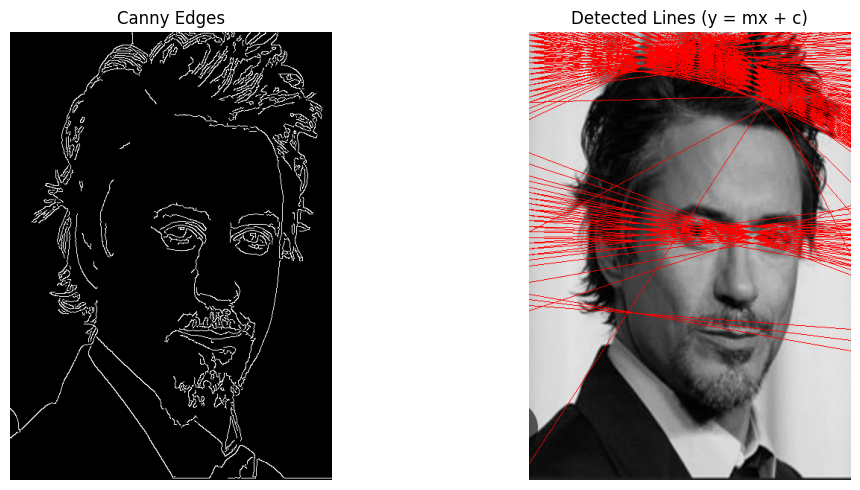

In [40]:
def hough_slope_intercept(img):

    if not isinstance(img, np.ndarray):
        img = np.array(img)

    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img.copy()

    if gray.dtype != np.uint8:
        gray = gray.astype(np.uint8)

    edges = cv2.Canny(gray, 50, 150)

    h, w = edges.shape

    m_vals = np.linspace(-3, 3, 120)
    c_vals = np.linspace(-h, h, 160)

    acc = np.zeros((len(m_vals), len(c_vals)), dtype=np.float32)

    ys, xs = np.where(edges > 0)

    for x, y in zip(xs, ys):
        for mi, m in enumerate(m_vals):
            c = y - m * x
            ci = int((c - c_vals[0]) / (c_vals[-1] - c_vals[0]) * len(c_vals))
            if 0 <= ci < len(c_vals):
                acc[mi, ci] += 1

    if acc.max() > 0:
        acc /= acc.max()

    peaks = np.argwhere(acc > 0.6)

    out = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    for mi, ci in peaks:
        m = m_vals[mi]
        c = c_vals[ci]
        y0 = int(c)
        y1 = int(m * w + c)
        cv2.line(out, (0, y0), (w, y1), (0, 0, 255), 1)

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edges")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(out[..., ::-1])
    plt.title("Detected Lines (y = mx + c)")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

hough_slope_intercept(img)

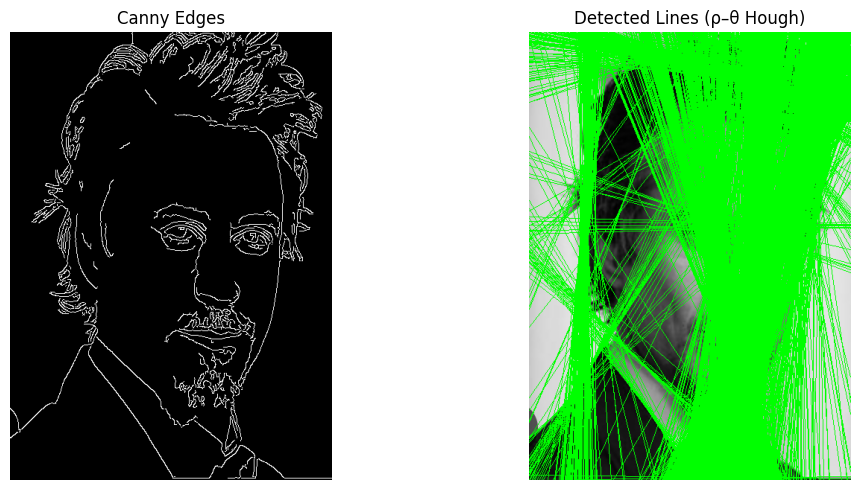

In [41]:
def hough_rho_theta(img):

    if not isinstance(img, np.ndarray):
        img = np.array(img)

    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img.copy()

    if gray.dtype != np.uint8:
        gray = gray.astype(np.uint8)

    edges = cv2.Canny(gray, 50, 150)

    h, w = edges.shape
    diag = int(np.sqrt(h*h + w*w))

    rho_vals = np.arange(-diag, diag + 1)
    theta_vals = np.linspace(0, np.pi, 180)

    acc = np.zeros((len(rho_vals), len(theta_vals)), dtype=np.float32)

    ys, xs = np.where(edges > 0)

    cos_t = np.cos(theta_vals)
    sin_t = np.sin(theta_vals)

    for x, y in zip(xs, ys):
        for ti in range(len(theta_vals)):
            rho = x * cos_t[ti] + y * sin_t[ti]
            ri = int(round(rho)) + diag
            if 0 <= ri < len(rho_vals):
                acc[ri, ti] += 1

    if acc.max() > 0:
        acc /= acc.max()

    peaks = np.argwhere(acc > 0.5)

    out = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    for ri, ti in peaks:
        rho = rho_vals[ri]
        theta = theta_vals[ti]

        a = np.cos(theta)
        b = np.sin(theta)

        x0 = a * rho
        y0 = b * rho

        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv2.line(out, (x1, y1), (x2, y2), (0, 255, 0), 1)

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edges")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(out[..., ::-1])
    plt.title("Detected Lines (ρ–θ Hough)")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

hough_rho_theta(img)



### Bonus - Part D

Here, what you have to do is something like :    
1. Create a python function that will take the first image and a set of coordinates ( x1,y1 ) - top left and ( x2,y2 ) - bottom right to form a box around the white ball. Now, find gradients, select the biggest completed gradient ( maximum area contour ) and then create an RGBA ( 4 channel ) stencil.

2. Now, create another function that takes this stencil and second image and a coordinate ( x3,y3 ). Now, treat ( x3,y3 ) as center point and overlap the RGBA stencil with second image. Keep x3 y3 such that it is towards the right to make it look like that white ball is on the green pool image.


Again, I do not expect you guys to get a really good result. Try your best though.

array([[[ 91,  71,  46],
        [ 91,  71,  46],
        [ 92,  72,  47],
        ...,
        [ 87,  71,  58],
        [ 86,  70,  55],
        [ 86,  70,  55]],

       [[ 90,  70,  47],
        [ 90,  70,  47],
        [ 90,  70,  47],
        ...,
        [ 86,  70,  57],
        [ 86,  70,  55],
        [ 86,  70,  55]],

       [[ 87,  66,  45],
        [ 87,  66,  45],
        [ 87,  66,  45],
        ...,
        [ 86,  70,  57],
        [ 86,  70,  55],
        [ 86,  70,  55]],

       ...,

       [[  8,  83, 215],
        [  8,  83, 215],
        [  8,  83, 215],
        ...,
        [  7,  72, 198],
        [  6,  71, 197],
        [  6,  71, 197]],

       [[  8,  83, 215],
        [  8,  83, 215],
        [  8,  83, 215],
        ...,
        [  7,  72, 198],
        [  6,  71, 197],
        [  6,  71, 197]],

       [[  7,  84, 215],
        [  7,  84, 215],
        [  7,  84, 215],
        ...,
        [  7,  70, 198],
        [  7,  70, 198],
        [  7,  70, 198]]], dtype=uint8)
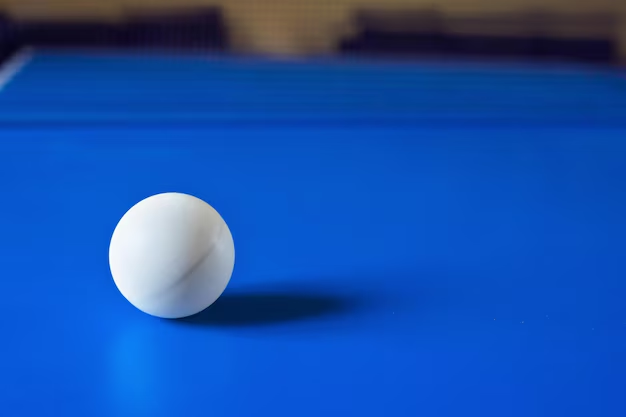

In [42]:
ball

array([[[ 61, 166,  99],
        [ 60, 165,  98],
        [ 60, 165,  98],
        ...,
        [  6,  28,  16],
        [  6,  28,  16],
        [  6,  28,  16]],

       [[ 61, 166,  99],
        [ 60, 165,  98],
        [ 60, 165,  98],
        ...,
        [  6,  28,  16],
        [  6,  28,  16],
        [  6,  28,  16]],

       [[ 61, 166,  99],
        [ 60, 165,  98],
        [ 60, 165,  98],
        ...,
        [  6,  28,  16],
        [  6,  28,  16],
        [  6,  28,  16]],

       ...,

       [[ 65, 146,  79],
        [ 65, 146,  79],
        [ 65, 146,  80],
        ...,
        [ 35, 123,  62],
        [ 35, 123,  62],
        [ 35, 123,  62]],

       [[ 65, 146,  79],
        [ 65, 146,  79],
        [ 65, 146,  80],
        ...,
        [ 35, 123,  62],
        [ 35, 123,  62],
        [ 35, 123,  62]],

       [[ 65, 146,  79],
        [ 65, 146,  79],
        [ 65, 146,  80],
        ...,
        [ 35, 123,  62],
        [ 35, 123,  62],
        [ 35, 123,  62]]], dtype=uint8)
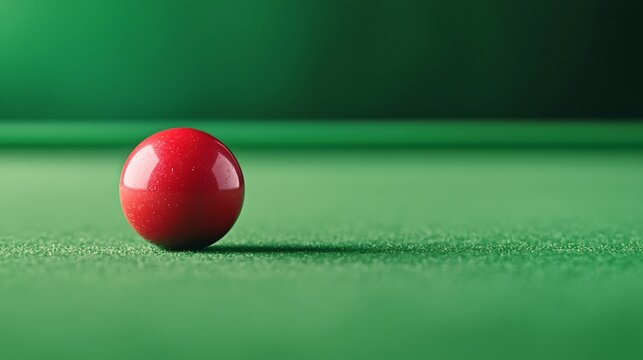

In [43]:
ball2

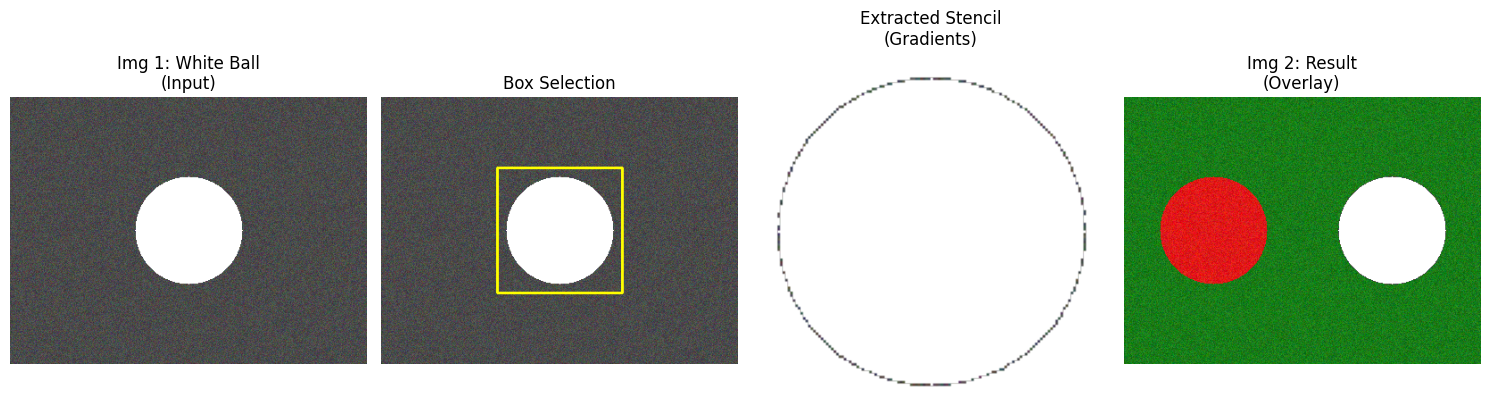

In [44]:
def ball_image(width, height, ball_color, bg_color, radius, pos):

    # Create background
    img = np.zeros((height, width, 3), dtype=np.uint8)
    img[:] = bg_color

    # Draw ball (Circle)
    # cv2.circle expects center as (x, y) and color as (R, G, B)
    cv2.circle(img, pos, radius, ball_color, -1)


    noise = np.random.randint(0, 50, (height, width, 3), dtype=np.uint8)
    img = cv2.add(img, noise)

    return img

# Generate "Image 1": White Ball on grey background
# Simulates the input for the stencil creation
ball1_img = ball_image(400, 300, (255, 255, 255), (50, 50, 50), 60, (200, 150))

# Generate "Image 2": Red Ball on Green Table
# Simulates the destination image
ball2_img = ball_image(400, 300, (200, 0, 0), (0, 100, 0), 60, (100, 150))



def get_ball_stencil(image, x1, y1, x2, y2):

    # 1. Crop
    crop = image[y1:y2, x1:x2]

    # 2. Grayscale & Blur
    gray = cv2.cvtColor(crop, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # 3. Gradient / Edge Detection
    # Using Canny to find gradients
    edges = cv2.Canny(blurred, 30, 150)

    # Close gaps in the edges to ensure a full circle contour
    kernel = np.ones((3,3), np.uint8)
    closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # 4. Find Contours
    contours, _ = cv2.findContours(closed_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        print("No contours found in box.")
        return crop

    # Select the biggest completed gradient (maximum area contour)
    max_contour = max(contours, key=cv2.contourArea)

    # 5. Create Mask & Stencil
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [max_contour], -1, 255, thickness=cv2.FILLED)

    # Convert RGB crop to RGBA
    b_channel, g_channel, r_channel = cv2.split(crop)
    alpha_channel = np.ones_like(b_channel) * 255
    rgba = cv2.merge((b_channel, g_channel, r_channel, alpha_channel))

    # Apply mask to alpha channel
    rgba[:, :, 3] = mask

    return rgba

def overlay_ball_on_table(background_img, stencil, center_x, center_y):

    bg = background_img.copy()
    # Ensure bg is RGBA for easy blending
    if bg.shape[2] == 3:
        bg = cv2.cvtColor(bg, cv2.COLOR_RGB2RGBA)

    h_stencil, w_stencil = stencil.shape[:2]
    h_bg, w_bg = bg.shape[:2]

    # Calculate Top-Left coordinates
    x_offset = center_x - (w_stencil // 2)
    y_offset = center_y - (h_stencil // 2)

    # Handle Clipping (if ball goes off screen)
    y1, y2 = max(0, y_offset), min(h_bg, y_offset + h_stencil)
    x1, x2 = max(0, x_offset), min(w_bg, x_offset + w_stencil)

    y1_s, y2_s = max(0, -y_offset), min(h_stencil, h_bg - y_offset)
    x1_s, x2_s = max(0, -x_offset), min(w_stencil, w_bg - x_offset)

    bg_slice = bg[y1:y2, x1:x2]
    stencil_slice = stencil[y1_s:y2_s, x1_s:x2_s]

    if bg_slice.size == 0 or stencil_slice.size == 0:
        return bg

    # Alpha Blending
    alpha_s = stencil_slice[:, :, 3] / 255.0

    for c in range(0, 3):
        bg_slice[:, :, c] = (alpha_s * stencil_slice[:, :, c] +
                             (1 - alpha_s) * bg_slice[:, :, c])

    bg_slice[:, :, 3] = 255 # Keep background fully opaque

    bg[y1:y2, x1:x2] = bg_slice
    return bg



# STEP 1: Define Box around White Ball (x1, y1, x2, y2)
# We know the ball is at (200, 150) with radius 60, so we make a box around it
box_coords = (130, 80, 270, 220)

# STEP 2: Create Stencil (Extract White Ball)
stencil = get_ball_stencil(ball1_img, *box_coords)

# STEP 3: Define Target Center (x3, y3)
target_coords = (300, 150)

# STEP 4: Overlay
result_img = overlay_ball_on_table(ball2_img, stencil, *target_coords)


plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(ball1_img)
plt.title("Img 1: White Ball\n(Input)")
plt.axis("off")

debug_img = ball1_img.copy()
cv2.rectangle(debug_img, (box_coords[0], box_coords[1]), (box_coords[2], box_coords[3]), (255, 255, 0), 2)
plt.subplot(1, 4, 2)
plt.imshow(debug_img)
plt.title("Box Selection")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(stencil)
plt.title("Extracted Stencil\n(Gradients)")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(result_img)
plt.title("Img 2: Result\n(Overlay)")
plt.axis("off")

plt.tight_layout()
plt.show()